In [0]:
# https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing

Modules to import

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPool2D, Dropout, BatchNormalization

## 1. Image Processing with Neural Networks

Convolutional neural networks use the data that is represented in images to learn. In this chapter, we will probe data in images, and we will learn how to use Keras to train a neural network to classify objects that appear in images.

#### Introducing convolutional neural networks

**Images as data: visualizations**

To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt

In [0]:
# Load the image
data = plt.imread('/content/bricks.png')
data.shape

(559, 541, 4)

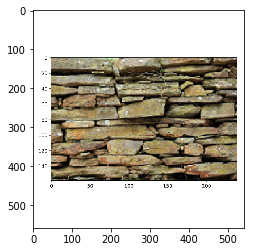

In [0]:
# Display the image
plt.imshow(data)
plt.show()

**Images as data: changing images**

To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

The image you imported in the previous exercise is available in data.



*   The red channel is accessible as the first item on the last dimension: data[ :, :, 0 ]
*   The top left corner is accessble as first 10 items on the first two (spatial) dimensions: data[:10, :10, :]

> So the red channel in the top corner of the image is: data[ :10, :10, 0 ]



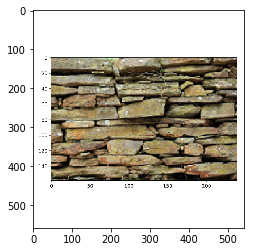

In [0]:
'''
To change the part of an image into red,
you need to set the green and blue channels
to zero and the red channel to 1.
'''
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1


In [0]:
# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

In [0]:
# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

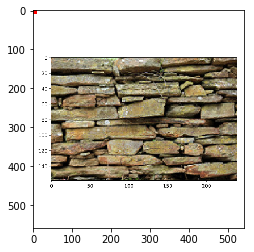

In [0]:
# Display the image
plt.imshow(data)
plt.show()

**Observations**

You now know how to manipulate images. By the way, if you set both the green and red channels to 1, that part of the image would be yellow.


#### Classifying images

**Using one-hot encoding to represent images**

Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:


1. shirts
2. dresses
3. Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.

In [0]:
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']
labels

['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

In [0]:
# The number of image categories
n_categories = 3

In [0]:
# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])
categories

array(['shirt', 'dress', 'shoe'], dtype='<U5')

In [0]:
# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))
ohe_labels

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])



*   Use np.where() to find the location of the category of the item in each iteration in categories.
*   Assign a 1 into the correct row/column combination in every iteration.



In [0]:
# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or show) is made from each of the test images, and these predictions are compared with the true labels of these images.

The results of cross-validation are provided as one-hot encoded arrays: test_labels and predictions.

In [0]:
# pre-loaded
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

Multiply the arrays with each other and sum the result to find the total number of correct predictions.

In [0]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

6.0


In [0]:
# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

0.75


#### Classification with Keras

In [0]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


**Build a neural network**

We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the **Sequential** type, meaning that **the outputs of one layer are provided as inputs only to the next layer**.

In this exercise, you will create a neural network with **Dense layers**, meaning that **each unit in each layer is connected to all of the units in the previous layer**. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units.

In [0]:
# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

W0730 04:26:23.291537 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 04:26:23.351178 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 04:26:23.360565 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



**Compile a neural network**

Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

In [0]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

W0730 04:27:17.969419 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 04:27:18.012438 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



**Fitting a neural network model to clothing data**

The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.
 
 The original shape of train_data: (50, 28, 28, 1), but the network expects data as a two-dimensional array with one row per sample, and one column per pixel.

In [0]:
# caution: load train_data below takes extremely long time
# load reshaped train_data directly below

In [0]:
#@title
train_data = np.array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11372549],
         [0.10588235],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.16470589],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.23529412],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.24313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.49411765],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7176471 ],
         [0.84705883],
         [0.23137255],
         [0.07450981],
         [0.1882353 ],
         [0.76862746],
         [0.84313726],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.8784314 ],
         [0.85490197],
         [0.9098039 ],
         [0.9843137 ],
         [0.9019608 ],
         [0.84705883],
         [0.91764706],
         [0.35686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.75686276],
         [0.8627451 ],
         [0.83137256],
         [0.81960785],
         [0.827451  ],
         [0.827451  ],
         [0.8745098 ],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7529412 ],
         [0.89411765],
         [0.8392157 ],
         [0.84705883],
         [0.8392157 ],
         [0.84313726],
         [0.8509804 ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.9098039 ],
         [0.8039216 ],
         [0.84313726],
         [0.83137256],
         [0.8392157 ],
         [0.9843137 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.8980392 ],
         [0.80784315],
         [0.8392157 ],
         [0.83137256],
         [0.8352941 ],
         [0.9843137 ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6509804 ],
         [0.9019608 ],
         [0.8039216 ],
         [0.8352941 ],
         [0.8352941 ],
         [0.83137256],
         [0.9843137 ],
         [0.06666667],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.8862745 ],
         [0.8235294 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.827451  ],
         [0.88235295],
         [0.1254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9529412 ],
         [0.85882354],
         [0.83137256],
         [0.8392157 ],
         [0.84705883],
         [0.8235294 ],
         [0.9019608 ],
         [0.23137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.9882353 ],
         [0.84313726],
         [0.8392157 ],
         [0.8392157 ],
         [0.84705883],
         [0.79607844],
         [0.9019608 ],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.17254902],
         [0.9882353 ],
         [0.81960785],
         [0.84313726],
         [0.84313726],
         [0.84705883],
         [0.8039216 ],
         [0.8980392 ],
         [0.64705884],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.30980393],
         [0.9882353 ],
         [0.83137256],
         [0.8509804 ],
         [0.84313726],
         [0.8509804 ],
         [0.81960785],
         [0.8745098 ],
         [0.84313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.9843137 ],
         [0.83137256],
         [0.85490197],
         [0.84705883],
         [0.8509804 ],
         [0.8352941 ],
         [0.8509804 ],
         [0.96862745],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.48235294],
         [0.9843137 ],
         [0.827451  ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.84705883],
         [0.85490197],
         [0.9843137 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5529412 ],
         [0.9843137 ],
         [0.8352941 ],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.8509804 ],
         [0.85490197],
         [0.9843137 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5529412 ],
         [0.9764706 ],
         [0.8392157 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.85882354],
         [0.85490197],
         [0.9882353 ],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5686275 ],
         [0.9764706 ],
         [0.84705883],
         [0.87058824],
         [0.8666667 ],
         [0.87058824],
         [0.8627451 ],
         [0.8509804 ],
         [0.9882353 ],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5764706 ],
         [0.9764706 ],
         [0.84705883],
         [0.87058824],
         [0.87058824],
         [0.87058824],
         [0.8627451 ],
         [0.8509804 ],
         [0.9882353 ],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.972549  ],
         [0.85882354],
         [0.8745098 ],
         [0.8745098 ],
         [0.88235295],
         [0.8627451 ],
         [0.8627451 ],
         [0.9882353 ],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.61960787],
         [0.9764706 ],
         [0.8666667 ],
         [0.88235295],
         [0.8784314 ],
         [0.8980392 ],
         [0.8666667 ],
         [0.8784314 ],
         [0.99215686],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.9843137 ],
         [0.87058824],
         [0.8901961 ],
         [0.8862745 ],
         [0.9019608 ],
         [0.8745098 ],
         [0.88235295],
         [0.99215686],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5686275 ],
         [0.9882353 ],
         [0.8784314 ],
         [0.8901961 ],
         [0.8862745 ],
         [0.9098039 ],
         [0.8784314 ],
         [0.8901961 ],
         [0.99215686],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.9254902 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.87058824],
         [0.8862745 ],
         [0.8745098 ],
         [0.8980392 ],
         [0.9137255 ],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [1.        ],
         [0.99215686],
         [1.        ],
         [0.99607843],
         [1.        ],
         [0.99607843],
         [0.90588236],
         [1.        ],
         [0.10588235],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16078432],
         [0.36078432],
         [0.        ],
         [0.29411766],
         [0.13333334],
         [0.23137255],
         [0.21960784],
         [0.        ],
         [0.40392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [0.8509804 ],
         [0.8352941 ],
         [0.6901961 ],
         [0.5686275 ],
         [0.52156866],
         [0.4862745 ],
         [0.48235294],
         [0.5372549 ],
         [0.69411767],
         [0.65882355],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.20392157],
         [1.        ],
         [0.8666667 ],
         [0.8745098 ],
         [0.91764706],
         [0.9490196 ],
         [0.9490196 ],
         [0.92941177],
         [0.8862745 ],
         [0.7294118 ],
         [0.70980394],
         [0.85490197],
         [0.9137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.84313726],
         [0.91764706],
         [0.84313726],
         [0.84705883],
         [0.8352941 ],
         [0.79607844],
         [0.80784315],
         [0.7764706 ],
         [0.8235294 ],
         [0.72156864],
         [0.67058825],
         [0.8039216 ],
         [0.92156863],
         [0.34901962],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.2784314 ],
         [0.8980392 ],
         [0.85882354],
         [0.85882354],
         [0.827451  ],
         [0.83137256],
         [0.8235294 ],
         [0.81960785],
         [0.827451  ],
         [0.827451  ],
         [0.7490196 ],
         [0.63529414],
         [0.8352941 ],
         [0.8980392 ],
         [0.7176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8117647 ],
         [0.8039216 ],
         [0.79607844],
         [0.8       ],
         [0.8352941 ],
         [0.8352941 ],
         [0.7490196 ],
         [0.62352943],
         [0.91764706],
         [0.87058824],
         [0.9764706 ],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3882353 ],
         [0.88235295],
         [0.8235294 ],
         [0.8745098 ],
         [0.9137255 ],
         [0.83137256],
         [0.83137256],
         [0.8039216 ],
         [0.8235294 ],
         [0.8392157 ],
         [0.8745098 ],
         [0.7607843 ],
         [0.68235296],
         [0.96862745],
         [0.85882354],
         [0.89411765],
         [0.5176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8980392 ],
         [0.83137256],
         [0.83137256],
         [0.8745098 ],
         [0.8745098 ],
         [0.85490197],
         [0.8392157 ],
         [0.8392157 ],
         [0.84705883],
         [0.83137256],
         [0.8352941 ],
         [0.87058824],
         [0.5803922 ],
         [0.67058825],
         [0.9019608 ],
         [0.8509804 ],
         [0.77254903],
         [0.21568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23137255],
         [0.9019608 ],
         [0.8745098 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.61960787],
         [0.92156863],
         [0.81960785],
         [0.8352941 ],
         [0.8352941 ],
         [0.8392157 ],
         [0.8117647 ],
         [0.92156863],
         [0.37254903],
         [0.5176471 ],
         [0.9098039 ],
         [0.8666667 ],
         [0.9019608 ],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.78431374],
         [0.6901961 ],
         [0.84705883],
         [0.99215686],
         [0.40392157],
         [0.9607843 ],
         [0.81960785],
         [0.8392157 ],
         [0.8352941 ],
         [0.84313726],
         [0.7921569 ],
         [0.9529412 ],
         [0.35686275],
         [0.54901963],
         [0.9843137 ],
         [0.9372549 ],
         [0.6862745 ],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11372549],
         [0.05882353],
         [0.98039216],
         [0.81960785],
         [0.83137256],
         [0.84705883],
         [0.84705883],
         [0.7882353 ],
         [0.9647059 ],
         [0.37254903],
         [0.20392157],
         [0.46666667],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.98039216],
         [0.7764706 ],
         [0.8235294 ],
         [0.8235294 ],
         [0.8392157 ],
         [0.8039216 ],
         [0.9372549 ],
         [0.5647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.7176471 ],
         [0.9490196 ],
         [0.78039217],
         [0.8235294 ],
         [0.8235294 ],
         [0.8352941 ],
         [0.80784315],
         [0.85490197],
         [0.8862745 ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.96862745],
         [0.8392157 ],
         [0.8156863 ],
         [0.81960785],
         [0.84313726],
         [0.8352941 ],
         [0.8235294 ],
         [0.80784315],
         [0.9764706 ],
         [0.2627451 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.24705882],
         [0.88235295],
         [0.81960785],
         [0.8392157 ],
         [0.8392157 ],
         [0.84313726],
         [0.8352941 ],
         [0.83137256],
         [0.7921569 ],
         [0.8745098 ],
         [0.5019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.5019608 ],
         [0.8862745 ],
         [0.8156863 ],
         [0.84313726],
         [0.84313726],
         [0.83137256],
         [0.8392157 ],
         [0.84313726],
         [0.7764706 ],
         [0.8666667 ],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.65882355],
         [0.8784314 ],
         [0.80784315],
         [0.8352941 ],
         [0.8352941 ],
         [0.83137256],
         [0.8352941 ],
         [0.84705883],
         [0.79607844],
         [0.8352941 ],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7490196 ],
         [0.8666667 ],
         [0.8156863 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8352941 ],
         [0.84313726],
         [0.8235294 ],
         [0.8352941 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.8627451 ],
         [0.81960785],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.83137256],
         [0.8352941 ],
         [0.8901961 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8784314 ],
         [0.85490197],
         [0.83137256],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.8392157 ],
         [0.83137256],
         [0.9098039 ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.9098039 ],
         [0.85882354],
         [0.83137256],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.84313726],
         [0.8352941 ],
         [0.9137255 ],
         [0.01568628],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.91764706],
         [0.85490197],
         [0.8352941 ],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.84313726],
         [0.84705883],
         [0.8392157 ],
         [0.93333334],
         [0.01960784],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.92941177],
         [0.85490197],
         [0.8392157 ],
         [0.84705883],
         [0.84705883],
         [0.84705883],
         [0.84705883],
         [0.84705883],
         [0.84705883],
         [0.8392157 ],
         [0.93333334],
         [0.01568628],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.9647059 ],
         [0.85490197],
         [0.84313726],
         [0.8509804 ],
         [0.84705883],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.84705883],
         [0.84705883],
         [0.93333334],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.96862745],
         [0.85490197],
         [0.84313726],
         [0.84705883],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.9372549 ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.9607843 ],
         [0.85490197],
         [0.8392157 ],
         [0.84705883],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.94509804],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.90588236],
         [0.85882354],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.84705883],
         [0.85490197],
         [0.92941177],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.98039216],
         [0.8784314 ],
         [0.85882354],
         [0.8627451 ],
         [0.8666667 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.9764706 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.7882353 ],
         [0.81960785],
         [0.8352941 ],
         [0.85882354],
         [0.8392157 ],
         [0.8352941 ],
         [0.8392157 ],
         [0.827451  ],
         [0.81960785],
         [0.7607843 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41568628],
         [0.7607843 ],
         [0.6784314 ],
         [0.5019608 ],
         [0.45882353],
         [0.43529412],
         [0.47058824],
         [0.5254902 ],
         [0.60784316],
         [0.6784314 ],
         [0.45882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.9019608 ],
         [0.99215686],
         [0.93333334],
         [0.99215686],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.9372549 ],
         [0.99607843],
         [0.8666667 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.25490198],
         [0.99607843],
         [0.8901961 ],
         [0.9098039 ],
         [0.9019608 ],
         [0.8784314 ],
         [0.8901961 ],
         [0.89411765],
         [0.8862745 ],
         [0.8784314 ],
         [0.8862745 ],
         [0.9254902 ],
         [0.91764706],
         [0.9490196 ],
         [0.05490196],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.4745098 ],
         [0.9882353 ],
         [0.9098039 ],
         [0.9098039 ],
         [0.9137255 ],
         [0.92156863],
         [0.92941177],
         [0.92156863],
         [0.92156863],
         [0.9254902 ],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.9764706 ],
         [0.27058825],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.99215686],
         [0.9098039 ],
         [0.8980392 ],
         [0.9098039 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9137255 ],
         [0.9137255 ],
         [0.9882353 ],
         [0.52156866],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8784314 ],
         [0.9647059 ],
         [0.90588236],
         [0.89411765],
         [0.9019608 ],
         [0.93333334],
         [0.9254902 ],
         [0.92941177],
         [0.92941177],
         [0.93333334],
         [0.9254902 ],
         [0.9019608 ],
         [0.91764706],
         [0.96862745],
         [0.8509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [0.9411765 ],
         [0.90588236],
         [0.8862745 ],
         [0.90588236],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.9372549 ],
         [0.9137255 ],
         [0.9137255 ],
         [0.9254902 ],
         [0.9411765 ],
         [0.8745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.9411765 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.8627451 ],
         [0.90588236],
         [0.92941177],
         [0.92941177],
         [0.92941177],
         [0.92941177],
         [0.93333334],
         [0.91764706],
         [0.90588236],
         [0.9372549 ],
         [0.91764706],
         [0.9607843 ],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [0.98039216],
         [0.92156863],
         [0.92941177],
         [0.8666667 ],
         [0.9019608 ],
         [0.92941177],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.92941177],
         [0.9137255 ],
         [0.8980392 ],
         [0.9372549 ],
         [0.9137255 ],
         [0.99215686],
         [0.47058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.9607843 ],
         [0.8980392 ],
         [0.9411765 ],
         [0.8745098 ],
         [0.89411765],
         [0.92941177],
         [0.91764706],
         [0.92156863],
         [0.92156863],
         [0.9254902 ],
         [0.91764706],
         [0.8862745 ],
         [0.95686275],
         [0.9254902 ],
         [0.9529412 ],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7137255 ],
         [1.        ],
         [0.9843137 ],
         [0.83137256],
         [0.9019608 ],
         [0.8862745 ],
         [0.92941177],
         [0.9137255 ],
         [0.92156863],
         [0.92156863],
         [0.9254902 ],
         [0.9098039 ],
         [0.9529412 ],
         [0.8156863 ],
         [0.95686275],
         [0.99607843],
         [0.91764706],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.74509805],
         [0.2509804 ],
         [0.3372549 ],
         [0.41568628],
         [1.        ],
         [0.85882354],
         [0.9254902 ],
         [0.9098039 ],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.8862745 ],
         [1.        ],
         [0.5254902 ],
         [0.14117648],
         [0.30980393],
         [0.58431375],
         [0.67058825],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.40784314],
         [1.        ],
         [0.8392157 ],
         [0.9254902 ],
         [0.90588236],
         [0.92156863],
         [0.91764706],
         [0.92156863],
         [0.8862745 ],
         [0.9490196 ],
         [0.6862745 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.4862745 ],
         [0.9372549 ],
         [0.87058824],
         [0.92156863],
         [0.90588236],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.9019608 ],
         [0.9411765 ],
         [0.76862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5647059 ],
         [0.9411765 ],
         [0.87058824],
         [0.92156863],
         [0.9098039 ],
         [0.92156863],
         [0.91764706],
         [0.92156863],
         [0.9019608 ],
         [0.9372549 ],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.6509804 ],
         [0.9411765 ],
         [0.8745098 ],
         [0.9254902 ],
         [0.9019608 ],
         [0.92156863],
         [0.9254902 ],
         [0.92156863],
         [0.90588236],
         [0.9254902 ],
         [0.8980392 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7058824 ],
         [0.93333334],
         [0.8784314 ],
         [0.92941177],
         [0.8980392 ],
         [0.91764706],
         [0.9254902 ],
         [0.91764706],
         [0.9098039 ],
         [0.92156863],
         [0.9372549 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7764706 ],
         [0.9254902 ],
         [0.8784314 ],
         [0.92941177],
         [0.8980392 ],
         [0.92156863],
         [0.9254902 ],
         [0.91764706],
         [0.9098039 ],
         [0.92156863],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.92156863],
         [0.88235295],
         [0.9254902 ],
         [0.8980392 ],
         [0.91764706],
         [0.92156863],
         [0.91764706],
         [0.9098039 ],
         [0.92156863],
         [0.84705883],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.92156863],
         [0.91764706],
         [0.88235295],
         [0.92156863],
         [0.8980392 ],
         [0.9137255 ],
         [0.92156863],
         [0.92156863],
         [0.9137255 ],
         [0.92156863],
         [0.85882354],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.9098039 ],
         [0.8862745 ],
         [0.91764706],
         [0.89411765],
         [0.9137255 ],
         [0.92156863],
         [0.92156863],
         [0.9137255 ],
         [0.9137255 ],
         [0.8862745 ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.9098039 ],
         [0.8862745 ],
         [0.92156863],
         [0.8980392 ],
         [0.9137255 ],
         [0.92156863],
         [0.92156863],
         [0.91764706],
         [0.9137255 ],
         [0.90588236],
         [0.05098039],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.81960785],
         [0.91764706],
         [0.88235295],
         [0.9372549 ],
         [0.90588236],
         [0.9137255 ],
         [0.92941177],
         [0.93333334],
         [0.9254902 ],
         [0.9098039 ],
         [0.92941177],
         [0.11372549],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8235294 ],
         [0.92156863],
         [0.88235295],
         [0.93333334],
         [0.9019608 ],
         [0.9019608 ],
         [0.9254902 ],
         [0.92941177],
         [0.92941177],
         [0.90588236],
         [0.94509804],
         [0.17254902],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8235294 ],
         [0.9254902 ],
         [0.88235295],
         [0.92941177],
         [0.9098039 ],
         [0.8980392 ],
         [0.91764706],
         [0.9411765 ],
         [0.9254902 ],
         [0.8980392 ],
         [0.9607843 ],
         [0.22352941],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8352941 ],
         [0.9098039 ],
         [0.87058824],
         [0.91764706],
         [0.8980392 ],
         [0.8745098 ],
         [0.9019608 ],
         [0.90588236],
         [0.9019608 ],
         [0.8901961 ],
         [0.95686275],
         [0.22352941],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.9254902 ],
         [0.9764706 ],
         [0.9254902 ],
         [0.972549  ],
         [0.99215686],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.972549  ],
         [0.93333334],
         [0.99607843],
         [0.28235295],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.61960787],
         [0.4117647 ],
         [0.5137255 ],
         [0.81960785],
         [0.75686276],
         [0.5372549 ],
         [0.23921569],
         [0.18039216],
         [0.49803922],
         [0.69411767],
         [0.6431373 ],
         [0.05098039],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.03529412],
         [0.05098039],
         [0.04313726],
         [0.01960784],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.7411765 ],
         [0.62352943],
         [0.27058825],
         [0.19215687],
         [0.17254902],
         [0.19215687],
         [0.23921569],
         [0.8156863 ],
         [0.6       ],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.01176471],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.04313726],
         [0.02745098],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.24705882],
         [0.84705883],
         [0.9137255 ],
         [0.8156863 ],
         [0.8117647 ],
         [0.9843137 ],
         [0.89411765],
         [0.6156863 ],
         [0.84705883],
         [0.9019608 ],
         [0.84705883],
         [0.72156864],
         [0.9764706 ],
         [0.6       ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.01176471],
         [0.06666667],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02745098],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.6313726 ],
         [0.9019608 ],
         [0.77254903],
         [0.72156864],
         [0.7254902 ],
         [0.69803923],
         [0.77254903],
         [0.5764706 ],
         [0.        ],
         [0.47843137],
         [0.92156863],
         [0.7411765 ],
         [0.6156863 ],
         [0.65882355],
         [0.8117647 ],
         [0.8627451 ],
         [0.        ],
         [0.00392157],
         [0.05098039],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.        ],
         [0.3529412 ],
         [0.9764706 ],
         [0.73333335],
         [0.7137255 ],
         [0.73333335],
         [0.73333335],
         [0.72156864],
         [0.8117647 ],
         [0.89411765],
         [0.6431373 ],
         [0.9607843 ],
         [0.8235294 ],
         [0.6156863 ],
         [0.6745098 ],
         [0.7058824 ],
         [0.65882355],
         [0.7411765 ],
         [0.5529412 ],
         [0.        ],
         [0.05098039],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.04313726],
         [0.        ],
         [0.10196079],
         [0.7411765 ],
         [0.89411765],
         [0.75686276],
         [0.72156864],
         [0.73333335],
         [0.68235296],
         [0.7137255 ],
         [0.7254902 ],
         [0.7647059 ],
         [0.8784314 ],
         [0.75686276],
         [0.6       ],
         [0.60784316],
         [0.65882355],
         [0.6666667 ],
         [0.7058824 ],
         [0.6666667 ],
         [0.7254902 ],
         [0.18431373],
         [0.        ],
         [0.09019608],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.        ],
         [0.5764706 ],
         [0.77254903],
         [0.89411765],
         [0.7647059 ],
         [0.6313726 ],
         [0.73333335],
         [0.7058824 ],
         [0.7137255 ],
         [0.7137255 ],
         [0.69803923],
         [0.6509804 ],
         [0.62352943],
         [0.6431373 ],
         [0.6431373 ],
         [0.63529414],
         [0.69803923],
         [0.6745098 ],
         [0.6666667 ],
         [0.7137255 ],
         [0.69803923],
         [0.        ],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.92941177],
         [0.7137255 ],
         [0.9019608 ],
         [0.8392157 ],
         [0.6156863 ],
         [0.7254902 ],
         [0.69803923],
         [0.69803923],
         [0.7058824 ],
         [0.72156864],
         [0.69803923],
         [0.6666667 ],
         [0.63529414],
         [0.63529414],
         [0.6431373 ],
         [0.6666667 ],
         [0.68235296],
         [0.6901961 ],
         [0.65882355],
         [0.83137256],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.78039217],
         [0.69803923],
         [0.8784314 ],
         [0.9843137 ],
         [0.56078434],
         [0.7254902 ],
         [0.68235296],
         [0.6745098 ],
         [0.68235296],
         [0.6901961 ],
         [0.6745098 ],
         [0.63529414],
         [0.62352943],
         [0.6313726 ],
         [0.6431373 ],
         [0.6431373 ],
         [0.65882355],
         [0.7058824 ],
         [0.6431373 ],
         [0.7137255 ],
         [0.69803923],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.06666667],
         [0.8784314 ],
         [0.7137255 ],
         [0.72156864],
         [0.85490197],
         [1.        ],
         [0.5529412 ],
         [0.7058824 ],
         [0.6666667 ],
         [0.65882355],
         [0.65882355],
         [0.6745098 ],
         [0.65882355],
         [0.62352943],
         [0.6156863 ],
         [0.62352943],
         [0.6431373 ],
         [0.62352943],
         [0.65882355],
         [0.7137255 ],
         [0.68235296],
         [0.65882355],
         [0.69803923],
         [0.34509805],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.5529412 ],
         [0.7882353 ],
         [0.7411765 ],
         [0.7254902 ],
         [0.84705883],
         [0.9529412 ],
         [0.5764706 ],
         [0.7058824 ],
         [0.65882355],
         [0.6509804 ],
         [0.6431373 ],
         [0.65882355],
         [0.6509804 ],
         [0.62352943],
         [0.6156863 ],
         [0.6156863 ],
         [0.6431373 ],
         [0.63529414],
         [0.63529414],
         [0.73333335],
         [0.6431373 ],
         [0.68235296],
         [0.7137255 ],
         [0.6901961 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.18431373],
         [0.63529414],
         [0.78039217],
         [0.72156864],
         [0.8117647 ],
         [0.90588236],
         [0.5921569 ],
         [0.7137255 ],
         [0.68235296],
         [0.65882355],
         [0.63529414],
         [0.6431373 ],
         [0.6313726 ],
         [0.62352943],
         [0.62352943],
         [0.5921569 ],
         [0.58431375],
         [0.6156863 ],
         [0.6313726 ],
         [0.6       ],
         [0.6666667 ],
         [0.73333335],
         [0.5019608 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.49411765],
         [0.73333335],
         [0.87058824],
         [0.92156863],
         [0.5411765 ],
         [0.6745098 ],
         [0.6509804 ],
         [0.6431373 ],
         [0.63529414],
         [0.6431373 ],
         [0.6313726 ],
         [0.6156863 ],
         [0.62352943],
         [0.6       ],
         [0.56078434],
         [0.5764706 ],
         [0.65882355],
         [0.7254902 ],
         [0.7411765 ],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.73333335],
         [0.8235294 ],
         [0.56078434],
         [0.6745098 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.63529414],
         [0.6156863 ],
         [0.60784316],
         [0.6156863 ],
         [0.6       ],
         [0.6509804 ],
         [0.5686275 ],
         [0.6666667 ],
         [0.5176471 ],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.05882353],
         [0.01176471],
         [0.        ],
         [0.09019608],
         [0.79607844],
         [0.6431373 ],
         [0.6666667 ],
         [0.6509804 ],
         [0.63529414],
         [0.62352943],
         [0.62352943],
         [0.60784316],
         [0.60784316],
         [0.62352943],
         [0.6       ],
         [0.6       ],
         [0.50980395],
         [0.77254903],
         [0.21568628],
         [0.        ],
         [0.05882353],
         [0.02745098],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02745098],
         [0.01960784],
         [0.05882353],
         [0.        ],
         [0.13333334],
         [0.84705883],
         [0.62352943],
         [0.65882355],
         [0.63529414],
         [0.62352943],
         [0.60784316],
         [0.60784316],
         [0.6       ],
         [0.6       ],
         [0.60784316],
         [0.5921569 ],
         [0.5921569 ],
         [0.53333336],
         [0.7254902 ],
         [0.2901961 ],
         [0.        ],
         [0.03529412],
         [0.03529412],
         [0.05882353],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.04313726],
         [0.03529412],
         [0.05098039],
         [0.        ],
         [0.17254902],
         [0.7882353 ],
         [0.6431373 ],
         [0.6509804 ],
         [0.6431373 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.6       ],
         [0.5921569 ],
         [0.5921569 ],
         [0.58431375],
         [0.58431375],
         [0.5921569 ],
         [0.5176471 ],
         [0.75686276],
         [0.27450982],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.02745098],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.03529412],
         [0.06666667],
         [0.        ],
         [0.18431373],
         [0.69803923],
         [0.63529414],
         [0.6431373 ],
         [0.63529414],
         [0.62352943],
         [0.6156863 ],
         [0.6       ],
         [0.6       ],
         [0.6       ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5764706 ],
         [0.5176471 ],
         [0.73333335],
         [0.28235295],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.03529412],
         [0.06666667],
         [0.        ],
         [0.20784314],
         [0.7058824 ],
         [0.6313726 ],
         [0.63529414],
         [0.62352943],
         [0.60784316],
         [0.6       ],
         [0.6       ],
         [0.6       ],
         [0.6       ],
         [0.5921569 ],
         [0.58431375],
         [0.5764706 ],
         [0.53333336],
         [0.6313726 ],
         [0.29803923],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.03529412],
         [0.06666667],
         [0.        ],
         [0.23137255],
         [0.7058824 ],
         [0.62352943],
         [0.63529414],
         [0.62352943],
         [0.60784316],
         [0.5921569 ],
         [0.6       ],
         [0.60784316],
         [0.6       ],
         [0.5921569 ],
         [0.58431375],
         [0.58431375],
         [0.5686275 ],
         [0.63529414],
         [0.30588236],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.08235294],
         [0.        ],
         [0.23921569],
         [0.7137255 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.60784316],
         [0.6       ],
         [0.5921569 ],
         [0.5921569 ],
         [0.6       ],
         [0.58431375],
         [0.5764706 ],
         [0.6       ],
         [0.5529412 ],
         [0.6431373 ],
         [0.34509805],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.08235294],
         [0.        ],
         [0.23137255],
         [0.7058824 ],
         [0.5764706 ],
         [0.6       ],
         [0.60784316],
         [0.60784316],
         [0.6156863 ],
         [0.5921569 ],
         [0.60784316],
         [0.62352943],
         [0.5921569 ],
         [0.58431375],
         [0.60784316],
         [0.5411765 ],
         [0.6431373 ],
         [0.36078432],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.05882353],
         [0.        ],
         [0.23137255],
         [0.7058824 ],
         [0.58431375],
         [0.6       ],
         [0.60784316],
         [0.60784316],
         [0.60784316],
         [0.60784316],
         [0.6313726 ],
         [0.6313726 ],
         [0.60784316],
         [0.5921569 ],
         [0.60784316],
         [0.56078434],
         [0.6431373 ],
         [0.34509805],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.05098039],
         [0.        ],
         [0.23137255],
         [0.7058824 ],
         [0.58431375],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.6156863 ],
         [0.60784316],
         [0.62352943],
         [0.62352943],
         [0.5921569 ],
         [0.5764706 ],
         [0.6       ],
         [0.5764706 ],
         [0.6431373 ],
         [0.32941177],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.05882353],
         [0.        ],
         [0.24705882],
         [0.72156864],
         [0.6156863 ],
         [0.60784316],
         [0.60784316],
         [0.60784316],
         [0.60784316],
         [0.62352943],
         [0.63529414],
         [0.6313726 ],
         [0.60784316],
         [0.5921569 ],
         [0.6       ],
         [0.60784316],
         [0.6431373 ],
         [0.30588236],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.05882353],
         [0.        ],
         [0.21568628],
         [0.73333335],
         [0.6313726 ],
         [0.5764706 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.6       ],
         [0.60784316],
         [0.6666667 ],
         [0.6745098 ],
         [0.62352943],
         [0.6313726 ],
         [0.6156863 ],
         [0.5686275 ],
         [0.65882355],
         [0.32941177],
         [0.        ],
         [0.06666667],
         [0.03529412],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04313726],
         [0.04313726],
         [0.        ],
         [0.25490198],
         [0.8039216 ],
         [0.7882353 ],
         [0.68235296],
         [0.6666667 ],
         [0.6156863 ],
         [0.56078434],
         [0.5764706 ],
         [0.6431373 ],
         [0.65882355],
         [0.5764706 ],
         [0.5764706 ],
         [0.6       ],
         [0.6156863 ],
         [0.68235296],
         [0.2627451 ],
         [0.        ],
         [0.05882353],
         [0.04313726],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02745098],
         [0.05882353],
         [0.05098039],
         [0.        ],
         [0.14901961],
         [0.54509807],
         [0.5921569 ],
         [0.77254903],
         [0.8156863 ],
         [0.7882353 ],
         [0.68235296],
         [0.7137255 ],
         [0.8235294 ],
         [0.8156863 ],
         [0.7490196 ],
         [0.7137255 ],
         [0.69803923],
         [0.5176471 ],
         [0.37254903],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.04313726],
         [0.04313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02745098],
         [0.05098039],
         [0.05882353],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.15686275],
         [0.21568628],
         [0.2       ],
         [0.21568628],
         [0.18039216],
         [0.10980392],
         [0.06666667],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.04313726],
         [0.04313726],
         [0.04313726],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.24313726],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00784314],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.20784314],
         [0.2901961 ],
         [0.46666667],
         [0.42745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.06666667],
         [0.45882353],
         [0.39215687],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.15294118],
         [0.29411766],
         [0.3254902 ],
         [0.39607844],
         [0.41960785],
         [0.44313726],
         [0.49411765],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14901961],
         [0.4392157 ],
         [0.41960785],
         [0.46666667],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16862746],
         [0.34117648],
         [0.41568628],
         [0.44313726],
         [0.3764706 ],
         [0.39215687],
         [0.38431373],
         [0.44313726],
         [0.58431375],
         [0.33333334],
         [0.14117648],
         [0.34117648],
         [0.4745098 ],
         [0.4627451 ],
         [0.4745098 ],
         [0.44705883],
         [0.00784314]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.11764706],
         [0.24705882],
         [0.30980393],
         [0.3882353 ],
         [0.34117648],
         [0.39607844],
         [0.37254903],
         [0.33333334],
         [0.43137255],
         [0.40392157],
         [0.49411765],
         [0.5294118 ],
         [0.5921569 ],
         [0.46666667],
         [0.36862746],
         [0.4117647 ],
         [0.49411765],
         [0.4       ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.2       ],
         [0.29803923],
         [0.34901962],
         [0.32156864],
         [0.25490198],
         [0.3882353 ],
         [0.40392157],
         [0.42745098],
         [0.38431373],
         [0.34509805],
         [0.39215687],
         [0.37254903],
         [0.3647059 ],
         [0.3882353 ],
         [0.32156864],
         [0.50980395],
         [0.5529412 ],
         [0.33333334],
         [0.45490196],
         [0.22745098]],

        [[0.        ],
         [0.        ],
         [0.01176471],
         [0.08627451],
         [0.14509805],
         [0.23529412],
         [0.3137255 ],
         [0.36862746],
         [0.32941177],
         [0.3137255 ],
         [0.3137255 ],
         [0.32941177],
         [0.29411766],
         [0.40392157],
         [0.37254903],
         [0.3882353 ],
         [0.38431373],
         [0.39607844],
         [0.39215687],
         [0.41568628],
         [0.3764706 ],
         [0.21568628],
         [0.16470589],
         [0.3137255 ],
         [0.36862746],
         [0.41568628],
         [0.6156863 ],
         [0.4       ]],

        [[0.        ],
         [0.13725491],
         [0.22745098],
         [0.25490198],
         [0.28235295],
         [0.2627451 ],
         [0.2627451 ],
         [0.37254903],
         [0.34901962],
         [0.32156864],
         [0.29803923],
         [0.34117648],
         [0.37254903],
         [0.47058824],
         [0.44313726],
         [0.43137255],
         [0.39607844],
         [0.42745098],
         [0.47843137],
         [0.44705883],
         [0.36862746],
         [0.41960785],
         [0.4745098 ],
         [0.40392157],
         [0.3882353 ],
         [0.3254902 ],
         [0.33333334],
         [0.3019608 ]],

        [[0.34117648],
         [0.3647059 ],
         [0.34117648],
         [0.22745098],
         [0.24705882],
         [0.25490198],
         [0.24313726],
         [0.25882354],
         [0.30980393],
         [0.30588236],
         [0.35686275],
         [0.3529412 ],
         [0.3647059 ],
         [0.34117648],
         [0.37254903],
         [0.38431373],
         [0.43529412],
         [0.50980395],
         [0.50980395],
         [0.41568628],
         [0.3764706 ],
         [0.2901961 ],
         [0.37254903],
         [0.3882353 ],
         [0.4627451 ],
         [0.42352942],
         [0.4117647 ],
         [0.24313726]],

        [[0.3647059 ],
         [0.34509805],
         [0.3019608 ],
         [0.45490196],
         [0.52156866],
         [0.4745098 ],
         [0.43529412],
         [0.38431373],
         [0.4627451 ],
         [0.4117647 ],
         [0.39215687],
         [0.52156866],
         [0.627451  ],
         [0.57254905],
         [0.6313726 ],
         [0.64705884],
         [0.62352943],
         [0.6392157 ],
         [0.6117647 ],
         [0.5568628 ],
         [0.99607843],
         [0.8666667 ],
         [0.8862745 ],
         [0.9098039 ],
         [0.92156863],
         [0.89411765],
         [0.89411765],
         [0.34117648]],

        [[0.00392157],
         [0.52156866],
         [0.41568628],
         [0.16470589],
         [0.04705882],
         [0.02352941],
         [0.07450981],
         [0.10588235],
         [0.1882353 ],
         [0.19215687],
         [0.15294118],
         [0.18431373],
         [0.1764706 ],
         [0.08627451],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.26666668],
         [0.15294118],
         [0.14901961],
         [0.14117648],
         [0.09411765],
         [0.10980392],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.2509804 ],
         [0.5372549 ],
         [0.5568628 ],
         [0.5764706 ],
         [0.4392157 ],
         [0.33333334],
         [0.24313726],
         [0.20392157],
         [0.20392157],
         [0.15686275],
         [0.20784314],
         [0.1882353 ],
         [0.29803923],
         [0.38431373],
         [0.47058824],
         [0.5019608 ],
         [0.49019608],
         [0.53333336],
         [0.3137255 ],
         [0.30588236],
         [0.30980393],
         [0.30980393],
         [0.34901962],
         [0.41960785],
         [0.654902  ],
         [0.21960784]],

        [[0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.23921569],
         [0.38039216],
         [0.40392157],
         [0.42352942],
         [0.44705883],
         [0.3882353 ],
         [0.52156866],
         [0.38431373],
         [0.39607844],
         [0.38431373],
         [0.3647059 ],
         [0.34117648],
         [0.28627452],
         [0.3764706 ],
         [0.3529412 ],
         [0.44705883],
         [0.43529412],
         [0.4392157 ],
         [0.40392157],
         [0.32156864],
         [0.23137255],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.21176471],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.11372549],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.1882353 ],
         [0.06666667],
         [0.        ],
         [0.        ],
         [0.18431373],
         [0.12156863],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05490196],
         [0.09019608],
         [0.        ],
         [0.07450981],
         [0.1882353 ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.09411765],
         [0.11372549],
         [0.12941177],
         [0.16862746],
         [0.19215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.0627451 ],
         [0.18039216],
         [0.11764706],
         [0.06666667],
         [0.20784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.07843138],
         [0.18431373],
         [0.00392157],
         [0.06666667],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6745098 ],
         [0.47843137],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6784314 ],
         [0.99215686],
         [0.9647059 ],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28627452],
         [0.92941177],
         [0.89411765],
         [0.9254902 ],
         [0.84313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8901961 ],
         [0.9254902 ],
         [0.9098039 ],
         [0.89411765],
         [0.972549  ],
         [0.57254905],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2       ],
         [0.9607843 ],
         [0.8980392 ],
         [0.9137255 ],
         [0.9019608 ],
         [0.9372549 ],
         [0.91764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28235295],
         [0.96862745],
         [0.9019608 ],
         [0.9098039 ],
         [0.90588236],
         [0.9372549 ],
         [0.94509804],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32941177],
         [0.98039216],
         [0.8980392 ],
         [0.91764706],
         [0.8980392 ],
         [0.92941177],
         [0.9607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34901962],
         [0.98039216],
         [0.8980392 ],
         [0.91764706],
         [0.8980392 ],
         [0.92941177],
         [0.9647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.99215686],
         [0.8980392 ],
         [0.91764706],
         [0.8980392 ],
         [0.9254902 ],
         [0.9607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.40784314],
         [0.99607843],
         [0.8980392 ],
         [0.91764706],
         [0.9019608 ],
         [0.92941177],
         [0.9607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44313726],
         [0.99607843],
         [0.9019608 ],
         [0.91764706],
         [0.9098039 ],
         [0.9254902 ],
         [0.9843137 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.58431375],
         [0.99607843],
         [0.90588236],
         [0.9137255 ],
         [0.92156863],
         [0.9137255 ],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.74509805],
         [0.98039216],
         [0.9137255 ],
         [0.9137255 ],
         [0.92941177],
         [0.90588236],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.9764706 ],
         [0.9137255 ],
         [0.9137255 ],
         [0.93333334],
         [0.9098039 ],
         [1.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.91764706],
         [0.972549  ],
         [0.91764706],
         [0.9137255 ],
         [0.9411765 ],
         [0.9137255 ],
         [1.        ],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.98039216],
         [0.9647059 ],
         [0.91764706],
         [0.9137255 ],
         [0.94509804],
         [0.9019608 ],
         [1.        ],
         [0.20392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.95686275],
         [0.92156863],
         [0.92156863],
         [0.9490196 ],
         [0.9019608 ],
         [1.        ],
         [0.27058825],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [1.        ],
         [0.9490196 ],
         [0.92941177],
         [0.9254902 ],
         [0.9529412 ],
         [0.9019608 ],
         [1.        ],
         [0.40784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.98039216],
         [0.9411765 ],
         [0.93333334],
         [0.9254902 ],
         [0.9529412 ],
         [0.92156863],
         [0.9764706 ],
         [0.49019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [1.        ],
         [0.92941177],
         [0.92156863],
         [0.93333334],
         [0.9529412 ],
         [0.9137255 ],
         [0.99607843],
         [0.7921569 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [1.        ],
         [0.9764706 ],
         [0.972549  ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.9254902 ],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.36078432],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.17254902],
         [0.79607844],
         [0.7764706 ],
         [0.7490196 ],
         [0.7137255 ],
         [0.6313726 ],
         [0.5529412 ],
         [0.42352942],
         [0.27058825],
         [0.21960784],
         [0.14117648],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.14901961],
         [1.        ],
         [0.5058824 ],
         [0.5058824 ],
         [0.77254903],
         [0.7411765 ],
         [0.8       ],
         [0.83137256],
         [0.84705883],
         [0.85490197],
         [0.9098039 ],
         [0.72156864],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.94509804],
         [0.6627451 ],
         [0.80784315],
         [0.7490196 ],
         [0.7137255 ],
         [0.74509805],
         [0.7529412 ],
         [0.78039217],
         [0.7764706 ],
         [0.8235294 ],
         [0.6       ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.36862746],
         [0.972549  ],
         [0.22352941],
         [0.6627451 ],
         [0.7921569 ],
         [0.7058824 ],
         [0.78431374],
         [0.8156863 ],
         [0.8392157 ],
         [0.83137256],
         [0.79607844],
         [0.83137256],
         [0.7372549 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.85882354],
         [0.69411767],
         [0.6745098 ],
         [0.68235296],
         [0.7490196 ],
         [0.7372549 ],
         [0.6862745 ],
         [0.72156864],
         [0.7137255 ],
         [0.7372549 ],
         [0.78039217],
         [0.78039217],
         [0.8235294 ],
         [0.81960785],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01176471],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.79607844],
         [0.7607843 ],
         [0.64705884],
         [0.3372549 ],
         [0.8352941 ],
         [0.72156864],
         [0.72156864],
         [0.7529412 ],
         [0.7607843 ],
         [0.7019608 ],
         [0.6666667 ],
         [0.6862745 ],
         [0.78431374],
         [0.79607844],
         [0.95686275],
         [0.09411765],
         [0.        ]],

        [[0.00392157],
         [0.00784314],
         [0.02352941],
         [0.01176471],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.44313726],
         [0.7019608 ],
         [0.89411765],
         [0.6156863 ],
         [0.27058825],
         [0.8156863 ],
         [0.7764706 ],
         [0.7372549 ],
         [0.7058824 ],
         [0.7372549 ],
         [0.7607843 ],
         [0.7764706 ],
         [0.7764706 ],
         [0.8       ],
         [0.8       ],
         [0.7529412 ],
         [0.7058824 ],
         [0.8156863 ],
         [0.4117647 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23529412],
         [0.64705884],
         [0.90588236],
         [0.4745098 ],
         [0.29803923],
         [0.8235294 ],
         [0.78431374],
         [0.7607843 ],
         [0.69411767],
         [0.7019608 ],
         [0.77254903],
         [0.7764706 ],
         [0.8       ],
         [0.7921569 ],
         [0.80784315],
         [0.75686276],
         [0.73333335],
         [0.7490196 ],
         [0.7490196 ],
         [0.78431374],
         [0.6666667 ],
         [0.        ]],

        [[0.        ],
         [0.24313726],
         [0.39215687],
         [0.3647059 ],
         [0.41568628],
         [0.5647059 ],
         [0.7372549 ],
         [0.47843137],
         [0.5529412 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.7019608 ],
         [0.6313726 ],
         [0.68235296],
         [0.7137255 ],
         [0.72156864],
         [0.7411765 ],
         [0.7254902 ],
         [0.7764706 ],
         [0.79607844],
         [0.78431374],
         [0.72156864],
         [0.7921569 ],
         [0.8235294 ],
         [0.81960785],
         [0.827451  ],
         [0.72156864],
         [0.        ]],

        [[0.0627451 ],
         [0.5411765 ],
         [0.6039216 ],
         [0.68235296],
         [0.7137255 ],
         [0.7372549 ],
         [0.7019608 ],
         [0.7137255 ],
         [0.7529412 ],
         [0.70980394],
         [0.7058824 ],
         [0.7254902 ],
         [0.7607843 ],
         [0.7921569 ],
         [0.8156863 ],
         [0.8235294 ],
         [0.81960785],
         [0.81960785],
         [0.827451  ],
         [0.83137256],
         [0.9019608 ],
         [0.89411765],
         [0.8509804 ],
         [0.68235296],
         [0.6392157 ],
         [0.6313726 ],
         [0.60784316],
         [0.05098039]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.28627452],
         [0.4862745 ],
         [0.52156866],
         [0.5882353 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.67058825],
         [0.654902  ],
         [0.6313726 ],
         [0.6156863 ],
         [0.5921569 ],
         [0.5568628 ],
         [0.5254902 ],
         [0.49019608],
         [0.4392157 ],
         [0.36862746],
         [0.2901961 ],
         [0.23137255],
         [0.13725491],
         [0.5568628 ],
         [0.8352941 ],
         [0.6431373 ],
         [0.6745098 ],
         [0.16470589]],

        [[0.09019608],
         [0.08627451],
         [0.03921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.01176471],
         [0.02352941],
         [0.01568628],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.09411765],
         [0.00784314],
         [0.03137255],
         [0.        ]],

        [[0.01176471],
         [0.07843138],
         [0.10196079],
         [0.1254902 ],
         [0.10196079],
         [0.09019608],
         [0.07843138],
         [0.05882353],
         [0.03921569],
         [0.04313726],
         [0.05098039],
         [0.05098039],
         [0.05882353],
         [0.09019608],
         [0.09019608],
         [0.09803922],
         [0.10588235],
         [0.10196079],
         [0.09019608],
         [0.09019608],
         [0.07843138],
         [0.07843138],
         [0.06666667],
         [0.01960784],
         [0.02745098],
         [0.08627451],
         [0.10196079],
         [0.05490196]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.0627451 ],
         [0.06666667],
         [0.08627451],
         [0.09803922],
         [0.09803922],
         [0.09411765],
         [0.09411765],
         [0.09411765],
         [0.09019608],
         [0.0627451 ],
         [0.0627451 ],
         [0.0627451 ],
         [0.05882353],
         [0.07058824],
         [0.08235294],
         [0.08235294],
         [0.08235294],
         [0.08235294],
         [0.09019608],
         [0.09803922],
         [0.09803922],
         [0.09803922],
         [0.09803922],
         [0.01960784]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [0.7647059 ],
         [0.6862745 ],
         [0.7607843 ],
         [0.62352943],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27058825],
         [0.6039216 ],
         [0.79607844],
         [0.8039216 ],
         [0.7058824 ],
         [0.7058824 ],
         [0.69803923],
         [0.78431374],
         [0.827451  ],
         [0.6392157 ],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41960785],
         [0.7764706 ],
         [0.7176471 ],
         [0.68235296],
         [0.6666667 ],
         [0.6745098 ],
         [0.6666667 ],
         [0.67058825],
         [0.6784314 ],
         [0.69803923],
         [0.73333335],
         [0.78039217],
         [0.69411767],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.70980394],
         [0.6745098 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.68235296],
         [0.6784314 ],
         [0.6862745 ],
         [0.69411767],
         [0.7058824 ],
         [0.7058824 ],
         [0.6862745 ],
         [0.7921569 ],
         [0.22352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.81960785],
         [0.72156864],
         [0.67058825],
         [0.6862745 ],
         [0.6862745 ],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.69411767],
         [0.7137255 ],
         [0.72156864],
         [0.8039216 ],
         [0.41960785],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.8392157 ],
         [0.7490196 ],
         [0.7058824 ],
         [0.6627451 ],
         [0.6784314 ],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.6784314 ],
         [0.6784314 ],
         [0.70980394],
         [0.7607843 ],
         [0.8235294 ],
         [0.5647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2       ],
         [0.8392157 ],
         [0.7490196 ],
         [0.6509804 ],
         [0.72156864],
         [0.69411767],
         [0.7019608 ],
         [0.7019608 ],
         [0.69411767],
         [0.6862745 ],
         [0.7176471 ],
         [0.75686276],
         [0.7647059 ],
         [0.8509804 ],
         [0.7019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.8039216 ],
         [0.6392157 ],
         [0.4509804 ],
         [0.827451  ],
         [0.7137255 ],
         [0.70980394],
         [0.7058824 ],
         [0.7137255 ],
         [0.7176471 ],
         [0.8039216 ],
         [0.73333335],
         [0.26666668],
         [0.85490197],
         [0.6745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.54509807],
         [0.85490197],
         [0.5921569 ],
         [0.43137255],
         [0.8156863 ],
         [0.68235296],
         [0.7058824 ],
         [0.70980394],
         [0.7137255 ],
         [0.7058824 ],
         [0.7921569 ],
         [0.7294118 ],
         [0.04705882],
         [0.8784314 ],
         [0.79607844],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [0.7607843 ],
         [0.22352941],
         [0.4862745 ],
         [0.8039216 ],
         [0.67058825],
         [0.70980394],
         [0.70980394],
         [0.70980394],
         [0.69411767],
         [0.7921569 ],
         [0.75686276],
         [0.00392157],
         [0.94509804],
         [0.8156863 ],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6156863 ],
         [0.78431374],
         [0.67058825],
         [0.7137255 ],
         [0.7058824 ],
         [0.7058824 ],
         [0.69411767],
         [0.7607843 ],
         [0.8392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.7058824 ],
         [0.7411765 ],
         [0.6784314 ],
         [0.7137255 ],
         [0.7137255 ],
         [0.7137255 ],
         [0.70980394],
         [0.7411765 ],
         [0.8352941 ],
         [0.03921569],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.01960784],
         [0.8       ],
         [0.69803923],
         [0.69803923],
         [0.7372549 ],
         [0.7058824 ],
         [0.7411765 ],
         [0.72156864],
         [0.73333335],
         [0.78431374],
         [0.23529412],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.18039216],
         [0.7411765 ],
         [0.68235296],
         [0.70980394],
         [0.7607843 ],
         [0.7058824 ],
         [0.7529412 ],
         [0.7137255 ],
         [0.7294118 ],
         [0.7921569 ],
         [0.3882353 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.44313726],
         [0.7529412 ],
         [0.65882355],
         [0.7176471 ],
         [0.78039217],
         [0.7137255 ],
         [0.7607843 ],
         [0.7176471 ],
         [0.73333335],
         [0.78431374],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.74509805],
         [0.6745098 ],
         [0.72156864],
         [0.7921569 ],
         [0.7372549 ],
         [0.7882353 ],
         [0.72156864],
         [0.7490196 ],
         [0.7647059 ],
         [0.77254903],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.83137256],
         [0.7490196 ],
         [0.6784314 ],
         [0.72156864],
         [0.8       ],
         [0.78431374],
         [0.8       ],
         [0.70980394],
         [0.7647059 ],
         [0.75686276],
         [0.74509805],
         [0.03529412],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.7882353 ],
         [0.73333335],
         [0.6862745 ],
         [0.7254902 ],
         [0.8117647 ],
         [0.8392157 ],
         [0.8117647 ],
         [0.7019608 ],
         [0.7921569 ],
         [0.7529412 ],
         [0.7921569 ],
         [0.20392157],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3254902 ],
         [0.8235294 ],
         [0.73333335],
         [0.69411767],
         [0.72156864],
         [0.8156863 ],
         [0.8862745 ],
         [0.81960785],
         [0.69411767],
         [0.79607844],
         [0.7529412 ],
         [0.8039216 ],
         [0.45490196],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.52156866],
         [0.83137256],
         [0.73333335],
         [0.69411767],
         [0.7176471 ],
         [0.81960785],
         [0.91764706],
         [0.8392157 ],
         [0.69803923],
         [0.7921569 ],
         [0.7647059 ],
         [0.79607844],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.83137256],
         [0.7137255 ],
         [0.69411767],
         [0.73333335],
         [0.8392157 ],
         [0.93333334],
         [0.8666667 ],
         [0.7019608 ],
         [0.8       ],
         [0.7647059 ],
         [0.77254903],
         [0.8117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7607843 ],
         [0.827451  ],
         [0.7176471 ],
         [0.69411767],
         [0.7372549 ],
         [0.85490197],
         [0.9490196 ],
         [0.8745098 ],
         [0.6862745 ],
         [0.80784315],
         [0.78431374],
         [0.7490196 ],
         [0.8901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.83137256],
         [0.827451  ],
         [0.7254902 ],
         [0.69411767],
         [0.7411765 ],
         [0.8666667 ],
         [0.9647059 ],
         [0.89411765],
         [0.6862745 ],
         [0.8       ],
         [0.8235294 ],
         [0.73333335],
         [0.8117647 ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.827451  ],
         [0.8392157 ],
         [0.73333335],
         [0.68235296],
         [0.74509805],
         [0.8862745 ],
         [0.972549  ],
         [0.90588236],
         [0.6862745 ],
         [0.7607843 ],
         [0.87058824],
         [0.73333335],
         [0.8392157 ],
         [0.20392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2627451 ],
         [0.7607843 ],
         [0.85490197],
         [0.7372549 ],
         [0.69411767],
         [0.7529412 ],
         [0.9019608 ],
         [0.9764706 ],
         [0.9137255 ],
         [0.69411767],
         [0.7254902 ],
         [0.8901961 ],
         [0.7372549 ],
         [0.8392157 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5686275 ],
         [0.8039216 ],
         [0.8666667 ],
         [0.74509805],
         [0.6509804 ],
         [0.7529412 ],
         [0.9098039 ],
         [0.99607843],
         [0.9254902 ],
         [0.69803923],
         [0.67058825],
         [0.8352941 ],
         [0.7529412 ],
         [0.8392157 ],
         [0.53333336],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23137255],
         [0.7254902 ],
         [0.8980392 ],
         [0.84705883],
         [0.78431374],
         [0.83137256],
         [0.93333334],
         [0.972549  ],
         [0.8980392 ],
         [0.7490196 ],
         [0.8       ],
         [0.8901961 ],
         [0.8392157 ],
         [0.85882354],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.14509805],
         [0.47058824],
         [0.54509807],
         [0.5882353 ],
         [0.8745098 ],
         [0.88235295],
         [0.6627451 ],
         [0.39607844],
         [0.29803923],
         [0.43137255],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [0.27450982],
         [0.03921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.15294118],
         [0.6156863 ],
         [0.54509807],
         [0.14117648],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.18431373],
         [0.10980392],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.28627452],
         [0.4       ],
         [0.41960785],
         [0.29803923],
         [0.5647059 ],
         [0.48235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.5529412 ],
         [0.47058824],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.34901962],
         [0.53333336],
         [0.4       ],
         [0.4       ],
         [0.4509804 ],
         [0.4509804 ],
         [0.48235294],
         [0.5529412 ],
         [0.5529412 ],
         [0.38039216],
         [0.41960785],
         [0.43137255],
         [0.54509807],
         [0.3882353 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.4       ],
         [0.48235294],
         [0.44313726],
         [0.31764707],
         [0.36862746],
         [0.44313726],
         [0.5019608 ],
         [0.60784316],
         [0.5137255 ],
         [0.4117647 ],
         [0.5019608 ],
         [0.5254902 ],
         [0.5019608 ],
         [0.5529412 ],
         [0.5019608 ],
         [0.44313726],
         [0.09019608],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38039216],
         [0.5019608 ],
         [0.36078432],
         [0.3882353 ],
         [0.44313726],
         [0.53333336],
         [0.5764706 ],
         [0.58431375],
         [0.5647059 ],
         [0.5647059 ],
         [0.64705884],
         [0.72156864],
         [0.6901961 ],
         [0.63529414],
         [0.6784314 ],
         [0.5647059 ],
         [0.25490198],
         [0.44313726],
         [0.16470589],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.10980392],
         [0.10196079],
         [0.31764707],
         [0.43137255],
         [0.36078432],
         [0.4       ],
         [0.49411765],
         [0.5529412 ],
         [0.48235294],
         [0.5254902 ],
         [0.6156863 ],
         [0.7294118 ],
         [0.7294118 ],
         [0.64705884],
         [0.53333336],
         [0.44313726],
         [0.41960785],
         [0.30588236],
         [0.21568628],
         [0.28627452],
         [0.43137255],
         [0.15294118],
         [0.        ]],

        [[0.05882353],
         [0.23529412],
         [0.31764707],
         [0.32941177],
         [0.32941177],
         [0.34901962],
         [0.3372549 ],
         [0.34901962],
         [0.3882353 ],
         [0.44313726],
         [0.5254902 ],
         [0.4       ],
         [0.43137255],
         [0.49411765],
         [0.58431375],
         [0.5529412 ],
         [0.41960785],
         [0.32941177],
         [0.32941177],
         [0.28627452],
         [0.27450982],
         [0.28627452],
         [0.30588236],
         [0.38039216],
         [0.31764707],
         [0.49411765],
         [0.29803923],
         [0.        ]],

        [[0.3372549 ],
         [0.36078432],
         [0.29803923],
         [0.30588236],
         [0.28627452],
         [0.32941177],
         [0.31764707],
         [0.34901962],
         [0.41960785],
         [0.36078432],
         [0.44313726],
         [0.58431375],
         [0.63529414],
         [0.5647059 ],
         [0.36078432],
         [0.36862746],
         [0.41960785],
         [0.53333336],
         [0.4       ],
         [0.3882353 ],
         [0.5647059 ],
         [0.5254902 ],
         [0.54509807],
         [0.59607846],
         [0.4627451 ],
         [0.4       ],
         [0.24705882],
         [0.        ]],

        [[0.25490198],
         [0.4       ],
         [0.49411765],
         [0.36862746],
         [0.31764707],
         [0.43137255],
         [0.44313726],
         [0.43137255],
         [0.4627451 ],
         [0.59607846],
         [0.53333336],
         [0.5019608 ],
         [0.41960785],
         [0.3882353 ],
         [0.5529412 ],
         [0.64705884],
         [0.6901961 ],
         [0.4117647 ],
         [0.21568628],
         [0.16470589],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.23529412],
         [0.26666668],
         [0.        ]],

        [[0.00784314],
         [0.08235294],
         [0.17254902],
         [0.30588236],
         [0.3882353 ],
         [0.5529412 ],
         [0.5254902 ],
         [0.5647059 ],
         [0.63529414],
         [0.60784316],
         [0.627451  ],
         [0.5529412 ],
         [0.59607846],
         [0.72156864],
         [0.7294118 ],
         [0.72156864],
         [0.24705882],
         [0.15294118],
         [0.22352941],
         [0.24705882],
         [0.94509804],
         [0.78039217],
         [0.9254902 ],
         [0.8039216 ],
         [0.49411765],
         [0.08235294],
         [0.25490198],
         [0.18431373]],

        [[0.        ],
         [0.18431373],
         [0.02745098],
         [0.12156863],
         [0.08235294],
         [0.02745098],
         [0.00784314],
         [0.03921569],
         [0.10196079],
         [0.00784314],
         [0.29803923],
         [0.7294118 ],
         [0.8745098 ],
         [0.3882353 ],
         [0.08235294],
         [0.53333336],
         [0.47058824],
         [0.19215687],
         [0.18431373],
         [0.23529412],
         [0.9137255 ],
         [0.8745098 ],
         [1.        ],
         [0.8745098 ],
         [0.31764707],
         [0.13333334],
         [0.48235294],
         [0.13333334]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.24705882],
         [0.20392157],
         [0.05882353],
         [0.4627451 ],
         [0.12156863],
         [0.18431373],
         [0.5137255 ],
         [0.08235294],
         [0.4       ],
         [0.26666668],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.38039216],
         [0.28627452],
         [0.27450982],
         [0.02745098],
         [0.05098039],
         [0.        ],
         [0.05098039],
         [0.27450982],
         [0.27450982],
         [0.09019608],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23529412],
         [0.31764707],
         [0.2509804 ],
         [0.21960784],
         [0.22745098],
         [0.18431373],
         [0.37254903],
         [0.36862746],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.20392157],
         [0.34117648],
         [0.6156863 ],
         [0.7764706 ],
         [0.7176471 ],
         [0.654902  ],
         [0.92156863],
         [1.        ],
         [0.8392157 ],
         [0.8509804 ],
         [0.8       ],
         [0.78039217],
         [0.5019608 ],
         [0.18039216],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.7372549 ],
         [0.68235296],
         [0.73333335],
         [0.68235296],
         [0.63529414],
         [0.6313726 ],
         [0.5882353 ],
         [0.6784314 ],
         [0.64705884],
         [0.72156864],
         [0.6784314 ],
         [0.6392157 ],
         [0.67058825],
         [0.69411767],
         [0.7019608 ],
         [0.78039217],
         [0.37254903],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.42352942],
         [0.70980394],
         [0.6039216 ],
         [0.6156863 ],
         [0.5764706 ],
         [0.59607846],
         [0.6039216 ],
         [0.6039216 ],
         [0.62352943],
         [0.6509804 ],
         [0.6901961 ],
         [0.64705884],
         [0.5921569 ],
         [0.5568628 ],
         [0.5568628 ],
         [0.53333336],
         [0.5647059 ],
         [0.57254905],
         [0.7019608 ],
         [0.38039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.69411767],
         [0.5176471 ],
         [0.5882353 ],
         [0.59607846],
         [0.56078434],
         [0.5882353 ],
         [0.5882353 ],
         [0.57254905],
         [0.54901963],
         [0.6313726 ],
         [0.63529414],
         [0.5529412 ],
         [0.5764706 ],
         [0.58431375],
         [0.5529412 ],
         [0.5529412 ],
         [0.58431375],
         [0.5176471 ],
         [0.5411765 ],
         [0.68235296],
         [0.23137255],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00784314],
         [0.6313726 ],
         [0.57254905],
         [0.5686275 ],
         [0.60784316],
         [0.5921569 ],
         [0.54901963],
         [0.5882353 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.5921569 ],
         [0.6627451 ],
         [0.5764706 ],
         [0.6039216 ],
         [0.58431375],
         [0.5568628 ],
         [0.56078434],
         [0.5882353 ],
         [0.5411765 ],
         [0.5529412 ],
         [0.56078434],
         [0.6156863 ],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.4627451 ],
         [0.5921569 ],
         [0.5294118 ],
         [0.56078434],
         [0.61960787],
         [0.6039216 ],
         [0.5372549 ],
         [0.5764706 ],
         [0.5764706 ],
         [0.57254905],
         [0.57254905],
         [0.5882353 ],
         [0.50980395],
         [0.64705884],
         [0.4745098 ],
         [0.56078434],
         [0.54901963],
         [0.5568628 ],
         [0.5921569 ],
         [0.5764706 ],
         [0.5764706 ],
         [0.5294118 ],
         [0.5764706 ],
         [0.42745098],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.04705882],
         [0.56078434],
         [0.6156863 ],
         [0.5176471 ],
         [0.6313726 ],
         [0.627451  ],
         [0.5411765 ],
         [0.57254905],
         [0.5529412 ],
         [0.5882353 ],
         [0.654902  ],
         [0.5372549 ],
         [0.2627451 ],
         [0.17254902],
         [0.03921569],
         [0.42745098],
         [0.5764706 ],
         [0.54901963],
         [0.5921569 ],
         [0.5529412 ],
         [0.5568628 ],
         [0.6039216 ],
         [0.5921569 ],
         [0.15686275],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.5019608 ],
         [0.61960787],
         [0.6039216 ],
         [0.6666667 ],
         [0.5372549 ],
         [0.5647059 ],
         [0.5764706 ],
         [0.54901963],
         [0.29803923],
         [0.10588235],
         [0.4862745 ],
         [0.15294118],
         [0.24313726],
         [0.6       ],
         [0.54901963],
         [0.54901963],
         [0.57254905],
         [0.6039216 ],
         [0.6901961 ],
         [0.42745098],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.36078432],
         [0.7764706 ],
         [0.6666667 ],
         [0.5411765 ],
         [0.5921569 ],
         [0.6156863 ],
         [0.21960784],
         [0.06666667],
         [0.15294118],
         [0.8156863 ],
         [0.47843137],
         [0.5921569 ],
         [0.5372549 ],
         [0.5411765 ],
         [0.54901963],
         [0.654902  ],
         [0.6       ],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.37254903],
         [0.61960787],
         [0.61960787],
         [0.3764706 ],
         [0.32941177],
         [0.6156863 ],
         [0.60784316],
         [0.29803923],
         [0.45882353],
         [0.5411765 ],
         [0.5176471 ],
         [0.5294118 ],
         [0.5686275 ],
         [0.44705883],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.01568628],
         [0.        ],
         [0.35686275],
         [0.64705884],
         [0.6       ],
         [0.47843137],
         [0.46666667],
         [0.5176471 ],
         [0.05098039],
         [0.01568628],
         [0.5176471 ],
         [0.58431375],
         [0.47843137],
         [0.53333336],
         [0.59607846],
         [0.39215687],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3254902 ],
         [0.5921569 ],
         [0.54901963],
         [0.6666667 ],
         [0.31764707],
         [0.03529412],
         [0.08235294],
         [0.07058824],
         [0.07843138],
         [0.4745098 ],
         [0.54901963],
         [0.5254902 ],
         [0.60784316],
         [0.42745098],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.30980393],
         [0.5686275 ],
         [0.5882353 ],
         [0.4745098 ],
         [0.04313726],
         [0.18039216],
         [0.07450981],
         [0.05882353],
         [0.01568628],
         [0.54901963],
         [0.5294118 ],
         [0.5254902 ],
         [0.6039216 ],
         [0.40784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.30588236],
         [0.57254905],
         [0.5921569 ],
         [0.2627451 ],
         [0.12156863],
         [0.1882353 ],
         [0.15294118],
         [0.21568628],
         [0.18039216],
         [0.5882353 ],
         [0.49803922],
         [0.5254902 ],
         [0.6039216 ],
         [0.39215687],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.33333334],
         [0.58431375],
         [0.58431375],
         [0.2627451 ],
         [0.06666667],
         [0.1764706 ],
         [0.16470589],
         [0.07058824],
         [0.25882354],
         [0.60784316],
         [0.5019608 ],
         [0.5254902 ],
         [0.59607846],
         [0.3882353 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.36862746],
         [0.5647059 ],
         [0.60784316],
         [0.5254902 ],
         [0.02745098],
         [0.11764706],
         [0.07450981],
         [0.00784314],
         [0.16862746],
         [0.5764706 ],
         [0.5647059 ],
         [0.52156866],
         [0.5921569 ],
         [0.3882353 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.4       ],
         [0.58431375],
         [0.4745098 ],
         [0.6901961 ],
         [0.5058824 ],
         [0.05098039],
         [0.22745098],
         [0.43137255],
         [0.46666667],
         [0.41960785],
         [0.46666667],
         [0.5411765 ],
         [0.6       ],
         [0.38039216],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.4745098 ],
         [0.59607846],
         [0.35686275],
         [0.3254902 ],
         [0.30588236],
         [0.43529412],
         [0.5372549 ],
         [0.32941177],
         [0.49803922],
         [0.2       ],
         [0.41960785],
         [0.54901963],
         [0.5882353 ],
         [0.43137255],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.53333336],
         [0.5882353 ],
         [0.5529412 ],
         [0.45490196],
         [0.2509804 ],
         [0.42745098],
         [0.4117647 ],
         [0.2509804 ],
         [0.43529412],
         [0.34509805],
         [0.4745098 ],
         [0.54901963],
         [0.57254905],
         [0.47058824],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5568628 ],
         [0.5882353 ],
         [0.47058824],
         [0.41960785],
         [0.44705883],
         [0.40392157],
         [0.5019608 ],
         [0.3764706 ],
         [0.3882353 ],
         [0.39607844],
         [0.47058824],
         [0.56078434],
         [0.5568628 ],
         [0.49411765],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.5921569 ],
         [0.5411765 ],
         [0.53333336],
         [0.5058824 ],
         [0.46666667],
         [0.44313726],
         [0.44705883],
         [0.43529412],
         [0.43137255],
         [0.5411765 ],
         [0.5529412 ],
         [0.5529412 ],
         [0.5294118 ],
         [0.00392157],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.6509804 ],
         [0.5921569 ],
         [0.5882353 ],
         [0.6156863 ],
         [0.62352943],
         [0.61960787],
         [0.60784316],
         [0.59607846],
         [0.5686275 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5568628 ],
         [0.5411765 ],
         [0.5529412 ],
         [0.01960784],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.59607846],
         [0.5921569 ],
         [0.58431375],
         [0.58431375],
         [0.5882353 ],
         [0.5529412 ],
         [0.57254905],
         [0.5647059 ],
         [0.5176471 ],
         [0.5411765 ],
         [0.56078434],
         [0.5411765 ],
         [0.5686275 ],
         [0.05490196],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.03921569],
         [0.69803923],
         [0.5686275 ],
         [0.58431375],
         [0.59607846],
         [0.6       ],
         [0.59607846],
         [0.5647059 ],
         [0.5568628 ],
         [0.6313726 ],
         [0.5882353 ],
         [0.53333336],
         [0.54901963],
         [0.54901963],
         [0.6       ],
         [0.08235294],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.10588235],
         [0.60784316],
         [0.5686275 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.57254905],
         [0.5686275 ],
         [0.5568628 ],
         [0.5176471 ],
         [0.52156866],
         [0.6       ],
         [0.5764706 ],
         [0.5529412 ],
         [0.5176471 ],
         [0.5686275 ],
         [0.15294118],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.14901961],
         [0.8156863 ],
         [0.61960787],
         [0.6784314 ],
         [0.6627451 ],
         [0.65882355],
         [0.6627451 ],
         [0.6313726 ],
         [0.61960787],
         [0.6039216 ],
         [0.60784316],
         [0.6313726 ],
         [0.6313726 ],
         [0.60784316],
         [0.6862745 ],
         [0.28235295],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.20784314],
         [0.27450982],
         [0.28235295],
         [0.28627452],
         [0.28235295],
         [0.30980393],
         [0.30588236],
         [0.33333334],
         [0.32941177],
         [0.3137255 ],
         [0.30980393],
         [0.29803923],
         [0.3254902 ],
         [0.09019608],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.49803922],
         [0.23137255],
         [0.1882353 ],
         [0.20784314],
         [0.43137255],
         [0.42745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.42745098],
         [0.85490197],
         [0.9254902 ],
         [0.8901961 ],
         [0.99215686],
         [0.89411765],
         [0.94509804],
         [1.        ],
         [0.8666667 ],
         [0.8627451 ],
         [0.48235294],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.1764706 ],
         [0.81960785],
         [0.8156863 ],
         [0.8627451 ],
         [0.85490197],
         [0.8509804 ],
         [0.827451  ],
         [0.8117647 ],
         [0.50980395],
         [0.73333335],
         [0.8352941 ],
         [0.827451  ],
         [0.8666667 ],
         [0.87058824],
         [0.85490197],
         [0.8235294 ],
         [0.45490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.16470589],
         [0.8117647 ],
         [0.2627451 ],
         [0.80784315],
         [0.8509804 ],
         [0.84313726],
         [0.8352941 ],
         [0.827451  ],
         [0.8352941 ],
         [0.8627451 ],
         [0.85882354],
         [0.827451  ],
         [0.85490197],
         [0.8352941 ],
         [0.8235294 ],
         [0.88235295],
         [0.29411766],
         [0.42745098],
         [0.4509804 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.81960785],
         [0.07058824],
         [0.        ],
         [0.74509805],
         [0.8862745 ],
         [0.9137255 ],
         [0.8862745 ],
         [0.83137256],
         [0.8156863 ],
         [0.80784315],
         [0.81960785],
         [0.827451  ],
         [0.8352941 ],
         [0.84313726],
         [0.84705883],
         [0.9411765 ],
         [0.03529412],
         [0.        ],
         [0.84313726],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3254902 ],
         [0.7411765 ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.8980392 ],
         [0.41568628],
         [0.68235296],
         [0.84705883],
         [0.83137256],
         [0.81960785],
         [0.827451  ],
         [0.827451  ],
         [0.827451  ],
         [0.827451  ],
         [0.84313726],
         [0.8901961 ],
         [0.03529412],
         [0.        ],
         [0.53333336],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.54901963],
         [0.4745098 ],
         [0.        ],
         [0.00392157],
         [0.52156866],
         [0.94509804],
         [0.6509804 ],
         [0.6156863 ],
         [0.8745098 ],
         [0.8117647 ],
         [0.8235294 ],
         [0.81960785],
         [0.81960785],
         [0.8117647 ],
         [0.8235294 ],
         [0.83137256],
         [0.8666667 ],
         [0.01960784],
         [0.00392157],
         [0.21960784],
         [0.6666667 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7058824 ],
         [0.24313726],
         [0.00784314],
         [0.01960784],
         [0.43529412],
         [0.85882354],
         [0.83137256],
         [0.84313726],
         [0.8       ],
         [0.80784315],
         [0.8117647 ],
         [0.80784315],
         [0.8039216 ],
         [0.80784315],
         [0.80784315],
         [0.81960785],
         [0.827451  ],
         [0.01568628],
         [0.04313726],
         [0.03137255],
         [0.7372549 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.7529412 ],
         [0.01960784],
         [0.03529412],
         [0.02745098],
         [0.32156864],
         [0.827451  ],
         [0.7882353 ],
         [0.77254903],
         [0.77254903],
         [0.78039217],
         [0.7921569 ],
         [0.78431374],
         [0.7882353 ],
         [0.78431374],
         [0.7529412 ],
         [0.81960785],
         [0.7058824 ],
         [0.        ],
         [0.08235294],
         [0.        ],
         [0.7019608 ],
         [0.14117648],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.39215687],
         [0.6666667 ],
         [0.        ],
         [0.05098039],
         [0.07058824],
         [0.23529412],
         [0.8666667 ],
         [0.81960785],
         [0.7882353 ],
         [0.80784315],
         [0.7882353 ],
         [0.78431374],
         [0.78431374],
         [0.78431374],
         [0.7882353 ],
         [0.77254903],
         [0.8235294 ],
         [0.6156863 ],
         [0.05098039],
         [0.07058824],
         [0.        ],
         [0.4745098 ],
         [0.40784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.6313726 ],
         [0.49803922],
         [0.        ],
         [0.08627451],
         [0.10196079],
         [0.18039216],
         [0.8       ],
         [0.827451  ],
         [0.7764706 ],
         [0.8039216 ],
         [0.7882353 ],
         [0.78039217],
         [0.78431374],
         [0.78431374],
         [0.78431374],
         [0.76862746],
         [0.84313726],
         [0.42745098],
         [0.09411765],
         [0.08235294],
         [0.05882353],
         [0.22745098],
         [0.5294118 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.10588235],
         [0.02352941],
         [0.09803922],
         [0.13333334],
         [0.        ],
         [0.74509805],
         [0.8352941 ],
         [0.76862746],
         [0.8039216 ],
         [0.8       ],
         [0.78039217],
         [0.78431374],
         [0.78431374],
         [0.78039217],
         [0.7882353 ],
         [0.8509804 ],
         [0.28235295],
         [0.04313726],
         [0.12156863],
         [0.06666667],
         [0.00392157],
         [0.10588235],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.84705883],
         [0.7607843 ],
         [0.80784315],
         [0.8       ],
         [0.78039217],
         [0.78431374],
         [0.78431374],
         [0.7882353 ],
         [0.8       ],
         [0.93333334],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.56078434],
         [0.84313726],
         [0.76862746],
         [0.8156863 ],
         [0.8       ],
         [0.7764706 ],
         [0.78431374],
         [0.78039217],
         [0.78039217],
         [0.7882353 ],
         [0.9098039 ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01568628],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.8235294 ],
         [0.77254903],
         [0.8117647 ],
         [0.7921569 ],
         [0.7764706 ],
         [0.7882353 ],
         [0.78039217],
         [0.7882353 ],
         [0.7764706 ],
         [0.84313726],
         [0.23529412],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.9137255 ],
         [0.8156863 ],
         [0.7764706 ],
         [0.8156863 ],
         [0.8       ],
         [0.7764706 ],
         [0.7882353 ],
         [0.78039217],
         [0.78431374],
         [0.77254903],
         [0.84705883],
         [0.3647059 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.9098039 ],
         [0.8117647 ],
         [0.7764706 ],
         [0.8156863 ],
         [0.8039216 ],
         [0.78039217],
         [0.7921569 ],
         [0.78039217],
         [0.78039217],
         [0.77254903],
         [0.84705883],
         [0.43137255],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.9098039 ],
         [0.80784315],
         [0.77254903],
         [0.81960785],
         [0.80784315],
         [0.77254903],
         [0.7921569 ],
         [0.78431374],
         [0.78431374],
         [0.7607843 ],
         [0.83137256],
         [0.46666667],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.03529412],
         [0.92941177],
         [0.80784315],
         [0.78431374],
         [0.8156863 ],
         [0.8039216 ],
         [0.78039217],
         [0.8       ],
         [0.80784315],
         [0.80784315],
         [0.7490196 ],
         [0.83137256],
         [0.5529412 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.15294118],
         [0.84705883],
         [0.8       ],
         [0.78431374],
         [0.81960785],
         [0.80784315],
         [0.7882353 ],
         [0.8156863 ],
         [0.8156863 ],
         [0.81960785],
         [0.7490196 ],
         [0.81960785],
         [0.65882355],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.23529412],
         [0.8509804 ],
         [0.7921569 ],
         [0.7882353 ],
         [0.827451  ],
         [0.8156863 ],
         [0.7882353 ],
         [0.8235294 ],
         [0.8156863 ],
         [0.8235294 ],
         [0.76862746],
         [0.8156863 ],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.29411766],
         [0.8509804 ],
         [0.7921569 ],
         [0.7882353 ],
         [0.827451  ],
         [0.8156863 ],
         [0.78431374],
         [0.8117647 ],
         [0.8117647 ],
         [0.8156863 ],
         [0.78431374],
         [0.80784315],
         [0.8117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.3254902 ],
         [0.8509804 ],
         [0.8       ],
         [0.7921569 ],
         [0.8235294 ],
         [0.8156863 ],
         [0.78431374],
         [0.8117647 ],
         [0.80784315],
         [0.8117647 ],
         [0.7921569 ],
         [0.8       ],
         [0.8352941 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.34901962],
         [0.8509804 ],
         [0.8039216 ],
         [0.8       ],
         [0.827451  ],
         [0.81960785],
         [0.78431374],
         [0.8039216 ],
         [0.80784315],
         [0.8117647 ],
         [0.8039216 ],
         [0.7921569 ],
         [0.8745098 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.41960785],
         [0.8509804 ],
         [0.78431374],
         [0.8039216 ],
         [0.83137256],
         [0.8235294 ],
         [0.7882353 ],
         [0.8156863 ],
         [0.81960785],
         [0.8039216 ],
         [0.8039216 ],
         [0.7647059 ],
         [0.7411765 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.26666668],
         [0.8745098 ],
         [0.84313726],
         [0.8156863 ],
         [0.8117647 ],
         [0.7882353 ],
         [0.7490196 ],
         [0.77254903],
         [0.7882353 ],
         [0.8       ],
         [0.7882353 ],
         [0.84705883],
         [0.80784315],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.7137255 ],
         [0.92156863],
         [0.9529412 ],
         [0.93333334],
         [0.89411765],
         [0.9098039 ],
         [0.9098039 ],
         [0.92156863],
         [0.9372549 ],
         [0.6901961 ],
         [0.03137255],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20392157],
         [0.30588236],
         [0.34901962],
         [0.34117648],
         [0.34117648],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.67058825],
         [0.7372549 ],
         [0.5647059 ],
         [0.7529412 ],
         [0.3764706 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25882354],
         [0.8862745 ],
         [0.79607844],
         [0.7294118 ],
         [0.8352941 ],
         [0.63529414],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.8352941 ],
         [0.7607843 ],
         [0.76862746],
         [0.78039217],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.78431374],
         [0.7019608 ],
         [0.6901961 ],
         [0.6666667 ],
         [0.81960785],
         [0.07843138],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.8235294 ],
         [0.72156864],
         [0.69803923],
         [0.6431373 ],
         [0.7254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.8666667 ],
         [0.7607843 ],
         [0.78431374],
         [0.80784315],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2509804 ],
         [0.8980392 ],
         [0.76862746],
         [0.8       ],
         [0.7294118 ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42352942],
         [0.8784314 ],
         [0.78039217],
         [0.827451  ],
         [0.7254902 ],
         [0.73333335],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.8392157 ],
         [0.8156863 ],
         [0.83137256],
         [0.72156864],
         [0.75686276],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.84313726],
         [0.7882353 ],
         [0.8352941 ],
         [0.8235294 ],
         [0.72156864],
         [0.7764706 ],
         [0.3647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.92941177],
         [0.7411765 ],
         [0.88235295],
         [0.8156863 ],
         [0.76862746],
         [0.70980394],
         [0.50980395],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.95686275],
         [0.7254902 ],
         [0.87058824],
         [0.8117647 ],
         [0.7921569 ],
         [0.7019608 ],
         [0.58431375],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.96862745],
         [0.7294118 ],
         [0.8392157 ],
         [0.8039216 ],
         [0.8039216 ],
         [0.7019608 ],
         [0.63529414],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.96862745],
         [0.7058824 ],
         [0.81960785],
         [0.8117647 ],
         [0.827451  ],
         [0.69803923],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.9882353 ],
         [0.7019608 ],
         [0.8352941 ],
         [0.8156863 ],
         [0.8352941 ],
         [0.68235296],
         [0.7294118 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.9882353 ],
         [0.69411767],
         [0.85882354],
         [0.8156863 ],
         [0.8352941 ],
         [0.6745098 ],
         [0.78039217],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03921569],
         [0.9882353 ],
         [0.69803923],
         [0.8745098 ],
         [0.8156863 ],
         [0.8352941 ],
         [0.68235296],
         [0.8       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [1.        ],
         [0.70980394],
         [0.8980392 ],
         [0.81960785],
         [0.8352941 ],
         [0.69411767],
         [0.8156863 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.9843137 ],
         [0.7176471 ],
         [0.90588236],
         [0.81960785],
         [0.827451  ],
         [0.7176471 ],
         [0.8156863 ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.98039216],
         [0.7254902 ],
         [0.90588236],
         [0.827451  ],
         [0.827451  ],
         [0.7294118 ],
         [0.827451  ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.972549  ],
         [0.7294118 ],
         [0.9098039 ],
         [0.83137256],
         [0.827451  ],
         [0.7411765 ],
         [0.83137256],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.9764706 ],
         [0.7372549 ],
         [0.9137255 ],
         [0.8235294 ],
         [0.827451  ],
         [0.75686276],
         [0.8627451 ],
         [0.19215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32156864],
         [0.972549  ],
         [0.7411765 ],
         [0.91764706],
         [0.827451  ],
         [0.80784315],
         [0.7764706 ],
         [0.8627451 ],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.40392157],
         [0.95686275],
         [0.78431374],
         [0.90588236],
         [0.827451  ],
         [0.79607844],
         [0.7921569 ],
         [0.84705883],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6901961 ],
         [0.85882354],
         [0.7764706 ],
         [0.9254902 ],
         [0.83137256],
         [0.79607844],
         [0.8156863 ],
         [0.8       ],
         [0.59607846],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.56078434],
         [0.8352941 ],
         [0.9372549 ],
         [0.81960785],
         [0.91764706],
         [0.8627451 ],
         [0.7647059 ],
         [0.50980395],
         [0.5529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.        ],
         [0.38431373],
         [0.3647059 ],
         [0.2509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05882353],
         [0.14509805],
         [0.        ],
         [0.03921569],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.01176471],
         [0.        ],
         [0.08235294],
         [0.4509804 ],
         [0.36078432],
         [0.5921569 ],
         [0.15686275],
         [0.67058825],
         [0.18431373],
         [0.        ],
         [0.01176471],
         [0.01176471],
         [0.        ],
         [0.03529412],
         [0.20392157],
         [0.01176471],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.6509804 ],
         [0.43137255],
         [0.43137255],
         [0.5176471 ],
         [0.34509805],
         [0.31764707],
         [0.32156864],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.07450981],
         [0.        ],
         [0.01176471],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.03921569],
         [0.16078432],
         [0.58431375],
         [0.76862746],
         [0.3254902 ],
         [0.4627451 ],
         [0.38431373],
         [0.6509804 ],
         [0.52156866],
         [0.42745098],
         [0.34901962],
         [0.        ],
         [0.00784314],
         [0.16470589],
         [0.32156864],
         [0.        ],
         [0.27058825],
         [0.48235294],
         [0.        ]],

        [[0.00392157],
         [0.        ],
         [0.00784314],
         [0.01176471],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.35686275],
         [0.47843137],
         [0.25490198],
         [0.6156863 ],
         [0.6745098 ],
         [0.42745098],
         [0.5372549 ],
         [0.45882353],
         [0.6156863 ],
         [0.5647059 ],
         [0.52156866],
         [0.27058825],
         [0.25490198],
         [0.29411766],
         [0.3882353 ],
         [0.26666668],
         [0.00392157],
         [0.21568628],
         [0.        ]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.01568628],
         [0.39215687],
         [0.6901961 ],
         [0.32156864],
         [0.48235294],
         [0.3647059 ],
         [0.84705883],
         [0.36078432],
         [0.3137255 ],
         [0.47058824],
         [0.47843137],
         [0.53333336],
         [0.45490196],
         [0.38431373],
         [0.4392157 ],
         [0.40392157],
         [0.34509805],
         [0.4745098 ],
         [0.39607844],
         [0.5019608 ],
         [0.1254902 ]],

        [[0.        ],
         [0.00784314],
         [0.16470589],
         [0.1882353 ],
         [0.03137255],
         [0.02745098],
         [0.29803923],
         [0.5921569 ],
         [0.42352942],
         [0.69411767],
         [0.5372549 ],
         [0.45490196],
         [0.36078432],
         [0.4627451 ],
         [0.99607843],
         [0.627451  ],
         [0.90588236],
         [0.35686275],
         [0.21176471],
         [0.37254903],
         [0.44705883],
         [0.32156864],
         [0.2784314 ],
         [0.4745098 ],
         [0.5568628 ],
         [0.56078434],
         [0.6392157 ],
         [0.10196079]],

        [[0.00392157],
         [0.23137255],
         [0.48235294],
         [0.5568628 ],
         [0.43137255],
         [0.28235295],
         [0.18039216],
         [0.16078432],
         [0.32156864],
         [0.6039216 ],
         [0.78039217],
         [0.6901961 ],
         [0.4745098 ],
         [0.47058824],
         [0.43529412],
         [0.6117647 ],
         [0.56078434],
         [0.42352942],
         [0.        ],
         [0.07058824],
         [0.34117648],
         [0.25490198],
         [0.45490196],
         [0.48235294],
         [0.5137255 ],
         [0.4509804 ],
         [0.6039216 ],
         [0.11764706]],

        [[0.03529412],
         [0.43137255],
         [0.45490196],
         [0.47058824],
         [0.48235294],
         [0.60784316],
         [0.4627451 ],
         [0.07058824],
         [0.4392157 ],
         [0.54901963],
         [0.43137255],
         [0.16470589],
         [0.32156864],
         [0.7294118 ],
         [0.47843137],
         [0.1882353 ],
         [0.31764707],
         [0.78431374],
         [0.6666667 ],
         [0.        ],
         [0.02352941],
         [0.43137255],
         [0.6117647 ],
         [0.5411765 ],
         [0.47843137],
         [0.4392157 ],
         [0.54901963],
         [0.11372549]],

        [[0.00784314],
         [0.44705883],
         [0.45882353],
         [0.5019608 ],
         [0.5686275 ],
         [0.53333336],
         [0.49803922],
         [0.49019608],
         [0.6       ],
         [0.58431375],
         [0.60784316],
         [0.38039216],
         [0.23529412],
         [0.27058825],
         [0.58431375],
         [0.58431375],
         [0.42745098],
         [0.09803922],
         [0.19607843],
         [0.10588235],
         [0.33333334],
         [0.54901963],
         [0.5411765 ],
         [0.54509807],
         [0.5137255 ],
         [0.4509804 ],
         [0.53333336],
         [0.05882353]],

        [[0.        ],
         [0.23529412],
         [0.5411765 ],
         [0.5176471 ],
         [0.5176471 ],
         [0.5882353 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5803922 ],
         [0.5686275 ],
         [0.5882353 ],
         [0.5647059 ],
         [0.39215687],
         [0.25882354],
         [0.27450982],
         [0.74509805],
         [0.38431373],
         [0.3372549 ],
         [0.10588235],
         [0.31764707],
         [0.6156863 ],
         [0.627451  ],
         [0.6039216 ],
         [0.6156863 ],
         [0.627451  ],
         [0.5647059 ],
         [0.54509807],
         [0.01568628]],

        [[0.        ],
         [0.00392157],
         [0.22352941],
         [0.49803922],
         [0.4745098 ],
         [0.48235294],
         [0.56078434],
         [0.5372549 ],
         [0.54509807],
         [0.6       ],
         [0.6117647 ],
         [0.654902  ],
         [0.62352943],
         [0.45882353],
         [0.40784314],
         [0.5411765 ],
         [0.45882353],
         [0.49019608],
         [0.45490196],
         [0.44705883],
         [0.5058824 ],
         [0.44705883],
         [0.40392157],
         [0.40392157],
         [0.3254902 ],
         [0.26666668],
         [0.35686275],
         [0.09019608]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.28235295],
         [0.4392157 ],
         [0.44705883],
         [0.45490196],
         [0.45490196],
         [0.40784314],
         [0.4392157 ],
         [0.43137255],
         [0.45882353],
         [0.42745098],
         [0.3647059 ],
         [0.3882353 ],
         [0.39215687],
         [0.38431373],
         [0.42745098],
         [0.38431373],
         [0.39215687],
         [0.42352942],
         [0.40392157],
         [0.3647059 ],
         [0.36862746],
         [0.39215687],
         [0.4627451 ],
         [0.28235295]],

        [[0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.13725491],
         [0.29411766],
         [0.36078432],
         [0.34117648],
         [0.38039216],
         [0.34901962],
         [0.39215687],
         [0.39607844],
         [0.42745098],
         [0.36078432],
         [0.42352942],
         [0.42745098],
         [0.34901962],
         [0.39215687],
         [0.4117647 ],
         [0.37254903],
         [0.3882353 ],
         [0.38039216],
         [0.34901962],
         [0.3019608 ],
         [0.16078432],
         [0.00392157]],

        [[0.        ],
         [0.00392157],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.01176471],
         [0.02745098],
         [0.00784314],
         [0.01176471],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.45490196],
         [0.28235295],
         [0.23921569],
         [0.49803922],
         [0.22352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.40784314],
         [0.9254902 ],
         [0.84705883],
         [0.6901961 ],
         [0.70980394],
         [0.8784314 ],
         [0.96862745],
         [0.49803922],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.14509805],
         [0.47058824],
         [0.7529412 ],
         [0.8980392 ],
         [0.8745098 ],
         [0.7882353 ],
         [0.80784315],
         [0.89411765],
         [0.827451  ],
         [0.84705883],
         [0.7921569 ],
         [0.8784314 ],
         [0.9019608 ],
         [0.8117647 ],
         [0.5921569 ],
         [0.27450982],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5411765 ],
         [0.83137256],
         [0.81960785],
         [0.79607844],
         [0.76862746],
         [0.75686276],
         [0.7411765 ],
         [0.7176471 ],
         [0.92156863],
         [0.9254902 ],
         [0.7882353 ],
         [0.73333335],
         [0.7529412 ],
         [0.75686276],
         [0.7882353 ],
         [0.80784315],
         [0.827451  ],
         [0.654902  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.827451  ],
         [0.7529412 ],
         [0.76862746],
         [0.75686276],
         [0.76862746],
         [0.7647059 ],
         [0.77254903],
         [0.7490196 ],
         [0.69411767],
         [0.7058824 ],
         [0.7372549 ],
         [0.7764706 ],
         [0.76862746],
         [0.7607843 ],
         [0.7607843 ],
         [0.75686276],
         [0.7490196 ],
         [0.81960785],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5372549 ],
         [0.8156863 ],
         [0.7607843 ],
         [0.7647059 ],
         [0.76862746],
         [0.75686276],
         [0.75686276],
         [0.75686276],
         [0.7764706 ],
         [0.7372549 ],
         [0.78431374],
         [0.7882353 ],
         [0.80784315],
         [0.827451  ],
         [0.8235294 ],
         [0.79607844],
         [0.7607843 ],
         [0.7529412 ],
         [0.8039216 ],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8       ],
         [0.80784315],
         [0.77254903],
         [0.7607843 ],
         [0.7647059 ],
         [0.75686276],
         [0.75686276],
         [0.7647059 ],
         [0.7647059 ],
         [0.7764706 ],
         [0.7529412 ],
         [0.7882353 ],
         [0.7490196 ],
         [0.45882353],
         [0.45882353],
         [0.7254902 ],
         [0.76862746],
         [0.7647059 ],
         [0.79607844],
         [0.8117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.8862745 ],
         [0.7882353 ],
         [0.8156863 ],
         [0.7647059 ],
         [0.7529412 ],
         [0.75686276],
         [0.75686276],
         [0.7607843 ],
         [0.77254903],
         [0.74509805],
         [0.74509805],
         [0.83137256],
         [0.41568628],
         [0.627451  ],
         [0.6313726 ],
         [0.54509807],
         [0.8039216 ],
         [0.8156863 ],
         [0.77254903],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.8       ],
         [0.7647059 ],
         [0.8235294 ],
         [0.9019608 ],
         [0.78039217],
         [0.75686276],
         [0.7607843 ],
         [0.7607843 ],
         [0.7764706 ],
         [0.7647059 ],
         [0.75686276],
         [0.84705883],
         [0.46666667],
         [0.5294118 ],
         [0.5921569 ],
         [0.5647059 ],
         [0.8627451 ],
         [0.8039216 ],
         [0.7529412 ],
         [0.7764706 ],
         [0.14117648],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.8156863 ],
         [0.75686276],
         [0.8392157 ],
         [0.74509805],
         [0.68235296],
         [0.79607844],
         [0.7490196 ],
         [0.75686276],
         [0.7647059 ],
         [0.74509805],
         [0.7529412 ],
         [0.78431374],
         [0.79607844],
         [0.4862745 ],
         [0.43137255],
         [0.7019608 ],
         [0.69803923],
         [0.8352941 ],
         [0.7529412 ],
         [0.81960785],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.70980394],
         [0.7490196 ],
         [1.        ],
         [0.4627451 ],
         [0.45882353],
         [0.87058824],
         [0.74509805],
         [0.7607843 ],
         [0.7529412 ],
         [0.77254903],
         [0.77254903],
         [0.7647059 ],
         [0.79607844],
         [0.8156863 ],
         [0.85882354],
         [0.7294118 ],
         [0.23921569],
         [1.        ],
         [0.7137255 ],
         [0.64705884],
         [0.20392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.45490196],
         [0.00392157],
         [0.5019608 ],
         [0.88235295],
         [0.7529412 ],
         [0.76862746],
         [0.7529412 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.77254903],
         [0.76862746],
         [0.7411765 ],
         [0.81960785],
         [0.654902  ],
         [0.        ],
         [0.18039216],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5529412 ],
         [0.8745098 ],
         [0.7411765 ],
         [0.76862746],
         [0.7607843 ],
         [0.75686276],
         [0.7647059 ],
         [0.7647059 ],
         [0.76862746],
         [0.74509805],
         [0.8627451 ],
         [0.5529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.02352941],
         [0.        ],
         [0.45882353],
         [0.8901961 ],
         [0.7490196 ],
         [0.77254903],
         [0.7647059 ],
         [0.7607843 ],
         [0.7607843 ],
         [0.7647059 ],
         [0.77254903],
         [0.7490196 ],
         [0.8666667 ],
         [0.40392157],
         [0.        ],
         [0.02352941],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.42352942],
         [0.8235294 ],
         [0.75686276],
         [0.78039217],
         [0.77254903],
         [0.7607843 ],
         [0.7607843 ],
         [0.7647059 ],
         [0.77254903],
         [0.75686276],
         [0.8666667 ],
         [0.3254902 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.39215687],
         [0.8235294 ],
         [0.7607843 ],
         [0.78431374],
         [0.7764706 ],
         [0.76862746],
         [0.7647059 ],
         [0.7647059 ],
         [0.76862746],
         [0.74509805],
         [0.8745098 ],
         [0.34117648],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.42745098],
         [0.8235294 ],
         [0.7607843 ],
         [0.78431374],
         [0.78039217],
         [0.7764706 ],
         [0.77254903],
         [0.76862746],
         [0.76862746],
         [0.7411765 ],
         [0.8784314 ],
         [0.3647059 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.4745098 ],
         [0.8235294 ],
         [0.75686276],
         [0.78431374],
         [0.7764706 ],
         [0.7764706 ],
         [0.7764706 ],
         [0.77254903],
         [0.77254903],
         [0.7411765 ],
         [0.8784314 ],
         [0.3529412 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.46666667],
         [0.8235294 ],
         [0.75686276],
         [0.78431374],
         [0.7764706 ],
         [0.7764706 ],
         [0.7764706 ],
         [0.77254903],
         [0.77254903],
         [0.7372549 ],
         [0.8745098 ],
         [0.35686275],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.5019608 ],
         [0.8235294 ],
         [0.75686276],
         [0.7921569 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.78431374],
         [0.7647059 ],
         [0.78431374],
         [0.7607843 ],
         [0.8784314 ],
         [0.4392157 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5294118 ],
         [0.83137256],
         [0.7647059 ],
         [0.7921569 ],
         [0.7921569 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.78039217],
         [0.8       ],
         [0.7647059 ],
         [0.81960785],
         [0.5372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6862745 ],
         [0.81960785],
         [0.78431374],
         [0.8       ],
         [0.8       ],
         [0.7921569 ],
         [0.7882353 ],
         [0.7764706 ],
         [0.7921569 ],
         [0.7764706 ],
         [0.8039216 ],
         [0.7882353 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.84313726],
         [0.8039216 ],
         [0.7921569 ],
         [0.8039216 ],
         [0.8039216 ],
         [0.8039216 ],
         [0.80784315],
         [0.7921569 ],
         [0.79607844],
         [0.7882353 ],
         [0.7921569 ],
         [0.8784314 ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [0.8039216 ],
         [0.78431374],
         [0.8       ],
         [0.8039216 ],
         [0.8       ],
         [0.8       ],
         [0.79607844],
         [0.79607844],
         [0.79607844],
         [0.7882353 ],
         [0.8       ],
         [0.12941177],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.7411765 ],
         [0.8       ],
         [0.7882353 ],
         [0.78039217],
         [0.7882353 ],
         [0.79607844],
         [0.7921569 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.78431374],
         [0.8117647 ],
         [0.23529412],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.7882353 ],
         [0.8156863 ],
         [0.79607844],
         [0.79607844],
         [0.80784315],
         [0.80784315],
         [0.80784315],
         [0.8039216 ],
         [0.8039216 ],
         [0.80784315],
         [0.8       ],
         [0.84705883],
         [0.34117648],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.7254902 ],
         [0.7764706 ],
         [0.8862745 ],
         [0.8784314 ],
         [0.87058824],
         [0.85882354],
         [0.8509804 ],
         [0.85490197],
         [0.8509804 ],
         [0.88235295],
         [0.7529412 ],
         [0.8117647 ],
         [0.15294118],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.10588235],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.68235296],
         [0.18431373],
         [0.1764706 ],
         [0.5411765 ],
         [0.6       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.7372549 ],
         [0.65882355],
         [0.7176471 ],
         [0.7254902 ],
         [0.6627451 ],
         [0.5882353 ],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.7372549 ],
         [0.69803923],
         [0.68235296],
         [0.6784314 ],
         [0.7058824 ],
         [0.6901961 ],
         [0.06666667],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.7607843 ],
         [0.7137255 ],
         [0.7176471 ],
         [0.7254902 ],
         [0.7176471 ],
         [0.6784314 ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.89411765],
         [0.72156864],
         [0.7137255 ],
         [0.7137255 ],
         [0.7019608 ],
         [0.6745098 ],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.89411765],
         [0.7254902 ],
         [0.7058824 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.7058824 ],
         [0.09803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03921569],
         [0.8784314 ],
         [0.7176471 ],
         [0.70980394],
         [0.6862745 ],
         [0.67058825],
         [0.7294118 ],
         [0.28627452],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.8745098 ],
         [0.68235296],
         [0.7058824 ],
         [0.7019608 ],
         [0.6901961 ],
         [0.7254902 ],
         [0.56078434],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.40784314],
         [0.8392157 ],
         [0.69411767],
         [0.7176471 ],
         [0.7137255 ],
         [0.70980394],
         [0.69803923],
         [0.73333335],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.7764706 ],
         [0.69411767],
         [0.70980394],
         [0.7019608 ],
         [0.6901961 ],
         [0.69803923],
         [0.8       ],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6901961 ],
         [0.7372549 ],
         [0.7176471 ],
         [0.7294118 ],
         [0.7254902 ],
         [0.7176471 ],
         [0.7058824 ],
         [0.83137256],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7254902 ],
         [0.7294118 ],
         [0.7176471 ],
         [0.7176471 ],
         [0.72156864],
         [0.7529412 ],
         [0.70980394],
         [0.8117647 ],
         [0.30588236],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7411765 ],
         [0.7254902 ],
         [0.7176471 ],
         [0.7254902 ],
         [0.69803923],
         [0.7137255 ],
         [0.7058824 ],
         [0.80784315],
         [0.3019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69411767],
         [0.7411765 ],
         [0.6901961 ],
         [0.73333335],
         [0.7411765 ],
         [0.7294118 ],
         [0.70980394],
         [0.8117647 ],
         [0.24313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.8039216 ],
         [0.6862745 ],
         [0.69411767],
         [0.72156864],
         [0.72156864],
         [0.7058824 ],
         [0.8117647 ],
         [0.21568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5647059 ],
         [0.827451  ],
         [0.7058824 ],
         [0.7176471 ],
         [0.7176471 ],
         [0.70980394],
         [0.6862745 ],
         [0.8039216 ],
         [0.2       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.48235294],
         [0.85882354],
         [0.6784314 ],
         [0.7137255 ],
         [0.69803923],
         [0.69803923],
         [0.68235296],
         [0.8039216 ],
         [0.16470589],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.36862746],
         [0.8901961 ],
         [0.6627451 ],
         [0.7294118 ],
         [0.69411767],
         [0.6862745 ],
         [0.6862745 ],
         [0.8       ],
         [0.15294118],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3882353 ],
         [0.8980392 ],
         [0.6627451 ],
         [0.7294118 ],
         [0.70980394],
         [0.6862745 ],
         [0.6862745 ],
         [0.7882353 ],
         [0.1882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.43137255],
         [0.9019608 ],
         [0.6784314 ],
         [0.7294118 ],
         [0.70980394],
         [0.68235296],
         [0.68235296],
         [0.78431374],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.43529412],
         [0.9019608 ],
         [0.69803923],
         [0.7490196 ],
         [0.7176471 ],
         [0.69411767],
         [0.7137255 ],
         [0.78431374],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.47843137],
         [0.8784314 ],
         [0.7176471 ],
         [0.7529412 ],
         [0.72156864],
         [0.68235296],
         [0.7137255 ],
         [0.7647059 ],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5137255 ],
         [0.8627451 ],
         [0.7411765 ],
         [0.7607843 ],
         [0.7294118 ],
         [0.6784314 ],
         [0.69803923],
         [0.7372549 ],
         [0.5529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6156863 ],
         [0.78039217],
         [0.74509805],
         [0.7490196 ],
         [0.72156864],
         [0.6666667 ],
         [0.6862745 ],
         [0.69411767],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.627451  ],
         [1.        ],
         [0.8       ],
         [0.7764706 ],
         [0.7411765 ],
         [0.7490196 ],
         [0.85490197],
         [0.87058824],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27450982],
         [0.42352942],
         [0.69803923],
         [0.77254903],
         [0.5568628 ],
         [0.37254903],
         [0.12941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.3372549 ],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.29803923],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.8745098 ],
         [0.9254902 ],
         [0.89411765],
         [0.9882353 ],
         [0.91764706],
         [0.9490196 ],
         [0.8901961 ],
         [0.93333334],
         [0.85882354],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.8980392 ],
         [0.85490197],
         [0.8745098 ],
         [0.8745098 ],
         [0.8901961 ],
         [0.88235295],
         [0.8745098 ],
         [0.88235295],
         [0.9098039 ],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85882354],
         [0.85882354],
         [0.8745098 ],
         [0.87058824],
         [0.8784314 ],
         [0.8627451 ],
         [0.88235295],
         [0.8901961 ],
         [0.8627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9843137 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.8901961 ],
         [0.8627451 ],
         [0.85490197],
         [0.89411765],
         [0.9764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.972549  ],
         [0.87058824],
         [0.85490197],
         [0.8666667 ],
         [0.87058824],
         [0.8666667 ],
         [0.85490197],
         [0.8862745 ],
         [0.9490196 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9411765 ],
         [0.88235295],
         [0.84705883],
         [0.8666667 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.84705883],
         [0.8901961 ],
         [0.9019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [0.89411765],
         [0.8392157 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.84313726],
         [0.90588236],
         [0.8352941 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78039217],
         [0.9019608 ],
         [0.83137256],
         [0.8666667 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.8392157 ],
         [0.9098039 ],
         [0.7607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6901961 ],
         [0.9137255 ],
         [0.83137256],
         [0.85882354],
         [0.8627451 ],
         [0.8627451 ],
         [0.8509804 ],
         [0.92156863],
         [0.60784316],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.61960787],
         [0.9137255 ],
         [0.83137256],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.84313726],
         [0.92941177],
         [0.5019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7019608 ],
         [0.90588236],
         [0.83137256],
         [0.8627451 ],
         [0.85882354],
         [0.8627451 ],
         [0.827451  ],
         [0.92156863],
         [0.6039216 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.83137256],
         [0.8862745 ],
         [0.84313726],
         [0.8627451 ],
         [0.85882354],
         [0.85882354],
         [0.8392157 ],
         [0.9019608 ],
         [0.7647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9137255 ],
         [0.87058824],
         [0.8509804 ],
         [0.8666667 ],
         [0.85882354],
         [0.85882354],
         [0.84313726],
         [0.89411765],
         [0.8745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.85882354],
         [0.85882354],
         [0.8509804 ],
         [0.87058824],
         [0.972549  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05882353],
         [1.        ],
         [0.84705883],
         [0.8666667 ],
         [0.8666667 ],
         [0.85490197],
         [0.85882354],
         [0.85882354],
         [0.85490197],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16078432],
         [1.        ],
         [0.84705883],
         [0.87058824],
         [0.8666667 ],
         [0.85882354],
         [0.85882354],
         [0.85882354],
         [0.85882354],
         [1.        ],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [1.        ],
         [0.8235294 ],
         [0.87058824],
         [0.8666667 ],
         [0.85490197],
         [0.85882354],
         [0.85882354],
         [0.85882354],
         [1.        ],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34117648],
         [1.        ],
         [0.8235294 ],
         [0.87058824],
         [0.87058824],
         [0.85882354],
         [0.85882354],
         [0.8666667 ],
         [0.84313726],
         [1.        ],
         [0.20784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.39607844],
         [1.        ],
         [0.827451  ],
         [0.8745098 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.8392157 ],
         [1.        ],
         [0.26666668],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44313726],
         [1.        ],
         [0.827451  ],
         [0.87058824],
         [0.8784314 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.87058824],
         [0.8509804 ],
         [1.        ],
         [0.30588236],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49803922],
         [1.        ],
         [0.83137256],
         [0.87058824],
         [0.8784314 ],
         [0.8666667 ],
         [0.8627451 ],
         [0.87058824],
         [0.8509804 ],
         [1.        ],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.9843137 ],
         [0.84313726],
         [0.87058824],
         [0.8784314 ],
         [0.87058824],
         [0.8627451 ],
         [0.8784314 ],
         [0.84313726],
         [1.        ],
         [0.3882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.63529414],
         [0.9647059 ],
         [0.84313726],
         [0.87058824],
         [0.88235295],
         [0.8745098 ],
         [0.8666667 ],
         [0.88235295],
         [0.84313726],
         [1.        ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69803923],
         [0.94509804],
         [0.85490197],
         [0.8666667 ],
         [0.88235295],
         [0.8745098 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.8392157 ],
         [1.        ],
         [0.42352942],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7294118 ],
         [0.89411765],
         [0.8352941 ],
         [0.8509804 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.84705883],
         [0.87058824],
         [0.8509804 ],
         [1.        ],
         [0.44705883],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.95686275],
         [1.        ],
         [0.9490196 ],
         [0.9254902 ],
         [0.92941177],
         [0.9254902 ],
         [0.94509804],
         [0.9607843 ],
         [0.90588236],
         [1.        ],
         [0.5686275 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34117648],
         [0.5254902 ],
         [0.67058825],
         [0.7254902 ],
         [0.7529412 ],
         [0.7411765 ],
         [0.654902  ],
         [0.7294118 ],
         [0.79607844],
         [0.42352942],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49019608],
         [0.73333335],
         [0.3529412 ],
         [0.20392157],
         [0.21960784],
         [0.5294118 ],
         [0.8       ],
         [0.38431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.17254902],
         [0.18039216],
         [0.19607843],
         [0.73333335],
         [0.65882355],
         [0.7921569 ],
         [0.7647059 ],
         [0.67058825],
         [0.52156866],
         [0.10588235],
         [0.2627451 ],
         [0.1882353 ],
         [0.07450981],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.18039216],
         [0.19607843],
         [0.21960784],
         [0.17254902],
         [0.19607843],
         [0.09803922],
         [0.        ],
         [0.45882353],
         [0.83137256],
         [0.7019608 ],
         [0.1882353 ],
         [0.        ],
         [0.16470589],
         [0.17254902],
         [0.17254902],
         [0.23137255],
         [0.23921569],
         [0.21960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.23137255],
         [0.19607843],
         [0.13333334],
         [0.1254902 ],
         [0.15686275],
         [0.10588235],
         [0.11764706],
         [0.03529412],
         [0.02745098],
         [0.1254902 ],
         [0.05882353],
         [0.00392157],
         [0.10980392],
         [0.17254902],
         [0.14901961],
         [0.14901961],
         [0.17254902],
         [0.14117648],
         [0.19607843],
         [0.17254902],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.09803922],
         [0.10980392],
         [0.1254902 ],
         [0.11764706],
         [0.08235294],
         [0.02745098],
         [0.10980392],
         [0.10980392],
         [0.09803922],
         [0.01176471],
         [0.06666667],
         [0.08235294],
         [0.09019608],
         [0.05882353],
         [0.03529412],
         [0.07450981],
         [0.11764706],
         [0.14901961],
         [0.07450981],
         [0.27058825],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.11764706],
         [0.07450981],
         [0.09019608],
         [0.05882353],
         [0.21960784],
         [0.4       ],
         [0.21176471],
         [0.36078432],
         [0.3254902 ],
         [0.31764707],
         [0.30980393],
         [0.42352942],
         [0.29411766],
         [0.13333334],
         [0.5137255 ],
         [0.17254902],
         [0.05098039],
         [0.09803922],
         [0.07450981],
         [0.2784314 ],
         [0.10980392],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01176471],
         [0.16470589],
         [0.11764706],
         [0.10588235],
         [0.06666667],
         [0.09019608],
         [0.39215687],
         [0.15686275],
         [0.21176471],
         [0.09019608],
         [0.09803922],
         [0.14117648],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.14901961],
         [1.        ],
         [0.49019608],
         [0.09803922],
         [0.1254902 ],
         [0.10588235],
         [0.20392157],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.07450981],
         [0.18039216],
         [0.10980392],
         [0.07450981],
         [0.2627451 ],
         [0.5137255 ],
         [0.4509804 ],
         [0.52156866],
         [0.40784314],
         [0.43137255],
         [0.25490198],
         [0.25490198],
         [0.4       ],
         [0.4509804 ],
         [0.29411766],
         [0.25490198],
         [0.14117648],
         [0.31764707],
         [0.18039216],
         [0.14901961],
         [0.14117648],
         [0.17254902],
         [0.23921569],
         [0.06666667],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.17254902],
         [0.14117648],
         [0.10980392],
         [0.09019608],
         [0.1254902 ],
         [0.25490198],
         [0.40784314],
         [0.4509804 ],
         [0.21960784],
         [0.09019608],
         [0.15686275],
         [0.22352941],
         [0.25490198],
         [0.4392157 ],
         [0.5647059 ],
         [0.6117647 ],
         [0.30980393],
         [0.07450981],
         [0.11764706],
         [0.19607843],
         [0.11764706],
         [0.15686275],
         [0.21176471],
         [0.24705882],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.05882353],
         [0.09019608],
         [0.10588235],
         [0.18039216],
         [0.25490198],
         [0.44313726],
         [0.24705882],
         [0.43137255],
         [0.31764707],
         [0.5294118 ],
         [0.3372549 ],
         [0.3254902 ],
         [0.3019608 ],
         [0.3372549 ],
         [0.3254902 ],
         [0.17254902],
         [0.83137256],
         [0.5882353 ],
         [0.36078432],
         [0.28627452],
         [0.07450981],
         [0.10588235],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.03529412],
         [0.01176471],
         [0.46666667],
         [0.4       ],
         [0.4       ],
         [0.34509805],
         [0.5137255 ],
         [0.29411766],
         [0.30980393],
         [0.38431373],
         [0.36078432],
         [0.39215687],
         [0.        ],
         [0.16470589],
         [0.85490197],
         [0.10980392],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.48235294],
         [0.4       ],
         [0.02745098],
         [0.23137255],
         [0.1254902 ],
         [0.4745098 ],
         [0.45882353],
         [0.02745098],
         [0.00392157],
         [0.02745098],
         [0.00392157],
         [0.21176471],
         [0.36078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.46666667],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.41568628],
         [0.25490198],
         [0.43137255],
         [0.05882353],
         [0.00392157],
         [0.20392157],
         [0.09803922],
         [0.6509804 ],
         [0.36862746],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.22352941],
         [0.14901961],
         [0.5137255 ],
         [0.4745098 ],
         [0.42352942],
         [0.27058825],
         [0.44313726],
         [0.1882353 ],
         [0.4509804 ],
         [0.49803922],
         [0.627451  ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.41568628],
         [0.        ],
         [0.25490198],
         [0.3372549 ],
         [0.27058825],
         [0.4       ],
         [0.42352942],
         [0.5803922 ],
         [0.61960787],
         [0.6039216 ],
         [0.61960787],
         [0.23921569],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49803922],
         [0.42352942],
         [0.36862746],
         [0.00392157],
         [0.5882353 ],
         [0.5568628 ],
         [0.57254905],
         [0.48235294],
         [0.5372549 ],
         [0.52156866],
         [0.48235294],
         [0.22352941],
         [0.3254902 ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.48235294],
         [0.59607846],
         [0.13333334],
         [0.57254905],
         [0.39215687],
         [0.48235294],
         [0.36078432],
         [0.31764707],
         [0.        ],
         [0.29411766],
         [0.6039216 ],
         [0.40784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.5647059 ],
         [0.63529414],
         [0.57254905],
         [0.5568628 ],
         [0.23137255],
         [0.        ],
         [0.1254902 ],
         [0.57254905],
         [0.3764706 ],
         [0.23921569],
         [0.48235294],
         [0.5568628 ],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3019608 ],
         [0.49019608],
         [0.16470589],
         [0.02745098],
         [0.07450981],
         [0.5568628 ],
         [0.22352941],
         [0.34509805],
         [0.3254902 ],
         [0.44313726],
         [0.5058824 ],
         [0.7019608 ],
         [0.65882355],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.40784314],
         [0.28627452],
         [0.01960784],
         [0.        ],
         [0.42352942],
         [0.38431373],
         [0.49019608],
         [0.49803922],
         [0.5372549 ],
         [0.6784314 ],
         [0.59607846],
         [0.48235294],
         [0.29411766],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.7176471 ],
         [0.61960787],
         [0.        ],
         [0.23137255],
         [0.59607846],
         [0.67058825],
         [0.6784314 ],
         [0.54509807],
         [0.5803922 ],
         [0.46666667],
         [0.31764707],
         [0.54509807],
         [0.5647059 ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.7411765 ],
         [0.48235294],
         [0.39215687],
         [0.5882353 ],
         [0.3019608 ],
         [0.3372549 ],
         [0.11764706],
         [0.10980392],
         [0.06666667],
         [0.46666667],
         [0.8       ],
         [0.5803922 ],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.33333334],
         [0.5568628 ],
         [0.63529414],
         [0.6509804 ],
         [0.7019608 ],
         [0.5568628 ],
         [0.6431373 ],
         [0.7176471 ],
         [0.8980392 ],
         [0.6784314 ],
         [0.5803922 ],
         [0.14117648],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21176471],
         [0.10980392],
         [0.11764706],
         [0.17254902],
         [0.2627451 ],
         [0.36078432],
         [0.3764706 ],
         [0.3764706 ],
         [0.29411766],
         [0.20392157],
         [0.07450981],
         [0.05098039],
         [0.2784314 ],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21176471],
         [0.24705882],
         [0.18039216],
         [0.10980392],
         [0.05882353],
         [0.03529412],
         [0.04313726],
         [0.05098039],
         [0.06666667],
         [0.08235294],
         [0.14901961],
         [0.1882353 ],
         [0.2627451 ],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.21960784],
         [0.18039216],
         [0.18039216],
         [0.17254902],
         [0.1882353 ],
         [0.17254902],
         [0.14117648],
         [0.17254902],
         [0.19607843],
         [0.19607843],
         [0.1882353 ],
         [0.25490198],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.22352941],
         [0.21176471],
         [0.20392157],
         [0.18039216],
         [0.20392157],
         [0.16470589],
         [0.16470589],
         [0.1882353 ],
         [0.19607843],
         [0.21960784],
         [0.1882353 ],
         [0.2784314 ],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.16470589],
         [0.11764706],
         [0.1254902 ],
         [0.1254902 ],
         [0.11764706],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.13333334],
         [0.13333334],
         [0.10980392],
         [0.13333334],
         [0.10588235],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.25882354],
         [0.10980392],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11372549],
         [0.3764706 ],
         [0.09803922],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.57254905],
         [0.60784316],
         [0.59607846],
         [0.74509805],
         [0.60784316],
         [0.37254903],
         [0.2901961 ],
         [0.37254903],
         [0.39215687],
         [0.34901962],
         [0.44313726],
         [0.59607846],
         [1.        ],
         [0.5686275 ],
         [0.46666667],
         [0.5647059 ],
         [0.40392157],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.5568628 ],
         [0.49019608],
         [0.47843137],
         [0.4627451 ],
         [0.5058824 ],
         [0.6666667 ],
         [0.69803923],
         [0.65882355],
         [0.48235294],
         [0.52156866],
         [0.7647059 ],
         [0.85882354],
         [0.8235294 ],
         [0.7372549 ],
         [0.1882353 ],
         [0.44705883],
         [0.43137255],
         [0.44313726],
         [0.5764706 ],
         [0.14117648],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.58431375],
         [0.4745098 ],
         [0.49411765],
         [0.5019608 ],
         [0.49411765],
         [0.4745098 ],
         [0.5058824 ],
         [0.6784314 ],
         [0.70980394],
         [0.69411767],
         [0.72156864],
         [0.8392157 ],
         [0.9490196 ],
         [0.8509804 ],
         [0.21568628],
         [0.39607844],
         [0.43137255],
         [0.42352942],
         [0.3882353 ],
         [0.4117647 ],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.5647059 ],
         [0.49411765],
         [0.49411765],
         [0.49803922],
         [0.47843137],
         [0.47058824],
         [0.4392157 ],
         [0.54901963],
         [0.7764706 ],
         [0.88235295],
         [0.8901961 ],
         [0.8862745 ],
         [0.7254902 ],
         [0.21960784],
         [0.34509805],
         [0.43137255],
         [0.39607844],
         [0.40392157],
         [0.41568628],
         [0.34117648],
         [0.4117647 ],
         [0.03137255],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.6039216 ],
         [0.5568628 ],
         [0.52156866],
         [0.5019608 ],
         [0.5137255 ],
         [0.52156866],
         [0.5176471 ],
         [0.49411765],
         [0.42745098],
         [0.4745098 ],
         [0.654902  ],
         [0.827451  ],
         [0.5137255 ],
         [0.25882354],
         [0.39607844],
         [0.4509804 ],
         [0.41568628],
         [0.39607844],
         [0.40392157],
         [0.34901962],
         [0.2901961 ],
         [0.41960785],
         [0.09411765],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.07058824],
         [0.6156863 ],
         [0.5647059 ],
         [0.5764706 ],
         [0.4745098 ],
         [0.49803922],
         [0.49803922],
         [0.52156866],
         [0.53333336],
         [0.5294118 ],
         [0.52156866],
         [0.2901961 ],
         [0.34509805],
         [0.31764707],
         [0.49411765],
         [0.49019608],
         [0.4392157 ],
         [0.39607844],
         [0.37254903],
         [0.34901962],
         [0.21960784],
         [0.3019608 ],
         [0.43137255],
         [0.14117648],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.14901961],
         [0.52156866],
         [0.53333336],
         [0.6784314 ],
         [0.5411765 ],
         [0.4745098 ],
         [0.49019608],
         [0.5254902 ],
         [0.52156866],
         [0.49411765],
         [0.5176471 ],
         [0.5803922 ],
         [0.5294118 ],
         [0.54509807],
         [0.5058824 ],
         [0.49019608],
         [0.44705883],
         [0.39607844],
         [0.32156864],
         [0.23921569],
         [0.17254902],
         [0.39215687],
         [0.3882353 ],
         [0.21176471],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.2509804 ],
         [0.6784314 ],
         [0.58431375],
         [0.8745098 ],
         [0.83137256],
         [0.52156866],
         [0.49803922],
         [0.49019608],
         [0.5058824 ],
         [0.45490196],
         [0.44313726],
         [0.46666667],
         [0.42745098],
         [0.4627451 ],
         [0.4745098 ],
         [0.44313726],
         [0.4       ],
         [0.34901962],
         [0.23529412],
         [0.16470589],
         [0.41568628],
         [0.54901963],
         [0.46666667],
         [0.2627451 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.2       ],
         [0.8156863 ],
         [0.57254905],
         [0.39607844],
         [0.63529414],
         [0.5058824 ],
         [0.5254902 ],
         [0.46666667],
         [0.44313726],
         [0.46666667],
         [0.46666667],
         [0.5019608 ],
         [0.52156866],
         [0.5058824 ],
         [0.44313726],
         [0.3529412 ],
         [0.16470589],
         [0.24705882],
         [0.8156863 ],
         [0.36078432],
         [0.09803922],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.7529412 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.49411765],
         [0.4627451 ],
         [0.4745098 ],
         [0.47058824],
         [0.49411765],
         [0.5137255 ],
         [0.52156866],
         [0.5176471 ],
         [0.39607844],
         [0.19607843],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.00392157],
         [0.01176471],
         [0.        ],
         [0.23137255],
         [0.65882355],
         [0.5647059 ],
         [0.57254905],
         [0.5019608 ],
         [0.47843137],
         [0.47843137],
         [0.4745098 ],
         [0.47058824],
         [0.47058824],
         [0.47843137],
         [0.48235294],
         [0.3372549 ],
         [0.23137255],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.01568628],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.34901962],
         [0.654902  ],
         [0.54509807],
         [0.5647059 ],
         [0.5176471 ],
         [0.49411765],
         [0.47058824],
         [0.47843137],
         [0.48235294],
         [0.47058824],
         [0.46666667],
         [0.4745098 ],
         [0.3529412 ],
         [0.23529412],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.25882354],
         [0.60784316],
         [0.5529412 ],
         [0.5568628 ],
         [0.5176471 ],
         [0.49803922],
         [0.47843137],
         [0.47843137],
         [0.47058824],
         [0.4627451 ],
         [0.44705883],
         [0.4392157 ],
         [0.41568628],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.15686275],
         [0.5686275 ],
         [0.5647059 ],
         [0.5529412 ],
         [0.52156866],
         [0.5019608 ],
         [0.49019608],
         [0.4745098 ],
         [0.4509804 ],
         [0.4392157 ],
         [0.4509804 ],
         [0.41568628],
         [0.4392157 ],
         [0.2509804 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.07843138],
         [0.6509804 ],
         [0.57254905],
         [0.54509807],
         [0.5254902 ],
         [0.5058824 ],
         [0.49411765],
         [0.48235294],
         [0.45490196],
         [0.42745098],
         [0.45490196],
         [0.40392157],
         [0.4117647 ],
         [0.32156864],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.11764706],
         [0.62352943],
         [0.5647059 ],
         [0.5411765 ],
         [0.5294118 ],
         [0.52156866],
         [0.49019608],
         [0.47843137],
         [0.46666667],
         [0.41960785],
         [0.44705883],
         [0.42352942],
         [0.36078432],
         [0.39607844],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.23921569],
         [0.6509804 ],
         [0.5529412 ],
         [0.5568628 ],
         [0.52156866],
         [0.53333336],
         [0.5137255 ],
         [0.49803922],
         [0.49411765],
         [0.44313726],
         [0.46666667],
         [0.44705883],
         [0.32156864],
         [0.4117647 ],
         [0.02745098],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.4117647 ],
         [0.62352943],
         [0.5568628 ],
         [0.57254905],
         [0.5411765 ],
         [0.5568628 ],
         [0.5176471 ],
         [0.5019608 ],
         [0.5058824 ],
         [0.4509804 ],
         [0.4627451 ],
         [0.44313726],
         [0.3372549 ],
         [0.36078432],
         [0.11372549],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5254902 ],
         [0.6       ],
         [0.5568628 ],
         [0.57254905],
         [0.5686275 ],
         [0.5647059 ],
         [0.5176471 ],
         [0.5058824 ],
         [0.5176471 ],
         [0.4627451 ],
         [0.45490196],
         [0.4509804 ],
         [0.38039216],
         [0.31764707],
         [0.16078432],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.6039216 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5568628 ],
         [0.5529412 ],
         [0.5411765 ],
         [0.5254902 ],
         [0.5019608 ],
         [0.47843137],
         [0.46666667],
         [0.4509804 ],
         [0.4117647 ],
         [0.3254902 ],
         [0.18431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5568628 ],
         [0.5647059 ],
         [0.54901963],
         [0.54901963],
         [0.5176471 ],
         [0.49019608],
         [0.47058824],
         [0.44705883],
         [0.41960785],
         [0.34117648],
         [0.2       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.08235294],
         [0.70980394],
         [0.5568628 ],
         [0.58431375],
         [0.58431375],
         [0.58431375],
         [0.59607846],
         [0.5529412 ],
         [0.5411765 ],
         [0.54901963],
         [0.5019608 ],
         [0.5019608 ],
         [0.49411765],
         [0.4745098 ],
         [0.4392157 ],
         [0.28627452],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.15686275],
         [0.65882355],
         [0.6039216 ],
         [0.6       ],
         [0.60784316],
         [0.6039216 ],
         [0.60784316],
         [0.6       ],
         [0.58431375],
         [0.5686275 ],
         [0.5647059 ],
         [0.54901963],
         [0.53333336],
         [0.5686275 ],
         [0.5254902 ],
         [0.3647059 ],
         [0.00784314],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.21568628],
         [0.6784314 ],
         [0.63529414],
         [0.6509804 ],
         [0.627451  ],
         [0.6313726 ],
         [0.63529414],
         [0.627451  ],
         [0.61960787],
         [0.6       ],
         [0.5803922 ],
         [0.5686275 ],
         [0.5529412 ],
         [0.5568628 ],
         [0.5254902 ],
         [0.42352942],
         [0.05882353],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.2509804 ],
         [0.6784314 ],
         [0.6156863 ],
         [0.627451  ],
         [0.6156863 ],
         [0.6156863 ],
         [0.61960787],
         [0.6       ],
         [0.58431375],
         [0.5803922 ],
         [0.5764706 ],
         [0.5803922 ],
         [0.54901963],
         [0.5568628 ],
         [0.54901963],
         [0.4509804 ],
         [0.04705882],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.3137255 ],
         [0.7372549 ],
         [0.654902  ],
         [0.7529412 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.74509805],
         [0.7254902 ],
         [0.70980394],
         [0.70980394],
         [0.69411767],
         [0.60784316],
         [0.5921569 ],
         [0.5686275 ],
         [0.09803922],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.00392157],
         [0.2901961 ],
         [0.31764707],
         [0.33333334],
         [0.34117648],
         [0.34509805],
         [0.34901962],
         [0.3372549 ],
         [0.32156864],
         [0.3137255 ],
         [0.30980393],
         [0.2901961 ],
         [0.24313726],
         [0.22352941],
         [0.2       ],
         [0.12156863],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.78039217],
         [0.7176471 ],
         [0.78039217],
         [0.8117647 ],
         [0.8784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3882353 ],
         [0.8784314 ],
         [0.87058824],
         [0.8862745 ],
         [0.8235294 ],
         [0.8784314 ],
         [0.9254902 ],
         [0.5921569 ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.40784314],
         [0.69411767],
         [0.8862745 ],
         [0.93333334],
         [0.8509804 ],
         [0.84313726],
         [0.8       ],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.89411765],
         [0.9098039 ],
         [0.76862746],
         [0.6039216 ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09803922],
         [0.7176471 ],
         [0.8666667 ],
         [0.9098039 ],
         [0.87058824],
         [0.85882354],
         [0.8745098 ],
         [0.89411765],
         [0.85882354],
         [0.85490197],
         [0.89411765],
         [0.89411765],
         [0.8666667 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.92941177],
         [0.89411765],
         [0.32941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7294118 ],
         [0.9372549 ],
         [0.84705883],
         [0.85882354],
         [0.8627451 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.89411765],
         [0.8156863 ],
         [0.7490196 ],
         [0.90588236],
         [0.85882354],
         [0.8784314 ],
         [0.87058824],
         [0.85882354],
         [0.84313726],
         [0.89411765],
         [0.7607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.80784315],
         [0.85490197],
         [0.8509804 ],
         [0.8627451 ],
         [0.87058824],
         [0.8627451 ],
         [0.8627451 ],
         [0.87058824],
         [0.8666667 ],
         [0.87058824],
         [0.8745098 ],
         [0.87058824],
         [0.8745098 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.84705883],
         [0.84313726],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.8666667 ],
         [0.85490197],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.87058824],
         [0.8666667 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.87058824],
         [0.85882354],
         [0.84313726],
         [0.88235295],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22745098],
         [0.8784314 ],
         [0.8509804 ],
         [0.8627451 ],
         [0.8509804 ],
         [0.84313726],
         [0.85882354],
         [0.85882354],
         [0.8666667 ],
         [0.85882354],
         [0.85882354],
         [0.8627451 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.87058824],
         [0.85882354],
         [0.84705883],
         [0.8352941 ],
         [1.        ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.8980392 ],
         [0.84705883],
         [0.8745098 ],
         [0.85882354],
         [0.8509804 ],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.85882354],
         [0.85490197],
         [0.8627451 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.85490197],
         [0.84313726],
         [0.85882354],
         [0.8392157 ],
         [0.9843137 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5411765 ],
         [0.8862745 ],
         [0.85490197],
         [0.8901961 ],
         [0.88235295],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.8509804 ],
         [0.8392157 ],
         [0.85490197],
         [0.89411765],
         [0.8627451 ],
         [0.87058824],
         [0.54901963],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7490196 ],
         [0.8901961 ],
         [0.84705883],
         [0.9019608 ],
         [0.8862745 ],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85882354],
         [0.8509804 ],
         [0.8352941 ],
         [0.85882354],
         [0.9254902 ],
         [0.8509804 ],
         [0.87058824],
         [0.73333335],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.827451  ],
         [0.92156863],
         [0.7411765 ],
         [0.8117647 ],
         [0.8745098 ],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.84705883],
         [0.83137256],
         [0.85490197],
         [0.8392157 ],
         [0.90588236],
         [0.90588236],
         [0.6392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.92156863],
         [0.8627451 ],
         [0.84705883],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.8509804 ],
         [0.827451  ],
         [0.9137255 ],
         [0.3764706 ],
         [0.        ],
         [0.12941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9843137 ],
         [0.85882354],
         [0.8509804 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.8235294 ],
         [0.91764706],
         [0.45882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.8627451 ],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.8235294 ],
         [0.9098039 ],
         [0.48235294],
         [0.        ],
         [0.01960784],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.80784315],
         [0.8666667 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.8627451 ],
         [0.827451  ],
         [0.9019608 ],
         [0.48235294],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.7764706 ],
         [0.8745098 ],
         [0.84313726],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.8627451 ],
         [0.83137256],
         [0.8980392 ],
         [0.49019608],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.76862746],
         [0.8666667 ],
         [0.84313726],
         [0.85490197],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.85490197],
         [0.83137256],
         [0.9019608 ],
         [0.49019608],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.8666667 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.85490197],
         [0.83137256],
         [0.9019608 ],
         [0.5058824 ],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.8       ],
         [0.87058824],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.8509804 ],
         [0.8352941 ],
         [0.9019608 ],
         [0.54509807],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.8235294 ],
         [0.85490197],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.8509804 ],
         [0.8352941 ],
         [0.9019608 ],
         [0.5568628 ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.04313726],
         [0.85490197],
         [0.85490197],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85490197],
         [0.8509804 ],
         [0.8352941 ],
         [0.8980392 ],
         [0.54901963],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.10196079],
         [0.8666667 ],
         [0.84705883],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85882354],
         [0.83137256],
         [0.89411765],
         [0.49803922],
         [0.        ],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.08627451],
         [0.8745098 ],
         [0.84705883],
         [0.85490197],
         [0.8509804 ],
         [0.85490197],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.85882354],
         [0.83137256],
         [0.89411765],
         [0.39607844],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.02352941],
         [0.84313726],
         [0.85490197],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.85490197],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.85882354],
         [0.83137256],
         [0.8901961 ],
         [0.27058825],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.08235294],
         [0.85882354],
         [0.85882354],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.8392157 ],
         [0.8352941 ],
         [0.8392157 ],
         [0.8392157 ],
         [0.8509804 ],
         [0.83137256],
         [0.8901961 ],
         [0.44705883],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.14117648],
         [0.9137255 ],
         [0.8627451 ],
         [0.8784314 ],
         [0.9137255 ],
         [0.9098039 ],
         [0.91764706],
         [0.92156863],
         [0.91764706],
         [0.91764706],
         [0.9254902 ],
         [0.8627451 ],
         [0.9137255 ],
         [0.69803923],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.10588235],
         [0.7921569 ],
         [0.7607843 ],
         [0.73333335],
         [0.72156864],
         [0.7137255 ],
         [0.69803923],
         [0.6901961 ],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.7176471 ],
         [0.7764706 ],
         [0.5529412 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.47058824],
         [0.7019608 ],
         [0.8627451 ],
         [0.19607843],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.79607844],
         [0.98039216],
         [0.8352941 ],
         [0.8509804 ],
         [1.        ],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14509805],
         [0.49803922],
         [0.11372549],
         [0.07058824]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.9764706 ],
         [0.8352941 ],
         [0.78039217],
         [0.77254903],
         [0.84705883],
         [0.84313726],
         [1.        ],
         [0.54509807],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.8509804 ],
         [0.8352941 ],
         [0.6784314 ],
         [0.11764706]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.17254902],
         [0.7921569 ],
         [0.98039216],
         [0.8156863 ],
         [0.75686276],
         [0.827451  ],
         [0.8784314 ],
         [0.8       ],
         [0.654902  ],
         [0.6117647 ],
         [0.9254902 ],
         [0.8352941 ],
         [0.6117647 ],
         [0.9764706 ],
         [0.88235295],
         [0.70980394],
         [0.7254902 ],
         [0.14509805]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.03921569],
         [0.        ],
         [0.        ],
         [0.43529412],
         [0.98039216],
         [0.8156863 ],
         [0.73333335],
         [0.8117647 ],
         [0.85882354],
         [0.92156863],
         [0.7647059 ],
         [0.6039216 ],
         [0.77254903],
         [1.        ],
         [0.7372549 ],
         [0.6745098 ],
         [0.92156863],
         [0.64705884],
         [0.8235294 ],
         [0.8745098 ],
         [1.        ],
         [0.21568628]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7254902 ],
         [1.        ],
         [0.78431374],
         [0.75686276],
         [0.85882354],
         [0.8862745 ],
         [0.89411765],
         [0.9254902 ],
         [0.88235295],
         [0.72156864],
         [0.88235295],
         [0.9882353 ],
         [0.8627451 ],
         [0.64705884],
         [0.90588236],
         [0.79607844],
         [0.7019608 ],
         [0.8980392 ],
         [0.9098039 ],
         [0.16078432]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.78039217],
         [0.972549  ],
         [0.7607843 ],
         [0.83137256],
         [0.87058824],
         [0.89411765],
         [0.8901961 ],
         [0.9137255 ],
         [0.8784314 ],
         [0.9137255 ],
         [0.92941177],
         [0.92941177],
         [0.8980392 ],
         [0.92156863],
         [0.6784314 ],
         [0.78431374],
         [0.9019608 ],
         [0.7294118 ],
         [0.9411765 ],
         [0.83137256],
         [0.34509805]],

        [[0.        ],
         [0.        ],
         [0.2509804 ],
         [0.4627451 ],
         [0.654902  ],
         [0.8352941 ],
         [0.9019608 ],
         [0.89411765],
         [0.7764706 ],
         [0.85490197],
         [0.87058824],
         [0.87058824],
         [0.89411765],
         [0.89411765],
         [0.8784314 ],
         [0.8901961 ],
         [0.9098039 ],
         [0.91764706],
         [0.75686276],
         [0.827451  ],
         [0.972549  ],
         [0.8862745 ],
         [0.7254902 ],
         [0.7490196 ],
         [0.7254902 ],
         [0.6666667 ],
         [0.79607844],
         [0.5058824 ]],

        [[0.        ],
         [0.7882353 ],
         [0.96862745],
         [0.9647059 ],
         [0.9764706 ],
         [0.92941177],
         [0.80784315],
         [0.80784315],
         [0.85882354],
         [0.8627451 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.90588236],
         [0.89411765],
         [0.9137255 ],
         [0.9372549 ],
         [0.91764706],
         [0.93333334],
         [0.94509804],
         [0.89411765],
         [0.8901961 ],
         [0.9764706 ],
         [0.85490197],
         [0.73333335],
         [0.8039216 ],
         [0.827451  ],
         [1.        ],
         [0.36862746]],

        [[0.24313726],
         [0.7647059 ],
         [0.7058824 ],
         [0.75686276],
         [0.78431374],
         [0.7921569 ],
         [0.78039217],
         [0.8235294 ],
         [0.81960785],
         [0.85490197],
         [0.87058824],
         [0.89411765],
         [0.9098039 ],
         [0.89411765],
         [0.9019608 ],
         [0.9098039 ],
         [0.9019608 ],
         [0.8862745 ],
         [0.9098039 ],
         [0.76862746],
         [0.76862746],
         [0.827451  ],
         [0.7529412 ],
         [0.8       ],
         [0.8980392 ],
         [0.85490197],
         [0.99215686],
         [0.14117648]],

        [[0.5058824 ],
         [0.85882354],
         [0.8       ],
         [0.79607844],
         [0.78431374],
         [0.7647059 ],
         [0.76862746],
         [0.7647059 ],
         [0.7490196 ],
         [0.74509805],
         [0.74509805],
         [0.74509805],
         [0.74509805],
         [0.7490196 ],
         [0.7529412 ],
         [0.75686276],
         [0.75686276],
         [0.7529412 ],
         [0.76862746],
         [0.8       ],
         [0.8       ],
         [0.79607844],
         [0.8156863 ],
         [0.8       ],
         [0.8117647 ],
         [0.78039217],
         [0.827451  ],
         [0.27450982]],

        [[0.01176471],
         [0.39607844],
         [0.69411767],
         [0.8745098 ],
         [0.96862745],
         [1.        ],
         [1.        ],
         [0.99607843],
         [0.9882353 ],
         [0.9882353 ],
         [0.9882353 ],
         [0.9843137 ],
         [0.9843137 ],
         [0.9882353 ],
         [0.9843137 ],
         [0.9882353 ],
         [0.99607843],
         [0.99607843],
         [0.972549  ],
         [0.98039216],
         [0.99215686],
         [0.99215686],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.8745098 ],
         [1.        ],
         [0.42352942]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.12156863],
         [0.22352941],
         [0.27058825],
         [0.28627452],
         [0.34117648],
         [0.34509805],
         [0.3647059 ],
         [0.38039216],
         [0.38039216],
         [0.3764706 ],
         [0.3764706 ],
         [0.38431373],
         [0.37254903],
         [0.37254903],
         [0.36862746],
         [0.38039216],
         [0.35686275],
         [0.31764707],
         [0.3019608 ],
         [0.26666668],
         [0.21176471],
         [0.15294118],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4862745 ],
         [0.69803923],
         [0.827451  ],
         [0.7529412 ],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.13725491],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.98039216],
         [0.84705883],
         [0.7294118 ],
         [0.18039216],
         [0.6392157 ],
         [0.8784314 ],
         [0.50980395],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09803922],
         [0.7137255 ],
         [0.7294118 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16862746],
         [0.7529412 ],
         [0.7607843 ],
         [0.4509804 ],
         [0.37254903],
         [0.8       ],
         [0.827451  ],
         [0.7294118 ],
         [0.85882354],
         [0.78431374],
         [0.18431373],
         [0.2       ],
         [0.75686276],
         [0.5294118 ],
         [0.32156864],
         [0.24705882],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.63529414],
         [0.9490196 ],
         [0.6       ],
         [0.6392157 ],
         [0.7647059 ],
         [0.80784315],
         [0.79607844],
         [0.84313726],
         [0.85490197],
         [0.8156863 ],
         [0.8901961 ],
         [0.8745098 ],
         [0.8       ],
         [0.81960785],
         [0.7529412 ],
         [0.37254903],
         [0.30588236],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.83137256],
         [0.28235295],
         [0.09803922],
         [0.8509804 ],
         [0.5686275 ],
         [0.99607843],
         [0.8862745 ],
         [0.8392157 ],
         [0.9254902 ],
         [0.827451  ],
         [0.5568628 ],
         [0.34901962],
         [0.24313726],
         [0.14117648],
         [0.50980395],
         [0.73333335],
         [0.42745098],
         [0.        ]],

        [[0.00392157],
         [0.00392157],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.5137255 ],
         [0.5176471 ],
         [0.07450981],
         [0.06666667],
         [0.7058824 ],
         [0.6039216 ],
         [0.        ],
         [0.5372549 ],
         [0.44313726],
         [0.28627452],
         [0.15294118],
         [0.05490196],
         [0.03529412],
         [0.10196079],
         [0.10980392],
         [0.11764706],
         [0.03529412],
         [0.30588236],
         [0.90588236],
         [0.10196079]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.18431373],
         [0.54901963],
         [0.7294118 ],
         [0.63529414],
         [0.49019608],
         [0.34901962],
         [0.40392157],
         [0.84313726],
         [0.6313726 ],
         [0.19215687],
         [0.19607843],
         [0.16078432],
         [0.21176471],
         [0.30980393],
         [0.4862745 ],
         [0.5176471 ],
         [0.49803922],
         [0.40784314],
         [0.16862746],
         [0.19215687],
         [0.07843138],
         [0.34901962],
         [0.16078432]],

        [[0.        ],
         [0.11372549],
         [0.33333334],
         [0.627451  ],
         [0.6392157 ],
         [0.6862745 ],
         [0.6431373 ],
         [0.56078434],
         [0.5294118 ],
         [0.58431375],
         [0.73333335],
         [0.8117647 ],
         [0.7411765 ],
         [0.5568628 ],
         [0.20392157],
         [0.30980393],
         [0.3137255 ],
         [0.30980393],
         [0.37254903],
         [0.28627452],
         [0.22745098],
         [0.22352941],
         [0.23529412],
         [0.20784314],
         [0.15686275],
         [0.16470589],
         [0.39607844],
         [0.13725491]],

        [[0.21960784],
         [0.67058825],
         [0.61960787],
         [0.53333336],
         [0.3254902 ],
         [0.23529412],
         [0.25490198],
         [0.38039216],
         [0.50980395],
         [0.62352943],
         [0.47843137],
         [0.19215687],
         [0.08235294],
         [0.21176471],
         [0.39215687],
         [0.2901961 ],
         [0.21960784],
         [0.16078432],
         [0.15294118],
         [0.24705882],
         [0.27450982],
         [0.30588236],
         [0.32156864],
         [0.34901962],
         [0.36862746],
         [0.14901961],
         [0.11764706],
         [0.13333334]],

        [[0.6117647 ],
         [0.8901961 ],
         [0.58431375],
         [0.03529412],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.29803923],
         [0.18431373],
         [0.03137255],
         [0.06666667],
         [0.2784314 ],
         [0.27058825],
         [0.27450982],
         [0.31764707],
         [0.25490198],
         [0.27450982],
         [0.2509804 ],
         [0.43529412],
         [0.24313726],
         [0.09803922],
         [0.09411765]],

        [[0.41568628],
         [0.40784314],
         [0.07058824],
         [0.02352941],
         [0.1882353 ],
         [0.20784314],
         [0.1882353 ],
         [0.15294118],
         [0.10588235],
         [0.07450981],
         [0.10196079],
         [0.06666667],
         [0.03921569],
         [0.02352941],
         [0.        ],
         [0.10980392],
         [0.3647059 ],
         [0.31764707],
         [0.68235296],
         [0.5921569 ],
         [0.3254902 ],
         [0.6862745 ],
         [0.6431373 ],
         [0.5137255 ],
         [0.30588236],
         [0.01960784],
         [0.10196079],
         [0.05098039]],

        [[0.10980392],
         [0.43529412],
         [0.42745098],
         [0.21960784],
         [0.05882353],
         [0.10196079],
         [0.15294118],
         [0.11764706],
         [0.11372549],
         [0.11372549],
         [0.10588235],
         [0.18431373],
         [0.1882353 ],
         [0.03529412],
         [0.15294118],
         [0.47058824],
         [0.45882353],
         [0.2901961 ],
         [0.59607846],
         [0.63529414],
         [0.2627451 ],
         [0.74509805],
         [0.45490196],
         [0.4627451 ],
         [0.46666667],
         [0.3254902 ],
         [0.18039216],
         [0.14901961]],

        [[0.        ],
         [0.        ],
         [0.11764706],
         [0.13333334],
         [0.01960784],
         [0.16470589],
         [0.05882353],
         [0.18039216],
         [0.13725491],
         [0.11372549],
         [0.22745098],
         [0.08235294],
         [0.21176471],
         [0.20784314],
         [0.22352941],
         [0.28235295],
         [0.23137255],
         [0.28235295],
         [0.21960784],
         [0.23529412],
         [0.31764707],
         [0.24313726],
         [0.28235295],
         [0.2627451 ],
         [0.27450982],
         [0.30588236],
         [0.1882353 ],
         [0.01176471]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.29803923],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2784314 ],
         [0.47058824],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.68235296],
         [0.36862746],
         [0.68235296],
         [0.61960787],
         [0.16078432],
         [0.08235294],
         [0.14117648],
         [0.19215687],
         [0.54901963],
         [0.6784314 ],
         [0.36862746],
         [0.49803922],
         [0.47843137],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29803923],
         [0.5176471 ],
         [0.36078432],
         [0.36078432],
         [0.7176471 ],
         [0.69803923],
         [0.93333334],
         [1.        ],
         [0.81960785],
         [0.654902  ],
         [0.34901962],
         [0.3764706 ],
         [0.48235294],
         [0.38431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20392157],
         [0.49019608],
         [0.47843137],
         [0.29803923],
         [0.2627451 ],
         [0.56078434],
         [0.5764706 ],
         [0.5764706 ],
         [0.4392157 ],
         [0.20392157],
         [0.4117647 ],
         [0.47058824],
         [0.47843137],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.6       ],
         [0.42745098],
         [0.5058824 ],
         [0.38431373],
         [0.48235294],
         [0.61960787],
         [0.6       ],
         [0.43529412],
         [0.47843137],
         [0.49803922],
         [0.43529412],
         [0.49019608],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.0627451 ],
         [0.6       ],
         [0.4627451 ],
         [0.44705883],
         [0.45490196],
         [0.53333336],
         [0.6117647 ],
         [0.6       ],
         [0.47843137],
         [0.41960785],
         [0.41960785],
         [0.44705883],
         [0.5176471 ],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.56078434],
         [0.47058824],
         [0.47843137],
         [0.42745098],
         [0.38431373],
         [0.42745098],
         [0.47843137],
         [0.41960785],
         [0.41960785],
         [0.4392157 ],
         [0.45490196],
         [0.5176471 ],
         [0.21960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.56078434],
         [0.48235294],
         [0.43529412],
         [0.42745098],
         [0.4117647 ],
         [0.44705883],
         [0.4392157 ],
         [0.42745098],
         [0.4117647 ],
         [0.39215687],
         [0.43529412],
         [0.5568628 ],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5411765 ],
         [0.49803922],
         [0.4       ],
         [0.34901962],
         [0.4       ],
         [0.4       ],
         [0.42745098],
         [0.4       ],
         [0.39215687],
         [0.35686275],
         [0.40392157],
         [0.56078434],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5058824 ],
         [0.5176471 ],
         [0.42745098],
         [0.39215687],
         [0.4117647 ],
         [0.42745098],
         [0.4392157 ],
         [0.42745098],
         [0.40392157],
         [0.4       ],
         [0.42745098],
         [0.5411765 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.5176471 ],
         [0.45490196],
         [0.45490196],
         [0.42745098],
         [0.42745098],
         [0.4117647 ],
         [0.4117647 ],
         [0.41960785],
         [0.42745098],
         [0.45490196],
         [0.5176471 ],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.5058824 ],
         [0.45490196],
         [0.43529412],
         [0.38431373],
         [0.39215687],
         [0.4       ],
         [0.39215687],
         [0.4       ],
         [0.41960785],
         [0.43529412],
         [0.5058824 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.5058824 ],
         [0.43529412],
         [0.41960785],
         [0.4       ],
         [0.43529412],
         [0.43529412],
         [0.4117647 ],
         [0.4       ],
         [0.42745098],
         [0.43529412],
         [0.49803922],
         [0.39215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42745098],
         [0.49019608],
         [0.43529412],
         [0.4392157 ],
         [0.41960785],
         [0.44705883],
         [0.44705883],
         [0.4117647 ],
         [0.41960785],
         [0.43529412],
         [0.42745098],
         [0.49019608],
         [0.43529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41960785],
         [0.49019608],
         [0.45490196],
         [0.44705883],
         [0.4       ],
         [0.41960785],
         [0.4392157 ],
         [0.4       ],
         [0.4117647 ],
         [0.4392157 ],
         [0.43529412],
         [0.47843137],
         [0.44705883],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41960785],
         [0.49019608],
         [0.44705883],
         [0.45490196],
         [0.41960785],
         [0.4117647 ],
         [0.42745098],
         [0.41960785],
         [0.43529412],
         [0.44705883],
         [0.44705883],
         [0.47843137],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.48235294],
         [0.4392157 ],
         [0.45490196],
         [0.42745098],
         [0.41960785],
         [0.40392157],
         [0.4117647 ],
         [0.42745098],
         [0.43529412],
         [0.4392157 ],
         [0.47058824],
         [0.5176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41960785],
         [0.49019608],
         [0.43529412],
         [0.45490196],
         [0.42745098],
         [0.41960785],
         [0.4117647 ],
         [0.41960785],
         [0.42745098],
         [0.4392157 ],
         [0.44705883],
         [0.47058824],
         [0.5568628 ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42745098],
         [0.48235294],
         [0.40392157],
         [0.44705883],
         [0.42745098],
         [0.41960785],
         [0.4117647 ],
         [0.42745098],
         [0.42745098],
         [0.43529412],
         [0.44705883],
         [0.47058824],
         [0.5686275 ],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.48235294],
         [0.41960785],
         [0.45490196],
         [0.44705883],
         [0.4392157 ],
         [0.42745098],
         [0.42745098],
         [0.4392157 ],
         [0.43529412],
         [0.4392157 ],
         [0.4627451 ],
         [0.56078434],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49019608],
         [0.49019608],
         [0.41960785],
         [0.45490196],
         [0.4392157 ],
         [0.44705883],
         [0.41960785],
         [0.41960785],
         [0.43529412],
         [0.42745098],
         [0.43529412],
         [0.45490196],
         [0.5568628 ],
         [0.1254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5176471 ],
         [0.48235294],
         [0.41960785],
         [0.45490196],
         [0.44705883],
         [0.45490196],
         [0.4392157 ],
         [0.4392157 ],
         [0.45490196],
         [0.44705883],
         [0.44705883],
         [0.4627451 ],
         [0.5686275 ],
         [0.16862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.58431375],
         [0.48235294],
         [0.44705883],
         [0.4627451 ],
         [0.45490196],
         [0.4627451 ],
         [0.45490196],
         [0.4392157 ],
         [0.4627451 ],
         [0.45490196],
         [0.4627451 ],
         [0.47058824],
         [0.5686275 ],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05490196],
         [0.5137255 ],
         [0.47058824],
         [0.44705883],
         [0.44705883],
         [0.43529412],
         [0.44705883],
         [0.43529412],
         [0.42745098],
         [0.45490196],
         [0.45490196],
         [0.45490196],
         [0.45490196],
         [0.53333336],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.5137255 ],
         [0.5058824 ],
         [0.5176471 ],
         [0.5137255 ],
         [0.5176471 ],
         [0.5254902 ],
         [0.5254902 ],
         [0.5254902 ],
         [0.5176471 ],
         [0.47843137],
         [0.5058824 ],
         [0.53333336],
         [0.6039216 ],
         [0.39215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.45490196],
         [0.36862746],
         [0.29803923],
         [0.29803923],
         [0.34901962],
         [0.31764707],
         [0.33333334],
         [0.28235295],
         [0.27058825],
         [0.2784314 ],
         [0.2784314 ],
         [0.3254902 ],
         [0.34117648],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.6039216 ],
         [0.5137255 ],
         [0.53333336],
         [0.5176471 ],
         [0.48235294],
         [0.4392157 ],
         [0.4627451 ],
         [0.5058824 ],
         [0.6117647 ],
         [0.627451  ],
         [0.5764706 ],
         [0.5686275 ],
         [0.58431375],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2       ],
         [0.35686275],
         [0.3764706 ],
         [0.38431373],
         [0.43529412],
         [0.47843137],
         [0.47843137],
         [0.4627451 ],
         [0.2784314 ],
         [0.2       ],
         [0.34901962],
         [0.3764706 ],
         [0.45490196],
         [0.2627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.0627451 ],
         [0.10980392],
         [0.31764707],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.1882353 ],
         [0.40392157],
         [0.38431373],
         [0.23529412],
         [0.2627451 ],
         [0.42352942],
         [0.2627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29803923],
         [0.39607844],
         [0.3647059 ],
         [0.43137255],
         [0.2627451 ],
         [0.1882353 ],
         [0.2901961 ],
         [0.54509807],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.10196079],
         [0.24313726],
         [0.16862746],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.21568628],
         [0.38431373],
         [0.38431373],
         [0.2901961 ],
         [0.19607843],
         [0.3372549 ],
         [0.23529412],
         [0.1764706 ],
         [0.12156863],
         [0.20392157],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.1764706 ],
         [0.10980392],
         [0.10196079],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.27058825],
         [0.20392157],
         [0.24313726],
         [0.01568628],
         [0.5647059 ],
         [0.6313726 ],
         [0.7607843 ],
         [0.5058824 ],
         [0.15686275],
         [0.54509807],
         [0.6117647 ],
         [0.2627451 ],
         [0.        ],
         [0.12941177],
         [0.40392157],
         [0.4117647 ],
         [0.3764706 ],
         [0.00784314],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.15686275],
         [0.4117647 ],
         [0.4509804 ],
         [0.58431375],
         [0.40392157],
         [0.5647059 ],
         [0.84705883],
         [0.77254903],
         [0.7607843 ],
         [0.6666667 ],
         [0.61960787],
         [0.49019608],
         [0.49019608],
         [0.47058824],
         [0.4509804 ],
         [0.5176471 ],
         [0.47058824],
         [0.49803922],
         [0.28235295],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03529412],
         [0.04705882],
         [0.07450981],
         [0.07450981],
         [0.19607843],
         [0.29803923],
         [0.10980392],
         [0.49019608],
         [0.99607843],
         [0.8       ],
         [0.6313726 ],
         [0.49803922],
         [0.22352941],
         [0.15686275],
         [0.3372549 ],
         [0.5254902 ],
         [0.4509804 ],
         [0.42352942],
         [0.49019608],
         [0.42352942],
         [0.49019608],
         [0.43137255],
         [0.3764706 ],
         [0.43137255],
         [0.47843137],
         [0.        ]],

        [[0.05490196],
         [0.28235295],
         [0.3372549 ],
         [0.3764706 ],
         [0.20392157],
         [0.2509804 ],
         [0.23529412],
         [0.2901961 ],
         [0.44313726],
         [0.2627451 ],
         [0.21568628],
         [0.23529412],
         [0.24313726],
         [0.4509804 ],
         [0.58431375],
         [0.49803922],
         [0.30980393],
         [0.2901961 ],
         [0.5058824 ],
         [0.5058824 ],
         [0.5254902 ],
         [0.47843137],
         [0.5058824 ],
         [0.3647059 ],
         [0.42352942],
         [0.49803922],
         [0.49803922],
         [0.        ]],

        [[0.28235295],
         [0.4117647 ],
         [0.28235295],
         [0.31764707],
         [0.2901961 ],
         [0.3372549 ],
         [0.38431373],
         [0.39607844],
         [0.44313726],
         [0.47843137],
         [0.38431373],
         [0.43137255],
         [0.38431373],
         [0.2627451 ],
         [0.2509804 ],
         [0.6313726 ],
         [0.5058824 ],
         [0.3764706 ],
         [0.3647059 ],
         [0.5176471 ],
         [0.4117647 ],
         [0.44313726],
         [0.38431373],
         [0.44313726],
         [0.49019608],
         [0.47843137],
         [0.49803922],
         [0.21568628]],

        [[0.39607844],
         [0.42352942],
         [0.3647059 ],
         [0.34901962],
         [0.32941177],
         [0.27058825],
         [0.2901961 ],
         [0.34901962],
         [0.34901962],
         [0.4117647 ],
         [0.5058824 ],
         [0.42352942],
         [0.49019608],
         [0.54509807],
         [0.42352942],
         [0.42352942],
         [0.54509807],
         [0.38431373],
         [0.47843137],
         [0.4509804 ],
         [0.3764706 ],
         [0.35686275],
         [0.43137255],
         [0.49019608],
         [0.5176471 ],
         [0.5176471 ],
         [0.5647059 ],
         [0.49019608]],

        [[0.38431373],
         [0.5372549 ],
         [0.47843137],
         [0.5254902 ],
         [0.45882353],
         [0.49019608],
         [0.47843137],
         [0.5372549 ],
         [0.4509804 ],
         [0.5372549 ],
         [0.58431375],
         [0.5372549 ],
         [0.45882353],
         [0.40392157],
         [0.3647059 ],
         [0.5921569 ],
         [0.42352942],
         [0.32941177],
         [0.57254905],
         [0.5176471 ],
         [0.44313726],
         [0.7058824 ],
         [0.8392157 ],
         [0.7607843 ],
         [0.6862745 ],
         [0.57254905],
         [0.54509807],
         [0.4509804 ]],

        [[0.16862746],
         [0.38431373],
         [0.38431373],
         [0.3647059 ],
         [0.44313726],
         [0.57254905],
         [0.65882355],
         [0.42352942],
         [0.20392157],
         [0.21568628],
         [0.39607844],
         [0.61960787],
         [0.5372549 ],
         [0.40392157],
         [0.54509807],
         [0.6313726 ],
         [0.4117647 ],
         [0.45882353],
         [0.5058824 ],
         [0.23529412],
         [0.3372549 ],
         [0.35686275],
         [0.2901961 ],
         [0.34901962],
         [0.0627451 ],
         [0.2901961 ],
         [0.22352941],
         [0.2509804 ]],

        [[0.        ],
         [0.12941177],
         [0.3647059 ],
         [0.38431373],
         [0.23529412],
         [0.21568628],
         [0.23529412],
         [0.32941177],
         [0.5176471 ],
         [0.5058824 ],
         [0.3647059 ],
         [0.31764707],
         [0.2627451 ],
         [0.19607843],
         [0.22352941],
         [0.19607843],
         [0.23529412],
         [0.24313726],
         [0.49803922],
         [0.16862746],
         [0.47058824],
         [0.19607843],
         [0.14117648],
         [0.40392157],
         [0.08235294],
         [0.47058824],
         [0.44313726],
         [0.2509804 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.16862746],
         [0.35686275],
         [0.27058825],
         [0.43137255],
         [0.31764707],
         [0.43137255],
         [0.4117647 ],
         [0.30980393],
         [0.3647059 ],
         [0.31764707],
         [0.29803923],
         [0.3372549 ],
         [0.30980393],
         [0.4117647 ],
         [0.34901962],
         [0.40392157],
         [0.30980393],
         [0.49019608],
         [0.3372549 ],
         [0.34901962],
         [0.38431373],
         [0.3372549 ],
         [0.30980393],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5294118 ],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7176471 ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23529412],
         [0.8039216 ],
         [1.        ],
         [0.6392157 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.33333334],
         [0.95686275],
         [0.91764706],
         [0.9647059 ],
         [0.03137255],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85882354],
         [0.9137255 ],
         [0.83137256],
         [0.8509804 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.10980392],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9607843 ],
         [0.8784314 ],
         [0.8352941 ],
         [0.9607843 ],
         [0.75686276],
         [0.        ],
         [0.        ]],

        [[0.00392157],
         [0.        ],
         [0.05490196],
         [0.22352941],
         [0.2627451 ],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.36078432],
         [0.95686275],
         [0.83137256],
         [0.85490197],
         [0.9254902 ],
         [0.6392157 ],
         [0.        ],
         [0.1764706 ],
         [0.2509804 ],
         [0.22352941],
         [0.12941177],
         [0.        ],
         [0.57254905],
         [0.91764706],
         [0.8509804 ],
         [0.87058824],
         [0.8862745 ],
         [0.87058824],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.25882354],
         [0.21960784],
         [0.14509805],
         [0.2       ],
         [0.1254902 ],
         [0.        ],
         [0.60784316],
         [0.96862745],
         [0.8784314 ],
         [0.87058824],
         [0.8392157 ],
         [0.9254902 ],
         [0.4117647 ],
         [0.06666667],
         [0.15294118],
         [0.18431373],
         [0.14117648],
         [0.38039216],
         [1.        ],
         [0.84705883],
         [0.8745098 ],
         [0.8862745 ],
         [0.8666667 ],
         [0.9529412 ],
         [0.14901961],
         [0.        ]],

        [[0.        ],
         [0.11372549],
         [0.34901962],
         [0.16078432],
         [0.18039216],
         [0.15294118],
         [0.20392157],
         [0.        ],
         [0.81960785],
         [0.91764706],
         [0.9019608 ],
         [0.87058824],
         [0.9019608 ],
         [0.84705883],
         [0.18039216],
         [0.09019608],
         [0.19215687],
         [0.1882353 ],
         [0.12156863],
         [0.38431373],
         [0.89411765],
         [0.8509804 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.96862745],
         [0.3647059 ],
         [0.        ]],

        [[0.        ],
         [0.20784314],
         [0.29411766],
         [0.2509804 ],
         [0.17254902],
         [0.16470589],
         [0.15294118],
         [0.03921569],
         [0.99215686],
         [0.9764706 ],
         [0.8745098 ],
         [0.94509804],
         [1.        ],
         [0.20392157],
         [0.        ],
         [0.16078432],
         [0.16862746],
         [0.22352941],
         [0.12941177],
         [0.09411765],
         [0.94509804],
         [0.8784314 ],
         [0.8784314 ],
         [0.8862745 ],
         [0.8784314 ],
         [0.94509804],
         [0.65882355],
         [0.        ]],

        [[0.        ],
         [0.22745098],
         [0.2784314 ],
         [0.27450982],
         [0.21176471],
         [0.1764706 ],
         [0.15294118],
         [0.05882353],
         [0.14117648],
         [0.75686276],
         [1.        ],
         [0.78431374],
         [0.00392157],
         [0.        ],
         [0.16862746],
         [0.16862746],
         [0.17254902],
         [0.20784314],
         [0.2       ],
         [0.        ],
         [0.79607844],
         [0.9372549 ],
         [0.91764706],
         [0.9607843 ],
         [0.8784314 ],
         [0.9098039 ],
         [0.76862746],
         [0.        ]],

        [[0.        ],
         [0.2901961 ],
         [0.2784314 ],
         [0.2901961 ],
         [0.27058825],
         [0.17254902],
         [0.16862746],
         [0.1254902 ],
         [0.        ],
         [0.01568628],
         [0.47843137],
         [0.        ],
         [0.00392157],
         [0.16078432],
         [0.12941177],
         [0.17254902],
         [0.16470589],
         [0.24313726],
         [0.29803923],
         [0.        ],
         [0.50980395],
         [0.9882353 ],
         [0.84313726],
         [0.6784314 ],
         [1.        ],
         [0.96862745],
         [0.85490197],
         [0.11372549]],

        [[0.03921569],
         [0.2784314 ],
         [0.2509804 ],
         [0.29803923],
         [0.16862746],
         [0.17254902],
         [0.14117648],
         [0.16078432],
         [0.1764706 ],
         [0.18039216],
         [0.16078432],
         [0.24705882],
         [0.17254902],
         [0.14901961],
         [0.16470589],
         [0.2       ],
         [0.30980393],
         [0.32941177],
         [0.28627452],
         [0.06666667],
         [0.39215687],
         [1.        ],
         [0.84313726],
         [0.09411765],
         [0.6509804 ],
         [0.31764707],
         [0.05490196],
         [0.        ]],

        [[0.21568628],
         [0.34117648],
         [0.22745098],
         [0.41568628],
         [0.8       ],
         [0.21176471],
         [0.23921569],
         [0.21568628],
         [0.21176471],
         [0.21176471],
         [0.35686275],
         [0.25490198],
         [0.2       ],
         [0.20784314],
         [0.23921569],
         [0.14509805],
         [0.40392157],
         [0.58431375],
         [0.1764706 ],
         [0.02745098],
         [0.        ],
         [0.93333334],
         [0.9529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.04705882],
         [0.20392157],
         [0.3529412 ],
         [0.5803922 ],
         [0.4117647 ],
         [0.28235295],
         [0.3019608 ],
         [0.25490198],
         [0.2901961 ],
         [0.3019608 ],
         [0.2784314 ],
         [0.27450982],
         [0.31764707],
         [0.2901961 ],
         [0.30588236],
         [0.20392157],
         [0.54509807],
         [0.84705883],
         [0.11372549],
         [0.27058825],
         [0.5529412 ],
         [0.9411765 ],
         [0.8235294 ],
         [0.        ],
         [0.00392157],
         [0.01176471],
         [0.00784314],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.10196079],
         [0.14901961],
         [0.04313726],
         [0.40784314],
         [0.2627451 ],
         [0.27058825],
         [0.2901961 ],
         [0.2       ],
         [0.19215687],
         [0.23137255],
         [0.2784314 ],
         [0.2627451 ],
         [0.28235295],
         [0.3137255 ],
         [0.08235294],
         [0.8117647 ],
         [0.8862745 ],
         [1.        ],
         [0.972549  ],
         [0.98039216],
         [0.6392157 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.39215687],
         [0.27450982],
         [0.28627452],
         [0.23137255],
         [0.18431373],
         [0.22352941],
         [0.21960784],
         [0.23137255],
         [0.2901961 ],
         [0.28235295],
         [0.2784314 ],
         [0.30980393],
         [1.        ],
         [0.91764706],
         [0.9019608 ],
         [0.8784314 ],
         [0.9764706 ],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.00392157],
         [0.01176471],
         [0.01176471],
         [0.        ],
         [0.35686275],
         [0.28235295],
         [0.28235295],
         [0.22352941],
         [0.24705882],
         [0.24313726],
         [0.23921569],
         [0.2509804 ],
         [0.2627451 ],
         [0.3019608 ],
         [0.16862746],
         [0.6784314 ],
         [0.95686275],
         [0.88235295],
         [0.91764706],
         [0.85882354],
         [0.9490196 ],
         [0.7411765 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.30980393],
         [0.24705882],
         [0.25882354],
         [0.23921569],
         [0.22352941],
         [0.23137255],
         [0.25490198],
         [0.22745098],
         [0.33333334],
         [0.09019608],
         [0.63529414],
         [0.9529412 ],
         [0.8627451 ],
         [0.9098039 ],
         [0.8980392 ],
         [0.9254902 ],
         [0.93333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32156864],
         [0.31764707],
         [0.21568628],
         [0.25490198],
         [0.23921569],
         [0.22745098],
         [0.24313726],
         [0.23137255],
         [0.25490198],
         [0.30588236],
         [0.07843138],
         [0.6901961 ],
         [0.9490196 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.90588236],
         [0.8980392 ],
         [1.        ],
         [0.14117648],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.25490198],
         [0.20784314],
         [0.27058825],
         [0.24313726],
         [0.24313726],
         [0.24705882],
         [0.2509804 ],
         [0.22745098],
         [0.3137255 ],
         [0.07058824],
         [0.4862745 ],
         [1.        ],
         [0.8509804 ],
         [0.91764706],
         [0.90588236],
         [0.8627451 ],
         [0.9843137 ],
         [0.42352942],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.10196079],
         [0.36078432],
         [0.2       ],
         [0.25882354],
         [0.25882354],
         [0.2509804 ],
         [0.2509804 ],
         [0.25490198],
         [0.23921569],
         [0.23137255],
         [0.23529412],
         [0.1764706 ],
         [0.2       ],
         [1.        ],
         [0.89411765],
         [0.8901961 ],
         [0.9019608 ],
         [0.8745098 ],
         [0.9490196 ],
         [0.6901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.12941177],
         [0.29411766],
         [0.23137255],
         [0.2901961 ],
         [0.23529412],
         [0.2509804 ],
         [0.25490198],
         [0.25490198],
         [0.24705882],
         [0.26666668],
         [0.23137255],
         [0.21568628],
         [0.        ],
         [0.8352941 ],
         [1.        ],
         [0.8627451 ],
         [0.91764706],
         [0.8745098 ],
         [0.9411765 ],
         [0.8392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.2784314 ],
         [0.24313726],
         [0.2509804 ],
         [0.24705882],
         [0.25490198],
         [0.25882354],
         [0.24705882],
         [0.24705882],
         [0.23137255],
         [0.2627451 ],
         [0.25490198],
         [0.        ],
         [0.60784316],
         [0.972549  ],
         [0.8980392 ],
         [0.9137255 ],
         [0.8901961 ],
         [0.93333334],
         [0.8       ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28627452],
         [0.27058825],
         [0.23921569],
         [0.23921569],
         [0.27450982],
         [0.27058825],
         [0.27058825],
         [0.25882354],
         [0.2509804 ],
         [0.24313726],
         [0.23529412],
         [0.28627452],
         [0.03529412],
         [0.38431373],
         [0.95686275],
         [0.8784314 ],
         [0.8784314 ],
         [0.88235295],
         [0.8980392 ],
         [0.8666667 ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.26666668],
         [0.2627451 ],
         [0.2627451 ],
         [0.27450982],
         [0.27450982],
         [0.28235295],
         [0.28235295],
         [0.2784314 ],
         [0.27450982],
         [0.23529412],
         [0.2784314 ],
         [0.20392157],
         [0.2784314 ],
         [0.972549  ],
         [0.9607843 ],
         [0.95686275],
         [0.9372549 ],
         [0.9529412 ],
         [0.8980392 ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.3137255 ],
         [0.25490198],
         [0.25490198],
         [0.24313726],
         [0.23529412],
         [0.25490198],
         [0.2627451 ],
         [0.27058825],
         [0.27450982],
         [0.27450982],
         [0.25490198],
         [0.24313726],
         [0.24313726],
         [0.2       ],
         [0.16862746],
         [0.11764706],
         [0.11372549],
         [0.08627451],
         [0.07450981],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.03921569],
         [0.3764706 ],
         [0.30588236],
         [0.29411766],
         [0.27450982],
         [0.28235295],
         [0.29411766],
         [0.28235295],
         [0.27450982],
         [0.27058825],
         [0.2901961 ],
         [0.30980393],
         [0.30980393],
         [0.29411766],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.18431373],
         [0.16078432],
         [0.19215687],
         [0.21568628],
         [0.21176471],
         [0.20784314],
         [0.19607843],
         [0.1882353 ],
         [0.18431373],
         [0.16470589],
         [0.17254902],
         [0.16078432],
         [0.14509805],
         [0.1882353 ],
         [0.01568628],
         [0.        ],
         [0.01960784],
         [0.01568628],
         [0.01176471],
         [0.01960784],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16862746],
         [0.67058825],
         [0.25882354],
         [0.11372549],
         [0.15686275],
         [0.31764707],
         [0.52156866],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.9764706 ],
         [0.9372549 ],
         [0.8980392 ],
         [1.        ],
         [1.        ],
         [0.9137255 ],
         [0.99215686],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.36862746],
         [0.73333335],
         [0.9607843 ],
         [0.9490196 ],
         [0.9098039 ],
         [0.8509804 ],
         [0.8352941 ],
         [0.7764706 ],
         [0.84313726],
         [0.90588236],
         [0.87058824],
         [0.9098039 ],
         [0.9647059 ],
         [0.6666667 ],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78039217],
         [0.9647059 ],
         [0.94509804],
         [0.9019608 ],
         [0.8745098 ],
         [0.88235295],
         [0.8980392 ],
         [0.99215686],
         [0.8117647 ],
         [0.9529412 ],
         [0.9490196 ],
         [0.8901961 ],
         [0.87058824],
         [0.9098039 ],
         [0.94509804],
         [0.9411765 ],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7176471 ],
         [0.95686275],
         [0.8627451 ],
         [0.88235295],
         [0.8901961 ],
         [0.89411765],
         [0.89411765],
         [0.8862745 ],
         [0.91764706],
         [0.92156863],
         [0.8666667 ],
         [0.9137255 ],
         [0.9137255 ],
         [0.8862745 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.9607843 ],
         [0.7529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8784314 ],
         [0.88235295],
         [0.8901961 ],
         [0.8784314 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.8901961 ],
         [0.88235295],
         [0.8901961 ],
         [0.8784314 ],
         [0.8980392 ],
         [0.8901961 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.89411765],
         [0.8745098 ],
         [0.84313726],
         [0.89411765],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.92156863],
         [0.88235295],
         [0.8901961 ],
         [0.8784314 ],
         [0.8862745 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8980392 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8862745 ],
         [0.8980392 ],
         [0.8901961 ],
         [0.88235295],
         [0.8745098 ],
         [0.8745098 ],
         [0.8509804 ],
         [0.9019608 ],
         [0.34901962],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.99607843],
         [0.8901961 ],
         [0.90588236],
         [0.8784314 ],
         [0.8784314 ],
         [0.8862745 ],
         [0.89411765],
         [0.8901961 ],
         [0.8980392 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8901961 ],
         [0.89411765],
         [0.8862745 ],
         [0.88235295],
         [0.8745098 ],
         [0.85490197],
         [0.8509804 ],
         [0.99215686],
         [0.44705883],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5568628 ],
         [0.9254902 ],
         [0.89411765],
         [0.92941177],
         [0.9098039 ],
         [0.88235295],
         [0.8901961 ],
         [0.8901961 ],
         [0.8862745 ],
         [0.8901961 ],
         [0.87058824],
         [0.88235295],
         [0.88235295],
         [0.88235295],
         [0.8862745 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.98039216],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7294118 ],
         [0.9019608 ],
         [0.8784314 ],
         [0.92156863],
         [0.93333334],
         [0.90588236],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.88235295],
         [0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.85882354],
         [0.87058824],
         [0.9607843 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.827451  ],
         [0.95686275],
         [0.95686275],
         [0.81960785],
         [0.78039217],
         [0.98039216],
         [0.8862745 ],
         [0.89411765],
         [0.8862745 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.89411765],
         [0.8       ],
         [0.8156863 ],
         [0.91764706],
         [0.90588236],
         [0.7607843 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.43137255],
         [0.7490196 ],
         [0.9764706 ],
         [0.25490198],
         [0.7176471 ],
         [0.9372549 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.8745098 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8509804 ],
         [0.91764706],
         [0.7607843 ],
         [0.39607844],
         [1.        ],
         [0.9529412 ],
         [0.5058824 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.83137256],
         [0.92156863],
         [0.8745098 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.87058824],
         [0.8745098 ],
         [0.87058824],
         [0.8666667 ],
         [0.8784314 ],
         [0.84705883],
         [0.8745098 ],
         [0.8745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.92156863],
         [0.8745098 ],
         [0.88235295],
         [0.8745098 ],
         [0.87058824],
         [0.87058824],
         [0.8666667 ],
         [0.8627451 ],
         [0.8745098 ],
         [0.85882354],
         [0.88235295],
         [0.84313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7764706 ],
         [0.9372549 ],
         [0.87058824],
         [0.88235295],
         [0.8745098 ],
         [0.87058824],
         [0.8666667 ],
         [0.8666667 ],
         [0.85882354],
         [0.87058824],
         [0.85882354],
         [0.8862745 ],
         [0.7882353 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.93333334],
         [0.87058824],
         [0.88235295],
         [0.87058824],
         [0.8666667 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.85490197],
         [0.8666667 ],
         [0.8627451 ],
         [0.89411765],
         [0.7254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8235294 ],
         [0.9254902 ],
         [0.87058824],
         [0.8784314 ],
         [0.8666667 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.85882354],
         [0.8627451 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.92156863],
         [0.87058824],
         [0.8784314 ],
         [0.87058824],
         [0.8666667 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.85882354],
         [0.8627451 ],
         [0.8627451 ],
         [0.9098039 ],
         [0.6509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8       ],
         [0.91764706],
         [0.87058824],
         [0.8784314 ],
         [0.87058824],
         [0.8627451 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.85882354],
         [0.85882354],
         [0.8627451 ],
         [0.91764706],
         [0.63529414],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78431374],
         [0.92941177],
         [0.8666667 ],
         [0.8745098 ],
         [0.87058824],
         [0.87058824],
         [0.85882354],
         [0.8666667 ],
         [0.8666667 ],
         [0.85882354],
         [0.85882354],
         [0.91764706],
         [0.64705884],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.91764706],
         [0.8666667 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.87058824],
         [0.85882354],
         [0.87058824],
         [0.8745098 ],
         [0.85882354],
         [0.85490197],
         [0.9137255 ],
         [0.68235296],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85882354],
         [0.9137255 ],
         [0.8745098 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.85490197],
         [0.85490197],
         [0.9098039 ],
         [0.76862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.7647059 ],
         [0.9098039 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.8784314 ],
         [0.85882354],
         [0.85490197],
         [0.89411765],
         [0.83137256],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.8980392 ],
         [0.8784314 ],
         [0.88235295],
         [0.8784314 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.88235295],
         [0.8627451 ],
         [0.85882354],
         [0.8862745 ],
         [0.7490196 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.83137256],
         [0.89411765],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.88235295],
         [0.8784314 ],
         [0.8784314 ],
         [0.8862745 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8784314 ],
         [0.8       ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.8745098 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.85490197],
         [0.85882354],
         [0.85882354],
         [0.85882354],
         [0.8666667 ],
         [0.85490197],
         [0.85490197],
         [0.85882354],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.05098039],
         [0.9137255 ],
         [0.93333334],
         [0.9372549 ],
         [0.99215686],
         [0.99215686],
         [0.99215686],
         [0.9764706 ],
         [0.972549  ],
         [0.9764706 ],
         [0.98039216],
         [0.9098039 ],
         [0.92156863],
         [0.90588236],
         [0.03921569],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.23137255],
         [0.3372549 ],
         [0.41568628],
         [0.44705883],
         [0.5254902 ],
         [0.5921569 ],
         [0.64705884],
         [0.6392157 ],
         [0.64705884],
         [0.6156863 ],
         [0.57254905],
         [0.5137255 ],
         [0.50980395],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.42352942],
         [0.46666667],
         [0.3254902 ],
         [0.2901961 ],
         [0.32941177],
         [0.35686275],
         [0.4509804 ],
         [0.41568628],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.31764707],
         [0.49019608],
         [0.54901963],
         [0.4627451 ],
         [0.43137255],
         [0.44313726],
         [0.38039216],
         [0.4       ],
         [0.4117647 ],
         [0.40392157],
         [0.4862745 ],
         [0.54901963],
         [0.5137255 ],
         [0.36862746],
         [0.12156863],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.36862746],
         [0.59607846],
         [0.50980395],
         [0.43529412],
         [0.38431373],
         [0.38039216],
         [0.38431373],
         [0.44313726],
         [0.40392157],
         [0.4117647 ],
         [0.44705883],
         [0.41568628],
         [0.40784314],
         [0.4       ],
         [0.44313726],
         [0.48235294],
         [0.58431375],
         [0.37254903],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.49411765],
         [0.38431373],
         [0.3882353 ],
         [0.40784314],
         [0.39607844],
         [0.40392157],
         [0.3764706 ],
         [0.2901961 ],
         [0.28235295],
         [0.2784314 ],
         [0.2901961 ],
         [0.3372549 ],
         [0.4117647 ],
         [0.40784314],
         [0.40392157],
         [0.3882353 ],
         [0.39607844],
         [0.5254902 ],
         [0.18431373],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4627451 ],
         [0.39215687],
         [0.3764706 ],
         [0.4       ],
         [0.3764706 ],
         [0.39607844],
         [0.27450982],
         [0.2901961 ],
         [0.47843137],
         [0.5921569 ],
         [0.6117647 ],
         [0.5254902 ],
         [0.34901962],
         [0.26666668],
         [0.39215687],
         [0.39607844],
         [0.39215687],
         [0.38431373],
         [0.44705883],
         [0.40392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.4627451 ],
         [0.41568628],
         [0.37254903],
         [0.38039216],
         [0.34901962],
         [0.24313726],
         [0.5058824 ],
         [0.8039216 ],
         [0.7529412 ],
         [0.7607843 ],
         [0.7254902 ],
         [0.7882353 ],
         [0.827451  ],
         [0.59607846],
         [0.24313726],
         [0.3647059 ],
         [0.3764706 ],
         [0.41568628],
         [0.41568628],
         [0.48235294],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.38431373],
         [0.38431373],
         [0.43137255],
         [0.33333334],
         [0.28627452],
         [0.68235296],
         [0.8784314 ],
         [0.8666667 ],
         [0.8       ],
         [0.8117647 ],
         [0.7647059 ],
         [0.8039216 ],
         [0.85490197],
         [0.8627451 ],
         [0.7607843 ],
         [0.3019608 ],
         [0.3647059 ],
         [0.4627451 ],
         [0.34117648],
         [0.45882353],
         [0.2509804 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.44313726],
         [0.39215687],
         [0.32941177],
         [0.45490196],
         [0.36862746],
         [0.27450982],
         [0.79607844],
         [0.88235295],
         [0.7490196 ],
         [0.4       ],
         [0.22352941],
         [0.24705882],
         [0.38431373],
         [0.72156864],
         [0.87058824],
         [0.74509805],
         [0.2901961 ],
         [0.43137255],
         [0.5176471 ],
         [0.34509805],
         [0.43137255],
         [0.38431373],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.05882353],
         [0.42745098],
         [0.3764706 ],
         [0.33333334],
         [0.43529412],
         [0.5372549 ],
         [0.2627451 ],
         [0.23921569],
         [0.5647059 ],
         [0.6117647 ],
         [0.8117647 ],
         [0.2509804 ],
         [0.23137255],
         [0.87058824],
         [0.6392157 ],
         [0.49019608],
         [0.21960784],
         [0.27058825],
         [0.5372549 ],
         [0.48235294],
         [0.34117648],
         [0.35686275],
         [0.4509804 ],
         [0.02352941],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.18039216],
         [0.45882353],
         [0.34117648],
         [0.3254902 ],
         [0.40784314],
         [0.7411765 ],
         [0.29803923],
         [0.32156864],
         [0.14509805],
         [0.58431375],
         [1.        ],
         [0.8352941 ],
         [0.81960785],
         [1.        ],
         [0.5529412 ],
         [0.16078432],
         [0.3647059 ],
         [0.2784314 ],
         [0.7137255 ],
         [0.43137255],
         [0.29803923],
         [0.3372549 ],
         [0.4862745 ],
         [0.25490198],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.16078432],
         [0.40392157],
         [0.4392157 ],
         [0.4392157 ],
         [0.5176471 ],
         [0.6156863 ],
         [0.3372549 ],
         [0.3372549 ],
         [0.3529412 ],
         [0.09803922],
         [0.47058824],
         [0.8352941 ],
         [0.8392157 ],
         [0.5294118 ],
         [0.07843138],
         [0.35686275],
         [0.34117648],
         [0.31764707],
         [0.6039216 ],
         [0.5372549 ],
         [0.41960785],
         [0.46666667],
         [0.34117648],
         [0.1254902 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.07058824],
         [0.11764706],
         [0.42352942],
         [0.32941177],
         [0.22352941],
         [0.35686275],
         [0.92941177],
         [0.87058824],
         [0.81960785],
         [0.98039216],
         [0.54901963],
         [0.17254902],
         [0.33333334],
         [0.42352942],
         [0.13333334],
         [0.36862746],
         [0.22352941],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05882353],
         [0.46666667],
         [0.21568628],
         [0.3254902 ],
         [0.6313726 ],
         [0.9411765 ],
         [0.34117648],
         [0.25490198],
         [0.9019608 ],
         [0.6431373 ],
         [0.5058824 ],
         [0.23529412],
         [0.41960785],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01176471],
         [0.        ],
         [0.06666667],
         [0.3882353 ],
         [0.34117648],
         [0.7882353 ],
         [0.78039217],
         [0.4117647 ],
         [0.1254902 ],
         [0.12156863],
         [0.32156864],
         [0.69411767],
         [0.8627451 ],
         [0.57254905],
         [0.34901962],
         [0.08627451],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.0627451 ],
         [0.3254902 ],
         [0.60784316],
         [0.8666667 ],
         [0.63529414],
         [0.7882353 ],
         [0.80784315],
         [0.8235294 ],
         [0.88235295],
         [0.6784314 ],
         [0.77254903],
         [0.7372549 ],
         [0.3529412 ],
         [0.09019608],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05098039],
         [0.41568628],
         [0.23529412],
         [0.6392157 ],
         [0.7529412 ],
         [0.62352943],
         [0.6784314 ],
         [0.6117647 ],
         [0.654902  ],
         [0.75686276],
         [0.7176471 ],
         [0.3137255 ],
         [0.39215687],
         [0.0627451 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05882353],
         [0.44313726],
         [0.3137255 ],
         [0.21568628],
         [0.45882353],
         [0.76862746],
         [0.8509804 ],
         [0.7921569 ],
         [0.76862746],
         [0.54509807],
         [0.26666668],
         [0.25490198],
         [0.44705883],
         [0.09803922],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05882353],
         [0.43137255],
         [0.33333334],
         [0.3254902 ],
         [0.23529412],
         [0.2       ],
         [0.24705882],
         [0.2627451 ],
         [0.20784314],
         [0.23137255],
         [0.32941177],
         [0.33333334],
         [0.42352942],
         [0.11764706],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.07058824],
         [0.42745098],
         [0.32156864],
         [0.3372549 ],
         [0.34901962],
         [0.34509805],
         [0.32941177],
         [0.3137255 ],
         [0.3529412 ],
         [0.3647059 ],
         [0.34509805],
         [0.3254902 ],
         [0.43137255],
         [0.15294118],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.08235294],
         [0.43529412],
         [0.3254902 ],
         [0.35686275],
         [0.34117648],
         [0.33333334],
         [0.34509805],
         [0.34509805],
         [0.34117648],
         [0.34901962],
         [0.34509805],
         [0.32941177],
         [0.41568628],
         [0.16470589],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.07843138],
         [0.44313726],
         [0.3254902 ],
         [0.34509805],
         [0.34509805],
         [0.34117648],
         [0.3529412 ],
         [0.3529412 ],
         [0.35686275],
         [0.36078432],
         [0.3529412 ],
         [0.33333334],
         [0.41568628],
         [0.18039216],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.07843138],
         [0.4509804 ],
         [0.32941177],
         [0.34117648],
         [0.34509805],
         [0.34509805],
         [0.35686275],
         [0.35686275],
         [0.36078432],
         [0.36078432],
         [0.36078432],
         [0.34117648],
         [0.41568628],
         [0.19607843],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.08627451],
         [0.4509804 ],
         [0.3372549 ],
         [0.35686275],
         [0.34117648],
         [0.33333334],
         [0.34509805],
         [0.34901962],
         [0.3529412 ],
         [0.3529412 ],
         [0.3647059 ],
         [0.32941177],
         [0.41960785],
         [0.19215687],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.08627451],
         [0.44705883],
         [0.34117648],
         [0.36078432],
         [0.34901962],
         [0.34509805],
         [0.34117648],
         [0.34117648],
         [0.34509805],
         [0.34901962],
         [0.36078432],
         [0.32941177],
         [0.42352942],
         [0.19215687],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.07843138],
         [0.43529412],
         [0.34117648],
         [0.3647059 ],
         [0.35686275],
         [0.34509805],
         [0.3529412 ],
         [0.35686275],
         [0.36078432],
         [0.36078432],
         [0.36078432],
         [0.34117648],
         [0.4117647 ],
         [0.2       ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.10196079],
         [0.49411765],
         [0.3529412 ],
         [0.3372549 ],
         [0.33333334],
         [0.32941177],
         [0.34509805],
         [0.34509805],
         [0.34901962],
         [0.34901962],
         [0.3372549 ],
         [0.3254902 ],
         [0.45882353],
         [0.24313726],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00784314],
         [0.35686275],
         [0.4509804 ],
         [0.44313726],
         [0.4117647 ],
         [0.38039216],
         [0.38431373],
         [0.38431373],
         [0.39607844],
         [0.40392157],
         [0.43137255],
         [0.45882353],
         [0.3764706 ],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.15294118],
         [0.21176471],
         [0.2627451 ],
         [0.28627452],
         [0.28235295],
         [0.25882354],
         [0.25490198],
         [0.2       ],
         [0.1254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34509805],
         [0.29803923],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.33333334],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.83137256],
         [0.96862745],
         [0.83137256],
         [0.6039216 ],
         [0.54901963],
         [0.8235294 ],
         [0.8       ],
         [0.5176471 ],
         [0.6039216 ],
         [0.8352941 ],
         [0.96862745],
         [0.84705883],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.99215686],
         [0.8666667 ],
         [0.9137255 ],
         [0.88235295],
         [0.76862746],
         [0.81960785],
         [0.8235294 ],
         [0.77254903],
         [0.8745098 ],
         [0.90588236],
         [0.8666667 ],
         [0.99215686],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6117647 ],
         [0.95686275],
         [0.89411765],
         [0.89411765],
         [0.9137255 ],
         [0.9647059 ],
         [0.92941177],
         [0.92941177],
         [0.95686275],
         [0.9137255 ],
         [0.89411765],
         [0.8901961 ],
         [0.9529412 ],
         [0.7372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7372549 ],
         [0.95686275],
         [0.8901961 ],
         [0.8980392 ],
         [0.89411765],
         [0.88235295],
         [0.8901961 ],
         [0.8901961 ],
         [0.88235295],
         [0.89411765],
         [0.9019608 ],
         [0.89411765],
         [0.9411765 ],
         [0.87058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.90588236],
         [0.94509804],
         [0.8745098 ],
         [0.89411765],
         [0.89411765],
         [0.89411765],
         [0.9019608 ],
         [0.9019608 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.9019608 ],
         [0.8980392 ],
         [0.92156863],
         [0.9882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.9372549 ],
         [0.9019608 ],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.91764706],
         [0.91764706],
         [0.9254902 ],
         [0.92941177],
         [0.90588236],
         [0.91764706],
         [0.92156863],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [1.        ],
         [0.92941177],
         [0.9098039 ],
         [0.94509804],
         [0.93333334],
         [0.91764706],
         [0.9137255 ],
         [0.91764706],
         [0.9137255 ],
         [0.92156863],
         [0.9137255 ],
         [0.9254902 ],
         [0.91764706],
         [1.        ],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25882354],
         [0.9647059 ],
         [0.95686275],
         [0.972549  ],
         [0.9372549 ],
         [0.91764706],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.9137255 ],
         [0.9137255 ],
         [0.9254902 ],
         [1.        ],
         [0.9411765 ],
         [0.96862745],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42745098],
         [1.        ],
         [0.91764706],
         [0.7490196 ],
         [0.99607843],
         [0.90588236],
         [0.9254902 ],
         [0.91764706],
         [0.91764706],
         [0.91764706],
         [0.9019608 ],
         [1.        ],
         [0.7529412 ],
         [0.74509805],
         [1.        ],
         [0.52156866],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5019608 ],
         [1.        ],
         [0.49803922],
         [0.2627451 ],
         [1.        ],
         [0.88235295],
         [0.9254902 ],
         [0.91764706],
         [0.91764706],
         [0.92156863],
         [0.88235295],
         [1.        ],
         [0.2509804 ],
         [0.3882353 ],
         [1.        ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6313726 ],
         [1.        ],
         [0.31764707],
         [0.22745098],
         [1.        ],
         [0.8784314 ],
         [0.9254902 ],
         [0.92156863],
         [0.92156863],
         [0.9254902 ],
         [0.88235295],
         [1.        ],
         [0.09803922],
         [0.24705882],
         [1.        ],
         [0.67058825],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.74509805],
         [1.        ],
         [0.3137255 ],
         [0.24705882],
         [1.        ],
         [0.8784314 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.8862745 ],
         [1.        ],
         [0.13725491],
         [0.24705882],
         [1.        ],
         [0.7176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8       ],
         [1.        ],
         [0.25490198],
         [0.43137255],
         [1.        ],
         [0.8862745 ],
         [0.92941177],
         [0.9254902 ],
         [0.9254902 ],
         [0.92941177],
         [0.88235295],
         [1.        ],
         [0.45490196],
         [0.25882354],
         [1.        ],
         [0.6509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8039216 ],
         [1.        ],
         [0.12156863],
         [0.70980394],
         [1.        ],
         [0.9019608 ],
         [0.92941177],
         [0.92941177],
         [0.92941177],
         [0.93333334],
         [0.90588236],
         [1.        ],
         [0.74509805],
         [0.19607843],
         [1.        ],
         [0.62352943],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7647059 ],
         [1.        ],
         [0.16078432],
         [0.8352941 ],
         [1.        ],
         [0.9137255 ],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92156863],
         [0.99607843],
         [0.84705883],
         [0.20392157],
         [1.        ],
         [0.69803923],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7294118 ],
         [1.        ],
         [0.21960784],
         [0.8901961 ],
         [0.96862745],
         [0.92156863],
         [0.92941177],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.9254902 ],
         [0.9882353 ],
         [0.89411765],
         [0.23137255],
         [1.        ],
         [0.6862745 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7882353 ],
         [1.        ],
         [0.2784314 ],
         [0.9529412 ],
         [0.95686275],
         [0.9254902 ],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.972549  ],
         [0.9372549 ],
         [0.3529412 ],
         [1.        ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [1.        ],
         [0.91764706],
         [0.9254902 ],
         [0.92941177],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.92156863],
         [1.        ],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [1.        ],
         [0.91764706],
         [0.9254902 ],
         [0.92941177],
         [0.92941177],
         [0.93333334],
         [0.93333334],
         [0.9254902 ],
         [0.9254902 ],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.01176471],
         [1.        ],
         [0.92941177],
         [0.9254902 ],
         [0.93333334],
         [0.9372549 ],
         [0.93333334],
         [0.9372549 ],
         [0.92156863],
         [0.94509804],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8666667 ],
         [0.94509804],
         [0.92156863],
         [0.93333334],
         [0.9372549 ],
         [0.9372549 ],
         [0.9411765 ],
         [0.92941177],
         [0.95686275],
         [0.9764706 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9137255 ],
         [0.9647059 ],
         [0.9254902 ],
         [0.93333334],
         [0.93333334],
         [0.9372549 ],
         [0.94509804],
         [0.92941177],
         [0.9764706 ],
         [0.85882354],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7647059 ],
         [0.9843137 ],
         [0.92156863],
         [0.93333334],
         [0.9372549 ],
         [0.9372549 ],
         [0.94509804],
         [0.92941177],
         [0.99607843],
         [0.65882355],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.627451  ],
         [0.99215686],
         [0.92156863],
         [0.9372549 ],
         [0.9372549 ],
         [0.9372549 ],
         [0.94509804],
         [0.91764706],
         [1.        ],
         [0.4745098 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.52156866],
         [0.9882353 ],
         [0.9019608 ],
         [0.9137255 ],
         [0.90588236],
         [0.90588236],
         [0.92156863],
         [0.9137255 ],
         [0.98039216],
         [0.30588236],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.38039216],
         [1.        ],
         [0.9647059 ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.9882353 ],
         [0.9843137 ],
         [0.99607843],
         [0.15686275],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.4117647 ],
         [0.41568628],
         [0.43529412],
         [0.49411765],
         [0.5058824 ],
         [0.5058824 ],
         [0.52156866],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.05490196],
         [0.43137255],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.84313726],
         [0.45882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.7058824 ],
         [0.7647059 ],
         [0.47058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.8235294 ],
         [0.7882353 ],
         [0.6784314 ],
         [0.57254905],
         [0.7607843 ],
         [0.45490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5372549 ],
         [0.6039216 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01176471],
         [0.01176471],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.47843137],
         [0.99607843],
         [0.6862745 ],
         [0.5411765 ],
         [0.5647059 ],
         [0.59607846],
         [0.5803922 ],
         [0.74509805],
         [0.7294118 ],
         [0.36862746],
         [0.20784314],
         [0.15294118],
         [0.43529412],
         [0.62352943],
         [0.5921569 ],
         [0.01176471],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.48235294],
         [0.8039216 ],
         [0.7647059 ],
         [0.6039216 ],
         [0.53333336],
         [0.53333336],
         [0.57254905],
         [0.5764706 ],
         [0.5803922 ],
         [0.54509807],
         [0.5568628 ],
         [0.7607843 ],
         [0.78431374],
         [0.7882353 ],
         [0.6392157 ],
         [0.58431375],
         [0.61960787],
         [0.3372549 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.09019608],
         [0.03137255],
         [0.02352941],
         [0.06666667],
         [0.2901961 ],
         [0.6       ],
         [0.8235294 ],
         [0.74509805],
         [0.7254902 ],
         [0.5764706 ],
         [0.6       ],
         [0.61960787],
         [0.70980394],
         [0.61960787],
         [0.6784314 ],
         [0.6431373 ],
         [0.75686276],
         [0.5568628 ],
         [0.65882355],
         [0.6392157 ],
         [0.5764706 ],
         [0.5921569 ],
         [0.6392157 ],
         [0.62352943],
         [0.40392157],
         [0.        ]],

        [[0.16470589],
         [0.65882355],
         [0.74509805],
         [0.69411767],
         [0.6784314 ],
         [0.7058824 ],
         [0.7294118 ],
         [0.69803923],
         [0.6627451 ],
         [0.627451  ],
         [0.7058824 ],
         [0.6784314 ],
         [0.58431375],
         [0.59607846],
         [0.6627451 ],
         [0.57254905],
         [0.5764706 ],
         [0.57254905],
         [0.59607846],
         [0.59607846],
         [0.57254905],
         [0.58431375],
         [0.5764706 ],
         [0.58431375],
         [0.56078434],
         [0.65882355],
         [0.61960787],
         [0.        ]],

        [[0.2784314 ],
         [0.7294118 ],
         [0.7294118 ],
         [0.7058824 ],
         [0.69803923],
         [0.6745098 ],
         [0.6392157 ],
         [0.6431373 ],
         [0.64705884],
         [0.6392157 ],
         [0.59607846],
         [0.654902  ],
         [0.6431373 ],
         [0.6627451 ],
         [0.6745098 ],
         [0.74509805],
         [0.78431374],
         [0.8039216 ],
         [0.8117647 ],
         [0.8       ],
         [0.8039216 ],
         [0.79607844],
         [0.79607844],
         [0.81960785],
         [0.6666667 ],
         [0.48235294],
         [0.22745098],
         [0.        ]],

        [[0.19607843],
         [0.22745098],
         [0.3137255 ],
         [0.59607846],
         [0.7254902 ],
         [0.8235294 ],
         [0.8627451 ],
         [0.84313726],
         [0.8117647 ],
         [0.8235294 ],
         [0.83137256],
         [0.8117647 ],
         [0.81960785],
         [0.8       ],
         [0.7764706 ],
         [0.63529414],
         [0.57254905],
         [0.5137255 ],
         [0.43529412],
         [0.4117647 ],
         [0.3764706 ],
         [0.34117648],
         [0.32156864],
         [0.23529412],
         [0.09803922],
         [0.00784314],
         [0.10980392],
         [0.0627451 ]],

        [[0.02745098],
         [0.45882353],
         [0.3764706 ],
         [0.04313726],
         [0.06666667],
         [0.08235294],
         [0.13333334],
         [0.30980393],
         [0.4117647 ],
         [0.38039216],
         [0.31764707],
         [0.27058825],
         [0.1764706 ],
         [0.0627451 ],
         [0.02352941],
         [0.01568628],
         [0.01568628],
         [0.00784314],
         [0.00392157],
         [0.00392157],
         [0.02745098],
         [0.09411765],
         [0.05490196],
         [0.09019608],
         [0.16862746],
         [0.11764706],
         [0.16470589],
         [0.13725491]],

        [[0.        ],
         [0.        ],
         [0.27450982],
         [0.54509807],
         [0.8392157 ],
         [0.6392157 ],
         [0.27450982],
         [0.11764706],
         [0.        ],
         [0.03529412],
         [0.16862746],
         [0.00392157],
         [0.09411765],
         [0.19215687],
         [0.21568628],
         [0.28627452],
         [0.29803923],
         [0.3019608 ],
         [0.2784314 ],
         [0.27450982],
         [0.29803923],
         [0.31764707],
         [0.30980393],
         [0.26666668],
         [0.27058825],
         [0.28627452],
         [0.35686275],
         [0.16470589]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14901961],
         [0.37254903],
         [0.5764706 ],
         [0.63529414],
         [0.7058824 ],
         [0.76862746],
         [0.5803922 ],
         [0.57254905],
         [0.49411765],
         [0.5137255 ],
         [0.52156866],
         [0.49411765],
         [0.54509807],
         [0.53333336],
         [0.54509807],
         [0.53333336],
         [0.4745098 ],
         [0.45882353],
         [0.43137255],
         [0.34901962],
         [0.2       ],
         [0.11372549],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.33333334],
         [0.3372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34901962],
         [0.32941177],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.21176471],
         [0.35686275],
         [0.11372549],
         [0.34509805],
         [0.40784314],
         [0.5058824 ],
         [0.54509807],
         [0.6039216 ],
         [0.36078432],
         [0.        ],
         [0.43529412],
         [0.3372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16078432],
         [0.10980392],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.76862746],
         [0.6       ],
         [0.5411765 ],
         [0.32941177],
         [0.4392157 ],
         [0.45882353],
         [0.5529412 ],
         [0.5529412 ],
         [0.5764706 ],
         [0.6509804 ],
         [0.5411765 ],
         [0.61960787],
         [0.60784316],
         [0.5137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.45882353],
         [0.92156863],
         [0.87058824],
         [0.8627451 ],
         [0.85882354],
         [1.        ],
         [0.88235295],
         [0.8784314 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.9019608 ],
         [0.91764706],
         [0.8862745 ],
         [0.90588236],
         [0.88235295],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.91764706],
         [0.88235295],
         [0.83137256],
         [0.84313726],
         [0.83137256],
         [0.8235294 ],
         [0.8117647 ],
         [0.8352941 ],
         [0.84313726],
         [0.87058824],
         [0.9098039 ],
         [0.91764706],
         [0.69411767],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7372549 ],
         [0.99607843],
         [0.57254905],
         [0.8117647 ],
         [0.9411765 ],
         [0.87058824],
         [0.85490197],
         [0.8666667 ],
         [0.87058824],
         [0.9647059 ],
         [0.75686276],
         [0.69803923],
         [0.96862745],
         [0.8       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.84705883],
         [1.        ],
         [0.16470589],
         [0.5568628 ],
         [1.        ],
         [0.8509804 ],
         [0.8666667 ],
         [0.87058824],
         [0.85490197],
         [1.        ],
         [0.54509807],
         [0.25490198],
         [0.99215686],
         [0.8392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.80784315],
         [0.9882353 ],
         [0.        ],
         [0.3529412 ],
         [1.        ],
         [0.84313726],
         [0.8666667 ],
         [0.8627451 ],
         [0.84705883],
         [1.        ],
         [0.5176471 ],
         [0.        ],
         [1.        ],
         [0.89411765],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [1.        ],
         [0.        ],
         [0.30980393],
         [1.        ],
         [0.8392157 ],
         [0.87058824],
         [0.87058824],
         [0.8627451 ],
         [1.        ],
         [0.57254905],
         [0.        ],
         [1.        ],
         [0.9529412 ],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.9372549 ],
         [1.        ],
         [0.        ],
         [0.4392157 ],
         [1.        ],
         [0.84313726],
         [0.8745098 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.9843137 ],
         [0.75686276],
         [0.        ],
         [0.8627451 ],
         [0.99607843],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.95686275],
         [0.87058824],
         [0.        ],
         [0.7921569 ],
         [0.9647059 ],
         [0.85882354],
         [0.8784314 ],
         [0.87058824],
         [0.8745098 ],
         [0.8901961 ],
         [1.        ],
         [0.        ],
         [0.654902  ],
         [1.        ],
         [0.5019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27058825],
         [1.        ],
         [0.92156863],
         [0.        ],
         [1.        ],
         [0.8745098 ],
         [0.85490197],
         [0.8666667 ],
         [0.87058824],
         [0.8784314 ],
         [0.8352941 ],
         [1.        ],
         [0.19607843],
         [0.54509807],
         [1.        ],
         [0.5882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.44705883],
         [0.13333334],
         [0.3019608 ],
         [1.        ],
         [0.8509804 ],
         [0.8666667 ],
         [0.8862745 ],
         [0.88235295],
         [0.88235295],
         [0.85882354],
         [0.98039216],
         [0.7254902 ],
         [0.        ],
         [0.40784314],
         [0.16862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.61960787],
         [0.92941177],
         [0.8627451 ],
         [0.87058824],
         [0.9019608 ],
         [0.8980392 ],
         [0.87058824],
         [0.8980392 ],
         [0.88235295],
         [0.99607843],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.8235294 ],
         [0.91764706],
         [0.8745098 ],
         [0.8666667 ],
         [0.9098039 ],
         [0.9098039 ],
         [0.8666667 ],
         [0.92156863],
         [0.8901961 ],
         [1.        ],
         [0.12156863],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.87058824],
         [0.9254902 ],
         [0.88235295],
         [0.8627451 ],
         [0.92156863],
         [0.9254902 ],
         [0.8666667 ],
         [0.92156863],
         [0.89411765],
         [0.93333334],
         [0.24313726],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.9529412 ],
         [0.9254902 ],
         [0.8980392 ],
         [0.85882354],
         [0.93333334],
         [0.9372549 ],
         [0.8627451 ],
         [0.92941177],
         [0.9098039 ],
         [0.93333334],
         [0.3882353 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.9254902 ],
         [0.90588236],
         [0.85490197],
         [0.94509804],
         [0.9490196 ],
         [0.8509804 ],
         [0.93333334],
         [0.9137255 ],
         [0.92941177],
         [0.50980395],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.01960784],
         [0.8901961 ],
         [0.9254902 ],
         [0.91764706],
         [0.85490197],
         [0.95686275],
         [0.95686275],
         [0.84705883],
         [0.9411765 ],
         [0.92156863],
         [0.94509804],
         [0.6117647 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.05490196],
         [0.9098039 ],
         [0.92941177],
         [0.92941177],
         [0.85490197],
         [0.9607843 ],
         [0.96862745],
         [0.8509804 ],
         [0.94509804],
         [0.92941177],
         [0.94509804],
         [0.69803923],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.10980392],
         [0.93333334],
         [0.93333334],
         [0.9411765 ],
         [0.85490197],
         [0.972549  ],
         [0.9764706 ],
         [0.8509804 ],
         [0.9411765 ],
         [0.9490196 ],
         [0.9372549 ],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.18039216],
         [0.9647059 ],
         [0.93333334],
         [0.94509804],
         [0.85490197],
         [0.9882353 ],
         [0.9843137 ],
         [0.8509804 ],
         [0.94509804],
         [0.9607843 ],
         [0.93333334],
         [0.9411765 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.29411766],
         [0.972549  ],
         [0.9372549 ],
         [0.9529412 ],
         [0.85490197],
         [0.9843137 ],
         [0.99215686],
         [0.85490197],
         [0.9490196 ],
         [0.972549  ],
         [0.9254902 ],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.3529412 ],
         [0.9647059 ],
         [0.94509804],
         [0.9607843 ],
         [0.85490197],
         [0.9882353 ],
         [0.9843137 ],
         [0.8627451 ],
         [0.95686275],
         [0.9647059 ],
         [0.90588236],
         [0.89411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.6392157 ],
         [1.        ],
         [0.92941177],
         [0.9490196 ],
         [0.8784314 ],
         [0.972549  ],
         [1.        ],
         [0.8352941 ],
         [0.9372549 ],
         [0.9490196 ],
         [0.9019608 ],
         [0.99607843],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.35686275],
         [0.78039217],
         [1.        ],
         [0.9764706 ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.9843137 ],
         [1.        ],
         [0.89411765],
         [0.8       ],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.1254902 ],
         [0.6117647 ],
         [0.03921569],
         [0.        ],
         [0.6627451 ],
         [0.38431373],
         [0.38039216],
         [0.26666668],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [0.69803923],
         [0.8666667 ],
         [0.9137255 ],
         [0.76862746],
         [0.4862745 ],
         [0.48235294],
         [0.56078434],
         [0.827451  ],
         [0.91764706],
         [0.84313726],
         [0.47843137],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.80784315],
         [0.95686275],
         [0.95686275],
         [0.9019608 ],
         [0.8901961 ],
         [0.9529412 ],
         [0.93333334],
         [0.91764706],
         [0.972549  ],
         [0.9411765 ],
         [0.8862745 ],
         [0.9137255 ],
         [0.9607843 ],
         [0.9019608 ],
         [0.83137256],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.8627451 ],
         [0.9411765 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8784314 ],
         [0.84705883],
         [0.8352941 ],
         [0.85882354],
         [0.8666667 ],
         [0.8862745 ],
         [0.8745098 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.9529412 ],
         [0.8784314 ],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8862745 ],
         [0.9490196 ],
         [0.87058824],
         [0.8901961 ],
         [0.9490196 ],
         [0.9098039 ],
         [0.8901961 ],
         [0.9098039 ],
         [0.972549  ],
         [0.92156863],
         [0.972549  ],
         [0.96862745],
         [0.85490197],
         [0.9607843 ],
         [0.9764706 ],
         [0.8745098 ],
         [0.85882354],
         [0.9137255 ],
         [0.96862745],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.96862745],
         [0.89411765],
         [0.8901961 ],
         [0.9098039 ],
         [0.7882353 ],
         [0.8666667 ],
         [0.95686275],
         [0.8901961 ],
         [0.60784316],
         [0.9647059 ],
         [0.5176471 ],
         [0.68235296],
         [1.        ],
         [0.7137255 ],
         [0.6862745 ],
         [0.9490196 ],
         [0.85882354],
         [0.8627451 ],
         [0.94509804],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.9137255 ],
         [0.8980392 ],
         [0.92941177],
         [0.85490197],
         [0.1254902 ],
         [0.23921569],
         [0.9529412 ],
         [0.5921569 ],
         [0.41960785],
         [0.972549  ],
         [0.49019608],
         [0.09411765],
         [0.94509804],
         [0.4627451 ],
         [0.10196079],
         [0.69803923],
         [0.95686275],
         [0.8745098 ],
         [0.87058824],
         [0.87058824],
         [0.05882353],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.6745098 ],
         [0.9843137 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.92941177],
         [0.88235295],
         [0.65882355],
         [0.46666667],
         [0.74509805],
         [0.4862745 ],
         [0.63529414],
         [0.7529412 ],
         [0.8235294 ],
         [0.        ],
         [0.21176471],
         [0.7058824 ],
         [0.5921569 ],
         [0.6745098 ],
         [0.91764706],
         [0.87058824],
         [0.8666667 ],
         [0.96862745],
         [0.70980394],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.27058825],
         [0.75686276],
         [0.96862745],
         [0.93333334],
         [0.9137255 ],
         [0.9764706 ],
         [0.3882353 ],
         [0.34901962],
         [0.90588236],
         [0.36862746],
         [0.7764706 ],
         [0.5254902 ],
         [0.8039216 ],
         [0.06666667],
         [0.2784314 ],
         [0.6392157 ],
         [0.4862745 ],
         [0.8117647 ],
         [0.9372549 ],
         [0.92941177],
         [0.9137255 ],
         [0.49411765],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.30980393],
         [0.8666667 ],
         [0.8784314 ],
         [0.9529412 ],
         [0.6627451 ],
         [0.45490196],
         [0.9843137 ],
         [0.40392157],
         [0.81960785],
         [0.78431374],
         [0.9607843 ],
         [0.3254902 ],
         [0.48235294],
         [0.6901961 ],
         [0.5686275 ],
         [0.83137256],
         [0.8392157 ],
         [0.7882353 ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.84313726],
         [0.9411765 ],
         [0.23921569],
         [0.77254903],
         [0.59607846],
         [0.7372549 ],
         [0.34509805],
         [0.7058824 ],
         [0.4745098 ],
         [0.8745098 ],
         [0.36078432],
         [0.49019608],
         [0.7882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7294118 ],
         [0.9372549 ],
         [0.84705883],
         [0.8745098 ],
         [0.92156863],
         [0.8901961 ],
         [0.18431373],
         [0.6313726 ],
         [0.94509804],
         [0.93333334],
         [0.8       ],
         [0.8980392 ],
         [0.5176471 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.65882355],
         [0.94509804],
         [0.88235295],
         [0.8980392 ],
         [0.8666667 ],
         [0.8784314 ],
         [0.9882353 ],
         [0.9529412 ],
         [0.8745098 ],
         [0.8627451 ],
         [0.8784314 ],
         [0.93333334],
         [0.23529412],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.654902  ],
         [0.94509804],
         [0.84705883],
         [0.87058824],
         [0.8745098 ],
         [0.85490197],
         [0.83137256],
         [0.85882354],
         [0.8509804 ],
         [0.85882354],
         [0.8666667 ],
         [0.90588236],
         [0.19215687],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.65882355],
         [0.94509804],
         [0.8627451 ],
         [0.88235295],
         [0.85882354],
         [0.8509804 ],
         [0.85490197],
         [0.8666667 ],
         [0.8509804 ],
         [0.85882354],
         [0.85882354],
         [0.8980392 ],
         [0.18431373],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6784314 ],
         [0.9411765 ],
         [0.8627451 ],
         [0.85490197],
         [0.84313726],
         [0.8666667 ],
         [0.8352941 ],
         [0.8627451 ],
         [0.8509804 ],
         [0.8784314 ],
         [0.85882354],
         [0.9137255 ],
         [0.2       ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.75686276],
         [0.92941177],
         [0.85490197],
         [0.87058824],
         [0.8745098 ],
         [0.8784314 ],
         [0.8509804 ],
         [0.85490197],
         [0.85882354],
         [0.8627451 ],
         [0.85490197],
         [0.91764706],
         [0.22352941],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7921569 ],
         [0.9254902 ],
         [0.84705883],
         [0.8627451 ],
         [0.8509804 ],
         [0.85882354],
         [0.8666667 ],
         [0.85490197],
         [0.85882354],
         [0.8745098 ],
         [0.8509804 ],
         [0.9137255 ],
         [0.30588236],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.90588236],
         [0.9137255 ],
         [0.83137256],
         [0.8666667 ],
         [0.87058824],
         [0.8627451 ],
         [0.8666667 ],
         [0.8627451 ],
         [0.8156863 ],
         [0.8509804 ],
         [0.84705883],
         [0.91764706],
         [0.40784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.84705883],
         [0.9019608 ],
         [0.89411765],
         [0.87058824],
         [0.84705883],
         [0.8627451 ],
         [0.8392157 ],
         [0.8745098 ],
         [0.8392157 ],
         [0.85882354],
         [0.8352941 ],
         [0.9254902 ],
         [0.5411765 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.10980392],
         [0.9137255 ],
         [0.8745098 ],
         [0.7882353 ],
         [0.8745098 ],
         [0.8980392 ],
         [0.8862745 ],
         [0.8784314 ],
         [0.90588236],
         [0.9098039 ],
         [0.8901961 ],
         [0.7607843 ],
         [0.89411765],
         [0.7372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.24705882],
         [0.95686275],
         [0.8901961 ],
         [0.25882354],
         [0.7647059 ],
         [0.9529412 ],
         [0.8980392 ],
         [0.91764706],
         [0.8392157 ],
         [0.8       ],
         [0.47843137],
         [0.7411765 ],
         [0.8980392 ],
         [0.84313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.38431373],
         [0.9529412 ],
         [0.8745098 ],
         [0.8980392 ],
         [0.74509805],
         [0.92941177],
         [0.89411765],
         [0.9019608 ],
         [0.88235295],
         [0.8       ],
         [0.7647059 ],
         [0.6862745 ],
         [0.8039216 ],
         [0.9254902 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.4627451 ],
         [0.9490196 ],
         [0.84705883],
         [0.8901961 ],
         [0.6117647 ],
         [0.8745098 ],
         [0.9098039 ],
         [0.89411765],
         [0.8745098 ],
         [0.92941177],
         [0.87058824],
         [0.67058825],
         [0.8666667 ],
         [0.83137256],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.49019608],
         [0.93333334],
         [0.83137256],
         [0.8980392 ],
         [0.9607843 ],
         [0.8862745 ],
         [0.84313726],
         [0.89411765],
         [0.8666667 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8666667 ],
         [0.8901961 ],
         [0.85882354],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.02745098],
         [0.        ],
         [0.5568628 ],
         [0.95686275],
         [0.8901961 ],
         [0.8745098 ],
         [0.7372549 ],
         [0.8901961 ],
         [0.8784314 ],
         [0.84705883],
         [0.87058824],
         [0.8627451 ],
         [0.8627451 ],
         [0.85490197],
         [0.8509804 ],
         [0.8745098 ],
         [0.05098039],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.64705884],
         [0.94509804],
         [0.8       ],
         [0.8901961 ],
         [0.8980392 ],
         [0.90588236],
         [0.79607844],
         [0.9607843 ],
         [1.        ],
         [0.99607843],
         [1.        ],
         [0.9372549 ],
         [0.92156863],
         [0.8980392 ],
         [0.05490196],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.02352941],
         [0.38039216],
         [0.26666668],
         [0.26666668],
         [0.43529412],
         [0.58431375],
         [0.5176471 ],
         [0.5882353 ],
         [0.5647059 ],
         [0.54509807],
         [0.49411765],
         [0.49411765],
         [0.42745098],
         [0.29411766],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.5568628 ],
         [0.31764707],
         [0.40784314],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.63529414],
         [0.8980392 ],
         [0.91764706],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.85882354],
         [0.79607844],
         [0.3882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.23137255],
         [1.        ],
         [0.9529412 ],
         [0.9372549 ],
         [0.9137255 ],
         [0.92156863],
         [0.972549  ],
         [0.9254902 ],
         [0.88235295],
         [0.91764706],
         [0.9411765 ],
         [0.9529412 ],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8       ],
         [0.95686275],
         [0.9019608 ],
         [0.9137255 ],
         [0.9137255 ],
         [0.9019608 ],
         [0.96862745],
         [0.89411765],
         [0.8862745 ],
         [0.88235295],
         [0.85882354],
         [0.9372549 ],
         [0.5372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.90588236],
         [0.9137255 ],
         [0.92156863],
         [0.91764706],
         [0.89411765],
         [0.89411765],
         [0.8784314 ],
         [0.88235295],
         [0.89411765],
         [0.8745098 ],
         [0.89411765],
         [0.90588236],
         [0.88235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.39607844],
         [0.96862745],
         [0.8862745 ],
         [0.92156863],
         [0.8784314 ],
         [0.84313726],
         [0.8666667 ],
         [0.85882354],
         [0.8509804 ],
         [0.84313726],
         [0.8352941 ],
         [0.9098039 ],
         [0.8666667 ],
         [1.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8509804 ],
         [0.9411765 ],
         [0.8980392 ],
         [0.9882353 ],
         [0.8980392 ],
         [0.85882354],
         [0.85490197],
         [0.8509804 ],
         [0.84705883],
         [0.8509804 ],
         [0.84705883],
         [0.93333334],
         [0.84313726],
         [1.        ],
         [0.3019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.9019608 ],
         [0.8666667 ],
         [0.9098039 ],
         [0.78431374],
         [0.8784314 ],
         [0.8980392 ],
         [0.8509804 ],
         [0.8509804 ],
         [0.84705883],
         [0.85882354],
         [0.8745098 ],
         [0.8980392 ],
         [0.84705883],
         [0.8784314 ],
         [0.50980395],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.50980395],
         [0.98039216],
         [0.91764706],
         [0.9490196 ],
         [0.5176471 ],
         [0.65882355],
         [0.972549  ],
         [0.8392157 ],
         [0.8509804 ],
         [0.8235294 ],
         [0.9490196 ],
         [0.7137255 ],
         [0.5921569 ],
         [0.9019608 ],
         [0.9019608 ],
         [0.827451  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.78039217],
         [1.        ],
         [0.6392157 ],
         [0.627451  ],
         [1.        ],
         [0.8117647 ],
         [0.85882354],
         [0.8627451 ],
         [1.        ],
         [0.38039216],
         [0.53333336],
         [1.        ],
         [0.61960787],
         [0.18431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.96862745],
         [0.91764706],
         [0.85882354],
         [0.84313726],
         [0.8784314 ],
         [0.98039216],
         [0.6627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.5254902 ],
         [1.        ],
         [0.84313726],
         [0.8862745 ],
         [0.827451  ],
         [0.89411765],
         [0.8352941 ],
         [1.        ],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9607843 ],
         [0.8980392 ],
         [0.85882354],
         [0.87058824],
         [0.8235294 ],
         [0.9019608 ],
         [0.8392157 ],
         [0.91764706],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.03137255],
         [0.87058824],
         [0.8666667 ],
         [0.85882354],
         [0.8666667 ],
         [0.83137256],
         [0.89411765],
         [0.8352941 ],
         [0.8745098 ],
         [0.9098039 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.20784314],
         [0.91764706],
         [0.84313726],
         [0.85490197],
         [0.85882354],
         [0.84313726],
         [0.8862745 ],
         [0.8352941 ],
         [0.85490197],
         [0.8745098 ],
         [0.01960784],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.2901961 ],
         [0.93333334],
         [0.827451  ],
         [0.8627451 ],
         [0.85882354],
         [0.85490197],
         [0.88235295],
         [0.85490197],
         [0.8509804 ],
         [0.9019608 ],
         [0.10588235],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.28235295],
         [0.92156863],
         [0.827451  ],
         [0.85882354],
         [0.85882354],
         [0.85490197],
         [0.8784314 ],
         [0.8666667 ],
         [0.85490197],
         [0.93333334],
         [0.23529412],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.2901961 ],
         [0.9372549 ],
         [0.83137256],
         [0.85490197],
         [0.85490197],
         [0.85490197],
         [0.8784314 ],
         [0.8627451 ],
         [0.8509804 ],
         [0.9411765 ],
         [0.25490198],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.26666668],
         [0.9411765 ],
         [0.8392157 ],
         [0.8666667 ],
         [0.85882354],
         [0.85490197],
         [0.8784314 ],
         [0.8627451 ],
         [0.85490197],
         [0.9411765 ],
         [0.19215687],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.20392157],
         [0.93333334],
         [0.84705883],
         [0.87058824],
         [0.8627451 ],
         [0.85490197],
         [0.8784314 ],
         [0.85882354],
         [0.8862745 ],
         [0.94509804],
         [0.13333334],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.14117648],
         [0.9254902 ],
         [0.85490197],
         [0.8745098 ],
         [0.8666667 ],
         [0.85882354],
         [0.8901961 ],
         [0.87058824],
         [0.8980392 ],
         [0.95686275],
         [0.09803922],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.09411765],
         [0.91764706],
         [0.8666667 ],
         [0.8784314 ],
         [0.87058824],
         [0.8745098 ],
         [0.8980392 ],
         [0.88235295],
         [0.8980392 ],
         [0.9411765 ],
         [0.03529412],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.00784314],
         [0.9019608 ],
         [0.88235295],
         [0.8862745 ],
         [0.8745098 ],
         [0.9019608 ],
         [0.88235295],
         [0.8862745 ],
         [0.90588236],
         [0.92941177],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.8627451 ],
         [0.9019608 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.91764706],
         [0.90588236],
         [0.88235295],
         [0.9254902 ],
         [0.8980392 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.79607844],
         [0.9254902 ],
         [0.8901961 ],
         [0.89411765],
         [0.9019608 ],
         [0.8980392 ],
         [0.88235295],
         [0.9372549 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7058824 ],
         [0.9411765 ],
         [0.88235295],
         [0.8784314 ],
         [0.98039216],
         [0.9098039 ],
         [0.88235295],
         [0.9490196 ],
         [0.8117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.65882355],
         [1.        ],
         [0.93333334],
         [1.        ],
         [0.7372549 ],
         [1.        ],
         [0.9647059 ],
         [0.99215686],
         [0.9098039 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.3254902 ],
         [0.6156863 ],
         [0.        ],
         [0.35686275],
         [0.4862745 ],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.33333334],
         [0.27058825],
         [0.10196079],
         [0.18039216],
         [0.16078432],
         [0.5529412 ],
         [0.36078432],
         [0.05490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.44705883],
         [0.72156864],
         [0.8117647 ],
         [0.75686276],
         [0.85882354],
         [0.827451  ],
         [0.6784314 ],
         [1.        ],
         [0.8509804 ],
         [0.7607843 ],
         [0.76862746],
         [0.6509804 ],
         [0.38431373],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3882353 ],
         [0.73333335],
         [0.72156864],
         [0.70980394],
         [0.6784314 ],
         [0.6431373 ],
         [0.6392157 ],
         [0.654902  ],
         [0.69411767],
         [0.6392157 ],
         [0.69803923],
         [0.6117647 ],
         [0.58431375],
         [0.627451  ],
         [0.67058825],
         [0.68235296],
         [0.6901961 ],
         [0.6784314 ],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.52156866],
         [0.76862746],
         [0.69803923],
         [0.6666667 ],
         [0.654902  ],
         [0.654902  ],
         [0.72156864],
         [0.7607843 ],
         [0.6745098 ],
         [0.61960787],
         [0.6745098 ],
         [0.5803922 ],
         [0.6392157 ],
         [0.6313726 ],
         [0.6       ],
         [0.6       ],
         [0.61960787],
         [0.60784316],
         [0.654902  ],
         [0.654902  ],
         [0.16470589],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.77254903],
         [0.6745098 ],
         [0.6784314 ],
         [0.69411767],
         [0.6431373 ],
         [0.78039217],
         [0.49019608],
         [0.3647059 ],
         [0.78431374],
         [0.5176471 ],
         [0.52156866],
         [0.7372549 ],
         [0.60784316],
         [0.6313726 ],
         [0.6156863 ],
         [0.6       ],
         [0.61960787],
         [0.59607846],
         [0.6039216 ],
         [0.654902  ],
         [0.6039216 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.50980395],
         [0.79607844],
         [0.7764706 ],
         [0.68235296],
         [0.63529414],
         [0.76862746],
         [0.52156866],
         [0.01960784],
         [0.15294118],
         [0.08627451],
         [0.3647059 ],
         [0.45882353],
         [0.3647059 ],
         [0.46666667],
         [0.57254905],
         [0.65882355],
         [0.63529414],
         [0.5882353 ],
         [0.5764706 ],
         [0.6156863 ],
         [0.6392157 ],
         [0.6745098 ],
         [0.2       ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.80784315],
         [0.7176471 ],
         [0.79607844],
         [0.85490197],
         [0.6392157 ],
         [0.7411765 ],
         [0.12941177],
         [0.14509805],
         [0.30980393],
         [0.        ],
         [0.5058824 ],
         [0.6862745 ],
         [0.39607844],
         [0.39607844],
         [0.45882353],
         [0.49019608],
         [0.6509804 ],
         [0.5921569 ],
         [0.54901963],
         [0.6666667 ],
         [0.6509804 ],
         [0.6666667 ],
         [0.56078434],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.10980392],
         [0.7372549 ],
         [0.7137255 ],
         [0.7647059 ],
         [0.8509804 ],
         [0.7058824 ],
         [0.74509805],
         [0.36078432],
         [0.48235294],
         [0.15686275],
         [0.32941177],
         [0.7294118 ],
         [0.34117648],
         [0.49411765],
         [0.5058824 ],
         [0.46666667],
         [0.3529412 ],
         [0.42745098],
         [0.5882353 ],
         [0.5176471 ],
         [0.7176471 ],
         [0.6666667 ],
         [0.6627451 ],
         [0.6313726 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.46666667],
         [0.8156863 ],
         [0.7254902 ],
         [0.7137255 ],
         [0.8862745 ],
         [0.8039216 ],
         [0.74509805],
         [0.4117647 ],
         [0.36862746],
         [0.5254902 ],
         [0.81960785],
         [0.7607843 ],
         [0.6509804 ],
         [0.4745098 ],
         [0.41960785],
         [0.4745098 ],
         [0.43529412],
         [0.56078434],
         [0.5686275 ],
         [0.5882353 ],
         [0.72156864],
         [0.6117647 ],
         [0.6901961 ],
         [0.7254902 ],
         [0.3764706 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.21176471],
         [0.6117647 ],
         [0.6666667 ],
         [0.9647059 ],
         [0.84705883],
         [0.6901961 ],
         [0.74509805],
         [0.6117647 ],
         [0.4117647 ],
         [0.4392157 ],
         [0.27058825],
         [0.4745098 ],
         [0.5764706 ],
         [0.7137255 ],
         [0.5176471 ],
         [0.36862746],
         [0.42745098],
         [0.61960787],
         [0.5764706 ],
         [0.47843137],
         [0.8784314 ],
         [0.7372549 ],
         [0.64705884],
         [0.45490196],
         [0.0627451 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.        ],
         [0.59607846],
         [0.7882353 ],
         [0.6627451 ],
         [0.4392157 ],
         [0.4862745 ],
         [0.5176471 ],
         [0.6431373 ],
         [0.39607844],
         [0.44705883],
         [0.4392157 ],
         [0.38431373],
         [0.44705883],
         [0.61960787],
         [0.61960787],
         [0.3529412 ],
         [0.20392157],
         [0.3647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.80784315],
         [0.41568628],
         [0.        ],
         [0.16078432],
         [0.4392157 ],
         [0.69411767],
         [0.50980395],
         [0.5764706 ],
         [0.49411765],
         [0.39215687],
         [0.4862745 ],
         [0.61960787],
         [0.627451  ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.5137255 ],
         [0.8117647 ],
         [0.48235294],
         [0.43529412],
         [0.38039216],
         [0.25490198],
         [0.47058824],
         [0.5058824 ],
         [0.5686275 ],
         [0.47058824],
         [0.3529412 ],
         [0.5176471 ],
         [0.6       ],
         [0.6509804 ],
         [0.2901961 ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.39215687],
         [0.8       ],
         [0.65882355],
         [0.72156864],
         [0.6156863 ],
         [0.7294118 ],
         [0.52156866],
         [0.47058824],
         [0.46666667],
         [0.45882353],
         [0.3137255 ],
         [0.49019608],
         [0.60784316],
         [0.5921569 ],
         [0.18431373],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.2901961 ],
         [0.7882353 ],
         [0.6784314 ],
         [0.78431374],
         [0.64705884],
         [0.50980395],
         [0.4862745 ],
         [0.6117647 ],
         [0.5529412 ],
         [0.49019608],
         [0.36078432],
         [0.45490196],
         [0.59607846],
         [0.6       ],
         [0.14509805],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.21960784],
         [0.7647059 ],
         [0.7019608 ],
         [0.68235296],
         [0.3882353 ],
         [0.5568628 ],
         [0.44313726],
         [0.45490196],
         [0.32941177],
         [0.45882353],
         [0.36078432],
         [0.44705883],
         [0.5921569 ],
         [0.6       ],
         [0.12941177],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.14509805],
         [0.75686276],
         [0.627451  ],
         [0.3764706 ],
         [0.43137255],
         [0.47058824],
         [0.57254905],
         [0.72156864],
         [0.5647059 ],
         [0.5372549 ],
         [0.50980395],
         [0.30980393],
         [0.5803922 ],
         [0.6039216 ],
         [0.10980392],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.10980392],
         [0.7294118 ],
         [0.69803923],
         [0.7607843 ],
         [0.8235294 ],
         [0.7921569 ],
         [0.8039216 ],
         [0.64705884],
         [0.36078432],
         [0.34509805],
         [0.44313726],
         [0.25490198],
         [0.44313726],
         [0.6156863 ],
         [0.05490196],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.08235294],
         [0.7372549 ],
         [0.7058824 ],
         [0.7254902 ],
         [0.5647059 ],
         [0.5058824 ],
         [0.5019608 ],
         [0.29803923],
         [0.47843137],
         [0.49411765],
         [0.49411765],
         [0.3529412 ],
         [0.34117648],
         [0.77254903],
         [0.05490196],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.09019608],
         [0.7254902 ],
         [0.70980394],
         [0.42745098],
         [0.3529412 ],
         [0.48235294],
         [0.7411765 ],
         [0.7882353 ],
         [0.827451  ],
         [0.52156866],
         [0.42745098],
         [0.2509804 ],
         [0.4392157 ],
         [0.7254902 ],
         [0.06666667],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.09803922],
         [0.7137255 ],
         [0.69803923],
         [0.69803923],
         [0.75686276],
         [0.7882353 ],
         [0.7882353 ],
         [0.56078434],
         [0.31764707],
         [0.54509807],
         [0.50980395],
         [0.59607846],
         [0.5254902 ],
         [0.72156864],
         [0.09803922],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.09803922],
         [0.7176471 ],
         [0.7176471 ],
         [0.7254902 ],
         [0.654902  ],
         [0.7294118 ],
         [0.49019608],
         [0.3254902 ],
         [0.56078434],
         [0.73333335],
         [0.7294118 ],
         [0.5803922 ],
         [0.5411765 ],
         [0.70980394],
         [0.13333334],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.10980392],
         [0.7411765 ],
         [0.7176471 ],
         [0.70980394],
         [0.69411767],
         [0.7254902 ],
         [0.72156864],
         [0.74509805],
         [0.72156864],
         [0.6509804 ],
         [0.654902  ],
         [0.5647059 ],
         [0.52156866],
         [0.68235296],
         [0.16470589],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.14901961],
         [0.7607843 ],
         [0.70980394],
         [0.69803923],
         [0.69411767],
         [0.70980394],
         [0.70980394],
         [0.67058825],
         [0.65882355],
         [0.6627451 ],
         [0.6666667 ],
         [0.5764706 ],
         [0.5254902 ],
         [0.6901961 ],
         [0.18431373],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.1882353 ],
         [0.7647059 ],
         [0.7137255 ],
         [0.7294118 ],
         [0.70980394],
         [0.7058824 ],
         [0.7019608 ],
         [0.7019608 ],
         [0.68235296],
         [0.65882355],
         [0.6862745 ],
         [0.6039216 ],
         [0.57254905],
         [0.65882355],
         [0.19607843],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.18039216],
         [0.7647059 ],
         [0.7058824 ],
         [0.7019608 ],
         [0.6627451 ],
         [0.67058825],
         [0.6666667 ],
         [0.6666667 ],
         [0.654902  ],
         [0.6       ],
         [0.6431373 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.5568628 ],
         [0.22352941],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.2       ],
         [0.79607844],
         [0.77254903],
         [0.85882354],
         [0.8627451 ],
         [0.8509804 ],
         [0.83137256],
         [0.827451  ],
         [0.8156863 ],
         [0.76862746],
         [0.7647059 ],
         [0.7176471 ],
         [0.6431373 ],
         [0.75686276],
         [0.3372549 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.00392157],
         [0.29411766],
         [0.3019608 ],
         [0.33333334],
         [0.32941177],
         [0.31764707],
         [0.29803923],
         [0.28627452],
         [0.2901961 ],
         [0.34117648],
         [0.39607844],
         [0.36862746],
         [0.34901962],
         [0.34509805],
         [0.14117648],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.43137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.2509804 ],
         [0.3529412 ],
         [0.48235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.4       ],
         [0.8509804 ],
         [0.3529412 ],
         [0.10196079],
         [0.03529412],
         [0.05490196],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.07058824],
         [0.6431373 ],
         [1.        ],
         [0.29411766],
         [0.43137255],
         [0.3647059 ],
         [0.4       ],
         [0.4509804 ],
         [0.47058824],
         [0.47058824],
         [0.38431373],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.32156864],
         [0.10588235],
         [0.7647059 ],
         [0.5529412 ],
         [0.4117647 ],
         [0.6156863 ],
         [0.54509807],
         [0.49411765],
         [0.52156866],
         [0.5254902 ],
         [0.49411765],
         [0.5137255 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2       ],
         [0.36078432],
         [0.2509804 ],
         [0.6627451 ],
         [0.43529412],
         [0.27058825],
         [0.38039216],
         [0.38039216],
         [0.39215687],
         [0.3647059 ],
         [0.45490196],
         [0.38039216],
         [0.5058824 ],
         [0.08235294],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16078432],
         [0.43137255],
         [0.30588236],
         [0.5019608 ],
         [0.37254903],
         [0.43529412],
         [0.43137255],
         [0.4       ],
         [0.4117647 ],
         [0.45490196],
         [0.42352942],
         [0.42352942],
         [0.3647059 ],
         [0.40392157],
         [0.2627451 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.3529412 ],
         [0.23137255],
         [0.3019608 ],
         [0.37254903],
         [0.4       ],
         [0.27450982],
         [0.37254903],
         [0.4       ],
         [0.45490196],
         [0.5921569 ],
         [0.7019608 ],
         [0.68235296],
         [0.7254902 ],
         [0.6156863 ],
         [0.4117647 ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.33333334],
         [0.30588236],
         [0.3647059 ],
         [0.42352942],
         [0.34509805],
         [0.3137255 ],
         [0.2627451 ],
         [0.29411766],
         [0.3647059 ],
         [0.34509805],
         [0.34509805],
         [0.40392157],
         [0.53333336],
         [0.5058824 ],
         [0.40392157],
         [0.30588236],
         [0.05098039]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27450982],
         [0.4       ],
         [0.38431373],
         [0.37254903],
         [0.58431375],
         [0.38039216],
         [0.41568628],
         [0.41568628],
         [0.32156864],
         [0.27058825],
         [0.36078432],
         [0.5019608 ],
         [0.6       ],
         [0.74509805],
         [0.5529412 ],
         [0.34117648],
         [0.33333334],
         [0.40392157],
         [0.10588235]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.17254902],
         [0.33333334],
         [0.47058824],
         [0.41568628],
         [0.38431373],
         [0.40392157],
         [0.33333334],
         [0.3647059 ],
         [0.36078432],
         [0.39215687],
         [0.3529412 ],
         [0.56078434],
         [0.6745098 ],
         [0.6313726 ],
         [0.6156863 ],
         [0.43529412],
         [0.3019608 ],
         [0.38431373],
         [0.39215687],
         [0.43529412],
         [0.17254902]],

        [[0.        ],
         [0.        ],
         [0.01176471],
         [0.08235294],
         [0.14509805],
         [0.2509804 ],
         [0.36078432],
         [0.4627451 ],
         [0.36078432],
         [0.3647059 ],
         [0.38431373],
         [0.39215687],
         [0.4117647 ],
         [0.4117647 ],
         [0.3137255 ],
         [0.34117648],
         [0.3137255 ],
         [0.30588236],
         [0.43529412],
         [0.3254902 ],
         [0.43529412],
         [0.43529412],
         [0.23137255],
         [0.3529412 ],
         [0.3254902 ],
         [0.2509804 ],
         [0.32156864],
         [0.27058825]],

        [[0.0627451 ],
         [0.40392157],
         [0.4627451 ],
         [0.37254903],
         [0.47058824],
         [0.38039216],
         [0.39215687],
         [0.3137255 ],
         [0.29411766],
         [0.34509805],
         [0.41568628],
         [0.56078434],
         [0.49411765],
         [0.34117648],
         [0.32156864],
         [0.3647059 ],
         [0.38431373],
         [0.38039216],
         [0.4       ],
         [0.5019608 ],
         [0.5803922 ],
         [0.48235294],
         [0.47058824],
         [0.49019608],
         [0.42352942],
         [0.4       ],
         [0.43529412],
         [0.2627451 ]],

        [[0.09019608],
         [0.3254902 ],
         [0.4       ],
         [0.3254902 ],
         [0.39215687],
         [0.40392157],
         [0.69411767],
         [0.6156863 ],
         [0.5921569 ],
         [0.7137255 ],
         [0.69411767],
         [0.5529412 ],
         [0.43529412],
         [0.3529412 ],
         [0.34117648],
         [0.36078432],
         [0.32156864],
         [0.36078432],
         [0.37254903],
         [0.34509805],
         [0.36078432],
         [0.2627451 ],
         [0.21176471],
         [0.15294118],
         [0.07450981],
         [0.04313726],
         [0.05490196],
         [0.05490196]],

        [[0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.        ],
         [0.03137255],
         [0.09411765],
         [0.10588235],
         [0.05490196],
         [0.04313726],
         [0.0627451 ],
         [0.02352941],
         [0.03137255],
         [0.04313726],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.01568628],
         [0.01568628],
         [0.05098039],
         [0.10588235],
         [0.12156863],
         [0.14117648]],

        [[0.09411765],
         [0.15294118],
         [0.09411765],
         [0.09411765],
         [0.10588235],
         [0.08235294],
         [0.05490196],
         [0.03529412],
         [0.01176471],
         [0.01176471],
         [0.02352941],
         [0.05098039],
         [0.07058824],
         [0.10196079],
         [0.11372549],
         [0.12156863],
         [0.12156863],
         [0.13333334],
         [0.1254902 ],
         [0.12156863],
         [0.13333334],
         [0.1254902 ],
         [0.12156863],
         [0.1254902 ],
         [0.14117648],
         [0.14509805],
         [0.15294118],
         [0.15294118]],

        [[0.        ],
         [0.01176471],
         [0.01568628],
         [0.05490196],
         [0.08235294],
         [0.07450981],
         [0.09019608],
         [0.12156863],
         [0.14117648],
         [0.12156863],
         [0.12156863],
         [0.11372549],
         [0.10196079],
         [0.09411765],
         [0.09411765],
         [0.09411765],
         [0.09411765],
         [0.09019608],
         [0.09019608],
         [0.09411765],
         [0.09019608],
         [0.09411765],
         [0.09019608],
         [0.08235294],
         [0.07450981],
         [0.07058824],
         [0.0627451 ],
         [0.00392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.4392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.59607846],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4627451 ],
         [0.80784315],
         [0.91764706],
         [0.7411765 ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.84705883],
         [0.9647059 ],
         [0.84313726],
         [0.654902  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34901962],
         [0.8       ],
         [0.7529412 ],
         [0.8352941 ],
         [0.92156863],
         [0.8       ],
         [0.78431374],
         [0.8666667 ],
         [0.99215686],
         [0.99607843],
         [0.7176471 ],
         [0.79607844],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.17254902],
         [0.84705883],
         [0.7137255 ],
         [0.7411765 ],
         [0.6901961 ],
         [0.6745098 ],
         [0.77254903],
         [0.8862745 ],
         [0.9098039 ],
         [0.7764706 ],
         [0.7019608 ],
         [0.84705883],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.81960785],
         [0.6666667 ],
         [0.7137255 ],
         [0.73333335],
         [0.6509804 ],
         [0.81960785],
         [0.8666667 ],
         [0.75686276],
         [0.6666667 ],
         [0.69411767],
         [0.827451  ],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.80784315],
         [0.6509804 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6666667 ],
         [0.6392157 ],
         [0.654902  ],
         [0.8627451 ],
         [0.75686276],
         [0.81960785],
         [0.3372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.7647059 ],
         [0.6509804 ],
         [0.6784314 ],
         [0.6666667 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.67058825],
         [0.6509804 ],
         [0.63529414],
         [0.65882355],
         [0.7921569 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27450982],
         [0.7411765 ],
         [0.6       ],
         [0.654902  ],
         [0.6509804 ],
         [0.6509804 ],
         [0.6392157 ],
         [0.6392157 ],
         [0.63529414],
         [0.6392157 ],
         [0.63529414],
         [0.70980394],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.26666668],
         [0.75686276],
         [0.5921569 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.61960787],
         [0.627451  ],
         [0.6313726 ],
         [0.6       ],
         [0.5921569 ],
         [0.6509804 ],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2509804 ],
         [0.80784315],
         [0.6313726 ],
         [0.6392157 ],
         [0.627451  ],
         [0.6117647 ],
         [0.627451  ],
         [0.63529414],
         [0.6666667 ],
         [0.6156863 ],
         [0.60784316],
         [0.6392157 ],
         [0.27450982],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27450982],
         [0.8392157 ],
         [0.61960787],
         [0.64705884],
         [0.65882355],
         [0.6313726 ],
         [0.6666667 ],
         [0.63529414],
         [0.6392157 ],
         [0.6156863 ],
         [0.6392157 ],
         [0.67058825],
         [0.27450982],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.8666667 ],
         [0.6156863 ],
         [0.64705884],
         [0.6392157 ],
         [0.60784316],
         [0.627451  ],
         [0.6117647 ],
         [0.64705884],
         [0.627451  ],
         [0.654902  ],
         [0.6784314 ],
         [0.21568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.9254902 ],
         [0.60784316],
         [0.67058825],
         [0.6313726 ],
         [0.6156863 ],
         [0.61960787],
         [0.627451  ],
         [0.63529414],
         [0.627451  ],
         [0.6156863 ],
         [0.72156864],
         [0.24313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.9254902 ],
         [0.5882353 ],
         [0.6509804 ],
         [0.6313726 ],
         [0.627451  ],
         [0.6392157 ],
         [0.65882355],
         [0.6392157 ],
         [0.64705884],
         [0.59607846],
         [0.7647059 ],
         [0.27450982],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.9254902 ],
         [0.5921569 ],
         [0.64705884],
         [0.6117647 ],
         [0.6392157 ],
         [0.627451  ],
         [0.65882355],
         [0.63529414],
         [0.6392157 ],
         [0.5568628 ],
         [0.75686276],
         [0.26666668],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29803923],
         [0.8901961 ],
         [0.627451  ],
         [0.64705884],
         [0.61960787],
         [0.64705884],
         [0.6156863 ],
         [0.654902  ],
         [0.627451  ],
         [0.67058825],
         [0.6       ],
         [0.73333335],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.8784314 ],
         [0.64705884],
         [0.6313726 ],
         [0.61960787],
         [0.61960787],
         [0.6313726 ],
         [0.65882355],
         [0.627451  ],
         [0.6392157 ],
         [0.6117647 ],
         [0.7019608 ],
         [0.3137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34509805],
         [0.85490197],
         [0.6117647 ],
         [0.6313726 ],
         [0.6392157 ],
         [0.6313726 ],
         [0.60784316],
         [0.6666667 ],
         [0.64705884],
         [0.627451  ],
         [0.64705884],
         [0.63529414],
         [0.3254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.7764706 ],
         [0.59607846],
         [0.6313726 ],
         [0.63529414],
         [0.6392157 ],
         [0.6156863 ],
         [0.6901961 ],
         [0.6745098 ],
         [0.58431375],
         [0.6901961 ],
         [0.654902  ],
         [0.3019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3882353 ],
         [0.75686276],
         [0.627451  ],
         [0.6509804 ],
         [0.627451  ],
         [0.65882355],
         [0.6313726 ],
         [0.67058825],
         [0.6901961 ],
         [0.58431375],
         [0.6784314 ],
         [0.68235296],
         [0.3137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.36078432],
         [0.75686276],
         [0.627451  ],
         [0.6392157 ],
         [0.60784316],
         [0.65882355],
         [0.6156863 ],
         [0.7137255 ],
         [0.70980394],
         [0.61960787],
         [0.6156863 ],
         [0.69411767],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.73333335],
         [0.6       ],
         [0.64705884],
         [0.627451  ],
         [0.65882355],
         [0.6       ],
         [0.70980394],
         [0.7137255 ],
         [0.627451  ],
         [0.6       ],
         [0.69803923],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.70980394],
         [0.6117647 ],
         [0.6666667 ],
         [0.627451  ],
         [0.654902  ],
         [0.61960787],
         [0.7372549 ],
         [0.7019608 ],
         [0.6313726 ],
         [0.6       ],
         [0.69803923],
         [0.38039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4117647 ],
         [0.69803923],
         [0.65882355],
         [0.6784314 ],
         [0.63529414],
         [0.65882355],
         [0.6117647 ],
         [0.73333335],
         [0.7176471 ],
         [0.63529414],
         [0.6313726 ],
         [0.6784314 ],
         [0.38431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5058824 ],
         [0.68235296],
         [0.6666667 ],
         [0.63529414],
         [0.627451  ],
         [0.6745098 ],
         [0.6117647 ],
         [0.7529412 ],
         [0.75686276],
         [0.654902  ],
         [0.654902  ],
         [0.65882355],
         [0.4509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.50980395],
         [0.67058825],
         [0.6392157 ],
         [0.6313726 ],
         [0.61960787],
         [0.627451  ],
         [0.59607846],
         [0.7372549 ],
         [0.7137255 ],
         [0.627451  ],
         [0.6313726 ],
         [0.6392157 ],
         [0.46666667],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6392157 ],
         [0.84313726],
         [0.7529412 ],
         [0.7647059 ],
         [0.7607843 ],
         [0.75686276],
         [0.75686276],
         [0.8901961 ],
         [0.8392157 ],
         [0.78039217],
         [0.7764706 ],
         [0.80784315],
         [0.58431375],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.34509805],
         [0.3254902 ],
         [0.30588236],
         [0.34901962],
         [0.45882353],
         [0.32156864],
         [0.34117648],
         [0.34901962],
         [0.3882353 ],
         [0.3764706 ],
         [0.4392157 ],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.32941177],
         [0.5686275 ],
         [0.10980392],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.5019608 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.01960784],
         [0.62352943],
         [0.62352943],
         [0.6431373 ],
         [0.60784316],
         [0.31764707],
         [0.2       ],
         [0.21960784],
         [0.22352941],
         [0.29411766],
         [0.627451  ],
         [0.6862745 ],
         [0.61960787],
         [0.64705884],
         [0.01176471],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.62352943],
         [0.60784316],
         [0.6784314 ],
         [0.654902  ],
         [0.827451  ],
         [0.9647059 ],
         [0.75686276],
         [0.73333335],
         [0.65882355],
         [0.5921569 ],
         [0.5921569 ],
         [0.57254905],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.72156864],
         [0.6431373 ],
         [0.6627451 ],
         [0.5686275 ],
         [0.6117647 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.60784316],
         [0.6       ],
         [0.53333336],
         [0.64705884],
         [0.627451  ],
         [0.6117647 ],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.6862745 ],
         [0.65882355],
         [0.6       ],
         [0.72156864],
         [0.6313726 ],
         [0.5764706 ],
         [0.64705884],
         [0.6784314 ],
         [0.6431373 ],
         [0.627451  ],
         [0.61960787],
         [0.6784314 ],
         [0.6431373 ],
         [0.6       ],
         [0.5921569 ],
         [0.58431375],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03921569],
         [0.7137255 ],
         [0.7490196 ],
         [0.6745098 ],
         [0.6117647 ],
         [0.5882353 ],
         [0.5686275 ],
         [0.627451  ],
         [0.5372549 ],
         [0.6392157 ],
         [0.54901963],
         [0.6313726 ],
         [0.64705884],
         [0.5882353 ],
         [0.5686275 ],
         [0.58431375],
         [0.60784316],
         [0.60784316],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.65882355],
         [0.827451  ],
         [0.7882353 ],
         [0.57254905],
         [0.6666667 ],
         [0.62352943],
         [0.61960787],
         [0.62352943],
         [0.6117647 ],
         [0.64705884],
         [0.62352943],
         [0.58431375],
         [0.6       ],
         [0.6117647 ],
         [0.65882355],
         [0.6       ],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.68235296],
         [0.8627451 ],
         [0.99607843],
         [0.69803923],
         [0.69803923],
         [0.6313726 ],
         [0.627451  ],
         [0.60784316],
         [0.61960787],
         [0.6117647 ],
         [0.6313726 ],
         [0.61960787],
         [0.64705884],
         [0.4862745 ],
         [0.5176471 ],
         [0.6313726 ],
         [0.6       ],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.6627451 ],
         [0.8784314 ],
         [0.6039216 ],
         [0.5764706 ],
         [0.7647059 ],
         [0.65882355],
         [0.62352943],
         [0.6117647 ],
         [0.6313726 ],
         [0.62352943],
         [0.61960787],
         [0.6       ],
         [0.73333335],
         [0.24313726],
         [0.14117648],
         [0.69411767],
         [0.6       ],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29411766],
         [0.6784314 ],
         [0.85490197],
         [0.22352941],
         [0.4627451 ],
         [0.8117647 ],
         [0.6784314 ],
         [0.60784316],
         [0.6313726 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.62352943],
         [0.58431375],
         [0.7490196 ],
         [0.15686275],
         [0.12156863],
         [0.68235296],
         [0.6117647 ],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32156864],
         [0.7019608 ],
         [0.972549  ],
         [0.        ],
         [0.42745098],
         [0.827451  ],
         [0.6666667 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.627451  ],
         [0.6313726 ],
         [0.62352943],
         [0.5764706 ],
         [0.7294118 ],
         [0.09411765],
         [0.        ],
         [0.8039216 ],
         [0.627451  ],
         [0.28627452],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.69803923],
         [0.9490196 ],
         [0.        ],
         [0.40392157],
         [0.83137256],
         [0.65882355],
         [0.627451  ],
         [0.62352943],
         [0.62352943],
         [0.627451  ],
         [0.6117647 ],
         [0.58431375],
         [0.7411765 ],
         [0.07843138],
         [0.        ],
         [0.80784315],
         [0.6313726 ],
         [0.42745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5294118 ],
         [0.69411767],
         [0.92941177],
         [0.        ],
         [0.40392157],
         [0.8117647 ],
         [0.6784314 ],
         [0.6431373 ],
         [0.627451  ],
         [0.6431373 ],
         [0.61960787],
         [0.60784316],
         [0.5686275 ],
         [0.7529412 ],
         [0.12941177],
         [0.        ],
         [0.80784315],
         [0.6392157 ],
         [0.5372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6117647 ],
         [0.68235296],
         [0.8784314 ],
         [0.        ],
         [0.46666667],
         [0.81960785],
         [0.6784314 ],
         [0.65882355],
         [0.6313726 ],
         [0.61960787],
         [0.62352943],
         [0.61960787],
         [0.57254905],
         [0.7490196 ],
         [0.19215687],
         [0.        ],
         [0.78431374],
         [0.6392157 ],
         [0.5529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.627451  ],
         [0.7019608 ],
         [0.8039216 ],
         [0.        ],
         [0.62352943],
         [0.7529412 ],
         [0.654902  ],
         [0.654902  ],
         [0.6       ],
         [0.6117647 ],
         [0.627451  ],
         [0.6039216 ],
         [0.5568628 ],
         [0.7176471 ],
         [0.3529412 ],
         [0.        ],
         [0.7647059 ],
         [0.6431373 ],
         [0.5568628 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6117647 ],
         [0.7529412 ],
         [0.7294118 ],
         [0.        ],
         [0.7764706 ],
         [0.6784314 ],
         [0.654902  ],
         [0.64705884],
         [0.6313726 ],
         [0.627451  ],
         [0.6313726 ],
         [0.627451  ],
         [0.6       ],
         [0.6745098 ],
         [0.5686275 ],
         [0.        ],
         [0.6862745 ],
         [0.64705884],
         [0.53333336],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6392157 ],
         [0.8117647 ],
         [0.60784316],
         [0.        ],
         [0.8666667 ],
         [0.6039216 ],
         [0.6431373 ],
         [0.64705884],
         [0.627451  ],
         [0.61960787],
         [0.6117647 ],
         [0.60784316],
         [0.6039216 ],
         [0.61960787],
         [0.68235296],
         [0.        ],
         [0.5764706 ],
         [0.6745098 ],
         [0.5294118 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.84705883],
         [0.3882353 ],
         [0.24705882],
         [0.88235295],
         [0.6039216 ],
         [0.6666667 ],
         [0.6745098 ],
         [0.64705884],
         [0.64705884],
         [0.6392157 ],
         [0.62352943],
         [0.6       ],
         [0.627451  ],
         [0.77254903],
         [0.        ],
         [0.4862745 ],
         [0.6784314 ],
         [0.4862745 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.9137255 ],
         [0.24313726],
         [0.3647059 ],
         [0.85490197],
         [0.65882355],
         [0.6745098 ],
         [0.654902  ],
         [0.65882355],
         [0.627451  ],
         [0.61960787],
         [0.6431373 ],
         [0.6392157 ],
         [0.61960787],
         [0.7764706 ],
         [0.05882353],
         [0.44705883],
         [0.7372549 ],
         [0.4627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28235295],
         [0.3647059 ],
         [0.        ],
         [0.57254905],
         [0.73333335],
         [0.6431373 ],
         [0.6627451 ],
         [0.6627451 ],
         [0.627451  ],
         [0.62352943],
         [0.62352943],
         [0.6       ],
         [0.6       ],
         [0.5921569 ],
         [0.73333335],
         [0.29803923],
         [0.        ],
         [0.20784314],
         [0.09803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.70980394],
         [0.61960787],
         [0.6313726 ],
         [0.65882355],
         [0.65882355],
         [0.6392157 ],
         [0.65882355],
         [0.6431373 ],
         [0.64705884],
         [0.6117647 ],
         [0.64705884],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.7176471 ],
         [0.7176471 ],
         [0.6313726 ],
         [0.65882355],
         [0.6666667 ],
         [0.6627451 ],
         [0.654902  ],
         [0.6313726 ],
         [0.62352943],
         [0.61960787],
         [0.60784316],
         [0.654902  ],
         [0.4627451 ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.7294118 ],
         [0.6392157 ],
         [0.654902  ],
         [0.6392157 ],
         [0.6392157 ],
         [0.6431373 ],
         [0.6392157 ],
         [0.61960787],
         [0.627451  ],
         [0.60784316],
         [0.6392157 ],
         [0.48235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5764706 ],
         [0.7411765 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.6392157 ],
         [0.64705884],
         [0.6431373 ],
         [0.62352943],
         [0.6313726 ],
         [0.627451  ],
         [0.6       ],
         [0.654902  ],
         [0.42745098],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.52156866],
         [0.7647059 ],
         [0.6392157 ],
         [0.6392157 ],
         [0.6313726 ],
         [0.627451  ],
         [0.627451  ],
         [0.6313726 ],
         [0.6431373 ],
         [0.6392157 ],
         [0.60784316],
         [0.6666667 ],
         [0.32156864],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.48235294],
         [0.77254903],
         [0.6431373 ],
         [0.62352943],
         [0.6313726 ],
         [0.627451  ],
         [0.6117647 ],
         [0.62352943],
         [0.60784316],
         [0.61960787],
         [0.6039216 ],
         [0.65882355],
         [0.21176471],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.45882353],
         [0.8627451 ],
         [0.7176471 ],
         [0.7490196 ],
         [0.7411765 ],
         [0.7294118 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.7529412 ],
         [0.6784314 ],
         [0.6666667 ],
         [0.6862745 ],
         [0.14901961],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.3764706 ],
         [0.31764707],
         [0.3764706 ],
         [0.4117647 ],
         [0.38431373],
         [0.3372549 ],
         [0.3647059 ],
         [0.3137255 ],
         [0.3137255 ],
         [0.20784314],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.6313726 ],
         [0.21568628],
         [0.        ],
         [0.09803922],
         [0.2627451 ],
         [0.27450982],
         [0.5254902 ],
         [0.4862745 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.47058824],
         [0.79607844],
         [0.7490196 ],
         [0.4509804 ],
         [0.        ],
         [0.654902  ],
         [0.53333336],
         [0.28235295],
         [0.72156864],
         [0.7137255 ],
         [0.8980392 ],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.99215686],
         [0.827451  ],
         [0.73333335],
         [0.73333335],
         [0.13333334],
         [0.4627451 ],
         [0.15294118],
         [0.21960784],
         [0.7882353 ],
         [0.65882355],
         [0.827451  ],
         [0.7882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9254902 ],
         [0.91764706],
         [0.87058824],
         [0.6862745 ],
         [0.68235296],
         [0.7764706 ],
         [0.654902  ],
         [0.6745098 ],
         [0.7058824 ],
         [0.6392157 ],
         [0.7490196 ],
         [0.78039217],
         [0.76862746],
         [0.4509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.9372549 ],
         [0.85490197],
         [0.827451  ],
         [0.57254905],
         [0.76862746],
         [0.6392157 ],
         [0.64705884],
         [0.64705884],
         [0.654902  ],
         [0.58431375],
         [0.7607843 ],
         [0.7490196 ],
         [0.6862745 ],
         [0.80784315],
         [0.27450982],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7764706 ],
         [1.        ],
         [0.9490196 ],
         [0.7490196 ],
         [0.5803922 ],
         [0.8901961 ],
         [0.5921569 ],
         [0.654902  ],
         [0.61960787],
         [0.69411767],
         [0.65882355],
         [0.6666667 ],
         [0.7764706 ],
         [0.9019608 ],
         [0.7764706 ],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.9764706 ],
         [0.8235294 ],
         [0.5058824 ],
         [0.91764706],
         [0.5647059 ],
         [0.68235296],
         [0.6       ],
         [0.7058824 ],
         [0.7411765 ],
         [0.7294118 ],
         [0.99215686],
         [0.654902  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.87058824],
         [0.64705884],
         [0.8352941 ],
         [0.5803922 ],
         [0.69411767],
         [0.60784316],
         [0.73333335],
         [0.7294118 ],
         [0.7137255 ],
         [0.40392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.7490196 ],
         [0.69411767],
         [0.72156864],
         [0.5803922 ],
         [0.65882355],
         [0.56078434],
         [0.72156864],
         [0.627451  ],
         [0.7137255 ],
         [0.4509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.8352941 ],
         [0.72156864],
         [0.7137255 ],
         [0.61960787],
         [0.6862745 ],
         [0.5058824 ],
         [0.7607843 ],
         [0.5803922 ],
         [0.7529412 ],
         [0.44313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.09803922],
         [0.7764706 ],
         [0.6117647 ],
         [0.627451  ],
         [0.5803922 ],
         [0.64705884],
         [0.47058824],
         [0.6117647 ],
         [0.5647059 ],
         [0.60784316],
         [0.41568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.32156864],
         [0.8627451 ],
         [0.6745098 ],
         [0.5647059 ],
         [0.56078434],
         [0.56078434],
         [0.45882353],
         [0.56078434],
         [0.54509807],
         [0.61960787],
         [0.68235296],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.39607844],
         [0.94509804],
         [0.7882353 ],
         [0.9254902 ],
         [0.94509804],
         [0.9098039 ],
         [0.8901961 ],
         [0.87058824],
         [0.8627451 ],
         [0.7411765 ],
         [0.8039216 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.32941177],
         [0.7764706 ],
         [0.60784316],
         [0.54509807],
         [0.5372549 ],
         [0.5647059 ],
         [0.54509807],
         [0.4862745 ],
         [0.49803922],
         [0.49019608],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.39607844],
         [0.827451  ],
         [0.61960787],
         [0.627451  ],
         [0.60784316],
         [0.58431375],
         [0.58431375],
         [0.56078434],
         [0.58431375],
         [0.61960787],
         [0.6117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.41568628],
         [0.80784315],
         [0.5176471 ],
         [0.68235296],
         [0.6117647 ],
         [0.57254905],
         [0.58431375],
         [0.53333336],
         [0.5803922 ],
         [0.5647059 ],
         [0.6117647 ],
         [0.01960784],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.44313726],
         [0.827451  ],
         [0.56078434],
         [0.68235296],
         [0.64705884],
         [0.54509807],
         [0.5647059 ],
         [0.56078434],
         [0.6745098 ],
         [0.57254905],
         [0.6392157 ],
         [0.03921569],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.42352942],
         [0.8352941 ],
         [0.5647059 ],
         [0.6666667 ],
         [0.6862745 ],
         [0.53333336],
         [0.5803922 ],
         [0.5803922 ],
         [0.6313726 ],
         [0.5372549 ],
         [0.61960787],
         [0.03921569],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.38431373],
         [0.84313726],
         [0.60784316],
         [0.64705884],
         [0.6666667 ],
         [0.5372549 ],
         [0.5529412 ],
         [0.5803922 ],
         [0.6117647 ],
         [0.56078434],
         [0.64705884],
         [0.04705882],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.4117647 ],
         [0.84313726],
         [0.68235296],
         [0.627451  ],
         [0.7019608 ],
         [0.5921569 ],
         [0.58431375],
         [0.65882355],
         [0.654902  ],
         [0.60784316],
         [0.6862745 ],
         [0.04705882],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.39607844],
         [0.8352941 ],
         [0.7019608 ],
         [0.58431375],
         [0.69411767],
         [0.54509807],
         [0.5647059 ],
         [0.654902  ],
         [0.5921569 ],
         [0.6       ],
         [0.65882355],
         [0.01960784],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.35686275],
         [0.8509804 ],
         [0.7490196 ],
         [0.54509807],
         [0.7137255 ],
         [0.54509807],
         [0.60784316],
         [0.65882355],
         [0.60784316],
         [0.6117647 ],
         [0.65882355],
         [0.01176471],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3137255 ],
         [0.79607844],
         [0.8156863 ],
         [0.6       ],
         [0.7137255 ],
         [0.57254905],
         [0.6392157 ],
         [0.627451  ],
         [0.6313726 ],
         [0.6       ],
         [0.654902  ],
         [0.02352941],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3372549 ],
         [0.7764706 ],
         [0.8235294 ],
         [0.6313726 ],
         [0.6745098 ],
         [0.6       ],
         [0.65882355],
         [0.5803922 ],
         [0.627451  ],
         [0.6       ],
         [0.6666667 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3882353 ],
         [0.7529412 ],
         [0.7764706 ],
         [0.7529412 ],
         [0.6862745 ],
         [0.61960787],
         [0.6666667 ],
         [0.64705884],
         [0.65882355],
         [0.6392157 ],
         [0.7411765 ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.24705882],
         [0.7490196 ],
         [0.6745098 ],
         [0.7294118 ],
         [0.6862745 ],
         [0.5921569 ],
         [0.61960787],
         [0.5921569 ],
         [0.5803922 ],
         [0.5803922 ],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.29411766],
         [0.972549  ],
         [0.7764706 ],
         [0.8039216 ],
         [0.79607844],
         [0.7019608 ],
         [0.69411767],
         [0.7607843 ],
         [0.78039217],
         [0.76862746],
         [0.7607843 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.10588235],
         [0.79607844],
         [0.7764706 ],
         [0.73333335],
         [0.6862745 ],
         [0.6745098 ],
         [0.65882355],
         [0.6313726 ],
         [0.6392157 ],
         [0.72156864],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.1764706 ],
         [0.8392157 ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.02352941],
         [0.03921569],
         [0.00392157],
         [0.00784314],
         [0.00392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.02352941],
         [0.        ],
         [0.05882353],
         [0.56078434],
         [0.7647059 ],
         [0.27450982],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.02352941],
         [0.        ],
         [0.01568628],
         [0.7647059 ],
         [0.73333335],
         [0.7647059 ],
         [0.24313726],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.03137255],
         [0.38039216],
         [0.        ],
         [0.23921569],
         [0.16078432]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.8509804 ],
         [0.9137255 ],
         [0.8117647 ],
         [0.88235295],
         [0.83137256],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8784314 ],
         [0.8745098 ],
         [0.6431373 ],
         [0.10980392],
         [0.3137255 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.9490196 ],
         [0.9019608 ],
         [0.79607844],
         [0.89411765],
         [0.827451  ],
         [0.9647059 ],
         [0.8509804 ],
         [0.03921569],
         [0.7529412 ],
         [0.9254902 ],
         [0.8156863 ],
         [0.8509804 ],
         [0.5803922 ],
         [0.10980392]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.68235296],
         [0.9411765 ],
         [0.8       ],
         [0.6784314 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.9254902 ],
         [0.8784314 ],
         [0.95686275],
         [0.9882353 ],
         [1.        ],
         [0.89411765],
         [0.8627451 ],
         [0.8392157 ],
         [0.43529412],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.02352941],
         [0.01568628],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.11764706],
         [0.7882353 ],
         [0.9490196 ],
         [0.75686276],
         [0.6862745 ],
         [0.827451  ],
         [0.9019608 ],
         [0.8       ],
         [0.8784314 ],
         [0.9411765 ],
         [0.91764706],
         [0.9137255 ],
         [0.9019608 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.96862745],
         [0.10196079],
         [0.        ]],

        [[0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.1764706 ],
         [0.42352942],
         [0.70980394],
         [0.5803922 ],
         [0.7882353 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.827451  ],
         [0.85882354],
         [0.90588236],
         [0.88235295],
         [0.9019608 ],
         [0.84313726],
         [0.8509804 ],
         [0.9411765 ],
         [0.92156863],
         [0.88235295],
         [0.9490196 ],
         [0.9019608 ],
         [0.9019608 ],
         [0.48235294],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.1764706 ],
         [0.41960785],
         [0.61960787],
         [0.7882353 ],
         [0.87058824],
         [0.8509804 ],
         [0.75686276],
         [0.57254905],
         [0.7921569 ],
         [0.6156863 ],
         [0.7490196 ],
         [0.9411765 ],
         [0.8509804 ],
         [0.8627451 ],
         [0.8862745 ],
         [0.92156863],
         [0.9490196 ],
         [0.8509804 ],
         [0.85882354],
         [0.9372549 ],
         [0.89411765],
         [0.83137256],
         [0.78431374],
         [0.7019608 ],
         [0.56078434],
         [0.        ]],

        [[0.07450981],
         [0.7647059 ],
         [0.75686276],
         [0.78431374],
         [0.81960785],
         [0.7764706 ],
         [0.73333335],
         [0.76862746],
         [0.79607844],
         [0.8117647 ],
         [0.827451  ],
         [0.85882354],
         [0.80784315],
         [0.8784314 ],
         [0.88235295],
         [0.88235295],
         [0.92156863],
         [0.9137255 ],
         [0.90588236],
         [0.96862745],
         [0.8862745 ],
         [0.827451  ],
         [0.77254903],
         [0.7882353 ],
         [0.4862745 ],
         [0.5176471 ],
         [0.6784314 ],
         [0.        ]],

        [[0.5294118 ],
         [0.90588236],
         [0.8       ],
         [0.7764706 ],
         [0.77254903],
         [0.7764706 ],
         [0.8       ],
         [0.79607844],
         [0.83137256],
         [0.8392157 ],
         [0.73333335],
         [0.63529414],
         [0.6862745 ],
         [0.88235295],
         [0.8862745 ],
         [0.9254902 ],
         [0.8862745 ],
         [0.87058824],
         [0.8862745 ],
         [0.8156863 ],
         [0.74509805],
         [0.6745098 ],
         [0.70980394],
         [0.78431374],
         [0.7490196 ],
         [0.6862745 ],
         [0.8117647 ],
         [0.        ]],

        [[0.23921569],
         [0.80784315],
         [0.8509804 ],
         [0.8745098 ],
         [0.85490197],
         [0.8862745 ],
         [0.8980392 ],
         [0.8784314 ],
         [0.7921569 ],
         [0.7254902 ],
         [0.76862746],
         [0.8980392 ],
         [0.94509804],
         [0.9490196 ],
         [0.8980392 ],
         [0.87058824],
         [0.92156863],
         [0.9490196 ],
         [0.94509804],
         [0.9254902 ],
         [0.92156863],
         [0.9490196 ],
         [0.98039216],
         [0.99215686],
         [0.98039216],
         [0.80784315],
         [0.6745098 ],
         [0.00392157]],

        [[0.        ],
         [0.1254902 ],
         [0.30980393],
         [0.5882353 ],
         [0.77254903],
         [0.6784314 ],
         [0.7058824 ],
         [0.75686276],
         [0.7882353 ],
         [0.9254902 ],
         [0.92156863],
         [0.90588236],
         [0.7411765 ],
         [0.77254903],
         [0.8980392 ],
         [0.9490196 ],
         [0.70980394],
         [0.39607844],
         [0.36078432],
         [0.3529412 ],
         [0.30588236],
         [0.2784314 ],
         [0.23921569],
         [0.2       ],
         [0.09803922],
         [0.03529412],
         [0.        ],
         [0.00784314]],

        [[0.        ],
         [0.00784314],
         [0.03137255],
         [0.16862746],
         [0.16862746],
         [0.15686275],
         [0.24705882],
         [0.31764707],
         [0.4509804 ],
         [0.4862745 ],
         [0.29803923],
         [0.28627452],
         [0.22352941],
         [0.1882353 ],
         [0.32941177],
         [0.32156864],
         [0.12156863],
         [0.01176471],
         [0.01176471],
         [0.03529412],
         [0.04705882],
         [0.03529412],
         [0.05882353],
         [0.13725491],
         [0.23921569],
         [0.2784314 ],
         [0.39607844],
         [0.16862746]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.06666667],
         [0.12156863],
         [0.15294118],
         [0.07450981],
         [0.1882353 ],
         [0.16862746],
         [0.20784314],
         [0.08235294],
         [0.26666668],
         [0.24705882],
         [0.23137255],
         [0.24313726],
         [0.30980393],
         [0.35686275],
         [0.35686275],
         [0.36078432],
         [0.3647059 ],
         [0.36078432],
         [0.42745098],
         [0.2901961 ],
         [0.22745098],
         [0.37254903],
         [0.15294118],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.3254902 ],
         [0.07843138],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10588235],
         [0.33333334],
         [0.42352942],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.5529412 ],
         [0.5529412 ],
         [0.49019608],
         [0.33333334],
         [0.31764707],
         [0.36078432],
         [0.4509804 ],
         [0.5254902 ],
         [0.49019608],
         [0.5529412 ],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2509804 ],
         [0.63529414],
         [0.5254902 ],
         [0.4509804 ],
         [0.43529412],
         [0.5176471 ],
         [0.54509807],
         [0.5058824 ],
         [0.47843137],
         [0.42352942],
         [0.4627451 ],
         [0.53333336],
         [0.6       ],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49019608],
         [0.6627451 ],
         [0.5882353 ],
         [0.4627451 ],
         [0.44313726],
         [0.3882353 ],
         [0.3882353 ],
         [0.4       ],
         [0.41568628],
         [0.42352942],
         [0.5254902 ],
         [0.6       ],
         [0.6627451 ],
         [0.2       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.6509804 ],
         [0.62352943],
         [0.44313726],
         [0.36078432],
         [0.42352942],
         [0.43529412],
         [0.41568628],
         [0.4       ],
         [0.4       ],
         [0.5176471 ],
         [0.63529414],
         [0.6784314 ],
         [0.3529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.62352943],
         [0.74509805],
         [0.94509804],
         [0.63529414],
         [0.67058825],
         [0.5882353 ],
         [0.53333336],
         [0.5803922 ],
         [0.63529414],
         [0.62352943],
         [0.78039217],
         [0.8784314 ],
         [0.6431373 ],
         [0.5058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.8784314 ],
         [0.63529414],
         [0.60784316],
         [0.7529412 ],
         [0.6431373 ],
         [0.6156863 ],
         [0.62352943],
         [0.6901961 ],
         [0.7176471 ],
         [0.7607843 ],
         [0.9607843 ],
         [0.7176471 ],
         [0.56078434],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.98039216],
         [0.07843138],
         [0.62352943],
         [0.7058824 ],
         [0.60784316],
         [0.6       ],
         [0.6       ],
         [0.6431373 ],
         [0.74509805],
         [0.5176471 ],
         [0.54509807],
         [0.8980392 ],
         [0.57254905],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.6901961 ],
         [0.98039216],
         [0.        ],
         [0.6901961 ],
         [0.6784314 ],
         [0.62352943],
         [0.6       ],
         [0.60784316],
         [0.62352943],
         [0.7254902 ],
         [0.6       ],
         [0.07058824],
         [1.        ],
         [0.6156863 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15294118],
         [0.80784315],
         [0.8901961 ],
         [0.        ],
         [0.8       ],
         [0.6509804 ],
         [0.60784316],
         [0.62352943],
         [0.62352943],
         [0.62352943],
         [0.6784314 ],
         [0.6431373 ],
         [0.        ],
         [0.94509804],
         [0.73333335],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.8156863 ],
         [0.6627451 ],
         [0.        ],
         [0.8       ],
         [0.6431373 ],
         [0.6156863 ],
         [0.6       ],
         [0.60784316],
         [0.63529414],
         [0.6431373 ],
         [0.7176471 ],
         [0.        ],
         [0.87058824],
         [0.8       ],
         [0.09803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.8509804 ],
         [0.6       ],
         [0.        ],
         [0.80784315],
         [0.63529414],
         [0.6156863 ],
         [0.5803922 ],
         [0.62352943],
         [0.6431373 ],
         [0.6156863 ],
         [0.7058824 ],
         [0.        ],
         [0.8509804 ],
         [0.8352941 ],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.87058824],
         [0.5803922 ],
         [0.1254902 ],
         [0.77254903],
         [0.5882353 ],
         [0.62352943],
         [0.60784316],
         [0.6156863 ],
         [0.6156863 ],
         [0.5882353 ],
         [0.7254902 ],
         [0.07058824],
         [0.77254903],
         [0.8352941 ],
         [0.17254902],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42352942],
         [0.8784314 ],
         [0.5254902 ],
         [0.3254902 ],
         [0.77254903],
         [0.62352943],
         [0.67058825],
         [0.6784314 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.6       ],
         [0.73333335],
         [0.3254902 ],
         [0.80784315],
         [0.84313726],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5254902 ],
         [0.94509804],
         [0.56078434],
         [0.36078432],
         [0.7607843 ],
         [0.63529414],
         [0.6509804 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.63529414],
         [0.73333335],
         [0.3882353 ],
         [0.7254902 ],
         [0.87058824],
         [0.2627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38039216],
         [0.7607843 ],
         [0.2784314 ],
         [0.4509804 ],
         [0.7254902 ],
         [0.62352943],
         [0.67058825],
         [0.6509804 ],
         [0.63529414],
         [0.6627451 ],
         [0.6509804 ],
         [0.69803923],
         [0.6       ],
         [0.        ],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.63529414],
         [0.6627451 ],
         [0.6156863 ],
         [0.6627451 ],
         [0.67058825],
         [0.63529414],
         [0.62352943],
         [0.6509804 ],
         [0.6627451 ],
         [0.67058825],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.6509804 ],
         [0.62352943],
         [0.63529414],
         [0.6627451 ],
         [0.6509804 ],
         [0.62352943],
         [0.63529414],
         [0.6509804 ],
         [0.6509804 ],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.6784314 ],
         [0.63529414],
         [0.60784316],
         [0.63529414],
         [0.6627451 ],
         [0.6509804 ],
         [0.63529414],
         [0.6627451 ],
         [0.6509804 ],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.63529414],
         [0.63529414],
         [0.67058825],
         [0.6627451 ],
         [0.6627451 ],
         [0.63529414],
         [0.6431373 ],
         [0.6627451 ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69803923],
         [0.63529414],
         [0.6431373 ],
         [0.67058825],
         [0.6627451 ],
         [0.6627451 ],
         [0.63529414],
         [0.6509804 ],
         [0.6627451 ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.6509804 ],
         [0.6431373 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.67058825],
         [0.63529414],
         [0.67058825],
         [0.6784314 ],
         [0.7254902 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.6627451 ],
         [0.6431373 ],
         [0.69803923],
         [0.6901961 ],
         [0.6901961 ],
         [0.6431373 ],
         [0.63529414],
         [0.69803923],
         [0.6901961 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.54509807],
         [0.67058825],
         [0.6627451 ],
         [0.69803923],
         [0.7176471 ],
         [0.7176471 ],
         [0.6431373 ],
         [0.6       ],
         [0.6901961 ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5058824 ],
         [0.6784314 ],
         [0.67058825],
         [0.69803923],
         [0.7254902 ],
         [0.7254902 ],
         [0.69803923],
         [0.6156863 ],
         [0.6431373 ],
         [0.62352943],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4509804 ],
         [0.6784314 ],
         [0.69803923],
         [0.69803923],
         [0.69803923],
         [0.67058825],
         [0.6627451 ],
         [0.62352943],
         [0.63529414],
         [0.5882353 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.49803922],
         [0.7529412 ],
         [0.78039217],
         [0.77254903],
         [0.8627451 ],
         [0.84313726],
         [0.8235294 ],
         [0.69803923],
         [0.69803923],
         [0.8156863 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.14509805],
         [0.44313726],
         [0.5176471 ],
         [0.40784314],
         [0.38039216],
         [0.37254903],
         [0.34509805],
         [0.30588236],
         [0.31764707],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.5294118 ],
         [0.7294118 ],
         [0.32156864],
         [0.3372549 ],
         [0.3372549 ],
         [0.48235294],
         [0.14117648],
         [0.7490196 ],
         [0.54901963],
         [0.16862746],
         [0.08235294],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.1254902 ],
         [0.7607843 ],
         [0.73333335],
         [0.7294118 ],
         [0.87058824],
         [0.9254902 ],
         [0.8509804 ],
         [0.84313726],
         [0.34509805],
         [0.74509805],
         [0.61960787],
         [0.83137256],
         [0.41568628],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5647059 ],
         [0.7137255 ],
         [0.6666667 ],
         [0.5921569 ],
         [0.46666667],
         [0.7176471 ],
         [0.9647059 ],
         [0.49803922],
         [0.29411766],
         [0.6784314 ],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.37254903],
         [0.77254903],
         [0.6901961 ],
         [0.8117647 ],
         [0.7411765 ],
         [0.6745098 ],
         [0.5921569 ],
         [0.49803922],
         [0.17254902],
         [0.54901963],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.5254902 ],
         [0.7294118 ],
         [0.6627451 ],
         [0.8784314 ],
         [0.72156864],
         [0.7294118 ],
         [0.4       ],
         [0.85490197],
         [0.74509805],
         [0.8392157 ],
         [0.6392157 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.3372549 ],
         [0.7137255 ],
         [0.48235294],
         [0.6745098 ],
         [0.8156863 ],
         [0.7019608 ],
         [0.8509804 ],
         [0.7882353 ],
         [0.69411767],
         [0.73333335],
         [0.6627451 ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.6117647 ],
         [0.6392157 ],
         [0.43137255],
         [0.60784316],
         [0.64705884],
         [0.6666667 ],
         [0.8392157 ],
         [0.75686276],
         [0.31764707],
         [0.7607843 ],
         [0.77254903],
         [0.11764706],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.0627451 ],
         [0.69411767],
         [0.44705883],
         [0.5254902 ],
         [0.5803922 ],
         [0.9490196 ],
         [0.76862746],
         [0.5647059 ],
         [0.92156863],
         [0.6862745 ],
         [0.8117647 ],
         [0.8784314 ],
         [0.15294118],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.5411765 ],
         [0.6666667 ],
         [0.6784314 ],
         [0.46666667],
         [0.54901963],
         [0.75686276],
         [0.75686276],
         [0.72156864],
         [0.7764706 ],
         [0.7882353 ],
         [0.6509804 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.5254902 ],
         [0.72156864],
         [0.7019608 ],
         [0.6627451 ],
         [0.41960785],
         [0.83137256],
         [0.52156866],
         [0.38431373],
         [0.6039216 ],
         [0.827451  ],
         [0.7176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.35686275],
         [0.93333334],
         [0.8       ],
         [0.5372549 ],
         [0.3019608 ],
         [0.7411765 ],
         [0.75686276],
         [0.63529414],
         [0.63529414],
         [0.75686276],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.15686275],
         [0.7294118 ],
         [0.6862745 ],
         [0.7019608 ],
         [0.85882354],
         [0.60784316],
         [0.7607843 ],
         [0.9490196 ],
         [0.88235295],
         [0.8392157 ],
         [0.7294118 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.21960784],
         [0.8       ],
         [0.5411765 ],
         [0.99215686],
         [0.7294118 ],
         [0.28235295],
         [0.2901961 ],
         [0.8039216 ],
         [0.87058824],
         [0.7882353 ],
         [0.6745098 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7411765 ],
         [0.93333334],
         [0.58431375],
         [0.9647059 ],
         [0.7490196 ],
         [0.6117647 ],
         [0.61960787],
         [0.9098039 ],
         [0.74509805],
         [0.76862746],
         [0.77254903],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.14509805],
         [0.84313726],
         [0.7882353 ],
         [0.8039216 ],
         [0.8039216 ],
         [0.7764706 ],
         [0.8980392 ],
         [0.8509804 ],
         [0.87058824],
         [0.87058824],
         [0.87058824],
         [0.9137255 ],
         [0.49803922],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.39215687],
         [0.75686276],
         [0.8039216 ],
         [0.8156863 ],
         [0.8156863 ],
         [0.7607843 ],
         [0.77254903],
         [0.8235294 ],
         [0.7490196 ],
         [0.9490196 ],
         [0.8117647 ],
         [0.8       ],
         [0.8156863 ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.7490196 ],
         [0.5803922 ],
         [0.827451  ],
         [0.65882355],
         [0.8980392 ],
         [0.5411765 ],
         [0.46666667],
         [0.98039216],
         [0.5686275 ],
         [0.3019608 ],
         [0.8666667 ],
         [0.827451  ],
         [0.9607843 ],
         [0.16862746],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.29411766],
         [0.8235294 ],
         [0.65882355],
         [0.6627451 ],
         [0.74509805],
         [0.87058824],
         [0.7764706 ],
         [0.9254902 ],
         [0.9490196 ],
         [0.30980393],
         [0.5254902 ],
         [0.7490196 ],
         [0.8117647 ],
         [0.75686276],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5568628 ],
         [0.8       ],
         [0.8       ],
         [0.73333335],
         [0.76862746],
         [0.9411765 ],
         [0.6784314 ],
         [0.89411765],
         [0.6313726 ],
         [0.65882355],
         [0.8235294 ],
         [0.5764706 ],
         [0.69411767],
         [0.6313726 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.75686276],
         [0.6392157 ],
         [0.6039216 ],
         [0.74509805],
         [0.90588236],
         [0.73333335],
         [0.7764706 ],
         [0.64705884],
         [0.83137256],
         [0.8       ],
         [0.72156864],
         [0.75686276],
         [0.9411765 ],
         [0.5647059 ],
         [0.5568628 ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.72156864],
         [0.50980395],
         [0.8117647 ],
         [0.6392157 ],
         [0.7137255 ],
         [0.92156863],
         [0.8666667 ],
         [0.827451  ],
         [0.90588236],
         [0.5764706 ],
         [0.60784316],
         [0.75686276],
         [0.8117647 ],
         [0.69411767],
         [0.8666667 ],
         [0.4745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.79607844],
         [0.6509804 ],
         [0.89411765],
         [0.73333335],
         [0.7607843 ],
         [0.7058824 ],
         [0.7176471 ],
         [0.6862745 ],
         [0.9411765 ],
         [0.76862746],
         [0.7019608 ],
         [0.6745098 ],
         [0.827451  ],
         [0.8235294 ],
         [0.85882354],
         [0.6784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7411765 ],
         [0.8509804 ],
         [0.8039216 ],
         [0.93333334],
         [0.7490196 ],
         [0.3019608 ],
         [0.84313726],
         [0.8980392 ],
         [0.8666667 ],
         [0.85490197],
         [0.6509804 ],
         [0.6627451 ],
         [0.6862745 ],
         [0.8666667 ],
         [0.7411765 ],
         [0.90588236],
         [0.85882354],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.5764706 ],
         [0.7411765 ],
         [0.7294118 ],
         [0.89411765],
         [0.72156864],
         [0.49411765],
         [0.76862746],
         [0.77254903],
         [0.87058824],
         [0.93333334],
         [0.64705884],
         [0.38431373],
         [0.96862745],
         [0.8784314 ],
         [0.7490196 ],
         [0.6627451 ],
         [0.7176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24705882],
         [0.6745098 ],
         [0.7882353 ],
         [0.7058824 ],
         [0.7294118 ],
         [0.83137256],
         [0.83137256],
         [0.75686276],
         [0.7882353 ],
         [0.88235295],
         [0.7607843 ],
         [0.8039216 ],
         [0.90588236],
         [0.9254902 ],
         [0.9254902 ],
         [0.75686276],
         [0.59607846],
         [0.7882353 ],
         [0.3372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.7607843 ],
         [0.85490197],
         [0.88235295],
         [0.89411765],
         [0.90588236],
         [0.61960787],
         [0.6745098 ],
         [0.7882353 ],
         [0.8666667 ],
         [0.88235295],
         [0.99607843],
         [0.77254903],
         [0.7882353 ],
         [0.85882354],
         [0.6666667 ],
         [0.7019608 ],
         [0.8980392 ],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41960785],
         [0.7137255 ],
         [0.35686275],
         [0.6313726 ],
         [0.79607844],
         [0.6901961 ],
         [0.8784314 ],
         [0.5372549 ],
         [0.43137255],
         [0.39215687],
         [0.60784316],
         [0.8509804 ],
         [0.78431374],
         [0.93333334],
         [0.6901961 ],
         [0.85490197],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.21960784],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3019608 ],
         [0.39215687],
         [0.20784314],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.22745098],
         [0.46666667],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.01176471],
         [0.        ],
         [0.2627451 ],
         [0.38431373],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.45490196],
         [0.8627451 ],
         [0.        ],
         [0.03137255],
         [0.01176471],
         [0.02352941],
         [0.        ],
         [0.6901961 ],
         [0.7058824 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.23529412],
         [0.9098039 ],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.84705883],
         [0.48235294],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.02352941],
         [0.        ],
         [0.2901961 ],
         [0.827451  ],
         [0.7058824 ],
         [0.4       ],
         [0.34509805],
         [0.50980395],
         [0.76862746],
         [0.8       ],
         [0.40784314],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01960784],
         [0.        ],
         [0.4392157 ],
         [0.7529412 ],
         [0.5764706 ],
         [0.76862746],
         [0.827451  ],
         [0.78039217],
         [0.6117647 ],
         [0.7058824 ],
         [0.33333334],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7607843 ],
         [0.7529412 ],
         [0.6666667 ],
         [0.6509804 ],
         [0.65882355],
         [0.67058825],
         [0.65882355],
         [0.78039217],
         [0.5137255 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.01960784],
         [0.8       ],
         [0.77254903],
         [0.74509805],
         [0.6901961 ],
         [0.7176471 ],
         [0.7607843 ],
         [0.7176471 ],
         [0.80784315],
         [0.6313726 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.02352941],
         [0.76862746],
         [0.7411765 ],
         [0.7607843 ],
         [0.7254902 ],
         [0.6784314 ],
         [0.7137255 ],
         [0.7254902 ],
         [0.7607843 ],
         [0.56078434],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.8       ],
         [0.7176471 ],
         [0.78039217],
         [0.7529412 ],
         [0.7058824 ],
         [0.73333335],
         [0.80784315],
         [0.48235294],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.5019608 ],
         [0.8627451 ],
         [0.7137255 ],
         [0.7137255 ],
         [0.76862746],
         [0.78039217],
         [0.7176471 ],
         [0.8901961 ],
         [0.4392157 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.62352943],
         [0.827451  ],
         [0.74509805],
         [0.7411765 ],
         [0.7058824 ],
         [0.7529412 ],
         [0.74509805],
         [0.85490197],
         [0.41960785],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.8       ],
         [0.7058824 ],
         [0.7058824 ],
         [0.74509805],
         [0.7137255 ],
         [0.69803923],
         [0.8352941 ],
         [0.41960785],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.02352941],
         [0.7921569 ],
         [0.80784315],
         [0.827451  ],
         [0.84705883],
         [0.84313726],
         [0.85490197],
         [0.81960785],
         [0.92156863],
         [0.52156866],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.20392157],
         [0.8627451 ],
         [0.7176471 ],
         [0.78039217],
         [0.74509805],
         [0.74509805],
         [0.7607843 ],
         [0.7254902 ],
         [0.8       ],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.45882353],
         [0.87058824],
         [0.74509805],
         [0.77254903],
         [0.7607843 ],
         [0.77254903],
         [0.7529412 ],
         [0.77254903],
         [0.76862746],
         [0.77254903],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6862745 ],
         [0.7882353 ],
         [0.7529412 ],
         [0.76862746],
         [0.7607843 ],
         [0.78039217],
         [0.7607843 ],
         [0.77254903],
         [0.7254902 ],
         [0.8       ],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.76862746],
         [0.76862746],
         [0.78039217],
         [0.77254903],
         [0.7882353 ],
         [0.77254903],
         [0.76862746],
         [0.7176471 ],
         [0.80784315],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.87058824],
         [0.74509805],
         [0.78039217],
         [0.7921569 ],
         [0.78039217],
         [0.78039217],
         [0.76862746],
         [0.77254903],
         [0.73333335],
         [0.77254903],
         [0.45490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.88235295],
         [0.7254902 ],
         [0.78039217],
         [0.7882353 ],
         [0.78039217],
         [0.77254903],
         [0.77254903],
         [0.76862746],
         [0.7137255 ],
         [0.7607843 ],
         [0.5882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.9019608 ],
         [0.7176471 ],
         [0.78039217],
         [0.7882353 ],
         [0.7882353 ],
         [0.77254903],
         [0.78039217],
         [0.7607843 ],
         [0.73333335],
         [0.7176471 ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4745098 ],
         [0.9019608 ],
         [0.7254902 ],
         [0.7882353 ],
         [0.7921569 ],
         [0.7921569 ],
         [0.7882353 ],
         [0.7882353 ],
         [0.76862746],
         [0.7529412 ],
         [0.69803923],
         [0.7176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.87058824],
         [0.7254902 ],
         [0.7921569 ],
         [0.8       ],
         [0.80784315],
         [0.7882353 ],
         [0.7921569 ],
         [0.77254903],
         [0.7607843 ],
         [0.6862745 ],
         [0.84705883],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.76862746],
         [0.84705883],
         [0.74509805],
         [0.7882353 ],
         [0.7921569 ],
         [0.8156863 ],
         [0.77254903],
         [0.7882353 ],
         [0.77254903],
         [0.7529412 ],
         [0.6784314 ],
         [0.9098039 ],
         [0.14117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8745098 ],
         [0.80784315],
         [0.7607843 ],
         [0.78039217],
         [0.78039217],
         [0.8352941 ],
         [0.80784315],
         [0.8       ],
         [0.78039217],
         [0.73333335],
         [0.6901961 ],
         [0.88235295],
         [0.22352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.89411765],
         [0.8       ],
         [0.7882353 ],
         [0.7921569 ],
         [0.77254903],
         [0.8352941 ],
         [0.7921569 ],
         [0.78039217],
         [0.7882353 ],
         [0.7254902 ],
         [0.67058825],
         [0.8627451 ],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2509804 ],
         [1.        ],
         [0.7882353 ],
         [0.80784315],
         [0.76862746],
         [0.74509805],
         [0.8156863 ],
         [0.8       ],
         [0.7882353 ],
         [0.78039217],
         [0.7411765 ],
         [0.6862745 ],
         [0.85490197],
         [0.49411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.78039217],
         [0.87058824],
         [0.9372549 ],
         [0.972549  ],
         [0.9372549 ],
         [0.9490196 ],
         [0.92156863],
         [0.91764706],
         [0.9098039 ],
         [0.9098039 ],
         [0.84313726],
         [0.88235295],
         [0.5137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.13333334],
         [0.18039216],
         [0.3254902 ],
         [0.38431373],
         [0.35686275],
         [0.30980393],
         [0.19607843],
         [0.07843138],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.5764706 ],
         [0.6509804 ],
         [0.1882353 ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.21176471],
         [0.6666667 ],
         [0.5411765 ],
         [0.07843138],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01960784],
         [0.41960785],
         [0.6862745 ],
         [0.7372549 ],
         [0.6627451 ],
         [0.85882354],
         [0.972549  ],
         [0.9607843 ],
         [0.9843137 ],
         [0.98039216],
         [0.9882353 ],
         [0.8862745 ],
         [0.6784314 ],
         [0.7529412 ],
         [0.6901961 ],
         [0.39607844],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.5921569 ],
         [0.6392157 ],
         [0.6       ],
         [0.5529412 ],
         [0.5019608 ],
         [0.43137255],
         [0.49803922],
         [0.65882355],
         [0.7137255 ],
         [0.65882355],
         [0.5019608 ],
         [0.45490196],
         [0.5176471 ],
         [0.5647059 ],
         [0.6       ],
         [0.6509804 ],
         [0.6156863 ],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5568628 ],
         [0.6156863 ],
         [0.53333336],
         [0.56078434],
         [0.5686275 ],
         [0.58431375],
         [0.5686275 ],
         [0.5529412 ],
         [0.5019608 ],
         [0.49019608],
         [0.5254902 ],
         [0.5647059 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.5647059 ],
         [0.5568628 ],
         [0.56078434],
         [0.627451  ],
         [0.654902  ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.5764706 ],
         [0.56078434],
         [0.5529412 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5568628 ],
         [0.56078434],
         [0.5647059 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.56078434],
         [0.5686275 ],
         [0.57254905],
         [0.5882353 ],
         [0.5647059 ],
         [0.58431375],
         [0.62352943],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.18039216],
         [0.6666667 ],
         [0.62352943],
         [0.5686275 ],
         [0.5568628 ],
         [0.5647059 ],
         [0.5411765 ],
         [0.54901963],
         [0.54901963],
         [0.5529412 ],
         [0.5568628 ],
         [0.5568628 ],
         [0.54901963],
         [0.5568628 ],
         [0.5764706 ],
         [0.56078434],
         [0.5686275 ],
         [0.56078434],
         [0.627451  ],
         [0.6627451 ],
         [0.21568628],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.65882355],
         [0.7254902 ],
         [0.5294118 ],
         [0.5568628 ],
         [0.5568628 ],
         [0.54901963],
         [0.5411765 ],
         [0.5411765 ],
         [0.54901963],
         [0.5529412 ],
         [0.5529412 ],
         [0.54901963],
         [0.5647059 ],
         [0.5686275 ],
         [0.57254905],
         [0.54901963],
         [0.61960787],
         [0.6862745 ],
         [0.6666667 ],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.61960787],
         [0.79607844],
         [0.70980394],
         [0.5294118 ],
         [0.56078434],
         [0.5568628 ],
         [0.5529412 ],
         [0.5568628 ],
         [0.5568628 ],
         [0.56078434],
         [0.56078434],
         [0.5568628 ],
         [0.5568628 ],
         [0.5568628 ],
         [0.60784316],
         [0.4862745 ],
         [0.8156863 ],
         [0.7490196 ],
         [0.654902  ],
         [0.5882353 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.5882353 ],
         [0.7529412 ],
         [0.80784315],
         [0.49411765],
         [0.58431375],
         [0.5921569 ],
         [0.5686275 ],
         [0.5686275 ],
         [0.5686275 ],
         [0.5686275 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.57254905],
         [0.5921569 ],
         [0.58431375],
         [0.47843137],
         [0.85882354],
         [0.69803923],
         [0.6392157 ],
         [0.654902  ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.6627451 ],
         [0.6156863 ],
         [0.70980394],
         [0.9372549 ],
         [0.5019608 ],
         [0.5568628 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.5686275 ],
         [0.57254905],
         [0.5686275 ],
         [0.5686275 ],
         [0.5764706 ],
         [0.58431375],
         [0.63529414],
         [0.5686275 ],
         [0.6862745 ],
         [1.        ],
         [0.7176471 ],
         [0.63529414],
         [0.65882355],
         [0.11372549],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.5529412 ],
         [0.53333336],
         [0.6901961 ],
         [0.8745098 ],
         [0.4627451 ],
         [0.57254905],
         [0.5764706 ],
         [0.6       ],
         [0.5647059 ],
         [0.58431375],
         [0.5686275 ],
         [0.5686275 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.56078434],
         [0.6156863 ],
         [0.5921569 ],
         [0.84313726],
         [0.7254902 ],
         [0.5529412 ],
         [0.58431375],
         [0.14117648],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.5372549 ],
         [0.6156863 ],
         [0.58431375],
         [0.56078434],
         [0.5764706 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.59607846],
         [0.59607846],
         [0.5411765 ],
         [0.61960787],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.52156866],
         [0.6509804 ],
         [0.5647059 ],
         [0.57254905],
         [0.5686275 ],
         [0.57254905],
         [0.5686275 ],
         [0.59607846],
         [0.59607846],
         [0.5647059 ],
         [0.6156863 ],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5686275 ],
         [0.5568628 ],
         [0.6784314 ],
         [0.5411765 ],
         [0.5764706 ],
         [0.5686275 ],
         [0.57254905],
         [0.5647059 ],
         [0.58431375],
         [0.61960787],
         [0.5921569 ],
         [0.5921569 ],
         [0.5058824 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5647059 ],
         [0.5921569 ],
         [0.6509804 ],
         [0.5294118 ],
         [0.57254905],
         [0.5647059 ],
         [0.5686275 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.627451  ],
         [0.61960787],
         [0.58431375],
         [0.59607846],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.56078434],
         [0.64705884],
         [0.5882353 ],
         [0.54901963],
         [0.5686275 ],
         [0.57254905],
         [0.57254905],
         [0.5647059 ],
         [0.5647059 ],
         [0.62352943],
         [0.6313726 ],
         [0.6       ],
         [0.59607846],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.60784316],
         [0.6666667 ],
         [0.52156866],
         [0.57254905],
         [0.56078434],
         [0.5686275 ],
         [0.5764706 ],
         [0.57254905],
         [0.5764706 ],
         [0.58431375],
         [0.64705884],
         [0.59607846],
         [0.6156863 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.7254902 ],
         [0.627451  ],
         [0.50980395],
         [0.59607846],
         [0.5568628 ],
         [0.5647059 ],
         [0.5764706 ],
         [0.5686275 ],
         [0.58431375],
         [0.56078434],
         [0.6666667 ],
         [0.5921569 ],
         [0.62352943],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.75686276],
         [0.5686275 ],
         [0.57254905],
         [0.58431375],
         [0.5686275 ],
         [0.58431375],
         [0.5764706 ],
         [0.5686275 ],
         [0.5882353 ],
         [0.5529412 ],
         [0.64705884],
         [0.59607846],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.74509805],
         [0.5529412 ],
         [0.5921569 ],
         [0.5568628 ],
         [0.5647059 ],
         [0.57254905],
         [0.58431375],
         [0.57254905],
         [0.59607846],
         [0.56078434],
         [0.6039216 ],
         [0.60784316],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.7019608 ],
         [0.56078434],
         [0.5686275 ],
         [0.56078434],
         [0.58431375],
         [0.57254905],
         [0.5882353 ],
         [0.5764706 ],
         [0.5921569 ],
         [0.5647059 ],
         [0.58431375],
         [0.6       ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6392157 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.5921569 ],
         [0.57254905],
         [0.58431375],
         [0.57254905],
         [0.5686275 ],
         [0.59607846],
         [0.62352943],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6156863 ],
         [0.5686275 ],
         [0.5764706 ],
         [0.5686275 ],
         [0.5686275 ],
         [0.5764706 ],
         [0.59607846],
         [0.5764706 ],
         [0.5764706 ],
         [0.57254905],
         [0.5568628 ],
         [0.5882353 ],
         [0.62352943],
         [0.01176471],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6039216 ],
         [0.5529412 ],
         [0.59607846],
         [0.5921569 ],
         [0.58431375],
         [0.5686275 ],
         [0.60784316],
         [0.59607846],
         [0.58431375],
         [0.58431375],
         [0.5764706 ],
         [0.57254905],
         [0.6313726 ],
         [0.04705882],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5921569 ],
         [0.5647059 ],
         [0.5764706 ],
         [0.5686275 ],
         [0.58431375],
         [0.5764706 ],
         [0.6039216 ],
         [0.5882353 ],
         [0.5686275 ],
         [0.59607846],
         [0.5882353 ],
         [0.5647059 ],
         [0.6392157 ],
         [0.08627451],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.5647059 ],
         [0.5568628 ],
         [0.56078434],
         [0.5764706 ],
         [0.5686275 ],
         [0.59607846],
         [0.5764706 ],
         [0.5568628 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.58431375],
         [0.3764706 ],
         [0.07450981],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6784314 ],
         [0.60784316],
         [0.65882355],
         [0.65882355],
         [0.65882355],
         [0.654902  ],
         [0.69803923],
         [0.67058825],
         [0.6509804 ],
         [0.6392157 ],
         [0.6509804 ],
         [0.59607846],
         [0.62352943],
         [0.23921569],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.44313726],
         [0.42352942],
         [0.40392157],
         [0.4       ],
         [0.4       ],
         [0.4       ],
         [0.42745098],
         [0.4       ],
         [0.3647059 ],
         [0.36862746],
         [0.3647059 ],
         [0.34901962],
         [0.45882353],
         [0.11764706],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.15294118],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05882353],
         [0.6117647 ],
         [0.32941177],
         [0.5882353 ],
         [0.6313726 ],
         [0.2901961 ],
         [0.5882353 ],
         [0.19607843],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.24705882],
         [0.6039216 ],
         [0.5803922 ],
         [0.8509804 ],
         [0.99607843],
         [0.6039216 ],
         [0.5882353 ],
         [0.2627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34901962],
         [0.47843137],
         [0.3647059 ],
         [0.2627451 ],
         [0.20392157],
         [0.37254903],
         [0.46666667],
         [0.44313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.46666667],
         [0.4       ],
         [0.43529412],
         [0.45882353],
         [0.40784314],
         [0.4862745 ],
         [0.5803922 ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.18431373],
         [0.5019608 ],
         [0.39215687],
         [0.38431373],
         [0.39215687],
         [0.39215687],
         [0.37254903],
         [0.37254903],
         [0.5019608 ],
         [0.21960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20392157],
         [0.6313726 ],
         [0.49411765],
         [0.46666667],
         [0.45882353],
         [0.46666667],
         [0.43529412],
         [0.46666667],
         [0.5803922 ],
         [0.19607843],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14509805],
         [0.5803922 ],
         [0.5294118 ],
         [0.4509804 ],
         [0.45882353],
         [0.47843137],
         [0.47843137],
         [0.5294118 ],
         [0.64705884],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09019608],
         [0.57254905],
         [0.5294118 ],
         [0.45882353],
         [0.46666667],
         [0.46666667],
         [0.49411765],
         [0.5294118 ],
         [0.6039216 ],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.6745098 ],
         [0.5372549 ],
         [0.4862745 ],
         [0.45882353],
         [0.46666667],
         [0.50980395],
         [0.5529412 ],
         [0.59607846],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.6627451 ],
         [0.5294118 ],
         [0.4862745 ],
         [0.47843137],
         [0.47843137],
         [0.5019608 ],
         [0.5372549 ],
         [0.54509807],
         [0.18431373],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.654902  ],
         [0.5294118 ],
         [0.49411765],
         [0.4862745 ],
         [0.47843137],
         [0.49411765],
         [0.5372549 ],
         [0.5176471 ],
         [0.22745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.62352943],
         [0.5294118 ],
         [0.50980395],
         [0.49411765],
         [0.50980395],
         [0.50980395],
         [0.5372549 ],
         [0.5294118 ],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.6117647 ],
         [0.5372549 ],
         [0.5019608 ],
         [0.5019608 ],
         [0.50980395],
         [0.50980395],
         [0.5372549 ],
         [0.6039216 ],
         [0.32941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4       ],
         [0.6039216 ],
         [0.5372549 ],
         [0.49411765],
         [0.50980395],
         [0.5019608 ],
         [0.50980395],
         [0.5176471 ],
         [0.6039216 ],
         [0.41568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5176471 ],
         [0.57254905],
         [0.54509807],
         [0.49411765],
         [0.5019608 ],
         [0.49411765],
         [0.5176471 ],
         [0.50980395],
         [0.57254905],
         [0.49411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.54509807],
         [0.5529412 ],
         [0.5372549 ],
         [0.5019608 ],
         [0.5176471 ],
         [0.5019608 ],
         [0.5294118 ],
         [0.5294118 ],
         [0.5803922 ],
         [0.5176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.5372549 ],
         [0.5372549 ],
         [0.50980395],
         [0.5529412 ],
         [0.50980395],
         [0.5176471 ],
         [0.5176471 ],
         [0.56078434],
         [0.54509807],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15294118],
         [0.6117647 ],
         [0.5019608 ],
         [0.5372549 ],
         [0.50980395],
         [0.56078434],
         [0.4862745 ],
         [0.49411765],
         [0.5176471 ],
         [0.50980395],
         [0.57254905],
         [0.08235294],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.6117647 ],
         [0.47843137],
         [0.5294118 ],
         [0.47843137],
         [0.54509807],
         [0.49411765],
         [0.46666667],
         [0.5372549 ],
         [0.50980395],
         [0.56078434],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.29803923],
         [0.654902  ],
         [0.47843137],
         [0.54509807],
         [0.46666667],
         [0.5529412 ],
         [0.49411765],
         [0.46666667],
         [0.5294118 ],
         [0.5294118 ],
         [0.5372549 ],
         [0.19607843],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.64705884],
         [0.4862745 ],
         [0.5529412 ],
         [0.45882353],
         [0.56078434],
         [0.4862745 ],
         [0.45882353],
         [0.5529412 ],
         [0.5019608 ],
         [0.5294118 ],
         [0.25490198],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.6392157 ],
         [0.46666667],
         [0.54509807],
         [0.43529412],
         [0.5529412 ],
         [0.46666667],
         [0.4862745 ],
         [0.5176471 ],
         [0.47843137],
         [0.56078434],
         [0.2627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.6392157 ],
         [0.44313726],
         [0.5176471 ],
         [0.40784314],
         [0.5176471 ],
         [0.43529412],
         [0.47843137],
         [0.5019608 ],
         [0.46666667],
         [0.5294118 ],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34117648],
         [0.64705884],
         [0.4509804 ],
         [0.50980395],
         [0.39215687],
         [0.5019608 ],
         [0.39215687],
         [0.44313726],
         [0.5176471 ],
         [0.50980395],
         [0.49411765],
         [0.21960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41568628],
         [0.7254902 ],
         [0.46666667],
         [0.5176471 ],
         [0.3647059 ],
         [0.47843137],
         [0.39215687],
         [0.41568628],
         [0.49411765],
         [0.45882353],
         [0.49411765],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21176471],
         [0.5882353 ],
         [0.5882353 ],
         [0.5529412 ],
         [0.46666667],
         [0.5176471 ],
         [0.45882353],
         [0.54509807],
         [0.5372549 ],
         [0.5372549 ],
         [0.6039216 ],
         [0.35686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03921569],
         [0.2784314 ],
         [0.2627451 ],
         [0.43529412],
         [0.15294118],
         [0.43529412],
         [0.18431373],
         [0.29803923],
         [0.2901961 ],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.41568628],
         [0.6784314 ],
         [0.8862745 ],
         [0.87058824],
         [0.8862745 ],
         [0.6784314 ],
         [0.4117647 ],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8392157 ],
         [0.92941177],
         [0.8980392 ],
         [0.89411765],
         [0.8980392 ],
         [0.8862745 ],
         [0.89411765],
         [0.9254902 ],
         [0.84705883],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5058824 ],
         [0.89411765],
         [0.85490197],
         [0.8745098 ],
         [0.87058824],
         [0.8745098 ],
         [0.8392157 ],
         [0.8980392 ],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.9098039 ],
         [0.85882354],
         [0.8666667 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.85490197],
         [0.90588236],
         [0.12941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.84705883],
         [0.88235295],
         [0.8627451 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8784314 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8901961 ],
         [0.9098039 ],
         [0.85882354],
         [0.8745098 ],
         [0.87058824],
         [0.9137255 ],
         [0.7529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7372549 ],
         [0.92941177],
         [0.8627451 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.92941177],
         [0.74509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.68235296],
         [0.91764706],
         [0.8666667 ],
         [0.8784314 ],
         [0.87058824],
         [0.91764706],
         [0.7019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.63529414],
         [0.92156863],
         [0.87058824],
         [0.88235295],
         [0.8666667 ],
         [0.9098039 ],
         [0.64705884],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7058824 ],
         [0.92156863],
         [0.88235295],
         [0.8862745 ],
         [0.8666667 ],
         [0.8980392 ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.9019608 ],
         [0.88235295],
         [0.8862745 ],
         [0.87058824],
         [0.8901961 ],
         [0.8117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78039217],
         [0.88235295],
         [0.8901961 ],
         [0.8901961 ],
         [0.87058824],
         [0.8784314 ],
         [0.7921569 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8509804 ],
         [0.88235295],
         [0.8901961 ],
         [0.8901961 ],
         [0.8784314 ],
         [0.87058824],
         [0.8509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14509805],
         [0.89411765],
         [0.8666667 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.88235295],
         [0.8627451 ],
         [0.88235295],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.36078432],
         [0.9019608 ],
         [0.8666667 ],
         [0.8862745 ],
         [0.89411765],
         [0.88235295],
         [0.85882354],
         [0.90588236],
         [0.36862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.45490196],
         [0.9098039 ],
         [0.85882354],
         [0.8862745 ],
         [0.88235295],
         [0.8784314 ],
         [0.85882354],
         [0.9019608 ],
         [0.4509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.90588236],
         [0.8509804 ],
         [0.8784314 ],
         [0.8627451 ],
         [0.8666667 ],
         [0.8509804 ],
         [0.90588236],
         [0.49803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4862745 ],
         [0.9098039 ],
         [0.8509804 ],
         [0.8745098 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.84705883],
         [0.9098039 ],
         [0.50980395],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.9137255 ],
         [0.85882354],
         [0.8784314 ],
         [0.8666667 ],
         [0.8666667 ],
         [0.8509804 ],
         [0.9098039 ],
         [0.43137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34901962],
         [0.9137255 ],
         [0.85882354],
         [0.8745098 ],
         [0.87058824],
         [0.8666667 ],
         [0.85490197],
         [0.9137255 ],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28627452],
         [0.9137255 ],
         [0.8666667 ],
         [0.88235295],
         [0.88235295],
         [0.88235295],
         [0.8627451 ],
         [0.91764706],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.92156863],
         [0.8745098 ],
         [0.8862745 ],
         [0.8901961 ],
         [0.8862745 ],
         [0.87058824],
         [0.9254902 ],
         [0.3019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.92941177],
         [0.8862745 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.8980392 ],
         [0.8862745 ],
         [0.93333334],
         [0.3137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [0.9372549 ],
         [0.8901961 ],
         [0.9019608 ],
         [0.9137255 ],
         [0.9098039 ],
         [0.89411765],
         [0.9411765 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.94509804],
         [0.89411765],
         [0.90588236],
         [0.90588236],
         [0.90588236],
         [0.8901961 ],
         [0.94509804],
         [0.36862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.9411765 ],
         [0.8862745 ],
         [0.9019608 ],
         [0.9098039 ],
         [0.90588236],
         [0.89411765],
         [0.9372549 ],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.9882353 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.92941177],
         [0.9098039 ],
         [0.89411765],
         [1.        ],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.7294118 ],
         [0.8666667 ],
         [0.89411765],
         [0.8862745 ],
         [0.8980392 ],
         [0.8666667 ],
         [0.7294118 ],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.38039216],
         [0.73333335],
         [0.38039216],
         [0.08627451],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.1254902 ],
         [0.35686275],
         [0.69803923],
         [0.4509804 ],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.03921569],
         [0.58431375],
         [0.7294118 ],
         [0.6117647 ],
         [0.63529414],
         [0.84705883],
         [0.80784315],
         [0.9372549 ],
         [0.8627451 ],
         [0.8392157 ],
         [0.8980392 ],
         [0.8235294 ],
         [0.87058824],
         [0.74509805],
         [0.60784316],
         [0.7254902 ],
         [0.6627451 ],
         [0.14901961],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.49411765],
         [0.6431373 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5019608 ],
         [0.5686275 ],
         [0.8       ],
         [0.8784314 ],
         [0.7294118 ],
         [0.6784314 ],
         [0.8509804 ],
         [0.8862745 ],
         [0.73333335],
         [0.49411765],
         [0.54901963],
         [0.5411765 ],
         [0.6       ],
         [0.5411765 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.60784316],
         [0.58431375],
         [0.5647059 ],
         [0.54901963],
         [0.54901963],
         [0.5019608 ],
         [0.6862745 ],
         [0.9137255 ],
         [0.9843137 ],
         [0.99607843],
         [0.94509804],
         [0.7490196 ],
         [0.49019608],
         [0.5372549 ],
         [0.5372549 ],
         [0.5647059 ],
         [0.5529412 ],
         [0.6117647 ],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.42745098],
         [0.63529414],
         [0.5921569 ],
         [0.54901963],
         [0.5411765 ],
         [0.5529412 ],
         [0.5529412 ],
         [0.48235294],
         [0.5019608 ],
         [0.81960785],
         [0.8509804 ],
         [0.5176471 ],
         [0.49019608],
         [0.5294118 ],
         [0.5411765 ],
         [0.5411765 ],
         [0.5529412 ],
         [0.5529412 ],
         [0.58431375],
         [0.39607844],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5921569 ],
         [0.6117647 ],
         [0.6156863 ],
         [0.5921569 ],
         [0.5647059 ],
         [0.54901963],
         [0.5254902 ],
         [0.52156866],
         [0.49803922],
         [0.49019608],
         [0.4745098 ],
         [0.49411765],
         [0.5058824 ],
         [0.5294118 ],
         [0.5294118 ],
         [0.5529412 ],
         [0.54901963],
         [0.56078434],
         [0.57254905],
         [0.59607846],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.6862745 ],
         [0.5882353 ],
         [0.64705884],
         [0.57254905],
         [0.5294118 ],
         [0.49803922],
         [0.59607846],
         [0.5137255 ],
         [0.6117647 ],
         [0.75686276],
         [0.59607846],
         [0.6       ],
         [0.7254902 ],
         [0.5176471 ],
         [0.49019608],
         [0.52156866],
         [0.52156866],
         [0.56078434],
         [0.5764706 ],
         [0.65882355],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.59607846],
         [0.5764706 ],
         [0.6117647 ],
         [0.63529414],
         [0.56078434],
         [0.6666667 ],
         [0.65882355],
         [0.75686276],
         [0.64705884],
         [0.70980394],
         [0.64705884],
         [0.7607843 ],
         [0.8509804 ],
         [0.5294118 ],
         [0.7764706 ],
         [0.5921569 ],
         [0.62352943],
         [0.62352943],
         [0.56078434],
         [0.5882353 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.5372549 ],
         [0.6431373 ],
         [0.61960787],
         [0.7490196 ],
         [0.80784315],
         [0.61960787],
         [0.65882355],
         [0.77254903],
         [0.7019608 ],
         [0.62352943],
         [0.5176471 ],
         [0.54901963],
         [0.6156863 ],
         [0.654902  ],
         [0.87058824],
         [0.60784316],
         [0.5372549 ],
         [0.7921569 ],
         [0.79607844],
         [0.64705884],
         [0.60784316],
         [0.44313726],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.5254902 ],
         [0.9372549 ],
         [0.28235295],
         [0.54901963],
         [0.8666667 ],
         [0.59607846],
         [0.5176471 ],
         [0.5254902 ],
         [0.54901963],
         [0.5411765 ],
         [0.5529412 ],
         [0.54509807],
         [0.63529414],
         [0.7294118 ],
         [0.7921569 ],
         [0.2901961 ],
         [0.58431375],
         [0.5764706 ],
         [0.09803922],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.47058824],
         [0.74509805],
         [0.5254902 ],
         [0.57254905],
         [0.5764706 ],
         [0.59607846],
         [0.57254905],
         [0.5921569 ],
         [0.58431375],
         [0.54901963],
         [0.75686276],
         [0.7137255 ],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01568628],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.41960785],
         [0.654902  ],
         [0.5176471 ],
         [0.54901963],
         [0.5882353 ],
         [0.68235296],
         [0.6666667 ],
         [0.62352943],
         [0.5254902 ],
         [0.54901963],
         [0.654902  ],
         [0.6392157 ],
         [0.04705882],
         [0.        ],
         [0.00392157],
         [0.02352941],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3764706 ],
         [0.654902  ],
         [0.5372549 ],
         [0.6745098 ],
         [0.7058824 ],
         [0.6431373 ],
         [0.5529412 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.5254902 ],
         [0.64705884],
         [0.7254902 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.40784314],
         [0.62352943],
         [0.5686275 ],
         [0.57254905],
         [0.57254905],
         [0.5647059 ],
         [0.5529412 ],
         [0.5686275 ],
         [0.57254905],
         [0.54509807],
         [0.5921569 ],
         [0.64705884],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5921569 ],
         [0.6117647 ],
         [0.5686275 ],
         [0.5686275 ],
         [0.56078434],
         [0.5529412 ],
         [0.56078434],
         [0.54509807],
         [0.56078434],
         [0.5647059 ],
         [0.5529412 ],
         [0.6392157 ],
         [0.05882353],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6666667 ],
         [0.59607846],
         [0.5882353 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.57254905],
         [0.5686275 ],
         [0.5686275 ],
         [0.5529412 ],
         [0.5647059 ],
         [0.54901963],
         [0.6313726 ],
         [0.25882354],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.01176471],
         [0.57254905],
         [0.5882353 ],
         [0.5921569 ],
         [0.58431375],
         [0.5764706 ],
         [0.5686275 ],
         [0.5647059 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5529412 ],
         [0.5529412 ],
         [0.60784316],
         [0.3647059 ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.03921569],
         [0.58431375],
         [0.58431375],
         [0.5882353 ],
         [0.58431375],
         [0.5882353 ],
         [0.57254905],
         [0.57254905],
         [0.5686275 ],
         [0.5647059 ],
         [0.5686275 ],
         [0.5529412 ],
         [0.59607846],
         [0.44313726],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.03137255],
         [0.5764706 ],
         [0.5764706 ],
         [0.5764706 ],
         [0.58431375],
         [0.5882353 ],
         [0.5764706 ],
         [0.5686275 ],
         [0.57254905],
         [0.5647059 ],
         [0.57254905],
         [0.54509807],
         [0.59607846],
         [0.45882353],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.14117648],
         [0.5882353 ],
         [0.5921569 ],
         [0.58431375],
         [0.57254905],
         [0.58431375],
         [0.5882353 ],
         [0.58431375],
         [0.5764706 ],
         [0.58431375],
         [0.5647059 ],
         [0.54901963],
         [0.58431375],
         [0.5019608 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.21568628],
         [0.6117647 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.5764706 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.58431375],
         [0.5764706 ],
         [0.5764706 ],
         [0.57254905],
         [0.5647059 ],
         [0.5764706 ],
         [0.5764706 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.25882354],
         [0.6156863 ],
         [0.5921569 ],
         [0.6117647 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.5882353 ],
         [0.58431375],
         [0.58431375],
         [0.58431375],
         [0.58431375],
         [0.5764706 ],
         [0.6117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.2901961 ],
         [0.62352943],
         [0.6       ],
         [0.6117647 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.5882353 ],
         [0.58431375],
         [0.6156863 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.32156864],
         [0.6313726 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5882353 ],
         [0.5764706 ],
         [0.58431375],
         [0.58431375],
         [0.63529414],
         [0.00784314],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.3764706 ],
         [0.62352943],
         [0.58431375],
         [0.5882353 ],
         [0.5882353 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.5921569 ],
         [0.58431375],
         [0.5764706 ],
         [0.5647059 ],
         [0.57254905],
         [0.5764706 ],
         [0.5529412 ],
         [0.03137255],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.4117647 ],
         [0.61960787],
         [0.57254905],
         [0.5764706 ],
         [0.5882353 ],
         [0.59607846],
         [0.6       ],
         [0.5921569 ],
         [0.57254905],
         [0.5647059 ],
         [0.56078434],
         [0.5686275 ],
         [0.5764706 ],
         [0.54901963],
         [0.02352941],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01568628],
         [0.        ],
         [0.46666667],
         [0.6392157 ],
         [0.58431375],
         [0.5882353 ],
         [0.5764706 ],
         [0.5882353 ],
         [0.6       ],
         [0.59607846],
         [0.5921569 ],
         [0.5921569 ],
         [0.59607846],
         [0.61960787],
         [0.5921569 ],
         [0.6       ],
         [0.08235294],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.32156864],
         [0.56078434],
         [0.54509807],
         [0.56078434],
         [0.57254905],
         [0.57254905],
         [0.5686275 ],
         [0.5647059 ],
         [0.5529412 ],
         [0.54901963],
         [0.54901963],
         [0.52156866],
         [0.5058824 ],
         [0.5372549 ],
         [0.0627451 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.38039216],
         [0.5176471 ],
         [0.24705882],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.21176471],
         [0.58431375],
         [0.37254903],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.59607846],
         [0.7921569 ],
         [0.80784315],
         [0.78431374],
         [0.7411765 ],
         [0.8117647 ],
         [0.80784315],
         [0.83137256],
         [0.30980393],
         [0.4117647 ],
         [0.8039216 ],
         [0.83137256],
         [0.7764706 ],
         [0.8117647 ],
         [0.81960785],
         [0.8235294 ],
         [0.5882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.4392157 ],
         [0.79607844],
         [0.7058824 ],
         [0.7254902 ],
         [0.7254902 ],
         [0.7176471 ],
         [0.70980394],
         [0.7137255 ],
         [0.7137255 ],
         [0.67058825],
         [0.7019608 ],
         [0.7490196 ],
         [0.73333335],
         [0.7372549 ],
         [0.75686276],
         [0.7490196 ],
         [0.74509805],
         [0.8392157 ],
         [0.5137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.7137255 ],
         [0.70980394],
         [0.72156864],
         [0.7254902 ],
         [0.7254902 ],
         [0.7254902 ],
         [0.7137255 ],
         [0.69411767],
         [0.73333335],
         [0.7176471 ],
         [0.7137255 ],
         [0.7372549 ],
         [0.7411765 ],
         [0.75686276],
         [0.7529412 ],
         [0.73333335],
         [0.7294118 ],
         [0.7490196 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.74509805],
         [0.6745098 ],
         [0.7058824 ],
         [0.7294118 ],
         [0.72156864],
         [0.7372549 ],
         [0.72156864],
         [0.7137255 ],
         [0.7137255 ],
         [0.7137255 ],
         [0.70980394],
         [0.7019608 ],
         [0.73333335],
         [0.7411765 ],
         [0.7372549 ],
         [0.7411765 ],
         [0.7490196 ],
         [0.7137255 ],
         [0.79607844],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.39215687],
         [0.7411765 ],
         [0.68235296],
         [0.72156864],
         [0.69803923],
         [0.7058824 ],
         [0.7294118 ],
         [0.70980394],
         [0.70980394],
         [0.7137255 ],
         [0.7058824 ],
         [0.7137255 ],
         [0.70980394],
         [0.72156864],
         [0.73333335],
         [0.7372549 ],
         [0.7490196 ],
         [0.7529412 ],
         [0.7254902 ],
         [0.78431374],
         [0.49019608],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.52156866],
         [0.74509805],
         [0.6745098 ],
         [0.70980394],
         [0.6862745 ],
         [0.69411767],
         [0.6862745 ],
         [0.69411767],
         [0.69411767],
         [0.6862745 ],
         [0.69803923],
         [0.69411767],
         [0.69411767],
         [0.68235296],
         [0.69803923],
         [0.72156864],
         [0.7294118 ],
         [0.7490196 ],
         [0.7529412 ],
         [0.7607843 ],
         [0.627451  ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6392157 ],
         [0.72156864],
         [0.70980394],
         [0.69411767],
         [0.6431373 ],
         [0.654902  ],
         [0.6666667 ],
         [0.6784314 ],
         [0.6862745 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.68235296],
         [0.67058825],
         [0.6745098 ],
         [0.6862745 ],
         [0.68235296],
         [0.69411767],
         [0.8352941 ],
         [0.7529412 ],
         [0.73333335],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.70980394],
         [0.7137255 ],
         [0.7294118 ],
         [0.7921569 ],
         [0.6313726 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.6745098 ],
         [0.68235296],
         [0.68235296],
         [0.69411767],
         [0.7058824 ],
         [0.65882355],
         [0.7647059 ],
         [0.8745098 ],
         [0.7176471 ],
         [0.73333335],
         [0.7764706 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7411765 ],
         [0.72156864],
         [0.7137255 ],
         [0.85882354],
         [0.64705884],
         [0.7137255 ],
         [0.69411767],
         [0.6666667 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.67058825],
         [0.68235296],
         [0.6862745 ],
         [0.8       ],
         [0.9411765 ],
         [0.70980394],
         [0.7254902 ],
         [0.8156863 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.74509805],
         [0.70980394],
         [0.69803923],
         [0.8156863 ],
         [0.7019608 ],
         [0.7058824 ],
         [0.65882355],
         [0.6666667 ],
         [0.6745098 ],
         [0.67058825],
         [0.67058825],
         [0.6745098 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.68235296],
         [0.7176471 ],
         [0.7411765 ],
         [0.84705883],
         [0.7294118 ],
         [0.7176471 ],
         [0.827451  ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7607843 ],
         [0.7176471 ],
         [0.7019608 ],
         [0.8235294 ],
         [0.78431374],
         [0.68235296],
         [0.6666667 ],
         [0.6666667 ],
         [0.6627451 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6666667 ],
         [0.6666667 ],
         [0.7176471 ],
         [0.81960785],
         [0.9372549 ],
         [0.7176471 ],
         [0.7137255 ],
         [0.88235295],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.827451  ],
         [0.70980394],
         [0.7490196 ],
         [0.7607843 ],
         [0.5921569 ],
         [0.7254902 ],
         [0.67058825],
         [0.6627451 ],
         [0.6862745 ],
         [0.6745098 ],
         [0.654902  ],
         [0.6666667 ],
         [0.6745098 ],
         [0.67058825],
         [0.6627451 ],
         [0.7529412 ],
         [0.6862745 ],
         [0.69411767],
         [0.78039217],
         [0.70980394],
         [0.7490196 ],
         [0.09411765],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.16862746],
         [0.85490197],
         [0.69803923],
         [0.79607844],
         [0.57254905],
         [0.4392157 ],
         [0.7647059 ],
         [0.64705884],
         [0.6509804 ],
         [0.67058825],
         [0.67058825],
         [0.6784314 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.69411767],
         [0.654902  ],
         [0.7490196 ],
         [0.73333335],
         [0.29411766],
         [0.8901961 ],
         [0.6862745 ],
         [0.7647059 ],
         [0.21568628],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.83137256],
         [0.69411767],
         [0.9372549 ],
         [0.32941177],
         [0.4862745 ],
         [0.7490196 ],
         [0.654902  ],
         [0.67058825],
         [0.6745098 ],
         [0.6666667 ],
         [0.6666667 ],
         [0.67058825],
         [0.6745098 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.7019608 ],
         [0.8666667 ],
         [0.        ],
         [0.88235295],
         [0.7019608 ],
         [0.7607843 ],
         [0.2784314 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.30980393],
         [0.74509805],
         [0.69803923],
         [0.9098039 ],
         [0.23137255],
         [0.6666667 ],
         [0.7137255 ],
         [0.6509804 ],
         [0.67058825],
         [0.6666667 ],
         [0.6666667 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.68235296],
         [0.6784314 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.8509804 ],
         [0.        ],
         [0.827451  ],
         [0.7137255 ],
         [0.75686276],
         [0.3882353 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.43137255],
         [0.7372549 ],
         [0.7176471 ],
         [0.8745098 ],
         [0.11764706],
         [0.7372549 ],
         [0.6745098 ],
         [0.6666667 ],
         [0.68235296],
         [0.6784314 ],
         [0.6745098 ],
         [0.67058825],
         [0.6745098 ],
         [0.67058825],
         [0.6627451 ],
         [0.69411767],
         [0.65882355],
         [0.9137255 ],
         [0.        ],
         [0.6745098 ],
         [0.7372549 ],
         [0.74509805],
         [0.5058824 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.5882353 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.7176471 ],
         [0.28235295],
         [0.7882353 ],
         [0.6431373 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.67058825],
         [0.6627451 ],
         [0.6745098 ],
         [0.6784314 ],
         [0.68235296],
         [0.6862745 ],
         [0.63529414],
         [0.9372549 ],
         [0.20784314],
         [0.41568628],
         [0.77254903],
         [0.7294118 ],
         [0.62352943],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.5921569 ],
         [0.6313726 ],
         [0.7176471 ],
         [0.6862745 ],
         [0.53333336],
         [0.74509805],
         [0.64705884],
         [0.6862745 ],
         [0.6784314 ],
         [0.68235296],
         [0.6784314 ],
         [0.6784314 ],
         [0.68235296],
         [0.6745098 ],
         [0.6862745 ],
         [0.68235296],
         [0.65882355],
         [0.827451  ],
         [0.5058824 ],
         [0.3647059 ],
         [0.99607843],
         [0.7137255 ],
         [0.68235296],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69411767],
         [0.67058825],
         [0.68235296],
         [0.6745098 ],
         [0.67058825],
         [0.6666667 ],
         [0.6627451 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.6862745 ],
         [0.68235296],
         [0.65882355],
         [0.70980394],
         [0.7882353 ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.01960784],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7647059 ],
         [0.65882355],
         [0.69411767],
         [0.68235296],
         [0.69411767],
         [0.68235296],
         [0.6784314 ],
         [0.68235296],
         [0.6862745 ],
         [0.6862745 ],
         [0.69803923],
         [0.6784314 ],
         [0.6784314 ],
         [0.7019608 ],
         [0.85882354],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.01568628],
         [0.        ],
         [0.07843138],
         [0.654902  ],
         [0.6745098 ],
         [0.6745098 ],
         [0.68235296],
         [0.68235296],
         [0.6862745 ],
         [0.68235296],
         [0.6862745 ],
         [0.69411767],
         [0.6862745 ],
         [0.7019608 ],
         [0.7019608 ],
         [0.7019608 ],
         [0.69803923],
         [0.7254902 ],
         [0.11372549],
         [0.        ],
         [0.01960784],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.12156863],
         [0.69411767],
         [0.6666667 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.6784314 ],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.6862745 ],
         [0.6862745 ],
         [0.6862745 ],
         [0.6784314 ],
         [0.7058824 ],
         [0.69411767],
         [0.75686276],
         [0.2       ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.20784314],
         [0.70980394],
         [0.67058825],
         [0.6862745 ],
         [0.69803923],
         [0.7058824 ],
         [0.69411767],
         [0.69411767],
         [0.7019608 ],
         [0.69803923],
         [0.7019608 ],
         [0.7058824 ],
         [0.6784314 ],
         [0.69803923],
         [0.6862745 ],
         [0.7490196 ],
         [0.28235295],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.23921569],
         [0.72156864],
         [0.6666667 ],
         [0.6784314 ],
         [0.69803923],
         [0.69803923],
         [0.69411767],
         [0.69411767],
         [0.69803923],
         [0.69803923],
         [0.69411767],
         [0.7019608 ],
         [0.7019608 ],
         [0.70980394],
         [0.69803923],
         [0.7647059 ],
         [0.3137255 ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.2784314 ],
         [0.70980394],
         [0.6627451 ],
         [0.6862745 ],
         [0.68235296],
         [0.6862745 ],
         [0.6862745 ],
         [0.6862745 ],
         [0.6862745 ],
         [0.69411767],
         [0.69411767],
         [0.68235296],
         [0.69803923],
         [0.7058824 ],
         [0.68235296],
         [0.7490196 ],
         [0.37254903],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.3372549 ],
         [0.7607843 ],
         [0.72156864],
         [0.72156864],
         [0.7529412 ],
         [0.77254903],
         [0.77254903],
         [0.7764706 ],
         [0.77254903],
         [0.7647059 ],
         [0.77254903],
         [0.75686276],
         [0.8       ],
         [0.74509805],
         [0.7372549 ],
         [0.8039216 ],
         [0.43137255],
         [0.        ],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.18039216],
         [0.3019608 ],
         [0.4509804 ],
         [0.52156866],
         [0.5568628 ],
         [0.54901963],
         [0.5411765 ],
         [0.5294118 ],
         [0.54509807],
         [0.5647059 ],
         [0.54509807],
         [0.44313726],
         [0.31764707],
         [0.24313726],
         [0.16862746],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.09411765],
         [0.5058824 ],
         [0.47843137],
         [0.16078432],
         [0.11764706],
         [0.12156863],
         [0.2       ],
         [0.43529412],
         [0.54509807],
         [0.08235294],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.26666668],
         [0.27450982],
         [0.1882353 ],
         [0.32156864],
         [0.62352943],
         [0.6745098 ],
         [0.67058825],
         [0.6862745 ],
         [0.6666667 ],
         [0.65882355],
         [0.28235295],
         [0.18431373],
         [0.28627452],
         [0.2509804 ],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.05098039],
         [0.33333334],
         [0.20392157],
         [0.1764706 ],
         [0.16862746],
         [0.11764706],
         [0.28627452],
         [0.45882353],
         [0.46666667],
         [0.49411765],
         [0.45882353],
         [0.27058825],
         [0.11372549],
         [0.19215687],
         [0.16862746],
         [0.21568628],
         [0.34117648],
         [0.22352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.23529412],
         [0.18431373],
         [0.1882353 ],
         [0.16078432],
         [0.18039216],
         [0.10980392],
         [0.21960784],
         [0.3137255 ],
         [0.30588236],
         [0.19215687],
         [0.10980392],
         [0.15686275],
         [0.15686275],
         [0.19215687],
         [0.1882353 ],
         [0.21568628],
         [0.32156864],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.30980393],
         [0.23921569],
         [0.20392157],
         [0.1764706 ],
         [0.15686275],
         [0.10980392],
         [0.11372549],
         [0.10588235],
         [0.07843138],
         [0.05098039],
         [0.10588235],
         [0.13725491],
         [0.14117648],
         [0.17254902],
         [0.18431373],
         [0.21568628],
         [0.21960784],
         [0.32156864],
         [0.21176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.31764707],
         [0.2       ],
         [0.26666668],
         [0.22352941],
         [0.16862746],
         [0.21568628],
         [0.2509804 ],
         [0.23529412],
         [0.24705882],
         [0.22352941],
         [0.21568628],
         [0.24705882],
         [0.16078432],
         [0.16862746],
         [0.18039216],
         [0.16078432],
         [0.24313726],
         [0.25490198],
         [0.27450982],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.27058825],
         [0.25490198],
         [0.24313726],
         [0.27450982],
         [0.19215687],
         [0.13725491],
         [0.3254902 ],
         [0.2784314 ],
         [0.24313726],
         [0.09019608],
         [0.13725491],
         [0.18431373],
         [0.15686275],
         [0.10196079],
         [0.16078432],
         [0.40392157],
         [0.27450982],
         [0.18431373],
         [0.3137255 ],
         [0.25490198],
         [0.31764707],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.3764706 ],
         [0.2784314 ],
         [0.36078432],
         [0.41960785],
         [0.24313726],
         [0.4117647 ],
         [0.        ],
         [0.02745098],
         [0.7372549 ],
         [0.69411767],
         [0.57254905],
         [0.67058825],
         [0.72156864],
         [0.3019608 ],
         [0.11372549],
         [0.47843137],
         [0.22352941],
         [0.32156864],
         [0.27450982],
         [0.31764707],
         [0.3019608 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03921569],
         [0.40784314],
         [0.50980395],
         [0.5058824 ],
         [0.2784314 ],
         [0.45882353],
         [0.00392157],
         [0.27450982],
         [0.6862745 ],
         [0.44705883],
         [0.07058824],
         [0.1764706 ],
         [0.16862746],
         [0.1764706 ],
         [0.20392157],
         [0.52156866],
         [0.60784316],
         [0.4117647 ],
         [0.38039216],
         [0.28235295],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.21960784],
         [0.14901961],
         [0.4       ],
         [0.4745098 ],
         [0.26666668],
         [0.49019608],
         [0.34117648],
         [0.34901962],
         [0.41568628],
         [0.29411766],
         [0.18431373],
         [0.14509805],
         [0.29411766],
         [0.5058824 ],
         [0.37254903],
         [0.40392157],
         [0.17254902],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.45490196],
         [0.21568628],
         [0.41568628],
         [0.7529412 ],
         [0.76862746],
         [0.6       ],
         [0.7254902 ],
         [1.        ],
         [0.94509804],
         [0.63529414],
         [0.50980395],
         [0.45490196],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.36078432],
         [0.36078432],
         [0.36078432],
         [0.627451  ],
         [0.70980394],
         [0.32156864],
         [0.16862746],
         [0.31764707],
         [0.53333336],
         [0.45490196],
         [0.5921569 ],
         [0.4392157 ],
         [0.02745098],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [0.5058824 ],
         [0.37254903],
         [0.10588235],
         [0.04313726],
         [0.16862746],
         [0.15294118],
         [0.22352941],
         [0.14901961],
         [0.24313726],
         [0.34117648],
         [0.36078432],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3254902 ],
         [0.48235294],
         [0.3137255 ],
         [0.36078432],
         [0.54901963],
         [0.8       ],
         [0.23921569],
         [0.09019608],
         [0.16862746],
         [0.14509805],
         [0.4392157 ],
         [0.4117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.4117647 ],
         [0.6039216 ],
         [0.87058824],
         [0.68235296],
         [0.81960785],
         [0.35686275],
         [0.827451  ],
         [0.8862745 ],
         [0.5803922 ],
         [0.5372549 ],
         [0.38039216],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.30588236],
         [0.44313726],
         [0.16862746],
         [0.2901961 ],
         [0.28235295],
         [0.02745098],
         [0.28235295],
         [0.39215687],
         [0.4509804 ],
         [0.54509807],
         [0.4509804 ],
         [0.4117647 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.28235295],
         [0.4745098 ],
         [0.28627452],
         [0.17254902],
         [0.3764706 ],
         [0.48235294],
         [0.20784314],
         [0.6666667 ],
         [0.43529412],
         [0.13725491],
         [0.32156864],
         [0.38039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28627452],
         [0.47843137],
         [0.3137255 ],
         [0.20392157],
         [0.53333336],
         [0.6156863 ],
         [0.73333335],
         [0.88235295],
         [0.5176471 ],
         [0.1254902 ],
         [0.2901961 ],
         [0.57254905],
         [0.03921569],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00784314],
         [0.3019608 ],
         [0.28235295],
         [0.30980393],
         [0.3019608 ],
         [0.27450982],
         [0.29411766],
         [0.24705882],
         [0.20784314],
         [0.25882354],
         [0.30588236],
         [0.30980393],
         [0.50980395],
         [0.10980392],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.09019608],
         [0.26666668],
         [0.3254902 ],
         [0.654902  ],
         [0.5137255 ],
         [0.34509805],
         [0.19215687],
         [0.36078432],
         [0.56078434],
         [0.53333336],
         [0.5019608 ],
         [0.5411765 ],
         [0.3764706 ],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1764706 ],
         [0.3254902 ],
         [0.22352941],
         [0.1882353 ],
         [0.21176471],
         [0.27450982],
         [0.3019608 ],
         [0.22745098],
         [0.21568628],
         [0.18039216],
         [0.1882353 ],
         [0.22352941],
         [0.21176471],
         [0.34509805],
         [0.04705882],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.3137255 ],
         [0.27058825],
         [0.3019608 ],
         [0.3254902 ],
         [0.30980393],
         [0.30588236],
         [0.3137255 ],
         [0.34509805],
         [0.32156864],
         [0.3254902 ],
         [0.2784314 ],
         [0.29411766],
         [0.34901962],
         [0.08627451],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2784314 ],
         [0.27450982],
         [0.2784314 ],
         [0.3019608 ],
         [0.28627452],
         [0.33333334],
         [0.34117648],
         [0.3254902 ],
         [0.3254902 ],
         [0.32156864],
         [0.3254902 ],
         [0.3137255 ],
         [0.29411766],
         [0.3529412 ],
         [0.12156863],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32156864],
         [0.29411766],
         [0.30588236],
         [0.30588236],
         [0.3019608 ],
         [0.30588236],
         [0.31764707],
         [0.32156864],
         [0.31764707],
         [0.3137255 ],
         [0.31764707],
         [0.3254902 ],
         [0.28627452],
         [0.34509805],
         [0.17254902],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.2901961 ],
         [0.3019608 ],
         [0.30588236],
         [0.3137255 ],
         [0.31764707],
         [0.31764707],
         [0.31764707],
         [0.32156864],
         [0.32156864],
         [0.3254902 ],
         [0.3372549 ],
         [0.30980393],
         [0.34509805],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.30980393],
         [0.28235295],
         [0.29411766],
         [0.3019608 ],
         [0.30588236],
         [0.3137255 ],
         [0.32156864],
         [0.32156864],
         [0.32156864],
         [0.32156864],
         [0.32156864],
         [0.3137255 ],
         [0.29411766],
         [0.31764707],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.37254903],
         [0.30980393],
         [0.30588236],
         [0.29411766],
         [0.3019608 ],
         [0.3019608 ],
         [0.2901961 ],
         [0.2901961 ],
         [0.29411766],
         [0.2901961 ],
         [0.27058825],
         [0.29411766],
         [0.29411766],
         [0.3372549 ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.24313726],
         [0.26666668],
         [0.28235295],
         [0.2784314 ],
         [0.30588236],
         [0.29411766],
         [0.2901961 ],
         [0.2901961 ],
         [0.2901961 ],
         [0.29411766],
         [0.28235295],
         [0.25882354],
         [0.27450982],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.4862745 ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.36862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.72156864],
         [0.6666667 ],
         [0.77254903],
         [0.9607843 ],
         [0.9098039 ],
         [0.7372549 ],
         [0.7882353 ],
         [0.9647059 ],
         [0.8352941 ],
         [0.6313726 ],
         [0.65882355],
         [0.17254902],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.72156864],
         [0.6117647 ],
         [0.5803922 ],
         [0.6156863 ],
         [0.74509805],
         [0.7411765 ],
         [0.7411765 ],
         [0.6666667 ],
         [0.5803922 ],
         [0.6039216 ],
         [0.63529414],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.50980395],
         [0.69411767],
         [0.6117647 ],
         [0.63529414],
         [0.6117647 ],
         [0.5529412 ],
         [0.5529412 ],
         [0.5568628 ],
         [0.59607846],
         [0.61960787],
         [0.627451  ],
         [0.6313726 ],
         [0.64705884],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6509804 ],
         [0.6745098 ],
         [0.5686275 ],
         [0.6117647 ],
         [0.6156863 ],
         [0.6431373 ],
         [0.61960787],
         [0.6431373 ],
         [0.627451  ],
         [0.6156863 ],
         [0.627451  ],
         [0.63529414],
         [0.7058824 ],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.72156864],
         [0.7411765 ],
         [0.6901961 ],
         [0.5686275 ],
         [0.6117647 ],
         [0.6156863 ],
         [0.6039216 ],
         [0.6117647 ],
         [0.6039216 ],
         [0.59607846],
         [0.63529414],
         [0.6784314 ],
         [0.69803923],
         [0.42745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78431374],
         [0.76862746],
         [0.7411765 ],
         [0.5882353 ],
         [0.6039216 ],
         [0.6156863 ],
         [0.61960787],
         [0.6039216 ],
         [0.61960787],
         [0.5686275 ],
         [0.8666667 ],
         [0.7529412 ],
         [0.7137255 ],
         [0.54901963],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.6745098 ],
         [0.8352941 ],
         [0.80784315],
         [0.6509804 ],
         [0.6117647 ],
         [0.627451  ],
         [0.61960787],
         [0.61960787],
         [0.65882355],
         [0.6666667 ],
         [0.69411767],
         [0.8039216 ],
         [0.7607843 ],
         [0.6117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.6745098 ],
         [0.88235295],
         [0.8352941 ],
         [0.6       ],
         [0.63529414],
         [0.61960787],
         [0.6117647 ],
         [0.6313726 ],
         [0.6       ],
         [0.69411767],
         [0.5529412 ],
         [0.7764706 ],
         [0.8352941 ],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.6784314 ],
         [0.8862745 ],
         [0.7294118 ],
         [0.5803922 ],
         [0.6431373 ],
         [0.61960787],
         [0.6156863 ],
         [0.627451  ],
         [0.61960787],
         [0.7137255 ],
         [0.4627451 ],
         [0.6666667 ],
         [0.89411765],
         [0.6117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.7137255 ],
         [0.93333334],
         [0.32941177],
         [0.6627451 ],
         [0.63529414],
         [0.6156863 ],
         [0.61960787],
         [0.6156863 ],
         [0.627451  ],
         [0.69411767],
         [0.4627451 ],
         [0.5686275 ],
         [0.99607843],
         [0.61960787],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28627452],
         [0.75686276],
         [0.91764706],
         [0.19215687],
         [0.7372549 ],
         [0.6117647 ],
         [0.61960787],
         [0.63529414],
         [0.6431373 ],
         [0.627451  ],
         [0.69411767],
         [0.5647059 ],
         [0.36862746],
         [0.9764706 ],
         [0.63529414],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.7921569 ],
         [0.76862746],
         [0.17254902],
         [0.7764706 ],
         [0.6117647 ],
         [0.63529414],
         [0.627451  ],
         [0.63529414],
         [0.6431373 ],
         [0.63529414],
         [0.6627451 ],
         [0.20392157],
         [0.9411765 ],
         [0.6745098 ],
         [0.1882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.58431375],
         [0.8352941 ],
         [0.7294118 ],
         [0.23529412],
         [0.7764706 ],
         [0.627451  ],
         [0.63529414],
         [0.63529414],
         [0.6313726 ],
         [0.6313726 ],
         [0.65882355],
         [0.69803923],
         [0.2901961 ],
         [0.9411765 ],
         [0.7137255 ],
         [0.36078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.52156866],
         [0.8392157 ],
         [0.64705884],
         [0.49411765],
         [0.7058824 ],
         [0.6313726 ],
         [0.6313726 ],
         [0.6431373 ],
         [0.64705884],
         [0.64705884],
         [0.627451  ],
         [0.6745098 ],
         [0.5019608 ],
         [0.83137256],
         [0.64705884],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.74509805],
         [0.6431373 ],
         [0.63529414],
         [0.6431373 ],
         [0.6431373 ],
         [0.6431373 ],
         [0.64705884],
         [0.61960787],
         [0.6784314 ],
         [0.6       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.7882353 ],
         [0.6313726 ],
         [0.64705884],
         [0.64705884],
         [0.6431373 ],
         [0.63529414],
         [0.6431373 ],
         [0.63529414],
         [0.65882355],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.1882353 ],
         [0.6745098 ],
         [0.6313726 ],
         [0.64705884],
         [0.6313726 ],
         [0.64705884],
         [0.6509804 ],
         [0.6509804 ],
         [0.63529414],
         [0.64705884],
         [0.75686276],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.34901962],
         [0.6784314 ],
         [0.61960787],
         [0.6509804 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.64705884],
         [0.6509804 ],
         [0.63529414],
         [0.6431373 ],
         [0.65882355],
         [0.03529412],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.3764706 ],
         [0.6901961 ],
         [0.6313726 ],
         [0.64705884],
         [0.65882355],
         [0.65882355],
         [0.6509804 ],
         [0.65882355],
         [0.6509804 ],
         [0.64705884],
         [0.6627451 ],
         [0.06666667],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.39607844],
         [0.68235296],
         [0.6313726 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.6509804 ],
         [0.65882355],
         [0.65882355],
         [0.65882355],
         [0.6509804 ],
         [0.6901961 ],
         [0.11764706],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.39215687],
         [0.69411767],
         [0.6313726 ],
         [0.65882355],
         [0.6509804 ],
         [0.6627451 ],
         [0.65882355],
         [0.6627451 ],
         [0.6509804 ],
         [0.65882355],
         [0.69803923],
         [0.09411765],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.31764707],
         [0.70980394],
         [0.6431373 ],
         [0.6627451 ],
         [0.6666667 ],
         [0.6627451 ],
         [0.6627451 ],
         [0.6627451 ],
         [0.6509804 ],
         [0.6627451 ],
         [0.7137255 ],
         [0.1254902 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.28627452],
         [0.72156864],
         [0.6509804 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6901961 ],
         [0.6666667 ],
         [0.7294118 ],
         [0.14509805],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.2509804 ],
         [0.7294118 ],
         [0.65882355],
         [0.6784314 ],
         [0.6784314 ],
         [0.68235296],
         [0.68235296],
         [0.68235296],
         [0.69411767],
         [0.6901961 ],
         [0.74509805],
         [0.1764706 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.36078432],
         [0.75686276],
         [0.65882355],
         [0.68235296],
         [0.69411767],
         [0.69803923],
         [0.69411767],
         [0.6745098 ],
         [0.68235296],
         [0.68235296],
         [0.75686276],
         [0.21176471],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.47843137],
         [0.8039216 ],
         [0.6901961 ],
         [0.72156864],
         [0.6901961 ],
         [0.6901961 ],
         [0.69803923],
         [0.7137255 ],
         [0.7254902 ],
         [0.7372549 ],
         [0.8156863 ],
         [0.3647059 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.47843137],
         [0.6509804 ],
         [0.63529414],
         [0.68235296],
         [0.70980394],
         [0.70980394],
         [0.6901961 ],
         [0.6156863 ],
         [0.4392157 ],
         [0.3372549 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1254902 ],
         [0.48235294],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21568628],
         [0.45490196],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.14901961],
         [0.24313726],
         [0.3019608 ],
         [0.21960784],
         [0.52156866],
         [0.7411765 ],
         [0.67058825],
         [0.72156864],
         [0.6901961 ],
         [0.73333335],
         [0.48235294],
         [0.21568628],
         [0.30588236],
         [0.24313726],
         [0.13725491],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.29803923],
         [0.2901961 ],
         [0.22352941],
         [0.19215687],
         [0.16470589],
         [0.10980392],
         [0.3647059 ],
         [0.5411765 ],
         [0.59607846],
         [0.50980395],
         [0.2784314 ],
         [0.08235294],
         [0.17254902],
         [0.18039216],
         [0.23529412],
         [0.28235295],
         [0.32156864],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.03921569],
         [0.29803923],
         [0.18431373],
         [0.18039216],
         [0.21568628],
         [0.18431373],
         [0.19607843],
         [0.16078432],
         [0.07843138],
         [0.08627451],
         [0.06666667],
         [0.05882353],
         [0.06666667],
         [0.18039216],
         [0.1882353 ],
         [0.20392157],
         [0.2       ],
         [0.16470589],
         [0.19215687],
         [0.29411766],
         [0.05098039],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23137255],
         [0.21568628],
         [0.16470589],
         [0.06666667],
         [0.04705882],
         [0.03137255],
         [0.00392157],
         [0.01568628],
         [0.09411765],
         [0.02352941],
         [0.02745098],
         [0.03921569],
         [0.06666667],
         [0.05098039],
         [0.07058824],
         [0.06666667],
         [0.09411765],
         [0.12941177],
         [0.1882353 ],
         [0.21176471],
         [0.23921569],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.24313726],
         [0.20784314],
         [0.15686275],
         [0.36862746],
         [0.4117647 ],
         [0.5058824 ],
         [0.54509807],
         [0.6784314 ],
         [0.32941177],
         [0.5764706 ],
         [0.68235296],
         [0.53333336],
         [0.47843137],
         [0.6392157 ],
         [0.23921569],
         [0.2901961 ],
         [0.34117648],
         [0.2       ],
         [0.16862746],
         [0.23529412],
         [0.26666668],
         [0.01960784],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.23137255],
         [0.28235295],
         [0.13725491],
         [0.9490196 ],
         [0.54509807],
         [0.6901961 ],
         [0.7372549 ],
         [0.5686275 ],
         [0.36862746],
         [0.44313726],
         [0.5686275 ],
         [0.7137255 ],
         [0.6117647 ],
         [0.6666667 ],
         [0.6627451 ],
         [0.68235296],
         [0.7411765 ],
         [0.5647059 ],
         [0.14117648],
         [0.29803923],
         [0.24705882],
         [0.1254902 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.22745098],
         [0.21568628],
         [0.28235295],
         [0.23921569],
         [0.43137255],
         [0.        ],
         [0.59607846],
         [0.8117647 ],
         [0.        ],
         [0.5529412 ],
         [0.45490196],
         [0.5568628 ],
         [0.6431373 ],
         [0.16862746],
         [0.7607843 ],
         [0.35686275],
         [0.16862746],
         [0.70980394],
         [0.37254903],
         [0.26666668],
         [0.32941177],
         [0.21960784],
         [0.24313726],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.2784314 ],
         [0.19607843],
         [0.22352941],
         [0.44705883],
         [0.34117648],
         [0.25490198],
         [0.7921569 ],
         [0.49019608],
         [0.07450981],
         [0.4509804 ],
         [0.59607846],
         [0.5137255 ],
         [0.79607844],
         [0.6509804 ],
         [0.75686276],
         [0.31764707],
         [0.        ],
         [0.88235295],
         [0.38039216],
         [0.47843137],
         [0.23137255],
         [0.22352941],
         [0.25882354],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.07843138],
         [0.31764707],
         [0.1882353 ],
         [0.1764706 ],
         [0.5294118 ],
         [0.2901961 ],
         [0.7921569 ],
         [0.5529412 ],
         [0.6509804 ],
         [0.8235294 ],
         [0.88235295],
         [0.654902  ],
         [0.7607843 ],
         [0.88235295],
         [0.7058824 ],
         [0.60784316],
         [0.6666667 ],
         [0.9607843 ],
         [0.654902  ],
         [0.25882354],
         [0.5058824 ],
         [0.16078432],
         [0.23529412],
         [0.27450982],
         [0.16078432],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.17254902],
         [0.32941177],
         [0.28235295],
         [0.2509804 ],
         [0.6509804 ],
         [0.5019608 ],
         [0.32156864],
         [0.7176471 ],
         [0.9372549 ],
         [0.14117648],
         [0.02745098],
         [0.7921569 ],
         [0.73333335],
         [0.11764706],
         [0.3254902 ],
         [0.5058824 ],
         [0.78431374],
         [0.76862746],
         [0.61960787],
         [0.26666668],
         [0.6666667 ],
         [0.2509804 ],
         [0.28235295],
         [0.22745098],
         [0.12156863],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05490196],
         [0.10196079],
         [0.29803923],
         [0.8117647 ],
         [0.        ],
         [0.8039216 ],
         [0.827451  ],
         [0.        ],
         [0.52156866],
         [0.87058824],
         [0.8235294 ],
         [0.        ],
         [0.25882354],
         [0.84313726],
         [0.627451  ],
         [0.2       ],
         [0.69411767],
         [0.3882353 ],
         [0.5294118 ],
         [0.04705882],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.16862746],
         [0.49803922],
         [0.6509804 ],
         [0.5294118 ],
         [0.68235296],
         [0.70980394],
         [0.72156864],
         [0.5294118 ],
         [0.62352943],
         [0.6392157 ],
         [0.31764707],
         [0.5686275 ],
         [0.654902  ],
         [0.3764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.4117647 ],
         [0.7372549 ],
         [0.5058824 ],
         [0.53333336],
         [0.7372549 ],
         [0.41960785],
         [0.79607844],
         [0.74509805],
         [0.8235294 ],
         [0.3529412 ],
         [0.4745098 ],
         [0.91764706],
         [0.22352941],
         [0.34901962],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05882353],
         [0.32941177],
         [0.6392157 ],
         [0.5137255 ],
         [0.3137255 ],
         [0.70980394],
         [0.7411765 ],
         [0.87058824],
         [0.01176471],
         [0.01568628],
         [0.5686275 ],
         [0.6       ],
         [0.5529412 ],
         [0.44705883],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5686275 ],
         [0.80784315],
         [0.4627451 ],
         [0.        ],
         [0.79607844],
         [0.8509804 ],
         [0.33333334],
         [0.        ],
         [0.54901963],
         [0.627451  ],
         [0.5803922 ],
         [0.4627451 ],
         [0.6745098 ],
         [0.07450981],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05490196],
         [0.23921569],
         [0.54509807],
         [0.2784314 ],
         [0.8       ],
         [0.73333335],
         [0.5647059 ],
         [0.5882353 ],
         [0.72156864],
         [0.85490197],
         [0.6509804 ],
         [0.62352943],
         [0.7607843 ],
         [0.7137255 ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.05490196],
         [0.3019608 ],
         [0.6627451 ],
         [0.7294118 ],
         [0.8392157 ],
         [0.63529414],
         [0.8862745 ],
         [0.76862746],
         [0.52156866],
         [0.32941177],
         [0.7529412 ],
         [0.7058824 ],
         [0.5137255 ],
         [0.7921569 ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.09411765],
         [0.1882353 ],
         [0.3019608 ],
         [0.8745098 ],
         [0.627451  ],
         [0.07058824],
         [1.        ],
         [0.49411765],
         [0.19215687],
         [0.5686275 ],
         [0.64705884],
         [0.6627451 ],
         [0.5411765 ],
         [0.56078434],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.02745098],
         [0.23137255],
         [0.6862745 ],
         [0.8039216 ],
         [0.27058825],
         [0.30588236],
         [1.        ],
         [0.38039216],
         [0.14901961],
         [0.81960785],
         [0.78039217],
         [0.72156864],
         [0.75686276],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.6509804 ],
         [0.7254902 ],
         [0.64705884],
         [0.5294118 ],
         [0.6117647 ],
         [0.8392157 ],
         [0.5529412 ],
         [0.42745098],
         [0.6901961 ],
         [0.64705884],
         [0.6784314 ],
         [0.6627451 ],
         [0.5254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.14509805],
         [0.47843137],
         [0.5019608 ],
         [0.67058825],
         [0.6666667 ],
         [0.78039217],
         [0.68235296],
         [0.4509804 ],
         [0.70980394],
         [0.68235296],
         [0.64705884],
         [0.7019608 ],
         [0.64705884],
         [0.5647059 ],
         [0.02745098],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.10196079],
         [0.5137255 ],
         [0.7254902 ],
         [0.75686276],
         [0.70980394],
         [0.2784314 ],
         [0.60784316],
         [0.6627451 ],
         [0.42352942],
         [0.2       ],
         [0.5803922 ],
         [0.78431374],
         [0.3882353 ],
         [0.5019608 ],
         [0.1764706 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06666667],
         [0.40392157],
         [0.5372549 ],
         [0.32156864],
         [0.03921569],
         [0.38431373],
         [0.6745098 ],
         [0.6039216 ],
         [0.16470589],
         [0.10196079],
         [0.39607844],
         [0.72156864],
         [0.11764706],
         [0.5568628 ],
         [0.04705882],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.10588235],
         [0.13725491],
         [0.04705882],
         [0.14509805],
         [0.19607843],
         [0.20784314],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.08235294],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.10588235],
         [0.03529412],
         [0.01176471],
         [0.00784314],
         [0.01568628],
         [0.00784314],
         [0.01176471],
         [0.05098039],
         [0.03921569],
         [0.04313726],
         [0.03921569],
         [0.07450981],
         [0.04313726],
         [0.09411765],
         [0.08235294],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.13333334],
         [0.23921569],
         [0.21176471],
         [0.21568628],
         [0.21568628],
         [0.20784314],
         [0.21176471],
         [0.20392157],
         [0.20784314],
         [0.21176471],
         [0.21176471],
         [0.21568628],
         [0.21176471],
         [0.2627451 ],
         [0.09019608],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.10196079],
         [0.22352941],
         [0.19607843],
         [0.23529412],
         [0.24313726],
         [0.21176471],
         [0.22352941],
         [0.23137255],
         [0.22745098],
         [0.21960784],
         [0.22745098],
         [0.20392157],
         [0.19607843],
         [0.19607843],
         [0.07843138],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.23529412],
         [0.6666667 ],
         [0.69411767],
         [0.1254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.59607846],
         [0.65882355],
         [0.30980393],
         [0.16470589],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.2       ],
         [0.5294118 ],
         [0.35686275],
         [0.25490198],
         [0.7764706 ],
         [0.7882353 ],
         [0.7137255 ],
         [0.79607844],
         [0.8980392 ],
         [0.7764706 ],
         [0.87058824],
         [0.8862745 ],
         [0.4       ],
         [0.3372549 ],
         [0.5411765 ],
         [0.17254902],
         [0.        ],
         [0.01568628],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3019608 ],
         [0.27450982],
         [0.19215687],
         [0.3019608 ],
         [0.76862746],
         [0.7490196 ],
         [0.7882353 ],
         [0.87058824],
         [0.79607844],
         [0.72156864],
         [0.3647059 ],
         [0.18039216],
         [0.2627451 ],
         [0.2627451 ],
         [0.00784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32941177],
         [0.27450982],
         [0.27450982],
         [0.15294118],
         [0.2       ],
         [0.4745098 ],
         [0.6313726 ],
         [0.6117647 ],
         [0.52156866],
         [0.18039216],
         [0.11764706],
         [0.24705882],
         [0.27450982],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.30980393],
         [0.31764707],
         [0.23529412],
         [0.2627451 ],
         [0.2       ],
         [0.17254902],
         [0.17254902],
         [0.20784314],
         [0.17254902],
         [0.19215687],
         [0.2627451 ],
         [0.21960784],
         [0.2901961 ],
         [0.22745098],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.3019608 ],
         [0.2627451 ],
         [0.2627451 ],
         [0.2627451 ],
         [0.28235295],
         [0.2901961 ],
         [0.28235295],
         [0.2901961 ],
         [0.2901961 ],
         [0.25490198],
         [0.23529412],
         [0.2627451 ],
         [0.24705882],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.4117647 ],
         [0.28235295],
         [0.24705882],
         [0.23529412],
         [0.22745098],
         [0.23529412],
         [0.24705882],
         [0.22745098],
         [0.20784314],
         [0.21960784],
         [0.19215687],
         [0.20784314],
         [0.28235295],
         [0.31764707],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.0627451 ],
         [0.28235295],
         [0.31764707],
         [0.25490198],
         [0.23529412],
         [0.21960784],
         [0.19215687],
         [0.2       ],
         [0.23529412],
         [0.21960784],
         [0.19215687],
         [0.23529412],
         [0.17254902],
         [0.18039216],
         [0.22745098],
         [0.23529412],
         [0.2627451 ],
         [0.14509805],
         [0.07058824],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.46666667],
         [0.46666667],
         [0.37254903],
         [0.28235295],
         [0.3019608 ],
         [0.25490198],
         [0.2901961 ],
         [0.27450982],
         [0.21960784],
         [0.25490198],
         [0.2627451 ],
         [0.20784314],
         [0.34509805],
         [0.2       ],
         [0.19215687],
         [0.24705882],
         [0.20784314],
         [0.30980393],
         [0.37254903],
         [0.38431373],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.54901963],
         [0.34509805],
         [0.31764707],
         [0.2901961 ],
         [0.30980393],
         [0.2627451 ],
         [0.2627451 ],
         [0.3019608 ],
         [0.19215687],
         [0.28235295],
         [0.31764707],
         [0.17254902],
         [0.41960785],
         [0.2       ],
         [0.21960784],
         [0.2627451 ],
         [0.21960784],
         [0.25490198],
         [0.34509805],
         [0.30980393],
         [0.44705883],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.35686275],
         [0.44705883],
         [0.35686275],
         [0.30980393],
         [0.35686275],
         [0.31764707],
         [0.23529412],
         [0.25490198],
         [0.37254903],
         [0.19215687],
         [0.2901961 ],
         [0.4117647 ],
         [0.17254902],
         [0.49411765],
         [0.14509805],
         [0.21960784],
         [0.2901961 ],
         [0.21960784],
         [0.2901961 ],
         [0.37254903],
         [0.24705882],
         [0.4745098 ],
         [0.09019608],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.09019608],
         [0.3019608 ],
         [0.45490196],
         [0.44705883],
         [0.2627451 ],
         [0.27450982],
         [0.21960784],
         [0.25490198],
         [0.3019608 ],
         [0.35686275],
         [0.2       ],
         [0.25490198],
         [0.39215687],
         [0.19215687],
         [0.4745098 ],
         [0.28235295],
         [0.32941177],
         [0.22745098],
         [0.13725491],
         [0.3372549 ],
         [0.34509805],
         [0.19215687],
         [0.4745098 ],
         [0.15294118],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.34509805],
         [0.39215687],
         [0.6666667 ],
         [0.5137255 ],
         [0.25490198],
         [0.6313726 ],
         [0.7137255 ],
         [0.49411765],
         [0.4392157 ],
         [0.3647059 ],
         [0.44705883],
         [0.4117647 ],
         [0.41960785],
         [0.38431373],
         [0.38431373],
         [0.4       ],
         [0.49411765],
         [0.6313726 ],
         [0.41960785],
         [0.42745098],
         [0.39215687],
         [0.4117647 ],
         [0.54901963],
         [0.24705882],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.1254902 ],
         [0.3372549 ],
         [0.20784314],
         [0.04313726],
         [0.09803922],
         [1.        ],
         [0.44705883],
         [0.28235295],
         [0.32941177],
         [0.22745098],
         [0.24705882],
         [0.25490198],
         [0.23529412],
         [0.27450982],
         [0.20784314],
         [0.2627451 ],
         [0.22745098],
         [0.19215687],
         [0.8784314 ],
         [0.6509804 ],
         [0.02745098],
         [0.28235295],
         [0.2901961 ],
         [0.20784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5137255 ],
         [0.32941177],
         [0.3372549 ],
         [0.32941177],
         [0.27450982],
         [0.30980393],
         [0.3019608 ],
         [0.25490198],
         [0.3019608 ],
         [0.25490198],
         [0.28235295],
         [0.3019608 ],
         [0.24705882],
         [0.38431373],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.5568628 ],
         [0.38431373],
         [0.30980393],
         [0.3372549 ],
         [0.27450982],
         [0.28235295],
         [0.23529412],
         [0.27450982],
         [0.2901961 ],
         [0.20784314],
         [0.28235295],
         [0.28235295],
         [0.27450982],
         [0.44705883],
         [0.17254902],
         [0.        ],
         [0.02745098],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5137255 ],
         [0.34509805],
         [0.3019608 ],
         [0.2901961 ],
         [0.2901961 ],
         [0.28235295],
         [0.27450982],
         [0.27450982],
         [0.2627451 ],
         [0.2627451 ],
         [0.25490198],
         [0.2901961 ],
         [0.24705882],
         [0.42745098],
         [0.20784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4745098 ],
         [0.32941177],
         [0.30980393],
         [0.30980393],
         [0.3019608 ],
         [0.2901961 ],
         [0.2901961 ],
         [0.2901961 ],
         [0.28235295],
         [0.27450982],
         [0.28235295],
         [0.2901961 ],
         [0.24705882],
         [0.4117647 ],
         [0.18039216],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.44705883],
         [0.32941177],
         [0.3372549 ],
         [0.30980393],
         [0.3019608 ],
         [0.2901961 ],
         [0.3019608 ],
         [0.3019608 ],
         [0.2901961 ],
         [0.28235295],
         [0.2901961 ],
         [0.2901961 ],
         [0.25490198],
         [0.39215687],
         [0.17254902],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.46666667],
         [0.32941177],
         [0.3372549 ],
         [0.32941177],
         [0.31764707],
         [0.3019608 ],
         [0.31764707],
         [0.30980393],
         [0.3019608 ],
         [0.3019608 ],
         [0.2901961 ],
         [0.27450982],
         [0.2627451 ],
         [0.38431373],
         [0.15294118],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.48235294],
         [0.31764707],
         [0.34509805],
         [0.34509805],
         [0.32941177],
         [0.30980393],
         [0.31764707],
         [0.32941177],
         [0.31764707],
         [0.31764707],
         [0.3019608 ],
         [0.28235295],
         [0.2901961 ],
         [0.4117647 ],
         [0.1254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.49411765],
         [0.30980393],
         [0.3372549 ],
         [0.3372549 ],
         [0.32941177],
         [0.30980393],
         [0.31764707],
         [0.32941177],
         [0.31764707],
         [0.30980393],
         [0.31764707],
         [0.31764707],
         [0.30980393],
         [0.41960785],
         [0.15294118],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.5019608 ],
         [0.30980393],
         [0.3372549 ],
         [0.31764707],
         [0.31764707],
         [0.32941177],
         [0.3372549 ],
         [0.32941177],
         [0.31764707],
         [0.31764707],
         [0.30980393],
         [0.32941177],
         [0.31764707],
         [0.38431373],
         [0.19215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22745098],
         [0.48235294],
         [0.2901961 ],
         [0.34509805],
         [0.3372549 ],
         [0.32941177],
         [0.32941177],
         [0.32941177],
         [0.3372549 ],
         [0.32941177],
         [0.30980393],
         [0.30980393],
         [0.32941177],
         [0.30980393],
         [0.38431373],
         [0.23529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.27450982],
         [0.44705883],
         [0.27450982],
         [0.3647059 ],
         [0.35686275],
         [0.3372549 ],
         [0.30980393],
         [0.32941177],
         [0.34509805],
         [0.3372549 ],
         [0.31764707],
         [0.3019608 ],
         [0.30980393],
         [0.3019608 ],
         [0.38431373],
         [0.2901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3372549 ],
         [0.44705883],
         [0.2901961 ],
         [0.35686275],
         [0.34509805],
         [0.3372549 ],
         [0.32941177],
         [0.32941177],
         [0.3372549 ],
         [0.34509805],
         [0.32941177],
         [0.31764707],
         [0.31764707],
         [0.3019608 ],
         [0.35686275],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.46666667],
         [0.49411765],
         [0.4117647 ],
         [0.39215687],
         [0.38431373],
         [0.39215687],
         [0.39215687],
         [0.37254903],
         [0.37254903],
         [0.39215687],
         [0.38431373],
         [0.3647059 ],
         [0.34509805],
         [0.31764707],
         [0.38431373],
         [0.4       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.19215687],
         [0.21960784],
         [0.23529412],
         [0.25490198],
         [0.25490198],
         [0.25490198],
         [0.27450982],
         [0.2901961 ],
         [0.3019608 ],
         [0.30980393],
         [0.2627451 ],
         [0.2627451 ],
         [0.24705882],
         [0.28235295],
         [0.22745098],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.4117647 ],
         [0.8235294 ],
         [0.83137256],
         [0.61960787],
         [0.43529412],
         [0.30980393],
         [0.47058824],
         [0.6431373 ],
         [0.89411765],
         [0.92156863],
         [0.45490196],
         [0.03137255],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.43529412],
         [0.8666667 ],
         [1.        ],
         [0.9647059 ],
         [0.92941177],
         [0.972549  ],
         [1.        ],
         [0.9843137 ],
         [0.94509804],
         [1.        ],
         [1.        ],
         [0.9647059 ],
         [0.9411765 ],
         [0.9764706 ],
         [1.        ],
         [0.9019608 ],
         [0.4745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.88235295],
         [0.9607843 ],
         [0.9490196 ],
         [0.90588236],
         [0.9019608 ],
         [0.9019608 ],
         [0.91764706],
         [0.92941177],
         [0.9529412 ],
         [0.95686275],
         [0.9372549 ],
         [0.9647059 ],
         [0.9607843 ],
         [0.9098039 ],
         [0.90588236],
         [0.9254902 ],
         [0.9529412 ],
         [0.9882353 ],
         [0.84705883],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85490197],
         [0.9529412 ],
         [0.8666667 ],
         [0.9019608 ],
         [0.9137255 ],
         [0.9372549 ],
         [0.92941177],
         [0.92156863],
         [0.9098039 ],
         [0.92941177],
         [0.92941177],
         [0.9411765 ],
         [0.92941177],
         [0.9019608 ],
         [0.93333334],
         [0.94509804],
         [0.9254902 ],
         [0.9098039 ],
         [0.8784314 ],
         [0.98039216],
         [0.7529412 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.8980392 ],
         [0.8901961 ],
         [0.9019608 ],
         [0.9098039 ],
         [0.92156863],
         [0.9137255 ],
         [0.92941177],
         [0.93333334],
         [0.93333334],
         [0.92156863],
         [0.92941177],
         [0.92941177],
         [0.92156863],
         [0.92156863],
         [0.93333334],
         [0.91764706],
         [0.9254902 ],
         [0.90588236],
         [0.8980392 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.01176471],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.2901961 ],
         [0.93333334],
         [0.9019608 ],
         [0.9098039 ],
         [0.9098039 ],
         [0.9254902 ],
         [0.92156863],
         [0.9411765 ],
         [0.9254902 ],
         [0.93333334],
         [0.9019608 ],
         [0.88235295],
         [0.9137255 ],
         [0.9372549 ],
         [1.        ],
         [0.93333334],
         [0.99215686],
         [0.9490196 ],
         [0.9098039 ],
         [0.9019608 ],
         [0.8862745 ],
         [0.93333334],
         [0.32941177],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.7137255 ],
         [0.9843137 ],
         [0.90588236],
         [0.93333334],
         [0.9098039 ],
         [0.9019608 ],
         [0.77254903],
         [0.76862746],
         [0.7137255 ],
         [0.72156864],
         [0.7176471 ],
         [0.76862746],
         [0.78039217],
         [0.4       ],
         [0.8980392 ],
         [0.8       ],
         [0.6       ],
         [0.8901961 ],
         [0.9098039 ],
         [0.92156863],
         [0.9647059 ],
         [1.        ],
         [0.70980394],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.39215687],
         [0.8       ],
         [0.9764706 ],
         [1.        ],
         [0.91764706],
         [0.8901961 ],
         [0.8352941 ],
         [0.83137256],
         [0.91764706],
         [0.78039217],
         [0.8862745 ],
         [0.85490197],
         [0.8       ],
         [0.5803922 ],
         [0.6627451 ],
         [0.73333335],
         [0.5921569 ],
         [0.8980392 ],
         [0.92156863],
         [0.9372549 ],
         [0.7254902 ],
         [0.4745098 ],
         [0.03921569],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8392157 ],
         [0.93333334],
         [0.65882355],
         [0.75686276],
         [0.62352943],
         [0.8156863 ],
         [0.94509804],
         [0.4       ],
         [0.5529412 ],
         [0.4392157 ],
         [0.5372549 ],
         [0.9372549 ],
         [0.39607844],
         [0.9137255 ],
         [0.9254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.73333335],
         [0.9411765 ],
         [0.37254903],
         [0.94509804],
         [0.49019608],
         [0.3137255 ],
         [0.65882355],
         [0.        ],
         [0.81960785],
         [0.7607843 ],
         [0.9019608 ],
         [1.        ],
         [0.44705883],
         [0.9372549 ],
         [0.6509804 ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.67058825],
         [0.94509804],
         [0.654902  ],
         [0.94509804],
         [0.6       ],
         [0.7921569 ],
         [0.6313726 ],
         [0.00392157],
         [0.81960785],
         [0.6313726 ],
         [0.62352943],
         [0.92941177],
         [0.29411766],
         [0.972549  ],
         [0.54901963],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.5529412 ],
         [0.972549  ],
         [0.3372549 ],
         [0.29411766],
         [0.7490196 ],
         [0.972549  ],
         [0.52156866],
         [0.58431375],
         [0.83137256],
         [0.6039216 ],
         [0.7372549 ],
         [0.92941177],
         [0.34509805],
         [0.9843137 ],
         [0.48235294],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.45882353],
         [0.9764706 ],
         [0.6666667 ],
         [0.85490197],
         [0.84313726],
         [0.89411765],
         [0.47843137],
         [0.627451  ],
         [0.8509804 ],
         [0.69411767],
         [0.88235295],
         [0.7019608 ],
         [0.6392157 ],
         [0.9882353 ],
         [0.42352942],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.42352942],
         [0.9490196 ],
         [0.7490196 ],
         [0.8039216 ],
         [0.94509804],
         [0.96862745],
         [0.4509804 ],
         [0.81960785],
         [0.92156863],
         [0.85882354],
         [0.7921569 ],
         [0.8156863 ],
         [0.70980394],
         [0.972549  ],
         [0.41960785],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.36078432],
         [0.94509804],
         [0.7254902 ],
         [0.6666667 ],
         [0.69411767],
         [0.7764706 ],
         [0.78039217],
         [0.77254903],
         [0.81960785],
         [0.8117647 ],
         [0.80784315],
         [0.77254903],
         [0.8352941 ],
         [0.9843137 ],
         [0.4       ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.31764707],
         [0.96862745],
         [0.7529412 ],
         [0.6862745 ],
         [0.69411767],
         [0.8156863 ],
         [0.5568628 ],
         [0.4       ],
         [0.6156863 ],
         [0.37254903],
         [0.60784316],
         [0.78431374],
         [0.84705883],
         [0.9764706 ],
         [0.42352942],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.32156864],
         [0.9647059 ],
         [0.7411765 ],
         [0.81960785],
         [0.8352941 ],
         [0.87058824],
         [0.6117647 ],
         [0.5803922 ],
         [0.654902  ],
         [0.53333336],
         [0.87058824],
         [1.        ],
         [0.88235295],
         [0.972549  ],
         [0.43529412],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.31764707],
         [0.96862745],
         [0.80784315],
         [0.84313726],
         [0.94509804],
         [0.9764706 ],
         [0.6745098 ],
         [0.7372549 ],
         [0.76862746],
         [0.7294118 ],
         [0.7294118 ],
         [0.7764706 ],
         [0.90588236],
         [0.972549  ],
         [0.45490196],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.30980393],
         [0.972549  ],
         [0.9098039 ],
         [0.9490196 ],
         [0.9529412 ],
         [0.94509804],
         [0.9764706 ],
         [0.95686275],
         [0.972549  ],
         [0.94509804],
         [0.9529412 ],
         [0.9019608 ],
         [0.9098039 ],
         [0.972549  ],
         [0.49411765],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.33333334],
         [0.96862745],
         [0.9098039 ],
         [0.92941177],
         [0.92941177],
         [0.93333334],
         [0.92156863],
         [0.91764706],
         [0.92941177],
         [0.9254902 ],
         [0.92941177],
         [0.93333334],
         [0.9019608 ],
         [0.98039216],
         [0.5294118 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.3529412 ],
         [0.96862745],
         [0.9098039 ],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.9254902 ],
         [0.9254902 ],
         [0.91764706],
         [0.92156863],
         [0.90588236],
         [0.98039216],
         [0.5568628 ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.39215687],
         [0.9764706 ],
         [0.90588236],
         [0.9372549 ],
         [0.93333334],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.92941177],
         [0.9254902 ],
         [0.92156863],
         [0.9254902 ],
         [0.9098039 ],
         [0.9843137 ],
         [0.58431375],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.41960785],
         [0.9843137 ],
         [0.9137255 ],
         [0.94509804],
         [0.92941177],
         [0.93333334],
         [0.93333334],
         [0.92941177],
         [0.92941177],
         [0.9254902 ],
         [0.9254902 ],
         [0.92941177],
         [0.9137255 ],
         [0.9882353 ],
         [0.60784316],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.49019608],
         [0.98039216],
         [0.9098039 ],
         [0.94509804],
         [0.9372549 ],
         [0.9411765 ],
         [0.9372549 ],
         [0.93333334],
         [0.92941177],
         [0.92941177],
         [0.9254902 ],
         [0.9372549 ],
         [0.9098039 ],
         [0.99215686],
         [0.6509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.50980395],
         [0.98039216],
         [0.9098039 ],
         [0.9254902 ],
         [0.92156863],
         [0.92156863],
         [0.92156863],
         [0.91764706],
         [0.91764706],
         [0.9137255 ],
         [0.9098039 ],
         [0.92156863],
         [0.90588236],
         [0.98039216],
         [0.7019608 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.49803922],
         [0.972549  ],
         [0.90588236],
         [0.93333334],
         [0.92941177],
         [0.92941177],
         [0.92941177],
         [0.9372549 ],
         [0.9372549 ],
         [0.9372549 ],
         [0.9411765 ],
         [0.94509804],
         [0.92941177],
         [1.        ],
         [0.7372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.5372549 ],
         [1.        ],
         [0.9254902 ],
         [0.96862745],
         [0.9607843 ],
         [0.95686275],
         [0.95686275],
         [0.95686275],
         [0.9647059 ],
         [0.96862745],
         [0.9843137 ],
         [0.9843137 ],
         [0.9490196 ],
         [1.        ],
         [0.8156863 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.38039216],
         [0.8745098 ],
         [0.84705883],
         [0.84705883],
         [0.8627451 ],
         [0.87058824],
         [0.8666667 ],
         [0.8784314 ],
         [0.8666667 ],
         [0.8627451 ],
         [0.8392157 ],
         [0.8117647 ],
         [0.827451  ],
         [0.8745098 ],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]]], dtype=float32)


In [0]:
train_data.shape # (50, 28, 28, 1)

In [0]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

In [0]:
#@title
train_labels = np.array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

print('train_labels dimension: ', train_labels.shape)

train_labels dimension:  (50, 3)


In [0]:
#@title
train_data = np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11372549,
        0.10588235, 0.        , 0.00784314, 0.00392157, 0.00784314,
        0.        , 0.16470589, 0.14509805, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.25490198, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.23529412,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21568628, 0.24313726, 0.        , 0.        ,
        0.        , 0.22352941, 0.49411765, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7176471 ,
        0.84705883, 0.23137255, 0.07450981, 0.1882353 , 0.76862746,
        0.84313726, 0.0627451 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07058824, 0.8784314 , 0.85490197, 0.9098039 ,
        0.9843137 , 0.9019608 , 0.84705883, 0.91764706, 0.35686275,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.75686276, 0.8627451 , 0.83137256, 0.81960785, 0.827451  ,
        0.827451  , 0.8745098 , 0.0627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7529412 , 0.89411765,
        0.8392157 , 0.84705883, 0.8392157 , 0.84313726, 0.8509804 ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6627451 , 0.9098039 , 0.8039216 , 0.84313726,
        0.83137256, 0.8392157 , 0.9843137 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5882353 ,
        0.8980392 , 0.80784315, 0.8392157 , 0.83137256, 0.8352941 ,
        0.9843137 , 0.02352941, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6509804 , 0.9019608 , 0.8039216 ,
        0.8352941 , 0.8352941 , 0.83137256, 0.9843137 , 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.79607844, 0.8862745 , 0.8235294 , 0.8392157 , 0.8392157 ,
        0.827451  , 0.88235295, 0.1254902 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.9529412 , 0.85882354,
        0.83137256, 0.8392157 , 0.84705883, 0.8235294 , 0.9019608 ,
        0.23137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.9882353 , 0.84313726, 0.8392157 , 0.8392157 ,
        0.84705883, 0.79607844, 0.9019608 , 0.4627451 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17254902, 0.9882353 ,
        0.81960785, 0.84313726, 0.84313726, 0.84705883, 0.8039216 ,
        0.8980392 , 0.64705884, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30980393, 0.9882353 , 0.83137256, 0.8509804 ,
        0.84313726, 0.8509804 , 0.81960785, 0.8745098 , 0.84313726,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38431373,
        0.9843137 , 0.83137256, 0.85490197, 0.84705883, 0.8509804 ,
        0.8352941 , 0.8509804 , 0.96862745, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.48235294, 0.9843137 , 0.827451  ,
        0.85490197, 0.85490197, 0.85490197, 0.84705883, 0.85490197,
        0.9843137 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5529412 , 0.9843137 , 0.8352941 , 0.85490197, 0.85882354,
        0.8627451 , 0.8509804 , 0.85490197, 0.9843137 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5529412 , 0.9764706 ,
        0.8392157 , 0.8666667 , 0.8666667 , 0.8666667 , 0.85882354,
        0.85490197, 0.9882353 , 0.07450981, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5686275 , 0.9764706 , 0.84705883, 0.87058824,
        0.8666667 , 0.87058824, 0.8627451 , 0.8509804 , 0.9882353 ,
        0.08235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5764706 ,
        0.9764706 , 0.84705883, 0.87058824, 0.87058824, 0.87058824,
        0.8627451 , 0.8509804 , 0.9882353 , 0.08235294, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6       , 0.972549  , 0.85882354,
        0.8745098 , 0.8745098 , 0.88235295, 0.8627451 , 0.8627451 ,
        0.9882353 , 0.09019608, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.61960787, 0.9764706 , 0.8666667 , 0.88235295, 0.8784314 ,
        0.8980392 , 0.8666667 , 0.8784314 , 0.99215686, 0.09019608,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6       , 0.9843137 ,
        0.87058824, 0.8901961 , 0.8862745 , 0.9019608 , 0.8745098 ,
        0.88235295, 0.99215686, 0.08235294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5686275 , 0.9882353 , 0.8784314 , 0.8901961 ,
        0.8862745 , 0.9098039 , 0.8784314 , 0.8901961 , 0.99215686,
        0.07058824, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49411765,
        0.9254902 , 0.8862745 , 0.8862745 , 0.87058824, 0.8862745 ,
        0.8745098 , 0.8980392 , 0.9137255 , 0.05882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.62352943, 1.        , 0.99215686,
        1.        , 0.99607843, 1.        , 0.99607843, 0.90588236,
        1.        , 0.10588235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.36078432, 0.        , 0.29411766, 0.13333334,
        0.23137255, 0.21960784, 0.        , 0.40392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3372549 ,
        0.8509804 , 0.8352941 , 0.6901961 , 0.5686275 , 0.52156866,
        0.4862745 , 0.48235294, 0.5372549 , 0.69411767, 0.65882355,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.20392157, 1.        , 0.8666667 , 0.8745098 ,
        0.91764706, 0.9490196 , 0.9490196 , 0.92941177, 0.8862745 ,
        0.7294118 , 0.70980394, 0.85490197, 0.9137255 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.84313726,
        0.91764706, 0.84313726, 0.84705883, 0.8352941 , 0.79607844,
        0.80784315, 0.7764706 , 0.8235294 , 0.72156864, 0.67058825,
        0.8039216 , 0.92156863, 0.34901962, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.2784314 , 0.8980392 , 0.85882354, 0.85882354,
        0.827451  , 0.83137256, 0.8235294 , 0.81960785, 0.827451  ,
        0.827451  , 0.7490196 , 0.63529414, 0.8352941 , 0.8980392 ,
        0.7176471 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8745098 ,
        0.8627451 , 0.8627451 , 0.8627451 , 0.8117647 , 0.8039216 ,
        0.79607844, 0.8       , 0.8352941 , 0.8352941 , 0.7490196 ,
        0.62352943, 0.91764706, 0.87058824, 0.9764706 , 0.11764706,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3882353 , 0.88235295, 0.8235294 , 0.8745098 ,
        0.9137255 , 0.83137256, 0.83137256, 0.8039216 , 0.8235294 ,
        0.8392157 , 0.8745098 , 0.7607843 , 0.68235296, 0.96862745,
        0.85882354, 0.89411765, 0.5176471 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8980392 ,
        0.83137256, 0.83137256, 0.8745098 , 0.8745098 , 0.85490197,
        0.8392157 , 0.8392157 , 0.84705883, 0.83137256, 0.8352941 ,
        0.87058824, 0.5803922 , 0.67058825, 0.9019608 , 0.8509804 ,
        0.77254903, 0.21568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23137255, 0.9019608 , 0.8745098 , 0.8784314 ,
        0.8666667 , 0.61960787, 0.92156863, 0.81960785, 0.8352941 ,
        0.8352941 , 0.8392157 , 0.8117647 , 0.92156863, 0.37254903,
        0.5176471 , 0.9098039 , 0.8666667 , 0.9019608 , 0.5803922 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21960784,
        0.78431374, 0.6901961 , 0.84705883, 0.99215686, 0.40392157,
        0.9607843 , 0.81960785, 0.8392157 , 0.8352941 , 0.84313726,
        0.7921569 , 0.9529412 , 0.35686275, 0.54901963, 0.9843137 ,
        0.9372549 , 0.6862745 , 0.25490198, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11372549, 0.05882353, 0.98039216, 0.81960785,
        0.83137256, 0.84705883, 0.84705883, 0.7882353 , 0.9647059 ,
        0.37254903, 0.20392157, 0.46666667, 0.13725491, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.19215687, 0.98039216, 0.7764706 , 0.8235294 , 0.8235294 ,
        0.8392157 , 0.8039216 , 0.9372549 , 0.5647059 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.7176471 , 0.9490196 ,
        0.78039217, 0.8235294 , 0.8235294 , 0.8352941 , 0.80784315,
        0.85490197, 0.8862745 , 0.        , 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.96862745, 0.8392157 , 0.8156863 , 0.81960785,
        0.84313726, 0.8352941 , 0.8235294 , 0.80784315, 0.9764706 ,
        0.2627451 , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.24705882, 0.88235295,
        0.81960785, 0.8392157 , 0.8392157 , 0.84313726, 0.8352941 ,
        0.83137256, 0.7921569 , 0.8745098 , 0.5019608 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.5019608 , 0.8862745 , 0.8156863 , 0.84313726,
        0.84313726, 0.83137256, 0.8392157 , 0.84313726, 0.7764706 ,
        0.8666667 , 0.7137255 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65882355,
        0.8784314 , 0.80784315, 0.8352941 , 0.8352941 , 0.83137256,
        0.8352941 , 0.84705883, 0.79607844, 0.8352941 , 0.8235294 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7490196 , 0.8666667 , 0.8156863 ,
        0.8392157 , 0.8392157 , 0.8392157 , 0.8352941 , 0.84313726,
        0.8235294 , 0.8352941 , 0.85490197, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8117647 , 0.8627451 , 0.81960785, 0.8392157 , 0.8392157 ,
        0.8392157 , 0.8392157 , 0.8392157 , 0.83137256, 0.8352941 ,
        0.8901961 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8784314 , 0.85490197,
        0.83137256, 0.84313726, 0.84313726, 0.84313726, 0.84313726,
        0.84313726, 0.8392157 , 0.83137256, 0.9098039 , 0.00392157,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.9098039 , 0.85882354, 0.83137256, 0.8392157 ,
        0.8392157 , 0.8392157 , 0.8392157 , 0.8392157 , 0.84313726,
        0.8352941 , 0.9137255 , 0.01568628, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.91764706,
        0.85490197, 0.8352941 , 0.84313726, 0.84313726, 0.84313726,
        0.84313726, 0.84313726, 0.84705883, 0.8392157 , 0.93333334,
        0.01960784, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.92941177, 0.85490197, 0.8392157 ,
        0.84705883, 0.84705883, 0.84705883, 0.84705883, 0.84705883,
        0.84705883, 0.8392157 , 0.93333334, 0.01568628, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.9647059 , 0.85490197, 0.84313726, 0.8509804 , 0.84705883,
        0.85490197, 0.85490197, 0.85490197, 0.84705883, 0.84705883,
        0.93333334, 0.        , 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.96862745, 0.85490197,
        0.84313726, 0.84705883, 0.84705883, 0.8509804 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.9372549 , 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.9607843 , 0.85490197, 0.8392157 , 0.84705883,
        0.84705883, 0.8509804 , 0.8509804 , 0.8509804 , 0.85490197,
        0.85490197, 0.94509804, 0.00392157, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.90588236,
        0.85882354, 0.84705883, 0.8509804 , 0.8509804 , 0.85490197,
        0.85490197, 0.85490197, 0.84705883, 0.85490197, 0.92941177,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.98039216, 0.8784314 , 0.85882354,
        0.8627451 , 0.8666667 , 0.8627451 , 0.8627451 , 0.8627451 ,
        0.8666667 , 0.8666667 , 0.9764706 , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.62352943, 0.7882353 , 0.81960785, 0.8352941 , 0.85882354,
        0.8392157 , 0.8352941 , 0.8392157 , 0.827451  , 0.81960785,
        0.7607843 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41568628,
        0.7607843 , 0.6784314 , 0.5019608 , 0.45882353, 0.43529412,
        0.47058824, 0.5254902 , 0.60784316, 0.6784314 , 0.45882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.9019608 , 0.99215686, 0.93333334, 0.99215686,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.9372549 , 0.99607843, 0.8666667 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.25490198, 0.99607843,
        0.8901961 , 0.9098039 , 0.9019608 , 0.8784314 , 0.8901961 ,
        0.89411765, 0.8862745 , 0.8784314 , 0.8862745 , 0.9254902 ,
        0.91764706, 0.9490196 , 0.05490196, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.4745098 , 0.9882353 , 0.9098039 , 0.9098039 ,
        0.9137255 , 0.92156863, 0.92941177, 0.92156863, 0.92156863,
        0.9254902 , 0.92156863, 0.92156863, 0.92156863, 0.9764706 ,
        0.27058825, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6666667 ,
        0.99215686, 0.9098039 , 0.8980392 , 0.9098039 , 0.9254902 ,
        0.9254902 , 0.9254902 , 0.9254902 , 0.9254902 , 0.9254902 ,
        0.9137255 , 0.9137255 , 0.9882353 , 0.52156866, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8784314 , 0.9647059 , 0.90588236,
        0.89411765, 0.9019608 , 0.93333334, 0.9254902 , 0.92941177,
        0.92941177, 0.93333334, 0.9254902 , 0.9019608 , 0.91764706,
        0.96862745, 0.8509804 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8745098 , 0.9411765 , 0.90588236, 0.8862745 , 0.90588236,
        0.93333334, 0.93333334, 0.93333334, 0.92941177, 0.9372549 ,
        0.9137255 , 0.9137255 , 0.9254902 , 0.9411765 , 0.8745098 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10980392, 0.9411765 , 0.9254902 ,
        0.9254902 , 0.8627451 , 0.90588236, 0.92941177, 0.92941177,
        0.92941177, 0.92941177, 0.93333334, 0.91764706, 0.90588236,
        0.9372549 , 0.91764706, 0.9607843 , 0.16078432, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26666668, 0.98039216, 0.92156863, 0.92941177, 0.8666667 ,
        0.9019608 , 0.92941177, 0.9254902 , 0.9254902 , 0.9254902 ,
        0.92941177, 0.9137255 , 0.8980392 , 0.9372549 , 0.9137255 ,
        0.99215686, 0.47058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44705883, 0.9607843 ,
        0.8980392 , 0.9411765 , 0.8745098 , 0.89411765, 0.92941177,
        0.91764706, 0.92156863, 0.92156863, 0.9254902 , 0.91764706,
        0.8862745 , 0.95686275, 0.9254902 , 0.9529412 , 0.6784314 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7137255 , 1.        , 0.9843137 , 0.83137256,
        0.9019608 , 0.8862745 , 0.92941177, 0.9137255 , 0.92156863,
        0.92156863, 0.9254902 , 0.9098039 , 0.9529412 , 0.8156863 ,
        0.95686275, 0.99607843, 0.91764706, 0.14509805, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6431373 , 0.74509805,
        0.2509804 , 0.3372549 , 0.41568628, 1.        , 0.85882354,
        0.9254902 , 0.9098039 , 0.92156863, 0.92156863, 0.92156863,
        0.8862745 , 1.        , 0.5254902 , 0.14117648, 0.30980393,
        0.58431375, 0.67058825, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7137255 , 0.        , 0.        ,
        0.40784314, 1.        , 0.8392157 , 0.9254902 , 0.90588236,
        0.92156863, 0.91764706, 0.92156863, 0.8862745 , 0.9490196 ,
        0.6862745 , 0.        , 0.        , 0.        , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.        , 0.        , 0.4862745 , 0.9372549 ,
        0.87058824, 0.92156863, 0.90588236, 0.92156863, 0.92156863,
        0.92156863, 0.9019608 , 0.9411765 , 0.76862746, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5647059 , 0.9411765 , 0.87058824, 0.92156863,
        0.9098039 , 0.92156863, 0.91764706, 0.92156863, 0.9019608 ,
        0.9372549 , 0.8235294 , 0.        , 0.        , 0.00784314,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.6509804 ,
        0.9411765 , 0.8745098 , 0.9254902 , 0.9019608 , 0.92156863,
        0.9254902 , 0.92156863, 0.90588236, 0.9254902 , 0.8980392 ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7058824 , 0.93333334, 0.8784314 ,
        0.92941177, 0.8980392 , 0.91764706, 0.9254902 , 0.91764706,
        0.9098039 , 0.92156863, 0.9372549 , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7764706 , 0.9254902 , 0.8784314 , 0.92941177, 0.8980392 ,
        0.92156863, 0.9254902 , 0.91764706, 0.9098039 , 0.92156863,
        0.8235294 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.85490197, 0.92156863,
        0.88235295, 0.9254902 , 0.8980392 , 0.91764706, 0.92156863,
        0.91764706, 0.9098039 , 0.92156863, 0.84705883, 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.92156863, 0.91764706, 0.88235295, 0.92156863,
        0.8980392 , 0.9137255 , 0.92156863, 0.92156863, 0.9137255 ,
        0.92156863, 0.85882354, 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.79607844,
        0.9098039 , 0.8862745 , 0.91764706, 0.89411765, 0.9137255 ,
        0.92156863, 0.92156863, 0.9137255 , 0.9137255 , 0.8862745 ,
        0.        , 0.        , 0.01568628, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.8156863 , 0.9098039 , 0.8862745 ,
        0.92156863, 0.8980392 , 0.9137255 , 0.92156863, 0.92156863,
        0.91764706, 0.9137255 , 0.90588236, 0.05098039, 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.81960785, 0.91764706, 0.88235295, 0.9372549 , 0.90588236,
        0.9137255 , 0.92941177, 0.93333334, 0.9254902 , 0.9098039 ,
        0.92941177, 0.11372549, 0.        , 0.02352941, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8235294 , 0.92156863,
        0.88235295, 0.93333334, 0.9019608 , 0.9019608 , 0.9254902 ,
        0.92941177, 0.92941177, 0.90588236, 0.94509804, 0.17254902,
        0.        , 0.02745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.8235294 , 0.9254902 , 0.88235295, 0.92941177,
        0.9098039 , 0.8980392 , 0.91764706, 0.9411765 , 0.9254902 ,
        0.8980392 , 0.9607843 , 0.22352941, 0.        , 0.03137255,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.8352941 ,
        0.9098039 , 0.87058824, 0.91764706, 0.8980392 , 0.8745098 ,
        0.9019608 , 0.90588236, 0.9019608 , 0.8901961 , 0.95686275,
        0.22352941, 0.        , 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.9254902 , 0.9764706 , 0.9254902 ,
        0.972549  , 0.99215686, 1.        , 1.        , 1.        ,
        0.972549  , 0.93333334, 0.99607843, 0.28235295, 0.        ,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.61960787, 0.4117647 , 0.5137255 , 0.81960785, 0.75686276,
        0.5372549 , 0.23921569, 0.18039216, 0.49803922, 0.69411767,
        0.6431373 , 0.05098039, 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.03529412, 0.05098039, 0.04313726,
        0.01960784, 0.04313726, 0.        , 0.        , 0.21568628,
        0.7411765 , 0.62352943, 0.27058825, 0.19215687, 0.17254902,
        0.19215687, 0.23921569, 0.8156863 , 0.6       , 0.09411765,
        0.        , 0.        , 0.06666667, 0.01176471, 0.03529412,
        0.03529412, 0.        , 0.        , 0.        , 0.        ,
        0.04313726, 0.02745098, 0.05882353, 0.        , 0.        ,
        0.24705882, 0.84705883, 0.9137255 , 0.8156863 , 0.8117647 ,
        0.9843137 , 0.89411765, 0.6156863 , 0.84705883, 0.9019608 ,
        0.84705883, 0.72156864, 0.9764706 , 0.6       , 0.        ,
        0.        , 0.02745098, 0.01176471, 0.06666667, 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.05882353,
        0.        , 0.        , 0.6313726 , 0.9019608 , 0.77254903,
        0.72156864, 0.7254902 , 0.69803923, 0.77254903, 0.5764706 ,
        0.        , 0.47843137, 0.92156863, 0.7411765 , 0.6156863 ,
        0.65882355, 0.8117647 , 0.8627451 , 0.        , 0.00392157,
        0.05098039, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.04313726, 0.        , 0.3529412 ,
        0.9764706 , 0.73333335, 0.7137255 , 0.73333335, 0.73333335,
        0.72156864, 0.8117647 , 0.89411765, 0.6431373 , 0.9607843 ,
        0.8235294 , 0.6156863 , 0.6745098 , 0.7058824 , 0.65882355,
        0.7411765 , 0.5529412 , 0.        , 0.05098039, 0.04313726,
        0.        , 0.        , 0.        , 0.        , 0.04313726,
        0.        , 0.10196079, 0.7411765 , 0.89411765, 0.75686276,
        0.72156864, 0.73333335, 0.68235296, 0.7137255 , 0.7254902 ,
        0.7647059 , 0.8784314 , 0.75686276, 0.6       , 0.60784316,
        0.65882355, 0.6666667 , 0.7058824 , 0.6666667 , 0.7254902 ,
        0.18431373, 0.        , 0.09019608, 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.        , 0.5764706 ,
        0.77254903, 0.89411765, 0.7647059 , 0.6313726 , 0.73333335,
        0.7058824 , 0.7137255 , 0.7137255 , 0.69803923, 0.6509804 ,
        0.62352943, 0.6431373 , 0.6431373 , 0.63529414, 0.69803923,
        0.6745098 , 0.6666667 , 0.7137255 , 0.69803923, 0.        ,
        0.03529412, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08235294, 0.92941177, 0.7137255 , 0.9019608 ,
        0.8392157 , 0.6156863 , 0.7254902 , 0.69803923, 0.69803923,
        0.7058824 , 0.72156864, 0.69803923, 0.6666667 , 0.63529414,
        0.63529414, 0.6431373 , 0.6666667 , 0.68235296, 0.6901961 ,
        0.65882355, 0.83137256, 0.25490198, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6       ,
        0.78039217, 0.69803923, 0.8784314 , 0.9843137 , 0.56078434,
        0.7254902 , 0.68235296, 0.6745098 , 0.68235296, 0.6901961 ,
        0.6745098 , 0.63529414, 0.62352943, 0.6313726 , 0.6431373 ,
        0.6431373 , 0.65882355, 0.7058824 , 0.6431373 , 0.7137255 ,
        0.69803923, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06666667, 0.8784314 , 0.7137255 , 0.72156864,
        0.85490197, 1.        , 0.5529412 , 0.7058824 , 0.6666667 ,
        0.65882355, 0.65882355, 0.6745098 , 0.65882355, 0.62352943,
        0.6156863 , 0.62352943, 0.6431373 , 0.62352943, 0.65882355,
        0.7137255 , 0.68235296, 0.65882355, 0.69803923, 0.34509805,
        0.        , 0.        , 0.        , 0.        , 0.5529412 ,
        0.7882353 , 0.7411765 , 0.7254902 , 0.84705883, 0.9529412 ,
        0.5764706 , 0.7058824 , 0.65882355, 0.6509804 , 0.6431373 ,
        0.65882355, 0.6509804 , 0.62352943, 0.6156863 , 0.6156863 ,
        0.6431373 , 0.63529414, 0.63529414, 0.73333335, 0.6431373 ,
        0.68235296, 0.7137255 , 0.6901961 , 0.        , 0.        ,
        0.        , 0.        , 0.18431373, 0.63529414, 0.78039217,
        0.72156864, 0.8117647 , 0.90588236, 0.5921569 , 0.7137255 ,
        0.68235296, 0.65882355, 0.63529414, 0.6431373 , 0.6313726 ,
        0.62352943, 0.62352943, 0.5921569 , 0.58431375, 0.6156863 ,
        0.6313726 , 0.6       , 0.6666667 , 0.73333335, 0.5019608 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.49411765, 0.73333335, 0.87058824,
        0.92156863, 0.5411765 , 0.6745098 , 0.6509804 , 0.6431373 ,
        0.63529414, 0.6431373 , 0.6313726 , 0.6156863 , 0.62352943,
        0.6       , 0.56078434, 0.5764706 , 0.65882355, 0.7254902 ,
        0.7411765 , 0.28235295, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.        ,
        0.        , 0.20784314, 0.73333335, 0.8235294 , 0.56078434,
        0.6745098 , 0.6509804 , 0.6509804 , 0.6509804 , 0.63529414,
        0.6156863 , 0.60784316, 0.6156863 , 0.6       , 0.6509804 ,
        0.5686275 , 0.6666667 , 0.5176471 , 0.00392157, 0.        ,
        0.01960784, 0.04313726, 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.05882353, 0.01176471, 0.        ,
        0.09019608, 0.79607844, 0.6431373 , 0.6666667 , 0.6509804 ,
        0.63529414, 0.62352943, 0.62352943, 0.60784316, 0.60784316,
        0.62352943, 0.6       , 0.6       , 0.50980395, 0.77254903,
        0.21568628, 0.        , 0.05882353, 0.02745098, 0.04313726,
        0.        , 0.        , 0.        , 0.        , 0.02745098,
        0.01960784, 0.05882353, 0.        , 0.13333334, 0.84705883,
        0.62352943, 0.65882355, 0.63529414, 0.62352943, 0.60784316,
        0.60784316, 0.6       , 0.6       , 0.60784316, 0.5921569 ,
        0.5921569 , 0.53333336, 0.7254902 , 0.2901961 , 0.        ,
        0.03529412, 0.03529412, 0.05882353, 0.        , 0.        ,
        0.        , 0.        , 0.04313726, 0.03529412, 0.05098039,
        0.        , 0.17254902, 0.7882353 , 0.6431373 , 0.6509804 ,
        0.6431373 , 0.6313726 , 0.6313726 , 0.6       , 0.5921569 ,
        0.5921569 , 0.58431375, 0.58431375, 0.5921569 , 0.5176471 ,
        0.75686276, 0.27450982, 0.        , 0.06666667, 0.03529412,
        0.02745098, 0.        , 0.        , 0.        , 0.        ,
        0.03529412, 0.03529412, 0.06666667, 0.        , 0.18431373,
        0.69803923, 0.63529414, 0.6431373 , 0.63529414, 0.62352943,
        0.6156863 , 0.6       , 0.6       , 0.6       , 0.5921569 ,
        0.5921569 , 0.5764706 , 0.5176471 , 0.73333335, 0.28235295,
        0.        , 0.06666667, 0.03529412, 0.03529412, 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.03529412,
        0.06666667, 0.        , 0.20784314, 0.7058824 , 0.6313726 ,
        0.63529414, 0.62352943, 0.60784316, 0.6       , 0.6       ,
        0.6       , 0.6       , 0.5921569 , 0.58431375, 0.5764706 ,
        0.53333336, 0.6313726 , 0.29803923, 0.        , 0.06666667,
        0.03529412, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.03529412, 0.06666667, 0.        ,
        0.23137255, 0.7058824 , 0.62352943, 0.63529414, 0.62352943,
        0.60784316, 0.5921569 , 0.6       , 0.60784316, 0.6       ,
        0.5921569 , 0.58431375, 0.58431375, 0.5686275 , 0.63529414,
        0.30588236, 0.        , 0.06666667, 0.03529412, 0.03529412,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.04313726, 0.08235294, 0.        , 0.23921569, 0.7137255 ,
        0.6156863 , 0.6156863 , 0.6156863 , 0.60784316, 0.6       ,
        0.5921569 , 0.5921569 , 0.6       , 0.58431375, 0.5764706 ,
        0.6       , 0.5529412 , 0.6431373 , 0.34509805, 0.        ,
        0.06666667, 0.03529412, 0.03529412, 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.04313726, 0.08235294,
        0.        , 0.23137255, 0.7058824 , 0.5764706 , 0.6       ,
        0.60784316, 0.60784316, 0.6156863 , 0.5921569 , 0.60784316,
        0.62352943, 0.5921569 , 0.58431375, 0.60784316, 0.5411765 ,
        0.6431373 , 0.36078432, 0.        , 0.06666667, 0.03529412,
        0.03529412, 0.        , 0.        , 0.        , 0.        ,
        0.03529412, 0.04313726, 0.05882353, 0.        , 0.23137255,
        0.7058824 , 0.58431375, 0.6       , 0.60784316, 0.60784316,
        0.60784316, 0.60784316, 0.6313726 , 0.6313726 , 0.60784316,
        0.5921569 , 0.60784316, 0.56078434, 0.6431373 , 0.34509805,
        0.        , 0.06666667, 0.03529412, 0.03529412, 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.04313726,
        0.05098039, 0.        , 0.23137255, 0.7058824 , 0.58431375,
        0.6156863 , 0.6156863 , 0.6156863 , 0.6156863 , 0.60784316,
        0.62352943, 0.62352943, 0.5921569 , 0.5764706 , 0.6       ,
        0.5764706 , 0.6431373 , 0.32941177, 0.        , 0.06666667,
        0.03529412, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.04313726, 0.05882353, 0.        ,
        0.24705882, 0.72156864, 0.6156863 , 0.60784316, 0.60784316,
        0.60784316, 0.60784316, 0.62352943, 0.63529414, 0.6313726 ,
        0.60784316, 0.5921569 , 0.6       , 0.60784316, 0.6431373 ,
        0.30588236, 0.        , 0.06666667, 0.03529412, 0.03529412,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.04313726, 0.05882353, 0.        , 0.21568628, 0.73333335,
        0.6313726 , 0.5764706 , 0.6313726 , 0.6313726 , 0.6       ,
        0.60784316, 0.6666667 , 0.6745098 , 0.62352943, 0.6313726 ,
        0.6156863 , 0.5686275 , 0.65882355, 0.32941177, 0.        ,
        0.06666667, 0.03529412, 0.04313726, 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.04313726, 0.04313726,
        0.        , 0.25490198, 0.8039216 , 0.7882353 , 0.68235296,
        0.6666667 , 0.6156863 , 0.56078434, 0.5764706 , 0.6431373 ,
        0.65882355, 0.5764706 , 0.5764706 , 0.6       , 0.6156863 ,
        0.68235296, 0.2627451 , 0.        , 0.05882353, 0.04313726,
        0.04313726, 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.05882353, 0.05098039, 0.        , 0.14901961,
        0.54509807, 0.5921569 , 0.77254903, 0.8156863 , 0.7882353 ,
        0.68235296, 0.7137255 , 0.8235294 , 0.8156863 , 0.7490196 ,
        0.7137255 , 0.69803923, 0.5176471 , 0.37254903, 0.        ,
        0.        , 0.05098039, 0.04313726, 0.04313726, 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.05098039,
        0.05882353, 0.02745098, 0.        , 0.        , 0.        ,
        0.        , 0.06666667, 0.15686275, 0.21568628, 0.2       ,
        0.21568628, 0.18039216, 0.10980392, 0.06666667, 0.        ,
        0.        , 0.        , 0.        , 0.06666667, 0.04313726,
        0.04313726, 0.04313726, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08235294,
        0.24313726, 0.02745098, 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.01176471,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10980392, 0.20784314, 0.2901961 , 0.46666667, 0.42745098,
        0.        , 0.        , 0.        , 0.00784314, 0.00392157,
        0.        , 0.06666667, 0.45882353, 0.39215687, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.15294118, 0.29411766, 0.3254902 ,
        0.39607844, 0.41960785, 0.44313726, 0.49411765, 0.05882353,
        0.        , 0.        , 0.        , 0.14901961, 0.4392157 ,
        0.41960785, 0.46666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16862746,
        0.34117648, 0.41568628, 0.44313726, 0.3764706 , 0.39215687,
        0.38431373, 0.44313726, 0.58431375, 0.33333334, 0.14117648,
        0.34117648, 0.4745098 , 0.4627451 , 0.4745098 , 0.44705883,
        0.00784314, 0.        , 0.        , 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.00392157,
        0.11764706, 0.24705882, 0.30980393, 0.3882353 , 0.34117648,
        0.39607844, 0.37254903, 0.33333334, 0.43137255, 0.40392157,
        0.49411765, 0.5294118 , 0.5921569 , 0.46666667, 0.36862746,
        0.4117647 , 0.49411765, 0.4       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10196079, 0.2       , 0.29803923, 0.34901962,
        0.32156864, 0.25490198, 0.3882353 , 0.40392157, 0.42745098,
        0.38431373, 0.34509805, 0.39215687, 0.37254903, 0.3647059 ,
        0.3882353 , 0.32156864, 0.50980395, 0.5529412 , 0.33333334,
        0.45490196, 0.22745098, 0.        , 0.        , 0.01176471,
        0.08627451, 0.14509805, 0.23529412, 0.3137255 , 0.36862746,
        0.32941177, 0.3137255 , 0.3137255 , 0.32941177, 0.29411766,
        0.40392157, 0.37254903, 0.3882353 , 0.38431373, 0.39607844,
        0.39215687, 0.41568628, 0.3764706 , 0.21568628, 0.16470589,
        0.3137255 , 0.36862746, 0.41568628, 0.6156863 , 0.4       ,
        0.        , 0.13725491, 0.22745098, 0.25490198, 0.28235295,
        0.2627451 , 0.2627451 , 0.37254903, 0.34901962, 0.32156864,
        0.29803923, 0.34117648, 0.37254903, 0.47058824, 0.44313726,
        0.43137255, 0.39607844, 0.42745098, 0.47843137, 0.44705883,
        0.36862746, 0.41960785, 0.4745098 , 0.40392157, 0.3882353 ,
        0.3254902 , 0.33333334, 0.3019608 , 0.34117648, 0.3647059 ,
        0.34117648, 0.22745098, 0.24705882, 0.25490198, 0.24313726,
        0.25882354, 0.30980393, 0.30588236, 0.35686275, 0.3529412 ,
        0.3647059 , 0.34117648, 0.37254903, 0.38431373, 0.43529412,
        0.50980395, 0.50980395, 0.41568628, 0.3764706 , 0.2901961 ,
        0.37254903, 0.3882353 , 0.4627451 , 0.42352942, 0.4117647 ,
        0.24313726, 0.3647059 , 0.34509805, 0.3019608 , 0.45490196,
        0.52156866, 0.4745098 , 0.43529412, 0.38431373, 0.4627451 ,
        0.4117647 , 0.39215687, 0.52156866, 0.627451  , 0.57254905,
        0.6313726 , 0.64705884, 0.62352943, 0.6392157 , 0.6117647 ,
        0.5568628 , 0.99607843, 0.8666667 , 0.8862745 , 0.9098039 ,
        0.92156863, 0.89411765, 0.89411765, 0.34117648, 0.00392157,
        0.52156866, 0.41568628, 0.16470589, 0.04705882, 0.02352941,
        0.07450981, 0.10588235, 0.1882353 , 0.19215687, 0.15294118,
        0.18431373, 0.1764706 , 0.08627451, 0.02352941, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.20784314,
        0.26666668, 0.15294118, 0.14901961, 0.14117648, 0.09411765,
        0.10980392, 0.        , 0.        , 0.        , 0.2509804 ,
        0.5372549 , 0.5568628 , 0.5764706 , 0.4392157 , 0.33333334,
        0.24313726, 0.20392157, 0.20392157, 0.15686275, 0.20784314,
        0.1882353 , 0.29803923, 0.38431373, 0.47058824, 0.5019608 ,
        0.49019608, 0.53333336, 0.3137255 , 0.30588236, 0.30980393,
        0.30980393, 0.34901962, 0.41960785, 0.654902  , 0.21960784,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.07450981, 0.23921569, 0.38039216, 0.40392157, 0.42352942,
        0.44705883, 0.3882353 , 0.52156866, 0.38431373, 0.39607844,
        0.38431373, 0.3647059 , 0.34117648, 0.28627452, 0.3764706 ,
        0.3529412 , 0.44705883, 0.43529412, 0.4392157 , 0.40392157,
        0.32156864, 0.23137255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.21176471, 0.03529412, 0.        ,
        0.        , 0.11372549, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.1882353 , 0.06666667, 0.        , 0.        , 0.18431373,
        0.12156863, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.05490196, 0.09019608,
        0.        , 0.07450981, 0.1882353 , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.09411765, 0.11372549, 0.12941177, 0.16862746,
        0.19215687, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.0627451 ,
        0.18039216, 0.11764706, 0.06666667, 0.20784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.07843138, 0.18431373, 0.00392157,
        0.06666667, 0.18039216, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6745098 , 0.47843137, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6784314 ,
        0.99215686, 0.9647059 , 0.21176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28627452, 0.92941177, 0.89411765, 0.9254902 ,
        0.84313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8901961 ,
        0.9254902 , 0.9098039 , 0.89411765, 0.972549  , 0.57254905,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.9607843 , 0.8980392 , 0.9137255 ,
        0.9019608 , 0.9372549 , 0.91764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28235295,
        0.96862745, 0.9019608 , 0.9098039 , 0.90588236, 0.9372549 ,
        0.94509804, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32941177, 0.98039216, 0.8980392 ,
        0.91764706, 0.8980392 , 0.92941177, 0.9607843 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34901962, 0.98039216, 0.8980392 , 0.91764706, 0.8980392 ,
        0.92941177, 0.9647059 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38431373, 0.99215686,
        0.8980392 , 0.91764706, 0.8980392 , 0.9254902 , 0.9607843 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40784314, 0.99607843, 0.8980392 , 0.91764706,
        0.9019608 , 0.92941177, 0.9607843 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44313726,
        0.99607843, 0.9019608 , 0.91764706, 0.9098039 , 0.9254902 ,
        0.9843137 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.58431375, 0.99607843, 0.90588236,
        0.9137255 , 0.92156863, 0.9137255 , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.74509805, 0.98039216, 0.9137255 , 0.9137255 , 0.92941177,
        0.90588236, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.85490197, 0.9764706 ,
        0.9137255 , 0.9137255 , 0.93333334, 0.9098039 , 1.        ,
        0.02745098, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.91764706, 0.972549  , 0.91764706, 0.9137255 ,
        0.9411765 , 0.9137255 , 1.        , 0.10196079, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.98039216,
        0.9647059 , 0.91764706, 0.9137255 , 0.94509804, 0.9019608 ,
        1.        , 0.20392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.95686275, 0.92156863,
        0.92156863, 0.9490196 , 0.9019608 , 1.        , 0.27058825,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        1.        , 0.9490196 , 0.92941177, 0.9254902 , 0.9529412 ,
        0.9019608 , 1.        , 0.40784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12156863, 0.98039216, 0.9411765 ,
        0.93333334, 0.9254902 , 0.9529412 , 0.92156863, 0.9764706 ,
        0.49019608, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3372549 , 1.        , 0.92941177, 0.92156863, 0.93333334,
        0.9529412 , 0.9137255 , 0.99607843, 0.7921569 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31764707, 1.        ,
        0.9764706 , 0.972549  , 1.        , 1.        , 1.        ,
        0.9254902 , 0.627451  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20784314, 0.36078432,
        0.        , 0.        , 0.6431373 , 0.07450981, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10980392, 0.2784314 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.17254902,
        0.79607844, 0.7764706 , 0.7490196 , 0.7137255 , 0.6313726 ,
        0.5529412 , 0.42352942, 0.27058825, 0.21960784, 0.14117648,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.14901961, 1.        , 0.5058824 , 0.5058824 ,
        0.77254903, 0.7411765 , 0.8       , 0.83137256, 0.84705883,
        0.85490197, 0.9098039 , 0.72156864, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49411765,
        0.94509804, 0.6627451 , 0.80784315, 0.7490196 , 0.7137255 ,
        0.74509805, 0.7529412 , 0.78039217, 0.7764706 , 0.8235294 ,
        0.6       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36862746, 0.972549  , 0.22352941, 0.6627451 ,
        0.7921569 , 0.7058824 , 0.78431374, 0.8156863 , 0.8392157 ,
        0.83137256, 0.79607844, 0.83137256, 0.7372549 , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.13725491, 0.85882354, 0.69411767,
        0.6745098 , 0.68235296, 0.7490196 , 0.7372549 , 0.6862745 ,
        0.72156864, 0.7137255 , 0.7372549 , 0.78039217, 0.78039217,
        0.8235294 , 0.81960785, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.01176471,
        0.00784314, 0.        , 0.        , 0.        , 0.2901961 ,
        0.79607844, 0.7607843 , 0.64705884, 0.3372549 , 0.8352941 ,
        0.72156864, 0.72156864, 0.7529412 , 0.7607843 , 0.7019608 ,
        0.6666667 , 0.6862745 , 0.78431374, 0.79607844, 0.95686275,
        0.09411765, 0.        , 0.00392157, 0.00784314, 0.02352941,
        0.01176471, 0.00784314, 0.        , 0.        , 0.03137255,
        0.44313726, 0.7019608 , 0.89411765, 0.6156863 , 0.27058825,
        0.8156863 , 0.7764706 , 0.7372549 , 0.7058824 , 0.7372549 ,
        0.7607843 , 0.7764706 , 0.7764706 , 0.8       , 0.8       ,
        0.7529412 , 0.7058824 , 0.8156863 , 0.4117647 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23529412, 0.64705884, 0.90588236, 0.4745098 ,
        0.29803923, 0.8235294 , 0.78431374, 0.7607843 , 0.69411767,
        0.7019608 , 0.77254903, 0.7764706 , 0.8       , 0.7921569 ,
        0.80784315, 0.75686276, 0.73333335, 0.7490196 , 0.7490196 ,
        0.78431374, 0.6666667 , 0.        , 0.        , 0.24313726,
        0.39215687, 0.3647059 , 0.41568628, 0.5647059 , 0.7372549 ,
        0.47843137, 0.5529412 , 0.6745098 , 0.6862745 , 0.7019608 ,
        0.6313726 , 0.68235296, 0.7137255 , 0.72156864, 0.7411765 ,
        0.7254902 , 0.7764706 , 0.79607844, 0.78431374, 0.72156864,
        0.7921569 , 0.8235294 , 0.81960785, 0.827451  , 0.72156864,
        0.        , 0.0627451 , 0.5411765 , 0.6039216 , 0.68235296,
        0.7137255 , 0.7372549 , 0.7019608 , 0.7137255 , 0.7529412 ,
        0.70980394, 0.7058824 , 0.7254902 , 0.7607843 , 0.7921569 ,
        0.8156863 , 0.8235294 , 0.81960785, 0.81960785, 0.827451  ,
        0.83137256, 0.9019608 , 0.89411765, 0.8509804 , 0.68235296,
        0.6392157 , 0.6313726 , 0.60784316, 0.05098039, 0.00392157,
        0.        , 0.        , 0.1254902 , 0.28627452, 0.4862745 ,
        0.52156866, 0.5882353 , 0.6745098 , 0.6862745 , 0.67058825,
        0.654902  , 0.6313726 , 0.6156863 , 0.5921569 , 0.5568628 ,
        0.5254902 , 0.49019608, 0.4392157 , 0.36862746, 0.2901961 ,
        0.23137255, 0.13725491, 0.5568628 , 0.8352941 , 0.6431373 ,
        0.6745098 , 0.16470589, 0.09019608, 0.08627451, 0.03921569,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.01176471, 0.02352941, 0.01568628, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07843138, 0.09411765, 0.00784314, 0.03137255, 0.        ,
        0.01176471, 0.07843138, 0.10196079, 0.1254902 , 0.10196079,
        0.09019608, 0.07843138, 0.05882353, 0.03921569, 0.04313726,
        0.05098039, 0.05098039, 0.05882353, 0.09019608, 0.09019608,
        0.09803922, 0.10588235, 0.10196079, 0.09019608, 0.09019608,
        0.07843138, 0.07843138, 0.06666667, 0.01960784, 0.02745098,
        0.08627451, 0.10196079, 0.05490196, 0.        , 0.        ,
        0.        , 0.02745098, 0.0627451 , 0.06666667, 0.08627451,
        0.09803922, 0.09803922, 0.09411765, 0.09411765, 0.09411765,
        0.09019608, 0.0627451 , 0.0627451 , 0.0627451 , 0.05882353,
        0.07058824, 0.08235294, 0.08235294, 0.08235294, 0.08235294,
        0.09019608, 0.09803922, 0.09803922, 0.09803922, 0.09803922,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.3372549 , 0.7647059 , 0.6862745 , 0.7607843 ,
        0.62352943, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27058825, 0.6039216 , 0.79607844, 0.8039216 ,
        0.7058824 , 0.7058824 , 0.69803923, 0.78431374, 0.827451  ,
        0.6392157 , 0.31764707, 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41960785, 0.7764706 ,
        0.7176471 , 0.68235296, 0.6666667 , 0.6745098 , 0.6666667 ,
        0.67058825, 0.6784314 , 0.69803923, 0.73333335, 0.78039217,
        0.69411767, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8117647 , 0.70980394, 0.6745098 , 0.6745098 ,
        0.6784314 , 0.68235296, 0.6784314 , 0.6862745 , 0.69411767,
        0.7058824 , 0.7058824 , 0.6862745 , 0.7921569 , 0.22352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.81960785,
        0.72156864, 0.67058825, 0.6862745 , 0.6862745 , 0.68235296,
        0.68235296, 0.68235296, 0.68235296, 0.69411767, 0.7137255 ,
        0.72156864, 0.8039216 , 0.41960785, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07843138, 0.8392157 , 0.7490196 , 0.7058824 ,
        0.6627451 , 0.6784314 , 0.68235296, 0.68235296, 0.68235296,
        0.6784314 , 0.6784314 , 0.70980394, 0.7607843 , 0.8235294 ,
        0.5647059 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.8392157 , 0.7490196 , 0.6509804 , 0.72156864, 0.69411767,
        0.7019608 , 0.7019608 , 0.69411767, 0.6862745 , 0.7176471 ,
        0.75686276, 0.7647059 , 0.8509804 , 0.7019608 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29411766, 0.8039216 , 0.6392157 ,
        0.4509804 , 0.827451  , 0.7137255 , 0.70980394, 0.7058824 ,
        0.7137255 , 0.7176471 , 0.8039216 , 0.73333335, 0.26666668,
        0.85490197, 0.6745098 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54509807, 0.85490197, 0.5921569 , 0.43137255, 0.8156863 ,
        0.68235296, 0.7058824 , 0.70980394, 0.7137255 , 0.7058824 ,
        0.7921569 , 0.7294118 , 0.04705882, 0.8784314 , 0.79607844,
        0.07058824, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.26666668, 0.7607843 ,
        0.22352941, 0.4862745 , 0.8039216 , 0.67058825, 0.70980394,
        0.70980394, 0.70980394, 0.69411767, 0.7921569 , 0.75686276,
        0.00392157, 0.94509804, 0.8156863 , 0.09019608, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6156863 ,
        0.78431374, 0.67058825, 0.7137255 , 0.7058824 , 0.7058824 ,
        0.69411767, 0.7607843 , 0.8392157 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.7058824 , 0.7411765 , 0.6784314 ,
        0.7137255 , 0.7137255 , 0.7137255 , 0.70980394, 0.7411765 ,
        0.8352941 , 0.03921569, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.01960784,
        0.8       , 0.69803923, 0.69803923, 0.7372549 , 0.7058824 ,
        0.7411765 , 0.72156864, 0.73333335, 0.78431374, 0.23529412,
        0.        , 0.01176471, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.18039216, 0.7411765 , 0.68235296,
        0.70980394, 0.7607843 , 0.7058824 , 0.7529412 , 0.7137255 ,
        0.7294118 , 0.7921569 , 0.3882353 , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.44313726, 0.7529412 , 0.65882355, 0.7176471 , 0.78039217,
        0.7137255 , 0.7607843 , 0.7176471 , 0.73333335, 0.78431374,
        0.627451  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.68235296, 0.74509805,
        0.6745098 , 0.72156864, 0.7921569 , 0.7372549 , 0.7882353 ,
        0.72156864, 0.7490196 , 0.7647059 , 0.77254903, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83137256, 0.7490196 , 0.6784314 , 0.72156864,
        0.8       , 0.78431374, 0.8       , 0.70980394, 0.7647059 ,
        0.75686276, 0.74509805, 0.03529412, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.16470589, 0.7882353 ,
        0.73333335, 0.6862745 , 0.7254902 , 0.8117647 , 0.8392157 ,
        0.8117647 , 0.7019608 , 0.7921569 , 0.7529412 , 0.7921569 ,
        0.20392157, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3254902 , 0.8235294 , 0.73333335, 0.69411767,
        0.72156864, 0.8156863 , 0.8862745 , 0.81960785, 0.69411767,
        0.79607844, 0.7529412 , 0.8039216 , 0.45490196, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.52156866,
        0.83137256, 0.73333335, 0.69411767, 0.7176471 , 0.81960785,
        0.91764706, 0.8392157 , 0.69803923, 0.7921569 , 0.7647059 ,
        0.79607844, 0.627451  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6627451 , 0.83137256, 0.7137255 ,
        0.69411767, 0.73333335, 0.8392157 , 0.93333334, 0.8666667 ,
        0.7019608 , 0.8       , 0.7647059 , 0.77254903, 0.8117647 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7607843 , 0.827451  , 0.7176471 , 0.69411767, 0.7372549 ,
        0.85490197, 0.9490196 , 0.8745098 , 0.6862745 , 0.80784315,
        0.78431374, 0.7490196 , 0.8901961 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.83137256, 0.827451  ,
        0.7254902 , 0.69411767, 0.7411765 , 0.8666667 , 0.9647059 ,
        0.89411765, 0.6862745 , 0.8       , 0.8235294 , 0.73333335,
        0.8117647 , 0.08627451, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14117648, 0.827451  , 0.8392157 , 0.73333335, 0.68235296,
        0.74509805, 0.8862745 , 0.972549  , 0.90588236, 0.6862745 ,
        0.7607843 , 0.87058824, 0.73333335, 0.8392157 , 0.20392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2627451 , 0.7607843 ,
        0.85490197, 0.7372549 , 0.69411767, 0.7529412 , 0.9019608 ,
        0.9764706 , 0.9137255 , 0.69411767, 0.7254902 , 0.8901961 ,
        0.7372549 , 0.8392157 , 0.34117648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5686275 , 0.8039216 , 0.8666667 , 0.74509805,
        0.6509804 , 0.7529412 , 0.9098039 , 0.99607843, 0.9254902 ,
        0.69803923, 0.67058825, 0.8352941 , 0.7529412 , 0.8392157 ,
        0.53333336, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.23137255,
        0.7254902 , 0.8980392 , 0.84705883, 0.78431374, 0.83137256,
        0.93333334, 0.972549  , 0.8980392 , 0.7490196 , 0.8       ,
        0.8901961 , 0.8392157 , 0.85882354, 0.61960787, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06666667,
        0.14509805, 0.47058824, 0.54509807, 0.5882353 , 0.8745098 ,
        0.88235295, 0.6627451 , 0.39607844, 0.29803923, 0.43137255,
        0.10196079, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.26666668, 0.27450982, 0.03921569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.15294118, 0.6156863 ,
        0.54509807, 0.14117648, 0.        , 0.00784314, 0.        ,
        0.        , 0.18431373, 0.10980392, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10196079, 0.28627452,
        0.4       , 0.41960785, 0.29803923, 0.5647059 , 0.48235294,
        0.        , 0.        , 0.        , 0.05098039, 0.5529412 ,
        0.47058824, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10980392,
        0.34901962, 0.53333336, 0.4       , 0.4       , 0.4509804 ,
        0.4509804 , 0.48235294, 0.5529412 , 0.5529412 , 0.38039216,
        0.41960785, 0.43137255, 0.54509807, 0.3882353 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.21568628, 0.4       , 0.48235294, 0.44313726, 0.31764707,
        0.36862746, 0.44313726, 0.5019608 , 0.60784316, 0.5137255 ,
        0.4117647 , 0.5019608 , 0.5254902 , 0.5019608 , 0.5529412 ,
        0.5019608 , 0.44313726, 0.09019608, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38039216, 0.5019608 , 0.36078432,
        0.3882353 , 0.44313726, 0.53333336, 0.5764706 , 0.58431375,
        0.5647059 , 0.5647059 , 0.64705884, 0.72156864, 0.6901961 ,
        0.63529414, 0.6784314 , 0.5647059 , 0.25490198, 0.44313726,
        0.16470589, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07058824, 0.10980392, 0.10196079, 0.31764707,
        0.43137255, 0.36078432, 0.4       , 0.49411765, 0.5529412 ,
        0.48235294, 0.5254902 , 0.6156863 , 0.7294118 , 0.7294118 ,
        0.64705884, 0.53333336, 0.44313726, 0.41960785, 0.30588236,
        0.21568628, 0.28627452, 0.43137255, 0.15294118, 0.        ,
        0.05882353, 0.23529412, 0.31764707, 0.32941177, 0.32941177,
        0.34901962, 0.3372549 , 0.34901962, 0.3882353 , 0.44313726,
        0.5254902 , 0.4       , 0.43137255, 0.49411765, 0.58431375,
        0.5529412 , 0.41960785, 0.32941177, 0.32941177, 0.28627452,
        0.27450982, 0.28627452, 0.30588236, 0.38039216, 0.31764707,
        0.49411765, 0.29803923, 0.        , 0.3372549 , 0.36078432,
        0.29803923, 0.30588236, 0.28627452, 0.32941177, 0.31764707,
        0.34901962, 0.41960785, 0.36078432, 0.44313726, 0.58431375,
        0.63529414, 0.5647059 , 0.36078432, 0.36862746, 0.41960785,
        0.53333336, 0.4       , 0.3882353 , 0.5647059 , 0.5254902 ,
        0.54509807, 0.59607846, 0.4627451 , 0.4       , 0.24705882,
        0.        , 0.25490198, 0.4       , 0.49411765, 0.36862746,
        0.31764707, 0.43137255, 0.44313726, 0.43137255, 0.4627451 ,
        0.59607846, 0.53333336, 0.5019608 , 0.41960785, 0.3882353 ,
        0.5529412 , 0.64705884, 0.6901961 , 0.4117647 , 0.21568628,
        0.16470589, 0.        , 0.        , 0.        , 0.        ,
        0.10980392, 0.23529412, 0.26666668, 0.        , 0.00784314,
        0.08235294, 0.17254902, 0.30588236, 0.3882353 , 0.5529412 ,
        0.5254902 , 0.5647059 , 0.63529414, 0.60784316, 0.627451  ,
        0.5529412 , 0.59607846, 0.72156864, 0.7294118 , 0.72156864,
        0.24705882, 0.15294118, 0.22352941, 0.24705882, 0.94509804,
        0.78039217, 0.9254902 , 0.8039216 , 0.49411765, 0.08235294,
        0.25490198, 0.18431373, 0.        , 0.18431373, 0.02745098,
        0.12156863, 0.08235294, 0.02745098, 0.00784314, 0.03921569,
        0.10196079, 0.00784314, 0.29803923, 0.7294118 , 0.8745098 ,
        0.3882353 , 0.08235294, 0.53333336, 0.47058824, 0.19215687,
        0.18431373, 0.23529412, 0.9137255 , 0.8745098 , 1.        ,
        0.8745098 , 0.31764707, 0.13333334, 0.48235294, 0.13333334,
        0.        , 0.        , 0.        , 0.24705882, 0.20392157,
        0.05882353, 0.4627451 , 0.12156863, 0.18431373, 0.5137255 ,
        0.08235294, 0.4       , 0.26666668, 0.        , 0.        ,
        0.        , 0.14117648, 0.38039216, 0.28627452, 0.27450982,
        0.02745098, 0.05098039, 0.        , 0.05098039, 0.27450982,
        0.27450982, 0.09019608, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.23529412, 0.31764707, 0.2509804 , 0.21960784, 0.22745098,
        0.18431373, 0.37254903, 0.36862746, 0.04705882, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00784314, 0.        , 0.        , 0.01568628,
        0.20392157, 0.34117648, 0.6156863 , 0.7764706 , 0.7176471 ,
        0.654902  , 0.92156863, 1.        , 0.8392157 , 0.8509804 ,
        0.8       , 0.78039217, 0.5019608 , 0.18039216, 0.04705882,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.45490196, 0.7372549 , 0.68235296, 0.73333335,
        0.68235296, 0.63529414, 0.6313726 , 0.5882353 , 0.6784314 ,
        0.64705884, 0.72156864, 0.6784314 , 0.6392157 , 0.67058825,
        0.69411767, 0.7019608 , 0.78039217, 0.37254903, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.42352942, 0.70980394,
        0.6039216 , 0.6156863 , 0.5764706 , 0.59607846, 0.6039216 ,
        0.6039216 , 0.62352943, 0.6509804 , 0.6901961 , 0.64705884,
        0.5921569 , 0.5568628 , 0.5568628 , 0.53333336, 0.5647059 ,
        0.57254905, 0.7019608 , 0.38039216, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24313726, 0.69411767, 0.5176471 , 0.5882353 , 0.59607846,
        0.56078434, 0.5882353 , 0.5882353 , 0.57254905, 0.54901963,
        0.6313726 , 0.63529414, 0.5529412 , 0.5764706 , 0.58431375,
        0.5529412 , 0.5529412 , 0.58431375, 0.5176471 , 0.5411765 ,
        0.68235296, 0.23137255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.6313726 , 0.57254905,
        0.5686275 , 0.60784316, 0.5921569 , 0.54901963, 0.5882353 ,
        0.5882353 , 0.5882353 , 0.5764706 , 0.5921569 , 0.6627451 ,
        0.5764706 , 0.6039216 , 0.58431375, 0.5568628 , 0.56078434,
        0.5882353 , 0.5411765 , 0.5529412 , 0.56078434, 0.6156863 ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.4627451 , 0.5921569 , 0.5294118 , 0.56078434, 0.61960787,
        0.6039216 , 0.5372549 , 0.5764706 , 0.5764706 , 0.57254905,
        0.57254905, 0.5882353 , 0.50980395, 0.64705884, 0.4745098 ,
        0.56078434, 0.54901963, 0.5568628 , 0.5921569 , 0.5764706 ,
        0.5764706 , 0.5294118 , 0.5764706 , 0.42745098, 0.        ,
        0.        , 0.        , 0.        , 0.04705882, 0.56078434,
        0.6156863 , 0.5176471 , 0.6313726 , 0.627451  , 0.5411765 ,
        0.57254905, 0.5529412 , 0.5882353 , 0.654902  , 0.5372549 ,
        0.2627451 , 0.17254902, 0.03921569, 0.42745098, 0.5764706 ,
        0.54901963, 0.5921569 , 0.5529412 , 0.5568628 , 0.6039216 ,
        0.5921569 , 0.15686275, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.5019608 , 0.61960787,
        0.6039216 , 0.6666667 , 0.5372549 , 0.5647059 , 0.5764706 ,
        0.54901963, 0.29803923, 0.10588235, 0.4862745 , 0.15294118,
        0.24313726, 0.6       , 0.54901963, 0.54901963, 0.57254905,
        0.6039216 , 0.6901961 , 0.42745098, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.        , 0.36078432, 0.7764706 , 0.6666667 ,
        0.5411765 , 0.5921569 , 0.6156863 , 0.21960784, 0.06666667,
        0.15294118, 0.8156863 , 0.47843137, 0.5921569 , 0.5372549 ,
        0.5411765 , 0.54901963, 0.654902  , 0.6       , 0.13725491,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.01176471, 0.        ,
        0.        , 0.00784314, 0.37254903, 0.61960787, 0.61960787,
        0.3764706 , 0.32941177, 0.6156863 , 0.60784316, 0.29803923,
        0.45882353, 0.5411765 , 0.5176471 , 0.5294118 , 0.5686275 ,
        0.44705883, 0.        , 0.        , 0.01176471, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.01568628, 0.        ,
        0.35686275, 0.64705884, 0.6       , 0.47843137, 0.46666667,
        0.5176471 , 0.05098039, 0.01568628, 0.5176471 , 0.58431375,
        0.47843137, 0.53333336, 0.59607846, 0.39215687, 0.        ,
        0.02745098, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.3254902 , 0.5921569 ,
        0.54901963, 0.6666667 , 0.31764707, 0.03529412, 0.08235294,
        0.07058824, 0.07843138, 0.4745098 , 0.54901963, 0.5254902 ,
        0.60784316, 0.42745098, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.30980393, 0.5686275 , 0.5882353 , 0.4745098 ,
        0.04313726, 0.18039216, 0.07450981, 0.05882353, 0.01568628,
        0.54901963, 0.5294118 , 0.5254902 , 0.6039216 , 0.40784314,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.30588236,
        0.57254905, 0.5921569 , 0.2627451 , 0.12156863, 0.1882353 ,
        0.15294118, 0.21568628, 0.18039216, 0.5882353 , 0.49803922,
        0.5254902 , 0.6039216 , 0.39215687, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.33333334, 0.58431375, 0.58431375,
        0.2627451 , 0.06666667, 0.1764706 , 0.16470589, 0.07058824,
        0.25882354, 0.60784316, 0.5019608 , 0.5254902 , 0.59607846,
        0.3882353 , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.36862746, 0.5647059 , 0.60784316, 0.5254902 , 0.02745098,
        0.11764706, 0.07450981, 0.00784314, 0.16862746, 0.5764706 ,
        0.5647059 , 0.52156866, 0.5921569 , 0.3882353 , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.4       , 0.58431375,
        0.4745098 , 0.6901961 , 0.5058824 , 0.05098039, 0.22745098,
        0.43137255, 0.46666667, 0.41960785, 0.46666667, 0.5411765 ,
        0.6       , 0.38039216, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.01176471,
        0.        , 0.4745098 , 0.59607846, 0.35686275, 0.3254902 ,
        0.30588236, 0.43529412, 0.5372549 , 0.32941177, 0.49803922,
        0.2       , 0.41960785, 0.54901963, 0.5882353 , 0.43137255,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.53333336,
        0.5882353 , 0.5529412 , 0.45490196, 0.2509804 , 0.42745098,
        0.4117647 , 0.2509804 , 0.43529412, 0.34509805, 0.4745098 ,
        0.54901963, 0.57254905, 0.47058824, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5568628 , 0.5882353 , 0.47058824,
        0.41960785, 0.44705883, 0.40392157, 0.5019608 , 0.3764706 ,
        0.3882353 , 0.39607844, 0.47058824, 0.56078434, 0.5568628 ,
        0.49411765, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.60784316, 0.5921569 , 0.5411765 , 0.53333336, 0.5058824 ,
        0.46666667, 0.44313726, 0.44705883, 0.43529412, 0.43137255,
        0.5411765 , 0.5529412 , 0.5529412 , 0.5294118 , 0.00392157,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.6509804 , 0.5921569 ,
        0.5882353 , 0.6156863 , 0.62352943, 0.61960787, 0.60784316,
        0.59607846, 0.5686275 , 0.5647059 , 0.5647059 , 0.5568628 ,
        0.5411765 , 0.5529412 , 0.01960784, 0.        , 0.00784314,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.6666667 , 0.59607846, 0.5921569 , 0.58431375,
        0.58431375, 0.5882353 , 0.5529412 , 0.57254905, 0.5647059 ,
        0.5176471 , 0.5411765 , 0.56078434, 0.5411765 , 0.5686275 ,
        0.05490196, 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.03921569, 0.69803923,
        0.5686275 , 0.58431375, 0.59607846, 0.6       , 0.59607846,
        0.5647059 , 0.5568628 , 0.6313726 , 0.5882353 , 0.53333336,
        0.54901963, 0.54901963, 0.6       , 0.08235294, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.10588235, 0.60784316, 0.5686275 , 0.5647059 ,
        0.5686275 , 0.57254905, 0.5686275 , 0.5568628 , 0.5176471 ,
        0.52156866, 0.6       , 0.5764706 , 0.5529412 , 0.5176471 ,
        0.5686275 , 0.15294118, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.14901961,
        0.8156863 , 0.61960787, 0.6784314 , 0.6627451 , 0.65882355,
        0.6627451 , 0.6313726 , 0.61960787, 0.6039216 , 0.60784316,
        0.6313726 , 0.6313726 , 0.60784316, 0.6862745 , 0.28235295,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.24313726, 0.20784314,
        0.27450982, 0.28235295, 0.28627452, 0.28235295, 0.30980393,
        0.30588236, 0.33333334, 0.32941177, 0.3137255 , 0.30980393,
        0.29803923, 0.3254902 , 0.09019608, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.3764706 , 0.49803922, 0.23137255, 0.1882353 ,
        0.20784314, 0.43137255, 0.42745098, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.03137255, 0.42745098, 0.85490197, 0.9254902 ,
        0.8901961 , 0.99215686, 0.89411765, 0.94509804, 1.        ,
        0.8666667 , 0.8627451 , 0.48235294, 0.09411765, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00784314, 0.        , 0.1764706 , 0.81960785, 0.8156863 ,
        0.8627451 , 0.85490197, 0.8509804 , 0.827451  , 0.8117647 ,
        0.50980395, 0.73333335, 0.8352941 , 0.827451  , 0.8666667 ,
        0.87058824, 0.85490197, 0.8235294 , 0.45490196, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.16470589,
        0.8117647 , 0.2627451 , 0.80784315, 0.8509804 , 0.84313726,
        0.8352941 , 0.827451  , 0.8352941 , 0.8627451 , 0.85882354,
        0.827451  , 0.85490197, 0.8352941 , 0.8235294 , 0.88235295,
        0.29411766, 0.42745098, 0.4509804 , 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.81960785, 0.07058824, 0.        ,
        0.74509805, 0.8862745 , 0.9137255 , 0.8862745 , 0.83137256,
        0.8156863 , 0.80784315, 0.81960785, 0.827451  , 0.8352941 ,
        0.84313726, 0.84705883, 0.9411765 , 0.03529412, 0.        ,
        0.84313726, 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3254902 ,
        0.7411765 , 0.        , 0.        , 0.6       , 0.8980392 ,
        0.41568628, 0.68235296, 0.84705883, 0.83137256, 0.81960785,
        0.827451  , 0.827451  , 0.827451  , 0.827451  , 0.84313726,
        0.8901961 , 0.03529412, 0.        , 0.53333336, 0.4       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.54901963, 0.4745098 , 0.        ,
        0.00392157, 0.52156866, 0.94509804, 0.6509804 , 0.6156863 ,
        0.8745098 , 0.8117647 , 0.8235294 , 0.81960785, 0.81960785,
        0.8117647 , 0.8235294 , 0.83137256, 0.8666667 , 0.01960784,
        0.00392157, 0.21960784, 0.6666667 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7058824 , 0.24313726, 0.00784314, 0.01960784, 0.43529412,
        0.85882354, 0.83137256, 0.84313726, 0.8       , 0.80784315,
        0.8117647 , 0.80784315, 0.8039216 , 0.80784315, 0.80784315,
        0.81960785, 0.827451  , 0.01568628, 0.04313726, 0.03137255,
        0.7372549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.7529412 , 0.01960784,
        0.03529412, 0.02745098, 0.32156864, 0.827451  , 0.7882353 ,
        0.77254903, 0.77254903, 0.78039217, 0.7921569 , 0.78431374,
        0.7882353 , 0.78431374, 0.7529412 , 0.81960785, 0.7058824 ,
        0.        , 0.08235294, 0.        , 0.7019608 , 0.14117648,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.39215687, 0.6666667 , 0.        , 0.05098039, 0.07058824,
        0.23529412, 0.8666667 , 0.81960785, 0.7882353 , 0.80784315,
        0.7882353 , 0.78431374, 0.78431374, 0.78431374, 0.7882353 ,
        0.77254903, 0.8235294 , 0.6156863 , 0.05098039, 0.07058824,
        0.        , 0.4745098 , 0.40784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6313726 , 0.49803922,
        0.        , 0.08627451, 0.10196079, 0.18039216, 0.8       ,
        0.827451  , 0.7764706 , 0.8039216 , 0.7882353 , 0.78039217,
        0.78431374, 0.78431374, 0.78431374, 0.76862746, 0.84313726,
        0.42745098, 0.09411765, 0.08235294, 0.05882353, 0.22745098,
        0.5294118 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1254902 , 0.10588235, 0.02352941, 0.09803922,
        0.13333334, 0.        , 0.74509805, 0.8352941 , 0.76862746,
        0.8039216 , 0.8       , 0.78039217, 0.78431374, 0.78431374,
        0.78039217, 0.7882353 , 0.8509804 , 0.28235295, 0.04313726,
        0.12156863, 0.06666667, 0.00392157, 0.10588235, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6627451 , 0.84705883, 0.7607843 , 0.80784315, 0.8       ,
        0.78039217, 0.78431374, 0.78431374, 0.7882353 , 0.8       ,
        0.93333334, 0.14901961, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.56078434, 0.84313726,
        0.76862746, 0.8156863 , 0.8       , 0.7764706 , 0.78431374,
        0.78039217, 0.78039217, 0.7882353 , 0.9098039 , 0.01176471,
        0.        , 0.        , 0.        , 0.00392157, 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.8117647 , 0.8235294 , 0.77254903, 0.8117647 ,
        0.7921569 , 0.7764706 , 0.7882353 , 0.78039217, 0.7882353 ,
        0.7764706 , 0.84313726, 0.23529412, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.9137255 ,
        0.8156863 , 0.7764706 , 0.8156863 , 0.8       , 0.7764706 ,
        0.7882353 , 0.78039217, 0.78431374, 0.77254903, 0.84705883,
        0.3647059 , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.        , 0.9098039 , 0.8117647 , 0.7764706 ,
        0.8156863 , 0.8039216 , 0.78039217, 0.7921569 , 0.78039217,
        0.78039217, 0.77254903, 0.84705883, 0.43137255, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.9098039 , 0.80784315, 0.77254903, 0.81960785, 0.80784315,
        0.77254903, 0.7921569 , 0.78431374, 0.78431374, 0.7607843 ,
        0.83137256, 0.46666667, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.03529412, 0.92941177, 0.80784315,
        0.78431374, 0.8156863 , 0.8039216 , 0.78039217, 0.8       ,
        0.80784315, 0.80784315, 0.7490196 , 0.83137256, 0.5529412 ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.15294118, 0.84705883, 0.8       , 0.78431374, 0.81960785,
        0.80784315, 0.7882353 , 0.8156863 , 0.8156863 , 0.81960785,
        0.7490196 , 0.81960785, 0.65882355, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01960784, 0.        , 0.23529412, 0.8509804 ,
        0.7921569 , 0.7882353 , 0.827451  , 0.8156863 , 0.7882353 ,
        0.8235294 , 0.8156863 , 0.8235294 , 0.76862746, 0.8156863 ,
        0.7137255 , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.29411766, 0.8509804 , 0.7921569 , 0.7882353 ,
        0.827451  , 0.8156863 , 0.78431374, 0.8117647 , 0.8117647 ,
        0.8156863 , 0.78431374, 0.80784315, 0.8117647 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.3254902 ,
        0.8509804 , 0.8       , 0.7921569 , 0.8235294 , 0.8156863 ,
        0.78431374, 0.8117647 , 0.80784315, 0.8117647 , 0.7921569 ,
        0.8       , 0.8352941 , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03137255, 0.        , 0.34901962, 0.8509804 , 0.8039216 ,
        0.8       , 0.827451  , 0.81960785, 0.78431374, 0.8039216 ,
        0.80784315, 0.8117647 , 0.8039216 , 0.7921569 , 0.8745098 ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.        ,
        0.41960785, 0.8509804 , 0.78431374, 0.8039216 , 0.83137256,
        0.8235294 , 0.7882353 , 0.8156863 , 0.81960785, 0.8039216 ,
        0.8039216 , 0.7647059 , 0.7411765 , 0.        , 0.        ,
        0.00784314, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01960784, 0.        , 0.26666668, 0.8745098 ,
        0.84313726, 0.8156863 , 0.8117647 , 0.7882353 , 0.7490196 ,
        0.77254903, 0.7882353 , 0.8       , 0.7882353 , 0.84705883,
        0.80784315, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21568628, 0.7137255 , 0.92156863,
        0.9529412 , 0.93333334, 0.89411765, 0.9098039 , 0.9098039 ,
        0.92156863, 0.9372549 , 0.6901961 , 0.03137255, 0.        ,
        0.00784314, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.20392157, 0.30588236,
        0.34901962, 0.34117648, 0.34117648, 0.23529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.67058825, 0.7372549 , 0.5647059 , 0.7529412 , 0.3764706 ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.25882354, 0.8862745 , 0.79607844,
        0.7294118 , 0.8352941 , 0.63529414, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4392157 , 0.8352941 , 0.7607843 , 0.76862746, 0.78039217,
        0.627451  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3647059 , 0.78431374,
        0.7019608 , 0.6901961 , 0.6666667 , 0.81960785, 0.07843138,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1254902 , 0.8235294 , 0.72156864, 0.69803923,
        0.6431373 , 0.7254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07843138,
        0.8666667 , 0.7607843 , 0.78431374, 0.80784315, 0.4627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2509804 , 0.8980392 , 0.76862746,
        0.8       , 0.7294118 , 0.6313726 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42352942, 0.8784314 , 0.78039217, 0.827451  , 0.7254902 ,
        0.73333335, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.68235296, 0.8392157 ,
        0.8156863 , 0.83137256, 0.72156864, 0.75686276, 0.18039216,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.84313726, 0.7882353 , 0.8352941 , 0.8235294 ,
        0.72156864, 0.7764706 , 0.3647059 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.92941177,
        0.7411765 , 0.88235295, 0.8156863 , 0.76862746, 0.70980394,
        0.50980395, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01960784, 0.95686275, 0.7254902 , 0.87058824,
        0.8117647 , 0.7921569 , 0.7019608 , 0.58431375, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.96862745, 0.7294118 , 0.8392157 , 0.8039216 , 0.8039216 ,
        0.7019608 , 0.63529414, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.96862745, 0.7058824 ,
        0.81960785, 0.8117647 , 0.827451  , 0.69803923, 0.6784314 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.9882353 , 0.7019608 , 0.8352941 , 0.8156863 ,
        0.8352941 , 0.68235296, 0.7294118 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03137255, 0.9882353 ,
        0.69411767, 0.85882354, 0.8156863 , 0.8352941 , 0.6745098 ,
        0.78039217, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03921569, 0.9882353 , 0.69803923, 0.8745098 ,
        0.8156863 , 0.8352941 , 0.68235296, 0.8       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06666667,
        1.        , 0.70980394, 0.8980392 , 0.81960785, 0.8352941 ,
        0.69411767, 0.8156863 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09411765, 0.9843137 , 0.7176471 ,
        0.90588236, 0.81960785, 0.827451  , 0.7176471 , 0.8156863 ,
        0.02352941, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12941177, 0.98039216, 0.7254902 , 0.90588236, 0.827451  ,
        0.827451  , 0.7294118 , 0.827451  , 0.08627451, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1882353 , 0.972549  ,
        0.7294118 , 0.9098039 , 0.83137256, 0.827451  , 0.7411765 ,
        0.83137256, 0.13333334, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23921569, 0.9764706 , 0.7372549 , 0.9137255 ,
        0.8235294 , 0.827451  , 0.75686276, 0.8627451 , 0.19215687,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.32156864,
        0.972549  , 0.7411765 , 0.91764706, 0.827451  , 0.80784315,
        0.7764706 , 0.8627451 , 0.25490198, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40392157, 0.95686275, 0.78431374,
        0.90588236, 0.827451  , 0.79607844, 0.7921569 , 0.84705883,
        0.30980393, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6901961 , 0.85882354, 0.7764706 , 0.9254902 , 0.83137256,
        0.79607844, 0.8156863 , 0.8       , 0.59607846, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.56078434, 0.8352941 ,
        0.9372549 , 0.81960785, 0.91764706, 0.8627451 , 0.7647059 ,
        0.50980395, 0.5529412 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.37254903, 0.        ,
        0.38431373, 0.3647059 , 0.2509804 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.00392157, 0.        , 0.05882353,
        0.14509805, 0.        , 0.03921569, 0.00784314, 0.        ,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00784314, 0.01176471,
        0.        , 0.08235294, 0.4509804 , 0.36078432, 0.5921569 ,
        0.15686275, 0.67058825, 0.18431373, 0.        , 0.01176471,
        0.01176471, 0.        , 0.03529412, 0.20392157, 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.13725491, 0.6509804 ,
        0.43137255, 0.43137255, 0.5176471 , 0.34509805, 0.31764707,
        0.32156864, 0.        , 0.        , 0.        , 0.        ,
        0.31764707, 0.07450981, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.03921569,
        0.16078432, 0.58431375, 0.76862746, 0.3254902 , 0.4627451 ,
        0.38431373, 0.6509804 , 0.52156866, 0.42745098, 0.34901962,
        0.        , 0.00784314, 0.16470589, 0.32156864, 0.        ,
        0.27058825, 0.48235294, 0.        , 0.00392157, 0.        ,
        0.00784314, 0.01176471, 0.00784314, 0.00392157, 0.        ,
        0.        , 0.05098039, 0.35686275, 0.47843137, 0.25490198,
        0.6156863 , 0.6745098 , 0.42745098, 0.5372549 , 0.45882353,
        0.6156863 , 0.5647059 , 0.52156866, 0.27058825, 0.25490198,
        0.29411766, 0.3882353 , 0.26666668, 0.00392157, 0.21568628,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02352941, 0.01568628, 0.39215687,
        0.6901961 , 0.32156864, 0.48235294, 0.3647059 , 0.84705883,
        0.36078432, 0.3137255 , 0.47058824, 0.47843137, 0.53333336,
        0.45490196, 0.38431373, 0.4392157 , 0.40392157, 0.34509805,
        0.4745098 , 0.39607844, 0.5019608 , 0.1254902 , 0.        ,
        0.00784314, 0.16470589, 0.1882353 , 0.03137255, 0.02745098,
        0.29803923, 0.5921569 , 0.42352942, 0.69411767, 0.5372549 ,
        0.45490196, 0.36078432, 0.4627451 , 0.99607843, 0.627451  ,
        0.90588236, 0.35686275, 0.21176471, 0.37254903, 0.44705883,
        0.32156864, 0.2784314 , 0.4745098 , 0.5568628 , 0.56078434,
        0.6392157 , 0.10196079, 0.00392157, 0.23137255, 0.48235294,
        0.5568628 , 0.43137255, 0.28235295, 0.18039216, 0.16078432,
        0.32156864, 0.6039216 , 0.78039217, 0.6901961 , 0.4745098 ,
        0.47058824, 0.43529412, 0.6117647 , 0.56078434, 0.42352942,
        0.        , 0.07058824, 0.34117648, 0.25490198, 0.45490196,
        0.48235294, 0.5137255 , 0.4509804 , 0.6039216 , 0.11764706,
        0.03529412, 0.43137255, 0.45490196, 0.47058824, 0.48235294,
        0.60784316, 0.4627451 , 0.07058824, 0.4392157 , 0.54901963,
        0.43137255, 0.16470589, 0.32156864, 0.7294118 , 0.47843137,
        0.1882353 , 0.31764707, 0.78431374, 0.6666667 , 0.        ,
        0.02352941, 0.43137255, 0.6117647 , 0.5411765 , 0.47843137,
        0.4392157 , 0.54901963, 0.11372549, 0.00784314, 0.44705883,
        0.45882353, 0.5019608 , 0.5686275 , 0.53333336, 0.49803922,
        0.49019608, 0.6       , 0.58431375, 0.60784316, 0.38039216,
        0.23529412, 0.27058825, 0.58431375, 0.58431375, 0.42745098,
        0.09803922, 0.19607843, 0.10588235, 0.33333334, 0.54901963,
        0.5411765 , 0.54509807, 0.5137255 , 0.4509804 , 0.53333336,
        0.05882353, 0.        , 0.23529412, 0.5411765 , 0.5176471 ,
        0.5176471 , 0.5882353 , 0.5647059 , 0.5686275 , 0.5803922 ,
        0.5686275 , 0.5882353 , 0.5647059 , 0.39215687, 0.25882354,
        0.27450982, 0.74509805, 0.38431373, 0.3372549 , 0.10588235,
        0.31764707, 0.6156863 , 0.627451  , 0.6039216 , 0.6156863 ,
        0.627451  , 0.5647059 , 0.54509807, 0.01568628, 0.        ,
        0.00392157, 0.22352941, 0.49803922, 0.4745098 , 0.48235294,
        0.56078434, 0.5372549 , 0.54509807, 0.6       , 0.6117647 ,
        0.654902  , 0.62352943, 0.45882353, 0.40784314, 0.5411765 ,
        0.45882353, 0.49019608, 0.45490196, 0.44705883, 0.5058824 ,
        0.44705883, 0.40392157, 0.40392157, 0.3254902 , 0.26666668,
        0.35686275, 0.09019608, 0.00392157, 0.        , 0.        ,
        0.07058824, 0.28235295, 0.4392157 , 0.44705883, 0.45490196,
        0.45490196, 0.40784314, 0.4392157 , 0.43137255, 0.45882353,
        0.42745098, 0.3647059 , 0.3882353 , 0.39215687, 0.38431373,
        0.42745098, 0.38431373, 0.39215687, 0.42352942, 0.40392157,
        0.3647059 , 0.36862746, 0.39215687, 0.4627451 , 0.28235295,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.00392157, 0.13725491, 0.29411766, 0.36078432, 0.34117648,
        0.38039216, 0.34901962, 0.39215687, 0.39607844, 0.42745098,
        0.36078432, 0.42352942, 0.42745098, 0.34901962, 0.39215687,
        0.4117647 , 0.37254903, 0.3882353 , 0.38039216, 0.34901962,
        0.3019608 , 0.16078432, 0.00392157, 0.        , 0.00392157,
        0.00392157, 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00784314, 0.01176471,
        0.02745098, 0.00784314, 0.01176471, 0.        , 0.00784314,
        0.00392157, 0.        , 0.00392157, 0.00784314, 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.19215687, 0.45490196, 0.28235295, 0.23921569,
        0.49803922, 0.22352941, 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.40784314, 0.9254902 ,
        0.84705883, 0.6901961 , 0.70980394, 0.8784314 , 0.96862745,
        0.49803922, 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.14509805, 0.47058824, 0.7529412 ,
        0.8980392 , 0.8745098 , 0.7882353 , 0.80784315, 0.89411765,
        0.827451  , 0.84705883, 0.7921569 , 0.8784314 , 0.9019608 ,
        0.8117647 , 0.5921569 , 0.27450982, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5411765 ,
        0.83137256, 0.81960785, 0.79607844, 0.76862746, 0.75686276,
        0.7411765 , 0.7176471 , 0.92156863, 0.9254902 , 0.7882353 ,
        0.73333335, 0.7529412 , 0.75686276, 0.7882353 , 0.80784315,
        0.827451  , 0.654902  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21568628, 0.827451  , 0.7529412 , 0.76862746,
        0.75686276, 0.76862746, 0.7647059 , 0.77254903, 0.7490196 ,
        0.69411767, 0.7058824 , 0.7372549 , 0.7764706 , 0.76862746,
        0.7607843 , 0.7607843 , 0.75686276, 0.7490196 , 0.81960785,
        0.2901961 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5372549 ,
        0.8156863 , 0.7607843 , 0.7647059 , 0.76862746, 0.75686276,
        0.75686276, 0.75686276, 0.7764706 , 0.7372549 , 0.78431374,
        0.7882353 , 0.80784315, 0.827451  , 0.8235294 , 0.79607844,
        0.7607843 , 0.7529412 , 0.8039216 , 0.5803922 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8       , 0.80784315, 0.77254903,
        0.7607843 , 0.7647059 , 0.75686276, 0.75686276, 0.7647059 ,
        0.7647059 , 0.7764706 , 0.7529412 , 0.7882353 , 0.7490196 ,
        0.45882353, 0.45882353, 0.7254902 , 0.76862746, 0.7647059 ,
        0.79607844, 0.8117647 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09411765,
        0.8862745 , 0.7882353 , 0.8156863 , 0.7647059 , 0.7529412 ,
        0.75686276, 0.75686276, 0.7607843 , 0.77254903, 0.74509805,
        0.74509805, 0.83137256, 0.41568628, 0.627451  , 0.6313726 ,
        0.54509807, 0.8039216 , 0.8156863 , 0.77254903, 0.85490197,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2901961 , 0.8       , 0.7647059 ,
        0.8235294 , 0.9019608 , 0.78039217, 0.75686276, 0.7607843 ,
        0.7607843 , 0.7764706 , 0.7647059 , 0.75686276, 0.84705883,
        0.46666667, 0.5294118 , 0.5921569 , 0.5647059 , 0.8627451 ,
        0.8039216 , 0.7529412 , 0.7764706 , 0.14117648, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5803922 , 0.8156863 , 0.75686276, 0.8392157 , 0.74509805,
        0.68235296, 0.79607844, 0.7490196 , 0.75686276, 0.7647059 ,
        0.74509805, 0.7529412 , 0.78431374, 0.79607844, 0.4862745 ,
        0.43137255, 0.7019608 , 0.69803923, 0.8352941 , 0.7529412 ,
        0.81960785, 0.5764706 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.23921569, 0.70980394,
        0.7490196 , 1.        , 0.4627451 , 0.45882353, 0.87058824,
        0.74509805, 0.7607843 , 0.7529412 , 0.77254903, 0.77254903,
        0.7647059 , 0.79607844, 0.8156863 , 0.85882354, 0.7294118 ,
        0.23921569, 1.        , 0.7137255 , 0.64705884, 0.20392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03137255, 0.45490196,
        0.00392157, 0.5019608 , 0.88235295, 0.7529412 , 0.76862746,
        0.7529412 , 0.7607843 , 0.7607843 , 0.77254903, 0.76862746,
        0.7411765 , 0.81960785, 0.654902  , 0.        , 0.18039216,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5529412 ,
        0.8745098 , 0.7411765 , 0.76862746, 0.7607843 , 0.75686276,
        0.7647059 , 0.7647059 , 0.76862746, 0.74509805, 0.8627451 ,
        0.5529412 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.02352941, 0.        , 0.45882353, 0.8901961 , 0.7490196 ,
        0.77254903, 0.7647059 , 0.7607843 , 0.7607843 , 0.7647059 ,
        0.77254903, 0.7490196 , 0.8666667 , 0.40392157, 0.        ,
        0.02352941, 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.42352942, 0.8235294 , 0.75686276, 0.78039217, 0.77254903,
        0.7607843 , 0.7607843 , 0.7647059 , 0.77254903, 0.75686276,
        0.8666667 , 0.3254902 , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.39215687, 0.8235294 ,
        0.7607843 , 0.78431374, 0.7764706 , 0.76862746, 0.7647059 ,
        0.7647059 , 0.76862746, 0.74509805, 0.8745098 , 0.34117648,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.42745098, 0.8235294 , 0.7607843 , 0.78431374,
        0.78039217, 0.7764706 , 0.77254903, 0.76862746, 0.76862746,
        0.7411765 , 0.8784314 , 0.3647059 , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.4745098 ,
        0.8235294 , 0.75686276, 0.78431374, 0.7764706 , 0.7764706 ,
        0.7764706 , 0.77254903, 0.77254903, 0.7411765 , 0.8784314 ,
        0.3529412 , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.46666667, 0.8235294 , 0.75686276,
        0.78431374, 0.7764706 , 0.7764706 , 0.7764706 , 0.77254903,
        0.77254903, 0.7372549 , 0.8745098 , 0.35686275, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.5019608 , 0.8235294 , 0.75686276, 0.7921569 , 0.7882353 ,
        0.7882353 , 0.78431374, 0.7647059 , 0.78431374, 0.7607843 ,
        0.8784314 , 0.4392157 , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.5294118 , 0.83137256,
        0.7647059 , 0.7921569 , 0.7921569 , 0.7882353 , 0.7882353 ,
        0.78039217, 0.8       , 0.7647059 , 0.81960785, 0.5372549 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6862745 , 0.81960785, 0.78431374, 0.8       ,
        0.8       , 0.7921569 , 0.7882353 , 0.7764706 , 0.7921569 ,
        0.7764706 , 0.8039216 , 0.7882353 , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.84313726,
        0.8039216 , 0.7921569 , 0.8039216 , 0.8039216 , 0.8039216 ,
        0.80784315, 0.7921569 , 0.79607844, 0.7882353 , 0.7921569 ,
        0.8784314 , 0.00392157, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.8745098 , 0.8039216 , 0.78431374,
        0.8       , 0.8039216 , 0.8       , 0.8       , 0.79607844,
        0.79607844, 0.79607844, 0.7882353 , 0.8       , 0.12941177,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.7411765 , 0.8       , 0.7882353 , 0.78039217, 0.7882353 ,
        0.79607844, 0.7921569 , 0.7882353 , 0.7882353 , 0.7882353 ,
        0.78431374, 0.8117647 , 0.23529412, 0.        , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.7882353 , 0.8156863 ,
        0.79607844, 0.79607844, 0.80784315, 0.80784315, 0.80784315,
        0.8039216 , 0.8039216 , 0.80784315, 0.8       , 0.84705883,
        0.34117648, 0.        , 0.02745098, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.7254902 , 0.7764706 , 0.8862745 , 0.8784314 ,
        0.87058824, 0.85882354, 0.8509804 , 0.85490197, 0.8509804 ,
        0.88235295, 0.7529412 , 0.8117647 , 0.15294118, 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.29411766, 0.        , 0.        , 0.        ,
        0.        , 0.31764707, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.45490196,
        0.10588235, 0.        , 0.        , 0.        , 0.53333336,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6431373 , 0.68235296, 0.18431373,
        0.1764706 , 0.5411765 , 0.6       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05098039,
        0.7372549 , 0.65882355, 0.7176471 , 0.7254902 , 0.6627451 ,
        0.5882353 , 0.07450981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05098039, 0.7372549 , 0.69803923,
        0.68235296, 0.6784314 , 0.7058824 , 0.6901961 , 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08627451, 0.7607843 , 0.7137255 , 0.7176471 , 0.7254902 ,
        0.7176471 , 0.6784314 , 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.89411765,
        0.72156864, 0.7137255 , 0.7137255 , 0.7019608 , 0.6745098 ,
        0.03529412, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.89411765, 0.7254902 , 0.7058824 ,
        0.6745098 , 0.6862745 , 0.7058824 , 0.09803922, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03921569,
        0.8784314 , 0.7176471 , 0.70980394, 0.6862745 , 0.67058825,
        0.7294118 , 0.28627452, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.8745098 , 0.68235296,
        0.7058824 , 0.7019608 , 0.6901961 , 0.7254902 , 0.56078434,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40784314, 0.8392157 , 0.69411767, 0.7176471 , 0.7137255 ,
        0.70980394, 0.69803923, 0.73333335, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.57254905, 0.7764706 ,
        0.69411767, 0.70980394, 0.7019608 , 0.6901961 , 0.69803923,
        0.8       , 0.14509805, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6901961 , 0.7372549 , 0.7176471 , 0.7294118 ,
        0.7254902 , 0.7176471 , 0.7058824 , 0.83137256, 0.28235295,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7254902 ,
        0.7294118 , 0.7176471 , 0.7176471 , 0.72156864, 0.7529412 ,
        0.70980394, 0.8117647 , 0.30588236, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7411765 , 0.7254902 , 0.7176471 ,
        0.7254902 , 0.69803923, 0.7137255 , 0.7058824 , 0.80784315,
        0.3019608 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.69411767, 0.7411765 , 0.6901961 , 0.73333335, 0.7411765 ,
        0.7294118 , 0.70980394, 0.8117647 , 0.24313726, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.62352943, 0.8039216 ,
        0.6862745 , 0.69411767, 0.72156864, 0.72156864, 0.7058824 ,
        0.8117647 , 0.21568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5647059 , 0.827451  , 0.7058824 , 0.7176471 ,
        0.7176471 , 0.70980394, 0.6862745 , 0.8039216 , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48235294,
        0.85882354, 0.6784314 , 0.7137255 , 0.69803923, 0.69803923,
        0.68235296, 0.8039216 , 0.16470589, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.36862746, 0.8901961 , 0.6627451 ,
        0.7294118 , 0.69411767, 0.6862745 , 0.6862745 , 0.8       ,
        0.15294118, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3882353 , 0.8980392 , 0.6627451 , 0.7294118 , 0.70980394,
        0.6862745 , 0.6862745 , 0.7882353 , 0.1882353 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.43137255, 0.9019608 ,
        0.6784314 , 0.7294118 , 0.70980394, 0.68235296, 0.68235296,
        0.78431374, 0.25490198, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43529412, 0.9019608 , 0.69803923, 0.7490196 ,
        0.7176471 , 0.69411767, 0.7137255 , 0.78431374, 0.34509805,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.47843137,
        0.8784314 , 0.7176471 , 0.7529412 , 0.72156864, 0.68235296,
        0.7137255 , 0.7647059 , 0.4627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5137255 , 0.8627451 , 0.7411765 ,
        0.7607843 , 0.7294118 , 0.6784314 , 0.69803923, 0.7372549 ,
        0.5529412 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6156863 , 0.78039217, 0.74509805, 0.7490196 , 0.72156864,
        0.6666667 , 0.6862745 , 0.69411767, 0.6431373 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.627451  , 1.        ,
        0.8       , 0.7764706 , 0.7411765 , 0.7490196 , 0.85490197,
        0.87058824, 0.8235294 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.27450982, 0.42352942, 0.69803923,
        0.77254903, 0.5568628 , 0.37254903, 0.12941177, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.3372549 , 0.16078432, 0.        , 0.        ,
        0.        , 0.22352941, 0.29803923, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13725491, 0.8745098 , 0.9254902 ,
        0.89411765, 0.9882353 , 0.91764706, 0.9490196 , 0.8901961 ,
        0.93333334, 0.85882354, 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03137255, 0.8980392 , 0.85490197, 0.8745098 , 0.8745098 ,
        0.8901961 , 0.88235295, 0.8745098 , 0.88235295, 0.9098039 ,
        0.07450981, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.85882354,
        0.85882354, 0.8745098 , 0.87058824, 0.8784314 , 0.8627451 ,
        0.88235295, 0.8901961 , 0.8627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.9843137 , 0.8666667 , 0.8666667 ,
        0.8745098 , 0.8901961 , 0.8627451 , 0.85490197, 0.89411765,
        0.9764706 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.972549  , 0.87058824, 0.85490197, 0.8666667 , 0.87058824,
        0.8666667 , 0.85490197, 0.8862745 , 0.9490196 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.9411765 , 0.88235295,
        0.84705883, 0.8666667 , 0.8627451 , 0.8666667 , 0.84705883,
        0.8901961 , 0.9019608 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8745098 , 0.89411765, 0.8392157 , 0.8627451 ,
        0.8627451 , 0.8627451 , 0.84313726, 0.90588236, 0.8352941 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.78039217,
        0.9019608 , 0.83137256, 0.8666667 , 0.8627451 , 0.8666667 ,
        0.8392157 , 0.9098039 , 0.7607843 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6901961 , 0.9137255 , 0.83137256,
        0.85882354, 0.8627451 , 0.8627451 , 0.8509804 , 0.92156863,
        0.60784316, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.61960787, 0.9137255 , 0.83137256, 0.85490197, 0.85882354,
        0.8627451 , 0.84313726, 0.92941177, 0.5019608 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7019608 , 0.90588236,
        0.83137256, 0.8627451 , 0.85882354, 0.8627451 , 0.827451  ,
        0.92156863, 0.6039216 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83137256, 0.8862745 , 0.84313726, 0.8627451 ,
        0.85882354, 0.85882354, 0.8392157 , 0.9019608 , 0.7647059 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.9137255 ,
        0.87058824, 0.8509804 , 0.8666667 , 0.85882354, 0.85882354,
        0.84313726, 0.89411765, 0.8745098 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.85490197, 0.85882354,
        0.8627451 , 0.85882354, 0.85882354, 0.8509804 , 0.87058824,
        0.972549  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05882353,
        1.        , 0.84705883, 0.8666667 , 0.8666667 , 0.85490197,
        0.85882354, 0.85882354, 0.85490197, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16078432, 1.        , 0.84705883,
        0.87058824, 0.8666667 , 0.85882354, 0.85882354, 0.85882354,
        0.85882354, 1.        , 0.04313726, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.26666668, 1.        , 0.8235294 , 0.87058824, 0.8666667 ,
        0.85490197, 0.85882354, 0.85882354, 0.85882354, 1.        ,
        0.13333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34117648, 1.        ,
        0.8235294 , 0.87058824, 0.87058824, 0.85882354, 0.85882354,
        0.8666667 , 0.84313726, 1.        , 0.20784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39607844, 1.        , 0.827451  , 0.8745098 ,
        0.8784314 , 0.8666667 , 0.8666667 , 0.8745098 , 0.8392157 ,
        1.        , 0.26666668, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44313726,
        1.        , 0.827451  , 0.87058824, 0.8784314 , 0.8627451 ,
        0.8666667 , 0.87058824, 0.8509804 , 1.        , 0.30588236,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.49803922, 1.        , 0.83137256,
        0.87058824, 0.8784314 , 0.8666667 , 0.8627451 , 0.87058824,
        0.8509804 , 1.        , 0.34509805, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5803922 , 0.9843137 , 0.84313726, 0.87058824, 0.8784314 ,
        0.87058824, 0.8627451 , 0.8784314 , 0.84313726, 1.        ,
        0.3882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.63529414, 0.9647059 ,
        0.84313726, 0.87058824, 0.88235295, 0.8745098 , 0.8666667 ,
        0.88235295, 0.84313726, 1.        , 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.69803923, 0.94509804, 0.85490197, 0.8666667 ,
        0.88235295, 0.8745098 , 0.8745098 , 0.8862745 , 0.8392157 ,
        1.        , 0.42352942, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7294118 ,
        0.89411765, 0.8352941 , 0.8509804 , 0.8627451 , 0.8627451 ,
        0.84705883, 0.87058824, 0.8509804 , 1.        , 0.44705883,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.95686275, 1.        , 0.9490196 ,
        0.9254902 , 0.92941177, 0.9254902 , 0.94509804, 0.9607843 ,
        0.90588236, 1.        , 0.5686275 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34117648, 0.5254902 , 0.67058825, 0.7254902 , 0.7529412 ,
        0.7411765 , 0.654902  , 0.7294118 , 0.79607844, 0.42352942,
        0.04313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49019608, 0.73333335, 0.3529412 , 0.20392157, 0.21960784,
        0.5294118 , 0.8       , 0.38431373, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07450981, 0.17254902, 0.18039216, 0.19607843, 0.73333335,
        0.65882355, 0.7921569 , 0.7647059 , 0.67058825, 0.52156866,
        0.10588235, 0.2627451 , 0.1882353 , 0.07450981, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.18039216, 0.19607843, 0.21960784, 0.17254902,
        0.19607843, 0.09803922, 0.        , 0.45882353, 0.83137256,
        0.7019608 , 0.1882353 , 0.        , 0.16470589, 0.17254902,
        0.17254902, 0.23137255, 0.23921569, 0.21960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.23137255, 0.19607843,
        0.13333334, 0.1254902 , 0.15686275, 0.10588235, 0.11764706,
        0.03529412, 0.02745098, 0.1254902 , 0.05882353, 0.00392157,
        0.10980392, 0.17254902, 0.14901961, 0.14901961, 0.17254902,
        0.14117648, 0.19607843, 0.17254902, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14117648, 0.09803922, 0.10980392, 0.1254902 , 0.11764706,
        0.08235294, 0.02745098, 0.10980392, 0.10980392, 0.09803922,
        0.01176471, 0.06666667, 0.08235294, 0.09019608, 0.05882353,
        0.03529412, 0.07450981, 0.11764706, 0.14901961, 0.07450981,
        0.27058825, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15686275, 0.11764706,
        0.07450981, 0.09019608, 0.05882353, 0.21960784, 0.4       ,
        0.21176471, 0.36078432, 0.3254902 , 0.31764707, 0.30980393,
        0.42352942, 0.29411766, 0.13333334, 0.5137255 , 0.17254902,
        0.05098039, 0.09803922, 0.07450981, 0.2784314 , 0.10980392,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.16470589, 0.11764706, 0.10588235, 0.06666667,
        0.09019608, 0.39215687, 0.15686275, 0.21176471, 0.09019608,
        0.09803922, 0.14117648, 0.11764706, 0.        , 0.        ,
        0.14901961, 1.        , 0.49019608, 0.09803922, 0.1254902 ,
        0.10588235, 0.20392157, 0.21176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07450981, 0.18039216,
        0.10980392, 0.07450981, 0.2627451 , 0.5137255 , 0.4509804 ,
        0.52156866, 0.40784314, 0.43137255, 0.25490198, 0.25490198,
        0.4       , 0.4509804 , 0.29411766, 0.25490198, 0.14117648,
        0.31764707, 0.18039216, 0.14901961, 0.14117648, 0.17254902,
        0.23921569, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.14117648, 0.10980392, 0.09019608,
        0.1254902 , 0.25490198, 0.40784314, 0.4509804 , 0.21960784,
        0.09019608, 0.15686275, 0.22352941, 0.25490198, 0.4392157 ,
        0.5647059 , 0.6117647 , 0.30980393, 0.07450981, 0.11764706,
        0.19607843, 0.11764706, 0.15686275, 0.21176471, 0.24705882,
        0.        , 0.        , 0.        , 0.        , 0.05882353,
        0.09019608, 0.10588235, 0.18039216, 0.25490198, 0.44313726,
        0.24705882, 0.43137255, 0.31764707, 0.5294118 , 0.3372549 ,
        0.3254902 , 0.3019608 , 0.3372549 , 0.3254902 , 0.17254902,
        0.83137256, 0.5882353 , 0.36078432, 0.28627452, 0.07450981,
        0.10588235, 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01960784,
        0.03529412, 0.01176471, 0.46666667, 0.4       , 0.4       ,
        0.34509805, 0.5137255 , 0.29411766, 0.30980393, 0.38431373,
        0.36078432, 0.39215687, 0.        , 0.16470589, 0.85490197,
        0.10980392, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.48235294, 0.4       , 0.02745098, 0.23137255, 0.1254902 ,
        0.4745098 , 0.45882353, 0.02745098, 0.00392157, 0.02745098,
        0.00392157, 0.21176471, 0.36078432, 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.46666667, 0.24705882,
        0.        , 0.        , 0.41568628, 0.25490198, 0.43137255,
        0.05882353, 0.00392157, 0.20392157, 0.09803922, 0.6509804 ,
        0.36862746, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4392157 , 0.22352941, 0.14901961, 0.5137255 ,
        0.4745098 , 0.42352942, 0.27058825, 0.44313726, 0.1882353 ,
        0.4509804 , 0.49803922, 0.627451  , 0.4       , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5803922 ,
        0.41568628, 0.        , 0.25490198, 0.3372549 , 0.27058825,
        0.4       , 0.42352942, 0.5803922 , 0.61960787, 0.6039216 ,
        0.61960787, 0.23921569, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.49803922, 0.42352942, 0.36862746,
        0.00392157, 0.5882353 , 0.5568628 , 0.57254905, 0.48235294,
        0.5372549 , 0.52156866, 0.48235294, 0.22352941, 0.3254902 ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.29411766, 0.48235294, 0.59607846, 0.13333334, 0.57254905,
        0.39215687, 0.48235294, 0.36078432, 0.31764707, 0.        ,
        0.29411766, 0.6039216 , 0.40784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.5647059 , 0.63529414,
        0.57254905, 0.5568628 , 0.23137255, 0.        , 0.1254902 ,
        0.57254905, 0.3764706 , 0.23921569, 0.48235294, 0.5568628 ,
        0.5803922 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.3019608 , 0.49019608, 0.16470589, 0.02745098,
        0.07450981, 0.5568628 , 0.22352941, 0.34509805, 0.3254902 ,
        0.44313726, 0.5058824 , 0.7019608 , 0.65882355, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.40784314,
        0.28627452, 0.01960784, 0.        , 0.42352942, 0.38431373,
        0.49019608, 0.49803922, 0.5372549 , 0.6784314 , 0.59607846,
        0.48235294, 0.29411766, 0.03529412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.7176471 , 0.61960787, 0.        ,
        0.23137255, 0.59607846, 0.67058825, 0.6784314 , 0.54509807,
        0.5803922 , 0.46666667, 0.31764707, 0.54509807, 0.5647059 ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23921569, 0.7411765 , 0.48235294, 0.39215687, 0.5882353 ,
        0.3019608 , 0.3372549 , 0.11764706, 0.10980392, 0.06666667,
        0.46666667, 0.8       , 0.5803922 , 0.14901961, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.13333334, 0.33333334,
        0.5568628 , 0.63529414, 0.6509804 , 0.7019608 , 0.5568628 ,
        0.6431373 , 0.7176471 , 0.8980392 , 0.6784314 , 0.5803922 ,
        0.14117648, 0.21176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21176471, 0.10980392, 0.11764706, 0.17254902,
        0.2627451 , 0.36078432, 0.3764706 , 0.3764706 , 0.29411766,
        0.20392157, 0.07450981, 0.05098039, 0.2784314 , 0.21176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21176471,
        0.24705882, 0.18039216, 0.10980392, 0.05882353, 0.03529412,
        0.04313726, 0.05098039, 0.06666667, 0.08235294, 0.14901961,
        0.1882353 , 0.2627451 , 0.23921569, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22352941, 0.21960784, 0.18039216,
        0.18039216, 0.17254902, 0.1882353 , 0.17254902, 0.14117648,
        0.17254902, 0.19607843, 0.19607843, 0.1882353 , 0.25490198,
        0.25490198, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23921569, 0.22352941, 0.21176471, 0.20392157, 0.18039216,
        0.20392157, 0.16470589, 0.16470589, 0.1882353 , 0.19607843,
        0.21960784, 0.1882353 , 0.2784314 , 0.31764707, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.08235294, 0.16470589,
        0.11764706, 0.1254902 , 0.1254902 , 0.11764706, 0.14117648,
        0.14117648, 0.14117648, 0.13333334, 0.13333334, 0.10980392,
        0.13333334, 0.10588235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.13333334, 0.25882354, 0.10980392,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11372549, 0.3764706 ,
        0.09803922, 0.01960784, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.3764706 , 0.57254905,
        0.60784316, 0.59607846, 0.74509805, 0.60784316, 0.37254903,
        0.2901961 , 0.37254903, 0.39215687, 0.34901962, 0.44313726,
        0.59607846, 1.        , 0.5686275 , 0.46666667, 0.5647059 ,
        0.40392157, 0.09019608, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.53333336, 0.5568628 , 0.49019608, 0.47843137, 0.4627451 ,
        0.5058824 , 0.6666667 , 0.69803923, 0.65882355, 0.48235294,
        0.52156866, 0.7647059 , 0.85882354, 0.8235294 , 0.7372549 ,
        0.1882353 , 0.44705883, 0.43137255, 0.44313726, 0.5764706 ,
        0.14117648, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.58431375, 0.4745098 ,
        0.49411765, 0.5019608 , 0.49411765, 0.4745098 , 0.5058824 ,
        0.6784314 , 0.70980394, 0.69411767, 0.72156864, 0.8392157 ,
        0.9490196 , 0.8509804 , 0.21568628, 0.39607844, 0.43137255,
        0.42352942, 0.3882353 , 0.4117647 , 0.3764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.49411765, 0.5647059 , 0.49411765, 0.49411765, 0.49803922,
        0.47843137, 0.47058824, 0.4392157 , 0.54901963, 0.7764706 ,
        0.88235295, 0.8901961 , 0.8862745 , 0.7254902 , 0.21960784,
        0.34509805, 0.43137255, 0.39607844, 0.40392157, 0.41568628,
        0.34117648, 0.4117647 , 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6039216 , 0.5568628 ,
        0.52156866, 0.5019608 , 0.5137255 , 0.52156866, 0.5176471 ,
        0.49411765, 0.42745098, 0.4745098 , 0.654902  , 0.827451  ,
        0.5137255 , 0.25882354, 0.39607844, 0.4509804 , 0.41568628,
        0.39607844, 0.40392157, 0.34901962, 0.2901961 , 0.41960785,
        0.09411765, 0.        , 0.        , 0.        , 0.        ,
        0.07058824, 0.6156863 , 0.5647059 , 0.5764706 , 0.4745098 ,
        0.49803922, 0.49803922, 0.52156866, 0.53333336, 0.5294118 ,
        0.52156866, 0.2901961 , 0.34509805, 0.31764707, 0.49411765,
        0.49019608, 0.4392157 , 0.39607844, 0.37254903, 0.34901962,
        0.21960784, 0.3019608 , 0.43137255, 0.14117648, 0.        ,
        0.        , 0.        , 0.        , 0.14901961, 0.52156866,
        0.53333336, 0.6784314 , 0.5411765 , 0.4745098 , 0.49019608,
        0.5254902 , 0.52156866, 0.49411765, 0.5176471 , 0.5803922 ,
        0.5294118 , 0.54509807, 0.5058824 , 0.49019608, 0.44705883,
        0.39607844, 0.32156864, 0.23921569, 0.17254902, 0.39215687,
        0.3882353 , 0.21176471, 0.        , 0.        , 0.        ,
        0.        , 0.2509804 , 0.6784314 , 0.58431375, 0.8745098 ,
        0.83137256, 0.52156866, 0.49803922, 0.49019608, 0.5058824 ,
        0.45490196, 0.44313726, 0.46666667, 0.42745098, 0.4627451 ,
        0.4745098 , 0.44313726, 0.4       , 0.34901962, 0.23529412,
        0.16470589, 0.41568628, 0.54901963, 0.46666667, 0.2627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.2       , 0.8156863 , 0.57254905, 0.39607844,
        0.63529414, 0.5058824 , 0.5254902 , 0.46666667, 0.44313726,
        0.46666667, 0.46666667, 0.5019608 , 0.52156866, 0.5058824 ,
        0.44313726, 0.3529412 , 0.16470589, 0.24705882, 0.8156863 ,
        0.36078432, 0.09803922, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20784314, 0.7529412 , 0.5647059 ,
        0.5647059 , 0.49411765, 0.4627451 , 0.4745098 , 0.47058824,
        0.49411765, 0.5137255 , 0.52156866, 0.5176471 , 0.39607844,
        0.19607843, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00784314, 0.00392157, 0.01176471, 0.        ,
        0.23137255, 0.65882355, 0.5647059 , 0.57254905, 0.5019608 ,
        0.47843137, 0.47843137, 0.4745098 , 0.47058824, 0.47058824,
        0.47843137, 0.48235294, 0.3372549 , 0.23137255, 0.        ,
        0.        , 0.01176471, 0.01568628, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.34901962, 0.654902  ,
        0.54509807, 0.5647059 , 0.5176471 , 0.49411765, 0.47058824,
        0.47843137, 0.48235294, 0.47058824, 0.46666667, 0.4745098 ,
        0.3529412 , 0.23529412, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.25882354, 0.60784316, 0.5529412 , 0.5568628 ,
        0.5176471 , 0.49803922, 0.47843137, 0.47843137, 0.47058824,
        0.4627451 , 0.44705883, 0.4392157 , 0.41568628, 0.21176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.15686275,
        0.5686275 , 0.5647059 , 0.5529412 , 0.52156866, 0.5019608 ,
        0.49019608, 0.4745098 , 0.4509804 , 0.4392157 , 0.4509804 ,
        0.41568628, 0.4392157 , 0.2509804 , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.07843138, 0.6509804 , 0.57254905,
        0.54509807, 0.5254902 , 0.5058824 , 0.49411765, 0.48235294,
        0.45490196, 0.42745098, 0.45490196, 0.40392157, 0.4117647 ,
        0.32156864, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.11764706, 0.62352943, 0.5647059 , 0.5411765 , 0.5294118 ,
        0.52156866, 0.49019608, 0.47843137, 0.46666667, 0.41960785,
        0.44705883, 0.42352942, 0.36078432, 0.39607844, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.23921569, 0.6509804 ,
        0.5529412 , 0.5568628 , 0.52156866, 0.53333336, 0.5137255 ,
        0.49803922, 0.49411765, 0.44313726, 0.46666667, 0.44705883,
        0.32156864, 0.4117647 , 0.02745098, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.4117647 , 0.62352943, 0.5568628 , 0.57254905,
        0.5411765 , 0.5568628 , 0.5176471 , 0.5019608 , 0.5058824 ,
        0.4509804 , 0.4627451 , 0.44313726, 0.3372549 , 0.36078432,
        0.11372549, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5254902 ,
        0.6       , 0.5568628 , 0.57254905, 0.5686275 , 0.5647059 ,
        0.5176471 , 0.5058824 , 0.5176471 , 0.4627451 , 0.45490196,
        0.4509804 , 0.38039216, 0.31764707, 0.16078432, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.53333336, 0.6039216 , 0.5647059 ,
        0.5686275 , 0.5568628 , 0.5529412 , 0.5411765 , 0.5254902 ,
        0.5019608 , 0.47843137, 0.46666667, 0.4509804 , 0.4117647 ,
        0.3254902 , 0.18431373, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.6       , 0.5647059 , 0.5647059 , 0.5686275 , 0.5568628 ,
        0.5647059 , 0.54901963, 0.54901963, 0.5176471 , 0.49019608,
        0.47058824, 0.44705883, 0.41960785, 0.34117648, 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.08235294, 0.70980394, 0.5568628 ,
        0.58431375, 0.58431375, 0.58431375, 0.59607846, 0.5529412 ,
        0.5411765 , 0.54901963, 0.5019608 , 0.5019608 , 0.49411765,
        0.4745098 , 0.4392157 , 0.28627452, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01960784, 0.        ,
        0.15686275, 0.65882355, 0.6039216 , 0.6       , 0.60784316,
        0.6039216 , 0.60784316, 0.6       , 0.58431375, 0.5686275 ,
        0.5647059 , 0.54901963, 0.53333336, 0.5686275 , 0.5254902 ,
        0.3647059 , 0.00784314, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02745098, 0.        , 0.21568628, 0.6784314 ,
        0.63529414, 0.6509804 , 0.627451  , 0.6313726 , 0.63529414,
        0.627451  , 0.61960787, 0.6       , 0.5803922 , 0.5686275 ,
        0.5529412 , 0.5568628 , 0.5254902 , 0.42352942, 0.05882353,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02745098,
        0.        , 0.2509804 , 0.6784314 , 0.6156863 , 0.627451  ,
        0.6156863 , 0.6156863 , 0.61960787, 0.6       , 0.58431375,
        0.5803922 , 0.5764706 , 0.5803922 , 0.54901963, 0.5568628 ,
        0.54901963, 0.4509804 , 0.04705882, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.        , 0.3137255 ,
        0.7372549 , 0.654902  , 0.7529412 , 0.7372549 , 0.7372549 ,
        0.7372549 , 0.7372549 , 0.74509805, 0.7254902 , 0.70980394,
        0.70980394, 0.69411767, 0.60784316, 0.5921569 , 0.5686275 ,
        0.09803922, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.00392157, 0.2901961 , 0.31764707,
        0.33333334, 0.34117648, 0.34509805, 0.34901962, 0.3372549 ,
        0.32156864, 0.3137255 , 0.30980393, 0.2901961 , 0.24313726,
        0.22352941, 0.2       , 0.12156863, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.62352943, 0.78039217, 0.7176471 , 0.78039217,
        0.8117647 , 0.8784314 , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.3882353 , 0.8784314 ,
        0.87058824, 0.8862745 , 0.8235294 , 0.8784314 , 0.9254902 ,
        0.5921569 , 0.01176471, 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.40784314, 0.69411767,
        0.8862745 , 0.93333334, 0.8509804 , 0.84313726, 0.8       ,
        0.84705883, 0.8509804 , 0.8509804 , 0.89411765, 0.9098039 ,
        0.76862746, 0.6039216 , 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09803922,
        0.7176471 , 0.8666667 , 0.9098039 , 0.87058824, 0.85882354,
        0.8745098 , 0.89411765, 0.85882354, 0.85490197, 0.89411765,
        0.89411765, 0.8666667 , 0.8666667 , 0.8980392 , 0.92941177,
        0.89411765, 0.32941177, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7294118 , 0.9372549 , 0.84705883,
        0.85882354, 0.8627451 , 0.8784314 , 0.8666667 , 0.89411765,
        0.8156863 , 0.7490196 , 0.90588236, 0.85882354, 0.8784314 ,
        0.87058824, 0.85882354, 0.84313726, 0.89411765, 0.7607843 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.80784315, 0.85490197, 0.8509804 , 0.8627451 , 0.87058824,
        0.8627451 , 0.8627451 , 0.87058824, 0.8666667 , 0.87058824,
        0.8745098 , 0.87058824, 0.8745098 , 0.8745098 , 0.8627451 ,
        0.8666667 , 0.84705883, 0.84313726, 0.05098039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.8666667 , 0.85490197,
        0.8509804 , 0.85490197, 0.85490197, 0.85882354, 0.8627451 ,
        0.87058824, 0.8666667 , 0.8627451 , 0.8666667 , 0.8666667 ,
        0.8666667 , 0.8745098 , 0.87058824, 0.85882354, 0.84313726,
        0.88235295, 0.24705882, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.22745098, 0.8784314 , 0.8509804 , 0.8627451 , 0.8509804 ,
        0.84313726, 0.85882354, 0.85882354, 0.8666667 , 0.85882354,
        0.85882354, 0.8627451 , 0.8666667 , 0.8745098 , 0.87058824,
        0.85882354, 0.84705883, 0.8352941 , 1.        , 0.33333334,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.38431373, 0.8980392 ,
        0.84705883, 0.8745098 , 0.85882354, 0.8509804 , 0.85490197,
        0.85882354, 0.8627451 , 0.85882354, 0.85490197, 0.8627451 ,
        0.8627451 , 0.8627451 , 0.85490197, 0.84313726, 0.85882354,
        0.8392157 , 0.9843137 , 0.33333334, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5411765 , 0.8862745 , 0.85490197, 0.8901961 ,
        0.88235295, 0.8509804 , 0.8509804 , 0.85490197, 0.85490197,
        0.85490197, 0.85490197, 0.85490197, 0.85490197, 0.8509804 ,
        0.8392157 , 0.85490197, 0.89411765, 0.8627451 , 0.87058824,
        0.54901963, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7490196 ,
        0.8901961 , 0.84705883, 0.9019608 , 0.8862745 , 0.8509804 ,
        0.85490197, 0.85490197, 0.85490197, 0.85490197, 0.85490197,
        0.85490197, 0.85882354, 0.8509804 , 0.8352941 , 0.85882354,
        0.9254902 , 0.8509804 , 0.87058824, 0.73333335, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5882353 , 0.827451  , 0.92156863,
        0.7411765 , 0.8117647 , 0.8745098 , 0.8509804 , 0.85490197,
        0.85490197, 0.85490197, 0.85490197, 0.85490197, 0.85490197,
        0.84705883, 0.83137256, 0.85490197, 0.8392157 , 0.90588236,
        0.90588236, 0.6392157 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02352941, 0.        , 0.92156863,
        0.8627451 , 0.84705883, 0.85490197, 0.85490197, 0.85490197,
        0.85490197, 0.85490197, 0.85490197, 0.8509804 , 0.827451  ,
        0.9137255 , 0.3764706 , 0.        , 0.12941177, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.9843137 , 0.85882354, 0.8509804 ,
        0.85490197, 0.85490197, 0.85490197, 0.85490197, 0.85490197,
        0.85490197, 0.85490197, 0.8235294 , 0.91764706, 0.45882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.8156863 , 0.8627451 , 0.85490197, 0.85490197, 0.85490197,
        0.85490197, 0.85490197, 0.85490197, 0.85882354, 0.8627451 ,
        0.8235294 , 0.9098039 , 0.48235294, 0.        , 0.01960784,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.80784315, 0.8666667 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 ,
        0.8509804 , 0.85490197, 0.8627451 , 0.827451  , 0.9019608 ,
        0.48235294, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.7764706 , 0.8745098 , 0.84313726, 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 , 0.84705883,
        0.8627451 , 0.83137256, 0.8980392 , 0.49019608, 0.        ,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.76862746,
        0.8666667 , 0.84313726, 0.85490197, 0.8509804 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.84705883, 0.85490197, 0.83137256,
        0.9019608 , 0.49019608, 0.        , 0.03137255, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.79607844, 0.8666667 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 ,
        0.84705883, 0.85490197, 0.83137256, 0.9019608 , 0.5058824 ,
        0.        , 0.03137255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.8       , 0.87058824, 0.84705883, 0.8509804 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.85490197, 0.8509804 ,
        0.8352941 , 0.9019608 , 0.54509807, 0.        , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.8235294 , 0.85490197,
        0.84705883, 0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 ,
        0.8509804 , 0.85490197, 0.8509804 , 0.8352941 , 0.9019608 ,
        0.5568628 , 0.        , 0.02745098, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.04313726, 0.85490197, 0.85490197, 0.8509804 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 , 0.85490197,
        0.8509804 , 0.8352941 , 0.8980392 , 0.54901963, 0.        ,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02352941, 0.        , 0.10196079, 0.8666667 ,
        0.84705883, 0.8509804 , 0.8509804 , 0.8509804 , 0.8509804 ,
        0.8509804 , 0.8509804 , 0.8509804 , 0.85882354, 0.83137256,
        0.89411765, 0.49803922, 0.        , 0.03529412, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01960784,
        0.        , 0.08627451, 0.8745098 , 0.84705883, 0.85490197,
        0.8509804 , 0.85490197, 0.8509804 , 0.8509804 , 0.8509804 ,
        0.8509804 , 0.85882354, 0.83137256, 0.89411765, 0.39607844,
        0.        , 0.02745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.02352941,
        0.84313726, 0.85490197, 0.85490197, 0.85882354, 0.8627451 ,
        0.85490197, 0.8509804 , 0.8509804 , 0.84705883, 0.85882354,
        0.83137256, 0.8901961 , 0.27058825, 0.        , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.08235294, 0.85882354, 0.85882354,
        0.8509804 , 0.8509804 , 0.84705883, 0.8392157 , 0.8352941 ,
        0.8392157 , 0.8392157 , 0.8509804 , 0.83137256, 0.8901961 ,
        0.44705883, 0.        , 0.03137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.        ,
        0.14117648, 0.9137255 , 0.8627451 , 0.8784314 , 0.9137255 ,
        0.9098039 , 0.91764706, 0.92156863, 0.91764706, 0.91764706,
        0.9254902 , 0.8627451 , 0.9137255 , 0.69803923, 0.        ,
        0.02745098, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01960784, 0.        , 0.10588235, 0.7921569 ,
        0.7607843 , 0.73333335, 0.72156864, 0.7137255 , 0.69803923,
        0.6901961 , 0.68235296, 0.68235296, 0.68235296, 0.7176471 ,
        0.7764706 , 0.5529412 , 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.47058824,
        0.7019608 , 0.8627451 , 0.19607843, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20784314, 0.79607844, 0.98039216, 0.8352941 , 0.8509804 ,
        1.        , 0.24705882, 0.        , 0.        , 0.        ,
        0.        , 0.14509805, 0.49803922, 0.11372549, 0.07058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6       , 0.9764706 , 0.8352941 ,
        0.78039217, 0.77254903, 0.84705883, 0.84313726, 1.        ,
        0.54509807, 0.        , 0.        , 0.45490196, 0.8509804 ,
        0.8352941 , 0.6784314 , 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17254902, 0.7921569 ,
        0.98039216, 0.8156863 , 0.75686276, 0.827451  , 0.8784314 ,
        0.8       , 0.654902  , 0.6117647 , 0.9254902 , 0.8352941 ,
        0.6117647 , 0.9764706 , 0.88235295, 0.70980394, 0.7254902 ,
        0.14509805, 0.00392157, 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.03921569, 0.        , 0.        ,
        0.43529412, 0.98039216, 0.8156863 , 0.73333335, 0.8117647 ,
        0.85882354, 0.92156863, 0.7647059 , 0.6039216 , 0.77254903,
        1.        , 0.7372549 , 0.6745098 , 0.92156863, 0.64705884,
        0.8235294 , 0.8745098 , 1.        , 0.21568628, 0.        ,
        0.        , 0.01568628, 0.01568628, 0.        , 0.        ,
        0.        , 0.        , 0.7254902 , 1.        , 0.78431374,
        0.75686276, 0.85882354, 0.8862745 , 0.89411765, 0.9254902 ,
        0.88235295, 0.72156864, 0.88235295, 0.9882353 , 0.8627451 ,
        0.64705884, 0.90588236, 0.79607844, 0.7019608 , 0.8980392 ,
        0.9098039 , 0.16078432, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04313726, 0.78039217,
        0.972549  , 0.7607843 , 0.83137256, 0.87058824, 0.89411765,
        0.8901961 , 0.9137255 , 0.8784314 , 0.9137255 , 0.92941177,
        0.92941177, 0.8980392 , 0.92156863, 0.6784314 , 0.78431374,
        0.9019608 , 0.7294118 , 0.9411765 , 0.83137256, 0.34509805,
        0.        , 0.        , 0.2509804 , 0.4627451 , 0.654902  ,
        0.8352941 , 0.9019608 , 0.89411765, 0.7764706 , 0.85490197,
        0.87058824, 0.87058824, 0.89411765, 0.89411765, 0.8784314 ,
        0.8901961 , 0.9098039 , 0.91764706, 0.75686276, 0.827451  ,
        0.972549  , 0.8862745 , 0.7254902 , 0.7490196 , 0.7254902 ,
        0.6666667 , 0.79607844, 0.5058824 , 0.        , 0.7882353 ,
        0.96862745, 0.9647059 , 0.9764706 , 0.92941177, 0.80784315,
        0.80784315, 0.85882354, 0.8627451 , 0.8745098 , 0.8862745 ,
        0.90588236, 0.89411765, 0.9137255 , 0.9372549 , 0.91764706,
        0.93333334, 0.94509804, 0.89411765, 0.8901961 , 0.9764706 ,
        0.85490197, 0.73333335, 0.8039216 , 0.827451  , 1.        ,
        0.36862746, 0.24313726, 0.7647059 , 0.7058824 , 0.75686276,
        0.78431374, 0.7921569 , 0.78039217, 0.8235294 , 0.81960785,
        0.85490197, 0.87058824, 0.89411765, 0.9098039 , 0.89411765,
        0.9019608 , 0.9098039 , 0.9019608 , 0.8862745 , 0.9098039 ,
        0.76862746, 0.76862746, 0.827451  , 0.7529412 , 0.8       ,
        0.8980392 , 0.85490197, 0.99215686, 0.14117648, 0.5058824 ,
        0.85882354, 0.8       , 0.79607844, 0.78431374, 0.7647059 ,
        0.76862746, 0.7647059 , 0.7490196 , 0.74509805, 0.74509805,
        0.74509805, 0.74509805, 0.7490196 , 0.7529412 , 0.75686276,
        0.75686276, 0.7529412 , 0.76862746, 0.8       , 0.8       ,
        0.79607844, 0.8156863 , 0.8       , 0.8117647 , 0.78039217,
        0.827451  , 0.27450982, 0.01176471, 0.39607844, 0.69411767,
        0.8745098 , 0.96862745, 1.        , 1.        , 0.99607843,
        0.9882353 , 0.9882353 , 0.9882353 , 0.9843137 , 0.9843137 ,
        0.9882353 , 0.9843137 , 0.9882353 , 0.99607843, 0.99607843,
        0.972549  , 0.98039216, 0.99215686, 0.99215686, 1.        ,
        1.        , 1.        , 0.8745098 , 1.        , 0.42352942,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.12156863, 0.22352941, 0.27058825, 0.28627452, 0.34117648,
        0.34509805, 0.3647059 , 0.38039216, 0.38039216, 0.3764706 ,
        0.3764706 , 0.38431373, 0.37254903, 0.37254903, 0.36862746,
        0.38039216, 0.35686275, 0.31764707, 0.3019608 , 0.26666668,
        0.21176471, 0.15294118, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4       , 0.11372549, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.4862745 , 0.69803923,
        0.827451  , 0.7529412 , 0.23529412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.13725491,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.98039216, 0.84705883, 0.7294118 , 0.18039216, 0.6392157 ,
        0.8784314 , 0.50980395, 0.        , 0.        , 0.        ,
        0.09803922, 0.7137255 , 0.7294118 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.16862746, 0.7529412 , 0.7607843 , 0.4509804 ,
        0.37254903, 0.8       , 0.827451  , 0.7294118 , 0.85882354,
        0.78431374, 0.18431373, 0.2       , 0.75686276, 0.5294118 ,
        0.32156864, 0.24705882, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.63529414, 0.9490196 ,
        0.6       , 0.6392157 , 0.7647059 , 0.80784315, 0.79607844,
        0.84313726, 0.85490197, 0.8156863 , 0.8901961 , 0.8745098 ,
        0.8       , 0.81960785, 0.7529412 , 0.37254903, 0.30588236,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.03137255, 0.        , 0.        , 0.        ,
        0.85490197, 0.83137256, 0.28235295, 0.09803922, 0.8509804 ,
        0.5686275 , 0.99607843, 0.8862745 , 0.8392157 , 0.9254902 ,
        0.827451  , 0.5568628 , 0.34901962, 0.24313726, 0.14117648,
        0.50980395, 0.73333335, 0.42745098, 0.        , 0.00392157,
        0.00392157, 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.3529412 , 0.5137255 , 0.5176471 , 0.07450981,
        0.06666667, 0.7058824 , 0.6039216 , 0.        , 0.5372549 ,
        0.44313726, 0.28627452, 0.15294118, 0.05490196, 0.03529412,
        0.10196079, 0.10980392, 0.11764706, 0.03529412, 0.30588236,
        0.90588236, 0.10196079, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.18431373, 0.54901963, 0.7294118 ,
        0.63529414, 0.49019608, 0.34901962, 0.40392157, 0.84313726,
        0.6313726 , 0.19215687, 0.19607843, 0.16078432, 0.21176471,
        0.30980393, 0.4862745 , 0.5176471 , 0.49803922, 0.40784314,
        0.16862746, 0.19215687, 0.07843138, 0.34901962, 0.16078432,
        0.        , 0.11372549, 0.33333334, 0.627451  , 0.6392157 ,
        0.6862745 , 0.6431373 , 0.56078434, 0.5294118 , 0.58431375,
        0.73333335, 0.8117647 , 0.7411765 , 0.5568628 , 0.20392157,
        0.30980393, 0.3137255 , 0.30980393, 0.37254903, 0.28627452,
        0.22745098, 0.22352941, 0.23529412, 0.20784314, 0.15686275,
        0.16470589, 0.39607844, 0.13725491, 0.21960784, 0.67058825,
        0.61960787, 0.53333336, 0.3254902 , 0.23529412, 0.25490198,
        0.38039216, 0.50980395, 0.62352943, 0.47843137, 0.19215687,
        0.08235294, 0.21176471, 0.39215687, 0.2901961 , 0.21960784,
        0.16078432, 0.15294118, 0.24705882, 0.27450982, 0.30588236,
        0.32156864, 0.34901962, 0.36862746, 0.14901961, 0.11764706,
        0.13333334, 0.6117647 , 0.8901961 , 0.58431375, 0.03529412,
        0.03529412, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.21960784, 0.29803923,
        0.18431373, 0.03137255, 0.06666667, 0.2784314 , 0.27058825,
        0.27450982, 0.31764707, 0.25490198, 0.27450982, 0.2509804 ,
        0.43529412, 0.24313726, 0.09803922, 0.09411765, 0.41568628,
        0.40784314, 0.07058824, 0.02352941, 0.1882353 , 0.20784314,
        0.1882353 , 0.15294118, 0.10588235, 0.07450981, 0.10196079,
        0.06666667, 0.03921569, 0.02352941, 0.        , 0.10980392,
        0.3647059 , 0.31764707, 0.68235296, 0.5921569 , 0.3254902 ,
        0.6862745 , 0.6431373 , 0.5137255 , 0.30588236, 0.01960784,
        0.10196079, 0.05098039, 0.10980392, 0.43529412, 0.42745098,
        0.21960784, 0.05882353, 0.10196079, 0.15294118, 0.11764706,
        0.11372549, 0.11372549, 0.10588235, 0.18431373, 0.1882353 ,
        0.03529412, 0.15294118, 0.47058824, 0.45882353, 0.2901961 ,
        0.59607846, 0.63529414, 0.2627451 , 0.74509805, 0.45490196,
        0.4627451 , 0.46666667, 0.3254902 , 0.18039216, 0.14901961,
        0.        , 0.        , 0.11764706, 0.13333334, 0.01960784,
        0.16470589, 0.05882353, 0.18039216, 0.13725491, 0.11372549,
        0.22745098, 0.08235294, 0.21176471, 0.20784314, 0.22352941,
        0.28235295, 0.23137255, 0.28235295, 0.21960784, 0.23529412,
        0.31764707, 0.24313726, 0.28235295, 0.2627451 , 0.27450982,
        0.30588236, 0.1882353 , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3764706 ,
        0.29803923, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2784314 , 0.47058824, 0.07058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2901961 , 0.68235296, 0.36862746, 0.68235296, 0.61960787,
        0.16078432, 0.08235294, 0.14117648, 0.19215687, 0.54901963,
        0.6784314 , 0.36862746, 0.49803922, 0.47843137, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.29803923, 0.5176471 ,
        0.36078432, 0.36078432, 0.7176471 , 0.69803923, 0.93333334,
        1.        , 0.81960785, 0.654902  , 0.34901962, 0.3764706 ,
        0.48235294, 0.38431373, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.20392157, 0.49019608, 0.47843137, 0.29803923,
        0.2627451 , 0.56078434, 0.5764706 , 0.5764706 , 0.4392157 ,
        0.20392157, 0.4117647 , 0.47058824, 0.47843137, 0.2784314 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.13333334,
        0.6       , 0.42745098, 0.5058824 , 0.38431373, 0.48235294,
        0.61960787, 0.6       , 0.43529412, 0.47843137, 0.49803922,
        0.43529412, 0.49019608, 0.28235295, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0627451 , 0.6       , 0.4627451 ,
        0.44705883, 0.45490196, 0.53333336, 0.6117647 , 0.6       ,
        0.47843137, 0.41960785, 0.41960785, 0.44705883, 0.5176471 ,
        0.23529412, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.56078434, 0.47058824, 0.47843137, 0.42745098,
        0.38431373, 0.42745098, 0.47843137, 0.41960785, 0.41960785,
        0.4392157 , 0.45490196, 0.5176471 , 0.21960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.56078434,
        0.48235294, 0.43529412, 0.42745098, 0.4117647 , 0.44705883,
        0.4392157 , 0.42745098, 0.4117647 , 0.39215687, 0.43529412,
        0.5568628 , 0.2784314 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5411765 , 0.49803922, 0.4       ,
        0.34901962, 0.4       , 0.4       , 0.42745098, 0.4       ,
        0.39215687, 0.35686275, 0.40392157, 0.56078434, 0.2901961 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5058824 , 0.5176471 , 0.42745098, 0.39215687, 0.4117647 ,
        0.42745098, 0.4392157 , 0.42745098, 0.40392157, 0.4       ,
        0.42745098, 0.5411765 , 0.34117648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.45490196, 0.5176471 ,
        0.45490196, 0.45490196, 0.42745098, 0.42745098, 0.4117647 ,
        0.4117647 , 0.41960785, 0.42745098, 0.45490196, 0.5176471 ,
        0.31764707, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.44705883, 0.5058824 , 0.45490196, 0.43529412,
        0.38431373, 0.39215687, 0.4       , 0.39215687, 0.4       ,
        0.41960785, 0.43529412, 0.5058824 , 0.33333334, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44705883,
        0.5058824 , 0.43529412, 0.41960785, 0.4       , 0.43529412,
        0.43529412, 0.4117647 , 0.4       , 0.42745098, 0.43529412,
        0.49803922, 0.39215687, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.42745098, 0.49019608, 0.43529412,
        0.4392157 , 0.41960785, 0.44705883, 0.44705883, 0.4117647 ,
        0.41960785, 0.43529412, 0.42745098, 0.49019608, 0.43529412,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41960785, 0.49019608, 0.45490196, 0.44705883, 0.4       ,
        0.41960785, 0.4392157 , 0.4       , 0.4117647 , 0.4392157 ,
        0.43529412, 0.47843137, 0.44705883, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41960785, 0.49019608,
        0.44705883, 0.45490196, 0.41960785, 0.4117647 , 0.42745098,
        0.41960785, 0.43529412, 0.44705883, 0.44705883, 0.47843137,
        0.49803922, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4       , 0.48235294, 0.4392157 , 0.45490196,
        0.42745098, 0.41960785, 0.40392157, 0.4117647 , 0.42745098,
        0.43529412, 0.4392157 , 0.47058824, 0.5176471 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41960785,
        0.49019608, 0.43529412, 0.45490196, 0.42745098, 0.41960785,
        0.4117647 , 0.41960785, 0.42745098, 0.4392157 , 0.44705883,
        0.47058824, 0.5568628 , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.42745098, 0.48235294, 0.40392157,
        0.44705883, 0.42745098, 0.41960785, 0.4117647 , 0.42745098,
        0.42745098, 0.43529412, 0.44705883, 0.47058824, 0.5686275 ,
        0.04705882, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.44705883, 0.48235294, 0.41960785, 0.45490196, 0.44705883,
        0.4392157 , 0.42745098, 0.42745098, 0.4392157 , 0.43529412,
        0.4392157 , 0.4627451 , 0.56078434, 0.08235294, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.49019608, 0.49019608,
        0.41960785, 0.45490196, 0.4392157 , 0.44705883, 0.41960785,
        0.41960785, 0.43529412, 0.42745098, 0.43529412, 0.45490196,
        0.5568628 , 0.1254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5176471 , 0.48235294, 0.41960785, 0.45490196,
        0.44705883, 0.45490196, 0.4392157 , 0.4392157 , 0.45490196,
        0.44705883, 0.44705883, 0.4627451 , 0.5686275 , 0.16862746,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.58431375,
        0.48235294, 0.44705883, 0.4627451 , 0.45490196, 0.4627451 ,
        0.45490196, 0.4392157 , 0.4627451 , 0.45490196, 0.4627451 ,
        0.47058824, 0.5686275 , 0.23921569, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05490196, 0.5137255 , 0.47058824, 0.44705883,
        0.44705883, 0.43529412, 0.44705883, 0.43529412, 0.42745098,
        0.45490196, 0.45490196, 0.45490196, 0.45490196, 0.53333336,
        0.25490198, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.5137255 , 0.5058824 , 0.5176471 , 0.5137255 , 0.5176471 ,
        0.5254902 , 0.5254902 , 0.5254902 , 0.5176471 , 0.47843137,
        0.5058824 , 0.53333336, 0.6039216 , 0.39215687, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1254902 , 0.45490196, 0.36862746,
        0.29803923, 0.29803923, 0.34901962, 0.31764707, 0.33333334,
        0.28235295, 0.27058825, 0.2784314 , 0.2784314 , 0.3254902 ,
        0.34117648, 0.2784314 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.15686275, 0.6039216 , 0.5137255 , 0.53333336, 0.5176471 ,
        0.48235294, 0.4392157 , 0.4627451 , 0.5058824 , 0.6117647 ,
        0.627451  , 0.5764706 , 0.5686275 , 0.58431375, 0.49803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2       ,
        0.35686275, 0.3764706 , 0.38431373, 0.43529412, 0.47843137,
        0.47843137, 0.4627451 , 0.2784314 , 0.2       , 0.34901962,
        0.3764706 , 0.45490196, 0.2627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12156863, 0.0627451 , 0.10980392, 0.31764707, 0.1764706 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02745098, 0.1882353 , 0.40392157, 0.38431373,
        0.23529412, 0.2627451 , 0.42352942, 0.2627451 , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29803923,
        0.39607844, 0.3647059 , 0.43137255, 0.2627451 , 0.1882353 ,
        0.2901961 , 0.54509807, 0.        , 0.        , 0.00784314,
        0.10196079, 0.24313726, 0.16862746, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.21568628, 0.38431373, 0.38431373, 0.2901961 , 0.19607843,
        0.3372549 , 0.23529412, 0.1764706 , 0.12156863, 0.20392157,
        0.        , 0.        , 0.03529412, 0.1764706 , 0.10980392,
        0.10196079, 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.04705882, 0.27058825, 0.20392157, 0.24313726,
        0.01568628, 0.5647059 , 0.6313726 , 0.7607843 , 0.5058824 ,
        0.15686275, 0.54509807, 0.6117647 , 0.2627451 , 0.        ,
        0.12941177, 0.40392157, 0.4117647 , 0.3764706 , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.15686275,
        0.4117647 , 0.4509804 , 0.58431375, 0.40392157, 0.5647059 ,
        0.84705883, 0.77254903, 0.7607843 , 0.6666667 , 0.61960787,
        0.49019608, 0.49019608, 0.47058824, 0.4509804 , 0.5176471 ,
        0.47058824, 0.49803922, 0.28235295, 0.        , 0.        ,
        0.        , 0.03529412, 0.04705882, 0.07450981, 0.07450981,
        0.19607843, 0.29803923, 0.10980392, 0.49019608, 0.99607843,
        0.8       , 0.6313726 , 0.49803922, 0.22352941, 0.15686275,
        0.3372549 , 0.5254902 , 0.4509804 , 0.42352942, 0.49019608,
        0.42352942, 0.49019608, 0.43137255, 0.3764706 , 0.43137255,
        0.47843137, 0.        , 0.05490196, 0.28235295, 0.3372549 ,
        0.3764706 , 0.20392157, 0.2509804 , 0.23529412, 0.2901961 ,
        0.44313726, 0.2627451 , 0.21568628, 0.23529412, 0.24313726,
        0.4509804 , 0.58431375, 0.49803922, 0.30980393, 0.2901961 ,
        0.5058824 , 0.5058824 , 0.5254902 , 0.47843137, 0.5058824 ,
        0.3647059 , 0.42352942, 0.49803922, 0.49803922, 0.        ,
        0.28235295, 0.4117647 , 0.28235295, 0.31764707, 0.2901961 ,
        0.3372549 , 0.38431373, 0.39607844, 0.44313726, 0.47843137,
        0.38431373, 0.43137255, 0.38431373, 0.2627451 , 0.2509804 ,
        0.6313726 , 0.5058824 , 0.3764706 , 0.3647059 , 0.5176471 ,
        0.4117647 , 0.44313726, 0.38431373, 0.44313726, 0.49019608,
        0.47843137, 0.49803922, 0.21568628, 0.39607844, 0.42352942,
        0.3647059 , 0.34901962, 0.32941177, 0.27058825, 0.2901961 ,
        0.34901962, 0.34901962, 0.4117647 , 0.5058824 , 0.42352942,
        0.49019608, 0.54509807, 0.42352942, 0.42352942, 0.54509807,
        0.38431373, 0.47843137, 0.4509804 , 0.3764706 , 0.35686275,
        0.43137255, 0.49019608, 0.5176471 , 0.5176471 , 0.5647059 ,
        0.49019608, 0.38431373, 0.5372549 , 0.47843137, 0.5254902 ,
        0.45882353, 0.49019608, 0.47843137, 0.5372549 , 0.4509804 ,
        0.5372549 , 0.58431375, 0.5372549 , 0.45882353, 0.40392157,
        0.3647059 , 0.5921569 , 0.42352942, 0.32941177, 0.57254905,
        0.5176471 , 0.44313726, 0.7058824 , 0.8392157 , 0.7607843 ,
        0.6862745 , 0.57254905, 0.54509807, 0.4509804 , 0.16862746,
        0.38431373, 0.38431373, 0.3647059 , 0.44313726, 0.57254905,
        0.65882355, 0.42352942, 0.20392157, 0.21568628, 0.39607844,
        0.61960787, 0.5372549 , 0.40392157, 0.54509807, 0.6313726 ,
        0.4117647 , 0.45882353, 0.5058824 , 0.23529412, 0.3372549 ,
        0.35686275, 0.2901961 , 0.34901962, 0.0627451 , 0.2901961 ,
        0.22352941, 0.2509804 , 0.        , 0.12941177, 0.3647059 ,
        0.38431373, 0.23529412, 0.21568628, 0.23529412, 0.32941177,
        0.5176471 , 0.5058824 , 0.3647059 , 0.31764707, 0.2627451 ,
        0.19607843, 0.22352941, 0.19607843, 0.23529412, 0.24313726,
        0.49803922, 0.16862746, 0.47058824, 0.19607843, 0.14117648,
        0.40392157, 0.08235294, 0.47058824, 0.44313726, 0.2509804 ,
        0.        , 0.        , 0.        , 0.07450981, 0.16862746,
        0.35686275, 0.27058825, 0.43137255, 0.31764707, 0.43137255,
        0.4117647 , 0.30980393, 0.3647059 , 0.31764707, 0.29803923,
        0.3372549 , 0.30980393, 0.4117647 , 0.34901962, 0.40392157,
        0.30980393, 0.49019608, 0.3372549 , 0.34901962, 0.38431373,
        0.3372549 , 0.30980393, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5294118 ,
        0.11764706, 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.7176471 , 0.4       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23529412, 0.8039216 , 1.        , 0.6392157 , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.33333334, 0.95686275, 0.91764706,
        0.9647059 , 0.03137255, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07058824, 0.08235294,
        0.        , 0.        , 0.        , 0.85882354, 0.9137255 ,
        0.83137256, 0.8509804 , 0.        , 0.        , 0.00784314,
        0.10980392, 0.01960784, 0.        , 0.        , 0.        ,
        0.9607843 , 0.8784314 , 0.8352941 , 0.9607843 , 0.75686276,
        0.        , 0.        , 0.00392157, 0.        , 0.05490196,
        0.22352941, 0.2627451 , 0.24705882, 0.        , 0.        ,
        0.36078432, 0.95686275, 0.83137256, 0.85490197, 0.9254902 ,
        0.6392157 , 0.        , 0.1764706 , 0.2509804 , 0.22352941,
        0.12941177, 0.        , 0.57254905, 0.91764706, 0.8509804 ,
        0.87058824, 0.8862745 , 0.87058824, 0.        , 0.        ,
        0.        , 0.        , 0.25882354, 0.21960784, 0.14509805,
        0.2       , 0.1254902 , 0.        , 0.60784316, 0.96862745,
        0.8784314 , 0.87058824, 0.8392157 , 0.9254902 , 0.4117647 ,
        0.06666667, 0.15294118, 0.18431373, 0.14117648, 0.38039216,
        1.        , 0.84705883, 0.8745098 , 0.8862745 , 0.8666667 ,
        0.9529412 , 0.14901961, 0.        , 0.        , 0.11372549,
        0.34901962, 0.16078432, 0.18039216, 0.15294118, 0.20392157,
        0.        , 0.81960785, 0.91764706, 0.9019608 , 0.87058824,
        0.9019608 , 0.84705883, 0.18039216, 0.09019608, 0.19215687,
        0.1882353 , 0.12156863, 0.38431373, 0.89411765, 0.8509804 ,
        0.8666667 , 0.8666667 , 0.8666667 , 0.96862745, 0.3647059 ,
        0.        , 0.        , 0.20784314, 0.29411766, 0.2509804 ,
        0.17254902, 0.16470589, 0.15294118, 0.03921569, 0.99215686,
        0.9764706 , 0.8745098 , 0.94509804, 1.        , 0.20392157,
        0.        , 0.16078432, 0.16862746, 0.22352941, 0.12941177,
        0.09411765, 0.94509804, 0.8784314 , 0.8784314 , 0.8862745 ,
        0.8784314 , 0.94509804, 0.65882355, 0.        , 0.        ,
        0.22745098, 0.2784314 , 0.27450982, 0.21176471, 0.1764706 ,
        0.15294118, 0.05882353, 0.14117648, 0.75686276, 1.        ,
        0.78431374, 0.00392157, 0.        , 0.16862746, 0.16862746,
        0.17254902, 0.20784314, 0.2       , 0.        , 0.79607844,
        0.9372549 , 0.91764706, 0.9607843 , 0.8784314 , 0.9098039 ,
        0.76862746, 0.        , 0.        , 0.2901961 , 0.2784314 ,
        0.2901961 , 0.27058825, 0.17254902, 0.16862746, 0.1254902 ,
        0.        , 0.01568628, 0.47843137, 0.        , 0.00392157,
        0.16078432, 0.12941177, 0.17254902, 0.16470589, 0.24313726,
        0.29803923, 0.        , 0.50980395, 0.9882353 , 0.84313726,
        0.6784314 , 1.        , 0.96862745, 0.85490197, 0.11372549,
        0.03921569, 0.2784314 , 0.2509804 , 0.29803923, 0.16862746,
        0.17254902, 0.14117648, 0.16078432, 0.1764706 , 0.18039216,
        0.16078432, 0.24705882, 0.17254902, 0.14901961, 0.16470589,
        0.2       , 0.30980393, 0.32941177, 0.28627452, 0.06666667,
        0.39215687, 1.        , 0.84313726, 0.09411765, 0.6509804 ,
        0.31764707, 0.05490196, 0.        , 0.21568628, 0.34117648,
        0.22745098, 0.41568628, 0.8       , 0.21176471, 0.23921569,
        0.21568628, 0.21176471, 0.21176471, 0.35686275, 0.25490198,
        0.2       , 0.20784314, 0.23921569, 0.14509805, 0.40392157,
        0.58431375, 0.1764706 , 0.02745098, 0.        , 0.93333334,
        0.9529412 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04705882, 0.20392157, 0.3529412 , 0.5803922 ,
        0.4117647 , 0.28235295, 0.3019608 , 0.25490198, 0.2901961 ,
        0.3019608 , 0.2784314 , 0.27450982, 0.31764707, 0.2901961 ,
        0.30588236, 0.20392157, 0.54509807, 0.84705883, 0.11372549,
        0.27058825, 0.5529412 , 0.9411765 , 0.8235294 , 0.        ,
        0.00392157, 0.01176471, 0.00784314, 0.        , 0.        ,
        0.        , 0.10196079, 0.14901961, 0.04313726, 0.40784314,
        0.2627451 , 0.27058825, 0.2901961 , 0.2       , 0.19215687,
        0.23137255, 0.2784314 , 0.2627451 , 0.28235295, 0.3137255 ,
        0.08235294, 0.8117647 , 0.8862745 , 1.        , 0.972549  ,
        0.98039216, 0.6392157 , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.07058824, 0.39215687, 0.27450982, 0.28627452,
        0.23137255, 0.18431373, 0.22352941, 0.21960784, 0.23137255,
        0.2901961 , 0.28235295, 0.2784314 , 0.30980393, 1.        ,
        0.91764706, 0.9019608 , 0.8784314 , 0.9764706 , 0.5764706 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.00392157, 0.01176471, 0.01176471, 0.        ,
        0.35686275, 0.28235295, 0.28235295, 0.22352941, 0.24705882,
        0.24313726, 0.23921569, 0.2509804 , 0.2627451 , 0.3019608 ,
        0.16862746, 0.6784314 , 0.95686275, 0.88235295, 0.91764706,
        0.85882354, 0.9490196 , 0.7411765 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.29411766, 0.30980393,
        0.24705882, 0.25882354, 0.23921569, 0.22352941, 0.23137255,
        0.25490198, 0.22745098, 0.33333334, 0.09019608, 0.63529414,
        0.9529412 , 0.8627451 , 0.9098039 , 0.8980392 , 0.9254902 ,
        0.93333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32156864, 0.31764707, 0.21568628, 0.25490198,
        0.23921569, 0.22745098, 0.24313726, 0.23137255, 0.25490198,
        0.30588236, 0.07843138, 0.6901961 , 0.9490196 , 0.8666667 ,
        0.8980392 , 0.90588236, 0.8980392 , 1.        , 0.14117648,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.37254903,
        0.25490198, 0.20784314, 0.27058825, 0.24313726, 0.24313726,
        0.24705882, 0.2509804 , 0.22745098, 0.3137255 , 0.07058824,
        0.4862745 , 1.        , 0.8509804 , 0.91764706, 0.90588236,
        0.8627451 , 0.9843137 , 0.42352942, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.10196079, 0.36078432, 0.2       , 0.25882354,
        0.25882354, 0.2509804 , 0.2509804 , 0.25490198, 0.23921569,
        0.23137255, 0.23529412, 0.1764706 , 0.2       , 1.        ,
        0.89411765, 0.8901961 , 0.9019608 , 0.8745098 , 0.9490196 ,
        0.6901961 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.12941177,
        0.29411766, 0.23137255, 0.2901961 , 0.23529412, 0.2509804 ,
        0.25490198, 0.25490198, 0.24705882, 0.26666668, 0.23137255,
        0.21568628, 0.        , 0.8352941 , 1.        , 0.8627451 ,
        0.91764706, 0.8745098 , 0.9411765 , 0.8392157 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1882353 , 0.2784314 , 0.24313726,
        0.2509804 , 0.24705882, 0.25490198, 0.25882354, 0.24705882,
        0.24705882, 0.23137255, 0.2627451 , 0.25490198, 0.        ,
        0.60784316, 0.972549  , 0.8980392 , 0.9137255 , 0.8901961 ,
        0.93333334, 0.8       , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28627452, 0.27058825, 0.23921569, 0.23921569, 0.27450982,
        0.27058825, 0.27058825, 0.25882354, 0.2509804 , 0.24313726,
        0.23529412, 0.28627452, 0.03529412, 0.38431373, 0.95686275,
        0.8784314 , 0.8784314 , 0.88235295, 0.8980392 , 0.8666667 ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31764707, 0.26666668,
        0.2627451 , 0.2627451 , 0.27450982, 0.27450982, 0.28235295,
        0.28235295, 0.2784314 , 0.27450982, 0.23529412, 0.2784314 ,
        0.20392157, 0.2784314 , 0.972549  , 0.9607843 , 0.95686275,
        0.9372549 , 0.9529412 , 0.8980392 , 0.        , 0.        ,
        0.01568628, 0.        , 0.        , 0.00392157, 0.        ,
        0.00392157, 0.3137255 , 0.25490198, 0.25490198, 0.24313726,
        0.23529412, 0.25490198, 0.2627451 , 0.27058825, 0.27450982,
        0.27450982, 0.25490198, 0.24313726, 0.24313726, 0.2       ,
        0.16862746, 0.11764706, 0.11372549, 0.08627451, 0.07450981,
        0.16078432, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.00392157, 0.        , 0.03921569, 0.3764706 ,
        0.30588236, 0.29411766, 0.27450982, 0.28235295, 0.29411766,
        0.28235295, 0.27450982, 0.27058825, 0.2901961 , 0.30980393,
        0.30980393, 0.29411766, 0.31764707, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01960784, 0.18431373, 0.16078432, 0.19215687,
        0.21568628, 0.21176471, 0.20784314, 0.19607843, 0.1882353 ,
        0.18431373, 0.16470589, 0.17254902, 0.16078432, 0.14509805,
        0.1882353 , 0.01568628, 0.        , 0.01960784, 0.01568628,
        0.01176471, 0.01960784, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.00784314, 0.        , 0.        ,
        0.        , 0.16862746, 0.67058825, 0.25882354, 0.11372549,
        0.15686275, 0.31764707, 0.52156866, 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.19607843, 0.9764706 ,
        0.9372549 , 0.8980392 , 1.        , 1.        , 0.9137255 ,
        0.99215686, 0.5254902 , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.36862746, 0.73333335,
        0.9607843 , 0.9490196 , 0.9098039 , 0.8509804 , 0.8352941 ,
        0.7764706 , 0.84313726, 0.90588236, 0.87058824, 0.9098039 ,
        0.9647059 , 0.6666667 , 0.21176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.78039217, 0.9647059 , 0.94509804, 0.9019608 , 0.8745098 ,
        0.88235295, 0.8980392 , 0.99215686, 0.8117647 , 0.9529412 ,
        0.9490196 , 0.8901961 , 0.87058824, 0.9098039 , 0.94509804,
        0.9411765 , 0.7137255 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7176471 , 0.95686275, 0.8627451 ,
        0.88235295, 0.8901961 , 0.89411765, 0.89411765, 0.8862745 ,
        0.91764706, 0.92156863, 0.8666667 , 0.9137255 , 0.9137255 ,
        0.8862745 , 0.8784314 , 0.8745098 , 0.8627451 , 0.9607843 ,
        0.7529412 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8784314 , 0.88235295, 0.8901961 , 0.8784314 , 0.8980392 ,
        0.9019608 , 0.8901961 , 0.88235295, 0.8901961 , 0.8784314 ,
        0.8980392 , 0.8901961 , 0.8862745 , 0.8862745 , 0.8862745 ,
        0.89411765, 0.8745098 , 0.84313726, 0.89411765, 0.11764706,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16470589, 0.92156863, 0.88235295,
        0.8901961 , 0.8784314 , 0.8862745 , 0.8901961 , 0.8901961 ,
        0.8901961 , 0.8980392 , 0.8745098 , 0.8627451 , 0.8862745 ,
        0.8980392 , 0.8901961 , 0.88235295, 0.8745098 , 0.8745098 ,
        0.8509804 , 0.9019608 , 0.34901962, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37254903, 0.99607843, 0.8901961 , 0.90588236, 0.8784314 ,
        0.8784314 , 0.8862745 , 0.89411765, 0.8901961 , 0.8980392 ,
        0.8784314 , 0.8745098 , 0.8901961 , 0.89411765, 0.8862745 ,
        0.88235295, 0.8745098 , 0.85490197, 0.8509804 , 0.99215686,
        0.44705883, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5568628 , 0.9254902 ,
        0.89411765, 0.92941177, 0.9098039 , 0.88235295, 0.8901961 ,
        0.8901961 , 0.8862745 , 0.8901961 , 0.87058824, 0.88235295,
        0.88235295, 0.88235295, 0.8862745 , 0.8784314 , 0.8666667 ,
        0.8509804 , 0.8509804 , 0.98039216, 0.5254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7294118 , 0.9019608 , 0.8784314 , 0.92156863,
        0.93333334, 0.90588236, 0.8862745 , 0.8862745 , 0.8862745 ,
        0.88235295, 0.8784314 , 0.8784314 , 0.8784314 , 0.8784314 ,
        0.8745098 , 0.85882354, 0.87058824, 0.9607843 , 0.8745098 ,
        0.8745098 , 0.6313726 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.827451  ,
        0.95686275, 0.95686275, 0.81960785, 0.78039217, 0.98039216,
        0.8862745 , 0.89411765, 0.8862745 , 0.8784314 , 0.8745098 ,
        0.8745098 , 0.8745098 , 0.8784314 , 0.8666667 , 0.89411765,
        0.8       , 0.8156863 , 0.91764706, 0.90588236, 0.7607843 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.43137255, 0.7490196 , 0.9764706 ,
        0.25490198, 0.7176471 , 0.9372549 , 0.8745098 , 0.8862745 ,
        0.8745098 , 0.8666667 , 0.8745098 , 0.8745098 , 0.8745098 ,
        0.8745098 , 0.8509804 , 0.91764706, 0.7607843 , 0.39607844,
        1.        , 0.9529412 , 0.5058824 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.83137256,
        0.92156863, 0.8745098 , 0.8784314 , 0.8745098 , 0.87058824,
        0.8745098 , 0.87058824, 0.8666667 , 0.8784314 , 0.84705883,
        0.8745098 , 0.8745098 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.8117647 , 0.92156863, 0.8745098 ,
        0.88235295, 0.8745098 , 0.87058824, 0.87058824, 0.8666667 ,
        0.8627451 , 0.8745098 , 0.85882354, 0.88235295, 0.84313726,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7764706 , 0.9372549 , 0.87058824, 0.88235295, 0.8745098 ,
        0.87058824, 0.8666667 , 0.8666667 , 0.85882354, 0.87058824,
        0.85882354, 0.8862745 , 0.7882353 , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.79607844, 0.93333334,
        0.87058824, 0.88235295, 0.87058824, 0.8666667 , 0.8627451 ,
        0.8666667 , 0.85490197, 0.8666667 , 0.8627451 , 0.89411765,
        0.7254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8235294 , 0.9254902 , 0.87058824, 0.8784314 ,
        0.8666667 , 0.8627451 , 0.8627451 , 0.8666667 , 0.85882354,
        0.8627451 , 0.8666667 , 0.8980392 , 0.6784314 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8117647 ,
        0.92156863, 0.87058824, 0.8784314 , 0.87058824, 0.8666667 ,
        0.8627451 , 0.8666667 , 0.85882354, 0.8627451 , 0.8627451 ,
        0.9098039 , 0.6509804 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8       , 0.91764706, 0.87058824,
        0.8784314 , 0.87058824, 0.8627451 , 0.8627451 , 0.8666667 ,
        0.85882354, 0.85882354, 0.8627451 , 0.91764706, 0.63529414,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.78431374, 0.92941177, 0.8666667 , 0.8745098 , 0.87058824,
        0.87058824, 0.85882354, 0.8666667 , 0.8666667 , 0.85882354,
        0.85882354, 0.91764706, 0.64705884, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8156863 , 0.91764706,
        0.8666667 , 0.8784314 , 0.8745098 , 0.87058824, 0.85882354,
        0.87058824, 0.8745098 , 0.85882354, 0.85490197, 0.9137255 ,
        0.68235296, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.85882354, 0.9137255 , 0.8745098 , 0.8784314 ,
        0.8745098 , 0.8745098 , 0.8627451 , 0.8745098 , 0.8745098 ,
        0.85490197, 0.85490197, 0.9098039 , 0.76862746, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.7647059 ,
        0.9098039 , 0.8784314 , 0.8784314 , 0.8745098 , 0.8745098 ,
        0.8666667 , 0.8745098 , 0.8784314 , 0.85882354, 0.85490197,
        0.89411765, 0.83137256, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.79607844, 0.8980392 , 0.8784314 ,
        0.88235295, 0.8784314 , 0.8784314 , 0.8745098 , 0.8745098 ,
        0.88235295, 0.8627451 , 0.85882354, 0.8862745 , 0.7490196 ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.83137256, 0.89411765, 0.8862745 , 0.8862745 , 0.8862745 ,
        0.88235295, 0.8784314 , 0.8784314 , 0.8862745 , 0.8745098 ,
        0.8627451 , 0.8784314 , 0.8       , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.85490197, 0.8745098 ,
        0.8745098 , 0.8745098 , 0.85490197, 0.85882354, 0.85882354,
        0.85882354, 0.8666667 , 0.85490197, 0.85490197, 0.85882354,
        0.8235294 , 0.        , 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.05098039, 0.9137255 , 0.93333334, 0.9372549 , 0.99215686,
        0.99215686, 0.99215686, 0.9764706 , 0.972549  , 0.9764706 ,
        0.98039216, 0.9098039 , 0.92156863, 0.90588236, 0.03921569,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.23137255,
        0.3372549 , 0.41568628, 0.44705883, 0.5254902 , 0.5921569 ,
        0.64705884, 0.6392157 , 0.64705884, 0.6156863 , 0.57254905,
        0.5137255 , 0.50980395, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10980392,
        0.42352942, 0.46666667, 0.3254902 , 0.2901961 , 0.32941177,
        0.35686275, 0.4509804 , 0.41568628, 0.11372549, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10980392,
        0.31764707, 0.49019608, 0.54901963, 0.4627451 , 0.43137255,
        0.44313726, 0.38039216, 0.4       , 0.4117647 , 0.40392157,
        0.4862745 , 0.54901963, 0.5137255 , 0.36862746, 0.12156863,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36862746, 0.59607846, 0.50980395, 0.43529412,
        0.38431373, 0.38039216, 0.38431373, 0.44313726, 0.40392157,
        0.4117647 , 0.44705883, 0.41568628, 0.40784314, 0.4       ,
        0.44313726, 0.48235294, 0.58431375, 0.37254903, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24313726, 0.49411765,
        0.38431373, 0.3882353 , 0.40784314, 0.39607844, 0.40392157,
        0.3764706 , 0.2901961 , 0.28235295, 0.2784314 , 0.2901961 ,
        0.3372549 , 0.4117647 , 0.40784314, 0.40392157, 0.3882353 ,
        0.39607844, 0.5254902 , 0.18431373, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4627451 , 0.39215687, 0.3764706 , 0.4       ,
        0.3764706 , 0.39607844, 0.27450982, 0.2901961 , 0.47843137,
        0.5921569 , 0.6117647 , 0.5254902 , 0.34901962, 0.26666668,
        0.39215687, 0.39607844, 0.39215687, 0.38431373, 0.44705883,
        0.40392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.21960784, 0.4627451 ,
        0.41568628, 0.37254903, 0.38039216, 0.34901962, 0.24313726,
        0.5058824 , 0.8039216 , 0.7529412 , 0.7607843 , 0.7254902 ,
        0.7882353 , 0.827451  , 0.59607846, 0.24313726, 0.3647059 ,
        0.3764706 , 0.41568628, 0.41568628, 0.48235294, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37254903, 0.38431373, 0.38431373, 0.43137255,
        0.33333334, 0.28627452, 0.68235296, 0.8784314 , 0.8666667 ,
        0.8       , 0.8117647 , 0.7647059 , 0.8039216 , 0.85490197,
        0.8627451 , 0.7607843 , 0.3019608 , 0.3647059 , 0.4627451 ,
        0.34117648, 0.45882353, 0.2509804 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44313726,
        0.39215687, 0.32941177, 0.45490196, 0.36862746, 0.27450982,
        0.79607844, 0.88235295, 0.7490196 , 0.4       , 0.22352941,
        0.24705882, 0.38431373, 0.72156864, 0.87058824, 0.74509805,
        0.2901961 , 0.43137255, 0.5176471 , 0.34509805, 0.43137255,
        0.38431373, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05882353, 0.42745098, 0.3764706 , 0.33333334,
        0.43529412, 0.5372549 , 0.2627451 , 0.23921569, 0.5647059 ,
        0.6117647 , 0.8117647 , 0.2509804 , 0.23137255, 0.87058824,
        0.6392157 , 0.49019608, 0.21960784, 0.27058825, 0.5372549 ,
        0.48235294, 0.34117648, 0.35686275, 0.4509804 , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.18039216,
        0.45882353, 0.34117648, 0.3254902 , 0.40784314, 0.7411765 ,
        0.29803923, 0.32156864, 0.14509805, 0.58431375, 1.        ,
        0.8352941 , 0.81960785, 1.        , 0.5529412 , 0.16078432,
        0.3647059 , 0.2784314 , 0.7137255 , 0.43137255, 0.29803923,
        0.3372549 , 0.4862745 , 0.25490198, 0.        , 0.        ,
        0.        , 0.        , 0.16078432, 0.40392157, 0.4392157 ,
        0.4392157 , 0.5176471 , 0.6156863 , 0.3372549 , 0.3372549 ,
        0.3529412 , 0.09803922, 0.47058824, 0.8352941 , 0.8392157 ,
        0.5294118 , 0.07843138, 0.35686275, 0.34117648, 0.31764707,
        0.6039216 , 0.5372549 , 0.41960785, 0.46666667, 0.34117648,
        0.1254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06666667, 0.07058824,
        0.11764706, 0.42352942, 0.32941177, 0.22352941, 0.35686275,
        0.92941177, 0.87058824, 0.81960785, 0.98039216, 0.54901963,
        0.17254902, 0.33333334, 0.42352942, 0.13333334, 0.36862746,
        0.22352941, 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05882353, 0.46666667,
        0.21568628, 0.3254902 , 0.6313726 , 0.9411765 , 0.34117648,
        0.25490198, 0.9019608 , 0.6431373 , 0.5058824 , 0.23529412,
        0.41960785, 0.0627451 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.01176471,
        0.        , 0.06666667, 0.3882353 , 0.34117648, 0.7882353 ,
        0.78039217, 0.4117647 , 0.1254902 , 0.12156863, 0.32156864,
        0.69411767, 0.8627451 , 0.57254905, 0.34901962, 0.08627451,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.0627451 ,
        0.3254902 , 0.60784316, 0.8666667 , 0.63529414, 0.7882353 ,
        0.80784315, 0.8235294 , 0.88235295, 0.6784314 , 0.77254903,
        0.7372549 , 0.3529412 , 0.09019608, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.05098039, 0.41568628, 0.23529412,
        0.6392157 , 0.7529412 , 0.62352943, 0.6784314 , 0.6117647 ,
        0.654902  , 0.75686276, 0.7176471 , 0.3137255 , 0.39215687,
        0.0627451 , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.05882353, 0.44313726, 0.3137255 , 0.21568628, 0.45882353,
        0.76862746, 0.8509804 , 0.7921569 , 0.76862746, 0.54509807,
        0.26666668, 0.25490198, 0.44705883, 0.09803922, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.05882353, 0.43137255,
        0.33333334, 0.3254902 , 0.23529412, 0.2       , 0.24705882,
        0.2627451 , 0.20784314, 0.23137255, 0.32941177, 0.33333334,
        0.42352942, 0.11764706, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.07058824, 0.42745098, 0.32156864, 0.3372549 ,
        0.34901962, 0.34509805, 0.32941177, 0.3137255 , 0.3529412 ,
        0.3647059 , 0.34509805, 0.3254902 , 0.43137255, 0.15294118,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.08235294,
        0.43529412, 0.3254902 , 0.35686275, 0.34117648, 0.33333334,
        0.34509805, 0.34509805, 0.34117648, 0.34901962, 0.34509805,
        0.32941177, 0.41568628, 0.16470589, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.07843138, 0.44313726, 0.3254902 ,
        0.34509805, 0.34509805, 0.34117648, 0.3529412 , 0.3529412 ,
        0.35686275, 0.36078432, 0.3529412 , 0.33333334, 0.41568628,
        0.18039216, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.07843138, 0.4509804 , 0.32941177, 0.34117648, 0.34509805,
        0.34509805, 0.35686275, 0.35686275, 0.36078432, 0.36078432,
        0.36078432, 0.34117648, 0.41568628, 0.19607843, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.08627451, 0.4509804 ,
        0.3372549 , 0.35686275, 0.34117648, 0.33333334, 0.34509805,
        0.34901962, 0.3529412 , 0.3529412 , 0.3647059 , 0.32941177,
        0.41960785, 0.19215687, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.08627451, 0.44705883, 0.34117648, 0.36078432,
        0.34901962, 0.34509805, 0.34117648, 0.34117648, 0.34509805,
        0.34901962, 0.36078432, 0.32941177, 0.42352942, 0.19215687,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.07843138,
        0.43529412, 0.34117648, 0.3647059 , 0.35686275, 0.34509805,
        0.3529412 , 0.35686275, 0.36078432, 0.36078432, 0.36078432,
        0.34117648, 0.4117647 , 0.2       , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.10196079, 0.49411765, 0.3529412 ,
        0.3372549 , 0.33333334, 0.32941177, 0.34509805, 0.34509805,
        0.34901962, 0.34901962, 0.3372549 , 0.3254902 , 0.45882353,
        0.24313726, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.00784314, 0.35686275, 0.4509804 , 0.44313726, 0.4117647 ,
        0.38039216, 0.38431373, 0.38431373, 0.39607844, 0.40392157,
        0.43137255, 0.45882353, 0.3764706 , 0.04705882, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313726, 0.15294118, 0.21176471, 0.2627451 , 0.28627452,
        0.28235295, 0.25882354, 0.25490198, 0.2       , 0.1254902 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34509805,
        0.29803923, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.33333334, 0.33333334, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.83137256, 0.96862745, 0.83137256, 0.6039216 ,
        0.54901963, 0.8235294 , 0.8       , 0.5176471 , 0.6039216 ,
        0.8352941 , 0.96862745, 0.84705883, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3529412 , 0.99215686,
        0.8666667 , 0.9137255 , 0.88235295, 0.76862746, 0.81960785,
        0.8235294 , 0.77254903, 0.8745098 , 0.90588236, 0.8666667 ,
        0.99215686, 0.4627451 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6117647 , 0.95686275, 0.89411765, 0.89411765,
        0.9137255 , 0.9647059 , 0.92941177, 0.92941177, 0.95686275,
        0.9137255 , 0.89411765, 0.8901961 , 0.9529412 , 0.7372549 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7372549 ,
        0.95686275, 0.8901961 , 0.8980392 , 0.89411765, 0.88235295,
        0.8901961 , 0.8901961 , 0.88235295, 0.89411765, 0.9019608 ,
        0.89411765, 0.9411765 , 0.87058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.90588236, 0.94509804, 0.8745098 ,
        0.89411765, 0.89411765, 0.89411765, 0.9019608 , 0.9019608 ,
        0.8980392 , 0.9019608 , 0.9019608 , 0.8980392 , 0.92156863,
        0.9882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.9372549 , 0.9019608 , 0.92156863, 0.92156863,
        0.92156863, 0.91764706, 0.91764706, 0.9254902 , 0.92941177,
        0.90588236, 0.91764706, 0.92156863, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313726, 1.        , 0.92941177,
        0.9098039 , 0.94509804, 0.93333334, 0.91764706, 0.9137255 ,
        0.91764706, 0.9137255 , 0.92156863, 0.9137255 , 0.9254902 ,
        0.91764706, 1.        , 0.16078432, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882354, 0.9647059 , 0.95686275, 0.972549  , 0.9372549 ,
        0.91764706, 0.92156863, 0.92156863, 0.92156863, 0.9137255 ,
        0.9137255 , 0.9254902 , 1.        , 0.9411765 , 0.96862745,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.42745098, 1.        ,
        0.91764706, 0.7490196 , 0.99607843, 0.90588236, 0.9254902 ,
        0.91764706, 0.91764706, 0.91764706, 0.9019608 , 1.        ,
        0.7529412 , 0.74509805, 1.        , 0.52156866, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5019608 , 1.        , 0.49803922, 0.2627451 ,
        1.        , 0.88235295, 0.9254902 , 0.91764706, 0.91764706,
        0.92156863, 0.88235295, 1.        , 0.2509804 , 0.3882353 ,
        1.        , 0.6313726 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6313726 ,
        1.        , 0.31764707, 0.22745098, 1.        , 0.8784314 ,
        0.9254902 , 0.92156863, 0.92156863, 0.9254902 , 0.88235295,
        1.        , 0.09803922, 0.24705882, 1.        , 0.67058825,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.74509805, 1.        , 0.3137255 ,
        0.24705882, 1.        , 0.8784314 , 0.9254902 , 0.9254902 ,
        0.9254902 , 0.9254902 , 0.8862745 , 1.        , 0.13725491,
        0.24705882, 1.        , 0.7176471 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8       , 1.        , 0.25490198, 0.43137255, 1.        ,
        0.8862745 , 0.92941177, 0.9254902 , 0.9254902 , 0.92941177,
        0.88235295, 1.        , 0.45490196, 0.25882354, 1.        ,
        0.6509804 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8039216 , 1.        ,
        0.12156863, 0.70980394, 1.        , 0.9019608 , 0.92941177,
        0.92941177, 0.92941177, 0.93333334, 0.90588236, 1.        ,
        0.74509805, 0.19607843, 1.        , 0.62352943, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7647059 , 1.        , 0.16078432, 0.8352941 ,
        1.        , 0.9137255 , 0.93333334, 0.93333334, 0.93333334,
        0.93333334, 0.92156863, 0.99607843, 0.84705883, 0.20392157,
        1.        , 0.69803923, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7294118 ,
        1.        , 0.21960784, 0.8901961 , 0.96862745, 0.92156863,
        0.92941177, 0.93333334, 0.93333334, 0.93333334, 0.9254902 ,
        0.9882353 , 0.89411765, 0.23137255, 1.        , 0.6862745 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7882353 , 1.        , 0.2784314 ,
        0.9529412 , 0.95686275, 0.9254902 , 0.93333334, 0.93333334,
        0.93333334, 0.93333334, 0.92941177, 0.972549  , 0.9372549 ,
        0.3529412 , 1.        , 0.7058824 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.06666667, 1.        , 0.91764706,
        0.9254902 , 0.92941177, 0.93333334, 0.93333334, 0.93333334,
        0.92941177, 0.92156863, 1.        , 0.03529412, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 1.        , 0.91764706, 0.9254902 , 0.92941177,
        0.92941177, 0.93333334, 0.93333334, 0.9254902 , 0.9254902 ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.01176471, 1.        ,
        0.92941177, 0.9254902 , 0.93333334, 0.9372549 , 0.93333334,
        0.9372549 , 0.92156863, 0.94509804, 1.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.8666667 , 0.94509804, 0.92156863,
        0.93333334, 0.9372549 , 0.9372549 , 0.9411765 , 0.92941177,
        0.95686275, 0.9764706 , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.9137255 , 0.9647059 , 0.9254902 , 0.93333334, 0.93333334,
        0.9372549 , 0.94509804, 0.92941177, 0.9764706 , 0.85882354,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7647059 , 0.9843137 ,
        0.92156863, 0.93333334, 0.9372549 , 0.9372549 , 0.94509804,
        0.92941177, 0.99607843, 0.65882355, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.627451  , 0.99215686, 0.92156863, 0.9372549 ,
        0.9372549 , 0.9372549 , 0.94509804, 0.91764706, 1.        ,
        0.4745098 , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.52156866,
        0.9882353 , 0.9019608 , 0.9137255 , 0.90588236, 0.90588236,
        0.92156863, 0.9137255 , 0.98039216, 0.30588236, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.38039216, 1.        , 0.9647059 ,
        1.        , 1.        , 1.        , 0.9882353 , 0.9843137 ,
        0.99607843, 0.15686275, 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.4117647 , 0.41568628, 0.43529412, 0.49411765,
        0.5058824 , 0.5058824 , 0.52156866, 0.34509805, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.00392157, 0.        ,
        0.05490196, 0.43137255, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08235294, 0.84313726, 0.45882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4392157 ,
        0.7058824 , 0.7647059 , 0.47058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45490196, 0.8235294 , 0.7882353 , 0.6784314 , 0.57254905,
        0.7607843 , 0.45490196, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5372549 , 0.6039216 , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.01176471,
        0.01176471, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.47843137, 0.99607843, 0.6862745 ,
        0.5411765 , 0.5647059 , 0.59607846, 0.5803922 , 0.74509805,
        0.7294118 , 0.36862746, 0.20784314, 0.15294118, 0.43529412,
        0.62352943, 0.5921569 , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.48235294, 0.8039216 ,
        0.7647059 , 0.6039216 , 0.53333336, 0.53333336, 0.57254905,
        0.5764706 , 0.5803922 , 0.54509807, 0.5568628 , 0.7607843 ,
        0.78431374, 0.7882353 , 0.6392157 , 0.58431375, 0.61960787,
        0.3372549 , 0.        , 0.        , 0.        , 0.09019608,
        0.03137255, 0.02352941, 0.06666667, 0.2901961 , 0.6       ,
        0.8235294 , 0.74509805, 0.7254902 , 0.5764706 , 0.6       ,
        0.61960787, 0.70980394, 0.61960787, 0.6784314 , 0.6431373 ,
        0.75686276, 0.5568628 , 0.65882355, 0.6392157 , 0.5764706 ,
        0.5921569 , 0.6392157 , 0.62352943, 0.40392157, 0.        ,
        0.16470589, 0.65882355, 0.74509805, 0.69411767, 0.6784314 ,
        0.7058824 , 0.7294118 , 0.69803923, 0.6627451 , 0.627451  ,
        0.7058824 , 0.6784314 , 0.58431375, 0.59607846, 0.6627451 ,
        0.57254905, 0.5764706 , 0.57254905, 0.59607846, 0.59607846,
        0.57254905, 0.58431375, 0.5764706 , 0.58431375, 0.56078434,
        0.65882355, 0.61960787, 0.        , 0.2784314 , 0.7294118 ,
        0.7294118 , 0.7058824 , 0.69803923, 0.6745098 , 0.6392157 ,
        0.6431373 , 0.64705884, 0.6392157 , 0.59607846, 0.654902  ,
        0.6431373 , 0.6627451 , 0.6745098 , 0.74509805, 0.78431374,
        0.8039216 , 0.8117647 , 0.8       , 0.8039216 , 0.79607844,
        0.79607844, 0.81960785, 0.6666667 , 0.48235294, 0.22745098,
        0.        , 0.19607843, 0.22745098, 0.3137255 , 0.59607846,
        0.7254902 , 0.8235294 , 0.8627451 , 0.84313726, 0.8117647 ,
        0.8235294 , 0.83137256, 0.8117647 , 0.81960785, 0.8       ,
        0.7764706 , 0.63529414, 0.57254905, 0.5137255 , 0.43529412,
        0.4117647 , 0.3764706 , 0.34117648, 0.32156864, 0.23529412,
        0.09803922, 0.00784314, 0.10980392, 0.0627451 , 0.02745098,
        0.45882353, 0.3764706 , 0.04313726, 0.06666667, 0.08235294,
        0.13333334, 0.30980393, 0.4117647 , 0.38039216, 0.31764707,
        0.27058825, 0.1764706 , 0.0627451 , 0.02352941, 0.01568628,
        0.01568628, 0.00784314, 0.00392157, 0.00392157, 0.02745098,
        0.09411765, 0.05490196, 0.09019608, 0.16862746, 0.11764706,
        0.16470589, 0.13725491, 0.        , 0.        , 0.27450982,
        0.54509807, 0.8392157 , 0.6392157 , 0.27450982, 0.11764706,
        0.        , 0.03529412, 0.16862746, 0.00392157, 0.09411765,
        0.19215687, 0.21568628, 0.28627452, 0.29803923, 0.3019608 ,
        0.2784314 , 0.27450982, 0.29803923, 0.31764707, 0.30980393,
        0.26666668, 0.27058825, 0.28627452, 0.35686275, 0.16470589,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14901961, 0.37254903, 0.5764706 , 0.63529414, 0.7058824 ,
        0.76862746, 0.5803922 , 0.57254905, 0.49411765, 0.5137255 ,
        0.52156866, 0.49411765, 0.54509807, 0.53333336, 0.54509807,
        0.53333336, 0.4745098 , 0.45882353, 0.43137255, 0.34901962,
        0.2       , 0.11372549, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.15686275,
        0.33333334, 0.3372549 , 0.        , 0.        , 0.        ,
        0.        , 0.34901962, 0.32941177, 0.15686275, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.21176471, 0.35686275, 0.11372549, 0.34509805,
        0.40784314, 0.5058824 , 0.54509807, 0.6039216 , 0.36078432,
        0.        , 0.43529412, 0.3372549 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05098039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16078432,
        0.10980392, 0.        , 0.        , 0.        , 0.01568628,
        0.09411765, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.76862746, 0.6       , 0.5411765 , 0.32941177,
        0.4392157 , 0.45882353, 0.5529412 , 0.5529412 , 0.5764706 ,
        0.6509804 , 0.5411765 , 0.61960787, 0.60784316, 0.5137255 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.45882353, 0.92156863,
        0.87058824, 0.8627451 , 0.85882354, 1.        , 0.88235295,
        0.8784314 , 0.8784314 , 0.8784314 , 0.9019608 , 0.91764706,
        0.8862745 , 0.90588236, 0.88235295, 0.11764706, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.68235296, 0.91764706, 0.88235295,
        0.83137256, 0.84313726, 0.83137256, 0.8235294 , 0.8117647 ,
        0.8352941 , 0.84313726, 0.87058824, 0.9098039 , 0.91764706,
        0.69411767, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7372549 , 0.99607843, 0.57254905, 0.8117647 , 0.9411765 ,
        0.87058824, 0.85490197, 0.8666667 , 0.87058824, 0.9647059 ,
        0.75686276, 0.69803923, 0.96862745, 0.8       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.84705883, 1.        ,
        0.16470589, 0.5568628 , 1.        , 0.8509804 , 0.8666667 ,
        0.87058824, 0.85490197, 1.        , 0.54509807, 0.25490198,
        0.99215686, 0.8392157 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80784315, 0.9882353 , 0.        , 0.3529412 ,
        1.        , 0.84313726, 0.8666667 , 0.8627451 , 0.84705883,
        1.        , 0.5176471 , 0.        , 1.        , 0.89411765,
        0.10196079, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8745098 ,
        1.        , 0.        , 0.30980393, 1.        , 0.8392157 ,
        0.87058824, 0.87058824, 0.8627451 , 1.        , 0.57254905,
        0.        , 1.        , 0.9529412 , 0.30980393, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07450981, 0.9372549 , 1.        , 0.        ,
        0.4392157 , 1.        , 0.84313726, 0.8745098 , 0.8784314 ,
        0.8745098 , 0.9843137 , 0.75686276, 0.        , 0.8627451 ,
        0.99607843, 0.3764706 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470589,
        0.95686275, 0.87058824, 0.        , 0.7921569 , 0.9647059 ,
        0.85882354, 0.8784314 , 0.87058824, 0.8745098 , 0.8901961 ,
        1.        , 0.        , 0.654902  , 1.        , 0.5019608 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.27058825, 1.        , 0.92156863,
        0.        , 1.        , 0.8745098 , 0.85490197, 0.8666667 ,
        0.87058824, 0.8784314 , 0.8352941 , 1.        , 0.19607843,
        0.54509807, 1.        , 0.5882353 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.44705883, 0.13333334, 0.3019608 , 1.        ,
        0.8509804 , 0.8666667 , 0.8862745 , 0.88235295, 0.88235295,
        0.85882354, 0.98039216, 0.7254902 , 0.        , 0.40784314,
        0.16862746, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61960787, 0.92941177, 0.8627451 , 0.87058824,
        0.9019608 , 0.8980392 , 0.87058824, 0.8980392 , 0.88235295,
        0.99607843, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.        , 0.8235294 ,
        0.91764706, 0.8745098 , 0.8666667 , 0.9098039 , 0.9098039 ,
        0.8666667 , 0.92156863, 0.8901961 , 1.        , 0.12156863,
        0.        , 0.02352941, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.87058824, 0.9254902 , 0.88235295,
        0.8627451 , 0.92156863, 0.9254902 , 0.8666667 , 0.92156863,
        0.89411765, 0.93333334, 0.24313726, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.9529412 , 0.9254902 , 0.8980392 , 0.85882354, 0.93333334,
        0.9372549 , 0.8627451 , 0.92941177, 0.9098039 , 0.93333334,
        0.3882353 , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 1.        , 0.9254902 ,
        0.90588236, 0.85490197, 0.94509804, 0.9490196 , 0.8509804 ,
        0.93333334, 0.9137255 , 0.92941177, 0.50980395, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.01960784, 0.8901961 , 0.9254902 , 0.91764706, 0.85490197,
        0.95686275, 0.95686275, 0.84705883, 0.9411765 , 0.92156863,
        0.94509804, 0.6117647 , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.05490196, 0.9098039 ,
        0.92941177, 0.92941177, 0.85490197, 0.9607843 , 0.96862745,
        0.8509804 , 0.94509804, 0.92941177, 0.94509804, 0.69803923,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.10980392, 0.93333334, 0.93333334, 0.9411765 ,
        0.85490197, 0.972549  , 0.9764706 , 0.8509804 , 0.9411765 ,
        0.9490196 , 0.9372549 , 0.8235294 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.18039216,
        0.9647059 , 0.93333334, 0.94509804, 0.85490197, 0.9882353 ,
        0.9843137 , 0.8509804 , 0.94509804, 0.9607843 , 0.93333334,
        0.9411765 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.29411766, 0.972549  , 0.9372549 ,
        0.9529412 , 0.85490197, 0.9843137 , 0.99215686, 0.85490197,
        0.9490196 , 0.972549  , 0.9254902 , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.3529412 , 0.9647059 , 0.94509804, 0.9607843 , 0.85490197,
        0.9882353 , 0.9843137 , 0.8627451 , 0.95686275, 0.9647059 ,
        0.90588236, 0.89411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.6392157 , 1.        ,
        0.92941177, 0.9490196 , 0.8784314 , 0.972549  , 1.        ,
        0.8352941 , 0.9372549 , 0.9490196 , 0.9019608 , 0.99607843,
        0.09411765, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.35686275, 0.78039217, 1.        , 0.9764706 ,
        1.        , 1.        , 1.        , 1.        , 0.9843137 ,
        1.        , 0.89411765, 0.8       , 0.08235294, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13333334, 0.1254902 , 0.6117647 , 0.03921569,
        0.        , 0.6627451 , 0.38431373, 0.38039216, 0.26666668,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.13725491, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1882353 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.26666668, 0.69803923, 0.8666667 , 0.9137255 ,
        0.76862746, 0.4862745 , 0.48235294, 0.56078434, 0.827451  ,
        0.91764706, 0.84313726, 0.47843137, 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08627451, 0.80784315, 0.95686275,
        0.95686275, 0.9019608 , 0.8901961 , 0.9529412 , 0.93333334,
        0.91764706, 0.972549  , 0.9411765 , 0.8862745 , 0.9137255 ,
        0.9607843 , 0.9019608 , 0.83137256, 0.0627451 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.8627451 , 0.9411765 , 0.8784314 , 0.8784314 , 0.8901961 ,
        0.8901961 , 0.8784314 , 0.84705883, 0.8352941 , 0.85882354,
        0.8666667 , 0.8862745 , 0.8745098 , 0.8666667 , 0.8980392 ,
        0.9529412 , 0.8784314 , 0.11372549, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8862745 , 0.9490196 , 0.87058824,
        0.8901961 , 0.9490196 , 0.9098039 , 0.8901961 , 0.9098039 ,
        0.972549  , 0.92156863, 0.972549  , 0.96862745, 0.85490197,
        0.9607843 , 0.9764706 , 0.8745098 , 0.85882354, 0.9137255 ,
        0.96862745, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38431373,
        0.96862745, 0.89411765, 0.8901961 , 0.9098039 , 0.7882353 ,
        0.8666667 , 0.95686275, 0.8901961 , 0.60784316, 0.9647059 ,
        0.5176471 , 0.68235296, 1.        , 0.7137255 , 0.6862745 ,
        0.9490196 , 0.85882354, 0.8627451 , 0.94509804, 0.49803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.85490197, 0.9137255 , 0.8980392 ,
        0.92941177, 0.85490197, 0.1254902 , 0.23921569, 0.9529412 ,
        0.5921569 , 0.41960785, 0.972549  , 0.49019608, 0.09411765,
        0.94509804, 0.4627451 , 0.10196079, 0.69803923, 0.95686275,
        0.8745098 , 0.87058824, 0.87058824, 0.05882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6745098 ,
        0.9843137 , 0.8666667 , 0.8980392 , 0.92941177, 0.88235295,
        0.65882355, 0.46666667, 0.74509805, 0.4862745 , 0.63529414,
        0.7529412 , 0.8235294 , 0.        , 0.21176471, 0.7058824 ,
        0.5921569 , 0.6745098 , 0.91764706, 0.87058824, 0.8666667 ,
        0.96862745, 0.70980394, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.27058825, 0.75686276, 0.96862745,
        0.93333334, 0.9137255 , 0.9764706 , 0.3882353 , 0.34901962,
        0.90588236, 0.36862746, 0.7764706 , 0.5254902 , 0.8039216 ,
        0.06666667, 0.2784314 , 0.6392157 , 0.4862745 , 0.8117647 ,
        0.9372549 , 0.92941177, 0.9137255 , 0.49411765, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30980393, 0.8666667 , 0.8784314 ,
        0.9529412 , 0.6627451 , 0.45490196, 0.9843137 , 0.40392157,
        0.81960785, 0.78431374, 0.9607843 , 0.3254902 , 0.48235294,
        0.6901961 , 0.5686275 , 0.83137256, 0.8392157 , 0.7882353 ,
        0.08627451, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.84313726, 0.9411765 ,
        0.23921569, 0.77254903, 0.59607846, 0.7372549 , 0.34509805,
        0.7058824 , 0.4745098 , 0.8745098 , 0.36078432, 0.49019608,
        0.7882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.7294118 , 0.9372549 , 0.84705883, 0.8745098 ,
        0.92156863, 0.8901961 , 0.18431373, 0.6313726 , 0.94509804,
        0.93333334, 0.8       , 0.8980392 , 0.5176471 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65882355,
        0.94509804, 0.88235295, 0.8980392 , 0.8666667 , 0.8784314 ,
        0.9882353 , 0.9529412 , 0.8745098 , 0.8627451 , 0.8784314 ,
        0.93333334, 0.23529412, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.654902  , 0.94509804, 0.84705883,
        0.87058824, 0.8745098 , 0.85490197, 0.83137256, 0.85882354,
        0.8509804 , 0.85882354, 0.8666667 , 0.90588236, 0.19215687,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.65882355, 0.94509804, 0.8627451 , 0.88235295, 0.85882354,
        0.8509804 , 0.85490197, 0.8666667 , 0.8509804 , 0.85882354,
        0.85882354, 0.8980392 , 0.18431373, 0.        , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6784314 , 0.9411765 ,
        0.8627451 , 0.85490197, 0.84313726, 0.8666667 , 0.8352941 ,
        0.8627451 , 0.8509804 , 0.8784314 , 0.85882354, 0.9137255 ,
        0.2       , 0.        , 0.02745098, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.75686276, 0.92941177, 0.85490197, 0.87058824,
        0.8745098 , 0.8784314 , 0.8509804 , 0.85490197, 0.85882354,
        0.8627451 , 0.85490197, 0.91764706, 0.22352941, 0.        ,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7921569 ,
        0.9254902 , 0.84705883, 0.8627451 , 0.8509804 , 0.85882354,
        0.8666667 , 0.85490197, 0.85882354, 0.8745098 , 0.8509804 ,
        0.9137255 , 0.30588236, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.90588236, 0.9137255 , 0.83137256,
        0.8666667 , 0.87058824, 0.8627451 , 0.8666667 , 0.8627451 ,
        0.8156863 , 0.8509804 , 0.84705883, 0.91764706, 0.40784314,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.84705883, 0.9019608 , 0.89411765, 0.87058824, 0.84705883,
        0.8627451 , 0.8392157 , 0.8745098 , 0.8392157 , 0.85882354,
        0.8352941 , 0.9254902 , 0.5411765 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.        , 0.10980392, 0.9137255 , 0.8745098 ,
        0.7882353 , 0.8745098 , 0.8980392 , 0.8862745 , 0.8784314 ,
        0.90588236, 0.9098039 , 0.8901961 , 0.7607843 , 0.89411765,
        0.7372549 , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.03137255, 0.        ,
        0.24705882, 0.95686275, 0.8901961 , 0.25882354, 0.7647059 ,
        0.9529412 , 0.8980392 , 0.91764706, 0.8392157 , 0.8       ,
        0.47843137, 0.7411765 , 0.8980392 , 0.84313726, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03137255, 0.        , 0.38431373, 0.9529412 ,
        0.8745098 , 0.8980392 , 0.74509805, 0.92941177, 0.89411765,
        0.9019608 , 0.88235295, 0.8       , 0.7647059 , 0.6862745 ,
        0.8039216 , 0.9254902 , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.4627451 , 0.9490196 , 0.84705883, 0.8901961 ,
        0.6117647 , 0.8745098 , 0.9098039 , 0.89411765, 0.8745098 ,
        0.92941177, 0.87058824, 0.67058825, 0.8666667 , 0.83137256,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.        , 0.49019608,
        0.93333334, 0.83137256, 0.8980392 , 0.9607843 , 0.8862745 ,
        0.84313726, 0.89411765, 0.8666667 , 0.8901961 , 0.8901961 ,
        0.8666667 , 0.8901961 , 0.85882354, 0.        , 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.02745098, 0.        , 0.5568628 , 0.95686275, 0.8901961 ,
        0.8745098 , 0.7372549 , 0.8901961 , 0.8784314 , 0.84705883,
        0.87058824, 0.8627451 , 0.8627451 , 0.85490197, 0.8509804 ,
        0.8745098 , 0.05098039, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.        ,
        0.64705884, 0.94509804, 0.8       , 0.8901961 , 0.8980392 ,
        0.90588236, 0.79607844, 0.9607843 , 1.        , 0.99607843,
        1.        , 0.9372549 , 0.92156863, 0.8980392 , 0.05490196,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.02352941, 0.38039216,
        0.26666668, 0.26666668, 0.43529412, 0.58431375, 0.5176471 ,
        0.5882353 , 0.5647059 , 0.54509807, 0.49411765, 0.49411765,
        0.42745098, 0.29411766, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20784314, 0.5568628 , 0.31764707,
        0.40784314, 0.25490198, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.63529414, 0.8980392 , 0.91764706,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.85882354, 0.79607844, 0.3882353 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.23137255,
        1.        , 0.9529412 , 0.9372549 , 0.9137255 , 0.92156863,
        0.972549  , 0.9254902 , 0.88235295, 0.91764706, 0.9411765 ,
        0.9529412 , 0.07058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8       , 0.95686275, 0.9019608 ,
        0.9137255 , 0.9137255 , 0.9019608 , 0.96862745, 0.89411765,
        0.8862745 , 0.88235295, 0.85882354, 0.9372549 , 0.5372549 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.90588236, 0.9137255 , 0.92156863, 0.91764706, 0.89411765,
        0.89411765, 0.8784314 , 0.88235295, 0.89411765, 0.8745098 ,
        0.89411765, 0.90588236, 0.88235295, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.39607844, 0.96862745, 0.8862745 ,
        0.92156863, 0.8784314 , 0.84313726, 0.8666667 , 0.85882354,
        0.8509804 , 0.84313726, 0.8352941 , 0.9098039 , 0.8666667 ,
        1.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8509804 , 0.9411765 , 0.8980392 , 0.9882353 , 0.8980392 ,
        0.85882354, 0.85490197, 0.8509804 , 0.84705883, 0.8509804 ,
        0.84705883, 0.93333334, 0.84313726, 1.        , 0.3019608 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07450981, 0.9019608 , 0.8666667 ,
        0.9098039 , 0.78431374, 0.8784314 , 0.8980392 , 0.8509804 ,
        0.8509804 , 0.84705883, 0.85882354, 0.8745098 , 0.8980392 ,
        0.84705883, 0.8784314 , 0.50980395, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.50980395, 0.98039216, 0.91764706, 0.9490196 , 0.5176471 ,
        0.65882355, 0.972549  , 0.8392157 , 0.8509804 , 0.8235294 ,
        0.9490196 , 0.7137255 , 0.5921569 , 0.9019608 , 0.9019608 ,
        0.827451  , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25490198,
        0.78039217, 1.        , 0.6392157 , 0.627451  , 1.        ,
        0.8117647 , 0.85882354, 0.8627451 , 1.        , 0.38039216,
        0.53333336, 1.        , 0.61960787, 0.18431373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.96862745, 0.91764706, 0.85882354, 0.84313726,
        0.8784314 , 0.98039216, 0.6627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.        , 0.5254902 , 1.        ,
        0.84313726, 0.8862745 , 0.827451  , 0.89411765, 0.8352941 ,
        1.        , 0.09411765, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9607843 , 0.8980392 , 0.85882354, 0.87058824,
        0.8235294 , 0.9019608 , 0.8392157 , 0.91764706, 0.6784314 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.03137255, 0.87058824,
        0.8666667 , 0.85882354, 0.8666667 , 0.83137256, 0.89411765,
        0.8352941 , 0.8745098 , 0.9098039 , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.20784314, 0.91764706, 0.84313726, 0.85490197,
        0.85882354, 0.84313726, 0.8862745 , 0.8352941 , 0.85490197,
        0.8745098 , 0.01960784, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.2901961 ,
        0.93333334, 0.827451  , 0.8627451 , 0.85882354, 0.85490197,
        0.88235295, 0.85490197, 0.8509804 , 0.9019608 , 0.10588235,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.28235295, 0.92156863, 0.827451  ,
        0.85882354, 0.85882354, 0.85490197, 0.8784314 , 0.8666667 ,
        0.85490197, 0.93333334, 0.23529412, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01960784, 0.        ,
        0.2901961 , 0.9372549 , 0.83137256, 0.85490197, 0.85490197,
        0.85490197, 0.8784314 , 0.8627451 , 0.8509804 , 0.9411765 ,
        0.25490198, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.26666668, 0.9411765 ,
        0.8392157 , 0.8666667 , 0.85882354, 0.85490197, 0.8784314 ,
        0.8627451 , 0.85490197, 0.9411765 , 0.19215687, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.20392157, 0.93333334, 0.84705883, 0.87058824,
        0.8627451 , 0.85490197, 0.8784314 , 0.85882354, 0.8862745 ,
        0.94509804, 0.13333334, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.14117648,
        0.9254902 , 0.85490197, 0.8745098 , 0.8666667 , 0.85882354,
        0.8901961 , 0.87058824, 0.8980392 , 0.95686275, 0.09803922,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.09411765, 0.91764706, 0.8666667 ,
        0.8784314 , 0.87058824, 0.8745098 , 0.8980392 , 0.88235295,
        0.8980392 , 0.9411765 , 0.03529412, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.00784314, 0.9019608 , 0.88235295, 0.8862745 , 0.8745098 ,
        0.9019608 , 0.88235295, 0.8862745 , 0.90588236, 0.92941177,
        0.00392157, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.8627451 ,
        0.9019608 , 0.8862745 , 0.8862745 , 0.91764706, 0.90588236,
        0.88235295, 0.9254902 , 0.8980392 , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.79607844, 0.9254902 , 0.8901961 ,
        0.89411765, 0.9019608 , 0.8980392 , 0.88235295, 0.9372549 ,
        0.85490197, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7058824 , 0.9411765 , 0.88235295, 0.8784314 , 0.98039216,
        0.9098039 , 0.88235295, 0.9490196 , 0.8117647 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.65882355, 1.        ,
        0.93333334, 1.        , 0.7372549 , 1.        , 0.9647059 ,
        0.99215686, 0.9098039 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19607843, 0.3254902 , 0.6156863 ,
        0.        , 0.35686275, 0.4862745 , 0.21176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10980392, 0.33333334, 0.27058825, 0.10196079, 0.18039216,
        0.16078432, 0.5529412 , 0.36078432, 0.05490196, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.13333334, 0.44705883, 0.72156864, 0.8117647 , 0.75686276,
        0.85882354, 0.827451  , 0.6784314 , 1.        , 0.8509804 ,
        0.7607843 , 0.76862746, 0.6509804 , 0.38431373, 0.14901961,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3882353 , 0.73333335, 0.72156864, 0.70980394,
        0.6784314 , 0.6431373 , 0.6392157 , 0.654902  , 0.69411767,
        0.6392157 , 0.69803923, 0.6117647 , 0.58431375, 0.627451  ,
        0.67058825, 0.68235296, 0.6901961 , 0.6784314 , 0.14509805,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52156866, 0.76862746,
        0.69803923, 0.6666667 , 0.654902  , 0.654902  , 0.72156864,
        0.7607843 , 0.6745098 , 0.61960787, 0.6745098 , 0.5803922 ,
        0.6392157 , 0.6313726 , 0.6       , 0.6       , 0.61960787,
        0.60784316, 0.654902  , 0.654902  , 0.16470589, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.09411765, 0.77254903, 0.6745098 , 0.6784314 , 0.69411767,
        0.6431373 , 0.78039217, 0.49019608, 0.3647059 , 0.78431374,
        0.5176471 , 0.52156866, 0.7372549 , 0.60784316, 0.6313726 ,
        0.6156863 , 0.6       , 0.61960787, 0.59607846, 0.6039216 ,
        0.654902  , 0.6039216 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50980395, 0.79607844,
        0.7764706 , 0.68235296, 0.63529414, 0.76862746, 0.52156866,
        0.01960784, 0.15294118, 0.08627451, 0.3647059 , 0.45882353,
        0.3647059 , 0.46666667, 0.57254905, 0.65882355, 0.63529414,
        0.5882353 , 0.5764706 , 0.6156863 , 0.6392157 , 0.6745098 ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80784315, 0.7176471 , 0.79607844, 0.85490197,
        0.6392157 , 0.7411765 , 0.12941177, 0.14509805, 0.30980393,
        0.        , 0.5058824 , 0.6862745 , 0.39607844, 0.39607844,
        0.45882353, 0.49019608, 0.6509804 , 0.5921569 , 0.54901963,
        0.6666667 , 0.6509804 , 0.6666667 , 0.56078434, 0.        ,
        0.        , 0.        , 0.        , 0.10980392, 0.7372549 ,
        0.7137255 , 0.7647059 , 0.8509804 , 0.7058824 , 0.74509805,
        0.36078432, 0.48235294, 0.15686275, 0.32941177, 0.7294118 ,
        0.34117648, 0.49411765, 0.5058824 , 0.46666667, 0.3529412 ,
        0.42745098, 0.5882353 , 0.5176471 , 0.7176471 , 0.6666667 ,
        0.6627451 , 0.6313726 , 0.        , 0.        , 0.        ,
        0.        , 0.46666667, 0.8156863 , 0.7254902 , 0.7137255 ,
        0.8862745 , 0.8039216 , 0.74509805, 0.4117647 , 0.36862746,
        0.5254902 , 0.81960785, 0.7607843 , 0.6509804 , 0.4745098 ,
        0.41960785, 0.4745098 , 0.43529412, 0.56078434, 0.5686275 ,
        0.5882353 , 0.72156864, 0.6117647 , 0.6901961 , 0.7254902 ,
        0.3764706 , 0.        , 0.        , 0.        , 0.21176471,
        0.6117647 , 0.6666667 , 0.9647059 , 0.84705883, 0.6901961 ,
        0.74509805, 0.6117647 , 0.4117647 , 0.4392157 , 0.27058825,
        0.4745098 , 0.5764706 , 0.7137255 , 0.5176471 , 0.36862746,
        0.42745098, 0.61960787, 0.5764706 , 0.47843137, 0.8784314 ,
        0.7372549 , 0.64705884, 0.45490196, 0.0627451 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1254902 , 0.        , 0.59607846, 0.7882353 , 0.6627451 ,
        0.4392157 , 0.4862745 , 0.5176471 , 0.6431373 , 0.39607844,
        0.44705883, 0.4392157 , 0.38431373, 0.44705883, 0.61960787,
        0.61960787, 0.3529412 , 0.20392157, 0.3647059 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.60784316, 0.80784315, 0.41568628, 0.        , 0.16078432,
        0.4392157 , 0.69411767, 0.50980395, 0.5764706 , 0.49411765,
        0.39215687, 0.4862745 , 0.61960787, 0.627451  , 0.4       ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.5137255 , 0.8117647 ,
        0.48235294, 0.43529412, 0.38039216, 0.25490198, 0.47058824,
        0.5058824 , 0.5686275 , 0.47058824, 0.3529412 , 0.5176471 ,
        0.6       , 0.6509804 , 0.2901961 , 0.        , 0.01176471,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.39215687, 0.8       , 0.65882355, 0.72156864,
        0.6156863 , 0.7294118 , 0.52156866, 0.47058824, 0.46666667,
        0.45882353, 0.3137255 , 0.49019608, 0.60784316, 0.5921569 ,
        0.18431373, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.2901961 ,
        0.7882353 , 0.6784314 , 0.78431374, 0.64705884, 0.50980395,
        0.4862745 , 0.6117647 , 0.5529412 , 0.49019608, 0.36078432,
        0.45490196, 0.59607846, 0.6       , 0.14509805, 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.21960784, 0.7647059 , 0.7019608 ,
        0.68235296, 0.3882353 , 0.5568628 , 0.44313726, 0.45490196,
        0.32941177, 0.45882353, 0.36078432, 0.44705883, 0.5921569 ,
        0.6       , 0.12941177, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.14509805, 0.75686276, 0.627451  , 0.3764706 , 0.43137255,
        0.47058824, 0.57254905, 0.72156864, 0.5647059 , 0.5372549 ,
        0.50980395, 0.30980393, 0.5803922 , 0.6039216 , 0.10980392,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.10980392, 0.7294118 ,
        0.69803923, 0.7607843 , 0.8235294 , 0.7921569 , 0.8039216 ,
        0.64705884, 0.36078432, 0.34509805, 0.44313726, 0.25490198,
        0.44313726, 0.6156863 , 0.05490196, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.08235294, 0.7372549 , 0.7058824 , 0.7254902 ,
        0.5647059 , 0.5058824 , 0.5019608 , 0.29803923, 0.47843137,
        0.49411765, 0.49411765, 0.3529412 , 0.34117648, 0.77254903,
        0.05490196, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.09019608,
        0.7254902 , 0.70980394, 0.42745098, 0.3529412 , 0.48235294,
        0.7411765 , 0.7882353 , 0.827451  , 0.52156866, 0.42745098,
        0.2509804 , 0.4392157 , 0.7254902 , 0.06666667, 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.09803922, 0.7137255 , 0.69803923,
        0.69803923, 0.75686276, 0.7882353 , 0.7882353 , 0.56078434,
        0.31764707, 0.54509807, 0.50980395, 0.59607846, 0.5254902 ,
        0.72156864, 0.09803922, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01960784, 0.        ,
        0.09803922, 0.7176471 , 0.7176471 , 0.7254902 , 0.654902  ,
        0.7294118 , 0.49019608, 0.3254902 , 0.56078434, 0.73333335,
        0.7294118 , 0.5803922 , 0.5411765 , 0.70980394, 0.13333334,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.10980392, 0.7411765 ,
        0.7176471 , 0.70980394, 0.69411767, 0.7254902 , 0.72156864,
        0.74509805, 0.72156864, 0.6509804 , 0.654902  , 0.5647059 ,
        0.52156866, 0.68235296, 0.16470589, 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.14901961, 0.7607843 , 0.70980394, 0.69803923,
        0.69411767, 0.70980394, 0.70980394, 0.67058825, 0.65882355,
        0.6627451 , 0.6666667 , 0.5764706 , 0.5254902 , 0.6901961 ,
        0.18431373, 0.        , 0.01960784, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.1882353 ,
        0.7647059 , 0.7137255 , 0.7294118 , 0.70980394, 0.7058824 ,
        0.7019608 , 0.7019608 , 0.68235296, 0.65882355, 0.6862745 ,
        0.6039216 , 0.57254905, 0.65882355, 0.19607843, 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.        , 0.18039216, 0.7647059 , 0.7058824 ,
        0.7019608 , 0.6627451 , 0.67058825, 0.6666667 , 0.6666667 ,
        0.654902  , 0.6       , 0.6431373 , 0.5882353 , 0.5764706 ,
        0.5568628 , 0.22352941, 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.        ,
        0.2       , 0.79607844, 0.77254903, 0.85882354, 0.8627451 ,
        0.8509804 , 0.83137256, 0.827451  , 0.8156863 , 0.76862746,
        0.7647059 , 0.7176471 , 0.6431373 , 0.75686276, 0.3372549 ,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.00392157, 0.29411766,
        0.3019608 , 0.33333334, 0.32941177, 0.31764707, 0.29803923,
        0.28627452, 0.2901961 , 0.34117648, 0.39607844, 0.36862746,
        0.34901962, 0.34509805, 0.14117648, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1254902 ,
        0.43137255, 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04313726, 0.2509804 , 0.3529412 , 0.48235294,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.4       , 0.8509804 , 0.3529412 , 0.10196079, 0.03529412,
        0.05490196, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24313726, 0.07058824, 0.6431373 , 1.        ,
        0.29411766, 0.43137255, 0.3647059 , 0.4       , 0.4509804 ,
        0.47058824, 0.47058824, 0.38431373, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.32156864,
        0.10588235, 0.7647059 , 0.5529412 , 0.4117647 , 0.6156863 ,
        0.54509807, 0.49411765, 0.52156866, 0.5254902 , 0.49411765,
        0.5137255 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.36078432, 0.2509804 , 0.6627451 ,
        0.43529412, 0.27058825, 0.38039216, 0.38039216, 0.39215687,
        0.3647059 , 0.45490196, 0.38039216, 0.5058824 , 0.08235294,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.16078432, 0.43137255,
        0.30588236, 0.5019608 , 0.37254903, 0.43529412, 0.43137255,
        0.4       , 0.4117647 , 0.45490196, 0.42352942, 0.42352942,
        0.3647059 , 0.40392157, 0.2627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03529412, 0.3529412 , 0.23137255, 0.3019608 , 0.37254903,
        0.4       , 0.27450982, 0.37254903, 0.4       , 0.45490196,
        0.5921569 , 0.7019608 , 0.68235296, 0.7254902 , 0.6156863 ,
        0.4117647 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07058824, 0.33333334, 0.30588236,
        0.3647059 , 0.42352942, 0.34509805, 0.3137255 , 0.2627451 ,
        0.29411766, 0.3647059 , 0.34509805, 0.34509805, 0.40392157,
        0.53333336, 0.5058824 , 0.40392157, 0.30588236, 0.05098039,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.27450982,
        0.4       , 0.38431373, 0.37254903, 0.58431375, 0.38039216,
        0.41568628, 0.41568628, 0.32156864, 0.27058825, 0.36078432,
        0.5019608 , 0.6       , 0.74509805, 0.5529412 , 0.34117648,
        0.33333334, 0.40392157, 0.10588235, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09411765,
        0.17254902, 0.33333334, 0.47058824, 0.41568628, 0.38431373,
        0.40392157, 0.33333334, 0.3647059 , 0.36078432, 0.39215687,
        0.3529412 , 0.56078434, 0.6745098 , 0.6313726 , 0.6156863 ,
        0.43529412, 0.3019608 , 0.38431373, 0.39215687, 0.43529412,
        0.17254902, 0.        , 0.        , 0.01176471, 0.08235294,
        0.14509805, 0.2509804 , 0.36078432, 0.4627451 , 0.36078432,
        0.3647059 , 0.38431373, 0.39215687, 0.4117647 , 0.4117647 ,
        0.3137255 , 0.34117648, 0.3137255 , 0.30588236, 0.43529412,
        0.3254902 , 0.43529412, 0.43529412, 0.23137255, 0.3529412 ,
        0.3254902 , 0.2509804 , 0.32156864, 0.27058825, 0.0627451 ,
        0.40392157, 0.4627451 , 0.37254903, 0.47058824, 0.38039216,
        0.39215687, 0.3137255 , 0.29411766, 0.34509805, 0.41568628,
        0.56078434, 0.49411765, 0.34117648, 0.32156864, 0.3647059 ,
        0.38431373, 0.38039216, 0.4       , 0.5019608 , 0.5803922 ,
        0.48235294, 0.47058824, 0.49019608, 0.42352942, 0.4       ,
        0.43529412, 0.2627451 , 0.09019608, 0.3254902 , 0.4       ,
        0.3254902 , 0.39215687, 0.40392157, 0.69411767, 0.6156863 ,
        0.5921569 , 0.7137255 , 0.69411767, 0.5529412 , 0.43529412,
        0.3529412 , 0.34117648, 0.36078432, 0.32156864, 0.36078432,
        0.37254903, 0.34509805, 0.36078432, 0.2627451 , 0.21176471,
        0.15294118, 0.07450981, 0.04313726, 0.05490196, 0.05490196,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.03137255, 0.        , 0.03137255, 0.09411765, 0.10588235,
        0.05490196, 0.04313726, 0.0627451 , 0.02352941, 0.03137255,
        0.04313726, 0.        , 0.01176471, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.01568628, 0.01568628, 0.05098039,
        0.10588235, 0.12156863, 0.14117648, 0.09411765, 0.15294118,
        0.09411765, 0.09411765, 0.10588235, 0.08235294, 0.05490196,
        0.03529412, 0.01176471, 0.01176471, 0.02352941, 0.05098039,
        0.07058824, 0.10196079, 0.11372549, 0.12156863, 0.12156863,
        0.13333334, 0.1254902 , 0.12156863, 0.13333334, 0.1254902 ,
        0.12156863, 0.1254902 , 0.14117648, 0.14509805, 0.15294118,
        0.15294118, 0.        , 0.01176471, 0.01568628, 0.05490196,
        0.08235294, 0.07450981, 0.09019608, 0.12156863, 0.14117648,
        0.12156863, 0.12156863, 0.11372549, 0.10196079, 0.09411765,
        0.09411765, 0.09411765, 0.09411765, 0.09019608, 0.09019608,
        0.09411765, 0.09019608, 0.09411765, 0.09019608, 0.08235294,
        0.07450981, 0.07058824, 0.0627451 , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.4392157 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.59607846, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4627451 , 0.80784315, 0.91764706, 0.7411765 ,
        0.00392157, 0.        , 0.        , 0.        , 0.03529412,
        0.84705883, 0.9647059 , 0.84313726, 0.654902  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34901962,
        0.8       , 0.7529412 , 0.8352941 , 0.92156863, 0.8       ,
        0.78431374, 0.8666667 , 0.99215686, 0.99607843, 0.7176471 ,
        0.79607844, 0.4627451 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17254902, 0.84705883, 0.7137255 ,
        0.7411765 , 0.6901961 , 0.6745098 , 0.77254903, 0.8862745 ,
        0.9098039 , 0.7764706 , 0.7019608 , 0.84705883, 0.31764707,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21960784, 0.81960785, 0.6666667 , 0.7137255 , 0.73333335,
        0.6509804 , 0.81960785, 0.8666667 , 0.75686276, 0.6666667 ,
        0.69411767, 0.827451  , 0.2784314 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.23921569, 0.80784315,
        0.6509804 , 0.6784314 , 0.6745098 , 0.6745098 , 0.6666667 ,
        0.6392157 , 0.654902  , 0.8627451 , 0.75686276, 0.81960785,
        0.3372549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.29411766, 0.7647059 , 0.6509804 , 0.6784314 ,
        0.6666667 , 0.6745098 , 0.6784314 , 0.67058825, 0.6509804 ,
        0.63529414, 0.65882355, 0.7921569 , 0.33333334, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.27450982,
        0.7411765 , 0.6       , 0.654902  , 0.6509804 , 0.6509804 ,
        0.6392157 , 0.6392157 , 0.63529414, 0.6392157 , 0.63529414,
        0.70980394, 0.2784314 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666668, 0.75686276, 0.5921569 ,
        0.6313726 , 0.6313726 , 0.6313726 , 0.61960787, 0.627451  ,
        0.6313726 , 0.6       , 0.5921569 , 0.6509804 , 0.2784314 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2509804 , 0.80784315, 0.6313726 , 0.6392157 , 0.627451  ,
        0.6117647 , 0.627451  , 0.63529414, 0.6666667 , 0.6156863 ,
        0.60784316, 0.6392157 , 0.27450982, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.27450982, 0.8392157 ,
        0.61960787, 0.64705884, 0.65882355, 0.6313726 , 0.6666667 ,
        0.63529414, 0.6392157 , 0.6156863 , 0.6392157 , 0.67058825,
        0.27450982, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24313726, 0.8666667 , 0.6156863 , 0.64705884,
        0.6392157 , 0.60784316, 0.627451  , 0.6117647 , 0.64705884,
        0.627451  , 0.654902  , 0.6784314 , 0.21568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21568628,
        0.9254902 , 0.60784316, 0.67058825, 0.6313726 , 0.6156863 ,
        0.61960787, 0.627451  , 0.63529414, 0.627451  , 0.6156863 ,
        0.72156864, 0.24313726, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15686275, 0.9254902 , 0.5882353 ,
        0.6509804 , 0.6313726 , 0.627451  , 0.6392157 , 0.65882355,
        0.6392157 , 0.64705884, 0.59607846, 0.7647059 , 0.27450982,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.15686275, 0.9254902 , 0.5921569 , 0.64705884, 0.6117647 ,
        0.6392157 , 0.627451  , 0.65882355, 0.63529414, 0.6392157 ,
        0.5568628 , 0.75686276, 0.26666668, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.29803923, 0.8901961 ,
        0.627451  , 0.64705884, 0.61960787, 0.64705884, 0.6156863 ,
        0.654902  , 0.627451  , 0.67058825, 0.6       , 0.73333335,
        0.28235295, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3647059 , 0.8784314 , 0.64705884, 0.6313726 ,
        0.61960787, 0.61960787, 0.6313726 , 0.65882355, 0.627451  ,
        0.6392157 , 0.6117647 , 0.7019608 , 0.3137255 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34509805,
        0.85490197, 0.6117647 , 0.6313726 , 0.6392157 , 0.6313726 ,
        0.60784316, 0.6666667 , 0.64705884, 0.627451  , 0.64705884,
        0.63529414, 0.3254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38431373, 0.7764706 , 0.59607846,
        0.6313726 , 0.63529414, 0.6392157 , 0.6156863 , 0.6901961 ,
        0.6745098 , 0.58431375, 0.6901961 , 0.654902  , 0.3019608 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3882353 , 0.75686276, 0.627451  , 0.6509804 , 0.627451  ,
        0.65882355, 0.6313726 , 0.67058825, 0.6901961 , 0.58431375,
        0.6784314 , 0.68235296, 0.3137255 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.36078432, 0.75686276,
        0.627451  , 0.6392157 , 0.60784316, 0.65882355, 0.6156863 ,
        0.7137255 , 0.70980394, 0.61960787, 0.6156863 , 0.69411767,
        0.34509805, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333334, 0.73333335, 0.6       , 0.64705884,
        0.627451  , 0.65882355, 0.6       , 0.70980394, 0.7137255 ,
        0.627451  , 0.6       , 0.69803923, 0.3764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333334,
        0.70980394, 0.6117647 , 0.6666667 , 0.627451  , 0.654902  ,
        0.61960787, 0.7372549 , 0.7019608 , 0.6313726 , 0.6       ,
        0.69803923, 0.38039216, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4117647 , 0.69803923, 0.65882355,
        0.6784314 , 0.63529414, 0.65882355, 0.6117647 , 0.73333335,
        0.7176471 , 0.63529414, 0.6313726 , 0.6784314 , 0.38431373,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5058824 , 0.68235296, 0.6666667 , 0.63529414, 0.627451  ,
        0.6745098 , 0.6117647 , 0.7529412 , 0.75686276, 0.654902  ,
        0.654902  , 0.65882355, 0.4509804 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.50980395, 0.67058825,
        0.6392157 , 0.6313726 , 0.61960787, 0.627451  , 0.59607846,
        0.7372549 , 0.7137255 , 0.627451  , 0.6313726 , 0.6392157 ,
        0.46666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6392157 , 0.84313726, 0.7529412 , 0.7647059 ,
        0.7607843 , 0.75686276, 0.75686276, 0.8901961 , 0.8392157 ,
        0.78039217, 0.7764706 , 0.80784315, 0.58431375, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21960784,
        0.34509805, 0.3254902 , 0.30588236, 0.34901962, 0.45882353,
        0.32156864, 0.34117648, 0.34901962, 0.3882353 , 0.3764706 ,
        0.4392157 , 0.25490198, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.32941177, 0.5686275 ,
        0.10980392, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.5019608 ,
        0.33333334, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.01960784, 0.62352943, 0.62352943, 0.6431373 , 0.60784316,
        0.31764707, 0.2       , 0.21960784, 0.22352941, 0.29411766,
        0.627451  , 0.6862745 , 0.61960787, 0.64705884, 0.01176471,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.60784316,
        0.62352943, 0.60784316, 0.6784314 , 0.654902  , 0.827451  ,
        0.9647059 , 0.75686276, 0.73333335, 0.65882355, 0.5921569 ,
        0.5921569 , 0.57254905, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.72156864, 0.6431373 , 0.6627451 ,
        0.5686275 , 0.6117647 , 0.5882353 , 0.5764706 , 0.60784316,
        0.6       , 0.53333336, 0.64705884, 0.627451  , 0.6117647 ,
        0.04705882, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.49411765, 0.6862745 ,
        0.65882355, 0.6       , 0.72156864, 0.6313726 , 0.5764706 ,
        0.64705884, 0.6784314 , 0.6431373 , 0.627451  , 0.61960787,
        0.6784314 , 0.6431373 , 0.6       , 0.5921569 , 0.58431375,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03921569, 0.7137255 , 0.7490196 , 0.6745098 , 0.6117647 ,
        0.5882353 , 0.5686275 , 0.627451  , 0.5372549 , 0.6392157 ,
        0.54901963, 0.6313726 , 0.64705884, 0.5882353 , 0.5686275 ,
        0.58431375, 0.60784316, 0.60784316, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65882355,
        0.827451  , 0.7882353 , 0.57254905, 0.6666667 , 0.62352943,
        0.61960787, 0.62352943, 0.6117647 , 0.64705884, 0.62352943,
        0.58431375, 0.6       , 0.6117647 , 0.65882355, 0.6       ,
        0.5764706 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08235294, 0.68235296, 0.8627451 , 0.99607843,
        0.69803923, 0.69803923, 0.6313726 , 0.627451  , 0.60784316,
        0.61960787, 0.6117647 , 0.6313726 , 0.61960787, 0.64705884,
        0.4862745 , 0.5176471 , 0.6313726 , 0.6       , 0.03137255,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1882353 ,
        0.6627451 , 0.8784314 , 0.6039216 , 0.5764706 , 0.7647059 ,
        0.65882355, 0.62352943, 0.6117647 , 0.6313726 , 0.62352943,
        0.61960787, 0.6       , 0.73333335, 0.24313726, 0.14117648,
        0.69411767, 0.6       , 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29411766, 0.6784314 , 0.85490197,
        0.22352941, 0.4627451 , 0.8117647 , 0.6784314 , 0.60784316,
        0.6313726 , 0.6313726 , 0.6313726 , 0.62352943, 0.58431375,
        0.7490196 , 0.15686275, 0.12156863, 0.68235296, 0.6117647 ,
        0.21176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.32156864, 0.7019608 , 0.972549  , 0.        , 0.42745098,
        0.827451  , 0.6666667 , 0.6313726 , 0.6313726 , 0.627451  ,
        0.6313726 , 0.62352943, 0.5764706 , 0.7294118 , 0.09411765,
        0.        , 0.8039216 , 0.627451  , 0.28627452, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4392157 , 0.69803923,
        0.9490196 , 0.        , 0.40392157, 0.83137256, 0.65882355,
        0.627451  , 0.62352943, 0.62352943, 0.627451  , 0.6117647 ,
        0.58431375, 0.7411765 , 0.07843138, 0.        , 0.80784315,
        0.6313726 , 0.42745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5294118 , 0.69411767, 0.92941177, 0.        ,
        0.40392157, 0.8117647 , 0.6784314 , 0.6431373 , 0.627451  ,
        0.6431373 , 0.61960787, 0.60784316, 0.5686275 , 0.7529412 ,
        0.12941177, 0.        , 0.80784315, 0.6392157 , 0.5372549 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6117647 ,
        0.68235296, 0.8784314 , 0.        , 0.46666667, 0.81960785,
        0.6784314 , 0.65882355, 0.6313726 , 0.61960787, 0.62352943,
        0.61960787, 0.57254905, 0.7490196 , 0.19215687, 0.        ,
        0.78431374, 0.6392157 , 0.5529412 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.627451  , 0.7019608 , 0.8039216 ,
        0.        , 0.62352943, 0.7529412 , 0.654902  , 0.654902  ,
        0.6       , 0.6117647 , 0.627451  , 0.6039216 , 0.5568628 ,
        0.7176471 , 0.3529412 , 0.        , 0.7647059 , 0.6431373 ,
        0.5568628 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6117647 , 0.7529412 , 0.7294118 , 0.        , 0.7764706 ,
        0.6784314 , 0.654902  , 0.64705884, 0.6313726 , 0.627451  ,
        0.6313726 , 0.627451  , 0.6       , 0.6745098 , 0.5686275 ,
        0.        , 0.6862745 , 0.64705884, 0.53333336, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6392157 , 0.8117647 ,
        0.60784316, 0.        , 0.8666667 , 0.6039216 , 0.6431373 ,
        0.64705884, 0.627451  , 0.61960787, 0.6117647 , 0.60784316,
        0.6039216 , 0.61960787, 0.68235296, 0.        , 0.5764706 ,
        0.6745098 , 0.5294118 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.62352943, 0.84705883, 0.3882353 , 0.24705882,
        0.88235295, 0.6039216 , 0.6666667 , 0.6745098 , 0.64705884,
        0.64705884, 0.6392157 , 0.62352943, 0.6       , 0.627451  ,
        0.77254903, 0.        , 0.4862745 , 0.6784314 , 0.4862745 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.68235296,
        0.9137255 , 0.24313726, 0.3647059 , 0.85490197, 0.65882355,
        0.6745098 , 0.654902  , 0.65882355, 0.627451  , 0.61960787,
        0.6431373 , 0.6392157 , 0.61960787, 0.7764706 , 0.05882353,
        0.44705883, 0.7372549 , 0.4627451 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.28235295, 0.3647059 , 0.        ,
        0.57254905, 0.73333335, 0.6431373 , 0.6627451 , 0.6627451 ,
        0.627451  , 0.62352943, 0.62352943, 0.6       , 0.6       ,
        0.5921569 , 0.73333335, 0.29803923, 0.        , 0.20784314,
        0.09803922, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6666667 , 0.70980394,
        0.61960787, 0.6313726 , 0.65882355, 0.65882355, 0.6392157 ,
        0.65882355, 0.6431373 , 0.64705884, 0.6117647 , 0.64705884,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.        , 0.7176471 , 0.7176471 , 0.6313726 , 0.65882355,
        0.6666667 , 0.6627451 , 0.654902  , 0.6313726 , 0.62352943,
        0.61960787, 0.60784316, 0.654902  , 0.4627451 , 0.        ,
        0.00784314, 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.62352943,
        0.7294118 , 0.6392157 , 0.654902  , 0.6392157 , 0.6392157 ,
        0.6431373 , 0.6392157 , 0.61960787, 0.627451  , 0.60784316,
        0.6392157 , 0.48235294, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5764706 , 0.7411765 , 0.6313726 ,
        0.6313726 , 0.6392157 , 0.64705884, 0.6431373 , 0.62352943,
        0.6313726 , 0.627451  , 0.6       , 0.654902  , 0.42745098,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.52156866, 0.7647059 , 0.6392157 , 0.6392157 , 0.6313726 ,
        0.627451  , 0.627451  , 0.6313726 , 0.6431373 , 0.6392157 ,
        0.60784316, 0.6666667 , 0.32156864, 0.        , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.48235294, 0.77254903,
        0.6431373 , 0.62352943, 0.6313726 , 0.627451  , 0.6117647 ,
        0.62352943, 0.60784316, 0.61960787, 0.6039216 , 0.65882355,
        0.21176471, 0.        , 0.01960784, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.        , 0.45882353, 0.8627451 , 0.7176471 , 0.7490196 ,
        0.7411765 , 0.7294118 , 0.7372549 , 0.7372549 , 0.7529412 ,
        0.6784314 , 0.6666667 , 0.6862745 , 0.14901961, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.4       , 0.3764706 , 0.31764707, 0.3764706 , 0.4117647 ,
        0.38431373, 0.3372549 , 0.3647059 , 0.3137255 , 0.3137255 ,
        0.20784314, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09411765,
        0.6313726 , 0.21568628, 0.        , 0.09803922, 0.2627451 ,
        0.27450982, 0.5254902 , 0.4862745 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.47058824, 0.79607844, 0.7490196 , 0.4509804 ,
        0.        , 0.654902  , 0.53333336, 0.28235295, 0.72156864,
        0.7137255 , 0.8980392 , 0.05098039, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1254902 , 0.99215686,
        0.827451  , 0.73333335, 0.73333335, 0.13333334, 0.4627451 ,
        0.15294118, 0.21960784, 0.7882353 , 0.65882355, 0.827451  ,
        0.7882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9254902 , 0.91764706, 0.87058824, 0.6862745 ,
        0.68235296, 0.7764706 , 0.654902  , 0.6745098 , 0.7058824 ,
        0.6392157 , 0.7490196 , 0.78039217, 0.76862746, 0.4509804 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.68235296, 0.9372549 ,
        0.85490197, 0.827451  , 0.57254905, 0.76862746, 0.6392157 ,
        0.64705884, 0.64705884, 0.654902  , 0.58431375, 0.7607843 ,
        0.7490196 , 0.6862745 , 0.80784315, 0.27450982, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7764706 , 1.        , 0.9490196 , 0.7490196 ,
        0.5803922 , 0.8901961 , 0.5921569 , 0.654902  , 0.61960787,
        0.69411767, 0.65882355, 0.6666667 , 0.7764706 , 0.9019608 ,
        0.7764706 , 0.24705882, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1882353 , 0.9764706 , 0.8235294 , 0.5058824 , 0.91764706,
        0.5647059 , 0.68235296, 0.6       , 0.7058824 , 0.7411765 ,
        0.7294118 , 0.99215686, 0.654902  , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.87058824, 0.64705884, 0.8352941 , 0.5803922 , 0.69411767,
        0.60784316, 0.73333335, 0.7294118 , 0.7137255 , 0.40392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.7490196 , 0.69411767,
        0.72156864, 0.5803922 , 0.65882355, 0.56078434, 0.72156864,
        0.627451  , 0.7137255 , 0.4509804 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.01176471, 0.8352941 , 0.72156864, 0.7137255 , 0.61960787,
        0.6862745 , 0.5058824 , 0.7607843 , 0.5803922 , 0.7529412 ,
        0.44313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.09803922, 0.7764706 ,
        0.6117647 , 0.627451  , 0.5803922 , 0.64705884, 0.47058824,
        0.6117647 , 0.5647059 , 0.60784316, 0.41568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.32156864, 0.8627451 , 0.6745098 , 0.5647059 ,
        0.56078434, 0.56078434, 0.45882353, 0.56078434, 0.54509807,
        0.61960787, 0.68235296, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.39607844,
        0.94509804, 0.7882353 , 0.9254902 , 0.94509804, 0.9098039 ,
        0.8901961 , 0.87058824, 0.8627451 , 0.7411765 , 0.8039216 ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.32941177, 0.7764706 , 0.60784316,
        0.54509807, 0.5372549 , 0.5647059 , 0.54509807, 0.4862745 ,
        0.49803922, 0.49019608, 0.49803922, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.39607844, 0.827451  , 0.61960787, 0.627451  , 0.60784316,
        0.58431375, 0.58431375, 0.56078434, 0.58431375, 0.61960787,
        0.6117647 , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.41568628, 0.80784315,
        0.5176471 , 0.68235296, 0.6117647 , 0.57254905, 0.58431375,
        0.53333336, 0.5803922 , 0.5647059 , 0.6117647 , 0.01960784,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.44313726, 0.827451  , 0.56078434, 0.68235296,
        0.64705884, 0.54509807, 0.5647059 , 0.56078434, 0.6745098 ,
        0.57254905, 0.6392157 , 0.03921569, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.42352942,
        0.8352941 , 0.5647059 , 0.6666667 , 0.6862745 , 0.53333336,
        0.5803922 , 0.5803922 , 0.6313726 , 0.5372549 , 0.61960787,
        0.03921569, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.38431373, 0.84313726, 0.60784316,
        0.64705884, 0.6666667 , 0.5372549 , 0.5529412 , 0.5803922 ,
        0.6117647 , 0.56078434, 0.64705884, 0.04705882, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.4117647 , 0.84313726, 0.68235296, 0.627451  , 0.7019608 ,
        0.5921569 , 0.58431375, 0.65882355, 0.654902  , 0.60784316,
        0.6862745 , 0.04705882, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.39607844, 0.8352941 ,
        0.7019608 , 0.58431375, 0.69411767, 0.54509807, 0.5647059 ,
        0.654902  , 0.5921569 , 0.6       , 0.65882355, 0.01960784,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.35686275, 0.8509804 , 0.7490196 , 0.54509807,
        0.7137255 , 0.54509807, 0.60784316, 0.65882355, 0.60784316,
        0.6117647 , 0.65882355, 0.01176471, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.3137255 ,
        0.79607844, 0.8156863 , 0.6       , 0.7137255 , 0.57254905,
        0.6392157 , 0.627451  , 0.6313726 , 0.6       , 0.654902  ,
        0.02352941, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.3372549 , 0.7764706 , 0.8235294 ,
        0.6313726 , 0.6745098 , 0.6       , 0.65882355, 0.5803922 ,
        0.627451  , 0.6       , 0.6666667 , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.3882353 , 0.7529412 , 0.7764706 , 0.7529412 , 0.6862745 ,
        0.61960787, 0.6666667 , 0.64705884, 0.65882355, 0.6392157 ,
        0.7411765 , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.24705882, 0.7490196 ,
        0.6745098 , 0.7294118 , 0.6862745 , 0.5921569 , 0.61960787,
        0.5921569 , 0.5803922 , 0.5803922 , 0.61960787, 0.        ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.29411766, 0.972549  , 0.7764706 , 0.8039216 ,
        0.79607844, 0.7019608 , 0.69411767, 0.7607843 , 0.78039217,
        0.76862746, 0.7607843 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.10588235,
        0.79607844, 0.7764706 , 0.73333335, 0.6862745 , 0.6745098 ,
        0.65882355, 0.6313726 , 0.6392157 , 0.72156864, 0.5803922 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.01176471, 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.01176471, 0.        , 0.1764706 , 0.8392157 ,
        0.        , 0.        , 0.01176471, 0.00392157, 0.02352941,
        0.03921569, 0.00392157, 0.00784314, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.00784314, 0.02352941, 0.        ,
        0.05882353, 0.56078434, 0.7647059 , 0.27450982, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.00392157,
        0.02352941, 0.        , 0.01568628, 0.7647059 , 0.73333335,
        0.7647059 , 0.24313726, 0.        , 0.00784314, 0.        ,
        0.03137255, 0.38039216, 0.        , 0.23921569, 0.16078432,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07843138,
        0.8509804 , 0.9137255 , 0.8117647 , 0.88235295, 0.83137256,
        0.        , 0.        , 0.        , 0.8784314 , 0.8745098 ,
        0.6431373 , 0.10980392, 0.3137255 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.00784314, 0.00392157, 0.        ,
        0.        , 0.33333334, 0.9490196 , 0.9019608 , 0.79607844,
        0.89411765, 0.827451  , 0.9647059 , 0.8509804 , 0.03921569,
        0.7529412 , 0.9254902 , 0.8156863 , 0.8509804 , 0.5803922 ,
        0.10980392, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.02352941, 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.68235296, 0.9411765 ,
        0.8       , 0.6784314 , 0.8745098 , 0.8862745 , 0.9254902 ,
        0.8784314 , 0.95686275, 0.9882353 , 1.        , 0.89411765,
        0.8627451 , 0.8392157 , 0.43529412, 0.        , 0.        ,
        0.        , 0.02352941, 0.01568628, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.00392157, 0.11764706,
        0.7882353 , 0.9490196 , 0.75686276, 0.6862745 , 0.827451  ,
        0.9019608 , 0.8       , 0.8784314 , 0.9411765 , 0.91764706,
        0.9137255 , 0.9019608 , 0.8745098 , 0.8745098 , 0.96862745,
        0.10196079, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.01568628, 0.1764706 , 0.42352942,
        0.70980394, 0.5803922 , 0.7882353 , 0.5882353 , 0.5921569 ,
        0.827451  , 0.85882354, 0.90588236, 0.88235295, 0.9019608 ,
        0.84313726, 0.8509804 , 0.9411765 , 0.92156863, 0.88235295,
        0.9490196 , 0.9019608 , 0.9019608 , 0.48235294, 0.        ,
        0.        , 0.        , 0.1764706 , 0.41960785, 0.61960787,
        0.7882353 , 0.87058824, 0.8509804 , 0.75686276, 0.57254905,
        0.7921569 , 0.6156863 , 0.7490196 , 0.9411765 , 0.8509804 ,
        0.8627451 , 0.8862745 , 0.92156863, 0.9490196 , 0.8509804 ,
        0.85882354, 0.9372549 , 0.89411765, 0.83137256, 0.78431374,
        0.7019608 , 0.56078434, 0.        , 0.07450981, 0.7647059 ,
        0.75686276, 0.78431374, 0.81960785, 0.7764706 , 0.73333335,
        0.76862746, 0.79607844, 0.8117647 , 0.827451  , 0.85882354,
        0.80784315, 0.8784314 , 0.88235295, 0.88235295, 0.92156863,
        0.9137255 , 0.90588236, 0.96862745, 0.8862745 , 0.827451  ,
        0.77254903, 0.7882353 , 0.4862745 , 0.5176471 , 0.6784314 ,
        0.        , 0.5294118 , 0.90588236, 0.8       , 0.7764706 ,
        0.77254903, 0.7764706 , 0.8       , 0.79607844, 0.83137256,
        0.8392157 , 0.73333335, 0.63529414, 0.6862745 , 0.88235295,
        0.8862745 , 0.9254902 , 0.8862745 , 0.87058824, 0.8862745 ,
        0.8156863 , 0.74509805, 0.6745098 , 0.70980394, 0.78431374,
        0.7490196 , 0.6862745 , 0.8117647 , 0.        , 0.23921569,
        0.80784315, 0.8509804 , 0.8745098 , 0.85490197, 0.8862745 ,
        0.8980392 , 0.8784314 , 0.7921569 , 0.7254902 , 0.76862746,
        0.8980392 , 0.94509804, 0.9490196 , 0.8980392 , 0.87058824,
        0.92156863, 0.9490196 , 0.94509804, 0.9254902 , 0.92156863,
        0.9490196 , 0.98039216, 0.99215686, 0.98039216, 0.80784315,
        0.6745098 , 0.00392157, 0.        , 0.1254902 , 0.30980393,
        0.5882353 , 0.77254903, 0.6784314 , 0.7058824 , 0.75686276,
        0.7882353 , 0.9254902 , 0.92156863, 0.90588236, 0.7411765 ,
        0.77254903, 0.8980392 , 0.9490196 , 0.70980394, 0.39607844,
        0.36078432, 0.3529412 , 0.30588236, 0.2784314 , 0.23921569,
        0.2       , 0.09803922, 0.03529412, 0.        , 0.00784314,
        0.        , 0.00784314, 0.03137255, 0.16862746, 0.16862746,
        0.15686275, 0.24705882, 0.31764707, 0.4509804 , 0.4862745 ,
        0.29803923, 0.28627452, 0.22352941, 0.1882353 , 0.32941177,
        0.32156864, 0.12156863, 0.01176471, 0.01176471, 0.03529412,
        0.04705882, 0.03529412, 0.05882353, 0.13725491, 0.23921569,
        0.2784314 , 0.39607844, 0.16862746, 0.        , 0.        ,
        0.        , 0.02352941, 0.06666667, 0.12156863, 0.15294118,
        0.07450981, 0.1882353 , 0.16862746, 0.20784314, 0.08235294,
        0.26666668, 0.24705882, 0.23137255, 0.24313726, 0.30980393,
        0.35686275, 0.35686275, 0.36078432, 0.3647059 , 0.36078432,
        0.42745098, 0.2901961 , 0.22745098, 0.37254903, 0.15294118,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.3254902 ,
        0.07843138, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10588235, 0.33333334, 0.42352942, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.62352943, 0.5529412 , 0.5529412 , 0.49019608,
        0.33333334, 0.31764707, 0.36078432, 0.4509804 , 0.5254902 ,
        0.49019608, 0.5529412 , 0.5803922 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2509804 , 0.63529414,
        0.5254902 , 0.4509804 , 0.43529412, 0.5176471 , 0.54509807,
        0.5058824 , 0.47843137, 0.42352942, 0.4627451 , 0.53333336,
        0.6       , 0.13333334, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.49019608, 0.6627451 , 0.5882353 , 0.4627451 ,
        0.44313726, 0.3882353 , 0.3882353 , 0.4       , 0.41568628,
        0.42352942, 0.5254902 , 0.6       , 0.6627451 , 0.2       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.57254905,
        0.6509804 , 0.62352943, 0.44313726, 0.36078432, 0.42352942,
        0.43529412, 0.41568628, 0.4       , 0.4       , 0.5176471 ,
        0.63529414, 0.6784314 , 0.3529412 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.62352943, 0.74509805, 0.94509804,
        0.63529414, 0.67058825, 0.5882353 , 0.53333336, 0.5803922 ,
        0.63529414, 0.62352943, 0.78039217, 0.8784314 , 0.6431373 ,
        0.5058824 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57254905, 0.8784314 , 0.63529414, 0.60784316, 0.7529412 ,
        0.6431373 , 0.6156863 , 0.62352943, 0.6901961 , 0.7176471 ,
        0.7607843 , 0.9607843 , 0.7176471 , 0.56078434, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.60784316, 0.98039216,
        0.07843138, 0.62352943, 0.7058824 , 0.60784316, 0.6       ,
        0.6       , 0.6431373 , 0.74509805, 0.5176471 , 0.54509807,
        0.8980392 , 0.57254905, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.6901961 , 0.98039216, 0.        , 0.6901961 ,
        0.6784314 , 0.62352943, 0.6       , 0.60784316, 0.62352943,
        0.7254902 , 0.6       , 0.07058824, 1.        , 0.6156863 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15294118, 0.80784315,
        0.8901961 , 0.        , 0.8       , 0.6509804 , 0.60784316,
        0.62352943, 0.62352943, 0.62352943, 0.6784314 , 0.6431373 ,
        0.        , 0.94509804, 0.73333335, 0.03529412, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24313726, 0.8156863 , 0.6627451 , 0.        ,
        0.8       , 0.6431373 , 0.6156863 , 0.6       , 0.60784316,
        0.63529414, 0.6431373 , 0.7176471 , 0.        , 0.87058824,
        0.8       , 0.09803922, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.31764707,
        0.8509804 , 0.6       , 0.        , 0.80784315, 0.63529414,
        0.6156863 , 0.5803922 , 0.62352943, 0.6431373 , 0.6156863 ,
        0.7058824 , 0.        , 0.8509804 , 0.8352941 , 0.18039216,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3529412 , 0.87058824, 0.5803922 ,
        0.1254902 , 0.77254903, 0.5882353 , 0.62352943, 0.60784316,
        0.6156863 , 0.6156863 , 0.5882353 , 0.7254902 , 0.07058824,
        0.77254903, 0.8352941 , 0.17254902, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42352942, 0.8784314 , 0.5254902 , 0.3254902 , 0.77254903,
        0.62352943, 0.67058825, 0.6784314 , 0.6509804 , 0.6509804 ,
        0.6       , 0.73333335, 0.3254902 , 0.80784315, 0.84313726,
        0.13333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5254902 , 0.94509804,
        0.56078434, 0.36078432, 0.7607843 , 0.63529414, 0.6509804 ,
        0.6509804 , 0.6509804 , 0.6509804 , 0.63529414, 0.73333335,
        0.3882353 , 0.7254902 , 0.87058824, 0.2627451 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38039216, 0.7607843 , 0.2784314 , 0.4509804 ,
        0.7254902 , 0.62352943, 0.67058825, 0.6509804 , 0.63529414,
        0.6627451 , 0.6509804 , 0.69803923, 0.6       , 0.        ,
        0.09019608, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.63529414, 0.6627451 , 0.6156863 ,
        0.6627451 , 0.67058825, 0.63529414, 0.62352943, 0.6509804 ,
        0.6627451 , 0.67058825, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.6509804 , 0.62352943, 0.63529414, 0.6627451 , 0.6509804 ,
        0.62352943, 0.63529414, 0.6509804 , 0.6509804 , 0.6784314 ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.6784314 , 0.63529414,
        0.60784316, 0.63529414, 0.6627451 , 0.6509804 , 0.63529414,
        0.6627451 , 0.6509804 , 0.6784314 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6627451 , 0.63529414, 0.63529414, 0.67058825,
        0.6627451 , 0.6627451 , 0.63529414, 0.6431373 , 0.6627451 ,
        0.7058824 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.69803923,
        0.63529414, 0.6431373 , 0.67058825, 0.6627451 , 0.6627451 ,
        0.63529414, 0.6509804 , 0.6627451 , 0.7058824 , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6431373 , 0.6509804 , 0.6431373 ,
        0.6784314 , 0.6784314 , 0.67058825, 0.63529414, 0.67058825,
        0.6784314 , 0.7254902 , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5803922 , 0.6627451 , 0.6431373 , 0.69803923, 0.6901961 ,
        0.6901961 , 0.6431373 , 0.63529414, 0.69803923, 0.6901961 ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.54509807, 0.67058825,
        0.6627451 , 0.69803923, 0.7176471 , 0.7176471 , 0.6431373 ,
        0.6       , 0.6901961 , 0.7058824 , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5058824 , 0.6784314 , 0.67058825, 0.69803923,
        0.7254902 , 0.7254902 , 0.69803923, 0.6156863 , 0.6431373 ,
        0.62352943, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4509804 ,
        0.6784314 , 0.69803923, 0.69803923, 0.69803923, 0.67058825,
        0.6627451 , 0.62352943, 0.63529414, 0.5882353 , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.49803922, 0.7529412 , 0.78039217,
        0.77254903, 0.8627451 , 0.84313726, 0.8235294 , 0.69803923,
        0.69803923, 0.8156863 , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.14509805, 0.44313726, 0.5176471 , 0.40784314, 0.38039216,
        0.37254903, 0.34509805, 0.30588236, 0.31764707, 0.18039216,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1254902 ,
        0.5294118 , 0.7294118 , 0.32156864, 0.3372549 , 0.3372549 ,
        0.48235294, 0.14117648, 0.7490196 , 0.54901963, 0.16862746,
        0.08235294, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.1254902 , 0.7607843 , 0.73333335, 0.7294118 ,
        0.87058824, 0.9254902 , 0.8509804 , 0.84313726, 0.34509805,
        0.74509805, 0.61960787, 0.83137256, 0.41568628, 0.        ,
        0.02745098, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.5647059 , 0.7137255 , 0.6666667 , 0.5921569 , 0.46666667,
        0.7176471 , 0.9647059 , 0.49803922, 0.29411766, 0.6784314 ,
        0.6784314 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.37254903, 0.77254903,
        0.6901961 , 0.8117647 , 0.7411765 , 0.6745098 , 0.5921569 ,
        0.49803922, 0.17254902, 0.54901963, 0.6784314 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.5254902 , 0.7294118 , 0.6627451 , 0.8784314 ,
        0.72156864, 0.7294118 , 0.4       , 0.85490197, 0.74509805,
        0.8392157 , 0.6392157 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.        , 0.3372549 ,
        0.7137255 , 0.48235294, 0.6745098 , 0.8156863 , 0.7019608 ,
        0.8509804 , 0.7882353 , 0.69411767, 0.73333335, 0.6627451 ,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.6117647 , 0.6392157 , 0.43137255,
        0.60784316, 0.64705884, 0.6666667 , 0.8392157 , 0.75686276,
        0.31764707, 0.7607843 , 0.77254903, 0.11764706, 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.0627451 ,
        0.69411767, 0.44705883, 0.5254902 , 0.5803922 , 0.9490196 ,
        0.76862746, 0.5647059 , 0.92156863, 0.6862745 , 0.8117647 ,
        0.8784314 , 0.15294118, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01960784, 0.        , 0.5411765 , 0.6666667 ,
        0.6784314 , 0.46666667, 0.54901963, 0.75686276, 0.75686276,
        0.72156864, 0.7764706 , 0.7882353 , 0.6509804 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01960784,
        0.        , 0.5254902 , 0.72156864, 0.7019608 , 0.6627451 ,
        0.41960785, 0.83137256, 0.52156866, 0.38431373, 0.6039216 ,
        0.827451  , 0.7176471 , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.        , 0.35686275,
        0.93333334, 0.8       , 0.5372549 , 0.3019608 , 0.7411765 ,
        0.75686276, 0.63529414, 0.63529414, 0.75686276, 0.7058824 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.15686275, 0.7294118 , 0.6862745 ,
        0.7019608 , 0.85882354, 0.60784316, 0.7607843 , 0.9490196 ,
        0.88235295, 0.8392157 , 0.7294118 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01960784, 0.        ,
        0.21960784, 0.8       , 0.5411765 , 0.99215686, 0.7294118 ,
        0.28235295, 0.2901961 , 0.8039216 , 0.87058824, 0.7882353 ,
        0.6745098 , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7411765 , 0.93333334,
        0.58431375, 0.9647059 , 0.7490196 , 0.6117647 , 0.61960787,
        0.9098039 , 0.74509805, 0.76862746, 0.77254903, 0.00392157,
        0.        , 0.01960784, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01960784, 0.        ,
        0.14509805, 0.84313726, 0.7882353 , 0.8039216 , 0.8039216 ,
        0.7764706 , 0.8980392 , 0.8509804 , 0.87058824, 0.87058824,
        0.87058824, 0.9137255 , 0.49803922, 0.        , 0.02745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.39215687, 0.75686276,
        0.8039216 , 0.8156863 , 0.8156863 , 0.7607843 , 0.77254903,
        0.8235294 , 0.7490196 , 0.9490196 , 0.8117647 , 0.8       ,
        0.8156863 , 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.7490196 , 0.5803922 , 0.827451  , 0.65882355,
        0.8980392 , 0.5411765 , 0.46666667, 0.98039216, 0.5686275 ,
        0.3019608 , 0.8666667 , 0.827451  , 0.9607843 , 0.16862746,
        0.        , 0.02745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02745098, 0.        , 0.29411766, 0.8235294 ,
        0.65882355, 0.6627451 , 0.74509805, 0.87058824, 0.7764706 ,
        0.9254902 , 0.9490196 , 0.30980393, 0.5254902 , 0.7490196 ,
        0.8117647 , 0.75686276, 0.5254902 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5568628 , 0.8       , 0.8       , 0.73333335,
        0.76862746, 0.9411765 , 0.6784314 , 0.89411765, 0.6313726 ,
        0.65882355, 0.8235294 , 0.5764706 , 0.69411767, 0.6313726 ,
        0.85490197, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75686276,
        0.6392157 , 0.6039216 , 0.74509805, 0.90588236, 0.73333335,
        0.7764706 , 0.64705884, 0.83137256, 0.8       , 0.72156864,
        0.75686276, 0.9411765 , 0.5647059 , 0.5568628 , 0.08627451,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.72156864, 0.50980395, 0.8117647 ,
        0.6392157 , 0.7137255 , 0.92156863, 0.8666667 , 0.827451  ,
        0.90588236, 0.5764706 , 0.60784316, 0.75686276, 0.8117647 ,
        0.69411767, 0.8666667 , 0.4745098 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49411765,
        0.79607844, 0.6509804 , 0.89411765, 0.73333335, 0.7607843 ,
        0.7058824 , 0.7176471 , 0.6862745 , 0.9411765 , 0.76862746,
        0.7019608 , 0.6745098 , 0.827451  , 0.8235294 , 0.85882354,
        0.6784314 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7411765 , 0.8509804 , 0.8039216 ,
        0.93333334, 0.7490196 , 0.3019608 , 0.84313726, 0.8980392 ,
        0.8666667 , 0.85490197, 0.6509804 , 0.6627451 , 0.6862745 ,
        0.8666667 , 0.7411765 , 0.90588236, 0.85882354, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12941177,
        0.5764706 , 0.7411765 , 0.7294118 , 0.89411765, 0.72156864,
        0.49411765, 0.76862746, 0.77254903, 0.87058824, 0.93333334,
        0.64705884, 0.38431373, 0.96862745, 0.8784314 , 0.7490196 ,
        0.6627451 , 0.7176471 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24705882, 0.6745098 , 0.7882353 ,
        0.7058824 , 0.7294118 , 0.83137256, 0.83137256, 0.75686276,
        0.7882353 , 0.88235295, 0.7607843 , 0.8039216 , 0.90588236,
        0.9254902 , 0.9254902 , 0.75686276, 0.59607846, 0.7882353 ,
        0.3372549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4       , 0.7607843 , 0.85490197, 0.88235295, 0.89411765,
        0.90588236, 0.61960787, 0.6745098 , 0.7882353 , 0.8666667 ,
        0.88235295, 0.99607843, 0.77254903, 0.7882353 , 0.85882354,
        0.6666667 , 0.7019608 , 0.8980392 , 0.5764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.41960785,
        0.7137255 , 0.35686275, 0.6313726 , 0.79607844, 0.6901961 ,
        0.8784314 , 0.5372549 , 0.43137255, 0.39215687, 0.60784316,
        0.8509804 , 0.78431374, 0.93333334, 0.6901961 , 0.85490197,
        0.61960787, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08627451, 0.21960784, 0.23529412, 0.        ,
        0.        , 0.        , 0.        , 0.3019608 , 0.39215687,
        0.20784314, 0.09019608, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.22745098, 0.46666667, 0.        , 0.01176471, 0.00392157,
        0.01176471, 0.        , 0.2627451 , 0.38431373, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02352941, 0.        , 0.45490196, 0.8627451 ,
        0.        , 0.03137255, 0.01176471, 0.02352941, 0.        ,
        0.6901961 , 0.7058824 , 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.        , 0.23529412, 0.9098039 , 0.08627451, 0.        ,
        0.        , 0.        , 0.02352941, 0.84705883, 0.48235294,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.02352941, 0.        , 0.2901961 ,
        0.827451  , 0.7058824 , 0.4       , 0.34509805, 0.50980395,
        0.76862746, 0.8       , 0.40784314, 0.        , 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.01960784, 0.        , 0.4392157 , 0.7529412 , 0.5764706 ,
        0.76862746, 0.827451  , 0.78039217, 0.6117647 , 0.7058824 ,
        0.33333334, 0.        , 0.01960784, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.7607843 , 0.7529412 , 0.6666667 , 0.6509804 , 0.65882355,
        0.67058825, 0.65882355, 0.78039217, 0.5137255 , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.01960784, 0.8       , 0.77254903,
        0.74509805, 0.6901961 , 0.7176471 , 0.7607843 , 0.7176471 ,
        0.80784315, 0.6313726 , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.02352941, 0.76862746, 0.7411765 , 0.7607843 , 0.7254902 ,
        0.6784314 , 0.7137255 , 0.7254902 , 0.7607843 , 0.56078434,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.6666667 ,
        0.8       , 0.7176471 , 0.78039217, 0.7529412 , 0.7058824 ,
        0.73333335, 0.80784315, 0.48235294, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.5019608 , 0.8627451 , 0.7137255 ,
        0.7137255 , 0.76862746, 0.78039217, 0.7176471 , 0.8901961 ,
        0.4392157 , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.62352943, 0.827451  , 0.74509805, 0.7411765 , 0.7058824 ,
        0.7529412 , 0.74509805, 0.85490197, 0.41960785, 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8156863 , 0.8       ,
        0.7058824 , 0.7058824 , 0.74509805, 0.7137255 , 0.69803923,
        0.8352941 , 0.41960785, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.02352941, 0.7921569 , 0.80784315, 0.827451  , 0.84705883,
        0.84313726, 0.85490197, 0.81960785, 0.92156863, 0.52156866,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.20392157, 0.8627451 ,
        0.7176471 , 0.78039217, 0.74509805, 0.74509805, 0.7607843 ,
        0.7254902 , 0.8       , 0.6431373 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.45882353, 0.87058824, 0.74509805, 0.77254903,
        0.7607843 , 0.77254903, 0.7529412 , 0.77254903, 0.76862746,
        0.77254903, 0.05098039, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6862745 ,
        0.7882353 , 0.7529412 , 0.76862746, 0.7607843 , 0.78039217,
        0.7607843 , 0.77254903, 0.7254902 , 0.8       , 0.23529412,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8156863 , 0.76862746, 0.76862746,
        0.78039217, 0.77254903, 0.7882353 , 0.77254903, 0.76862746,
        0.7176471 , 0.80784315, 0.30980393, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04705882,
        0.87058824, 0.74509805, 0.78039217, 0.7921569 , 0.78039217,
        0.78039217, 0.76862746, 0.77254903, 0.73333335, 0.77254903,
        0.45490196, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21568628, 0.88235295, 0.7254902 ,
        0.78039217, 0.7882353 , 0.78039217, 0.77254903, 0.77254903,
        0.76862746, 0.7137255 , 0.7607843 , 0.5882353 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333334, 0.9019608 , 0.7176471 , 0.78039217, 0.7882353 ,
        0.7882353 , 0.77254903, 0.78039217, 0.7607843 , 0.73333335,
        0.7176471 , 0.6313726 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4745098 , 0.9019608 ,
        0.7254902 , 0.7882353 , 0.7921569 , 0.7921569 , 0.7882353 ,
        0.7882353 , 0.76862746, 0.7529412 , 0.69803923, 0.7176471 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6431373 , 0.87058824, 0.7254902 , 0.7921569 ,
        0.8       , 0.80784315, 0.7882353 , 0.7921569 , 0.77254903,
        0.7607843 , 0.6862745 , 0.84705883, 0.05098039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.76862746,
        0.84705883, 0.74509805, 0.7882353 , 0.7921569 , 0.8156863 ,
        0.77254903, 0.7882353 , 0.77254903, 0.7529412 , 0.6784314 ,
        0.9098039 , 0.14117648, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8745098 , 0.80784315, 0.7607843 ,
        0.78039217, 0.78039217, 0.8352941 , 0.80784315, 0.8       ,
        0.78039217, 0.73333335, 0.6901961 , 0.88235295, 0.22352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.89411765, 0.8       , 0.7882353 , 0.7921569 , 0.77254903,
        0.8352941 , 0.7921569 , 0.78039217, 0.7882353 , 0.7254902 ,
        0.67058825, 0.8627451 , 0.31764707, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2509804 , 1.        , 0.7882353 ,
        0.80784315, 0.76862746, 0.74509805, 0.8156863 , 0.8       ,
        0.7882353 , 0.78039217, 0.7411765 , 0.6862745 , 0.85490197,
        0.49411765, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1882353 , 0.78039217, 0.87058824, 0.9372549 , 0.972549  ,
        0.9372549 , 0.9490196 , 0.92156863, 0.91764706, 0.9098039 ,
        0.9098039 , 0.84313726, 0.88235295, 0.5137255 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07843138, 0.13333334, 0.18039216, 0.3254902 ,
        0.38431373, 0.35686275, 0.30980393, 0.19607843, 0.07843138,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.08235294,
        0.5764706 , 0.6509804 , 0.1882353 , 0.        , 0.        ,
        0.04313726, 0.21176471, 0.6666667 , 0.5411765 , 0.07843138,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.01960784,
        0.41960785, 0.6862745 , 0.7372549 , 0.6627451 , 0.85882354,
        0.972549  , 0.9607843 , 0.9843137 , 0.98039216, 0.9882353 ,
        0.8862745 , 0.6784314 , 0.7529412 , 0.6901961 , 0.39607844,
        0.00392157, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07843138, 0.5921569 , 0.6392157 , 0.6       ,
        0.5529412 , 0.5019608 , 0.43137255, 0.49803922, 0.65882355,
        0.7137255 , 0.65882355, 0.5019608 , 0.45490196, 0.5176471 ,
        0.5647059 , 0.6       , 0.6509804 , 0.6156863 , 0.10196079,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5568628 ,
        0.6156863 , 0.53333336, 0.56078434, 0.5686275 , 0.58431375,
        0.5686275 , 0.5529412 , 0.5019608 , 0.49019608, 0.5254902 ,
        0.5647059 , 0.5882353 , 0.5921569 , 0.5647059 , 0.5568628 ,
        0.56078434, 0.627451  , 0.654902  , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5882353 , 0.5764706 , 0.56078434,
        0.5529412 , 0.5647059 , 0.5647059 , 0.5568628 , 0.56078434,
        0.5647059 , 0.5647059 , 0.5647059 , 0.5686275 , 0.56078434,
        0.5686275 , 0.57254905, 0.5882353 , 0.5647059 , 0.58431375,
        0.62352943, 0.07058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18039216,
        0.6666667 , 0.62352943, 0.5686275 , 0.5568628 , 0.5647059 ,
        0.5411765 , 0.54901963, 0.54901963, 0.5529412 , 0.5568628 ,
        0.5568628 , 0.54901963, 0.5568628 , 0.5764706 , 0.56078434,
        0.5686275 , 0.56078434, 0.627451  , 0.6627451 , 0.21568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4       , 0.65882355, 0.7254902 ,
        0.5294118 , 0.5568628 , 0.5568628 , 0.54901963, 0.5411765 ,
        0.5411765 , 0.54901963, 0.5529412 , 0.5529412 , 0.54901963,
        0.5647059 , 0.5686275 , 0.57254905, 0.54901963, 0.61960787,
        0.6862745 , 0.6666667 , 0.4       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57254905, 0.61960787, 0.79607844, 0.70980394, 0.5294118 ,
        0.56078434, 0.5568628 , 0.5529412 , 0.5568628 , 0.5568628 ,
        0.56078434, 0.56078434, 0.5568628 , 0.5568628 , 0.5568628 ,
        0.60784316, 0.4862745 , 0.8156863 , 0.7490196 , 0.654902  ,
        0.5882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6666667 , 0.5882353 ,
        0.7529412 , 0.80784315, 0.49411765, 0.58431375, 0.5921569 ,
        0.5686275 , 0.5686275 , 0.5686275 , 0.5686275 , 0.5647059 ,
        0.5686275 , 0.57254905, 0.5921569 , 0.58431375, 0.47843137,
        0.85882354, 0.69803923, 0.6392157 , 0.654902  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14117648, 0.6627451 , 0.6156863 , 0.70980394, 0.9372549 ,
        0.5019608 , 0.5568628 , 0.5882353 , 0.5882353 , 0.5686275 ,
        0.57254905, 0.5686275 , 0.5686275 , 0.5764706 , 0.58431375,
        0.63529414, 0.5686275 , 0.6862745 , 1.        , 0.7176471 ,
        0.63529414, 0.65882355, 0.11372549, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12156863, 0.5529412 ,
        0.53333336, 0.6901961 , 0.8745098 , 0.4627451 , 0.57254905,
        0.5764706 , 0.6       , 0.5647059 , 0.58431375, 0.5686275 ,
        0.5686275 , 0.5882353 , 0.5921569 , 0.56078434, 0.6156863 ,
        0.5921569 , 0.84313726, 0.7254902 , 0.5529412 , 0.58431375,
        0.14117648, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57254905, 0.5372549 , 0.6156863 , 0.58431375,
        0.56078434, 0.5764706 , 0.5647059 , 0.5686275 , 0.59607846,
        0.59607846, 0.5411765 , 0.61960787, 0.5764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.60784316,
        0.52156866, 0.6509804 , 0.5647059 , 0.57254905, 0.5686275 ,
        0.57254905, 0.5686275 , 0.59607846, 0.59607846, 0.5647059 ,
        0.6156863 , 0.5254902 , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.5686275 , 0.5568628 , 0.6784314 ,
        0.5411765 , 0.5764706 , 0.5686275 , 0.57254905, 0.5647059 ,
        0.58431375, 0.61960787, 0.5921569 , 0.5921569 , 0.5058824 ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.5647059 , 0.5921569 , 0.6509804 , 0.5294118 , 0.57254905,
        0.5647059 , 0.5686275 , 0.5647059 , 0.5686275 , 0.627451  ,
        0.61960787, 0.58431375, 0.59607846, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.56078434, 0.64705884,
        0.5882353 , 0.54901963, 0.5686275 , 0.57254905, 0.57254905,
        0.5647059 , 0.5647059 , 0.62352943, 0.6313726 , 0.6       ,
        0.59607846, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.60784316, 0.6666667 , 0.52156866, 0.57254905,
        0.56078434, 0.5686275 , 0.5764706 , 0.57254905, 0.5764706 ,
        0.58431375, 0.64705884, 0.59607846, 0.6156863 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.7254902 ,
        0.627451  , 0.50980395, 0.59607846, 0.5568628 , 0.5647059 ,
        0.5764706 , 0.5686275 , 0.58431375, 0.56078434, 0.6666667 ,
        0.5921569 , 0.62352943, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.75686276, 0.5686275 , 0.57254905,
        0.58431375, 0.5686275 , 0.58431375, 0.5764706 , 0.5686275 ,
        0.5882353 , 0.5529412 , 0.64705884, 0.59607846, 0.61960787,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.74509805, 0.5529412 , 0.5921569 , 0.5568628 , 0.5647059 ,
        0.57254905, 0.58431375, 0.57254905, 0.59607846, 0.56078434,
        0.6039216 , 0.60784316, 0.627451  , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.7019608 , 0.56078434,
        0.5686275 , 0.56078434, 0.58431375, 0.57254905, 0.5882353 ,
        0.5764706 , 0.5921569 , 0.5647059 , 0.58431375, 0.6       ,
        0.6313726 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.6392157 , 0.5647059 , 0.5647059 , 0.5686275 ,
        0.5882353 , 0.5764706 , 0.5921569 , 0.57254905, 0.58431375,
        0.57254905, 0.5686275 , 0.59607846, 0.62352943, 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.6156863 ,
        0.5686275 , 0.5764706 , 0.5686275 , 0.5686275 , 0.5764706 ,
        0.59607846, 0.5764706 , 0.5764706 , 0.57254905, 0.5568628 ,
        0.5882353 , 0.62352943, 0.01176471, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.6039216 , 0.5529412 , 0.59607846,
        0.5921569 , 0.58431375, 0.5686275 , 0.60784316, 0.59607846,
        0.58431375, 0.58431375, 0.5764706 , 0.57254905, 0.6313726 ,
        0.04705882, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.5921569 , 0.5647059 , 0.5764706 , 0.5686275 , 0.58431375,
        0.5764706 , 0.6039216 , 0.5882353 , 0.5686275 , 0.59607846,
        0.5882353 , 0.5647059 , 0.6392157 , 0.08627451, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.5882353 , 0.5647059 ,
        0.5568628 , 0.56078434, 0.5764706 , 0.5686275 , 0.59607846,
        0.5764706 , 0.5568628 , 0.5647059 , 0.5686275 , 0.58431375,
        0.3764706 , 0.07450981, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.6784314 , 0.60784316, 0.65882355, 0.65882355,
        0.65882355, 0.654902  , 0.69803923, 0.67058825, 0.6509804 ,
        0.6392157 , 0.6509804 , 0.59607846, 0.62352943, 0.23921569,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.00392157, 0.        , 0.        , 0.44313726,
        0.42352942, 0.40392157, 0.4       , 0.4       , 0.4       ,
        0.42745098, 0.4       , 0.3647059 , 0.36862746, 0.3647059 ,
        0.34901962, 0.45882353, 0.11764706, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23921569, 0.15294118, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37254903, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05882353, 0.6117647 ,
        0.32941177, 0.5882353 , 0.6313726 , 0.2901961 , 0.5882353 ,
        0.19607843, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.24705882, 0.6039216 , 0.5803922 , 0.8509804 ,
        0.99607843, 0.6039216 , 0.5882353 , 0.2627451 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34901962,
        0.47843137, 0.3647059 , 0.2627451 , 0.20392157, 0.37254903,
        0.46666667, 0.44313726, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5882353 , 0.46666667, 0.4       ,
        0.43529412, 0.45882353, 0.40784314, 0.4862745 , 0.5803922 ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.18431373,
        0.5019608 , 0.39215687, 0.38431373, 0.39215687, 0.39215687,
        0.37254903, 0.37254903, 0.5019608 , 0.21960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20392157, 0.6313726 , 0.49411765,
        0.46666667, 0.45882353, 0.46666667, 0.43529412, 0.46666667,
        0.5803922 , 0.19607843, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14509805, 0.5803922 , 0.5294118 , 0.4509804 , 0.45882353,
        0.47843137, 0.47843137, 0.5294118 , 0.64705884, 0.1764706 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.09019608, 0.57254905,
        0.5294118 , 0.45882353, 0.46666667, 0.46666667, 0.49411765,
        0.5294118 , 0.6039216 , 0.16078432, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10196079, 0.6745098 , 0.5372549 , 0.4862745 ,
        0.45882353, 0.46666667, 0.50980395, 0.5529412 , 0.59607846,
        0.16078432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10980392,
        0.6627451 , 0.5294118 , 0.4862745 , 0.47843137, 0.47843137,
        0.5019608 , 0.5372549 , 0.54509807, 0.18431373, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1254902 , 0.654902  , 0.5294118 ,
        0.49411765, 0.4862745 , 0.47843137, 0.49411765, 0.5372549 ,
        0.5176471 , 0.22745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25490198, 0.62352943, 0.5294118 , 0.50980395, 0.49411765,
        0.50980395, 0.50980395, 0.5372549 , 0.5294118 , 0.2901961 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3137255 , 0.6117647 ,
        0.5372549 , 0.5019608 , 0.5019608 , 0.50980395, 0.50980395,
        0.5372549 , 0.6039216 , 0.32941177, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4       , 0.6039216 , 0.5372549 , 0.49411765,
        0.50980395, 0.5019608 , 0.50980395, 0.5176471 , 0.6039216 ,
        0.41568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5176471 ,
        0.57254905, 0.54509807, 0.49411765, 0.5019608 , 0.49411765,
        0.5176471 , 0.50980395, 0.57254905, 0.49411765, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.54509807, 0.5529412 , 0.5372549 ,
        0.5019608 , 0.5176471 , 0.5019608 , 0.5294118 , 0.5294118 ,
        0.5803922 , 0.5176471 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5803922 , 0.5372549 , 0.5372549 , 0.50980395, 0.5529412 ,
        0.50980395, 0.5176471 , 0.5176471 , 0.56078434, 0.54509807,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15294118, 0.6117647 , 0.5019608 ,
        0.5372549 , 0.50980395, 0.56078434, 0.4862745 , 0.49411765,
        0.5176471 , 0.50980395, 0.57254905, 0.08235294, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2901961 , 0.6117647 , 0.47843137, 0.5294118 , 0.47843137,
        0.54509807, 0.49411765, 0.46666667, 0.5372549 , 0.50980395,
        0.56078434, 0.1764706 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.29803923, 0.654902  ,
        0.47843137, 0.54509807, 0.46666667, 0.5529412 , 0.49411765,
        0.46666667, 0.5294118 , 0.5294118 , 0.5372549 , 0.19607843,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3137255 , 0.64705884, 0.4862745 , 0.5529412 ,
        0.45882353, 0.56078434, 0.4862745 , 0.45882353, 0.5529412 ,
        0.5019608 , 0.5294118 , 0.25490198, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38431373,
        0.6392157 , 0.46666667, 0.54509807, 0.43529412, 0.5529412 ,
        0.46666667, 0.4862745 , 0.5176471 , 0.47843137, 0.56078434,
        0.2627451 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3647059 , 0.6392157 , 0.44313726,
        0.5176471 , 0.40784314, 0.5176471 , 0.43529412, 0.47843137,
        0.5019608 , 0.46666667, 0.5294118 , 0.23921569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34117648, 0.64705884, 0.4509804 , 0.50980395, 0.39215687,
        0.5019608 , 0.39215687, 0.44313726, 0.5176471 , 0.50980395,
        0.49411765, 0.21960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41568628, 0.7254902 ,
        0.46666667, 0.5176471 , 0.3647059 , 0.47843137, 0.39215687,
        0.41568628, 0.49411765, 0.45882353, 0.49411765, 0.24705882,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21176471, 0.5882353 , 0.5882353 , 0.5529412 ,
        0.46666667, 0.5176471 , 0.45882353, 0.54509807, 0.5372549 ,
        0.5372549 , 0.6039216 , 0.35686275, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03921569, 0.2784314 , 0.2627451 , 0.43529412, 0.15294118,
        0.43529412, 0.18431373, 0.29803923, 0.2901961 , 0.23921569,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12941177, 0.41568628, 0.6784314 , 0.8862745 , 0.87058824,
        0.8862745 , 0.6784314 , 0.4117647 , 0.13725491, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.8392157 , 0.92941177,
        0.8980392 , 0.89411765, 0.8980392 , 0.8862745 , 0.89411765,
        0.9254902 , 0.84705883, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5058824 , 0.89411765, 0.85490197, 0.8745098 ,
        0.87058824, 0.8745098 , 0.8392157 , 0.8980392 , 0.49803922,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11764706,
        0.9098039 , 0.85882354, 0.8666667 , 0.8627451 , 0.8627451 ,
        0.85490197, 0.90588236, 0.12941177, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.84705883, 0.88235295,
        0.8627451 , 0.8666667 , 0.8666667 , 0.8784314 , 0.85490197,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8901961 , 0.9098039 , 0.85882354, 0.8745098 ,
        0.87058824, 0.9137255 , 0.7529412 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7372549 ,
        0.92941177, 0.8627451 , 0.8666667 , 0.8745098 , 0.92941177,
        0.74509805, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.68235296, 0.91764706, 0.8666667 ,
        0.8784314 , 0.87058824, 0.91764706, 0.7019608 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.63529414, 0.92156863, 0.87058824, 0.88235295, 0.8666667 ,
        0.9098039 , 0.64705884, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7058824 , 0.92156863,
        0.88235295, 0.8862745 , 0.8666667 , 0.8980392 , 0.7058824 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8117647 , 0.9019608 , 0.88235295, 0.8862745 ,
        0.87058824, 0.8901961 , 0.8117647 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.78039217,
        0.88235295, 0.8901961 , 0.8901961 , 0.87058824, 0.8784314 ,
        0.7921569 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8509804 , 0.88235295, 0.8901961 ,
        0.8901961 , 0.8784314 , 0.87058824, 0.8509804 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14509805,
        0.89411765, 0.8666667 , 0.8862745 , 0.8862745 , 0.88235295,
        0.8627451 , 0.88235295, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.36078432, 0.9019608 , 0.8666667 ,
        0.8862745 , 0.89411765, 0.88235295, 0.85882354, 0.90588236,
        0.36862746, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.45490196, 0.9098039 , 0.85882354, 0.8862745 , 0.88235295,
        0.8784314 , 0.85882354, 0.9019608 , 0.4509804 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.49411765, 0.90588236,
        0.8509804 , 0.8784314 , 0.8627451 , 0.8666667 , 0.8509804 ,
        0.90588236, 0.49803922, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.4862745 , 0.9098039 , 0.8509804 , 0.8745098 ,
        0.8666667 , 0.8666667 , 0.84705883, 0.9098039 , 0.50980395,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4392157 ,
        0.9137255 , 0.85882354, 0.8784314 , 0.8666667 , 0.8666667 ,
        0.8509804 , 0.9098039 , 0.43137255, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.34901962, 0.9137255 , 0.85882354,
        0.8745098 , 0.87058824, 0.8666667 , 0.85490197, 0.9137255 ,
        0.34509805, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28627452, 0.9137255 , 0.8666667 , 0.88235295, 0.88235295,
        0.88235295, 0.8627451 , 0.91764706, 0.30980393, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2901961 , 0.92156863,
        0.8745098 , 0.8862745 , 0.8901961 , 0.8862745 , 0.87058824,
        0.9254902 , 0.3019608 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2901961 , 0.92941177, 0.8862745 , 0.8980392 ,
        0.9019608 , 0.8980392 , 0.8862745 , 0.93333334, 0.3137255 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3372549 ,
        0.9372549 , 0.8901961 , 0.9019608 , 0.9137255 , 0.9098039 ,
        0.89411765, 0.9411765 , 0.34117648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38431373, 0.94509804, 0.89411765,
        0.90588236, 0.90588236, 0.90588236, 0.8901961 , 0.94509804,
        0.36862746, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3647059 , 0.9411765 , 0.8862745 , 0.9019608 , 0.9098039 ,
        0.90588236, 0.89411765, 0.9372549 , 0.3764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.53333336, 0.9882353 ,
        0.8980392 , 0.9019608 , 0.92941177, 0.9098039 , 0.89411765,
        1.        , 0.5254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03529412, 0.7294118 , 0.8666667 , 0.89411765,
        0.8862745 , 0.8980392 , 0.8666667 , 0.7294118 , 0.04313726,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.13333334, 0.38039216, 0.73333335,
        0.38039216, 0.08627451, 0.        , 0.        , 0.        ,
        0.01568628, 0.1254902 , 0.35686275, 0.69803923, 0.4509804 ,
        0.15686275, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.00392157, 0.03921569, 0.58431375,
        0.7294118 , 0.6117647 , 0.63529414, 0.84705883, 0.80784315,
        0.9372549 , 0.8627451 , 0.8392157 , 0.8980392 , 0.8235294 ,
        0.87058824, 0.74509805, 0.60784316, 0.7254902 , 0.6627451 ,
        0.14901961, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.49411765, 0.6431373 , 0.5647059 , 0.5647059 ,
        0.5019608 , 0.5686275 , 0.8       , 0.8784314 , 0.7294118 ,
        0.6784314 , 0.8509804 , 0.8862745 , 0.73333335, 0.49411765,
        0.54901963, 0.5411765 , 0.6       , 0.5411765 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10196079, 0.60784316,
        0.58431375, 0.5647059 , 0.54901963, 0.54901963, 0.5019608 ,
        0.6862745 , 0.9137255 , 0.9843137 , 0.99607843, 0.94509804,
        0.7490196 , 0.49019608, 0.5372549 , 0.5372549 , 0.5647059 ,
        0.5529412 , 0.6117647 , 0.18039216, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.42745098, 0.63529414, 0.5921569 , 0.54901963,
        0.5411765 , 0.5529412 , 0.5529412 , 0.48235294, 0.5019608 ,
        0.81960785, 0.8509804 , 0.5176471 , 0.49019608, 0.5294118 ,
        0.5411765 , 0.5411765 , 0.5529412 , 0.5529412 , 0.58431375,
        0.39607844, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5921569 ,
        0.6117647 , 0.6156863 , 0.5921569 , 0.5647059 , 0.54901963,
        0.5254902 , 0.52156866, 0.49803922, 0.49019608, 0.4745098 ,
        0.49411765, 0.5058824 , 0.5294118 , 0.5294118 , 0.5529412 ,
        0.54901963, 0.56078434, 0.57254905, 0.59607846, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08627451, 0.6862745 , 0.5882353 , 0.64705884,
        0.57254905, 0.5294118 , 0.49803922, 0.59607846, 0.5137255 ,
        0.6117647 , 0.75686276, 0.59607846, 0.6       , 0.7254902 ,
        0.5176471 , 0.49019608, 0.52156866, 0.52156866, 0.56078434,
        0.5764706 , 0.65882355, 0.03529412, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3529412 ,
        0.59607846, 0.5764706 , 0.6117647 , 0.63529414, 0.56078434,
        0.6666667 , 0.65882355, 0.75686276, 0.64705884, 0.70980394,
        0.64705884, 0.7607843 , 0.8509804 , 0.5294118 , 0.7764706 ,
        0.5921569 , 0.62352943, 0.62352943, 0.56078434, 0.5882353 ,
        0.33333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5372549 , 0.6431373 , 0.61960787,
        0.7490196 , 0.80784315, 0.61960787, 0.65882355, 0.77254903,
        0.7019608 , 0.62352943, 0.5176471 , 0.54901963, 0.6156863 ,
        0.654902  , 0.87058824, 0.60784316, 0.5372549 , 0.7921569 ,
        0.79607844, 0.64705884, 0.60784316, 0.44313726, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.5254902 , 0.9372549 , 0.28235295,
        0.54901963, 0.8666667 , 0.59607846, 0.5176471 , 0.5254902 ,
        0.54901963, 0.5411765 , 0.5529412 , 0.54509807, 0.63529414,
        0.7294118 , 0.7921569 , 0.2901961 , 0.58431375, 0.5764706 ,
        0.09803922, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.47058824, 0.74509805,
        0.5254902 , 0.57254905, 0.5764706 , 0.59607846, 0.57254905,
        0.5921569 , 0.58431375, 0.54901963, 0.75686276, 0.7137255 ,
        0.13333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.01568628, 0.        , 0.00392157,
        0.        , 0.41960785, 0.654902  , 0.5176471 , 0.54901963,
        0.5882353 , 0.68235296, 0.6666667 , 0.62352943, 0.5254902 ,
        0.54901963, 0.654902  , 0.6392157 , 0.04705882, 0.        ,
        0.00392157, 0.02352941, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.3764706 ,
        0.654902  , 0.5372549 , 0.6745098 , 0.7058824 , 0.6431373 ,
        0.5529412 , 0.6745098 , 0.6862745 , 0.5254902 , 0.64705884,
        0.7254902 , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40784314, 0.62352943, 0.5686275 ,
        0.57254905, 0.57254905, 0.5647059 , 0.5529412 , 0.5686275 ,
        0.57254905, 0.54509807, 0.5921569 , 0.64705884, 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5921569 , 0.6117647 , 0.5686275 , 0.5686275 , 0.56078434,
        0.5529412 , 0.56078434, 0.54509807, 0.56078434, 0.5647059 ,
        0.5529412 , 0.6392157 , 0.05882353, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.6666667 , 0.59607846,
        0.5882353 , 0.5882353 , 0.5764706 , 0.57254905, 0.5686275 ,
        0.5686275 , 0.5529412 , 0.5647059 , 0.54901963, 0.6313726 ,
        0.25882354, 0.        , 0.01568628, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.01176471, 0.57254905, 0.5882353 , 0.5921569 , 0.58431375,
        0.5764706 , 0.5686275 , 0.5647059 , 0.5647059 , 0.5686275 ,
        0.5529412 , 0.5529412 , 0.60784316, 0.3647059 , 0.        ,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.03921569, 0.58431375,
        0.58431375, 0.5882353 , 0.58431375, 0.5882353 , 0.57254905,
        0.57254905, 0.5686275 , 0.5647059 , 0.5686275 , 0.5529412 ,
        0.59607846, 0.44313726, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.03137255, 0.5764706 , 0.5764706 , 0.5764706 ,
        0.58431375, 0.5882353 , 0.5764706 , 0.5686275 , 0.57254905,
        0.5647059 , 0.57254905, 0.54509807, 0.59607846, 0.45882353,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.14117648,
        0.5882353 , 0.5921569 , 0.58431375, 0.57254905, 0.58431375,
        0.5882353 , 0.58431375, 0.5764706 , 0.58431375, 0.5647059 ,
        0.54901963, 0.58431375, 0.5019608 , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.21568628, 0.6117647 , 0.5882353 ,
        0.5921569 , 0.5764706 , 0.5882353 , 0.5882353 , 0.58431375,
        0.5764706 , 0.5764706 , 0.57254905, 0.5647059 , 0.5764706 ,
        0.5764706 , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.25882354, 0.6156863 , 0.5921569 , 0.6117647 , 0.5882353 ,
        0.5882353 , 0.5921569 , 0.5882353 , 0.58431375, 0.58431375,
        0.58431375, 0.58431375, 0.5764706 , 0.6117647 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.2901961 , 0.62352943,
        0.6       , 0.6117647 , 0.5921569 , 0.5921569 , 0.5921569 ,
        0.5921569 , 0.5882353 , 0.5882353 , 0.5882353 , 0.5882353 ,
        0.58431375, 0.6156863 , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.32156864, 0.6313726 , 0.5921569 , 0.5921569 ,
        0.5921569 , 0.5921569 , 0.5921569 , 0.5921569 , 0.5921569 ,
        0.5882353 , 0.5764706 , 0.58431375, 0.58431375, 0.63529414,
        0.00784314, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.3764706 ,
        0.62352943, 0.58431375, 0.5882353 , 0.5882353 , 0.5921569 ,
        0.5921569 , 0.5921569 , 0.58431375, 0.5764706 , 0.5647059 ,
        0.57254905, 0.5764706 , 0.5529412 , 0.03137255, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.4117647 , 0.61960787, 0.57254905,
        0.5764706 , 0.5882353 , 0.59607846, 0.6       , 0.5921569 ,
        0.57254905, 0.5647059 , 0.56078434, 0.5686275 , 0.5764706 ,
        0.54901963, 0.02352941, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.01568628, 0.        ,
        0.46666667, 0.6392157 , 0.58431375, 0.5882353 , 0.5764706 ,
        0.5882353 , 0.6       , 0.59607846, 0.5921569 , 0.5921569 ,
        0.59607846, 0.61960787, 0.5921569 , 0.6       , 0.08235294,
        0.00392157, 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.32156864, 0.56078434,
        0.54509807, 0.56078434, 0.57254905, 0.57254905, 0.5686275 ,
        0.5647059 , 0.5529412 , 0.54901963, 0.54901963, 0.52156866,
        0.5058824 , 0.5372549 , 0.0627451 , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.38039216, 0.5176471 ,
        0.24705882, 0.10196079, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08627451, 0.21176471, 0.58431375,
        0.37254903, 0.02745098, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.59607846,
        0.7921569 , 0.80784315, 0.78431374, 0.7411765 , 0.8117647 ,
        0.80784315, 0.83137256, 0.30980393, 0.4117647 , 0.8039216 ,
        0.83137256, 0.7764706 , 0.8117647 , 0.81960785, 0.8235294 ,
        0.5882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.4392157 , 0.79607844, 0.7058824 , 0.7254902 ,
        0.7254902 , 0.7176471 , 0.70980394, 0.7137255 , 0.7137255 ,
        0.67058825, 0.7019608 , 0.7490196 , 0.73333335, 0.7372549 ,
        0.75686276, 0.7490196 , 0.74509805, 0.8392157 , 0.5137255 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6627451 ,
        0.7137255 , 0.70980394, 0.72156864, 0.7254902 , 0.7254902 ,
        0.7254902 , 0.7137255 , 0.69411767, 0.73333335, 0.7176471 ,
        0.7137255 , 0.7372549 , 0.7411765 , 0.75686276, 0.7529412 ,
        0.73333335, 0.7294118 , 0.7490196 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.74509805, 0.6745098 , 0.7058824 ,
        0.7294118 , 0.72156864, 0.7372549 , 0.72156864, 0.7137255 ,
        0.7137255 , 0.7137255 , 0.70980394, 0.7019608 , 0.73333335,
        0.7411765 , 0.7372549 , 0.7411765 , 0.7490196 , 0.7137255 ,
        0.79607844, 0.28235295, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39215687,
        0.7411765 , 0.68235296, 0.72156864, 0.69803923, 0.7058824 ,
        0.7294118 , 0.70980394, 0.70980394, 0.7137255 , 0.7058824 ,
        0.7137255 , 0.70980394, 0.72156864, 0.73333335, 0.7372549 ,
        0.7490196 , 0.7529412 , 0.7254902 , 0.78431374, 0.49019608,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.52156866, 0.74509805, 0.6745098 ,
        0.70980394, 0.6862745 , 0.69411767, 0.6862745 , 0.69411767,
        0.69411767, 0.6862745 , 0.69803923, 0.69411767, 0.69411767,
        0.68235296, 0.69803923, 0.72156864, 0.7294118 , 0.7490196 ,
        0.7529412 , 0.7607843 , 0.627451  , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6392157 , 0.72156864, 0.70980394, 0.69411767, 0.6431373 ,
        0.654902  , 0.6666667 , 0.6784314 , 0.6862745 , 0.6745098 ,
        0.6862745 , 0.68235296, 0.67058825, 0.6745098 , 0.6862745 ,
        0.68235296, 0.69411767, 0.8352941 , 0.7529412 , 0.73333335,
        0.7137255 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70980394, 0.7137255 ,
        0.7294118 , 0.7921569 , 0.6313726 , 0.6745098 , 0.6745098 ,
        0.6745098 , 0.6745098 , 0.6862745 , 0.6745098 , 0.68235296,
        0.68235296, 0.69411767, 0.7058824 , 0.65882355, 0.7647059 ,
        0.8745098 , 0.7176471 , 0.73333335, 0.7764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7411765 , 0.72156864, 0.7137255 , 0.85882354,
        0.64705884, 0.7137255 , 0.69411767, 0.6666667 , 0.6745098 ,
        0.6784314 , 0.6745098 , 0.6745098 , 0.6745098 , 0.67058825,
        0.68235296, 0.6862745 , 0.8       , 0.9411765 , 0.70980394,
        0.7254902 , 0.8156863 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.74509805,
        0.70980394, 0.69803923, 0.8156863 , 0.7019608 , 0.7058824 ,
        0.65882355, 0.6666667 , 0.6745098 , 0.67058825, 0.67058825,
        0.6745098 , 0.6784314 , 0.6784314 , 0.68235296, 0.7176471 ,
        0.7411765 , 0.84705883, 0.7294118 , 0.7176471 , 0.827451  ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7607843 , 0.7176471 , 0.7019608 ,
        0.8235294 , 0.78431374, 0.68235296, 0.6666667 , 0.6666667 ,
        0.6627451 , 0.6784314 , 0.6745098 , 0.6745098 , 0.6745098 ,
        0.6666667 , 0.6666667 , 0.7176471 , 0.81960785, 0.9372549 ,
        0.7176471 , 0.7137255 , 0.88235295, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.827451  , 0.70980394, 0.7490196 , 0.7607843 , 0.5921569 ,
        0.7254902 , 0.67058825, 0.6627451 , 0.6862745 , 0.6745098 ,
        0.654902  , 0.6666667 , 0.6745098 , 0.67058825, 0.6627451 ,
        0.7529412 , 0.6862745 , 0.69411767, 0.78039217, 0.70980394,
        0.7490196 , 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16862746, 0.85490197, 0.69803923,
        0.79607844, 0.57254905, 0.4392157 , 0.7647059 , 0.64705884,
        0.6509804 , 0.67058825, 0.67058825, 0.6784314 , 0.6784314 ,
        0.6784314 , 0.69411767, 0.654902  , 0.7490196 , 0.73333335,
        0.29411766, 0.8901961 , 0.6862745 , 0.7647059 , 0.21568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25490198, 0.83137256, 0.69411767, 0.9372549 , 0.32941177,
        0.4862745 , 0.7490196 , 0.654902  , 0.67058825, 0.6745098 ,
        0.6666667 , 0.6666667 , 0.67058825, 0.6745098 , 0.6784314 ,
        0.6745098 , 0.7019608 , 0.8666667 , 0.        , 0.88235295,
        0.7019608 , 0.7607843 , 0.2784314 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.30980393, 0.74509805,
        0.69803923, 0.9098039 , 0.23137255, 0.6666667 , 0.7137255 ,
        0.6509804 , 0.67058825, 0.6666667 , 0.6666667 , 0.6745098 ,
        0.6784314 , 0.68235296, 0.6784314 , 0.6745098 , 0.6784314 ,
        0.8509804 , 0.        , 0.827451  , 0.7137255 , 0.75686276,
        0.3882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43137255, 0.7372549 , 0.7176471 , 0.8745098 ,
        0.11764706, 0.7372549 , 0.6745098 , 0.6666667 , 0.68235296,
        0.6784314 , 0.6745098 , 0.67058825, 0.6745098 , 0.67058825,
        0.6627451 , 0.69411767, 0.65882355, 0.9137255 , 0.        ,
        0.6745098 , 0.7372549 , 0.74509805, 0.5058824 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5882353 ,
        0.7529412 , 0.7529412 , 0.7176471 , 0.28235295, 0.7882353 ,
        0.6431373 , 0.6745098 , 0.6745098 , 0.6745098 , 0.67058825,
        0.6627451 , 0.6745098 , 0.6784314 , 0.68235296, 0.6862745 ,
        0.63529414, 0.9372549 , 0.20784314, 0.41568628, 0.77254903,
        0.7294118 , 0.62352943, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5921569 , 0.6313726 , 0.7176471 ,
        0.6862745 , 0.53333336, 0.74509805, 0.64705884, 0.6862745 ,
        0.6784314 , 0.68235296, 0.6784314 , 0.6784314 , 0.68235296,
        0.6745098 , 0.6862745 , 0.68235296, 0.65882355, 0.827451  ,
        0.5058824 , 0.3647059 , 0.99607843, 0.7137255 , 0.68235296,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.69411767,
        0.67058825, 0.68235296, 0.6745098 , 0.67058825, 0.6666667 ,
        0.6627451 , 0.6784314 , 0.6784314 , 0.6745098 , 0.6862745 ,
        0.68235296, 0.65882355, 0.70980394, 0.7882353 , 0.        ,
        0.        , 0.01960784, 0.01960784, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7647059 , 0.65882355, 0.69411767,
        0.68235296, 0.69411767, 0.68235296, 0.6784314 , 0.68235296,
        0.6862745 , 0.6862745 , 0.69803923, 0.6784314 , 0.6784314 ,
        0.7019608 , 0.85882354, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.01568628, 0.        , 0.07843138,
        0.654902  , 0.6745098 , 0.6745098 , 0.68235296, 0.68235296,
        0.6862745 , 0.68235296, 0.6862745 , 0.69411767, 0.6862745 ,
        0.7019608 , 0.7019608 , 0.7019608 , 0.69803923, 0.7254902 ,
        0.11372549, 0.        , 0.01960784, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.        , 0.12156863, 0.69411767, 0.6666667 ,
        0.6784314 , 0.6784314 , 0.6784314 , 0.68235296, 0.68235296,
        0.68235296, 0.6862745 , 0.6862745 , 0.6862745 , 0.6784314 ,
        0.7058824 , 0.69411767, 0.75686276, 0.2       , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.        ,
        0.20784314, 0.70980394, 0.67058825, 0.6862745 , 0.69803923,
        0.7058824 , 0.69411767, 0.69411767, 0.7019608 , 0.69803923,
        0.7019608 , 0.7058824 , 0.6784314 , 0.69803923, 0.6862745 ,
        0.7490196 , 0.28235295, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02352941, 0.        , 0.23921569, 0.72156864,
        0.6666667 , 0.6784314 , 0.69803923, 0.69803923, 0.69411767,
        0.69411767, 0.69803923, 0.69803923, 0.69411767, 0.7019608 ,
        0.7019608 , 0.70980394, 0.69803923, 0.7647059 , 0.3137255 ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.        , 0.2784314 , 0.70980394, 0.6627451 , 0.6862745 ,
        0.68235296, 0.6862745 , 0.6862745 , 0.6862745 , 0.6862745 ,
        0.69411767, 0.69411767, 0.68235296, 0.69803923, 0.7058824 ,
        0.68235296, 0.7490196 , 0.37254903, 0.        , 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.3372549 ,
        0.7607843 , 0.72156864, 0.72156864, 0.7529412 , 0.77254903,
        0.77254903, 0.7764706 , 0.77254903, 0.7647059 , 0.77254903,
        0.75686276, 0.8       , 0.74509805, 0.7372549 , 0.8039216 ,
        0.43137255, 0.        , 0.02352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.18039216, 0.3019608 ,
        0.4509804 , 0.52156866, 0.5568628 , 0.54901963, 0.5411765 ,
        0.5294118 , 0.54509807, 0.5647059 , 0.54509807, 0.44313726,
        0.31764707, 0.24313726, 0.16862746, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.09411765,
        0.5058824 , 0.47843137, 0.16078432, 0.11764706, 0.12156863,
        0.2       , 0.43529412, 0.54509807, 0.08235294, 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10196079,
        0.26666668, 0.27450982, 0.1882353 , 0.32156864, 0.62352943,
        0.6745098 , 0.67058825, 0.6862745 , 0.6666667 , 0.65882355,
        0.28235295, 0.18431373, 0.28627452, 0.2509804 , 0.11372549,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.05098039, 0.33333334, 0.20392157, 0.1764706 ,
        0.16862746, 0.11764706, 0.28627452, 0.45882353, 0.46666667,
        0.49411765, 0.45882353, 0.27058825, 0.11372549, 0.19215687,
        0.16862746, 0.21568628, 0.34117648, 0.22352941, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3137255 ,
        0.23529412, 0.18431373, 0.1882353 , 0.16078432, 0.18039216,
        0.10980392, 0.21960784, 0.3137255 , 0.30588236, 0.19215687,
        0.10980392, 0.15686275, 0.15686275, 0.19215687, 0.1882353 ,
        0.21568628, 0.32156864, 0.02352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.22352941, 0.30980393, 0.23921569, 0.20392157,
        0.1764706 , 0.15686275, 0.10980392, 0.11372549, 0.10588235,
        0.07843138, 0.05098039, 0.10588235, 0.13725491, 0.14117648,
        0.17254902, 0.18431373, 0.21568628, 0.21960784, 0.32156864,
        0.21176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07450981, 0.31764707,
        0.2       , 0.26666668, 0.22352941, 0.16862746, 0.21568628,
        0.2509804 , 0.23529412, 0.24705882, 0.22352941, 0.21568628,
        0.24705882, 0.16078432, 0.16862746, 0.18039216, 0.16078432,
        0.24313726, 0.25490198, 0.27450982, 0.33333334, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27058825, 0.25490198, 0.24313726, 0.27450982,
        0.19215687, 0.13725491, 0.3254902 , 0.2784314 , 0.24313726,
        0.09019608, 0.13725491, 0.18431373, 0.15686275, 0.10196079,
        0.16078432, 0.40392157, 0.27450982, 0.18431373, 0.3137255 ,
        0.25490198, 0.31764707, 0.13725491, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02352941,
        0.3764706 , 0.2784314 , 0.36078432, 0.41960785, 0.24313726,
        0.4117647 , 0.        , 0.02745098, 0.7372549 , 0.69411767,
        0.57254905, 0.67058825, 0.72156864, 0.3019608 , 0.11372549,
        0.47843137, 0.22352941, 0.32156864, 0.27450982, 0.31764707,
        0.3019608 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03921569, 0.40784314,
        0.50980395, 0.5058824 , 0.2784314 , 0.45882353, 0.00392157,
        0.27450982, 0.6862745 , 0.44705883, 0.07058824, 0.1764706 ,
        0.16862746, 0.1764706 , 0.20392157, 0.52156866, 0.60784316,
        0.4117647 , 0.38039216, 0.28235295, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.21960784, 0.14901961,
        0.4       , 0.4745098 , 0.26666668, 0.49019608, 0.34117648,
        0.34901962, 0.41568628, 0.29411766, 0.18431373, 0.14509805,
        0.29411766, 0.5058824 , 0.37254903, 0.40392157, 0.17254902,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.10196079, 0.45490196, 0.21568628,
        0.41568628, 0.7529412 , 0.76862746, 0.6       , 0.7254902 ,
        1.        , 0.94509804, 0.63529414, 0.50980395, 0.45490196,
        0.07450981, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.00392157, 0.36078432, 0.36078432, 0.36078432, 0.627451  ,
        0.70980394, 0.32156864, 0.16862746, 0.31764707, 0.53333336,
        0.45490196, 0.5921569 , 0.4392157 , 0.02745098, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3372549 ,
        0.5058824 , 0.37254903, 0.10588235, 0.04313726, 0.16862746,
        0.15294118, 0.22352941, 0.14901961, 0.24313726, 0.34117648,
        0.36078432, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3254902 , 0.48235294, 0.3137255 ,
        0.36078432, 0.54901963, 0.8       , 0.23921569, 0.09019608,
        0.16862746, 0.14509805, 0.4392157 , 0.4117647 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.3137255 , 0.4117647 , 0.6039216 , 0.87058824, 0.68235296,
        0.81960785, 0.35686275, 0.827451  , 0.8862745 , 0.5803922 ,
        0.5372549 , 0.38039216, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.30588236, 0.44313726,
        0.16862746, 0.2901961 , 0.28235295, 0.02745098, 0.28235295,
        0.39215687, 0.4509804 , 0.54509807, 0.4509804 , 0.4117647 ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.28235295, 0.4745098 , 0.28627452, 0.17254902,
        0.3764706 , 0.48235294, 0.20784314, 0.6666667 , 0.43529412,
        0.13725491, 0.32156864, 0.38039216, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28627452,
        0.47843137, 0.3137255 , 0.20392157, 0.53333336, 0.6156863 ,
        0.73333335, 0.88235295, 0.5176471 , 0.1254902 , 0.2901961 ,
        0.57254905, 0.03921569, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.00784314, 0.3019608 , 0.28235295, 0.30980393,
        0.3019608 , 0.27450982, 0.29411766, 0.24705882, 0.20784314,
        0.25882354, 0.30588236, 0.30980393, 0.50980395, 0.10980392,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.09019608,
        0.26666668, 0.3254902 , 0.654902  , 0.5137255 , 0.34509805,
        0.19215687, 0.36078432, 0.56078434, 0.53333336, 0.5019608 ,
        0.5411765 , 0.3764706 , 0.23529412, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1764706 , 0.3254902 , 0.22352941,
        0.1882353 , 0.21176471, 0.27450982, 0.3019608 , 0.22745098,
        0.21568628, 0.18039216, 0.1882353 , 0.22352941, 0.21176471,
        0.34509805, 0.04705882, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25490198, 0.3137255 , 0.27058825, 0.3019608 , 0.3254902 ,
        0.30980393, 0.30588236, 0.3137255 , 0.34509805, 0.32156864,
        0.3254902 , 0.2784314 , 0.29411766, 0.34901962, 0.08627451,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2784314 , 0.27450982,
        0.2784314 , 0.3019608 , 0.28627452, 0.33333334, 0.34117648,
        0.3254902 , 0.3254902 , 0.32156864, 0.3254902 , 0.3137255 ,
        0.29411766, 0.3529412 , 0.12156863, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32156864, 0.29411766, 0.30588236, 0.30588236,
        0.3019608 , 0.30588236, 0.31764707, 0.32156864, 0.31764707,
        0.3137255 , 0.31764707, 0.3254902 , 0.28627452, 0.34509805,
        0.17254902, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.31764707,
        0.2901961 , 0.3019608 , 0.30588236, 0.3137255 , 0.31764707,
        0.31764707, 0.31764707, 0.32156864, 0.32156864, 0.3254902 ,
        0.3372549 , 0.30980393, 0.34509805, 0.24705882, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.30980393, 0.28235295, 0.29411766,
        0.3019608 , 0.30588236, 0.3137255 , 0.32156864, 0.32156864,
        0.32156864, 0.32156864, 0.32156864, 0.3137255 , 0.29411766,
        0.31764707, 0.2901961 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.01176471,
        0.37254903, 0.30980393, 0.30588236, 0.29411766, 0.3019608 ,
        0.3019608 , 0.2901961 , 0.2901961 , 0.29411766, 0.2901961 ,
        0.27058825, 0.29411766, 0.29411766, 0.3372549 , 0.33333334,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.21960784, 0.24313726,
        0.26666668, 0.28235295, 0.2784314 , 0.30588236, 0.29411766,
        0.2901961 , 0.2901961 , 0.2901961 , 0.29411766, 0.28235295,
        0.25882354, 0.27450982, 0.1764706 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25490198,
        0.4862745 , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.3764706 , 0.36862746, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.72156864, 0.6666667 , 0.77254903, 0.9607843 ,
        0.9098039 , 0.7372549 , 0.7882353 , 0.9647059 , 0.8352941 ,
        0.6313726 , 0.65882355, 0.17254902, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20784314, 0.72156864,
        0.6117647 , 0.5803922 , 0.6156863 , 0.74509805, 0.7411765 ,
        0.7411765 , 0.6666667 , 0.5803922 , 0.6039216 , 0.63529414,
        0.5254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.50980395, 0.69411767, 0.6117647 , 0.63529414,
        0.6117647 , 0.5529412 , 0.5529412 , 0.5568628 , 0.59607846,
        0.61960787, 0.627451  , 0.6313726 , 0.64705884, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6509804 ,
        0.6745098 , 0.5686275 , 0.6117647 , 0.6156863 , 0.6431373 ,
        0.61960787, 0.6431373 , 0.627451  , 0.6156863 , 0.627451  ,
        0.63529414, 0.7058824 , 0.23921569, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.72156864, 0.7411765 , 0.6901961 ,
        0.5686275 , 0.6117647 , 0.6156863 , 0.6039216 , 0.6117647 ,
        0.6039216 , 0.59607846, 0.63529414, 0.6784314 , 0.69803923,
        0.42745098, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.78431374, 0.76862746, 0.7411765 , 0.5882353 , 0.6039216 ,
        0.6156863 , 0.61960787, 0.6039216 , 0.61960787, 0.5686275 ,
        0.8666667 , 0.7529412 , 0.7137255 , 0.54901963, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05098039, 0.6745098 , 0.8352941 ,
        0.80784315, 0.6509804 , 0.6117647 , 0.627451  , 0.61960787,
        0.61960787, 0.65882355, 0.6666667 , 0.69411767, 0.8039216 ,
        0.7607843 , 0.6117647 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14117648, 0.6745098 , 0.88235295, 0.8352941 , 0.6       ,
        0.63529414, 0.61960787, 0.6117647 , 0.6313726 , 0.6       ,
        0.69411767, 0.5529412 , 0.7764706 , 0.8352941 , 0.6431373 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20784314, 0.6784314 ,
        0.8862745 , 0.7294118 , 0.5803922 , 0.6431373 , 0.61960787,
        0.6156863 , 0.627451  , 0.61960787, 0.7137255 , 0.4627451 ,
        0.6666667 , 0.89411765, 0.6117647 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.21960784, 0.7137255 , 0.93333334, 0.32941177,
        0.6627451 , 0.63529414, 0.6156863 , 0.61960787, 0.6156863 ,
        0.627451  , 0.69411767, 0.4627451 , 0.5686275 , 0.99607843,
        0.61960787, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28627452,
        0.75686276, 0.91764706, 0.19215687, 0.7372549 , 0.6117647 ,
        0.61960787, 0.63529414, 0.6431373 , 0.627451  , 0.69411767,
        0.5647059 , 0.36862746, 0.9764706 , 0.63529414, 0.02352941,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3764706 , 0.7921569 , 0.76862746,
        0.17254902, 0.7764706 , 0.6117647 , 0.63529414, 0.627451  ,
        0.63529414, 0.6431373 , 0.63529414, 0.6627451 , 0.20392157,
        0.9411765 , 0.6745098 , 0.1882353 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.58431375, 0.8352941 , 0.7294118 , 0.23529412, 0.7764706 ,
        0.627451  , 0.63529414, 0.63529414, 0.6313726 , 0.6313726 ,
        0.65882355, 0.69803923, 0.2901961 , 0.9411765 , 0.7137255 ,
        0.36078432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.52156866, 0.8392157 ,
        0.64705884, 0.49411765, 0.7058824 , 0.6313726 , 0.6313726 ,
        0.6431373 , 0.64705884, 0.64705884, 0.627451  , 0.6745098 ,
        0.5019608 , 0.83137256, 0.64705884, 0.3764706 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.74509805,
        0.6431373 , 0.63529414, 0.6431373 , 0.6431373 , 0.6431373 ,
        0.64705884, 0.61960787, 0.6784314 , 0.6       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13333334, 0.7882353 , 0.6313726 , 0.64705884,
        0.64705884, 0.6431373 , 0.63529414, 0.6431373 , 0.63529414,
        0.65882355, 0.7137255 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.1882353 ,
        0.6745098 , 0.6313726 , 0.64705884, 0.6313726 , 0.64705884,
        0.6509804 , 0.6509804 , 0.63529414, 0.64705884, 0.75686276,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.34901962, 0.6784314 , 0.61960787,
        0.6509804 , 0.6509804 , 0.6509804 , 0.64705884, 0.6509804 ,
        0.63529414, 0.6431373 , 0.65882355, 0.03529412, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.3764706 , 0.6901961 , 0.6313726 , 0.64705884, 0.65882355,
        0.65882355, 0.6509804 , 0.65882355, 0.6509804 , 0.64705884,
        0.6627451 , 0.06666667, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.39607844, 0.68235296,
        0.6313726 , 0.6509804 , 0.6509804 , 0.6509804 , 0.65882355,
        0.65882355, 0.65882355, 0.6509804 , 0.6901961 , 0.11764706,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.39215687, 0.69411767, 0.6313726 , 0.65882355,
        0.6509804 , 0.6627451 , 0.65882355, 0.6627451 , 0.6509804 ,
        0.65882355, 0.69803923, 0.09411765, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.31764707,
        0.70980394, 0.6431373 , 0.6627451 , 0.6666667 , 0.6627451 ,
        0.6627451 , 0.6627451 , 0.6509804 , 0.6627451 , 0.7137255 ,
        0.1254902 , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.28627452, 0.72156864, 0.6509804 ,
        0.6784314 , 0.6745098 , 0.6745098 , 0.6745098 , 0.6745098 ,
        0.6901961 , 0.6666667 , 0.7294118 , 0.14509805, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.2509804 , 0.7294118 , 0.65882355, 0.6784314 , 0.6784314 ,
        0.68235296, 0.68235296, 0.68235296, 0.69411767, 0.6901961 ,
        0.74509805, 0.1764706 , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.36078432, 0.75686276,
        0.65882355, 0.68235296, 0.69411767, 0.69803923, 0.69411767,
        0.6745098 , 0.68235296, 0.68235296, 0.75686276, 0.21176471,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.47843137, 0.8039216 , 0.6901961 , 0.72156864,
        0.6901961 , 0.6901961 , 0.69803923, 0.7137255 , 0.7254902 ,
        0.7372549 , 0.8156863 , 0.3647059 , 0.        , 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.47843137, 0.6509804 , 0.63529414, 0.68235296, 0.70980394,
        0.70980394, 0.6901961 , 0.6156863 , 0.4392157 , 0.3372549 ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.1254902 , 0.48235294, 0.14509805, 0.        , 0.        ,
        0.        , 0.21568628, 0.45490196, 0.05098039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.14901961, 0.24313726, 0.3019608 , 0.21960784, 0.52156866,
        0.7411765 , 0.67058825, 0.72156864, 0.6901961 , 0.73333335,
        0.48235294, 0.21568628, 0.30588236, 0.24313726, 0.13725491,
        0.01568628, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08627451, 0.29803923, 0.2901961 , 0.22352941,
        0.19215687, 0.16470589, 0.10980392, 0.3647059 , 0.5411765 ,
        0.59607846, 0.50980395, 0.2784314 , 0.08235294, 0.17254902,
        0.18039216, 0.23529412, 0.28235295, 0.32156864, 0.15686275,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.03921569, 0.29803923,
        0.18431373, 0.18039216, 0.21568628, 0.18431373, 0.19607843,
        0.16078432, 0.07843138, 0.08627451, 0.06666667, 0.05882353,
        0.06666667, 0.18039216, 0.1882353 , 0.20392157, 0.2       ,
        0.16470589, 0.19215687, 0.29411766, 0.05098039, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23137255, 0.21568628, 0.16470589, 0.06666667,
        0.04705882, 0.03137255, 0.00392157, 0.01568628, 0.09411765,
        0.02352941, 0.02745098, 0.03921569, 0.06666667, 0.05098039,
        0.07058824, 0.06666667, 0.09411765, 0.12941177, 0.1882353 ,
        0.21176471, 0.23921569, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03529412, 0.24313726,
        0.20784314, 0.15686275, 0.36862746, 0.4117647 , 0.5058824 ,
        0.54509807, 0.6784314 , 0.32941177, 0.5764706 , 0.68235296,
        0.53333336, 0.47843137, 0.6392157 , 0.23921569, 0.2901961 ,
        0.34117648, 0.2       , 0.16862746, 0.23529412, 0.26666668,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13725491, 0.23137255, 0.28235295, 0.13725491,
        0.9490196 , 0.54509807, 0.6901961 , 0.7372549 , 0.5686275 ,
        0.36862746, 0.44313726, 0.5686275 , 0.7137255 , 0.6117647 ,
        0.6666667 , 0.6627451 , 0.68235296, 0.7411765 , 0.5647059 ,
        0.14117648, 0.29803923, 0.24705882, 0.1254902 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.22745098,
        0.21568628, 0.28235295, 0.23921569, 0.43137255, 0.        ,
        0.59607846, 0.8117647 , 0.        , 0.5529412 , 0.45490196,
        0.5568628 , 0.6431373 , 0.16862746, 0.7607843 , 0.35686275,
        0.16862746, 0.70980394, 0.37254903, 0.26666668, 0.32941177,
        0.21960784, 0.24313726, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2784314 , 0.19607843, 0.22352941,
        0.44705883, 0.34117648, 0.25490198, 0.7921569 , 0.49019608,
        0.07450981, 0.4509804 , 0.59607846, 0.5137255 , 0.79607844,
        0.6509804 , 0.75686276, 0.31764707, 0.        , 0.88235295,
        0.38039216, 0.47843137, 0.23137255, 0.22352941, 0.25882354,
        0.        , 0.        , 0.        , 0.        , 0.07843138,
        0.31764707, 0.1882353 , 0.1764706 , 0.5294118 , 0.2901961 ,
        0.7921569 , 0.5529412 , 0.6509804 , 0.8235294 , 0.88235295,
        0.654902  , 0.7607843 , 0.88235295, 0.7058824 , 0.60784316,
        0.6666667 , 0.9607843 , 0.654902  , 0.25882354, 0.5058824 ,
        0.16078432, 0.23529412, 0.27450982, 0.16078432, 0.        ,
        0.        , 0.        , 0.17254902, 0.32941177, 0.28235295,
        0.2509804 , 0.6509804 , 0.5019608 , 0.32156864, 0.7176471 ,
        0.9372549 , 0.14117648, 0.02745098, 0.7921569 , 0.73333335,
        0.11764706, 0.3254902 , 0.5058824 , 0.78431374, 0.76862746,
        0.61960787, 0.26666668, 0.6666667 , 0.2509804 , 0.28235295,
        0.22745098, 0.12156863, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05490196, 0.10196079, 0.29803923,
        0.8117647 , 0.        , 0.8039216 , 0.827451  , 0.        ,
        0.52156866, 0.87058824, 0.8235294 , 0.        , 0.25882354,
        0.84313726, 0.627451  , 0.2       , 0.69411767, 0.3882353 ,
        0.5294118 , 0.04705882, 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44705883, 0.16862746,
        0.49803922, 0.6509804 , 0.5294118 , 0.68235296, 0.70980394,
        0.72156864, 0.5294118 , 0.62352943, 0.6392157 , 0.31764707,
        0.5686275 , 0.654902  , 0.3764706 , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.00392157, 0.00392157, 0.00392157, 0.        ,
        0.        , 0.14117648, 0.4117647 , 0.7372549 , 0.5058824 ,
        0.53333336, 0.7372549 , 0.41960785, 0.79607844, 0.74509805,
        0.8235294 , 0.3529412 , 0.4745098 , 0.91764706, 0.22352941,
        0.34901962, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05882353,
        0.32941177, 0.6392157 , 0.5137255 , 0.3137255 , 0.70980394,
        0.7411765 , 0.87058824, 0.01176471, 0.01568628, 0.5686275 ,
        0.6       , 0.5529412 , 0.44705883, 0.10196079, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5686275 , 0.80784315,
        0.4627451 , 0.        , 0.79607844, 0.8509804 , 0.33333334,
        0.        , 0.54901963, 0.627451  , 0.5803922 , 0.4627451 ,
        0.6745098 , 0.07450981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.23921569, 0.54509807, 0.2784314 , 0.8       ,
        0.73333335, 0.5647059 , 0.5882353 , 0.72156864, 0.85490197,
        0.6509804 , 0.62352943, 0.7607843 , 0.7137255 , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.05490196, 0.3019608 ,
        0.6627451 , 0.7294118 , 0.8392157 , 0.63529414, 0.8862745 ,
        0.76862746, 0.52156866, 0.32941177, 0.7529412 , 0.7058824 ,
        0.5137255 , 0.7921569 , 0.00392157, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.09411765, 0.1882353 , 0.3019608 , 0.8745098 ,
        0.627451  , 0.07058824, 1.        , 0.49411765, 0.19215687,
        0.5686275 , 0.64705884, 0.6627451 , 0.5411765 , 0.56078434,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.02745098,
        0.23137255, 0.6862745 , 0.8039216 , 0.27058825, 0.30588236,
        1.        , 0.38039216, 0.14901961, 0.81960785, 0.78039217,
        0.72156864, 0.75686276, 0.61960787, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03529412, 0.6509804 , 0.7254902 ,
        0.64705884, 0.5294118 , 0.6117647 , 0.8392157 , 0.5529412 ,
        0.42745098, 0.6901961 , 0.64705884, 0.6784314 , 0.6627451 ,
        0.5254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.14509805, 0.47843137, 0.5019608 , 0.67058825, 0.6666667 ,
        0.78039217, 0.68235296, 0.4509804 , 0.70980394, 0.68235296,
        0.64705884, 0.7019608 , 0.64705884, 0.5647059 , 0.02745098,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.10196079, 0.5137255 ,
        0.7254902 , 0.75686276, 0.70980394, 0.2784314 , 0.60784316,
        0.6627451 , 0.42352942, 0.2       , 0.5803922 , 0.78431374,
        0.3882353 , 0.5019608 , 0.1764706 , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06666667, 0.40392157, 0.5372549 , 0.32156864,
        0.03921569, 0.38431373, 0.6745098 , 0.6039216 , 0.16470589,
        0.10196079, 0.39607844, 0.72156864, 0.11764706, 0.5568628 ,
        0.04705882, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.10588235,
        0.13725491, 0.04705882, 0.14509805, 0.19607843, 0.20784314,
        0.03529412, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.08235294, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.10588235, 0.03529412, 0.01176471,
        0.00784314, 0.01568628, 0.00784314, 0.01176471, 0.05098039,
        0.03921569, 0.04313726, 0.03921569, 0.07450981, 0.04313726,
        0.09411765, 0.08235294, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.13333334, 0.23921569, 0.21176471, 0.21568628, 0.21568628,
        0.20784314, 0.21176471, 0.20392157, 0.20784314, 0.21176471,
        0.21176471, 0.21568628, 0.21176471, 0.2627451 , 0.09019608,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.10196079, 0.22352941,
        0.19607843, 0.23529412, 0.24313726, 0.21176471, 0.22352941,
        0.23137255, 0.22745098, 0.21960784, 0.22745098, 0.20392157,
        0.19607843, 0.19607843, 0.07843138, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215687, 0.23529412, 0.6666667 ,
        0.69411767, 0.1254902 , 0.        , 0.        , 0.        ,
        0.        , 0.08235294, 0.59607846, 0.65882355, 0.30980393,
        0.16470589, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.2       ,
        0.5294118 , 0.35686275, 0.25490198, 0.7764706 , 0.7882353 ,
        0.7137255 , 0.79607844, 0.8980392 , 0.7764706 , 0.87058824,
        0.8862745 , 0.4       , 0.3372549 , 0.5411765 , 0.17254902,
        0.        , 0.01568628, 0.01568628, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3019608 , 0.27450982,
        0.19215687, 0.3019608 , 0.76862746, 0.7490196 , 0.7882353 ,
        0.87058824, 0.79607844, 0.72156864, 0.3647059 , 0.18039216,
        0.2627451 , 0.2627451 , 0.00784314, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32941177, 0.27450982, 0.27450982, 0.15294118,
        0.2       , 0.4745098 , 0.6313726 , 0.6117647 , 0.52156866,
        0.18039216, 0.11764706, 0.24705882, 0.27450982, 0.2901961 ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.30980393,
        0.31764707, 0.23529412, 0.2627451 , 0.2       , 0.17254902,
        0.17254902, 0.20784314, 0.17254902, 0.19215687, 0.2627451 ,
        0.21960784, 0.2901961 , 0.22745098, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3647059 , 0.3019608 , 0.2627451 ,
        0.2627451 , 0.2627451 , 0.28235295, 0.2901961 , 0.28235295,
        0.2901961 , 0.2901961 , 0.25490198, 0.23529412, 0.2627451 ,
        0.24705882, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.4117647 , 0.28235295, 0.24705882, 0.23529412, 0.22745098,
        0.23529412, 0.24705882, 0.22745098, 0.20784314, 0.21960784,
        0.19215687, 0.20784314, 0.28235295, 0.31764707, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0627451 , 0.28235295, 0.31764707, 0.25490198,
        0.23529412, 0.21960784, 0.19215687, 0.2       , 0.23529412,
        0.21960784, 0.19215687, 0.23529412, 0.17254902, 0.18039216,
        0.22745098, 0.23529412, 0.2627451 , 0.14509805, 0.07058824,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46666667, 0.46666667,
        0.37254903, 0.28235295, 0.3019608 , 0.25490198, 0.2901961 ,
        0.27450982, 0.21960784, 0.25490198, 0.2627451 , 0.20784314,
        0.34509805, 0.2       , 0.19215687, 0.24705882, 0.20784314,
        0.30980393, 0.37254903, 0.38431373, 0.34509805, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20784314, 0.54901963, 0.34509805, 0.31764707, 0.2901961 ,
        0.30980393, 0.2627451 , 0.2627451 , 0.3019608 , 0.19215687,
        0.28235295, 0.31764707, 0.17254902, 0.41960785, 0.2       ,
        0.21960784, 0.2627451 , 0.21960784, 0.25490198, 0.34509805,
        0.30980393, 0.44705883, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.35686275, 0.44705883,
        0.35686275, 0.30980393, 0.35686275, 0.31764707, 0.23529412,
        0.25490198, 0.37254903, 0.19215687, 0.2901961 , 0.4117647 ,
        0.17254902, 0.49411765, 0.14509805, 0.21960784, 0.2901961 ,
        0.21960784, 0.2901961 , 0.37254903, 0.24705882, 0.4745098 ,
        0.09019608, 0.        , 0.        , 0.        , 0.        ,
        0.09019608, 0.3019608 , 0.45490196, 0.44705883, 0.2627451 ,
        0.27450982, 0.21960784, 0.25490198, 0.3019608 , 0.35686275,
        0.2       , 0.25490198, 0.39215687, 0.19215687, 0.4745098 ,
        0.28235295, 0.32941177, 0.22745098, 0.13725491, 0.3372549 ,
        0.34509805, 0.19215687, 0.4745098 , 0.15294118, 0.        ,
        0.        , 0.        , 0.        , 0.34509805, 0.39215687,
        0.6666667 , 0.5137255 , 0.25490198, 0.6313726 , 0.7137255 ,
        0.49411765, 0.4392157 , 0.3647059 , 0.44705883, 0.4117647 ,
        0.41960785, 0.38431373, 0.38431373, 0.4       , 0.49411765,
        0.6313726 , 0.41960785, 0.42745098, 0.39215687, 0.4117647 ,
        0.54901963, 0.24705882, 0.        , 0.        , 0.        ,
        0.        , 0.1254902 , 0.3372549 , 0.20784314, 0.04313726,
        0.09803922, 1.        , 0.44705883, 0.28235295, 0.32941177,
        0.22745098, 0.24705882, 0.25490198, 0.23529412, 0.27450982,
        0.20784314, 0.2627451 , 0.22745098, 0.19215687, 0.8784314 ,
        0.6509804 , 0.02745098, 0.28235295, 0.2901961 , 0.20784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5137255 ,
        0.32941177, 0.3372549 , 0.32941177, 0.27450982, 0.30980393,
        0.3019608 , 0.25490198, 0.3019608 , 0.25490198, 0.28235295,
        0.3019608 , 0.24705882, 0.38431373, 0.30980393, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.5568628 , 0.38431373, 0.30980393,
        0.3372549 , 0.27450982, 0.28235295, 0.23529412, 0.27450982,
        0.2901961 , 0.20784314, 0.28235295, 0.28235295, 0.27450982,
        0.44705883, 0.17254902, 0.        , 0.02745098, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5137255 , 0.34509805, 0.3019608 , 0.2901961 , 0.2901961 ,
        0.28235295, 0.27450982, 0.27450982, 0.2627451 , 0.2627451 ,
        0.25490198, 0.2901961 , 0.24705882, 0.42745098, 0.20784314,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.4745098 , 0.32941177,
        0.30980393, 0.30980393, 0.3019608 , 0.2901961 , 0.2901961 ,
        0.2901961 , 0.28235295, 0.27450982, 0.28235295, 0.2901961 ,
        0.24705882, 0.4117647 , 0.18039216, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.00784314, 0.        ,
        0.        , 0.44705883, 0.32941177, 0.3372549 , 0.30980393,
        0.3019608 , 0.2901961 , 0.3019608 , 0.3019608 , 0.2901961 ,
        0.28235295, 0.2901961 , 0.2901961 , 0.25490198, 0.39215687,
        0.17254902, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.46666667,
        0.32941177, 0.3372549 , 0.32941177, 0.31764707, 0.3019608 ,
        0.31764707, 0.30980393, 0.3019608 , 0.3019608 , 0.2901961 ,
        0.27450982, 0.2627451 , 0.38431373, 0.15294118, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.48235294, 0.31764707, 0.34509805,
        0.34509805, 0.32941177, 0.30980393, 0.31764707, 0.32941177,
        0.31764707, 0.31764707, 0.3019608 , 0.28235295, 0.2901961 ,
        0.4117647 , 0.1254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04313726,
        0.49411765, 0.30980393, 0.3372549 , 0.3372549 , 0.32941177,
        0.30980393, 0.31764707, 0.32941177, 0.31764707, 0.30980393,
        0.31764707, 0.31764707, 0.30980393, 0.41960785, 0.15294118,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13725491, 0.5019608 , 0.30980393,
        0.3372549 , 0.31764707, 0.31764707, 0.32941177, 0.3372549 ,
        0.32941177, 0.31764707, 0.31764707, 0.30980393, 0.32941177,
        0.31764707, 0.38431373, 0.19215687, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.22745098, 0.48235294, 0.2901961 , 0.34509805, 0.3372549 ,
        0.32941177, 0.32941177, 0.32941177, 0.3372549 , 0.32941177,
        0.30980393, 0.30980393, 0.32941177, 0.30980393, 0.38431373,
        0.23529412, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.27450982, 0.44705883,
        0.27450982, 0.3647059 , 0.35686275, 0.3372549 , 0.30980393,
        0.32941177, 0.34509805, 0.3372549 , 0.31764707, 0.3019608 ,
        0.30980393, 0.3019608 , 0.38431373, 0.2901961 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3372549 , 0.44705883, 0.2901961 , 0.35686275,
        0.34509805, 0.3372549 , 0.32941177, 0.32941177, 0.3372549 ,
        0.34509805, 0.32941177, 0.31764707, 0.31764707, 0.3019608 ,
        0.35686275, 0.30980393, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.46666667,
        0.49411765, 0.4117647 , 0.39215687, 0.38431373, 0.39215687,
        0.39215687, 0.37254903, 0.37254903, 0.39215687, 0.38431373,
        0.3647059 , 0.34509805, 0.31764707, 0.38431373, 0.4       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16470589, 0.19215687, 0.21960784,
        0.23529412, 0.25490198, 0.25490198, 0.25490198, 0.27450982,
        0.2901961 , 0.3019608 , 0.30980393, 0.2627451 , 0.2627451 ,
        0.24705882, 0.28235295, 0.22745098, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02352941, 0.4117647 ,
        0.8235294 , 0.83137256, 0.61960787, 0.43529412, 0.30980393,
        0.47058824, 0.6431373 , 0.89411765, 0.92156863, 0.45490196,
        0.03137255, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.43529412,
        0.8666667 , 1.        , 0.9647059 , 0.92941177, 0.972549  ,
        1.        , 0.9843137 , 0.94509804, 1.        , 1.        ,
        0.9647059 , 0.9411765 , 0.9764706 , 1.        , 0.9019608 ,
        0.4745098 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.19607843, 0.88235295, 0.9607843 , 0.9490196 , 0.90588236,
        0.9019608 , 0.9019608 , 0.91764706, 0.92941177, 0.9529412 ,
        0.95686275, 0.9372549 , 0.9647059 , 0.9607843 , 0.9098039 ,
        0.90588236, 0.9254902 , 0.9529412 , 0.9882353 , 0.84705883,
        0.05098039, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.85490197, 0.9529412 ,
        0.8666667 , 0.9019608 , 0.9137255 , 0.9372549 , 0.92941177,
        0.92156863, 0.9098039 , 0.92941177, 0.92941177, 0.9411765 ,
        0.92941177, 0.9019608 , 0.93333334, 0.94509804, 0.9254902 ,
        0.9098039 , 0.8784314 , 0.98039216, 0.7529412 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313726, 0.8980392 , 0.8901961 , 0.9019608 , 0.9098039 ,
        0.92156863, 0.9137255 , 0.92941177, 0.93333334, 0.93333334,
        0.92156863, 0.92941177, 0.92941177, 0.92156863, 0.92156863,
        0.93333334, 0.91764706, 0.9254902 , 0.90588236, 0.8980392 ,
        0.8980392 , 0.9019608 , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2901961 , 0.93333334,
        0.9019608 , 0.9098039 , 0.9098039 , 0.9254902 , 0.92156863,
        0.9411765 , 0.9254902 , 0.93333334, 0.9019608 , 0.88235295,
        0.9137255 , 0.9372549 , 1.        , 0.93333334, 0.99215686,
        0.9490196 , 0.9098039 , 0.9019608 , 0.8862745 , 0.93333334,
        0.32941177, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7137255 , 0.9843137 , 0.90588236, 0.93333334,
        0.9098039 , 0.9019608 , 0.77254903, 0.76862746, 0.7137255 ,
        0.72156864, 0.7176471 , 0.76862746, 0.78039217, 0.4       ,
        0.8980392 , 0.8       , 0.6       , 0.8901961 , 0.9098039 ,
        0.92156863, 0.9647059 , 1.        , 0.70980394, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39215687,
        0.8       , 0.9764706 , 1.        , 0.91764706, 0.8901961 ,
        0.8352941 , 0.83137256, 0.91764706, 0.78039217, 0.8862745 ,
        0.85490197, 0.8       , 0.5803922 , 0.6627451 , 0.73333335,
        0.5921569 , 0.8980392 , 0.92156863, 0.9372549 , 0.7254902 ,
        0.4745098 , 0.03921569, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8392157 , 0.93333334, 0.65882355, 0.75686276,
        0.62352943, 0.8156863 , 0.94509804, 0.4       , 0.5529412 ,
        0.4392157 , 0.5372549 , 0.9372549 , 0.39607844, 0.9137255 ,
        0.9254902 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.73333335,
        0.9411765 , 0.37254903, 0.94509804, 0.49019608, 0.3137255 ,
        0.65882355, 0.        , 0.81960785, 0.7607843 , 0.9019608 ,
        1.        , 0.44705883, 0.9372549 , 0.6509804 , 0.        ,
        0.        , 0.01176471, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.67058825, 0.94509804, 0.654902  ,
        0.94509804, 0.6       , 0.7921569 , 0.6313726 , 0.00392157,
        0.81960785, 0.6313726 , 0.62352943, 0.92941177, 0.29411766,
        0.972549  , 0.54901963, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.5529412 , 0.972549  , 0.3372549 , 0.29411766, 0.7490196 ,
        0.972549  , 0.52156866, 0.58431375, 0.83137256, 0.6039216 ,
        0.7372549 , 0.92941177, 0.34509805, 0.9843137 , 0.48235294,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.45882353, 0.9764706 ,
        0.6666667 , 0.85490197, 0.84313726, 0.89411765, 0.47843137,
        0.627451  , 0.8509804 , 0.69411767, 0.88235295, 0.7019608 ,
        0.6392157 , 0.9882353 , 0.42352942, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.42352942, 0.9490196 , 0.7490196 , 0.8039216 ,
        0.94509804, 0.96862745, 0.4509804 , 0.81960785, 0.92156863,
        0.85882354, 0.7921569 , 0.8156863 , 0.70980394, 0.972549  ,
        0.41960785, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.36078432,
        0.94509804, 0.7254902 , 0.6666667 , 0.69411767, 0.7764706 ,
        0.78039217, 0.77254903, 0.81960785, 0.8117647 , 0.80784315,
        0.77254903, 0.8352941 , 0.9843137 , 0.4       , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.31764707, 0.96862745, 0.7529412 ,
        0.6862745 , 0.69411767, 0.8156863 , 0.5568628 , 0.4       ,
        0.6156863 , 0.37254903, 0.60784316, 0.78431374, 0.84705883,
        0.9764706 , 0.42352942, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.32156864, 0.9647059 , 0.7411765 , 0.81960785, 0.8352941 ,
        0.87058824, 0.6117647 , 0.5803922 , 0.654902  , 0.53333336,
        0.87058824, 1.        , 0.88235295, 0.972549  , 0.43529412,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.31764707, 0.96862745,
        0.80784315, 0.84313726, 0.94509804, 0.9764706 , 0.6745098 ,
        0.7372549 , 0.76862746, 0.7294118 , 0.7294118 , 0.7764706 ,
        0.90588236, 0.972549  , 0.45490196, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.        , 0.30980393, 0.972549  , 0.9098039 , 0.9490196 ,
        0.9529412 , 0.94509804, 0.9764706 , 0.95686275, 0.972549  ,
        0.94509804, 0.9529412 , 0.9019608 , 0.9098039 , 0.972549  ,
        0.49411765, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.33333334,
        0.96862745, 0.9098039 , 0.92941177, 0.92941177, 0.93333334,
        0.92156863, 0.91764706, 0.92941177, 0.9254902 , 0.92941177,
        0.93333334, 0.9019608 , 0.98039216, 0.5294118 , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.3529412 , 0.96862745, 0.9098039 ,
        0.93333334, 0.93333334, 0.93333334, 0.93333334, 0.92941177,
        0.9254902 , 0.9254902 , 0.91764706, 0.92156863, 0.90588236,
        0.98039216, 0.5568628 , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.39215687, 0.9764706 , 0.90588236, 0.9372549 , 0.93333334,
        0.93333334, 0.93333334, 0.92941177, 0.92941177, 0.9254902 ,
        0.92156863, 0.9254902 , 0.9098039 , 0.9843137 , 0.58431375,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.41960785, 0.9843137 ,
        0.9137255 , 0.94509804, 0.92941177, 0.93333334, 0.93333334,
        0.92941177, 0.92941177, 0.9254902 , 0.9254902 , 0.92941177,
        0.9137255 , 0.9882353 , 0.60784316, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.49019608, 0.98039216, 0.9098039 , 0.94509804,
        0.9372549 , 0.9411765 , 0.9372549 , 0.93333334, 0.92941177,
        0.92941177, 0.9254902 , 0.9372549 , 0.9098039 , 0.99215686,
        0.6509804 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.50980395,
        0.98039216, 0.9098039 , 0.9254902 , 0.92156863, 0.92156863,
        0.92156863, 0.91764706, 0.91764706, 0.9137255 , 0.9098039 ,
        0.92156863, 0.90588236, 0.98039216, 0.7019608 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.49803922, 0.972549  , 0.90588236,
        0.93333334, 0.92941177, 0.92941177, 0.92941177, 0.9372549 ,
        0.9372549 , 0.9372549 , 0.9411765 , 0.94509804, 0.92941177,
        1.        , 0.7372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.5372549 , 1.        , 0.9254902 , 0.96862745, 0.9607843 ,
        0.95686275, 0.95686275, 0.95686275, 0.9647059 , 0.96862745,
        0.9843137 , 0.9843137 , 0.9490196 , 1.        , 0.8156863 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.38039216, 0.8745098 ,
        0.84705883, 0.84705883, 0.8627451 , 0.87058824, 0.8666667 ,
        0.8784314 , 0.8666667 , 0.8627451 , 0.8392157 , 0.8117647 ,
        0.827451  , 0.8745098 , 0.6431373 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]], dtype=np.float32)
print('reshaped train_data dimension: ', train_data.shape)

reshaped train_data dimension:  (50, 784)


In [0]:
# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

W0730 06:43:00.455085 140154955806592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0730 06:43:00.514869 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 1s 19ms/step - loss: 1.1664 - acc: 0.2500 - val_loss: 1.0581 - val_acc: 0.3000
Epoch 2/3
40/40 [==============================] - 0s 380us/step - loss: 1.0519 - acc: 0.3500 - val_loss: 0.9476 - val_acc: 0.3000
Epoch 3/3
40/40 [==============================] - 0s 293us/step - loss: 0.9437 - acc: 0.3750 - val_loss: 0.8744 - val_acc: 0.3000


**Cross-validation**

To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

In [0]:
#@title
test_data = np.arrayarray([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.57254905],
         [0.6901961 ],
         [0.4509804 ],
         [0.7137255 ],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.45882353],
         [0.7921569 ],
         [0.04705882]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.9254902 ],
         [0.5764706 ],
         [0.49411765],
         [0.4392157 ],
         [0.6392157 ],
         [0.6901961 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3647059 ],
         [0.8       ],
         [0.8509804 ],
         [0.20392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.11764706],
         [0.9254902 ],
         [0.49019608],
         [0.4627451 ],
         [0.28235295],
         [0.40784314],
         [0.4509804 ],
         [0.47843137],
         [0.74509805],
         [0.93333334],
         [0.45882353],
         [0.14509805],
         [0.1254902 ],
         [0.35686275],
         [0.78039217],
         [0.78431374],
         [0.6666667 ],
         [0.09803922]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.23921569],
         [0.7411765 ],
         [0.6392157 ],
         [0.3137255 ],
         [0.32156864],
         [0.43137255],
         [0.49411765],
         [0.49411765],
         [0.5294118 ],
         [0.53333336],
         [0.4509804 ],
         [0.6862745 ],
         [0.8666667 ],
         [0.8392157 ],
         [0.7921569 ],
         [0.8666667 ],
         [0.7529412 ],
         [0.5294118 ],
         [0.7411765 ],
         [0.15294118]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.20392157],
         [0.58431375],
         [0.7411765 ],
         [0.25490198],
         [0.29803923],
         [0.39215687],
         [0.43529412],
         [0.4509804 ],
         [0.4627451 ],
         [0.4745098 ],
         [0.5019608 ],
         [0.53333336],
         [0.47843137],
         [0.3529412 ],
         [0.38039216],
         [0.53333336],
         [0.67058825],
         [0.6745098 ],
         [0.4117647 ],
         [0.3529412 ],
         [0.8666667 ],
         [0.12941177]],

        [[0.14509805],
         [0.49019608],
         [0.40392157],
         [0.43529412],
         [0.4862745 ],
         [0.5058824 ],
         [0.43529412],
         [0.33333334],
         [0.38039216],
         [0.46666667],
         [0.45882353],
         [0.40392157],
         [0.41960785],
         [0.44705883],
         [0.53333336],
         [0.627451  ],
         [0.6745098 ],
         [0.70980394],
         [0.7372549 ],
         [0.77254903],
         [0.7294118 ],
         [0.5764706 ],
         [0.43529412],
         [0.36862746],
         [0.4392157 ],
         [0.6666667 ],
         [0.79607844],
         [0.29803923]],

        [[0.5568628 ],
         [0.7372549 ],
         [0.70980394],
         [0.70980394],
         [0.69803923],
         [0.6392157 ],
         [0.5882353 ],
         [0.49411765],
         [0.40784314],
         [0.41960785],
         [0.54901963],
         [0.6313726 ],
         [0.7372549 ],
         [0.8       ],
         [0.8352941 ],
         [0.8666667 ],
         [0.88235295],
         [0.88235295],
         [0.85490197],
         [0.81960785],
         [0.57254905],
         [0.78039217],
         [1.        ],
         [0.9882353 ],
         [0.8235294 ],
         [0.81960785],
         [0.80784315],
         [0.15686275]],

        [[0.22745098],
         [0.4862745 ],
         [0.6       ],
         [0.6666667 ],
         [0.7176471 ],
         [0.7372549 ],
         [0.68235296],
         [0.7137255 ],
         [0.654902  ],
         [0.78431374],
         [0.827451  ],
         [0.8117647 ],
         [0.8       ],
         [0.7411765 ],
         [0.7647059 ],
         [0.58431375],
         [0.33333334],
         [0.40784314],
         [0.7294118 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05098039],
         [0.09019608],
         [0.09019608],
         [0.04705882],
         [0.02352941],
         [0.07058824]],

        [[0.05882353],
         [0.10588235],
         [0.00784314],
         [0.00784314],
         [0.01960784],
         [0.05098039],
         [0.18431373],
         [0.27058825],
         [0.5568628 ],
         [0.2784314 ],
         [0.09803922],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10588235],
         [0.28235295],
         [0.09803922],
         [0.09019608],
         [0.07843138],
         [0.04313726],
         [0.04705882],
         [0.09019608],
         [0.14509805],
         [0.18431373]],

        [[0.        ],
         [0.11372549],
         [0.27058825],
         [0.28627452],
         [0.26666668],
         [0.20392157],
         [0.03137255],
         [0.22352941],
         [0.13333334],
         [0.        ],
         [0.02352941],
         [0.10196079],
         [0.15294118],
         [0.15294118],
         [0.1882353 ],
         [0.22352941],
         [0.22745098],
         [0.21176471],
         [0.10588235],
         [0.25490198],
         [0.3372549 ],
         [0.15294118],
         [0.17254902],
         [0.16078432],
         [0.16862746],
         [0.21176471],
         [0.25882354],
         [0.18431373]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.1764706 ],
         [0.1764706 ],
         [0.28627452],
         [0.21568628],
         [0.28627452],
         [0.3137255 ],
         [0.25882354],
         [0.23921569],
         [0.23137255],
         [0.1882353 ],
         [0.15294118],
         [0.16862746],
         [0.1764706 ],
         [0.2       ],
         [0.17254902],
         [0.23137255],
         [0.16078432],
         [0.1764706 ],
         [0.22745098],
         [0.22745098],
         [0.1764706 ],
         [0.14117648],
         [0.00392157]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.02352941],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.01176471],
         [0.01960784],
         [0.00784314],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.58431375],
         [0.63529414],
         [0.79607844],
         [0.19215687],
         [0.        ],
         [0.01568628],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.59607846],
         [1.        ],
         [0.7058824 ],
         [0.5019608 ],
         [0.6627451 ],
         [0.45882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.01568628],
         [0.64705884],
         [0.07058824],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.5019608 ],
         [1.        ],
         [0.7411765 ],
         [0.5921569 ],
         [0.2509804 ],
         [0.5254902 ],
         [0.7529412 ],
         [0.75686276],
         [0.5529412 ],
         [0.1882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7372549 ],
         [0.8784314 ],
         [0.38431373],
         [0.        ]],

        [[0.        ],
         [0.00784314],
         [0.01176471],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5647059 ],
         [0.90588236],
         [0.7176471 ],
         [0.38431373],
         [0.4745098 ],
         [0.5882353 ],
         [0.8392157 ],
         [0.9529412 ],
         [0.87058824],
         [0.85882354],
         [0.7647059 ],
         [0.7137255 ],
         [0.5372549 ],
         [0.45490196],
         [0.8352941 ],
         [0.76862746],
         [0.7058824 ],
         [0.78039217],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.2       ],
         [0.43529412],
         [0.6901961 ],
         [0.84705883],
         [0.42745098],
         [0.4745098 ],
         [0.69803923],
         [0.7294118 ],
         [0.77254903],
         [0.80784315],
         [0.84705883],
         [0.8666667 ],
         [0.88235295],
         [0.9137255 ],
         [0.8745098 ],
         [0.92156863],
         [0.90588236],
         [0.7882353 ],
         [0.7372549 ],
         [0.78431374],
         [0.87058824],
         [0.03529412]],

        [[0.        ],
         [0.02745098],
         [0.2627451 ],
         [0.42352942],
         [0.61960787],
         [0.6392157 ],
         [0.6509804 ],
         [0.6666667 ],
         [0.6666667 ],
         [0.59607846],
         [0.64705884],
         [0.7254902 ],
         [0.8039216 ],
         [0.76862746],
         [0.6862745 ],
         [0.6862745 ],
         [0.78039217],
         [0.8862745 ],
         [0.8627451 ],
         [0.8627451 ],
         [0.8784314 ],
         [0.89411765],
         [0.8901961 ],
         [0.87058824],
         [0.8156863 ],
         [0.78431374],
         [0.90588236],
         [0.06666667]],

        [[0.19215687],
         [0.73333335],
         [0.59607846],
         [0.627451  ],
         [0.5058824 ],
         [0.46666667],
         [0.5764706 ],
         [0.7137255 ],
         [0.7529412 ],
         [0.7019608 ],
         [0.69803923],
         [0.8       ],
         [0.7921569 ],
         [0.84313726],
         [0.8745098 ],
         [0.7490196 ],
         [0.8039216 ],
         [0.90588236],
         [0.92941177],
         [0.9019608 ],
         [0.9137255 ],
         [0.8901961 ],
         [0.8627451 ],
         [0.84313726],
         [0.827451  ],
         [0.78431374],
         [0.84705883],
         [0.21176471]],

        [[0.54509807],
         [0.8156863 ],
         [0.7058824 ],
         [0.69803923],
         [0.69411767],
         [0.78431374],
         [0.8117647 ],
         [0.78431374],
         [0.73333335],
         [0.6901961 ],
         [0.6784314 ],
         [0.827451  ],
         [0.85882354],
         [0.9098039 ],
         [0.9411765 ],
         [0.9254902 ],
         [0.75686276],
         [0.61960787],
         [0.76862746],
         [0.8352941 ],
         [0.7882353 ],
         [0.8       ],
         [0.8117647 ],
         [0.77254903],
         [0.80784315],
         [0.77254903],
         [0.9647059 ],
         [0.47058824]],

        [[0.14901961],
         [0.7529412 ],
         [0.74509805],
         [0.8117647 ],
         [0.85490197],
         [0.8235294 ],
         [0.8235294 ],
         [0.81960785],
         [0.80784315],
         [0.8039216 ],
         [0.8392157 ],
         [0.92941177],
         [0.9254902 ],
         [0.85882354],
         [0.78431374],
         [0.7647059 ],
         [0.74509805],
         [0.7294118 ],
         [0.74509805],
         [0.7882353 ],
         [0.7647059 ],
         [0.7647059 ],
         [0.83137256],
         [0.8156863 ],
         [0.8       ],
         [0.7647059 ],
         [0.8666667 ],
         [0.05490196]],

        [[0.        ],
         [0.49803922],
         [0.72156864],
         [0.70980394],
         [0.7019608 ],
         [0.7490196 ],
         [0.7882353 ],
         [0.8156863 ],
         [0.8392157 ],
         [0.84705883],
         [0.8117647 ],
         [0.79607844],
         [0.7294118 ],
         [0.69411767],
         [0.68235296],
         [0.6901961 ],
         [0.6901961 ],
         [0.74509805],
         [0.7411765 ],
         [0.7254902 ],
         [0.7137255 ],
         [0.7294118 ],
         [0.6784314 ],
         [0.654902  ],
         [0.6117647 ],
         [0.6       ],
         [0.7137255 ],
         [0.02745098]],

        [[0.        ],
         [0.        ],
         [0.25490198],
         [0.7058824 ],
         [0.85882354],
         [0.8627451 ],
         [0.8       ],
         [0.7529412 ],
         [0.7647059 ],
         [0.6901961 ],
         [0.654902  ],
         [0.6509804 ],
         [0.627451  ],
         [0.654902  ],
         [0.7137255 ],
         [0.7058824 ],
         [0.7607843 ],
         [0.7176471 ],
         [0.6901961 ],
         [0.6745098 ],
         [0.68235296],
         [0.7058824 ],
         [0.7176471 ],
         [0.68235296],
         [0.7176471 ],
         [0.77254903],
         [0.9019608 ],
         [0.18039216]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.30980393],
         [0.5176471 ],
         [0.6       ],
         [0.67058825],
         [0.7411765 ],
         [0.7490196 ],
         [0.76862746],
         [0.7607843 ],
         [0.7607843 ],
         [0.73333335],
         [0.7372549 ],
         [0.7019608 ],
         [0.6666667 ],
         [0.6627451 ],
         [0.6509804 ],
         [0.63529414],
         [0.60784316],
         [0.6       ],
         [0.5647059 ],
         [0.5176471 ],
         [0.35686275],
         [0.14901961],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.49019608],
         [0.30980393],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.25490198],
         [0.45490196],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.16078432],
         [0.54901963],
         [0.2627451 ],
         [0.34901962],
         [0.32156864],
         [0.2901961 ],
         [0.30588236],
         [0.23921569],
         [0.54509807],
         [0.09803922],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.16470589],
         [0.5176471 ],
         [0.16470589],
         [0.27058825],
         [0.36862746],
         [0.38039216],
         [0.28235295],
         [0.1764706 ],
         [0.49411765],
         [0.08235294],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.16862746],
         [0.6039216 ],
         [0.05098039],
         [0.18039216],
         [0.37254903],
         [0.3764706 ],
         [0.23137255],
         [0.06666667],
         [0.5176471 ],
         [0.10588235],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.03921569],
         [0.6       ],
         [0.5137255 ],
         [0.5058824 ],
         [0.5294118 ],
         [0.4862745 ],
         [0.54901963],
         [0.5058824 ],
         [0.5137255 ],
         [0.04705882],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.4627451 ],
         [0.54509807],
         [0.4392157 ],
         [0.5176471 ],
         [0.54901963],
         [0.26666668],
         [0.10588235],
         [0.05098039],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.40784314],
         [0.30588236],
         [0.47058824],
         [0.5019608 ],
         [0.4509804 ],
         [0.16470589],
         [0.62352943],
         [0.29803923],
         [0.00392157],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.28627452],
         [0.5019608 ],
         [0.34117648],
         [0.20392157],
         [0.03137255],
         [0.47843137],
         [0.7882353 ],
         [0.36078432],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.81960785],
         [0.84313726],
         [0.8862745 ],
         [0.6901961 ],
         [0.83137256],
         [0.83137256],
         [0.5058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.73333335],
         [0.7254902 ],
         [0.6392157 ],
         [0.5764706 ],
         [0.5803922 ],
         [0.77254903],
         [0.827451  ],
         [0.7058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6039216 ],
         [0.68235296],
         [0.45882353],
         [0.42352942],
         [0.5921569 ],
         [0.2901961 ],
         [0.5921569 ],
         [0.627451  ],
         [0.6901961 ],
         [0.06666667],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.00784314],
         [0.7254902 ],
         [0.63529414],
         [0.62352943],
         [0.5686275 ],
         [0.6862745 ],
         [0.38039216],
         [0.58431375],
         [0.6313726 ],
         [0.57254905],
         [0.0627451 ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.26666668],
         [0.6431373 ],
         [0.6039216 ],
         [0.7607843 ],
         [0.65882355],
         [0.54901963],
         [0.39607844],
         [0.5254902 ],
         [0.61960787],
         [0.54509807],
         [0.21176471],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4392157 ],
         [0.62352943],
         [0.654902  ],
         [0.7137255 ],
         [0.3764706 ],
         [0.6784314 ],
         [0.4392157 ],
         [0.48235294],
         [0.6156863 ],
         [0.6039216 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6392157 ],
         [0.5568628 ],
         [0.6039216 ],
         [0.7019608 ],
         [0.6431373 ],
         [0.64705884],
         [0.6392157 ],
         [0.49803922],
         [0.5529412 ],
         [0.6431373 ],
         [0.44313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6039216 ],
         [0.5764706 ],
         [0.74509805],
         [0.7529412 ],
         [0.37254903],
         [0.7294118 ],
         [0.49019608],
         [0.6313726 ],
         [0.5921569 ],
         [0.654902  ],
         [0.49803922],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8627451 ],
         [0.5176471 ],
         [0.72156864],
         [0.6392157 ],
         [0.61960787],
         [0.627451  ],
         [0.7058824 ],
         [0.70980394],
         [0.42745098],
         [0.7176471 ],
         [0.5294118 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09019608],
         [0.69803923],
         [0.6392157 ],
         [0.83137256],
         [0.84313726],
         [0.41960785],
         [0.61960787],
         [0.654902  ],
         [0.7058824 ],
         [0.6745098 ],
         [0.7254902 ],
         [0.6039216 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.7529412 ],
         [0.5372549 ],
         [0.7294118 ],
         [0.6627451 ],
         [0.6156863 ],
         [0.5882353 ],
         [0.6431373 ],
         [0.8117647 ],
         [0.3647059 ],
         [0.7176471 ],
         [0.74509805],
         [0.10196079],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32941177],
         [0.654902  ],
         [0.69803923],
         [0.8039216 ],
         [0.8627451 ],
         [0.5058824 ],
         [0.5058824 ],
         [0.72156864],
         [0.654902  ],
         [0.72156864],
         [0.7411765 ],
         [0.79607844],
         [0.44313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4509804 ],
         [0.7176471 ],
         [0.654902  ],
         [0.7647059 ],
         [0.84705883],
         [0.627451  ],
         [0.5921569 ],
         [0.6313726 ],
         [0.81960785],
         [0.42352942],
         [0.7254902 ],
         [0.8       ],
         [0.6039216 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.62352943],
         [0.8117647 ],
         [0.6901961 ],
         [0.8784314 ],
         [0.6431373 ],
         [0.45490196],
         [0.6901961 ],
         [0.78431374],
         [0.5764706 ],
         [0.7764706 ],
         [0.7882353 ],
         [0.74509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.58431375],
         [0.77254903],
         [0.6862745 ],
         [0.7254902 ],
         [0.9137255 ],
         [0.6666667 ],
         [0.54509807],
         [0.62352943],
         [0.79607844],
         [0.44313726],
         [0.8       ],
         [0.8       ],
         [0.8745098 ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.6745098 ],
         [0.6       ],
         [0.8352941 ],
         [0.58431375],
         [0.8392157 ],
         [0.7607843 ],
         [0.37254903],
         [0.61960787],
         [0.8745098 ],
         [0.4627451 ],
         [0.8862745 ],
         [0.77254903],
         [0.7294118 ],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.21960784],
         [0.56078434],
         [0.7176471 ],
         [0.64705884],
         [0.72156864],
         [0.88235295],
         [0.74509805],
         [0.5176471 ],
         [0.63529414],
         [0.7882353 ],
         [0.4       ],
         [0.8901961 ],
         [0.8392157 ],
         [0.59607846],
         [0.37254903],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.627451  ],
         [0.6784314 ],
         [0.6901961 ],
         [0.67058825],
         [0.5294118 ],
         [0.6862745 ],
         [0.7882353 ],
         [0.46666667],
         [0.4       ],
         [0.8156863 ],
         [0.40784314],
         [0.73333335],
         [0.75686276],
         [0.6745098 ],
         [0.6       ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6627451 ],
         [0.84705883],
         [0.99607843],
         [0.8980392 ],
         [0.91764706],
         [0.99215686],
         [0.7647059 ],
         [0.49411765],
         [0.62352943],
         [0.88235295],
         [0.85490197],
         [0.8980392 ],
         [0.8039216 ],
         [0.9607843 ],
         [0.6313726 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.38431373],
         [0.5137255 ],
         [0.56078434],
         [0.8745098 ],
         [0.80784315],
         [0.6039216 ],
         [0.25490198],
         [0.4392157 ],
         [0.46666667],
         [0.23137255],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.95686275],
         [0.26666668],
         [0.        ],
         [0.01176471],
         [0.00784314],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.34901962],
         [0.8627451 ],
         [0.92941177],
         [0.5058824 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.12156863],
         [0.8117647 ],
         [0.79607844],
         [0.8117647 ],
         [0.6509804 ],
         [0.40392157],
         [0.24705882],
         [0.18039216],
         [0.3372549 ],
         [0.8156863 ],
         [0.10196079],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9098039 ],
         [0.7647059 ],
         [0.7411765 ],
         [0.8235294 ],
         [0.8745098 ],
         [0.9764706 ],
         [0.88235295],
         [0.8235294 ],
         [0.89411765],
         [0.7529412 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5764706 ],
         [0.8980392 ],
         [0.7490196 ],
         [0.7764706 ],
         [0.8392157 ],
         [0.85882354],
         [0.7176471 ],
         [0.6666667 ],
         [0.6509804 ],
         [0.7294118 ],
         [0.59607846],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.28235295],
         [0.90588236],
         [0.8235294 ],
         [0.81960785],
         [0.75686276],
         [0.7411765 ],
         [0.7294118 ],
         [0.81960785],
         [0.85490197],
         [0.7921569 ],
         [0.7176471 ],
         [0.50980395],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.02352941],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.96862745],
         [0.8352941 ],
         [0.80784315],
         [0.8627451 ],
         [0.8509804 ],
         [0.63529414],
         [0.7411765 ],
         [0.74509805],
         [0.8235294 ],
         [0.87058824],
         [0.77254903],
         [0.4862745 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.85882354],
         [0.8       ],
         [0.81960785],
         [0.8509804 ],
         [0.77254903],
         [0.7764706 ],
         [0.8862745 ],
         [0.7254902 ],
         [0.7411765 ],
         [0.79607844],
         [0.7647059 ],
         [0.8666667 ],
         [0.827451  ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.01176471],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.58431375],
         [0.9137255 ],
         [0.78039217],
         [0.7921569 ],
         [0.7764706 ],
         [0.7019608 ],
         [0.6627451 ],
         [0.8352941 ],
         [0.827451  ],
         [0.9019608 ],
         [0.7647059 ],
         [0.72156864],
         [0.7921569 ],
         [0.7607843 ],
         [0.88235295],
         [0.40784314],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.34901962],
         [0.83137256],
         [0.7921569 ],
         [0.8784314 ],
         [0.74509805],
         [0.6392157 ],
         [0.7529412 ],
         [0.7529412 ],
         [0.8235294 ],
         [0.78039217],
         [0.63529414],
         [0.6509804 ],
         [0.81960785],
         [0.83137256],
         [0.74509805],
         [0.68235296],
         [0.7882353 ],
         [0.7294118 ],
         [0.7490196 ],
         [0.8392157 ],
         [0.        ]],

        [[0.        ],
         [0.11372549],
         [0.40784314],
         [0.5647059 ],
         [0.46666667],
         [0.7019608 ],
         [0.7372549 ],
         [0.7490196 ],
         [0.75686276],
         [0.7490196 ],
         [0.7254902 ],
         [0.7764706 ],
         [0.68235296],
         [0.70980394],
         [0.80784315],
         [0.78431374],
         [0.80784315],
         [0.7490196 ],
         [0.74509805],
         [0.7882353 ],
         [0.68235296],
         [0.8039216 ],
         [0.7490196 ],
         [0.6509804 ],
         [0.8627451 ],
         [0.7882353 ],
         [0.9254902 ],
         [0.07843138]],

        [[0.11764706],
         [0.5921569 ],
         [0.54509807],
         [0.4627451 ],
         [0.4392157 ],
         [0.73333335],
         [0.7529412 ],
         [0.75686276],
         [0.7764706 ],
         [0.79607844],
         [0.87058824],
         [0.83137256],
         [0.8352941 ],
         [0.7058824 ],
         [0.6666667 ],
         [0.7490196 ],
         [0.7607843 ],
         [0.8784314 ],
         [0.83137256],
         [0.8117647 ],
         [0.8       ],
         [0.85882354],
         [0.8392157 ],
         [0.7607843 ],
         [0.7372549 ],
         [0.80784315],
         [0.99607843],
         [0.21960784]],

        [[0.4117647 ],
         [0.7411765 ],
         [0.68235296],
         [0.6431373 ],
         [0.6       ],
         [0.56078434],
         [0.59607846],
         [0.5921569 ],
         [0.62352943],
         [0.61960787],
         [0.6745098 ],
         [0.7529412 ],
         [0.7490196 ],
         [0.8117647 ],
         [0.67058825],
         [0.67058825],
         [0.85882354],
         [0.78039217],
         [0.78431374],
         [0.8862745 ],
         [0.9019608 ],
         [0.8901961 ],
         [0.8392157 ],
         [0.90588236],
         [0.8156863 ],
         [0.7490196 ],
         [0.91764706],
         [0.19215687]],

        [[0.        ],
         [0.2901961 ],
         [0.6       ],
         [0.7529412 ],
         [0.77254903],
         [0.75686276],
         [0.70980394],
         [0.6509804 ],
         [0.6392157 ],
         [0.59607846],
         [0.5411765 ],
         [0.5568628 ],
         [0.6       ],
         [0.6509804 ],
         [0.7019608 ],
         [0.6784314 ],
         [0.64705884],
         [0.6509804 ],
         [0.61960787],
         [0.63529414],
         [0.61960787],
         [0.64705884],
         [0.6313726 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ],
         [0.7607843 ],
         [0.2509804 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.40784314],
         [0.63529414],
         [0.8       ],
         [0.9254902 ],
         [0.972549  ],
         [0.92941177],
         [0.9372549 ],
         [0.9019608 ],
         [0.8862745 ],
         [0.85490197],
         [0.8352941 ],
         [0.827451  ],
         [0.8235294 ],
         [0.827451  ],
         [0.827451  ],
         [0.8117647 ],
         [0.827451  ],
         [0.8509804 ],
         [0.827451  ],
         [0.8352941 ],
         [0.8509804 ],
         [0.81960785],
         [0.9843137 ],
         [0.3647059 ]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.14509805],
         [0.21960784],
         [0.2509804 ],
         [0.29803923],
         [0.34117648],
         [0.32941177],
         [0.31764707],
         [0.29803923],
         [0.28627452],
         [0.26666668],
         [0.24705882],
         [0.28235295],
         [0.32156864],
         [0.34901962],
         [0.36078432],
         [0.36078432],
         [0.3372549 ],
         [0.3372549 ],
         [0.27450982],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.41568628],
         [0.59607846],
         [0.20784314],
         [0.2       ],
         [0.21960784],
         [0.5882353 ],
         [0.40392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.17254902],
         [0.43137255],
         [0.6039216 ],
         [0.6627451 ],
         [0.7490196 ],
         [0.94509804],
         [0.99607843],
         [0.9647059 ],
         [0.74509805],
         [0.68235296],
         [0.60784316],
         [0.44313726],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.01176471],
         [0.64705884],
         [0.61960787],
         [0.6431373 ],
         [0.5647059 ],
         [0.49803922],
         [0.4117647 ],
         [0.50980395],
         [0.654902  ],
         [0.48235294],
         [0.40392157],
         [0.48235294],
         [0.56078434],
         [0.6392157 ],
         [0.6039216 ],
         [0.6431373 ],
         [0.00784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.53333336],
         [0.62352943],
         [0.5294118 ],
         [0.53333336],
         [0.5411765 ],
         [0.5372549 ],
         [0.53333336],
         [0.4862745 ],
         [0.4509804 ],
         [0.5254902 ],
         [0.5294118 ],
         [0.49803922],
         [0.5254902 ],
         [0.5294118 ],
         [0.5372549 ],
         [0.627451  ],
         [0.5176471 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.627451  ],
         [0.5921569 ],
         [0.5803922 ],
         [0.53333336],
         [0.5411765 ],
         [0.53333336],
         [0.5254902 ],
         [0.5372549 ],
         [0.53333336],
         [0.5411765 ],
         [0.5019608 ],
         [0.5058824 ],
         [0.5254902 ],
         [0.53333336],
         [0.5764706 ],
         [0.5921569 ],
         [0.62352943],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.34509805],
         [0.6509804 ],
         [0.62352943],
         [0.62352943],
         [0.5529412 ],
         [0.53333336],
         [0.5411765 ],
         [0.5294118 ],
         [0.5058824 ],
         [0.53333336],
         [0.54901963],
         [0.49411765],
         [0.49803922],
         [0.5137255 ],
         [0.5529412 ],
         [0.6117647 ],
         [0.627451  ],
         [0.6509804 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6039216 ],
         [0.654902  ],
         [0.654902  ],
         [0.63529414],
         [0.58431375],
         [0.5411765 ],
         [0.53333336],
         [0.5411765 ],
         [0.5137255 ],
         [0.5294118 ],
         [0.5411765 ],
         [0.49411765],
         [0.4862745 ],
         [0.49803922],
         [0.5764706 ],
         [0.654902  ],
         [0.64705884],
         [0.6509804 ],
         [0.6117647 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7529412 ],
         [0.6745098 ],
         [0.6627451 ],
         [0.7058824 ],
         [0.5803922 ],
         [0.5411765 ],
         [0.5372549 ],
         [0.5372549 ],
         [0.50980395],
         [0.5411765 ],
         [0.54901963],
         [0.5058824 ],
         [0.49411765],
         [0.47843137],
         [0.56078434],
         [0.7019608 ],
         [0.6784314 ],
         [0.6745098 ],
         [0.75686276],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.65882355],
         [0.6862745 ],
         [0.7019608 ],
         [0.77254903],
         [0.6901961 ],
         [0.56078434],
         [0.5647059 ],
         [0.5411765 ],
         [0.5254902 ],
         [0.54901963],
         [0.5568628 ],
         [0.5254902 ],
         [0.49803922],
         [0.49019608],
         [0.60784316],
         [0.77254903],
         [0.7058824 ],
         [0.6862745 ],
         [0.65882355],
         [0.10588235],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5372549 ],
         [0.72156864],
         [0.7411765 ],
         [0.7254902 ],
         [0.8235294 ],
         [0.63529414],
         [0.6       ],
         [0.5529412 ],
         [0.5411765 ],
         [0.5294118 ],
         [0.5372549 ],
         [0.5529412 ],
         [0.5411765 ],
         [0.47843137],
         [0.5137255 ],
         [0.5803922 ],
         [0.83137256],
         [0.72156864],
         [0.7411765 ],
         [0.7176471 ],
         [0.5372549 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.30980393],
         [0.68235296],
         [0.88235295],
         [0.94509804],
         [0.63529414],
         [0.6       ],
         [0.54509807],
         [0.58431375],
         [0.5176471 ],
         [0.5411765 ],
         [0.54509807],
         [0.5529412 ],
         [0.46666667],
         [0.5294118 ],
         [0.6039216 ],
         [0.9529412 ],
         [0.8784314 ],
         [0.68235296],
         [0.30588236],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.8156863 ],
         [0.6431373 ],
         [0.56078434],
         [0.5411765 ],
         [0.61960787],
         [0.5176471 ],
         [0.5411765 ],
         [0.54509807],
         [0.56078434],
         [0.4627451 ],
         [0.5254902 ],
         [0.63529414],
         [0.7019608 ],
         [0.34509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.73333335],
         [0.53333336],
         [0.58431375],
         [0.63529414],
         [0.5058824 ],
         [0.5568628 ],
         [0.54901963],
         [0.5568628 ],
         [0.48235294],
         [0.48235294],
         [0.7490196 ],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.29803923],
         [0.7294118 ],
         [0.50980395],
         [0.6509804 ],
         [0.6       ],
         [0.5019608 ],
         [0.5568628 ],
         [0.54901963],
         [0.5568628 ],
         [0.49019608],
         [0.48235294],
         [0.7411765 ],
         [0.2901961 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.2509804 ],
         [0.7176471 ],
         [0.5137255 ],
         [0.70980394],
         [0.5568628 ],
         [0.50980395],
         [0.54901963],
         [0.54901963],
         [0.56078434],
         [0.5058824 ],
         [0.49019608],
         [0.72156864],
         [0.24705882],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.2627451 ],
         [0.69411767],
         [0.57254905],
         [0.7294118 ],
         [0.53333336],
         [0.5372549 ],
         [0.5372549 ],
         [0.54509807],
         [0.56078434],
         [0.5137255 ],
         [0.49803922],
         [0.60784316],
         [0.25490198],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.30980393],
         [0.59607846],
         [0.6039216 ],
         [0.6862745 ],
         [0.50980395],
         [0.54509807],
         [0.53333336],
         [0.54509807],
         [0.5647059 ],
         [0.5176471 ],
         [0.5019608 ],
         [0.6039216 ],
         [0.29803923],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3254902 ],
         [0.5803922 ],
         [0.6313726 ],
         [0.61960787],
         [0.5176471 ],
         [0.5411765 ],
         [0.5372549 ],
         [0.54901963],
         [0.57254905],
         [0.5254902 ],
         [0.5254902 ],
         [0.6       ],
         [0.3372549 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3254902 ],
         [0.5921569 ],
         [0.62352943],
         [0.54901963],
         [0.5411765 ],
         [0.53333336],
         [0.5411765 ],
         [0.5529412 ],
         [0.5764706 ],
         [0.5176471 ],
         [0.54509807],
         [0.5882353 ],
         [0.3254902 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3019608 ],
         [0.6039216 ],
         [0.5921569 ],
         [0.5411765 ],
         [0.54509807],
         [0.53333336],
         [0.5372549 ],
         [0.5529412 ],
         [0.5647059 ],
         [0.5294118 ],
         [0.53333336],
         [0.59607846],
         [0.3019608 ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.2784314 ],
         [0.5882353 ],
         [0.5647059 ],
         [0.53333336],
         [0.5568628 ],
         [0.54509807],
         [0.5411765 ],
         [0.5764706 ],
         [0.56078434],
         [0.5372549 ],
         [0.5019608 ],
         [0.5921569 ],
         [0.27058825],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.29411766],
         [0.5882353 ],
         [0.53333336],
         [0.5372549 ],
         [0.56078434],
         [0.53333336],
         [0.5411765 ],
         [0.5921569 ],
         [0.5529412 ],
         [0.54509807],
         [0.47843137],
         [0.65882355],
         [0.29411766],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.32156864],
         [0.5764706 ],
         [0.5058824 ],
         [0.54509807],
         [0.5568628 ],
         [0.5294118 ],
         [0.5411765 ],
         [0.62352943],
         [0.54509807],
         [0.5568628 ],
         [0.47058824],
         [0.6431373 ],
         [0.30980393],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3254902 ],
         [0.57254905],
         [0.5019608 ],
         [0.5411765 ],
         [0.5529412 ],
         [0.53333336],
         [0.5372549 ],
         [0.6509804 ],
         [0.5254902 ],
         [0.5764706 ],
         [0.47843137],
         [0.5568628 ],
         [0.4862745 ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.3254902 ],
         [0.57254905],
         [0.5058824 ],
         [0.5411765 ],
         [0.5568628 ],
         [0.53333336],
         [0.54509807],
         [0.69803923],
         [0.5137255 ],
         [0.5764706 ],
         [0.48235294],
         [0.56078434],
         [0.3647059 ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.30980393],
         [0.56078434],
         [0.49411765],
         [0.5372549 ],
         [0.54509807],
         [0.5176471 ],
         [0.54901963],
         [0.72156864],
         [0.5058824 ],
         [0.5647059 ],
         [0.47058824],
         [0.54901963],
         [0.30588236],
         [0.        ],
         [0.01960784],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.43137255],
         [0.5882353 ],
         [0.5411765 ],
         [0.57254905],
         [0.5882353 ],
         [0.56078434],
         [0.6745098 ],
         [0.83137256],
         [0.5372549 ],
         [0.6       ],
         [0.53333336],
         [0.6627451 ],
         [0.4509804 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.23137255],
         [0.45490196],
         [0.38431373],
         [0.42352942],
         [0.48235294],
         [0.4627451 ],
         [0.4509804 ],
         [0.6       ],
         [0.44705883],
         [0.50980395],
         [0.4392157 ],
         [0.43137255],
         [0.24705882],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.30588236],
         [0.48235294],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.43529412],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6862745 ],
         [0.7176471 ],
         [0.73333335],
         [0.9372549 ],
         [0.78431374],
         [0.70980394],
         [0.8235294 ],
         [0.78039217],
         [0.69411767],
         [0.6901961 ],
         [0.3529412 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.47843137],
         [0.75686276],
         [0.654902  ],
         [0.6509804 ],
         [0.61960787],
         [0.654902  ],
         [0.9490196 ],
         [0.7058824 ],
         [0.63529414],
         [0.63529414],
         [0.654902  ],
         [0.7254902 ],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.78039217],
         [0.7058824 ],
         [0.6666667 ],
         [0.64705884],
         [0.6431373 ],
         [0.5686275 ],
         [0.76862746],
         [0.53333336],
         [0.654902  ],
         [0.65882355],
         [0.63529414],
         [0.7176471 ],
         [0.5803922 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.84313726],
         [0.68235296],
         [0.7019608 ],
         [0.64705884],
         [0.6392157 ],
         [0.7019608 ],
         [0.5921569 ],
         [0.6509804 ],
         [0.6431373 ],
         [0.63529414],
         [0.67058825],
         [0.6784314 ],
         [0.75686276],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.39215687],
         [0.7529412 ],
         [0.6784314 ],
         [0.67058825],
         [0.72156864],
         [0.7058824 ],
         [0.7019608 ],
         [0.7058824 ],
         [0.6901961 ],
         [0.7254902 ],
         [0.68235296],
         [0.627451  ],
         [0.6862745 ],
         [0.7372549 ],
         [0.14509805],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.67058825],
         [0.73333335],
         [0.6666667 ],
         [0.7058824 ],
         [0.7490196 ],
         [0.7137255 ],
         [0.7176471 ],
         [0.7058824 ],
         [0.70980394],
         [0.7176471 ],
         [0.7019608 ],
         [0.7137255 ],
         [0.7176471 ],
         [0.7137255 ],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.33333334],
         [0.78039217],
         [0.80784315],
         [0.7490196 ],
         [0.6901961 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.7058824 ],
         [0.70980394],
         [0.7137255 ],
         [0.6862745 ],
         [0.7372549 ],
         [0.77254903],
         [0.7254902 ],
         [0.34117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3529412 ],
         [0.70980394],
         [0.7411765 ],
         [0.7137255 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.7019608 ],
         [0.70980394],
         [0.6745098 ],
         [0.72156864],
         [0.7607843 ],
         [0.84313726],
         [0.49019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.81960785],
         [0.68235296],
         [0.7058824 ],
         [0.67058825],
         [0.68235296],
         [0.6862745 ],
         [0.68235296],
         [0.65882355],
         [0.8352941 ],
         [0.2784314 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8352941 ],
         [0.8039216 ],
         [0.7529412 ],
         [0.8666667 ],
         [0.9137255 ],
         [0.8156863 ],
         [0.72156864],
         [0.7254902 ],
         [0.9607843 ],
         [0.00784314],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.1254902 ],
         [0.827451  ],
         [0.78039217],
         [0.85882354],
         [0.85882354],
         [0.69411767],
         [0.78039217],
         [0.9019608 ],
         [0.7764706 ],
         [0.6666667 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.49411765],
         [0.84705883],
         [0.78431374],
         [0.8       ],
         [0.74509805],
         [0.7490196 ],
         [0.78431374],
         [0.85882354],
         [0.78431374],
         [0.87058824],
         [0.14117648],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7019608 ],
         [0.8352941 ],
         [0.78039217],
         [0.8117647 ],
         [0.7372549 ],
         [0.74509805],
         [0.78431374],
         [0.8666667 ],
         [0.8       ],
         [0.77254903],
         [0.35686275],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.72156864],
         [0.8039216 ],
         [0.77254903],
         [0.81960785],
         [0.74509805],
         [0.70980394],
         [0.7607843 ],
         [0.8784314 ],
         [0.77254903],
         [0.75686276],
         [0.5372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.7764706 ],
         [0.7764706 ],
         [0.75686276],
         [0.84313726],
         [0.7490196 ],
         [0.7607843 ],
         [0.7137255 ],
         [0.91764706],
         [0.78431374],
         [0.74509805],
         [0.6156863 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8156863 ],
         [0.7764706 ],
         [0.7254902 ],
         [0.81960785],
         [0.7058824 ],
         [0.7176471 ],
         [0.7411765 ],
         [0.90588236],
         [0.7764706 ],
         [0.7411765 ],
         [0.6431373 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.85882354],
         [0.78431374],
         [0.73333335],
         [0.827451  ],
         [0.75686276],
         [0.7254902 ],
         [0.70980394],
         [0.88235295],
         [0.7490196 ],
         [0.7372549 ],
         [0.7372549 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.8666667 ],
         [0.7764706 ],
         [0.7137255 ],
         [0.8117647 ],
         [0.76862746],
         [0.7607843 ],
         [0.7058824 ],
         [0.84313726],
         [0.70980394],
         [0.7137255 ],
         [0.7921569 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04313726],
         [0.8745098 ],
         [0.7882353 ],
         [0.7176471 ],
         [0.77254903],
         [0.76862746],
         [0.73333335],
         [0.7137255 ],
         [0.8666667 ],
         [0.7176471 ],
         [0.7058824 ],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.8784314 ],
         [0.80784315],
         [0.7372549 ],
         [0.76862746],
         [0.7764706 ],
         [0.7372549 ],
         [0.7137255 ],
         [0.9019608 ],
         [0.7176471 ],
         [0.7254902 ],
         [0.72156864],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15294118],
         [0.88235295],
         [0.827451  ],
         [0.6862745 ],
         [0.75686276],
         [0.78431374],
         [0.7372549 ],
         [0.7176471 ],
         [0.9411765 ],
         [0.68235296],
         [0.73333335],
         [0.7529412 ],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23529412],
         [0.89411765],
         [0.8235294 ],
         [0.6666667 ],
         [0.75686276],
         [0.80784315],
         [0.73333335],
         [0.7254902 ],
         [0.93333334],
         [0.65882355],
         [0.7372549 ],
         [0.7607843 ],
         [0.21568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.32156864],
         [0.8784314 ],
         [0.81960785],
         [0.6745098 ],
         [0.7529412 ],
         [0.81960785],
         [0.72156864],
         [0.7176471 ],
         [0.9372549 ],
         [0.6784314 ],
         [0.7372549 ],
         [0.7764706 ],
         [0.3254902 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.43529412],
         [0.8745098 ],
         [0.8352941 ],
         [0.6862745 ],
         [0.75686276],
         [0.8352941 ],
         [0.7764706 ],
         [0.6862745 ],
         [0.9254902 ],
         [0.7372549 ],
         [0.7411765 ],
         [0.8       ],
         [0.34901962],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5254902 ],
         [0.85882354],
         [0.8156863 ],
         [0.6901961 ],
         [0.7490196 ],
         [0.81960785],
         [0.7607843 ],
         [0.6745098 ],
         [0.8862745 ],
         [0.7411765 ],
         [0.72156864],
         [0.78431374],
         [0.32156864],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.6       ],
         [0.9411765 ],
         [0.8784314 ],
         [0.77254903],
         [0.78039217],
         [0.8745098 ],
         [0.7607843 ],
         [0.7254902 ],
         [1.        ],
         [0.84313726],
         [0.75686276],
         [0.827451  ],
         [0.3882353 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.45490196],
         [0.61960787],
         [0.6117647 ],
         [0.6745098 ],
         [0.80784315],
         [0.68235296],
         [0.5764706 ],
         [0.57254905],
         [0.34901962],
         [0.20784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.45490196],
         [0.18431373],
         [0.07843138],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.28235295],
         [0.4509804 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.6156863 ],
         [0.8901961 ],
         [0.9137255 ],
         [0.9411765 ],
         [0.99607843],
         [0.972549  ],
         [0.92941177],
         [0.972549  ],
         [0.99607843],
         [0.9372549 ],
         [0.95686275],
         [0.8862745 ],
         [0.5294118 ],
         [0.13725491],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24705882],
         [0.9019608 ],
         [0.9764706 ],
         [0.93333334],
         [0.8980392 ],
         [0.8901961 ],
         [0.8980392 ],
         [0.8627451 ],
         [0.8352941 ],
         [0.8862745 ],
         [0.91764706],
         [0.8901961 ],
         [0.8784314 ],
         [0.9254902 ],
         [0.96862745],
         [0.9607843 ],
         [0.61960787],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.00392157],
         [0.9098039 ],
         [0.91764706],
         [0.8784314 ],
         [0.89411765],
         [0.89411765],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.87058824],
         [0.87058824],
         [0.8666667 ],
         [0.8980392 ],
         [0.8901961 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.9882353 ],
         [0.49019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.54901963],
         [0.96862745],
         [0.8784314 ],
         [0.89411765],
         [0.89411765],
         [0.92941177],
         [0.9647059 ],
         [0.96862745],
         [0.9647059 ],
         [0.972549  ],
         [0.9529412 ],
         [0.9529412 ],
         [0.972549  ],
         [0.9529412 ],
         [0.9490196 ],
         [0.90588236],
         [0.88235295],
         [0.89411765],
         [0.8235294 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.81960785],
         [0.9137255 ],
         [0.89411765],
         [0.8980392 ],
         [0.9529412 ],
         [0.84313726],
         [0.73333335],
         [0.6784314 ],
         [0.67058825],
         [0.6       ],
         [0.7607843 ],
         [0.7137255 ],
         [0.70980394],
         [0.75686276],
         [0.8235294 ],
         [0.8784314 ],
         [0.88235295],
         [0.8784314 ],
         [0.9372549 ],
         [0.22745098],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.9647059 ],
         [0.88235295],
         [0.9098039 ],
         [0.94509804],
         [0.81960785],
         [0.7882353 ],
         [0.62352943],
         [0.5764706 ],
         [0.76862746],
         [0.8509804 ],
         [0.8862745 ],
         [0.7019608 ],
         [0.6862745 ],
         [0.73333335],
         [0.5372549 ],
         [0.7490196 ],
         [0.9411765 ],
         [0.8745098 ],
         [0.9490196 ],
         [0.6039216 ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.9647059 ],
         [0.8901961 ],
         [0.9764706 ],
         [0.8039216 ],
         [0.4862745 ],
         [0.5137255 ],
         [0.93333334],
         [0.79607844],
         [0.67058825],
         [0.7294118 ],
         [0.52156866],
         [0.75686276],
         [0.8745098 ],
         [0.7411765 ],
         [0.7176471 ],
         [0.7764706 ],
         [0.9529412 ],
         [0.9019608 ],
         [0.92941177],
         [0.84313726],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.92941177],
         [0.9254902 ],
         [0.88235295],
         [0.9882353 ],
         [0.7764706 ],
         [0.70980394],
         [0.44313726],
         [0.58431375],
         [0.52156866],
         [0.54509807],
         [0.5372549 ],
         [0.42352942],
         [0.58431375],
         [0.5803922 ],
         [0.46666667],
         [0.5764706 ],
         [0.44313726],
         [0.9764706 ],
         [0.9019608 ],
         [0.90588236],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.02352941],
         [0.8980392 ],
         [0.8862745 ],
         [0.8901961 ],
         [0.95686275],
         [0.76862746],
         [0.77254903],
         [0.7764706 ],
         [0.41568628],
         [0.65882355],
         [0.53333336],
         [0.5176471 ],
         [0.6       ],
         [0.5019608 ],
         [0.4627451 ],
         [0.5019608 ],
         [0.5137255 ],
         [0.46666667],
         [0.9843137 ],
         [0.9019608 ],
         [0.8745098 ],
         [0.9137255 ],
         [0.12941177],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.74509805],
         [0.9882353 ],
         [0.8862745 ],
         [0.87058824],
         [0.9529412 ],
         [0.8901961 ],
         [0.92156863],
         [0.6862745 ],
         [0.43137255],
         [0.76862746],
         [0.8901961 ],
         [0.95686275],
         [0.8392157 ],
         [1.        ],
         [1.        ],
         [0.7647059 ],
         [0.7882353 ],
         [0.92941177],
         [0.9137255 ],
         [0.90588236],
         [0.9098039 ],
         [0.99607843],
         [0.6784314 ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.24705882],
         [0.6901961 ],
         [0.8627451 ],
         [0.9764706 ],
         [0.8509804 ],
         [0.90588236],
         [0.9529412 ],
         [0.5803922 ],
         [0.5764706 ],
         [0.34117648],
         [0.49803922],
         [0.38039216],
         [0.3647059 ],
         [0.36078432],
         [0.43529412],
         [0.3254902 ],
         [0.63529414],
         [0.9019608 ],
         [0.8980392 ],
         [0.9490196 ],
         [0.78431374],
         [0.60784316],
         [0.23921569],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.40784314],
         [0.        ],
         [0.93333334],
         [0.9137255 ],
         [0.65882355],
         [0.6901961 ],
         [0.6431373 ],
         [0.46666667],
         [0.49411765],
         [0.70980394],
         [0.6039216 ],
         [0.46666667],
         [0.5411765 ],
         [0.7372549 ],
         [0.91764706],
         [0.27058825],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8980392 ],
         [0.93333334],
         [0.9098039 ],
         [0.8784314 ],
         [0.9411765 ],
         [0.68235296],
         [0.827451  ],
         [0.5254902 ],
         [0.627451  ],
         [0.5529412 ],
         [0.92156863],
         [0.8901961 ],
         [1.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.88235295],
         [0.9411765 ],
         [0.8784314 ],
         [0.89411765],
         [0.9137255 ],
         [0.94509804],
         [0.91764706],
         [0.45490196],
         [0.48235294],
         [0.5254902 ],
         [0.9647059 ],
         [0.87058824],
         [0.99215686],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.87058824],
         [0.93333334],
         [0.8784314 ],
         [0.89411765],
         [0.8784314 ],
         [0.8745098 ],
         [0.90588236],
         [0.9843137 ],
         [0.9843137 ],
         [0.94509804],
         [0.8745098 ],
         [0.89411765],
         [0.81960785],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.84313726],
         [0.9411765 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.88235295],
         [0.89411765],
         [0.8784314 ],
         [0.8666667 ],
         [0.8745098 ],
         [0.8745098 ],
         [0.88235295],
         [0.88235295],
         [0.8392157 ],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.99215686],
         [0.9254902 ],
         [0.8745098 ],
         [0.89411765],
         [0.89411765],
         [0.89411765],
         [0.89411765],
         [0.89411765],
         [0.88235295],
         [0.8745098 ],
         [0.8745098 ],
         [0.8862745 ],
         [0.8627451 ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.90588236],
         [0.90588236],
         [0.8901961 ],
         [0.89411765],
         [0.89411765],
         [0.89411765],
         [0.8901961 ],
         [0.8901961 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.8862745 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.14117648],
         [0.94509804],
         [0.89411765],
         [0.9019608 ],
         [0.89411765],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.89411765],
         [0.8901961 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.85490197],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.2627451 ],
         [0.9529412 ],
         [0.89411765],
         [0.9019608 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.89411765],
         [0.8862745 ],
         [0.8901961 ],
         [0.8901961 ],
         [0.8784314 ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.        ],
         [0.36862746],
         [0.9882353 ],
         [0.8862745 ],
         [0.90588236],
         [0.8980392 ],
         [0.9019608 ],
         [0.9019608 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.9019608 ],
         [0.90588236],
         [0.8862745 ],
         [0.9254902 ],
         [0.2       ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.50980395],
         [0.98039216],
         [0.8862745 ],
         [0.9137255 ],
         [0.90588236],
         [0.90588236],
         [0.90588236],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.90588236],
         [0.88235295],
         [0.93333334],
         [0.22352941],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69411767],
         [0.9607843 ],
         [0.8901961 ],
         [0.9098039 ],
         [0.90588236],
         [0.9098039 ],
         [0.90588236],
         [0.89411765],
         [0.8980392 ],
         [0.8980392 ],
         [0.8980392 ],
         [0.90588236],
         [0.88235295],
         [0.9490196 ],
         [0.27058825],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8117647 ],
         [0.9607843 ],
         [0.89411765],
         [0.9137255 ],
         [0.9137255 ],
         [0.90588236],
         [0.90588236],
         [0.89411765],
         [0.8980392 ],
         [0.9019608 ],
         [0.9019608 ],
         [0.9137255 ],
         [0.8784314 ],
         [0.9607843 ],
         [0.4627451 ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.8       ],
         [0.94509804],
         [0.9019608 ],
         [0.90588236],
         [0.90588236],
         [0.8980392 ],
         [0.8980392 ],
         [0.8862745 ],
         [0.8784314 ],
         [0.8784314 ],
         [0.8745098 ],
         [0.9019608 ],
         [0.8784314 ],
         [0.9490196 ],
         [0.5647059 ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [1.        ],
         [0.9607843 ],
         [0.9098039 ],
         [0.9411765 ],
         [0.9490196 ],
         [0.972549  ],
         [0.9843137 ],
         [0.99215686],
         [1.        ],
         [1.        ],
         [0.9843137 ],
         [0.9843137 ],
         [0.92156863],
         [1.        ],
         [0.76862746],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.6431373 ],
         [0.89411765],
         [0.8784314 ],
         [0.8627451 ],
         [0.8235294 ],
         [0.7764706 ],
         [0.7411765 ],
         [0.6784314 ],
         [0.627451  ],
         [0.6392157 ],
         [0.69411767],
         [0.7019608 ],
         [0.63529414],
         [0.64705884],
         [0.29803923],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.1254902 ],
         [0.01176471],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.06666667],
         [0.19215687],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08627451],
         [0.19607843],
         [0.26666668],
         [0.18039216],
         [0.04313726],
         [0.        ],
         [0.        ],
         [0.05490196],
         [0.3019608 ],
         [0.16470589],
         [0.21960784],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05882353],
         [0.14509805],
         [0.15294118],
         [0.22745098],
         [0.01568628],
         [0.6431373 ],
         [0.69411767],
         [0.01960784],
         [0.09803922],
         [0.05882353],
         [0.15294118],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07843138],
         [0.17254902],
         [0.03921569],
         [0.19215687],
         [0.08235294],
         [0.3372549 ],
         [0.5529412 ],
         [0.04705882],
         [0.08235294],
         [0.05490196],
         [0.19215687],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.19607843],
         [0.09803922],
         [0.18431373],
         [0.24313726],
         [0.03921569],
         [0.01176471],
         [0.15294118],
         [0.12941177],
         [0.15294118],
         [0.17254902],
         [0.05490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10980392],
         [0.09411765],
         [0.        ],
         [0.00392157],
         [0.16078432],
         [0.23137255],
         [0.19607843],
         [0.19607843],
         [0.13725491],
         [0.11764706],
         [0.15686275],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.04705882],
         [0.30588236],
         [0.44705883],
         [0.4745098 ],
         [0.2       ],
         [0.05882353],
         [0.14901961],
         [0.10588235],
         [0.14901961],
         [0.13333334],
         [0.16078432],
         [0.11372549],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4509804 ],
         [0.46666667],
         [0.16862746],
         [0.16470589],
         [0.74509805],
         [0.02745098],
         [0.        ],
         [0.05098039],
         [0.03921569],
         [0.        ],
         [0.05882353],
         [0.09411765],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3137255 ],
         [0.05490196],
         [0.3019608 ],
         [0.09411765],
         [0.05490196],
         [0.2       ],
         [0.08627451],
         [0.39215687],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.5254902 ],
         [0.6901961 ],
         [0.29803923],
         [0.69803923],
         [0.92156863],
         [0.54509807],
         [0.77254903],
         [0.6627451 ],
         [0.77254903],
         [0.63529414],
         [0.654902  ],
         [0.29411766],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.31764707],
         [0.14901961],
         [0.8666667 ],
         [0.5568628 ],
         [0.23137255],
         [0.5176471 ],
         [0.7764706 ],
         [0.21960784],
         [0.49411765],
         [0.4117647 ],
         [0.5254902 ],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.3764706 ],
         [0.65882355],
         [0.09411765],
         [0.23529412],
         [0.58431375],
         [0.6313726 ],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.13725491],
         [0.16470589],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19215687],
         [0.10588235],
         [0.        ],
         [0.9019608 ],
         [1.        ],
         [0.827451  ],
         [0.3529412 ],
         [0.01960784],
         [0.16078432],
         [0.07843138],
         [0.1764706 ],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.24313726],
         [0.3372549 ],
         [0.03529412],
         [0.26666668],
         [0.7529412 ],
         [0.69803923],
         [0.5372549 ],
         [0.02745098],
         [0.20784314],
         [0.12156863],
         [0.22352941],
         [0.20392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.12156863],
         [0.10980392],
         [0.01176471],
         [0.13725491],
         [0.32941177],
         [0.31764707],
         [0.10588235],
         [0.1254902 ],
         [0.12941177],
         [0.15686275],
         [0.1764706 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.19607843],
         [0.3764706 ],
         [0.39607844],
         [0.22352941],
         [0.27450982],
         [0.38039216],
         [0.15686275],
         [0.24313726],
         [0.29803923],
         [0.39607844],
         [0.28627452],
         [0.17254902],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.2627451 ],
         [0.02745098],
         [0.19215687],
         [0.38039216],
         [0.69411767],
         [0.6666667 ],
         [0.58431375],
         [0.3372549 ],
         [0.11764706],
         [0.01568628],
         [0.05098039],
         [0.12941177],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.03137255],
         [0.21568628],
         [0.13725491],
         [0.02352941],
         [0.2509804 ],
         [0.4       ],
         [0.40392157],
         [0.3254902 ],
         [0.12156863],
         [0.0627451 ],
         [0.10588235],
         [0.11764706],
         [0.13725491],
         [0.0627451 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.09411765],
         [0.16470589],
         [0.15686275],
         [0.01176471],
         [0.34117648],
         [0.7254902 ],
         [0.5764706 ],
         [0.45882353],
         [0.0627451 ],
         [0.09019608],
         [0.09803922],
         [0.10588235],
         [0.11764706],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14509805],
         [0.16862746],
         [0.14901961],
         [0.06666667],
         [0.07450981],
         [0.11764706],
         [0.03921569],
         [0.05490196],
         [0.09411765],
         [0.09019608],
         [0.10588235],
         [0.11372549],
         [0.09019608],
         [0.12941177],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.15686275],
         [0.10980392],
         [0.09411765],
         [0.05490196],
         [0.08235294],
         [0.10980392],
         [0.09411765],
         [0.08627451],
         [0.08235294],
         [0.08235294],
         [0.08627451],
         [0.09019608],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14901961],
         [0.12156863],
         [0.08627451],
         [0.13333334],
         [0.10980392],
         [0.12941177],
         [0.10980392],
         [0.11372549],
         [0.09803922],
         [0.10980392],
         [0.10588235],
         [0.09411765],
         [0.08627451],
         [0.15686275],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.17254902],
         [0.09803922],
         [0.14901961],
         [0.10588235],
         [0.10196079],
         [0.10588235],
         [0.09019608],
         [0.09411765],
         [0.12156863],
         [0.11764706],
         [0.09019608],
         [0.07843138],
         [0.09411765],
         [0.16078432],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14901961],
         [0.10588235],
         [0.13333334],
         [0.10196079],
         [0.08627451],
         [0.13333334],
         [0.12941177],
         [0.10980392],
         [0.07843138],
         [0.06666667],
         [0.08235294],
         [0.09411765],
         [0.08235294],
         [0.06666667],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.08235294],
         [0.09411765],
         [0.10980392],
         [0.10980392],
         [0.11372549],
         [0.10588235],
         [0.06666667],
         [0.04705882],
         [0.09019608],
         [0.1254902 ],
         [0.03529412],
         [0.26666668],
         [0.20784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.11764706],
         [0.09411765],
         [0.09803922],
         [0.15294118],
         [0.12941177],
         [0.11764706],
         [0.10196079],
         [0.11372549],
         [0.12156863],
         [0.16078432],
         [0.        ],
         [0.627451  ],
         [0.3647059 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.18039216],
         [0.13333334],
         [0.14509805],
         [0.13333334],
         [0.15686275],
         [0.1254902 ],
         [0.11764706],
         [0.1254902 ],
         [0.15294118],
         [0.14901961],
         [0.09411765],
         [0.10980392],
         [0.11372549],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.16470589],
         [0.        ],
         [0.01960784],
         [0.01176471],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14901961],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.4745098 ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.02745098],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.69803923],
         [0.52156866],
         [0.3882353 ],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.4745098 ],
         [0.8156863 ],
         [0.30980393],
         [0.54509807],
         [0.6862745 ],
         [0.28235295],
         [0.14117648],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.8862745 ],
         [0.4745098 ],
         [0.31764707],
         [0.6156863 ],
         [0.64705884],
         [0.34509805],
         [0.6       ],
         [0.6156863 ],
         [0.5764706 ],
         [0.5764706 ],
         [0.5882353 ],
         [0.5176471 ],
         [0.52156866],
         [0.03921569]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.49411765],
         [0.49803922],
         [0.42352942],
         [0.49803922],
         [0.29803923],
         [0.43529412],
         [0.30588236],
         [0.40392157],
         [0.36862746],
         [0.4       ],
         [0.4       ],
         [0.28627452],
         [0.22745098],
         [0.5921569 ],
         [0.10980392]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.22352941],
         [0.7176471 ],
         [0.34509805],
         [0.5058824 ],
         [0.4745098 ],
         [0.6509804 ],
         [0.32156864],
         [0.5058824 ],
         [0.49411765],
         [0.3764706 ],
         [0.3764706 ],
         [0.32156864],
         [0.2627451 ],
         [0.22745098],
         [0.5764706 ],
         [0.0627451 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.5803922 ],
         [0.5803922 ],
         [0.4509804 ],
         [0.5411765 ],
         [0.49803922],
         [0.44705883],
         [0.35686275],
         [0.5764706 ],
         [0.50980395],
         [0.4509804 ],
         [0.44705883],
         [0.44705883],
         [0.42745098],
         [0.3882353 ],
         [0.5921569 ],
         [0.12941177]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.2627451 ],
         [0.45882353],
         [0.2       ],
         [0.4       ],
         [0.8156863 ],
         [0.3882353 ],
         [0.5764706 ],
         [0.63529414],
         [0.42352942],
         [0.4862745 ],
         [0.4627451 ],
         [0.42745098],
         [0.4392157 ],
         [0.4117647 ],
         [0.3764706 ],
         [0.4627451 ],
         [0.21568628]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.3529412 ],
         [0.32156864],
         [0.54509807],
         [0.42352942],
         [0.5529412 ],
         [0.65882355],
         [0.43529412],
         [0.50980395],
         [0.41568628],
         [0.53333336],
         [0.52156866],
         [0.4627451 ],
         [0.45882353],
         [0.42352942],
         [0.42745098],
         [0.44705883],
         [0.24705882]],

        [[0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.23921569],
         [0.2627451 ],
         [0.42352942],
         [0.49411765],
         [0.35686275],
         [0.50980395],
         [0.40392157],
         [0.4392157 ],
         [1.        ],
         [0.4       ],
         [0.67058825],
         [0.4627451 ],
         [0.4392157 ],
         [0.48235294],
         [0.4745098 ],
         [0.43529412],
         [0.45882353],
         [0.4       ],
         [0.43529412],
         [0.28627452]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.1882353 ],
         [0.4627451 ],
         [0.4509804 ],
         [0.5647059 ],
         [0.4       ],
         [0.50980395],
         [0.4117647 ],
         [0.4509804 ],
         [0.43529412],
         [0.6       ],
         [0.67058825],
         [0.62352943],
         [0.5058824 ],
         [0.5176471 ],
         [0.45882353],
         [0.48235294],
         [0.5058824 ],
         [0.49411765],
         [0.4862745 ],
         [0.33333334],
         [0.4       ],
         [0.39215687]],

        [[0.02352941],
         [0.41568628],
         [0.3647059 ],
         [0.28235295],
         [0.21568628],
         [0.23921569],
         [0.5568628 ],
         [0.4627451 ],
         [0.49803922],
         [0.4117647 ],
         [0.5058824 ],
         [0.43529412],
         [0.42352942],
         [0.4509804 ],
         [0.30980393],
         [0.49803922],
         [0.67058825],
         [0.65882355],
         [0.4392157 ],
         [0.44705883],
         [0.4392157 ],
         [0.28235295],
         [0.30980393],
         [0.33333334],
         [0.34509805],
         [0.2509804 ],
         [0.32941177],
         [0.43529412]],

        [[0.2627451 ],
         [0.4       ],
         [0.33333334],
         [0.38039216],
         [0.21176471],
         [0.5058824 ],
         [0.5176471 ],
         [0.35686275],
         [0.45882353],
         [0.4392157 ],
         [0.43529412],
         [0.43529412],
         [0.41568628],
         [0.3882353 ],
         [0.4       ],
         [0.23529412],
         [0.69411767],
         [0.5647059 ],
         [0.5176471 ],
         [0.30980393],
         [0.31764707],
         [0.3529412 ],
         [0.36862746],
         [0.35686275],
         [0.40392157],
         [0.3529412 ],
         [0.4       ],
         [0.42352942]],

        [[0.32941177],
         [0.31764707],
         [0.27058825],
         [0.21176471],
         [0.27450982],
         [0.35686275],
         [0.3764706 ],
         [0.48235294],
         [0.4509804 ],
         [0.45882353],
         [0.4509804 ],
         [0.44705883],
         [0.3529412 ],
         [0.41568628],
         [0.34509805],
         [0.42352942],
         [0.3764706 ],
         [0.5411765 ],
         [0.7294118 ],
         [0.5176471 ],
         [0.48235294],
         [0.49411765],
         [0.48235294],
         [0.4       ],
         [0.36862746],
         [0.30980393],
         [0.4745098 ],
         [0.5058824 ]],

        [[0.05882353],
         [0.35686275],
         [0.47058824],
         [0.40392157],
         [0.32941177],
         [0.21568628],
         [0.20392157],
         [0.30588236],
         [0.4117647 ],
         [0.40392157],
         [0.36862746],
         [0.4117647 ],
         [0.42352942],
         [0.42352942],
         [0.44705883],
         [0.4       ],
         [0.4509804 ],
         [0.41568628],
         [0.53333336],
         [0.43529412],
         [0.3882353 ],
         [0.4509804 ],
         [0.42352942],
         [0.39215687],
         [0.34117648],
         [0.23921569],
         [0.38039216],
         [0.25882354]],

        [[0.        ],
         [0.        ],
         [0.05098039],
         [0.23529412],
         [0.34509805],
         [0.4627451 ],
         [0.3647059 ],
         [0.40392157],
         [0.49803922],
         [0.43529412],
         [0.33333334],
         [0.31764707],
         [0.32156864],
         [0.30980393],
         [0.30980393],
         [0.32156864],
         [0.34509805],
         [0.33333334],
         [0.32941177],
         [0.33333334],
         [0.29803923],
         [0.29803923],
         [0.30980393],
         [0.29803923],
         [0.27058825],
         [0.24705882],
         [0.31764707],
         [0.07450981]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.08235294],
         [0.22745098],
         [0.4       ],
         [0.42745098],
         [0.30588236],
         [0.32156864],
         [0.3529412 ],
         [0.3529412 ],
         [0.32941177],
         [0.30980393],
         [0.29411766],
         [0.27450982],
         [0.27450982],
         [0.29803923],
         [0.27058825],
         [0.2509804 ],
         [0.20392157],
         [0.2509804 ],
         [0.31764707],
         [0.28235295],
         [0.21176471],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.37254903],
         [0.33333334],
         [0.26666668],
         [0.26666668],
         [0.40784314],
         [0.11764706],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.07058824],
         [0.32941177],
         [0.8745098 ],
         [0.6784314 ],
         [0.69411767],
         [0.7921569 ],
         [0.1882353 ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.10196079],
         [0.15686275],
         [0.22745098],
         [0.20392157],
         [0.03921569],
         [0.8666667 ],
         [0.94509804],
         [1.        ],
         [0.7921569 ],
         [0.03529412],
         [0.21176471],
         [0.18431373],
         [0.13333334],
         [0.05490196],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.21176471],
         [0.18431373],
         [0.13333334],
         [0.13333334],
         [0.13725491],
         [0.09803922],
         [0.1764706 ],
         [0.5019608 ],
         [0.8156863 ],
         [0.32941177],
         [0.07843138],
         [0.14117648],
         [0.14901961],
         [0.16862746],
         [0.20392157],
         [0.18039216],
         [0.03529412],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05490196],
         [0.16862746],
         [0.08235294],
         [0.07843138],
         [0.10196079],
         [0.09803922],
         [0.11372549],
         [0.16470589],
         [0.14509805],
         [0.06666667],
         [0.16862746],
         [0.3137255 ],
         [0.2627451 ],
         [0.1882353 ],
         [0.11372549],
         [0.10196079],
         [0.11372549],
         [0.14509805],
         [0.16862746],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.14117648],
         [0.09803922],
         [0.10588235],
         [0.09803922],
         [0.09019608],
         [0.10196079],
         [0.10980392],
         [0.07843138],
         [0.08627451],
         [0.24705882],
         [0.21176471],
         [0.05490196],
         [0.05098039],
         [0.08627451],
         [0.10588235],
         [0.10980392],
         [0.10588235],
         [0.09803922],
         [0.14901961],
         [0.09019608],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.01568628],
         [0.15686275],
         [0.12156863],
         [0.12941177],
         [0.10196079],
         [0.09803922],
         [0.09019608],
         [0.10980392],
         [0.10588235],
         [0.14117648],
         [0.1764706 ],
         [0.09803922],
         [0.10196079],
         [0.10980392],
         [0.10588235],
         [0.09803922],
         [0.10196079],
         [0.10980392],
         [0.12941177],
         [0.14509805],
         [0.13333334],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.03529412],
         [0.14509805],
         [0.15294118],
         [0.16470589],
         [0.12941177],
         [0.10196079],
         [0.10588235],
         [0.11764706],
         [0.09803922],
         [0.14509805],
         [0.08235294],
         [0.10196079],
         [0.11764706],
         [0.10980392],
         [0.10980392],
         [0.10196079],
         [0.10588235],
         [0.11764706],
         [0.14117648],
         [0.15294118],
         [0.15294118],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.07450981],
         [0.14117648],
         [0.16862746],
         [0.21568628],
         [0.09019608],
         [0.09803922],
         [0.11372549],
         [0.10980392],
         [0.09803922],
         [0.10980392],
         [0.11764706],
         [0.12156863],
         [0.11764706],
         [0.10588235],
         [0.11372549],
         [0.12941177],
         [0.11372549],
         [0.13333334],
         [0.14509805],
         [0.14509805],
         [0.16470589],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.12156863],
         [0.16470589],
         [0.26666668],
         [0.14509805],
         [0.10980392],
         [0.11764706],
         [0.10980392],
         [0.12156863],
         [0.12941177],
         [0.12156863],
         [0.12941177],
         [0.12156863],
         [0.11372549],
         [0.12156863],
         [0.12941177],
         [0.08235294],
         [0.1882353 ],
         [0.2627451 ],
         [0.15294118],
         [0.16470589],
         [0.04705882],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.15294118],
         [0.11372549],
         [0.13725491],
         [0.24705882],
         [0.31764707],
         [0.10588235],
         [0.1764706 ],
         [0.14117648],
         [0.13725491],
         [0.13725491],
         [0.12156863],
         [0.12941177],
         [0.13333334],
         [0.13725491],
         [0.15686275],
         [0.16862746],
         [0.11764706],
         [0.37254903],
         [0.20784314],
         [0.12156863],
         [0.16470589],
         [0.12156863],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.20784314],
         [0.23921569],
         [0.21568628],
         [0.57254905],
         [0.6156863 ],
         [0.05098039],
         [0.19607843],
         [0.14117648],
         [0.11764706],
         [0.13333334],
         [0.12941177],
         [0.13333334],
         [0.14117648],
         [0.12941177],
         [0.17254902],
         [0.16470589],
         [0.07450981],
         [0.75686276],
         [0.3019608 ],
         [0.19607843],
         [0.20784314],
         [0.11764706],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.04313726],
         [0.14117648],
         [0.4       ],
         [0.34117648],
         [0.05098039],
         [0.16470589],
         [0.13725491],
         [0.14117648],
         [0.13725491],
         [0.13333334],
         [0.13333334],
         [0.14117648],
         [0.14117648],
         [0.13333334],
         [0.12941177],
         [0.07058824],
         [0.5254902 ],
         [0.21960784],
         [0.08627451],
         [0.01568628],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.18431373],
         [0.12941177],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.14117648],
         [0.13725491],
         [0.13725491],
         [0.14509805],
         [0.14117648],
         [0.13725491],
         [0.14509805],
         [0.12156863],
         [0.18039216],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.15686275],
         [0.13725491],
         [0.13333334],
         [0.15686275],
         [0.13333334],
         [0.14117648],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.12156863],
         [0.12941177],
         [0.14901961],
         [0.10588235],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13333334],
         [0.14117648],
         [0.14509805],
         [0.14901961],
         [0.13725491],
         [0.13725491],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.12156863],
         [0.11372549],
         [0.15294118],
         [0.06666667],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.12941177],
         [0.1764706 ],
         [0.14509805],
         [0.14117648],
         [0.13725491],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.13333334],
         [0.10980392],
         [0.1764706 ],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10588235],
         [0.14509805],
         [0.16470589],
         [0.12941177],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.14509805],
         [0.11764706],
         [0.14901961],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10588235],
         [0.15686275],
         [0.14901961],
         [0.13333334],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.14117648],
         [0.12156863],
         [0.14509805],
         [0.07058824],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10196079],
         [0.15686275],
         [0.13333334],
         [0.13725491],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.13725491],
         [0.14509805],
         [0.05882353],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.10588235],
         [0.15294118],
         [0.12941177],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.14117648],
         [0.13725491],
         [0.13725491],
         [0.14509805],
         [0.05882353],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.13333334],
         [0.14117648],
         [0.15294118],
         [0.14117648],
         [0.14901961],
         [0.14901961],
         [0.14509805],
         [0.14509805],
         [0.15294118],
         [0.14117648],
         [0.11764706],
         [0.14117648],
         [0.05882353],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11764706],
         [0.13725491],
         [0.14509805],
         [0.14901961],
         [0.14117648],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.14901961],
         [0.13725491],
         [0.13333334],
         [0.14509805],
         [0.05882353],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12156863],
         [0.13333334],
         [0.14901961],
         [0.14901961],
         [0.13725491],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.14901961],
         [0.14901961],
         [0.13725491],
         [0.14117648],
         [0.14117648],
         [0.05490196],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.14509805],
         [0.14509805],
         [0.14901961],
         [0.14509805],
         [0.14509805],
         [0.14509805],
         [0.14117648],
         [0.14117648],
         [0.14509805],
         [0.14117648],
         [0.13333334],
         [0.13725491],
         [0.05490196],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.14509805],
         [0.13725491],
         [0.14901961],
         [0.15294118],
         [0.14509805],
         [0.14117648],
         [0.14117648],
         [0.13333334],
         [0.14117648],
         [0.14117648],
         [0.12156863],
         [0.13333334],
         [0.05882353],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.13725491],
         [0.14117648],
         [0.14901961],
         [0.14901961],
         [0.15294118],
         [0.14901961],
         [0.13725491],
         [0.14117648],
         [0.14509805],
         [0.14509805],
         [0.12941177],
         [0.11764706],
         [0.12156863],
         [0.05490196],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.12941177],
         [0.12156863],
         [0.13725491],
         [0.14117648],
         [0.14509805],
         [0.13725491],
         [0.13333334],
         [0.13725491],
         [0.14509805],
         [0.14509805],
         [0.12156863],
         [0.10980392],
         [0.11372549],
         [0.05098039],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]]]], dtype=float32)

In [0]:
test_data.shape # (10, 28, 28, 1)

In [0]:
# Reshape test data
test_data = test_data.reshape(10, 28*28)

In [0]:
# load re-shaped test_data instead

In [0]:
#@title
test_data = np.array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24313726, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57254905, 0.6901961 , 0.4509804 , 0.7137255 ,
        0.11372549, 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.        , 0.45882353, 0.7921569 , 0.04705882,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.00392157, 0.        ,
        0.        , 0.        , 0.13333334, 0.9254902 , 0.5764706 ,
        0.49411765, 0.4392157 , 0.6392157 , 0.6901961 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3647059 ,
        0.8       , 0.8509804 , 0.20392157, 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.02352941, 0.11764706, 0.9254902 ,
        0.49019608, 0.4627451 , 0.28235295, 0.40784314, 0.4509804 ,
        0.47843137, 0.74509805, 0.93333334, 0.45882353, 0.14509805,
        0.1254902 , 0.35686275, 0.78039217, 0.78431374, 0.6666667 ,
        0.09803922, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.23921569, 0.23921569,
        0.7411765 , 0.6392157 , 0.3137255 , 0.32156864, 0.43137255,
        0.49411765, 0.49411765, 0.5294118 , 0.53333336, 0.4509804 ,
        0.6862745 , 0.8666667 , 0.8392157 , 0.7921569 , 0.8666667 ,
        0.7529412 , 0.5294118 , 0.7411765 , 0.15294118, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14117648,
        0.20392157, 0.58431375, 0.7411765 , 0.25490198, 0.29803923,
        0.39215687, 0.43529412, 0.4509804 , 0.4627451 , 0.4745098 ,
        0.5019608 , 0.53333336, 0.47843137, 0.3529412 , 0.38039216,
        0.53333336, 0.67058825, 0.6745098 , 0.4117647 , 0.3529412 ,
        0.8666667 , 0.12941177, 0.14509805, 0.49019608, 0.40392157,
        0.43529412, 0.4862745 , 0.5058824 , 0.43529412, 0.33333334,
        0.38039216, 0.46666667, 0.45882353, 0.40392157, 0.41960785,
        0.44705883, 0.53333336, 0.627451  , 0.6745098 , 0.70980394,
        0.7372549 , 0.77254903, 0.7294118 , 0.5764706 , 0.43529412,
        0.36862746, 0.4392157 , 0.6666667 , 0.79607844, 0.29803923,
        0.5568628 , 0.7372549 , 0.70980394, 0.70980394, 0.69803923,
        0.6392157 , 0.5882353 , 0.49411765, 0.40784314, 0.41960785,
        0.54901963, 0.6313726 , 0.7372549 , 0.8       , 0.8352941 ,
        0.8666667 , 0.88235295, 0.88235295, 0.85490197, 0.81960785,
        0.57254905, 0.78039217, 1.        , 0.9882353 , 0.8235294 ,
        0.81960785, 0.80784315, 0.15686275, 0.22745098, 0.4862745 ,
        0.6       , 0.6666667 , 0.7176471 , 0.7372549 , 0.68235296,
        0.7137255 , 0.654902  , 0.78431374, 0.827451  , 0.8117647 ,
        0.8       , 0.7411765 , 0.7647059 , 0.58431375, 0.33333334,
        0.40784314, 0.7294118 , 0.        , 0.        , 0.        ,
        0.05098039, 0.09019608, 0.09019608, 0.04705882, 0.02352941,
        0.07058824, 0.05882353, 0.10588235, 0.00784314, 0.00784314,
        0.01960784, 0.05098039, 0.18431373, 0.27058825, 0.5568628 ,
        0.2784314 , 0.09803922, 0.02352941, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10588235,
        0.28235295, 0.09803922, 0.09019608, 0.07843138, 0.04313726,
        0.04705882, 0.09019608, 0.14509805, 0.18431373, 0.        ,
        0.11372549, 0.27058825, 0.28627452, 0.26666668, 0.20392157,
        0.03137255, 0.22352941, 0.13333334, 0.        , 0.02352941,
        0.10196079, 0.15294118, 0.15294118, 0.1882353 , 0.22352941,
        0.22745098, 0.21176471, 0.10588235, 0.25490198, 0.3372549 ,
        0.15294118, 0.17254902, 0.16078432, 0.16862746, 0.21176471,
        0.25882354, 0.18431373, 0.        , 0.        , 0.        ,
        0.        , 0.14117648, 0.1764706 , 0.1764706 , 0.28627452,
        0.21568628, 0.28627452, 0.3137255 , 0.25882354, 0.23921569,
        0.23137255, 0.1882353 , 0.15294118, 0.16862746, 0.1764706 ,
        0.2       , 0.17254902, 0.23137255, 0.16078432, 0.1764706 ,
        0.22745098, 0.22745098, 0.1764706 , 0.14117648, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.00784314, 0.        , 0.        ,
        0.        , 0.38431373, 0.02352941, 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.01176471, 0.01960784,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.16470589, 0.58431375, 0.63529414, 0.79607844,
        0.19215687, 0.        , 0.01568628, 0.00392157, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13725491, 0.59607846, 1.        ,
        0.7058824 , 0.5019608 , 0.6627451 , 0.45882353, 0.        ,
        0.        , 0.        , 0.01960784, 0.        , 0.01568628,
        0.64705884, 0.07058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.04705882, 0.5019608 ,
        1.        , 0.7411765 , 0.5921569 , 0.2509804 , 0.5254902 ,
        0.7529412 , 0.75686276, 0.5529412 , 0.1882353 , 0.        ,
        0.        , 0.        , 0.7372549 , 0.8784314 , 0.38431373,
        0.        , 0.        , 0.00784314, 0.01176471, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5647059 , 0.90588236, 0.7176471 , 0.38431373, 0.4745098 ,
        0.5882353 , 0.8392157 , 0.9529412 , 0.87058824, 0.85882354,
        0.7647059 , 0.7137255 , 0.5372549 , 0.45490196, 0.8352941 ,
        0.76862746, 0.7058824 , 0.78039217, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       , 0.43529412, 0.6901961 , 0.84705883, 0.42745098,
        0.4745098 , 0.69803923, 0.7294118 , 0.77254903, 0.80784315,
        0.84705883, 0.8666667 , 0.88235295, 0.9137255 , 0.8745098 ,
        0.92156863, 0.90588236, 0.7882353 , 0.7372549 , 0.78431374,
        0.87058824, 0.03529412, 0.        , 0.02745098, 0.2627451 ,
        0.42352942, 0.61960787, 0.6392157 , 0.6509804 , 0.6666667 ,
        0.6666667 , 0.59607846, 0.64705884, 0.7254902 , 0.8039216 ,
        0.76862746, 0.6862745 , 0.6862745 , 0.78039217, 0.8862745 ,
        0.8627451 , 0.8627451 , 0.8784314 , 0.89411765, 0.8901961 ,
        0.87058824, 0.8156863 , 0.78431374, 0.90588236, 0.06666667,
        0.19215687, 0.73333335, 0.59607846, 0.627451  , 0.5058824 ,
        0.46666667, 0.5764706 , 0.7137255 , 0.7529412 , 0.7019608 ,
        0.69803923, 0.8       , 0.7921569 , 0.84313726, 0.8745098 ,
        0.7490196 , 0.8039216 , 0.90588236, 0.92941177, 0.9019608 ,
        0.9137255 , 0.8901961 , 0.8627451 , 0.84313726, 0.827451  ,
        0.78431374, 0.84705883, 0.21176471, 0.54509807, 0.8156863 ,
        0.7058824 , 0.69803923, 0.69411767, 0.78431374, 0.8117647 ,
        0.78431374, 0.73333335, 0.6901961 , 0.6784314 , 0.827451  ,
        0.85882354, 0.9098039 , 0.9411765 , 0.9254902 , 0.75686276,
        0.61960787, 0.76862746, 0.8352941 , 0.7882353 , 0.8       ,
        0.8117647 , 0.77254903, 0.80784315, 0.77254903, 0.9647059 ,
        0.47058824, 0.14901961, 0.7529412 , 0.74509805, 0.8117647 ,
        0.85490197, 0.8235294 , 0.8235294 , 0.81960785, 0.80784315,
        0.8039216 , 0.8392157 , 0.92941177, 0.9254902 , 0.85882354,
        0.78431374, 0.7647059 , 0.74509805, 0.7294118 , 0.74509805,
        0.7882353 , 0.7647059 , 0.7647059 , 0.83137256, 0.8156863 ,
        0.8       , 0.7647059 , 0.8666667 , 0.05490196, 0.        ,
        0.49803922, 0.72156864, 0.70980394, 0.7019608 , 0.7490196 ,
        0.7882353 , 0.8156863 , 0.8392157 , 0.84705883, 0.8117647 ,
        0.79607844, 0.7294118 , 0.69411767, 0.68235296, 0.6901961 ,
        0.6901961 , 0.74509805, 0.7411765 , 0.7254902 , 0.7137255 ,
        0.7294118 , 0.6784314 , 0.654902  , 0.6117647 , 0.6       ,
        0.7137255 , 0.02745098, 0.        , 0.        , 0.25490198,
        0.7058824 , 0.85882354, 0.8627451 , 0.8       , 0.7529412 ,
        0.7647059 , 0.6901961 , 0.654902  , 0.6509804 , 0.627451  ,
        0.654902  , 0.7137255 , 0.7058824 , 0.7607843 , 0.7176471 ,
        0.6901961 , 0.6745098 , 0.68235296, 0.7058824 , 0.7176471 ,
        0.68235296, 0.7176471 , 0.77254903, 0.9019608 , 0.18039216,
        0.        , 0.        , 0.        , 0.        , 0.09411765,
        0.30980393, 0.5176471 , 0.6       , 0.67058825, 0.7411765 ,
        0.7490196 , 0.76862746, 0.7607843 , 0.7607843 , 0.73333335,
        0.7372549 , 0.7019608 , 0.6666667 , 0.6627451 , 0.6509804 ,
        0.63529414, 0.60784316, 0.6       , 0.5647059 , 0.5176471 ,
        0.35686275, 0.14901961, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.49019608, 0.30980393, 0.        , 0.        , 0.        ,
        0.        , 0.25490198, 0.45490196, 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.16078432, 0.54901963, 0.2627451 ,
        0.34901962, 0.32156864, 0.2901961 , 0.30588236, 0.23921569,
        0.54509807, 0.09803922, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.16470589, 0.5176471 , 0.16470589, 0.27058825, 0.36862746,
        0.38039216, 0.28235295, 0.1764706 , 0.49411765, 0.08235294,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01176471, 0.        , 0.16862746, 0.6039216 ,
        0.05098039, 0.18039216, 0.37254903, 0.3764706 , 0.23137255,
        0.06666667, 0.5176471 , 0.10588235, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.03921569, 0.6       , 0.5137255 , 0.5058824 ,
        0.5294118 , 0.4862745 , 0.54901963, 0.5058824 , 0.5137255 ,
        0.04705882, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.4392157 , 0.4627451 , 0.54509807, 0.4392157 , 0.5176471 ,
        0.54901963, 0.26666668, 0.10588235, 0.05098039, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.40784314, 0.30588236,
        0.47058824, 0.5019608 , 0.4509804 , 0.16470589, 0.62352943,
        0.29803923, 0.00392157, 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.28627452, 0.5019608 , 0.34117648, 0.20392157,
        0.03137255, 0.47843137, 0.7882353 , 0.36078432, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.81960785, 0.84313726, 0.8862745 , 0.6901961 , 0.83137256,
        0.83137256, 0.5058824 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.73333335, 0.7254902 ,
        0.6392157 , 0.5764706 , 0.5803922 , 0.77254903, 0.827451  ,
        0.7058824 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6039216 , 0.68235296, 0.45882353, 0.42352942, 0.5921569 ,
        0.2901961 , 0.5921569 , 0.627451  , 0.6901961 , 0.06666667,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.00784314, 0.7254902 , 0.63529414,
        0.62352943, 0.5686275 , 0.6862745 , 0.38039216, 0.58431375,
        0.6313726 , 0.57254905, 0.0627451 , 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.26666668, 0.6431373 , 0.6039216 , 0.7607843 , 0.65882355,
        0.54901963, 0.39607844, 0.5254902 , 0.61960787, 0.54509807,
        0.21176471, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4392157 , 0.62352943,
        0.654902  , 0.7137255 , 0.3764706 , 0.6784314 , 0.4392157 ,
        0.48235294, 0.6156863 , 0.6039216 , 0.34117648, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6392157 , 0.5568628 , 0.6039216 , 0.7019608 ,
        0.6431373 , 0.64705884, 0.6392157 , 0.49803922, 0.5529412 ,
        0.6431373 , 0.44313726, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6039216 ,
        0.5764706 , 0.74509805, 0.7529412 , 0.37254903, 0.7294118 ,
        0.49019608, 0.6313726 , 0.5921569 , 0.654902  , 0.49803922,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8627451 , 0.5176471 , 0.72156864,
        0.6392157 , 0.61960787, 0.627451  , 0.7058824 , 0.70980394,
        0.42745098, 0.7176471 , 0.5294118 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09019608,
        0.69803923, 0.6392157 , 0.83137256, 0.84313726, 0.41960785,
        0.61960787, 0.654902  , 0.7058824 , 0.6745098 , 0.7254902 ,
        0.6039216 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21960784, 0.7529412 , 0.5372549 ,
        0.7294118 , 0.6627451 , 0.6156863 , 0.5882353 , 0.6431373 ,
        0.8117647 , 0.3647059 , 0.7176471 , 0.74509805, 0.10196079,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.32941177, 0.654902  , 0.69803923, 0.8039216 , 0.8627451 ,
        0.5058824 , 0.5058824 , 0.72156864, 0.654902  , 0.72156864,
        0.7411765 , 0.79607844, 0.44313726, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4509804 , 0.7176471 ,
        0.654902  , 0.7647059 , 0.84705883, 0.627451  , 0.5921569 ,
        0.6313726 , 0.81960785, 0.42352942, 0.7254902 , 0.8       ,
        0.6039216 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53333336, 0.62352943, 0.8117647 , 0.6901961 ,
        0.8784314 , 0.6431373 , 0.45490196, 0.6901961 , 0.78431374,
        0.5764706 , 0.7764706 , 0.7882353 , 0.74509805, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.58431375,
        0.77254903, 0.6862745 , 0.7254902 , 0.9137255 , 0.6666667 ,
        0.54509807, 0.62352943, 0.79607844, 0.44313726, 0.8       ,
        0.8       , 0.8745098 , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13725491, 0.6745098 , 0.6       , 0.8352941 ,
        0.58431375, 0.8392157 , 0.7607843 , 0.37254903, 0.61960787,
        0.8745098 , 0.4627451 , 0.8862745 , 0.77254903, 0.7294118 ,
        0.11764706, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21960784,
        0.56078434, 0.7176471 , 0.64705884, 0.72156864, 0.88235295,
        0.74509805, 0.5176471 , 0.63529414, 0.7882353 , 0.4       ,
        0.8901961 , 0.8392157 , 0.59607846, 0.37254903, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.627451  , 0.6784314 , 0.6901961 ,
        0.67058825, 0.5294118 , 0.6862745 , 0.7882353 , 0.46666667,
        0.4       , 0.8156863 , 0.40784314, 0.73333335, 0.75686276,
        0.6745098 , 0.6       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.6627451 , 0.84705883, 0.99607843, 0.8980392 , 0.91764706,
        0.99215686, 0.7647059 , 0.49411765, 0.62352943, 0.88235295,
        0.85490197, 0.8980392 , 0.8039216 , 0.9607843 , 0.6313726 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38431373, 0.5137255 , 0.56078434, 0.8745098 ,
        0.80784315, 0.6039216 , 0.25490198, 0.4392157 , 0.46666667,
        0.23137255, 0.13725491, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333334, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49411765,
        0.95686275, 0.26666668, 0.        , 0.01176471, 0.00784314,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.34901962, 0.8627451 , 0.92941177, 0.5058824 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.12156863, 0.8117647 ,
        0.79607844, 0.8117647 , 0.6509804 , 0.40392157, 0.24705882,
        0.18039216, 0.3372549 , 0.8156863 , 0.10196079, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.9098039 , 0.7647059 , 0.7411765 , 0.8235294 ,
        0.8745098 , 0.9764706 , 0.88235295, 0.8235294 , 0.89411765,
        0.7529412 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5764706 , 0.8980392 ,
        0.7490196 , 0.7764706 , 0.8392157 , 0.85882354, 0.7176471 ,
        0.6666667 , 0.6509804 , 0.7294118 , 0.59607846, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.28235295, 0.90588236, 0.8235294 , 0.81960785, 0.75686276,
        0.7411765 , 0.7294118 , 0.81960785, 0.85490197, 0.7921569 ,
        0.7176471 , 0.50980395, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.02352941, 0.        , 0.01960784,
        0.        , 0.        , 0.23921569, 0.96862745, 0.8352941 ,
        0.80784315, 0.8627451 , 0.8509804 , 0.63529414, 0.7411765 ,
        0.74509805, 0.8235294 , 0.87058824, 0.77254903, 0.4862745 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.01176471, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12941177,
        0.85882354, 0.8       , 0.81960785, 0.8509804 , 0.77254903,
        0.7764706 , 0.8862745 , 0.7254902 , 0.7411765 , 0.79607844,
        0.7647059 , 0.8666667 , 0.827451  , 0.        , 0.        ,
        0.        , 0.01176471, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3137255 , 0.58431375, 0.9137255 , 0.78039217, 0.7921569 ,
        0.7764706 , 0.7019608 , 0.6627451 , 0.8352941 , 0.827451  ,
        0.9019608 , 0.7647059 , 0.72156864, 0.7921569 , 0.7607843 ,
        0.88235295, 0.40784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02745098,
        0.34901962, 0.83137256, 0.7921569 , 0.8784314 , 0.74509805,
        0.6392157 , 0.7529412 , 0.7529412 , 0.8235294 , 0.78039217,
        0.63529414, 0.6509804 , 0.81960785, 0.83137256, 0.74509805,
        0.68235296, 0.7882353 , 0.7294118 , 0.7490196 , 0.8392157 ,
        0.        , 0.        , 0.11372549, 0.40784314, 0.5647059 ,
        0.46666667, 0.7019608 , 0.7372549 , 0.7490196 , 0.75686276,
        0.7490196 , 0.7254902 , 0.7764706 , 0.68235296, 0.70980394,
        0.80784315, 0.78431374, 0.80784315, 0.7490196 , 0.74509805,
        0.7882353 , 0.68235296, 0.8039216 , 0.7490196 , 0.6509804 ,
        0.8627451 , 0.7882353 , 0.9254902 , 0.07843138, 0.11764706,
        0.5921569 , 0.54509807, 0.4627451 , 0.4392157 , 0.73333335,
        0.7529412 , 0.75686276, 0.7764706 , 0.79607844, 0.87058824,
        0.83137256, 0.8352941 , 0.7058824 , 0.6666667 , 0.7490196 ,
        0.7607843 , 0.8784314 , 0.83137256, 0.8117647 , 0.8       ,
        0.85882354, 0.8392157 , 0.7607843 , 0.7372549 , 0.80784315,
        0.99607843, 0.21960784, 0.4117647 , 0.7411765 , 0.68235296,
        0.6431373 , 0.6       , 0.56078434, 0.59607846, 0.5921569 ,
        0.62352943, 0.61960787, 0.6745098 , 0.7529412 , 0.7490196 ,
        0.8117647 , 0.67058825, 0.67058825, 0.85882354, 0.78039217,
        0.78431374, 0.8862745 , 0.9019608 , 0.8901961 , 0.8392157 ,
        0.90588236, 0.8156863 , 0.7490196 , 0.91764706, 0.19215687,
        0.        , 0.2901961 , 0.6       , 0.7529412 , 0.77254903,
        0.75686276, 0.70980394, 0.6509804 , 0.6392157 , 0.59607846,
        0.5411765 , 0.5568628 , 0.6       , 0.6509804 , 0.7019608 ,
        0.6784314 , 0.64705884, 0.6509804 , 0.61960787, 0.63529414,
        0.61960787, 0.64705884, 0.6313726 , 0.6745098 , 0.6745098 ,
        0.6745098 , 0.7607843 , 0.2509804 , 0.        , 0.        ,
        0.        , 0.04705882, 0.40784314, 0.63529414, 0.8       ,
        0.9254902 , 0.972549  , 0.92941177, 0.9372549 , 0.9019608 ,
        0.8862745 , 0.85490197, 0.8352941 , 0.827451  , 0.8235294 ,
        0.827451  , 0.827451  , 0.8117647 , 0.827451  , 0.8509804 ,
        0.827451  , 0.8352941 , 0.8509804 , 0.81960785, 0.9843137 ,
        0.3647059 , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.14509805,
        0.21960784, 0.2509804 , 0.29803923, 0.34117648, 0.32941177,
        0.31764707, 0.29803923, 0.28627452, 0.26666668, 0.24705882,
        0.28235295, 0.32156864, 0.34901962, 0.36078432, 0.36078432,
        0.3372549 , 0.3372549 , 0.27450982, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.41568628, 0.59607846, 0.20784314, 0.2       ,
        0.21960784, 0.5882353 , 0.40392157, 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.43137255, 0.6039216 , 0.6627451 ,
        0.7490196 , 0.94509804, 0.99607843, 0.9647059 , 0.74509805,
        0.68235296, 0.60784316, 0.44313726, 0.15686275, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.01176471, 0.64705884, 0.61960787,
        0.6431373 , 0.5647059 , 0.49803922, 0.4117647 , 0.50980395,
        0.654902  , 0.48235294, 0.40392157, 0.48235294, 0.56078434,
        0.6392157 , 0.6039216 , 0.6431373 , 0.00784314, 0.        ,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.53333336, 0.62352943, 0.5294118 , 0.53333336, 0.5411765 ,
        0.5372549 , 0.53333336, 0.4862745 , 0.4509804 , 0.5254902 ,
        0.5294118 , 0.49803922, 0.5254902 , 0.5294118 , 0.5372549 ,
        0.627451  , 0.5176471 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313726, 0.627451  , 0.5921569 ,
        0.5803922 , 0.53333336, 0.5411765 , 0.53333336, 0.5254902 ,
        0.5372549 , 0.53333336, 0.5411765 , 0.5019608 , 0.5058824 ,
        0.5254902 , 0.53333336, 0.5764706 , 0.5921569 , 0.62352943,
        0.04313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34509805, 0.6509804 , 0.62352943, 0.62352943, 0.5529412 ,
        0.53333336, 0.5411765 , 0.5294118 , 0.5058824 , 0.53333336,
        0.54901963, 0.49411765, 0.49803922, 0.5137255 , 0.5529412 ,
        0.6117647 , 0.627451  , 0.6509804 , 0.34117648, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.6039216 , 0.654902  ,
        0.654902  , 0.63529414, 0.58431375, 0.5411765 , 0.53333336,
        0.5411765 , 0.5137255 , 0.5294118 , 0.5411765 , 0.49411765,
        0.4862745 , 0.49803922, 0.5764706 , 0.654902  , 0.64705884,
        0.6509804 , 0.6117647 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7529412 , 0.6745098 , 0.6627451 , 0.7058824 ,
        0.5803922 , 0.5411765 , 0.5372549 , 0.5372549 , 0.50980395,
        0.5411765 , 0.54901963, 0.5058824 , 0.49411765, 0.47843137,
        0.56078434, 0.7019608 , 0.6784314 , 0.6745098 , 0.75686276,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10980392, 0.65882355,
        0.6862745 , 0.7019608 , 0.77254903, 0.6901961 , 0.56078434,
        0.5647059 , 0.5411765 , 0.5254902 , 0.54901963, 0.5568628 ,
        0.5254902 , 0.49803922, 0.49019608, 0.60784316, 0.77254903,
        0.7058824 , 0.6862745 , 0.65882355, 0.10588235, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.72156864, 0.7411765 , 0.7254902 ,
        0.8235294 , 0.63529414, 0.6       , 0.5529412 , 0.5411765 ,
        0.5294118 , 0.5372549 , 0.5529412 , 0.5411765 , 0.47843137,
        0.5137255 , 0.5803922 , 0.83137256, 0.72156864, 0.7411765 ,
        0.7176471 , 0.5372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.30980393, 0.68235296, 0.88235295, 0.94509804, 0.63529414,
        0.6       , 0.54509807, 0.58431375, 0.5176471 , 0.5411765 ,
        0.54509807, 0.5529412 , 0.46666667, 0.5294118 , 0.6039216 ,
        0.9529412 , 0.8784314 , 0.68235296, 0.30588236, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3529412 , 0.8156863 , 0.6431373 , 0.56078434, 0.5411765 ,
        0.61960787, 0.5176471 , 0.5411765 , 0.54509807, 0.56078434,
        0.4627451 , 0.5254902 , 0.63529414, 0.7019608 , 0.34509805,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19215687,
        0.73333335, 0.53333336, 0.58431375, 0.63529414, 0.5058824 ,
        0.5568628 , 0.54901963, 0.5568628 , 0.48235294, 0.48235294,
        0.7490196 , 0.18039216, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.29803923, 0.7294118 , 0.50980395,
        0.6509804 , 0.6       , 0.5019608 , 0.5568628 , 0.54901963,
        0.5568628 , 0.49019608, 0.48235294, 0.7411765 , 0.2901961 ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.2509804 , 0.7176471 , 0.5137255 , 0.70980394, 0.5568628 ,
        0.50980395, 0.54901963, 0.54901963, 0.56078434, 0.5058824 ,
        0.49019608, 0.72156864, 0.24705882, 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.2627451 , 0.69411767,
        0.57254905, 0.7294118 , 0.53333336, 0.5372549 , 0.5372549 ,
        0.54509807, 0.56078434, 0.5137255 , 0.49803922, 0.60784316,
        0.25490198, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.30980393, 0.59607846, 0.6039216 , 0.6862745 ,
        0.50980395, 0.54509807, 0.53333336, 0.54509807, 0.5647059 ,
        0.5176471 , 0.5019608 , 0.6039216 , 0.29803923, 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.3254902 ,
        0.5803922 , 0.6313726 , 0.61960787, 0.5176471 , 0.5411765 ,
        0.5372549 , 0.54901963, 0.57254905, 0.5254902 , 0.5254902 ,
        0.6       , 0.3372549 , 0.        , 0.01960784, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.3254902 , 0.5921569 , 0.62352943,
        0.54901963, 0.5411765 , 0.53333336, 0.5411765 , 0.5529412 ,
        0.5764706 , 0.5176471 , 0.54509807, 0.5882353 , 0.3254902 ,
        0.        , 0.01960784, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.3019608 , 0.6039216 , 0.5921569 , 0.5411765 , 0.54509807,
        0.53333336, 0.5372549 , 0.5529412 , 0.5647059 , 0.5294118 ,
        0.53333336, 0.59607846, 0.3019608 , 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.2784314 , 0.5882353 ,
        0.5647059 , 0.53333336, 0.5568628 , 0.54509807, 0.5411765 ,
        0.5764706 , 0.56078434, 0.5372549 , 0.5019608 , 0.5921569 ,
        0.27058825, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.29411766, 0.5882353 , 0.53333336, 0.5372549 ,
        0.56078434, 0.53333336, 0.5411765 , 0.5921569 , 0.5529412 ,
        0.54509807, 0.47843137, 0.65882355, 0.29411766, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568628, 0.        , 0.32156864,
        0.5764706 , 0.5058824 , 0.54509807, 0.5568628 , 0.5294118 ,
        0.5411765 , 0.62352943, 0.54509807, 0.5568628 , 0.47058824,
        0.6431373 , 0.30980393, 0.        , 0.01568628, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01568628, 0.        , 0.3254902 , 0.57254905, 0.5019608 ,
        0.5411765 , 0.5529412 , 0.53333336, 0.5372549 , 0.6509804 ,
        0.5254902 , 0.5764706 , 0.47843137, 0.5568628 , 0.4862745 ,
        0.        , 0.01568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.3254902 , 0.57254905, 0.5058824 , 0.5411765 , 0.5568628 ,
        0.53333336, 0.54509807, 0.69803923, 0.5137255 , 0.5764706 ,
        0.48235294, 0.56078434, 0.3647059 , 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.        , 0.30980393, 0.56078434,
        0.49411765, 0.5372549 , 0.54509807, 0.5176471 , 0.54901963,
        0.72156864, 0.5058824 , 0.5647059 , 0.47058824, 0.54901963,
        0.30588236, 0.        , 0.01960784, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01568628,
        0.        , 0.43137255, 0.5882353 , 0.5411765 , 0.57254905,
        0.5882353 , 0.56078434, 0.6745098 , 0.83137256, 0.5372549 ,
        0.6       , 0.53333336, 0.6627451 , 0.4509804 , 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.23137255,
        0.45490196, 0.38431373, 0.42352942, 0.48235294, 0.4627451 ,
        0.4509804 , 0.6       , 0.44705883, 0.50980395, 0.4392157 ,
        0.43137255, 0.24705882, 0.        , 0.01176471, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.30588236, 0.48235294, 0.01176471, 0.        , 0.        ,
        0.        , 0.07450981, 0.43529412, 0.05882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6862745 , 0.7176471 , 0.73333335,
        0.9372549 , 0.78431374, 0.70980394, 0.8235294 , 0.78039217,
        0.69411767, 0.6901961 , 0.3529412 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.47843137,
        0.75686276, 0.654902  , 0.6509804 , 0.61960787, 0.654902  ,
        0.9490196 , 0.7058824 , 0.63529414, 0.63529414, 0.654902  ,
        0.7254902 , 0.11372549, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.78039217, 0.7058824 , 0.6666667 ,
        0.64705884, 0.6431373 , 0.5686275 , 0.76862746, 0.53333336,
        0.654902  , 0.65882355, 0.63529414, 0.7176471 , 0.5803922 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12156863,
        0.84313726, 0.68235296, 0.7019608 , 0.64705884, 0.6392157 ,
        0.7019608 , 0.5921569 , 0.6509804 , 0.6431373 , 0.63529414,
        0.67058825, 0.6784314 , 0.75686276, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.39215687, 0.7529412 , 0.6784314 ,
        0.67058825, 0.72156864, 0.7058824 , 0.7019608 , 0.7058824 ,
        0.6901961 , 0.7254902 , 0.68235296, 0.627451  , 0.6862745 ,
        0.7372549 , 0.14509805, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.67058825, 0.73333335, 0.6666667 , 0.7058824 , 0.7490196 ,
        0.7137255 , 0.7176471 , 0.7058824 , 0.70980394, 0.7176471 ,
        0.7019608 , 0.7137255 , 0.7176471 , 0.7137255 , 0.6431373 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333334, 0.78039217,
        0.80784315, 0.7490196 , 0.6901961 , 0.7372549 , 0.7372549 ,
        0.7058824 , 0.70980394, 0.7137255 , 0.6862745 , 0.7372549 ,
        0.77254903, 0.7254902 , 0.34117648, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.3529412 , 0.70980394, 0.7411765 ,
        0.7137255 , 0.7372549 , 0.7372549 , 0.7019608 , 0.70980394,
        0.6745098 , 0.72156864, 0.7607843 , 0.84313726, 0.49019608,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11764706, 0.81960785, 0.68235296, 0.7058824 ,
        0.67058825, 0.68235296, 0.6862745 , 0.68235296, 0.65882355,
        0.8352941 , 0.2784314 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8352941 , 0.8039216 , 0.7529412 , 0.8666667 , 0.9137255 ,
        0.8156863 , 0.72156864, 0.7254902 , 0.9607843 , 0.00784314,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.1254902 , 0.827451  , 0.78039217,
        0.85882354, 0.85882354, 0.69411767, 0.78039217, 0.9019608 ,
        0.7764706 , 0.6666667 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.49411765, 0.84705883, 0.78431374, 0.8       , 0.74509805,
        0.7490196 , 0.78431374, 0.85882354, 0.78431374, 0.87058824,
        0.14117648, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.7019608 , 0.8352941 ,
        0.78039217, 0.8117647 , 0.7372549 , 0.74509805, 0.78431374,
        0.8666667 , 0.8       , 0.77254903, 0.35686275, 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.72156864, 0.8039216 , 0.77254903, 0.81960785,
        0.74509805, 0.70980394, 0.7607843 , 0.8784314 , 0.77254903,
        0.75686276, 0.5372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.7764706 ,
        0.7764706 , 0.75686276, 0.84313726, 0.7490196 , 0.7607843 ,
        0.7137255 , 0.91764706, 0.78431374, 0.74509805, 0.6156863 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8156863 , 0.7764706 , 0.7254902 ,
        0.81960785, 0.7058824 , 0.7176471 , 0.7411765 , 0.90588236,
        0.7764706 , 0.7411765 , 0.6431373 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.85882354, 0.78431374, 0.73333335, 0.827451  , 0.75686276,
        0.7254902 , 0.70980394, 0.88235295, 0.7490196 , 0.7372549 ,
        0.7372549 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.8666667 , 0.7764706 ,
        0.7137255 , 0.8117647 , 0.76862746, 0.7607843 , 0.7058824 ,
        0.84313726, 0.70980394, 0.7137255 , 0.7921569 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04313726, 0.8745098 , 0.7882353 , 0.7176471 , 0.77254903,
        0.76862746, 0.73333335, 0.7137255 , 0.8666667 , 0.7176471 ,
        0.7058824 , 0.8235294 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10196079, 0.8784314 ,
        0.80784315, 0.7372549 , 0.76862746, 0.7764706 , 0.7372549 ,
        0.7137255 , 0.9019608 , 0.7176471 , 0.7254902 , 0.72156864,
        0.07058824, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.15294118, 0.88235295, 0.827451  , 0.6862745 ,
        0.75686276, 0.78431374, 0.7372549 , 0.7176471 , 0.9411765 ,
        0.68235296, 0.73333335, 0.7529412 , 0.15686275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.23529412,
        0.89411765, 0.8235294 , 0.6666667 , 0.75686276, 0.80784315,
        0.73333335, 0.7254902 , 0.93333334, 0.65882355, 0.7372549 ,
        0.7607843 , 0.21568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.32156864, 0.8784314 , 0.81960785,
        0.6745098 , 0.7529412 , 0.81960785, 0.72156864, 0.7176471 ,
        0.9372549 , 0.6784314 , 0.7372549 , 0.7764706 , 0.3254902 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.43529412, 0.8745098 , 0.8352941 , 0.6862745 , 0.75686276,
        0.8352941 , 0.7764706 , 0.6862745 , 0.9254902 , 0.7372549 ,
        0.7411765 , 0.8       , 0.34901962, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5254902 , 0.85882354,
        0.8156863 , 0.6901961 , 0.7490196 , 0.81960785, 0.7607843 ,
        0.6745098 , 0.8862745 , 0.7411765 , 0.72156864, 0.78431374,
        0.32156864, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.6       , 0.9411765 , 0.8784314 , 0.77254903,
        0.78039217, 0.8745098 , 0.7607843 , 0.7254902 , 1.        ,
        0.84313726, 0.75686276, 0.827451  , 0.3882353 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24313726, 0.45490196, 0.61960787, 0.6117647 , 0.6745098 ,
        0.80784315, 0.68235296, 0.5764706 , 0.57254905, 0.34901962,
        0.20784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11764706, 0.45490196, 0.18431373, 0.07843138, 0.02745098,
        0.        , 0.        , 0.28235295, 0.4509804 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08627451, 0.6156863 , 0.8901961 , 0.9137255 , 0.9411765 ,
        0.99607843, 0.972549  , 0.92941177, 0.972549  , 0.99607843,
        0.9372549 , 0.95686275, 0.8862745 , 0.5294118 , 0.13725491,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24705882, 0.9019608 , 0.9764706 ,
        0.93333334, 0.8980392 , 0.8901961 , 0.8980392 , 0.8627451 ,
        0.8352941 , 0.8862745 , 0.91764706, 0.8901961 , 0.8784314 ,
        0.9254902 , 0.96862745, 0.9607843 , 0.61960787, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.00392157,
        0.9098039 , 0.91764706, 0.8784314 , 0.89411765, 0.89411765,
        0.8862745 , 0.8862745 , 0.8862745 , 0.8862745 , 0.87058824,
        0.87058824, 0.8666667 , 0.8980392 , 0.8901961 , 0.8784314 ,
        0.8745098 , 0.9882353 , 0.49019608, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01960784, 0.        , 0.54901963, 0.96862745, 0.8784314 ,
        0.89411765, 0.89411765, 0.92941177, 0.9647059 , 0.96862745,
        0.9647059 , 0.972549  , 0.9529412 , 0.9529412 , 0.972549  ,
        0.9529412 , 0.9490196 , 0.90588236, 0.88235295, 0.89411765,
        0.8235294 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.81960785, 0.9137255 , 0.89411765, 0.8980392 , 0.9529412 ,
        0.84313726, 0.73333335, 0.6784314 , 0.67058825, 0.6       ,
        0.7607843 , 0.7137255 , 0.70980394, 0.75686276, 0.8235294 ,
        0.8784314 , 0.88235295, 0.8784314 , 0.9372549 , 0.22745098,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.9647059 , 0.88235295,
        0.9098039 , 0.94509804, 0.81960785, 0.7882353 , 0.62352943,
        0.5764706 , 0.76862746, 0.8509804 , 0.8862745 , 0.7019608 ,
        0.6862745 , 0.73333335, 0.5372549 , 0.7490196 , 0.9411765 ,
        0.8745098 , 0.9490196 , 0.6039216 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5803922 , 0.9647059 , 0.8901961 , 0.9764706 , 0.8039216 ,
        0.4862745 , 0.5137255 , 0.93333334, 0.79607844, 0.67058825,
        0.7294118 , 0.52156866, 0.75686276, 0.8745098 , 0.7411765 ,
        0.7176471 , 0.7764706 , 0.9529412 , 0.9019608 , 0.92941177,
        0.84313726, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.92941177, 0.9254902 ,
        0.88235295, 0.9882353 , 0.7764706 , 0.70980394, 0.44313726,
        0.58431375, 0.52156866, 0.54509807, 0.5372549 , 0.42352942,
        0.58431375, 0.5803922 , 0.46666667, 0.5764706 , 0.44313726,
        0.9764706 , 0.9019608 , 0.90588236, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02352941, 0.8980392 , 0.8862745 , 0.8901961 , 0.95686275,
        0.76862746, 0.77254903, 0.7764706 , 0.41568628, 0.65882355,
        0.53333336, 0.5176471 , 0.6       , 0.5019608 , 0.4627451 ,
        0.5019608 , 0.5137255 , 0.46666667, 0.9843137 , 0.9019608 ,
        0.8745098 , 0.9137255 , 0.12941177, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.74509805, 0.9882353 ,
        0.8862745 , 0.87058824, 0.9529412 , 0.8901961 , 0.92156863,
        0.6862745 , 0.43137255, 0.76862746, 0.8901961 , 0.95686275,
        0.8392157 , 1.        , 1.        , 0.7647059 , 0.7882353 ,
        0.92941177, 0.9137255 , 0.90588236, 0.9098039 , 0.99607843,
        0.6784314 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24705882, 0.6901961 , 0.8627451 , 0.9764706 ,
        0.8509804 , 0.90588236, 0.9529412 , 0.5803922 , 0.5764706 ,
        0.34117648, 0.49803922, 0.38039216, 0.3647059 , 0.36078432,
        0.43529412, 0.3254902 , 0.63529414, 0.9019608 , 0.8980392 ,
        0.9490196 , 0.78431374, 0.60784316, 0.23921569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40784314, 0.        , 0.93333334,
        0.9137255 , 0.65882355, 0.6901961 , 0.6431373 , 0.46666667,
        0.49411765, 0.70980394, 0.6039216 , 0.46666667, 0.5411765 ,
        0.7372549 , 0.91764706, 0.27058825, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.8980392 , 0.93333334, 0.9098039 ,
        0.8784314 , 0.9411765 , 0.68235296, 0.827451  , 0.5254902 ,
        0.627451  , 0.5529412 , 0.92156863, 0.8901961 , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.88235295, 0.9411765 , 0.8784314 , 0.89411765, 0.9137255 ,
        0.94509804, 0.91764706, 0.45490196, 0.48235294, 0.5254902 ,
        0.9647059 , 0.87058824, 0.99215686, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.87058824, 0.93333334,
        0.8784314 , 0.89411765, 0.8784314 , 0.8745098 , 0.90588236,
        0.9843137 , 0.9843137 , 0.94509804, 0.8745098 , 0.89411765,
        0.81960785, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.84313726, 0.9411765 , 0.8745098 , 0.8862745 ,
        0.88235295, 0.89411765, 0.8784314 , 0.8666667 , 0.8745098 ,
        0.8745098 , 0.88235295, 0.88235295, 0.8392157 , 0.        ,
        0.        , 0.01960784, 0.00784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.99215686,
        0.9254902 , 0.8745098 , 0.89411765, 0.89411765, 0.89411765,
        0.89411765, 0.89411765, 0.88235295, 0.8745098 , 0.8745098 ,
        0.8862745 , 0.8627451 , 0.        , 0.        , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.90588236, 0.90588236, 0.8901961 ,
        0.89411765, 0.89411765, 0.89411765, 0.8901961 , 0.8901961 ,
        0.8862745 , 0.8862745 , 0.8862745 , 0.8862745 , 0.85490197,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.14117648,
        0.94509804, 0.89411765, 0.9019608 , 0.89411765, 0.8980392 ,
        0.8980392 , 0.8980392 , 0.89411765, 0.8901961 , 0.8901961 ,
        0.8901961 , 0.8901961 , 0.85490197, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.2627451 , 0.9529412 , 0.89411765,
        0.9019608 , 0.8980392 , 0.9019608 , 0.8980392 , 0.8980392 ,
        0.8980392 , 0.89411765, 0.8862745 , 0.8901961 , 0.8901961 ,
        0.8784314 , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01568628, 0.        ,
        0.36862746, 0.9882353 , 0.8862745 , 0.90588236, 0.8980392 ,
        0.9019608 , 0.9019608 , 0.8980392 , 0.8980392 , 0.8980392 ,
        0.9019608 , 0.90588236, 0.8862745 , 0.9254902 , 0.2       ,
        0.        , 0.01176471, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.50980395, 0.98039216,
        0.8862745 , 0.9137255 , 0.90588236, 0.90588236, 0.90588236,
        0.8980392 , 0.8980392 , 0.8980392 , 0.8980392 , 0.90588236,
        0.88235295, 0.93333334, 0.22352941, 0.        , 0.01176471,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.69411767, 0.9607843 , 0.8901961 , 0.9098039 ,
        0.90588236, 0.9098039 , 0.90588236, 0.89411765, 0.8980392 ,
        0.8980392 , 0.8980392 , 0.90588236, 0.88235295, 0.9490196 ,
        0.27058825, 0.        , 0.01176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8117647 ,
        0.9607843 , 0.89411765, 0.9137255 , 0.9137255 , 0.90588236,
        0.90588236, 0.89411765, 0.8980392 , 0.9019608 , 0.9019608 ,
        0.9137255 , 0.8784314 , 0.9607843 , 0.4627451 , 0.        ,
        0.01960784, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.8       , 0.94509804, 0.9019608 ,
        0.90588236, 0.90588236, 0.8980392 , 0.8980392 , 0.8862745 ,
        0.8784314 , 0.8784314 , 0.8745098 , 0.9019608 , 0.8784314 ,
        0.9490196 , 0.5647059 , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        1.        , 0.9607843 , 0.9098039 , 0.9411765 , 0.9490196 ,
        0.972549  , 0.9843137 , 0.99215686, 1.        , 1.        ,
        0.9843137 , 0.9843137 , 0.92156863, 1.        , 0.76862746,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.6431373 , 0.89411765,
        0.8784314 , 0.8627451 , 0.8235294 , 0.7764706 , 0.7411765 ,
        0.6784314 , 0.627451  , 0.6392157 , 0.69411767, 0.7019608 ,
        0.63529414, 0.64705884, 0.29803923, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19215687,
        0.1254902 , 0.01176471, 0.        , 0.01176471, 0.        ,
        0.        , 0.07450981, 0.06666667, 0.19215687, 0.05882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08627451, 0.19607843, 0.26666668, 0.18039216,
        0.04313726, 0.        , 0.        , 0.05490196, 0.3019608 ,
        0.16470589, 0.21960784, 0.15686275, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.05882353,
        0.14509805, 0.15294118, 0.22745098, 0.01568628, 0.6431373 ,
        0.69411767, 0.01960784, 0.09803922, 0.05882353, 0.15294118,
        0.05098039, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07843138, 0.17254902, 0.03921569,
        0.19215687, 0.08235294, 0.3372549 , 0.5529412 , 0.04705882,
        0.08235294, 0.05490196, 0.19215687, 0.05098039, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10196079, 0.19607843, 0.09803922, 0.18431373, 0.24313726,
        0.03921569, 0.01176471, 0.15294118, 0.12941177, 0.15294118,
        0.17254902, 0.05490196, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10980392, 0.09411765,
        0.        , 0.00392157, 0.16078432, 0.23137255, 0.19607843,
        0.19607843, 0.13725491, 0.11764706, 0.15686275, 0.09411765,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04705882, 0.30588236, 0.44705883, 0.4745098 ,
        0.2       , 0.05882353, 0.14901961, 0.10588235, 0.14901961,
        0.13333334, 0.16078432, 0.11372549, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4509804 ,
        0.46666667, 0.16862746, 0.16470589, 0.74509805, 0.02745098,
        0.        , 0.05098039, 0.03921569, 0.        , 0.05882353,
        0.09411765, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215687, 0.        , 0.        ,
        0.        , 0.3137255 , 0.05490196, 0.3019608 , 0.09411765,
        0.05490196, 0.2       , 0.08627451, 0.39215687, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5254902 , 0.6901961 , 0.29803923, 0.69803923, 0.92156863,
        0.54509807, 0.77254903, 0.6627451 , 0.77254903, 0.63529414,
        0.654902  , 0.29411766, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31764707, 0.14901961,
        0.8666667 , 0.5568628 , 0.23137255, 0.5176471 , 0.7764706 ,
        0.21960784, 0.49411765, 0.4117647 , 0.5254902 , 0.05882353,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3764706 , 0.65882355, 0.09411765, 0.23529412,
        0.58431375, 0.6313726 , 0.18039216, 0.        , 0.        ,
        0.00784314, 0.13725491, 0.16470589, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19215687,
        0.10588235, 0.        , 0.9019608 , 1.        , 0.827451  ,
        0.3529412 , 0.01960784, 0.16078432, 0.07843138, 0.1764706 ,
        0.18039216, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24313726, 0.3372549 , 0.03529412,
        0.26666668, 0.7529412 , 0.69803923, 0.5372549 , 0.02745098,
        0.20784314, 0.12156863, 0.22352941, 0.20392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.22352941, 0.12156863, 0.10980392, 0.01176471, 0.13725491,
        0.32941177, 0.31764707, 0.10588235, 0.1254902 , 0.12941177,
        0.15686275, 0.1764706 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.19607843, 0.3764706 ,
        0.39607844, 0.22352941, 0.27450982, 0.38039216, 0.15686275,
        0.24313726, 0.29803923, 0.39607844, 0.28627452, 0.17254902,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.2627451 , 0.02745098, 0.19215687, 0.38039216,
        0.69411767, 0.6666667 , 0.58431375, 0.3372549 , 0.11764706,
        0.01568628, 0.05098039, 0.12941177, 0.02745098, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03137255, 0.21568628,
        0.13725491, 0.02352941, 0.2509804 , 0.4       , 0.40392157,
        0.3254902 , 0.12156863, 0.0627451 , 0.10588235, 0.11764706,
        0.13725491, 0.0627451 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09411765, 0.16470589, 0.15686275, 0.01176471,
        0.34117648, 0.7254902 , 0.5764706 , 0.45882353, 0.0627451 ,
        0.09019608, 0.09803922, 0.10588235, 0.11764706, 0.09019608,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14509805,
        0.16862746, 0.14901961, 0.06666667, 0.07450981, 0.11764706,
        0.03921569, 0.05490196, 0.09411765, 0.09019608, 0.10588235,
        0.11372549, 0.09019608, 0.12941177, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12941177, 0.15686275, 0.10980392,
        0.09411765, 0.05490196, 0.08235294, 0.10980392, 0.09411765,
        0.08627451, 0.08235294, 0.08235294, 0.08627451, 0.09019608,
        0.13333334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14901961, 0.12156863, 0.08627451, 0.13333334, 0.10980392,
        0.12941177, 0.10980392, 0.11372549, 0.09803922, 0.10980392,
        0.10588235, 0.09411765, 0.08627451, 0.15686275, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17254902, 0.09803922,
        0.14901961, 0.10588235, 0.10196079, 0.10588235, 0.09019608,
        0.09411765, 0.12156863, 0.11764706, 0.09019608, 0.07843138,
        0.09411765, 0.16078432, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14901961, 0.10588235, 0.13333334, 0.10196079,
        0.08627451, 0.13333334, 0.12941177, 0.10980392, 0.07843138,
        0.06666667, 0.08235294, 0.09411765, 0.08235294, 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470589,
        0.08235294, 0.09411765, 0.10980392, 0.10980392, 0.11372549,
        0.10588235, 0.06666667, 0.04705882, 0.09019608, 0.1254902 ,
        0.03529412, 0.26666668, 0.20784314, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.15686275, 0.11764706, 0.09411765,
        0.09803922, 0.15294118, 0.12941177, 0.11764706, 0.10196079,
        0.11372549, 0.12156863, 0.16078432, 0.        , 0.627451  ,
        0.3647059 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.18039216, 0.13333334, 0.14509805, 0.13333334, 0.15686275,
        0.1254902 , 0.11764706, 0.1254902 , 0.15294118, 0.14901961,
        0.09411765, 0.10980392, 0.11372549, 0.05882353, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.16470589, 0.        ,
        0.01960784, 0.01176471, 0.00784314, 0.00784314, 0.        ,
        0.        , 0.00392157, 0.00784314, 0.        , 0.        ,
        0.        , 0.14901961, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.4745098 ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02745098, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.69803923, 0.52156866, 0.3882353 , 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4745098 , 0.8156863 ,
        0.30980393, 0.54509807, 0.6862745 , 0.28235295, 0.14117648,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8862745 , 0.4745098 , 0.31764707, 0.6156863 ,
        0.64705884, 0.34509805, 0.6       , 0.6156863 , 0.5764706 ,
        0.5764706 , 0.5882353 , 0.5176471 , 0.52156866, 0.03921569,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.49411765, 0.49803922,
        0.42352942, 0.49803922, 0.29803923, 0.43529412, 0.30588236,
        0.40392157, 0.36862746, 0.4       , 0.4       , 0.28627452,
        0.22745098, 0.5921569 , 0.10980392, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.22352941, 0.7176471 , 0.34509805, 0.5058824 , 0.4745098 ,
        0.6509804 , 0.32156864, 0.5058824 , 0.49411765, 0.3764706 ,
        0.3764706 , 0.32156864, 0.2627451 , 0.22745098, 0.5764706 ,
        0.0627451 , 0.        , 0.        , 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.5803922 , 0.5803922 ,
        0.4509804 , 0.5411765 , 0.49803922, 0.44705883, 0.35686275,
        0.5764706 , 0.50980395, 0.4509804 , 0.44705883, 0.44705883,
        0.42745098, 0.3882353 , 0.5921569 , 0.12941177, 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.01176471, 0.        , 0.        ,
        0.2627451 , 0.45882353, 0.2       , 0.4       , 0.8156863 ,
        0.3882353 , 0.5764706 , 0.63529414, 0.42352942, 0.4862745 ,
        0.4627451 , 0.42745098, 0.4392157 , 0.4117647 , 0.3764706 ,
        0.4627451 , 0.21568628, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.3529412 , 0.32156864,
        0.54509807, 0.42352942, 0.5529412 , 0.65882355, 0.43529412,
        0.50980395, 0.41568628, 0.53333336, 0.52156866, 0.4627451 ,
        0.45882353, 0.42352942, 0.42745098, 0.44705883, 0.24705882,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.23921569, 0.2627451 ,
        0.42352942, 0.49411765, 0.35686275, 0.50980395, 0.40392157,
        0.4392157 , 1.        , 0.4       , 0.67058825, 0.4627451 ,
        0.4392157 , 0.48235294, 0.4745098 , 0.43529412, 0.45882353,
        0.4       , 0.43529412, 0.28627452, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1882353 ,
        0.4627451 , 0.4509804 , 0.5647059 , 0.4       , 0.50980395,
        0.4117647 , 0.4509804 , 0.43529412, 0.6       , 0.67058825,
        0.62352943, 0.5058824 , 0.5176471 , 0.45882353, 0.48235294,
        0.5058824 , 0.49411765, 0.4862745 , 0.33333334, 0.4       ,
        0.39215687, 0.02352941, 0.41568628, 0.3647059 , 0.28235295,
        0.21568628, 0.23921569, 0.5568628 , 0.4627451 , 0.49803922,
        0.4117647 , 0.5058824 , 0.43529412, 0.42352942, 0.4509804 ,
        0.30980393, 0.49803922, 0.67058825, 0.65882355, 0.4392157 ,
        0.44705883, 0.4392157 , 0.28235295, 0.30980393, 0.33333334,
        0.34509805, 0.2509804 , 0.32941177, 0.43529412, 0.2627451 ,
        0.4       , 0.33333334, 0.38039216, 0.21176471, 0.5058824 ,
        0.5176471 , 0.35686275, 0.45882353, 0.4392157 , 0.43529412,
        0.43529412, 0.41568628, 0.3882353 , 0.4       , 0.23529412,
        0.69411767, 0.5647059 , 0.5176471 , 0.30980393, 0.31764707,
        0.3529412 , 0.36862746, 0.35686275, 0.40392157, 0.3529412 ,
        0.4       , 0.42352942, 0.32941177, 0.31764707, 0.27058825,
        0.21176471, 0.27450982, 0.35686275, 0.3764706 , 0.48235294,
        0.4509804 , 0.45882353, 0.4509804 , 0.44705883, 0.3529412 ,
        0.41568628, 0.34509805, 0.42352942, 0.3764706 , 0.5411765 ,
        0.7294118 , 0.5176471 , 0.48235294, 0.49411765, 0.48235294,
        0.4       , 0.36862746, 0.30980393, 0.4745098 , 0.5058824 ,
        0.05882353, 0.35686275, 0.47058824, 0.40392157, 0.32941177,
        0.21568628, 0.20392157, 0.30588236, 0.4117647 , 0.40392157,
        0.36862746, 0.4117647 , 0.42352942, 0.42352942, 0.44705883,
        0.4       , 0.4509804 , 0.41568628, 0.53333336, 0.43529412,
        0.3882353 , 0.4509804 , 0.42352942, 0.39215687, 0.34117648,
        0.23921569, 0.38039216, 0.25882354, 0.        , 0.        ,
        0.05098039, 0.23529412, 0.34509805, 0.4627451 , 0.3647059 ,
        0.40392157, 0.49803922, 0.43529412, 0.33333334, 0.31764707,
        0.32156864, 0.30980393, 0.30980393, 0.32156864, 0.34509805,
        0.33333334, 0.32941177, 0.33333334, 0.29803923, 0.29803923,
        0.30980393, 0.29803923, 0.27058825, 0.24705882, 0.31764707,
        0.07450981, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08235294, 0.22745098, 0.4       ,
        0.42745098, 0.30588236, 0.32156864, 0.3529412 , 0.3529412 ,
        0.32941177, 0.30980393, 0.29411766, 0.27450982, 0.27450982,
        0.29803923, 0.27058825, 0.2509804 , 0.20392157, 0.2509804 ,
        0.31764707, 0.28235295, 0.21176471, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37254903, 0.33333334, 0.26666668, 0.26666668,
        0.40784314, 0.11764706, 0.        , 0.00392157, 0.00392157,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07058824, 0.32941177,
        0.8745098 , 0.6784314 , 0.69411767, 0.7921569 , 0.1882353 ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.10196079, 0.15686275,
        0.22745098, 0.20392157, 0.03921569, 0.8666667 , 0.94509804,
        1.        , 0.7921569 , 0.03529412, 0.21176471, 0.18431373,
        0.13333334, 0.05490196, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.13725491,
        0.21176471, 0.18431373, 0.13333334, 0.13333334, 0.13725491,
        0.09803922, 0.1764706 , 0.5019608 , 0.8156863 , 0.32941177,
        0.07843138, 0.14117648, 0.14901961, 0.16862746, 0.20392157,
        0.18039216, 0.03529412, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.05490196, 0.16862746, 0.08235294, 0.07843138,
        0.10196079, 0.09803922, 0.11372549, 0.16470589, 0.14509805,
        0.06666667, 0.16862746, 0.3137255 , 0.2627451 , 0.1882353 ,
        0.11372549, 0.10196079, 0.11372549, 0.14509805, 0.16862746,
        0.00784314, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14117648,
        0.09803922, 0.10588235, 0.09803922, 0.09019608, 0.10196079,
        0.10980392, 0.07843138, 0.08627451, 0.24705882, 0.21176471,
        0.05490196, 0.05098039, 0.08627451, 0.10588235, 0.10980392,
        0.10588235, 0.09803922, 0.14901961, 0.09019608, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01568628, 0.15686275, 0.12156863, 0.12941177,
        0.10196079, 0.09803922, 0.09019608, 0.10980392, 0.10588235,
        0.14117648, 0.1764706 , 0.09803922, 0.10196079, 0.10980392,
        0.10588235, 0.09803922, 0.10196079, 0.10980392, 0.12941177,
        0.14509805, 0.13333334, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03529412,
        0.14509805, 0.15294118, 0.16470589, 0.12941177, 0.10196079,
        0.10588235, 0.11764706, 0.09803922, 0.14509805, 0.08235294,
        0.10196079, 0.11764706, 0.10980392, 0.10980392, 0.10196079,
        0.10588235, 0.11764706, 0.14117648, 0.15294118, 0.15294118,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07450981, 0.14117648, 0.16862746,
        0.21568628, 0.09019608, 0.09803922, 0.11372549, 0.10980392,
        0.09803922, 0.10980392, 0.11764706, 0.12156863, 0.11764706,
        0.10588235, 0.11372549, 0.12941177, 0.11372549, 0.13333334,
        0.14509805, 0.14509805, 0.16470589, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11764706, 0.12156863, 0.16470589, 0.26666668, 0.14509805,
        0.10980392, 0.11764706, 0.10980392, 0.12156863, 0.12941177,
        0.12156863, 0.12941177, 0.12156863, 0.11372549, 0.12156863,
        0.12941177, 0.08235294, 0.1882353 , 0.2627451 , 0.15294118,
        0.16470589, 0.04705882, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15294118, 0.11372549,
        0.13725491, 0.24705882, 0.31764707, 0.10588235, 0.1764706 ,
        0.14117648, 0.13725491, 0.13725491, 0.12156863, 0.12941177,
        0.13333334, 0.13725491, 0.15686275, 0.16862746, 0.11764706,
        0.37254903, 0.20784314, 0.12156863, 0.16470589, 0.12156863,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.20784314, 0.23921569, 0.21568628, 0.57254905,
        0.6156863 , 0.05098039, 0.19607843, 0.14117648, 0.11764706,
        0.13333334, 0.12941177, 0.13333334, 0.14117648, 0.12941177,
        0.17254902, 0.16470589, 0.07450981, 0.75686276, 0.3019608 ,
        0.19607843, 0.20784314, 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.04313726, 0.14117648, 0.4       , 0.34117648, 0.05098039,
        0.16470589, 0.13725491, 0.14117648, 0.13725491, 0.13333334,
        0.13333334, 0.14117648, 0.14117648, 0.13333334, 0.12941177,
        0.07058824, 0.5254902 , 0.21960784, 0.08627451, 0.01568628,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.18431373, 0.12941177, 0.14117648, 0.14117648,
        0.14509805, 0.14117648, 0.13725491, 0.13725491, 0.14509805,
        0.14117648, 0.13725491, 0.14509805, 0.12156863, 0.18039216,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.15686275,
        0.13725491, 0.13333334, 0.15686275, 0.13333334, 0.14117648,
        0.14509805, 0.14509805, 0.14509805, 0.14509805, 0.12156863,
        0.12941177, 0.14901961, 0.10588235, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13333334, 0.14117648, 0.14509805,
        0.14901961, 0.13725491, 0.13725491, 0.14117648, 0.14117648,
        0.14117648, 0.14509805, 0.12156863, 0.11372549, 0.15294118,
        0.06666667, 0.        , 0.00392157, 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12156863, 0.12941177, 0.1764706 , 0.14509805, 0.14117648,
        0.13725491, 0.14117648, 0.14117648, 0.14117648, 0.14509805,
        0.13333334, 0.10980392, 0.1764706 , 0.05882353, 0.        ,
        0.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10588235, 0.14509805,
        0.16470589, 0.12941177, 0.14117648, 0.14117648, 0.14117648,
        0.14117648, 0.14117648, 0.14509805, 0.14509805, 0.11764706,
        0.14901961, 0.07058824, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10588235, 0.15686275, 0.14901961, 0.13333334,
        0.14117648, 0.14117648, 0.14117648, 0.14117648, 0.14117648,
        0.14509805, 0.14117648, 0.12156863, 0.14509805, 0.07058824,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.10196079,
        0.15686275, 0.13333334, 0.13725491, 0.14117648, 0.14117648,
        0.14117648, 0.14117648, 0.14117648, 0.14117648, 0.14117648,
        0.13725491, 0.14509805, 0.05882353, 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10588235, 0.15294118, 0.12941177,
        0.14117648, 0.14117648, 0.14117648, 0.14117648, 0.14117648,
        0.14117648, 0.14117648, 0.13725491, 0.13725491, 0.14509805,
        0.05882353, 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11764706, 0.13333334, 0.14117648, 0.15294118, 0.14117648,
        0.14901961, 0.14901961, 0.14509805, 0.14509805, 0.15294118,
        0.14117648, 0.11764706, 0.14117648, 0.05882353, 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.13725491,
        0.14509805, 0.14901961, 0.14117648, 0.14509805, 0.14509805,
        0.14509805, 0.14509805, 0.14901961, 0.13725491, 0.13333334,
        0.14509805, 0.05882353, 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12156863, 0.13333334, 0.14901961, 0.14901961,
        0.13725491, 0.14509805, 0.14509805, 0.14509805, 0.14901961,
        0.14901961, 0.13725491, 0.14117648, 0.14117648, 0.05490196,
        0.        , 0.00392157, 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12941177,
        0.14509805, 0.14509805, 0.14901961, 0.14509805, 0.14509805,
        0.14509805, 0.14117648, 0.14117648, 0.14509805, 0.14117648,
        0.13333334, 0.13725491, 0.05490196, 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12941177, 0.14509805, 0.13725491,
        0.14901961, 0.15294118, 0.14509805, 0.14117648, 0.14117648,
        0.13333334, 0.14117648, 0.14117648, 0.12156863, 0.13333334,
        0.05882353, 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13725491, 0.14117648, 0.14901961, 0.14901961, 0.15294118,
        0.14901961, 0.13725491, 0.14117648, 0.14509805, 0.14509805,
        0.12941177, 0.11764706, 0.12156863, 0.05490196, 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12941177, 0.12156863,
        0.13725491, 0.14117648, 0.14509805, 0.13725491, 0.13333334,
        0.13725491, 0.14509805, 0.14509805, 0.12156863, 0.10980392,
        0.11372549, 0.05098039, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        ]], dtype=np.float32)

print("reshaped test_data dimension: ", test_data.shape)

reshaped test_data dimension:  (10, 784)


In [0]:
test_labels = np.array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [0]:
# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 129us/step


[1.0093481540679932, 0.20000000298023224]

## 2. Using Convolutions

Convolutions are the fundamental building blocks of convolutional neural networks. In this chapter, you will be introducted to convolutions and learn how they operate on image data. You will also see how you incorporate convolutions into Keras neural networks.

**One dimensional convolutions**

A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [0]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Instructions**

- Multiply each window in the input array with the kernel and sum the multiplied result and allocate the result into the correct entry in the output array (conv).

In [0]:
# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


**Image convolutions**

The convolution of an image with a kernel summarizes a part of the image as the **sum of the multiplication of that part of the image with the kernel**. 

Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

**Instructions:**

1. Select the right window from the image in each iteration and multiply this part of the image with the kernel.
2. Sum the result and allocate the sum to the correct entry in the output array (results).

In [0]:
#@title
im = np.array([[0.5764706 , 0.5882353 , 0.551634  , 0.49673203, 0.5673203 ,
        0.5777778 , 0.5437909 , 0.5254902 , 0.5411765 , 0.45490196,
        0.45098042, 0.4496732 , 0.53986925, 0.58562094, 0.5424836 ,
        0.6928105 , 0.703268  , 0.6366013 , 0.81830066, 0.7660131 ,
        0.8300654 , 0.8261438 , 0.6287582 , 0.5803922 , 0.90588236,
        0.8287582 , 0.54509807, 0.6143791 , 0.7111111 , 0.6836602 ,
        0.65882355, 0.49673203, 0.57254905, 0.76339865, 0.8535948 ,
        0.7294118 , 0.5398693 , 0.5320261 , 0.67843133, 0.7411764 ,
        0.73333335, 0.6836602 , 0.59607846, 0.57385623, 0.45882353,
        0.5294118 , 0.70849675, 0.70457524, 0.6405229 , 0.36862746,
        0.36601308, 0.53464055, 0.64705884, 0.7660131 , 0.8496732 ,
        0.86928105, 0.89673203, 0.87973857, 0.82091504, 0.8653595 ,
        0.9084967 , 0.88758165, 0.8640523 , 0.8169935 , 0.6745098 ,
        0.64836603, 0.6797386 , 0.8627451 , 0.90457517, 0.7215686 ,
        0.67450976, 0.5895425 , 0.6183007 , 0.6810458 , 0.85490197,
        0.7764706 , 0.7320261 , 0.93333334, 0.9228758 , 0.88888884,
        0.8862745 , 0.8849673 , 0.9084967 , 0.8522876 , 0.779085  ,
        0.8117647 , 0.8117647 , 0.6862745 , 0.7607843 , 0.48627457,
        0.40522876, 0.71503276, 0.40784314, 0.16470589, 0.3124183 ,
        0.13986929, 0.26143792, 0.36993465, 0.7267974 , 0.6941177 ,
        0.67058825, 0.70326805, 0.6941177 , 0.6810458 , 0.68496734,
        0.6732026 , 0.7424837 , 0.68888885, 0.6797386 , 0.6797386 ,
        0.654902  , 0.6562092 , 0.6732026 , 0.724183  , 0.6915033 ,
        0.68888885, 0.7294118 , 0.6915033 , 0.6052288 , 0.6993465 ,
        0.67058825, 0.69803923, 0.76862746, 0.73464054, 0.6496732 ,
        0.7058824 , 0.7529412 , 0.74509805, 0.75555557, 0.6496732 ,
        0.70849675, 0.7372549 , 0.7137255 , 0.60784316, 0.48366013,
        0.5934641 , 0.52156866, 0.53594774, 0.545098  , 0.4928105 ,
        0.31764707, 0.49542484, 0.5686275 , 0.55816996, 0.579085  ,
        0.3764706 , 0.4130719 , 0.44575167, 0.60522884, 0.6575164 ,
        0.6143791 , 0.5882353 , 0.56993467, 0.64575166, 0.6522876 ,
        0.5568628 , 0.51111114, 0.5738562 , 0.6143791 , 0.5816993 ,
        0.5660131 , 0.57385623, 0.5751634 , 0.56993467, 0.5869281 ,
        0.56993467, 0.57254905, 0.5150327 , 0.5006536 , 0.5555555 ,
        0.5751634 , 0.5803922 , 0.5071896 , 0.6392157 , 0.5777778 ,
        0.45620918, 0.49150327, 0.56078434, 0.6156863 , 0.6509804 ,
        0.6117647 , 0.5751634 , 0.60522884, 0.5908497 , 0.59869283,
        0.67843133, 0.6666667 , 0.6339869 , 0.6143791 , 0.59869283,
        0.55816996, 0.33202615, 0.4496732 , 0.60915035, 0.71895427,
        0.6039216 , 0.78823537, 0.7124183 , 0.30457518, 0.3633987 ,
        0.41830066, 0.38562092, 0.39346406, 0.45490196, 0.26666668,
        0.15555556, 0.16601308, 0.22352941, 0.18954249, 0.20130719,
        0.57124186, 0.6366013 , 0.41568628, 0.5320262 , 0.49673203,
        0.41960788, 0.5424837 , 0.35947713, 0.28104576, 0.4248366 ,
        0.31111112, 0.3006536 , 0.3254902 , 0.41437912, 0.4392157 ,
        0.41830066, 0.45490196, 0.47843137, 0.4627451 , 0.5006536 ,
        0.5019608 , 0.6052287 , 0.5163399 , 0.41830066, 0.3647059 ,
        0.36732027, 0.40392157, 0.475817  , 0.6810458 , 0.60784316],
       [0.32941177, 0.6026144 , 0.6183007 , 0.57254905, 0.5045752 ,
        0.55947715, 0.5411765 , 0.53986925, 0.5503268 , 0.52287585,
        0.51111114, 0.5045752 , 0.54771245, 0.5882353 , 0.55947715,
        0.5647059 , 0.47320262, 0.50849676, 0.45620915, 0.47189546,
        0.4117647 , 0.5620915 , 0.44052288, 0.6666667 , 0.5045752 ,
        0.57647055, 0.7019608 , 0.6745098 , 0.44836602, 0.64444447,
        0.64836603, 0.6810458 , 0.6156863 , 0.66013074, 0.61568624,
        0.6745098 , 0.7137255 , 0.675817  , 0.6928105 , 0.65882355,
        0.64705884, 0.54640526, 0.6261438 , 0.7124183 , 0.82091504,
        0.66928107, 0.65751636, 0.49673203, 0.67843133, 0.7633987 ,
        0.69803923, 0.59607846, 0.6627451 , 0.6928105 , 0.69542485,
        0.827451  , 0.7869281 , 0.74117655, 0.7568628 , 0.77124184,
        0.77124184, 0.8130719 , 0.78823525, 0.6875817 , 0.7660131 ,
        0.75555557, 0.8627451 , 0.9084967 , 0.63398695, 0.8496733 ,
        0.882353  , 0.67189544, 0.5777778 , 0.8496732 , 0.7542484 ,
        0.88366014, 0.9254902 , 0.8352942 , 0.8169935 , 0.8026144 ,
        0.7856209 , 0.875817  , 0.80784315, 0.75947714, 0.8169935 ,
        0.8418301 , 0.74509805, 0.7620916 , 0.475817  , 0.41830066,
        0.24313726, 0.44444445, 0.2496732 , 0.42222223, 0.66013074,
        0.74379086, 0.8026144 , 0.7267974 , 0.6928105 , 0.70326805,
        0.6771242 , 0.675817  , 0.7464053 , 0.7464053 , 0.76209146,
        0.73333335, 0.7124183 , 0.71503276, 0.7163399 , 0.7267974 ,
        0.73464054, 0.7660131 , 0.65882355, 0.6039216 , 0.7058824 ,
        0.68496734, 0.70718956, 0.7307189 , 0.70849675, 0.69934636,
        0.7307189 , 0.75163394, 0.7137255 , 0.70457524, 0.8196078 ,
        0.7633987 , 0.7869281 , 0.74771243, 0.69673204, 0.7411764 ,
        0.6862745 , 0.6169935 , 0.5686275 , 0.5372549 , 0.5071896 ,
        0.4366013 , 0.475817  , 0.53594774, 0.53464055, 0.46928105,
        0.5647059 , 0.52026147, 0.6470588 , 0.54509807, 0.6862745 ,
        0.68235296, 0.46143794, 0.579085  , 0.5503268 , 0.52156866,
        0.606536  , 0.5124183 , 0.58431375, 0.5869281 , 0.5738562 ,
        0.54901963, 0.54901963, 0.58562094, 0.65882355, 0.72156864,
        0.60784316, 0.5934641 , 0.61045754, 0.6405229 , 0.5673203 ,
        0.47058824, 0.5294118 , 0.4627451 , 0.6679738 , 0.57254905,
        0.5372549 , 0.40915036, 0.49411765, 0.3869281 , 0.4405229 ,
        0.5673203 , 0.5751634 , 0.49542487, 0.4627451 , 0.5215686 ,
        0.5477124 , 0.5346405 , 0.5542484 , 0.5673203 , 0.46928108,
        0.52026147, 0.53333336, 0.545098  , 0.36209154, 0.55947715,
        0.5555556 , 0.52287585, 0.64836603, 0.56993467, 0.37385622,
        0.46797386, 0.65751636, 0.5673203 , 0.43137255, 0.4862745 ,
        0.4248366 , 0.28366014, 0.20784314, 0.41045752, 0.4379085 ,
        0.29803923, 0.24313726, 0.19346406, 0.12156863, 0.29803923,
        0.7555556 , 0.5816994 , 0.59607846, 0.44444445, 0.52156866,
        0.4392157 , 0.3869281 , 0.64836603, 0.5385621 , 0.29542485,
        0.49803925, 0.44705883, 0.51111114, 0.49150327, 0.40261438,
        0.4117647 , 0.44444445, 0.52287585, 0.53464055, 0.5882353 ,
        0.606536  , 0.5620915 , 0.4745098 , 0.4627451 , 0.46928108,
        0.57124186, 0.87712413, 0.6836602 , 0.57254905, 0.44836602],
       [0.63529414, 0.5424837 , 0.6143791 , 0.6509804 , 0.5777778 ,
        0.5882353 , 0.57385623, 0.5529412 , 0.5555556 , 0.54640526,
        0.53333336, 0.5882353 , 0.6117647 , 0.62222224, 0.6771242 ,
        0.654902  , 0.5882353 , 0.6039216 , 0.59999996, 0.52679735,
        0.48758173, 0.36732027, 0.6875817 , 0.7568628 , 0.8300654 ,
        0.48496735, 0.5124183 , 0.49803922, 0.5633987 , 0.57124186,
        0.6039216 , 0.5751634 , 0.5751634 , 0.55816996, 0.6248366 ,
        0.55294114, 0.5843137 , 0.6313726 , 0.52418303, 0.62352943,
        0.6653595 , 0.63398695, 0.6300654 , 0.6183007 , 0.6614379 ,
        0.68496734, 0.74379086, 0.74771243, 0.63398695, 0.5398693 ,
        0.57385623, 0.6653595 , 0.6261438 , 0.5947712 , 0.6575164 ,
        0.6679738 , 0.64575166, 0.4862745 , 0.5673203 , 0.63267976,
        0.5764706 , 0.6156863 , 0.6496732 , 0.60915035, 0.6287582 ,
        0.6745098 , 0.63398695, 0.5934641 , 0.6300654 , 0.7607843 ,
        0.675817  , 0.6928105 , 0.7529412 , 0.5176471 , 0.6875817 ,
        0.67058825, 0.724183  , 0.49150327, 0.46797392, 0.7607843 ,
        0.76993465, 0.72156864, 0.62222224, 0.7019608 , 0.8300654 ,
        0.8666666 , 0.68496734, 0.6836602 , 0.54640526, 0.551634  ,
        0.6143791 , 0.6679738 , 0.8640523 , 0.76862746, 0.76732033,
        0.703268  , 0.67189544, 0.74509805, 0.8196078 , 0.7215686 ,
        0.69542485, 0.6771242 , 0.6862745 , 0.6052288 , 0.69019604,
        0.7411764 , 0.71503276, 0.7267974 , 0.6797385 , 0.66013074,
        0.66274506, 0.7019608 , 0.79477125, 0.72287583, 0.654902  ,
        0.7163399 , 0.69673204, 0.7267974 , 0.70718956, 0.69281054,
        0.779085  , 0.77777785, 0.73594767, 0.8       , 0.7098039 ,
        0.75816995, 0.67843133, 0.6156863 , 0.5921569 , 0.61568624,
        0.5921569 , 0.6379085 , 0.6052287 , 0.5111111 , 0.5111111 ,
        0.45620915, 0.49803925, 0.4130719 , 0.37777779, 0.530719  ,
        0.4967321 , 0.38169935, 0.5385621 , 0.58562094, 0.59869283,
        0.5869281 , 0.54640526, 0.5647059 , 0.5568628 , 0.6679738 ,
        0.6522876 , 0.6366013 , 0.54509807, 0.5633987 , 0.55816996,
        0.56993467, 0.64836603, 0.6915033 , 0.65882355, 0.6117647 ,
        0.6431373 , 0.59738564, 0.5320262 , 0.54901963, 0.47189543,
        0.43137255, 0.5555555 , 0.4666667 , 0.56078434, 0.47058824,
        0.42222226, 0.4627451 , 0.54509807, 0.54771245, 0.46928108,
        0.55816996, 0.627451  , 0.5803922 , 0.57254905, 0.5869281 ,
        0.6209151 , 0.6405229 , 0.5620915 , 0.475817  , 0.5071896 ,
        0.58562094, 0.54640526, 0.59738564, 0.5281046 , 0.51111114,
        0.60784316, 0.56339866, 0.8013072 , 0.8130719 , 0.7267974 ,
        0.8862745 , 0.76601315, 0.724183  , 0.31111112, 0.49542487,
        0.6169935 , 0.46013072, 0.22352941, 0.20130719, 0.3019608 ,
        0.39215687, 0.19215687, 0.0379085 , 0.10457516, 0.37385622,
        0.47320268, 0.8091503 , 0.5320262 , 0.48235297, 0.50849676,
        0.54901963, 0.65882355, 0.6862745 , 0.7254903 , 0.6431373 ,
        0.58431375, 0.46797386, 0.52287585, 0.48758173, 0.5281046 ,
        0.63398695, 0.5660131 , 0.64575166, 0.6915033 , 0.57124186,
        0.4745098 , 0.45882356, 0.45882356, 0.46013072, 0.4862745 ,
        0.5071896 , 0.6797386 , 0.4143791 , 0.37124184, 0.34248367],
       [0.57647055, 0.62352943, 0.64444447, 0.63529414, 0.6562092 ,
        0.58692807, 0.6248366 , 0.5372549 , 0.5437909 , 0.56078434,
        0.56993467, 0.6169935 , 0.5764706 , 0.49673203, 0.5045752 ,
        0.48235297, 0.48235294, 0.4666667 , 0.4666667 , 0.6248366 ,
        0.5869281 , 0.6       , 0.9150327 , 0.78169936, 0.84444445,
        0.66274506, 0.60915035, 0.6679738 , 0.45228758, 0.45359477,
        0.5673203 , 0.551634  , 0.60522884, 0.67843133, 0.6143791 ,
        0.6562092 , 0.59477127, 0.551634  , 0.67843133, 0.55947715,
        0.6013072 , 0.65882355, 0.61045754, 0.42091504, 0.5503268 ,
        0.7281046 , 0.7098039 , 0.5477124 , 0.6117647 , 0.6928105 ,
        0.64444447, 0.5908497 , 0.58562094, 0.5751634 , 0.5869281 ,
        0.5751634 , 0.64705884, 0.6379085 , 0.5869281 , 0.56078434,
        0.6379085 , 0.64575166, 0.53464055, 0.5006536 , 0.5372549 ,
        0.5372549 , 0.59869283, 0.5673203 , 0.6169935 , 0.51633984,
        0.4928105 , 0.46797386, 0.4117647 , 0.4261438 , 0.43529412,
        0.5751634 , 0.5071896 , 0.46013072, 0.40915033, 0.57254905,
        0.7372549 , 0.7019608 , 0.56078434, 0.5385621 , 0.6901961 ,
        0.83529407, 0.69803923, 0.6535948 , 0.6797386 , 0.6797386 ,
        0.6117647 , 0.73333335, 0.87058824, 0.848366  , 0.71111107,
        0.7633987 , 0.7294118 , 0.74379086, 0.73333335, 0.73464054,
        0.6797386 , 0.77777785, 0.70849675, 0.74771243, 0.7450981 ,
        0.8392157 , 0.8562091 , 0.8666666 , 0.8745098 , 0.8745098 ,
        0.8261438 , 0.8156862 , 0.6941176 , 0.69019604, 0.68888885,
        0.8130719 , 0.8       , 0.848366  , 0.7424836 , 0.75947714,
        0.72287583, 0.75555557, 0.7294118 , 0.72287583, 0.6640523 ,
        0.6732026 , 0.60915035, 0.61568624, 0.64836603, 0.59477127,
        0.59999996, 0.54640526, 0.46928105, 0.4496732 , 0.43137255,
        0.45228758, 0.39084968, 0.4535948 , 0.39738563, 0.38169935,
        0.38039216, 0.42091504, 0.42875817, 0.46797386, 0.53464055,
        0.5424837 , 0.67058825, 0.63267976, 0.6156863 , 0.530719  ,
        0.5071896 , 0.5281046 , 0.6104576 , 0.6509804 , 0.64836603,
        0.620915  , 0.6039216 , 0.5424836 , 0.5071896 , 0.53333336,
        0.5150327 , 0.58431375, 0.43529415, 0.3751634 , 0.39084968,
        0.46013072, 0.53594774, 0.4875817 , 0.61960787, 0.49673203,
        0.49411765, 0.52156866, 0.54640526, 0.52418303, 0.475817  ,
        0.56078434, 0.5869281 , 0.56078434, 0.5764706 , 0.5163399 ,
        0.44313726, 0.42875817, 0.44052288, 0.4993464 , 0.5281046 ,
        0.5215686 , 0.53594774, 0.5620915 , 0.58431375, 0.45620915,
        0.6287582 , 0.4862745 , 0.64705884, 0.5816994 , 0.6130719 ,
        0.7620916 , 0.6535948 , 0.7202614 , 0.7464053 , 0.8522876 ,
        0.58431375, 0.39084968, 0.48104575, 0.39738563, 0.17908497,
        0.38039216, 0.08627451, 0.04836601, 0.15555556, 0.5895425 ,
        0.63529414, 0.6405229 , 0.5424836 , 0.5267974 , 0.5921569 ,
        0.4875817 , 0.4797386 , 0.5895425 , 0.47189546, 0.5555556 ,
        0.4535948 , 0.4928105 , 0.54509807, 0.530719  , 0.72287583,
        0.7986929 , 0.62352943, 0.5633987 , 0.5686274 , 0.53594774,
        0.5124183 , 0.48496732, 0.45228758, 0.4496732 , 0.47320262,
        0.475817  , 0.4496732 , 0.3385621 , 0.38169935, 0.351634  ],
       [0.6405229 , 0.5647059 , 0.5816994 , 0.6156863 , 0.68496734,
        0.6575163 , 0.57124186, 0.6261438 , 0.61045754, 0.63529414,
        0.6366013 , 0.6       , 0.5777778 , 0.5542484 , 0.53725487,
        0.5568628 , 0.46928108, 0.475817  , 0.54640526, 0.54901963,
        0.57385623, 0.6248366 , 0.6928105 , 0.64575166, 0.37385622,
        0.5437909 , 0.69934636, 0.61960787, 0.654902  , 0.61960787,
        0.61960787, 0.60915035, 0.6797386 , 0.675817  , 0.54640526,
        0.5908497 , 0.7464052 , 0.6797385 , 0.5581699 , 0.5633987 ,
        0.50980395, 0.62091506, 0.71895427, 0.6117647 , 0.5908497 ,
        0.5816994 , 0.6143791 , 0.69673204, 0.6640523 , 0.62614375,
        0.606536  , 0.6771242 , 0.7124183 , 0.68496734, 0.6535948 ,
        0.57124186, 0.503268  , 0.59738564, 0.6039216 , 0.5398693 ,
        0.4771242 , 0.46928108, 0.5281046 , 0.5607843 , 0.5686275 ,
        0.52418303, 0.5411765 , 0.5281046 , 0.56993467, 0.51111114,
        0.4901961 , 0.52026147, 0.4535948 , 0.5267974 , 0.5568628 ,
        0.53725487, 0.6183007 , 0.5607843 , 0.5176471 , 0.7908497 ,
        0.68888885, 0.6300654 , 0.7176471 , 0.76862746, 0.70457524,
        0.68888885, 0.6562092 , 0.6013072 , 0.6379085 , 0.68235296,
        0.66013074, 0.8091504 , 0.9529412 , 0.9856209 , 0.83137256,
        0.7424836 , 0.64836603, 0.6156863 , 0.63267976, 0.7320261 ,
        0.827451  , 0.77777773, 0.7398693 , 0.7176471 , 0.6928105 ,
        0.67058825, 0.675817  , 0.65882355, 0.76339865, 0.78823537,
        0.6810458 , 0.6248366 , 0.6836602 , 0.66013074, 0.96993464,
        0.99346405, 0.9777778 , 0.9973857 , 0.75816995, 0.7751634 ,
        0.78169936, 0.7607843 , 0.7307189 , 0.7254903 , 0.6745098 ,
        0.6405229 , 0.675817  , 0.6771242 , 0.6287582 , 0.59607846,
        0.66274506, 0.5908497 , 0.5437909 , 0.5673203 , 0.47058824,
        0.4392157 , 0.43137255, 0.4640523 , 0.40915033, 0.3503268 ,
        0.32026145, 0.38169935, 0.43267974, 0.5843137 , 0.5006536 ,
        0.65751636, 0.6732027 , 0.5372549 , 0.5385621 , 0.551634  ,
        0.6287582 , 0.5071896 , 0.50980395, 0.6169935 , 0.6261438 ,
        0.5647059 , 0.57254905, 0.58562094, 0.53594774, 0.4745098 ,
        0.43790853, 0.4888889 , 0.5215686 , 0.50849676, 0.39477125,
        0.5673203 , 0.6797386 , 0.5294118 , 0.57254905, 0.5398693 ,
        0.551634  , 0.58562094, 0.6313725 , 0.6078431 , 0.47189543,
        0.4666667 , 0.51111114, 0.5411765 , 0.5372549 , 0.3869281 ,
        0.28627452, 0.31111112, 0.303268  , 0.28366014, 0.23921569,
        0.26666668, 0.351634  , 0.37908497, 0.38039216, 0.47189543,
        0.34509805, 0.5503268 , 0.22745098, 0.303268  , 0.19084968,
        0.18692811, 0.16732027, 0.37124184, 0.6104576 , 0.5620915 ,
        0.56993467, 0.62091506, 0.59607846, 0.6614379 , 0.4143791 ,
        0.2784314 , 0.09150327, 0.09934641, 0.13986929, 0.48235297,
        0.69803923, 0.49411765, 0.30718955, 0.35686275, 0.32287583,
        0.37385622, 0.54771245, 0.47973856, 0.524183  , 0.551634  ,
        0.46666667, 0.57647055, 0.55294114, 0.5660131 , 0.57124186,
        0.5803922 , 0.42875817, 0.41960785, 0.4405229 , 0.29934642,
        0.15294118, 0.1882353 , 0.16209151, 0.16993465, 0.11111111,
        0.10326798, 0.10326798, 0.1267974 , 0.14117648, 0.11111111],
       [0.55947715, 0.5816994 , 0.57908505, 0.5529412 , 0.5320262 ,
        0.4627451 , 0.49150333, 0.4366013 , 0.5281046 , 0.53464055,
        0.59607846, 0.6209151 , 0.6575163 , 0.6653595 , 0.6052288 ,
        0.63398695, 0.6339869 , 0.6797386 , 0.65882355, 0.61960787,
        0.6535948 , 0.6928105 , 0.5751634 , 0.5542484 , 0.5045752 ,
        0.53464055, 0.54640526, 0.49542487, 0.58300656, 0.6169935 ,
        0.6248366 , 0.6509804 , 0.6183007 , 0.54640526, 0.6535948 ,
        0.8522876 , 0.93071896, 0.8287582 , 0.66013074, 0.627451  ,
        0.6797385 , 0.7307189 , 0.7098039 , 0.59869283, 0.5908497 ,
        0.6627451 , 0.6248366 , 0.59738564, 0.7019608 , 0.65228754,
        0.6300654 , 0.6026144 , 0.54771245, 0.5633987 , 0.61568636,
        0.5764706 , 0.6104575 , 0.55294114, 0.41960785, 0.4261438 ,
        0.4901961 , 0.50980395, 0.5411765 , 0.53333336, 0.52156866,
        0.551634  , 0.669281  , 0.61960787, 0.61568636, 0.58300656,
        0.5019608 , 0.5882353 , 0.5385621 , 0.5908497 , 0.6562092 ,
        0.4888889 , 0.53464055, 0.7607843 , 0.77124184, 0.80392164,
        0.5816994 , 0.6928105 , 0.74509805, 0.69803923, 0.654902  ,
        0.6117647 , 0.62222224, 0.654902  , 0.63398695, 0.7006536 ,
        0.7019608 , 0.74379086, 0.78823525, 0.84313726, 0.78169936,
        0.69934636, 0.74509805, 0.75294113, 0.7045751 , 0.6993465 ,
        0.63398695, 0.7124183 , 0.67843133, 0.74509805, 0.7359478 ,
        0.6810458 , 0.7176471 , 0.7019608 , 0.78039217, 0.78823525,
        0.73333335, 0.75555557, 0.74771243, 0.6666667 , 0.8287582 ,
        0.8745098 , 0.9084967 , 0.9006536 , 0.6810458 , 0.8039215 ,
        0.8078432 , 0.74509805, 0.79607844, 0.71503276, 0.5411765 ,
        0.57385623, 0.57385623, 0.58300656, 0.57254905, 0.6117647 ,
        0.66013074, 0.59738564, 0.47843143, 0.4261438 , 0.4496732 ,
        0.51111114, 0.4614379 , 0.3895425 , 0.275817  , 0.27973858,
        0.35947713, 0.45751634, 0.5411765 , 0.475817  , 0.5045752 ,
        0.5908497 , 0.5816994 , 0.627451  , 0.64705884, 0.72549015,
        0.6614379 , 0.6039216 , 0.6013072 , 0.60915035, 0.6169935 ,
        0.62352943, 0.6143791 , 0.5503268 , 0.5189543 , 0.54901963,
        0.60915035, 0.6941176 , 0.68235296, 0.6405229 , 0.62222224,
        0.66928107, 0.65228766, 0.5973856 , 0.71895427, 0.63267976,
        0.64705884, 0.47320262, 0.48496735, 0.43267974, 0.49673203,
        0.4261438 , 0.30849674, 0.21176471, 0.1751634 , 0.18431373,
        0.18692811, 0.19084968, 0.19869281, 0.22614379, 0.23921569,
        0.35686275, 0.37777779, 0.28627452, 0.23921569, 0.1882353 ,
        0.25882354, 0.20261438, 0.21568628, 0.23398693, 0.20130719,
        0.15686275, 0.25882354, 0.22352941, 0.2901961 , 0.50980395,
        0.66013074, 0.5816994 , 0.4496732 , 0.35686275, 0.22875817,
        0.11895425, 0.05359477, 0.09150327, 0.21568628, 0.2248366 ,
        0.4496732 , 0.25490198, 0.27450982, 0.275817  , 0.28235295,
        0.19477125, 0.23921569, 0.25882354, 0.31895426, 0.33464053,
        0.35555556, 0.37124184, 0.4       , 0.34117648, 0.26143792,
        0.16732027, 0.1633987 , 0.16993465, 0.09411765, 0.17385621,
        0.2248366 , 0.17385621, 0.16601308, 0.18562092, 0.18169935,
        0.17777778, 0.17777778, 0.1503268 , 0.14901961, 0.11895425],
       [0.47058824, 0.5568628 , 0.56993467, 0.45490196, 0.52287585,
        0.5437909 , 0.5620915 , 0.6366013 , 0.5816994 , 0.52287585,
        0.5568628 , 0.5764706 , 0.5751634 , 0.5633987 , 0.5137255 ,
        0.5189542 , 0.52418303, 0.60915035, 0.6313725 , 0.60915035,
        0.63529414, 0.55947715, 0.5751634 , 0.57908493, 0.5660131 ,
        0.69281054, 0.6026144 , 0.5542484 , 0.6104575 , 0.6026144 ,
        0.6143791 , 0.6862745 , 0.7019608 , 0.6535948 , 0.7111111 ,
        0.84444445, 0.86928105, 0.7856209 , 0.7281046 , 0.71503276,
        0.75555557, 0.69934636, 0.6797386 , 0.5647059 , 0.6013072 ,
        0.606536  , 0.6496732 , 0.61960787, 0.5895425 , 0.579085  ,
        0.6039216 , 0.5673203 , 0.5320261 , 0.5934641 , 0.6470589 ,
        0.6366013 , 0.5529412 , 0.5542484 , 0.6169935 , 0.60915035,
        0.5150327 , 0.5555556 , 0.6379085 , 0.58431375, 0.5437909 ,
        0.6431373 , 0.69934636, 0.59477127, 0.7359478 , 0.82222223,
        0.7464053 , 0.74379086, 0.8392157 , 0.86797386, 0.72287583,
        0.545098  , 0.5071896 , 0.6261439 , 0.5542484 , 0.54509807,
        0.4392157 , 0.530719  , 0.60784316, 0.7006536 , 0.6562092 ,
        0.60915035, 0.63398695, 0.6261438 , 0.67843133, 0.75163394,
        0.8562091 , 0.6901961 , 0.6104576 , 0.47712418, 0.58562094,
        0.7098039 , 0.7019608 , 0.6640523 , 0.7006536 , 0.6313725 ,
        0.6143791 , 0.6405229 , 0.6562092 , 0.7346406 , 0.7098039 ,
        0.7019608 , 0.7359478 , 0.7254903 , 0.69673204, 0.65882355,
        0.6575164 , 0.71372557, 0.724183  , 0.6522876 , 0.50849676,
        0.6013072 , 0.6535948 , 0.627451  , 0.58954245, 0.73071903,
        0.7647059 , 0.7633987 , 0.64705884, 0.5908497 , 0.59869283,
        0.5673203 , 0.53333336, 0.6104575 , 0.59477127, 0.606536  ,
        0.5529412 , 0.49411765, 0.48758173, 0.503268  , 0.4862745 ,
        0.4366013 , 0.4392157 , 0.45751634, 0.3281046 , 0.18954249,
        0.3503268 , 0.34901962, 0.5006536 , 0.5124183 , 0.63398695,
        0.7372549 , 0.6509804 , 0.6535948 , 0.6026144 , 0.6261438 ,
        0.6026144 , 0.5437909 , 0.40392157, 0.54509807, 0.67843145,
        0.6862745 , 0.61045754, 0.5686275 , 0.6143791 , 0.6862745 ,
        0.67189544, 0.70457524, 0.69673204, 0.6640523 , 0.71895427,
        0.62222224, 0.64183   , 0.5934641 , 0.5895425 , 0.45098042,
        0.41960788, 0.45620918, 0.38300654, 0.33333334, 0.33333334,
        0.24575163, 0.23921569, 0.24575163, 0.23921569, 0.24052288,
        0.23006536, 0.24575163, 0.28366014, 0.27973858, 0.24444444,
        0.20915033, 0.19084968, 0.2784314 , 0.20130719, 0.21830066,
        0.18039216, 0.3633987 , 0.2901961 , 0.27973858, 0.20522876,
        0.32026145, 0.2627451 , 0.26797387, 0.25751635, 0.37385622,
        0.5320262 , 0.58954245, 0.49281046, 0.3869281 , 0.34509805,
        0.12287582, 0.04575163, 0.12287582, 0.16862746, 0.27973858,
        0.21699347, 0.25620916, 0.24836601, 0.23529412, 0.21176471,
        0.25751635, 0.24052288, 0.18954249, 0.22352941, 0.19215687,
        0.18169935, 0.1764706 , 0.15816994, 0.18954249, 0.21699347,
        0.1764706 , 0.1882353 , 0.22352941, 0.16209151, 0.16601308,
        0.17908497, 0.18300654, 0.1633987 , 0.1124183 , 0.13464053,
        0.14901961, 0.12156863, 0.10457516, 0.13725491, 0.09542484],
       [0.44313726, 0.5254902 , 0.5385621 , 0.5908497 , 0.46535948,
        0.4862745 , 0.46535948, 0.4862745 , 0.5424837 , 0.5385621 ,
        0.6052288 , 0.6026144 , 0.5555555 , 0.579085  , 0.551634  ,
        0.4627451 , 0.4993464 , 0.49150327, 0.5385621 , 0.47843137,
        0.58431375, 0.50326794, 0.5254902 , 0.6104576 , 0.56601304,
        0.66013074, 0.6797386 , 0.6287582 , 0.6431373 , 0.6405229 ,
        0.620915  , 0.5934641 , 0.5764706 , 0.5372549 , 0.49281046,
        0.60915035, 0.724183  , 0.73333335, 0.73202616, 0.6901961 ,
        0.7058824 , 0.654902  , 0.6026144 , 0.6745098 , 0.56078434,
        0.5660131 , 0.52418303, 0.551634  , 0.57124186, 0.5764706 ,
        0.5568628 , 0.50849676, 0.5660131 , 0.6313726 , 0.59738564,
        0.6       , 0.63529414, 0.5934641 , 0.67058825, 0.6941177 ,
        0.627451  , 0.57254905, 0.5385621 , 0.5529412 , 0.5176471 ,
        0.6130719 , 0.60784316, 0.6496732 , 0.7398693 , 0.83267975,
        0.8653595 , 0.88366014, 0.83398694, 0.8169935 , 0.60784316,
        0.5568628 , 0.4771242 , 0.59738564, 0.5424837 , 0.4130719 ,
        0.4392157 , 0.60784316, 0.64183   , 0.6901961 , 0.61960787,
        0.6509804 , 0.6875817 , 0.62222224, 0.63398695, 0.6431373 ,
        0.7908497 , 0.68496734, 0.77385616, 0.5882353 , 0.6013072 ,
        0.7058824 , 0.65228766, 0.7254903 , 0.6928105 , 0.73333335,
        0.70849675, 0.69542485, 0.75947714, 0.7124183 , 0.7137255 ,
        0.7163399 , 0.6915033 , 0.72156864, 0.6901961 , 0.69673204,
        0.68888885, 0.6810458 , 0.6640523 , 0.627451  , 0.59477127,
        0.61960787, 0.65228754, 0.6535948 , 0.7620916 , 0.7542484 ,
        0.75816995, 0.70065355, 0.15424837, 0.5660131 , 0.5934641 ,
        0.5764706 , 0.62222224, 0.620915  , 0.6261438 , 0.62222224,
        0.59869283, 0.54771245, 0.54771245, 0.5320262 , 0.4496732 ,
        0.4143791 , 0.44313726, 0.5542484 , 0.49019608, 0.43006536,
        0.2771242 , 0.3398693 , 0.43137255, 0.54640526, 0.6392157 ,
        0.6627451 , 0.66013074, 0.5633988 , 0.6379085 , 0.6666667 ,
        0.69673204, 0.6745098 , 0.65228754, 0.5895425 , 0.5411765 ,
        0.5176471 , 0.49150327, 0.46405232, 0.43137255, 0.40261438,
        0.4509804 , 0.4875817 , 0.5254902 , 0.47189543, 0.48496735,
        0.22745098, 0.2875817 , 0.20653595, 0.17124183, 0.20261438,
        0.21176471, 0.19346406, 0.24705882, 0.19607843, 0.2627451 ,
        0.23529412, 0.24183007, 0.2379085 , 0.20915033, 0.21960784,
        0.2130719 , 0.20130719, 0.21699347, 0.17124183, 0.19738562,
        0.18692811, 0.19084968, 0.21176471, 0.14901961, 0.19346406,
        0.2640523 , 0.23267974, 0.2522876 , 0.22875817, 0.23267974,
        0.22745098, 0.29411766, 0.24575163, 0.2627451 , 0.23267974,
        0.2522876 , 0.3385621 , 0.33464053, 0.20522876, 0.11633987,
        0.06405229, 0.07843138, 0.11633987, 0.15424837, 0.2509804 ,
        0.22091503, 0.23921569, 0.24705882, 0.22875817, 0.26797387,
        0.22875817, 0.24705882, 0.24705882, 0.20915033, 0.1882353 ,
        0.2       , 0.17254902, 0.21176471, 0.20653595, 0.21176471,
        0.21568628, 0.14771242, 0.12810458, 0.10196079, 0.13594772,
        0.14117648, 0.11764706, 0.12026144, 0.1006536 , 0.09934641,
        0.11633987, 0.075817  , 0.07058824, 0.075817  , 0.07189543],
       [0.5424836 , 0.5869281 , 0.49803925, 0.6039216 , 0.5882353 ,
        0.52026147, 0.5372549 , 0.4614379 , 0.46797386, 0.5176471 ,
        0.4888889 , 0.5320261 , 0.606536  , 0.606536  , 0.6104575 ,
        0.6300654 , 0.60784316, 0.5620915 , 0.551634  , 0.51111114,
        0.55947715, 0.4705883 , 0.49803922, 0.44836602, 0.50849676,
        0.5137255 , 0.55947715, 0.56993467, 0.4862745 , 0.54771245,
        0.59607846, 0.55032676, 0.5189542 , 0.48496732, 0.40261438,
        0.4143791 , 0.5254902 , 0.6287582 , 0.66013074, 0.65228754,
        0.73202616, 0.7346406 , 0.6810458 , 0.6666667 , 0.62352943,
        0.5908497 , 0.6130719 , 0.62352943, 0.6405229 , 0.6261438 ,
        0.6470589 , 0.64444447, 0.6169935 , 0.6287582 , 0.5816994 ,
        0.6169935 , 0.6130719 , 0.6117647 , 0.6039216 , 0.60915035,
        0.5908497 , 0.54771245, 0.5424837 , 0.58562094, 0.6209151 ,
        0.64836603, 0.63267976, 0.6130719 , 0.69673204, 0.81830066,
        0.83398694, 0.9228758 , 0.827451  , 0.60784316, 0.47189546,
        0.48235297, 0.6915033 , 0.58562094, 0.4       , 0.16601308,
        0.40392157, 0.6026144 , 0.61307186, 0.6640523 , 0.56601304,
        0.627451  , 0.654902  , 0.5777778 , 0.5921569 , 0.65882355,
        0.703268  , 0.71895427, 0.6261438 , 0.66797394, 0.66013074,
        0.7254903 , 0.67058825, 0.79738563, 0.76339865, 0.7398693 ,
        0.7307189 , 0.70718956, 0.7294118 , 0.7633987 , 0.74379086,
        0.7202614 , 0.6862745 , 0.67058825, 0.67843133, 0.70326805,
        0.71503264, 0.7124183 , 0.67843145, 0.6379085 , 0.6392157 ,
        0.627451  , 0.6379085 , 0.6836601 , 0.7045751 , 0.7503268 ,
        0.7124183 , 0.7124183 , 0.2875817 , 0.48366013, 0.551634  ,
        0.62352943, 0.6562092 , 0.6169935 , 0.52418303, 0.53333336,
        0.60915035, 0.59869283, 0.61045754, 0.5411765 , 0.54509807,
        0.5006536 , 0.5869281 , 0.4797386 , 0.48235297, 0.69673204,
        0.33464053, 0.38431373, 0.33071896, 0.4130719 , 0.63267976,
        0.6287582 , 0.60784316, 0.6026144 , 0.64836603, 0.703268  ,
        0.69542485, 0.6392157 , 0.5764706 , 0.46666667, 0.38562092,
        0.34901962, 0.30588236, 0.2784314 , 0.26013073, 0.22875817,
        0.20653595, 0.13464053, 0.19477125, 0.19084968, 0.24575163,
        0.25882354, 0.22614379, 0.2509804 , 0.24052288, 0.2496732 ,
        0.24052288, 0.20392157, 0.2522876 , 0.20915033, 0.20130719,
        0.21568628, 0.18169935, 0.14771242, 0.14117648, 0.1764706 ,
        0.19477125, 0.16732027, 0.14248367, 0.13725491, 0.10980392,
        0.09150327, 0.12026144, 0.151634  , 0.09673203, 0.12156863,
        0.20915033, 0.1503268 , 0.13725491, 0.1267974 , 0.13725491,
        0.12941177, 0.17254902, 0.16078432, 0.14509805, 0.10196079,
        0.07712419, 0.0496732 , 0.0379085 , 0.01437909, 0.00653595,
        0.00522876, 0.09150327, 0.11111111, 0.19869281, 0.23529412,
        0.2509804 , 0.23660131, 0.21960784, 0.24705882, 0.24444444,
        0.21568628, 0.20784314, 0.23921569, 0.18039216, 0.20392157,
        0.16078432, 0.17254902, 0.16732027, 0.2130719 , 0.14640523,
        0.13725491, 0.10588235, 0.07450981, 0.05751634, 0.03529412,
        0.03398693, 0.06013072, 0.04836601, 0.06143791, 0.07712419,
        0.07843138, 0.04705882, 0.0627451 , 0.04183007, 0.04313726],
       [0.5385621 , 0.5921569 , 0.5529412 , 0.4901961 , 0.48235297,
        0.44183007, 0.48888895, 0.5346405 , 0.5751634 , 0.5882353 ,
        0.57385623, 0.5411765 , 0.48888895, 0.5163399 , 0.58431375,
        0.5437909 , 0.61960787, 0.54509807, 0.5934641 , 0.5254902 ,
        0.5673203 , 0.52418303, 0.5320262 , 0.5542484 , 0.5921569 ,
        0.5124183 , 0.45882353, 0.47843137, 0.60784316, 0.5843137 ,
        0.59738564, 0.60915035, 0.51111114, 0.5045752 , 0.53594774,
        0.5647059 , 0.60784316, 0.63529414, 0.6183007 , 0.6496732 ,
        0.6287582 , 0.551634  , 0.5124183 , 0.59999996, 0.5921569 ,
        0.56993467, 0.6169935 , 0.59738564, 0.627451  , 0.6653595 ,
        0.6117647 , 0.57908493, 0.58562094, 0.61960787, 0.6640523 ,
        0.6405229 , 0.65228754, 0.675817  , 0.65228754, 0.59477127,
        0.56078434, 0.5620915 , 0.5673203 , 0.5751634 , 0.6836601 ,
        0.79477125, 0.4928105 , 0.3254902 , 0.6000001 , 0.7176471 ,
        0.6169935 , 0.6509804 , 0.7385621 , 0.57254905, 0.58300656,
        0.58431375, 0.5816994 , 0.51111114, 0.4366013 , 0.24313726,
        0.50849676, 0.5620915 , 0.62091506, 0.6509804 , 0.56993467,
        0.6287582 , 0.64575166, 0.6078431 , 0.6509804 , 0.6379085 ,
        0.6117647 , 0.68888885, 0.66013074, 0.6862745 , 0.6732026 ,
        0.63267976, 0.73202616, 0.7294118 , 0.7385621 , 0.6875817 ,
        0.6418301 , 0.6496732 , 0.68235296, 0.6640523 , 0.7006536 ,
        0.6862745 , 0.7098039 , 0.75163394, 0.7372549 , 0.68235296,
        0.66013074, 0.68235296, 0.6836601 , 0.6143791 , 0.64705884,
        0.6771242 , 0.6875817 , 0.70849675, 0.6718955 , 0.6117647 ,
        0.6366013 , 0.5895425 , 0.45882353, 0.54509807, 0.5764706 ,
        0.58300656, 0.5882353 , 0.59869283, 0.62352943, 0.503268  ,
        0.5660131 , 0.68888885, 0.6535948 , 0.58954257, 0.6405229 ,
        0.6901961 , 0.63529414, 0.606536  , 0.49803925, 0.620915  ,
        0.62222224, 0.42222223, 0.1751634 , 0.29934642, 0.41568628,
        0.39869282, 0.45098042, 0.46405232, 0.4392157 , 0.45751634,
        0.427451  , 0.33464053, 0.25620916, 0.25751635, 0.2640523 ,
        0.24313726, 0.19738562, 0.1882353 , 0.21176471, 0.23660131,
        0.27189544, 0.2640523 , 0.25620916, 0.21699347, 0.23660131,
        0.20392157, 0.16078432, 0.16993465, 0.14640523, 0.16470589,
        0.1385621 , 0.11372549, 0.10588235, 0.09803922, 0.0627451 ,
        0.05228758, 0.04705882, 0.05490196, 0.04836601, 0.03137255,
        0.02091503, 0.03398693, 0.03398693, 0.03006536, 0.01699346,
        0.01176471, 0.01045752, 0.01045752, 0.00915033, 0.01176471,
        0.03529412, 0.00915033, 0.00261438, 0.00261438, 0.00915033,
        0.03006536, 0.02222222, 0.00915033, 0.00261438, 0.00261438,
        0.00130719, 0.00522876, 0.        , 0.        , 0.00392157,
        0.01699346, 0.12287582, 0.09542484, 0.1124183 , 0.19084968,
        0.151634  , 0.1385621 , 0.16601308, 0.14117648, 0.08235294,
        0.14509805, 0.12418301, 0.09411765, 0.09542484, 0.10718954,
        0.09150327, 0.11111111, 0.10196079, 0.14117648, 0.09542484,
        0.06928105, 0.03660131, 0.05620915, 0.11764706, 0.13986929,
        0.11503268, 0.09019608, 0.11503268, 0.11895425, 0.09542484,
        0.07450981, 0.10718954, 0.03529412, 0.07712419, 0.03398693],
       [0.6405229 , 0.4862745 , 0.54640526, 0.4901961 , 0.50980395,
        0.50326794, 0.5111111 , 0.50980395, 0.49019608, 0.5084967 ,
        0.5058823 , 0.5163399 , 0.51372546, 0.5150327 , 0.5385621 ,
        0.5424837 , 0.5686275 , 0.49411765, 0.5071896 , 0.44575164,
        0.5411765 , 0.57385623, 0.6       , 0.5947713 , 0.524183  ,
        0.40915033, 0.37385622, 0.47058824, 0.49673203, 0.55947715,
        0.63529414, 0.58562094, 0.4862745 , 0.5568628 , 0.57124186,
        0.5908497 , 0.5816994 , 0.5673203 , 0.6169935 , 0.5764706 ,
        0.5934641 , 0.4366013 , 0.41830066, 0.5281046 , 0.49542487,
        0.5738563 , 0.5934641 , 0.5869281 , 0.5124183 , 0.56078434,
        0.62222224, 0.52287585, 0.5189543 , 0.60784316, 0.5908497 ,
        0.6509804 , 0.62875813, 0.6535948 , 0.63529414, 0.57254905,
        0.5294118 , 0.52418303, 0.53464055, 0.530719  , 0.5281046 ,
        0.55816996, 0.22875817, 0.18954249, 0.5267974 , 0.6261438 ,
        0.5542484 , 0.52156866, 0.54771245, 0.34248367, 0.3882353 ,
        0.503268  , 0.31895426, 0.3764706 , 0.48104575, 0.5503268 ,
        0.6       , 0.5816994 , 0.62222224, 0.627451  , 0.54771245,
        0.5686275 , 0.61045754, 0.57254905, 0.7568627 , 0.6509804 ,
        0.6836602 , 0.6130719 , 0.67058825, 0.74509805, 0.55947715,
        0.52156866, 0.6013072 , 0.5281046 , 0.6039216 , 0.57254905,
        0.65882355, 0.772549  , 0.7660131 , 0.69803923, 0.59869283,
        0.5647059 , 0.6       , 0.7058824 , 0.7869281 , 0.7895425 ,
        0.7921569 , 0.8130719 , 0.71895427, 0.5934641 , 0.61960787,
        0.6666667 , 0.627451  , 0.606536  , 0.5712418 , 0.5045752 ,
        0.43137255, 0.27450982, 0.36862746, 0.4705883 , 0.45228758,
        0.5137255 , 0.58954257, 0.551634  , 0.5895425 , 0.5254902 ,
        0.4614379 , 0.48366013, 0.47058824, 0.5869281 , 0.6130719 ,
        0.5843138 , 0.63529414, 0.5398693 , 0.5006536 , 0.5633987 ,
        0.6614379 , 0.31633988, 0.07189543, 0.2       , 0.15555556,
        0.16209151, 0.24052288, 0.23267974, 0.18562092, 0.18954249,
        0.16732027, 0.1503268 , 0.19215687, 0.18431373, 0.16209151,
        0.1503268 , 0.16209151, 0.16209151, 0.13071896, 0.10588235,
        0.10588235, 0.12287582, 0.09019608, 0.09150327, 0.09411765,
        0.10718954, 0.11111111, 0.07712419, 0.0875817 , 0.07973856,
        0.0627451 , 0.07973856, 0.07189543, 0.09542484, 0.09150327,
        0.0875817 , 0.12810458, 0.12941177, 0.11111111, 0.09934641,
        0.12418301, 0.1633987 , 0.16601308, 0.13725491, 0.10457516,
        0.12418301, 0.1006536 , 0.06535948, 0.08888889, 0.11503268,
        0.09803922, 0.11372549, 0.15555556, 0.11633987, 0.05490196,
        0.08235294, 0.09411765, 0.14901961, 0.14379086, 0.151634  ,
        0.19215687, 0.19215687, 0.1633987 , 0.17908497, 0.21437909,
        0.23006536, 0.303268  , 0.26666668, 0.20130719, 0.17124183,
        0.11503268, 0.09411765, 0.07712419, 0.09019608, 0.08104575,
        0.07712419, 0.03921569, 0.04052288, 0.06797386, 0.075817  ,
        0.07058824, 0.04836601, 0.03398693, 0.00653595, 0.04313726,
        0.02745098, 0.01176471, 0.0627451 , 0.17385621, 0.24444444,
        0.24052288, 0.21699347, 0.1882353 , 0.19215687, 0.13594772,
        0.09019608, 0.08627451, 0.09542484, 0.06797386, 0.10980392],
       [0.6026144 , 0.4143791 , 0.56993467, 0.5542484 , 0.5568628 ,
        0.57254905, 0.5686275 , 0.52679735, 0.6117647 , 0.54640526,
        0.49150327, 0.5019608 , 0.4888889 , 0.42352942, 0.4379085 ,
        0.50849676, 0.57124186, 0.5686275 , 0.545098  , 0.530719  ,
        0.5529412 , 0.4797386 , 0.5385621 , 0.5058824 , 0.5503268 ,
        0.54640526, 0.4901961 , 0.5764706 , 0.606536  , 0.64575166,
        0.61568624, 0.52941173, 0.52026147, 0.45751634, 0.50980395,
        0.49542487, 0.5189543 , 0.5620915 , 0.5660131 , 0.5843137 ,
        0.4862745 , 0.46797386, 0.52418303, 0.44575164, 0.36732027,
        0.6026144 , 0.6117647 , 0.5869281 , 0.5019608 , 0.5620915 ,
        0.46928108, 0.54640526, 0.620915  , 0.6745098 , 0.7124183 ,
        0.6771242 , 0.6405229 , 0.70849675, 0.7359478 , 0.6405229 ,
        0.503268  , 0.4509804 , 0.4640523 , 0.4797386 , 0.5372549 ,
        0.49673203, 0.36601308, 0.46928108, 0.56993467, 0.627451  ,
        0.68888885, 0.69934636, 0.5934641 , 0.45359477, 0.39477125,
        0.43398693, 0.3281046 , 0.24705882, 0.24052288, 0.4941177 ,
        0.7019608 , 0.71503276, 0.6993465 , 0.75947714, 0.6379085 ,
        0.5124183 , 0.6013072 , 0.64836603, 0.6745098 , 0.7398693 ,
        0.6313725 , 0.67843133, 0.6771242 , 0.5542484 , 0.5921569 ,
        0.2875817 , 0.49673203, 0.39607844, 0.4496732 , 0.3620915 ,
        0.5424836 , 0.669281  , 0.6039216 , 0.55816996, 0.4745098 ,
        0.51633984, 0.54640526, 0.5137255 , 0.44705883, 0.40784314,
        0.40392157, 0.42222226, 0.4143791 , 0.36078432, 0.37254903,
        0.3633987 , 0.30457518, 0.32941177, 0.36862746, 0.34771243,
        0.26797387, 0.25620916, 0.2130719 , 0.31895426, 0.3529412 ,
        0.3385621 , 0.29934642, 0.2901961 , 0.30849674, 0.36732027,
        0.2784314 , 0.23006536, 0.24313726, 0.33202615, 0.34640524,
        0.40784314, 0.4901961 , 0.54771245, 0.59869283, 0.5437909 ,
        0.6496732 , 0.36862746, 0.15424837, 0.1764706 , 0.20915033,
        0.19084968, 0.19869281, 0.16732027, 0.17908497, 0.17777778,
        0.11764706, 0.1267974 , 0.10457516, 0.11111111, 0.0875817 ,
        0.08366013, 0.11111111, 0.11111111, 0.09803922, 0.09803922,
        0.09803922, 0.09150327, 0.08627451, 0.10326798, 0.05098039,
        0.14640523, 0.26797387, 0.28496733, 0.27973858, 0.22091503,
        0.21699347, 0.23137255, 0.2130719 , 0.22352941, 0.26928106,
        0.28235295, 0.38562092, 0.3869281 , 0.39869282, 0.4013072 ,
        0.3620915 , 0.3150327 , 0.30849674, 0.33594772, 0.29150328,
        0.31764707, 0.303268  , 0.22352941, 0.22352941, 0.2509804 ,
        0.23137255, 0.27450982, 0.3006536 , 0.30457518, 0.26666668,
        0.26666668, 0.31111112, 0.42091504, 0.4614379 , 0.45620918,
        0.43398693, 0.44183007, 0.4745098 , 0.48235294, 0.46666667,
        0.42875817, 0.40522876, 0.39607844, 0.33333334, 0.3372549 ,
        0.30718955, 0.18692811, 0.13464053, 0.11111111, 0.14248367,
        0.13333334, 0.09019608, 0.12026144, 0.09019608, 0.11764706,
        0.0875817 , 0.01437909, 0.02091503, 0.0248366 , 0.00915033,
        0.        , 0.00653595, 0.0627451 , 0.13725491, 0.14771242,
        0.09934641, 0.0627451 , 0.04052288, 0.04836601, 0.11372549,
        0.30980393, 0.09803922, 0.01045752, 0.0496732 , 0.00522876],
       [0.5660131 , 0.530719  , 0.6143791 , 0.54771245, 0.5542484 ,
        0.6169935 , 0.6130719 , 0.5921569 , 0.4627451 , 0.43398693,
        0.530719  , 0.60261434, 0.551634  , 0.52156866, 0.5424837 ,
        0.5385621 , 0.58562094, 0.5437909 , 0.5019608 , 0.5529412 ,
        0.59477127, 0.5006536 , 0.5686275 , 0.57124186, 0.5150327 ,
        0.52156866, 0.54771245, 0.57124186, 0.6248366 , 0.59869283,
        0.6117647 , 0.530719  , 0.59477127, 0.5673203 , 0.50980395,
        0.5124183 , 0.57385623, 0.6039216 , 0.67058825, 0.5816994 ,
        0.52679735, 0.4614379 , 0.5385621 , 0.4392157 , 0.5058823 ,
        0.52156866, 0.6130719 , 0.63137263, 0.4614379 , 0.60915035,
        0.606536  , 0.7176471 , 0.67189544, 0.669281  , 0.6875817 ,
        0.7058824 , 0.75555557, 0.77777785, 0.7856209 , 0.71503264,
        0.6156863 , 0.5764706 , 0.5816994 , 0.57254905, 0.6       ,
        0.6614379 , 0.6575163 , 0.6496732 , 0.49803925, 0.54901963,
        0.6130719 , 0.6915033 , 0.68496734, 0.52287585, 0.5254902 ,
        0.524183  , 0.6013072 , 0.5058823 , 0.3372549 , 0.2130719 ,
        0.57124186, 0.74509805, 0.7124183 , 0.70457524, 0.6431373 ,
        0.62222224, 0.63398695, 0.59477127, 0.6470588 , 0.8130719 ,
        0.7058824 , 0.71503276, 0.6875817 , 0.4941177 , 0.475817  ,
        0.4248366 , 0.5267974 , 0.40915033, 0.4993464 , 0.39346406,
        0.47973856, 0.4509804 , 0.31111112, 0.2888889 , 0.3620915 ,
        0.42091504, 0.42222223, 0.30588236, 0.17124183, 0.12418301,
        0.151634  , 0.18431373, 0.16862746, 0.2248366 , 0.22745098,
        0.16078432, 0.13594772, 0.20261438, 0.2535948 , 0.21176471,
        0.25882354, 0.30457518, 0.17777778, 0.22222222, 0.21176471,
        0.18300654, 0.12026144, 0.1254902 , 0.2       , 0.2627451 ,
        0.22614379, 0.18954249, 0.19607843, 0.16732027, 0.14117648,
        0.20392157, 0.23529412, 0.24052288, 0.31764707, 0.36732027,
        0.44444445, 0.28496733, 0.3281046 , 0.12941177, 0.11503268,
        0.10326798, 0.11111111, 0.08888889, 0.08627451, 0.09150327,
        0.07189543, 0.1006536 , 0.11764706, 0.1254902 , 0.1267974 ,
        0.15424837, 0.19738562, 0.20915033, 0.22091503, 0.2640523 ,
        0.275817  , 0.2522876 , 0.24836601, 0.26797387, 0.26013073,
        0.32418302, 0.34640524, 0.38562092, 0.43529412, 0.4143791 ,
        0.40392157, 0.4130719 , 0.32026145, 0.36862746, 0.42352942,
        0.46535948, 0.50849676, 0.47189546, 0.4666667 , 0.49411765,
        0.47712418, 0.40784314, 0.35555556, 0.34640524, 0.3254902 ,
        0.33594772, 0.34771243, 0.29150328, 0.28235295, 0.32287583,
        0.3281046 , 0.3620915 , 0.30588236, 0.3751634 , 0.43398693,
        0.41045752, 0.4261438 , 0.45882353, 0.52026147, 0.53464055,
        0.52156866, 0.503268  , 0.52026147, 0.4366013 , 0.38169935,
        0.38300654, 0.3254902 , 0.36078432, 0.34117648, 0.3019608 ,
        0.39869282, 0.351634  , 0.3281046 , 0.29803923, 0.3372549 ,
        0.2       , 0.18431373, 0.23006536, 0.16078432, 0.14640523,
        0.17385621, 0.18300654, 0.03267974, 0.00130719, 0.00261438,
        0.00130719, 0.00915033, 0.03398693, 0.04052288, 0.01830065,
        0.03398693, 0.08888889, 0.20130719, 0.31895426, 0.5058824 ,
        0.5045752 , 0.38039216, 0.26797387, 0.1882353 , 0.14248367],
       [0.71503276, 0.6745098 , 0.654902  , 0.5816994 , 0.5267974 ,
        0.5620915 , 0.5647059 , 0.5281046 , 0.41176474, 0.4392157 ,
        0.4627451 , 0.4261438 , 0.4379085 , 0.52679735, 0.5503268 ,
        0.52156866, 0.6836601 , 0.6104576 , 0.5777778 , 0.57254905,
        0.6431373 , 0.64575166, 0.6366013 , 0.6039216 , 0.6143791 ,
        0.64575166, 0.5673203 , 0.44836605, 0.48366013, 0.55294114,
        0.59607846, 0.63398695, 0.61960787, 0.5320262 , 0.53464055,
        0.48235294, 0.545098  , 0.5803922 , 0.57124186, 0.5503268 ,
        0.57124186, 0.6810458 , 0.5777778 , 0.5189543 , 0.44313726,
        0.48888895, 0.56078434, 0.55294114, 0.69019604, 0.6941176 ,
        0.62614375, 0.7098039 , 0.703268  , 0.772549  , 0.78431374,
        0.7856209 , 0.82875824, 0.7124183 , 0.67058825, 0.68888885,
        0.62222224, 0.530719  , 0.5124183 , 0.5346405 , 0.6130719 ,
        0.68235296, 0.7542484 , 0.71111107, 0.5124183 , 0.5385621 ,
        0.49803925, 0.50980395, 0.71503276, 0.5660131 , 0.5411765 ,
        0.5542484 , 0.58431375, 0.68496734, 0.48366013, 0.1254902 ,
        0.58562094, 0.70849675, 0.73333335, 0.7424837 , 0.6862745 ,
        0.59869283, 0.5045752 , 0.5673203 , 0.6640523 , 0.76862746,
        0.64836603, 0.7607843 , 0.80653596, 0.6745098 , 0.5555556 ,
        0.6261439 , 0.5045752 , 0.28496733, 0.34117648, 0.27450982,
        0.30457518, 0.26666668, 0.22875817, 0.24575163, 0.29150328,
        0.26797387, 0.2130719 , 0.15816994, 0.14379086, 0.16601308,
        0.18954249, 0.19607843, 0.19738562, 0.21568628, 0.19084968,
        0.16732027, 0.16732027, 0.1751634 , 0.17908497, 0.14640523,
        0.24052288, 0.17124183, 0.15555556, 0.15947713, 0.1124183 ,
        0.17254902, 0.19738562, 0.1751634 , 0.16993465, 0.17777778,
        0.20522876, 0.2       , 0.22352941, 0.22614379, 0.21437909,
        0.15686275, 0.2       , 0.16862746, 0.12026144, 0.18954249,
        0.2248366 , 0.07712419, 0.29150328, 0.03137255, 0.0496732 ,
        0.04705882, 0.06535948, 0.08104575, 0.0875817 , 0.14379086,
        0.23006536, 0.2653595 , 0.303268  , 0.2653595 , 0.24313726,
        0.28235295, 0.33333334, 0.3385621 , 0.3150327 , 0.3150327 ,
        0.3385621 , 0.3633987 , 0.35424837, 0.37385622, 0.44052288,
        0.41699347, 0.3267974 , 0.37777779, 0.42091504, 0.49803925,
        0.4888889 , 0.5254902 , 0.38431373, 0.50849676, 0.5437909 ,
        0.59607846, 0.5777778 , 0.5163399 , 0.47973856, 0.5267974 ,
        0.61045754, 0.62875813, 0.54771245, 0.45228758, 0.37908497,
        0.3751634 , 0.39869282, 0.39477125, 0.40522876, 0.44444445,
        0.46535948, 0.46797386, 0.4379085 , 0.43006536, 0.45882356,
        0.44836602, 0.48366013, 0.4666667 , 0.4941177 , 0.5006536 ,
        0.5189542 , 0.5058824 , 0.50849676, 0.4392157 , 0.43398693,
        0.47189543, 0.32418302, 0.27320263, 0.23660131, 0.26013073,
        0.3019608 , 0.3254902 , 0.5411765 , 0.46666667, 0.36601308,
        0.2901961 , 0.2888889 , 0.24313726, 0.25490198, 0.24444444,
        0.22614379, 0.19738562, 0.00522876, 0.02091503, 0.07450981,
        0.02614379, 0.00392157, 0.00392157, 0.05490196, 0.09934641,
        0.151634  , 0.22091503, 0.34640524, 0.45882353, 0.42352942,
        0.36993465, 0.3267974 , 0.3869281 , 0.37124184, 0.2379085 ],
       [0.46143794, 0.43137255, 0.4771242 , 0.47189546, 0.40392157,
        0.41045752, 0.47058824, 0.4862745 , 0.4496732 , 0.46797386,
        0.38300654, 0.27450982, 0.3385621 , 0.427451  , 0.39869282,
        0.3882353 , 0.36862746, 0.40784314, 0.44444445, 0.43137255,
        0.44052288, 0.41045752, 0.4       , 0.35947713, 0.5071896 ,
        0.4928105 , 0.5163399 , 0.52287585, 0.49411765, 0.6392157 ,
        0.59477127, 0.4967321 , 0.44444445, 0.3647059 , 0.3869281 ,
        0.5019608 , 0.61045754, 0.53333336, 0.60915035, 0.69019604,
        0.7176471 , 0.67058825, 0.6130719 , 0.5581699 , 0.7163399 ,
        0.6836602 , 0.7620916 , 0.66013074, 0.73333335, 0.5424837 ,
        0.59738564, 0.6039216 , 0.6248366 , 0.69803923, 0.55947715,
        0.59607846, 0.62222224, 0.5385621 , 0.58300656, 0.6679738 ,
        0.5947712 , 0.4745098 , 0.48366013, 0.5568628 , 0.5647059 ,
        0.52156866, 0.6169935 , 0.64444447, 0.54509807, 0.4941177 ,
        0.42222223, 0.40522876, 0.4771242 , 0.6418301 , 0.64444447,
        0.6575164 , 0.6562092 , 0.7176471 , 0.39477125, 0.06928105,
        0.60915035, 0.68888885, 0.6745098 , 0.6614379 , 0.74117655,
        0.7568628 , 0.6392157 , 0.5320262 , 0.61960787, 0.7124183 ,
        0.77124184, 0.7895425 , 0.5647059 , 0.49150327, 0.4888889 ,
        0.45882356, 0.351634  , 0.1882353 , 0.20392157, 0.18039216,
        0.2535948 , 0.24575163, 0.2379085 , 0.23660131, 0.20915033,
        0.19738562, 0.18562092, 0.1764706 , 0.18562092, 0.20653595,
        0.20392157, 0.19477125, 0.22745098, 0.19346406, 0.18562092,
        0.22875817, 0.20392157, 0.1764706 , 0.19738562, 0.1751634 ,
        0.17124183, 0.15555556, 0.14248367, 0.13464053, 0.1751634 ,
        0.19477125, 0.14640523, 0.17777778, 0.18954249, 0.16078432,
        0.1882353 , 0.19607843, 0.17385621, 0.13333334, 0.151634  ,
        0.15947713, 0.17254902, 0.17777778, 0.18692811, 0.2130719 ,
        0.05359477, 0.04052288, 0.2509804 , 0.06666667, 0.06405229,
        0.1385621 , 0.10196079, 0.15424837, 0.2888889 , 0.32026145,
        0.3372549 , 0.35947713, 0.42875817, 0.41830066, 0.42745098,
        0.4392157 , 0.43529412, 0.4261438 , 0.4261438 , 0.4248366 ,
        0.4366013 , 0.49150327, 0.4967321 , 0.49411765, 0.5006536 ,
        0.45098042, 0.48104575, 0.5542484 , 0.530719  , 0.57124186,
        0.5673203 , 0.59869283, 0.5150327 , 0.5921569 , 0.6       ,
        0.6169935 , 0.5973856 , 0.59477127, 0.58562094, 0.5869281 ,
        0.6248366 , 0.6535948 , 0.62614375, 0.5647059 , 0.53725487,
        0.5411765 , 0.5189543 , 0.5163399 , 0.5176471 , 0.5124183 ,
        0.52941173, 0.5346405 , 0.5437909 , 0.49542487, 0.475817  ,
        0.5071896 , 0.5620915 , 0.5738563 , 0.56601304, 0.5529412 ,
        0.5673203 , 0.52287585, 0.4431373 , 0.42222226, 0.46143794,
        0.4993464 , 0.40784314, 0.35424837, 0.33202615, 0.34379086,
        0.36993465, 0.35947713, 0.41960785, 0.3503268 , 0.28627452,
        0.23529412, 0.29673204, 0.18562092, 0.24575163, 0.27189544,
        0.14117648, 0.03267974, 0.04705882, 0.3633987 , 0.48366013,
        0.43529412, 0.3150327 , 0.15555556, 0.05620915, 0.05490196,
        0.14248367, 0.25751635, 0.3019608 , 0.30980393, 0.21960784,
        0.24313726, 0.33071896, 0.47189546, 0.3398693 , 0.45751634],
       [0.17385621, 0.22745098, 0.24444444, 0.18692811, 0.21045752,
        0.19346406, 0.1764706 , 0.21699347, 0.21437909, 0.1764706 ,
        0.18954249, 0.18692811, 0.21699347, 0.24836601, 0.21830066,
        0.21176471, 0.23006536, 0.24575163, 0.21568628, 0.2901961 ,
        0.275817  , 0.14901961, 0.21830066, 0.22352941, 0.18039216,
        0.15555556, 0.1764706 , 0.13202615, 0.21176471, 0.22875817,
        0.18169935, 0.24444444, 0.25490198, 0.27450982, 0.31764707,
        0.28366014, 0.33464053, 0.28627452, 0.275817  , 0.27058825,
        0.29411766, 0.30849674, 0.34117648, 0.33071896, 0.2888889 ,
        0.3254902 , 0.28104576, 0.2901961 , 0.2888889 , 0.21699347,
        0.2771242 , 0.42745098, 0.43790853, 0.32026145, 0.39215687,
        0.41699347, 0.41568628, 0.41045752, 0.4928105 , 0.5777778 ,
        0.5647059 , 0.52156866, 0.475817  , 0.42091504, 0.4928105 ,
        0.43267974, 0.47189546, 0.5019608 , 0.5163399 , 0.41176474,
        0.4       , 0.50326794, 0.53594774, 0.6287582 , 0.703268  ,
        0.65228754, 0.703268  , 0.80653596, 0.59607846, 0.06928105,
        0.61045754, 0.827451  , 0.82222223, 0.7111111 , 0.70849675,
        0.72287583, 0.75816995, 0.6       , 0.5686275 , 0.7424837 ,
        0.7019608 , 0.42875817, 0.275817  , 0.3124183 , 0.3281046 ,
        0.29803923, 0.30588236, 0.29281047, 0.25620916, 0.17777778,
        0.2888889 , 0.2875817 , 0.2640523 , 0.2653595 , 0.24575163,
        0.25490198, 0.23267974, 0.18562092, 0.1751634 , 0.19607843,
        0.20130719, 0.18562092, 0.17254902, 0.19346406, 0.23398693,
        0.24183007, 0.16209151, 0.16862746, 0.22745098, 0.15424837,
        0.1633987 , 0.16732027, 0.13071896, 0.17777778, 0.1503268 ,
        0.16470589, 0.16078432, 0.2       , 0.17777778, 0.18954249,
        0.15555556, 0.14117648, 0.17124183, 0.15294118, 0.12156863,
        0.13202615, 0.1764706 , 0.19215687, 0.15294118, 0.18562092,
        0.0248366 , 0.00130719, 0.00522876, 0.31764707, 0.03137255,
        0.3267974 , 0.3281046 , 0.3895425 , 0.5673203 , 0.4666667 ,
        0.37385622, 0.4666667 , 0.44705883, 0.45882356, 0.49542487,
        0.503268  , 0.48366013, 0.4928105 , 0.51372546, 0.5045752 ,
        0.5777778 , 0.5555556 , 0.5647059 , 0.6156863 , 0.5921569 ,
        0.5503268 , 0.6379085 , 0.56078434, 0.6666667 , 0.59607846,
        0.5934641 , 0.6039216 , 0.6300654 , 0.5869281 , 0.5869281 ,
        0.56078434, 0.6366013 , 0.64705884, 0.64575166, 0.6287582 ,
        0.62091506, 0.6287582 , 0.61960787, 0.59738564, 0.60915035,
        0.6444444 , 0.58431375, 0.56078434, 0.54771245, 0.5019608 ,
        0.5281046 , 0.5673203 , 0.5372549 , 0.5908497 , 0.627451  ,
        0.654902  , 0.62614375, 0.6261438 , 0.5921569 , 0.58300656,
        0.5934641 , 0.56601304, 0.4535948 , 0.48235294, 0.48104575,
        0.45882353, 0.46928105, 0.50849676, 0.48758173, 0.5058823 ,
        0.45882353, 0.3647059 , 0.2875817 , 0.24183007, 0.17777778,
        0.13071896, 0.12941177, 0.1633987 , 0.16601308, 0.10457516,
        0.04183007, 0.151634  , 0.4       , 0.51111114, 0.63398695,
        0.6248366 , 0.579085  , 0.54640526, 0.5437909 , 0.49803925,
        0.4       , 0.31633988, 0.2       , 0.2379085 , 0.27058825,
        0.25490198, 0.29934642, 0.41045752, 0.4013072 , 0.45751634],
       [0.12941177, 0.14509805, 0.21568628, 0.13333334, 0.12156863,
        0.14509805, 0.14509805, 0.13333334, 0.12941177, 0.12156863,
        0.14509805, 0.16209151, 0.14640523, 0.1503268 , 0.16209151,
        0.14248367, 0.1764706 , 0.1254902 , 0.1764706 , 0.15294118,
        0.14248367, 0.07973856, 0.1385621 , 0.1385621 , 0.21830066,
        0.15294118, 0.27450982, 0.12156863, 0.12941177, 0.1764706 ,
        0.20392157, 0.20130719, 0.15686275, 0.19869281, 0.23398693,
        0.21960784, 0.18431373, 0.17385621, 0.20130719, 0.23398693,
        0.20522876, 0.21045752, 0.23006536, 0.19869281, 0.19346406,
        0.151634  , 0.15294118, 0.14117648, 0.18169935, 0.22352941,
        0.22875817, 0.21960784, 0.24444444, 0.20915033, 0.18169935,
        0.19738562, 0.1503268 , 0.29803923, 0.5437909 , 0.54901963,
        0.5555556 , 0.6535948 , 0.6431373 , 0.6810458 , 0.703268  ,
        0.61568636, 0.5764706 , 0.54771245, 0.6130719 , 0.54509807,
        0.59607846, 0.5633987 , 0.6366013 , 0.6248366 , 0.5673203 ,
        0.6836602 , 0.63660127, 0.6405229 , 0.4771242 , 0.27973858,
        0.551634  , 0.6862745 , 0.6928105 , 0.654902  , 0.6183007 ,
        0.6313725 , 0.8745098 , 0.35555556, 0.41045752, 0.63398695,
        0.34248367, 0.26666668, 0.31111112, 0.2875817 , 0.28104576,
        0.26928106, 0.27973858, 0.23398693, 0.19084968, 0.15555556,
        0.21830066, 0.19084968, 0.24575163, 0.23267974, 0.20522876,
        0.23398693, 0.21437909, 0.19738562, 0.21699347, 0.20130719,
        0.16732027, 0.18431373, 0.2248366 , 0.22091503, 0.20261438,
        0.21960784, 0.19607843, 0.17777778, 0.20392157, 0.18692811,
        0.14640523, 0.15816994, 0.19346406, 0.15816994, 0.13202615,
        0.16732027, 0.17385621, 0.15686275, 0.15947713, 0.12418301,
        0.10588235, 0.08496732, 0.06797386, 0.1385621 , 0.12156863,
        0.13071896, 0.16993465, 0.17908497, 0.13333334, 0.06666667,
        0.00522876, 0.0496732 , 0.33071896, 0.5660131 , 0.5620915 ,
        0.475817  , 0.24575163, 0.48758173, 0.59869283, 0.5882353 ,
        0.41568628, 0.50326794, 0.5503268 , 0.5568628 , 0.5176471 ,
        0.56339866, 0.49673203, 0.53333336, 0.6026144 , 0.5686275 ,
        0.6313726 , 0.57124186, 0.6130719 , 0.7019608 , 0.654902  ,
        0.6640523 , 0.6169935 , 0.6745098 , 0.62091506, 0.7111111 ,
        0.67843133, 0.6745098 , 0.6679738 , 0.65882355, 0.6130719 ,
        0.56993467, 0.5647059 , 0.69803923, 0.7058824 , 0.67450976,
        0.6875817 , 0.69542485, 0.7267974 , 0.73202616, 0.5816994 ,
        0.5869281 , 0.5568628 , 0.6261438 , 0.5816993 , 0.503268  ,
        0.551634  , 0.49150327, 0.4117647 , 0.29542485, 0.38039216,
        0.40261438, 0.351634  , 0.3620915 , 0.33071896, 0.33071896,
        0.303268  , 0.28235295, 0.26797387, 0.23660131, 0.26797387,
        0.26666668, 0.21568628, 0.27189544, 0.24705882, 0.2771242 ,
        0.2627451 , 0.2901961 , 0.26666668, 0.20522876, 0.09803922,
        0.10588235, 0.05882353, 0.10980392, 0.10326798, 0.0248366 ,
        0.13986929, 0.5189543 , 0.53333336, 0.56339866, 0.5751634 ,
        0.5503268 , 0.579085  , 0.58300656, 0.6183007 , 0.6143791 ,
        0.579085  , 0.5124183 , 0.2509804 , 0.21830066, 0.2653595 ,
        0.24575163, 0.23267974, 0.25882354, 0.29281047, 0.25882354],
       [0.16209151, 0.15294118, 0.16470589, 0.14640523, 0.16209151,
        0.16209151, 0.16993465, 0.13071896, 0.1503268 , 0.1385621 ,
        0.14640523, 0.14640523, 0.11895425, 0.12287582, 0.13464053,
        0.12287582, 0.11111111, 0.14640523, 0.12156863, 0.09411765,
        0.16209151, 0.13071896, 0.10718954, 0.14901961, 0.15686275,
        0.04705882, 0.08366013, 0.11372549, 0.1503268 , 0.14901961,
        0.15555556, 0.16209151, 0.15555556, 0.13333334, 0.13725491,
        0.16993465, 0.19477125, 0.18300654, 0.1503268 , 0.13333334,
        0.16470589, 0.13333334, 0.1254902 , 0.13725491, 0.14248367,
        0.11764706, 0.1254902 , 0.14640523, 0.14509805, 0.14640523,
        0.15686275, 0.21176471, 0.12156863, 0.02614379, 0.00522876,
        0.0130719 , 0.02875817, 0.05490196, 0.06405229, 0.06797386,
        0.09019608, 0.07843138, 0.04183007, 0.04183007, 0.07320262,
        0.12810458, 0.1124183 , 0.08366013, 0.18039216, 0.26013073,
        0.24836601, 0.30588236, 0.303268  , 0.32941177, 0.26666668,
        0.35816994, 0.44313726, 0.36078432, 0.3633987 , 0.21568628,
        0.46666667, 0.41699347, 0.5529412 , 0.5673203 , 0.59869283,
        0.7163399 , 0.7385621 , 0.42875817, 0.16601308, 0.18169935,
        0.23660131, 0.26797387, 0.19607843, 0.18431373, 0.2       ,
        0.20261438, 0.20261438, 0.13986929, 0.15294118, 0.16078432,
        0.16078432, 0.1764706 , 0.18300654, 0.19084968, 0.20915033,
        0.24836601, 0.24052288, 0.22091503, 0.21045752, 0.17124183,
        0.16078432, 0.21699347, 0.1751634 , 0.2248366 , 0.15816994,
        0.16993465, 0.13464053, 0.16470589, 0.16078432, 0.17124183,
        0.16862746, 0.1254902 , 0.18954249, 0.09150327, 0.13202615,
        0.15686275, 0.1633987 , 0.08888889, 0.08104575, 0.2653595 ,
        0.37124184, 0.45751634, 0.42091504, 0.23267974, 0.06405229,
        0.09673203, 0.0875817 , 0.08366013, 0.10980392, 0.00784314,
        0.48104575, 0.24575163, 0.35424837, 0.24052288, 0.3385621 ,
        0.18039216, 0.38169935, 0.6405229 , 0.7281046 , 0.6       ,
        0.5803922 , 0.5869281 , 0.5424837 , 0.579085  , 0.58300656,
        0.5660131 , 0.61045754, 0.54640526, 0.47973856, 0.5111111 ,
        0.4836602 , 0.50980395, 0.40392157, 0.40392157, 0.42091504,
        0.40915036, 0.5045752 , 0.55947715, 0.8       , 0.8130719 ,
        0.8627451 , 0.80784315, 0.78169936, 0.64705884, 0.7098039 ,
        0.72156864, 0.68235296, 0.67843145, 0.6104575 , 0.59869283,
        0.59607846, 0.49150327, 0.39215687, 0.33202615, 0.40915036,
        0.39607847, 0.3267974 , 0.32156864, 0.27450982, 0.23529412,
        0.2901961 , 0.25620916, 0.27189544, 0.25751635, 0.29150328,
        0.27189544, 0.23921569, 0.28235295, 0.28235295, 0.22091503,
        0.22745098, 0.27189544, 0.22091503, 0.1882353 , 0.18039216,
        0.18431373, 0.19084968, 0.11764706, 0.14640523, 0.12941177,
        0.10718954, 0.14117648, 0.1633987 , 0.05751634, 0.03267974,
        0.04575163, 0.07450981, 0.01830065, 0.0130719 , 0.04836601,
        0.4013072 , 0.53333336, 0.5882353 , 0.56862754, 0.42745098,
        0.13071896, 0.24313726, 0.5124183 , 0.68888885, 0.74379086,
        0.65882355, 0.29542485, 0.14117648, 0.13071896, 0.18692811,
        0.30980393, 0.32156864, 0.3281046 , 0.22614379, 0.30457518],
       [0.08888889, 0.06535948, 0.0379085 , 0.07712419, 0.10849673,
        0.08496732, 0.11633987, 0.06928105, 0.02875817, 0.03267974,
        0.05620915, 0.07189543, 0.06535948, 0.07712419, 0.09934641,
        0.09673203, 0.13202615, 0.1633987 , 0.13202615, 0.11895425,
        0.14117648, 0.16993465, 0.14248367, 0.14509805, 0.11372549,
        0.11372549, 0.07320262, 0.10849673, 0.07450981, 0.09411765,
        0.13464053, 0.11111111, 0.11895425, 0.09934641, 0.07973856,
        0.06928105, 0.06405229, 0.06013072, 0.07450981, 0.09019608,
        0.08888889, 0.05098039, 0.04313726, 0.08366013, 0.12156863,
        0.11372549, 0.0875817 , 0.075817  , 0.09019608, 0.07973856,
        0.1503268 , 0.07973856, 0.21568628, 0.6941176 , 0.6379085 ,
        0.70718956, 0.65751636, 0.675817  , 0.6666667 , 0.5882353 ,
        0.5124183 , 0.52156866, 0.5254902 , 0.44705883, 0.4366013 ,
        0.44444445, 0.5503268 , 0.5320262 , 0.14509805, 0.18169935,
        0.21830066, 0.19869281, 0.23267974, 0.24313726, 0.25882354,
        0.23137255, 0.21437909, 0.2496732 , 0.2535948 , 0.14117648,
        0.3124183 , 0.28496733, 0.45490196, 0.63529414, 0.6405229 ,
        0.654902  , 0.7294118 , 0.76732033, 0.26013073, 0.3869281 ,
        0.15294118, 0.20130719, 0.24575163, 0.20392157, 0.16078432,
        0.20261438, 0.21960784, 0.35555556, 0.351634  , 0.2       ,
        0.05490196, 0.08888889, 0.09281046, 0.18039216, 0.19477125,
        0.2248366 , 0.20915033, 0.17124183, 0.151634  , 0.13071896,
        0.13333334, 0.17254902, 0.16993465, 0.15947713, 0.15816994,
        0.2       , 0.17385621, 0.1503268 , 0.13071896, 0.09934641,
        0.12941177, 0.10457516, 0.02222222, 0.06405229, 0.12026144,
        0.08627451, 0.07712419, 0.1764706 , 0.22614379, 0.09019608,
        0.01699346, 0.0496732 , 0.0496732 , 0.25490198, 0.45620915,
        0.38039216, 0.2784314 , 0.11764706, 0.03267974, 0.07058824,
        0.06535948, 0.38039216, 0.07189543, 0.09673203, 0.34248367,
        0.42222223, 0.49150333, 0.39346406, 0.3385621 , 0.46013072,
        0.46535948, 0.52418303, 0.39346406, 0.3124183 , 0.30849674,
        0.24183007, 0.19869281, 0.3267974 , 0.28366014, 0.2535948 ,
        0.2379085 , 0.19346406, 0.28104576, 0.2       , 0.26666668,
        0.21699347, 0.14509805, 0.18431373, 0.16078432, 0.18039216,
        0.14901961, 0.18169935, 0.24836601, 0.20392157, 0.16601308,
        0.18954249, 0.18431373, 0.20522876, 0.18039216, 0.18039216,
        0.2130719 , 0.21960784, 0.23006536, 0.24575163, 0.21176471,
        0.25882354, 0.2888889 , 0.3150327 , 0.3019608 , 0.26013073,
        0.23660131, 0.18169935, 0.29542485, 0.22614379, 0.1751634 ,
        0.22875817, 0.24183007, 0.19738562, 0.19477125, 0.19477125,
        0.2       , 0.15686275, 0.07058824, 0.05882353, 0.03660131,
        0.00261438, 0.01960784, 0.0130719 , 0.0130719 , 0.02352941,
        0.00522876, 0.01437909, 0.00522876, 0.01437909, 0.00261438,
        0.00261438, 0.00392157, 0.01960784, 0.38562092, 0.49411765,
        0.4928105 , 0.5385621 , 0.5411765 , 0.34248367, 0.38039216,
        0.40392157, 0.3620915 , 0.35424837, 0.24444444, 0.22875817,
        0.5437909 , 0.2784314 , 0.06928105, 0.18039216, 0.21176471,
        0.20261438, 0.28366014, 0.23529412, 0.40915036, 0.3503268 ],
       [0.04444445, 0.03267974, 0.01045752, 0.03660131, 0.02875817,
        0.00392157, 0.0248366 , 0.00522876, 0.05882353, 0.05098039,
        0.04313726, 0.03137255, 0.0248366 , 0.04183007, 0.075817  ,
        0.09673203, 0.14640523, 0.1385621 , 0.12287582, 0.10196079,
        0.07058824, 0.10196079, 0.10196079, 0.075817  , 0.09281046,
        0.07973856, 0.00653595, 0.05359477, 0.01830065, 0.0248366 ,
        0.05228758, 0.03267974, 0.02091503, 0.03398693, 0.04575163,
        0.0379085 , 0.04183007, 0.0496732 , 0.03921569, 0.01960784,
        0.07189543, 0.06797386, 0.06143792, 0.02614379, 0.02614379,
        0.03137255, 0.05490196, 0.05882353, 0.06928105, 0.09019608,
        0.13594772, 0.12026144, 0.19346406, 0.8823529 , 0.68888885,
        0.67189544, 0.47843143, 0.49019608, 0.5254902 , 0.46928108,
        0.47973856, 0.5084967 , 0.49542487, 0.61045754, 0.67189544,
        0.7398693 , 0.73333335, 0.8849673 , 0.20261438, 0.1254902 ,
        0.18562092, 0.17777778, 0.18954249, 0.17385621, 0.1764706 ,
        0.21699347, 0.26666668, 0.2379085 , 0.09019608, 0.11633987,
        0.22745098, 0.29411766, 0.29934642, 0.5503268 , 0.7111111 ,
        0.6405229 , 0.6535948 , 0.7424836 , 0.13202615, 0.09150327,
        0.21830066, 0.1124183 , 0.13725491, 0.14771242, 0.15816994,
        0.11111111, 0.09150327, 0.12418301, 0.09542484, 0.29934642,
        0.3503268 , 0.36993465, 0.351634  , 0.17777778, 0.05751634,
        0.10457516, 0.11764706, 0.11764706, 0.13594772, 0.14509805,
        0.12026144, 0.09673203, 0.12941177, 0.12810458, 0.08104575,
        0.0875817 , 0.11895425, 0.1267974 , 0.06797386, 0.03006536,
        0.11895426, 0.4366013 , 0.62352943, 0.5071896 , 0.24575163,
        0.00784314, 0.01830065, 0.03921569, 0.00784314, 0.04705882,
        0.0379085 , 0.03660131, 0.03137255, 0.04183007, 0.05359477,
        0.00915033, 0.1006536 , 0.27450982, 0.16209151, 0.00261438,
        0.0130719 , 0.26143792, 0.16078432, 0.42222223, 0.00522876,
        0.17124183, 0.02745098, 0.19477125, 0.2509804 , 0.26143792,
        0.5673203 , 0.48235294, 0.26666668, 0.18954249, 0.5150327 ,
        0.55032676, 0.38300654, 0.22091503, 0.16601308, 0.03137255,
        0.01045752, 0.05620915, 0.09411765, 0.14640523, 0.0875817 ,
        0.13464053, 0.15424837, 0.14509805, 0.16470589, 0.13333334,
        0.15424837, 0.08496732, 0.09673203, 0.10718954, 0.19477125,
        0.151634  , 0.1503268 , 0.16601308, 0.13594772, 0.12156863,
        0.15294118, 0.18039216, 0.18039216, 0.16732027, 0.17254902,
        0.16993465, 0.15816994, 0.13464053, 0.14640523, 0.17124183,
        0.19084968, 0.21699347, 0.1751634 , 0.19869281, 0.17254902,
        0.15816994, 0.15816994, 0.13071896, 0.11503268, 0.11111111,
        0.03006536, 0.00261438, 0.00130719, 0.09411765, 0.31633988,
        0.31764707, 0.19477125, 0.27973858, 0.3620915 , 0.4496732 ,
        0.57254905, 0.6300654 , 0.61960787, 0.579085  , 0.7607843 ,
        0.58300656, 0.60784316, 0.59607846, 0.7124183 , 0.48758173,
        0.40915033, 0.42875817, 0.41830066, 0.4300654 , 0.3633987 ,
        0.41045752, 0.45882356, 0.3869281 , 0.1764706 , 0.01568628,
        0.20392157, 0.28627452, 0.25620916, 0.08888889, 0.07973856,
        0.29542485, 0.3385621 , 0.41830066, 0.24836601, 0.2627451 ],
       [0.01176471, 0.01568628, 0.02745098, 0.03660131, 0.01699346,
        0.0248366 , 0.03921569, 0.03921569, 0.00784314, 0.02352941,
        0.03137255, 0.03660131, 0.04575163, 0.05751634, 0.06928105,
        0.08366013, 0.075817  , 0.08104575, 0.06143791, 0.0379085 ,
        0.06928105, 0.06143791, 0.05751634, 0.06928105, 0.06666667,
        0.05882353, 0.02745098, 0.04575163, 0.03267974, 0.02352941,
        0.01830065, 0.00130719, 0.01830065, 0.01568628, 0.01176471,
        0.00784314, 0.01830065, 0.02745098, 0.02745098, 0.01960784,
        0.        , 0.00915033, 0.0496732 , 0.02745098, 0.06143791,
        0.03529412, 0.04575163, 0.0248366 , 0.06797386, 0.02352941,
        0.00784314, 0.00784314, 0.00392157, 0.02091503, 0.1254902 ,
        0.05228758, 0.11895425, 0.05751634, 0.1267974 , 0.14248367,
        0.11895425, 0.12941177, 0.07189543, 0.0496732 , 0.04575163,
        0.03529412, 0.075817  , 0.0875817 , 0.20522876, 0.19607843,
        0.03006536, 0.12287582, 0.15686275, 0.16993465, 0.19869281,
        0.21830066, 0.1385621 , 0.01437909, 0.06928105, 0.05751634,
        0.23921569, 0.24183007, 0.33594772, 0.43006536, 0.53594774,
        0.69934636, 0.74771243, 0.6039216 , 0.13071896, 0.02222222,
        0.27189544, 0.07320262, 0.04183007, 0.075817  , 0.04575163,
        0.05751634, 0.0627451 , 0.04183007, 0.09673203, 0.0379085 ,
        0.02614379, 0.06143791, 0.04836601, 0.2379085 , 0.33464053,
        0.17254902, 0.04575163, 0.04575163, 0.09281046, 0.075817  ,
        0.03006536, 0.01699346, 0.01960784, 0.0379085 , 0.04052288,
        0.05359477, 0.05620915, 0.01045752, 0.24313729, 0.7673202 ,
        0.6117647 , 0.17124183, 0.16732027, 0.3503268 , 0.5503268 ,
        0.76209146, 0.8653595 , 0.7163399 , 0.49542484, 0.19869281,
        0.00915033, 0.00392157, 0.05359477, 0.02091503, 0.00130719,
        0.00915033, 0.14640523, 0.23006536, 0.26666668, 0.30980393,
        0.4379085 , 0.17254902, 0.29411766, 0.40915036, 0.0130719 ,
        0.05098039, 0.5673203 , 0.67058825, 0.5869281 , 0.45490196,
        0.5372549 , 0.7019608 , 0.8653595 , 0.73333335, 0.35424837,
        0.20392157, 0.39215687, 0.45620915, 0.39738563, 0.6169935 ,
        0.90326804, 0.4993464 , 0.06013072, 0.03529412, 0.05620915,
        0.04836601, 0.05882353, 0.06013072, 0.0627451 , 0.09019608,
        0.09150327, 0.06013072, 0.12287582, 0.11503268, 0.09411765,
        0.09150327, 0.09411765, 0.11111111, 0.13464053, 0.14640523,
        0.14248367, 0.1267974 , 0.13071896, 0.15816994, 0.16209151,
        0.15294118, 0.16470589, 0.15816994, 0.16993465, 0.17777778,
        0.16209151, 0.18954249, 0.15947713, 0.15686275, 0.12941177,
        0.09673203, 0.13202615, 0.14117648, 0.05228758, 0.00784314,
        0.04183007, 0.2522876 , 0.5555556 , 0.6156863 , 0.5777778 ,
        0.63529414, 0.61045754, 0.52156866, 0.56078434, 0.5398693 ,
        0.5320261 , 0.68496734, 0.8196078 , 0.66928107, 0.3764706 ,
        0.3751634 , 0.7751634 , 0.64705884, 0.530719  , 0.6915033 ,
        0.5071896 , 0.46535948, 0.4300654 , 0.45882356, 0.49542484,
        0.42875817, 0.37908497, 0.3385621 , 0.25620916, 0.29150328,
        0.43398693, 0.43790853, 0.49542484, 0.5424837 , 0.5895425 ,
        0.20915033, 0.18562092, 0.2653595 , 0.30588236, 0.3150327 ],
       [0.02222222, 0.02614379, 0.02614379, 0.02352941, 0.00130719,
        0.02091503, 0.00915033, 0.        , 0.0130719 , 0.03660131,
        0.04836601, 0.05228758, 0.06013072, 0.04444445, 0.02222222,
        0.01960784, 0.03529412, 0.01176471, 0.01176471, 0.01176471,
        0.03006536, 0.01176471, 0.01176471, 0.00915033, 0.00784314,
        0.03398693, 0.03921569, 0.        , 0.00522876, 0.0130719 ,
        0.00522876, 0.00130719, 0.00915033, 0.00653595, 0.01176471,
        0.04444445, 0.05098039, 0.01568628, 0.        , 0.00653595,
        0.02745098, 0.00130719, 0.00261438, 0.        , 0.01176471,
        0.00130719, 0.00392157, 0.00915033, 0.00392157, 0.00261438,
        0.01176471, 0.00261438, 0.00261438, 0.02875817, 0.01045752,
        0.17254902, 0.19607843, 0.24313726, 0.16993465, 0.14248367,
        0.18039216, 0.19738562, 0.21699347, 0.19346406, 0.16601308,
        0.17908497, 0.17254902, 0.23660131, 0.16601308, 0.19607843,
        0.151634  , 0.03398693, 0.05620915, 0.11372549, 0.04313726,
        0.00784314, 0.01176471, 0.03137255, 0.04313726, 0.0248366 ,
        0.10326798, 0.19346406, 0.31895426, 0.32287583, 0.29150328,
        0.20130719, 0.2875817 , 0.5058823 , 0.13986929, 0.00392157,
        0.06013072, 0.28104576, 0.22614379, 0.07320262, 0.06143791,
        0.09673203, 0.10457516, 0.10588235, 0.11372549, 0.09934641,
        0.03660131, 0.00784314, 0.05490196, 0.0379085 , 0.01437909,
        0.20653595, 0.36862746, 0.34509805, 0.2640523 , 0.25620916,
        0.2901961 , 0.303268  , 0.39738563, 0.38300654, 0.23660131,
        0.07712419, 0.02091503, 0.6026144 , 0.56601304, 0.01830065,
        0.00392157, 0.1267974 , 0.06797386, 0.16993465, 0.15555556,
        0.03137255, 0.04444445, 0.05228758, 0.23398693, 0.620915  ,
        0.75294113, 0.43267974, 0.16862746, 0.01568628, 0.00653595,
        0.1882353 , 0.3150327 , 0.20784314, 0.07712419, 0.38300654,
        0.16993465, 0.3764706 , 0.43006536, 0.45359477, 0.03006536,
        0.01176471, 0.45751634, 0.49803922, 0.3150327 , 0.55947715,
        0.25751635, 0.25882354, 0.28627452, 0.3150327 , 0.4143791 ,
        0.40915033, 0.43267977, 0.44444445, 0.49150327, 0.3882353 ,
        0.32026145, 0.35424837, 0.07058824, 0.02614379, 0.05359477,
        0.0248366 , 0.03529412, 0.03529412, 0.08496732, 0.02091503,
        0.02222222, 0.10457516, 0.03267974, 0.06143791, 0.04183007,
        0.05359477, 0.10457516, 0.07973856, 0.075817  , 0.06797386,
        0.0875817 , 0.11372549, 0.09019608, 0.07058824, 0.09150327,
        0.06928105, 0.07843138, 0.09411765, 0.09803922, 0.09803922,
        0.08627451, 0.09411765, 0.0875817 , 0.05098039, 0.0875817 ,
        0.1006536 , 0.04705882, 0.01568628, 0.07189543, 0.21699347,
        0.43398693, 0.54771245, 0.53464055, 0.50980395, 0.5071896 ,
        0.47058824, 0.5176471 , 0.57254905, 0.40915033, 0.32026145,
        0.3764706 , 0.36732027, 0.57254905, 0.6405229 , 0.5542484 ,
        0.5529412 , 0.73202616, 0.6627452 , 0.61960787, 0.45882356,
        0.3764706 , 0.42875817, 0.3895425 , 0.38300654, 0.45098042,
        0.40130723, 0.4039216 , 0.41045752, 0.24183007, 0.1633987 ,
        0.1764706 , 0.19477125, 0.20784314, 0.2771242 , 0.38562092,
        0.29673204, 0.11633987, 0.36993465, 0.34901962, 0.24183007],
       [0.0130719 , 0.02614379, 0.00522876, 0.03660131, 0.02091503,
        0.03398693, 0.04575163, 0.01568628, 0.02745098, 0.03137255,
        0.00915033, 0.00130719, 0.00915033, 0.00653595, 0.00653595,
        0.01699346, 0.        , 0.0130719 , 0.01176471, 0.02614379,
        0.00784314, 0.01176471, 0.01699346, 0.04313726, 0.03398693,
        0.02614379, 0.01568628, 0.03137255, 0.05228758, 0.05620915,
        0.04183007, 0.03921569, 0.05098039, 0.06013072, 0.08366013,
        0.13333334, 0.20522876, 0.27189544, 0.30980393, 0.3150327 ,
        0.27973858, 0.3372549 , 0.38039216, 0.4248366 , 0.38169935,
        0.37908497, 0.40522876, 0.4640523 , 0.30849674, 0.43006536,
        0.44444445, 0.39346406, 0.4366013 , 0.3372549 , 0.28627452,
        0.18954249, 0.10849673, 0.1006536 , 0.07450981, 0.09803922,
        0.0496732 , 0.00653595, 0.06666667, 0.06666667, 0.06535948,
        0.11895425, 0.1267974 , 0.1267974 , 0.07450981, 0.09411765,
        0.1006536 , 0.02222222, 0.02091503, 0.00130719, 0.00784314,
        0.05490196, 0.00392157, 0.03921569, 0.04313726, 0.03529412,
        0.06535948, 0.17777778, 0.22091503, 0.30457518, 0.43398693,
        0.41699347, 0.47058824, 0.6013072 , 0.22875817, 0.03660131,
        0.0130719 , 0.00392157, 0.04575163, 0.05228758, 0.21045752,
        0.21176471, 0.10849673, 0.07058824, 0.03006536, 0.06013072,
        0.14248367, 0.14248367, 0.21960784, 0.28496733, 0.25882354,
        0.16732027, 0.10588235, 0.10588235, 0.075817  , 0.03137255,
        0.04836601, 0.09150327, 0.14379086, 0.02222222, 0.14901961,
        0.3751634 , 0.54901963, 0.18431373, 0.01960784, 0.12810458,
        0.0379085 , 0.00915033, 0.1267974 , 0.01437909, 0.05620915,
        0.10326798, 0.10980392, 0.14901961, 0.08235294, 0.07843138,
        0.04052288, 0.151634  , 0.5633987 , 0.70718956, 0.54640526,
        0.39869282, 0.33594772, 0.21830066, 0.10718954, 0.06535948,
        0.4888889 , 0.3503268 , 0.2535948 , 0.02745098, 0.07843138,
        0.00392157, 0.26928106, 0.39215687, 0.39215687, 0.21437909,
        0.24444444, 0.22745098, 0.24052288, 0.2522876 , 0.19477125,
        0.21045752, 0.21045752, 0.22875817, 0.20392157, 0.25490198,
        0.2509804 , 0.29542485, 0.06143791, 0.00392157, 0.00130719,
        0.33464053, 0.27058825, 0.53333336, 0.35686275, 0.2       ,
        0.10326798, 0.00522876, 0.04052288, 0.04836601, 0.06666667,
        0.0496732 , 0.00392157, 0.01437909, 0.05882353, 0.03921569,
        0.02745098, 0.05751634, 0.05359477, 0.05359477, 0.05228758,
        0.0248366 , 0.01437909, 0.02091503, 0.02091503, 0.04183007,
        0.07320262, 0.05359477, 0.03267974, 0.02091503, 0.04183007,
        0.05359477, 0.01830065, 0.12026144, 0.38431373, 0.5568628 ,
        0.47581705, 0.56993467, 0.5163399 , 0.4901961 , 0.56993467,
        0.6300654 , 0.6261439 , 0.5555556 , 0.46666667, 0.44836602,
        0.29150328, 0.47320262, 0.53594774, 0.45620915, 0.5189543 ,
        0.58300656, 0.47320262, 0.52156866, 0.4117647 , 0.43137255,
        0.40392157, 0.37777779, 0.36862746, 0.33594772, 0.40522876,
        0.4888889 , 0.40784314, 0.49803925, 0.36601308, 0.13986929,
        0.22352941, 0.21176471, 0.2535948 , 0.31764707, 0.22745098,
        0.2640523 , 0.35424837, 0.1385621 , 0.151634  , 0.1633987 ],
       [0.5660131 , 0.5895425 , 0.49673203, 0.5281046 , 0.45490196,
        0.39084968, 0.40653595, 0.34771243, 0.3372549 , 0.34901962,
        0.3254902 , 0.30588236, 0.29411766, 0.24052288, 0.17777778,
        0.15816994, 0.1385621 , 0.30588236, 0.2784314 , 0.29934642,
        0.36078432, 0.41045752, 0.40522876, 0.5921569 , 0.6026144 ,
        0.7503268 , 0.7411764 , 0.6915033 , 0.6379085 , 0.67843133,
        0.66928107, 0.6026144 , 0.52287585, 0.66013074, 0.7385621 ,
        0.682353  , 0.62091506, 0.6300654 , 0.64836603, 0.6300654 ,
        0.64444447, 0.67189544, 0.6261439 , 0.67058825, 0.62222224,
        0.69673204, 0.64836603, 0.64575166, 0.62222224, 0.4535948 ,
        0.54901963, 0.46405232, 0.39346406, 0.30980393, 0.35424837,
        0.22222222, 0.19869281, 0.20392157, 0.21176471, 0.18169935,
        0.19477125, 0.2248366 , 0.18692811, 0.16732027, 0.20261438,
        0.09281046, 0.0627451 , 0.04183007, 0.01830065, 0.03529412,
        0.0248366 , 0.00130719, 0.01176471, 0.01176471, 0.00392157,
        0.00261438, 0.04836601, 0.00522876, 0.13464053, 0.05359477,
        0.03398693, 0.08235294, 0.11633987, 0.18039216, 0.24313726,
        0.20784314, 0.2888889 , 0.5921569 , 0.39084968, 0.04313726,
        0.01437909, 0.02875817, 0.03267974, 0.        , 0.03137255,
        0.02222222, 0.04313726, 0.0627451 , 0.09281046, 0.0496732 ,
        0.02222222, 0.0496732 , 0.03921569, 0.02352941, 0.0379085 ,
        0.09150327, 0.1385621 , 0.13202615, 0.09934641, 0.11503268,
        0.14509805, 0.1503268 , 0.16993465, 0.22875817, 0.2509804 ,
        0.34640524, 0.40392157, 0.5437909 , 0.44183007, 0.42091504,
        0.13986929, 0.0875817 , 0.03137255, 0.01699346, 0.03006536,
        0.02875817, 0.0379085 , 0.06405229, 0.08888889, 0.07320262,
        0.19084968, 0.351634  , 0.42091504, 0.44575164, 0.57254905,
        0.5555556 , 0.42875817, 0.4509804 , 0.33202615, 0.15686275,
        0.40915033, 0.43267974, 0.2771242 , 0.08366013, 0.04575163,
        0.5895425 , 0.2379085 , 0.21437909, 0.15555556, 0.13594772,
        0.15294118, 0.1267974 , 0.11895425, 0.14509805, 0.16601308,
        0.16993465, 0.16601308, 0.18954249, 0.16732027, 0.18562092,
        0.18169935, 0.22875817, 0.10980392, 0.0379085 , 0.08496732,
        0.21437909, 0.16209151, 0.20784314, 0.04836601, 0.12156863,
        0.19738562, 0.075817  , 0.02875817, 0.09542484, 0.1254902 ,
        0.05490196, 0.06928105, 0.00392157, 0.00130719, 0.01830065,
        0.02222222, 0.01176471, 0.00392157, 0.0130719 , 0.00392157,
        0.01176471, 0.03398693, 0.07973856, 0.09673203, 0.14117648,
        0.17124183, 0.10457516, 0.00653595, 0.02875817, 0.01568628,
        0.01568628, 0.00130719, 0.16732027, 0.5411765 , 0.675817  ,
        0.61960787, 0.6013072 , 0.63398695, 0.6313725 , 0.6313726 ,
        0.627451  , 0.61045754, 0.6679738 , 0.606536  , 0.6156863 ,
        0.57124186, 0.5398693 , 0.4614379 , 0.3529412 , 0.35816994,
        0.53333336, 0.5424836 , 0.3803922 , 0.47189543, 0.3647059 ,
        0.39084968, 0.5281046 , 0.38562092, 0.4117647 , 0.4013072 ,
        0.36732027, 0.42745098, 0.39477125, 0.3006536 , 0.19738562,
        0.17124183, 0.20784314, 0.2248366 , 0.22222222, 0.19607843,
        0.21176471, 0.28496733, 0.3281046 , 0.24575163, 0.27320263],
       [0.5908497 , 0.5816994 , 0.606536  , 0.6627452 , 0.64444447,
        0.66797394, 0.6732026 , 0.7163399 , 0.8104575 , 0.8993464 ,
        0.80522877, 0.69542485, 0.79607844, 0.74771243, 0.7464053 ,
        0.70718956, 0.69542485, 0.7607843 , 0.7464052 , 0.7542484 ,
        0.7058824 , 0.7529412 , 0.61960787, 0.60915035, 0.6810458 ,
        0.6509804 , 0.6535948 , 0.68496734, 0.6405229 , 0.58562094,
        0.6143791 , 0.6287582 , 0.47189546, 0.5633987 , 0.6169935 ,
        0.5908497 , 0.5503268 , 0.5803922 , 0.55816996, 0.62091506,
        0.6653595 , 0.7869281 , 0.7137255 , 0.5503268 , 0.59869283,
        0.56993467, 0.5581699 , 0.6535948 , 0.5058824 , 0.65228754,
        0.5424836 , 0.5058824 , 0.48627457, 0.43006536, 0.42222223,
        0.42222223, 0.33071896, 0.33464053, 0.29411766, 0.3529412 ,
        0.3882353 , 0.31895426, 0.38169935, 0.32287583, 0.29934642,
        0.2640523 , 0.26928106, 0.2496732 , 0.20915033, 0.19738562,
        0.13725491, 0.14117648, 0.15424837, 0.17254902, 0.10588235,
        0.07712419, 0.1124183 , 0.09150327, 0.03660131, 0.14379086,
        0.00915033, 0.00261438, 0.06143791, 0.17777778, 0.20915033,
        0.16862746, 0.10980392, 0.21568628, 0.32156864, 0.19477125,
        0.18039216, 0.21568628, 0.18039216, 0.16732027, 0.2640523 ,
        0.17385621, 0.27058825, 0.2509804 , 0.21960784, 0.25620916,
        0.29150328, 0.3647059 , 0.25620916, 0.24444444, 0.17385621,
        0.13071896, 0.1503268 , 0.16601308, 0.1385621 , 0.18562092,
        0.32941177, 0.4392157 , 0.48758173, 0.42222223, 0.4248366 ,
        0.33202615, 0.2535948 , 0.19084968, 0.20522876, 0.3137255 ,
        0.6104575 , 0.53725487, 0.33202615, 0.20392157, 0.23006536,
        0.36601308, 0.24444444, 0.29542485, 0.20915033, 0.18954249,
        0.22222222, 0.2130719 , 0.21568628, 0.1882353 , 0.15686275,
        0.25882354, 0.1633987 , 0.07189543, 0.16862746, 0.5163399 ,
        0.59607846, 0.4       , 0.58300656, 0.4888889 , 0.39346406,
        0.5320262 , 0.46013072, 0.2496732 , 0.17254902, 0.2       ,
        0.31111112, 0.25751635, 0.30457518, 0.35424837, 0.44052288,
        0.5071896 , 0.4261438 , 0.5267974 , 0.58431375, 0.56078434,
        0.4967321 , 0.45751634, 0.606536  , 0.6183007 , 0.5908497 ,
        0.5372549 , 0.709804  , 0.7607843 , 0.69934636, 0.6862745 ,
        0.5647059 , 0.47058824, 0.4862745 , 0.6640523 , 0.77385616,
        0.6078431 , 0.5424836 , 0.29934642, 0.14248367, 0.09411765,
        0.04575163, 0.00653595, 0.03006536, 0.00261438, 0.00392157,
        0.11372549, 0.23921569, 0.44052288, 0.4797386 , 0.4       ,
        0.4745098 , 0.5346405 , 0.03398693, 0.00392157, 0.00261438,
        0.00392157, 0.03267974, 0.21699347, 0.34509805, 0.23006536,
        0.3006536 , 0.33464053, 0.33071896, 0.28496733, 0.29542485,
        0.33071896, 0.24575163, 0.49150327, 0.64705884, 0.62352943,
        0.48235297, 0.46928108, 0.40261438, 0.49150327, 0.38431373,
        0.38300654, 0.53594774, 0.36993465, 0.37124184, 0.3503268 ,
        0.37254903, 0.3647059 , 0.4013072 , 0.47058824, 0.37777779,
        0.4248366 , 0.4169935 , 0.45620915, 0.3398693 , 0.18954249,
        0.21045752, 0.21568628, 0.20130719, 0.24836601, 0.24705882,
        0.29150328, 0.27058825, 0.42745098, 0.475817  , 0.22614379],
       [0.5281046 , 0.5424837 , 0.5882353 , 0.6026144 , 0.5647059 ,
        0.59738564, 0.6143791 , 0.6901961 , 0.6653595 , 0.6836602 ,
        0.68496734, 0.7124183 , 0.7281046 , 0.68888897, 0.6640523 ,
        0.66013074, 0.6013072 , 0.65751636, 0.6745098 , 0.6130719 ,
        0.5281046 , 0.6614379 , 0.67058825, 0.579085  , 0.6640523 ,
        0.5764706 , 0.61045754, 0.68235296, 0.73202616, 0.6026144 ,
        0.59738564, 0.66928107, 0.60915035, 0.6169935 , 0.60915035,
        0.6248366 , 0.66013074, 0.69803923, 0.6248366 , 0.6183007 ,
        0.6915033 , 0.6732027 , 0.6156863 , 0.58562094, 0.6261438 ,
        0.54901963, 0.5294118 , 0.6300654 , 0.53594774, 0.6013072 ,
        0.5869281 , 0.5673203 , 0.6366014 , 0.54640526, 0.5542484 ,
        0.4836602 , 0.5071896 , 0.4261438 , 0.3869281 , 0.4013072 ,
        0.41960785, 0.4013072 , 0.33333334, 0.3620915 , 0.36601308,
        0.3882353 , 0.38431373, 0.4013072 , 0.45490196, 0.51111114,
        0.4993464 , 0.4366013 , 0.43006536, 0.41045752, 0.3372549 ,
        0.33333334, 0.34509805, 0.24444444, 0.151634  , 0.00522876,
        0.01830065, 0.        , 0.00522876, 0.19607843, 0.45490196,
        0.40522876, 0.3267974 , 0.31895426, 0.32156864, 0.40784314,
        0.37777779, 0.4366013 , 0.5267974 , 0.5006536 , 0.5006536 ,
        0.5542484 , 0.3620915 , 0.39346406, 0.29542485, 0.40915033,
        0.37777779, 0.40915033, 0.46928108, 0.44575164, 0.42091504,
        0.17254902, 0.07058824, 0.15686275, 0.23137255, 0.2901961 ,
        0.30980393, 0.2627451 , 0.29803923, 0.41830066, 0.39084968,
        0.39215687, 0.39869282, 0.30849674, 0.38039216, 0.40653595,
        0.33202615, 0.26797387, 0.45751634, 0.64575166, 0.52156866,
        0.46666667, 0.5294118 , 0.45751634, 0.34379086, 0.275817  ,
        0.3751634 , 0.35686275, 0.18039216, 0.16078432, 0.31764707,
        0.49803925, 0.64575166, 0.6418301 , 0.5803922 , 0.14117648,
        0.0875817 , 0.39215687, 0.45228758, 0.63660127, 0.42875817,
        0.3882353 , 0.38300654, 0.4862745 , 0.475817  , 0.40915033,
        0.5150327 , 0.4509804 , 0.48496735, 0.5281046 , 0.46013078,
        0.4444445 , 0.47189543, 0.4993464 , 0.47843137, 0.53333336,
        0.59999996, 0.47189543, 0.6130719 , 0.6183007 , 0.65882355,
        0.675817  , 0.7137255 , 0.7202615 , 0.59607846, 0.6169935 ,
        0.6562092 , 0.7019608 , 0.6640523 , 0.6627452 , 0.7163399 ,
        0.6797386 , 0.60915035, 0.62091506, 0.6535948 , 0.57124186,
        0.3869281 , 0.23137255, 0.23529412, 0.19738562, 0.13725491,
        0.16078432, 0.2901961 , 0.20653595, 0.10457516, 0.10980392,
        0.08104575, 0.15947713, 0.1254902 , 0.03006536, 0.0379085 ,
        0.00130719, 0.06535948, 0.28366014, 0.19477125, 0.16862746,
        0.1751634 , 0.15424837, 0.1385621 , 0.1385621 , 0.12418301,
        0.10588235, 0.06928105, 0.3398693 , 0.54771245, 0.49803925,
        0.31633988, 0.26143792, 0.35555556, 0.475817  , 0.40915033,
        0.4143791 , 0.5137255 , 0.39346406, 0.3254902 , 0.30457518,
        0.32156864, 0.25882354, 0.2771242 , 0.19607843, 0.21437909,
        0.24183007, 0.25620916, 0.18039216, 0.075817  , 0.05359477,
        0.08235294, 0.13594772, 0.20392157, 0.22875817, 0.33594772,
        0.29803923, 0.37385622, 0.43137255, 0.06013072, 0.09281046],
       [0.5437909 , 0.6287582 , 0.6862745 , 0.5934641 , 0.5385621 ,
        0.62352943, 0.6130719 , 0.61960787, 0.6117647 , 0.6261438 ,
        0.67843133, 0.6941176 , 0.6130719 , 0.67843133, 0.6640523 ,
        0.62222224, 0.5895425 , 0.6169935 , 0.6392157 , 0.7058824 ,
        0.70849675, 0.65228754, 0.6679738 , 0.7529412 , 0.7176471 ,
        0.6405229 , 0.6300654 , 0.627451  , 0.7176471 , 0.59477127,
        0.6013072 , 0.70457524, 0.6862745 , 0.654902  , 0.6130719 ,
        0.6143791 , 0.64575166, 0.6732026 , 0.6379085 , 0.6679738 ,
        0.66928107, 0.6261439 , 0.5908497 , 0.61045754, 0.7241831 ,
        0.5555556 , 0.67058825, 0.6143791 , 0.6300654 , 0.75816995,
        0.5947712 , 0.6143791 , 0.7019608 , 0.6143791 , 0.6627451 ,
        0.606536  , 0.47843137, 0.5281046 , 0.51111114, 0.51111114,
        0.503268  , 0.46013072, 0.40915033, 0.38431373, 0.47712418,
        0.49281046, 0.45751634, 0.48627457, 0.49019608, 0.48235294,
        0.5058824 , 0.48104575, 0.5620915 , 0.5281046 , 0.5189543 ,
        0.530719  , 0.5777778 , 0.5045752 , 0.40261438, 0.09673203,
        0.03137255, 0.07320262, 0.0627451 , 0.37254903, 0.55947715,
        0.43529412, 0.4248366 , 0.40784314, 0.42875817, 0.35816994,
        0.3882353 , 0.35686275, 0.2875817 , 0.39738563, 0.45620918,
        0.551634  , 0.4       , 0.37124184, 0.4875817 , 0.48235297,
        0.45490196, 0.36862746, 0.39215687, 0.3620915 , 0.30457518,
        0.24313726, 0.11895425, 0.12156863, 0.2535948 , 0.27189544,
        0.22091503, 0.24575163, 0.2248366 , 0.16601308, 0.18169935,
        0.18039216, 0.24575163, 0.26143792, 0.31111112, 0.45620915,
        0.26143792, 0.32287583, 0.20130719, 0.26797387, 0.7098039 ,
        0.551634  , 0.4143791 , 0.37385622, 0.20392157, 0.22745098,
        0.34509805, 0.34509805, 0.29803923, 0.38039216, 0.44313726,
        0.44183007, 0.4797386 , 0.4771242 , 0.4928105 , 0.3882353 ,
        0.4248366 , 0.13725491, 0.09150327, 0.5882353 , 0.7568628 ,
        0.57254905, 0.5503268 , 0.61960787, 0.6509804 , 0.62352943,
        0.60915035, 0.6418301 , 0.62352943, 0.60915035, 0.6183007 ,
        0.59477127, 0.5071896 , 0.5176471 , 0.54509807, 0.52287585,
        0.5542484 , 0.5163399 , 0.5215686 , 0.5764706 , 0.5437909 ,
        0.5633987 , 0.63660127, 0.63398695, 0.5437909 , 0.5934641 ,
        0.61960787, 0.6640523 , 0.72156864, 0.69542485, 0.59869283,
        0.53464055, 0.6379085 , 0.6745098 , 0.6862745 , 0.66013074,
        0.6797386 , 0.7411764 , 0.793464  , 0.7124183 , 0.5607843 ,
        0.53594774, 0.48758173, 0.3267974 , 0.18954249, 0.17777778,
        0.14771242, 0.10718954, 0.20653595, 0.15294118, 0.15947713,
        0.12810458, 0.13464053, 0.07973856, 0.08888889, 0.10326798,
        0.08235294, 0.06797386, 0.0379085 , 0.05098039, 0.05098039,
        0.05490196, 0.04183007, 0.2130719 , 0.23137255, 0.13202615,
        0.10588235, 0.12810458, 0.07843138, 0.14771242, 0.19607843,
        0.2248366 , 0.1751634 , 0.18562092, 0.16209151, 0.1751634 ,
        0.10980392, 0.07973856, 0.12287582, 0.1254902 , 0.08366013,
        0.06405229, 0.09803922, 0.10326798, 0.09281046, 0.08366013,
        0.10326798, 0.16862746, 0.16862746, 0.16470589, 0.22091503,
        0.28627452, 0.24444444, 0.13594772, 0.06013072, 0.08888889],
       [0.5751634 , 0.5254902 , 0.54901963, 0.5555556 , 0.6104575 ,
        0.6614379 , 0.5816994 , 0.5816994 , 0.6300654 , 0.627451  ,
        0.6679738 , 0.72549015, 0.61960787, 0.620915  , 0.59738564,
        0.5803922 , 0.64444447, 0.6810458 , 0.69673204, 0.69934636,
        0.66013074, 0.7202614 , 0.77124184, 0.67058825, 0.7176471 ,
        0.65882355, 0.6026144 , 0.64444447, 0.6941177 , 0.6575163 ,
        0.65751636, 0.64183015, 0.68496734, 0.62222224, 0.5568628 ,
        0.56078434, 0.6039216 , 0.61568624, 0.59738564, 0.627451  ,
        0.7176471 , 0.627451  , 0.5803922 , 0.5843138 , 0.61960787,
        0.6313725 , 0.63398695, 0.63529414, 0.75555557, 0.6392157 ,
        0.6026144 , 0.63529414, 0.7137255 , 0.7503268 , 0.6640523 ,
        0.64836603, 0.606536  , 0.5620915 , 0.53594774, 0.5777778 ,
        0.55294126, 0.42875817, 0.4379085 , 0.4666667 , 0.47973856,
        0.50326794, 0.4745098 , 0.5398693 , 0.530719  , 0.579085  ,
        0.58300656, 0.579085  , 0.6509804 , 0.59477127, 0.6392157 ,
        0.5895425 , 0.54640526, 0.47712418, 0.31764707, 0.06405229,
        0.09934641, 0.08627451, 0.08888889, 0.52287585, 0.59477127,
        0.4993464 , 0.4627451 , 0.3869281 , 0.4509804 , 0.46928108,
        0.44183007, 0.46928105, 0.4248366 , 0.4366013 , 0.545098  ,
        0.5895425 , 0.39738563, 0.2784314 , 0.42352942, 0.27973858,
        0.29803923, 0.25751635, 0.26666668, 0.29934642, 0.26666668,
        0.2496732 , 0.21830066, 0.18431373, 0.15816994, 0.16209151,
        0.16209151, 0.15294118, 0.14379086, 0.11633987, 0.15555556,
        0.16732027, 0.23006536, 0.25882354, 0.24052288, 0.17908497,
        0.21437909, 0.20784314, 0.25490198, 0.33202615, 0.39738563,
        0.5816994 , 0.5895425 , 0.4888889 , 0.49934646, 0.4509804 ,
        0.45620918, 0.43006536, 0.39084968, 0.39869282, 0.3895425 ,
        0.3869281 , 0.38169935, 0.4       , 0.36732027, 0.42875817,
        0.31895426, 0.34248367, 0.37124184, 0.24705882, 0.351634  ,
        0.8117647 , 0.6052288 , 0.5973856 , 0.6614379 , 0.5803922 ,
        0.5633987 , 0.627451  , 0.64444447, 0.6418301 , 0.6718955 ,
        0.62222224, 0.53333336, 0.5503268 , 0.5921569 , 0.5529412 ,
        0.5647059 , 0.5764706 , 0.43921575, 0.5006536 , 0.3620915 ,
        0.36862746, 0.4013072 , 0.38431373, 0.6143791 , 0.5816994 ,
        0.57385623, 0.5555556 , 0.52026147, 0.48758173, 0.4797386 ,
        0.5254902 , 0.62091506, 0.5660131 , 0.4496732 , 0.3372549 ,
        0.27189544, 0.30980393, 0.4248366 , 0.46797386, 0.5019608 ,
        0.53333336, 0.48104575, 0.59738564, 0.69673204, 0.682353  ,
        0.65751636, 0.50849676, 0.44052288, 0.4941177 , 0.36732027,
        0.46013072, 0.16993465, 0.03660131, 0.0496732 , 0.00915033,
        0.02875817, 0.04705882, 0.01699346, 0.00915033, 0.00261438,
        0.0248366 , 0.00653595, 0.04444445, 0.07712419, 0.08235294,
        0.1267974 , 0.275817  , 0.24836601, 0.28496733, 0.23660131,
        0.29803923, 0.25490198, 0.20130719, 0.1882353 , 0.18431373,
        0.26797387, 0.2784314 , 0.275817  , 0.33464053, 0.3267974 ,
        0.18562092, 0.10326798, 0.27189544, 0.4496732 , 0.4248366 ,
        0.40522876, 0.35686275, 0.45490196, 0.4771242 , 0.36993465,
        0.3633987 , 0.30849674, 0.2653595 , 0.2627451 , 0.20130719],
       [0.5843137 , 0.56601304, 0.59607846, 0.55947715, 0.55947715,
        0.5633987 , 0.55294114, 0.62352943, 0.70457524, 0.7411764 ,
        0.7006536 , 0.69542485, 0.66013074, 0.63267976, 0.65882355,
        0.6509804 , 0.7137255 , 0.6901961 , 0.6496732 , 0.6862745 ,
        0.64183015, 0.675817  , 0.66928107, 0.56078434, 0.6026144 ,
        0.63267976, 0.62352943, 0.7738562 , 0.682353  , 0.6745098 ,
        0.675817  , 0.58300656, 0.6496732 , 0.6261438 , 0.57908505,
        0.57647055, 0.59869283, 0.58300656, 0.58954245, 0.63267976,
        0.6562092 , 0.56993467, 0.5424837 , 0.59869283, 0.7307189 ,
        0.61960787, 0.6418301 , 0.59738564, 0.80392164, 0.7006536 ,
        0.70326805, 0.6771242 , 0.8156863 , 0.69281054, 0.5529412 ,
        0.6614379 , 0.69542485, 0.58300656, 0.59738564, 0.56993467,
        0.5071896 , 0.530719  , 0.48758173, 0.503268  , 0.49542484,
        0.62352943, 0.6026144 , 0.53464055, 0.47058824, 0.7385621 ,
        0.7607843 , 0.70849675, 0.87712425, 0.80653596, 0.8562091 ,
        0.78039217, 0.47320262, 0.36601308, 0.27450982, 0.1124183 ,
        0.23921569, 0.20784314, 0.1751634 , 0.3895425 , 0.32287583,
        0.28235295, 0.29673204, 0.29803923, 0.24836601, 0.21045752,
        0.23267974, 0.25751635, 0.26928106, 0.20522876, 0.20784314,
        0.28235295, 0.23529412, 0.23529412, 0.17908497, 0.18300654,
        0.19084968, 0.18039216, 0.18169935, 0.15424837, 0.18562092,
        0.13594772, 0.14640523, 0.15947713, 0.10588235, 0.07058824,
        0.08235294, 0.08888889, 0.07843138, 0.11895425, 0.13986929,
        0.1124183 , 0.12287582, 0.1385621 , 0.18169935, 0.14117648,
        0.16993465, 0.27973858, 0.1751634 , 0.20784314, 0.2248366 ,
        0.21568628, 0.503268  , 0.47320262, 0.4392157 , 0.46928105,
        0.5647059 , 0.5555556 , 0.48104575, 0.530719  , 0.55947715,
        0.48496735, 0.4013072 , 0.40653595, 0.47320268, 0.3620915 ,
        0.35555556, 0.53594774, 0.48235294, 0.6562092 , 0.11633987,
        0.53464055, 0.48366013, 0.41568628, 0.52418303, 0.5777778 ,
        0.5882353 , 0.5071896 , 0.49542487, 0.42875817, 0.39084968,
        0.34640524, 0.30849674, 0.33071896, 0.35947713, 0.31895426,
        0.39738563, 0.41830066, 0.39215687, 0.3633987 , 0.20130719,
        0.19477125, 0.15816994, 0.20915033, 0.3019608 , 0.151634  ,
        0.12026144, 0.13071896, 0.11111111, 0.16862746, 0.22614379,
        0.20653595, 0.2535948 , 0.15686275, 0.09803922, 0.151634  ,
        0.16601308, 0.13986929, 0.14509805, 0.15424837, 0.13725491,
        0.13333334, 0.17254902, 0.32418302, 0.5215686 , 0.5437909 ,
        0.4248366 , 0.36732027, 0.3137255 , 0.4771242 , 0.48366013,
        0.49673203, 0.17777778, 0.14248367, 0.12287582, 0.10849673,
        0.10457516, 0.12026144, 0.10457516, 0.1124183 , 0.11633987,
        0.15555556, 0.15947713, 0.16732027, 0.18039216, 0.275817  ,
        0.4117647 , 0.5751634 , 0.57385623, 0.64575166, 0.59738564,
        0.6013072 , 0.6143791 , 0.48366013, 0.39215687, 0.30849674,
        0.5542484 , 0.49281046, 0.45882353, 0.4366013 , 0.40915033,
        0.30980393, 0.2888889 , 0.43267974, 0.59477127, 0.5411765 ,
        0.5150327 , 0.48627457, 0.5529412 , 0.4888889 , 0.40784314,
        0.52679735, 0.43006536, 0.40392157, 0.43398693, 0.5647059 ],
       [0.5686275 , 0.6013072 , 0.5673203 , 0.46405232, 0.4941177 ,
        0.5647059 , 0.6052287 , 0.63267976, 0.6797385 , 0.7647059 ,
        0.6640523 , 0.56078434, 0.5751634 , 0.6026144 , 0.6862745 ,
        0.6575164 , 0.6026144 , 0.66013074, 0.6509804 , 0.703268  ,
        0.6862745 , 0.66013074, 0.59869283, 0.59738564, 0.5189543 ,
        0.76862746, 0.627451  , 0.6535948 , 0.70849675, 0.7307189 ,
        0.64836603, 0.7058824 , 0.6771242 , 0.6745098 , 0.6261438 ,
        0.58431375, 0.5882353 , 0.579085  , 0.6522876 , 0.7267974 ,
        0.6797385 , 0.5673203 , 0.5398693 , 0.59477127, 0.6836602 ,
        0.7529412 , 0.6614379 , 0.70718956, 0.6209151 , 0.7111111 ,
        0.7163399 , 0.7307189 , 0.7124183 , 0.6013072 , 0.5908497 ,
        0.62222224, 0.64444447, 0.58562094, 0.6026144 , 0.70457524,
        0.55816996, 0.5150327 , 0.52026147, 0.627451  , 0.66013074,
        0.6379085 , 0.61960787, 0.66013074, 0.56078434, 0.73464054,
        0.7398693 , 0.76732033, 0.8601307 , 0.8117647 , 0.85098046,
        0.81437904, 0.32287583, 0.28235295, 0.47058824, 0.41830066,
        0.52941173, 0.44183007, 0.2640523 , 0.14771242, 0.12287582,
        0.1254902 , 0.11111111, 0.10588235, 0.07450981, 0.1254902 ,
        0.10849673, 0.0875817 , 0.09150327, 0.21699347, 0.4117647 ,
        0.20915033, 0.22875817, 0.24836601, 0.10718954, 0.13725491,
        0.15686275, 0.1267974 , 0.13202615, 0.06013072, 0.01830065,
        0.04575163, 0.06928105, 0.08366013, 0.0875817 , 0.05228758,
        0.04052288, 0.0875817 , 0.08627451, 0.09281046, 0.10457516,
        0.11633987, 0.16993465, 0.1385621 , 0.11633987, 0.11633987,
        0.09542484, 0.12026145, 0.17124183, 0.23137255, 0.13464053,
        0.12418301, 0.18169935, 0.24183007, 0.22352941, 0.2248366 ,
        0.3019608 , 0.37908497, 0.38431373, 0.3869281 , 0.36862746,
        0.32287583, 0.36078432, 0.3751634 , 0.36732027, 0.38039216,
        0.3019608 , 0.5529412 , 0.30980393, 0.60915035, 0.24052288,
        0.1124183 , 0.5908497 , 0.04836601, 0.10718954, 0.3019608 ,
        0.3124183 , 0.2627451 , 0.275817  , 0.26013073, 0.2640523 ,
        0.2784314 , 0.21699347, 0.1751634 , 0.15947713, 0.16078432,
        0.15294118, 0.11633987, 0.10457516, 0.12287582, 0.19346406,
        0.19738562, 0.18169935, 0.14248367, 0.12810458, 0.15555556,
        0.16209151, 0.14640523, 0.11895425, 0.07712419, 0.04444445,
        0.0379085 , 0.04444445, 0.07189543, 0.11895425, 0.16209151,
        0.10588235, 0.09934641, 0.14509805, 0.16601308, 0.18954249,
        0.17385621, 0.18039216, 0.15424837, 0.20130719, 0.20392157,
        0.1124183 , 0.14509805, 0.15424837, 0.16470589, 0.12418301,
        0.08235294, 0.14117648, 0.22352941, 0.2888889 , 0.33202615,
        0.31633988, 0.32156864, 0.30457518, 0.303268  , 0.36732027,
        0.47843137, 0.50980395, 0.4888889 , 0.49673203, 0.41960785,
        0.49673203, 0.5908497 , 0.5908497 , 0.61960787, 0.5869281 ,
        0.4771242 , 0.5869281 , 0.6117647 , 0.49281046, 0.44575164,
        0.58431375, 0.4993464 , 0.52026147, 0.48627457, 0.45751634,
        0.3150327 , 0.35424837, 0.45751634, 0.6300654 , 0.59738564,
        0.5045752 , 0.53986925, 0.551634  , 0.42222223, 0.4366013 ,
        0.4928105 , 0.41568628, 0.41830066, 0.654902  , 0.5908497 ],
       [0.6248366 , 0.64836603, 0.60915035, 0.5503268 , 0.54640526,
        0.5124183 , 0.5803922 , 0.65228754, 0.6522876 , 0.6614379 ,
        0.63267976, 0.606536  , 0.6026144 , 0.5882353 , 0.63267976,
        0.63137263, 0.5843138 , 0.56339866, 0.6392157 , 0.6810458 ,
        0.6261439 , 0.62614375, 0.6509804 , 0.64575166, 0.65882355,
        0.70457524, 0.6366013 , 0.59869283, 0.6431373 , 0.76862746,
        0.7503268 , 0.65228766, 0.6771242 , 0.6732027 , 0.6143791 ,
        0.57647055, 0.6287582 , 0.63660127, 0.68888885, 0.69803923,
        0.64444447, 0.63398695, 0.62091506, 0.61045754, 0.7163399 ,
        0.69803923, 0.7202614 , 0.59738564, 0.5568628 , 0.7019608 ,
        0.6836601 , 0.6052287 , 0.6143791 , 0.6771242 , 0.44052288,
        0.51111114, 0.6287582 , 0.69934636, 0.63137263, 0.6666667 ,
        0.5895425 , 0.5346405 , 0.64575166, 0.68888885, 0.7267974 ,
        0.682353  , 0.6627452 , 0.6771242 , 0.57647055, 0.6875817 ,
        0.6614379 , 0.53594774, 0.9555556 , 0.87973857, 0.8352942 ,
        0.75947714, 0.28627452, 0.31633988, 0.5385621 , 0.5045752 ,
        0.49542487, 0.46797386, 0.3372549 , 0.12287582, 0.07058824,
        0.06797386, 0.03006536, 0.01699346, 0.07973856, 0.0875817 ,
        0.14248367, 0.19738562, 0.28627452, 0.40392157, 0.4392157 ,
        0.38169935, 0.28104576, 0.22745098, 0.20392157, 0.17908497,
        0.19084968, 0.1751634 , 0.13725491, 0.10196079, 0.0248366 ,
        0.00130719, 0.00392157, 0.01176471, 0.00653595, 0.0379085 ,
        0.05359477, 0.01960784, 0.0248366 , 0.16470589, 0.3647059 ,
        0.45228758, 0.4013072 , 0.38300654, 0.5045752 , 0.47189546,
        0.4379085 , 0.38300654, 0.4797386 , 0.4771242 , 0.44444445,
        0.35686275, 0.32156864, 0.3124183 , 0.42875817, 0.29150328,
        0.16732027, 0.12941177, 0.11895425, 0.12810458, 0.15294118,
        0.151634  , 0.18300654, 0.17254902, 0.15816994, 0.21568628,
        0.18169935, 0.21699347, 0.15947713, 0.17908497, 0.24052288,
        0.06013072, 0.5424837 , 0.04313726, 0.09934641, 0.1006536 ,
        0.04052288, 0.06666667, 0.1385621 , 0.27450982, 0.2640523 ,
        0.28104576, 0.3124183 , 0.27058825, 0.16993465, 0.23137255,
        0.22745098, 0.22222222, 0.16993465, 0.16078432, 0.2       ,
        0.13594772, 0.14771242, 0.11372549, 0.13333334, 0.12156863,
        0.03529412, 0.02352941, 0.02222222, 0.01960784, 0.16993465,
        0.3633987 , 0.2535948 , 0.12287582, 0.0130719 , 0.01176471,
        0.0130719 , 0.08366013, 0.13464053, 0.09542484, 0.13202615,
        0.17777778, 0.19346406, 0.18692811, 0.15947713, 0.14117648,
        0.16732027, 0.16078432, 0.10849673, 0.12026144, 0.04444445,
        0.22614379, 0.29150328, 0.35424837, 0.3882353 , 0.47712418,
        0.46797392, 0.45620915, 0.43398693, 0.38039216, 0.4117647 ,
        0.5006536 , 0.52156866, 0.52418303, 0.54640526, 0.5385621 ,
        0.56993467, 0.59999996, 0.6143791 , 0.57124186, 0.5673203 ,
        0.654902  , 0.78431374, 0.82222223, 0.75816995, 0.71895427,
        0.72156864, 0.5908497 , 0.6300654 , 0.57254905, 0.50980395,
        0.40392157, 0.4366013 , 0.43006536, 0.530719  , 0.51111114,
        0.5084967 , 0.6248366 , 0.4862745 , 0.4248366 , 0.57254905,
        0.49281046, 0.4810458 , 0.3647059 , 0.52418303, 0.5673203 ],
       [0.58431375, 0.64836603, 0.6143791 , 0.5882353 , 0.6300654 ,
        0.5934641 , 0.63529414, 0.6313726 , 0.64705884, 0.64444447,
        0.6810458 , 0.6379085 , 0.5921569 , 0.6509804 , 0.67843133,
        0.63398695, 0.64183   , 0.6509804 , 0.6653595 , 0.6       ,
        0.67058825, 0.69542485, 0.6379085 , 0.5934641 , 0.69934636,
        0.71503264, 0.7503268 , 0.6366014 , 0.68496734, 0.6496732 ,
        0.5607843 , 0.5267974 , 0.5294118 , 0.61960787, 0.65882355,
        0.6535948 , 0.6875817 , 0.6379085 , 0.64444447, 0.6117647 ,
        0.6104576 , 0.64183   , 0.6745098 , 0.64836603, 0.68496734,
        0.6666667 , 0.7006536 , 0.55294114, 0.7294118 , 0.7503268 ,
        0.69542485, 0.5764706 , 0.6431373 , 0.7202614 , 0.5568628 ,
        0.6535948 , 0.72287583, 0.6575164 , 0.6026144 , 0.5660131 ,
        0.72287583, 0.675817  , 0.7098039 , 0.72156864, 0.7725491 ,
        0.69673204, 0.6915033 , 0.7019608 , 0.5281046 , 0.5320262 ,
        0.69673204, 0.72287583, 0.77385616, 0.67189544, 0.620915  ,
        0.5777778 , 0.36601308, 0.5045752 , 0.54901963, 0.47320262,
        0.48758173, 0.49803925, 0.4392157 , 0.24052288, 0.01960784,
        0.00915033, 0.01699346, 0.0379085 , 0.09281046, 0.18169935,
        0.18954249, 0.18692811, 0.2653595 , 0.4143791 , 0.38169935,
        0.28496733, 0.29542485, 0.22091503, 0.21437909, 0.23398693,
        0.14509805, 0.1882353 , 0.14640523, 0.15947713, 0.12941177,
        0.09411765, 0.00261438, 0.00130719, 0.11372549, 0.1503268 ,
        0.17385621, 0.28366014, 0.2784314 , 0.1267974 , 0.551634  ,
        0.6666667 , 0.5633987 , 0.6679738 , 0.703268  , 0.7254903 ,
        0.70849675, 0.6261438 , 0.5803922 , 0.6183007 , 0.61045754,
        0.63267976, 0.6026144 , 0.6666667 , 0.5071896 , 0.12810458,
        0.05490196, 0.23137255, 0.16601308, 0.03137255, 0.04575163,
        0.04444445, 0.0496732 , 0.05098039, 0.07973856, 0.03660131,
        0.04183007, 0.03006536, 0.07189543, 0.03398693, 0.01045752,
        0.00130719, 0.2522876 , 0.22091503, 0.00915033, 0.00130719,
        0.00522876, 0.01045752, 0.02222222, 0.01830065, 0.00392157,
        0.02091503, 0.06143791, 0.20915033, 0.17777778, 0.08627451,
        0.07973856, 0.06797386, 0.09019608, 0.06666667, 0.0496732 ,
        0.07058824, 0.01045752, 0.07320262, 0.04183007, 0.01437909,
        0.01830065, 0.03921569, 0.01176471, 0.2130719 , 0.57385623,
        0.65882355, 0.62222224, 0.42483664, 0.31111112, 0.34379086,
        0.19738562, 0.06143791, 0.05228758, 0.08235294, 0.09281046,
        0.0875817 , 0.1385621 , 0.15424837, 0.10196079, 0.09542484,
        0.11895425, 0.06928105, 0.04705882, 0.01045752, 0.04313726,
        0.26928106, 0.3281046 , 0.39346406, 0.427451  , 0.47973856,
        0.5058824 , 0.475817  , 0.49019608, 0.43398693, 0.3633987 ,
        0.31633988, 0.34640524, 0.47189546, 0.5281046 , 0.5281046 ,
        0.57254905, 0.6143791 , 0.5254902 , 0.55294114, 0.5764706 ,
        0.63529414, 0.7856209 , 0.7019608 , 0.8379085 , 0.7307189 ,
        0.80653596, 0.6052288 , 0.7202614 , 0.65882355, 0.5673203 ,
        0.5777778 , 0.54771245, 0.4575164 , 0.50849676, 0.4928105 ,
        0.5254902 , 0.530719  , 0.45882356, 0.47843137, 0.5150327 ,
        0.49673203, 0.503268  , 0.43529412, 0.4261438 , 0.45359477],
       [0.5019608 , 0.5529412 , 0.5372549 , 0.54640526, 0.56993467,
        0.57647055, 0.5882353 , 0.54901963, 0.6117647 , 0.6183007 ,
        0.606536  , 0.5934641 , 0.58562094, 0.5633987 , 0.56993467,
        0.6183007 , 0.64836603, 0.6039216 , 0.63529414, 0.6405229 ,
        0.7124183 , 0.6797386 , 0.66928107, 0.6039216 , 0.5019608 ,
        0.4392157 , 0.4130719 , 0.46535948, 0.43267974, 0.40915033,
        0.4       , 0.4366013 , 0.39869282, 0.42352942, 0.3934641 ,
        0.38562092, 0.3908497 , 0.50980395, 0.6026144 , 0.6614379 ,
        0.63398695, 0.6535948 , 0.5712418 , 0.5686275 , 0.4771242 ,
        0.59477127, 0.530719  , 0.7411764 , 0.7725491 , 0.6026144 ,
        0.7111111 , 0.62352943, 0.5411765 , 0.5882353 , 0.6640523 ,
        0.6653595 , 0.61568636, 0.59738564, 0.6653595 , 0.69673204,
        0.6836601 , 0.69934636, 0.78823525, 0.77777785, 0.6666667 ,
        0.6248366 , 0.63267976, 0.6496732 , 0.6287582 , 0.5803922 ,
        0.6901961 , 0.9359477 , 0.75947714, 0.4901961 , 0.52156866,
        0.6379085 , 0.5267974 , 0.59869283, 0.62091506, 0.4993464 ,
        0.43529412, 0.44705883, 0.5124183 , 0.34509805, 0.1267974 ,
        0.00261438, 0.00261438, 0.0496732 , 0.08366013, 0.13333334,
        0.09803922, 0.11503268, 0.08627451, 0.25882354, 0.34248367,
        0.38431373, 0.4143791 , 0.28496733, 0.26928106, 0.2535948 ,
        0.25751635, 0.18039216, 0.19346406, 0.19084968, 0.2130719 ,
        0.24836601, 0.14901961, 0.07058824, 0.18039216, 0.30849674,
        0.34117648, 0.3620915 , 0.42352942, 0.07058824, 0.29673204,
        0.3254902 , 0.38039216, 0.41830066, 0.34117648, 0.33202615,
        0.3647059 , 0.4013072 , 0.33071896, 0.36732027, 0.303268  ,
        0.40392157, 0.2888889 , 0.27450982, 0.17124183, 0.01437909,
        0.0496732 , 0.3124183 , 0.39477125, 0.12156863, 0.00653595,
        0.03398693, 0.09542484, 0.1254902 , 0.07973856, 0.08496732,
        0.14771242, 0.16078432, 0.07712419, 0.16078432, 0.14509805,
        0.23006536, 0.33202615, 0.53594774, 0.24575163, 0.35555556,
        0.2496732 , 0.37254903, 0.38431373, 0.41830066, 0.3385621 ,
        0.26797387, 0.32941177, 0.32026145, 0.36993465, 0.41568628,
        0.38562092, 0.51111114, 0.54771245, 0.53594774, 0.19607843,
        0.00915033, 0.03398693, 0.01699346, 0.00915033, 0.0130719 ,
        0.00392157, 0.01960784, 0.2379085 , 0.53594774, 0.64575166,
        0.6431373 , 0.63267976, 0.62091506, 0.6522876 , 0.6797386 ,
        0.54771245, 0.4666667 , 0.4013072 , 0.11111111, 0.02614379,
        0.07712419, 0.03921569, 0.07712419, 0.10718954, 0.07450981,
        0.04836601, 0.02614379, 0.00392157, 0.03660131, 0.03529412,
        0.11503268, 0.26797387, 0.49150327, 0.49673203, 0.5424836 ,
        0.5542484 , 0.5803922 , 0.58431375, 0.46535948, 0.3764706 ,
        0.32941177, 0.38169935, 0.43267977, 0.46013072, 0.45490196,
        0.46535948, 0.43398693, 0.3529412 , 0.3019608 , 0.52287585,
        0.5555556 , 0.41699347, 0.49673203, 0.58431375, 0.4888889 ,
        0.6392157 , 0.7986929 , 0.76339865, 0.7058824 , 0.66274506,
        0.75555557, 0.7019608 , 0.59607846, 0.49150327, 0.48366013,
        0.43137255, 0.45490202, 0.5267974 , 0.5555556 , 0.4888889 ,
        0.5124183 , 0.5372549 , 0.44575167, 0.4366013 , 0.4013072 ],
       [0.37777779, 0.34901962, 0.3019608 , 0.3254902 , 0.34117648,
        0.3372549 , 0.4169935 , 0.49150327, 0.5555556 , 0.66928107,
        0.6836601 , 0.68235296, 0.73202616, 0.6771242 , 0.6248366 ,
        0.6928105 , 0.6379085 , 0.6653595 , 0.6745098 , 0.5620915 ,
        0.54771245, 0.3620915 , 0.31633988, 0.33333334, 0.30849674,
        0.25751635, 0.24836601, 0.26013073, 0.3019608 , 0.3124183 ,
        0.30980393, 0.2771242 , 0.25620916, 0.23529412, 0.21568628,
        0.25620916, 0.32156864, 0.42222223, 0.40653595, 0.37908497,
        0.4535948 , 0.49411765, 0.44444445, 0.43529415, 0.37124184,
        0.41960785, 0.4745098 , 0.47843137, 0.5424836 , 0.551634  ,
        0.5437909 , 0.40261438, 0.4392157 , 0.32156864, 0.39346406,
        0.32026145, 0.3006536 , 0.3385621 , 0.3372549 , 0.34248367,
        0.28104576, 0.4993464 , 0.6745098 , 0.59607846, 0.6575163 ,
        0.7058824 , 0.69542485, 0.65751636, 0.68496734, 0.6993465 ,
        0.6915033 , 0.71503276, 0.74509805, 0.72156864, 0.5254902 ,
        0.55816996, 0.5803922 , 0.6313726 , 0.6392157 , 0.4       ,
        0.27973858, 0.29803923, 0.30980393, 0.37908497, 0.36732027,
        0.22352941, 0.10849673, 0.05228758, 0.04836601, 0.07973856,
        0.05490196, 0.02352941, 0.02614379, 0.05620915, 0.11633987,
        0.28496733, 0.33594772, 0.53333336, 0.42222226, 0.3503268 ,
        0.22745098, 0.23137255, 0.17124183, 0.19607843, 0.28366014,
        0.32418302, 0.3281046 , 0.30980393, 0.22614379, 0.2875817 ,
        0.351634  , 0.34771243, 0.44313726, 0.14640523, 0.06013072,
        0.03921569, 0.04313726, 0.10457516, 0.09934641, 0.00915033,
        0.05490196, 0.09673203, 0.07450981, 0.04836601, 0.12418301,
        0.15686275, 0.13725491, 0.19215687, 0.29150328, 0.4130719 ,
        0.551634  , 0.45490196, 0.6052287 , 0.50980395, 0.3751634 ,
        0.49019608, 0.5555556 , 0.5045752 , 0.4392157 , 0.42745098,
        0.39477125, 0.4130719 , 0.4379085 , 0.37385622, 0.3372549 ,
        0.4535948 , 0.55032676, 0.6941176 , 0.53333336, 0.4888889 ,
        0.42875817, 0.5411765 , 0.54509807, 0.54640526, 0.4928105 ,
        0.52418303, 0.49411765, 0.6431373 , 0.6169935 , 0.579085  ,
        0.6392157 , 0.67843133, 0.6013072 , 0.5163399 , 0.3529412 ,
        0.00653595, 0.01176471, 0.01176471, 0.01176471, 0.00915033,
        0.00522876, 0.39215687, 0.56993467, 0.65228754, 0.6117647 ,
        0.65882355, 0.6562092 , 0.68888885, 0.70718956, 0.6928105 ,
        0.72156864, 0.7281046 , 0.5555556 , 0.1267974 , 0.02222222,
        0.00653595, 0.05490196, 0.04313726, 0.00784314, 0.02352941,
        0.01960784, 0.00915033, 0.03267974, 0.00130719, 0.00392157,
        0.04052288, 0.06535948, 0.2875817 , 0.43529415, 0.48496735,
        0.46405232, 0.46405232, 0.4248366 , 0.40653595, 0.4117647 ,
        0.47450984, 0.4993464 , 0.3267974 , 0.3254902 , 0.38300654,
        0.47450984, 0.69803923, 0.71895427, 0.5150327 , 0.54901963,
        0.59607846, 0.47058824, 0.579085  , 0.4797386 , 0.46143794,
        0.47320262, 0.5137255 , 0.5437909 , 0.42352942, 0.6052288 ,
        0.7385621 , 0.65882355, 0.6901961 , 0.6431373 , 0.62091506,
        0.42091504, 0.5176471 , 0.5673203 , 0.60784316, 0.5934641 ,
        0.5816994 , 0.475817  , 0.45359477, 0.4771242 , 0.475817  ],
       [0.13202615, 0.18692811, 0.20522876, 0.20392157, 0.19607843,
        0.22875817, 0.3137255 , 0.3620915 , 0.29150328, 0.32418302,
        0.33071896, 0.36078432, 0.40784314, 0.42091504, 0.4797386 ,
        0.59607846, 0.5869281 , 0.57254905, 0.48104575, 0.3882353 ,
        0.2653595 , 0.25751635, 0.23529412, 0.23660131, 0.19738562,
        0.24313726, 0.33333334, 0.28627452, 0.2784314 , 0.22875817,
        0.2784314 , 0.26928106, 0.24444444, 0.22745098, 0.29934642,
        0.3254902 , 0.2784314 , 0.30980393, 0.2627451 , 0.19738562,
        0.1751634 , 0.25882354, 0.2784314 , 0.2627451 , 0.34509805,
        0.36209154, 0.3503268 , 0.4261438 , 0.36078432, 0.3673203 ,
        0.41045752, 0.33464053, 0.33464053, 0.2875817 , 0.23660131,
        0.20915033, 0.23398693, 0.25620916, 0.26143792, 0.28627452,
        0.2379085 , 0.26143792, 0.22222222, 0.18039216, 0.23529412,
        0.24705882, 0.19869281, 0.21960784, 0.18562092, 0.20130719,
        0.21176471, 0.26143792, 0.2535948 , 0.28366014, 0.3647059 ,
        0.2771242 , 0.33594772, 0.32941177, 0.3372549 , 0.18692811,
        0.14379086, 0.18431373, 0.14379086, 0.22222222, 0.22745098,
        0.27973858, 0.17908497, 0.11764706, 0.01830065, 0.00130719,
        0.00915033, 0.01437909, 0.0627451 , 0.01699346, 0.19084968,
        0.25751635, 0.3895425 , 0.49542487, 0.40392157, 0.351634  ,
        0.4248366 , 0.42875817, 0.4366013 , 0.52156866, 0.551634  ,
        0.5503268 , 0.49411765, 0.5437909 , 0.5058824 , 0.5398693 ,
        0.5372549 , 0.49803925, 0.545098  , 0.5045752 , 0.41699347,
        0.5647059 , 0.64444447, 0.5320261 , 0.606536  , 0.6562092 ,
        0.4888889 , 0.4928105 , 0.42352942, 0.34640524, 0.36732027,
        0.39477125, 0.43006536, 0.56078434, 0.4392157 , 0.45490196,
        0.5411765 , 0.6143791 , 0.5176471 , 0.6614379 , 0.60784316,
        0.59738564, 0.61568624, 0.57385623, 0.5045752 , 0.4248366 ,
        0.41960785, 0.5071896 , 0.551634  , 0.5372549 , 0.606536  ,
        0.60784316, 0.5019608 , 0.6732027 , 0.4130719 , 0.5150327 ,
        0.4993464 , 0.47450984, 0.40915033, 0.36862746, 0.21568628,
        0.2653595 , 0.37254903, 0.3633987 , 0.35686275, 0.33464053,
        0.3124183 , 0.31633988, 0.3124183 , 0.3620915 , 0.4013072 ,
        0.02745098, 0.00130719, 0.00784314, 0.00522876, 0.25620916,
        0.59607846, 0.5568628 , 0.6745098 , 0.67058825, 0.63529414,
        0.5843137 , 0.5934641 , 0.40915033, 0.36078432, 0.351634  ,
        0.47843137, 0.6       , 0.503268  , 0.10718954, 0.01176471,
        0.00392157, 0.00130719, 0.01176471, 0.02875817, 0.00130719,
        0.00784314, 0.01176471, 0.01830065, 0.01176471, 0.06143791,
        0.2640523 , 0.39084968, 0.26143792, 0.34509805, 0.37254903,
        0.43529412, 0.34771243, 0.3869281 , 0.40522876, 0.44183007,
        0.54901963, 0.46797386, 0.37124184, 0.37254903, 0.47843137,
        0.50849676, 0.64705884, 0.81437904, 0.5620915 , 0.48758173,
        0.58954245, 0.8627451 , 0.57385623, 0.69934636, 0.6392157 ,
        0.5320262 , 0.63398695, 0.76732033, 0.8       , 0.7372549 ,
        0.6431373 , 0.47058824, 0.53594774, 0.8470588 , 0.8496732 ,
        0.60784316, 0.6771242 , 0.5816994 , 0.3764706 , 0.4797386 ,
        0.4509804 , 0.42875817, 0.39607844, 0.43398693, 0.4261438 ],
       [0.00392157, 0.00915033, 0.01699346, 0.02091503, 0.02091503,
        0.03267974, 0.02614379, 0.00915033, 0.03398693, 0.15947713,
        0.19738562, 0.23921569, 0.34901962, 0.35555556, 0.30588236,
        0.34640524, 0.3372549 , 0.2888889 , 0.2509804 , 0.33071896,
        0.2509804 , 0.31111112, 0.29803923, 0.30588236, 0.21830066,
        0.17124183, 0.18954249, 0.17385621, 0.23921569, 0.23267974,
        0.2653595 , 0.23137255, 0.24052288, 0.2379085 , 0.19346406,
        0.13333334, 0.17777778, 0.22222222, 0.16601308, 0.19346406,
        0.20653595, 0.1882353 , 0.23267974, 0.2379085 , 0.26143792,
        0.2901961 , 0.23137255, 0.21960784, 0.20915033, 0.2130719 ,
        0.1764706 , 0.27058825, 0.23529412, 0.22091503, 0.21699347,
        0.20653595, 0.22875817, 0.24313726, 0.22091503, 0.22091503,
        0.28627452, 0.24575163, 0.39869282, 0.4862745 , 0.5150327 ,
        0.44183007, 0.5686275 , 0.5803922 , 0.54640526, 0.6039216 ,
        0.63398695, 0.2888889 , 0.351634  , 0.38039216, 0.3019608 ,
        0.32287583, 0.4745098 , 0.5477125 , 0.5111111 , 0.57124186,
        0.4248366 , 0.13202615, 0.10588235, 0.2509804 , 0.54509807,
        0.6143791 , 0.54771245, 0.5882353 , 0.682353  , 0.64705884,
        0.6313726 , 0.66013074, 0.5320262 , 0.5385621 , 0.5647059 ,
        0.69542485, 0.63398695, 0.63267976, 0.61960787, 0.63529414,
        0.6627451 , 0.7019608 , 0.65751636, 0.6797385 , 0.5921568 ,
        0.5189542 , 0.55294114, 0.7163399 , 0.6431373 , 0.55816996,
        0.5882353 , 0.59477127, 0.6496732 , 0.7163399 , 0.6745098 ,
        0.6379085 , 0.7385621 , 0.76993465, 0.779085  , 0.49673203,
        0.53594774, 0.45620915, 0.5281046 , 0.50980395, 0.38431373,
        0.4248366 , 0.54771245, 0.54771245, 0.51633984, 0.53594774,
        0.52156866, 0.5660131 , 0.48366013, 0.47973856, 0.6470588 ,
        0.4901961 , 0.32156864, 0.47581705, 0.51111114, 0.5385621 ,
        0.4248366 , 0.3503268 , 0.31895426, 0.4248366 , 0.4928105 ,
        0.64705884, 0.5503268 , 0.71895427, 0.5124183 , 0.49542487,
        0.44313726, 0.46535948, 0.42352942, 0.52418303, 0.63267976,
        0.6666667 , 0.5673203 , 0.6130719 , 0.5686274 , 0.579085  ,
        0.6       , 0.72156864, 0.7568627 , 0.7830066 , 0.52287585,
        0.00261438, 0.0130719 , 0.01960784, 0.43529412, 0.5895425 ,
        0.5882353 , 0.6862745 , 0.6013072 , 0.59738564, 0.66535944,
        0.5607843 , 0.3529412 , 0.3398693 , 0.33464053, 0.26797387,
        0.31895426, 0.34509805, 0.21045752, 0.03529412, 0.02091503,
        0.03006536, 0.01045752, 0.01045752, 0.09803922, 0.26797387,
        0.19084968, 0.2640523 , 0.01830065, 0.00130719, 0.09542484,
        0.2248366 , 0.2522876 , 0.43137255, 0.3633987 , 0.35424837,
        0.32287583, 0.33202615, 0.39738563, 0.41830066, 0.44052288,
        0.6169935 , 0.6431373 , 0.6013072 , 0.6915033 , 0.52156866,
        0.5934641 , 0.4130719 , 0.6941177 , 0.92026144, 0.84444445,
        0.6248366 , 0.68888885, 0.5411765 , 0.67189544, 0.7111111 ,
        0.5712418 , 0.67843133, 0.66928107, 0.5777778 , 0.7176471 ,
        0.8026144 , 0.75555557, 0.6797386 , 0.772549  , 0.78431374,
        0.6261439 , 0.74379086, 0.8784314 , 0.49411765, 0.3647059 ,
        0.34771243, 0.39869282, 0.67058825, 0.42091504, 0.5803922 ],
       [0.44052288, 0.41045752, 0.4640523 , 0.5294118 , 0.4928105 ,
        0.3895425 , 0.3124183 , 0.28496733, 0.2653595 , 0.07973856,
        0.0379085 , 0.10326798, 0.08366013, 0.07843138, 0.15294118,
        0.2130719 , 0.28496733, 0.303268  , 0.32418302, 0.29150328,
        0.28104576, 0.21176471, 0.2130719 , 0.2509804 , 0.29411766,
        0.28366014, 0.28235295, 0.26928106, 0.24052288, 0.21568628,
        0.21176471, 0.2       , 0.12156863, 0.11895425, 0.14509805,
        0.11503268, 0.10718954, 0.10588235, 0.06143791, 0.0379085 ,
        0.00784314, 0.07189543, 0.07320262, 0.03660131, 0.00261438,
        0.00261438, 0.02222222, 0.00784314, 0.00261438, 0.02745098,
        0.01830065, 0.02352941, 0.03921569, 0.04836601, 0.06143791,
        0.10980392, 0.14771242, 0.17385621, 0.1751634 , 0.17385621,
        0.11764706, 0.02745098, 0.48758173, 0.6470588 , 0.6836601 ,
        0.62352943, 0.67058825, 0.84444445, 0.80653596, 0.60784316,
        0.4366013 , 0.40784314, 0.4143791 , 0.4130719 , 0.35555556,
        0.4130719 , 0.5764706 , 0.6248366 , 0.5045752 , 0.5045752 ,
        0.40784314, 0.05751634, 0.24575163, 0.62222224, 0.7176471 ,
        0.71372557, 0.66013074, 0.6052288 , 0.6261438 , 0.78169936,
        0.92156863, 0.9124183 , 0.81437904, 0.7202614 , 0.6209151 ,
        0.4535948 , 0.3503268 , 0.39477125, 0.48888895, 0.627451  ,
        0.67843133, 0.69673204, 0.6875817 , 0.6653595 , 0.7398693 ,
        0.7908497 , 0.675817  , 0.57254905, 0.6405229 , 0.6366014 ,
        0.6810458 , 0.74379086, 0.46013072, 0.49411765, 0.5882353 ,
        0.6117647 , 0.6418301 , 0.4875817 , 0.41045752, 0.46535948,
        0.6039216 , 0.6287582 , 0.6640523 , 0.51633984, 0.58300656,
        0.5176471 , 0.5424836 , 0.5424836 , 0.50980395, 0.551634  ,
        0.55816996, 0.5398693 , 0.57254905, 0.36862746, 0.5385621 ,
        0.4614379 , 0.49803925, 0.5555556 , 0.5045752 , 0.68496734,
        0.5934641 , 0.5124183 , 0.4509804 , 0.4901961 , 0.4496732 ,
        0.5294118 , 0.45228758, 0.6718955 , 0.5555556 , 0.64705884,
        0.5686275 , 0.51111114, 0.54640526, 0.69542485, 0.7503268 ,
        0.82614374, 0.7542484 , 0.6862745 , 0.71503276, 0.6928105 ,
        0.72287583, 0.66535944, 0.8156863 , 0.875817  , 0.47450984,
        0.01045752, 0.07320262, 0.579085  , 0.58562094, 0.6745098 ,
        0.6640523 , 0.58954245, 0.52287585, 0.6797386 , 0.5320261 ,
        0.3633987 , 0.30980393, 0.09019608, 0.03006536, 0.03660131,
        0.03137255, 0.17777778, 0.35424837, 0.5176471 , 0.55947715,
        0.4901961 , 0.56993467, 0.7176471 , 0.73333335, 0.6379085 ,
        0.675817  , 0.58300656, 0.6771242 , 0.32026145, 0.14509805,
        0.2653595 , 0.3385621 , 0.4       , 0.28627452, 0.35555556,
        0.46535948, 0.59477127, 0.30980393, 0.3385621 , 0.47058824,
        0.4261438 , 0.52418303, 0.63398695, 0.5189543 , 0.69673204,
        0.7124183 , 0.58692807, 0.95032686, 0.99607843, 0.9346406 ,
        0.848366  , 0.8300653 , 0.7895425 , 0.6627452 , 0.6535948 ,
        0.70849675, 0.5045752 , 0.57254905, 0.8888889 , 0.69673204,
        0.6287582 , 0.6771242 , 0.5803922 , 0.703268  , 0.6627451 ,
        0.62352943, 0.6627451 , 0.6392157 , 0.58562094, 0.40522876,
        0.29281047, 0.475817  , 0.46928105, 0.5647059 , 0.8980393 ],
       [0.5372549 , 0.5398693 , 0.5803922 , 0.5908497 , 0.60261434,
        0.6640523 , 0.68888897, 0.66928107, 0.62222224, 0.6313726 ,
        0.6313726 , 0.59738564, 0.5254902 , 0.42091504, 0.26013073,
        0.09934641, 0.00522876, 0.00522876, 0.02352941, 0.04183007,
        0.04313726, 0.04052288, 0.09281046, 0.12810458, 0.12287582,
        0.14640523, 0.15816994, 0.2       , 0.16993465, 0.18169935,
        0.11633987, 0.06535948, 0.07058824, 0.05751634, 0.05751634,
        0.01568628, 0.01176471, 0.09150327, 0.3398693 , 0.53594774,
        0.5660131 , 0.41568628, 0.2640523 , 0.17908497, 0.36993465,
        0.5045752 , 0.57254905, 0.62222224, 0.5673203 , 0.42222223,
        0.28104576, 0.10849673, 0.0496732 , 0.17385621, 0.08888889,
        0.05620915, 0.03137255, 0.00130719, 0.00653595, 0.00915033,
        0.00130719, 0.00130719, 0.21045752, 0.30457518, 0.3019608 ,
        0.36862746, 0.27058825, 0.22745098, 0.21699347, 0.21830066,
        0.17124183, 0.35555556, 0.6287582 , 0.5529412 , 0.5568628 ,
        0.34379086, 0.23921569, 0.10588235, 0.14509805, 0.1764706 ,
        0.15686275, 0.01830065, 0.0627451 , 0.5346405 , 0.7751634 ,
        0.6575163 , 0.5921569 , 0.68496734, 0.69803923, 0.78169936,
        0.78169936, 0.69673204, 0.6666667 , 0.7372549 , 0.7307189 ,
        0.827451  , 0.5620915 , 0.70718956, 0.75816995, 0.82222223,
        0.848366  , 0.7281046 , 0.7254903 , 0.68235296, 0.59607846,
        0.63398695, 0.7503268 , 0.80522877, 0.85490197, 0.7542484 ,
        0.7267974 , 0.73071903, 0.66928107, 0.6836602 , 0.69673204,
        0.5411765 , 0.45882356, 0.59869283, 0.5764706 , 0.53594774,
        0.7973857 , 0.52418303, 0.49281046, 0.56339866, 0.69934636,
        0.7895425 , 0.77124184, 0.57254905, 0.5071896 , 0.38562092,
        0.41960785, 0.5267974 , 0.51111114, 0.5111111 , 0.58954257,
        0.7490196 , 0.4901961 , 0.43529412, 0.44052288, 0.4928105 ,
        0.47843137, 0.5124183 , 0.33202615, 0.29673204, 0.3751634 ,
        0.42614385, 0.46013072, 0.6431373 , 0.44705883, 0.4888889 ,
        0.38562092, 0.43137255, 0.5686275 , 0.6745098 , 0.6       ,
        0.36078432, 0.49150327, 0.6143791 , 0.67843133, 0.724183  ,
        0.654902  , 0.60915035, 0.80784315, 0.75163394, 0.5189543 ,
        0.05751634, 0.5006536 , 0.7267974 , 0.68888897, 0.6562092 ,
        0.5673203 , 0.6287582 , 0.6797386 , 0.39607844, 0.2640523 ,
        0.17385621, 0.05620915, 0.15816994, 0.22875817, 0.2784314 ,
        0.275817  , 0.3529412 , 0.41830066, 0.6143791 , 0.70457524,
        0.6941177 , 0.74771243, 0.6653595 , 0.61960787, 0.68888897,
        0.75555557, 0.7058823 , 0.5673203 , 0.36078432, 0.5437909 ,
        0.04575163, 0.2784314 , 0.1751634 , 0.21176471, 0.18039216,
        0.17908497, 0.21568628, 0.38562092, 0.37777779, 0.45228758,
        0.6052287 , 0.47843143, 0.4405229 , 0.43398693, 0.42091504,
        0.3398693 , 0.40261438, 0.4117647 , 0.46013072, 0.8039215 ,
        0.86928105, 0.85098046, 0.7058824 , 0.6771242 , 0.4496732 ,
        0.6013072 , 0.48104575, 0.5189543 , 0.5908497 , 0.71895427,
        0.5398693 , 0.43137255, 0.47450984, 0.44313726, 0.5124183 ,
        0.4862745 , 0.5869281 , 0.6653595 , 0.6130719 , 0.5424837 ,
        0.4130719 , 0.46143794, 0.5071896 , 0.4       , 0.6261439 ],
       [0.5633987 , 0.54901963, 0.5477124 , 0.5071896 , 0.5267974 ,
        0.6392157 , 0.6261438 , 0.5281046 , 0.62875813, 0.5777778 ,
        0.5882353 , 0.58954245, 0.57254905, 0.64836603, 0.7058824 ,
        0.6522876 , 0.70849675, 0.56993467, 0.3503268 , 0.22222222,
        0.19477125, 0.4013072 , 0.30849674, 0.01176471, 0.01045752,
        0.00522876, 0.00392157, 0.02222222, 0.00130719, 0.01176471,
        0.00130719, 0.00130719, 0.00653595, 0.03006536, 0.00392157,
        0.23006536, 0.66013074, 0.6575163 , 0.56339866, 0.6143791 ,
        0.46928105, 0.3764706 , 0.5568628 , 0.5411765 , 0.475817  ,
        0.5189543 , 0.530719  , 0.6653595 , 0.5163399 , 0.551634  ,
        0.52026147, 0.5843137 , 0.5150327 , 0.53725487, 0.64444447,
        0.61960787, 0.58562094, 0.5189543 , 0.6248366 , 0.627451  ,
        0.6209151 , 0.5882353 , 0.34771243, 0.11764706, 0.05228758,
        0.03006536, 0.03398693, 0.01045752, 0.22745098, 0.11503268,
        0.05228758, 0.22352941, 0.2653595 , 0.32156864, 0.16993465,
        0.17908497, 0.21176471, 0.16078432, 0.12156863, 0.12156863,
        0.13071896, 0.06928105, 0.01568628, 0.19084968, 0.6535948 ,
        0.709804  , 0.78431374, 0.7307189 , 0.6771242 , 0.6156863 ,
        0.8196079 , 0.6836602 , 0.6797385 , 0.5071896 , 0.30588236,
        0.53594774, 0.61045754, 0.6862745 , 0.5908497 , 0.55816996,
        0.63398695, 0.7464052 , 0.6875817 , 0.63529414, 0.5503268 ,
        0.46535948, 0.48758173, 0.5006536 , 0.59999996, 0.63267976,
        0.5895425 , 0.5542484 , 0.6418301 , 0.74379086, 0.66928107,
        0.64836603, 0.7568627 , 0.88758165, 0.8248367 , 0.7372549 ,
        0.5581699 , 0.503268  , 0.4888889 , 0.73333335, 0.8601308 ,
        0.6915033 , 0.49542487, 0.6640523 , 0.5437909 , 0.6117647 ,
        0.76862746, 0.8104575 , 0.80653596, 0.7973857 , 0.7111111 ,
        0.669281  , 0.7267974 , 0.38039216, 0.30980393, 0.19084968,
        0.30980393, 0.5189543 , 0.6287582 , 0.62091506, 0.46797386,
        0.3398693 , 0.45882353, 0.34379086, 0.24313726, 0.31764707,
        0.2771242 , 0.19084968, 0.14640523, 0.29150328, 0.2771242 ,
        0.45228758, 0.63398695, 0.74771243, 0.6405229 , 0.530719  ,
        0.67058825, 0.7307189 , 0.46405232, 0.45228758, 0.5555555 ,
        0.32287583, 0.19346406, 0.6248366 , 0.62875813, 0.71111107,
        0.606536  , 0.7398693 , 0.41699347, 0.17908497, 0.09019608,
        0.02352941, 0.0496732 , 0.15424837, 0.32287583, 0.4810458 ,
        0.49150327, 0.48758173, 0.4797386 , 0.5620915 , 0.5633987 ,
        0.63267976, 0.65882355, 0.4875817 , 0.654902  , 0.5019608 ,
        0.6039216 , 0.6039216 , 0.55947715, 0.4666667 , 0.46013072,
        0.3150327 , 0.06535948, 0.11764706, 0.2130719 , 0.19477125,
        0.23921569, 0.19215687, 0.19607843, 0.16470589, 0.1385621 ,
        0.14640523, 0.15816994, 0.12287582, 0.13071896, 0.13464053,
        0.14901961, 0.09673203, 0.12810458, 0.3647059 , 0.53986925,
        0.7281046 , 0.67843133, 0.7568628 , 0.53333336, 0.3647059 ,
        0.52026147, 0.5921568 , 0.51633984, 0.47058824, 0.54640526,
        0.5503268 , 0.5372549 , 0.46013072, 0.39477125, 0.39084968,
        0.38562092, 0.42875817, 0.29934642, 0.23006536, 0.3398693 ,
        0.5176471 , 0.42745098, 0.4705883 , 0.46535948, 0.8235294 ],
       [0.6052288 , 0.524183  , 0.55947715, 0.57254905, 0.5006536 ,
        0.45882353, 0.47189543, 0.53333336, 0.5111111 , 0.5150327 ,
        0.53464055, 0.55947715, 0.5647059 , 0.5555556 , 0.56078434,
        0.58300656, 0.551634  , 0.5816993 , 0.70849675, 0.82483655,
        0.77124184, 0.66013074, 0.6771242 , 0.78039217, 0.68888897,
        0.5934641 , 0.47843137, 0.39346406, 0.20915033, 0.07058824,
        0.00261438, 0.01437909, 0.00261438, 0.00261438, 0.07320262,
        0.44836602, 0.77124184, 0.703268  , 0.66928107, 0.66928107,
        0.7124183 , 0.58562094, 0.4745098 , 0.46797386, 0.45490196,
        0.57385623, 0.5176471 , 0.60915035, 0.43529415, 0.41045752,
        0.45751634, 0.52287585, 0.6405229 , 0.45751634, 0.545098  ,
        0.6496732 , 0.5385621 , 0.44705883, 0.49803925, 0.5542484 ,
        0.39477125, 0.33071896, 0.5281046 , 0.47581705, 0.39869282,
        0.4379085 , 0.5908497 , 0.60784316, 0.5437909 , 0.7124183 ,
        0.76209146, 0.84313726, 0.74509805, 0.8196079 , 0.8496732 ,
        0.64705884, 0.46143794, 0.5006536 , 0.46928108, 0.5882353 ,
        0.70457524, 0.41568628, 0.00522876, 0.07189543, 0.45620915,
        0.87973857, 0.9529412 , 0.9228758 , 0.8810458 , 0.724183  ,
        0.7869282 , 0.8300654 , 0.6261438 , 0.69542485, 0.8640523 ,
        0.5058824 , 0.40261438, 0.45620918, 0.7254903 , 0.6       ,
        0.59869283, 0.49673203, 0.4496732 , 0.5777778 , 0.5071896 ,
        0.3633987 , 0.45751634, 0.47320262, 0.42091504, 0.55816996,
        0.6313726 , 0.59607846, 0.6183007 , 0.64836603, 0.45882353,
        0.44052288, 0.47320262, 0.39215687, 0.5542484 , 0.62352943,
        0.6509804 , 0.6209151 , 0.64836603, 0.53725487, 0.34117648,
        0.34379086, 0.47843143, 0.55947715, 0.5254902 , 0.5294118 ,
        0.47058824, 0.4013072 , 0.37908497, 0.5124183 , 0.67843145,
        0.4405229 , 0.7372549 , 0.41830066, 0.58431375, 0.69673204,
        0.5908497 , 0.30849674, 0.5058823 , 0.2       , 0.08888889,
        0.23529412, 0.36862746, 0.21176471, 0.3267974 , 0.52156866,
        0.3620915 , 0.45228758, 0.5647059 , 0.6418301 , 0.4614379 ,
        0.38039216, 0.4993464 , 0.51372546, 0.42875817, 0.52287585,
        0.4143791 , 0.3372549 , 0.45751634, 0.60915035, 0.51372546,
        0.40915033, 0.16209151, 0.6797385 , 0.675817  , 0.551634  ,
        0.69803923, 0.4261438 , 0.06013072, 0.00784314, 0.02352941,
        0.07058824, 0.20261438, 0.3398693 , 0.4300654 , 0.4640523 ,
        0.49150333, 0.48758173, 0.53333336, 0.63660127, 0.72287583,
        0.67058825, 0.51111114, 0.6104575 , 0.4614379 , 0.6183006 ,
        0.56993467, 0.69934636, 0.78823525, 0.7359478 , 0.5424837 ,
        0.39738563, 0.0248366 , 0.09673203, 0.1503268 , 0.1124183 ,
        0.12287582, 0.14640523, 0.10980392, 0.09150327, 0.11111111,
        0.06666667, 0.11503268, 0.12810458, 0.09803922, 0.11633987,
        0.06928105, 0.06666667, 0.14640523, 0.2522876 , 0.29411766,
        0.29281047, 0.5084967 , 0.42352942, 0.14901961, 0.16470589,
        0.2509804 , 0.36078432, 0.32026145, 0.2509804 , 0.35947713,
        0.3372549 , 0.29934642, 0.34901962, 0.40784314, 0.31111112,
        0.18692811, 0.19869281, 0.24836601, 0.29411766, 0.2875817 ,
        0.1633987 , 0.17254902, 0.2248366 , 0.12418301, 0.16732027],
       [0.62222224, 0.5895425 , 0.57124186, 0.5124183 , 0.52941173,
        0.54640526, 0.5673203 , 0.5346405 , 0.52287585, 0.49150327,
        0.47581705, 0.47973856, 0.503268  , 0.54901963, 0.579085  ,
        0.5633987 , 0.52287585, 0.6287582 , 0.69803923, 0.69281054,
        0.5803922 , 0.66013074, 0.5947712 , 0.63398695, 0.6379085 ,
        0.64444447, 0.62091506, 0.68888885, 0.6130719 , 0.7424837 ,
        0.82614374, 0.65228766, 0.26797387, 0.00653595, 0.27450982,
        0.72287583, 0.67189544, 0.59607846, 0.5908497 , 0.654902  ,
        0.69803923, 0.6679738 , 0.6209151 , 0.606536  , 0.6261439 ,
        0.5320261 , 0.53333336, 0.69934636, 0.8013072 , 0.3398693 ,
        0.5673203 , 0.52418303, 0.51111114, 0.55947715, 0.5620915 ,
        0.5777778 , 0.55816996, 0.3895425 , 0.4627451 , 0.67058825,
        0.861438  , 0.85490197, 0.64575166, 0.5503268 , 0.52418303,
        0.6875817 , 0.8026144 , 0.8156863 , 0.78823537, 0.83137256,
        0.83267975, 0.8640523 , 0.8666666 , 0.9228759 , 0.8013072 ,
        0.5620915 , 0.5686275 , 0.48235294, 0.5411765 , 0.53594774,
        0.7163399 , 0.40392157, 0.00784314, 0.0130719 , 0.21960784,
        0.5281046 , 0.69934636, 0.84313726, 0.88758165, 0.8039215 ,
        0.6392157 , 0.7281046 , 0.54509807, 0.55816996, 0.5124183 ,
        0.6052288 , 0.7490196 , 0.6993465 , 0.42222223, 0.28496733,
        0.28235295, 0.37908497, 0.54901963, 0.52156866, 0.5124183 ,
        0.6183007 , 0.5934641 , 0.6       , 0.75555557, 0.7281046 ,
        0.7281046 , 0.8392157 , 0.77777785, 0.7398693 , 0.79607844,
        0.7385621 , 0.7019608 , 0.5934641 , 0.46928108, 0.58562094,
        0.51633984, 0.5934641 , 0.29673204, 0.47189546, 0.40392157,
        0.29673204, 0.33333334, 0.3895425 , 0.43398693, 0.63398695,
        0.627451  , 0.63398695, 0.6339869 , 0.76993465, 0.76339865,
        0.5738562 , 0.3150327 , 0.70718956, 0.33594772, 0.24313726,
        0.25620916, 0.38431373, 0.40261438, 0.46666667, 0.28627452,
        0.44444445, 0.4797386 , 0.4130719 , 0.36601308, 0.6875817 ,
        0.53594774, 0.46013072, 0.60915035, 0.4627451 , 0.4261438 ,
        0.6104575 , 0.579085  , 0.58300656, 0.46405232, 0.39346406,
        0.45490196, 0.54901963, 0.46535948, 0.5686275 , 0.24705882,
        0.21830066, 0.03529412, 0.48758173, 0.524183  , 0.6078431 ,
        0.23660131, 0.01045752, 0.01437909, 0.07843138, 0.28366014,
        0.34379086, 0.36862746, 0.3869281 , 0.4666667 , 0.5045752 ,
        0.58431375, 0.6261438 , 0.65882355, 0.67189544, 0.6169935 ,
        0.6366013 , 0.6248366 , 0.48104575, 0.68235296, 0.58300656,
        0.6431373 , 0.7607843 , 0.7660131 , 0.65882355, 0.68235296,
        0.6261439 , 0.39346406, 0.00392157, 0.01960784, 0.04705882,
        0.02091503, 0.01045752, 0.06143791, 0.0496732 , 0.04444445,
        0.03137255, 0.03660131, 0.04052288, 0.06143791, 0.01830065,
        0.02875817, 0.06013072, 0.1254902 , 0.075817  , 0.06535948,
        0.3764706 , 0.23137255, 0.21830066, 0.24313726, 0.21045752,
        0.1751634 , 0.11372549, 0.14379086, 0.22222222, 0.14771242,
        0.11503268, 0.07450981, 0.05620915, 0.04313726, 0.07450981,
        0.10196079, 0.05228758, 0.03921569, 0.08235294, 0.13071896,
        0.09934641, 0.11503268, 0.08496732, 0.16862746, 0.13594772],
       [0.47581705, 0.3934641 , 0.5176471 , 0.5163399 , 0.60784316,
        0.58954245, 0.5660131 , 0.4993464 , 0.475817  , 0.46143794,
        0.4928105 , 0.4836602 , 0.4169935 , 0.42745098, 0.50065356,
        0.524183  , 0.56078434, 0.59477127, 0.5424837 , 0.5921568 ,
        0.6810458 , 0.5555556 , 0.6143791 , 0.53725487, 0.5895425 ,
        0.44705883, 0.52026147, 0.48366013, 0.49803925, 0.51111114,
        0.5411765 , 0.56993467, 0.64183   , 0.31895426, 0.4013072 ,
        0.8130719 , 0.6614379 , 0.6797386 , 0.7045751 , 0.6653595 ,
        0.63267976, 0.4941177 , 0.5738563 , 0.5620915 , 0.7045751 ,
        0.6928105 , 0.63529414, 0.5176471 , 0.5777778 , 0.7267974 ,
        0.70718956, 0.50980395, 0.5215686 , 0.5019608 , 0.6810458 ,
        0.606536  , 0.6026144 , 0.52418303, 0.72549015, 0.95032674,
        0.8732026 , 0.8522876 , 0.76993465, 0.60915035, 0.606536  ,
        0.64183   , 0.8849673 , 0.848366  , 0.8601307 , 0.882353  ,
        0.9490196 , 0.5869281 , 0.6915033 , 0.58431375, 0.52156866,
        0.56993467, 0.5411765 , 0.5647059 , 0.6104575 , 0.6104576 ,
        0.69542485, 0.2784314 , 0.00130719, 0.03398693, 0.04183007,
        0.55947715, 0.9712418 , 0.78039217, 0.73464054, 0.70326805,
        0.5124183 , 0.28496733, 0.3503268 , 0.21437909, 0.23660131,
        0.25490198, 0.25490198, 0.4666667 , 0.49803925, 0.5816994 ,
        0.60915035, 0.59607846, 0.5372549 , 0.47712418, 0.5163399 ,
        0.5411765 , 0.54771245, 0.45490196, 0.3529412 , 0.32941177,
        0.29150328, 0.27450982, 0.43529415, 0.49934646, 0.46797386,
        0.675817  , 0.75947714, 0.27450982, 0.3372549 , 0.2496732 ,
        0.46013072, 0.35424837, 0.54901963, 0.4771242 , 0.58562094,
        0.530719  , 0.7058824 , 0.83137256, 0.6013072 , 0.43006536,
        0.4627451 , 0.34248367, 0.1385621 , 0.1751634 , 0.20522876,
        0.44052288, 0.6104575 , 0.7385621 , 0.72287583, 0.65882355,
        0.703268  , 0.6666667 , 0.54901963, 0.34117648, 0.5111111 ,
        0.6169935 , 0.69542485, 0.6666667 , 0.7058824 , 0.6522876 ,
        0.6039216 , 0.5673203 , 0.6013072 , 0.62222224, 0.49150327,
        0.49019608, 0.4993464 , 0.5320262 , 0.61960787, 0.69673204,
        0.67843133, 0.56601304, 0.5764706 , 0.6156863 , 0.53725487,
        0.4797386 , 0.2248366 , 0.0248366 , 0.41960785, 0.08496732,
        0.00915033, 0.10326798, 0.25751635, 0.303268  , 0.33594772,
        0.34509805, 0.40392157, 0.44705883, 0.50980395, 0.48104575,
        0.5320262 , 0.59607846, 0.6261438 , 0.61045754, 0.6509804 ,
        0.45228758, 0.6313726 , 0.57254905, 0.5934641 , 0.7019608 ,
        0.69934636, 0.55947715, 0.58954245, 0.63398695, 0.5633987 ,
        0.66928107, 0.7503268 , 0.05751634, 0.02352941, 0.01699346,
        0.03529412, 0.04444445, 0.01960784, 0.01176471, 0.03660131,
        0.01960784, 0.05228758, 0.01830065, 0.01045752, 0.00392157,
        0.03137255, 0.01437909, 0.17908497, 0.2130719 , 0.18169935,
        0.34117648, 0.10196079, 0.08627451, 0.06666667, 0.08104575,
        0.05359477, 0.04705882, 0.02614379, 0.01437909, 0.01699346,
        0.04444445, 0.02222222, 0.00915033, 0.01176471, 0.00653595,
        0.01176471, 0.01437909, 0.06405229, 0.00915033, 0.03006536,
        0.08104575, 0.01176471, 0.01568628, 0.02091503, 0.02352941],
       [0.5620915 , 0.63529414, 0.5294118 , 0.5398693 , 0.5320262 ,
        0.46928108, 0.44836602, 0.503268  , 0.51111114, 0.5124183 ,
        0.5176471 , 0.5581699 , 0.60915035, 0.5882353 , 0.53725487,
        0.5254902 , 0.59738564, 0.57385623, 0.54901963, 0.5869281 ,
        0.5254902 , 0.60915035, 0.54771245, 0.60784316, 0.58431375,
        0.43267977, 0.58562094, 0.5607843 , 0.4941177 , 0.50980395,
        0.5137255 , 0.627451  , 0.6026144 , 0.5777778 , 0.7202614 ,
        0.68496734, 0.627451  , 0.6509804 , 0.6183007 , 0.6392157 ,
        0.5620915 , 0.5254902 , 0.5934641 , 0.530719  , 0.6862745 ,
        0.6405229 , 0.6052288 , 0.69542485, 0.627451  , 0.7019608 ,
        0.63267976, 0.5176471 , 0.5163399 , 0.6039216 , 0.51111114,
        0.7568627 , 0.620915  , 0.48235294, 0.62091506, 0.93202615,
        0.8784314 , 0.87712413, 0.83398694, 0.65228754, 0.6379085 ,
        0.6431373 , 0.5686274 , 0.7359478 , 0.8653595 , 0.84052294,
        0.7124183 , 0.5267974 , 0.6183007 , 0.5555556 , 0.63921565,
        0.4627451 , 0.5137255 , 0.6562092 , 0.63398695, 0.6771242 ,
        0.64836603, 0.24052288, 0.00653595, 0.00130719, 0.04836601,
        0.2522876 , 0.5673203 , 0.60915035, 0.36601308, 0.27058825,
        0.3529412 , 0.48758173, 0.56862754, 0.4862745 , 0.4496732 ,
        0.36732027, 0.5503268 , 0.38562092, 0.4248366 , 0.4013072 ,
        0.36993465, 0.6287582 , 0.6169935 , 0.7124183 , 0.49542484,
        0.4013072 , 0.44836602, 0.5686274 , 0.6431373 , 0.6836602 ,
        0.5045752 , 0.40784314, 0.37254903, 0.46666667, 0.63398695,
        0.85098046, 0.63398695, 0.80653596, 0.72287583, 0.8784314 ,
        0.52287585, 0.40392157, 0.67058825, 0.8562091 , 0.75294113,
        0.71503276, 0.6039216 , 0.6941177 , 0.8653595 , 0.7751634 ,
        0.62352943, 0.6026144 , 0.45490196, 0.40653595, 0.606536  ,
        0.58431375, 0.56339866, 0.4901961 , 0.79607844, 0.5320262 ,
        0.44183007, 0.5189543 , 0.5660131 , 0.7555556 , 0.627451  ,
        0.26013073, 0.59738564, 0.35555556, 0.62091506, 0.52418303,
        0.4640523 , 0.5385621 , 0.6117647 , 0.5176471 , 0.6509804 ,
        0.606536  , 0.5568628 , 0.6614379 , 0.6941177 , 0.63398695,
        0.5647059 , 0.50326794, 0.70457524, 0.66928107, 0.61960787,
        0.5803922 , 0.63267976, 0.00915033, 0.0627451 , 0.00392157,
        0.08496732, 0.09150327, 0.2888889 , 0.4039216 , 0.4431373 ,
        0.46535954, 0.4928105 , 0.4261438 , 0.44183007, 0.49673203,
        0.57254905, 0.5673203 , 0.52026147, 0.5045752 , 0.48758173,
        0.62222224, 0.5555556 , 0.6156863 , 0.58431375, 0.6366013 ,
        0.6052288 , 0.5882353 , 0.6810458 , 0.74771243, 0.5294118 ,
        0.6562092 , 0.6928105 , 0.43137255, 0.01437909, 0.08496732,
        0.09542484, 0.19607843, 0.40261438, 0.70718956, 0.89150333,
        0.7986929 , 0.7607843 , 0.7921569 , 0.82614374, 0.14640523,
        0.00653595, 0.00784314, 0.03398693, 0.04575163, 0.08235294,
        0.01045752, 0.02614379, 0.01176471, 0.07320262, 0.02614379,
        0.02614379, 0.18431373, 0.49673203, 0.48366013, 0.3503268 ,
        0.4496732 , 0.42875817, 0.3267974 , 0.33071896, 0.44836602,
        0.46013072, 0.31764707, 0.22352941, 0.3019608 , 0.3372549 ,
        0.38039216, 0.44052288, 0.20392157, 0.30980393, 0.1764706 ],
       [0.47058824, 0.47581705, 0.5281046 , 0.5882353 , 0.5045752 ,
        0.46797392, 0.59477127, 0.52026147, 0.4640523 , 0.46535948,
        0.52156866, 0.5437909 , 0.49411765, 0.5137255 , 0.5673203 ,
        0.5673203 , 0.5267974 , 0.5568628 , 0.5647059 , 0.5934641 ,
        0.5934641 , 0.4993464 , 0.6509804 , 0.5411765 , 0.54509807,
        0.5777778 , 0.6013072 , 0.55947715, 0.5581699 , 0.5908497 ,
        0.54901963, 0.64575166, 0.55947715, 0.23267974, 0.5555556 ,
        0.73333335, 0.69542485, 0.5424837 , 0.6679738 , 0.77647066,
        0.5660131 , 0.52026147, 0.46405232, 0.6052288 , 0.52287585,
        0.59477127, 0.48627457, 0.627451  , 0.4862745 , 0.37385622,
        0.6405229 , 0.64444447, 0.4901961 , 0.49150333, 0.61960787,
        0.52026147, 0.7019608 , 0.61568624, 0.530719  , 0.6941176 ,
        0.8       , 0.7660131 , 0.6653595 , 0.6797386 , 0.6431373 ,
        0.59607846, 0.6797385 , 0.48758173, 0.6052288 , 0.6169935 ,
        0.4875817 , 0.5503268 , 0.6562092 , 0.6052288 , 0.54640526,
        0.49411765, 0.56078434, 0.5424837 , 0.6771242 , 0.4862745 ,
        0.5320261 , 0.3267974 , 0.01830065, 0.03006536, 0.02352941,
        0.3150327 , 0.60915035, 0.49673203, 0.31895426, 0.503268  ,
        0.5045752 , 0.6143791 , 0.6405229 , 0.5686275 , 0.6052288 ,
        0.66928107, 0.67843133, 0.64444447, 0.80784315, 0.793464  ,
        0.82222223, 0.76339865, 0.7385621 , 0.7464053 , 0.6928105 ,
        0.6653595 , 0.6614379 , 0.6535948 , 0.69673204, 0.8039215 ,
        0.7869281 , 0.78039217, 0.8169935 , 0.7660131 , 0.76209146,
        0.78169936, 0.76209146, 0.52287585, 0.703268  , 0.7267974 ,
        0.8       , 0.55947715, 0.49934646, 0.6026144 , 0.606536  ,
        0.7490196 , 0.503268  , 0.48235297, 0.6627451 , 0.56993467,
        0.6379085 , 0.6732027 , 0.6418301 , 0.59477127, 0.53725487,
        0.45751634, 0.44444445, 0.4143791 , 0.7137255 , 0.5816994 ,
        0.37908497, 0.43006536, 0.41960785, 0.54640526, 0.6509804 ,
        0.5869281 , 0.6143791 , 0.6771242 , 0.67843133, 0.6248366 ,
        0.40522876, 0.50849676, 0.6261438 , 0.58431375, 0.6666667 ,
        0.7058824 , 0.7856209 , 0.6915033 , 0.6       , 0.6745098 ,
        0.6575163 , 0.58300656, 0.5607843 , 0.62222224, 0.6366013 ,
        0.47058824, 0.6901961 , 0.24836601, 0.        , 0.01960784,
        0.01176471, 0.07189543, 0.48104575, 0.46405232, 0.42745098,
        0.4130719 , 0.4169935 , 0.42875817, 0.4993464 , 0.54509807,
        0.5803922 , 0.5843137 , 0.5738562 , 0.5882353 , 0.579085  ,
        0.5777778 , 0.60915035, 0.6026144 , 0.6653595 , 0.64836603,
        0.6875817 , 0.6653595 , 0.55816996, 0.64183   , 0.77385616,
        0.70065355, 0.6836602 , 0.66013074, 0.46666667, 0.68235296,
        0.73202616, 0.7464053 , 0.7411764 , 0.6875817 , 0.6732027 ,
        0.5869281 , 0.59477127, 0.70065355, 0.59869283, 0.09281046,
        0.00392157, 0.00522876, 0.02091503, 0.03921569, 0.07843138,
        0.12418301, 0.20522876, 0.36993465, 0.52287585, 0.5921569 ,
        0.6575163 , 0.44705883, 0.44444445, 0.4627451 , 0.4130719 ,
        0.4366013 , 0.5738563 , 0.6366014 , 0.49281046, 0.45620915,
        0.57254905, 0.5921569 , 0.4614379 , 0.49934646, 0.49150327,
        0.34640524, 0.3529412 , 0.5411765 , 0.5882353 , 0.47058824],
       [0.4797386 , 0.44705883, 0.4405229 , 0.40130723, 0.5071896 ,
        0.5254902 , 0.46013072, 0.5673203 , 0.6248366 , 0.63529414,
        0.55947715, 0.49803922, 0.53594774, 0.5555555 , 0.5411765 ,
        0.5555556 , 0.55816996, 0.58954245, 0.63267976, 0.68496734,
        0.5869281 , 0.6117647 , 0.56993467, 0.63267976, 0.61568636,
        0.58562094, 0.5973856 , 0.5581699 , 0.55032676, 0.5372549 ,
        0.46143794, 0.32941177, 0.0875817 , 0.05620915, 0.2653595 ,
        0.63398695, 0.7124183 , 0.6745098 , 0.7006536 , 0.5673203 ,
        0.5803922 , 0.5633987 , 0.5294118 , 0.5568628 , 0.5542484 ,
        0.52287585, 0.49542487, 0.5084967 , 0.43267974, 0.5320262 ,
        0.4993464 , 0.82483655, 0.64444447, 0.52287585, 0.5803922 ,
        0.627451  , 0.7267974 , 0.6183007 , 0.6013072 , 0.6392157 ,
        0.65228754, 0.6718955 , 0.63267976, 0.56993467, 0.52287585,
        0.6248366 , 0.65228766, 0.5882353 , 0.52679735, 0.7163399 ,
        0.5869281 , 0.59869283, 0.4888889 , 0.5215687 , 0.6169935 ,
        0.65882355, 0.5803922 , 0.6       , 0.59869283, 0.6797386 ,
        0.5686275 , 0.5895425 , 0.26143792, 0.00130719, 0.01176471,
        0.41830066, 0.5934641 , 0.47058824, 0.5738562 , 0.6248366 ,
        0.72156864, 0.71111107, 0.5385621 , 0.67843133, 0.67843133,
        0.7568627 , 0.8       , 0.72287583, 0.8       , 0.6640523 ,
        0.8196079 , 0.70718956, 0.7267974 , 0.4993464 , 0.47843137,
        0.53333336, 0.64444447, 0.68888885, 0.7176471 , 0.76993465,
        0.8248367 , 0.7830066 , 0.7281046 , 0.6248366 , 0.6666667 ,
        0.7019608 , 0.57385623, 0.5267974 , 0.77124184, 0.78823525,
        0.80784315, 0.8862745 , 0.77777785, 0.7856209 , 0.6915033 ,
        0.44705883, 0.50849676, 0.67189544, 0.60915035, 0.51111114,
        0.55294114, 0.6300654 , 0.69019604, 0.6130719 , 0.58300656,
        0.6143791 , 0.72549015, 0.7294118 , 0.5045752 , 0.85882354,
        0.5869281 , 0.6640523 , 0.8496732 , 0.83529407, 0.74379086,
        0.669281  , 0.66928107, 0.64836603, 0.5058824 , 0.49411765,
        0.39738563, 0.43137255, 0.5045752 , 0.4366013 , 0.54640526,
        0.48496735, 0.50849676, 0.58431375, 0.45751634, 0.39869282,
        0.45490202, 0.42875817, 0.37777779, 0.49150333, 0.49150327,
        0.41045752, 0.63529414, 0.4627451 , 0.00392157, 0.19869281,
        0.19084968, 0.19346406, 0.46928105, 0.43267977, 0.49673203,
        0.46928105, 0.5045752 , 0.47843137, 0.53464055, 0.61045754,
        0.59477127, 0.53464055, 0.53333336, 0.63267976, 0.606536  ,
        0.5529412 , 0.52156866, 0.4928105 , 0.6627451 , 0.5843137 ,
        0.5882353 , 0.56601304, 0.49542487, 0.63267976, 0.6143791 ,
        0.62352943, 0.6169935 , 0.72287583, 0.67843133, 0.4496732 ,
        0.53464055, 0.60915035, 0.57254905, 0.5411765 , 0.6300654 ,
        0.68496734, 0.7633987 , 0.76732033, 0.29934642, 0.00392157,
        0.02745098, 0.01699346, 0.01568628, 0.2875817 , 0.5320262 ,
        0.6810458 , 0.5869281 , 0.6810458 , 0.53464055, 0.5124183 ,
        0.55947715, 0.4993464 , 0.39607844, 0.39346406, 0.43267974,
        0.39738563, 0.45359477, 0.503268  , 0.44575164, 0.47189543,
        0.5542484 , 0.5176471 , 0.43267974, 0.39869282, 0.52679735,
        0.39215687, 0.3019608 , 0.46013072, 0.52287585, 0.82483655],
       [0.58431375, 0.54640526, 0.52287585, 0.5437909 , 0.56601304,
        0.5803922 , 0.5137255 , 0.6287582 , 0.6183007 , 0.6130719 ,
        0.59477127, 0.5647059 , 0.56078434, 0.61960787, 0.6431373 ,
        0.6052287 , 0.654902  , 0.7294118 , 0.6862745 , 0.64183   ,
        0.606536  , 0.61960787, 0.5372549 , 0.6287582 , 0.54771245,
        0.50980395, 0.48235297, 0.4627451 , 0.45882353, 0.4130719 ,
        0.2248366 , 0.1764706 , 0.16470589, 0.05098039, 0.18431373,
        0.61045754, 0.6104575 , 0.5803922 , 0.6052288 , 0.5803922 ,
        0.59477127, 0.60261434, 0.55032676, 0.6130719 , 0.50849676,
        0.5633987 , 0.62352943, 0.63529414, 0.50980395, 0.37908497,
        0.47843137, 0.6810458 , 0.5869281 , 0.6287582 , 0.6039216 ,
        0.57385623, 0.5385621 , 0.5150327 , 0.46928105, 0.48366013,
        0.64705884, 0.7058824 , 0.6496732 , 0.6614379 , 0.6366013 ,
        0.6535948 , 0.66013074, 0.6810458 , 0.61960787, 0.63398695,
        0.43006536, 0.5254902 , 0.545098  , 0.69281054, 0.5843137 ,
        0.6666667 , 0.62222224, 0.6039216 , 0.5816993 , 0.65751636,
        0.703268  , 0.6640523 , 0.33333334, 0.00130719, 0.00522876,
        0.15947713, 0.59607846, 0.69542485, 0.70457524, 0.57124186,
        0.6366013 , 0.5895425 , 0.4379085 , 0.551634  , 0.4901961 ,
        0.6627451 , 0.7464052 , 0.5947713 , 0.69803923, 0.76993465,
        0.772549  , 0.7254903 , 0.7215686 , 0.6431373 , 0.7464053 ,
        0.7738562 , 0.7607843 , 0.73333335, 0.7490196 , 0.68888885,
        0.73202616, 0.78431374, 0.7359478 , 0.6875817 , 0.8104575 ,
        0.75163394, 0.8287582 , 0.8653595 , 0.8169935 , 0.675817  ,
        0.5568628 , 0.6771242 , 0.64575166, 0.7267974 , 0.7830065 ,
        0.7660131 , 0.6379085 , 0.7450981 , 0.74771243, 0.75555557,
        0.71503276, 0.6614379 , 0.70718956, 0.6732027 , 0.64444447,
        0.6405229 , 0.6640523 , 0.606536  , 0.48366013, 0.6183007 ,
        0.53464055, 0.5712418 , 0.68235296, 0.80653596, 0.6745098 ,
        0.56993467, 0.41568628, 0.31111112, 0.37124184, 0.3398693 ,
        0.29673204, 0.28235295, 0.30980393, 0.4117647 , 0.4013072 ,
        0.4379085 , 0.37124184, 0.31633988, 0.4496732 , 0.47320262,
        0.48758173, 0.45620918, 0.48235297, 0.53464055, 0.4705883 ,
        0.35947713, 0.47058824, 0.66928107, 0.31895426, 0.827451  ,
        0.9124183 , 0.42222223, 0.32287583, 0.4366013 , 0.54901963,
        0.52679735, 0.49803922, 0.51372546, 0.5254902 , 0.5320262 ,
        0.579085  , 0.6562092 , 0.59477127, 0.52026147, 0.5869281 ,
        0.5633987 , 0.55816996, 0.52418303, 0.50980395, 0.55032676,
        0.49150333, 0.5437909 , 0.54901963, 0.6013072 , 0.5895425 ,
        0.6313725 , 0.57254905, 0.5673203 , 0.6261438 , 0.53725487,
        0.4888889 , 0.5869281 , 0.54901963, 0.58300656, 0.6130719 ,
        0.5385621 , 0.5660131 , 0.427451  , 0.01830065, 0.        ,
        0.01699346, 0.00784314, 0.04052288, 0.3385621 , 0.22875817,
        0.14509805, 0.25620916, 0.29411766, 0.33333334, 0.4496732 ,
        0.4862745 , 0.4875817 , 0.4862745 , 0.46143794, 0.45620915,
        0.44444445, 0.39607844, 0.40522876, 0.44313726, 0.47189543,
        0.55817   , 0.63137263, 0.47843137, 0.3503268 , 0.6405229 ,
        0.6666667 , 0.55032676, 0.6797386 , 0.40522876, 0.47973856],
       [0.57124186, 0.5686275 , 0.61960787, 0.6       , 0.60784316,
        0.5294118 , 0.6732027 , 0.6614379 , 0.65882355, 0.6261439 ,
        0.5058824 , 0.44836602, 0.5398693 , 0.6117647 , 0.60261434,
        0.6       , 0.5803922 , 0.61045754, 0.5006536 , 0.4496732 ,
        0.4627451 , 0.4431373 , 0.38039216, 0.30457518, 0.2875817 ,
        0.19869281, 0.21830066, 0.23398693, 0.13725491, 0.18562092,
        0.13986929, 0.14901961, 0.13464053, 0.        , 0.16470589,
        0.40392157, 0.42091504, 0.52026147, 0.57385623, 0.5921569 ,
        0.5437909 , 0.5006536 , 0.38562092, 0.37124184, 0.4261438 ,
        0.3764706 , 0.3267974 , 0.3529412 , 0.43006536, 0.27450982,
        0.29542485, 0.22091503, 0.25620916, 0.2535948 , 0.19477125,
        0.2379085 , 0.25620916, 0.32156864, 0.26013073, 0.28104576,
        0.38169935, 0.4261438 , 0.41830066, 0.47189543, 0.48235297,
        0.43529412, 0.34248367, 0.46013072, 0.57385623, 0.59607846,
        0.6470588 , 0.62222224, 0.66013074, 0.6653595 , 0.48627457,
        0.6653595 , 0.6745098 , 0.6300654 , 0.76209146, 0.6614379 ,
        0.41568628, 0.30588236, 0.1254902 , 0.0248366 , 0.00130719,
        0.09019608, 0.3267974 , 0.5633987 , 0.56078434, 0.5372549 ,
        0.52156866, 0.5281046 , 0.61568636, 0.5189543 , 0.61960787,
        0.70326805, 0.63529414, 0.7424836 , 0.70849675, 0.779085  ,
        0.74771243, 0.78169936, 0.7137255 , 0.6379085 , 0.65751636,
        0.7398693 , 0.6797386 , 0.5908497 , 0.6627452 , 0.682353  ,
        0.62352943, 0.64575166, 0.5751634 , 0.503268  , 0.475817  ,
        0.7267974 , 0.64444447, 0.6405229 , 0.5764706 , 0.4862745 ,
        0.59869283, 0.44836602, 0.3633987 , 0.47450984, 0.55032676,
        0.5555556 , 0.48235297, 0.5124183 , 0.6052287 , 0.6810458 ,
        0.6313725 , 0.5620915 , 0.54901963, 0.49150327, 0.47843137,
        0.46928108, 0.39477125, 0.35686275, 0.37124184, 0.32026145,
        0.6143791 , 0.3869281 , 0.475817  , 0.475817  , 0.3882353 ,
        0.28235295, 0.2522876 , 0.21699347, 0.30980393, 0.3150327 ,
        0.351634  , 0.31111112, 0.24705882, 0.32941177, 0.32418302,
        0.2784314 , 0.32156864, 0.39215687, 0.48496735, 0.545098  ,
        0.5267974 , 0.6039216 , 0.47320262, 0.32026145, 0.39869282,
        0.36078432, 0.2248366 , 0.44313726, 0.28366014, 0.6013072 ,
        0.654902  , 0.24313726, 0.30588236, 0.57254905, 0.5058824 ,
        0.50980395, 0.5555555 , 0.5633987 , 0.56078434, 0.5647059 ,
        0.57124186, 0.606536  , 0.5150327 , 0.4509804 , 0.50980395,
        0.57254905, 0.5529412 , 0.5620915 , 0.5620915 , 0.530719  ,
        0.5895425 , 0.57124186, 0.5895425 , 0.56993467, 0.5777778 ,
        0.5189543 , 0.4862745 , 0.6130719 , 0.57124186, 0.6470589 ,
        0.49673203, 0.45490196, 0.3751634 , 0.28104576, 0.16078432,
        0.09150327, 0.16732027, 0.14379086, 0.12287582, 0.1385621 ,
        0.14117648, 0.17124183, 0.21045752, 0.4013072 , 0.15816994,
        0.20915033, 0.2522876 , 0.34640524, 0.3633987 , 0.23267974,
        0.2627451 , 0.2379085 , 0.29542485, 0.31764707, 0.3882353 ,
        0.4392157 , 0.40915033, 0.42875817, 0.4862745 , 0.47189546,
        0.4888889 , 0.56993467, 0.52418303, 0.4       , 0.7869281 ,
        0.88366014, 0.8156862 , 0.72287583, 0.82483655, 0.47843137],
       [0.38169935, 0.4836602 , 0.47320262, 0.4013072 , 0.47973856,
        0.48235297, 0.46143794, 0.47189546, 0.5111111 , 0.3764706 ,
        0.2248366 , 0.21176471, 0.3620915 , 0.4901961 , 0.49150327,
        0.44836602, 0.42091504, 0.3385621 , 0.27058825, 0.25490198,
        0.1633987 , 0.12287582, 0.16732027, 0.10196079, 0.06797386,
        0.04836601, 0.10457516, 0.05490196, 0.03660131, 0.01568628,
        0.07058824, 0.0130719 , 0.00522876, 0.00784314, 0.075817  ,
        0.20392157, 0.16993465, 0.2       , 0.1764706 , 0.14640523,
        0.16601308, 0.0875817 , 0.13725491, 0.10588235, 0.08366013,
        0.06013072, 0.10326798, 0.09934641, 0.13202615, 0.07450981,
        0.10718954, 0.14901961, 0.06928105, 0.09411765, 0.05228758,
        0.01568628, 0.2130719 , 0.4797386 , 0.45882353, 0.4627451 ,
        0.4379085 , 0.36732027, 0.24836601, 0.19738562, 0.2496732 ,
        0.32941177, 0.29150328, 0.23529412, 0.30980393, 0.27320263,
        0.2875817 , 0.29281047, 0.29542485, 0.29673204, 0.22222222,
        0.32418302, 0.4366013 , 0.51633984, 0.50849676, 0.43398693,
        0.26013073, 0.15424837, 0.0130719 , 0.01045752, 0.00130719,
        0.04836601, 0.22352941, 0.3620915 , 0.32156864, 0.25620916,
        0.31895426, 0.43006536, 0.4797386 , 0.46143794, 0.30980393,
        0.46405232, 0.6013072 , 0.4509804 , 0.5908497 , 0.5934641 ,
        0.6300654 , 0.59477127, 0.475817  , 0.43398693, 0.46013072,
        0.4705883 , 0.49673203, 0.47320262, 0.44444445, 0.49411765,
        0.47320262, 0.54901963, 0.5542484 , 0.6013072 , 0.530719  ,
        0.53594774, 0.38431373, 0.36993465, 0.44444445, 0.44575164,
        0.47058824, 0.29281047, 0.46535948, 0.52156866, 0.45882353,
        0.41045752, 0.35816994, 0.3281046 , 0.39607847, 0.39869285,
        0.36078432, 0.29411766, 0.3006536 , 0.31111112, 0.26143792,
        0.2535948 , 0.32287583, 0.35424837, 0.41960785, 0.4431373 ,
        0.50980395, 0.5568628 , 0.31764707, 0.30457518, 0.34901962,
        0.3633987 , 0.39084968, 0.3869281 , 0.4117647 , 0.42483664,
        0.42222223, 0.47058824, 0.24052288, 0.28104576, 0.3869281 ,
        0.37777779, 0.45359477, 0.4928105 , 0.43006536, 0.3647059 ,
        0.40261438, 0.46535948, 0.4575164 , 0.44705883, 0.40130723,
        0.3895425 , 0.24575163, 0.20915033, 0.19346406, 0.40522876,
        0.5019608 , 0.1633987 , 0.20392157, 0.5281046 , 0.47058824,
        0.53464055, 0.5503268 , 0.57647055, 0.5620915 , 0.52418303,
        0.4941177 , 0.53986925, 0.46928105, 0.4143791 , 0.51111114,
        0.5320262 , 0.6169935 , 0.6535948 , 0.5921569 , 0.6614379 ,
        0.5281046 , 0.5934641 , 0.6013072 , 0.59869283, 0.5686275 ,
        0.55947715, 0.5803922 , 0.6       , 0.5673203 , 0.5973856 ,
        0.38039216, 0.04444445, 0.07450981, 0.2       , 0.25490198,
        0.24444444, 0.27973858, 0.4392157 , 0.52418303, 0.6509804 ,
        0.6771242 , 0.60784316, 0.5385621 , 0.65751636, 0.24313726,
        0.11895425, 0.12026144, 0.10588235, 0.11503268, 0.08104575,
        0.1006536 , 0.10849673, 0.10457516, 0.09281046, 0.1006536 ,
        0.16209151, 0.2130719 , 0.30980393, 0.41699347, 0.46666667,
        0.5006536 , 0.5267974 , 0.50326794, 0.4379085 , 0.54771245,
        0.54248375, 0.7921569 , 0.90718955, 0.8901961 , 0.41830066],
       [0.22875817, 0.23137255, 0.2653595 , 0.2640523 , 0.19607843,
        0.18039216, 0.22745098, 0.1882353 , 0.14640523, 0.16601308,
        0.17254902, 0.17254902, 0.18300654, 0.15947713, 0.18431373,
        0.15424837, 0.13986929, 0.151634  , 0.11372549, 0.13725491,
        0.08627451, 0.02745098, 0.01699346, 0.00653595, 0.00130719,
        0.        , 0.02222222, 0.00261438, 0.03267974, 0.03398693,
        0.07058824, 0.13333334, 0.16209151, 0.20130719, 0.1882353 ,
        0.23398693, 0.28104576, 0.22091503, 0.16078432, 0.11633987,
        0.08496732, 0.09411765, 0.10457516, 0.12287582, 0.20261438,
        0.18300654, 0.21437909, 0.2379085 , 0.31764707, 0.4405229 ,
        0.3529412 , 0.44836602, 0.45490196, 0.45620915, 0.45359477,
        0.3529412 , 0.34901962, 0.63660127, 0.57254905, 0.57385623,
        0.606536  , 0.62091506, 0.6143791 , 0.64444447, 0.72287583,
        0.6915033 , 0.6928105 , 0.54901963, 0.43398693, 0.3267974 ,
        0.1751634 , 0.15555556, 0.18431373, 0.18692811, 0.19738562,
        0.24183007, 0.19607843, 0.21045752, 0.2       , 0.1764706 ,
        0.18300654, 0.13725491, 0.16601308, 0.1385621 , 0.00261438,
        0.02875817, 0.1503268 , 0.3895425 , 0.33071896, 0.20522876,
        0.24183007, 0.2522876 , 0.19738562, 0.16993465, 0.1882353 ,
        0.3647059 , 0.31111112, 0.28627452, 0.37254903, 0.21568628,
        0.2496732 , 0.29411766, 0.21960784, 0.19869281, 0.24444444,
        0.3019608 , 0.32418302, 0.31764707, 0.31111112, 0.26928106,
        0.23921569, 0.2522876 , 0.22614379, 0.22091503, 0.16862746,
        0.14509805, 0.11503268, 0.20653595, 0.27450982, 0.28496733,
        0.19869281, 0.21960784, 0.25882354, 0.24183007, 0.3137255 ,
        0.1751634 , 0.18562092, 0.25882354, 0.23137255, 0.23267974,
        0.26143792, 0.22745098, 0.34248367, 0.32418302, 0.29281047,
        0.27450982, 0.23267974, 0.20261438, 0.21830066, 0.37908497,
        0.21699347, 0.6562092 , 0.53464055, 0.38431373, 0.3398693 ,
        0.2901961 , 0.3647059 , 0.31895426, 0.36732027, 0.3267974 ,
        0.31895426, 0.4130719 , 0.26013073, 0.28627452, 0.30718955,
        0.33464053, 0.34248367, 0.3006536 , 0.27058825, 0.29673204,
        0.29150328, 0.2496732 , 0.351634  , 0.35947713, 0.22875817,
        0.29803923, 0.12156863, 0.09411765, 0.23398693, 0.52287585,
        0.41960785, 0.3267974 , 0.24313726, 0.4993464 , 0.5647059 ,
        0.606536  , 0.6039216 , 0.5816994 , 0.5254902 , 0.5803922 ,
        0.6052288 , 0.6300654 , 0.6078431 , 0.5398693 , 0.55947715,
        0.6026144 , 0.7045751 , 0.60784316, 0.6653595 , 0.75163394,
        0.5895425 , 0.5686275 , 0.6       , 0.5895425 , 0.6026144 ,
        0.6522876 , 0.61307186, 0.60261434, 0.6653595 , 0.5895425 ,
        0.22875817, 0.00392157, 0.23006536, 0.54509807, 0.5320262 ,
        0.54640526, 0.47058824, 0.4379085 , 0.3620915 , 0.52418303,
        0.54640526, 0.40915033, 0.18039216, 0.25882354, 0.28235295,
        0.11503268, 0.11764706, 0.03921569, 0.02352941, 0.05490196,
        0.08104575, 0.0496732 , 0.09019608, 0.06143791, 0.07320262,
        0.11372549, 0.2627451 , 0.38039216, 0.4993464 , 0.46405232,
        0.4143791 , 0.44705883, 0.45751634, 0.47843137, 0.38431373,
        0.30588236, 0.52156866, 0.6       , 0.6535948 , 0.5294118 ],
       [0.12418301, 0.10849673, 0.07973856, 0.08366013, 0.05228758,
        0.06928105, 0.0875817 , 0.10849673, 0.11372549, 0.075817  ,
        0.04705882, 0.07058824, 0.09019608, 0.07450981, 0.07843138,
        0.0496732 , 0.06666667, 0.05228758, 0.02875817, 0.00392157,
        0.        , 0.0130719 , 0.        , 0.0130719 , 0.04052288,
        0.13202615, 0.07320262, 0.11764706, 0.22091503, 0.37908497,
        0.35947713, 0.48235297, 0.5150327 , 0.5777778 , 0.58431375,
        0.5934641 , 0.5542484 , 0.44444445, 0.36993465, 0.33071896,
        0.32418302, 0.32418302, 0.36601308, 0.4366013 , 0.40784314,
        0.45882356, 0.5019608 , 0.49411765, 0.5254902 , 0.6732026 ,
        0.58562094, 0.5568628 , 0.6183007 , 0.6627451 , 0.65882355,
        0.60784316, 0.48104575, 0.44444445, 0.2875817 , 0.33071896,
        0.31895426, 0.36862746, 0.4130719 , 0.4810458 , 0.5006536 ,
        0.5137255 , 0.51633984, 0.49673203, 0.44705883, 0.47843137,
        0.39869285, 0.3137255 , 0.3137255 , 0.3620915 , 0.39084968,
        0.20522876, 0.07058824, 0.07058824, 0.09673203, 0.09281046,
        0.10457516, 0.1764706 , 0.35424837, 0.38300654, 0.1751634 ,
        0.01176471, 0.09150327, 0.3281046 , 0.32418302, 0.22614379,
        0.18431373, 0.19607843, 0.20522876, 0.12156863, 0.23660131,
        0.18039216, 0.18169935, 0.09803922, 0.05098039, 0.09934641,
        0.1006536 , 0.08366013, 0.03921569, 0.04313726, 0.05490196,
        0.0130719 , 0.03660131, 0.06797386, 0.01830065, 0.01568628,
        0.0379085 , 0.01699346, 0.00915033, 0.0130719 , 0.00653595,
        0.0130719 , 0.02091503, 0.05751634, 0.02614379, 0.03137255,
        0.11372549, 0.10849673, 0.07843138, 0.14640523, 0.13202615,
        0.16470589, 0.15424837, 0.13071896, 0.16601308, 0.07058824,
        0.09803922, 0.09150327, 0.09542484, 0.10326798, 0.09934641,
        0.09934641, 0.08496732, 0.10196079, 0.07058824, 0.02222222,
        0.07450981, 0.08366013, 0.5934641 , 0.18431373, 0.14509805,
        0.13071896, 0.11895425, 0.14640523, 0.151634  , 0.22091503,
        0.26797387, 0.29411766, 0.27450982, 0.28366014, 0.26797387,
        0.25620916, 0.24836601, 0.20392157, 0.16209151, 0.16993465,
        0.19738562, 0.27189544, 0.20522876, 0.18431373, 0.1503268 ,
        0.1503268 , 0.06013072, 0.08627451, 0.48496735, 0.45620918,
        0.41960788, 0.41960785, 0.3633987 , 0.36732027, 0.6300654 ,
        0.6836601 , 0.69542485, 0.71895427, 0.6627452 , 0.5764706 ,
        0.45490196, 0.42352942, 0.475817  , 0.4941177 , 0.49150333,
        0.4666667 , 0.44052288, 0.47450984, 0.5163399 , 0.41699347,
        0.3281046 , 0.3019608 , 0.26797387, 0.37385622, 0.25751635,
        0.31633988, 0.3869281 , 0.3529412 , 0.35686275, 0.42745098,
        0.35424837, 0.14640523, 0.2496732 , 0.41699347, 0.35686275,
        0.35424837, 0.34901962, 0.27973858, 0.351634  , 0.551634  ,
        0.4928105 , 0.43529412, 0.5163399 , 0.4366013 , 0.3529412 ,
        0.351634  , 0.43529412, 0.275817  , 0.33594772, 0.10457516,
        0.00784314, 0.01830065, 0.02091503, 0.07189543, 0.08235294,
        0.1882353 , 0.34117648, 0.34771243, 0.30849674, 0.27973858,
        0.28627452, 0.31633988, 0.32941177, 0.29673204, 0.2875817 ,
        0.2248366 , 0.21437909, 0.20915033, 0.35686275, 0.3633987 ],
       [0.10588235, 0.13333334, 0.15555556, 0.1633987 , 0.15555556,
        0.09281046, 0.01568628, 0.01568628, 0.01568628, 0.02745098,
        0.02875817, 0.00915033, 0.00130719, 0.00915033, 0.02222222,
        0.00653595, 0.00653595, 0.01568628, 0.00130719, 0.00130719,
        0.00522876, 0.00130719, 0.05620915, 0.11111111, 0.18300654,
        0.31895426, 0.40653595, 0.42352942, 0.41830066, 0.54901963,
        0.5398693 , 0.4993464 , 0.5568628 , 0.5921569 , 0.5934641 ,
        0.5777778 , 0.5176471 , 0.4509804 , 0.44313726, 0.44313726,
        0.45620918, 0.47712418, 0.48235294, 0.50849676, 0.49673203,
        0.5320262 , 0.54640526, 0.57385623, 0.5267974 , 0.475817  ,
        0.49150327, 0.5163399 , 0.5006536 , 0.49803925, 0.5529412 ,
        0.5437909 , 0.5620915 , 0.3882353 , 0.05620915, 0.04313726,
        0.05751634, 0.07320262, 0.05228758, 0.06797386, 0.09411765,
        0.0875817 , 0.16862746, 0.25490198, 0.29673204, 0.21045752,
        0.2535948 , 0.27189544, 0.24705882, 0.2130719 , 0.21830066,
        0.19477125, 0.13333334, 0.26797387, 0.24313726, 0.23529412,
        0.2653595 , 0.32418302, 0.43529415, 0.5124183 , 0.45882353,
        0.16732027, 0.02352941, 0.23398693, 0.2627451 , 0.2       ,
        0.22875817, 0.2       , 0.14901961, 0.0627451 , 0.09281046,
        0.15816994, 0.151634  , 0.2653595 , 0.33594772, 0.39215687,
        0.49019608, 0.46274516, 0.41960785, 0.35816994, 0.24183007,
        0.28627452, 0.21176471, 0.1633987 , 0.25490198, 0.2901961 ,
        0.23921569, 0.23660131, 0.303268  , 0.32287583, 0.32941177,
        0.28104576, 0.20522876, 0.26143792, 0.34248367, 0.3895425 ,
        0.00915033, 0.05620915, 0.0627451 , 0.09019608, 0.04705882,
        0.075817  , 0.09673203, 0.05098039, 0.02614379, 0.02875817,
        0.0130719 , 0.04836601, 0.02091503, 0.02875817, 0.05751634,
        0.03137255, 0.03267974, 0.00522876, 0.05359477, 0.04705882,
        0.04444445, 0.00784314, 0.303268  , 0.42222223, 0.09542484,
        0.19215687, 0.19738562, 0.20915033, 0.15816994, 0.0875817 ,
        0.35424837, 0.09019608, 0.10457516, 0.08496732, 0.0379085 ,
        0.02222222, 0.0248366 , 0.00522876, 0.        , 0.03529412,
        0.00653595, 0.00915033, 0.00653595, 0.00653595, 0.00915033,
        0.04183007, 0.0875817 , 0.25490198, 0.38431373, 0.2901961 ,
        0.32941177, 0.2130719 , 0.07712419, 0.09150327, 0.37254903,
        0.34248367, 0.25490198, 0.41830066, 0.4392157 , 0.27189544,
        0.17254902, 0.25620916, 0.39607844, 0.39346406, 0.3124183 ,
        0.35816994, 0.34248367, 0.26928106, 0.09673203, 0.20130719,
        0.3019608 , 0.44836602, 0.47058824, 0.29281047, 0.17908497,
        0.18039216, 0.28366014, 0.28235295, 0.32287583, 0.37908497,
        0.5424837 , 0.51111114, 0.4405229 , 0.46666667, 0.5320262 ,
        0.5581699 , 0.63660127, 0.6679738 , 0.7411764 , 0.7542484 ,
        0.6496732 , 0.5882353 , 0.45620915, 0.52418303, 0.5398693 ,
        0.4248366 , 0.6183007 , 0.5437909 , 0.64836603, 0.45359477,
        0.2       , 0.01960784, 0.02091503, 0.04575163, 0.07189543,
        0.08496732, 0.10718954, 0.06666667, 0.03398693, 0.06797386,
        0.07843138, 0.05098039, 0.06405229, 0.05751634, 0.07843138,
        0.08104575, 0.1124183 , 0.08496732, 0.09411765, 0.07843138],
       [0.4117647 , 0.4130719 , 0.45620918, 0.4248366 , 0.39607844,
        0.27320263, 0.12810458, 0.02222222, 0.00915033, 0.00522876,
        0.        , 0.00130719, 0.00392157, 0.03006536, 0.00784314,
        0.00915033, 0.01045752, 0.02745098, 0.08627451, 0.075817  ,
        0.075817  , 0.1385621 , 0.24052288, 0.29542485, 0.39215687,
        0.53333336, 0.5777778 , 0.503268  , 0.4862745 , 0.5019608 ,
        0.49803922, 0.54640526, 0.5751634 , 0.58300656, 0.6       ,
        0.60784316, 0.5895425 , 0.57254905, 0.5686275 , 0.5529412 ,
        0.55294114, 0.5437909 , 0.5437909 , 0.5189543 , 0.5320262 ,
        0.503268  , 0.48758173, 0.5137255 , 0.5320262 , 0.5215686 ,
        0.5215686 , 0.54640526, 0.56993467, 0.5320261 , 0.5176471 ,
        0.52156866, 0.6013072 , 0.5424837 , 0.13464053, 0.01437909,
        0.13071896, 0.1503268 , 0.14771242, 0.14640523, 0.10849673,
        0.05228758, 0.11503268, 0.2640523 , 0.10718954, 0.03921569,
        0.06928105, 0.10196079, 0.10980392, 0.12941177, 0.0875817 ,
        0.1751634 , 0.29411766, 0.40915033, 0.34248367, 0.41699347,
        0.43529415, 0.45751634, 0.48496735, 0.530719  , 0.5411765 ,
        0.4013072 , 0.07320262, 0.12418301, 0.19738562, 0.18169935,
        0.16470589, 0.10849673, 0.29803923, 0.4745098 , 0.5137255 ,
        0.64444447, 0.6183007 , 0.6470589 , 0.6666667 , 0.6901961 ,
        0.77124184, 0.67189544, 0.6183007 , 0.57124186, 0.5424837 ,
        0.5647059 , 0.4928105 , 0.47058824, 0.59869283, 0.64444447,
        0.5503268 , 0.4797386 , 0.58300656, 0.6104575 , 0.5647059 ,
        0.5647059 , 0.6117647 , 0.6862745 , 0.65882355, 0.4771242 ,
        0.01568628, 0.04052288, 0.01960784, 0.0248366 , 0.05490197,
        0.02222222, 0.01045752, 0.00261438, 0.00392157, 0.00130719,
        0.00392157, 0.01699346, 0.0130719 , 0.00784314, 0.00130719,
        0.0130719 , 0.02614379, 0.04575163, 0.07058824, 0.1124183 ,
        0.2248366 , 0.3398693 , 0.34248367, 0.5895425 , 0.58562094,
        0.4       , 0.5058824 , 0.5150327 , 0.46535954, 0.4248366 ,
        0.29411766, 0.00130719, 0.01045752, 0.06405229, 0.14248367,
        0.23137255, 0.27189544, 0.23660131, 0.19607843, 0.21045752,
        0.24444444, 0.2496732 , 0.2875817 , 0.25620916, 0.2522876 ,
        0.3124183 , 0.35816994, 0.44575164, 0.46535948, 0.46928108,
        0.48104575, 0.34509805, 0.29934642, 0.44705883, 0.41960785,
        0.4       , 0.35816994, 0.37254903, 0.37254903, 0.33594772,
        0.40392157, 0.4967321 , 0.55947715, 0.5045752 , 0.52026147,
        0.4862745 , 0.5267974 , 0.45620918, 0.42091504, 0.66928107,
        0.77777785, 0.83660126, 0.8928105 , 0.6470589 , 0.64575166,
        0.4366013 , 0.53464055, 0.54640526, 0.52156866, 0.5124183 ,
        0.5137255 , 0.6039216 , 0.52026147, 0.48235297, 0.5908497 ,
        0.5542484 , 0.5895425 , 0.6522876 , 0.7568628 , 0.69803923,
        0.60915035, 0.6261439 , 0.45490196, 0.4888889 , 0.4888889 ,
        0.5477124 , 0.52156866, 0.6535948 , 0.6392157 , 0.58562094,
        0.4640523 , 0.14117648, 0.00653595, 0.00522876, 0.02352941,
        0.05359477, 0.06405229, 0.08104575, 0.06143791, 0.08104575,
        0.05620915, 0.05359477, 0.04575163, 0.07843138, 0.08888889,
        0.05751634, 0.0496732 , 0.05751634, 0.06143791, 0.09673203],
       [0.52026147, 0.52418303, 0.56993467, 0.5660131 , 0.44444445,
        0.37254903, 0.22745098, 0.06143791, 0.0248366 , 0.03137255,
        0.18692811, 0.30849674, 0.32287583, 0.18692811, 0.03006536,
        0.04575163, 0.06013072, 0.06013072, 0.04836601, 0.20522876,
        0.2379085 , 0.24052288, 0.40522876, 0.39869282, 0.475817  ,
        0.49803922, 0.4745098 , 0.47843137, 0.44183007, 0.44836605,
        0.44183007, 0.5686275 , 0.63267976, 0.59738564, 0.5673203 ,
        0.54771245, 0.53333336, 0.53725487, 0.5254902 , 0.5058823 ,
        0.44575167, 0.40522876, 0.45620915, 0.53333336, 0.43529412,
        0.4745098 , 0.46405232, 0.47058824, 0.37908497, 0.43267974,
        0.46013072, 0.53464055, 0.54901963, 0.5176471 , 0.52287585,
        0.52418303, 0.35947713, 0.27320263, 0.14901961, 0.17254902,
        0.38039216, 0.43137255, 0.40784314, 0.34771243, 0.2627451 ,
        0.30457518, 0.28235295, 0.09542484, 0.0875817 , 0.10457516,
        0.13725491, 0.12287582, 0.21699347, 0.24705882, 0.29150328,
        0.2901961 , 0.39607844, 0.44575167, 0.5555555 , 0.51633984,
        0.53594774, 0.49803922, 0.52156866, 0.58431375, 0.5477124 ,
        0.5633987 , 0.33202615, 0.0875817 , 0.07189543, 0.1267974 ,
        0.07712419, 0.3006536 , 0.63267976, 0.7019608 , 0.8013072 ,
        0.79607844, 0.7346406 , 0.75163394, 0.63529414, 0.654902  ,
        0.503268  , 0.41568628, 0.5071896 , 0.5555556 , 0.61960787,
        0.5620915 , 0.56993467, 0.6666667 , 0.69803923, 0.6       ,
        0.5150327 , 0.5163399 , 0.4928105 , 0.6562092 , 0.6431373 ,
        0.675817  , 0.7398693 , 0.7098039 , 0.52941173, 0.11764706,
        0.00130719, 0.        , 0.00130719, 0.03006536, 0.01045752,
        0.00653595, 0.01960784, 0.09019608, 0.13464053, 0.17385621,
        0.29150328, 0.11633987, 0.02614379, 0.16209151, 0.19215687,
        0.2130719 , 0.23398693, 0.31111112, 0.28235295, 0.14901961,
        0.05882353, 0.10980392, 0.1882353 , 0.23267974, 0.3503268 ,
        0.579085  , 0.34117648, 0.4575164 , 0.42745098, 0.41568628,
        0.10718954, 0.12941177, 0.19477125, 0.29803923, 0.37254903,
        0.39738563, 0.42875817, 0.4496732 , 0.45490196, 0.47450984,
        0.44575167, 0.49150327, 0.44444445, 0.52418303, 0.62222224,
        0.57254905, 0.5751634 , 0.551634  , 0.57908493, 0.5019608 ,
        0.6431373 , 0.6718955 , 0.524183  , 0.5908497 , 0.5647059 ,
        0.6130719 , 0.5934641 , 0.54901963, 0.5424837 , 0.5137255 ,
        0.5254902 , 0.52418303, 0.54901963, 0.5424837 , 0.49673203,
        0.6052287 , 0.56339866, 0.5620915 , 0.6627451 , 0.96209145,
        0.91372555, 0.8196079 , 0.8901961 , 0.7176471 , 0.76209146,
        0.5947712 , 0.47320262, 0.44052288, 0.4143791 , 0.46143794,
        0.53464055, 0.5633987 , 0.55947715, 0.53333336, 0.5568628 ,
        0.5137255 , 0.53594774, 0.5673203 , 0.56993467, 0.56078434,
        0.56078434, 0.551634  , 0.5869281 , 0.5019608 , 0.4117647 ,
        0.6026144 , 0.6130719 , 0.55947715, 0.6169935 , 0.6287582 ,
        0.35947713, 0.10718954, 0.01830065, 0.09019608, 0.24836601,
        0.303268  , 0.27189544, 0.2653595 , 0.2379085 , 0.17385621,
        0.08366013, 0.10326798, 0.09281046, 0.04575163, 0.08104575,
        0.09281046, 0.01960784, 0.03006536, 0.05359477, 0.04183007],
       [0.55294114, 0.5294118 , 0.50849676, 0.606536  , 0.4627451 ,
        0.4901961 , 0.3281046 , 0.07712419, 0.        , 0.12026144,
        0.41568628, 0.5372549 , 0.530719  , 0.29542485, 0.0379085 ,
        0.03398693, 0.0379085 , 0.0496732 , 0.07189543, 0.32287583,
        0.43137255, 0.46013072, 0.5176471 , 0.4771242 , 0.49673203,
        0.4496732 , 0.46666667, 0.45228758, 0.41045752, 0.4431373 ,
        0.5006536 , 0.5320262 , 0.57254905, 0.57647055, 0.59869283,
        0.58431375, 0.5633987 , 0.5281046 , 0.45882353, 0.42745098,
        0.44575167, 0.3751634 , 0.52156866, 0.44705883, 0.47058824,
        0.3895425 , 0.475817  , 0.46797386, 0.54509807, 0.59607846,
        0.6535948 , 0.66928107, 0.52026147, 0.44836602, 0.49803925,
        0.5281046 , 0.31111112, 0.0248366 , 0.20784314, 0.3869281 ,
        0.42875817, 0.4496732 , 0.43267977, 0.3869281 , 0.4248366 ,
        0.29542485, 0.1385621 , 0.20784314, 0.30849674, 0.27320263,
        0.1385621 , 0.22352941, 0.2875817 , 0.3372549 , 0.40784314,
        0.41960788, 0.45228758, 0.5006536 , 0.6718955 , 0.5908497 ,
        0.6013072 , 0.5254902 , 0.47320262, 0.5673203 , 0.5882353 ,
        0.56993467, 0.5294118 , 0.27320263, 0.05882353, 0.01960784,
        0.00522876, 0.5620915 , 0.79607844, 0.68496734, 0.6509804 ,
        0.53594774, 0.6287582 , 0.59738564, 0.6392157 , 0.5294118 ,
        0.48758173, 0.6300654 , 0.5843137 , 0.6261438 , 0.6836602 ,
        0.54901963, 0.5620915 , 0.73333335, 0.7908497 , 0.70718956,
        0.6156863 , 0.5777778 , 0.6248366 , 0.6052288 , 0.56601304,
        0.6300654 , 0.6679738 , 0.7058824 , 0.5647059 , 0.01176471,
        0.00653595, 0.02875817, 0.28104576, 0.29803923, 0.13986929,
        0.00915033, 0.00522876, 0.00522876, 0.14379086, 0.47058824,
        0.5555556 , 0.47712418, 0.5816994 , 0.63267976, 0.58300656,
        0.5555555 , 0.5869281 , 0.627451  , 0.45490196, 0.6130719 ,
        0.42875817, 0.35686275, 0.351634  , 0.21960784, 0.13071896,
        0.19869281, 0.3869281 , 0.24444444, 0.30588236, 0.15816994,
        0.10980392, 0.0875817 , 0.2784314 , 0.42745098, 0.49542484,
        0.46013072, 0.47450984, 0.524183  , 0.53333336, 0.5137255 ,
        0.49542487, 0.47843137, 0.45359477, 0.5176471 , 0.606536  ,
        0.6104575 , 0.61568636, 0.60261434, 0.62352943, 0.6313726 ,
        0.6379085 , 0.55816996, 0.61045754, 0.5673203 , 0.5529412 ,
        0.606536  , 0.5620915 , 0.52418303, 0.530719  , 0.530719  ,
        0.5620915 , 0.5882353 , 0.57124186, 0.53333336, 0.5437909 ,
        0.5542484 , 0.50980395, 0.46928108, 0.58431375, 0.69542485,
        0.6810458 , 0.9163399 , 0.90457517, 0.8392157 , 0.69542485,
        0.72287583, 0.48104575, 0.47450984, 0.475817  , 0.5176471 ,
        0.579085  , 0.5647059 , 0.5254902 , 0.49673203, 0.52418303,
        0.5071896 , 0.50980395, 0.5803922 , 0.59999996, 0.55294114,
        0.62091506, 0.5816994 , 0.53725487, 0.6000001 , 0.54771245,
        0.50849676, 0.6052288 , 0.48758173, 0.59607846, 0.5764706 ,
        0.14117648, 0.02745098, 0.0875817 , 0.22352941, 0.34901962,
        0.351634  , 0.2130719 , 0.1764706 , 0.2496732 , 0.23529412,
        0.14509805, 0.11503268, 0.09150327, 0.10196079, 0.11111111,
        0.11764706, 0.11503268, 0.12287582, 0.09542484, 0.03398693],
       [0.530719  , 0.56993467, 0.55817   , 0.6013072 , 0.37385622,
        0.3633987 , 0.34379086, 0.18954249, 0.00130719, 0.13464053,
        0.3633987 , 0.33464053, 0.38039216, 0.23137255, 0.01830065,
        0.00392157, 0.08366013, 0.35947713, 0.5398693 , 0.43398693,
        0.3281046 , 0.45882356, 0.45228758, 0.58692807, 0.44313726,
        0.53594774, 0.5921569 , 0.54771245, 0.5934641 , 0.56993467,
        0.52026147, 0.52026147, 0.55816996, 0.57385623, 0.5869281 ,
        0.54771245, 0.5398693 , 0.5398693 , 0.5137255 , 0.54640526,
        0.55947715, 0.58431375, 0.6013072 , 0.62222224, 0.54901963,
        0.6156863 , 0.57385623, 0.6392157 , 0.5882353 , 0.7019608 ,
        0.7019608 , 0.56078434, 0.53333336, 0.5006536 , 0.47189543,
        0.52941173, 0.39084968, 0.06405229, 0.18562092, 0.37254903,
        0.3529412 , 0.4169935 , 0.4666667 , 0.48496735, 0.19346406,
        0.16470589, 0.3267974 , 0.46013072, 0.41045752, 0.32418302,
        0.35816994, 0.2901961 , 0.38562092, 0.52156866, 0.5045752 ,
        0.5163399 , 0.5555556 , 0.54640526, 0.5477124 , 0.5934641 ,
        0.5921569 , 0.61045754, 0.5751634 , 0.6130719 , 0.6379085 ,
        0.62091506, 0.6627452 , 0.63398695, 0.15947713, 0.02745098,
        0.00915033, 0.47320262, 0.6026144 , 0.52026147, 0.54901963,
        0.53464055, 0.45359477, 0.6169935 , 0.63529414, 0.6836602 ,
        0.7490196 , 0.6901961 , 0.67058825, 0.52287585, 0.60784316,
        0.5529412 , 0.65882355, 0.70457524, 0.6039216 , 0.6183007 ,
        0.6875817 , 0.6156863 , 0.6104576 , 0.5294118 , 0.5895425 ,
        0.6509804 , 0.5816994 , 0.55816996, 0.4509804 , 0.00915033,
        0.00522876, 0.00915033, 0.3281046 , 0.3503268 , 0.39215687,
        0.4130719 , 0.5137255 , 0.5006536 , 0.59738564, 0.66013074,
        0.67189544, 0.69542485, 0.54509807, 0.5267974 , 0.69673204,
        0.72156864, 0.606536  , 0.5751634 , 0.54771245, 0.63398695,
        0.57124186, 0.675817  , 0.5437909 , 0.5751634 , 0.5189543 ,
        0.38562092, 0.5320262 , 0.3137255 , 0.18562092, 0.06405229,
        0.10196079, 0.27450982, 0.4169935 , 0.5176471 , 0.55816996,
        0.524183  , 0.5124183 , 0.50849676, 0.4797386 , 0.46013072,
        0.503268  , 0.4928105 , 0.5294118 , 0.4901961 , 0.50980395,
        0.6183007 , 0.6169935 , 0.64575166, 0.57647055, 0.62091506,
        0.6614379 , 0.530719  , 0.55294114, 0.57124186, 0.63529414,
        0.6261439 , 0.6287582 , 0.6039216 , 0.63267976, 0.63529414,
        0.5660131 , 0.5189542 , 0.47843137, 0.5071896 , 0.52156866,
        0.46143794, 0.5895425 , 0.46797386, 0.6261439 , 0.6013072 ,
        0.56993467, 0.67843133, 0.7098039 , 0.8392157 , 0.5764706 ,
        0.58954245, 0.5620915 , 0.5803922 , 0.545098  , 0.49803925,
        0.5124183 , 0.5424837 , 0.45882353, 0.46013072, 0.57385623,
        0.58562094, 0.54771245, 0.6156863 , 0.5777778 , 0.5150327 ,
        0.5660131 , 0.6313725 , 0.56993467, 0.63137263, 0.61960787,
        0.54901963, 0.4862745 , 0.55947715, 0.4509804 , 0.34117648,
        0.18039216, 0.18300654, 0.21045752, 0.25751635, 0.25882354,
        0.28366014, 0.19607843, 0.15294118, 0.20392157, 0.17777778,
        0.14379086, 0.11633987, 0.13725491, 0.23006536, 0.17254902,
        0.0875817 , 0.08104575, 0.06013072, 0.11503268, 0.16732027],
       [0.5542484 , 0.53594774, 0.50980395, 0.54509807, 0.46013072,
        0.40653598, 0.42091504, 0.21960784, 0.03137255, 0.17777778,
        0.37777779, 0.2627451 , 0.3006536 , 0.17254902, 0.03398693,
        0.1124183 , 0.39084968, 0.6640523 , 0.44183007, 0.41045752,
        0.38562092, 0.43267977, 0.56339866, 0.6156863 , 0.59607846,
        0.58954245, 0.5803922 , 0.6392157 , 0.55947715, 0.6039216 ,
        0.5542484 , 0.56993467, 0.5620915 , 0.5738562 , 0.5633987 ,
        0.5045752 , 0.50849676, 0.530719  , 0.5254902 , 0.59477127,
        0.67843133, 0.62352943, 0.69542485, 0.64575166, 0.54771245,
        0.56339866, 0.5189543 , 0.4366013 , 0.5921568 , 0.45228758,
        0.47058824, 0.42875817, 0.530719  , 0.52418303, 0.46013072,
        0.47843137, 0.48235297, 0.26013073, 0.10980392, 0.3137255 ,
        0.47973856, 0.5281046 , 0.35686275, 0.151634  , 0.3254902 ,
        0.42483664, 0.46013072, 0.53594774, 0.46797386, 0.34117648,
        0.33464053, 0.3150327 , 0.56078434, 0.4941177 , 0.5411765 ,
        0.53986925, 0.53333336, 0.5542484 , 0.5424837 , 0.39869282,
        0.4366013 , 0.55032676, 0.6392157 , 0.6013072 , 0.5660131 ,
        0.7267974 , 0.71372557, 0.71503276, 0.2771242 , 0.00130719,
        0.        , 0.351634  , 0.7542484 , 0.5751634 , 0.72156864,
        0.73333335, 0.68235296, 0.7058824 , 0.61045754, 0.5973856 ,
        0.6810458 , 0.8627451 , 0.80522877, 0.70457524, 0.6431373 ,
        0.68888885, 0.6052288 , 0.4627451 , 0.4261438 , 0.43267977,
        0.39607844, 0.35947713, 0.29803923, 0.29542485, 0.2901961 ,
        0.18954249, 0.13202615, 0.12287582, 0.20653595, 0.24836601,
        0.46797386, 0.44183007, 0.5882353 , 0.5267974 , 0.56601304,
        0.70457524, 0.66928107, 0.6366013 , 0.675817  , 0.6522876 ,
        0.6941177 , 0.7019608 , 0.6666667 , 0.69542485, 0.46143794,
        0.37908497, 0.5398693 , 0.68235296, 0.69019604, 0.70065355,
        0.54901963, 0.6156863 , 0.61568636, 0.66928107, 0.5254902 ,
        0.6509804 , 0.46797386, 0.26013073, 0.09803922, 0.04313726,
        0.12418301, 0.26013073, 0.40261438, 0.44183007, 0.4862745 ,
        0.5424837 , 0.57908493, 0.5542484 , 0.54901963, 0.58954257,
        0.61960787, 0.6026144 , 0.5372549 , 0.6313726 , 0.66928107,
        0.50065356, 0.41699347, 0.59607846, 0.5647059 , 0.4261438 ,
        0.551634  , 0.6431373 , 0.5921569 , 0.6379085 , 0.6156863 ,
        0.6418301 , 0.66928107, 0.7124183 , 0.73202616, 0.6627452 ,
        0.5934641 , 0.63398695, 0.59607846, 0.5633987 , 0.6143791 ,
        0.5803922 , 0.5411765 , 0.6039216 , 0.45620918, 0.54901963,
        0.5869281 , 0.5816994 , 0.59869283, 0.5660131 , 0.47189546,
        0.5163399 , 0.5777778 , 0.47843137, 0.5908497 , 0.54771245,
        0.5869281 , 0.5738562 , 0.44705883, 0.4627451 , 0.5385621 ,
        0.59607846, 0.5882353 , 0.57647055, 0.6405229 , 0.60522884,
        0.627451  , 0.63267976, 0.6431373 , 0.5647059 , 0.6248366 ,
        0.579085  , 0.5647059 , 0.44183007, 0.27450982, 0.22222222,
        0.15555556, 0.15947713, 0.17908497, 0.18692811, 0.15294118,
        0.21568628, 0.22745098, 0.19869281, 0.18039216, 0.12026144,
        0.17908497, 0.21830066, 0.20915033, 0.14901961, 0.07973856,
        0.1267974 , 0.16470589, 0.09673203, 0.11633987, 0.08627451],
       [0.5385621 , 0.57254905, 0.5542484 , 0.5568628 , 0.579085  ,
        0.40392157, 0.3869281 , 0.37385622, 0.0875817 , 0.19477125,
        0.31111112, 0.29803923, 0.37124184, 0.23398693, 0.05882353,
        0.21960784, 0.6026144 , 0.65882355, 0.530719  , 0.41960785,
        0.4300654 , 0.49150327, 0.35424837, 0.62352943, 0.52026147,
        0.55947715, 0.4888889 , 0.48235294, 0.54901963, 0.551634  ,
        0.5686275 , 0.5869281 , 0.5908497 , 0.5529412 , 0.46666667,
        0.5437909 , 0.5411765 , 0.503268  , 0.5660131 , 0.5058824 ,
        0.5385621 , 0.5633987 , 0.6169935 , 0.72156864, 0.70457524,
        0.6313725 , 0.5764706 , 0.4130719 , 0.38300654, 0.4535948 ,
        0.48235294, 0.49411765, 0.4614379 , 0.44575164, 0.4143791 ,
        0.49673203, 0.54640526, 0.38039216, 0.0379085 , 0.24444444,
        0.3751634 , 0.26013073, 0.17777778, 0.43137255, 0.4797386 ,
        0.475817  , 0.49673203, 0.55816996, 0.5267974 , 0.45882356,
        0.4       , 0.39346406, 0.54901963, 0.70718956, 0.55947715,
        0.58954245, 0.5542484 , 0.5398693 , 0.5372549 , 0.5973856 ,
        0.42091504, 0.57908493, 0.6640523 , 0.58562094, 0.60261434,
        0.62091506, 0.56993467, 0.6679738 , 0.351634  , 0.08496732,
        0.01960784, 0.78169936, 0.84705883, 0.77124184, 0.88758165,
        0.55816996, 0.32941177, 0.61568636, 0.53333336, 0.40915033,
        0.31633988, 0.30980393, 0.35947713, 0.33202615, 0.24575163,
        0.19607843, 0.1385621 , 0.11764706, 0.09542484, 0.03660131,
        0.01437909, 0.03137255, 0.06013072, 0.09673203, 0.10849673,
        0.10718954, 0.08496732, 0.19738562, 0.42222223, 0.5267974 ,
        0.58954245, 0.61960787, 0.6535948 , 0.61960787, 0.5934641 ,
        0.6509804 , 0.6653595 , 0.6156863 , 0.5882353 , 0.5777778 ,
        0.6156863 , 0.61307186, 0.5869281 , 0.56993467, 0.57254905,
        0.6248366 , 0.5150327 , 0.4117647 , 0.8235294 , 0.7660131 ,
        0.682353  , 0.6104575 , 0.627451  , 0.5254902 , 0.54901963,
        0.7267974 , 0.64444447, 0.32287583, 0.08888889, 0.06405229,
        0.1006536 , 0.2       , 0.2248366 , 0.3254902 , 0.45751634,
        0.40522876, 0.5071896 , 0.5529412 , 0.6470589 , 0.6470588 ,
        0.6666667 , 0.5882353 , 0.6562092 , 0.67058825, 0.68496734,
        0.6379085 , 0.8026144 , 0.6862745 , 0.8078432 , 0.7359478 ,
        0.71895427, 0.6392157 , 0.6013072 , 0.7372549 , 0.6862745 ,
        0.6810458 , 0.44444445, 0.28366014, 0.3281046 , 0.47320262,
        0.58300656, 0.7058824 , 0.7647059 , 0.7568628 , 0.70849675,
        0.66013074, 0.5437909 , 0.55816996, 0.7215686 , 0.74771243,
        0.6379085 , 0.6313726 , 0.57908493, 0.51111114, 0.62222224,
        0.6614379 , 0.6261438 , 0.64183015, 0.71503276, 0.69019604,
        0.67189544, 0.56993467, 0.5529412 , 0.6431373 , 0.6666667 ,
        0.654902  , 0.6732026 , 0.6562092 , 0.53333336, 0.4797386 ,
        0.52156866, 0.55947715, 0.6026144 , 0.4888889 , 0.40915033,
        0.27973858, 0.27320263, 0.28366014, 0.16470589, 0.01830065,
        0.06405229, 0.12810458, 0.12287582, 0.18692811, 0.20784314,
        0.23921569, 0.31111112, 0.3751634 , 0.3398693 , 0.23660131,
        0.22352941, 0.29934642, 0.27973858, 0.21045752, 0.24313726,
        0.25751635, 0.25620916, 0.1633987 , 0.17124183, 0.11111111],
       [0.53725487, 0.60915035, 0.63660127, 0.46013072, 0.45751634,
        0.41437912, 0.39477125, 0.3372549 , 0.16732027, 0.28627452,
        0.4627451 , 0.40392157, 0.39869282, 0.24705882, 0.07450981,
        0.34248367, 0.5385621 , 0.4405229 , 0.5424837 , 0.5189542 ,
        0.55816996, 0.38169935, 0.5411765 , 0.46797386, 0.5267974 ,
        0.5163399 , 0.5542484 , 0.46797386, 0.37254903, 0.45882356,
        0.4666667 , 0.48496735, 0.51111114, 0.4405229 , 0.5542484 ,
        0.46013072, 0.3882353 , 0.46797392, 0.5150327 , 0.59607846,
        0.5071896 , 0.48496735, 0.51111114, 0.38431373, 0.31633988,
        0.39607844, 0.34248367, 0.45882356, 0.38300654, 0.44705883,
        0.33071896, 0.39477125, 0.4640523 , 0.45620918, 0.6535948 ,
        0.56993467, 0.6379085 , 0.5908497 , 0.24444444, 0.0130719 ,
        0.13071896, 0.34640524, 0.54509807, 0.49803925, 0.57124186,
        0.6130719 , 0.5555556 , 0.48758173, 0.5437909 , 0.49673203,
        0.30718955, 0.45228758, 0.53725487, 0.5895425 , 0.6026144 ,
        0.6745098 , 0.53594774, 0.64444447, 0.724183  , 0.7019608 ,
        0.6509804 , 0.5934641 , 0.5803922 , 0.6797386 , 0.6575163 ,
        0.627451  , 0.71503276, 0.6627451 , 0.4379085 , 0.14771242,
        0.05751634, 0.5176471 , 0.4392157 , 0.3869281 , 0.32941177,
        0.22745098, 0.23267974, 0.19084968, 0.1385621 , 0.15294118,
        0.1751634 , 0.1006536 , 0.08888889, 0.03137255, 0.01437909,
        0.00784314, 0.00522876, 0.00522876, 0.03921569, 0.06928105,
        0.10326798, 0.15424837, 0.14901961, 0.14248367, 0.16470589,
        0.17124183, 0.24313726, 0.4130719 , 0.5372549 , 0.58692807,
        0.48758173, 0.5869281 , 0.551634  , 0.6039216 , 0.6156863 ,
        0.5647059 , 0.606536  , 0.59738564, 0.5660131 , 0.58562094,
        0.63529414, 0.703268  , 0.61960787, 0.5620915 , 0.60784316,
        0.52941173, 0.52679735, 0.6       , 0.3019608 , 0.40653595,
        0.5137255 , 0.5437909 , 0.63529414, 0.74379086, 0.606536  ,
        0.5803922 , 0.6679738 , 0.4013072 , 0.01830065, 0.03267974,
        0.12156863, 0.14509805, 0.18692811, 0.15816994, 0.11895425,
        0.12810458, 0.15424837, 0.14379086, 0.15294118, 0.1633987 ,
        0.15424837, 0.18169935, 0.19346406, 0.17777778, 0.14509805,
        0.24313726, 0.1882353 , 0.2901961 , 0.2771242 , 0.27450982,
        0.36732027, 0.2640523 , 0.33594772, 0.2901961 , 0.29150328,
        0.24183007, 0.26143792, 0.24444444, 0.28366014, 0.27320263,
        0.26143792, 0.2784314 , 0.23137255, 0.17385621, 0.19738562,
        0.21830066, 0.26797387, 0.2640523 , 0.18169935, 0.16862746,
        0.18300654, 0.27320263, 0.32156864, 0.36078432, 0.39215687,
        0.2496732 , 0.16993465, 0.22614379, 0.29673204, 0.27320263,
        0.20522876, 0.21699347, 0.2522876 , 0.26666668, 0.19869281,
        0.15947713, 0.20261438, 0.20784314, 0.28235295, 0.2901961 ,
        0.2130719 , 0.16209151, 0.13594772, 0.16209151, 0.2653595 ,
        0.26143792, 0.17777778, 0.04313726, 0.01176471, 0.02091503,
        0.03006536, 0.05620915, 0.05882353, 0.05620915, 0.04705882,
        0.09411765, 0.0875817 , 0.04183007, 0.0379085 , 0.05228758,
        0.03006536, 0.00915033, 0.00261438, 0.02222222, 0.01437909,
        0.0248366 , 0.17777778, 0.18954249, 0.1124183 , 0.15294118],
       [0.5673203 , 0.49542484, 0.5281046 , 0.5189542 , 0.5633987 ,
        0.57254905, 0.47973856, 0.29411766, 0.16732027, 0.35816994,
        0.503268  , 0.530719  , 0.4705883 , 0.14379086, 0.11503268,
        0.29411766, 0.4496732 , 0.49673203, 0.3503268 , 0.45228758,
        0.3137255 , 0.4248366 , 0.41830066, 0.48366013, 0.46928108,
        0.39869282, 0.34379086, 0.34379086, 0.37254903, 0.37777779,
        0.40915033, 0.43006536, 0.33594772, 0.41176474, 0.39084968,
        0.5385621 , 0.5189543 , 0.5542484 , 0.6039216 , 0.6732027 ,
        0.70718956, 0.6183007 , 0.4771242 , 0.4627451 , 0.5137255 ,
        0.54509807, 0.37385622, 0.36732027, 0.30718955, 0.38039216,
        0.44444445, 0.42875817, 0.5045752 , 0.4496732 , 0.35686275,
        0.31111112, 0.34509805, 0.35555556, 0.11372549, 0.20392157,
        0.45620915, 0.45228758, 0.4300654 , 0.50980395, 0.5869281 ,
        0.5411765 , 0.4392157 , 0.6535948 , 0.71503276, 0.5620915 ,
        0.42745098, 0.61960787, 0.6627451 , 0.6130719 , 0.6169935 ,
        0.6       , 0.58300656, 0.63267976, 0.6915033 , 0.6640523 ,
        0.5751634 , 0.6431373 , 0.6562092 , 0.627451  , 0.6379085 ,
        0.6078431 , 0.60784316, 0.7202614 , 0.7647059 , 0.15424837,
        0.0875817 , 0.09542484, 0.07973856, 0.07189543, 0.07843138,
        0.07973856, 0.00522876, 0.0248366 , 0.00915033, 0.00130719,
        0.04575163, 0.00261438, 0.00130719, 0.01176471, 0.01960784,
        0.02222222, 0.07189543, 0.151634  , 0.19738562, 0.17254902,
        0.15686275, 0.18562092, 0.22222222, 0.20784314, 0.26797387,
        0.3398693 , 0.4392157 , 0.5111111 , 0.50980395, 0.54901963,
        0.5751634 , 0.6039216 , 0.58562094, 0.59607846, 0.5176471 ,
        0.62091506, 0.62352943, 0.57124186, 0.57254905, 0.5843137 ,
        0.6078431 , 0.5398693 , 0.53333336, 0.5437909 , 0.5058824 ,
        0.5843137 , 0.5764706 , 0.5137255 , 0.4797386 , 0.46666667,
        0.48104575, 0.33594772, 0.29411766, 0.39738563, 0.4117647 ,
        0.3751634 , 0.38169935, 0.29934642, 0.03137255, 0.09150327,
        0.10718954, 0.07843138, 0.0875817 , 0.10718954, 0.09019608,
        0.13071896, 0.12287582, 0.11633987, 0.13464053, 0.14248367,
        0.1267974 , 0.07712419, 0.14248367, 0.21176471, 0.14117648,
        0.14117648, 0.09150327, 0.27973858, 0.05228758, 0.09150327,
        0.10849673, 0.08235294, 0.15294118, 0.13464053, 0.14901961,
        0.15424837, 0.14117648, 0.11111111, 0.10980392, 0.11764706,
        0.13202615, 0.10588235, 0.09542484, 0.16078432, 0.12156863,
        0.12418301, 0.08888889, 0.06535948, 0.04313726, 0.09150327,
        0.04183007, 0.06013072, 0.08888889, 0.09934641, 0.09542484,
        0.07189543, 0.18039216, 0.27058825, 0.22745098, 0.14901961,
        0.19607843, 0.21176471, 0.2379085 , 0.26143792, 0.21960784,
        0.17124183, 0.14379086, 0.08496732, 0.12156863, 0.09150327,
        0.1254902 , 0.10980392, 0.13464053, 0.23267974, 0.05620915,
        0.02352941, 0.00130719, 0.01437909, 0.00130719, 0.00130719,
        0.00392157, 0.00392157, 0.00261438, 0.04183007, 0.07843138,
        0.10196079, 0.1254902 , 0.18692811, 0.25751635, 0.27450982,
        0.24575163, 0.21960784, 0.3281046 , 0.30980393, 0.23267974,
        0.24836601, 0.04444445, 0.03137255, 0.01830065, 0.00522876],
       [0.1503268 , 0.23921569, 0.2640523 , 0.28627452, 0.17777778,
        0.13986929, 0.21568628, 0.20784314, 0.18300654, 0.30849674,
        0.6862745 , 0.6366013 , 0.6679738 , 0.35555556, 0.06666667,
        0.30457518, 0.44705883, 0.49411765, 0.5058824 , 0.5150327 ,
        0.41699347, 0.6       , 0.5751634 , 0.3647059 , 0.37908497,
        0.21437909, 0.3006536 , 0.35686275, 0.39607844, 0.47189546,
        0.654902  , 0.41960785, 0.5124183 , 0.49542484, 0.6104576 ,
        0.67843145, 0.58562094, 0.5058824 , 0.5124183 , 0.52287585,
        0.63267976, 0.6366013 , 0.5620915 , 0.5281046 , 0.40915033,
        0.5071896 , 0.6039216 , 0.4366013 , 0.5398693 , 0.45751634,
        0.5254902 , 0.49411765, 0.4       , 0.45751634, 0.4888889 ,
        0.51111114, 0.5084967 , 0.3385621 , 0.24836601, 0.5503268 ,
        0.53594774, 0.51372546, 0.4928105 , 0.4614379 , 0.55294114,
        0.6117647 , 0.49542487, 0.40653595, 0.5267974 , 0.43398693,
        0.7869282 , 0.91372555, 0.49673203, 0.64836603, 0.6535948 ,
        0.7019608 , 0.5372549 , 0.6640523 , 0.64575166, 0.6771242 ,
        0.724183  , 0.64444447, 0.53594774, 0.59477127, 0.6496732 ,
        0.6300654 , 0.66274506, 0.67189544, 0.70849675, 0.2901961 ,
        0.2875817 , 0.3882353 , 0.36078432, 0.38300654, 0.13725491,
        0.06797386, 0.01960784, 0.00261438, 0.00522876, 0.0248366 ,
        0.00653595, 0.00392157, 0.01437909, 0.06405229, 0.12418301,
        0.18431373, 0.21699347, 0.23006536, 0.28496733, 0.34117648,
        0.3398693 , 0.31633988, 0.39607847, 0.52156866, 0.45098042,
        0.45098042, 0.49019608, 0.5071896 , 0.5751634 , 0.51111114,
        0.5424837 , 0.44705883, 0.5647059 , 0.5816994 , 0.5529412 ,
        0.5686275 , 0.61307186, 0.61045754, 0.63529414, 0.5816994 ,
        0.5320261 , 0.551634  , 0.5647059 , 0.5764706 , 0.6013072 ,
        0.56078434, 0.57385623, 0.5816994 , 0.5777778 , 0.6026144 ,
        0.49673203, 0.5633987 , 0.4862745 , 0.6300654 , 0.48496735,
        0.5908497 , 0.5660131 , 0.09803922, 0.07712419, 0.05882353,
        0.06928105, 0.07320262, 0.06666667, 0.04705882, 0.03398693,
        0.00653595, 0.00522876, 0.        , 0.02091503, 0.00653595,
        0.00522876, 0.00653595, 0.00522876, 0.00784314, 0.01437909,
        0.17777778, 0.07189543, 0.31895426, 0.00653595, 0.02222222,
        0.00392157, 0.01960784, 0.00784314, 0.03006536, 0.00392157,
        0.01437909, 0.02352941, 0.02875817, 0.03006536, 0.03137255,
        0.04705882, 0.05490196, 0.05359477, 0.08496732, 0.075817  ,
        0.09281046, 0.10196079, 0.04836601, 0.07843138, 0.01568628,
        0.06013072, 0.04052288, 0.01960784, 0.02614379, 0.04313726,
        0.0496732 , 0.07320262, 0.0496732 , 0.01568628, 0.03398693,
        0.04444445, 0.0248366 , 0.01699346, 0.03660131, 0.01437909,
        0.00522876, 0.01699346, 0.02091503, 0.01960784, 0.03921569,
        0.00261438, 0.00522876, 0.00261438, 0.01176471, 0.00522876,
        0.04313726, 0.06797386, 0.04183007, 0.11111111, 0.25620916,
        0.3398693 , 0.42091504, 0.46797386, 0.51111114, 0.54509807,
        0.5647059 , 0.5555556 , 0.5437909 , 0.5555556 , 0.551634  ,
        0.5176471 , 0.4888889 , 0.503268  , 0.5633987 , 0.5071896 ,
        0.53464055, 0.22352941, 0.01045752, 0.0130719 , 0.01437909],
       [0.29934642, 0.21045752, 0.09150327, 0.15816994, 0.2       ,
        0.10980392, 0.16732027, 0.25882354, 0.26013073, 0.29803923,
        0.55816996, 0.64183015, 0.5150327 , 0.28366014, 0.26797387,
        0.29934642, 0.48366013, 0.503268  , 0.5568628 , 0.53333336,
        0.56078434, 0.33202615, 0.40522876, 0.42091504, 0.40261438,
        0.45751634, 0.60915035, 0.5568628 , 0.6496732 , 0.6509804 ,
        0.63267976, 0.59607846, 0.6366013 , 0.62091506, 0.62352943,
        0.64575166, 0.6130719 , 0.7045751 , 0.52287585, 0.59738564,
        0.5150327 , 0.48235297, 0.52287585, 0.5385621 , 0.530719  ,
        0.551634  , 0.5189542 , 0.49411765, 0.45490196, 0.4392157 ,
        0.5686275 , 0.55816996, 0.5254902 , 0.5398693 , 0.48496735,
        0.5163399 , 0.45228758, 0.10588235, 0.01830065, 0.2535948 ,
        0.4300654 , 0.4928105 , 0.58562094, 0.59607846, 0.59738564,
        0.6104575 , 0.7163399 , 0.6431373 , 0.5529412 , 0.6117647 ,
        0.9189542 , 0.9006536 , 0.7372549 , 0.80653596, 0.6183007 ,
        0.7464053 , 0.69934636, 0.65751636, 0.47450984, 0.56993467,
        0.75555557, 0.7398693 , 0.7424837 , 0.6653595 , 0.53594774,
        0.5555556 , 0.6300654 , 0.59738564, 0.6379085 , 0.669281  ,
        0.35424837, 0.16993465, 0.21960784, 0.3529412 , 0.0875817 ,
        0.00784314, 0.07450981, 0.03006536, 0.00915033, 0.05620915,
        0.04575163, 0.14640523, 0.31111112, 0.44052288, 0.39738563,
        0.37385622, 0.33594772, 0.32941177, 0.36732027, 0.40653598,
        0.43137255, 0.45490196, 0.4169935 , 0.41568628, 0.5254902 ,
        0.48496735, 0.5267974 , 0.58954245, 0.4888889 , 0.5869281 ,
        0.61045754, 0.56601304, 0.5058824 , 0.6026144 , 0.5816994 ,
        0.5424837 , 0.5424836 , 0.5542484 , 0.530719  , 0.5346405 ,
        0.54771245, 0.5764706 , 0.53333336, 0.48758173, 0.5281046 ,
        0.551634  , 0.5346405 , 0.5633987 , 0.5908497 , 0.5503268 ,
        0.51633984, 0.45751634, 0.43137255, 0.47058824, 0.7006536 ,
        0.55947715, 0.7424837 , 0.2509804 , 0.00915033, 0.01960784,
        0.01960784, 0.03267974, 0.01176471, 0.00130719, 0.02091503,
        0.00915033, 0.03267974, 0.0627451 , 0.09542484, 0.11764706,
        0.14640523, 0.16078432, 0.12287582, 0.09934641, 0.10326798,
        0.00130719, 0.        , 0.09934641, 0.10588235, 0.01568628,
        0.03006536, 0.        , 0.00130719, 0.00130719, 0.00130719,
        0.01176471, 0.00784314, 0.00653595, 0.01960784, 0.01176471,
        0.00392157, 0.00653595, 0.01176471, 0.00392157, 0.00130719,
        0.02352941, 0.00653595, 0.24183007, 0.01176471, 0.00130719,
        0.        , 0.02352941, 0.03267974, 0.00522876, 0.00915033,
        0.00915033, 0.        , 0.00392157, 0.00522876, 0.01176471,
        0.0130719 , 0.03660131, 0.05620915, 0.0875817 , 0.075817  ,
        0.05882353, 0.09411765, 0.11372549, 0.11895425, 0.14640523,
        0.11111111, 0.1764706 , 0.19215687, 0.1385621 , 0.13464053,
        0.13464053, 0.13725491, 0.16601308, 0.21568628, 0.30849674,
        0.33594772, 0.41699347, 0.46013072, 0.4771242 , 0.5137255 ,
        0.53333336, 0.5372549 , 0.530719  , 0.5437909 , 0.5437909 ,
        0.54901963, 0.5647059 , 0.5751634 , 0.5372549 , 0.48496735,
        0.39477125, 0.21568628, 0.01830065, 0.1267974 , 0.24836601],
       [0.5372549 , 0.40653595, 0.4       , 0.32026145, 0.34379086,
        0.35947713, 0.4013072 , 0.30980393, 0.07320262, 0.07843138,
        0.55947715, 0.54771245, 0.13986929, 0.1764706 , 0.25620916,
        0.46143794, 0.55294114, 0.53333336, 0.4627451 , 0.4666667 ,
        0.39869282, 0.47058824, 0.47973856, 0.55816996, 0.5437909 ,
        0.57908493, 0.58562094, 0.56993467, 0.52156866, 0.5281046 ,
        0.5372549 , 0.6052288 , 0.6183007 , 0.65882355, 0.68496734,
        0.62222224, 0.4535948 , 0.34640524, 0.427451  , 0.46928108,
        0.38300654, 0.42091504, 0.45228758, 0.41699347, 0.530719  ,
        0.57385623, 0.46535948, 0.5045752 , 0.38562092, 0.55032676,
        0.4745098 , 0.38039216, 0.5189543 , 0.42875817, 0.4627451 ,
        0.52156866, 0.2248366 , 0.05490196, 0.03529412, 0.00784314,
        0.06928105, 0.31111112, 0.4745098 , 0.35555556, 0.27058825,
        0.25882354, 0.2771242 , 0.34248367, 0.44575164, 0.2888889 ,
        0.38431373, 0.27450982, 0.151634  , 0.17124183, 0.18562092,
        0.22352941, 0.27450982, 0.36078432, 0.4366013 , 0.3281046 ,
        0.18954249, 0.12810458, 0.1764706 , 0.16732027, 0.20653595,
        0.21045752, 0.12810458, 0.2535948 , 0.31764707, 0.2784314 ,
        0.16993465, 0.40261438, 0.2       , 0.23660131, 0.26143792,
        0.26797387, 0.2535948 , 0.17254902, 0.151634  , 0.26143792,
        0.45751634, 0.4928105 , 0.45620918, 0.39738563, 0.5411765 ,
        0.5019608 , 0.47189546, 0.4862745 , 0.4967321 , 0.46666667,
        0.43529415, 0.44575164, 0.45359477, 0.545098  , 0.551634  ,
        0.5019608 , 0.5189542 , 0.5437909 , 0.53333336, 0.5320262 ,
        0.59607846, 0.5568628 , 0.51111114, 0.54509807, 0.5006536 ,
        0.58300656, 0.6379085 , 0.7019608 , 0.6013072 , 0.54771245,
        0.52026147, 0.49150327, 0.551634  , 0.54640526, 0.47712418,
        0.5751634 , 0.5751634 , 0.51111114, 0.5620915 , 0.6       ,
        0.5045752 , 0.5673203 , 0.56339866, 0.6771242 , 0.71111107,
        0.6732027 , 0.6261438 , 0.02352941, 0.00392157, 0.00130719,
        0.04052288, 0.00130719, 0.00522876, 0.01568628, 0.08235294,
        0.12941177, 0.12287582, 0.18562092, 0.21176471, 0.2248366 ,
        0.25490198, 0.24836601, 0.20522876, 0.2771242 , 0.12287582,
        0.09281046, 0.03529412, 0.02745098, 0.151634  , 0.0496732 ,
        0.13594772, 0.16862746, 0.2653595 , 0.27973858, 0.2784314 ,
        0.23660131, 0.29411766, 0.31764707, 0.39607844, 0.4666667 ,
        0.45620918, 0.43006536, 0.37124184, 0.23267974, 0.09673203,
        0.05751634, 0.03267974, 0.19084968, 0.11633987, 0.01568628,
        0.02875817, 0.00130719, 0.00130719, 0.00130719, 0.0248366 ,
        0.04444445, 0.02352941, 0.08366013, 0.12287582, 0.16209151,
        0.16993465, 0.17777778, 0.14509805, 0.13725491, 0.1503268 ,
        0.18562092, 0.21568628, 0.19869281, 0.19869281, 0.19477125,
        0.21830066, 0.19477125, 0.20392157, 0.17908497, 0.1633987 ,
        0.17124183, 0.19607843, 0.22091503, 0.2522876 , 0.32418302,
        0.35555556, 0.54771245, 0.627451  , 0.53594774, 0.530719  ,
        0.5385621 , 0.5581699 , 0.58562094, 0.58562094, 0.5424836 ,
        0.5189542 , 0.5385621 , 0.56993467, 0.56993467, 0.41045752,
        0.5254902 , 0.18169935, 0.12026144, 0.3895425 , 0.34248367],
       [0.2627451 , 0.2627451 , 0.43529415, 0.42483664, 0.27973858,
        0.1882353 , 0.1882353 , 0.1124183 , 0.00522876, 0.06797386,
        0.1267974 , 0.16732027, 0.09150327, 0.16993465, 0.30718955,
        0.42222223, 0.427451  , 0.40915036, 0.45620915, 0.37254903,
        0.32156864, 0.38431373, 0.35555556, 0.4       , 0.5150327 ,
        0.545098  , 0.49803925, 0.5673203 , 0.46143794, 0.5124183 ,
        0.5176471 , 0.40784314, 0.5163399 , 0.5137255 , 0.45228758,
        0.51633984, 0.5320262 , 0.5254902 , 0.4771242 , 0.50849676,
        0.5019608 , 0.41960785, 0.43398693, 0.48496732, 0.42745098,
        0.44705883, 0.4797386 , 0.45620918, 0.45490196, 0.5006536 ,
        0.58562094, 0.44575167, 0.46797386, 0.39477125, 0.32287583,
        0.3254902 , 0.24052288, 0.00522876, 0.12026144, 0.33333334,
        0.34379086, 0.3647059 , 0.27973858, 0.21176471, 0.13333334,
        0.075817  , 0.12287582, 0.02352941, 0.01830065, 0.17124183,
        0.05098039, 0.04052288, 0.03921569, 0.06405229, 0.08104575,
        0.06013072, 0.04183007, 0.05228758, 0.04313726, 0.00261438,
        0.01568628, 0.02352941, 0.00915033, 0.00784314, 0.01830065,
        0.02222222, 0.09019608, 0.11111111, 0.22222222, 0.23267974,
        0.03921569, 0.1124183 , 0.41568628, 0.19607843, 0.18562092,
        0.40653595, 0.34248367, 0.31111112, 0.5150327 , 0.57254905,
        0.48235297, 0.43529415, 0.4745098 , 0.49542487, 0.43137255,
        0.49542487, 0.5019608 , 0.4797386 , 0.52026147, 0.57385623,
        0.54640526, 0.47843137, 0.46797392, 0.49150327, 0.54509807,
        0.59477127, 0.6052288 , 0.55294114, 0.5189542 , 0.5803922 ,
        0.6405229 , 0.4771242 , 0.63267976, 0.5620915 , 0.5934641 ,
        0.49803925, 0.5281046 , 0.5346405 , 0.54509807, 0.50849676,
        0.45098042, 0.4901961 , 0.47058824, 0.45098042, 0.530719  ,
        0.5267974 , 0.55032676, 0.6013072 , 0.5071896 , 0.5921569 ,
        0.5673203 , 0.6169935 , 0.5529412 , 0.6130719 , 0.55947715,
        0.6771242 , 0.21437909, 0.00522876, 0.00653595, 0.00261438,
        0.0130719 , 0.0130719 , 0.07450981, 0.08496732, 0.11111111,
        0.2       , 0.23660131, 0.24705882, 0.30718955, 0.26013073,
        0.30980393, 0.24052288, 0.35686275, 0.2784314 , 0.24705882,
        0.24313726, 0.21568628, 0.53333336, 0.29411766, 0.24705882,
        0.25620916, 0.3267974 , 0.40261438, 0.43267977, 0.43790853,
        0.42875817, 0.41699347, 0.43660137, 0.43267974, 0.4261438 ,
        0.4261438 , 0.45490196, 0.4130719 , 0.24052288, 0.18954249,
        0.17385621, 0.11764706, 0.11633987, 0.09411765, 0.04705882,
        0.06013072, 0.04575163, 0.01960784, 0.00522876, 0.01960784,
        0.06013072, 0.09150327, 0.18692811, 0.23137255, 0.2784314 ,
        0.25490198, 0.2784314 , 0.26143792, 0.2535948 , 0.26143792,
        0.2640523 , 0.2771242 , 0.26928106, 0.2379085 , 0.26928106,
        0.2535948 , 0.28627452, 0.29542485, 0.24052288, 0.27058825,
        0.19477125, 0.28104576, 0.35816994, 0.31633988, 0.36993465,
        0.4       , 0.43137255, 0.44052288, 0.52418303, 0.5084967 ,
        0.5660131 , 0.56993467, 0.53464055, 0.5411765 , 0.57254905,
        0.55816996, 0.52287585, 0.49803925, 0.48627457, 0.49803925,
        0.6248366 , 0.16601308, 0.4248366 , 0.43137255, 0.5673203 ],
       [0.2       , 0.22222222, 0.07189543, 0.11503268, 0.12418301,
        0.14640523, 0.14117648, 0.15555556, 0.14248367, 0.04183007,
        0.00522876, 0.01176471, 0.12418301, 0.2640523 , 0.31764707,
        0.20130719, 0.3267974 , 0.41176474, 0.25882354, 0.16732027,
        0.16078432, 0.1751634 , 0.1882353 , 0.275817  , 0.4888889 ,
        0.4405229 , 0.38431373, 0.4       , 0.3647059 , 0.34248367,
        0.22222222, 0.25620916, 0.20522876, 0.2522876 , 0.25620916,
        0.23921569, 0.24313726, 0.23267974, 0.28104576, 0.28235295,
        0.2496732 , 0.28235295, 0.27189544, 0.31111112, 0.34248367,
        0.46535948, 0.4366013 , 0.40392157, 0.33464053, 0.33464053,
        0.29411766, 0.24836601, 0.27450982, 0.26928106, 0.3019608 ,
        0.33594772, 0.2522876 , 0.00784314, 0.03006536, 0.13594772,
        0.24705882, 0.30718955, 0.17908497, 0.14248367, 0.18169935,
        0.18039216, 0.13986929, 0.15686275, 0.18562092, 0.14901961,
        0.20653595, 0.2875817 , 0.21699347, 0.16732027, 0.24444444,
        0.17777778, 0.24705882, 0.19084968, 0.1882353 , 0.20522876,
        0.13071896, 0.09542484, 0.02614379, 0.00784314, 0.02745098,
        0.01960784, 0.00784314, 0.0130719 , 0.00522876, 0.05228758,
        0.12156863, 0.1385621 , 0.30849674, 0.35816994, 0.56078434,
        0.6535948 , 0.45228758, 0.5294118 , 0.64575166, 0.524183  ,
        0.41960785, 0.5542484 , 0.5385621 , 0.5529412 , 0.5176471 ,
        0.5124183 , 0.5281046 , 0.579085  , 0.6026144 , 0.5647059 ,
        0.5254902 , 0.530719  , 0.530719  , 0.475817  , 0.5385621 ,
        0.5620915 , 0.6039216 , 0.6248366 , 0.59607846, 0.69673204,
        0.5071896 , 0.5633987 , 0.57124186, 0.56078434, 0.5686275 ,
        0.5647059 , 0.5803922 , 0.60915035, 0.5372549 , 0.5281046 ,
        0.4928105 , 0.45228758, 0.4901961 , 0.5176471 , 0.53333336,
        0.6300654 , 0.5398693 , 0.5647059 , 0.51111114, 0.53594774,
        0.54509807, 0.56601304, 0.5267974 , 0.59738564, 0.6771242 ,
        0.71503276, 0.04052288, 0.00915033, 0.02745098, 0.0248366 ,
        0.0248366 , 0.04444445, 0.04705882, 0.07450981, 0.18169935,
        0.3751634 , 0.44836602, 0.28496733, 0.43398693, 0.41830066,
        0.3254902 , 0.37124184, 0.3633987 , 0.40653595, 0.48758173,
        0.50849676, 0.5882353 , 0.54901963, 0.62222224, 0.66928107,
        0.6405229 , 0.6209151 , 0.5908497 , 0.46535954, 0.46405232,
        0.4705883 , 0.4875817 , 0.45620918, 0.4366013 , 0.49542487,
        0.503268  , 0.47320268, 0.48496735, 0.46797386, 0.42875817,
        0.2627451 , 0.22091503, 0.20130719, 0.2       , 0.23660131,
        0.2522876 , 0.18954249, 0.00130719, 0.06143791, 0.09281046,
        0.11895425, 0.18431373, 0.30980393, 0.31633988, 0.33333334,
        0.33594772, 0.29803923, 0.24444444, 0.26928106, 0.3124183 ,
        0.31764707, 0.34509805, 0.36862746, 0.36732027, 0.30849674,
        0.351634  , 0.32026145, 0.2875817 , 0.303268  , 0.275817  ,
        0.3019608 , 0.30718955, 0.33594772, 0.3529412 , 0.47843137,
        0.4901961 , 0.5673203 , 0.57124186, 0.5137255 , 0.530719  ,
        0.53464055, 0.5424837 , 0.5568628 , 0.5542484 , 0.52156866,
        0.503268  , 0.5267974 , 0.5555556 , 0.5372549 , 0.5124183 ,
        0.6169935 , 0.09281046, 0.29673204, 0.3398693 , 0.44444445],
       [0.04705882, 0.00522876, 0.02222222, 0.14509805, 0.30849674,
        0.33071896, 0.34640524, 0.36601308, 0.33202615, 0.13202615,
        0.00522876, 0.07973856, 0.09411765, 0.17385621, 0.24313726,
        0.3006536 , 0.42091504, 0.34379086, 0.3751634 , 0.45228758,
        0.46797386, 0.5882353 , 0.6535948 , 0.46666667, 0.39869282,
        0.07973856, 0.075817  , 0.03398693, 0.03529412, 0.04183007,
        0.05098039, 0.08627451, 0.04705882, 0.07712419, 0.09150327,
        0.09150327, 0.03921569, 0.07320262, 0.20784314, 0.23006536,
        0.15816994, 0.14379086, 0.16470589, 0.18431373, 0.17777778,
        0.16470589, 0.151634  , 0.12026144, 0.09934641, 0.0875817 ,
        0.03660131, 0.0496732 , 0.05359477, 0.05620915, 0.10326798,
        0.10980392, 0.1254902 , 0.16470589, 0.15424837, 0.12026144,
        0.09150327, 0.11633987, 0.18169935, 0.32941177, 0.36601308,
        0.39084968, 0.41045752, 0.3254902 , 0.2784314 , 0.3254902 ,
        0.39084968, 0.22614379, 0.36862746, 0.53333336, 0.28366014,
        0.25882354, 0.35686275, 0.42091504, 0.46666667, 0.4928105 ,
        0.46143794, 0.34117648, 0.22222222, 0.04575163, 0.00915033,
        0.00915033, 0.        , 0.01176471, 0.1254902 , 0.22875817,
        0.40784314, 0.38562092, 0.42091504, 0.6248366 , 0.56993467,
        0.5934641 , 0.6013072 , 0.6535948 , 0.50849676, 0.54771245,
        0.5045752 , 0.59477127, 0.55816996, 0.45882356, 0.5320261 ,
        0.56993467, 0.61307186, 0.69673204, 0.68496734, 0.52418303,
        0.54771245, 0.579085  , 0.5385621 , 0.54640526, 0.5934641 ,
        0.5882353 , 0.5542484 , 0.59869283, 0.627451  , 0.5751634 ,
        0.58562094, 0.5254902 , 0.46928105, 0.48235297, 0.4862745 ,
        0.52287585, 0.5267974 , 0.57385623, 0.58300656, 0.5398693 ,
        0.503268  , 0.49673203, 0.5124183 , 0.5267974 , 0.5372549 ,
        0.5437909 , 0.620915  , 0.5882353 , 0.5620915 , 0.6052288 ,
        0.60915035, 0.49411765, 0.57385623, 0.620915  , 0.65882355,
        0.6797385 , 0.10718954, 0.00392157, 0.02352941, 0.03398693,
        0.04183007, 0.04705882, 0.06143791, 0.12418301, 0.15947713,
        0.24575163, 0.29150328, 0.31764707, 0.40522876, 0.4013072 ,
        0.3882353 , 0.36732027, 0.45882356, 0.44313726, 0.4535948 ,
        0.61960787, 0.64444447, 0.6496732 , 0.7398693 , 0.61960787,
        0.6392157 , 0.58562094, 0.6941176 , 0.5908497 , 0.58954245,
        0.5568628 , 0.620915  , 0.5647059 , 0.5411765 , 0.579085  ,
        0.5660131 , 0.6143791 , 0.6130719 , 0.5947712 , 0.5555555 ,
        0.5176471 , 0.49542484, 0.53594774, 0.40522876, 0.36601308,
        0.35424837, 0.39477125, 0.2248366 , 0.08496732, 0.09150327,
        0.303268  , 0.3254902 , 0.33333334, 0.4771242 , 0.38562092,
        0.35686275, 0.351634  , 0.39869282, 0.39477125, 0.36601308,
        0.33202615, 0.38169935, 0.36078432, 0.4013072 , 0.34771243,
        0.3647059 , 0.40522876, 0.36993465, 0.36601308, 0.4496732 ,
        0.32026145, 0.39607844, 0.36993465, 0.39477125, 0.5437909 ,
        0.5281046 , 0.551634  , 0.54771245, 0.5320262 , 0.49150327,
        0.5411765 , 0.54509807, 0.58431375, 0.59607846, 0.52156866,
        0.5281046 , 0.59477127, 0.55816996, 0.47843137, 0.4535948 ,
        0.5633987 , 0.16601308, 0.1633987 , 0.33594772, 0.39607844],
       [0.08366013, 0.00784314, 0.00653595, 0.09150327, 0.475817  ,
        0.46928105, 0.46013072, 0.49411765, 0.29803923, 0.09281046,
        0.02875817, 0.00130719, 0.06013072, 0.16993465, 0.05751634,
        0.27973858, 0.4261438 , 0.48758173, 0.5320262 , 0.5267974 ,
        0.48496735, 0.35686275, 0.5751634 , 0.5071896 , 0.40522876,
        0.47973856, 0.46666667, 0.2653595 , 0.19346406, 0.1385621 ,
        0.15686275, 0.0875817 , 0.00130719, 0.01830065, 0.02222222,
        0.00392157, 0.00392157, 0.09281046, 0.19215687, 0.26666668,
        0.20653595, 0.22222222, 0.21568628, 0.1764706 , 0.1882353 ,
        0.1124183 , 0.19607843, 0.19215687, 0.13071896, 0.15816994,
        0.13071896, 0.1503268 , 0.15424837, 0.20392157, 0.20261438,
        0.18039216, 0.23921569, 0.24313726, 0.24313726, 0.2535948 ,
        0.26797387, 0.3267974 , 0.3764706 , 0.48235297, 0.43529412,
        0.49934646, 0.54771245, 0.48104575, 0.42352942, 0.46405232,
        0.5137255 , 0.5751634 , 0.53464055, 0.4993464 , 0.42091504,
        0.49150333, 0.503268  , 0.47320262, 0.38169935, 0.45228758,
        0.5176471 , 0.5045752 , 0.36993465, 0.17385621, 0.00784314,
        0.01045752, 0.02352941, 0.09411765, 0.28366014, 0.3620915 ,
        0.35816994, 0.43529412, 0.6392157 , 0.7424837 , 0.6745098 ,
        0.530719  , 0.6797386 , 0.551634  , 0.6509804 , 0.58431375,
        0.57124186, 0.5673203 , 0.49803925, 0.57908505, 0.5189543 ,
        0.53594774, 0.5189543 , 0.4771242 , 0.5176471 , 0.5385621 ,
        0.55947715, 0.530719  , 0.5503268 , 0.5529412 , 0.5647059 ,
        0.53594774, 0.5045752 , 0.52026147, 0.5686275 , 0.6052287 ,
        0.5660131 , 0.52026147, 0.52941173, 0.52941173, 0.46928105,
        0.5071896 , 0.54771245, 0.530719  , 0.56993467, 0.5189542 ,
        0.5071896 , 0.5542484 , 0.5660131 , 0.530719  , 0.52026147,
        0.5503268 , 0.50980395, 0.6862745 , 0.5895425 , 0.5019608 ,
        0.63267976, 0.46797386, 0.6117647 , 0.57124186, 0.63529414,
        0.5581699 , 0.23006536, 0.01176471, 0.01830065, 0.00784314,
        0.05098039, 0.05620915, 0.0875817 , 0.14901961, 0.19607843,
        0.23398693, 0.20784314, 0.20392157, 0.3137255 , 0.3764706 ,
        0.5777778 , 0.5882353 , 0.5411765 , 0.6000001 , 0.57124186,
        0.6261439 , 0.5555556 , 0.43529412, 0.3633987 , 0.5189543 ,
        0.45228758, 0.40392157, 0.44444445, 0.5163399 , 0.57254905,
        0.56993467, 0.5620915 , 0.5542484 , 0.59477127, 0.61568624,
        0.58562094, 0.55816996, 0.5803922 , 0.5934641 , 0.58562094,
        0.6287582 , 0.57124186, 0.53594774, 0.45882356, 0.4797386 ,
        0.49150327, 0.45620915, 0.5071896 , 0.05751634, 0.29411766,
        0.31764707, 0.37908497, 0.45882356, 0.46797386, 0.4888889 ,
        0.43398693, 0.4366013 , 0.40261438, 0.39738563, 0.44836602,
        0.43267974, 0.40784314, 0.40915033, 0.4       , 0.46013072,
        0.45620915, 0.4875817 , 0.5189543 , 0.5477124 , 0.37254903,
        0.36732027, 0.40261438, 0.42091504, 0.46535948, 0.57124186,
        0.579085  , 0.5398693 , 0.54640526, 0.5267974 , 0.5320261 ,
        0.57124186, 0.6169935 , 0.56601304, 0.54640526, 0.5751634 ,
        0.5633987 , 0.58562094, 0.5882353 , 0.47843137, 0.5006536 ,
        0.60915035, 0.1385621 , 0.04052288, 0.19869281, 0.27058825],
       [0.00392157, 0.00522876, 0.        , 0.00392157, 0.2784314 ,
        0.45751634, 0.4261438 , 0.32418302, 0.15555556, 0.17124183,
        0.11895425, 0.06666667, 0.13986929, 0.29803923, 0.20653595,
        0.13725491, 0.41568628, 0.52026147, 0.4130719 , 0.29281047,
        0.11372549, 0.28235295, 0.38562092, 0.5503268 , 0.56078434,
        0.69019604, 0.61960787, 0.23137255, 0.18692811, 0.19215687,
        0.16732027, 0.1124183 , 0.11372549, 0.13333334, 0.13202615,
        0.08888889, 0.13333334, 0.18431373, 0.1882353 , 0.27973858,
        0.3398693 , 0.3267974 , 0.28496733, 0.24444444, 0.2130719 ,
        0.29281047, 0.21176471, 0.22745098, 0.17385621, 0.1751634 ,
        0.16078432, 0.18562092, 0.14248367, 0.17908497, 0.18169935,
        0.24444444, 0.30588236, 0.37254903, 0.49803925, 0.60784316,
        0.60784316, 0.6026144 , 0.54640526, 0.5503268 , 0.5568628 ,
        0.606536  , 0.48496735, 0.38169935, 0.34640524, 0.4888889 ,
        0.4993464 , 0.60784316, 0.5843137 , 0.49281046, 0.5398693 ,
        0.5006536 , 0.44444445, 0.4745098 , 0.46013072, 0.47058824,
        0.52287585, 0.5254902 , 0.5189542 , 0.4366013 , 0.11633987,
        0.00653595, 0.00392157, 0.21437909, 0.34771243, 0.45620918,
        0.41960785, 0.47843143, 0.6732027 , 0.65751636, 0.6875817 ,
        0.6614379 , 0.61960787, 0.74771243, 0.63398695, 0.53333336,
        0.5320262 , 0.5673203 , 0.5424837 , 0.58300656, 0.59477127,
        0.56601304, 0.5568628 , 0.5176471 , 0.5346405 , 0.5346405 ,
        0.530719  , 0.5568628 , 0.52287585, 0.5764706 , 0.55947715,
        0.5058824 , 0.551634  , 0.61960787, 0.6052288 , 0.55816996,
        0.5320262 , 0.551634  , 0.5320261 , 0.4928105 , 0.52418303,
        0.5542484 , 0.57385623, 0.57254905, 0.55032676, 0.5934641 ,
        0.6052287 , 0.5620915 , 0.5176471 , 0.5071896 , 0.51372546,
        0.5124183 , 0.5503268 , 0.5424837 , 0.61568624, 0.5398693 ,
        0.6915033 , 0.62222224, 0.5947712 , 0.66013074, 0.6901961 ,
        0.4431373 , 0.24444444, 0.00392157, 0.01437909, 0.02745098,
        0.03660131, 0.03006536, 0.15555556, 0.19869281, 0.23660131,
        0.24444444, 0.29150328, 0.42352942, 0.56078434, 0.60784316,
        0.6130719 , 0.61960787, 0.6431373 , 0.5372549 , 0.66013074,
        0.5869281 , 0.4392157 , 0.41699347, 0.4941177 , 0.4300654 ,
        0.41045752, 0.48888895, 0.49803922, 0.6169935 , 0.55816996,
        0.57254905, 0.54640526, 0.58431375, 0.6261438 , 0.5947712 ,
        0.63660127, 0.6418301 , 0.6300654 , 0.55947715, 0.48758173,
        0.50326794, 0.5568628 , 0.55947715, 0.5163399 , 0.5019608 ,
        0.42875817, 0.32941177, 0.36732027, 0.13202615, 0.46928108,
        0.5267974 , 0.5254902 , 0.5294118 , 0.5542484 , 0.46535954,
        0.5163399 , 0.5150327 , 0.4666667 , 0.4575164 , 0.4836602 ,
        0.4888889 , 0.46535948, 0.49803922, 0.46928105, 0.47189546,
        0.5411765 , 0.57254905, 0.5947712 , 0.67058825, 0.40261438,
        0.40915033, 0.5058823 , 0.5503268 , 0.5424837 , 0.5437909 ,
        0.5869281 , 0.5385621 , 0.58300656, 0.5607843 , 0.551634  ,
        0.5777778 , 0.6052288 , 0.58300656, 0.58300656, 0.6287582 ,
        0.61045754, 0.5267974 , 0.46928105, 0.48758173, 0.4640523 ,
        0.53333336, 0.14379086, 0.04183007, 0.14117648, 0.09542484],
       [0.10326798, 0.14901961, 0.21437909, 0.2130719 , 0.23006536,
        0.3398693 , 0.32418302, 0.3124183 , 0.41960785, 0.4143791 ,
        0.43529412, 0.4771242 , 0.43529412, 0.48104575, 0.5568628 ,
        0.63529414, 0.6771242 , 0.52026147, 0.48235297, 0.24705882,
        0.15555556, 0.14771242, 0.1882353 , 0.4627451 , 0.35686275,
        0.29150328, 0.2901961 , 0.21176471, 0.3620915 , 0.3647059 ,
        0.36862746, 0.42875817, 0.5045752 , 0.5320261 , 0.5058824 ,
        0.41568628, 0.39869282, 0.41699347, 0.4130719 , 0.46143794,
        0.40392157, 0.39215687, 0.42875817, 0.31895426, 0.31111112,
        0.39215687, 0.3267974 , 0.27320263, 0.25490198, 0.2509804 ,
        0.28104576, 0.27450982, 0.21568628, 0.23398693, 0.28235295,
        0.41960785, 0.42222223, 0.44575167, 0.52156866, 0.5660131 ,
        0.52418303, 0.5620915 , 0.59477127, 0.6431373 , 0.5921568 ,
        0.5777778 , 0.5045752 , 0.44313726, 0.4392157 , 0.46535948,
        0.5254902 , 0.60915035, 0.52679735, 0.48104575, 0.5816993 ,
        0.4771242 , 0.46013072, 0.5437909 , 0.6431373 , 0.56601304,
        0.57254905, 0.5424837 , 0.59477127, 0.5673203 , 0.29281047,
        0.06928105, 0.00522876, 0.34771243, 0.3882353 , 0.49542484,
        0.3647059 , 0.6078431 , 0.7869281 , 0.5764706 , 0.69673204,
        0.70718956, 0.57385623, 0.8666666 , 0.58300656, 0.606536  ,
        0.5254902 , 0.5555556 , 0.6013072 , 0.6562092 , 0.5267974 ,
        0.5660131 , 0.5777778 , 0.54509807, 0.530719  , 0.52026147,
        0.52418303, 0.5372549 , 0.5267974 , 0.5542484 , 0.57254905,
        0.58300656, 0.59738564, 0.5869281 , 0.5424837 , 0.5267974 ,
        0.503268  , 0.579085  , 0.55947715, 0.49542487, 0.5424837 ,
        0.52287585, 0.53986925, 0.5660131 , 0.5620915 , 0.5620915 ,
        0.55947715, 0.53594774, 0.4862745 , 0.46143794, 0.49803925,
        0.5542484 , 0.50980395, 0.5934641 , 0.52026147, 0.5607843 ,
        0.551634  , 0.5124183 , 0.6052288 , 0.6300654 , 0.61045754,
        0.4       , 0.18300654, 0.01045752, 0.        , 0.02091503,
        0.02352941, 0.08888889, 0.12810458, 0.16078432, 0.22614379,
        0.28104576, 0.39869282, 0.5620915 , 0.6156863 , 0.5934641 ,
        0.6183007 , 0.63267976, 0.6562092 , 0.6653595 , 0.6261438 ,
        0.57124186, 0.6535948 , 0.6640523 , 0.6614379 , 0.49673203,
        0.57124186, 0.59738564, 0.5908497 , 0.64444447, 0.5686275 ,
        0.5542484 , 0.5803922 , 0.6732027 , 0.7058824 , 0.62091506,
        0.5751634 , 0.54640526, 0.530719  , 0.4888889 , 0.42875817,
        0.39738563, 0.48235297, 0.45620915, 0.41568628, 0.3385621 ,
        0.32287583, 0.47450984, 0.17908497, 0.20522876, 0.4627451 ,
        0.5647059 , 0.5058824 , 0.5738562 , 0.57124186, 0.5150327 ,
        0.4901961 , 0.46797392, 0.503268  , 0.54640526, 0.49150327,
        0.4901961 , 0.4771242 , 0.48627457, 0.5633987 , 0.4614379 ,
        0.5385621 , 0.53464055, 0.5673203 , 0.6183007 , 0.5045752 ,
        0.4862745 , 0.5163399 , 0.5921568 , 0.5411765 , 0.5124183 ,
        0.5751634 , 0.5620915 , 0.61568624, 0.6026144 , 0.5503268 ,
        0.58300656, 0.5281046 , 0.6       , 0.6169935 , 0.55816996,
        0.5620915 , 0.45882356, 0.45620918, 0.5150327 , 0.5006536 ,
        0.6156863 , 0.20522876, 0.00261438, 0.08235294, 0.06143791],
       [0.4614379 , 0.5555556 , 0.67189544, 0.6392157 , 0.5568628 ,
        0.48627457, 0.5019608 , 0.6       , 0.7294118 , 0.78431374,
        0.75816995, 0.8235294 , 0.8287582 , 0.8104575 , 0.82091504,
        0.76339865, 0.61960787, 0.6915033 , 0.6405229 , 0.61568624,
        0.4993464 , 0.53333336, 0.41568628, 0.3529412 , 0.33464053,
        0.3006536 , 0.351634  , 0.43790853, 0.56601304, 0.5607843 ,
        0.63398695, 0.5372549 , 0.5542484 , 0.5647059 , 0.52287585,
        0.4901961 , 0.49803925, 0.5424837 , 0.5385621 , 0.4366013 ,
        0.42091504, 0.44575164, 0.42091504, 0.40653595, 0.37124184,
        0.35816994, 0.41960785, 0.2771242 , 0.3529412 , 0.3751634 ,
        0.43267974, 0.37385622, 0.35816994, 0.36862746, 0.4       ,
        0.45098042, 0.4535948 , 0.45490196, 0.5176471 , 0.55816996,
        0.5294118 , 0.5934641 , 0.6313726 , 0.64836603, 0.545098  ,
        0.49673203, 0.6052287 , 0.5189542 , 0.5424837 , 0.60784316,
        0.6666667 , 0.63267976, 0.6653595 , 0.5254902 , 0.551634  ,
        0.48104575, 0.4771242 , 0.5385621 , 0.59738564, 0.58300656,
        0.5869281 , 0.6169935 , 0.5607843 , 0.4928105 , 0.36862746,
        0.06405229, 0.00915033, 0.28627452, 0.50065356, 0.6379085 ,
        0.5620915 , 0.5764706 , 0.7320261 , 0.7895425 , 0.78039217,
        0.6379085 , 0.6078431 , 0.58954257, 0.53594774, 0.65882355,
        0.59607846, 0.58300656, 0.57254905, 0.71895427, 0.5568628 ,
        0.58300656, 0.5294118 , 0.5254902 , 0.5189542 , 0.5019608 ,
        0.53725487, 0.53594774, 0.5555556 , 0.53464055, 0.5503268 ,
        0.5777778 , 0.5764706 , 0.57385623, 0.5647059 , 0.53594774,
        0.551634  , 0.5542484 , 0.57124186, 0.58300656, 0.5921568 ,
        0.5529412 , 0.5686275 , 0.52156866, 0.5150327 , 0.5071896 ,
        0.5254902 , 0.5477124 , 0.5411765 , 0.5137255 , 0.5019608 ,
        0.5058824 , 0.579085  , 0.6169935 , 0.5895425 , 0.5568628 ,
        0.5673203 , 0.6261438 , 0.5895425 , 0.66928107, 0.5542484 ,
        0.49673203, 0.14509805, 0.01176471, 0.01045752, 0.01960784,
        0.02614379, 0.1006536 , 0.1267974 , 0.15294118, 0.25751635,
        0.36732027, 0.44183007, 0.49673203, 0.5189542 , 0.5385621 ,
        0.59477127, 0.6209151 , 0.65882355, 0.66274506, 0.6117647 ,
        0.5150327 , 0.61960787, 0.682353  , 0.56078434, 0.5764706 ,
        0.6549019 , 0.63529414, 0.6535948 , 0.58562094, 0.6300654 ,
        0.654902  , 0.6156863 , 0.62091506, 0.5921568 , 0.56993467,
        0.5071896 , 0.46928105, 0.44836602, 0.47843137, 0.49150327,
        0.52026147, 0.47712418, 0.43006536, 0.5254902 , 0.4888889 ,
        0.48366013, 0.5529412 , 0.08366013, 0.30849674, 0.37385622,
        0.62222224, 0.6235294 , 0.6156863 , 0.5529412 , 0.5437909 ,
        0.6104576 , 0.50980395, 0.48235297, 0.503268  , 0.46666667,
        0.5019608 , 0.52026147, 0.5647059 , 0.6379085 , 0.6026144 ,
        0.5411765 , 0.5058824 , 0.6156863 , 0.5424837 , 0.5150327 ,
        0.56078434, 0.47712418, 0.5555556 , 0.52287585, 0.5673203 ,
        0.5869281 , 0.5555556 , 0.55816996, 0.5895425 , 0.53464055,
        0.5816994 , 0.5150327 , 0.58431375, 0.6       , 0.49803925,
        0.5294118 , 0.5294118 , 0.5163399 , 0.4627451 , 0.48235294,
        0.6183007 , 0.24705882, 0.00915033, 0.00261438, 0.05228758],
       [0.7385621 , 0.724183  , 0.7006536 , 0.73071903, 0.7568628 ,
        0.8169935 , 0.7254903 , 0.57254905, 0.6117647 , 0.675817  ,
        0.7294118 , 0.7921569 , 0.67058825, 0.57254905, 0.654902  ,
        0.6379085 , 0.70718956, 0.69542485, 0.58562094, 0.63267976,
        0.5686275 , 0.5647059 , 0.5437909 , 0.4627451 , 0.5660131 ,
        0.579085  , 0.6535948 , 0.5660131 , 0.551634  , 0.6535948 ,
        0.70849675, 0.53464055, 0.5281046 , 0.4888889 , 0.4888889 ,
        0.5568628 , 0.5254902 , 0.48496735, 0.4941177 , 0.41045752,
        0.39084968, 0.39477125, 0.40261438, 0.4901961 , 0.4496732 ,
        0.45751634, 0.50980395, 0.4496732 , 0.51111114, 0.4797386 ,
        0.503268  , 0.46405232, 0.50980395, 0.48235294, 0.46928108,
        0.43267974, 0.45882356, 0.4431373 , 0.48496735, 0.5529412 ,
        0.58431375, 0.6653595 , 0.63267976, 0.5660131 , 0.5124183 ,
        0.4614379 , 0.5411765 , 0.49803922, 0.4627451 , 0.7856209 ,
        0.6915033 , 0.6117647 , 0.4771242 , 0.41960785, 0.49150327,
        0.48496732, 0.46535948, 0.57908493, 0.5150327 , 0.5424837 ,
        0.62352943, 0.64705884, 0.5777778 , 0.54640526, 0.42875817,
        0.10588235, 0.30849674, 0.4862745 , 0.5411765 , 0.7660131 ,
        0.74771243, 0.7411764 , 0.7529412 , 0.7294118 , 0.7385621 ,
        0.54509807, 0.6313726 , 0.6810458 , 0.67189544, 0.5777778 ,
        0.5411765 , 0.6156863 , 0.5607843 , 0.5882353 , 0.551634  ,
        0.5751634 , 0.5071896 , 0.5424837 , 0.5254902 , 0.48235297,
        0.5124183 , 0.5163399 , 0.5555556 , 0.5385621 , 0.53725487,
        0.5372549 , 0.5555556 , 0.60915035, 0.61960787, 0.5581699 ,
        0.5738562 , 0.5620915 , 0.5529412 , 0.6026144 , 0.62222224,
        0.5620915 , 0.5751634 , 0.5620915 , 0.54640526, 0.5620915 ,
        0.5660131 , 0.54640526, 0.5372549 , 0.5503268 , 0.56993467,
        0.57385623, 0.62352943, 0.5320262 , 0.5437909 , 0.5555556 ,
        0.6509804 , 0.675817  , 0.67058825, 0.6745098 , 0.5777778 ,
        0.6       , 0.12941177, 0.01045752, 0.03006536, 0.05098039,
        0.10849673, 0.15424837, 0.2248366 , 0.2771242 , 0.3647059 ,
        0.43267974, 0.44052288, 0.44444445, 0.49673203, 0.53594774,
        0.6117647 , 0.6130719 , 0.63660127, 0.5176471 , 0.66797394,
        0.6000001 , 0.6117647 , 0.78169936, 0.67189544, 0.49673203,
        0.44313726, 0.48758173, 0.5764706 , 0.60784316, 0.606536  ,
        0.59869283, 0.60915035, 0.58431375, 0.5176471 , 0.475817  ,
        0.3882353 , 0.38562092, 0.42352942, 0.4967321 , 0.50980395,
        0.46013072, 0.3529412 , 0.41960785, 0.41960785, 0.33464053,
        0.46535948, 0.38562092, 0.03660131, 0.34379086, 0.42875817,
        0.5647059 , 0.61045754, 0.6130719 , 0.545098  , 0.6562092 ,
        0.6653595 , 0.62352943, 0.58562094, 0.56993467, 0.58300656,
        0.579085  , 0.5254902 , 0.5908497 , 0.69019604, 0.75816995,
        0.65228766, 0.6640523 , 0.7267974 , 0.5503268 , 0.48104575,
        0.52287585, 0.5150327 , 0.5385621 , 0.5320262 , 0.6300654 ,
        0.5816993 , 0.5542484 , 0.5529412 , 0.6575163 , 0.5385621 ,
        0.5568628 , 0.53464055, 0.52026147, 0.5398693 , 0.49803922,
        0.45620915, 0.5111111 , 0.47450984, 0.49150327, 0.5555556 ,
        0.5803922 , 0.3267974 , 0.02091503, 0.00653595, 0.33594772],
       [0.74771243, 0.7124183 , 0.67058825, 0.77647066, 0.772549  ,
        0.7908497 , 0.76862746, 0.6862745 , 0.6104576 , 0.6143791 ,
        0.81437904, 0.75816995, 0.58562094, 0.60261434, 0.6379085 ,
        0.7111111 , 0.7359478 , 0.6444444 , 0.64444447, 0.6614379 ,
        0.579085  , 0.52418303, 0.53333336, 0.61960787, 0.64705884,
        0.5764706 , 0.6901961 , 0.6248366 , 0.5673203 , 0.62222224,
        0.5947712 , 0.6169935 , 0.60784316, 0.5411765 , 0.5738562 ,
        0.6039216 , 0.47058824, 0.3620915 , 0.40784314, 0.47058824,
        0.5045752 , 0.475817  , 0.606536  , 0.5019608 , 0.52026147,
        0.4431373 , 0.49803925, 0.53594774, 0.5281046 , 0.48888895,
        0.47581705, 0.4875817 , 0.5385621 , 0.50065356, 0.5006536 ,
        0.4614379 , 0.4771242 , 0.46013072, 0.4797386 , 0.52418303,
        0.5764706 , 0.6640523 , 0.5921569 , 0.4862745 , 0.4130719 ,
        0.36993465, 0.38039216, 0.48888895, 0.43137255, 0.63398695,
        0.5124183 , 0.57385623, 0.40261438, 0.4366013 , 0.49150327,
        0.4392157 , 0.41045752, 0.530719  , 0.5372549 , 0.53986925,
        0.55816996, 0.5568628 , 0.5751634 , 0.5895425 , 0.4771242 ,
        0.1751634 , 0.57124186, 0.79738563, 0.67843133, 0.74509805,
        0.78431374, 0.67843133, 0.66013074, 0.66013074, 0.6575164 ,
        0.5633987 , 0.66013074, 0.972549  , 0.87973857, 0.53333336,
        0.46274516, 0.6078431 , 0.58300656, 0.49673203, 0.4771242 ,
        0.58431375, 0.579085  , 0.5660131 , 0.5437909 , 0.5686275 ,
        0.57124186, 0.5372549 , 0.55947715, 0.551634  , 0.56601304,
        0.6013072 , 0.57647055, 0.5045752 , 0.5176471 , 0.5882353 ,
        0.5424837 , 0.579085  , 0.5398693 , 0.5764706 , 0.5555556 ,
        0.4797386 , 0.5084967 , 0.58562094, 0.6405229 , 0.5882353 ,
        0.55816996, 0.5424837 , 0.5045752 , 0.49281046, 0.6052288 ,
        0.7607843 , 0.62222224, 0.5633987 , 0.5660131 , 0.5620915 ,
        0.5777778 , 0.60261434, 0.6313726 , 0.6       , 0.5424837 ,
        0.5411765 , 0.09542484, 0.02614379, 0.0248366 , 0.0875817 ,
        0.19477125, 0.2888889 , 0.35947713, 0.43267974, 0.46535948,
        0.47058824, 0.4248366 , 0.4       , 0.43529412, 0.41960785,
        0.47189546, 0.52287585, 0.524183  , 0.54771245, 0.5294118 ,
        0.5006536 , 0.4862745 , 0.47189546, 0.43137255, 0.39738563,
        0.5045752 , 0.55947715, 0.49803925, 0.5803922 , 0.5633987 ,
        0.5673203 , 0.54901963, 0.4666667 , 0.40522876, 0.41568628,
        0.4470589 , 0.5058824 , 0.5189542 , 0.4928105 , 0.45751634,
        0.44836605, 0.35816994, 0.37124184, 0.30980393, 0.3503268 ,
        0.43137255, 0.05098039, 0.01176471, 0.4797386 , 0.5555556 ,
        0.6418301 , 0.66928107, 0.6143791 , 0.7124183 , 0.7098039 ,
        0.6535948 , 0.6509804 , 0.6509804 , 0.5686275 , 0.5751634 ,
        0.58300656, 0.5633987 , 0.62091506, 0.66928107, 0.7424836 ,
        0.7202615 , 0.74379086, 0.7320261 , 0.5882353 , 0.4993464 ,
        0.5019608 , 0.5176471 , 0.5006536 , 0.52026147, 0.60915035,
        0.5581699 , 0.6013072 , 0.606536  , 0.69803923, 0.62091506,
        0.60784316, 0.6026144 , 0.55947715, 0.5607843 , 0.54901963,
        0.48496735, 0.4862745 , 0.5137255 , 0.49803925, 0.47058824,
        0.5150327 , 0.42745098, 0.00392157, 0.14379086, 0.54901963],
       [0.63529414, 0.67058825, 0.6431373 , 0.6666667 , 0.7869281 ,
        0.654902  , 0.71895427, 0.7764706 , 0.7398693 , 0.82222223,
        0.8013072 , 0.6928105 , 0.65882355, 0.67189544, 0.6771242 ,
        0.64575166, 0.6496732 , 0.60784316, 0.62614375, 0.65882355,
        0.606536  , 0.6039216 , 0.5777778 , 0.64575166, 0.5921568 ,
        0.61045754, 0.675817  , 0.6875817 , 0.6522876 , 0.627451  ,
        0.61045754, 0.6875817 , 0.6993465 , 0.60915035, 0.62352943,
        0.6300654 , 0.6130719 , 0.606536  , 0.55947715, 0.54509807,
        0.52418303, 0.5437909 , 0.52026147, 0.4130719 , 0.46013072,
        0.44183007, 0.49411765, 0.52418303, 0.5058824 , 0.551634  ,
        0.5320262 , 0.51372546, 0.5058823 , 0.5045752 , 0.5176471 ,
        0.4666667 , 0.4666667 , 0.49150327, 0.52287585, 0.54771245,
        0.5686275 , 0.63137263, 0.54640526, 0.4392157 , 0.4392157 ,
        0.41960788, 0.37124184, 0.41830066, 0.51111114, 0.44183007,
        0.46928108, 0.5124183 , 0.4496732 , 0.4627451 , 0.48366013,
        0.49673203, 0.5189543 , 0.46928108, 0.5751634 , 0.53464055,
        0.4392157 , 0.5320262 , 0.6209151 , 0.5934641 , 0.5869281 ,
        0.23529412, 0.4392157 , 0.7385621 , 0.78823537, 0.6653595 ,
        0.63267976, 0.6287582 , 0.69542485, 0.6130719 , 0.6653595 ,
        0.627451  , 0.66928107, 0.75947714, 0.7725491 , 0.45490196,
        0.49411765, 0.6235294 , 0.57385623, 0.530719  , 0.5542484 ,
        0.5647059 , 0.5633987 , 0.5751634 , 0.5529412 , 0.56339866,
        0.5320262 , 0.5764706 , 0.54640526, 0.59477127, 0.5908497 ,
        0.59869283, 0.60784316, 0.5372549 , 0.50980395, 0.57647055,
        0.5673203 , 0.49803925, 0.45490196, 0.5660131 , 0.5542484 ,
        0.54509807, 0.5751634 , 0.53333336, 0.5803922 , 0.59738564,
        0.6117647 , 0.5882353 , 0.5320262 , 0.49542487, 0.5503268 ,
        0.63137263, 0.61960787, 0.6052287 , 0.57124186, 0.6666667 ,
        0.66797394, 0.62091506, 0.41699347, 0.4993464 , 0.5738562 ,
        0.43398693, 0.02222222, 0.08235294, 0.05359477, 0.14509805,
        0.17254902, 0.25490198, 0.33464053, 0.35686275, 0.33202615,
        0.3385621 , 0.2888889 , 0.2496732 , 0.33594772, 0.36601308,
        0.3503268 , 0.37777779, 0.4836602 , 0.3620915 , 0.34248367,
        0.3633987 , 0.36078432, 0.39084968, 0.50326794, 0.5620915 ,
        0.5045752 , 0.5385621 , 0.44705883, 0.3895425 , 0.3764706 ,
        0.39738563, 0.30849674, 0.23660131, 0.275817  , 0.34901962,
        0.3895425 , 0.3503268 , 0.3385621 , 0.29150328, 0.3281046 ,
        0.32026145, 0.28235295, 0.31764707, 0.29281047, 0.2248366 ,
        0.16078432, 0.00392157, 0.06797386, 0.44836605, 0.6183007 ,
        0.6405229 , 0.65882355, 0.68235296, 0.6901961 , 0.6261438 ,
        0.58300656, 0.5751634 , 0.64836603, 0.5738562 , 0.55816996,
        0.61045754, 0.6313725 , 0.6130719 , 0.59869283, 0.6418301 ,
        0.6732027 , 0.63398695, 0.6640523 , 0.5882353 , 0.53464055,
        0.5777778 , 0.48235297, 0.47320262, 0.5372549 , 0.579085  ,
        0.5320262 , 0.6169935 , 0.57254905, 0.551634  , 0.54640526,
        0.5529412 , 0.54771245, 0.5555556 , 0.53333336, 0.52941173,
        0.55947715, 0.5372549 , 0.5176471 , 0.52156866, 0.475817  ,
        0.5281046 , 0.39738563, 0.00392157, 0.47189543, 0.6431373 ],
       [0.5660131 , 0.49150327, 0.4771242 , 0.46405232, 0.49150327,
        0.5019608 , 0.5869281 , 0.68496734, 0.6771242 , 0.5660131 ,
        0.5071896 , 0.48366013, 0.6522876 , 0.68496734, 0.6522876 ,
        0.64575166, 0.63267976, 0.6169935 , 0.64705884, 0.6300654 ,
        0.6405229 , 0.5673203 , 0.54640526, 0.5882353 , 0.5921569 ,
        0.53464055, 0.59477127, 0.6261438 , 0.6915033 , 0.5647059 ,
        0.56078434, 0.59477127, 0.6379085 , 0.7725491 , 0.7490196 ,
        0.67843133, 0.6405229 , 0.6431373 , 0.5607843 , 0.49542487,
        0.5019608 , 0.4862745 , 0.5163399 , 0.55947715, 0.46535948,
        0.3620915 , 0.45098042, 0.5071896 , 0.5411765 , 0.5254902 ,
        0.55032676, 0.57385623, 0.50849676, 0.45490196, 0.5751634 ,
        0.47450984, 0.4705883 , 0.49281046, 0.5686275 , 0.58431375,
        0.58300656, 0.6575163 , 0.5150327 , 0.35555556, 0.3633987 ,
        0.39869282, 0.4392157 , 0.44705883, 0.44575167, 0.4928105 ,
        0.43267977, 0.4496732 , 0.4366013 , 0.475817  , 0.4797386 ,
        0.475817  , 0.5045752 , 0.475817  , 0.475817  , 0.46797386,
        0.42483664, 0.5385621 , 0.6509804 , 0.6732027 , 0.6640523 ,
        0.4640523 , 0.28627452, 0.47189546, 0.67058825, 0.7176471 ,
        0.61960787, 0.66535944, 0.7176471 , 0.6614379 , 0.64705884,
        0.6039216 , 0.8575163 , 0.8039215 , 0.62352943, 0.50980395,
        0.5254902 , 0.55947715, 0.5686275 , 0.5411765 , 0.524183  ,
        0.5751634 , 0.5568628 , 0.55032676, 0.5673203 , 0.5424836 ,
        0.52287585, 0.52418303, 0.5647059 , 0.5398693 , 0.56339866,
        0.56993467, 0.53594774, 0.57908493, 0.59738564, 0.606536  ,
        0.59869283, 0.5555556 , 0.5176471 , 0.5281046 , 0.5424837 ,
        0.551634  , 0.56339866, 0.5281046 , 0.5908497 , 0.58431375,
        0.6117647 , 0.61960787, 0.6745098 , 0.5529412 , 0.606536  ,
        0.5660131 , 0.55947715, 0.66928107, 0.62614375, 0.52026147,
        0.3895425 , 0.32287583, 0.43790853, 0.5372549 , 0.5620915 ,
        0.34640524, 0.01437909, 0.06797386, 0.18300654, 0.25620916,
        0.20261438, 0.32941177, 0.35816994, 0.25620916, 0.21699347,
        0.20522876, 0.20915033, 0.2509804 , 0.2771242 , 0.27189544,
        0.33464053, 0.44183007, 0.44313726, 0.32941177, 0.44183007,
        0.5071896 , 0.37254903, 0.4248366 , 0.49150327, 0.5189543 ,
        0.5503268 , 0.26143792, 0.24052288, 0.22222222, 0.24313726,
        0.18954249, 0.18562092, 0.19738562, 0.2130719 , 0.22352941,
        0.23921569, 0.21437909, 0.1633987 , 0.18300654, 0.24313726,
        0.19477125, 0.21830066, 0.14248367, 0.14117648, 0.01699346,
        0.01437909, 0.00392157, 0.04705882, 0.530719  , 0.67189544,
        0.59607846, 0.67843133, 0.7163399 , 0.5921569 , 0.6679738 ,
        0.59869283, 0.5477124 , 0.54901963, 0.5934641 , 0.6026144 ,
        0.56993467, 0.6392157 , 0.63267976, 0.6509804 , 0.654902  ,
        0.6496732 , 0.69803923, 0.5150327 , 0.53594774, 0.4745098 ,
        0.530719  , 0.503268  , 0.49542484, 0.57385623, 0.54901963,
        0.5555555 , 0.5908497 , 0.53594774, 0.60915035, 0.5934641 ,
        0.59738564, 0.62352943, 0.6117647 , 0.55947715, 0.55947715,
        0.5633987 , 0.52156866, 0.52418303, 0.5045752 , 0.5660131 ,
        0.6       , 0.32287583, 0.42745098, 0.6614379 , 0.6915033 ],
       [0.5176471 , 0.46013072, 0.45490196, 0.4509804 , 0.47320262,
        0.5163399 , 0.49150327, 0.55947715, 0.5424837 , 0.475817  ,
        0.52026147, 0.57647055, 0.64705884, 0.59869283, 0.5751634 ,
        0.6117647 , 0.59869283, 0.53986925, 0.5529412 , 0.6732026 ,
        0.5111111 , 0.5071896 , 0.5163399 , 0.4614379 , 0.5647059 ,
        0.5320262 , 0.6052288 , 0.51372546, 0.5071896 , 0.5568628 ,
        0.69542485, 0.6732027 , 0.64836603, 0.6562092 , 0.6640523 ,
        0.64575166, 0.57254905, 0.57647055, 0.606536  , 0.5882353 ,
        0.6039216 , 0.5673203 , 0.545098  , 0.5124183 , 0.5254902 ,
        0.4248366 , 0.53464055, 0.53464055, 0.5568628 , 0.53594774,
        0.5045752 , 0.50849676, 0.53464055, 0.4875817 , 0.5320261 ,
        0.5215686 , 0.475817  , 0.46535948, 0.5294118 , 0.53594774,
        0.5071896 , 0.503268  , 0.49542487, 0.4771242 , 0.38169935,
        0.44836605, 0.4496732 , 0.4130719 , 0.36078432, 0.36732027,
        0.5751634 , 0.43267977, 0.4392157 , 0.45490196, 0.5071896 ,
        0.46535954, 0.45359477, 0.54901963, 0.46013072, 0.5111111 ,
        0.627451  , 0.5882353 , 0.579085  , 0.6718955 , 0.71895427,
        0.579085  , 0.15424837, 0.49673203, 0.7202615 , 0.6575163 ,
        0.58300656, 0.6169935 , 0.6862745 , 0.6732026 , 0.68888897,
        0.5568628 , 0.8196078 , 0.9124183 , 0.579085  , 0.5647059 ,
        0.530719  , 0.5673203 , 0.5163399 , 0.5529412 , 0.5503268 ,
        0.59607846, 0.54901963, 0.52156866, 0.5647059 , 0.59869283,
        0.6117647 , 0.61045754, 0.63267976, 0.6013072 , 0.5934641 ,
        0.61960787, 0.6379085 , 0.62875813, 0.58954245, 0.6169935 ,
        0.6143791 , 0.56339866, 0.56993467, 0.5751634 , 0.52026147,
        0.5542484 , 0.54901963, 0.6039216 , 0.61568636, 0.5542484 ,
        0.5006536 , 0.5503268 , 0.62352943, 0.5869281 , 0.6392157 ,
        0.63137263, 0.6875817 , 0.68496734, 0.68235296, 0.68496734,
        0.5555556 , 0.427451  , 0.39346406, 0.303268  , 0.3150327 ,
        0.4130719 , 0.00522876, 0.07189543, 0.16732027, 0.17777778,
        0.25490198, 0.35424837, 0.29803923, 0.275817  , 0.275817  ,
        0.25620916, 0.2653595 , 0.29673204, 0.27973858, 0.26143792,
        0.3633987 , 0.3620915 , 0.34117648, 0.40784314, 0.44705883,
        0.4261438 , 0.40261438, 0.3398693 , 0.29803923, 0.29411766,
        0.36732027, 0.24705882, 0.23529412, 0.21568628, 0.18692811,
        0.21960784, 0.19477125, 0.22352941, 0.24313726, 0.21568628,
        0.20915033, 0.20915033, 0.2       , 0.24313726, 0.19738562,
        0.14117648, 0.09150327, 0.02875817, 0.02614379, 0.00261438,
        0.00653595, 0.00653595, 0.06666667, 0.5934641 , 0.57908493,
        0.6313725 , 0.67843133, 0.59999996, 0.6614379 , 0.60522884,
        0.606536  , 0.6026144 , 0.4901961 , 0.57385623, 0.59607846,
        0.64836603, 0.59738564, 0.6117647 , 0.6614379 , 0.6379085 ,
        0.6496732 , 0.6679738 , 0.63267976, 0.6366013 , 0.64836603,
        0.5921569 , 0.5751634 , 0.59869283, 0.64836603, 0.579085  ,
        0.6535948 , 0.654902  , 0.654902  , 0.6862745 , 0.62352943,
        0.6522876 , 0.62614375, 0.6039216 , 0.6313725 , 0.62352943,
        0.5660131 , 0.5411765 , 0.56078434, 0.5816994 , 0.56078434,
        0.71503264, 0.3254902 , 0.5437909 , 0.73071903, 0.69673204],
       [0.4248366 , 0.41045752, 0.5006536 , 0.44052288, 0.43137255,
        0.43137255, 0.41830066, 0.4875817 , 0.4640523 , 0.5267974 ,
        0.579085  , 0.59738564, 0.6771242 , 0.7058824 , 0.6535948 ,
        0.6183007 , 0.8039215 , 0.84444445, 0.6366013 , 0.6052288 ,
        0.6653595 , 0.7019608 , 0.669281  , 0.6522876 , 0.55816996,
        0.5921568 , 0.5895425 , 0.63398695, 0.6248366 , 0.72287583,
        0.75163406, 0.7006536 , 0.61568624, 0.5686275 , 0.6013072 ,
        0.6117647 , 0.5738562 , 0.5607843 , 0.5568628 , 0.48366013,
        0.48496732, 0.5411765 , 0.50849676, 0.52287585, 0.58300656,
        0.48104575, 0.46143794, 0.4901961 , 0.43137255, 0.55947715,
        0.53594774, 0.52287585, 0.5137255 , 0.5869281 , 0.53594774,
        0.5058824 , 0.5437909 , 0.5529412 , 0.5372549 , 0.56078434,
        0.54901963, 0.46535948, 0.5137255 , 0.43267974, 0.4993464 ,
        0.3895425 , 0.46405232, 0.4261438 , 0.3869281 , 0.4496732 ,
        0.33333334, 0.5947712 , 0.5281046 , 0.52287585, 0.4261438 ,
        0.45359477, 0.5045752 , 0.53464055, 0.44575167, 0.49542484,
        0.59607846, 0.5620915 , 0.55294114, 0.6771242 , 0.7921569 ,
        0.59607846, 0.18169935, 0.5803922 , 0.70849675, 0.7411764 ,
        0.7542484 , 0.77124184, 0.76862746, 0.703268  , 0.68496734,
        0.675817  , 0.6810458 , 0.6366013 , 0.64444447, 0.5542484 ,
        0.5673203 , 0.57254905, 0.5882353 , 0.551634  , 0.5660131 ,
        0.61045754, 0.58562094, 0.56078434, 0.5777778 , 0.59607846,
        0.61960787, 0.62352943, 0.703268  , 0.6732027 , 0.6509804 ,
        0.7568628 , 0.67058825, 0.70065355, 0.58562094, 0.57254905,
        0.606536  , 0.5777778 , 0.63267976, 0.60261434, 0.53333336,
        0.6562092 , 0.5921569 , 0.61307186, 0.56993467, 0.58300656,
        0.5555556 , 0.59738564, 0.5385621 , 0.5163399 , 0.61045754,
        0.7176471 , 0.7647059 , 0.66013074, 0.47320262, 0.3869281 ,
        0.351634  , 0.31111112, 0.30588236, 0.2771242 , 0.31764707,
        0.3764706 , 0.02614379, 0.13333334, 0.16601308, 0.2888889 ,
        0.23921569, 0.21437909, 0.23529412, 0.22745098, 0.23921569,
        0.23267974, 0.23006536, 0.24575163, 0.2888889 , 0.38169935,
        0.32941177, 0.2888889 , 0.28366014, 0.28496733, 0.26666668,
        0.32156864, 0.33333334, 0.22614379, 0.22745098, 0.24575163,
        0.19477125, 0.19738562, 0.20392157, 0.18562092, 0.20915033,
        0.19738562, 0.27320263, 0.25751635, 0.23137255, 0.19607843,
        0.21830066, 0.23267974, 0.19084968, 0.16732027, 0.13594772,
        0.08496732, 0.00915033, 0.00392157, 0.00261438, 0.01437909,
        0.00653595, 0.00915033, 0.06013072, 0.5751634 , 0.5712418 ,
        0.6640523 , 0.54640526, 0.6810458 , 0.6496732 , 0.6496732 ,
        0.5869281 , 0.59869283, 0.53594774, 0.58300656, 0.6248366 ,
        0.66928107, 0.6431373 , 0.6535948 , 0.6169935 , 0.7098039 ,
        0.7137255 , 0.67058825, 0.6862745 , 0.5568628 , 0.5934641 ,
        0.62222224, 0.64575166, 0.675817  , 0.65751636, 0.6666667 ,
        0.7176471 , 0.7058824 , 0.65882355, 0.65751636, 0.64575166,
        0.6509804 , 0.579085  , 0.5124183 , 0.53594774, 0.56339866,
        0.5620915 , 0.57254905, 0.551634  , 0.54640526, 0.5424837 ,
        0.6405229 , 0.26666668, 0.40261438, 0.63660127, 0.5633987 ],
       [0.34901962, 0.33464053, 0.45882356, 0.47058824, 0.44836605,
        0.4366013 , 0.4261438 , 0.42483664, 0.44183007, 0.46535948,
        0.40915033, 0.42091504, 0.54640526, 0.58562094, 0.5281046 ,
        0.5385621 , 0.57124186, 0.61045754, 0.530719  , 0.475817  ,
        0.503268  , 0.59607846, 0.67189544, 0.6143791 , 0.6875817 ,
        0.52418303, 0.6052288 , 0.55947715, 0.64575166, 0.6679738 ,
        0.5777778 , 0.54640526, 0.5647059 , 0.54771245, 0.58431375,
        0.5869281 , 0.62091506, 0.6052288 , 0.6169935 , 0.62875813,
        0.6405229 , 0.6300654 , 0.64575166, 0.56078434, 0.5019608 ,
        0.4627451 , 0.51633984, 0.58562094, 0.5529412 , 0.5555556 ,
        0.5686275 , 0.4928105 , 0.53594774, 0.52418303, 0.56993467,
        0.52026147, 0.52026147, 0.5503268 , 0.5882353 , 0.5437909 ,
        0.4666667 , 0.43398693, 0.49673203, 0.53333336, 0.4941177 ,
        0.48366013, 0.5372549 , 0.4666667 , 0.5372549 , 0.48235297,
        0.49673203, 0.49411765, 0.68496734, 0.42875817, 0.49019608,
        0.47450984, 0.4640523 , 0.42091504, 0.56078434, 0.5294118 ,
        0.46928105, 0.6052288 , 0.7202615 , 0.61960787, 0.6640523 ,
        0.6470589 , 0.28627452, 0.38562092, 0.5254902 , 0.62352943,
        0.7464053 , 0.7163399 , 0.6614379 , 0.5777778 , 0.5947713 ,
        0.6300654 , 0.5777778 , 0.63267976, 0.6183006 , 0.606536  ,
        0.62875813, 0.59477127, 0.63660127, 0.6117647 , 0.6261438 ,
        0.6052287 , 0.5647059 , 0.5895425 , 0.6248366 , 0.6026144 ,
        0.58562094, 0.57385623, 0.48758173, 0.5281046 , 0.6169935 ,
        0.51111114, 0.6013072 , 0.475817  , 0.5189543 , 0.5934641 ,
        0.62222224, 0.6143791 , 0.69934636, 0.7019608 , 0.6732027 ,
        0.7751634 , 0.6640523 , 0.6026144 , 0.76209146, 0.6810458 ,
        0.53464055, 0.49542484, 0.4013072 , 0.3529412 , 0.33594772,
        0.3529412 , 0.34379086, 0.3633987 , 0.27973858, 0.2379085 ,
        0.27189544, 0.27320263, 0.25620916, 0.23660131, 0.15686275,
        0.07189543, 0.05490196, 0.01176471, 0.09411765, 0.1751634 ,
        0.20261438, 0.20261438, 0.17777778, 0.16993465, 0.19346406,
        0.19869281, 0.22745098, 0.2784314 , 0.26797387, 0.2496732 ,
        0.2627451 , 0.21437909, 0.25620916, 0.24183007, 0.2640523 ,
        0.25620916, 0.19346406, 0.29281047, 0.23137255, 0.21830066,
        0.19215687, 0.1633987 , 0.15555556, 0.19084968, 0.15555556,
        0.17124183, 0.1882353 , 0.18039216, 0.18562092, 0.16470589,
        0.16601308, 0.16209151, 0.11111111, 0.09281046, 0.07320262,
        0.03660131, 0.00392157, 0.02352941, 0.00392157, 0.00392157,
        0.00392157, 0.01045752, 0.07712419, 0.7424836 , 0.64836603,
        0.6640523 , 0.654902  , 0.6535948 , 0.5869281 , 0.6209151 ,
        0.654902  , 0.63529414, 0.66928107, 0.6901961 , 0.69542485,
        0.69934636, 0.73202616, 0.703268  , 0.682353  , 0.67189544,
        0.66013074, 0.6313725 , 0.6640523 , 0.7058824 , 0.68888885,
        0.6418301 , 0.7058824 , 0.7267974 , 0.7254903 , 0.7098039 ,
        0.68888885, 0.6836602 , 0.6640523 , 0.6562092 , 0.6797386 ,
        0.6862745 , 0.7006536 , 0.65228754, 0.56601304, 0.54640526,
        0.54640526, 0.5071896 , 0.45228758, 0.44183007, 0.49150327,
        0.47320262, 0.20261438, 0.13071896, 0.30588236, 0.26013073],
       [0.3633987 , 0.29281047, 0.36078432, 0.42745098, 0.40784314,
        0.39738563, 0.47320262, 0.44575164, 0.4862745 , 0.47189546,
        0.4405229 , 0.47320268, 0.52418303, 0.52679735, 0.49019608,
        0.47189546, 0.44052288, 0.4640523 , 0.38300654, 0.38562092,
        0.4261438 , 0.49803925, 0.47320262, 0.52287585, 0.6130719 ,
        0.5411765 , 0.5686275 , 0.6130719 , 0.53333336, 0.5647059 ,
        0.59738564, 0.5568628 , 0.45490196, 0.37777779, 0.39607844,
        0.40784314, 0.4261438 , 0.37908497, 0.39346406, 0.45882356,
        0.475817  , 0.47320262, 0.44183007, 0.47450984, 0.47058824,
        0.54901963, 0.4248366 , 0.5895425 , 0.48235297, 0.5921569 ,
        0.59477127, 0.6156863 , 0.5189543 , 0.5633987 , 0.6052287 ,
        0.66274506, 0.59738564, 0.47320262, 0.5581699 , 0.54771245,
        0.56993467, 0.64836603, 0.49150327, 0.5398693 , 0.53986925,
        0.5176471 , 0.5176471 , 0.5320262 , 0.5281046 , 0.45228758,
        0.49673203, 0.4627451 , 0.49673203, 0.6143791 , 0.43398693,
        0.4862745 , 0.5921569 , 0.59477127, 0.57254905, 0.57254905,
        0.6300654 , 0.57385623, 0.5673203 , 0.7058824 , 0.6379085 ,
        0.503268  , 0.34248367, 0.33333334, 0.59999996, 0.61045754,
        0.703268  , 0.91372555, 0.6039216 , 0.7176471 , 0.7568627 ,
        0.8640523 , 0.5869281 , 0.6797386 , 0.6666667 , 0.6941177 ,
        0.5934641 , 0.5921568 , 0.6209151 , 0.65882355, 0.63137263,
        0.6379085 , 0.59607846, 0.5529412 , 0.48496735, 0.41960785,
        0.44183007, 0.47843137, 0.4013072 , 0.35686275, 0.30457518,
        0.50980395, 0.42091504, 0.5267974 , 0.47189546, 0.59477127,
        0.5620915 , 0.45359477, 0.39738563, 0.3398693 , 0.2627451 ,
        0.22352941, 0.18039216, 0.15947713, 0.11372549, 0.13071896,
        0.11764706, 0.12287582, 0.0875817 , 0.0496732 , 0.02614379,
        0.01568628, 0.00261438, 0.00522876, 0.01699346, 0.01437909,
        0.        , 0.00522876, 0.03006536, 0.01176471, 0.01568628,
        0.01176471, 0.00130719, 0.02222222, 0.0627451 , 0.09411765,
        0.07189543, 0.05620915, 0.11633987, 0.06143791, 0.08888889,
        0.10718954, 0.09934641, 0.1267974 , 0.13725491, 0.12941177,
        0.15816994, 0.18300654, 0.10718954, 0.10980392, 0.15294118,
        0.15294118, 0.16078432, 0.11503268, 0.18562092, 0.24575163,
        0.19346406, 0.23529412, 0.22352941, 0.13725491, 0.18169935,
        0.1503268 , 0.0875817 , 0.07973856, 0.10718954, 0.10849673,
        0.09281046, 0.075817  , 0.03921569, 0.03529412, 0.0379085 ,
        0.01437909, 0.00130719, 0.01045752, 0.00392157, 0.00392157,
        0.00130719, 0.01045752, 0.01045752, 0.6418301 , 0.4993464 ,
        0.475817  , 0.46797392, 0.4535948 , 0.503268  , 0.5647059 ,
        0.56993467, 0.53725487, 0.5686275 , 0.6509804 , 0.6627451 ,
        0.7019608 , 0.70849675, 0.6928105 , 0.6915033 , 0.6509804 ,
        0.7045751 , 0.68496734, 0.68235296, 0.6039216 , 0.48235297,
        0.71503276, 0.7411764 , 0.5803922 , 0.57254905, 0.45490196,
        0.56993467, 0.6183007 , 0.66928107, 0.56078434, 0.47450984,
        0.47320262, 0.4862745 , 0.4535948 , 0.37385622, 0.3385621 ,
        0.3267974 , 0.28366014, 0.29150328, 0.2522876 , 0.21568628,
        0.20522876, 0.12287582, 0.09673203, 0.08366013, 0.06797386],
       [0.44313726, 0.39738563, 0.31111112, 0.4901961 , 0.34640524,
        0.42875817, 0.45228758, 0.49542484, 0.5163399 , 0.46928108,
        0.49411765, 0.5137255 , 0.48235297, 0.49542487, 0.53333336,
        0.43529412, 0.4169935 , 0.45228758, 0.54901963, 0.5424837 ,
        0.46666667, 0.4405229 , 0.43267974, 0.43529415, 0.5267974 ,
        0.4888889 , 0.44705883, 0.45751634, 0.551634  , 0.45228758,
        0.50980395, 0.43529415, 0.4496732 , 0.40261438, 0.49803922,
        0.5267974 , 0.5071896 , 0.5267974 , 0.5555556 , 0.55816996,
        0.40392157, 0.45882353, 0.4392157 , 0.40261438, 0.44313726,
        0.5843137 , 0.41176474, 0.49803925, 0.5620915 , 0.6052288 ,
        0.56993467, 0.49803925, 0.5555556 , 0.6379085 , 0.63267976,
        0.6261438 , 0.5372549 , 0.4901961 , 0.49803925, 0.4888889 ,
        0.5006536 , 0.5777778 , 0.5006536 , 0.5163399 , 0.49934646,
        0.5542484 , 0.47843137, 0.4392157 , 0.4       , 0.46797386,
        0.6143791 , 0.5620915 , 0.49019608, 0.4771242 , 0.7058824 ,
        0.6745098 , 0.61045754, 0.52418303, 0.5764706 , 0.6261438 ,
        0.63398695, 0.68235296, 0.7163399 , 0.64575166, 0.5411765 ,
        0.5006536 , 0.44313726, 0.19215687, 0.5503268 , 0.76993465,
        0.76601315, 0.55816996, 0.49542487, 0.6039216 , 0.5620915 ,
        0.4614379 , 0.44444445, 0.44575164, 0.49542487, 0.47189546,
        0.5424837 , 0.49542487, 0.35947713, 0.34509805, 0.41960785,
        0.38431373, 0.3137255 , 0.2901961 , 0.3137255 , 0.34509805,
        0.34509805, 0.2888889 , 0.24836601, 0.27189544, 0.23529412,
        0.05359477, 0.05620915, 0.02352941, 0.02745098, 0.03398693,
        0.01176471, 0.00392157, 0.0130719 , 0.02352941, 0.04183007,
        0.0248366 , 0.05098039, 0.04705882, 0.01176471, 0.01960784,
        0.01437909, 0.        , 0.00522876, 0.01045752, 0.02745098,
        0.02352941, 0.02222222, 0.00522876, 0.01830065, 0.05490196,
        0.05751634, 0.04836601, 0.06405229, 0.08627451, 0.13594772,
        0.11633987, 0.14117648, 0.18300654, 0.25751635, 0.23660131,
        0.23660131, 0.11764706, 0.075817  , 0.07058824, 0.11764706,
        0.10588235, 0.04444445, 0.04575163, 0.07712419, 0.10718954,
        0.07058824, 0.09542484, 0.11111111, 0.0379085 , 0.03267974,
        0.05359477, 0.01830065, 0.06928105, 0.03921569, 0.04183007,
        0.05359477, 0.01699346, 0.04052288, 0.03267974, 0.0248366 ,
        0.01960784, 0.05620915, 0.01830065, 0.03137255, 0.04705882,
        0.04575163, 0.04575163, 0.03137255, 0.03137255, 0.00653595,
        0.00653595, 0.00653595, 0.00653595, 0.00653595, 0.01437909,
        0.01437909, 0.00653595, 0.02222222, 0.7307189 , 0.5869281 ,
        0.62352943, 0.51111114, 0.47843137, 0.5934641 , 0.52287585,
        0.52941173, 0.5163399 , 0.545098  , 0.54771245, 0.6261438 ,
        0.5882353 , 0.56601304, 0.58562094, 0.5895425 , 0.52026147,
        0.29150328, 0.27189544, 0.32026145, 0.33071896, 0.49411765,
        0.39215687, 0.3882353 , 0.25490198, 0.31633988, 0.2509804 ,
        0.22745098, 0.14509805, 0.12156863, 0.04183007, 0.06013072,
        0.06405229, 0.03921569, 0.03921569, 0.07973856, 0.06797386,
        0.02614379, 0.02875817, 0.01830065, 0.03921569, 0.01176471,
        0.00522876, 0.00522876, 0.00784314, 0.00392157, 0.00392157],
       [0.49019608, 0.42222226, 0.42483664, 0.475817  , 0.53464055,
        0.4496732 , 0.4405229 , 0.42352942, 0.4366013 , 0.4627451 ,
        0.5816993 , 0.66013074, 0.6745098 , 0.6392157 , 0.68496734,
        0.6169935 , 0.6013072 , 0.52026147, 0.45228758, 0.38169935,
        0.39738563, 0.4496732 , 0.53594774, 0.50980395, 0.4       ,
        0.47843137, 0.4797386 , 0.4640523 , 0.5647059 , 0.58300656,
        0.5176471 , 0.76209146, 0.65751636, 0.6666667 , 0.709804  ,
        0.6496732 , 0.57385623, 0.6248366 , 0.5921569 , 0.5398693 ,
        0.60784316, 0.42745098, 0.62614375, 0.6379085 , 0.57385623,
        0.42222223, 0.49542487, 0.5647059 , 0.5568628 , 0.5137255 ,
        0.5869281 , 0.5189542 , 0.503268  , 0.52026147, 0.42091504,
        0.45620918, 0.530719  , 0.6169935 , 0.6183006 , 0.6       ,
        0.58300656, 0.6078431 , 0.6405229 , 0.6300654 , 0.54901963,
        0.6039216 , 0.48758173, 0.6169935 , 0.4392157 , 0.69542485,
        0.75294113, 0.6836602 , 0.61960787, 0.6379085 , 0.5542484 ,
        0.5071896 , 0.6261439 , 0.73202616, 0.70849675, 0.5764706 ,
        0.45751634, 0.45882353, 0.63529414, 0.45490196, 0.44705883,
        0.39084968, 0.26013073, 0.19738562, 0.23529412, 0.08888889,
        0.07320262, 0.15686275, 0.14117648, 0.03921569, 0.00784314,
        0.00653595, 0.02222222, 0.03267974, 0.02614379, 0.09281046,
        0.02875817, 0.05098039, 0.14640523, 0.14509805, 0.1124183 ,
        0.11111111, 0.07320262, 0.06797386, 0.09673203, 0.1385621 ,
        0.13594772, 0.06143791, 0.07712419, 0.04836601, 0.11372549,
        0.21045752, 0.17777778, 0.16993465, 0.12287582, 0.12156863,
        0.04575163, 0.0875817 , 0.05228758, 0.06143791, 0.06666667,
        0.0627451 , 0.06666667, 0.0627451 , 0.06797386, 0.06928105,
        0.07320262, 0.06928105, 0.06928105, 0.09281046, 0.09281046,
        0.1006536 , 0.10457516, 0.1124183 , 0.11764706, 0.14901961,
        0.18562092, 0.13202615, 0.08888889, 0.14901961, 0.20522876,
        0.24836601, 0.25490198, 0.30588236, 0.21699347, 0.2522876 ,
        0.28366014, 0.3124183 , 0.35424837, 0.3764706 , 0.3281046 ,
        0.2509804 , 0.29411766, 0.38300654, 0.38039216, 0.35947713,
        0.38300654, 0.41830066, 0.39607844, 0.49150327, 0.43529412,
        0.45490196, 0.551634  , 0.22222222, 0.31764707, 0.31895426,
        0.23137255, 0.17385621, 0.15686275, 0.11372549, 0.13594772,
        0.10457516, 0.03006536, 0.00392157, 0.00915033, 0.00915033,
        0.01045752, 0.01699346, 0.01699346, 0.01437909, 0.00653595,
        0.00653595, 0.00915033, 0.01437909, 0.00653595, 0.00522876,
        0.00522876, 0.00915033, 0.01437909, 0.52156866, 0.6169935 ,
        0.52026147, 0.57124186, 0.5398693 , 0.41045752, 0.36732027,
        0.3281046 , 0.33464053, 0.39607844, 0.31111112, 0.34248367,
        0.23137255, 0.19738562, 0.20261438, 0.19477125, 0.19346406,
        0.2509804 , 0.18169935, 0.19084968, 0.17908497, 0.13071896,
        0.1124183 , 0.04575163, 0.01568628, 0.01568628, 0.0875817 ,
        0.09019608, 0.12156863, 0.14640523, 0.18562092, 0.1633987 ,
        0.1124183 , 0.02222222, 0.00261438, 0.00261438, 0.00261438,
        0.00261438, 0.04444445, 0.04313726, 0.01830065, 0.0248366 ,
        0.07973856, 0.13594772, 0.19477125, 0.19084968, 0.14379086],
       [0.3882353 , 0.44836605, 0.3751634 , 0.49803925, 0.40784314,
        0.4496732 , 0.31633988, 0.4627451 , 0.50849676, 0.67189544,
        0.64575166, 0.44705883, 0.44444445, 0.46535948, 0.5398693 ,
        0.50980395, 0.6248366 , 0.7019608 , 0.5555555 , 0.66013074,
        0.72156864, 0.63398695, 0.427451  , 0.39215687, 0.4248366 ,
        0.6405229 , 0.53594774, 0.6117647 , 0.7098039 , 0.6130719 ,
        0.62222224, 0.6901961 , 0.682353  , 0.6379085 , 0.5764706 ,
        0.5882353 , 0.70849675, 0.7843137 , 0.5921569 , 0.48758173,
        0.6235294 , 0.6143791 , 0.56993467, 0.5816993 , 0.52418303,
        0.5124183 , 0.45620918, 0.5006536 , 0.5908497 , 0.49542487,
        0.7934641 , 0.5647059 , 0.58562094, 0.6300654 , 0.67058825,
        0.64444447, 0.6575164 , 0.6169935 , 0.68496734, 0.5686274 ,
        0.56078434, 0.60784316, 0.6183007 , 0.74379086, 0.6732026 ,
        0.7751634 , 0.63398695, 0.7529412 , 0.8104575 , 0.7738562 ,
        0.67058825, 0.5934641 , 0.6392157 , 0.6745098 , 0.49803925,
        0.47189543, 0.35947713, 0.3137255 , 0.31764707, 0.39084968,
        0.51111114, 0.5947712 , 0.36078432, 0.27450982, 0.31764707,
        0.2379085 , 0.2653595 , 0.2653595 , 0.23921569, 0.29803923,
        0.18300654, 0.15555556, 0.16993465, 0.18169935, 0.1503268 ,
        0.19869281, 0.15816994, 0.20915033, 0.21176471, 0.23398693,
        0.21699347, 0.1882353 , 0.04575163, 0.09542484, 0.06797386,
        0.06143791, 0.05228758, 0.07320262, 0.08496732, 0.09411765,
        0.09803922, 0.05620915, 0.08888889, 0.1124183 , 0.11111111,
        0.08888889, 0.07843138, 0.16993465, 0.1633987 , 0.13202615,
        0.08366013, 0.1267974 , 0.09411765, 0.1267974 , 0.09542484,
        0.09019608, 0.07058824, 0.14379086, 0.1267974 , 0.09019608,
        0.06797386, 0.11503268, 0.15424837, 0.20784314, 0.17385621,
        0.16209151, 0.1633987 , 0.13071896, 0.14640523, 0.14901961,
        0.12810458, 0.15947713, 0.22614379, 0.28104576, 0.25490198,
        0.3398693 , 0.2379085 , 0.32026145, 0.42875817, 0.34509805,
        0.3372549 , 0.37777779, 0.34771243, 0.31633988, 0.32287583,
        0.44444445, 0.6013072 , 0.5542484 , 0.46928108, 0.5542484 ,
        0.5150327 , 0.61960787, 0.59477127, 0.58300656, 0.7098039 ,
        0.5816994 , 0.37385622, 0.5058824 , 0.4993464 , 0.503268  ,
        0.5411765 , 0.57908493, 0.5542484 , 0.5124183 , 0.5385621 ,
        0.65882355, 0.5437909 , 0.44183007, 0.39084968, 0.37385622,
        0.39738563, 0.4169935 , 0.33333334, 0.22352941, 0.29934642,
        0.26928106, 0.25751635, 0.303268  , 0.24052288, 0.19346406,
        0.21045752, 0.31633988, 0.2875817 , 0.24183007, 0.16732027,
        0.16732027, 0.06666667, 0.20261438, 0.18954249, 0.09803922,
        0.01699346, 0.04575163, 0.14248367, 0.17385621, 0.11503268,
        0.1385621 , 0.10196079, 0.08496732, 0.07712419, 0.03267974,
        0.04575163, 0.05098039, 0.01568628, 0.02875817, 0.04705882,
        0.00392157, 0.12026144, 0.2130719 , 0.1764706 , 0.16601308,
        0.21437909, 0.29673204, 0.39346406, 0.40392157, 0.43529412,
        0.42875817, 0.4862745 , 0.54509807, 0.5411765 , 0.5607843 ,
        0.6392157 , 0.6901961 , 0.73594767, 0.70718956, 0.6836602 ,
        0.72549015, 0.5411765 , 0.5686275 , 0.7019608 , 0.7503268 ],
       [0.4143791 , 0.4       , 0.48235297, 0.5058824 , 0.4901961 ,
        0.5045752 , 0.61960787, 0.6496732 , 0.70718956, 0.63137263,
        0.58431375, 0.5908497 , 0.58300656, 0.57124186, 0.57647055,
        0.56993467, 0.6052288 , 0.66928107, 0.6431373 , 0.6039216 ,
        0.703268  , 0.56078434, 0.46535948, 0.6535948 , 0.5934641 ,
        0.5437909 , 0.4993464 , 0.52287585, 0.5555556 , 0.67843133,
        0.703268  , 0.64444447, 0.5372549 , 0.6052288 , 0.7529412 ,
        0.8104575 , 0.5908497 , 0.530719  , 0.724183  , 0.7254903 ,
        0.45098042, 0.4888889 , 0.6143791 , 0.5673203 , 0.4888889 ,
        0.57385623, 0.5908497 , 0.5163399 , 0.57254905, 0.5568628 ,
        0.5620915 , 0.5542484 , 0.5568628 , 0.57254905, 0.6679738 ,
        0.5071896 , 0.47058824, 0.54771245, 0.5424837 , 0.6183007 ,
        0.63529414, 0.6       , 0.5647059 , 0.40784314, 0.275817  ,
        0.21437909, 0.2130719 , 0.1267974 , 0.13464053, 0.11895425,
        0.02091503, 0.03921569, 0.00915033, 0.0248366 , 0.06535948,
        0.10196079, 0.06666667, 0.12810458, 0.07843138, 0.10196079,
        0.05490196, 0.05228758, 0.03137255, 0.0379085 , 0.07189543,
        0.075817  , 0.10326798, 0.16209151, 0.14640523, 0.20784314,
        0.11895425, 0.16732027, 0.16601308, 0.17385621, 0.1385621 ,
        0.08496732, 0.14117648, 0.1882353 , 0.10326798, 0.04705882,
        0.07189543, 0.08888889, 0.0875817 , 0.08104575, 0.1006536 ,
        0.13464053, 0.09281046, 0.1006536 , 0.11111111, 0.07843138,
        0.13464053, 0.20522876, 0.21437909, 0.13986929, 0.12941177,
        0.16862746, 0.14509805, 0.09150327, 0.1751634 , 0.12418301,
        0.075817  , 0.10718954, 0.19738562, 0.1267974 , 0.1385621 ,
        0.14117648, 0.15816994, 0.14901961, 0.10718954, 0.0875817 ,
        0.12418301, 0.151634  , 0.13071896, 0.15816994, 0.20522876,
        0.19215687, 0.1882353 , 0.16470589, 0.1385621 , 0.19215687,
        0.13333334, 0.21176471, 0.21176471, 0.26666668, 0.32418302,
        0.34640524, 0.41699347, 0.45882353, 0.36078432, 0.3385621 ,
        0.39607844, 0.3503268 , 0.3620915 , 0.34901962, 0.32026145,
        0.4366013 , 0.46143794, 0.5150327 , 0.42091504, 0.49542487,
        0.6535948 , 0.6183007 , 0.6405229 , 0.6627451 , 0.6013072 ,
        0.71503276, 0.6875817 , 0.6300654 , 0.5633987 , 0.60915035,
        0.58431375, 0.54901963, 0.59607846, 0.66274506, 0.6392157 ,
        0.64836603, 0.65882355, 0.5934641 , 0.48366013, 0.42352942,
        0.3529412 , 0.4614379 , 0.54901963, 0.4366013 , 0.40784314,
        0.36078432, 0.5189542 , 0.5150327 , 0.6013072 , 0.6300654 ,
        0.41960785, 0.50980395, 0.38169935, 0.42091504, 0.38823533,
        0.33202615, 0.41568628, 0.2875817 , 0.11633987, 0.15424837,
        0.15816994, 0.09019608, 0.04313726, 0.02745098, 0.00653595,
        0.00130719, 0.01176471, 0.02614379, 0.02875817, 0.02745098,
        0.01045752, 0.02875817, 0.04836601, 0.04575163, 0.1267974 ,
        0.28496733, 0.32156864, 0.2248366 , 0.2653595 , 0.303268  ,
        0.32287583, 0.25490198, 0.23398693, 0.2130719 , 0.2130719 ,
        0.23006536, 0.28496733, 0.2875817 , 0.20392157, 0.21830066,
        0.33333334, 0.37254903, 0.20653595, 0.16993465, 0.24052288,
        0.30457518, 0.4928105 , 0.530719  , 0.47189546, 0.32156864],
       [0.3633987 , 0.2640523 , 0.4248366 , 0.3895425 , 0.29934642,
        0.36732027, 0.36993465, 0.27189544, 0.16470589, 0.16209151,
        0.14248367, 0.16993465, 0.16862746, 0.20130719, 0.18300654,
        0.18300654, 0.17908497, 0.1882353 , 0.1503268 , 0.20784314,
        0.1503268 , 0.1764706 , 0.38300654, 0.4614379 , 0.59477127,
        0.5777778 , 0.7176471 , 0.6640523 , 0.6130719 , 0.39084968,
        0.3267974 , 0.26797387, 0.32941177, 0.3124183 , 0.2130719 ,
        0.18562092, 0.20261438, 0.24575163, 0.32026145, 0.31895426,
        0.34248367, 0.2535948 , 0.3529412 , 0.43006536, 0.44705883,
        0.36993465, 0.30718955, 0.3281046 , 0.2901961 , 0.2784314 ,
        0.2248366 , 0.23006536, 0.2496732 , 0.15947713, 0.14901961,
        0.13725491, 0.19477125, 0.19477125, 0.17777778, 0.04183007,
        0.00915033, 0.12418301, 0.15947713, 0.10980392, 0.21960784,
        0.38431373, 0.33071896, 0.38562092, 0.31111112, 0.3751634 ,
        0.51111114, 0.79477125, 0.79477125, 0.8862745 , 0.39477125,
        0.3281046 , 0.33202615, 0.2640523 , 0.28366014, 0.34771243,
        0.37124184, 0.34901962, 0.39738563, 0.4431373 , 0.4261438 ,
        0.43267977, 0.4366013 , 0.39477125, 0.44705883, 0.40392157,
        0.4117647 , 0.29934642, 0.3267974 , 0.2509804 , 0.23921569,
        0.21045752, 0.21437909, 0.15947713, 0.25620916, 0.26928106,
        0.13594772, 0.09542484, 0.10980392, 0.09673203, 0.13071896,
        0.10588235, 0.11895425, 0.14640523, 0.12156863, 0.08104575,
        0.1882353 , 0.4013072 , 0.18169935, 0.16862746, 0.16078432,
        0.18039216, 0.14379086, 0.15555556, 0.18039216, 0.09150327,
        0.16732027, 0.12941177, 0.16601308, 0.1503268 , 0.14771242,
        0.10457516, 0.14248367, 0.09281046, 0.09411765, 0.08627451,
        0.09019608, 0.10196079, 0.10718954, 0.12418301, 0.15816994,
        0.18300654, 0.16732027, 0.20261438, 0.10457516, 0.10457516,
        0.14509805, 0.19084968, 0.13594772, 0.2509804 , 0.26013073,
        0.3267974 , 0.3503268 , 0.32287583, 0.36993468, 0.36993465,
        0.44705883, 0.427451  , 0.4039216 , 0.36862746, 0.36078432,
        0.33202615, 0.33071896, 0.303268  , 0.3006536 , 0.37908497,
        0.5176471 , 0.5751634 , 0.5045752 , 0.5411765 , 0.53986925,
        0.6392157 , 0.39477125, 0.627451  , 0.6666667 , 0.772549  ,
        0.63529414, 0.5045752 , 0.4392157 , 0.46928108, 0.38039216,
        0.3398693 , 0.2901961 , 0.52287585, 0.6405229 , 0.5895425 ,
        0.61307186, 0.5424837 , 0.5908497 , 0.6928105 , 0.675817  ,
        0.6640523 , 0.5503268 , 0.5882353 , 0.6405229 , 0.5568628 ,
        0.7006536 , 0.64183   , 0.61045754, 0.60784316, 0.48104575,
        0.48496735, 0.5647059 , 0.48366013, 0.46013072, 0.24705882,
        0.16470589, 0.17124183, 0.16209151, 0.11111111, 0.08104575,
        0.08888889, 0.06666667, 0.01176471, 0.        , 0.        ,
        0.00392157, 0.05359477, 0.17124183, 0.21176471, 0.19346406,
        0.20130719, 0.21960784, 0.2509804 , 0.1882353 , 0.1764706 ,
        0.14901961, 0.16470589, 0.16470589, 0.14117648, 0.12941177,
        0.10326798, 0.11895425, 0.09150327, 0.08235294, 0.11372549,
        0.09542484, 0.07973856, 0.08366013, 0.04575163, 0.15947713,
        0.0379085 , 0.03529412, 0.0379085 , 0.04183007, 0.075817  ],
       [0.03398693, 0.01437909, 0.00392157, 0.00261438, 0.01045752,
        0.01045752, 0.00522876, 0.00392157, 0.01045752, 0.05098039,
        0.04836601, 0.08235294, 0.05228758, 0.05228758, 0.00130719,
        0.01830065, 0.02614379, 0.01176471, 0.24836601, 0.6509804 ,
        0.8457516 , 0.75816995, 0.82091504, 0.7738562 , 0.7281046 ,
        0.6156863 , 0.5542484 , 0.52026147, 0.6875817 , 0.82614374,
        0.84444445, 0.76862746, 0.9124183 , 0.8993464 , 0.8928105 ,
        0.8849673 , 0.86797386, 0.8653595 , 0.827451  , 0.75555557,
        0.6862745 , 0.81830066, 0.882353  , 0.8627451 , 0.8601307 ,
        0.8784314 , 0.8679738 , 0.84444445, 0.81437904, 0.71895427,
        0.82875824, 0.7529412 , 0.7398693 , 0.6640523 , 0.6       ,
        0.24705882, 0.00784314, 0.01830065, 0.00784314, 0.12418301,
        0.45228758, 0.48496732, 0.45359477, 0.54771245, 0.5058824 ,
        0.42222223, 0.49542487, 0.551634  , 0.45098042, 0.69803923,
        0.8993464 , 0.8888889 , 0.79738563, 0.82091504, 0.92156863,
        0.6183007 , 0.5437909 , 0.6       , 0.5934641 , 0.60915035,
        0.606536  , 0.60915035, 0.6130719 , 0.6104576 , 0.5869281 ,
        0.53464055, 0.5137255 , 0.53594774, 0.4928105 , 0.46013072,
        0.35816994, 0.45882353, 0.39738563, 0.24575163, 0.24183007,
        0.20522876, 0.13464053, 0.20392157, 0.23006536, 0.17908497,
        0.2248366 , 0.2496732 , 0.14509805, 0.09411765, 0.09934641,
        0.11111111, 0.14901961, 0.10980392, 0.10718954, 0.151634  ,
        0.12941177, 0.14248367, 0.16470589, 0.21568628, 0.16993465,
        0.17385621, 0.17777778, 0.1764706 , 0.1267974 , 0.1503268 ,
        0.13071896, 0.18169935, 0.12810458, 0.08366013, 0.15816994,
        0.1254902 , 0.11895425, 0.05882353, 0.09934641, 0.09673203,
        0.08496732, 0.09673203, 0.12156863, 0.10588235, 0.09019608,
        0.11503268, 0.11111111, 0.15424837, 0.12026144, 0.12418301,
        0.16993465, 0.24444444, 0.27189544, 0.41699347, 0.3006536 ,
        0.2496732 , 0.29934642, 0.3385621 , 0.3150327 , 0.3882353 ,
        0.33333334, 0.3751634 , 0.38300654, 0.3281046 , 0.351634  ,
        0.35424837, 0.4261438 , 0.4       , 0.36601308, 0.33464053,
        0.29803923, 0.32287583, 0.29673204, 0.3150327 , 0.24052288,
        0.28366014, 0.2627451 , 0.28496733, 0.38039216, 0.32941177,
        0.351634  , 0.40653595, 0.55947715, 0.57385623, 0.530719  ,
        0.5751634 , 0.5071896 , 0.44444445, 0.6248366 , 0.64575166,
        0.69803923, 0.7215686 , 0.6836601 , 0.67058825, 0.69673204,
        0.68888885, 0.7176471 , 0.69542485, 0.68496734, 0.7856209 ,
        0.66928107, 0.7176471 , 0.6915033 , 0.7006536 , 0.74509805,
        0.74379086, 0.6862745 , 0.57124186, 0.52026147, 0.37516344,
        0.151634  , 0.17124183, 0.19084968, 0.16209151, 0.11372549,
        0.09411765, 0.07712419, 0.05228758, 0.02745098, 0.00915033,
        0.00392157, 0.06797386, 0.16601308, 0.17124183, 0.12810458,
        0.11764706, 0.07712419, 0.16209151, 0.09019608, 0.12156863,
        0.1254902 , 0.11633987, 0.10326798, 0.06928105, 0.02352941,
        0.06797386, 0.01830065, 0.03137255, 0.05882353, 0.00522876,
        0.00653595, 0.01568628, 0.01960784, 0.03660131, 0.00915033,
        0.0496732 , 0.04836601, 0.02352941, 0.07189543, 0.03137255],
       [0.00653595, 0.01045752, 0.00130719, 0.03398693, 0.03398693,
        0.00392157, 0.01045752, 0.00653595, 0.00130719, 0.00522876,
        0.00653595, 0.02222222, 0.00915033, 0.00915033, 0.05098039,
        0.19084968, 0.26013073, 0.25620916, 0.6248366 , 0.5947712 ,
        0.57647055, 0.6509804 , 0.6562092 , 0.7202614 , 0.5006536 ,
        0.5908497 , 0.6169935 , 0.68888885, 0.6169935 , 0.63398695,
        0.6496732 , 0.7359478 , 0.71111107, 0.67058825, 0.60915035,
        0.61960787, 0.7359478 , 0.7503268 , 0.6562092 , 0.6771242 ,
        0.654902  , 0.6366013 , 0.7359478 , 0.7124183 , 0.675817  ,
        0.7281046 , 0.5686275 , 0.6562092 , 0.61045754, 0.6640523 ,
        0.8052287 , 0.6875817 , 0.8052287 , 0.75555557, 0.76862746,
        0.67843145, 0.303268  , 0.00522876, 0.08627451, 0.39607844,
        0.6392157 , 0.6509804 , 0.68235296, 0.57254905, 0.5424837 ,
        0.654902  , 0.62222224, 0.61045754, 0.47058824, 0.95686275,
        0.8457516 , 0.6771242 , 0.8679738 , 0.8601307 , 0.87973857,
        0.8928104 , 0.5254902 , 0.6915033 , 0.6287582 , 0.60915035,
        0.68235296, 0.6627451 , 0.5934641 , 0.56993467, 0.62222224,
        0.6248366 , 0.57385623, 0.5529412 , 0.52418303, 0.4771242 ,
        0.4888889 , 0.42875817, 0.37908497, 0.40522876, 0.3398693 ,
        0.3137255 , 0.21045752, 0.2627451 , 0.19346406, 0.1633987 ,
        0.12810458, 0.22875817, 0.3751634 , 0.19607843, 0.12287582,
        0.12156863, 0.14901961, 0.13725491, 0.13725491, 0.1764706 ,
        0.17777778, 0.17908497, 0.16862746, 0.13333334, 0.15294118,
        0.16209151, 0.10196079, 0.12287582, 0.15686275, 0.18431373,
        0.19215687, 0.20392157, 0.19084968, 0.23660131, 0.33071896,
        0.24052288, 0.19869281, 0.2130719 , 0.22091503, 0.16993465,
        0.11895425, 0.12156863, 0.13464053, 0.12941177, 0.12941177,
        0.14509805, 0.18954249, 0.20522876, 0.21437909, 0.22745098,
        0.22222222, 0.23529412, 0.25620916, 0.35424837, 0.34248367,
        0.3385621 , 0.29281047, 0.4496732 , 0.36078432, 0.34771243,
        0.36993465, 0.38169935, 0.45620918, 0.41045752, 0.38300654,
        0.4039216 , 0.41045752, 0.44183007, 0.43790853, 0.43529415,
        0.38300654, 0.30849674, 0.44836602, 0.39477125, 0.36862746,
        0.33202615, 0.33071896, 0.33464053, 0.31111112, 0.32418302,
        0.3137255 , 0.31764707, 0.2535948 , 0.5019608 , 0.7124183 ,
        0.74509805, 0.5973856 , 0.54640526, 0.5934641 , 0.69803923,
        0.6797385 , 0.6836602 , 0.6235294 , 0.6522876 , 0.71503276,
        0.7529412 , 0.7568628 , 0.76993465, 0.58300656, 0.7267974 ,
        0.72549015, 0.67058825, 0.675817  , 0.6562092 , 0.67843133,
        0.68888885, 0.6771242 , 0.56078434, 0.34640524, 0.28104576,
        0.25882354, 0.18692811, 0.13071896, 0.10326798, 0.08627451,
        0.08366013, 0.08235294, 0.07058824, 0.04183007, 0.02222222,
        0.00130719, 0.00392157, 0.00915033, 0.        , 0.        ,
        0.0248366 , 0.02222222, 0.01568628, 0.00130719, 0.00392157,
        0.00522876, 0.00261438, 0.05359477, 0.151634  , 0.16862746,
        0.16732027, 0.30588236, 0.25882354, 0.1124183 , 0.151634  ,
        0.18431373, 0.14248367, 0.15686275, 0.21960784, 0.31895426,
        0.37908497, 0.3019608 , 0.17908497, 0.15424837, 0.17124183],
       [0.00392157, 0.01176471, 0.02352941, 0.00130719, 0.00130719,
        0.01568628, 0.00392157, 0.01568628, 0.00784314, 0.00261438,
        0.00261438, 0.00522876, 0.00392157, 0.01568628, 0.21699347,
        0.41437912, 0.4431373 , 0.58431375, 0.5908497 , 0.71503276,
        0.72287583, 0.65751636, 0.5895425 , 0.6928105 , 0.6653595 ,
        0.6836601 , 0.66274506, 0.7176471 , 0.7124183 , 0.63267976,
        0.68496734, 0.72156864, 0.74379086, 0.74771243, 0.75816995,
        0.72287583, 0.71503276, 0.6928105 , 0.64836603, 0.72156864,
        0.6614379 , 0.669281  , 0.64836603, 0.6640523 , 0.65882355,
        0.6915033 , 0.7163399 , 0.6653595 , 0.69673204, 0.6522876 ,
        0.7385621 , 0.7607843 , 0.7568628 , 0.79477125, 0.7124183 ,
        0.5620915 , 0.21699347, 0.1633987 , 0.4797386 , 0.5908497 ,
        0.7294118 , 0.7869281 , 0.7464053 , 0.6614379 , 0.55816996,
        0.503268  , 0.6627451 , 0.61045754, 0.5006536 , 0.6771242 ,
        0.91764706, 0.8287582 , 0.82091504, 0.78169936, 0.8457517 ,
        0.9111111 , 0.58300656, 0.67058825, 0.6797385 , 0.6405229 ,
        0.6810458 , 0.6836602 , 0.6679738 , 0.5895425 , 0.5411765 ,
        0.6130719 , 0.6627451 , 0.6104575 , 0.579085  , 0.49673203,
        0.49150333, 0.46013078, 0.44444445, 0.46797392, 0.39477125,
        0.35816994, 0.30457518, 0.30849674, 0.31764707, 0.18431373,
        0.20392157, 0.2784314 , 0.24183007, 0.37385622, 0.29150328,
        0.21699347, 0.14640523, 0.16601308, 0.18431373, 0.1882353 ,
        0.22222222, 0.21960784, 0.22875817, 0.23398693, 0.23660131,
        0.18169935, 0.20130719, 0.23006536, 0.2640523 , 0.29934642,
        0.3385621 , 0.30718955, 0.34379086, 0.27320263, 0.20261438,
        0.2496732 , 0.32026145, 0.3124183 , 0.34248367, 0.27973858,
        0.275817  , 0.2875817 , 0.25751635, 0.24705882, 0.25882354,
        0.2535948 , 0.20915033, 0.17908497, 0.13594772, 0.16993465,
        0.21568628, 0.18954249, 0.11764706, 0.18300654, 0.10980392,
        0.14379086, 0.14771242, 0.15424837, 0.1882353 , 0.151634  ,
        0.17254902, 0.2248366 , 0.23660131, 0.24052288, 0.22352941,
        0.2509804 , 0.18562092, 0.18169935, 0.16732027, 0.18562092,
        0.20261438, 0.24052288, 0.30588236, 0.28496733, 0.35555556,
        0.4666667 , 0.43529415, 0.36862746, 0.29411766, 0.46535948,
        0.4666667 , 0.44575164, 0.49803925, 0.4509804 , 0.66928107,
        0.7895425 , 0.7895425 , 0.5921569 , 0.24313726, 0.37908497,
        0.48627457, 0.52418303, 0.52679735, 0.48366013, 0.54771245,
        0.6640523 , 0.724183  , 0.68496734, 0.6169935 , 0.675817  ,
        0.6392157 , 0.61960787, 0.52026147, 0.654902  , 0.551634  ,
        0.60784316, 0.5437909 , 0.36601308, 0.2535948 , 0.19346406,
        0.18431373, 0.16209151, 0.13594772, 0.10588235, 0.08366013,
        0.0875817 , 0.0875817 , 0.06535948, 0.05620915, 0.05751634,
        0.03137255, 0.        , 0.        , 0.01176471, 0.01699346,
        0.00522876, 0.00130719, 0.00261438, 0.01437909, 0.02091503,
        0.00392157, 0.05620915, 0.2248366 , 0.37124184, 0.4143791 ,
        0.37777779, 0.39084968, 0.5542484 , 0.6117647 , 0.5372549 ,
        0.5254902 , 0.4888889 , 0.56601304, 0.4392157 , 0.43137255,
        0.3869281 , 0.40392157, 0.30980393, 0.29411766, 0.2875817 ],
       [0.16601308, 0.1267974 , 0.10326798, 0.1267974 , 0.09803922,
        0.1006536 , 0.1006536 , 0.09411765, 0.06143791, 0.05359477,
        0.04313726, 0.01437909, 0.00392157, 0.05228758, 0.40261438,
        0.58562094, 0.5647059 , 0.58431375, 0.62222224, 0.73202616,
        0.6993465 , 0.6862745 , 0.6130719 , 0.6287582 , 0.6679738 ,
        0.7503268 , 0.7359478 , 0.68496734, 0.67843133, 0.6915033 ,
        0.78169936, 0.7398693 , 0.7751634 , 0.7307189 , 0.78823525,
        0.76732033, 0.7006536 , 0.71895427, 0.69803923, 0.6405229 ,
        0.6248366 , 0.6026144 , 0.6405229 , 0.60915035, 0.58300656,
        0.54640526, 0.67189544, 0.64444447, 0.6026144 , 0.61045754,
        0.6745098 , 0.66013074, 0.6901961 , 0.8013072 , 0.6862745 ,
        0.4392157 , 0.24444444, 0.05359477, 0.22614379, 0.48104575,
        0.7464053 , 0.7372549 , 0.67843133, 0.65751636, 0.5882353 ,
        0.5150327 , 0.67058825, 0.6169935 , 0.47712418, 0.5803922 ,
        0.8130719 , 0.86143786, 0.7307189 , 0.9006536 , 0.78431374,
        0.7620916 , 0.59869283, 0.6287582 , 0.6470588 , 0.69934636,
        0.6627451 , 0.6366013 , 0.606536  , 0.5686274 , 0.54771245,
        0.54901963, 0.551634  , 0.53333336, 0.5686274 , 0.59999996,
        0.54771245, 0.42091504, 0.3647059 , 0.46797386, 0.5058824 ,
        0.48366013, 0.34640524, 0.45751634, 0.38562092, 0.30718955,
        0.31895426, 0.28496733, 0.25882354, 0.25882354, 0.2640523 ,
        0.31895426, 0.29542485, 0.27973858, 0.26666668, 0.27058825,
        0.31895426, 0.30718955, 0.27973858, 0.18692811, 0.20522876,
        0.19607843, 0.17124183, 0.18039216, 0.24836601, 0.19607843,
        0.21699347, 0.09542484, 0.12418301, 0.151634  , 0.1503268 ,
        0.15816994, 0.12026144, 0.09281046, 0.1267974 , 0.11111111,
        0.17254902, 0.19738562, 0.12941177, 0.08888889, 0.0875817 ,
        0.06143791, 0.02352941, 0.00915033, 0.03529412, 0.16078432,
        0.20130719, 0.19084968, 0.10326798, 0.10588235, 0.10457516,
        0.14509805, 0.075817  , 0.16862746, 0.24183007, 0.13333334,
        0.18039216, 0.02614379, 0.04575163, 0.0627451 , 0.10196079,
        0.15816994, 0.16862746, 0.10718954, 0.10718954, 0.11633987,
        0.16993465, 0.16470589, 0.10588235, 0.14379086, 0.05751634,
        0.07712419, 0.24183007, 0.19738562, 0.32156864, 0.44705883,
        0.60261434, 0.53464055, 0.34509805, 0.3803922 , 0.49411765,
        0.6431373 , 0.5542484 , 0.44313726, 0.42875817, 0.4640523 ,
        0.34248367, 0.29281047, 0.37254903, 0.43137255, 0.38169935,
        0.4130719 , 0.4392157 , 0.49673203, 0.48758173, 0.57385623,
        0.530719  , 0.3751634 , 0.29281047, 0.4013072 , 0.28627452,
        0.41568628, 0.3542484 , 0.22875817, 0.2248366 , 0.19477125,
        0.15947713, 0.13202615, 0.12418301, 0.12156863, 0.09150327,
        0.06535948, 0.06535948, 0.06928105, 0.03660131, 0.01699346,
        0.00130719, 0.        , 0.00130719, 0.00784314, 0.00915033,
        0.00261438, 0.00522876, 0.00392157, 0.00522876, 0.00915033,
        0.02222222, 0.2627451 , 0.35947713, 0.39607844, 0.41960788,
        0.3620915 , 0.36862746, 0.3529412 , 0.4496732 , 0.627451  ,
        0.6287582 , 0.5660131 , 0.47189546, 0.42091504, 0.35816994,
        0.40522876, 0.35816994, 0.3751634 , 0.37254903, 0.4117647 ],
       [0.7019608 , 0.7058824 , 0.52156866, 0.5647059 , 0.59738564,
        0.4810458 , 0.46143794, 0.5281046 , 0.37124184, 0.30980393,
        0.23006536, 0.17777778, 0.05098039, 0.07189543, 0.45882353,
        0.6039216 , 0.66013074, 0.7202614 , 0.7058824 , 0.6522876 ,
        0.6156863 , 0.5411765 , 0.5633987 , 0.6013072 , 0.703268  ,
        0.68496734, 0.66013074, 0.68888885, 0.6666667 , 0.7411764 ,
        0.74509805, 0.74771243, 0.6941177 , 0.71372557, 0.69934636,
        0.6797386 , 0.7111111 , 0.70457524, 0.6431373 , 0.62091506,
        0.606536  , 0.66797394, 0.6771242 , 0.67843133, 0.64444447,
        0.6       , 0.71895427, 0.6496732 , 0.6156863 , 0.6300654 ,
        0.67058825, 0.61960787, 0.6875817 , 0.703268  , 0.5882353 ,
        0.35424837, 0.19346406, 0.03660131, 0.03137255, 0.19607843,
        0.48235297, 0.6052287 , 0.69934636, 0.6248366 , 0.54771245,
        0.5320261 , 0.64183   , 0.7660131 , 0.68888885, 0.7542484 ,
        0.7660131 , 0.8522876 , 0.8104575 , 0.82483655, 0.7359478 ,
        0.7738562 , 0.67843133, 0.76862746, 0.7281046 , 0.6535948 ,
        0.6       , 0.606536  , 0.5568628 , 0.503268  , 0.43790853,
        0.32026145, 0.24836601, 0.28627452, 0.33594772, 0.32026145,
        0.19084968, 0.24183007, 0.36601308, 0.2496732 , 0.3647059 ,
        0.23267974, 0.2875817 , 0.40392157, 0.37254903, 0.26666668,
        0.21960784, 0.22875817, 0.22745098, 0.15555556, 0.15816994,
        0.14248367, 0.11372549, 0.14117648, 0.16862746, 0.14901961,
        0.14117648, 0.16862746, 0.1503268 , 0.1267974 , 0.04183007,
        0.03006536, 0.04705882, 0.00784314, 0.00915033, 0.01568628,
        0.00915033, 0.07450981, 0.07843138, 0.04575163, 0.06535948,
        0.08104575, 0.07843138, 0.11372549, 0.08235294, 0.07450981,
        0.09019608, 0.08888889, 0.05098039, 0.02875817, 0.0379085 ,
        0.03006536, 0.03398693, 0.11895425, 0.27450982, 0.4535948 ,
        0.45359477, 0.47712418, 0.41830066, 0.4392157 , 0.5647059 ,
        0.4928105 , 0.5019608 , 0.530719  , 0.54901963, 0.47450984,
        0.38562095, 0.11764706, 0.01960784, 0.01045752, 0.01699346,
        0.01045752, 0.03660131, 0.00653595, 0.1751634 , 0.34248367,
        0.3398693 , 0.33071896, 0.34509805, 0.33464053, 0.36078432,
        0.37777779, 0.30849674, 0.02091503, 0.01960784, 0.04052288,
        0.275817  , 0.16993465, 0.14509805, 0.17385621, 0.13202615,
        0.21176471, 0.2653595 , 0.34248367, 0.56078434, 0.5398693 ,
        0.45228758, 0.30588236, 0.2509804 , 0.4130719 , 0.31633988,
        0.35424837, 0.2784314 , 0.2248366 , 0.33202615, 0.4993464 ,
        0.3019608 , 0.1254902 , 0.1267974 , 0.1385621 , 0.13333334,
        0.18954249, 0.20784314, 0.21699347, 0.2640523 , 0.35424837,
        0.3124183 , 0.19084968, 0.09542484, 0.07843138, 0.075817  ,
        0.06535948, 0.06013072, 0.06013072, 0.05228758, 0.01176471,
        0.00130719, 0.0130719 , 0.00522876, 0.00130719, 0.        ,
        0.01176471, 0.00261438, 0.00915033, 0.01699346, 0.17254902,
        0.20130719, 0.2888889 , 0.2640523 , 0.27058825, 0.32026145,
        0.47320268, 0.51111114, 0.503268  , 0.5320262 , 0.5803922 ,
        0.6562092 , 0.6862745 , 0.58562094, 0.42745098, 0.30588236,
        0.4013072 , 0.4261438 , 0.59999996, 0.45228758, 0.44836602],
       [0.6640523 , 0.64444447, 0.6679738 , 0.74771243, 0.7137255 ,
        0.67058825, 0.5895425 , 0.5542484 , 0.4535948 , 0.3934641 ,
        0.32287583, 0.35947713, 0.15686275, 0.0875817 , 0.41830066,
        0.50326794, 0.5568628 , 0.64836603, 0.6366013 , 0.6143791 ,
        0.5673203 , 0.5934641 , 0.6379085 , 0.6862745 , 0.71372557,
        0.6248366 , 0.6797386 , 0.7385621 , 0.7254903 , 0.75947714,
        0.69019604, 0.709804  , 0.6653595 , 0.6156863 , 0.6       ,
        0.60915035, 0.6117647 , 0.6300654 , 0.6732027 , 0.6862745 ,
        0.7254903 , 0.7555556 , 0.7895425 , 0.7163399 , 0.62222224,
        0.7503268 , 0.77124184, 0.8535948 , 0.6117647 , 0.62875813,
        0.6300654 , 0.5751634 , 0.52156866, 0.5803922 , 0.5019608 ,
        0.28496733, 0.10326798, 0.00653595, 0.0130719 , 0.02352941,
        0.11764706, 0.25882354, 0.38300654, 0.44705883, 0.48496735,
        0.5071896 , 0.45620918, 0.5738563 , 0.6       , 0.59477127,
        0.6562092 , 0.5045752 , 0.5019608 , 0.6666667 , 0.7098039 ,
        0.64444447, 0.5058824 , 0.6117647 , 0.49150327, 0.3254902 ,
        0.303268  , 0.2496732 , 0.17124183, 0.07189543, 0.03398693,
        0.07843138, 0.10457516, 0.06013072, 0.03137255, 0.03660131,
        0.05882353, 0.13071896, 0.1124183 , 0.10326798, 0.03006536,
        0.10718954, 0.01176471, 0.02875817, 0.06928105, 0.09673203,
        0.12810458, 0.11895425, 0.06405229, 0.06405229, 0.03660131,
        0.03660131, 0.05751634, 0.05359477, 0.06143791, 0.0379085 ,
        0.02222222, 0.12026144, 0.20130719, 0.25620916, 0.13464053,
        0.08104575, 0.05620915, 0.06666667, 0.08235294, 0.06797386,
        0.09281046, 0.08366013, 0.01568628, 0.00653595, 0.00392157,
        0.00130719, 0.02222222, 0.01437909, 0.03398693, 0.03398693,
        0.01176471, 0.00915033, 0.02745098, 0.02745098, 0.00784314,
        0.00653595, 0.21176471, 0.35947713, 0.36601308, 0.39607847,
        0.38039216, 0.39738563, 0.34379086, 0.49673203, 0.5124183 ,
        0.5437909 , 0.58431375, 0.41960788, 0.5267974 , 0.44575164,
        0.4392157 , 0.151634  , 0.00130719, 0.00522876, 0.00392157,
        0.        , 0.00653595, 0.00261438, 0.21830066, 0.46143794,
        0.46535948, 0.46797386, 0.4366013 , 0.5058824 , 0.4496732 ,
        0.47189543, 0.5137255 , 0.07712419, 0.01437909, 0.01045752,
        0.0130719 , 0.00130719, 0.01045752, 0.04575163, 0.16732027,
        0.3124183 , 0.30980393, 0.33071896, 0.25751635, 0.26666668,
        0.3267974 , 0.18039216, 0.10849673, 0.13594772, 0.21830066,
        0.3006536 , 0.34640524, 0.14771242, 0.32156864, 0.51111114,
        0.3385621 , 0.07843138, 0.05228758, 0.10588235, 0.1254902 ,
        0.07973856, 0.18431373, 0.23529412, 0.2130719 , 0.2496732 ,
        0.19346406, 0.18692811, 0.16732027, 0.10980392, 0.06013072,
        0.05359477, 0.05751634, 0.0379085 , 0.02352941, 0.01176471,
        0.00653595, 0.00261438, 0.00130719, 0.00261438, 0.00522876,
        0.00130719, 0.0130719 , 0.05098039, 0.1254902 , 0.35686275,
        0.33594772, 0.16078432, 0.2248366 , 0.4366013 , 0.4771242 ,
        0.48235297, 0.5647059 , 0.5712418 , 0.49934646, 0.5176471 ,
        0.5542484 , 0.5163399 , 0.5738563 , 0.5385621 , 0.41045752,
        0.4666667 , 0.48758173, 0.45620918, 0.54640526, 0.49673203],
       [0.5777778 , 0.54901963, 0.76862746, 0.67189544, 0.55816996,
        0.57124186, 0.59738564, 0.38039216, 0.3869281 , 0.41960788,
        0.27973858, 0.31111112, 0.1882353 , 0.151634  , 0.34509805,
        0.34379086, 0.34901962, 0.45228758, 0.5620915 , 0.6300654 ,
        0.6300654 , 0.6431373 , 0.6143791 , 0.68496734, 0.724183  ,
        0.7359478 , 0.71111107, 0.7424836 , 0.7163399 , 0.72156864,
        0.7281046 , 0.7372549 , 0.6875817 , 0.67843133, 0.7267974 ,
        0.74771243, 0.6875817 , 0.6614379 , 0.69019604, 0.70065355,
        0.77124184, 0.8196078 , 0.82091504, 0.82222223, 0.7673202 ,
        0.8784314 , 0.82614374, 0.8287582 , 0.5542484 , 0.5764706 ,
        0.5124183 , 0.5281046 , 0.49411765, 0.4496732 , 0.35424837,
        0.18562092, 0.01437909, 0.00522876, 0.00784314, 0.00784314,
        0.00130719, 0.00130719, 0.04183007, 0.1124183 , 0.10849673,
        0.14248367, 0.18954249, 0.18562092, 0.17908497, 0.14379086,
        0.25490198, 0.22352941, 0.37124184, 0.43137255, 0.47058824,
        0.3764706 , 0.23398693, 0.41699347, 0.33464053, 0.20261438,
        0.23137255, 0.22875817, 0.27450982, 0.27450982, 0.29542485,
        0.32287583, 0.32026145, 0.2248366 , 0.20915033, 0.20261438,
        0.21045752, 0.25490198, 0.27189544, 0.24705882, 0.32026145,
        0.2875817 , 0.1882353 , 0.24444444, 0.24836601, 0.2496732 ,
        0.27973858, 0.30718955, 0.23006536, 0.27450982, 0.23921569,
        0.26797387, 0.28496733, 0.29803923, 0.33594772, 0.303268  ,
        0.27320263, 0.34379086, 0.33594772, 0.29411766, 0.3529412 ,
        0.33594772, 0.27320263, 0.303268  , 0.22352941, 0.27058825,
        0.3006536 , 0.25620916, 0.16470589, 0.04183007, 0.01830065,
        0.01045752, 0.00392157, 0.13986929, 0.17385621, 0.07450981,
        0.00653595, 0.00784314, 0.01045752, 0.01437909, 0.00522876,
        0.07320262, 0.3503268 , 0.4496732 , 0.4627451 , 0.46797386,
        0.47320262, 0.43006536, 0.47450984, 0.49411765, 0.46666667,
        0.545098  , 0.5620915 , 0.43006536, 0.3647059 , 0.4928105 ,
        0.3882353 , 0.04052288, 0.00130719, 0.00653595, 0.0496732 ,
        0.09411765, 0.09411765, 0.00915033, 0.09150327, 0.32026145,
        0.36078432, 0.38169935, 0.35555556, 0.44444445, 0.4261438 ,
        0.45490196, 0.46405232, 0.08104575, 0.00130719, 0.02222222,
        0.13594772, 0.17385621, 0.20130719, 0.28496733, 0.40784314,
        0.42352942, 0.36862746, 0.3281046 , 0.26928106, 0.24575163,
        0.3267974 , 0.31764707, 0.14901961, 0.06928105, 0.14640523,
        0.1124183 , 0.19346406, 0.2653595 , 0.21176471, 0.25490198,
        0.13202615, 0.07320262, 0.10980392, 0.00130719, 0.00522876,
        0.01960784, 0.12418301, 0.14640523, 0.151634  , 0.075817  ,
        0.07973856, 0.11764706, 0.09934641, 0.07712419, 0.03006536,
        0.02614379, 0.00653595, 0.02352941, 0.00784314, 0.01176471,
        0.01437909, 0.00915033, 0.00522876, 0.00392157, 0.01699346,
        0.00130719, 0.08627451, 0.28235295, 0.32156864, 0.32287583,
        0.34509805, 0.23398693, 0.25882354, 0.34248367, 0.351634  ,
        0.43267977, 0.46797392, 0.5150327 , 0.4967321 , 0.47058824,
        0.40653595, 0.34640524, 0.38039216, 0.5555556 , 0.5555556 ,
        0.4379085 , 0.38039216, 0.39477125, 0.43137255, 0.4496732 ],
       [0.6039216 , 0.5660131 , 0.7176471 , 0.51372546, 0.52287585,
        0.5019608 , 0.36993465, 0.3385621 , 0.41830066, 0.33071896,
        0.28496733, 0.34901962, 0.2640523 , 0.2784314 , 0.3895425 ,
        0.2771242 , 0.23660131, 0.37254903, 0.38562092, 0.3869281 ,
        0.4392157 , 0.5163399 , 0.52026147, 0.67450976, 0.7568628 ,
        0.78431374, 0.6941176 , 0.6562092 , 0.67189544, 0.74379086,
        0.7647059 , 0.7607843 , 0.7294118 , 0.7254903 , 0.7529412 ,
        0.7830065 , 0.8026144 , 0.8156862 , 0.7307189 , 0.57647055,
        0.5764706 , 0.63267976, 0.63398695, 0.7281046 , 0.7241831 ,
        0.7019608 , 0.59738564, 0.5908497 , 0.275817  , 0.3150327 ,
        0.31895426, 0.34117648, 0.32941177, 0.2640523 , 0.21830066,
        0.2379085 , 0.19215687, 0.2248366 , 0.26013073, 0.28366014,
        0.2771242 , 0.24052288, 0.25882354, 0.31764707, 0.34248367,
        0.30457518, 0.38300654, 0.41960785, 0.42091504, 0.41568628,
        0.40522876, 0.47450984, 0.50849676, 0.48235297, 0.46928105,
        0.41045752, 0.41699347, 0.5424837 , 0.5058824 , 0.5124183 ,
        0.58300656, 0.6130719 , 0.6496732 , 0.6575163 , 0.6130719 ,
        0.62222224, 0.6300654 , 0.5803922 , 0.48366013, 0.51372546,
        0.5267974 , 0.5281046 , 0.52156866, 0.5320262 , 0.47058824,
        0.3503268 , 0.36862746, 0.4496732 , 0.4300654 , 0.44444445,
        0.41960785, 0.39738563, 0.32418302, 0.34117648, 0.3398693 ,
        0.3620915 , 0.35686275, 0.3372549 , 0.38431373, 0.4143791 ,
        0.3751634 , 0.36993465, 0.4535948 , 0.44705883, 0.43267977,
        0.4261438 , 0.39084968, 0.42091504, 0.35816994, 0.3895425 ,
        0.41568628, 0.3254902 , 0.31111112, 0.26143792, 0.00392157,
        0.00915033, 0.19738562, 0.29673204, 0.34379086, 0.3372549 ,
        0.22091503, 0.06535948, 0.00130719, 0.        , 0.00392157,
        0.01960784, 0.27973858, 0.4366013 , 0.44183007, 0.4535948 ,
        0.4496732 , 0.29934642, 0.42745098, 0.4300654 , 0.36732027,
        0.2888889 , 0.21960784, 0.19084968, 0.24313726, 0.29673204,
        0.17124183, 0.01045752, 0.00392157, 0.12810458, 0.33071896,
        0.42222223, 0.4797386 , 0.4261438 , 0.3751634 , 0.29934642,
        0.23398693, 0.19346406, 0.16601308, 0.16601308, 0.18431373,
        0.10326798, 0.13725491, 0.03006536, 0.00130719, 0.11503268,
        0.15947713, 0.18169935, 0.21699347, 0.21568628, 0.22875817,
        0.19869281, 0.21568628, 0.2901961 , 0.31111112, 0.31764707,
        0.36862746, 0.31895426, 0.18300654, 0.14509805, 0.15424837,
        0.34117648, 0.31633988, 0.37124184, 0.25882354, 0.18169935,
        0.04052288, 0.2248366 , 0.19738562, 0.06928105, 0.1006536 ,
        0.13071896, 0.10588235, 0.16993465, 0.19607843, 0.09542484,
        0.151634  , 0.18300654, 0.21830066, 0.23398693, 0.18169935,
        0.21176471, 0.19607843, 0.14509805, 0.1124183 , 0.00392157,
        0.00130719, 0.00261438, 0.03921569, 0.01699346, 0.02614379,
        0.1385621 , 0.26143792, 0.2640523 , 0.33594772, 0.3620915 ,
        0.2640523 , 0.36078432, 0.34901962, 0.40522876, 0.45359477,
        0.606536  , 0.57124186, 0.5281046 , 0.5751634 , 0.606536  ,
        0.503268  , 0.40522876, 0.54509807, 0.5908497 , 0.5084967 ,
        0.41960785, 0.4143791 , 0.47058824, 0.4366013 , 0.39346406],
       [0.65882355, 0.64836603, 0.7529412 , 0.50849676, 0.52287585,
        0.5411765 , 0.4392157 , 0.46013072, 0.37254903, 0.26797387,
        0.2771242 , 0.33202615, 0.31895426, 0.24183007, 0.24575163,
        0.27058825, 0.25882354, 0.3254902 , 0.303268  , 0.26013073,
        0.24836601, 0.34771243, 0.3908497 , 0.47973856, 0.4745098 ,
        0.49019608, 0.4366013 , 0.40130723, 0.39738563, 0.4535948 ,
        0.46535948, 0.41830066, 0.36601308, 0.303268  , 0.29150328,
        0.31895426, 0.33464053, 0.33071896, 0.28366014, 0.20392157,
        0.19477125, 0.26143792, 0.20915033, 0.26013073, 0.2875817 ,
        0.2522876 , 0.20653595, 0.20653595, 0.10718954, 0.12941177,
        0.15947713, 0.13725491, 0.14901961, 0.19477125, 0.27189544,
        0.3895425 , 0.44444445, 0.5254902 , 0.5921569 , 0.6117647 ,
        0.61960787, 0.6052287 , 0.58300656, 0.5738562 , 0.5882353 ,
        0.58431375, 0.62091506, 0.5542484 , 0.5895425 , 0.6313726 ,
        0.59477127, 0.5568628 , 0.551634  , 0.49150327, 0.53464055,
        0.5411765 , 0.60915035, 0.6156863 , 0.57254905, 0.5869281 ,
        0.52941173, 0.5620915 , 0.5477124 , 0.5686275 , 0.4967321 ,
        0.49803925, 0.5006536 , 0.46143794, 0.5372549 , 0.49150327,
        0.4901961 , 0.49281046, 0.475817  , 0.5294118 , 0.44444445,
        0.41960785, 0.36601308, 0.43267974, 0.38562092, 0.4392157 ,
        0.4366013 , 0.40522876, 0.34248367, 0.30718955, 0.35816994,
        0.33071896, 0.3385621 , 0.34771243, 0.34248367, 0.3281046 ,
        0.33464053, 0.40392157, 0.45228758, 0.4261438 , 0.45359477,
        0.41960785, 0.44836602, 0.41045752, 0.44967327, 0.42352942,
        0.46405232, 0.3882353 , 0.40915033, 0.29934642, 0.1124183 ,
        0.05882353, 0.351634  , 0.32287583, 0.37124184, 0.39607844,
        0.4130719 , 0.33202615, 0.15424837, 0.00915033, 0.00392157,
        0.01437909, 0.09934641, 0.12287582, 0.21830066, 0.19215687,
        0.16601308, 0.12810458, 0.13464053, 0.10849673, 0.08627451,
        0.11503268, 0.18562092, 0.1633987 , 0.10849673, 0.08366013,
        0.09934641, 0.15816994, 0.12026144, 0.30457518, 0.56601304,
        0.61307186, 0.6470588 , 0.675817  , 0.703268  , 0.58300656,
        0.50980395, 0.5176471 , 0.5058823 , 0.38169935, 0.42222223,
        0.45359477, 0.43529412, 0.35947713, 0.42875817, 0.47843137,
        0.39869282, 0.3869281 , 0.40261438, 0.39869282, 0.40915033,
        0.3529412 , 0.38039216, 0.45882356, 0.36601308, 0.27058825,
        0.27189544, 0.23921569, 0.23529412, 0.3150327 , 0.40784314,
        0.36078432, 0.24183007, 0.351634  , 0.35947713, 0.38039216,
        0.53333336, 0.45751634, 0.43137255, 0.47058824, 0.5254902 ,
        0.55947715, 0.51633984, 0.60784316, 0.59607846, 0.5529412 ,
        0.475817  , 0.48235294, 0.52418303, 0.5254902 , 0.44705883,
        0.50980395, 0.5568628 , 0.49803922, 0.4640523 , 0.42352942,
        0.30980393, 0.18300654, 0.07058824, 0.1267974 , 0.07973856,
        0.3124183 , 0.36993465, 0.3267974 , 0.2771242 , 0.3385621 ,
        0.39607844, 0.47058824, 0.56339866, 0.59869283, 0.5908497 ,
        0.62091506, 0.5385621 , 0.5137255 , 0.49673203, 0.44052288,
        0.42875817, 0.51111114, 0.55816996, 0.61568624, 0.5568628 ,
        0.4535948 , 0.5777778 , 0.503268  , 0.48104575, 0.5071896 ],
       [0.7895425 , 0.75816995, 0.68888885, 0.5555556 , 0.5411765 ,
        0.5542484 , 0.5294118 , 0.44183007, 0.39084968, 0.29411766,
        0.25751635, 0.25882354, 0.3267974 , 0.18692811, 0.13333334,
        0.25882354, 0.28496733, 0.2784314 , 0.2496732 , 0.15947713,
        0.09019608, 0.07450981, 0.06797386, 0.0496732 , 0.06797386,
        0.04052288, 0.05751634, 0.08888889, 0.04052288, 0.04705882,
        0.08366013, 0.0496732 , 0.05882353, 0.10980392, 0.13594772,
        0.10326798, 0.09019608, 0.15294118, 0.19477125, 0.16862746,
        0.16862746, 0.18692811, 0.17385621, 0.19869281, 0.20522876,
        0.1503268 , 0.16209151, 0.21176471, 0.24444444, 0.2496732 ,
        0.28104576, 0.27189544, 0.28627452, 0.35424837, 0.45228758,
        0.49542484, 0.503268  , 0.5215686 , 0.5019608 , 0.49150333,
        0.5320262 , 0.56601304, 0.5411765 , 0.5006536 , 0.5633987 ,
        0.5555556 , 0.62091506, 0.6732027 , 0.68888885, 0.4745098 ,
        0.5568628 , 0.5137255 , 0.49803925, 0.43137255, 0.5267974 ,
        0.5372549 , 0.5503268 , 0.56078434, 0.5660131 , 0.53594774,
        0.5424837 , 0.57385623, 0.5437909 , 0.55816996, 0.5281046 ,
        0.5437909 , 0.57254905, 0.5281046 , 0.5385621 , 0.4614379 ,
        0.5006536 , 0.49411765, 0.47058824, 0.48758173, 0.41045752,
        0.47189546, 0.43790853, 0.42352942, 0.37124184, 0.3751634 ,
        0.40784314, 0.4039216 , 0.40261438, 0.3882353 , 0.36601308,
        0.35816994, 0.3895425 , 0.38562092, 0.38431373, 0.40653598,
        0.39477125, 0.37777779, 0.42875817, 0.4928105 , 0.43529415,
        0.48235297, 0.4666667 , 0.4640523 , 0.38562095, 0.46535948,
        0.47712418, 0.4705883 , 0.34640524, 0.3503268 , 0.2771242 ,
        0.12810458, 0.26013073, 0.45620915, 0.44705883, 0.4       ,
        0.44575167, 0.48496735, 0.42745098, 0.16993465, 0.00392157,
        0.00915033, 0.00653595, 0.01699346, 0.1267974 , 0.10980392,
        0.09803922, 0.2509804 , 0.21176471, 0.2771242 , 0.39346406,
        0.40784314, 0.48235297, 0.48104575, 0.4261438 , 0.4535948 ,
        0.5633988 , 0.55947715, 0.5398693 , 0.5647059 , 0.654902  ,
        0.6156863 , 0.6026144 , 0.5751634 , 0.6026144 , 0.524183  ,
        0.58431375, 0.6039216 , 0.6562092 , 0.6261438 , 0.5908497 ,
        0.66274506, 0.6431373 , 0.6431373 , 0.70718956, 0.6640523 ,
        0.62614375, 0.6444444 , 0.62222224, 0.6405229 , 0.6653595 ,
        0.59738564, 0.5816993 , 0.5137255 , 0.47712418, 0.44313726,
        0.34901962, 0.38039216, 0.46797386, 0.39084968, 0.37124184,
        0.3529412 , 0.46535948, 0.42222226, 0.4771242 , 0.530719  ,
        0.6366013 , 0.5385621 , 0.52287585, 0.5777778 , 0.6405229 ,
        0.7045751 , 0.6535948 , 0.64705884, 0.5686275 , 0.5647059 ,
        0.5372549 , 0.530719  , 0.5738562 , 0.5869281 , 0.5437909 ,
        0.6013072 , 0.6496732 , 0.6052288 , 0.58300656, 0.52287585,
        0.49542484, 0.37254903, 0.45228758, 0.41568628, 0.37908497,
        0.5477124 , 0.39869282, 0.3372549 , 0.38562092, 0.44575167,
        0.48104575, 0.59477127, 0.62352943, 0.64575166, 0.61960787,
        0.5803922 , 0.530719  , 0.5529412 , 0.4941177 , 0.45882356,
        0.4666667 , 0.48366013, 0.5137255 , 0.4862745 , 0.5058824 ,
        0.503268  , 0.5686275 , 0.66928107, 0.47320262, 0.58954245],
       [0.5385621 , 0.6156863 , 0.54771245, 0.5816994 , 0.53594774,
        0.4888889 , 0.475817  , 0.38169935, 0.2784314 , 0.33464053,
        0.39215687, 0.37124184, 0.35947713, 0.13202615, 0.03660131,
        0.075817  , 0.06535948, 0.03137255, 0.01568628, 0.0627451 ,
        0.28104576, 0.2901961 , 0.25751635, 0.22222222, 0.16470589,
        0.1267974 , 0.11372549, 0.14509805, 0.15555556, 0.15555556,
        0.21960784, 0.2522876 , 0.2771242 , 0.32941177, 0.34771243,
        0.30849674, 0.29803923, 0.34248367, 0.37124184, 0.34640524,
        0.3529412 , 0.37124184, 0.4248366 , 0.37908497, 0.33464053,
        0.35816994, 0.3751634 , 0.36862746, 0.3254902 , 0.36601308,
        0.35947713, 0.43137255, 0.4901961 , 0.5045752 , 0.5895425 ,
        0.64836603, 0.5777778 , 0.5176471 , 0.4928105 , 0.6013072 ,
        0.7751634 , 0.8300653 , 0.70326805, 0.5529412 , 0.5437909 ,
        0.60915035, 0.65882355, 0.6836602 , 0.69673204, 0.57254905,
        0.7254903 , 0.54640526, 0.56993467, 0.53594774, 0.5816993 ,
        0.5477124 , 0.5215686 , 0.5542484 , 0.5647059 , 0.5320262 ,
        0.57385623, 0.5803922 , 0.5398693 , 0.48104575, 0.4771242 ,
        0.5137255 , 0.5947712 , 0.579085  , 0.54640526, 0.52026147,
        0.5647059 , 0.45882353, 0.44313726, 0.4888889 , 0.45359477,
        0.49803925, 0.4261438 , 0.38823533, 0.4366013 , 0.39869282,
        0.4261438 , 0.4       , 0.42091504, 0.42875817, 0.40261438,
        0.37908497, 0.4039216 , 0.39477125, 0.37385622, 0.40915033,
        0.4366013 , 0.44444445, 0.40261438, 0.36601308, 0.40784314,
        0.52026147, 0.45098042, 0.5045752 , 0.47058824, 0.50849676,
        0.56078434, 0.57908493, 0.3869281 , 0.38431373, 0.42745098,
        0.29150328, 0.17385621, 0.3150327 , 0.44444445, 0.48366013,
        0.524183  , 0.5019608 , 0.5803922 , 0.42091504, 0.10980392,
        0.00130719, 0.01176471, 0.13725491, 0.05359477, 0.22875817,
        0.4392157 , 0.50980395, 0.47189546, 0.5176471 , 0.6052287 ,
        0.5764706 , 0.5751634 , 0.62352943, 0.6392157 , 0.627451  ,
        0.71503276, 0.6379085 , 0.64836603, 0.62352943, 0.63267976,
        0.6052287 , 0.6366013 , 0.6013072 , 0.6052288 , 0.5751634 ,
        0.5477124 , 0.5320262 , 0.5294118 , 0.54771245, 0.52418303,
        0.5620915 , 0.5372549 , 0.5555555 , 0.5267974 , 0.5281046 ,
        0.59607846, 0.57124186, 0.5019608 , 0.5150327 , 0.5150327 ,
        0.49411765, 0.48104575, 0.4993464 , 0.5058824 , 0.551634  ,
        0.5673203 , 0.5542484 , 0.5071896 , 0.38431373, 0.39346406,
        0.46013072, 0.43790853, 0.4496732 , 0.5176471 , 0.5620915 ,
        0.51111114, 0.48496735, 0.6026144 , 0.4496732 , 0.45751634,
        0.52418303, 0.48104575, 0.4771242 , 0.52026147, 0.5633987 ,
        0.5921568 , 0.5607843 , 0.5424837 , 0.53333336, 0.5320262 ,
        0.5320261 , 0.5346405 , 0.5189542 , 0.5150327 , 0.5045752 ,
        0.48235297, 0.427451  , 0.5137255 , 0.42091504, 0.3673203 ,
        0.43398693, 0.5777778 , 0.28627452, 0.36862746, 0.5124183 ,
        0.48888895, 0.47450984, 0.59738564, 0.5921569 , 0.6104576 ,
        0.5503268 , 0.49411765, 0.5137255 , 0.46535948, 0.44183007,
        0.44183007, 0.42222223, 0.42091504, 0.42875817, 0.5019608 ,
        0.51111114, 0.40522876, 0.6039216 , 0.59477127, 0.5058823 ],
       [0.5320262 , 0.5882353 , 0.530719  , 0.530719  , 0.39869282,
        0.475817  , 0.63267976, 0.62614375, 0.5751634 , 0.5712418 ,
        0.49803925, 0.4496732 , 0.49019608, 0.21437909, 0.00653595,
        0.00392157, 0.01568628, 0.01176471, 0.13986929, 0.36732027,
        0.6313726 , 0.5921569 , 0.51111114, 0.4117647 , 0.4130719 ,
        0.41960785, 0.34248367, 0.33464053, 0.44183007, 0.43790853,
        0.4431373 , 0.49150327, 0.48496735, 0.45751634, 0.44836602,
        0.46013072, 0.48235297, 0.4797386 , 0.48104575, 0.49150327,
        0.5058824 , 0.4901961 , 0.54771245, 0.48888895, 0.42875817,
        0.47189546, 0.47973856, 0.44705883, 0.39869282, 0.52026147,
        0.4431373 , 0.4797386 , 0.54901963, 0.5673203 , 0.63529414,
        0.75163394, 0.5869281 , 0.6169935 , 0.63660127, 0.6928105 ,
        0.8169935 , 0.875817  , 0.75947714, 0.6052288 , 0.6300654 ,
        0.5660131 , 0.5633987 , 0.6392157 , 0.6169935 , 0.54771245,
        0.6405229 , 0.57254905, 0.5751634 , 0.6052288 , 0.5895425 ,
        0.551634  , 0.55947715, 0.5568628 , 0.49019608, 0.48758173,
        0.5176471 , 0.5294118 , 0.5424837 , 0.49803922, 0.52418303,
        0.5254902 , 0.5254902 , 0.4810458 , 0.46013078, 0.48888895,
        0.5542484 , 0.48104575, 0.49542487, 0.49803925, 0.45620918,
        0.44575164, 0.44052288, 0.3908497 , 0.4862745 , 0.46405232,
        0.48104575, 0.43137255, 0.42222223, 0.4       , 0.38562095,
        0.33071896, 0.35424837, 0.36732027, 0.32156864, 0.30980393,
        0.3751634 , 0.47320262, 0.5254902 , 0.4       , 0.4993464 ,
        0.51111114, 0.5058824 , 0.47320268, 0.5045752 , 0.4771242 ,
        0.3503268 , 0.45620915, 0.45882353, 0.36078432, 0.3764706 ,
        0.36601308, 0.32287583, 0.3006536 , 0.3006536 , 0.38431373,
        0.5124183 , 0.5058823 , 0.5372549 , 0.5633987 , 0.35686275,
        0.08888889, 0.05620915, 0.16078432, 0.18431373, 0.4496732 ,
        0.53594774, 0.4888889 , 0.5816994 , 0.5712418 , 0.5647059 ,
        0.6169935 , 0.60784316, 0.6039216 , 0.627451  , 0.5424836 ,
        0.5882353 , 0.5777778 , 0.52026147, 0.5803922 , 0.6013072 ,
        0.5777778 , 0.6052288 , 0.6       , 0.59738564, 0.6078431 ,
        0.5686275 , 0.5764706 , 0.50849676, 0.43398693, 0.5058824 ,
        0.54771245, 0.48496735, 0.4248366 , 0.5882353 , 0.5320262 ,
        0.5176471 , 0.44836602, 0.5568628 , 0.62352943, 0.5254902 ,
        0.44836605, 0.4967321 , 0.5163399 , 0.5424837 , 0.5411765 ,
        0.49803922, 0.51111114, 0.530719  , 0.46535948, 0.46013072,
        0.4117647 , 0.46797392, 0.49673203, 0.4993464 , 0.5751634 ,
        0.4392157 , 0.5647059 , 0.5398693 , 0.4888889 , 0.5346405 ,
        0.5346405 , 0.5071896 , 0.47581705, 0.4875817 , 0.49542484,
        0.46143794, 0.46535948, 0.45228758, 0.43137255, 0.4535948 ,
        0.43267974, 0.4496732 , 0.5045752 , 0.47712418, 0.48496732,
        0.37777779, 0.4640523 , 0.49542484, 0.5385621 , 0.43790853,
        0.40392157, 0.41830066, 0.524183  , 0.503268  , 0.4771242 ,
        0.44705883, 0.5084967 , 0.52026147, 0.4300654 , 0.6039216 ,
        0.5647059 , 0.5189543 , 0.5895425 , 0.5686275 , 0.45882353,
        0.39477125, 0.45359477, 0.5045752 , 0.40653595, 0.48235297,
        0.51111114, 0.49542487, 0.52418303, 0.58300656, 0.4614379 ],
       [0.524183  , 0.52679735, 0.53333336, 0.64836603, 0.6143791 ,
        0.61960787, 0.6915033 , 0.6052287 , 0.46797386, 0.47189543,
        0.44836602, 0.45751634, 0.5176471 , 0.24313726, 0.00130719,
        0.01568628, 0.01045752, 0.01699346, 0.19738562, 0.45359477,
        0.57647055, 0.5647059 , 0.60784316, 0.59738564, 0.5254902 ,
        0.5124183 , 0.46535948, 0.46928108, 0.5633987 , 0.54509807,
        0.52418303, 0.50849676, 0.52418303, 0.5568628 , 0.5542484 ,
        0.5150327 , 0.5019608 , 0.5006536 , 0.47843137, 0.45490196,
        0.5712418 , 0.5163399 , 0.5503268 , 0.6052288 , 0.54901963,
        0.4797386 , 0.4614379 , 0.48496732, 0.48496735, 0.57385623,
        0.5176471 , 0.5411765 , 0.51372546, 0.5372549 , 0.52156866,
        0.5764706 , 0.5568628 , 0.5738562 , 0.57385623, 0.6379085 ,
        0.78169936, 0.84444445, 0.70326805, 0.5163399 , 0.61045754,
        0.5660131 , 0.5921569 , 0.67058825, 0.6431373 , 0.55294114,
        0.5437909 , 0.54771245, 0.530719  , 0.5686275 , 0.54901963,
        0.49803925, 0.5411765 , 0.5581699 , 0.53594774, 0.54509807,
        0.5281046 , 0.47843143, 0.46797386, 0.43398693, 0.46928105,
        0.5150327 , 0.50065356, 0.5294118 , 0.50849676, 0.49542487,
        0.46797386, 0.46797386, 0.47320262, 0.43398693, 0.44183007,
        0.48104575, 0.5503268 , 0.4627451 , 0.4640523 , 0.45490196,
        0.4379085 , 0.42222226, 0.4366013 , 0.4117647 , 0.39477125,
        0.37908497, 0.4013072 , 0.4039216 , 0.39477125, 0.40653595,
        0.39869282, 0.4       , 0.4261438 , 0.5176471 , 0.4392157 ,
        0.45490202, 0.5215686 , 0.50065356, 0.43006536, 0.5647059 ,
        0.5019608 , 0.49803925, 0.45882356, 0.4862745 , 0.45490196,
        0.50980395, 0.47058824, 0.4614379 , 0.4300654 , 0.3882353 ,
        0.43137255, 0.5372549 , 0.5620915 , 0.6535948 , 0.6431373 ,
        0.41045752, 0.16993465, 0.25490198, 0.23267974, 0.34640524,
        0.5006536 , 0.5045752 , 0.44444445, 0.6313726 , 0.61307186,
        0.56993467, 0.53594774, 0.4993464 , 0.5895425 , 0.579085  ,
        0.579085  , 0.5764706 , 0.5882353 , 0.62352943, 0.6287582 ,
        0.64444447, 0.6509804 , 0.6313725 , 0.5660131 , 0.5398693 ,
        0.52287585, 0.4928105 , 0.49411765, 0.48235297, 0.50980395,
        0.5189543 , 0.47320262, 0.46797386, 0.47189543, 0.47450984,
        0.530719  , 0.4862745 , 0.5751634 , 0.57254905, 0.5568628 ,
        0.5398693 , 0.47320262, 0.52287585, 0.5189543 , 0.45228758,
        0.4392157 , 0.4614379 , 0.47320262, 0.50849676, 0.4862745 ,
        0.5045752 , 0.47450984, 0.47843137, 0.503268  , 0.46013072,
        0.48104575, 0.5647059 , 0.47843137, 0.5764706 , 0.63267976,
        0.56993467, 0.57647055, 0.57647055, 0.54771245, 0.5320262 ,
        0.45228758, 0.4875817 , 0.51372546, 0.49803925, 0.50849676,
        0.45490196, 0.44836602, 0.475817  , 0.48235294, 0.45490196,
        0.4875817 , 0.5542484 , 0.5555556 , 0.475817  , 0.45882356,
        0.40392157, 0.39084968, 0.5189542 , 0.5176471 , 0.3895425 ,
        0.32941177, 0.5189542 , 0.351634  , 0.52418303, 0.6496732 ,
        0.6405229 , 0.5660131 , 0.57385623, 0.57254905, 0.5633987 ,
        0.5411765 , 0.55947715, 0.5294118 , 0.61960787, 0.7294118 ,
        0.5777778 , 0.50849676, 0.7294118 , 0.5633987 , 0.54640526],
       [0.6745098 , 0.5712418 , 0.3620915 , 0.4810458 , 0.56078434,
        0.3633987 , 0.40915033, 0.47843137, 0.5477124 , 0.48888895,
        0.5542484 , 0.57124186, 0.530719  , 0.32026145, 0.07450981,
        0.00130719, 0.00784314, 0.01045752, 0.07843138, 0.3620915 ,
        0.55816996, 0.5843137 , 0.55294114, 0.5686275 , 0.6183007 ,
        0.5137255 , 0.52026147, 0.5686275 , 0.5882353 , 0.58562094,
        0.6300654 , 0.56078434, 0.5620915 , 0.55294114, 0.54901963,
        0.5424836 , 0.52026147, 0.48104575, 0.4967321 , 0.5673203 ,
        0.54771245, 0.6313726 , 0.6039216 , 0.57124186, 0.524183  ,
        0.53464055, 0.5372549 , 0.4967321 , 0.52156866, 0.44836602,
        0.4797386 , 0.6183007 , 0.5385621 , 0.5895425 , 0.5660131 ,
        0.57124186, 0.5568628 , 0.5215686 , 0.5124183 , 0.56078434,
        0.5934641 , 0.56078434, 0.53333336, 0.5529412 , 0.5019608 ,
        0.530719  , 0.5058824 , 0.50980395, 0.6562092 , 0.6496732 ,
        0.5934641 , 0.4392157 , 0.49673203, 0.5124183 , 0.53594774,
        0.45751634, 0.45359477, 0.49803925, 0.54509807, 0.5045752 ,
        0.49673203, 0.475817  , 0.5045752 , 0.49803925, 0.46535948,
        0.47843137, 0.41960788, 0.49673203, 0.50849676, 0.52287585,
        0.45098042, 0.5071896 , 0.49150327, 0.43790853, 0.45751634,
        0.5137255 , 0.51111114, 0.47189546, 0.44444445, 0.49803925,
        0.4392157 , 0.4366013 , 0.48366013, 0.46535948, 0.44836605,
        0.39215687, 0.40915036, 0.43006536, 0.40261438, 0.36078432,
        0.3764706 , 0.45490196, 0.35947713, 0.47189546, 0.44052288,
        0.4771242 , 0.46928108, 0.4666667 , 0.5124183 , 0.58300656,
        0.5751634 , 0.58431375, 0.5620915 , 0.54640526, 0.6261438 ,
        0.53464055, 0.49150327, 0.4627451 , 0.5137255 , 0.49673203,
        0.38169935, 0.5150327 , 0.5686275 , 0.53594774, 0.5869281 ,
        0.5764706 , 0.2535948 , 0.27058825, 0.3385621 , 0.42875817,
        0.38039216, 0.50849676, 0.45098042, 0.59738564, 0.6000001 ,
        0.45620915, 0.52418303, 0.5385621 , 0.60915035, 0.6169935 ,
        0.6169935 , 0.64836603, 0.6732026 , 0.6287582 , 0.60915035,
        0.68888885, 0.66928107, 0.6431373 , 0.6039216 , 0.6366013 ,
        0.551634  , 0.43398693, 0.46405232, 0.52418303, 0.4627451 ,
        0.545098  , 0.46535948, 0.4261438 , 0.4797386 , 0.43267974,
        0.5385621 , 0.55947715, 0.5803922 , 0.4928105 , 0.5581699 ,
        0.5411765 , 0.5254902 , 0.47058824, 0.52418303, 0.5281046 ,
        0.5019608 , 0.5542484 , 0.5189543 , 0.40915033, 0.45359477,
        0.46928108, 0.46797386, 0.4967321 , 0.49150327, 0.52026147,
        0.58431375, 0.45882356, 0.45098042, 0.45490196, 0.5150327 ,
        0.5176471 , 0.5019608 , 0.53333336, 0.5150327 , 0.45490196,
        0.5320261 , 0.5124183 , 0.50980395, 0.48758173, 0.53333336,
        0.5254902 , 0.5163399 , 0.47843137, 0.49019608, 0.47320262,
        0.49673203, 0.49542487, 0.49150327, 0.54509807, 0.524183  ,
        0.35686275, 0.6797385 , 0.28496733, 0.45359477, 0.40653595,
        0.5764706 , 0.58562094, 0.6666667 , 0.6575164 , 0.65751636,
        0.68888885, 0.703268  , 0.682353  , 0.54771245, 0.53594774,
        0.5882353 , 0.58431375, 0.5281046 , 0.63267976, 0.57908493,
        0.56078434, 0.5281046 , 0.5947712 , 0.5398693 , 0.4614379 ],
       [0.5633987 , 0.6366014 , 0.6509804 , 0.41830066, 0.4366013 ,
        0.39084968, 0.48235294, 0.53333336, 0.579085  , 0.58300656,
        0.59869283, 0.49019608, 0.47189543, 0.50065356, 0.13071896,
        0.01568628, 0.00392157, 0.01437909, 0.0627451 , 0.2248366 ,
        0.57124186, 0.5372549 , 0.6810458 , 0.53594774, 0.6156863 ,
        0.5568628 , 0.5816993 , 0.579085  , 0.61960787, 0.5934641 ,
        0.6143791 , 0.5816994 , 0.58431375, 0.6313726 , 0.606536  ,
        0.6039216 , 0.61045754, 0.5529412 , 0.54901963, 0.61045754,
        0.64836603, 0.5921569 , 0.59869283, 0.5542484 , 0.5424837 ,
        0.5712418 , 0.5777778 , 0.58562094, 0.5686275 , 0.59869283,
        0.6143791 , 0.59738564, 0.57254905, 0.6013072 , 0.52418303,
        0.5150327 , 0.4888889 , 0.64836603, 0.71895427, 0.5294118 ,
        0.49803925, 0.54640526, 0.5124183 , 0.47843143, 0.57124186,
        0.5437909 , 0.48758173, 0.5424837 , 0.6183007 , 0.8535948 ,
        0.6052288 , 0.524183  , 0.5294118 , 0.4888889 , 0.49673203,
        0.5150327 , 0.5320261 , 0.5254902 , 0.53594774, 0.5254902 ,
        0.5045752 , 0.53333336, 0.5346405 , 0.5071896 , 0.49281046,
        0.4666667 , 0.44052288, 0.44836602, 0.5019608 , 0.5071896 ,
        0.48496735, 0.52679735, 0.44575167, 0.41176474, 0.45882356,
        0.50849676, 0.48235297, 0.47058824, 0.42875817, 0.4888889 ,
        0.44444445, 0.38169935, 0.43267974, 0.42352942, 0.44444445,
        0.4300654 , 0.44183007, 0.47450984, 0.5150327 , 0.5071896 ,
        0.44705883, 0.43006536, 0.46143794, 0.4627451 , 0.49803925,
        0.5542484 , 0.53594774, 0.63398695, 0.55032676, 0.5908497 ,
        0.63398695, 0.58300656, 0.6169935 , 0.62222224, 0.551634  ,
        0.5764706 , 0.6261438 , 0.57124186, 0.46928108, 0.46928108,
        0.5215686 , 0.38562092, 0.33202615, 0.5764706 , 0.68235296,
        0.5006536 , 0.52287585, 0.4627451 , 0.32287583, 0.31111112,
        0.5254902 , 0.5045752 , 0.5673203 , 0.57124186, 0.48366013,
        0.36732027, 0.70326805, 0.551634  , 0.63267976, 0.6313726 ,
        0.67843145, 0.64836603, 0.530719  , 0.5581699 , 0.63660127,
        0.49803925, 0.40784314, 0.5921569 , 0.58562094, 0.5084967 ,
        0.5006536 , 0.52679735, 0.503268  , 0.5019608 , 0.5281046 ,
        0.46666667, 0.59607846, 0.5150327 , 0.5124183 , 0.4130719 ,
        0.4901961 , 0.5607843 , 0.5176471 , 0.5163399 , 0.53464055,
        0.5006536 , 0.4993464 , 0.5568628 , 0.52679735, 0.52156866,
        0.55947715, 0.5150327 , 0.46013078, 0.4496732 , 0.4509804 ,
        0.4888889 , 0.5647059 , 0.53594774, 0.53725487, 0.54771245,
        0.52418303, 0.5320262 , 0.43267977, 0.43529415, 0.41176474,
        0.57385623, 0.5934641 , 0.56601304, 0.5620915 , 0.5620915 ,
        0.545098  , 0.58692807, 0.5372549 , 0.5372549 , 0.58431375,
        0.50849676, 0.5385621 , 0.5686275 , 0.45098042, 0.51111114,
        0.6052288 , 0.5895425 , 0.5150327 , 0.4862745 , 0.53594774,
        0.41045752, 0.42483664, 0.32026145, 0.27189544, 0.39477125,
        0.42745098, 0.6183007 , 0.56993467, 0.5908497 , 0.5947712 ,
        0.5542484 , 0.69542485, 0.6653595 , 0.5411765 , 0.42745098,
        0.49150327, 0.5686275 , 0.5411765 , 0.5660131 , 0.545098  ,
        0.52026147, 0.5346405 , 0.49542487, 0.46535948, 0.45620918],
       [0.6248366 , 0.7111111 , 0.49542487, 0.5843137 , 0.5686275 ,
        0.6039216 , 0.6653595 , 0.6052288 , 0.6261439 , 0.7359478 ,
        0.66928107, 0.6143791 , 0.6052288 , 0.5738563 , 0.29281047,
        0.00261438, 0.00392157, 0.01437909, 0.05751634, 0.25751635,
        0.7464053 , 0.6810458 , 0.65228766, 0.7267974 , 0.6679738 ,
        0.5777778 , 0.6640523 , 0.5686275 , 0.57908505, 0.5751634 ,
        0.6366013 , 0.627451  , 0.6026144 , 0.5647059 , 0.530719  ,
        0.57124186, 0.6       , 0.6013072 , 0.6248366 , 0.64444447,
        0.6627451 , 0.7751634 , 0.6928105 , 0.6418301 , 0.5346405 ,
        0.530719  , 0.606536  , 0.53986925, 0.56078434, 0.5372549 ,
        0.63529414, 0.6248366 , 0.6535948 , 0.63267976, 0.64575166,
        0.6026144 , 0.6130719 , 0.61960787, 0.5816994 , 0.5764706 ,
        0.61960787, 0.5947712 , 0.56339866, 0.54640526, 0.55947715,
        0.5803922 , 0.50849676, 0.53333336, 0.45228758, 0.57124186,
        0.5908497 , 0.41830066, 0.5006536 , 0.46535954, 0.48496732,
        0.54509807, 0.59999996, 0.5058824 , 0.43529412, 0.42875817,
        0.5738562 , 0.5294118 , 0.5176471 , 0.5058824 , 0.46535948,
        0.45882353, 0.5137255 , 0.55816996, 0.530719  , 0.54901963,
        0.5189543 , 0.54640526, 0.5176471 , 0.4771242 , 0.48627457,
        0.524183  , 0.53594774, 0.45359477, 0.5163399 , 0.5503268 ,
        0.5150327 , 0.5045752 , 0.6248366 , 0.50980395, 0.5006536 ,
        0.4261438 , 0.47320262, 0.54771245, 0.49150333, 0.4666667 ,
        0.5045752 , 0.47973856, 0.52287585, 0.58431375, 0.54901963,
        0.5660131 , 0.57385623, 0.5294118 , 0.5294118 , 0.6261438 ,
        0.6169935 , 0.53333336, 0.3751634 , 0.48366013, 0.6300654 ,
        0.63267976, 0.59607846, 0.63921565, 0.67058825, 0.56993467,
        0.5124183 , 0.5058824 , 0.29150328, 0.30849674, 0.6379085 ,
        0.75555557, 0.75947714, 0.55947715, 0.27450982, 0.32941177,
        0.5542484 , 0.44183007, 0.4117647 , 0.3281046 , 0.5411765 ,
        0.6       , 0.56993467, 0.50980395, 0.6771242 , 0.67843133,
        0.40653595, 0.1882353 , 0.33464053, 0.70065355, 0.724183  ,
        0.67058825, 0.724183  , 0.74509805, 0.5385621 , 0.5254902 ,
        0.46535948, 0.55816996, 0.42875817, 0.53986925, 0.57124186,
        0.53594774, 0.37908497, 0.43398693, 0.5045752 , 0.5372549 ,
        0.5529412 , 0.5320261 , 0.551634  , 0.5254902 , 0.5673203 ,
        0.5045752 , 0.5555555 , 0.56993467, 0.5777778 , 0.58431375,
        0.53333336, 0.45620915, 0.45490196, 0.47320262, 0.4797386 ,
        0.56993467, 0.52156866, 0.5124183 , 0.5647059 , 0.52679735,
        0.5973856 , 0.5058824 , 0.47320262, 0.5568628 , 0.5620915 ,
        0.5437909 , 0.57647055, 0.5555556 , 0.5908497 , 0.5607843 ,
        0.5647059 , 0.606536  , 0.5542484 , 0.5254902 , 0.54640526,
        0.57124186, 0.6026144 , 0.53464055, 0.64575166, 0.6313725 ,
        0.5542484 , 0.60784316, 0.47712418, 0.5071896 , 0.5267974 ,
        0.47320262, 0.38431373, 0.4117647 , 0.3869281 , 0.42745098,
        0.4666667 , 0.4745098 , 0.5385621 , 0.5803922 , 0.6862745 ,
        0.70849675, 0.6248366 , 0.5777778 , 0.48366013, 0.52026147,
        0.57254905, 0.47320262, 0.52156866, 0.46013072, 0.63267976,
        0.54509807, 0.48235294, 0.5568628 , 0.8627451 , 0.51633984],
       [0.65882355, 0.32156864, 0.5777778 , 0.5542484 , 0.5111111 ,
        0.54509807, 0.5686275 , 0.59607846, 0.875817  , 0.80522877,
        0.80653596, 0.75555557, 0.83137256, 0.8418301 , 0.42745098,
        0.075817  , 0.00915033, 0.04313726, 0.08366013, 0.31764707,
        0.5660131 , 0.5777778 , 0.62091506, 0.5673203 , 0.5803922 ,
        0.52287585, 0.53464055, 0.6013072 , 0.5908497 , 0.6431373 ,
        0.72549015, 0.6405229 , 0.64705884, 0.5921569 , 0.57254905,
        0.58692807, 0.5568628 , 0.5542484 , 0.5751634 , 0.52418303,
        0.5137255 , 0.71895427, 0.83137256, 0.56993467, 0.5908497 ,
        0.6732026 , 0.5542484 , 0.4941177 , 0.5006536 , 0.4862745 ,
        0.6039216 , 0.5816994 , 0.6156863 , 0.54640526, 0.59869283,
        0.60784316, 0.5738563 , 0.5751634 , 0.5398693 , 0.5372549 ,
        0.52941173, 0.50849676, 0.50980395, 0.5686275 , 0.5947712 ,
        0.5908497 , 0.59607846, 0.5084967 , 0.5908497 , 0.59869283,
        0.5686275 , 0.51111114, 0.47973856, 0.6052288 , 0.6431373 ,
        0.6496732 , 0.5372549 , 0.6248366 , 0.627451  , 0.627451  ,
        0.5934641 , 0.5176471 , 0.5137255 , 0.53333336, 0.53333336,
        0.5751634 , 0.6052288 , 0.56993467, 0.530719  , 0.530719  ,
        0.5411765 , 0.5647059 , 0.56993467, 0.5372549 , 0.54509807,
        0.52418303, 0.5568628 , 0.5751634 , 0.5281046 , 0.5777778 ,
        0.5686275 , 0.5503268 , 0.5137255 , 0.6039216 , 0.5189543 ,
        0.5006536 , 0.4392157 , 0.44183007, 0.48496735, 0.46535948,
        0.4993464 , 0.6104575 , 0.58562094, 0.49281046, 0.57385623,
        0.59607846, 0.5555556 , 0.5437909 , 0.5751634 , 0.5320262 ,
        0.47058824, 0.579085  , 0.58431375, 0.5019608 , 0.44575167,
        0.5150327 , 0.5176471 , 0.6496732 , 0.6431373 , 0.6392157 ,
        0.5006536 , 0.49803925, 0.475817  , 0.39607847, 0.2248366 ,
        0.23267974, 0.30588236, 0.3869281 , 0.23006536, 0.27320263,
        0.3764706 , 0.5424837 , 0.530719  , 0.46535948, 0.42352942,
        0.5281046 , 0.62091506, 0.42352942, 0.46405232, 0.3895425 ,
        0.5411765 , 0.6653595 , 0.72287583, 0.7856209 , 0.58431375,
        0.4967321 , 0.7098039 , 0.61960787, 0.41045752, 0.45882356,
        0.5071896 , 0.3647059 , 0.42875817, 0.5320262 , 0.58431375,
        0.5908497 , 0.4941177 , 0.5647059 , 0.5189543 , 0.46143794,
        0.6810458 , 0.59738564, 0.65882355, 0.60784316, 0.6562092 ,
        0.57124186, 0.52679735, 0.5555555 , 0.5934641 , 0.5816994 ,
        0.5045752 , 0.5071896 , 0.57254905, 0.5542484 , 0.51111114,
        0.4379085 , 0.6300654 , 0.5620915 , 0.503268  , 0.5816994 ,
        0.53594774, 0.57124186, 0.551634  , 0.5803922 , 0.55947715,
        0.62352943, 0.5647059 , 0.5633987 , 0.6052287 , 0.60784316,
        0.6117647 , 0.5816994 , 0.5751634 , 0.65882355, 0.620915  ,
        0.5176471 , 0.4797386 , 0.46013072, 0.3895425 , 0.44444445,
        0.5673203 , 0.43137255, 0.47189546, 0.42745098, 0.44183007,
        0.4888889 , 0.4261438 , 0.18692811, 0.303268  , 0.303268  ,
        0.35686275, 0.48366013, 0.44444445, 0.56078434, 0.6300654 ,
        0.5045752 , 0.50980395, 0.5137255 , 0.62352943, 0.60915035,
        0.62091506, 0.57908493, 0.44313726, 0.5411765 , 0.58300656,
        0.5686274 , 0.48758173, 0.52287585, 0.524183  , 0.675817  ],
       [0.475817  , 0.6418301 , 0.50980395, 0.62352943, 0.64444447,
        0.62222224, 0.61960787, 0.59607846, 0.7764706 , 0.96993464,
        0.951634  , 0.96078426, 0.94248366, 0.81830066, 0.6431373 ,
        0.16078432, 0.00522876, 0.02614379, 0.09673203, 0.35686275,
        0.6052287 , 0.6875817 , 0.7660131 , 0.6117647 , 0.6901961 ,
        0.6117647 , 0.65882355, 0.77777785, 0.59869283, 0.49411765,
        0.53333336, 0.49673203, 0.53464055, 0.5568628 , 0.5673203 ,
        0.53333336, 0.4627451 , 0.503268  , 0.6130719 , 0.6235294 ,
        0.5908497 , 0.6183007 , 0.5437909 , 0.6379085 , 0.5673203 ,
        0.5581699 , 0.6431373 , 0.6732026 , 0.6535948 , 0.60784316,
        0.56993467, 0.55947715, 0.58562094, 0.54771245, 0.5019608 ,
        0.4993464 , 0.5437909 , 0.6130719 , 0.62222224, 0.63267976,
        0.6026144 , 0.6117647 , 0.60915035, 0.64575166, 0.6117647 ,
        0.5934641 , 0.57254905, 0.5568628 , 0.5647059 , 0.5869281 ,
        0.41699347, 0.6915033 , 0.6379085 , 0.5620915 , 0.5581699 ,
        0.5620915 , 0.5803922 , 0.52156866, 0.5150327 , 0.5019608 ,
        0.5411765 , 0.49673203, 0.52156866, 0.5673203 , 0.53464055,
        0.503268  , 0.5176471 , 0.53464055, 0.5150327 , 0.5281046 ,
        0.5673203 , 0.5568628 , 0.5411765 , 0.5294118 , 0.5673203 ,
        0.56339866, 0.6117647 , 0.5529412 , 0.61045754, 0.58431375,
        0.5150327 , 0.5764706 , 0.6026144 , 0.5189542 , 0.4614379 ,
        0.5071896 , 0.4535948 , 0.4888889 , 0.5189542 , 0.50980395,
        0.5882353 , 0.60784316, 0.64575166, 0.654902  , 0.5581699 ,
        0.6535948 , 0.6300654 , 0.6509804 , 0.59999996, 0.5058824 ,
        0.47189543, 0.58300656, 0.5424837 , 0.57385623, 0.6143791 ,
        0.58300656, 0.52679735, 0.5058824 , 0.50980395, 0.5816994 ,
        0.5921569 , 0.53725487, 0.4993464 , 0.41045752, 0.45882353,
        0.21699347, 0.04575163, 0.01830065, 0.03921569, 0.02222222,
        0.06405229, 0.13594772, 0.2640523 , 0.49803925, 0.40784314,
        0.47058824, 0.4535948 , 0.60784316, 0.42091504, 0.275817  ,
        0.3620915 , 0.39215687, 0.25620916, 0.08888889, 0.21830066,
        0.23529412, 0.19607843, 0.30980393, 0.48104575, 0.52287585,
        0.61568624, 0.7006536 , 0.33594772, 0.44705883, 0.47058824,
        0.5006536 , 0.48235297, 0.52418303, 0.6052288 , 0.70718956,
        0.2535948 , 0.21045752, 0.14117648, 0.24444444, 0.45620918,
        0.63529414, 0.7163399 , 0.65751636, 0.6261438 , 0.59738564,
        0.49673203, 0.4666667 , 0.57124186, 0.6287582 , 0.5869281 ,
        0.5973856 , 0.5803922 , 0.6366013 , 0.5895425 , 0.530719  ,
        0.5895425 , 0.6261438 , 0.606536  , 0.59738564, 0.6627451 ,
        0.6640523 , 0.5908497 , 0.6771242 , 0.42352942, 0.2784314 ,
        0.20915033, 0.10980392, 0.07450981, 0.14640523, 0.09411765,
        0.11372549, 0.14379086, 0.08496732, 0.08496732, 0.04444445,
        0.0379085 , 0.1254902 , 0.00915033, 0.01045752, 0.0496732 ,
        0.13333334, 0.16601308, 0.29542485, 0.29281047, 0.27189544,
        0.45751634, 0.34379086, 0.25620916, 0.24313726, 0.1764706 ,
        0.13986929, 0.17124183, 0.2       , 0.24444444, 0.34248367,
        0.40915033, 0.5398693 , 0.5620915 , 0.5150327 , 0.28496733,
        0.2509804 , 0.17777778, 0.18562092, 0.15424837, 0.22745098],
       [0.48366013, 0.6640523 , 0.59607846, 0.60784316, 0.6627452 ,
        0.5895425 , 0.620915  , 0.5111111 , 0.4875817 , 0.6431373 ,
        0.7908497 , 0.8457516 , 0.75947714, 0.5751634 , 0.43137255,
        0.14117648, 0.00784314, 0.01830065, 0.1267974 , 0.5176471 ,
        0.49150327, 0.69803923, 0.63398695, 0.6732026 , 0.6614379 ,
        0.6640523 , 0.6509804 , 0.4431373 , 0.67843145, 0.81437904,
        0.6862745 , 0.6431373 , 0.5843137 , 0.5281046 , 0.46666667,
        0.5071896 , 0.6039216 , 0.64836603, 0.6130719 , 0.5176471 ,
        0.5137255 , 0.551634  , 0.6039216 , 0.52287585, 0.5620915 ,
        0.55816996, 0.5686275 , 0.57385623, 0.5908497 , 0.5803922 ,
        0.5686275 , 0.5921569 , 0.5633987 , 0.59738564, 0.627451  ,
        0.6405229 , 0.52026147, 0.5568628 , 0.46143794, 0.5777778 ,
        0.6052287 , 0.5673203 , 0.5921568 , 0.5281046 , 0.59869283,
        0.5542484 , 0.59869283, 0.5424837 , 0.503268  , 0.58562094,
        0.654902  , 0.55032676, 0.5281046 , 0.52679735, 0.551634  ,
        0.6013072 , 0.5503268 , 0.5921569 , 0.6013072 , 0.57124186,
        0.5150327 , 0.5633987 , 0.54640526, 0.47058824, 0.44183007,
        0.4901961 , 0.5529412 , 0.5895425 , 0.5921569 , 0.5751634 ,
        0.5529412 , 0.52026147, 0.5777778 , 0.58562094, 0.57124186,
        0.5568628 , 0.5921569 , 0.6287582 , 0.66013074, 0.6666667 ,
        0.5294118 , 0.52287585, 0.50849676, 0.64705884, 0.7006536 ,
        0.6248366 , 0.6535948 , 0.50849676, 0.49673203, 0.5803922 ,
        0.5071896 , 0.6143791 , 0.530719  , 0.42352942, 0.49150327,
        0.32026145, 0.43398693, 0.43137255, 0.44183007, 0.4614379 ,
        0.52287585, 0.35424837, 0.38039216, 0.31764707, 0.2888889 ,
        0.33594772, 0.34640524, 0.3633987 , 0.36862746, 0.3385621 ,
        0.20653595, 0.23529412, 0.4143791 , 0.50065356, 0.5058824 ,
        0.30588236, 0.05098039, 0.00261438, 0.00653595, 0.0379085 ,
        0.01568628, 0.09673203, 0.0379085 , 0.15686275, 0.28496733,
        0.2509804 , 0.34640524, 0.3385621 , 0.33333334, 0.24313726,
        0.27058825, 0.3137255 , 0.33071896, 0.36862746, 0.32287583,
        0.39346406, 0.3803922 , 0.29803923, 0.21568628, 0.56078434,
        0.5555556 , 0.4039216 , 0.5712418 , 0.41568628, 0.6183006 ,
        0.6052288 , 0.6575163 , 0.6745098 , 0.5751634 , 0.21045752,
        0.05098039, 0.09411765, 0.11372549, 0.13333334, 0.12810458,
        0.12941177, 0.20130719, 0.3124183 , 0.37124184, 0.38300654,
        0.4117647 , 0.4928105 , 0.58300656, 0.6013072 , 0.63267976,
        0.6287582 , 0.64836603, 0.63398695, 0.6130719 , 0.52418303,
        0.6640523 , 0.42745098, 0.44575164, 0.46143794, 0.31633988,
        0.10326798, 0.01176471, 0.00915033, 0.01176471, 0.08496732,
        0.14901961, 0.32156864, 0.34901962, 0.3647059 , 0.3882353 ,
        0.3882353 , 0.35947713, 0.41568628, 0.42352942, 0.23921569,
        0.24052288, 0.17385621, 0.2248366 , 0.2640523 , 0.24052288,
        0.3503268 , 0.36601308, 0.1751634 , 0.08888889, 0.15816994,
        0.13594772, 0.11895425, 0.06143791, 0.06535948, 0.06013072,
        0.11111111, 0.0496732 , 0.08496732, 0.08627451, 0.09150327,
        0.08496732, 0.04313726, 0.02352941, 0.01437909, 0.02745098,
        0.05751634, 0.06797386, 0.02091503, 0.03398693, 0.0379085 ],
       [0.42483664, 0.3385621 , 0.6418301 , 0.6026144 , 0.68888897,
        0.6143791 , 0.5045752 , 0.6313726 , 0.6392157 , 0.6941177 ,
        0.63529414, 0.45882353, 0.26928106, 0.18692811, 0.22222222,
        0.05098039, 0.00522876, 0.10196079, 0.2130719 , 0.39738563,
        0.6026144 , 0.7019608 , 0.6745098 , 0.6862745 , 0.6313725 ,
        0.43790853, 0.58300656, 0.6261438 , 0.7058824 , 0.7529412 ,
        0.6431373 , 0.530719  , 0.5777778 , 0.6       , 0.57647055,
        0.5647059 , 0.5254902 , 0.4640523 , 0.49542487, 0.5686275 ,
        0.62222224, 0.58562094, 0.5803922 , 0.57908493, 0.4862745 ,
        0.5712418 , 0.58562094, 0.53594774, 0.6640523 , 0.5764706 ,
        0.5882353 , 0.59477127, 0.551634  , 0.56993467, 0.62091506,
        0.5137255 , 0.52418303, 0.49150333, 0.5843137 , 0.58562094,
        0.5777778 , 0.5895425 , 0.48366013, 0.5176471 , 0.5673203 ,
        0.53986925, 0.51633984, 0.60915035, 0.59477127, 0.530719  ,
        0.5934641 , 0.56993467, 0.58562094, 0.7202615 , 0.6732027 ,
        0.52026147, 0.6666667 , 0.58562094, 0.50065356, 0.5006536 ,
        0.4928105 , 0.627451  , 0.6679738 , 0.58431375, 0.55947715,
        0.59477127, 0.6052288 , 0.5921568 , 0.62091506, 0.64836603,
        0.6771242 , 0.63398695, 0.6013072 , 0.57254905, 0.5529412 ,
        0.5673203 , 0.53333336, 0.5150327 , 0.5764706 , 0.44836602,
        0.49803922, 0.4535948 , 0.4810458 , 0.45098042, 0.34640524,
        0.38431373, 0.41699347, 0.55816996, 0.61960787, 0.61960787,
        0.64444447, 0.53594774, 0.57647055, 0.6379085 , 0.6261438 ,
        0.62091506, 0.675817  , 0.66013074, 0.63267976, 0.7411764 ,
        0.7137255 , 0.6915033 , 0.5947713 , 0.49150333, 0.5882353 ,
        0.56078434, 0.5019608 , 0.43137255, 0.5150327 , 0.57385623,
        0.6183007 , 0.6405229 , 0.6718955 , 0.52287585, 0.2653595 ,
        0.3137255 , 0.07973856, 0.00522876, 0.00261438, 0.00653595,
        0.04183007, 0.02222222, 0.0248366 , 0.00522876, 0.0627451 ,
        0.07973856, 0.0875817 , 0.12156863, 0.2522876 , 0.3150327 ,
        0.41568628, 0.40522876, 0.36862746, 0.44705883, 0.4039216 ,
        0.4509804 , 0.3869281 , 0.3751634 , 0.39346406, 0.47843137,
        0.47189543, 0.6509804 , 0.5816994 , 0.45228758, 0.5411765 ,
        0.62222224, 0.65228766, 0.28627452, 0.10849673, 0.12026144,
        0.12026144, 0.10196079, 0.02222222, 0.01568628, 0.03137255,
        0.01437909, 0.0248366 , 0.03398693, 0.01176471, 0.03398693,
        0.07320262, 0.07189543, 0.09150327, 0.12941177, 0.19607843,
        0.17385621, 0.11895425, 0.11764706, 0.01045752, 0.04313726,
        0.09281046, 0.18169935, 0.10326798, 0.23267974, 0.29803923,
        0.34509805, 0.26928106, 0.40522876, 0.52026147, 0.47189543,
        0.39346406, 0.26797387, 0.2653595 , 0.29934642, 0.21699347,
        0.23006536, 0.26928106, 0.21830066, 0.21568628, 0.30980393,
        0.47450984, 0.45228758, 0.26666668, 0.16209151, 0.12026144,
        0.01176471, 0.0130719 , 0.00784314, 0.00784314, 0.09281046,
        0.04575163, 0.05490196, 0.15686275, 0.2496732 , 0.0875817 ,
        0.1124183 , 0.13071896, 0.09934641, 0.09542484, 0.04313726,
        0.06405229, 0.07189543, 0.08496732, 0.07320262, 0.1254902 ,
        0.0627451 , 0.04183007, 0.13333334, 0.11895425, 0.14509805],
       [0.48104575, 0.48366013, 0.43137255, 0.46797386, 0.5320262 ,
        0.43398693, 0.6287582 , 0.5189542 , 0.4875817 , 0.42091504,
        0.3124183 , 0.27058825, 0.22745098, 0.20784314, 0.2640523 ,
        0.12941177, 0.01699346, 0.17908497, 0.3267974 , 0.48104575,
        0.56078434, 0.6653595 , 0.7398693 , 0.6875817 , 0.709804  ,
        0.4496732 , 0.4705883 , 0.62614375, 0.4993464 , 0.49542487,
        0.5346405 , 0.52679735, 0.49803922, 0.5045752 , 0.49411765,
        0.5398693 , 0.56993467, 0.5346405 , 0.5137255 , 0.5137255 ,
        0.5137255 , 0.5398693 , 0.54771245, 0.55816996, 0.5921568 ,
        0.530719  , 0.53594774, 0.5189543 , 0.53725487, 0.5176471 ,
        0.5529412 , 0.5555556 , 0.5660131 , 0.54640526, 0.60784316,
        0.5372549 , 0.44052288, 0.5281046 , 0.54509807, 0.5751634 ,
        0.5320262 , 0.4640523 , 0.5477124 , 0.53594774, 0.5189543 ,
        0.5281046 , 0.60915035, 0.5777778 , 0.6535948 , 0.5385621 ,
        0.64836603, 0.6117647 , 0.66013074, 0.37908497, 0.15555556,
        0.27973858, 0.48496732, 0.58954257, 0.6300654 , 0.7359478 ,
        0.75816995, 0.6614379 , 0.6130719 , 0.6405229 , 0.6562092 ,
        0.63267976, 0.6287582 , 0.6535948 , 0.6366014 , 0.6169935 ,
        0.6496732 , 0.68496734, 0.7006536 , 0.7398693 , 0.703268  ,
        0.67843133, 0.6418301 , 0.59477127, 0.62352943, 0.6496732 ,
        0.63921565, 0.63398695, 0.6535948 , 0.6732027 , 0.6535948 ,
        0.68888897, 0.55947715, 0.56078434, 0.654902  , 0.654902  ,
        0.66013074, 0.61960787, 0.6535948 , 0.5751634 , 0.64575166,
        0.6392157 , 0.58300656, 0.6287582 , 0.6392157 , 0.6562092 ,
        0.5882353 , 0.57385623, 0.6679738 , 0.6130719 , 0.6052288 ,
        0.5895425 , 0.53464055, 0.56993467, 0.7372549 , 0.65228766,
        0.69934636, 0.55032676, 0.53594774, 0.54640526, 0.49411765,
        0.18300654, 0.03137255, 0.0627451 , 0.0627451 , 0.05882353,
        0.00522876, 0.00915033, 0.00784314, 0.00522876, 0.01699346,
        0.01568628, 0.1006536 , 0.10588235, 0.09411765, 0.13071896,
        0.08235294, 0.08627451, 0.13725491, 0.17124183, 0.17385621,
        0.27320263, 0.4       , 0.38039216, 0.41699347, 0.43137255,
        0.4366013 , 0.4862745 , 0.54771245, 0.3751634 , 0.44836602,
        0.26666668, 0.2248366 , 0.13986929, 0.09542484, 0.1882353 ,
        0.01830065, 0.01568628, 0.05359477, 0.0248366 , 0.00130719,
        0.03137255, 0.00653595, 0.01699346, 0.00392157, 0.00653595,
        0.00915033, 0.00915033, 0.01830065, 0.01960784, 0.00784314,
        0.22745098, 0.3124183 , 0.33202615, 0.31764707, 0.2535948 ,
        0.5816994 , 0.42091504, 0.4640523 , 0.55947715, 0.6117647 ,
        0.64836603, 0.63267976, 0.6875817 , 0.47320262, 0.68888897,
        0.6862745 , 0.56078434, 0.5320262 , 0.46535948, 0.33333334,
        0.25882354, 0.2130719 , 0.10718954, 0.05359477, 0.00522876,
        0.00784314, 0.01830065, 0.04444445, 0.11111111, 0.09281046,
        0.18431373, 0.28627452, 0.2248366 , 0.33594772, 0.48104575,
        0.70849675, 0.5281046 , 0.50849676, 0.42222223, 0.48104575,
        0.4836602 , 0.44836605, 0.38169935, 0.26666668, 0.31764707,
        0.19477125, 0.19346406, 0.15424837, 0.14771242, 0.12418301,
        0.1751634 , 0.2248366 , 0.10849673, 0.12156863, 0.21045752],
       [0.52941173, 0.52418303, 0.50065356, 0.46405232, 0.33333334,
        0.5124183 , 0.4993464 , 0.3503268 , 0.18431373, 0.2248366 ,
        0.28627452, 0.2640523 , 0.2       , 0.22091503, 0.2248366 ,
        0.13333334, 0.01830065, 0.15816994, 0.29803923, 0.4993464 ,
        0.5503268 , 0.57385623, 0.44052288, 0.5647059 , 0.4666667 ,
        0.4130719 , 0.5869281 , 0.6732027 , 0.6496732 , 0.67189544,
        0.6248366 , 0.6       , 0.5529412 , 0.5921569 , 0.59477127,
        0.5843137 , 0.5607843 , 0.5568628 , 0.55947715, 0.52287585,
        0.39869285, 0.49150327, 0.56078434, 0.57254905, 0.5555555 ,
        0.5424837 , 0.524183  , 0.57385623, 0.58300656, 0.6039216 ,
        0.52287585, 0.5137255 , 0.61045754, 0.551634  , 0.49150327,
        0.47189546, 0.61960787, 0.5320262 , 0.6       , 0.59999996,
        0.6261438 , 0.61568624, 0.56078434, 0.5803922 , 0.6287582 ,
        0.6431373 , 0.73464054, 0.68496734, 0.56601304, 0.5150327 ,
        0.5882353 , 0.24313726, 0.04444445, 0.08104575, 0.14117648,
        0.19607843, 0.21699347, 0.31111112, 0.4366013 , 0.5281046 ,
        0.53594774, 0.42745098, 0.37908497, 0.38431373, 0.40261438,
        0.45490196, 0.48235297, 0.4405229 , 0.49411765, 0.4745098 ,
        0.4300654 , 0.39477125, 0.3647059 , 0.38562095, 0.3372549 ,
        0.37254903, 0.43137255, 0.45228758, 0.4366013 , 0.48496735,
        0.47843143, 0.5189542 , 0.5071896 , 0.54901963, 0.5019608 ,
        0.4901961 , 0.55947715, 0.4928105 , 0.46013072, 0.5921569 ,
        0.60784316, 0.5633987 , 0.47058824, 0.5124183 , 0.5267974 ,
        0.52156866, 0.5150327 , 0.46535948, 0.44575167, 0.38169935,
        0.48496735, 0.44444445, 0.4392157 , 0.38300657, 0.35555556,
        0.4013072 , 0.4509804 , 0.530719  , 0.5895425 , 0.6261438 ,
        0.6313725 , 0.56993467, 0.47320262, 0.40261438, 0.12418301,
        0.3764706 , 0.5738562 , 0.5437909 , 0.6013072 , 0.53594774,
        0.36993465, 0.2627451 , 0.12418301, 0.11503268, 0.06013072,
        0.04052288, 0.01568628, 0.04313726, 0.13464053, 0.20261438,
        0.20261438, 0.21830066, 0.18562092, 0.15686275, 0.14248367,
        0.12156863, 0.06666667, 0.075817  , 0.04313726, 0.06013072,
        0.11895425, 0.10326798, 0.08366013, 0.08235294, 0.18431373,
        0.25490198, 0.13333334, 0.14248367, 0.18562092, 0.15424837,
        0.23267974, 0.2627451 , 0.34117648, 0.26143792, 0.15555556,
        0.20653595, 0.19869281, 0.19869281, 0.21699347, 0.2496732 ,
        0.21437909, 0.19607843, 0.30457518, 0.40784314, 0.12156863,
        0.12810458, 0.16601308, 0.21699347, 0.23006536, 0.34509805,
        0.5647059 , 0.7058824 , 0.69019604, 0.76862746, 0.6901961 ,
        0.7254903 , 0.6614379 , 0.53333336, 0.34771243, 0.20130719,
        0.11503268, 0.05620915, 0.00522876, 0.00130719, 0.02091503,
        0.00261438, 0.00653595, 0.06405229, 0.07189543, 0.075817  ,
        0.08366013, 0.10457516, 0.14379086, 0.1385621 , 0.1633987 ,
        0.22352941, 0.25882354, 0.24575163, 0.40915033, 0.5150327 ,
        0.3882353 , 0.43529412, 0.43529415, 0.39084968, 0.4392157 ,
        0.45882356, 0.43137255, 0.42352942, 0.34248367, 0.26666668,
        0.23921569, 0.19215687, 0.1882353 , 0.15816994, 0.13464053,
        0.13202615, 0.1267974 , 0.22352941, 0.2       , 0.27973858],
       [0.5620915 , 0.49411765, 0.5281046 , 0.33202615, 0.37385622,
        0.35947713, 0.31764707, 0.30457518, 0.32418302, 0.31895426,
        0.23398693, 0.27450982, 0.28627452, 0.27973858, 0.303268  ,
        0.14771242, 0.00392157, 0.09411765, 0.24313726, 0.56078434,
        0.6117647 , 0.39346406, 0.30718955, 0.35424837, 0.41568628,
        0.54901963, 0.65228754, 0.579085  , 0.57385623, 0.5882353 ,
        0.5673203 , 0.5555556 , 0.5803922 , 0.54640526, 0.52679735,
        0.5398693 , 0.49673203, 0.47189546, 0.49411765, 0.46535948,
        0.43790853, 0.38169935, 0.35555556, 0.40261438, 0.4666667 ,
        0.44183007, 0.4888889 , 0.48235297, 0.41960785, 0.4901961 ,
        0.5267974 , 0.5267974 , 0.5019608 , 0.5555556 , 0.4993464 ,
        0.4888889 , 0.5320262 , 0.48758173, 0.54509807, 0.6300654 ,
        0.6039216 , 0.5581699 , 0.58300656, 0.46928108, 0.3751634 ,
        0.3882353 , 0.49803925, 0.49150333, 0.35424837, 0.11372549,
        0.16209151, 0.10588235, 0.10849673, 0.21568628, 0.11895425,
        0.05359477, 0.13464053, 0.24705882, 0.28235295, 0.24313726,
        0.23398693, 0.27189544, 0.19869281, 0.22222222, 0.18431373,
        0.17124183, 0.20522876, 0.18039216, 0.16862746, 0.1882353 ,
        0.22614379, 0.24705882, 0.2653595 , 0.22222222, 0.2888889 ,
        0.25490198, 0.21960784, 0.2379085 , 0.29281047, 0.28496733,
        0.26797387, 0.21176471, 0.19346406, 0.16993465, 0.25490198,
        0.32026145, 0.29411766, 0.29281047, 0.3398693 , 0.36993468,
        0.36993468, 0.32156864, 0.39084968, 0.4366013 , 0.4130719 ,
        0.39607847, 0.5398693 , 0.5019608 , 0.5084967 , 0.5137255 ,
        0.48104575, 0.3633987 , 0.29673204, 0.27189544, 0.2248366 ,
        0.18562092, 0.17124183, 0.14509805, 0.13071896, 0.1385621 ,
        0.1006536 , 0.13725491, 0.1503268 , 0.04183007, 0.09150327,
        0.37777779, 0.41568628, 0.39869282, 0.38562092, 0.45359477,
        0.38431373, 0.46928105, 0.44836605, 0.53333336, 0.48366013,
        0.00522876, 0.03267974, 0.02352941, 0.00130719, 0.00130719,
        0.03398693, 0.00261438, 0.0130719 , 0.0248366 , 0.02614379,
        0.07450981, 0.08496732, 0.05098039, 0.0379085 , 0.00915033,
        0.00522876, 0.04313726, 0.25620916, 0.66013074, 0.75947714,
        0.74509805, 0.70718956, 0.654902  , 0.85490197, 0.8849673 ,
        0.8039215 , 0.7607843 , 0.6379085 , 0.72287583, 0.6627451 ,
        0.6535948 , 0.68888885, 0.7281046 , 0.6771242 , 0.6666667 ,
        0.71503276, 0.7738562 , 0.78169936, 0.67058825, 0.46797386,
        0.17777778, 0.28235295, 0.49542487, 0.49542487, 0.46013072,
        0.303268  , 0.11111111, 0.15555556, 0.05490196, 0.06405229,
        0.04836601, 0.04575163, 0.02222222, 0.04444445, 0.07973856,
        0.14640523, 0.23660131, 0.23267974, 0.17385621, 0.1882353 ,
        0.28235295, 0.34379086, 0.36732027, 0.35424837, 0.3137255 ,
        0.27058825, 0.21045752, 0.22222222, 0.34379086, 0.31111112,
        0.3006536 , 0.39477125, 0.42222223, 0.4509804 , 0.3019608 ,
        0.42091504, 0.5071896 , 0.5267974 , 0.3620915 , 0.48366013,
        0.44705883, 0.35424837, 0.39477125, 0.5045752 , 0.5045752 ,
        0.45490202, 0.4       , 0.3869281 , 0.29673204, 0.29411766,
        0.34379086, 0.351634  , 0.3254902 , 0.30980393, 0.34117648],
       [0.46535948, 0.44575164, 0.38039216, 0.2130719 , 0.24836601,
        0.49150327, 0.30849674, 0.27058825, 0.2522876 , 0.2522876 ,
        0.2522876 , 0.27189544, 0.25882354, 0.23529412, 0.21830066,
        0.151634  , 0.04444445, 0.00392157, 0.28104576, 0.5934641 ,
        0.5921568 , 0.46797386, 0.5568628 , 0.48758173, 0.42091504,
        0.34771243, 0.2784314 , 0.23660131, 0.24575163, 0.20522876,
        0.1751634 , 0.20653595, 0.27450982, 0.33071896, 0.3633987 ,
        0.3764706 , 0.34771243, 0.2379085 , 0.17777778, 0.15294118,
        0.14117648, 0.23921569, 0.303268  , 0.3124183 , 0.33594772,
        0.34640524, 0.30849674, 0.18954249, 0.18169935, 0.39215687,
        0.34640524, 0.5424837 , 0.46013072, 0.40261438, 0.3620915 ,
        0.1764706 , 0.1764706 , 0.22745098, 0.24836601, 0.25882354,
        0.25620916, 0.23267974, 0.24183007, 0.21830066, 0.2901961 ,
        0.27058825, 0.22875817, 0.16209151, 0.15424837, 0.18692811,
        0.42745098, 0.5908497 , 0.4627451 , 0.38431373, 0.33071896,
        0.0248366 , 0.00392157, 0.0248366 , 0.00130719, 0.11764706,
        0.16993465, 0.19738562, 0.19477125, 0.23921569, 0.23267974,
        0.24836601, 0.26797387, 0.29150328, 0.24052288, 0.19346406,
        0.26797387, 0.1633987 , 0.17385621, 0.2248366 , 0.18300654,
        0.18300654, 0.18300654, 0.13333334, 0.15686275, 0.09673203,
        0.07320262, 0.04444445, 0.02745098, 0.07189543, 0.0875817 ,
        0.10980392, 0.08366013, 0.08235294, 0.08235294, 0.07058824,
        0.09803922, 0.10588235, 0.11111111, 0.14117648, 0.10849673,
        0.16732027, 0.15947713, 0.18300654, 0.1633987 , 0.18562092,
        0.22614379, 0.2653595 , 0.26013073, 0.23006536, 0.2653595 ,
        0.20522876, 0.19607843, 0.1764706 , 0.15947713, 0.06013072,
        0.04444445, 0.10196079, 0.06666667, 0.04313726, 0.31633988,
        0.475817  , 0.4261438 , 0.3882353 , 0.52679735, 0.4366013 ,
        0.44444445, 0.43529412, 0.5294118 , 0.2248366 , 0.42352942,
        0.02091503, 0.00261438, 0.00653595, 0.03398693, 0.00915033,
        0.00653595, 0.01699346, 0.0379085 , 0.00130719, 0.00130719,
        0.02352941, 0.00261438, 0.03137255, 0.03006536, 0.07189543,
        0.10980392, 0.23660131, 0.51111114, 0.49411765, 0.6169935 ,
        0.61045754, 0.68496734, 0.53464055, 0.84705883, 0.827451  ,
        0.6614379 , 0.7895425 , 0.62091506, 0.61568624, 0.5058824 ,
        0.5921569 , 0.6666667 , 0.7294118 , 0.69542485, 0.72287583,
        0.74771243, 0.7006536 , 0.70457524, 0.7163399 , 0.5647059 ,
        0.18431373, 0.1503268 , 0.05751634, 0.04444445, 0.04313726,
        0.09411765, 0.16470589, 0.16993465, 0.16209151, 0.18169935,
        0.17254902, 0.29411766, 0.30588236, 0.32418302, 0.32026145,
        0.4640523 , 0.58431375, 0.66797394, 0.75816995, 0.7503268 ,
        0.68235296, 0.6993465 , 0.703268  , 0.61307186, 0.46797386,
        0.3398693 , 0.34117648, 0.41568628, 0.4797386 , 0.44836605,
        0.503268  , 0.49803925, 0.47843137, 0.45228758, 0.46405232,
        0.62222224, 0.64836603, 0.62222224, 0.52026147, 0.44836605,
        0.45490202, 0.52026147, 0.5267974 , 0.52026147, 0.57124186,
        0.6117647 , 0.4248366 , 0.37777779, 0.36601308, 0.40522876,
        0.33333334, 0.4797386 , 0.4405229 , 0.32287583, 0.24575163],
       [0.29281047, 0.35816994, 0.18431373, 0.23006536, 0.18954249,
        0.38300654, 0.31633988, 0.32026145, 0.26666668, 0.23660131,
        0.2522876 , 0.23267974, 0.23660131, 0.25882354, 0.2248366 ,
        0.22222222, 0.05751634, 0.00261438, 0.26928106, 0.57385623,
        0.43137255, 0.36078432, 0.34901962, 0.16209151, 0.1882353 ,
        0.21176471, 0.16078432, 0.10849673, 0.11372549, 0.1254902 ,
        0.14379086, 0.15816994, 0.20261438, 0.19738562, 0.19738562,
        0.16862746, 0.17124183, 0.13071896, 0.19215687, 0.21699347,
        0.30718955, 0.38562092, 0.42352942, 0.41960785, 0.45490196,
        0.45620915, 0.40915033, 0.5294118 , 0.53594774, 0.68235296,
        0.60915035, 0.4392157 , 0.3385621 , 0.38039216, 0.43006536,
        0.17385621, 0.09673203, 0.13464053, 0.13464053, 0.1503268 ,
        0.16862746, 0.14379086, 0.11372549, 0.12287582, 0.08496732,
        0.10326798, 0.07843138, 0.075817  , 0.11633987, 0.5686275 ,
        0.5660131 , 0.3006536 , 0.2875817 , 0.23006536, 0.13202615,
        0.08366013, 0.1503268 , 0.23137255, 0.26797387, 0.2771242 ,
        0.44183007, 0.503268  , 0.5882353 , 0.63267976, 0.6287582 ,
        0.62614375, 0.56601304, 0.5542484 , 0.5542484 , 0.52418303,
        0.5346405 , 0.5751634 , 0.56993467, 0.52026147, 0.5058824 ,
        0.4261438 , 0.41045752, 0.38169935, 0.24313726, 0.1751634 ,
        0.20130719, 0.16862746, 0.16862746, 0.09019608, 0.02091503,
        0.00653595, 0.00392157, 0.01045752, 0.01699346, 0.0130719 ,
        0.01960784, 0.00915033, 0.00261438, 0.00261438, 0.00522876,
        0.01830065, 0.00392157, 0.00522876, 0.01960784, 0.01437909,
        0.00784314, 0.02352941, 0.01176471, 0.00784314, 0.02745098,
        0.00522876, 0.00915033, 0.00915033, 0.00522876, 0.01960784,
        0.02091503, 0.2379085 , 0.43267977, 0.22091503, 0.2248366 ,
        0.27973858, 0.275817  , 0.24705882, 0.16078432, 0.18431373,
        0.15555556, 0.21960784, 0.36732027, 0.26666668, 0.04705882,
        0.03529412, 0.06666667, 0.01176471, 0.08888889, 0.08104575,
        0.00130719, 0.00392157, 0.00261438, 0.02091503, 0.00522876,
        0.01176471, 0.03006536, 0.06013072, 0.03137255, 0.20261438,
        0.30718955, 0.49542484, 0.5882353 , 0.68496734, 0.68496734,
        0.6379085 , 0.7503268 , 0.59607846, 0.8496732 , 0.86143786,
        0.69934636, 0.724183  , 0.7633987 , 0.78823525, 0.75555557,
        0.7202614 , 0.74509805, 0.82091504, 0.69542485, 0.69281054,
        0.7019608 , 0.6379085 , 0.69542485, 0.6771242 , 0.73071903,
        0.23137255, 0.0627451 , 0.09934641, 0.20522876, 0.41568628,
        0.4862745 , 0.38562092, 0.34640524, 0.34248367, 0.36078432,
        0.43006536, 0.46405232, 0.41045752, 0.42352942, 0.46928108,
        0.53594774, 0.6614379 , 0.72549015, 0.79477125, 0.7385621 ,
        0.61045754, 0.6300654 , 0.5777778 , 0.44444445, 0.34771243,
        0.31633988, 0.40392157, 0.45490196, 0.46928108, 0.45620915,
        0.4666667 , 0.53464055, 0.45490196, 0.43398693, 0.5568628 ,
        0.5673203 , 0.55947715, 0.5816993 , 0.5137255 , 0.5111111 ,
        0.49411765, 0.5254902 , 0.5398693 , 0.5895425 , 0.5555556 ,
        0.5633987 , 0.48366013, 0.5647059 , 0.52941173, 0.50849676,
        0.51633984, 0.55947715, 0.4797386 , 0.2888889 , 0.40915033],
       [0.41437912, 0.34248367, 0.28104576, 0.32941177, 0.23529412,
        0.42745098, 0.4130719 , 0.33202615, 0.34509805, 0.30980393,
        0.30980393, 0.29673204, 0.33594772, 0.35424837, 0.26013073,
        0.21045752, 0.02875817, 0.02352941, 0.19477125, 0.37777779,
        0.2771242 , 0.27973858, 0.23921569, 0.20915033, 0.23006536,
        0.3882353 , 0.37777779, 0.23137255, 0.22614379, 0.25882354,
        0.28104576, 0.1751634 , 0.1254902 , 0.09281046, 0.14379086,
        0.07450981, 0.01699346, 0.10849673, 0.4496732 , 0.6039216 ,
        0.6915033 , 0.5647059 , 0.53725487, 0.4862745 , 0.46797386,
        0.5816994 , 0.5581699 , 0.59477127, 0.5189542 , 0.37385622,
        0.44444445, 0.4888889 , 0.32418302, 0.18039216, 0.01437909,
        0.00261438, 0.00915033, 0.00261438, 0.        , 0.        ,
        0.00130719, 0.00522876, 0.00784314, 0.00392157, 0.00915033,
        0.05751634, 0.02875817, 0.15424837, 0.42222223, 0.13464053,
        0.19084968, 0.24183007, 0.1751634 , 0.02745098, 0.17385621,
        0.30588236, 0.5503268 , 0.5620915 , 0.64444447, 0.67189544,
        0.7359478 , 0.7267974 , 0.68496734, 0.59477127, 0.5568628 ,
        0.5908497 , 0.58431375, 0.5751634 , 0.5437909 , 0.545098  ,
        0.68496734, 0.7490196 , 0.6496732 , 0.60784316, 0.65228754,
        0.6810458 , 0.61045754, 0.69542485, 0.6679738 , 0.6901961 ,
        0.7281046 , 0.6313725 , 0.5947712 , 0.50326794, 0.34640524,
        0.28366014, 0.21437909, 0.17777778, 0.17254902, 0.20392157,
        0.23137255, 0.20915033, 0.16862746, 0.15947713, 0.13725491,
        0.21568628, 0.11764706, 0.20915033, 0.07712419, 0.00653595,
        0.02614379, 0.00653595, 0.02222222, 0.07189543, 0.03660131,
        0.01568628, 0.00261438, 0.00653595, 0.01960784, 0.02222222,
        0.13594772, 0.37385622, 0.5071896 , 0.51633984, 0.59869283,
        0.39215687, 0.2627451 , 0.42222223, 0.35686275, 0.39607844,
        0.3503268 , 0.3150327 , 0.3281046 , 0.30457518, 0.503268  ,
        0.46013072, 0.34379086, 0.28366014, 0.39346406, 0.38300654,
        0.2875817 , 0.28104576, 0.2653595 , 0.21045752, 0.0875817 ,
        0.1267974 , 0.12026144, 0.07450981, 0.14901961, 0.26928106,
        0.43137255, 0.4901961 , 0.64444447, 0.6666667 , 0.6653595 ,
        0.62352943, 0.6535948 , 0.5385621 , 0.68496734, 0.6862745 ,
        0.6470588 , 0.6026144 , 0.77647066, 0.70718956, 0.7111111 ,
        0.6431373 , 0.675817  , 0.7921569 , 0.79607844, 0.6915033 ,
        0.6143791 , 0.64575166, 0.6366014 , 0.47058824, 0.44444445,
        0.25751635, 0.13594772, 0.32418302, 0.44313726, 0.45620918,
        0.52679735, 0.5542484 , 0.49803922, 0.5385621 , 0.59999996,
        0.6862745 , 0.56078434, 0.6287582 , 0.6366013 , 0.63398695,
        0.59869283, 0.7281046 , 0.7490196 , 0.724183  , 0.71895427,
        0.71503276, 0.67189544, 0.4496732 , 0.41699347, 0.39738563,
        0.4130719 , 0.48235294, 0.47581705, 0.45490196, 0.4614379 ,
        0.45751634, 0.45098042, 0.42875817, 0.41699347, 0.55947715,
        0.47189546, 0.48888895, 0.5411765 , 0.52418303, 0.5803922 ,
        0.6143791 , 0.5411765 , 0.4993464 , 0.6143791 , 0.5882353 ,
        0.5320262 , 0.54901963, 0.6143791 , 0.6418301 , 0.60784316,
        0.64705884, 0.5111111 , 0.48235297, 0.36993465, 0.5398693 ],
       [0.39607844, 0.41830066, 0.33071896, 0.34901962, 0.39869282,
        0.37777779, 0.2496732 , 0.24183007, 0.25882354, 0.23006536,
        0.20392157, 0.2379085 , 0.2771242 , 0.24313726, 0.15947713,
        0.09150327, 0.01568628, 0.00784314, 0.02875817, 0.09019608,
        0.25751635, 0.33202615, 0.32941177, 0.40784314, 0.5816994 ,
        0.6039216 , 0.5058824 , 0.3398693 , 0.4143791 , 0.42352942,
        0.4143791 , 0.24444444, 0.20653595, 0.1385621 , 0.15294118,
        0.08888889, 0.06143791, 0.16993465, 0.4928105 , 0.6143791 ,
        0.64836603, 0.5764706 , 0.4614379 , 0.4379085 , 0.39477125,
        0.4013072 , 0.41960785, 0.46797392, 0.34248367, 0.2640523 ,
        0.34379086, 0.4366013 , 0.43137255, 0.39738563, 0.28496733,
        0.19738562, 0.15555556, 0.23660131, 0.29934642, 0.3137255 ,
        0.29934642, 0.3150327 , 0.34640524, 0.34248367, 0.38431373,
        0.44705883, 0.39738563, 0.40522876, 0.351634  , 0.26928106,
        0.15424837, 0.19346406, 0.04705882, 0.22614379, 0.47973856,
        0.6300654 , 0.72156864, 0.63398695, 0.627451  , 0.6535948 ,
        0.6732027 , 0.6810458 , 0.654902  , 0.6287582 , 0.6261438 ,
        0.61960787, 0.62352943, 0.5843137 , 0.57254905, 0.5803922 ,
        0.7176471 , 0.69019604, 0.5869281 , 0.5882353 , 0.5947713 ,
        0.63529414, 0.67843133, 0.6156863 , 0.6666667 , 0.6575164 ,
        0.68888885, 0.63529414, 0.5816994 , 0.7019608 , 0.72287583,
        0.64444447, 0.5777778 , 0.5163399 , 0.47843137, 0.5006536 ,
        0.5320262 , 0.5372549 , 0.49281046, 0.5006536 , 0.45490196,
        0.53333336, 0.5045752 , 0.5647059 , 0.21699347, 0.01437909,
        0.00130719, 0.00915033, 0.19215687, 0.2888889 , 0.29803923,
        0.2888889 , 0.25751635, 0.2901961 , 0.35555556, 0.35555556,
        0.4117647 , 0.5189542 , 0.5346405 , 0.5555556 , 0.6261438 ,
        0.5816993 , 0.6078431 , 0.59999996, 0.5555556 , 0.6300654 ,
        0.6745098 , 0.6941177 , 0.65751636, 0.53333336, 0.61045754,
        0.6627451 , 0.63529414, 0.54640526, 0.5424836 , 0.55816996,
        0.627451  , 0.6745098 , 0.6915033 , 0.60915035, 0.4967321 ,
        0.48235297, 0.37908497, 0.16993465, 0.2784314 , 0.44052288,
        0.5816994 , 0.5973856 , 0.67843133, 0.579085  , 0.5294118 ,
        0.5751634 , 0.5660131 , 0.43398693, 0.64967316, 0.6026144 ,
        0.5607843 , 0.579085  , 0.6915033 , 0.6732027 , 0.66797394,
        0.7241831 , 0.69673204, 0.76732033, 0.65751636, 0.61568636,
        0.5189543 , 0.5738563 , 0.6379085 , 0.20915033, 0.01176471,
        0.15816994, 0.26666668, 0.3869281 , 0.4862745 , 0.35816994,
        0.46666667, 0.5372549 , 0.5111111 , 0.46666667, 0.503268  ,
        0.5738562 , 0.52026147, 0.67189544, 0.63529414, 0.60784316,
        0.53986925, 0.54771245, 0.6143791 , 0.654902  , 0.6745098 ,
        0.6313726 , 0.6392157 , 0.6013072 , 0.61045754, 0.6156863 ,
        0.49803922, 0.44836602, 0.49150327, 0.43398693, 0.43006536,
        0.5320262 , 0.49150327, 0.54771245, 0.46666667, 0.530719  ,
        0.5019608 , 0.5281046 , 0.47320262, 0.53333336, 0.53333336,
        0.5411765 , 0.5320261 , 0.5555556 , 0.55816996, 0.5712418 ,
        0.5620915 , 0.60915035, 0.69934636, 0.5816993 , 0.5385621 ,
        0.54640526, 0.49542487, 0.46797386, 0.4901961 , 0.45882353],
       [0.3751634 , 0.37385622, 0.30588236, 0.39477125, 0.28235295,
        0.13202615, 0.11764706, 0.07843138, 0.03529412, 0.02875817,
        0.02091503, 0.10196079, 0.1254902 , 0.07189543, 0.08888889,
        0.08627451, 0.11895425, 0.11764706, 0.08888889, 0.18169935,
        0.3620915 , 0.46143794, 0.38300654, 0.427451  , 0.42222223,
        0.3620915 , 0.27320263, 0.18562092, 0.31633988, 0.34509805,
        0.3372549 , 0.23006536, 0.20130719, 0.26013073, 0.31111112,
        0.2875817 , 0.2875817 , 0.30588236, 0.46797386, 0.57385623,
        0.5620915 , 0.40653595, 0.3398693 , 0.54901963, 0.503268  ,
        0.4       , 0.5281046 , 0.49150327, 0.530719  , 0.49542484,
        0.5437909 , 0.50980395, 0.6169935 , 0.63137263, 0.682353  ,
        0.6104575 , 0.5281046 , 0.6143791 , 0.6405229 , 0.68496734,
        0.72287583, 0.61045754, 0.6405229 , 0.71503264, 0.6509804 ,
        0.5882353 , 0.530719  , 0.4862745 , 0.34901962, 0.28235295,
        0.27450982, 0.3529412 , 0.04052288, 0.67843133, 0.53594774,
        0.7307189 , 0.7058824 , 0.6797386 , 0.73071903, 0.63398695,
        0.67189544, 0.6562092 , 0.6287582 , 0.627451  , 0.63267976,
        0.59869283, 0.62352943, 0.6261438 , 0.5882353 , 0.5555556 ,
        0.5777778 , 0.56339866, 0.6130719 , 0.6287582 , 0.5738562 ,
        0.61045754, 0.6862745 , 0.6300654 , 0.67189544, 0.6679738 ,
        0.6862745 , 0.6300654 , 0.58562094, 0.66928107, 0.7529412 ,
        0.6718955 , 0.6392157 , 0.627451  , 0.6248366 , 0.6143791 ,
        0.59999996, 0.6156863 , 0.5477124 , 0.5803922 , 0.5934641 ,
        0.5934641 , 0.63398695, 0.5934641 , 0.23921569, 0.06535948,
        0.2522876 , 0.39346406, 0.62222224, 0.62222224, 0.6732026 ,
        0.6143791 , 0.5633987 , 0.5882353 , 0.5568628 , 0.63529414,
        0.5803922 , 0.4666667 , 0.47320262, 0.5320262 , 0.52026147,
        0.5150327 , 0.5503268 , 0.5372549 , 0.5398693 , 0.6418301 ,
        0.5058823 , 0.49411765, 0.5019608 , 0.5764706 , 0.46143794,
        0.47712418, 0.5437909 , 0.5620915 , 0.54901963, 0.49150327,
        0.5555556 , 0.5869281 , 0.5673203 , 0.5777778 , 0.6235294 ,
        0.6300654 , 0.64575166, 0.42875817, 0.25751635, 0.20392157,
        0.24836601, 0.34771243, 0.5006536 , 0.4392157 , 0.5816994 ,
        0.57124186, 0.606536  , 0.32026145, 0.6496732 , 0.5633987 ,
        0.49803925, 0.5803922 , 0.67843133, 0.74379086, 0.6496732 ,
        0.6183007 , 0.6183007 , 0.5764706 , 0.44444445, 0.5019608 ,
        0.47843137, 0.5411765 , 0.6104576 , 0.17254902, 0.02222222,
        0.0875817 , 0.16601308, 0.1764706 , 0.20392157, 0.20653595,
        0.28366014, 0.31895426, 0.3751634 , 0.3633987 , 0.41830066,
        0.3764706 , 0.3751634 , 0.43398693, 0.48888895, 0.6248366 ,
        0.54771245, 0.47189546, 0.5045752 , 0.530719  , 0.5398693 ,
        0.48366013, 0.579085  , 0.69803923, 0.5673203 , 0.55947715,
        0.5764706 , 0.530719  , 0.49542487, 0.50980395, 0.55816996,
        0.54901963, 0.58300656, 0.579085  , 0.5124183 , 0.5424837 ,
        0.5124183 , 0.5673203 , 0.52287585, 0.6039216 , 0.6875817 ,
        0.63921565, 0.64705884, 0.6941177 , 0.5934641 , 0.5843137 ,
        0.5660131 , 0.6156863 , 0.5281046 , 0.39215687, 0.48104575,
        0.6287582 , 0.62352943, 0.48496735, 0.4993464 , 0.3869281 ],
       [0.09019608, 0.08104575, 0.10849673, 0.151634  , 0.151634  ,
        0.2130719 , 0.19738562, 0.25490198, 0.38562092, 0.3869281 ,
        0.4       , 0.49411765, 0.5111111 , 0.4993464 , 0.54901963,
        0.5411765 , 0.4888889 , 0.53464055, 0.49542487, 0.5542484 ,
        0.4901961 , 0.5267974 , 0.45228758, 0.5124183 , 0.47189546,
        0.4771242 , 0.45098042, 0.39869282, 0.4666667 , 0.5150327 ,
        0.49803925, 0.46013072, 0.4640523 , 0.50065356, 0.503268  ,
        0.50849676, 0.5294118 , 0.49803925, 0.49673203, 0.49150333,
        0.4013072 , 0.4496732 , 0.4901961 , 0.5620915 , 0.5647059 ,
        0.5281046 , 0.5908497 , 0.57124186, 0.6797385 , 0.64836603,
        0.63267976, 0.61960787, 0.5934641 , 0.52679735, 0.5006536 ,
        0.5882353 , 0.6       , 0.57385623, 0.49542487, 0.50849676,
        0.55816996, 0.40261438, 0.475817  , 0.5267974 , 0.39215687,
        0.3006536 , 0.47320262, 0.3777778 , 0.36078432, 0.3137255 ,
        0.32418302, 0.4901961 , 0.20784314, 0.7241831 , 0.56078434,
        0.71111107, 0.7647059 , 0.7019608 , 0.73464054, 0.675817  ,
        0.72287583, 0.69673204, 0.6993465 , 0.63529414, 0.62091506,
        0.6287582 , 0.68496734, 0.7385621 , 0.6522876 , 0.6026144 ,
        0.63660127, 0.5437909 , 0.6130719 , 0.6013072 , 0.52287585,
        0.66928107, 0.57385623, 0.6562092 , 0.68235296, 0.6901961 ,
        0.6745098 , 0.6143791 , 0.66928107, 0.6640523 , 0.7019608 ,
        0.627451  , 0.5882353 , 0.579085  , 0.6026144 , 0.606536  ,
        0.5764706 , 0.59738564, 0.58431375, 0.6313726 , 0.6392157 ,
        0.6732027 , 0.63529414, 0.6287582 , 0.34901962, 0.37908497,
        0.6745098 , 0.7490196 , 0.6941177 , 0.5686274 , 0.5150327 ,
        0.52156866, 0.5294118 , 0.5411765 , 0.606536  , 0.59607846,
        0.54640526, 0.4928105 , 0.5294118 , 0.4901961 , 0.45228764,
        0.48496735, 0.5215686 , 0.6535948 , 0.6810458 , 0.64705884,
        0.55816996, 0.5058824 , 0.49803925, 0.545098  , 0.53464055,
        0.5477124 , 0.5568628 , 0.47320262, 0.5320262 , 0.5398693 ,
        0.57385623, 0.5372549 , 0.52026147, 0.51372546, 0.6013072 ,
        0.5921569 , 0.54640526, 0.5437909 , 0.5320262 , 0.351634  ,
        0.2379085 , 0.04183007, 0.01437909, 0.15947713, 0.23660131,
        0.20522876, 0.16993465, 0.25490198, 0.54901963, 0.38300654,
        0.25882354, 0.32418302, 0.32026145, 0.30588236, 0.23660131,
        0.19084968, 0.16470589, 0.21699347, 0.46928108, 0.48496735,
        0.46535954, 0.5620915 , 0.45751634, 0.3385621 , 0.44705883,
        0.48235294, 0.45359477, 0.43398693, 0.33071896, 0.18300654,
        0.13071896, 0.2496732 , 0.25882354, 0.3006536 , 0.3372549 ,
        0.27189544, 0.38431373, 0.4627451 , 0.5045752 , 0.49673203,
        0.5542484 , 0.5895425 , 0.54640526, 0.46928108, 0.5673203 ,
        0.63267976, 0.6562092 , 0.5294118 , 0.41830066, 0.6300654 ,
        0.6679738 , 0.5686274 , 0.67058825, 0.6313725 , 0.5437909 ,
        0.64575166, 0.71895427, 0.6405229 , 0.627451  , 0.6183007 ,
        0.5137255 , 0.5686274 , 0.55947715, 0.5895425 , 0.6248366 ,
        0.6287582 , 0.58562094, 0.5006536 , 0.4143791 , 0.42352942,
        0.35555556, 0.3281046 , 0.23660131, 0.25882354, 0.3529412 ,
        0.39738563, 0.28235295, 0.20784314, 0.23660131, 0.23006536],
       [0.0248366 , 0.07843138, 0.14771242, 0.38039216, 0.52287585,
        0.4928105 , 0.52156866, 0.6418301 , 0.67189544, 0.6300654 ,
        0.58431375, 0.57385623, 0.5803922 , 0.6496732 , 0.71111107,
        0.6627451 , 0.6104575 , 0.61045754, 0.58954245, 0.60261434,
        0.5751634 , 0.58692807, 0.61045754, 0.6666667 , 0.66013074,
        0.6732026 , 0.64705884, 0.620915  , 0.6392157 , 0.70849675,
        0.6535948 , 0.6653595 , 0.64444447, 0.579085  , 0.50065356,
        0.44575164, 0.38169935, 0.40261438, 0.47450984, 0.4771242 ,
        0.44444445, 0.46535948, 0.5673203 , 0.4169935 , 0.4392157 ,
        0.5895425 , 0.5686275 , 0.5411765 , 0.50980395, 0.5921569 ,
        0.55816996, 0.4366013 , 0.46143794, 0.351634  , 0.40261438,
        0.39346406, 0.503268  , 0.49150327, 0.4509804 , 0.44183007,
        0.47712418, 0.39215687, 0.52026147, 0.42483664, 0.2888889 ,
        0.3254902 , 0.42091504, 0.34248367, 0.3372549 , 0.34640524,
        0.4013072 , 0.475817  , 0.31895426, 0.7019608 , 0.62091506,
        0.71503264, 0.64705884, 0.6745098 , 0.7176471 , 0.7725491 ,
        0.6183007 , 0.67058825, 0.77124184, 0.6627452 , 0.6156863 ,
        0.6248366 , 0.59477127, 0.6039216 , 0.579085  , 0.7202614 ,
        0.6535948 , 0.63398695, 0.6836602 , 0.54509807, 0.58300656,
        0.5620915 , 0.7385621 , 0.7124183 , 0.7019608 , 0.6509804 ,
        0.6313725 , 0.6169935 , 0.6496732 , 0.64836603, 0.57124186,
        0.5869281 , 0.6039216 , 0.5751634 , 0.59607846, 0.60915035,
        0.57385623, 0.5921569 , 0.59738564, 0.5529412 , 0.60915035,
        0.6013072 , 0.6261438 , 0.5555556 , 0.40784314, 0.5267974 ,
        0.66928107, 0.69673204, 0.53594774, 0.55947715, 0.4496732 ,
        0.5503268 , 0.5477124 , 0.4535948 , 0.55294114, 0.5019608 ,
        0.5934641 , 0.5882353 , 0.5176471 , 0.45882353, 0.5424837 ,
        0.50326794, 0.5411765 , 0.654902  , 0.5777778 , 0.530719  ,
        0.4993464 , 0.54901963, 0.5529412 , 0.530719  , 0.57908493,
        0.54640526, 0.53986925, 0.4967321 , 0.6183007 , 0.5398693 ,
        0.52287585, 0.551634  , 0.5673203 , 0.59738564, 0.5568628 ,
        0.5816993 , 0.551634  , 0.5712418 , 0.6797386 , 0.5816993 ,
        0.5816994 , 0.4666667 , 0.17385621, 0.09803922, 0.14771242,
        0.1385621 , 0.3124183 , 0.3281046 , 0.32941177, 0.32418302,
        0.2379085 , 0.27320263, 0.03529412, 0.00130719, 0.00261438,
        0.00261438, 0.09803922, 0.38300654, 0.62222224, 0.6169935 ,
        0.5803922 , 0.6156863 , 0.63529414, 0.6562092 , 0.7111111 ,
        0.6653595 , 0.63529414, 0.6183007 , 0.59738564, 0.5320262 ,
        0.52418303, 0.3006536 , 0.19084968, 0.2627451 , 0.35947713,
        0.41568628, 0.43529412, 0.40392157, 0.40522876, 0.31764707,
        0.2653595 , 0.351634  , 0.33464053, 0.3372549 , 0.475817  ,
        0.48366013, 0.475817  , 0.29934642, 0.2771242 , 0.34379086,
        0.38431373, 0.29281047, 0.30457518, 0.23267974, 0.18039216,
        0.29411766, 0.2888889 , 0.2496732 , 0.25620916, 0.23006536,
        0.18431373, 0.22091503, 0.16862746, 0.16993465, 0.19084968,
        0.16078432, 0.1751634 , 0.14771242, 0.09803922, 0.08496732,
        0.05228758, 0.06535948, 0.07712419, 0.05098039, 0.03921569,
        0.02745098, 0.05228758, 0.10326798, 0.12810458, 0.1751634 ],
       [0.15424837, 0.3150327 , 0.4013072 , 0.60915035, 0.6627452 ,
        0.6130719 , 0.64705884, 0.64705884, 0.5176471 , 0.47058824,
        0.503268  , 0.5411765 , 0.5385621 , 0.5751634 , 0.63267976,
        0.63660127, 0.6797386 , 0.6509804 , 0.6509804 , 0.6405229 ,
        0.6535948 , 0.6117647 , 0.59999996, 0.65228754, 0.67843133,
        0.6627451 , 0.6104575 , 0.6300654 , 0.59607846, 0.5882353 ,
        0.6052288 , 0.53333336, 0.5764706 , 0.49803925, 0.42745098,
        0.50980395, 0.4771242 , 0.37777779, 0.52418303, 0.6156863 ,
        0.5686275 , 0.52026147, 0.46797386, 0.40522876, 0.48104575,
        0.59869283, 0.59869283, 0.53333336, 0.5124183 , 0.4875817 ,
        0.4013072 , 0.43006536, 0.42222223, 0.4496732 , 0.40392157,
        0.38431373, 0.50980395, 0.4771242 , 0.4745098 , 0.4248366 ,
        0.3503268 , 0.351634  , 0.36862746, 0.31764707, 0.3503268 ,
        0.3385621 , 0.5189543 , 0.4130719 , 0.3764706 , 0.4392157 ,
        0.37254903, 0.4       , 0.22614379, 0.73202616, 0.5777778 ,
        0.64444447, 0.627451  , 0.6640523 , 0.6470589 , 0.69803923,
        0.675817  , 0.6901961 , 0.7111111 , 0.6431373 , 0.62091506,
        0.59738564, 0.58562094, 0.54901963, 0.57385623, 0.65882355,
        0.5895425 , 0.7202614 , 0.6653595 , 0.5176471 , 0.579085  ,
        0.5673203 , 0.68888885, 0.70457524, 0.7398693 , 0.7202614 ,
        0.63267976, 0.69934636, 0.6052287 , 0.6522876 , 0.68496734,
        0.6169935 , 0.5751634 , 0.59607846, 0.5529412 , 0.5385621 ,
        0.58562094, 0.5437909 , 0.52287585, 0.53725487, 0.6039216 ,
        0.58954245, 0.579085  , 0.54640526, 0.4797386 , 0.28496733,
        0.6614379 , 0.6732026 , 0.5542484 , 0.5124183 , 0.5398693 ,
        0.5150327 , 0.5437909 , 0.5006536 , 0.52679735, 0.551634  ,
        0.5189543 , 0.54771245, 0.57385623, 0.5006536 , 0.47843143,
        0.5411765 , 0.52679735, 0.5555555 , 0.49411765, 0.49542484,
        0.53594774, 0.52287585, 0.5150327 , 0.530719  , 0.5385621 ,
        0.56078434, 0.5045752 , 0.5006536 , 0.5411765 , 0.5281046 ,
        0.52156866, 0.579085  , 0.5294118 , 0.5542484 , 0.55816996,
        0.5568628 , 0.530719  , 0.5686275 , 0.5816994 , 0.5424837 ,
        0.5633987 , 0.5529412 , 0.6405229 , 0.21830066, 0.25490198,
        0.3398693 , 0.40261438, 0.3647059 , 0.19869281, 0.3019608 ,
        0.27058825, 0.33333334, 0.00653595, 0.03529412, 0.00392157,
        0.09673203, 0.28366014, 0.4967321 , 0.64575166, 0.6013072 ,
        0.57647055, 0.6313726 , 0.6013072 , 0.6928105 , 0.6183007 ,
        0.6405229 , 0.6522876 , 0.48366013, 0.6183007 , 0.6915033 ,
        0.6653595 , 0.57124186, 0.49542487, 0.24183007, 0.2522876 ,
        0.25490198, 0.24836601, 0.22875817, 0.21568628, 0.17385621,
        0.1633987 , 0.12941177, 0.11503268, 0.09542484, 0.07450981,
        0.06535948, 0.0627451 , 0.04052288, 0.03921569, 0.02222222,
        0.03006536, 0.02091503, 0.00915033, 0.16993465, 0.21830066,
        0.19084968, 0.22745098, 0.25751635, 0.3620915 , 0.28627452,
        0.2784314 , 0.2875817 , 0.2405229 , 0.07973856, 0.02352941,
        0.02614379, 0.00653595, 0.01045752, 0.00784314, 0.01699346,
        0.01045752, 0.0496732 , 0.06535948, 0.09542484, 0.13986929,
        0.20130719, 0.26666668, 0.275817  , 0.46666667, 0.40261438],
       [0.29542485, 0.3124183 , 0.4627451 , 0.50980395, 0.4143791 ,
        0.48627457, 0.5555556 , 0.44444445, 0.44575164, 0.4496732 ,
        0.47189546, 0.57254905, 0.5908497 , 0.6836601 , 0.69934636,
        0.6509804 , 0.6535948 , 0.67058825, 0.68888885, 0.66013074,
        0.59738564, 0.6052288 , 0.6862745 , 0.63267976, 0.654902  ,
        0.65882355, 0.5934641 , 0.59869283, 0.53594774, 0.53594774,
        0.5150327 , 0.5751634 , 0.5411765 , 0.47320262, 0.40915033,
        0.59869283, 0.6       , 0.51111114, 0.53333336, 0.627451  ,
        0.55947715, 0.654902  , 0.6248366 , 0.530719  , 0.551634  ,
        0.62352943, 0.5267974 , 0.52418303, 0.5071896 , 0.5385621 ,
        0.44183007, 0.4405229 , 0.3019608 , 0.34509805, 0.5281046 ,
        0.5320262 , 0.5542484 , 0.4888889 , 0.36078432, 0.29803923,
        0.36993468, 0.40784314, 0.33202615, 0.2535948 , 0.24183007,
        0.40392157, 0.36993468, 0.40915033, 0.4797386 , 0.34640524,
        0.18954249, 0.0248366 , 0.2       , 0.7673202 , 0.60784316,
        0.57385623, 0.60915035, 0.69542485, 0.7058824 , 0.68496734,
        0.6       , 0.6496732 , 0.64836603, 0.58300656, 0.62352943,
        0.6313725 , 0.6300654 , 0.6366014 , 0.62091506, 0.60784316,
        0.58562094, 0.55947715, 0.579085  , 0.5215686 , 0.6862745 ,
        0.675817  , 0.675817  , 0.5777778 , 0.6392157 , 0.69542485,
        0.64705884, 0.7202614 , 0.69542485, 0.56078434, 0.627451  ,
        0.6640523 , 0.6117647 , 0.5529412 , 0.530719  , 0.5071896 ,
        0.5150327 , 0.5437909 , 0.5150327 , 0.5673203 , 0.68888885,
        0.606536  , 0.49673203, 0.24705882, 0.20915033, 0.6300654 ,
        0.53333336, 0.45228758, 0.627451  , 0.5908497 , 0.530719  ,
        0.53464055, 0.545098  , 0.5529412 , 0.5189542 , 0.5673203 ,
        0.530719  , 0.49150327, 0.4771242 , 0.45490196, 0.49150333,
        0.55947715, 0.46928105, 0.5712418 , 0.47189546, 0.54901963,
        0.5176471 , 0.48235294, 0.57385623, 0.52287585, 0.50326794,
        0.5176471 , 0.5124183 , 0.4888889 , 0.5398693 , 0.52026147,
        0.5921568 , 0.55947715, 0.579085  , 0.5673203 , 0.53333336,
        0.5150327 , 0.5150327 , 0.53986925, 0.51633984, 0.58692807,
        0.5647059 , 0.5542484 , 0.55947715, 0.53333336, 0.38039216,
        0.29542485, 0.3019608 , 0.24313726, 0.36601308, 0.00261438,
        0.05490196, 0.2627451 , 0.6745098 , 0.45882353, 0.49150327,
        0.57254905, 0.4627451 , 0.6405229 , 0.5424837 , 0.5777778 ,
        0.5568628 , 0.5424837 , 0.6392157 , 0.530719  , 0.5647059 ,
        0.6732026 , 0.63529414, 0.63398695, 0.4496732 , 0.64444447,
        0.7503268 , 0.6535948 , 0.5921569 , 0.40653598, 0.30457518,
        0.03529412, 0.06535948, 0.04705882, 0.01568628, 0.0379085 ,
        0.01045752, 0.00653595, 0.01176471, 0.00915033, 0.02222222,
        0.00915033, 0.03137255, 0.07058824, 0.09411765, 0.16862746,
        0.23267974, 0.32156864, 0.38300654, 0.42745098, 0.42352942,
        0.39346406, 0.47712418, 0.43529412, 0.48366013, 0.46535948,
        0.47843137, 0.5633987 , 0.5633987 , 0.6183007 , 0.43137255,
        0.16993465, 0.13725491, 0.1503268 , 0.19738562, 0.15294118,
        0.22352941, 0.2653595 , 0.24705882, 0.29673204, 0.4261438 ,
        0.4614379 , 0.47189546, 0.3869281 , 0.45620915, 0.5045752 ],
       [0.24052288, 0.41830066, 0.52679735, 0.5398693 , 0.45620918,
        0.42483664, 0.2901961 , 0.29934642, 0.41568628, 0.5254902 ,
        0.5633987 , 0.52026147, 0.5908497 , 0.67058825, 0.59477127,
        0.60915035, 0.675817  , 0.6901961 , 0.6732027 , 0.64705884,
        0.6117647 , 0.6366013 , 0.5764706 , 0.60522884, 0.606536  ,
        0.5555556 , 0.5542484 , 0.52287585, 0.5411765 , 0.5555556 ,
        0.5267974 , 0.46797386, 0.4261438 , 0.4039216 , 0.49673203,
        0.63398695, 0.6379085 , 0.4888889 , 0.475817  , 0.5058823 ,
        0.39477125, 0.45751634, 0.45751634, 0.5281046 , 0.63267976,
        0.4928105 , 0.47843137, 0.5045752 , 0.49803925, 0.5751634 ,
        0.45751634, 0.58562094, 0.58562094, 0.50065356, 0.53594774,
        0.5294118 , 0.475817  , 0.43137255, 0.29803923, 0.26143792,
        0.3372549 , 0.3267974 , 0.24183007, 0.22875817, 0.24052288,
        0.34509805, 0.33333334, 0.39869282, 0.4130719 , 0.19738562,
        0.01568628, 0.02222222, 0.06013072, 0.80392164, 0.6366013 ,
        0.5712418 , 0.62222224, 0.6627452 , 0.62222224, 0.68496734,
        0.6405229 , 0.6535948 , 0.64575166, 0.6013072 , 0.6248366 ,
        0.6431373 , 0.64444447, 0.6156863 , 0.5633987 , 0.60915035,
        0.64183015, 0.5843137 , 0.5542484 , 0.47450984, 0.57254905,
        0.50849676, 0.6405229 , 0.6405229 , 0.59607846, 0.62222224,
        0.57908493, 0.61960787, 0.7660131 , 0.61960787, 0.52287585,
        0.58954245, 0.6052287 , 0.53725487, 0.5294118 , 0.57254905,
        0.6       , 0.6379085 , 0.68235296, 0.6287582 , 0.55947715,
        0.32941177, 0.29934642, 0.07189543, 0.12156863, 0.5882353 ,
        0.4039216 , 0.46928105, 0.6392157 , 0.67189544, 0.36862746,
        0.32418302, 0.5803922 , 0.5163399 , 0.5895425 , 0.54509807,
        0.5620915 , 0.5803922 , 0.5281046 , 0.5254902 , 0.5385621 ,
        0.44575167, 0.4928105 , 0.4627451 , 0.45359477, 0.45751634,
        0.4797386 , 0.53333336, 0.5803922 , 0.5281046 , 0.5437909 ,
        0.5006536 , 0.49542487, 0.41960785, 0.3751634 , 0.4       ,
        0.45490196, 0.41699347, 0.4248366 , 0.45359477, 0.53594774,
        0.5084967 , 0.49150327, 0.43006536, 0.53986925, 0.46666667,
        0.45490196, 0.5281046 , 0.55816996, 0.52287585, 0.51111114,
        0.5163399 , 0.22091503, 0.14117648, 0.31633988, 0.28366014,
        0.19607843, 0.3647059 , 0.6836602 , 0.68496734, 0.6771242 ,
        0.6732027 , 0.6013072 , 0.52679735, 0.5816993 , 0.5921569 ,
        0.5437909 , 0.5568628 , 0.50980395, 0.579085  , 0.5921569 ,
        0.51633984, 0.48496732, 0.3895425 , 0.38300654, 0.52287585,
        0.7869281 , 0.5189543 , 0.59477127, 0.72156864, 0.5673203 ,
        0.31111112, 0.01437909, 0.00130719, 0.02091503, 0.01045752,
        0.0130719 , 0.00522876, 0.00653595, 0.0627451 , 0.19869281,
        0.24183007, 0.26013073, 0.30718955, 0.33071896, 0.43137255,
        0.46535948, 0.48235297, 0.47973856, 0.6052288 , 0.5372549 ,
        0.4366013 , 0.4993464 , 0.5529412 , 0.5006536 , 0.5267974 ,
        0.43529412, 0.4797386 , 0.4888889 , 0.44444445, 0.5647059 ,
        0.52679735, 0.5019608 , 0.3895425 , 0.31111112, 0.46928108,
        0.52156866, 0.4366013 , 0.42352942, 0.47320262, 0.4797386 ,
        0.5294118 , 0.55294114, 0.4117647 , 0.57124186, 0.56078434],
       [0.21437909, 0.351634  , 0.39084968, 0.4130719 , 0.39346406,
        0.35947713, 0.38039216, 0.4535948 , 0.50980395, 0.57385623,
        0.6836602 , 0.6810458 , 0.6679738 , 0.5150327 , 0.4797386 ,
        0.4862745 , 0.61960787, 0.65882355, 0.5686275 , 0.60261434,
        0.6117647 , 0.69803923, 0.67843133, 0.5254902 , 0.5437909 ,
        0.5398693 , 0.4666667 , 0.41568628, 0.43267977, 0.5189542 ,
        0.34509805, 0.4300654 , 0.60784316, 0.64575166, 0.5882353 ,
        0.5673203 , 0.5071896 , 0.4496732 , 0.35555556, 0.40653598,
        0.45098042, 0.48366013, 0.50980395, 0.5320262 , 0.46013072,
        0.4862745 , 0.47843137, 0.5568628 , 0.61960787, 0.5294118 ,
        0.46666667, 0.46013072, 0.44575167, 0.5620915 , 0.5150327 ,
        0.47843137, 0.39477125, 0.27450982, 0.23660131, 0.2535948 ,
        0.2522876 , 0.3006536 , 0.3385621 , 0.2888889 , 0.28235295,
        0.31764707, 0.1882353 , 0.12941177, 0.0496732 , 0.00915033,
        0.00653595, 0.00784314, 0.02222222, 0.7307189 , 0.6013072 ,
        0.5869281 , 0.5320262 , 0.69673204, 0.73202616, 0.76732033,
        0.627451  , 0.5647059 , 0.5934641 , 0.6183006 , 0.56993467,
        0.6       , 0.64836603, 0.56601304, 0.654902  , 0.5803922 ,
        0.654902  , 0.7163399 , 0.63267976, 0.6026144 , 0.67189544,
        0.43398693, 0.72156864, 0.63660127, 0.57385623, 0.6836601 ,
        0.64705884, 0.57254905, 0.64183   , 0.65882355, 0.62091506,
        0.6470588 , 0.5921569 , 0.5267974 , 0.6026144 , 0.59738564,
        0.5176471 , 0.5882353 , 0.57124186, 0.5738562 , 0.5215686 ,
        0.24575163, 0.10196079, 0.03921569, 0.1124183 , 0.6405229 ,
        0.5398693 , 0.64836603, 0.4862745 , 0.6156863 , 0.52026147,
        0.46797386, 0.5150327 , 0.3895425 , 0.43790853, 0.475817  ,
        0.4875817 , 0.4967321 , 0.48235297, 0.44052288, 0.4431373 ,
        0.45098042, 0.4993464 , 0.48496735, 0.46797386, 0.56339866,
        0.53464055, 0.5045752 , 0.5437909 , 0.5385621 , 0.5215686 ,
        0.4431373 , 0.5503268 , 0.5071896 , 0.5045752 , 0.5254902 ,
        0.5372549 , 0.5542484 , 0.45490196, 0.45490196, 0.5869281 ,
        0.59607846, 0.47189546, 0.5673203 , 0.59477127, 0.5633987 ,
        0.551634  , 0.47189546, 0.3529412 , 0.40522876, 0.5712418 ,
        0.46013072, 0.34379086, 0.25620916, 0.7411764 , 0.71895427,
        0.530719  , 0.26928106, 0.5019608 , 0.6718955 , 0.6496732 ,
        0.67058825, 0.71503264, 0.6248366 , 0.62222224, 0.48496735,
        0.5176471 , 0.7424837 , 0.67189544, 0.6653595 , 0.65228754,
        0.6771242 , 0.5176471 , 0.37254903, 0.6392157 , 0.606536  ,
        0.46928108, 0.23398693, 0.42483664, 0.52287585, 0.5620915 ,
        0.4509804 , 0.03137255, 0.01176471, 0.00130719, 0.01568628,
        0.02352941, 0.18431373, 0.33464053, 0.41960788, 0.40261438,
        0.41045752, 0.42875817, 0.4875817 , 0.5437909 , 0.57124186,
        0.53594774, 0.5921569 , 0.6248366 , 0.69803923, 0.43529412,
        0.5411765 , 0.50849676, 0.33594772, 0.5437909 , 0.68496734,
        0.6143791 , 0.6026144 , 0.4392157 , 0.5764706 , 0.5385621 ,
        0.5294118 , 0.5921569 , 0.5908497 , 0.5921568 , 0.5058824 ,
        0.5006536 , 0.4405229 , 0.40784314, 0.4627451 , 0.47843143,
        0.45620918, 0.5398693 , 0.53464055, 0.42483664, 0.49542487],
       [0.2509804 , 0.32156864, 0.43529415, 0.4928105 , 0.6366013 ,
        0.5764706 , 0.5620915 , 0.4875817 , 0.59999996, 0.6797386 ,
        0.60915035, 0.6862745 , 0.8287582 , 0.6039216 , 0.48366013,
        0.3398693 , 0.35816994, 0.34117648, 0.5176471 , 0.5568628 ,
        0.724183  , 0.6640523 , 0.57124186, 0.53725487, 0.530719  ,
        0.5084967 , 0.42352942, 0.5150327 , 0.5673203 , 0.45228758,
        0.5254902 , 0.49673203, 0.5411765 , 0.58300656, 0.5633987 ,
        0.43137255, 0.5777778 , 0.4771242 , 0.45098042, 0.53594774,
        0.5150327 , 0.4640523 , 0.39738563, 0.45228758, 0.5320262 ,
        0.4640523 , 0.5189543 , 0.4130719 , 0.47189543, 0.41699347,
        0.26013073, 0.4       , 0.4405229 , 0.45228758, 0.44836602,
        0.29150328, 0.14117648, 0.22614379, 0.25882354, 0.28496733,
        0.32941177, 0.2627451 , 0.15947713, 0.1503268 , 0.07843138,
        0.04836601, 0.00653595, 0.02614379, 0.00784314, 0.01568628,
        0.01960784, 0.00653595, 0.00522876, 0.7372549 , 0.6732026 ,
        0.59607846, 0.54640526, 0.6928105 , 0.6941177 , 0.703268  ,
        0.61307186, 0.56078434, 0.6104575 , 0.68888885, 0.6366013 ,
        0.6405229 , 0.69934636, 0.6431373 , 0.55816996, 0.55816996,
        0.58562094, 0.5895425 , 0.606536  , 0.5686274 , 0.5294118 ,
        0.5437909 , 0.85751635, 0.63267976, 0.6143791 , 0.6535948 ,
        0.61568636, 0.6052288 , 0.551634  , 0.58692807, 0.6313725 ,
        0.60915035, 0.6666667 , 0.65751636, 0.5751634 , 0.5503268 ,
        0.56993467, 0.6287582 , 0.53464055, 0.5385621 , 0.40653595,
        0.4901961 , 0.04705882, 0.00522876, 0.23398693, 0.6039216 ,
        0.606536  , 0.4862745 , 0.61960787, 0.56993467, 0.68496734,
        0.58300656, 0.6130719 , 0.5895425 , 0.48235294, 0.56601304,
        0.6117647 , 0.5673203 , 0.5006536 , 0.5320262 , 0.58562094,
        0.5398693 , 0.56339866, 0.5437909 , 0.475817  , 0.62875813,
        0.56078434, 0.53333336, 0.5124183 , 0.6       , 0.62875813,
        0.5124183 , 0.5777778 , 0.5477124 , 0.64575166, 0.55947715,
        0.5424837 , 0.5281046 , 0.5921569 , 0.52941173, 0.46928108,
        0.4875817 , 0.5058824 , 0.45751634, 0.55816996, 0.579085  ,
        0.53464055, 0.5294118 , 0.48235294, 0.48235294, 0.5215686 ,
        0.4862745 , 0.5803922 , 0.36601308, 0.9895425 , 0.8745098 ,
        0.50980395, 0.3150327 , 0.5189543 , 0.5189543 , 0.5503268 ,
        0.63529414, 0.5633987 , 0.5372549 , 0.5542484 , 0.6379085 ,
        0.6915033 , 0.675817  , 0.5320261 , 0.47320262, 0.5934641 ,
        0.5882353 , 0.49150327, 0.73333335, 0.61960787, 0.4535948 ,
        0.42091504, 0.6954248 , 0.4496732 , 0.7058824 , 0.7542484 ,
        0.6745098 , 0.06013072, 0.12810458, 0.2248366 , 0.36601308,
        0.52156866, 0.62875813, 0.6535948 , 0.6130719 , 0.42352942,
        0.4928105 , 0.5503268 , 0.5908497 , 0.5647059 , 0.5124183 ,
        0.5254902 , 0.5686275 , 0.5816994 , 0.6771242 , 0.5215686 ,
        0.6052288 , 0.8117647 , 0.7464053 , 0.5751634 , 0.5124183 ,
        0.52156866, 0.56339866, 0.6143791 , 0.5424837 , 0.606536  ,
        0.59869283, 0.59869283, 0.5934641 , 0.530719  , 0.39607844,
        0.46405232, 0.46013072, 0.49150327, 0.47189546, 0.5529412 ,
        0.51111114, 0.47189543, 0.4640523 , 0.530719  , 0.6653595 ],
       [0.24705882, 0.40392157, 0.4862745 , 0.5281046 , 0.61568624,
        0.56993467, 0.49150327, 0.6366013 , 0.64575166, 0.6405229 ,
        0.62352943, 0.5803922 , 0.45751634, 0.40261438, 0.35816994,
        0.29281047, 0.21960784, 0.29411766, 0.45490196, 0.5254902 ,
        0.33464053, 0.42745098, 0.5124183 , 0.49019608, 0.5150327 ,
        0.5124183 , 0.52156866, 0.5908497 , 0.62222224, 0.6169935 ,
        0.43267974, 0.56993467, 0.5385621 , 0.5947712 , 0.52418303,
        0.36993468, 0.41830066, 0.5921568 , 0.55816996, 0.39477125,
        0.4039216 , 0.46928108, 0.47320262, 0.42352942, 0.3633987 ,
        0.45490196, 0.49803925, 0.59999996, 0.4366013 , 0.351634  ,
        0.34248367, 0.43006536, 0.4261438 , 0.3895425 , 0.30457518,
        0.4509804 , 0.6496732 , 0.3764706 , 0.20130719, 0.16862746,
        0.1254902 , 0.09411765, 0.06405229, 0.00392157, 0.02222222,
        0.02352941, 0.00653595, 0.00130719, 0.00130719, 0.00784314,
        0.01176471, 0.0248366 , 0.0248366 , 0.5620915 , 0.6640523 ,
        0.60261434, 0.5607843 , 0.64705884, 0.74509805, 0.6718955 ,
        0.6797386 , 0.69803923, 0.67843133, 0.7202614 , 0.67058825,
        0.5751634 , 0.5294118 , 0.5058823 , 0.606536  , 0.5647059 ,
        0.5437909 , 0.58300656, 0.6039216 , 0.69934636, 0.5006536 ,
        0.6379085 , 0.51633984, 0.6313726 , 0.654902  , 0.6300654 ,
        0.60915035, 0.5882353 , 0.63529414, 0.6535948 , 0.6183007 ,
        0.5895425 , 0.5633987 , 0.56993467, 0.63267976, 0.64836603,
        0.5751634 , 0.5437909 , 0.55032676, 0.38169935, 0.3673203 ,
        0.16732027, 0.02745098, 0.03267974, 0.44575164, 0.6169935 ,
        0.7098039 , 0.6522876 , 0.7856209 , 0.7372549 , 0.8915033 ,
        0.68888885, 0.56993467, 0.41960785, 0.3764706 , 0.4013072 ,
        0.34901962, 0.38039216, 0.43790853, 0.35947713, 0.31111112,
        0.38300654, 0.39607844, 0.37777779, 0.38431373, 0.36862746,
        0.4366013 , 0.49281046, 0.5281046 , 0.5503268 , 0.42222226,
        0.5124183 , 0.5424837 , 0.57385623, 0.5895425 , 0.55294114,
        0.6169935 , 0.6679738 , 0.41437912, 0.5176471 , 0.52026147,
        0.4614379 , 0.43137255, 0.6366014 , 0.57124186, 0.4862745 ,
        0.5176471 , 0.5071896 , 0.5803922 , 0.6078431 , 0.6130719 ,
        0.49542487, 0.20784314, 0.27320263, 0.67189544, 0.7254903 ,
        0.57124186, 0.18954249, 0.5555556 , 0.58300656, 0.6379085 ,
        0.6013072 , 0.5411765 , 0.6379085 , 0.7006536 , 0.70065355,
        0.6627452 , 0.6405229 , 0.5620915 , 0.5503268 , 0.5398693 ,
        0.52418303, 0.6941176 , 0.7647059 , 0.5385621 , 0.48758173,
        0.7359478 , 0.45882356, 0.475817  , 0.31111112, 0.59869283,
        0.48235294, 0.11372549, 0.09934641, 0.26013073, 0.6156863 ,
        0.6862745 , 0.66013074, 0.5908497 , 0.57254905, 0.4614379 ,
        0.6039216 , 0.6261438 , 0.5777778 , 0.6169935 , 0.6509804 ,
        0.6379085 , 0.654902  , 0.7058824 , 0.58300656, 0.46666667,
        0.551634  , 0.82875824, 0.95686275, 0.7398693 , 0.45098042,
        0.44705883, 0.51633984, 0.5660131 , 0.530719  , 0.54640526,
        0.5934641 , 0.60915035, 0.6535948 , 0.46797386, 0.45620918,
        0.5503268 , 0.54640526, 0.48104575, 0.49542487, 0.475817  ,
        0.40522876, 0.34248367, 0.50849676, 0.5568628 , 0.54640526],
       [0.7503268 , 0.6745098 , 0.5411765 , 0.5137255 , 0.45490196,
        0.45490196, 0.41830066, 0.48496735, 0.65228754, 0.5882353 ,
        0.56078434, 0.46143794, 0.2888889 , 0.29150328, 0.25882354,
        0.30457518, 0.2875817 , 0.26666668, 0.5437909 , 0.5660131 ,
        0.7176471 , 0.7464053 , 0.61960787, 0.551634  , 0.54771245,
        0.5320262 , 0.579085  , 0.52941173, 0.4745098 , 0.4248366 ,
        0.39477125, 0.4771242 , 0.48366013, 0.48104575, 0.5647059 ,
        0.54640526, 0.49673203, 0.53594774, 0.606536  , 0.5071896 ,
        0.703268  , 0.5686275 , 0.52156866, 0.53594774, 0.5124183 ,
        0.38169935, 0.36732027, 0.36732027, 0.5006536 , 0.41045752,
        0.41568628, 0.46535948, 0.39346406, 0.44183007, 0.46143794,
        0.5019608 , 0.31111112, 0.11895425, 0.02091503, 0.03006536,
        0.02352941, 0.00653595, 0.01045752, 0.01830065, 0.06928105,
        0.1006536 , 0.01960784, 0.14901961, 0.19477125, 0.01699346,
        0.01045752, 0.01830065, 0.00392157, 0.5019608 , 0.74771243,
        0.67843133, 0.6156863 , 0.53464055, 0.64575166, 0.7372549 ,
        0.6496732 , 0.7111111 , 0.66013074, 0.6915033 , 0.6745098 ,
        0.60915035, 0.57385623, 0.5816994 , 0.5620915 , 0.5673203 ,
        0.5385621 , 0.54509807, 0.60915035, 0.67843145, 0.5437909 ,
        0.68888885, 0.5503268 , 0.61045754, 0.44705883, 0.53594774,
        0.654902  , 0.62222224, 0.6535948 , 0.6300654 , 0.63398695,
        0.61960787, 0.6143791 , 0.64705884, 0.68496734, 0.71895427,
        0.69281054, 0.5816994 , 0.5751634 , 0.4901961 , 0.17254902,
        0.00653595, 0.01699346, 0.1006536 , 0.24705882, 0.3751634 ,
        0.3503268 , 0.34901962, 0.2653595 , 0.28627452, 0.07973856,
        0.23137255, 0.33071896, 0.3150327 , 0.5267974 , 0.61045754,
        0.58300656, 0.49803925, 0.48758173, 0.5555556 , 0.59738564,
        0.5437909 , 0.47712418, 0.55294114, 0.5934641 , 0.50849676,
        0.53333336, 0.45490202, 0.59477127, 0.4640523 , 0.49411765,
        0.50980395, 0.4745098 , 0.47189543, 0.524183  , 0.5908497 ,
        0.58692807, 0.5751634 , 0.5568628 , 0.52418303, 0.4666667 ,
        0.42091504, 0.42222226, 0.43137255, 0.5137255 , 0.49019608,
        0.51372546, 0.5660131 , 0.5281046 , 0.53594774, 0.45490196,
        0.15555556, 0.03921569, 0.46797386, 0.6366013 , 0.63660127,
        0.22091503, 0.13725491, 0.6431373 , 0.5503268 , 0.6392157 ,
        0.6431373 , 0.61045754, 0.7176471 , 0.64183   , 0.6039216 ,
        0.52679735, 0.5647059 , 0.70457524, 0.6797386 , 0.66797394,
        0.6836602 , 0.6130719 , 0.71895427, 0.37254903, 0.37385622,
        0.49150327, 0.45882353, 0.64575166, 0.45490196, 0.6026144 ,
        0.5176471 , 0.25490198, 0.06666667, 0.26666668, 0.51111114,
        0.68888885, 0.6653595 , 0.6418301 , 0.6392157 , 0.5568628 ,
        0.61045754, 0.64444447, 0.6470588 , 0.6052288 , 0.6732026 ,
        0.6745098 , 0.6379085 , 0.6169935 , 0.6117647 , 0.62091506,
        0.5973856 , 0.58300656, 0.6562092 , 0.5503268 , 0.45359477,
        0.530719  , 0.65228766, 0.5437909 , 0.49673203, 0.5320262 ,
        0.5267974 , 0.5424837 , 0.4575164 , 0.37385622, 0.4117647 ,
        0.46405232, 0.39869282, 0.45620918, 0.54901963, 0.5320262 ,
        0.4928105 , 0.7359478 , 0.38431373, 0.475817  , 0.50849676],
       [0.4862745 , 0.48235297, 0.45751634, 0.42352942, 0.4745098 ,
        0.44575167, 0.58562094, 0.45490196, 0.46928108, 0.5908497 ,
        0.5816994 , 0.57254905, 0.5019608 , 0.59477127, 0.68888885,
        0.37254903, 0.26928106, 0.40522876, 0.5019608 , 0.43137255,
        0.45751634, 0.627451  , 0.5320261 , 0.627451  , 0.5320262 ,
        0.57124186, 0.4614379 , 0.55816996, 0.5542484 , 0.48496732,
        0.551634  , 0.61960787, 0.5777778 , 0.6039216 , 0.45490196,
        0.4379085 , 0.49803925, 0.6509804 , 0.5751634 , 0.44705883,
        0.54640526, 0.45620918, 0.5738562 , 0.62352943, 0.48235294,
        0.45228758, 0.4640523 , 0.45620918, 0.37385622, 0.44444445,
        0.41699347, 0.46797386, 0.3124183 , 0.12026144, 0.02614379,
        0.01045752, 0.02352941, 0.13071896, 0.21699347, 0.28627452,
        0.37124184, 0.36993465, 0.31895426, 0.32026145, 0.39215687,
        0.4771242 , 0.5882353 , 0.6026144 , 0.5777778 , 0.4392157 ,
        0.36078432, 0.38431373, 0.0379085 , 0.40653595, 0.5816994 ,
        0.54771245, 0.58562094, 0.62091506, 0.7006536 , 0.72287583,
        0.7320261 , 0.75555557, 0.675817  , 0.66928107, 0.6183007 ,
        0.6287582 , 0.68888885, 0.7006536 , 0.6287582 , 0.49803922,
        0.56993467, 0.50065356, 0.6117647 , 0.4797386 , 0.5686274 ,
        0.3647059 , 0.47973856, 0.47712418, 0.475817  , 0.58562094,
        0.5934641 , 0.67843133, 0.6509804 , 0.6732027 , 0.64575166,
        0.69934636, 0.68496734, 0.7019608 , 0.70718956, 0.6392157 ,
        0.6117647 , 0.5973856 , 0.44052288, 0.13464053, 0.00915033,
        0.01437909, 0.00130719, 0.12287582, 0.26013073, 0.5673203 ,
        0.7921569 , 0.54640526, 0.5869281 , 0.41960785, 0.41830066,
        0.62222224, 0.56078434, 0.56993467, 0.5267974 , 0.579085  ,
        0.54509807, 0.48235294, 0.45098042, 0.4627451 , 0.5058824 ,
        0.50980395, 0.47973856, 0.4130719 , 0.5124183 , 0.5568628 ,
        0.5071896 , 0.5006536 , 0.503268  , 0.4888889 , 0.53333336,
        0.43006536, 0.6       , 0.45751634, 0.5869281 , 0.5411765 ,
        0.5124183 , 0.49673203, 0.5660131 , 0.5568628 , 0.50326794,
        0.49411765, 0.5816993 , 0.5189543 , 0.44444445, 0.50849676,
        0.5163399 , 0.5254902 , 0.5620915 , 0.5581699 , 0.3764706 ,
        0.01699346, 0.0130719 , 0.07320262, 0.52026147, 0.6052288 ,
        0.06797386, 0.19084968, 0.7359478 , 0.73464054, 0.73333335,
        0.7542484 , 0.63267976, 0.6666667 , 0.65751636, 0.69803923,
        0.5921569 , 0.58300656, 0.7202615 , 0.73464054, 0.6496732 ,
        0.67058825, 0.6261438 , 0.5437909 , 0.5908497 , 0.5071896 ,
        0.49934646, 0.52679735, 0.44575164, 0.46666667, 0.5320261 ,
        0.4143791 , 0.36601308, 0.02352941, 0.26666668, 0.5124183 ,
        0.68235296, 0.5908497 , 0.54509807, 0.5803922 , 0.6169935 ,
        0.62222224, 0.6248366 , 0.63529414, 0.6562092 , 0.64444447,
        0.63529414, 0.6836602 , 0.6143791 , 0.6143791 , 0.53464055,
        0.6405229 , 0.64444447, 0.6366013 , 0.43137255, 0.5764706 ,
        0.5058823 , 0.5137255 , 0.58954245, 0.57254905, 0.5568628 ,
        0.56993467, 0.5751634 , 0.55947715, 0.4575164 , 0.48366013,
        0.4248366 , 0.5686275 , 0.53594774, 0.43006536, 0.37124184,
        0.4039216 , 0.5320262 , 0.56993467, 0.45751634, 0.51111114],
       [0.27973858, 0.4509804 , 0.5372549 , 0.44705883, 0.35686275,
        0.34117648, 0.49673203, 0.6248366 , 0.6248366 , 0.475817  ,
        0.37254903, 0.39607844, 0.524183  , 0.5189543 , 0.50849676,
        0.5176471 , 0.46405232, 0.53986925, 0.5620915 , 0.4797386 ,
        0.6732027 , 0.5267974 , 0.69934636, 0.61045754, 0.675817  ,
        0.6156863 , 0.43137255, 0.43267974, 0.5529412 , 0.48235297,
        0.54640526, 0.4509804 , 0.50980395, 0.5973856 , 0.5385621 ,
        0.5124183 , 0.5764706 , 0.6300654 , 0.68888897, 0.5281046 ,
        0.69803923, 0.7542484 , 0.29281047, 0.26666668, 0.21045752,
        0.2379085 , 0.06405229, 0.02875817, 0.0248366 , 0.02091503,
        0.10196079, 0.01437909, 0.00261438, 0.05620915, 0.14117648,
        0.18562092, 0.18431373, 0.26013073, 0.32941177, 0.47058824,
        0.5620915 , 0.5281046 , 0.5111111 , 0.5058824 , 0.49019608,
        0.5163399 , 0.5411765 , 0.38431373, 0.43529412, 0.24183007,
        0.3633987 , 0.32941177, 0.02222222, 0.19346406, 0.79738563,
        0.7555556 , 0.6496732 , 0.5437909 , 0.54901963, 0.6143791 ,
        0.59607846, 0.6836601 , 0.6522876 , 0.6169935 , 0.60915035,
        0.5895425 , 0.5294118 , 0.44444445, 0.90457517, 0.8300653 ,
        0.5529412 , 0.5777778 , 0.530719  , 0.4392157 , 0.5660131 ,
        0.63529414, 0.57385623, 0.58562094, 0.54640526, 0.6679738 ,
        0.59607846, 0.606536  , 0.579085  , 0.5673203 , 0.60784316,
        0.6575164 , 0.6836601 , 0.69542485, 0.6810458 , 0.6431373 ,
        0.4797386 , 0.39215687, 0.26013073, 0.05490196, 0.00392157,
        0.03267974, 0.10457516, 0.11764706, 0.10457516, 0.37777779,
        0.3529412 , 0.40522876, 0.5385621 , 0.54509807, 0.5320262 ,
        0.46535948, 0.5568628 , 0.57254905, 0.53333336, 0.45490196,
        0.4993464 , 0.49673203, 0.46013078, 0.40653595, 0.44183007,
        0.49150327, 0.48366013, 0.5320261 , 0.57254905, 0.48758173,
        0.49673203, 0.5254902 , 0.5372549 , 0.5503268 , 0.5411765 ,
        0.6339869 , 0.63267976, 0.5071896 , 0.49281046, 0.53725487,
        0.57385623, 0.5568628 , 0.54509807, 0.49411765, 0.45098042,
        0.47450984, 0.49803925, 0.45098042, 0.44183007, 0.5189542 ,
        0.5398693 , 0.56993467, 0.4862745 , 0.2496732 , 0.1124183 ,
        0.0130719 , 0.05359477, 0.0248366 , 0.00915033, 0.08627451,
        0.02745098, 0.13464053, 0.59738564, 0.75294113, 0.65882355,
        0.62352943, 0.6575163 , 0.6797386 , 0.6771242 , 0.6640523 ,
        0.5908497 , 0.5908497 , 0.6183007 , 0.67058825, 0.62875813,
        0.5542484 , 0.5568628 , 0.63921565, 0.66013074, 0.65882355,
        0.64967316, 0.6248366 , 0.5921568 , 0.48235294, 0.6771242 ,
        0.5895425 , 0.3633987 , 0.07189543, 0.35816994, 0.5816994 ,
        0.64575166, 0.6287582 , 0.6300654 , 0.63529414, 0.6431373 ,
        0.61045754, 0.5163399 , 0.46666667, 0.5320262 , 0.5620915 ,
        0.61307186, 0.6130719 , 0.6313726 , 0.71503276, 0.654902  ,
        0.50980395, 0.58300656, 0.46928108, 0.6915033 , 0.87712413,
        0.6496732 , 0.5071896 , 0.6836601 , 0.6810458 , 0.68235296,
        0.6732027 , 0.58300656, 0.54901963, 0.62352943, 0.6104576 ,
        0.5189543 , 0.48104575, 0.5163399 , 0.5163399 , 0.57254905,
        0.5803922 , 0.58562094, 0.57124186, 0.5673203 , 0.5320261 ],
       [0.45751634, 0.46928105, 0.44705883, 0.33464053, 0.38431373,
        0.45490196, 0.34901962, 0.3673203 , 0.40522876, 0.46405232,
        0.5738562 , 0.5320262 , 0.4130719 , 0.34771243, 0.3908497 ,
        0.3895425 , 0.52287585, 0.5071896 , 0.43137255, 0.4928105 ,
        0.5686274 , 0.54509807, 0.39869282, 0.5738562 , 0.5568628 ,
        0.5934641 , 0.6313726 , 0.5320262 , 0.58300656, 0.5137255 ,
        0.5437909 , 0.48104575, 0.28496733, 0.32287583, 0.46143794,
        0.50980395, 0.6156863 , 0.46928108, 0.33464053, 0.3281046 ,
        0.22222222, 0.07712419, 0.17254902, 0.10718954, 0.0130719 ,
        0.00522876, 0.00392157, 0.00392157, 0.00130719, 0.01176471,
        0.01568628, 0.00522876, 0.01437909, 0.03398693, 0.12810458,
        0.14771242, 0.2130719 , 0.24313726, 0.31633988, 0.30980393,
        0.27973858, 0.40392157, 0.47843137, 0.36862746, 0.39084968,
        0.34117648, 0.29803923, 0.3385621 , 0.32941177, 0.23267974,
        0.21176471, 0.26928106, 0.29934642, 0.1124183 , 0.7503268 ,
        0.62091506, 0.65882355, 0.6261438 , 0.6379085 , 0.6732027 ,
        0.5738562 , 0.44444445, 0.49673203, 0.6640523 , 0.67843133,
        0.54901963, 0.6405229 , 0.6052287 , 0.6797386 , 0.70718956,
        0.6169935 , 0.58954245, 0.56339866, 0.46013078, 0.48104575,
        0.7019608 , 0.77385616, 0.6405229 , 0.5568628 , 0.6562092 ,
        0.60915035, 0.6470588 , 0.5424836 , 0.6875817 , 0.69542485,
        0.7045751 , 0.7385621 , 0.7241831 , 0.63398695, 0.3895425 ,
        0.2875817 , 0.19215687, 0.0130719 , 0.00522876, 0.06405229,
        0.15816994, 0.33202615, 0.27973858, 0.16732027, 0.275817  ,
        0.4013072 , 0.4431373 , 0.44836605, 0.58300656, 0.6261438 ,
        0.64705884, 0.60784316, 0.4941177 , 0.3503268 , 0.4366013 ,
        0.52287585, 0.46928108, 0.5045752 , 0.5529412 , 0.5150327 ,
        0.5437909 , 0.59477127, 0.5294118 , 0.48496735, 0.5150327 ,
        0.524183  , 0.54901963, 0.58562094, 0.5647059 , 0.51633984,
        0.5071896 , 0.5019608 , 0.4771242 , 0.5137255 , 0.5189543 ,
        0.5437909 , 0.54901963, 0.54640526, 0.48366013, 0.44575167,
        0.4535948 , 0.4640523 , 0.4627451 , 0.46013072, 0.45882356,
        0.55947715, 0.5503268 , 0.5437909 , 0.5921569 , 0.2901961 ,
        0.05490196, 0.02875817, 0.00392157, 0.04575163, 0.06143791,
        0.03267974, 0.19869281, 0.6418301 , 0.65228754, 0.64575166,
        0.55947715, 0.49150327, 0.54901963, 0.6261438 , 0.6732026 ,
        0.6261438 , 0.6562092 , 0.6771242 , 0.6745098 , 0.6392157 ,
        0.68235296, 0.64967316, 0.6875817 , 0.67058825, 0.66013074,
        0.55294114, 0.44183007, 0.5320262 , 0.5267974 , 0.42091504,
        0.5071896 , 0.0130719 , 0.12026144, 0.23529412, 0.47843137,
        0.58300656, 0.5058824 , 0.4535948 , 0.4366013 , 0.4901961 ,
        0.5816994 , 0.6117647 , 0.6052288 , 0.5555556 , 0.59477127,
        0.53333336, 0.5751634 , 0.5503268 , 0.5777778 , 0.5843137 ,
        0.59869283, 0.6261439 , 0.5647059 , 0.6666667 , 0.39215687,
        0.62222224, 0.5163399 , 0.5071896 , 0.69019604, 0.6418301 ,
        0.63267976, 0.5777778 , 0.5816994 , 0.4993464 , 0.5019608 ,
        0.5124183 , 0.50326794, 0.45751634, 0.52026147, 0.6379085 ,
        0.5006536 , 0.43790853, 0.6862745 , 0.47058824, 0.475817  ],
       [0.2875817 , 0.33464053, 0.3019608 , 0.2653595 , 0.1503268 ,
        0.14117648, 0.19477125, 0.2509804 , 0.23267974, 0.28104576,
        0.3620915 , 0.4261438 , 0.52287585, 0.5620915 , 0.5777778 ,
        0.5751634 , 0.5803922 , 0.47189546, 0.4627451 , 0.5254902 ,
        0.6052288 , 0.5150327 , 0.49803922, 0.59477127, 0.6614379 ,
        0.75816995, 0.5816994 , 0.6117647 , 0.5189543 , 0.52287585,
        0.47712418, 0.40130723, 0.46535948, 0.39215687, 0.35555556,
        0.32287583, 0.26666668, 0.28496733, 0.20784314, 0.10196079,
        0.1254902 , 0.08104575, 0.01699346, 0.04575163, 0.04183007,
        0.06013072, 0.12810458, 0.3124183 , 0.37124184, 0.3267974 ,
        0.04575163, 0.00522876, 0.01960784, 0.00392157, 0.06797386,
        0.13071896, 0.275817  , 0.4261438 , 0.48366013, 0.45228758,
        0.48104575, 0.52026147, 0.54901963, 0.63398695, 0.5058824 ,
        0.5908497 , 0.5189543 , 0.63529414, 0.4627451 , 0.35816994,
        0.39607844, 0.52941173, 0.43137255, 0.275817  , 0.52287585,
        0.44836605, 0.54640526, 0.7738562 , 0.675817  , 0.7111111 ,
        0.63660127, 0.60784316, 0.63529414, 0.41960788, 0.33202615,
        0.3254902 , 0.4392157 , 0.6313726 , 0.5908497 , 0.54901963,
        0.5124183 , 0.5385621 , 0.6143791 , 0.54901963, 0.530719  ,
        0.57908493, 0.6104576 , 0.60915035, 0.68888885, 0.76209146,
        0.6732027 , 0.62091506, 0.6732026 , 0.6562092 , 0.6026144 ,
        0.65882355, 0.65751636, 0.59477127, 0.5581699 , 0.579085  ,
        0.38431373, 0.05490196, 0.08235294, 0.19346406, 0.43006536,
        0.5254902 , 0.47843137, 0.12810458, 0.09281046, 0.11895426,
        0.00130719, 0.00392157, 0.04575163, 0.41960785, 0.5150327 ,
        0.47973856, 0.5019608 , 0.55816996, 0.5385621 , 0.47058824,
        0.46405232, 0.5294118 , 0.47843137, 0.46405232, 0.52026147,
        0.5019608 , 0.4797386 , 0.5281046 , 0.46143794, 0.5385621 ,
        0.4928105 , 0.5320262 , 0.5686275 , 0.57385623, 0.5882353 ,
        0.5816994 , 0.53464055, 0.5921569 , 0.5372549 , 0.5686275 ,
        0.503268  , 0.4941177 , 0.45751634, 0.4366013 , 0.4496732 ,
        0.46928105, 0.48366013, 0.53464055, 0.54640526, 0.48496732,
        0.52156866, 0.49542487, 0.5019608 , 0.44313726, 0.5254902 ,
        0.04183007, 0.02222222, 0.02614379, 0.05228758, 0.13725491,
        0.10980392, 0.27189544, 0.5843137 , 0.6797385 , 0.64575166,
        0.7202614 , 0.65228754, 0.606536  , 0.5437909 , 0.58300656,
        0.61960787, 0.61960787, 0.6117647 , 0.6862745 , 0.7098039 ,
        0.6117647 , 0.6235294 , 0.6013072 , 0.57254905, 0.49673203,
        0.6405229 , 0.58300656, 0.5934641 , 0.5882353 , 0.48496732,
        0.52418303, 0.03137255, 0.12026144, 0.5346405 , 0.5803922 ,
        0.6143791 , 0.5019608 , 0.5803922 , 0.63267976, 0.52156866,
        0.524183  , 0.6117647 , 0.63267976, 0.606536  , 0.6509804 ,
        0.60784316, 0.6039216 , 0.60261434, 0.59869283, 0.5294118 ,
        0.5777778 , 0.4901961 , 0.4836602 , 0.46535948, 0.5542484 ,
        0.5803922 , 0.5803922 , 0.6732026 , 0.66013074, 0.67843145,
        0.57254905, 0.60784316, 0.64183015, 0.63267976, 0.5908497 ,
        0.5058824 , 0.6143791 , 0.72287583, 0.5947713 , 0.45490196,
        0.50849676, 0.4431373 , 0.5660131 , 0.6509804 , 0.60784316],
       [0.2653595 , 0.24313726, 0.24313726, 0.22091503, 0.23529412,
        0.24836601, 0.17124183, 0.21960784, 0.26666668, 0.3372549 ,
        0.39084968, 0.42745098, 0.46666667, 0.41437912, 0.35555556,
        0.3503268 , 0.47058824, 0.44052288, 0.3869281 , 0.4392157 ,
        0.43398693, 0.530719  , 0.45882356, 0.48235297, 0.5320262 ,
        0.51111114, 0.55947715, 0.4901961 , 0.37254906, 0.32941177,
        0.427451  , 0.46797386, 0.52941173, 0.37385622, 0.3281046 ,
        0.33594772, 0.24444444, 0.1751634 , 0.16601308, 0.39869282,
        0.46928108, 0.53725487, 0.6039216 , 0.66274506, 0.7921569 ,
        0.84052294, 0.8130719 , 0.7294118 , 0.6797385 , 0.654902  ,
        0.01437909, 0.01960784, 0.07320262, 0.06928105, 0.03267974,
        0.21568628, 0.26013073, 0.30588236, 0.43398693, 0.5058824 ,
        0.47320262, 0.53333336, 0.57124186, 0.44183007, 0.47058824,
        0.5163399 , 0.5424837 , 0.26666668, 0.23137255, 0.23660131,
        0.34771243, 0.34901962, 0.31111112, 0.3124183 , 0.503268  ,
        0.7503268 , 0.76209146, 0.7385621 , 0.724183  , 0.7098039 ,
        0.7359478 , 0.7058824 , 0.63398695, 0.6143791 , 0.6261438 ,
        0.6300654 , 0.5620915 , 0.44183007, 0.5281046 , 0.6509804 ,
        0.58954245, 0.58562094, 0.55032676, 0.4       , 0.6732026 ,
        0.57908493, 0.6313725 , 0.5633987 , 0.56078434, 0.6509804 ,
        0.6575163 , 0.77647066, 0.67843133, 0.74771243, 0.68496734,
        0.6392157 , 0.67843145, 0.6836601 , 0.6313725 , 0.5372549 ,
        0.19084968, 0.06143791, 0.3019608 , 0.51111114, 0.24575163,
        0.4627451 , 0.15294118, 0.04052288, 0.00522876, 0.00653595,
        0.00522876, 0.02091503, 0.00522876, 0.0496732 , 0.07712419,
        0.12156863, 0.23006536, 0.2627451 , 0.36078432, 0.48366013,
        0.6039216 , 0.5686275 , 0.53725487, 0.6169935 , 0.5555556 ,
        0.5542484 , 0.60915035, 0.5620915 , 0.5398693 , 0.54509807,
        0.5921569 , 0.5267974 , 0.5686275 , 0.475817  , 0.56078434,
        0.5267974 , 0.54640526, 0.5150327 , 0.48758173, 0.42091504,
        0.4261438 , 0.39607844, 0.44444445, 0.39346406, 0.4117647 ,
        0.46666667, 0.4392157 , 0.3751634 , 0.35947713, 0.37908497,
        0.3803922 , 0.42352942, 0.4392157 , 0.46797386, 0.25882354,
        0.0496732 , 0.04444445, 0.03398693, 0.06013072, 0.03921569,
        0.29281047, 0.29150328, 0.52026147, 0.72156864, 0.5882353 ,
        0.59477127, 0.51111114, 0.52941173, 0.5633987 , 0.57254905,
        0.49803922, 0.5124183 , 0.5215686 , 0.5058824 , 0.5437909 ,
        0.51111114, 0.530719  , 0.64575166, 0.6405229 , 0.67058825,
        0.7411764 , 0.59607846, 0.5346405 , 0.58300656, 0.48104575,
        0.56601304, 0.23137255, 0.44444445, 0.7869282 , 0.6562092 ,
        0.3372549 , 0.42352942, 0.44444445, 0.42222226, 0.46405232,
        0.46013072, 0.40522876, 0.4496732 , 0.46143794, 0.5320262 ,
        0.5816994 , 0.58300656, 0.67189544, 0.6300654 , 0.5934641 ,
        0.59477127, 0.5411765 , 0.47320262, 0.6117647 , 0.58562094,
        0.61045754, 0.6300654 , 0.5620915 , 0.47058824, 0.54771245,
        0.5385621 , 0.56993467, 0.5542484 , 0.606536  , 0.5189543 ,
        0.52679735, 0.5555556 , 0.59477127, 0.6117647 , 0.5124183 ,
        0.48758173, 0.5163399 , 0.42222223, 0.34771243, 0.49542487],
       [0.2875817 , 0.2379085 , 0.3137255 , 0.28627452, 0.23921569,
        0.32026145, 0.37254903, 0.28235295, 0.2535948 , 0.33071896,
        0.40522876, 0.35947713, 0.22222222, 0.19738562, 0.23529412,
        0.23660131, 0.21960784, 0.25620916, 0.3006536 , 0.27450982,
        0.2640523 , 0.2522876 , 0.47973856, 0.33202615, 0.4666667 ,
        0.4431373 , 0.5137255 , 0.44705883, 0.6627451 , 0.4888889 ,
        0.4745098 , 0.46143794, 0.30588236, 0.28104576, 0.14509805,
        0.06405229, 0.01830065, 0.00392157, 0.53464055, 0.88758177,
        0.8287582 , 0.793464  , 0.76862746, 0.82222223, 0.79738563,
        0.6418301 , 0.61307186, 0.5620915 , 0.5908497 , 0.52156866,
        0.11372549, 0.21699347, 0.30980393, 0.30849674, 0.36862746,
        0.303268  , 0.18954249, 0.3267974 , 0.37908497, 0.43267977,
        0.46405232, 0.48496735, 0.5503268 , 0.5320262 , 0.5764706 ,
        0.5163399 , 0.3620915 , 0.23006536, 0.20653595, 0.20915033,
        0.40915033, 0.46013072, 0.49150327, 0.4300654 , 0.33071896,
        0.6379085 , 0.6405229 , 0.5660131 , 0.5816994 , 0.6732026 ,
        0.61045754, 0.65882355, 0.6300654 , 0.62352943, 0.5477124 ,
        0.5189543 , 0.5882353 , 0.5424837 , 0.44444445, 0.5385621 ,
        0.6732027 , 0.551634  , 0.6287582 , 0.6078431 , 0.71895427,
        0.6941177 , 0.627451  , 0.551634  , 0.6039216 , 0.6509804 ,
        0.6431373 , 0.7294118 , 0.6418301 , 0.6392157 , 0.68235296,
        0.63921565, 0.6169935 , 0.4431373 , 0.36732027, 0.15424837,
        0.00261438, 0.09019608, 0.21176471, 0.04444445, 0.07320262,
        0.17254902, 0.01176471, 0.00915033, 0.00522876, 0.01176471,
        0.00915033, 0.00522876, 0.02222222, 0.02614379, 0.05228758,
        0.07320262, 0.14771242, 0.23267974, 0.3267974 , 0.33071896,
        0.25620916, 0.3385621 , 0.36601308, 0.3764706 , 0.41830066,
        0.42091504, 0.41045752, 0.38039216, 0.34117648, 0.28627452,
        0.3150327 , 0.36732027, 0.39477125, 0.26797387, 0.19346406,
        0.13464053, 0.10326798, 0.13725491, 0.07843138, 0.07973856,
        0.08627451, 0.11895425, 0.09934641, 0.16078432, 0.14901961,
        0.09803922, 0.09803922, 0.13333334, 0.13725491, 0.12941177,
        0.1633987 , 0.18431373, 0.09934641, 0.07189543, 0.06143791,
        0.06797386, 0.01176471, 0.02222222, 0.02745098, 0.1764706 ,
        0.1882353 , 0.17254902, 0.29542485, 0.32941177, 0.43006536,
        0.4640523 , 0.4509804 , 0.4640523 , 0.4509804 , 0.52418303,
        0.5686275 , 0.5176471 , 0.4640523 , 0.5568628 , 0.60915035,
        0.62222224, 0.47189543, 0.5111111 , 0.5686274 , 0.62352943,
        0.6117647 , 0.5254902 , 0.36601308, 0.33333334, 0.32941177,
        0.22091503, 0.16470589, 0.25882354, 0.40522876, 0.5019608 ,
        0.34248367, 0.4640523 , 0.45490196, 0.39607844, 0.4509804 ,
        0.43267977, 0.38169935, 0.48366013, 0.4771242 , 0.5254902 ,
        0.5816994 , 0.58300656, 0.61045754, 0.51111114, 0.57647055,
        0.5947712 , 0.5895425 , 0.54509807, 0.54771245, 0.56601304,
        0.28627452, 0.21176471, 0.1882353 , 0.10980392, 0.17124183,
        0.29411766, 0.5921569 , 0.55816996, 0.6300654 , 0.7098039 ,
        0.5281046 , 0.275817  , 0.44052288, 0.47189546, 0.40653595,
        0.5281046 , 0.5320261 , 0.50980395, 0.48366013, 0.3267974 ],
       [0.11372549, 0.16209151, 0.08888889, 0.04836601, 0.03137255,
        0.01045752, 0.12156863, 0.07973856, 0.08888889, 0.06797386,
        0.03137255, 0.02091503, 0.01045752, 0.02352941, 0.04444445,
        0.06405229, 0.07450981, 0.13333334, 0.22614379, 0.15816994,
        0.19477125, 0.22614379, 0.26013073, 0.38169935, 0.29281047,
        0.2784314 , 0.23660131, 0.2875817 , 0.24836601, 0.21699347,
        0.29150328, 0.13594772, 0.07320262, 0.07973856, 0.1385621 ,
        0.21437909, 0.2653595 , 0.33333334, 0.6941177 , 0.76993465,
        0.7385621 , 0.7137255 , 0.73464054, 0.7111111 , 0.81437904,
        0.5934641 , 0.5411765 , 0.3137255 , 0.30718955, 0.15294118,
        0.35424837, 0.26143792, 0.24183007, 0.31111112, 0.26013073,
        0.1385621 , 0.08627451, 0.2248366 , 0.28235295, 0.3137255 ,
        0.3372549 , 0.31895426, 0.29411766, 0.21960784, 0.07450981,
        0.08627451, 0.1254902 , 0.25882354, 0.3150327 , 0.49803925,
        0.44183007, 0.43529415, 0.4627451 , 0.427451  , 0.3398693 ,
        0.29150328, 0.37908497, 0.32287583, 0.24836601, 0.34771243,
        0.43398693, 0.37385622, 0.4117647 , 0.4496732 , 0.48104575,
        0.36601308, 0.3751634 , 0.4143791 , 0.46797386, 0.47058824,
        0.40784314, 0.33594772, 0.47189543, 0.36732027, 0.3254902 ,
        0.23921569, 0.3137255 , 0.39477125, 0.39869282, 0.3529412 ,
        0.54771245, 0.48235297, 0.48235297, 0.48888895, 0.5437909 ,
        0.38169935, 0.3869281 , 0.3633987 , 0.15555556, 0.05751634,
        0.1633987 , 0.19738562, 0.16470589, 0.20392157, 0.21830066,
        0.20522876, 0.18954249, 0.20784314, 0.3137255 , 0.23398693,
        0.24705882, 0.25490198, 0.24313726, 0.2130719 , 0.16862746,
        0.19084968, 0.09673203, 0.09411765, 0.07712419, 0.01045752,
        0.01045752, 0.03006536, 0.00522876, 0.01176471, 0.02222222,
        0.01568628, 0.01437909, 0.04575163, 0.01045752, 0.03267974,
        0.32026145, 0.46535948, 0.44052288, 0.42222223, 0.4366013 ,
        0.35686275, 0.33594772, 0.25751635, 0.3019608 , 0.24575163,
        0.25620916, 0.19738562, 0.20653595, 0.1503268 , 0.06928105,
        0.0496732 , 0.05098039, 0.00915033, 0.01176471, 0.09281046,
        0.02352941, 0.02352941, 0.02745098, 0.02745098, 0.05751634,
        0.06405229, 0.03398693, 0.06013072, 0.01960784, 0.00915033,
        0.00130719, 0.03137255, 0.00915033, 0.01960784, 0.05751634,
        0.06928105, 0.14379086, 0.24836601, 0.35947713, 0.4366013 ,
        0.44183007, 0.49803922, 0.5411765 , 0.5751634 , 0.60784316,
        0.6287582 , 0.58300656, 0.5882353 , 0.64444447, 0.6313725 ,
        0.6183007 , 0.5124183 , 0.09934641, 0.08627451, 0.13725491,
        0.14509805, 0.16862746, 0.17254902, 0.1385621 , 0.24575163,
        0.29803923, 0.23921569, 0.2784314 , 0.34640524, 0.3620915 ,
        0.3529412 , 0.38039216, 0.46013072, 0.46143794, 0.44705883,
        0.58562094, 0.51372546, 0.4901961 , 0.52156866, 0.49150327,
        0.5385621 , 0.5071896 , 0.46535948, 0.5281046 , 0.46666667,
        0.33464053, 0.18300654, 0.3150327 , 0.43529415, 0.5267974 ,
        0.5385621 , 0.59738564, 0.6836602 , 0.5751634 , 0.3895425 ,
        0.29542485, 0.3150327 , 0.3764706 , 0.49673203, 0.6522876 ,
        0.5385621 , 0.47320262, 0.4405229 , 0.45098042, 0.4771242 ],
       [0.24575163, 0.2640523 , 0.27058825, 0.29411766, 0.2901961 ,
        0.25620916, 0.303268  , 0.3267974 , 0.3281046 , 0.32418302,
        0.26666668, 0.2771242 , 0.28235295, 0.21437909, 0.09803922,
        0.08888889, 0.06535948, 0.00392157, 0.00261438, 0.0130719 ,
        0.00653595, 0.01568628, 0.00653595, 0.00915033, 0.10326798,
        0.26013073, 0.29411766, 0.22614379, 0.11764706, 0.13333334,
        0.12941177, 0.09803922, 0.16862746, 0.3751634 , 0.38431373,
        0.42875817, 0.3908497 , 0.38169935, 0.5254902 , 0.5437909 ,
        0.49803925, 0.56339866, 0.5124183 , 0.42091504, 0.43267974,
        0.31764707, 0.08627451, 0.20653595, 0.19215687, 0.3529412 ,
        0.3254902 , 0.34509805, 0.24575163, 0.2       , 0.14640523,
        0.09150327, 0.00915033, 0.13333334, 0.17777778, 0.07320262,
        0.16993465, 0.40784314, 0.42222223, 0.31111112, 0.28235295,
        0.30849674, 0.41830066, 0.47973856, 0.5150327 , 0.4392157 ,
        0.47843137, 0.45228758, 0.53333336, 0.475817  , 0.49150333,
        0.5751634 , 0.53333336, 0.59869283, 0.36601308, 0.29673204,
        0.37385622, 0.3895425 , 0.34379086, 0.36078432, 0.46013072,
        0.48496732, 0.5947712 , 0.48366013, 0.43006536, 0.40915033,
        0.34117648, 0.303268  , 0.24836601, 0.1882353 , 0.21960784,
        0.303268  , 0.21960784, 0.11764706, 0.09411765, 0.18169935,
        0.23660131, 0.2535948 , 0.12418301, 0.17908497, 0.19346406,
        0.29411766, 0.26928106, 0.3281046 , 0.35555556, 0.44836602,
        0.5633987 , 0.68888897, 0.7751634 , 0.7450981 , 0.72156864,
        0.75947714, 0.74509805, 0.78039217, 0.8104575 , 0.7137255 ,
        0.69673204, 0.70457524, 0.6771242 , 0.7424836 , 0.7202614 ,
        0.69803923, 0.52287585, 0.4797386 , 0.40915033, 0.30588236,
        0.08627451, 0.01830065, 0.03267974, 0.00261438, 0.00261438,
        0.00261438, 0.00392157, 0.01830065, 0.02745098, 0.11895425,
        0.4928105 , 0.33464053, 0.38431373, 0.49673203, 0.5071896 ,
        0.545098  , 0.52418303, 0.5163399 , 0.5281046 , 0.5777778 ,
        0.5267974 , 0.46405232, 0.41960785, 0.35686275, 0.2784314 ,
        0.23267974, 0.19738562, 0.14640523, 0.12941177, 0.14901961,
        0.1267974 , 0.06535948, 0.09411765, 0.07189543, 0.06797386,
        0.02222222, 0.07843138, 0.07189543, 0.02091503, 0.03529412,
        0.01960784, 0.00522876, 0.03267974, 0.00522876, 0.00392157,
        0.00522876, 0.00522876, 0.01045752, 0.00261438, 0.03660131,
        0.09150327, 0.09934641, 0.08235294, 0.17385621, 0.32156864,
        0.37777779, 0.40653595, 0.4405229 , 0.32418302, 0.33333334,
        0.20784314, 0.0130719 , 0.03267974, 0.1633987 , 0.19869281,
        0.12418301, 0.06797386, 0.07189543, 0.14771242, 0.09934641,
        0.07450981, 0.14640523, 0.17908497, 0.1385621 , 0.14509805,
        0.17777778, 0.24836601, 0.39215687, 0.45098042, 0.41176474,
        0.56339866, 0.45098042, 0.49673203, 0.57647055, 0.45882356,
        0.44313726, 0.5777778 , 0.4862745 , 0.579085  , 0.43529415,
        0.46013072, 0.5137255 , 0.6169935 , 0.620915  , 0.5372549 ,
        0.5673203 , 0.56993467, 0.606536  , 0.59607846, 0.5254902 ,
        0.39215687, 0.47450984, 0.41960785, 0.40915033, 0.45490196,
        0.24183007, 0.3882353 , 0.45882353, 0.49803922, 0.5555556 ],
       [0.6130719 , 0.779085  , 0.6405229 , 0.69673204, 0.7294118 ,
        0.6379085 , 0.675817  , 0.6915033 , 0.724183  , 0.6614379 ,
        0.58954245, 0.58954245, 0.5803922 , 0.59738564, 0.46928105,
        0.3137255 , 0.3372549 , 0.23398693, 0.23398693, 0.17908497,
        0.09934641, 0.05620915, 0.01699346, 0.00130719, 0.27450982,
        0.6156863 , 0.44836602, 0.33464053, 0.32156864, 0.2784314 ,
        0.26666668, 0.30588236, 0.34509805, 0.33333334, 0.43137255,
        0.475817  , 0.47320262, 0.4797386 , 0.47189546, 0.38823533,
        0.26797387, 0.18692811, 0.10980392, 0.1006536 , 0.08235294,
        0.11111111, 0.24183007, 0.24052288, 0.26928106, 0.29673204,
        0.303268  , 0.33594772, 0.32418302, 0.24183007, 0.25882354,
        0.17385621, 0.00392157, 0.00130719, 0.00130719, 0.00261438,
        0.37777779, 0.8169935 , 0.7738562 , 0.6810458 , 0.7176471 ,
        0.6810458 , 0.7124183 , 0.71503276, 0.70718956, 0.724183  ,
        0.703268  , 0.6836602 , 0.6640523 , 0.70718956, 0.6875817 ,
        0.7019608 , 0.70718956, 0.7398693 , 0.6718955 , 0.6052287 ,
        0.7006536 , 0.72156864, 0.5424837 , 0.43790853, 0.6156863 ,
        0.6418301 , 0.53594774, 0.6941177 , 0.8235294 , 0.7568628 ,
        0.6562092 , 0.74771243, 0.6666667 , 0.703268  , 0.68235296,
        0.66928107, 0.57124186, 0.5437909 , 0.4640523 , 0.5816993 ,
        0.5542484 , 0.57254905, 0.51633984, 0.47058824, 0.52156866,
        0.6169935 , 0.7163399 , 0.6640523 , 0.6653595 , 0.6653595 ,
        0.6248366 , 0.5686274 , 0.59869283, 0.6509804 , 0.65882355,
        0.61307186, 0.6379085 , 0.64444447, 0.64444447, 0.6653595 ,
        0.6666667 , 0.6810458 , 0.6509804 , 0.73464054, 0.66928107,
        0.6026144 , 0.6143791 , 0.7411764 , 0.7542484 , 0.59607846,
        0.46013072, 0.3503268 , 0.22352941, 0.07320262, 0.04313726,
        0.00392157, 0.00653595, 0.02222222, 0.01437909, 0.15947713,
        0.24183007, 0.20522876, 0.22091503, 0.151634  , 0.18300654,
        0.23921569, 0.24705882, 0.24705882, 0.23267974, 0.21830066,
        0.1764706 , 0.1751634 , 0.1751634 , 0.1503268 , 0.15947713,
        0.15294118, 0.10326798, 0.07973856, 0.06928105, 0.0248366 ,
        0.00392157, 0.01568628, 0.00522876, 0.05882353, 0.07843138,
        0.09281046, 0.10457516, 0.06535948, 0.05490196, 0.07843138,
        0.07843138, 0.09150327, 0.13725491, 0.2522876 , 0.23267974,
        0.19215687, 0.1751634 , 0.16470589, 0.07450981, 0.01437909,
        0.00653595, 0.00915033, 0.00261438, 0.04444445, 0.07450981,
        0.06797386, 0.16470589, 0.18169935, 0.1764706 , 0.15294118,
        0.2496732 , 0.26928106, 0.18169935, 0.19738562, 0.1503268 ,
        0.06405229, 0.06928105, 0.05751634, 0.08104575, 0.08496732,
        0.1267974 , 0.13594772, 0.18169935, 0.18954249, 0.1882353 ,
        0.23006536, 0.30849674, 0.41045752, 0.38562092, 0.38431373,
        0.38431373, 0.37124184, 0.5176471 , 0.427451  , 0.47058824,
        0.37385622, 0.49803922, 0.3503268 , 0.50980395, 0.5058823 ,
        0.45751634, 0.6248366 , 0.5712418 , 0.4901961 , 0.3764706 ,
        0.44444445, 0.4431373 , 0.42875817, 0.43398693, 0.4366013 ,
        0.41699347, 0.34509805, 0.37777779, 0.2875817 , 0.3281046 ,
        0.48758173, 0.54640526, 0.503268  , 0.5660131 , 0.46928108],
       [0.6366013 , 0.57124186, 0.5673203 , 0.6039216 , 0.52156866,
        0.57254905, 0.5647059 , 0.56078434, 0.5934641 , 0.56078434,
        0.53333336, 0.55816996, 0.6287582 , 0.6130719 , 0.55816996,
        0.5816994 , 0.5267974 , 0.5411765 , 0.5019608 , 0.49803925,
        0.3281046 , 0.08627451, 0.00130719, 0.06535948, 0.3803922 ,
        0.551634  , 0.51111114, 0.46666667, 0.5124183 , 0.44183007,
        0.4666667 , 0.42745098, 0.43267977, 0.4888889 , 0.530719  ,
        0.5150327 , 0.48496735, 0.45751634, 0.40261438, 0.3254902 ,
        0.30718955, 0.27189544, 0.22745098, 0.21176471, 0.19738562,
        0.24444444, 0.23137255, 0.2784314 , 0.275817  , 0.36862746,
        0.3633987 , 0.40784314, 0.41568628, 0.3633987 , 0.33202615,
        0.17254902, 0.00392157, 0.00653595, 0.01437909, 0.        ,
        0.47058824, 0.80392164, 0.6039216 , 0.5660131 , 0.57385623,
        0.58431375, 0.6169935 , 0.61960787, 0.52026147, 0.5372549 ,
        0.6522876 , 0.63398695, 0.68235296, 0.6875817 , 0.59607846,
        0.675817  , 0.5751634 , 0.6562092 , 0.6509804 , 0.6143791 ,
        0.67189544, 0.68235296, 0.6117647 , 0.5385621 , 0.58431375,
        0.6169935 , 0.606536  , 0.6666667 , 0.7529412 , 0.6928105 ,
        0.59607846, 0.6405229 , 0.5686275 , 0.54640526, 0.5254902 ,
        0.5921568 , 0.54901963, 0.5908497 , 0.55816996, 0.58300656,
        0.52941173, 0.51111114, 0.59607846, 0.54771245, 0.579085  ,
        0.55947715, 0.5777778 , 0.6300654 , 0.58562094, 0.58300656,
        0.59738564, 0.627451  , 0.5660131 , 0.67058825, 0.6392157 ,
        0.6392157 , 0.6313726 , 0.69934636, 0.59869283, 0.6797386 ,
        0.61960787, 0.6562092 , 0.6496732 , 0.64444447, 0.606536  ,
        0.63267976, 0.55947715, 0.6392157 , 0.6130719 , 0.61960787,
        0.6418301 , 0.67843145, 0.627451  , 0.42352942, 0.17777778,
        0.02875817, 0.00915033, 0.01830065, 0.00392157, 0.09934641,
        0.15686275, 0.15947713, 0.11503268, 0.10849673, 0.14771242,
        0.08104575, 0.06143791, 0.05882353, 0.06535948, 0.00522876,
        0.05882353, 0.04313726, 0.03529412, 0.03398693, 0.10849673,
        0.16209151, 0.21045752, 0.20915033, 0.21699347, 0.18562092,
        0.22614379, 0.31895426, 0.37777779, 0.32418302, 0.46666667,
        0.44183007, 0.49411765, 0.4666667 , 0.44052288, 0.41045752,
        0.39738563, 0.4130719 , 0.4928105 , 0.5777778 , 0.6392157 ,
        0.5267974 , 0.55032676, 0.49150327, 0.38169935, 0.29673204,
        0.27320263, 0.2771242 , 0.30588236, 0.3633987 , 0.4431373 ,
        0.44705883, 0.4862745 , 0.4901961 , 0.4797386 , 0.53594774,
        0.6522876 , 0.54640526, 0.44052288, 0.44444445, 0.1764706 ,
        0.01045752, 0.06405229, 0.06013072, 0.05751634, 0.09019608,
        0.10980392, 0.12941177, 0.15424837, 0.17908497, 0.19346406,
        0.20392157, 0.20915033, 0.21699347, 0.1882353 , 0.17777778,
        0.16601308, 0.18431373, 0.19869281, 0.2379085 , 0.2627451 ,
        0.18562092, 0.18300654, 0.15294118, 0.21437909, 0.17908497,
        0.21045752, 0.25490198, 0.23660131, 0.19607843, 0.16470589,
        0.14248367, 0.1254902 , 0.22614379, 0.33333334, 0.2627451 ,
        0.16732027, 0.20261438, 0.38169935, 0.53594774, 0.61045754,
        0.61045754, 0.56339866, 0.5281046 , 0.503268  , 0.43006536],
       [0.64705884, 0.5411765 , 0.51111114, 0.5137255 , 0.51111114,
        0.6039216 , 0.6078431 , 0.6261438 , 0.5163399 , 0.4888889 ,
        0.56078434, 0.6039216 , 0.5398693 , 0.5281046 , 0.579085  ,
        0.5921569 , 0.57254905, 0.5294118 , 0.58300656, 0.6       ,
        0.35555556, 0.04575163, 0.00784314, 0.0875817 , 0.2771242 ,
        0.2653595 , 0.29542485, 0.29673204, 0.4       , 0.38169935,
        0.33071896, 0.27973858, 0.30849674, 0.37777779, 0.41568628,
        0.41176474, 0.4797386 , 0.475817  , 0.3764706 , 0.39477125,
        0.4117647 , 0.26928106, 0.37385622, 0.3137255 , 0.22745098,
        0.22614379, 0.20261438, 0.29934642, 0.28104576, 0.351634  ,
        0.24705882, 0.27058825, 0.23137255, 0.22352941, 0.19215687,
        0.12287582, 0.11111111, 0.13594772, 0.09673203, 0.00784314,
        0.40522876, 0.74379086, 0.5503268 , 0.5647059 , 0.4875817 ,
        0.46928108, 0.5150327 , 0.50326794, 0.44183007, 0.49150327,
        0.58954245, 0.61045754, 0.5555556 , 0.67843145, 0.63529414,
        0.6078431 , 0.627451  , 0.6379085 , 0.6653595 , 0.7111111 ,
        0.6562092 , 0.63267976, 0.64836603, 0.63267976, 0.6052288 ,
        0.6169935 , 0.6418301 , 0.6797385 , 0.6405229 , 0.6026144 ,
        0.59477127, 0.46666667, 0.579085  , 0.49934646, 0.54771245,
        0.6313725 , 0.5777778 , 0.6183007 , 0.5411765 , 0.5647059 ,
        0.5150327 , 0.5620915 , 0.6901961 , 0.60784316, 0.5921569 ,
        0.55816996, 0.5633987 , 0.5411765 , 0.5385621 , 0.6366013 ,
        0.6810458 , 0.5816994 , 0.5869281 , 0.6509804 , 0.627451  ,
        0.59738564, 0.61960787, 0.67843133, 0.61960787, 0.69673204,
        0.5673203 , 0.5581699 , 0.6261438 , 0.64705884, 0.5843137 ,
        0.6169935 , 0.6039216 , 0.6013072 , 0.6522876 , 0.6941176 ,
        0.7294118 , 0.6941177 , 0.70849675, 0.7464053 , 0.5882353 ,
        0.32941177, 0.11764706, 0.03006536, 0.02745098, 0.06535948,
        0.04705882, 0.00130719, 0.00392157, 0.00261438, 0.00130719,
        0.00522876, 0.2130719 , 0.21568628, 0.28235295, 0.26797387,
        0.33464053, 0.27058825, 0.34640524, 0.36732027, 0.3895425 ,
        0.41568628, 0.49673203, 0.5673203 , 0.53594774, 0.5254902 ,
        0.6575163 , 0.6941176 , 0.76209146, 0.6183007 , 0.7372549 ,
        0.7137255 , 0.6941177 , 0.6470589 , 0.5934641 , 0.67843133,
        0.55947715, 0.49281046, 0.5581699 , 0.4836602 , 0.57124186,
        0.54901963, 0.5647059 , 0.48496732, 0.57385623, 0.5777778 ,
        0.55947715, 0.579085  , 0.62222224, 0.551634  , 0.5189543 ,
        0.53594774, 0.52026147, 0.5254902 , 0.56078434, 0.53594774,
        0.5568628 , 0.36862746, 0.2771242 , 0.35816994, 0.16993465,
        0.00915033, 0.05098039, 0.04444445, 0.03660131, 0.10457516,
        0.07712419, 0.08496732, 0.09411765, 0.09803922, 0.09803922,
        0.0875817 , 0.08366013, 0.08104575, 0.07320262, 0.06013072,
        0.0627451 , 0.06797386, 0.0627451 , 0.08366013, 0.10718954,
        0.0875817 , 0.09281046, 0.09411765, 0.11503268, 0.1254902 ,
        0.1267974 , 0.12941177, 0.14117648, 0.13464053, 0.11764706,
        0.14248367, 0.15947713, 0.23921569, 0.35424837, 0.3764706 ,
        0.4013072 , 0.5058824 , 0.4901961 , 0.49150327, 0.5777778 ,
        0.56078434, 0.5346405 , 0.50980395, 0.52026147, 0.52026147],
       [0.53464055, 0.5568628 , 0.6718955 , 0.73202616, 0.8562092 ,
        0.6771242 , 0.5071896 , 0.55032676, 0.53594774, 0.5620915 ,
        0.579085  , 0.5751634 , 0.57124186, 0.5568628 , 0.5294118 ,
        0.49803925, 0.49542487, 0.49803922, 0.5045752 , 0.4366013 ,
        0.29150328, 0.04836601, 0.00915033, 0.04052288, 0.05620915,
        0.07712419, 0.1254902 , 0.31764707, 0.3124183 , 0.17254902,
        0.08888889, 0.2130719 , 0.19084968, 0.16732027, 0.19084968,
        0.15555556, 0.1764706 , 0.21176471, 0.17908497, 0.22745098,
        0.19215687, 0.17777778, 0.275817  , 0.20392157, 0.06013072,
        0.15686275, 0.06797386, 0.09281046, 0.1006536 , 0.11503268,
        0.05882353, 0.21045752, 0.275817  , 0.3254902 , 0.4117647 ,
        0.5215686 , 0.55816996, 0.4261438 , 0.3751634 , 0.2640523 ,
        0.4248366 , 0.7098039 , 0.6039216 , 0.5163399 , 0.5398693 ,
        0.45359477, 0.4888889 , 0.5150327 , 0.5045752 , 0.5124183 ,
        0.5058823 , 0.54640526, 0.62352943, 0.7202614 , 0.654902  ,
        0.6143791 , 0.70457524, 0.6562092 , 0.61568624, 0.62091506,
        0.63660127, 0.6431373 , 0.6915033 , 0.675817  , 0.6117647 ,
        0.5908497 , 0.606536  , 0.6418301 , 0.5934641 , 0.5673203 ,
        0.44183007, 0.47320262, 0.5620915 , 0.6718955 , 0.627451  ,
        0.66797394, 0.69803923, 0.6810458 , 0.6771242 , 0.6156863 ,
        0.6745098 , 0.7058824 , 0.56078434, 0.45098042, 0.45882353,
        0.5189543 , 0.5764706 , 0.53333336, 0.551634  , 0.5908497 ,
        0.60784316, 0.52287585, 0.48104575, 0.5189543 , 0.503268  ,
        0.4771242 , 0.56993467, 0.63267976, 0.5176471 , 0.47189543,
        0.5189543 , 0.4901961 , 0.5647059 , 0.6117647 , 0.64183015,
        0.62091506, 0.63398695, 0.65228766, 0.70849675, 0.6039216 ,
        0.62614375, 0.63267976, 0.6013072 , 0.64444447, 0.6405229 ,
        0.5816994 , 0.53464055, 0.3137255 , 0.11895425, 0.05882353,
        0.08235294, 0.06928105, 0.02352941, 0.01699346, 0.23267974,
        0.3764706 , 0.3647059 , 0.46405232, 0.5777778 , 0.56078434,
        0.61045754, 0.5777778 , 0.5921568 , 0.6941177 , 0.6810458 ,
        0.58562094, 0.5411765 , 0.5921568 , 0.58431375, 0.654902  ,
        0.70849675, 0.6405229 , 0.63398695, 0.5568628 , 0.5908497 ,
        0.5934641 , 0.45098042, 0.46535948, 0.4666667 , 0.54901963,
        0.39477125, 0.43529412, 0.475817  , 0.54509807, 0.59869283,
        0.5673203 , 0.5294118 , 0.49542487, 0.54901963, 0.5647059 ,
        0.49150327, 0.56078434, 0.5437909 , 0.54509807, 0.58954245,
        0.57647055, 0.52679735, 0.49542484, 0.5607843 , 0.5437909 ,
        0.49673203, 0.34771243, 0.2771242 , 0.27973858, 0.08366013,
        0.00261438, 0.02875817, 0.04575163, 0.02352941, 0.04575163,
        0.03137255, 0.03529412, 0.03529412, 0.03137255, 0.02222222,
        0.01437909, 0.01176471, 0.00915033, 0.00915033, 0.01437909,
        0.01830065, 0.01176471, 0.0379085 , 0.09281046, 0.11111111,
        0.10718954, 0.13333334, 0.15816994, 0.12287582, 0.15555556,
        0.16732027, 0.14901961, 0.17254902, 0.16078432, 0.15947713,
        0.19607843, 0.22875817, 0.34509805, 0.51111114, 0.5529412 ,
        0.5019608 , 0.49803925, 0.4509804 , 0.46797386, 0.49281046,
        0.58300656, 0.5816994 , 0.45490196, 0.59869283, 0.579085  ],
       [0.6496732 , 0.627451  , 0.5620915 , 0.6       , 0.52418303,
        0.6143791 , 0.5647059 , 0.5385621 , 0.6143791 , 0.5816993 ,
        0.5437909 , 0.5398693 , 0.5555555 , 0.5647059 , 0.5568628 ,
        0.50980395, 0.47843137, 0.530719  , 0.4797386 , 0.32287583,
        0.17254902, 0.02352941, 0.01960784, 0.06013072, 0.07712419,
        0.06013072, 0.52418303, 0.48366013, 0.42483664, 0.25620916,
        0.41568628, 0.42745098, 0.41960785, 0.3751634 , 0.35947713,
        0.2875817 , 0.21437909, 0.19607843, 0.1764706 , 0.18692811,
        0.15686275, 0.17124183, 0.1006536 , 0.10849673, 0.04052288,
        0.07320262, 0.14509805, 0.3137255 , 0.32418302, 0.39215687,
        0.45620915, 0.5385621 , 0.6026144 , 0.62875813, 0.6797386 ,
        0.6679738 , 0.5529412 , 0.52418303, 0.50065356, 0.43398693,
        0.475817  , 0.6941177 , 0.65882355, 0.530719  , 0.475817  ,
        0.44836605, 0.4901961 , 0.52418303, 0.5215686 , 0.51633984,
        0.5294118 , 0.5882353 , 0.627451  , 0.69673204, 0.67058825,
        0.7137255 , 0.6901961 , 0.675817  , 0.6666667 , 0.67843133,
        0.65228766, 0.6862745 , 0.6653595 , 0.6104575 , 0.62222224,
        0.6366013 , 0.6039216 , 0.6169935 , 0.5660131 , 0.43398693,
        0.4392157 , 0.5163399 , 0.6745098 , 0.7006536 , 0.7202614 ,
        0.5934641 , 0.6875817 , 0.70457524, 0.69281054, 0.61960787,
        0.7058824 , 0.7267974 , 0.64575166, 0.33333334, 0.41176474,
        0.44183007, 0.5647059 , 0.654902  , 0.66013074, 0.6156863 ,
        0.59738564, 0.55947715, 0.39607844, 0.4666667 , 0.47189543,
        0.40784314, 0.45620915, 0.5529412 , 0.49673203, 0.4614379 ,
        0.5437909 , 0.6013072 , 0.67058825, 0.63529414, 0.6771242 ,
        0.67843133, 0.76209146, 0.76993465, 0.6287582 , 0.503268  ,
        0.54509807, 0.58431375, 0.54771245, 0.5503268 , 0.54509807,
        0.5555555 , 0.579085  , 0.59738564, 0.4261438 , 0.3372549 ,
        0.2509804 , 0.1254902 , 0.04444445, 0.3006536 , 0.5673203 ,
        0.68235296, 0.39477125, 0.46535948, 0.45228758, 0.41830066,
        0.530719  , 0.48758173, 0.5189543 , 0.5777778 , 0.52418303,
        0.48758173, 0.5163399 , 0.58300656, 0.5882353 , 0.58300656,
        0.5385621 , 0.5542484 , 0.6875817 , 0.55947715, 0.5281046 ,
        0.43137255, 0.42875817, 0.55032676, 0.45228758, 0.4496732 ,
        0.3895425 , 0.48235297, 0.4862745 , 0.5816994 , 0.5294118 ,
        0.5006536 , 0.5071896 , 0.46928108, 0.48496735, 0.5254902 ,
        0.5372549 , 0.6392157 , 0.57254905, 0.6300654 , 0.6052288 ,
        0.5568628 , 0.6130719 , 0.64836603, 0.5908497 , 0.50980395,
        0.47189543, 0.5503268 , 0.5320261 , 0.37385622, 0.03921569,
        0.02614379, 0.        , 0.01960784, 0.01699346, 0.00130719,
        0.00784314, 0.00784314, 0.00784314, 0.00784314, 0.01176471,
        0.01176471, 0.01568628, 0.01960784, 0.02352941, 0.02614379,
        0.02875817, 0.00784314, 0.02352941, 0.04575163, 0.03529412,
        0.04705882, 0.06535948, 0.10588235, 0.09019608, 0.09934641,
        0.14248367, 0.1385621 , 0.17385621, 0.16078432, 0.23137255,
        0.27450982, 0.29281047, 0.34901962, 0.4392157 , 0.43529412,
        0.37254903, 0.36078432, 0.4248366 , 0.5124183 , 0.6104576 ,
        0.5882353 , 0.60522884, 0.58954257, 0.6379085 , 0.6653595 ],
       [0.64705884, 0.654902  , 0.6261439 , 0.5267974 , 0.4496732 ,
        0.46535948, 0.6039216 , 0.59477127, 0.55947715, 0.52026147,
        0.3869281 , 0.39869282, 0.52287585, 0.5124183 , 0.49281046,
        0.5385621 , 0.56993467, 0.4509804 , 0.3398693 , 0.25751635,
        0.08104575, 0.01176471, 0.04313726, 0.04444445, 0.13333334,
        0.2509804 , 0.63660127, 0.5764706 , 0.5607843 , 0.33594772,
        0.67843145, 0.5555556 , 0.55032676, 0.5581699 , 0.4496732 ,
        0.37254903, 0.35424837, 0.34379086, 0.37908497, 0.41699347,
        0.36078432, 0.26797387, 0.19215687, 0.2640523 , 0.39869282,
        0.2888889 , 0.3633987 , 0.41045752, 0.42352942, 0.42875817,
        0.47058824, 0.475817  , 0.44444445, 0.44705883, 0.47058824,
        0.41960785, 0.3934641 , 0.34509805, 0.4039216 , 0.52418303,
        0.39477125, 0.36078432, 0.46013072, 0.4392157 , 0.43137255,
        0.46666667, 0.46535948, 0.48235297, 0.5058823 , 0.53725487,
        0.59477127, 0.61045754, 0.6130719 , 0.6915033 , 0.6797385 ,
        0.7124183 , 0.6039216 , 0.6156863 , 0.6405229 , 0.6535948 ,
        0.675817  , 0.65882355, 0.606536  , 0.5568628 , 0.6013072 ,
        0.63660127, 0.5751634 , 0.5424836 , 0.67058825, 0.4640523 ,
        0.50980395, 0.5921568 , 0.5686275 , 0.6366013 , 0.5803922 ,
        0.5803922 , 0.55947715, 0.6013072 , 0.5895425 , 0.5882353 ,
        0.6666667 , 0.56078434, 0.4405229 , 0.35555556, 0.46797386,
        0.5019608 , 0.52941173, 0.475817  , 0.45882353, 0.675817  ,
        0.7019608 , 0.47058824, 0.37124184, 0.33594772, 0.30980393,
        0.32418302, 0.37385622, 0.49673203, 0.5176471 , 0.5895425 ,
        0.80392164, 0.6901961 , 0.68235296, 0.6666667 , 0.64444447,
        0.6052288 , 0.69803923, 0.63398695, 0.5934641 , 0.5281046 ,
        0.5294118 , 0.5620915 , 0.606536  , 0.6169935 , 0.530719  ,
        0.47450984, 0.47973856, 0.6       , 0.503268  , 0.5071896 ,
        0.49150327, 0.26013073, 0.07189543, 0.32026145, 0.49542487,
        0.49803925, 0.41568628, 0.45359477, 0.4392157 , 0.29803923,
        0.45228758, 0.45098042, 0.4901961 , 0.49542487, 0.47581705,
        0.5320262 , 0.6156863 , 0.6313726 , 0.675817  , 0.59738564,
        0.5751634 , 0.5908497 , 0.5411765 , 0.49150327, 0.4666667 ,
        0.53333336, 0.5019608 , 0.52287585, 0.49542487, 0.5176471 ,
        0.58562094, 0.6156863 , 0.64575166, 0.55947715, 0.53594774,
        0.5803922 , 0.4993464 , 0.4130719 , 0.5424836 , 0.5777778 ,
        0.6732027 , 0.64836603, 0.56078434, 0.4967321 , 0.4901961 ,
        0.5542484 , 0.60915035, 0.6366013 , 0.53725487, 0.57647055,
        0.5803922 , 0.56993467, 0.5189543 , 0.44183007, 0.03660131,
        0.05359477, 0.00130719, 0.00130719, 0.00784314, 0.00130719,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.01176471, 0.01568628, 0.01960784, 0.02352941, 0.01176471,
        0.02222222, 0.03921569, 0.03529412, 0.00392157, 0.00392157,
        0.03921569, 0.03006536, 0.05359477, 0.0875817 , 0.07712419,
        0.13333334, 0.10326798, 0.12156863, 0.13464053, 0.11503268,
        0.1385621 , 0.1267974 , 0.12156863, 0.14117648, 0.12941177,
        0.13725491, 0.1882353 , 0.42875817, 0.41960785, 0.46928108,
        0.53333336, 0.5555556 , 0.42875817, 0.3895425 , 0.5921569 ],
       [0.52156866, 0.53333336, 0.47189546, 0.5320262 , 0.6366013 ,
        0.6013072 , 0.58431375, 0.6143791 , 0.5712418 , 0.5189543 ,
        0.50326794, 0.5437909 , 0.53464055, 0.5503268 , 0.551634  ,
        0.41699347, 0.20653595, 0.20522876, 0.21960784, 0.24052288,
        0.09411765, 0.02091503, 0.04052288, 0.08235294, 0.07712419,
        0.54640526, 0.69673204, 0.606536  , 0.48366013, 0.579085  ,
        0.58562094, 0.5176471 , 0.5934641 , 0.59607846, 0.5294118 ,
        0.5124183 , 0.46013072, 0.42222226, 0.45620915, 0.3895425 ,
        0.30980393, 0.29673204, 0.34640524, 0.31111112, 0.351634  ,
        0.351634  , 0.40784314, 0.38562092, 0.4666667 , 0.40522876,
        0.42352942, 0.49542487, 0.39084968, 0.37124184, 0.34640524,
        0.38562092, 0.41045752, 0.43006536, 0.49150327, 0.52156866,
        0.29673204, 0.28627452, 0.47450984, 0.37777779, 0.4300654 ,
        0.46013072, 0.4627451 , 0.5189542 , 0.5124183 , 0.46666667,
        0.49803925, 0.5045752 , 0.5398693 , 0.64836603, 0.62222224,
        0.620915  , 0.6562092 , 0.65882355, 0.64836603, 0.6248366 ,
        0.6745098 , 0.63398695, 0.67843133, 0.6941177 , 0.6614379 ,
        0.67058825, 0.64836603, 0.6013072 , 0.6183007 , 0.36993465,
        0.6143791 , 0.6300654 , 0.6862745 , 0.6640523 , 0.47058824,
        0.5189542 , 0.55294114, 0.47843143, 0.49673203, 0.5281046 ,
        0.5320262 , 0.44705883, 0.30588236, 0.47058824, 0.5647059 ,
        0.5620915 , 0.48496735, 0.4261438 , 0.40653595, 0.4862745 ,
        0.44836605, 0.36993465, 0.3398693 , 0.47712418, 0.5529412 ,
        0.48366013, 0.40130723, 0.50980395, 0.5189543 , 0.5281046 ,
        0.7006536 , 0.5751634 , 0.48496735, 0.5385621 , 0.5777778 ,
        0.5398693 , 0.59477127, 0.5581699 , 0.5555556 , 0.56601304,
        0.5372549 , 0.530719  , 0.5673203 , 0.5647059 , 0.52418303,
        0.5084967 , 0.49019608, 0.5071896 , 0.4013072 , 0.39869282,
        0.55947715, 0.40261438, 0.16993465, 0.08496732, 0.32418302,
        0.5803922 , 0.3267974 , 0.40784314, 0.40915033, 0.46666667,
        0.34248367, 0.45490196, 0.48758173, 0.44575167, 0.44183007,
        0.53594774, 0.6143791 , 0.5803922 , 0.63267976, 0.5777778 ,
        0.67843145, 0.6496732 , 0.59738564, 0.5320262 , 0.60784316,
        0.5882353 , 0.6104575 , 0.53464055, 0.4862745 , 0.54509807,
        0.5647059 , 0.5686275 , 0.5437909 , 0.47450984, 0.53725487,
        0.5058823 , 0.40522876, 0.4379085 , 0.56078434, 0.5542484 ,
        0.57385623, 0.47189546, 0.37777779, 0.40653595, 0.41830066,
        0.5751634 , 0.5437909 , 0.54771245, 0.47973856, 0.58562094,
        0.6143791 , 0.43006536, 0.1882353 , 0.34509805, 0.04052288,
        0.05620915, 0.03267974, 0.01960784, 0.00130719, 0.00130719,
        0.00392157, 0.00392157, 0.00130719, 0.00392157, 0.00653595,
        0.01045752, 0.01437909, 0.01437909, 0.01176471, 0.01960784,
        0.00653595, 0.01568628, 0.02745098, 0.02745098, 0.03137255,
        0.00784314, 0.04705882, 0.02222222, 0.04183007, 0.05098039,
        0.08104575, 0.03398693, 0.01568628, 0.02222222, 0.02875817,
        0.02091503, 0.00653595, 0.01699346, 0.05751634, 0.06013072,
        0.06143791, 0.09150327, 0.13071896, 0.22614379, 0.21960784,
        0.3137255 , 0.34509805, 0.21176471, 0.16601308, 0.2130719 ],
       [0.6313725 , 0.53725487, 0.6248366 , 0.5816994 , 0.59477127,
        0.5895425 , 0.64836603, 0.55947715, 0.58431375, 0.6535948 ,
        0.64183   , 0.6013072 , 0.5084967 , 0.40261438, 0.33333334,
        0.21176471, 0.19084968, 0.19607843, 0.14117648, 0.08888889,
        0.04052288, 0.01830065, 0.03137255, 0.04444445, 0.24183007,
        0.64444447, 0.6836601 , 0.69803923, 0.5346405 , 0.5673203 ,
        0.6261438 , 0.57647055, 0.61045754, 0.5372549 , 0.5411765 ,
        0.54901963, 0.41830066, 0.39869282, 0.48104575, 0.39869282,
        0.31895426, 0.33333334, 0.40915033, 0.42352942, 0.44052288,
        0.5189543 , 0.49411765, 0.5084967 , 0.5320261 , 0.5281046 ,
        0.5019608 , 0.47189546, 0.3934641 , 0.43529415, 0.41960788,
        0.49150327, 0.52026147, 0.606536  , 0.5555556 , 0.4901961 ,
        0.3895425 , 0.26797387, 0.32941177, 0.39346406, 0.3529412 ,
        0.37777779, 0.43398693, 0.47843137, 0.4379085 , 0.39084968,
        0.4130719 , 0.4496732 , 0.5281046 , 0.63529414, 0.62614375,
        0.627451  , 0.71503276, 0.66013074, 0.6405229 , 0.64836603,
        0.5686275 , 0.551634  , 0.6366013 , 0.67058825, 0.6405229 ,
        0.6797386 , 0.70457524, 0.6875817 , 0.6379085 , 0.36862746,
        0.5934641 , 0.5764706 , 0.6379085 , 0.5882353 , 0.4300654 ,
        0.44183007, 0.45882356, 0.5137255 , 0.6143791 , 0.5895425 ,
        0.37777779, 0.2888889 , 0.44575164, 0.46666667, 0.52679735,
        0.6039216 , 0.59607846, 0.58562094, 0.59869283, 0.5111111 ,
        0.39084968, 0.39738563, 0.45751634, 0.44313726, 0.5437909 ,
        0.6052288 , 0.5816994 , 0.5424837 , 0.5071896 , 0.54509807,
        0.49411765, 0.6039216 , 0.5189543 , 0.51111114, 0.50849676,
        0.51111114, 0.5529412 , 0.5437909 , 0.45490196, 0.5947712 ,
        0.6013072 , 0.5568628 , 0.53594774, 0.5411765 , 0.58562094,
        0.5660131 , 0.56993467, 0.6052288 , 0.46797386, 0.32026145,
        0.40915033, 0.4039216 , 0.47189546, 0.42091504, 0.03660131,
        0.44313726, 0.5673203 , 0.3869281 , 0.45620918, 0.40784314,
        0.3647059 , 0.4405229 , 0.47058824, 0.4928105 , 0.5633987 ,
        0.58300656, 0.5019608 , 0.38431373, 0.39738563, 0.4993464 ,
        0.475817  , 0.49673203, 0.50980395, 0.5764706 , 0.6039216 ,
        0.551634  , 0.5189542 , 0.47320262, 0.5882353 , 0.6026144 ,
        0.5372549 , 0.51111114, 0.41045752, 0.4130719 , 0.43267974,
        0.34771243, 0.41045752, 0.5006536 , 0.49411765, 0.4627451 ,
        0.39869285, 0.37124184, 0.31633988, 0.41568628, 0.46013072,
        0.5150327 , 0.52418303, 0.5633987 , 0.49411765, 0.42222223,
        0.4013072 , 0.3633987 , 0.3895425 , 0.4888889 , 0.19738562,
        0.04575163, 0.        , 0.        , 0.00392157, 0.0248366 ,
        0.00392157, 0.00392157, 0.        , 0.00392157, 0.00915033,
        0.0130719 , 0.0130719 , 0.00915033, 0.01176471, 0.02875817,
        0.        , 0.01437909, 0.00261438, 0.        , 0.03529412,
        0.00130719, 0.        , 0.01960784, 0.00261438, 0.01568628,
        0.00522876, 0.00653595, 0.02222222, 0.01437909, 0.00130719,
        0.00784314, 0.00653595, 0.00261438, 0.01176471, 0.01437909,
        0.02875817, 0.06405229, 0.09542484, 0.06013072, 0.04444445,
        0.03398693, 0.01699346, 0.00653595, 0.0130719 , 0.03006536],
       [0.26013073, 0.19084968, 0.37385622, 0.4169935 , 0.3019608 ,
        0.303268  , 0.2522876 , 0.22875817, 0.21437909, 0.21699347,
        0.16732027, 0.2248366 , 0.24575163, 0.151634  , 0.11895425,
        0.10196079, 0.09542484, 0.06928105, 0.09150327, 0.06013072,
        0.00522876, 0.01176471, 0.07843138, 0.02875817, 0.5045752 ,
        0.6941177 , 0.6666667 , 0.56601304, 0.56993467, 0.54771245,
        0.63529414, 0.6732027 , 0.6313726 , 0.5934641 , 0.6300654 ,
        0.6183007 , 0.4993464 , 0.4496732 , 0.47843143, 0.48235294,
        0.37385622, 0.45228758, 0.5294118 , 0.5150327 , 0.6143791 ,
        0.62222224, 0.5686274 , 0.5921568 , 0.5281046 , 0.5385621 ,
        0.54901963, 0.48758173, 0.4640523 , 0.39738563, 0.3529412 ,
        0.45359477, 0.5503268 , 0.62222224, 0.64183   , 0.58431375,
        0.49150327, 0.303268  , 0.30980393, 0.42875817, 0.43529415,
        0.39215687, 0.37516344, 0.33464053, 0.39477125, 0.530719  ,
        0.52418303, 0.46013072, 0.55947715, 0.57385623, 0.53725487,
        0.606536  , 0.682353  , 0.62091506, 0.6143791 , 0.6522876 ,
        0.58300656, 0.55947715, 0.52287585, 0.48888895, 0.55294114,
        0.6562092 , 0.6745098 , 0.66797394, 0.551634  , 0.3633987 ,
        0.50849676, 0.57254905, 0.4875817 , 0.5124183 , 0.5477124 ,
        0.5555555 , 0.5071896 , 0.3908497 , 0.2901961 , 0.2379085 ,
        0.47058824, 0.45228758, 0.50980395, 0.5294118 , 0.54901963,
        0.5084967 , 0.5542484 , 0.606536  , 0.6640523 , 0.6614379 ,
        0.65882355, 0.6169935 , 0.5660131 , 0.48758173, 0.4901961 ,
        0.41960785, 0.4261438 , 0.47450984, 0.52026147, 0.530719  ,
        0.57254905, 0.5921569 , 0.5372549 , 0.6509804 , 0.57908493,
        0.51372546, 0.5398693 , 0.5411765 , 0.5411765 , 0.60915035,
        0.58562094, 0.6013072 , 0.5738562 , 0.5372549 , 0.59869283,
        0.59869283, 0.46405232, 0.49673203, 0.3633987 , 0.35686275,
        0.5084967 , 0.54509807, 0.6248366 , 0.6013072 , 0.29934642,
        0.02222222, 0.45228758, 0.43398693, 0.43267977, 0.37254906,
        0.39215687, 0.39738563, 0.46928105, 0.4797386 , 0.5555556 ,
        0.58431375, 0.5176471 , 0.3908497 , 0.24444444, 0.35686275,
        0.34901962, 0.3751634 , 0.42352942, 0.39346406, 0.43137255,
        0.39738563, 0.43398693, 0.40261438, 0.3254902 , 0.35686275,
        0.38431373, 0.35816994, 0.40915036, 0.35686275, 0.32941177,
        0.43529415, 0.46797386, 0.40261438, 0.39084968, 0.41045752,
        0.44575164, 0.52287585, 0.53594774, 0.4614379 , 0.44575167,
        0.35816994, 0.38169935, 0.33202615, 0.37385622, 0.3398693 ,
        0.24313726, 0.30457518, 0.17777778, 0.24313726, 0.18562092,
        0.07843138, 0.00915033, 0.        , 0.01699346, 0.00130719,
        0.00261438, 0.00261438, 0.00261438, 0.00261438, 0.00392157,
        0.00392157, 0.00130719, 0.00130719, 0.00130719, 0.00130719,
        0.02352941, 0.15816994, 0.10588235, 0.0248366 , 0.20392157,
        0.3150327 , 0.4143791 , 0.5372549 , 0.39869282, 0.28496733,
        0.01176471, 0.00130719, 0.02222222, 0.00130719, 0.00261438,
        0.01960784, 0.01830065, 0.00915033, 0.00915033, 0.00392157,
        0.        , 0.00130719, 0.03398693, 0.1503268 , 0.22091503,
        0.351634  , 0.36993465, 0.32418302, 0.51111114, 0.3281046 ],
       [0.02091503, 0.00130719, 0.00784314, 0.        , 0.0130719 ,
        0.02091503, 0.01045752, 0.14248367, 0.21045752, 0.24836601,
        0.16209151, 0.03398693, 0.0130719 , 0.03267974, 0.03529412,
        0.0379085 , 0.02875817, 0.01045752, 0.01437909, 0.00522876,
        0.0130719 , 0.02222222, 0.02875817, 0.10588235, 0.530719  ,
        0.7464053 , 0.59999996, 0.5882353 , 0.58300656, 0.5045752 ,
        0.49803922, 0.4013072 , 0.40653598, 0.5647059 , 0.5424837 ,
        0.4797386 , 0.41045752, 0.49673203, 0.58300656, 0.53594774,
        0.48496735, 0.5503268 , 0.5895425 , 0.5816994 , 0.5411765 ,
        0.53594774, 0.38039216, 0.42875817, 0.3869281 , 0.39346406,
        0.39477125, 0.34379086, 0.40653595, 0.43398693, 0.4627451 ,
        0.49542487, 0.45098042, 0.47058824, 0.45490196, 0.4901961 ,
        0.49803925, 0.2535948 , 0.17254902, 0.37908497, 0.52287585,
        0.46928105, 0.42091504, 0.5568628 , 0.42352942, 0.48758173,
        0.5542484 , 0.36993468, 0.53333336, 0.57254905, 0.49803922,
        0.5673203 , 0.5267974 , 0.54640526, 0.55947715, 0.5816994 ,
        0.606536  , 0.58692807, 0.5385621 , 0.55947715, 0.5254902 ,
        0.43267977, 0.43398693, 0.42222226, 0.40784314, 0.3803922 ,
        0.4       , 0.45620918, 0.49803922, 0.43790853, 0.3934641 ,
        0.38039216, 0.34901962, 0.5019608 , 0.47189543, 0.45751634,
        0.5803922 , 0.4967321 , 0.5869281 , 0.60915035, 0.5803922 ,
        0.606536  , 0.64836603, 0.63529414, 0.6627451 , 0.6509804 ,
        0.627451  , 0.5581699 , 0.551634  , 0.48104575, 0.50980395,
        0.48496732, 0.56993467, 0.6026144 , 0.54771245, 0.4666667 ,
        0.49673203, 0.5803922 , 0.5934641 , 0.6130719 , 0.63529414,
        0.5111111 , 0.5647059 , 0.47189543, 0.5150327 , 0.5568628 ,
        0.5294118 , 0.62614375, 0.6771242 , 0.5751634 , 0.36993465,
        0.26666668, 0.21568628, 0.30457518, 0.31111112, 0.2784314 ,
        0.22745098, 0.18300654, 0.1882353 , 0.09803922, 0.06797386,
        0.00522876, 0.07843138, 0.36078432, 0.32026145, 0.39477125,
        0.3764706 , 0.41830066, 0.4130719 , 0.49150327, 0.53464055,
        0.5254902 , 0.4       , 0.26666668, 0.28235295, 0.33071896,
        0.30980393, 0.28104576, 0.30980393, 0.33202615, 0.34509805,
        0.37385622, 0.30457518, 0.34379086, 0.33594772, 0.32156864,
        0.26928106, 0.40784314, 0.4431373 , 0.41830066, 0.49411765,
        0.620915  , 0.5281046 , 0.503268  , 0.39738563, 0.41568628,
        0.46928105, 0.5058824 , 0.5045752 , 0.35163403, 0.25620916,
        0.24705882, 0.26143792, 0.16601308, 0.14640523, 0.05359477,
        0.0130719 , 0.01176471, 0.01045752, 0.01045752, 0.00784314,
        0.12156863, 0.02222222, 0.19477125, 0.34771243, 0.44444445,
        0.5124183 , 0.40915033, 0.61568624, 0.67843133, 0.5254902 ,
        0.19738562, 0.16862746, 0.2627451 , 0.4013072 , 0.5934641 ,
        0.5921569 , 0.5176471 , 0.6       , 0.6000001 , 0.63398695,
        0.58562094, 0.5921569 , 0.46666667, 0.4862745 , 0.53725487,
        0.6169935 , 0.0379085 , 0.00261438, 0.00653595, 0.00915033,
        0.00392157, 0.00784314, 0.1254902 , 0.3019608 , 0.39215687,
        0.43137255, 0.54771245, 0.5477124 , 0.42745098, 0.42875817,
        0.56078434, 0.5045752 , 0.45751634, 0.4117647 , 0.4640523 ],
       [0.4366013 , 0.5777778 , 0.5686275 , 0.58300656, 0.61568624,
        0.6418301 , 0.7137255 , 0.65882355, 0.6235294 , 0.6496732 ,
        0.5895425 , 0.40261438, 0.22614379, 0.14771242, 0.10196079,
        0.04836601, 0.        , 0.00130719, 0.00392157, 0.00130719,
        0.01045752, 0.00130719, 0.03398693, 0.22091503, 0.6470588 ,
        0.65882355, 0.5124183 , 0.61045754, 0.59738564, 0.6745098 ,
        0.66013074, 0.5777778 , 0.61960787, 0.5411765 , 0.52156866,
        0.5816994 , 0.56993467, 0.57385623, 0.59477127, 0.579085  ,
        0.5503268 , 0.52156866, 0.40522876, 0.45359477, 0.43137255,
        0.3254902 , 0.37124184, 0.3398693 , 0.3633987 , 0.34117648,
        0.30849674, 0.3124183 , 0.31895426, 0.45882356, 0.42875817,
        0.4300654 , 0.5816994 , 0.55816996, 0.5294118 , 0.5843137 ,
        0.36078432, 0.16732027, 0.03006536, 0.09934641, 0.1764706 ,
        0.2496732 , 0.3529412 , 0.35686275, 0.45098042, 0.4509804 ,
        0.42875817, 0.5176471 , 0.40130723, 0.6183007 , 0.30457518,
        0.32287583, 0.28104576, 0.27450982, 0.24575163, 0.21568628,
        0.1764706 , 0.19738562, 0.20653595, 0.1751634 , 0.13986929,
        0.15816994, 0.23006536, 0.29673204, 0.31111112, 0.32026145,
        0.11895425, 0.3529412 , 0.35686275, 0.38300657, 0.25751635,
        0.26797387, 0.34248367, 0.34901965, 0.43529415, 0.49281046,
        0.56993467, 0.5019608 , 0.6300654 , 0.64183   , 0.59607846,
        0.6039216 , 0.53725487, 0.46928108, 0.49411765, 0.551634  ,
        0.52287585, 0.4640523 , 0.5019608 , 0.5019608 , 0.55816996,
        0.5895425 , 0.6143791 , 0.53594774, 0.6013072 , 0.5254902 ,
        0.44444445, 0.5869281 , 0.5411765 , 0.53464055, 0.66928107,
        0.69934636, 0.5816994 , 0.52287585, 0.59738564, 0.5973856 ,
        0.55947715, 0.49803925, 0.44705883, 0.40653598, 0.46535948,
        0.40784314, 0.33464053, 0.31111112, 0.28496733, 0.2784314 ,
        0.2535948 , 0.05490196, 0.04705882, 0.06928105, 0.0130719 ,
        0.01568628, 0.00653595, 0.08627451, 0.30980393, 0.3633987 ,
        0.41960788, 0.45751634, 0.579085  , 0.551634  , 0.46405232,
        0.40653595, 0.3777778 , 0.3620915 , 0.36993465, 0.33464053,
        0.33071896, 0.3529412 , 0.47843137, 0.5908497 , 0.427451  ,
        0.30980393, 0.32287583, 0.303268  , 0.34640524, 0.28496733,
        0.303268  , 0.39477125, 0.37385622, 0.38823533, 0.39346406,
        0.19084968, 0.2       , 0.21699347, 0.18954249, 0.1385621 ,
        0.09673203, 0.05490196, 0.02614379, 0.01960784, 0.02352941,
        0.00784314, 0.01960784, 0.00392157, 0.06143791, 0.20784314,
        0.38431373, 0.4745098 , 0.55294126, 0.50849676, 0.772549  ,
        0.95424837, 0.9307189 , 0.9385621 , 0.6732027 , 0.63529414,
        0.7424837 , 0.6418301 , 0.65882355, 0.6039216 , 0.579085  ,
        0.5738562 , 0.6522876 , 0.56993467, 0.59738564, 0.57124186,
        0.64705884, 0.6405229 , 0.63267976, 0.5816994 , 0.5294118 ,
        0.62352943, 0.54509807, 0.57254905, 0.71895427, 0.58562094,
        0.48366013, 0.4509804 , 0.4771242 , 0.54901963, 0.669281  ,
        0.68496734, 0.6679738 , 0.7124183 , 0.64836603, 0.52156866,
        0.47712418, 0.37908497, 0.48758173, 0.5124183 , 0.39477125,
        0.39346406, 0.45751634, 0.48366013, 0.4261438 , 0.4509804 ],
       [0.6039216 , 0.58431375, 0.7058824 , 0.7137255 , 0.71895427,
        0.71895427, 0.5908497 , 0.579085  , 0.5843137 , 0.36078432,
        0.26013073, 0.28235295, 0.22614379, 0.14509805, 0.09934641,
        0.06143791, 0.00915033, 0.00392157, 0.00392157, 0.00392157,
        0.01568628, 0.00522876, 0.18562092, 0.55816996, 0.6745098 ,
        0.5686274 , 0.53594774, 0.6627452 , 0.5542484 , 0.5764706 ,
        0.55947715, 0.579085  , 0.7019608 , 0.6745098 , 0.7137255 ,
        0.654902  , 0.56993467, 0.579085  , 0.5647059 , 0.47712418,
        0.47189546, 0.5254902 , 0.5673203 , 0.76993465, 0.32418302,
        0.29673204, 0.45490196, 0.3751634 , 0.5019608 , 0.40915036,
        0.4392157 , 0.5921569 , 0.530719  , 0.5555556 , 0.5124183 ,
        0.6248366 , 0.6261438 , 0.59869283, 0.53464055, 0.45882356,
        0.34248367, 0.12941177, 0.00130719, 0.00653595, 0.00653595,
        0.01830065, 0.01960784, 0.00392157, 0.00392157, 0.00522876,
        0.03267974, 0.0248366 , 0.0379085 , 0.39346406, 0.1503268 ,
        0.02745098, 0.07189543, 0.05620915, 0.06797386, 0.05882353,
        0.05751634, 0.03529412, 0.08366013, 0.10980392, 0.13725491,
        0.15294118, 0.13202615, 0.17124183, 0.17254902, 0.20130719,
        0.06928105, 0.2627451 , 0.25882354, 0.13594772, 0.22614379,
        0.19738562, 0.26928106, 0.3019608 , 0.24052288, 0.2379085 ,
        0.21568628, 0.38562095, 0.4366013 , 0.4797386 , 0.57254905,
        0.40915033, 0.4627451 , 0.63529414, 0.5738562 , 0.57254905,
        0.58562094, 0.54901963, 0.57124186, 0.6928105 , 0.5254902 ,
        0.48496735, 0.530719  , 0.5633987 , 0.5150327 , 0.45228758,
        0.54901963, 0.09934641, 0.2509804 , 0.24052288, 0.03006536,
        0.1267974 , 0.2875817 , 0.34379086, 0.36993465, 0.20653595,
        0.10326798, 0.07712419, 0.2509804 , 0.30457518, 0.23529412,
        0.26143792, 0.2627451 , 0.20915033, 0.09542484, 0.08235294,
        0.08235294, 0.15686275, 0.15555556, 0.03398693, 0.00784314,
        0.04444445, 0.06405229, 0.04444445, 0.3751634 , 0.5568628 ,
        0.33594772, 0.3124183 , 0.36470592, 0.45490196, 0.45490196,
        0.37385622, 0.3006536 , 0.29281047, 0.30718955, 0.26666668,
        0.26013073, 0.2248366 , 0.20261438, 0.13202615, 0.10326798,
        0.11895425, 0.05490196, 0.15294118, 0.03267974, 0.04313726,
        0.05490196, 0.0130719 , 0.00392157, 0.01437909, 0.00392157,
        0.00522876, 0.00130719, 0.00261438, 0.00261438, 0.00392157,
        0.01045752, 0.10326798, 0.29673204, 0.4013072 , 0.60915035,
        0.8300653 , 0.92418295, 0.9490196 , 0.9281046 , 0.81437904,
        0.73464054, 0.9124183 , 0.8457516 , 0.8379085 , 0.53464055,
        0.4888889 , 0.5633987 , 0.6130719 , 0.703268  , 0.6496732 ,
        0.58954245, 0.53725487, 0.47450984, 0.5163399 , 0.5816994 ,
        0.52418303, 0.61307186, 0.7019608 , 0.59607846, 0.56601304,
        0.5437909 , 0.5947712 , 0.5320261 , 0.5176471 , 0.64444447,
        0.4535948 , 0.48496732, 0.5764706 , 0.54640526, 0.47189543,
        0.3267974 , 0.40915033, 0.5019608 , 0.55947715, 0.5882353 ,
        0.57124186, 0.44575167, 0.39477125, 0.42352942, 0.5254902 ,
        0.6431373 , 0.58300656, 0.41960788, 0.38169935, 0.34901962,
        0.47843137, 0.49150327, 0.503268  , 0.5673203 , 0.46535948],
       [0.62222224, 0.68888885, 0.60784316, 0.6156863 , 0.5803922 ,
        0.58562094, 0.69934636, 0.60915035, 0.2       , 0.14117648,
        0.17908497, 0.22875817, 0.18039216, 0.13594772, 0.1124183 ,
        0.06013072, 0.00261438, 0.01176471, 0.00392157, 0.00130719,
        0.01176471, 0.01830065, 0.06535948, 0.18954249, 0.24705882,
        0.28627452, 0.3633987 , 0.45751634, 0.66013074, 0.76862746,
        0.7163399 , 0.6653595 , 0.6862745 , 0.5176471 , 0.47450984,
        0.5163399 , 0.58300656, 0.6026144 , 0.64575166, 0.64705884,
        0.64183   , 0.59869283, 0.606536  , 0.35555556, 0.4405229 ,
        0.55947715, 0.47450984, 0.37254906, 0.33333334, 0.37777779,
        0.40784314, 0.38039216, 0.33594772, 0.35816994, 0.3124183 ,
        0.23267974, 0.20522876, 0.14771242, 0.10196079, 0.11503268,
        0.03006536, 0.02091503, 0.01176471, 0.01960784, 0.00130719,
        0.00392157, 0.00261438, 0.00261438, 0.00392157, 0.06535948,
        0.00392157, 0.06405229, 0.00784314, 0.5254902 , 0.00784314,
        0.03398693, 0.01437909, 0.04052288, 0.00392157, 0.02745098,
        0.01176471, 0.00130719, 0.0248366 , 0.02875817, 0.03660131,
        0.0496732 , 0.0496732 , 0.10457516, 0.07973856, 0.13594772,
        0.1006536 , 0.0496732 , 0.12941177, 0.17124183, 0.13333334,
        0.19869281, 0.25751635, 0.29934642, 0.28496733, 0.25882354,
        0.21568628, 0.1882353 , 0.17254902, 0.2535948 , 0.303268  ,
        0.3006536 , 0.28235295, 0.21176471, 0.09411765, 0.12156863,
        0.19477125, 0.22091503, 0.13464053, 0.02745098, 0.00915033,
        0.00261438, 0.02614379, 0.00915033, 0.07189543, 0.1006536 ,
        0.24705882, 0.30980393, 0.3372549 , 0.45751634, 0.8026144 ,
        0.7542484 , 0.6640523 , 0.69803923, 0.5581699 , 0.3882353 ,
        0.21960784, 0.20784314, 0.14901961, 0.15294118, 0.21176471,
        0.2653595 , 0.23398693, 0.20261438, 0.17254902, 0.15816994,
        0.3150327 , 0.2901961 , 0.34771243, 0.3529412 , 0.42091504,
        0.32156864, 0.2640523 , 0.05882353, 0.07712419, 0.04705882,
        0.11895425, 0.09019608, 0.07189543, 0.03398693, 0.0130719 ,
        0.03267974, 0.03398693, 0.00392157, 0.00130719, 0.        ,
        0.00522876, 0.01699346, 0.00261438, 0.00130719, 0.00392157,
        0.03398693, 0.0130719 , 0.0130719 , 0.3281046 , 0.03398693,
        0.03267974, 0.30457518, 0.01045752, 0.06797386, 0.00653595,
        0.24444444, 0.6143791 , 0.8418301 , 0.9228758 , 0.93202615,
        0.95424837, 0.8169935 , 0.5869281 , 0.47189546, 0.36862746,
        0.2771242 , 0.45359477, 0.6915033 , 0.72287583, 0.6666667 ,
        0.6183007 , 0.5163399 , 0.64705884, 0.579085  , 0.6875817 ,
        0.6405229 , 0.60915035, 0.6653595 , 0.5568628 , 0.6169935 ,
        0.61568624, 0.606536  , 0.53464055, 0.551634  , 0.5777778 ,
        0.4888889 , 0.47843137, 0.5633987 , 0.6261438 , 0.5398693 ,
        0.53333336, 0.6117647 , 0.5660131 , 0.5764706 , 0.5137255 ,
        0.57254905, 0.4967321 , 0.5058824 , 0.4901961 , 0.5503268 ,
        0.5777778 , 0.5751634 , 0.5111111 , 0.4013072 , 0.4967321 ,
        0.5019608 , 0.5058823 , 0.5137255 , 0.5372549 , 0.4836602 ,
        0.4366013 , 0.50980395, 0.5555556 , 0.53333336, 0.54901963,
        0.48758173, 0.54901963, 0.50980395, 0.34509805, 0.46143794],
       [0.68235296, 0.64705884, 0.5686275 , 0.47189543, 0.44052288,
        0.49411765, 0.42745098, 0.23921569, 0.1764706 , 0.1764706 ,
        0.151634  , 0.09281046, 0.05751634, 0.0627451 , 0.04052288,
        0.00261438, 0.00784314, 0.00392157, 0.00392157, 0.00784314,
        0.01437909, 0.01176471, 0.00522876, 0.00915033, 0.07973856,
        0.00392157, 0.04575163, 0.03660131, 0.0130719 , 0.02614379,
        0.14379086, 0.1006536 , 0.01045752, 0.05620915, 0.04444445,
        0.02352941, 0.03529412, 0.00261438, 0.01830065, 0.00130719,
        0.00653595, 0.03006536, 0.00653595, 0.00915033, 0.01176471,
        0.0130719 , 0.01045752, 0.01437909, 0.00261438, 0.01960784,
        0.00261438, 0.00130719, 0.0248366 , 0.        , 0.00261438,
        0.00130719, 0.00784314, 0.00522876, 0.00261438, 0.00653595,
        0.00392157, 0.00130719, 0.00130719, 0.01960784, 0.00653595,
        0.19869281, 0.24183007, 0.12418301, 0.1633987 , 0.20261438,
        0.09019608, 0.05098039, 0.0248366 , 0.32941177, 0.16470589,
        0.13986929, 0.09803922, 0.00784314, 0.02745098, 0.00130719,
        0.        , 0.00915033, 0.00392157, 0.00130719, 0.05228758,
        0.12418301, 0.12287582, 0.0627451 , 0.04575163, 0.00130719,
        0.00130719, 0.01568628, 0.07712419, 0.00261438, 0.01176471,
        0.00130719, 0.01045752, 0.00392157, 0.00392157, 0.00784314,
        0.00784314, 0.00915033, 0.00915033, 0.00392157, 0.00653595,
        0.00392157, 0.03529412, 0.1633987 , 0.28235295, 0.3124183 ,
        0.39477125, 0.49803922, 0.44836605, 0.57908493, 0.703268  ,
        0.6862745 , 0.6418301 , 0.675817  , 0.6627451 , 0.58562094,
        0.5424837 , 0.46013072, 0.44836605, 0.54901963, 0.46535948,
        0.5568628 , 0.55816996, 0.48235297, 0.32287583, 0.32287583,
        0.40653595, 0.3372549 , 0.22875817, 0.29281047, 0.27189544,
        0.3398693 , 0.34901962, 0.33202615, 0.3137255 , 0.3529412 ,
        0.37124184, 0.5006536 , 0.5686274 , 0.53725487, 0.5673203 ,
        0.5503268 , 0.48758173, 0.4261438 , 0.46666667, 0.15686275,
        0.01699346, 0.02352941, 0.00653595, 0.00784314, 0.01045752,
        0.00130719, 0.00130719, 0.00130719, 0.00392157, 0.00915033,
        0.00261438, 0.00522876, 0.00130719, 0.03137255, 0.01176471,
        0.02091503, 0.03137255, 0.00522876, 0.45490196, 0.2640523 ,
        0.351634  , 0.34248367, 0.20915033, 0.4666667 , 0.8039215 ,
        0.92026144, 0.8261438 , 0.80653596, 0.675817  , 0.35555556,
        0.29673204, 0.4496732 , 0.43529415, 0.4627451 , 0.50980395,
        0.5751634 , 0.5176471 , 0.6405229 , 0.48104575, 0.6143791 ,
        0.59607846, 0.6810458 , 0.57254905, 0.6509804 , 0.5620915 ,
        0.64444447, 0.6901961 , 0.65751636, 0.61568624, 0.53333336,
        0.4875817 , 0.4993464 , 0.59738564, 0.6496732 , 0.606536  ,
        0.6052287 , 0.5764706 , 0.545098  , 0.52026147, 0.53986925,
        0.530719  , 0.5111111 , 0.5869281 , 0.47581705, 0.6248366 ,
        0.49803925, 0.38169935, 0.53464055, 0.6614379 , 0.46797392,
        0.5045752 , 0.5764706 , 0.54771245, 0.6261438 , 0.47189543,
        0.47843137, 0.44313726, 0.41568628, 0.48366013, 0.5058824 ,
        0.44705883, 0.44444445, 0.4       , 0.46274516, 0.4901961 ,
        0.4627451 , 0.503268  , 0.5633987 , 0.551634  , 0.5071896 ],
       [0.00653595, 0.00261438, 0.01437909, 0.01699346, 0.00522876,
        0.00522876, 0.02222222, 0.00653595, 0.        , 0.        ,
        0.00130719, 0.01568628, 0.02352941, 0.01045752, 0.02875817,
        0.08627451, 0.05882353, 0.07712419, 0.10980392, 0.15294118,
        0.18431373, 0.27320263, 0.39738563, 0.43006536, 0.29281047,
        0.33464053, 0.28235295, 0.1882353 , 0.15294118, 0.11372549,
        0.08496732, 0.05620915, 0.07189543, 0.12026144, 0.06928105,
        0.08496732, 0.1124183 , 0.04313726, 0.07058824, 0.08888889,
        0.1006536 , 0.09803922, 0.09411765, 0.10980392, 0.20130719,
        0.41830066, 0.503268  , 0.627451  , 0.7490196 , 0.6666667 ,
        0.44444445, 0.38431373, 0.45098042, 0.55947715, 0.6431373 ,
        0.6875817 , 0.60784316, 0.6       , 0.5934641 , 0.53464055,
        0.70849675, 0.6392157 , 0.67058825, 0.7294118 , 0.74379086,
        0.75163394, 0.6875817 , 0.7908497 , 0.74509805, 0.74379086,
        0.7908497 , 0.724183  , 0.70457524, 0.6679738 , 0.6862745 ,
        0.64444447, 0.5816994 , 0.6562092 , 0.56601304, 0.5503268 ,
        0.50980395, 0.5176471 , 0.5058824 , 0.50980395, 0.53594774,
        0.5633987 , 0.5660131 , 0.53594774, 0.55947715, 0.64444447,
        0.6392157 , 0.60784316, 0.6052288 , 0.6522876 , 0.5437909 ,
        0.5215686 , 0.38562092, 0.2522876 , 0.05359477, 0.04052288,
        0.04575163, 0.09411765, 0.10588235, 0.18954249, 0.29934642,
        0.45620915, 0.5673203 , 0.4836602 , 0.4666667 , 0.49019608,
        0.44836605, 0.28627452, 0.4614379 , 0.57385623, 0.5267974 ,
        0.606536  , 0.4666667 , 0.5816994 , 0.5816994 , 0.58300656,
        0.5686274 , 0.6052288 , 0.71503276, 0.6509804 , 0.46143794,
        0.44836605, 0.59607846, 0.41699347, 0.46928108, 0.5542484 ,
        0.48104575, 0.32418302, 0.2901961 , 0.27189544, 0.3503268 ,
        0.39346406, 0.3895425 , 0.3398693 , 0.34379086, 0.32287583,
        0.3869281 , 0.32026145, 0.43529412, 0.5882353 , 0.5019608 ,
        0.34771243, 0.35686275, 0.38039216, 0.3281046 , 0.40522876,
        0.32156864, 0.11372549, 0.03660131, 0.05359477, 0.05751634,
        0.0130719 , 0.03006536, 0.08888889, 0.08104575, 0.0496732 ,
        0.05228758, 0.01699346, 0.04052288, 0.03529412, 0.00522876,
        0.05882353, 0.02745098, 0.00915033, 0.17777778, 0.00915033,
        0.01960784, 0.69281054, 0.91372555, 0.83921576, 0.5385621 ,
        0.33202615, 0.3895425 , 0.54771245, 0.41176474, 0.36209154,
        0.40522876, 0.40784314, 0.5150327 , 0.5385621 , 0.58692807,
        0.5869281 , 0.58562094, 0.58562094, 0.6026144 , 0.49019608,
        0.54640526, 0.6810458 , 0.6575164 , 0.6156863 , 0.66928107,
        0.69934636, 0.5751634 , 0.5045752 , 0.45228758, 0.42352942,
        0.52156866, 0.6117647 , 0.69934636, 0.58692807, 0.4901961 ,
        0.55947715, 0.55947715, 0.5045752 , 0.57254905, 0.5673203 ,
        0.6039216 , 0.5189542 , 0.49803922, 0.6       , 0.4248366 ,
        0.66797394, 0.5385621 , 0.49542487, 0.5503268 , 0.5555556 ,
        0.6117647 , 0.5503268 , 0.45490196, 0.43006536, 0.53333336,
        0.5294118 , 0.49803925, 0.5281046 , 0.48104575, 0.41568628,
        0.4666667 , 0.45098042, 0.5385621 , 0.6156863 , 0.6640523 ,
        0.55947715, 0.43529415, 0.41699347, 0.40261438, 0.46797386],
       [0.03006536, 0.02222222, 0.01699346, 0.0130719 , 0.00392157,
        0.00392157, 0.02091503, 0.00392157, 0.02875817, 0.01830065,
        0.01045752, 0.01830065, 0.0379085 , 0.05620915, 0.07973856,
        0.10457516, 0.17777778, 0.28235295, 0.30980393, 0.30980393,
        0.35816994, 0.4509804 , 0.49542484, 0.42352942, 0.49803922,
        0.45359477, 0.40130723, 0.4       , 0.33333334, 0.2784314 ,
        0.20130719, 0.21568628, 0.11764706, 0.11895425, 0.10196079,
        0.18169935, 0.24183007, 0.27320263, 0.32287583, 0.3764706 ,
        0.36601308, 0.4300654 , 0.4941177 , 0.5189543 , 0.545098  ,
        0.551634  , 0.4875817 , 0.4862745 , 0.40784314, 0.5058824 ,
        0.5633987 , 0.5555556 , 0.47320262, 0.49673203, 0.4640523 ,
        0.49803925, 0.5633987 , 0.56078434, 0.6117647 , 0.70718956,
        0.70718956, 0.71895427, 0.6810458 , 0.6379085 , 0.5947712 ,
        0.5647059 , 0.56078434, 0.6575164 , 0.6405229 , 0.64836603,
        0.47058824, 0.42745098, 0.4261438 , 0.57647055, 0.51372546,
        0.57254905, 0.6379085 , 0.67843133, 0.6313726 , 0.6928105 ,
        0.71895427, 0.58562094, 0.5385621 , 0.5503268 , 0.59738564,
        0.60915035, 0.5647059 , 0.58431375, 0.5503268 , 0.5385621 ,
        0.5058824 , 0.49673203, 0.5385621 , 0.5503268 , 0.6522876 ,
        0.5294118 , 0.4888889 , 0.47712418, 0.41568628, 0.21960784,
        0.24575163, 0.3019608 , 0.33333334, 0.37908497, 0.5398693 ,
        0.5385621 , 0.44705883, 0.39084968, 0.44575167, 0.4130719 ,
        0.36732027, 0.40261438, 0.46535948, 0.5895425 , 0.64444447,
        0.6496732 , 0.65882355, 0.5934641 , 0.530719  , 0.5686275 ,
        0.6       , 0.6039216 , 0.6117647 , 0.75816995, 0.82091504,
        0.7542484 , 0.46797386, 0.5411765 , 0.5045752 , 0.43137255,
        0.4379085 , 0.42091504, 0.45228758, 0.47320262, 0.48235297,
        0.45098042, 0.38039216, 0.34509805, 0.43137255, 0.5568628 ,
        0.5346405 , 0.42091504, 0.33202615, 0.31895426, 0.4496732 ,
        0.55947715, 0.5137255 , 0.3751634 , 0.45490202, 0.44836602,
        0.46143794, 0.34901962, 0.3150327 , 0.2248366 , 0.2248366 ,
        0.2653595 , 0.28496733, 0.29411766, 0.35555556, 0.4928105 ,
        0.57254905, 0.6143791 , 0.6562092 , 0.7294118 , 0.5542484 ,
        0.42875817, 0.38169935, 0.17385621, 0.15816994, 0.08888889,
        0.00522876, 0.12026144, 0.69803923, 0.25882354, 0.19346406,
        0.303268  , 0.34771243, 0.3150327 , 0.4248366 , 0.41699347,
        0.37124184, 0.47320262, 0.5633987 , 0.6183007 , 0.5816993 ,
        0.64183015, 0.6026144 , 0.41045752, 0.3620915 , 0.3281046 ,
        0.50849676, 0.6156863 , 0.58431375, 0.65751636, 0.6300654 ,
        0.5581699 , 0.5777778 , 0.606536  , 0.6379085 , 0.58300656,
        0.5568628 , 0.57647055, 0.6013072 , 0.62352943, 0.6287582 ,
        0.54509807, 0.50849676, 0.56339866, 0.5215686 , 0.5555556 ,
        0.54509807, 0.5385621 , 0.39215687, 0.39738563, 0.43006536,
        0.5673203 , 0.57647055, 0.58562094, 0.6496732 , 0.45620918,
        0.43790853, 0.5320262 , 0.46928108, 0.49411765, 0.47843143,
        0.51111114, 0.4797386 , 0.4862745 , 0.46928108, 0.47189546,
        0.5254902 , 0.46013072, 0.46928108, 0.46013072, 0.3882353 ,
        0.44444445, 0.48758173, 0.5281046 , 0.53594774, 0.56993467],
       [0.09542484, 0.03267974, 0.05620915, 0.0496732 , 0.0496732 ,
        0.06535948, 0.03398693, 0.0496732 , 0.06143791, 0.04836601,
        0.0627451 , 0.0875817 , 0.10196079, 0.14771242, 0.19738562,
        0.21045752, 0.2901961 , 0.3372549 , 0.38039216, 0.49803925,
        0.5647059 , 0.52941173, 0.5633987 , 0.6300654 , 0.59869283,
        0.4993464 , 0.5071896 , 0.49150327, 0.42222223, 0.45359477,
        0.41568628, 0.37254903, 0.4013072 , 0.39869282, 0.42091504,
        0.45359477, 0.45882353, 0.5267974 , 0.50326794, 0.48235297,
        0.5071896 , 0.55816996, 0.5712418 , 0.47320262, 0.48496732,
        0.56993467, 0.6169935 , 0.56993467, 0.55947715, 0.5058823 ,
        0.54509807, 0.4928105 , 0.48104575, 0.6013072 , 0.5529412 ,
        0.5424837 , 0.54901963, 0.6       , 0.65228754, 0.6431373 ,
        0.6379085 , 0.6013072 , 0.6261438 , 0.6509804 , 0.64836603,
        0.66013074, 0.65882355, 0.66013074, 0.6862745 , 0.6052288 ,
        0.5803922 , 0.5437909 , 0.675817  , 0.7111111 , 0.72156864,
        0.66013074, 0.67058825, 0.5908497 , 0.64836603, 0.5189543 ,
        0.5045752 , 0.47973856, 0.6039216 , 0.64183   , 0.64575166,
        0.6052288 , 0.47058824, 0.48366013, 0.54640526, 0.5320262 ,
        0.503268  , 0.530719  , 0.48758173, 0.5738562 , 0.5633987 ,
        0.5542484 , 0.41176474, 0.32156864, 0.36601308, 0.34640524,
        0.27320263, 0.42091504, 0.39346406, 0.41176474, 0.39084968,
        0.30980393, 0.2640523 , 0.3281046 , 0.37908497, 0.45882356,
        0.49803925, 0.524183  , 0.41045752, 0.33202615, 0.52026147,
        0.46797386, 0.45490196, 0.63398695, 0.69673204, 0.6287582 ,
        0.78039217, 0.7542484 , 0.7869281 , 0.6928105 , 0.7098039 ,
        0.5267974 , 0.5843137 , 0.49803922, 0.5124183 , 0.5281046 ,
        0.4300654 , 0.48496735, 0.53333336, 0.5281046 , 0.53464055,
        0.5882353 , 0.5555556 , 0.5647059 , 0.5712418 , 0.49803925,
        0.4941177 , 0.48104575, 0.5045752 , 0.5163399 , 0.6039216 ,
        0.36078432, 0.4392157 , 0.47189546, 0.37385622, 0.40653595,
        0.39346406, 0.31895426, 0.32941177, 0.32941177, 0.4169935 ,
        0.503268  , 0.54901963, 0.57385623, 0.6026144 , 0.68496734,
        0.6941177 , 0.6810458 , 0.6052287 , 0.66013074, 0.73333335,
        0.7124183 , 0.6810458 , 0.78039217, 0.7856209 , 0.4627451 ,
        0.1764706 , 0.20653595, 0.6026144 , 0.3503268 , 0.25751635,
        0.32418302, 0.34901962, 0.48235294, 0.5882353 , 0.62222224,
        0.503268  , 0.53333336, 0.6535948 , 0.47320262, 0.34640524,
        0.37124184, 0.4261438 , 0.524183  , 0.5254902 , 0.44444445,
        0.5267974 , 0.654902  , 0.5934641 , 0.6169935 , 0.62352943,
        0.6026144 , 0.6915033 , 0.6535948 , 0.6745098 , 0.6026144 ,
        0.6013072 , 0.60261434, 0.606536  , 0.6300654 , 0.6104575 ,
        0.52026147, 0.53464055, 0.5294118 , 0.4888889 , 0.4745098 ,
        0.47843137, 0.48496735, 0.49150327, 0.50849676, 0.5398693 ,
        0.47843137, 0.46143794, 0.4627451 , 0.44575164, 0.48235297,
        0.5398693 , 0.4901961 , 0.5686275 , 0.5529412 , 0.52287585,
        0.5372549 , 0.5176471 , 0.47058824, 0.45620918, 0.4130719 ,
        0.39215687, 0.4771242 , 0.427451  , 0.41960788, 0.4745098 ,
        0.45228758, 0.48235297, 0.67843145, 0.57124186, 0.51111114],
       [0.38039216, 0.3633987 , 0.25751635, 0.22745098, 0.23137255,
        0.22352941, 0.19477125, 0.19084968, 0.16862746, 0.19869281,
        0.25490198, 0.28235295, 0.34509805, 0.41830066, 0.39084968,
        0.32156864, 0.3281046 , 0.3503268 , 0.41568628, 0.4875817 ,
        0.5934641 , 0.530719  , 0.5777778 , 0.63398695, 0.6640523 ,
        0.6117647 , 0.5189543 , 0.5542484 , 0.5163399 , 0.5555556 ,
        0.48758173, 0.475817  , 0.48104575, 0.5254902 , 0.5320262 ,
        0.5411765 , 0.5934641 , 0.57647055, 0.6013072 , 0.60784316,
        0.5803922 , 0.59869283, 0.551634  , 0.6039216 , 0.5751634 ,
        0.62091506, 0.6013072 , 0.66274506, 0.6366013 , 0.6771242 ,
        0.6522876 , 0.5267974 , 0.6562092 , 0.63267976, 0.6392157 ,
        0.627451  , 0.6614379 , 0.73333335, 0.675817  , 0.6078431 ,
        0.579085  , 0.5254902 , 0.55816996, 0.6261438 , 0.75294113,
        0.71895427, 0.67058825, 0.6470589 , 0.75163394, 0.71895427,
        0.59607846, 0.724183  , 0.70457524, 0.6666667 , 0.7633987 ,
        0.67058825, 0.6732027 , 0.64575166, 0.6810458 , 0.6562092 ,
        0.6640523 , 0.6392157 , 0.67058825, 0.69019604, 0.6392157 ,
        0.56078434, 0.5163399 , 0.5281046 , 0.5058824 , 0.50849676,
        0.5437909 , 0.4888889 , 0.45620915, 0.4666667 , 0.49934646,
        0.4013072 , 0.37254903, 0.4       , 0.45490196, 0.26666668,
        0.1267974 , 0.23137255, 0.30718955, 0.3398693 , 0.33333334,
        0.33464053, 0.2522876 , 0.18039216, 0.1882353 , 0.151634  ,
        0.28235295, 0.23529412, 0.17124183, 0.23267974, 0.2535948 ,
        0.19215687, 0.3281046 , 0.52026147, 0.57647055, 0.6013072 ,
        0.69019604, 0.73333335, 0.6496732 , 0.5764706 , 0.4862745 ,
        0.5673203 , 0.5320262 , 0.5673203 , 0.5803922 , 0.6052287 ,
        0.6143791 , 0.606536  , 0.5921569 , 0.5620915 , 0.551634  ,
        0.57254905, 0.5372549 , 0.5503268 , 0.5686275 , 0.5568628 ,
        0.43137255, 0.5385621 , 0.59738564, 0.58431375, 0.45098042,
        0.524183  , 0.37777779, 0.47058824, 0.50849676, 0.5254902 ,
        0.4       , 0.427451  , 0.39869282, 0.47581705, 0.503268  ,
        0.49411765, 0.530719  , 0.58431375, 0.6313725 , 0.6666667 ,
        0.6379085 , 0.5542484 , 0.69281054, 0.6535948 , 0.6810458 ,
        0.76339865, 0.76339865, 0.68235296, 0.67843145, 0.5124183 ,
        0.75294113, 0.7568628 , 0.67058825, 0.3137255 , 0.29150328,
        0.30718955, 0.35816994, 0.40915033, 0.6392157 , 0.7607843 ,
        0.6875817 , 0.43790853, 0.30457518, 0.3385621 , 0.39738563,
        0.475817  , 0.42222226, 0.5150327 , 0.47320262, 0.6052288 ,
        0.63267976, 0.6562092 , 0.6640523 , 0.6627451 , 0.63398695,
        0.69542485, 0.68235296, 0.6901961 , 0.6143791 , 0.5816994 ,
        0.6026144 , 0.63398695, 0.64183015, 0.6496732 , 0.627451  ,
        0.5372549 , 0.530719  , 0.47843143, 0.4640523 , 0.5176471 ,
        0.5281046 , 0.55947715, 0.5215686 , 0.52418303, 0.56078434,
        0.59477127, 0.48758173, 0.4941177 , 0.5137255 , 0.55032676,
        0.4836602 , 0.5006536 , 0.5176471 , 0.48235297, 0.46797386,
        0.49542484, 0.5071896 , 0.52156866, 0.44444445, 0.40653598,
        0.44444445, 0.5620915 , 0.5620915 , 0.48104575, 0.44313726,
        0.4013072 , 0.42222223, 0.43790853, 0.60784316, 0.4496732 ],
       [0.59607846, 0.5751634 , 0.50980395, 0.40261438, 0.40915033,
        0.3633987 , 0.26666668, 0.24705882, 0.27189544, 0.24836601,
        0.2784314 , 0.30980393, 0.33594772, 0.3529412 , 0.35947713,
        0.3764706 , 0.37254903, 0.3124183 , 0.4888889 , 0.5137255 ,
        0.5254902 , 0.49019608, 0.47450984, 0.5163399 , 0.6013072 ,
        0.5424837 , 0.5816994 , 0.5189543 , 0.5764706 , 0.5006536 ,
        0.4379085 , 0.45228758, 0.5254902 , 0.52287585, 0.5071896 ,
        0.5281046 , 0.55816996, 0.5555556 , 0.59869283, 0.5385621 ,
        0.5673203 , 0.53464055, 0.56993467, 0.5568628 , 0.58300656,
        0.56601304, 0.63660127, 0.6496732 , 0.669281  , 0.67058825,
        0.6836602 , 0.6928105 , 0.66928107, 0.6771242 , 0.6405229 ,
        0.56601304, 0.5647059 , 0.57385623, 0.5294118 , 0.5294118 ,
        0.5647059 , 0.62222224, 0.6941177 , 0.7006536 , 0.7163399 ,
        0.70457524, 0.7830065 , 0.8156863 , 0.6915033 , 0.70849675,
        0.627451  , 0.7555556 , 0.79607844, 0.77124184, 0.74379086,
        0.6026144 , 0.7372549 , 0.59607846, 0.627451  , 0.63398695,
        0.61307186, 0.6418301 , 0.66013074, 0.6156863 , 0.5529412 ,
        0.5254902 , 0.54901963, 0.5934641 , 0.5320261 , 0.46535948,
        0.49542487, 0.5411765 , 0.6013072 , 0.4888889 , 0.57124186,
        0.41045752, 0.38562092, 0.5267974 , 0.53594774, 0.34509805,
        0.02091503, 0.1124183 , 0.09934641, 0.12156863, 0.12418301,
        0.28627452, 0.30849674, 0.27189544, 0.24313726, 0.13986929,
        0.1124183 , 0.13594772, 0.1764706 , 0.3019608 , 0.3006536 ,
        0.351634  , 0.3503268 , 0.32026145, 0.34901962, 0.44705883,
        0.45620915, 0.4666667 , 0.351634  , 0.36732027, 0.36862746,
        0.36993465, 0.5124183 , 0.475817  , 0.47843137, 0.5424837 ,
        0.59738564, 0.5908497 , 0.6562092 , 0.6013072 , 0.5620915 ,
        0.54640526, 0.530719  , 0.4535948 , 0.47320268, 0.5477124 ,
        0.6130719 , 0.57385623, 0.58300656, 0.63398695, 0.579085  ,
        0.5647059 , 0.54640526, 0.47712418, 0.5071896 , 0.55947715,
        0.5686275 , 0.55947715, 0.54640526, 0.5176471 , 0.50326794,
        0.5320262 , 0.58300656, 0.6117647 , 0.63660127, 0.6732027 ,
        0.6810458 , 0.6915033 , 0.69542485, 0.6013072 , 0.6013072 ,
        0.62222224, 0.5908497 , 0.669281  , 0.73071903, 0.61960787,
        0.5869281 , 0.4366013 , 0.6248366 , 0.6300654 , 0.20130719,
        0.32418302, 0.32156864, 0.44836602, 0.5150327 , 0.45882353,
        0.45882353, 0.46013072, 0.3633987 , 0.29150328, 0.33333334,
        0.37908497, 0.3908497 , 0.4496732 , 0.49542487, 0.6104576 ,
        0.65751636, 0.64183   , 0.65751636, 0.65882355, 0.62222224,
        0.6156863 , 0.64183   , 0.67189544, 0.57254905, 0.6562092 ,
        0.6379085 , 0.59738564, 0.68496734, 0.6470589 , 0.63529414,
        0.60915035, 0.551634  , 0.579085  , 0.5437909 , 0.5934641 ,
        0.6183006 , 0.5738562 , 0.58562094, 0.5372549 , 0.5477124 ,
        0.5568628 , 0.54901963, 0.4928105 , 0.54771245, 0.62875813,
        0.5071896 , 0.50980395, 0.52287585, 0.5071896 , 0.5372549 ,
        0.59738564, 0.5673203 , 0.4993464 , 0.46928105, 0.545098  ,
        0.5398693 , 0.48758173, 0.4993464 , 0.48496732, 0.5385621 ,
        0.5124183 , 0.52679735, 0.5045752 , 0.3281046 , 0.4       ],
       [0.654902  , 0.59477127, 0.70718956, 0.5189543 , 0.5555556 ,
        0.42875817, 0.44052288, 0.41830066, 0.34901962, 0.34901962,
        0.39084968, 0.41699347, 0.41960785, 0.41568628, 0.40653595,
        0.42745098, 0.42745098, 0.4810458 , 0.5424837 , 0.5542484 ,
        0.6366013 , 0.5921569 , 0.57385623, 0.60784316, 0.5869281 ,
        0.6261438 , 0.61568624, 0.6183006 , 0.5777778 , 0.5071896 ,
        0.5660131 , 0.5673203 , 0.54640526, 0.55947715, 0.5424836 ,
        0.5686274 , 0.54509807, 0.44444445, 0.48758173, 0.4405229 ,
        0.3934641 , 0.39607847, 0.44836605, 0.475817  , 0.46535948,
        0.54640526, 0.6287582 , 0.62352943, 0.6169935 , 0.5908497 ,
        0.6156863 , 0.6901961 , 0.6300654 , 0.6535948 , 0.6300654 ,
        0.5764706 , 0.58692807, 0.5568628 , 0.57385623, 0.5777778 ,
        0.47843137, 0.45751634, 0.6013072 , 0.7058824 , 0.6562092 ,
        0.6509804 , 0.64183   , 0.6666667 , 0.60784316, 0.63267976,
        0.7359478 , 0.6941177 , 0.72549015, 0.73333335, 0.6130719 ,
        0.6313726 , 0.59738564, 0.48758173, 0.4535948 , 0.46143794,
        0.4392157 , 0.503268  , 0.5163399 , 0.5045752 , 0.53333336,
        0.5555556 , 0.5411765 , 0.5163399 , 0.5189543 , 0.5568628 ,
        0.5869281 , 0.58562094, 0.60784316, 0.62222224, 0.54640526,
        0.57385623, 0.5751634 , 0.4862745 , 0.6026144 , 0.41960785,
        0.10980392, 0.21437909, 0.22222222, 0.28366014, 0.34901962,
        0.5882353 , 0.74771243, 0.7254903 , 0.5738562 , 0.47843137,
        0.30588236, 0.2640523 , 0.24575163, 0.23660131, 0.26013073,
        0.3254902 , 0.3633987 , 0.475817  , 0.3503268 , 0.3895425 ,
        0.3124183 , 0.26928106, 0.3764706 , 0.43398693, 0.45751634,
        0.3620915 , 0.40392157, 0.4       , 0.46405232, 0.46013072,
        0.41699347, 0.3764706 , 0.4       , 0.37908497, 0.44705883,
        0.5751634 , 0.5385621 , 0.48366013, 0.5633987 , 0.52418303,
        0.5137255 , 0.40522876, 0.37254903, 0.60915035, 0.59738564,
        0.6052288 , 0.62352943, 0.44183007, 0.48496735, 0.47189546,
        0.46666667, 0.55947715, 0.58431375, 0.55816996, 0.5934641 ,
        0.6575164 , 0.66928107, 0.6313726 , 0.6143791 , 0.62091506,
        0.620915  , 0.5150327 , 0.56993467, 0.5647059 , 0.49150327,
        0.49803925, 0.55816996, 0.5385621 , 0.5437909 , 0.4993464 ,
        0.5477124 , 0.6026144 , 0.52941173, 0.39215687, 0.24313726,
        0.29803923, 0.4640523 , 0.43137255, 0.45751634, 0.46797386,
        0.48366013, 0.41699347, 0.36732027, 0.37254903, 0.3503268 ,
        0.34248367, 0.3633987 , 0.3633987 , 0.4013072 , 0.5137255 ,
        0.58562094, 0.5895425 , 0.5620915 , 0.5424837 , 0.5647059 ,
        0.6575163 , 0.58431375, 0.5150327 , 0.4392157 , 0.5294118 ,
        0.5555556 , 0.44836605, 0.5320261 , 0.5254902 , 0.5751634 ,
        0.59869283, 0.52156866, 0.5437909 , 0.55947715, 0.5189543 ,
        0.5568628 , 0.6248366 , 0.57254905, 0.6169935 , 0.6183007 ,
        0.59869283, 0.5686274 , 0.5254902 , 0.53725487, 0.57254905,
        0.51111114, 0.50065356, 0.46013072, 0.5058824 , 0.5568628 ,
        0.5281046 , 0.5215686 , 0.5437909 , 0.5137255 , 0.5150327 ,
        0.5150327 , 0.50980395, 0.4130719 , 0.5019608 , 0.49411765,
        0.4888889 , 0.48104575, 0.4666667 , 0.41699347, 0.35555556],
       [0.5555555 , 0.56078434, 0.6039216 , 0.5568628 , 0.627451  ,
        0.6392157 , 0.5921569 , 0.5607843 , 0.57124186, 0.55947715,
        0.5751634 , 0.58692807, 0.5908497 , 0.5751634 , 0.53986925,
        0.55947715, 0.627451  , 0.6496732 , 0.6653595 , 0.63398695,
        0.63398695, 0.6431373 , 0.70849675, 0.6535948 , 0.6627451 ,
        0.6313726 , 0.5921569 , 0.57124186, 0.5503268 , 0.49542487,
        0.5620915 , 0.43137255, 0.48235294, 0.50065356, 0.45751634,
        0.5058824 , 0.48104575, 0.3137255 , 0.32287583, 0.29673204,
        0.27189544, 0.22875817, 0.28235295, 0.28627452, 0.32941177,
        0.3267974 , 0.40915036, 0.40392157, 0.52287585, 0.5320262 ,
        0.5320262 , 0.5398693 , 0.5908497 , 0.5777778 , 0.58562094,
        0.6117647 , 0.6156863 , 0.5921569 , 0.58562094, 0.5764706 ,
        0.5660131 , 0.6130719 , 0.64705884, 0.5908497 , 0.55294114,
        0.6366013 , 0.6313726 , 0.6875817 , 0.7098039 , 0.6052288 ,
        0.6156863 , 0.4862745 , 0.6130719 , 0.72549015, 0.6679738 ,
        0.6771242 , 0.54509807, 0.5398693 , 0.53464055, 0.47058824,
        0.5006536 , 0.551634  , 0.52287585, 0.48366013, 0.49150327,
        0.4797386 , 0.44836605, 0.4261438 , 0.54640526, 0.6627451 ,
        0.6366013 , 0.5738562 , 0.6366013 , 0.58431375, 0.55816996,
        0.5437909 , 0.6640523 , 0.6797386 , 0.72287583, 0.69934636,
        0.3398693 , 0.39607844, 0.6797386 , 0.82222223, 0.69934636,
        0.5633987 , 0.5542484 , 0.63267976, 0.6901961 , 0.7359478 ,
        0.57254905, 0.5660131 , 0.5882353 , 0.3869281 , 0.36993465,
        0.41568628, 0.43137255, 0.31895426, 0.40522876, 0.50326794,
        0.4614379 , 0.2901961 , 0.3882353 , 0.44444445, 0.52679735,
        0.4392157 , 0.28235295, 0.2653595 , 0.22222222, 0.28627452,
        0.29411766, 0.37385622, 0.40915033, 0.4993464 , 0.49150333,
        0.5254902 , 0.57385623, 0.59477127, 0.63398695, 0.6183007 ,
        0.55947715, 0.5921569 , 0.5673203 , 0.7111111 , 0.7058824 ,
        0.59869283, 0.6261438 , 0.6287582 , 0.5751634 , 0.5882353 ,
        0.5712418 , 0.64183   , 0.6810458 , 0.67058825, 0.6915033 ,
        0.6915033 , 0.6640523 , 0.6562092 , 0.6653595 , 0.64836603,
        0.5660131 , 0.627451  , 0.6052287 , 0.49150327, 0.6183006 ,
        0.56993467, 0.5503268 , 0.51111114, 0.4509804 , 0.5411765 ,
        0.5882353 , 0.45228758, 0.3124183 , 0.20784314, 0.20522876,
        0.36078432, 0.45490196, 0.31633988, 0.33464053, 0.36993465,
        0.39084968, 0.303268  , 0.32418302, 0.3281046 , 0.30718955,
        0.28627452, 0.31633988, 0.33202615, 0.3006536 , 0.35686275,
        0.32941177, 0.3254902 , 0.39869282, 0.42091504, 0.3751634 ,
        0.5124183 , 0.37516344, 0.3267974 , 0.3869281 , 0.45882353,
        0.45490196, 0.3934641 , 0.38169935, 0.39607844, 0.41960785,
        0.3882353 , 0.42875817, 0.46013072, 0.49150327, 0.53594774,
        0.5411765 , 0.54901963, 0.5281046 , 0.7098039 , 0.6405229 ,
        0.49542484, 0.5777778 , 0.551634  , 0.5437909 , 0.48758173,
        0.5176471 , 0.54640526, 0.503268  , 0.53725487, 0.53333336,
        0.5281046 , 0.56078434, 0.56993467, 0.5124183 , 0.4928105 ,
        0.50980395, 0.5045752 , 0.5816994 , 0.58300656, 0.4248366 ,
        0.4614379 , 0.4862745 , 0.38431373, 0.5908497 , 0.37777779],
       [0.33202615, 0.44444445, 0.5019608 , 0.45490196, 0.5542484 ,
        0.53594774, 0.5882353 , 0.6509804 , 0.7019608 , 0.6379085 ,
        0.6261438 , 0.6640523 , 0.6862745 , 0.63529414, 0.58562094,
        0.6261438 , 0.5816994 , 0.5503268 , 0.63267976, 0.5660131 ,
        0.5281046 , 0.5660131 , 0.56078434, 0.5568628 , 0.49803925,
        0.46535948, 0.45620918, 0.4901961 , 0.4143791 , 0.49803925,
        0.34379086, 0.34771243, 0.4300654 , 0.44313726, 0.44444445,
        0.5006536 , 0.45098042, 0.33464053, 0.39738563, 0.32941177,
        0.23660131, 0.29411766, 0.34509805, 0.41437912, 0.30588236,
        0.27058825, 0.3529412 , 0.5660131 , 0.49803925, 0.54640526,
        0.54509807, 0.5019608 , 0.5777778 , 0.53333336, 0.52287585,
        0.56993467, 0.5738562 , 0.545098  , 0.56993467, 0.6405229 ,
        0.6915033 , 0.67843133, 0.627451  , 0.59738564, 0.57647055,
        0.6313725 , 0.67058825, 0.6614379 , 0.58562094, 0.5542484 ,
        0.5163399 , 0.620915  , 0.53594774, 0.5673203 , 0.6313726 ,
        0.6810458 , 0.6941177 , 0.530719  , 0.55816996, 0.5764706 ,
        0.5660131 , 0.5372549 , 0.40915033, 0.34379086, 0.34379086,
        0.34117648, 0.3882353 , 0.4405229 , 0.5006536 , 0.48888895,
        0.5111111 , 0.5320262 , 0.5124183 , 0.52287585, 0.60915035,
        0.63267976, 0.6156863 , 0.5921569 , 0.62875813, 0.5647059 ,
        0.34771243, 0.06013072, 0.26013073, 0.46535948, 0.4797386 ,
        0.5686275 , 0.6810458 , 0.6117647 , 0.5254902 , 0.42745098,
        0.31633988, 0.475817  , 0.59999996, 0.654902  , 0.6562092 ,
        0.675817  , 0.5660131 , 0.503268  , 0.3620915 , 0.28104576,
        0.2771242 , 0.35424837, 0.32026145, 0.40261438, 0.38039216,
        0.29150328, 0.24052288, 0.24705882, 0.26928106, 0.2522876 ,
        0.275817  , 0.42352942, 0.4392157 , 0.50849676, 0.551634  ,
        0.63398695, 0.5816994 , 0.6130719 , 0.5882353 , 0.64836603,
        0.5568628 , 0.61045754, 0.60915035, 0.530719  , 0.47581705,
        0.49411765, 0.60261434, 0.7895425 , 0.6496732 , 0.61960787,
        0.6261438 , 0.7372549 , 0.703268  , 0.70849675, 0.7241831 ,
        0.709804  , 0.6679738 , 0.61960787, 0.5254902 , 0.4143791 ,
        0.41568628, 0.33464053, 0.3281046 , 0.31764707, 0.3385621 ,
        0.18169935, 0.20261438, 0.21830066, 0.12287582, 0.18431373,
        0.25882354, 0.15424837, 0.14640523, 0.32941177, 0.3751634 ,
        0.44444445, 0.57124186, 0.5019608 , 0.4366013 , 0.44705883,
        0.46797386, 0.4       , 0.33464053, 0.303268  , 0.34901962,
        0.29673204, 0.303268  , 0.3150327 , 0.29803923, 0.31111112,
        0.27973858, 0.29411766, 0.2771242 , 0.44836605, 0.37385622,
        0.45098042, 0.35686275, 0.37124184, 0.3372549 , 0.33333334,
        0.37124184, 0.39607844, 0.39215687, 0.49542487, 0.5908497 ,
        0.5633987 , 0.6496732 , 0.66013074, 0.6169935 , 0.6928105 ,
        0.6287582 , 0.5320262 , 0.6653595 , 0.71895427, 0.6287582 ,
        0.5673203 , 0.56078434, 0.51111114, 0.60915035, 0.54640526,
        0.5424837 , 0.54901963, 0.5372549 , 0.46797386, 0.5019608 ,
        0.5294118 , 0.5660131 , 0.54509807, 0.5163399 , 0.5555556 ,
        0.5816994 , 0.5294118 , 0.45620915, 0.50849676, 0.43398693,
        0.39607844, 0.44183007, 0.4117647 , 0.43137255, 0.30849674],
       [0.21568628, 0.2901961 , 0.39346406, 0.6052288 , 0.52156866,
        0.5372549 , 0.57647055, 0.6614379 , 0.64575166, 0.606536  ,
        0.5529412 , 0.52156866, 0.53725487, 0.52941173, 0.5058824 ,
        0.54509807, 0.4261438 , 0.40653598, 0.4405229 , 0.45882356,
        0.475817  , 0.41176474, 0.30588236, 0.2901961 , 0.24444444,
        0.28104576, 0.3620915 , 0.34771243, 0.4405229 , 0.4013072 ,
        0.38300654, 0.5124183 , 0.47843137, 0.38431373, 0.33594772,
        0.3281046 , 0.27973858, 0.34640524, 0.5189543 , 0.39738563,
        0.32941177, 0.32026145, 0.36732027, 0.33594772, 0.41960788,
        0.35816994, 0.45359477, 0.5254902 , 0.5294118 , 0.5686275 ,
        0.57385623, 0.56993467, 0.5529412 , 0.54771245, 0.5281046 ,
        0.5372549 , 0.6183007 , 0.6366014 , 0.62352943, 0.59869283,
        0.6653595 , 0.703268  , 0.6169935 , 0.5411765 , 0.6026144 ,
        0.6052288 , 0.63529414, 0.57254905, 0.5176471 , 0.54640526,
        0.60261434, 0.63398695, 0.46013072, 0.5058824 , 0.48235297,
        0.57908493, 0.4928105 , 0.52418303, 0.50980395, 0.4431373 ,
        0.45359477, 0.40522876, 0.29150328, 0.27189544, 0.2888889 ,
        0.28627452, 0.3529412 , 0.40915033, 0.44575164, 0.41699347,
        0.4366013 , 0.46143794, 0.38039216, 0.4967321 , 0.47843137,
        0.5921569 , 0.5777778 , 0.52287585, 0.5398693 , 0.3006536 ,
        0.01699346, 0.00130719, 0.00392157, 0.00653595, 0.0627451 ,
        0.24313726, 0.43267974, 0.3398693 , 0.29411766, 0.303268  ,
        0.24444444, 0.22614379, 0.30849674, 0.36470592, 0.34509805,
        0.4627451 , 0.4392157 , 0.49150327, 0.1751634 , 0.17254902,
        0.17908497, 0.44705883, 0.36078432, 0.34771243, 0.19346406,
        0.1751634 , 0.2784314 , 0.38169935, 0.39346406, 0.45490202,
        0.4509804 , 0.3254902 , 0.31633988, 0.4666667 , 0.63267976,
        0.64836603, 0.57908505, 0.46797386, 0.5568628 , 0.6392157 ,
        0.6169935 , 0.57124186, 0.39869282, 0.20653595, 0.23267974,
        0.29411766, 0.3281046 , 0.50980395, 0.49934646, 0.4366013 ,
        0.38431373, 0.39477125, 0.38039216, 0.3503268 , 0.31111112,
        0.27320263, 0.23137255, 0.18039216, 0.10849673, 0.03529412,
        0.00392157, 0.00784314, 0.00392157, 0.00261438, 0.00522876,
        0.00784314, 0.01568628, 0.01830065, 0.00392157, 0.00392157,
        0.00130719, 0.03398693, 0.17124183, 0.19084968, 0.35424837,
        0.45620915, 0.6313725 , 0.66928107, 0.5751634 , 0.6915033 ,
        0.7124183 , 0.59477127, 0.42875817, 0.5254902 , 0.43267974,
        0.4130719 , 0.4496732 , 0.42352942, 0.4117647 , 0.34248367,
        0.33856213, 0.37124184, 0.30718955, 0.3751634 , 0.38562092,
        0.42222226, 0.37385622, 0.48235294, 0.4261438 , 0.41960788,
        0.36601308, 0.39607847, 0.41568628, 0.4993464 , 0.64444447,
        0.64575166, 0.6300654 , 0.6183007 , 0.6183007 , 0.62222224,
        0.57908493, 0.627451  , 0.7098039 , 0.6       , 0.5385621 ,
        0.5895425 , 0.5607843 , 0.52287585, 0.58431375, 0.5281046 ,
        0.5529412 , 0.5320261 , 0.5686274 , 0.5895425 , 0.5803922 ,
        0.55947715, 0.55816996, 0.5019608 , 0.45751634, 0.43529412,
        0.43267977, 0.3882353 , 0.29150328, 0.25751635, 0.2509804 ,
        0.26143792, 0.15816994, 0.13725491, 0.06405229, 0.275817  ],
       [0.20522876, 0.2130719 , 0.3869281 , 0.48888895, 0.44183007,
        0.48235297, 0.6052288 , 0.6418301 , 0.52287585, 0.5568628 ,
        0.5019608 , 0.38169935, 0.37124184, 0.43398693, 0.47581705,
        0.53333336, 0.3869281 , 0.29934642, 0.3019608 , 0.39084968,
        0.36078432, 0.33333334, 0.3398693 , 0.2248366 , 0.26928106,
        0.351634  , 0.351634  , 0.42875817, 0.48235297, 0.45490196,
        0.4862745 , 0.52287585, 0.48496735, 0.39869282, 0.34771243,
        0.3620915 , 0.39869282, 0.45359477, 0.48104575, 0.28627452,
        0.19738562, 0.20784314, 0.20784314, 0.23660131, 0.28235295,
        0.36078432, 0.38169935, 0.37124184, 0.3398693 , 0.34640524,
        0.33464053, 0.3620915 , 0.30718955, 0.33333334, 0.31895426,
        0.3281046 , 0.34248367, 0.3137255 , 0.3124183 , 0.3124183 ,
        0.3398693 , 0.351634  , 0.33464053, 0.3764706 , 0.46535948,
        0.4627451 , 0.44444445, 0.3751634 , 0.3882353 , 0.37908497,
        0.5320262 , 0.47189543, 0.50980395, 0.5647059 , 0.48235297,
        0.7359478 , 0.5267974 , 0.53464055, 0.46535948, 0.39084968,
        0.37777779, 0.4248366 , 0.42352942, 0.45620918, 0.45228758,
        0.44183007, 0.5189542 , 0.5542484 , 0.45620918, 0.5294118 ,
        0.47189546, 0.4535948 , 0.52156866, 0.530719  , 0.4771242 ,
        0.40522876, 0.40392157, 0.4535948 , 0.32941177, 0.19346406,
        0.48758173, 0.36993465, 0.34248367, 0.30849674, 0.26666668,
        0.29411766, 0.41699347, 0.42745098, 0.39084968, 0.4248366 ,
        0.46405232, 0.42091504, 0.2875817 , 0.25490198, 0.23267974,
        0.24836601, 0.2627451 , 0.08235294, 0.06666667, 0.09019608,
        0.10326798, 0.22222222, 0.20130719, 0.23137255, 0.22222222,
        0.3150327 , 0.29150328, 0.3281046 , 0.36993465, 0.42091504,
        0.46797386, 0.4379085 , 0.46797386, 0.4       , 0.3633987 ,
        0.32941177, 0.24705882, 0.14771242, 0.26013073, 0.23137255,
        0.22352941, 0.1503268 , 0.10326798, 0.12810458, 0.13071896,
        0.10326798, 0.11895425, 0.1764706 , 0.10326798, 0.09150327,
        0.1503268 , 0.07189543, 0.09542484, 0.1006536 , 0.06797386,
        0.01568628, 0.00392157, 0.00261438, 0.00522876, 0.00653595,
        0.01830065, 0.0379085 , 0.00522876, 0.00915033, 0.01176471,
        0.03398693, 0.00392157, 0.01568628, 0.01830065, 0.00261438,
        0.01568628, 0.00261438, 0.12418301, 0.1006536 , 0.09019608,
        0.15816994, 0.24444444, 0.32941177, 0.29281047, 0.41045752,
        0.4627451 , 0.44183007, 0.40653598, 0.53333336, 0.51633984,
        0.5320262 , 0.49281046, 0.43267974, 0.4039216 , 0.3254902 ,
        0.33856213, 0.3764706 , 0.37254906, 0.29411766, 0.3764706 ,
        0.39738563, 0.34509805, 0.3882353 , 0.39607847, 0.40784314,
        0.3267974 , 0.46928105, 0.5555555 , 0.57385623, 0.64836603,
        0.5686274 , 0.47058824, 0.46666667, 0.53333336, 0.5607843 ,
        0.59607846, 0.7045751 , 0.654902  , 0.57908493, 0.5751634 ,
        0.4993464 , 0.5542484 , 0.5882353 , 0.5764706 , 0.551634  ,
        0.5647059 , 0.44836602, 0.3751634 , 0.42091504, 0.42483664,
        0.44444445, 0.43137255, 0.3385621 , 0.31111112, 0.29673204,
        0.27058825, 0.18954249, 0.11633987, 0.09019608, 0.06405229,
        0.04183007, 0.01045752, 0.12287582, 0.28496733, 0.39869282],
       [0.12287582, 0.26143792, 0.33594772, 0.30457518, 0.49150327,
        0.64705884, 0.49411765, 0.33202615, 0.27189544, 0.39084968,
        0.46013072, 0.43006536, 0.4366013 , 0.47712418, 0.52418303,
        0.6130719 , 0.5176471 , 0.42091504, 0.3620915 , 0.25490198,
        0.20915033, 0.275817  , 0.29411766, 0.3372549 , 0.40261438,
        0.46013072, 0.5869281 , 0.61960787, 0.5542484 , 0.53464055,
        0.5189543 , 0.4130719 , 0.34379086, 0.37908497, 0.351634  ,
        0.3254902 , 0.351634  , 0.28627452, 0.24183007, 0.20653595,
        0.17908497, 0.1254902 , 0.12810458, 0.20522876, 0.15424837,
        0.17254902, 0.15294118, 0.14379086, 0.12287582, 0.12287582,
        0.09150327, 0.10196079, 0.08496732, 0.0875817 , 0.06535948,
        0.09934641, 0.08104575, 0.06535948, 0.1006536 , 0.09673203,
        0.1006536 , 0.13071896, 0.1503268 , 0.19607843, 0.23398693,
        0.23137255, 0.24052288, 0.22745098, 0.18954249, 0.23921569,
        0.45620918, 0.6875817 , 0.6745098 , 0.69803923, 0.5620915 ,
        0.6287582 , 0.6143791 , 0.44313726, 0.56993467, 0.6104576 ,
        0.627451  , 0.64575166, 0.59869283, 0.6       , 0.5934641 ,
        0.58431375, 0.620915  , 0.57647055, 0.5058824 , 0.5385621 ,
        0.4901961 , 0.40915033, 0.3254902 , 0.42091504, 0.2771242 ,
        0.21830066, 0.24183007, 0.18300654, 0.15424837, 0.14509805,
        0.54640526, 0.41568628, 0.5816994 , 0.69673204, 0.627451  ,
        0.6209151 , 0.6117647 , 0.63267976, 0.627451  , 0.6013072 ,
        0.5803922 , 0.5398693 , 0.18692811, 0.03529412, 0.09019608,
        0.11895425, 0.06535948, 0.03921569, 0.03921569, 0.03529412,
        0.04575163, 0.02614379, 0.02614379, 0.0496732 , 0.06405229,
        0.09934641, 0.09150327, 0.14248367, 0.13333334, 0.10980392,
        0.12287582, 0.2509804 , 0.31895426, 0.17777778, 0.11503268,
        0.27450982, 0.37777779, 0.4130719 , 0.2888889 , 0.25490198,
        0.24183007, 0.03529412, 0.08627451, 0.07320262, 0.09281046,
        0.1124183 , 0.1006536 , 0.10457516, 0.1006536 , 0.09542484,
        0.11764706, 0.07843138, 0.05882353, 0.11111111, 0.08888889,
        0.01699346, 0.00784314, 0.01437909, 0.01960784, 0.02745098,
        0.03267974, 0.00261438, 0.01176471, 0.00653595, 0.00130719,
        0.0130719 , 0.01568628, 0.04052288, 0.03398693, 0.0130719 ,
        0.01568628, 0.00784314, 0.05490196, 0.19346406, 0.00130719,
        0.00784314, 0.00784314, 0.00522876, 0.02352941, 0.0627451 ,
        0.1124183 , 0.1254902 , 0.21830066, 0.2248366 , 0.23006536,
        0.29281047, 0.22222222, 0.26797387, 0.27450982, 0.26143792,
        0.18300654, 0.1633987 , 0.32287583, 0.3150327 , 0.3633987 ,
        0.33594775, 0.35555556, 0.29150328, 0.36993468, 0.42091504,
        0.41960788, 0.53464055, 0.46535948, 0.38169935, 0.42352942,
        0.36993468, 0.37254903, 0.42091504, 0.41568628, 0.39477125,
        0.40653598, 0.4130719 , 0.44575164, 0.36862746, 0.51372546,
        0.4405229 , 0.46666667, 0.44705883, 0.36601308, 0.35816994,
        0.31764707, 0.275817  , 0.23660131, 0.2522876 , 0.23921569,
        0.22352941, 0.20784314, 0.16862746, 0.19084968, 0.151634  ,
        0.09281046, 0.01830065, 0.0379085 , 0.02875817, 0.05490196,
        0.06013072, 0.30588236, 0.40653595, 0.6039216 , 0.4130719 ],
       [0.14771242, 0.19738562, 0.24183007, 0.45882356, 0.4901961 ,
        0.47450984, 0.4366013 , 0.40653595, 0.32418302, 0.33464053,
        0.3398693 , 0.351634  , 0.40392157, 0.38431373, 0.28235295,
        0.42352942, 0.3019608 , 0.32026145, 0.32287583, 0.29411766,
        0.31895426, 0.22614379, 0.19346406, 0.39738563, 0.5071896 ,
        0.51111114, 0.44313726, 0.29673204, 0.22745098, 0.21960784,
        0.17254902, 0.1385621 , 0.09281046, 0.07450981, 0.09934641,
        0.10196079, 0.03137255, 0.02352941, 0.075817  , 0.05620915,
        0.07973856, 0.08104575, 0.08104575, 0.10457516, 0.06013072,
        0.07712419, 0.09281046, 0.0496732 , 0.04836601, 0.0496732 ,
        0.06143791, 0.05490196, 0.03137255, 0.05359477, 0.06797386,
        0.0496732 , 0.07189543, 0.09281046, 0.1124183 , 0.10588235,
        0.12287582, 0.15555556, 0.15294118, 0.1254902 , 0.13725491,
        0.1503268 , 0.18562092, 0.16470589, 0.14117648, 0.2627451 ,
        0.46013072, 0.5764706 , 0.4771242 , 0.5882353 , 0.77647066,
        0.50326794, 0.63660127, 0.58954245, 0.6169935 , 0.6797386 ,
        0.73202616, 0.66797394, 0.6313726 , 0.6300654 , 0.58954245,
        0.50849676, 0.48235297, 0.5124183 , 0.4836602 , 0.48496732,
        0.34901962, 0.31764707, 0.38562092, 0.44313726, 0.15294118,
        0.1385621 , 0.11633987, 0.05620915, 0.07712419, 0.06797386,
        0.45359477, 0.47189543, 0.48758173, 0.44575164, 0.49019608,
        0.47058824, 0.4888889 , 0.5542484 , 0.6143791 , 0.5869281 ,
        0.5267974 , 0.5267974 , 0.1254902 , 0.00392157, 0.00392157,
        0.00130719, 0.00261438, 0.00130719, 0.00392157, 0.00392157,
        0.03398693, 0.00915033, 0.00653595, 0.01568628, 0.16470589,
        0.12287582, 0.02614379, 0.05620915, 0.13594772, 0.07450981,
        0.12156863, 0.29150328, 0.28366014, 0.24183007, 0.42352942,
        0.56993467, 0.47058824, 0.5267974 , 0.57254905, 0.3267974 ,
        0.25882354, 0.45228758, 0.33464053, 0.00130719, 0.13333334,
        0.30718955, 0.35947713, 0.28104576, 0.2627451 , 0.18692811,
        0.16862746, 0.05882353, 0.06013072, 0.08104575, 0.06013072,
        0.06797386, 0.03267974, 0.01830065, 0.02745098, 0.04444445,
        0.03137255, 0.05359477, 0.00784314, 0.01568628, 0.00915033,
        0.01176471, 0.05751634, 0.01830065, 0.0379085 , 0.00653595,
        0.00653595, 0.        , 0.04836601, 0.18562092, 0.0248366 ,
        0.00653595, 0.00392157, 0.00130719, 0.00130719, 0.00130719,
        0.01045752, 0.02745098, 0.01176471, 0.02745098, 0.08235294,
        0.04575163, 0.01176471, 0.07712419, 0.08496732, 0.11895425,
        0.04313726, 0.0496732 , 0.34901962, 0.32941177, 0.34640524,
        0.30588236, 0.31895426, 0.30980393, 0.36601308, 0.43267977,
        0.5686275 , 0.5137255 , 0.2248366 , 0.26928106, 0.32941177,
        0.33594775, 0.35424837, 0.34901962, 0.36078432, 0.33594772,
        0.33464053, 0.31111112, 0.3006536 , 0.31633988, 0.29803923,
        0.28627452, 0.2784314 , 0.2248366 , 0.17908497, 0.15947713,
        0.13725491, 0.13071896, 0.13333334, 0.13464053, 0.12941177,
        0.11111111, 0.09019608, 0.05751634, 0.05098039, 0.03137255,
        0.01830065, 0.06666667, 0.09542484, 0.13071896, 0.16601308,
        0.21176471, 0.36732027, 0.51111114, 0.5503268 , 0.22745098],
       [0.2       , 0.35816994, 0.30718955, 0.39738563, 0.4130719 ,
        0.26928106, 0.15424837, 0.2       , 0.2248366 , 0.23267974,
        0.2379085 , 0.21699347, 0.25620916, 0.2496732 , 0.15555556,
        0.30980393, 0.20522876, 0.13594772, 0.14901961, 0.18169935,
        0.18562092, 0.14509805, 0.6130719 , 0.19215687, 0.2379085 ,
        0.16862746, 0.09934641, 0.0496732 , 0.04313726, 0.04575163,
        0.05490196, 0.10849673, 0.13594772, 0.16732027, 0.1633987 ,
        0.2653595 , 0.3385621 , 0.16993465, 0.00915033, 0.01176471,
        0.00130719, 0.00653595, 0.00392157, 0.01176471, 0.01830065,
        0.00130719, 0.00392157, 0.00653595, 0.00130719, 0.00392157,
        0.03660131, 0.04052288, 0.03006536, 0.00130719, 0.01176471,
        0.01437909, 0.07320262, 0.03137255, 0.05751634, 0.07189543,
        0.11764706, 0.15294118, 0.1503268 , 0.1385621 , 0.10196079,
        0.16209151, 0.1633987 , 0.27973858, 0.35686275, 0.39477125,
        0.39738563, 0.39477125, 0.41568628, 0.44444445, 0.6745098 ,
        0.46797386, 0.45620915, 0.50980395, 0.5921569 , 0.6405229 ,
        0.50849676, 0.58300656, 0.6183007 , 0.5555556 , 0.46797386,
        0.4496732 , 0.4875817 , 0.52679735, 0.42222223, 0.38300654,
        0.44444445, 0.43137255, 0.5843137 , 0.3372549 , 0.21568628,
        0.08496732, 0.20915033, 0.2248366 , 0.0496732 , 0.14901961,
        0.3895425 , 0.37385622, 0.36993465, 0.39607844, 0.3751634 ,
        0.3764706 , 0.4392157 , 0.48627457, 0.5281046 , 0.5320262 ,
        0.6627451 , 0.5437909 , 0.1385621 , 0.01176471, 0.04183007,
        0.00261438, 0.01699346, 0.00130719, 0.03137255, 0.06928105,
        0.06013072, 0.00653595, 0.09934641, 0.26928106, 0.21045752,
        0.18300654, 0.06143791, 0.09542484, 0.16470589, 0.29934642,
        0.34901962, 0.4993464 , 0.4862745 , 0.4496732 , 0.579085  ,
        0.6496732 , 0.6104575 , 0.4666667 , 0.4797386 , 0.47450984,
        0.5084967 , 0.43137255, 0.37254903, 0.14509805, 0.2248366 ,
        0.46535948, 0.48758173, 0.40784314, 0.42091504, 0.20784314,
        0.19215687, 0.14379086, 0.13725491, 0.16078432, 0.09411765,
        0.06143791, 0.05359477, 0.03529412, 0.00784314, 0.00261438,
        0.01176471, 0.02745098, 0.00130719, 0.02352941, 0.02875817,
        0.03529412, 0.09150327, 0.05751634, 0.03267974, 0.01830065,
        0.01699346, 0.00784314, 0.01437909, 0.10718954, 0.07843138,
        0.00392157, 0.01568628, 0.00784314, 0.01176471, 0.00130719,
        0.        , 0.01176471, 0.        , 0.01568628, 0.01437909,
        0.01176471, 0.02875817, 0.03006536, 0.01176471, 0.00392157,
        0.06143791, 0.00392157, 0.34640524, 0.2901961 , 0.23921569,
        0.3254902 , 0.27058825, 0.3503268 , 0.42222223, 0.3934641 ,
        0.4771242 , 0.44444445, 0.33333334, 0.42352942, 0.4169935 ,
        0.3267974 , 0.25490198, 0.2901961 , 0.21568628, 0.2       ,
        0.19215687, 0.16601308, 0.1633987 , 0.1633987 , 0.12810458,
        0.11633987, 0.09934641, 0.07843138, 0.07189543, 0.08235294,
        0.08235294, 0.07712419, 0.06666667, 0.04705882, 0.01699346,
        0.03267974, 0.06143791, 0.02875817, 0.03529412, 0.03398693,
        0.06013072, 0.10326798, 0.13202615, 0.15294118, 0.19607843,
        0.28235295, 0.38169935, 0.41568628, 0.43267977, 0.23660131],
       [0.44705883, 0.15424837, 0.2522876 , 0.11111111, 0.14379086,
        0.07712419, 0.07712419, 0.07973856, 0.08496732, 0.06928105,
        0.08496732, 0.06797386, 0.075817  , 0.06405229, 0.0496732 ,
        0.31764707, 0.11764706, 0.03398693, 0.06928105, 0.04836601,
        0.09150327, 0.0496732 , 0.45620918, 0.03137255, 0.00522876,
        0.0379085 , 0.08888889, 0.08366013, 0.10196079, 0.16601308,
        0.24052288, 0.33071896, 0.4130719 , 0.4366013 , 0.4967321 ,
        0.524183  , 0.48758173, 0.52418303, 0.54901963, 0.42745098,
        0.3633987 , 0.29673204, 0.32941177, 0.18169935, 0.1006536 ,
        0.1254902 , 0.10718954, 0.21699347, 0.19477125, 0.3006536 ,
        0.3503268 , 0.27450982, 0.29411766, 0.29542485, 0.3620915 ,
        0.2901961 , 0.08888889, 0.11633987, 0.18039216, 0.08888889,
        0.05228758, 0.09411765, 0.14248367, 0.13725491, 0.151634  ,
        0.18039216, 0.2248366 , 0.21437909, 0.33071896, 0.24836601,
        0.3006536 , 0.2627451 , 0.24052288, 0.25882354, 0.48104575,
        0.36732027, 0.31111112, 0.27189544, 0.34509805, 0.25490198,
        0.27058825, 0.33594772, 0.3647059 , 0.35816994, 0.37385622,
        0.39738563, 0.3254902 , 0.2130719 , 0.31633988, 0.30588236,
        0.29150328, 0.23006536, 0.6928105 , 0.2379085 , 0.24444444,
        0.4248366 , 0.4640523 , 0.24705882, 0.45359477, 0.30588236,
        0.19477125, 0.3633987 , 0.28496733, 0.29411766, 0.2875817 ,
        0.41830066, 0.48496735, 0.4640523 , 0.49673203, 0.5882353 ,
        0.3751634 , 0.24052288, 0.2496732 , 0.00653595, 0.05751634,
        0.01699346, 0.00130719, 0.08235294, 0.07712419, 0.06405229,
        0.05098039, 0.16993465, 0.351634  , 0.25882354, 0.28496733,
        0.29542485, 0.42091504, 0.3019608 , 0.20130719, 0.3124183 ,
        0.46143794, 0.5882353 , 0.5189542 , 0.43529412, 0.6       ,
        0.69803923, 0.5176471 , 0.4745098 , 0.3385621 , 0.30457518,
        0.36601308, 0.35816994, 0.23921569, 0.11633987, 0.27058825,
        0.28235295, 0.39477125, 0.34771243, 0.32026145, 0.22222222,
        0.1751634 , 0.20784314, 0.17254902, 0.10326798, 0.07450981,
        0.07189543, 0.03267974, 0.01176471, 0.04575163, 0.01960784,
        0.01176471, 0.01437909, 0.00130719, 0.00915033, 0.0130719 ,
        0.01960784, 0.07712419, 0.06535948, 0.04444445, 0.01437909,
        0.00522876, 0.00130719, 0.00915033, 0.075817  , 0.20130719,
        0.04444445, 0.02352941, 0.01568628, 0.02352941, 0.00392157,
        0.        , 0.00392157, 0.        , 0.01960784, 0.03398693,
        0.04052288, 0.075817  , 0.06535948, 0.04052288, 0.03529412,
        0.        , 0.02222222, 0.13202615, 0.44052288, 0.34248367,
        0.3398693 , 0.29803923, 0.24183007, 0.18431373, 0.23137255,
        0.2130719 , 0.21568628, 0.19477125, 0.20130719, 0.1633987 ,
        0.14901961, 0.08888889, 0.1254902 , 0.10588235, 0.10196079,
        0.08104575, 0.05228758, 0.0627451 , 0.06535948, 0.02614379,
        0.03921569, 0.02745098, 0.02745098, 0.04313726, 0.0627451 ,
        0.07450981, 0.08235294, 0.07058824, 0.03529412, 0.0130719 ,
        0.0379085 , 0.08104575, 0.03660131, 0.01568628, 0.01830065,
        0.06143791, 0.10980392, 0.14117648, 0.18169935, 0.21568628,
        0.31895426, 0.37254906, 0.35816994, 0.4143791 , 0.39477125],
       [0.46797386, 0.26797387, 0.44444445, 0.33464053, 0.02614379,
        0.04575163, 0.04052288, 0.03137255, 0.05098039, 0.05359477,
        0.0496732 , 0.00522876, 0.01437909, 0.03660131, 0.01960784,
        0.26143792, 0.14640523, 0.04183007, 0.02091503, 0.0248366 ,
        0.01830065, 0.01830065, 0.38431373, 0.01437909, 0.02222222,
        0.31633988, 0.5869281 , 0.620915  , 0.58300656, 0.60915035,
        0.67058825, 0.74509805, 0.79477125, 0.8026144 , 0.78039217,
        0.7359478 , 0.6666667 , 0.6640523 , 0.6771242 , 0.61960787,
        0.7241831 , 0.7281046 , 0.7202614 , 0.66013074, 0.61960787,
        0.61960787, 0.58562094, 0.4888889 , 0.5372549 , 0.56078434,
        0.58300656, 0.58562094, 0.5267974 , 0.32156864, 0.24313726,
        0.16862746, 0.12156863, 0.04705882, 0.07973856, 0.05620915,
        0.06405229, 0.06143791, 0.09281046, 0.10588235, 0.1385621 ,
        0.11503268, 0.10326798, 0.11764706, 0.12810458, 0.10588235,
        0.09803922, 0.06797386, 0.08235294, 0.21960784, 0.40261438,
        0.2771242 , 0.6130719 , 0.08104575, 0.13333334, 0.08366013,
        0.09150327, 0.09934641, 0.08366013, 0.05228758, 0.0379085 ,
        0.05751634, 0.0627451 , 0.05098039, 0.03398693, 0.06797386,
        0.03137255, 0.00392157, 0.551634  , 0.34509805, 0.3503268 ,
        0.60522884, 0.5620915 , 0.2509804 , 0.13071896, 0.14640523,
        0.06405229, 0.11503268, 0.2379085 , 0.07973856, 0.16732027,
        0.17124183, 0.23529412, 0.27450982, 0.25620916, 0.2248366 ,
        0.20784314, 0.12941177, 0.2784314 , 0.10588235, 0.00130719,
        0.05620915, 0.09673203, 0.02352941, 0.03921569, 0.1751634 ,
        0.05490196, 0.28104576, 0.19869281, 0.18954249, 0.4379085 ,
        0.36732027, 0.29673204, 0.1751634 , 0.20130719, 0.2771242 ,
        0.40653595, 0.5215686 , 0.56993467, 0.2771242 , 0.26666668,
        0.32287583, 0.23529412, 0.15294118, 0.13986929, 0.24052288,
        0.21176471, 0.17908497, 0.03660131, 0.08627451, 0.20784314,
        0.33594772, 0.37908497, 0.14509805, 0.21699347, 0.18692811,
        0.12156863, 0.12418301, 0.03529412, 0.07973856, 0.08235294,
        0.08366013, 0.10849673, 0.09281046, 0.09150327, 0.07058824,
        0.04836601, 0.03529412, 0.00653595, 0.01176471, 0.00522876,
        0.00915033, 0.05490196, 0.05490196, 0.01568628, 0.        ,
        0.00522876, 0.01960784, 0.02222222, 0.03267974, 0.17777778,
        0.01437909, 0.0130719 , 0.00261438, 0.02352941, 0.01176471,
        0.        , 0.00784314, 0.01176471, 0.03529412, 0.05620915,
        0.07189543, 0.09150327, 0.09150327, 0.07320262, 0.05490196,
        0.02352941, 0.01568628, 0.00784314, 0.2509804 , 0.21437909,
        0.1751634 , 0.17254902, 0.12026144, 0.10718954, 0.09411765,
        0.04705882, 0.05490196, 0.03398693, 0.00392157, 0.00392157,
        0.03921569, 0.03137255, 0.03660131, 0.03267974, 0.04444445,
        0.04052288, 0.03137255, 0.06666667, 0.06535948, 0.02222222,
        0.03660131, 0.06143791, 0.05228758, 0.05228758, 0.05620915,
        0.06405229, 0.08366013, 0.08366013, 0.05620915, 0.02352941,
        0.03137255, 0.05882353, 0.03529412, 0.00261438, 0.02352941,
        0.06013072, 0.1267974 , 0.1751634 , 0.27189544, 0.2653595 ,
        0.32941177, 0.46797386, 0.53594774, 0.4797386 , 0.33071896],
       [0.16470589, 0.16209151, 0.4       , 0.00392157, 0.00522876,
        0.00392157, 0.        , 0.0130719 , 0.00130719, 0.00261438,
        0.00261438, 0.01437909, 0.02352941, 0.00522876, 0.01176471,
        0.30457518, 0.12941177, 0.01830065, 0.03398693, 0.01830065,
        0.00915033, 0.1124183 , 0.30457518, 0.00130719, 0.15294118,
        0.16209151, 0.16078432, 0.14771242, 0.2379085 , 0.4143791 ,
        0.5869281 , 0.72287583, 0.7725491 , 0.77124184, 0.70718956,
        0.6745098 , 0.6183007 , 0.5045752 , 0.5189543 , 0.63267976,
        0.68496734, 0.6771242 , 0.68496734, 0.55947715, 0.53594774,
        0.5071896 , 0.44575164, 0.53725487, 0.5934641 , 0.60915035,
        0.50849676, 0.37124184, 0.3281046 , 0.3620915 , 0.35947713,
        0.24313726, 0.12026144, 0.09281046, 0.09803922, 0.06535948,
        0.05359477, 0.0379085 , 0.0496732 , 0.0248366 , 0.01045752,
        0.00130719, 0.01568628, 0.01960784, 0.05882353, 0.00522876,
        0.00784314, 0.20130719, 0.075817  , 0.5542484 , 0.47058824,
        0.33464053, 0.1254902 , 0.08888889, 0.07973856, 0.00261438,
        0.05228758, 0.01699346, 0.00261438, 0.01960784, 0.03398693,
        0.02222222, 0.00653595, 0.00653595, 0.01568628, 0.01960784,
        0.00522876, 0.39607847, 0.6169935 , 0.3620915 , 0.49019608,
        0.2522876 , 0.11372549, 0.06666667, 0.08627451, 0.17908497,
        0.09019608, 0.50980395, 0.32026145, 0.16209151, 0.00915033,
        0.01830065, 0.03398693, 0.08235294, 0.07843138, 0.18300654,
        0.19738562, 0.14771242, 0.24052288, 0.05359477, 0.08627451,
        0.03660131, 0.21960784, 0.06013072, 0.05359477, 0.09673203,
        0.09673203, 0.14771242, 0.06666667, 0.17777778, 0.15686275,
        0.07189543, 0.05882353, 0.12156863, 0.275817  , 0.39084968,
        0.44575167, 0.55947715, 0.524183  , 0.2535948 , 0.35424837,
        0.2248366 , 0.10196079, 0.2379085 , 0.23529412, 0.15686275,
        0.10718954, 0.04575163, 0.07450981, 0.36078432, 0.37777779,
        0.22352941, 0.25882354, 0.6732027 , 0.45751634, 0.25490198,
        0.1633987 , 0.01960784, 0.05490196, 0.03006536, 0.1503268 ,
        0.2784314 , 0.1882353 , 0.09934641, 0.12418301, 0.08496732,
        0.0379085 , 0.02222222, 0.00915033, 0.00915033, 0.00130719,
        0.00130719, 0.00653595, 0.00261438, 0.0130719 , 0.00784314,
        0.03006536, 0.00784314, 0.01176471, 0.0130719 , 0.13464053,
        0.09934641, 0.01830065, 0.00130719, 0.02091503, 0.01960784,
        0.00392157, 0.01960784, 0.03006536, 0.05098039, 0.04444445,
        0.08366013, 0.07973856, 0.06013072, 0.04575163, 0.00130719,
        0.26143792, 0.00392157, 0.04575163, 0.01699346, 0.02091503,
        0.03398693, 0.05751634, 0.05751634, 0.10326798, 0.06535948,
        0.02222222, 0.01830065, 0.01045752, 0.07058824, 0.04836601,
        0.01699346, 0.01176471, 0.00653595, 0.00784314, 0.03398693,
        0.05359477, 0.0627451 , 0.10588235, 0.09803922, 0.0379085 ,
        0.04575163, 0.07450981, 0.0627451 , 0.05490196, 0.0379085 ,
        0.03398693, 0.05751634, 0.06535948, 0.04575163, 0.02875817,
        0.01437909, 0.00392157, 0.02745098, 0.        , 0.02352941,
        0.03006536, 0.11633987, 0.22614379, 0.28496733, 0.3019608 ,
        0.34117648, 0.303268  , 0.16862746, 0.11111111, 0.13594772],
       [0.44836602, 0.3764706 , 0.37777779, 0.47712418, 0.61960787,
        0.5019608 , 0.5137255 , 0.4888889 , 0.5045752 , 0.3633987 ,
        0.20653595, 0.2653595 , 0.4013072 , 0.40784314, 0.37254903,
        0.52418303, 0.5686274 , 0.7921569 , 0.33594772, 0.00261438,
        0.04052288, 0.34771243, 0.20784314, 0.02222222, 0.08104575,
        0.08235294, 0.075817  , 0.04444445, 0.03398693, 0.0379085 ,
        0.03529412, 0.06928105, 0.05490196, 0.3372549 , 0.58300656,
        0.60915035, 0.5542484 , 0.59607846, 0.5620915 , 0.3647059 ,
        0.25882354, 0.3267974 , 0.43267974, 0.37385622, 0.36601308,
        0.33464053, 0.38169935, 0.21045752, 0.12287582, 0.08888889,
        0.07189543, 0.06797386, 0.08366013, 0.14771242, 0.1385621 ,
        0.06666667, 0.13725491, 0.22222222, 0.17254902, 0.12026144,
        0.13202615, 0.17908497, 0.16470589, 0.03529412, 0.03398693,
        0.00261438, 0.12156863, 0.20392157, 0.27058825, 0.44575164,
        0.0130719 , 0.7124183 , 0.26666668, 0.43006536, 0.5385621 ,
        0.3869281 , 0.1882353 , 0.06666667, 0.14901961, 0.01699346,
        0.01830065, 0.01437909, 0.01437909, 0.01176471, 0.00915033,
        0.00522876, 0.01176471, 0.02352941, 0.03529412, 0.01437909,
        0.31111112, 0.5686275 , 0.6052288 , 0.29542485, 0.06666667,
        0.29150328, 0.39607844, 0.52156866, 0.32418302, 0.06405229,
        0.08366013, 0.25620916, 0.29281047, 0.22745098, 0.16470589,
        0.08627451, 0.2901961 , 0.12287582, 0.18562092, 0.15947713,
        0.30457518, 0.36078432, 0.2       , 0.275817  , 0.19346406,
        0.2640523 , 0.0379085 , 0.12156863, 0.19084968, 0.1267974 ,
        0.0379085 , 0.08496732, 0.08496732, 0.02875817, 0.10457516,
        0.06013072, 0.06797386, 0.24052288, 0.40522876, 0.43137255,
        0.5411765 , 0.68496734, 0.51111114, 0.15294118, 0.04313726,
        0.20261438, 0.31111112, 0.4640523 , 0.40653595, 0.4013072 ,
        0.18431373, 0.08627451, 0.18431373, 0.42352942, 0.27450982,
        0.11503268, 0.58954245, 0.57385623, 0.46013072, 0.44052288,
        0.3751634 , 0.31633988, 0.3503268 , 0.21699347, 0.16078432,
        0.28235295, 0.2901961 , 0.23529412, 0.14901961, 0.09150327,
        0.09673203, 0.08496732, 0.0875817 , 0.08366013, 0.06535948,
        0.04836601, 0.03137255, 0.00261438, 0.02745098, 0.01176471,
        0.01830065, 0.00130719, 0.02745098, 0.06535948, 0.1254902 ,
        0.18039216, 0.06928105, 0.02614379, 0.03921569, 0.03660131,
        0.01699346, 0.0379085 , 0.05620915, 0.06797386, 0.075817  ,
        0.07973856, 0.03660131, 0.0379085 , 0.05359477, 0.08104575,
        0.275817  , 0.03660131, 0.06928105, 0.06143791, 0.05751634,
        0.06013073, 0.05098039, 0.04183007, 0.00653595, 0.05359477,
        0.08496732, 0.09411765, 0.07973856, 0.16470589, 0.1254902 ,
        0.02745098, 0.05882353, 0.05882353, 0.05359477, 0.05359477,
        0.05620915, 0.05620915, 0.08104575, 0.08104575, 0.04183007,
        0.05751634, 0.0496732 , 0.04575163, 0.0496732 , 0.04575163,
        0.03398693, 0.03921569, 0.05098039, 0.03921569, 0.05882353,
        0.04183007, 0.01437909, 0.04575163, 0.03660131, 0.04705882,
        0.02352941, 0.12418301, 0.151634  , 0.17254902, 0.13464053,
        0.09411765, 0.08366013, 0.04705882, 0.05751634, 0.05359477],
       [0.30980393, 0.25882354, 0.3620915 , 0.56078434, 0.43137255,
        0.49673203, 0.45882356, 0.26143792, 0.1385621 , 0.44052288,
        0.48366013, 0.35555556, 0.20915033, 0.11372549, 0.08888889,
        0.14248367, 0.15816994, 0.4       , 0.6313725 , 0.56993467,
        0.16470589, 0.43137255, 0.03006536, 0.00653595, 0.01176471,
        0.04183007, 0.05620915, 0.02091503, 0.02614379, 0.05490196,
        0.02614379, 0.00784314, 0.00653595, 0.00392157, 0.00392157,
        0.01437909, 0.01045752, 0.00392157, 0.03006536, 0.05359477,
        0.01568628, 0.02352941, 0.13986929, 0.01960784, 0.24183007,
        0.01176471, 0.00915033, 0.2509804 , 0.3281046 , 0.15816994,
        0.16732027, 0.20130719, 0.21437909, 0.23529412, 0.275817  ,
        0.31895426, 0.5045752 , 0.60915035, 0.4862745 , 0.40261438,
        0.22091503, 0.07320262, 0.05228758, 0.04183007, 0.10457516,
        0.1764706 , 0.16078432, 0.19477125, 0.27058825, 0.20653595,
        0.00392157, 0.82091504, 0.6052288 , 0.19738562, 0.34771243,
        0.53464055, 0.30718955, 0.14509805, 0.24836601, 0.00130719,
        0.00653595, 0.01045752, 0.00653595, 0.00130719, 0.00522876,
        0.0130719 , 0.0130719 , 0.00915033, 0.0130719 , 0.05228758,
        0.21699347, 0.5124183 , 0.52026147, 0.21568628, 0.27450982,
        0.3529412 , 0.5398693 , 0.3372549 , 0.18692811, 0.3006536 ,
        0.23006536, 0.2379085 , 0.13202615, 0.1751634 , 0.19215687,
        0.3895425 , 0.3254902 , 0.05359477, 0.19477125, 0.12418301,
        0.10980392, 0.12941177, 0.16078432, 0.23398693, 0.25751635,
        0.27973858, 0.19346406, 0.16732027, 0.05490196, 0.0379085 ,
        0.07058824, 0.07320262, 0.05751634, 0.03529412, 0.09803922,
        0.12287582, 0.19738562, 0.34771243, 0.4130719 , 0.4771242 ,
        0.32026145, 0.45620915, 0.23267974, 0.06928105, 0.2640523 ,
        0.3137255 , 0.49542484, 0.5934641 , 0.38562092, 0.47189546,
        0.33202615, 0.2888889 , 0.19215687, 0.33333334, 0.22091503,
        0.19607843, 0.52026147, 0.3882353 , 0.35555556, 0.21437909,
        0.21699347, 0.22614379, 0.46797386, 0.43267974, 0.36993465,
        0.31764707, 0.16078432, 0.27189544, 0.29934642, 0.16209151,
        0.11764706, 0.11372549, 0.1254902 , 0.11372549, 0.09673203,
        0.08104575, 0.04052288, 0.00130719, 0.01176471, 0.00784314,
        0.00784314, 0.01830065, 0.06013072, 0.11633987, 0.0627451 ,
        0.07973856, 0.13333334, 0.06013072, 0.05751634, 0.04705882,
        0.02352941, 0.04705882, 0.07189543, 0.07320262, 0.09281046,
        0.04183007, 0.01437909, 0.0379085 , 0.06405229, 0.20653595,
        0.10718954, 0.05228758, 0.05620915, 0.04575163, 0.06928105,
        0.08104575, 0.00915033, 0.07189543, 0.05098039, 0.0496732 ,
        0.1006536 , 0.13464053, 0.09803922, 0.10588235, 0.06535948,
        0.01437909, 0.08888889, 0.1124183 , 0.07712419, 0.04183007,
        0.03267974, 0.01699346, 0.02091503, 0.03398693, 0.02614379,
        0.04575163, 0.03398693, 0.03006536, 0.04183007, 0.04575163,
        0.02745098, 0.02352941, 0.03660131, 0.04052288, 0.05490196,
        0.0496732 , 0.03398693, 0.04052288, 0.09803922, 0.09019608,
        0.08888889, 0.19346406, 0.10718954, 0.03267974, 0.01045752,
        0.00653595, 0.0627451 , 0.05359477, 0.07058824, 0.03398693]],
      dtype=np.float32)

print("im matrix dimension: ", im.shape)

im matrix dimension:  (159, 240)


In [0]:
im.shape # (159, 240)

In [0]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

In [0]:
# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104586 2.95947725 2.84313735 ... 0.         0.         0.        ]
 [3.01830077 3.07058835 3.05098051 ... 0.         0.         0.        ]
 [2.95163405 3.09934652 3.20261449 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Defining image convolution kernels**

In the previous exercise, you wrote code that performs a convolution given an image and a kernel. This code is now stored in a function called convolution() that takes two inputs: image and kernel and produces the convolved image.

In [0]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

1. Define a kernel that finds horizontal lines in images.

In [0]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

2. Define a kernel that finds a light spot surrounded by dark pixels.

**Hint:**

A light spot has a bright pixel (with larger values, e.g., 1) in the center, surrounded by pixels that are dark (lower values, e.g., -1)

In [0]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

3. Define a kernel that finds a dark spot surrounded by bright pixels.

In [0]:
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

#### Implementing image convolutions in Keras

In [0]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten



*   Add a Conv2D layer to construct the input layer of the network. Use a kernel size of 3 by 3. You can use the img_rows and img_cols objects available in your workspace to define the input_shape of this layer.

*   Add a Flatten layer to translate between the image processing and classification part of your network.

*   Add a Dense layer to classify the 3 different categories of clothing in the dataset.




In [0]:
img_rows = 28
img_cols = 28

In [0]:
# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [0]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
train_data = train_data.reshape(50, img_rows, img_cols, 1)
print('recovered train_data dimension: ', train_data.shape)

recovered train_data dimension:  (50, 28, 28, 1)


In [0]:
test_data = test_data.reshape(10, img_rows, img_cols, 1)
print('recovered test_data dimension: ', test_data.shape)

recovered test_data dimension:  (10, 28, 28, 1)


In [0]:
# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.20, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 697us/step - loss: 0.3137 - acc: 0.9750 - val_loss: 0.2633 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 678us/step - loss: 0.2071 - acc: 0.9750 - val_loss: 0.2013 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 646us/step - loss: 0.1466 - acc: 0.9750 - val_loss: 0.1542 - val_acc: 1.0000


In [0]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 344us/step


[0.21578507125377655, 1.0]

The first number in the output is the value of the **cross-entropy loss**, the second is the value of the accuracy. For this model, it's 100%!

#### Tweaking your convolutions

**Add padding to a CNN**

Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by **adding zeros around the edges** of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [0]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))
'''
With padding set to 'same', the output layer will 
have the same size as the input layer!
'''

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_2 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 23523     
Total params: 23,623
Trainable params: 23,623
Non-trainable params: 0
_________________________________________________________________


**Add strides to a convolutional network**

The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [0]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))
'''
With strides set to 2, the network 
skips every other pixel.
'''

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 10)        100       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 5073      
Total params: 5,173
Trainable params: 5,173
Non-trainable params: 0
_________________________________________________________________


## 3. Going Deeper

Convolutional neural networks gain a lot of power when they are constructed with multiple layers (deep networks). In this chapter, you will learn how to stack multiple convolutional layers into a deep network. You will also learn how to keep track of the number of parameters, as the network grows, and how to control this number.

#### Creating a deep learning network

A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

- The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a 'relu' activation function. It can use the variables img_rows and img_cols to define its input_shape.
- The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a 'relu' activation function.

In [0]:
model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

**Train a deep CNN to classify clothing images**

Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.

In [0]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_4 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 1s 14ms/step - loss: 1.0884 - acc: 0.3500 - val_loss: 1.0277 - val_acc: 0.7000
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 1.0037 - acc: 0.8250 - val_loss: 0.8972 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 1ms/step - loss: 0.8877 - acc: 0.9000 - val_loss: 0.7528 - val_acc: 1.0000


In [0]:
# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 546us/step


[0.8929725885391235, 0.8999999761581421]

#### How many parameters in a CNN?

In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.

In [0]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


Observation:

This model has 20,743 parameters!

#### Pooling operations

**Write your own pooling operation**

As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.

In [0]:
#@title
im = np.array([[0.5764706 , 0.5882353 , 0.551634  , 0.49673203, 0.5673203 ,
        0.5777778 , 0.5437909 , 0.5254902 , 0.5411765 , 0.45490196,
        0.45098042, 0.4496732 , 0.53986925, 0.58562094, 0.5424836 ,
        0.6928105 , 0.703268  , 0.6366013 , 0.81830066, 0.7660131 ,
        0.8300654 , 0.8261438 , 0.6287582 , 0.5803922 , 0.90588236,
        0.8287582 , 0.54509807, 0.6143791 , 0.7111111 , 0.6836602 ,
        0.65882355, 0.49673203, 0.57254905, 0.76339865, 0.8535948 ,
        0.7294118 , 0.5398693 , 0.5320261 , 0.67843133, 0.7411764 ,
        0.73333335, 0.6836602 , 0.59607846, 0.57385623, 0.45882353,
        0.5294118 , 0.70849675, 0.70457524, 0.6405229 , 0.36862746,
        0.36601308, 0.53464055, 0.64705884, 0.7660131 , 0.8496732 ,
        0.86928105, 0.89673203, 0.87973857, 0.82091504, 0.8653595 ,
        0.9084967 , 0.88758165, 0.8640523 , 0.8169935 , 0.6745098 ,
        0.64836603, 0.6797386 , 0.8627451 , 0.90457517, 0.7215686 ,
        0.67450976, 0.5895425 , 0.6183007 , 0.6810458 , 0.85490197,
        0.7764706 , 0.7320261 , 0.93333334, 0.9228758 , 0.88888884,
        0.8862745 , 0.8849673 , 0.9084967 , 0.8522876 , 0.779085  ,
        0.8117647 , 0.8117647 , 0.6862745 , 0.7607843 , 0.48627457,
        0.40522876, 0.71503276, 0.40784314, 0.16470589, 0.3124183 ,
        0.13986929, 0.26143792, 0.36993465, 0.7267974 , 0.6941177 ,
        0.67058825, 0.70326805, 0.6941177 , 0.6810458 , 0.68496734,
        0.6732026 , 0.7424837 , 0.68888885, 0.6797386 , 0.6797386 ,
        0.654902  , 0.6562092 , 0.6732026 , 0.724183  , 0.6915033 ,
        0.68888885, 0.7294118 , 0.6915033 , 0.6052288 , 0.6993465 ,
        0.67058825, 0.69803923, 0.76862746, 0.73464054, 0.6496732 ,
        0.7058824 , 0.7529412 , 0.74509805],
       [0.32941177, 0.6026144 , 0.6183007 , 0.57254905, 0.5045752 ,
        0.55947715, 0.5411765 , 0.53986925, 0.5503268 , 0.52287585,
        0.51111114, 0.5045752 , 0.54771245, 0.5882353 , 0.55947715,
        0.5647059 , 0.47320262, 0.50849676, 0.45620915, 0.47189546,
        0.4117647 , 0.5620915 , 0.44052288, 0.6666667 , 0.5045752 ,
        0.57647055, 0.7019608 , 0.6745098 , 0.44836602, 0.64444447,
        0.64836603, 0.6810458 , 0.6156863 , 0.66013074, 0.61568624,
        0.6745098 , 0.7137255 , 0.675817  , 0.6928105 , 0.65882355,
        0.64705884, 0.54640526, 0.6261438 , 0.7124183 , 0.82091504,
        0.66928107, 0.65751636, 0.49673203, 0.67843133, 0.7633987 ,
        0.69803923, 0.59607846, 0.6627451 , 0.6928105 , 0.69542485,
        0.827451  , 0.7869281 , 0.74117655, 0.7568628 , 0.77124184,
        0.77124184, 0.8130719 , 0.78823525, 0.6875817 , 0.7660131 ,
        0.75555557, 0.8627451 , 0.9084967 , 0.63398695, 0.8496733 ,
        0.882353  , 0.67189544, 0.5777778 , 0.8496732 , 0.7542484 ,
        0.88366014, 0.9254902 , 0.8352942 , 0.8169935 , 0.8026144 ,
        0.7856209 , 0.875817  , 0.80784315, 0.75947714, 0.8169935 ,
        0.8418301 , 0.74509805, 0.7620916 , 0.475817  , 0.41830066,
        0.24313726, 0.44444445, 0.2496732 , 0.42222223, 0.66013074,
        0.74379086, 0.8026144 , 0.7267974 , 0.6928105 , 0.70326805,
        0.6771242 , 0.675817  , 0.7464053 , 0.7464053 , 0.76209146,
        0.73333335, 0.7124183 , 0.71503276, 0.7163399 , 0.7267974 ,
        0.73464054, 0.7660131 , 0.65882355, 0.6039216 , 0.7058824 ,
        0.68496734, 0.70718956, 0.7307189 , 0.70849675, 0.69934636,
        0.7307189 , 0.75163394, 0.7137255 , 0.70457524, 0.8196078 ,
        0.7633987 , 0.7869281 , 0.74771243],
       [0.63529414, 0.5424837 , 0.6143791 , 0.6509804 , 0.5777778 ,
        0.5882353 , 0.57385623, 0.5529412 , 0.5555556 , 0.54640526,
        0.53333336, 0.5882353 , 0.6117647 , 0.62222224, 0.6771242 ,
        0.654902  , 0.5882353 , 0.6039216 , 0.59999996, 0.52679735,
        0.48758173, 0.36732027, 0.6875817 , 0.7568628 , 0.8300654 ,
        0.48496735, 0.5124183 , 0.49803922, 0.5633987 , 0.57124186,
        0.6039216 , 0.5751634 , 0.5751634 , 0.55816996, 0.6248366 ,
        0.55294114, 0.5843137 , 0.6313726 , 0.52418303, 0.62352943,
        0.6653595 , 0.63398695, 0.6300654 , 0.6183007 , 0.6614379 ,
        0.68496734, 0.74379086, 0.74771243, 0.63398695, 0.5398693 ,
        0.57385623, 0.6653595 , 0.6261438 , 0.5947712 , 0.6575164 ,
        0.6679738 , 0.64575166, 0.4862745 , 0.5673203 , 0.63267976,
        0.5764706 , 0.6156863 , 0.6496732 , 0.60915035, 0.6287582 ,
        0.6745098 , 0.63398695, 0.5934641 , 0.6300654 , 0.7607843 ,
        0.675817  , 0.6928105 , 0.7529412 , 0.5176471 , 0.6875817 ,
        0.67058825, 0.724183  , 0.49150327, 0.46797392, 0.7607843 ,
        0.76993465, 0.72156864, 0.62222224, 0.7019608 , 0.8300654 ,
        0.8666666 , 0.68496734, 0.6836602 , 0.54640526, 0.551634  ,
        0.6143791 , 0.6679738 , 0.8640523 , 0.76862746, 0.76732033,
        0.703268  , 0.67189544, 0.74509805, 0.8196078 , 0.7215686 ,
        0.69542485, 0.6771242 , 0.6862745 , 0.6052288 , 0.69019604,
        0.7411764 , 0.71503276, 0.7267974 , 0.6797385 , 0.66013074,
        0.66274506, 0.7019608 , 0.79477125, 0.72287583, 0.654902  ,
        0.7163399 , 0.69673204, 0.7267974 , 0.70718956, 0.69281054,
        0.779085  , 0.77777785, 0.73594767, 0.8       , 0.7098039 ,
        0.75816995, 0.67843133, 0.6156863 ],
       [0.57647055, 0.62352943, 0.64444447, 0.63529414, 0.6562092 ,
        0.58692807, 0.6248366 , 0.5372549 , 0.5437909 , 0.56078434,
        0.56993467, 0.6169935 , 0.5764706 , 0.49673203, 0.5045752 ,
        0.48235297, 0.48235294, 0.4666667 , 0.4666667 , 0.6248366 ,
        0.5869281 , 0.6       , 0.9150327 , 0.78169936, 0.84444445,
        0.66274506, 0.60915035, 0.6679738 , 0.45228758, 0.45359477,
        0.5673203 , 0.551634  , 0.60522884, 0.67843133, 0.6143791 ,
        0.6562092 , 0.59477127, 0.551634  , 0.67843133, 0.55947715,
        0.6013072 , 0.65882355, 0.61045754, 0.42091504, 0.5503268 ,
        0.7281046 , 0.7098039 , 0.5477124 , 0.6117647 , 0.6928105 ,
        0.64444447, 0.5908497 , 0.58562094, 0.5751634 , 0.5869281 ,
        0.5751634 , 0.64705884, 0.6379085 , 0.5869281 , 0.56078434,
        0.6379085 , 0.64575166, 0.53464055, 0.5006536 , 0.5372549 ,
        0.5372549 , 0.59869283, 0.5673203 , 0.6169935 , 0.51633984,
        0.4928105 , 0.46797386, 0.4117647 , 0.4261438 , 0.43529412,
        0.5751634 , 0.5071896 , 0.46013072, 0.40915033, 0.57254905,
        0.7372549 , 0.7019608 , 0.56078434, 0.5385621 , 0.6901961 ,
        0.83529407, 0.69803923, 0.6535948 , 0.6797386 , 0.6797386 ,
        0.6117647 , 0.73333335, 0.87058824, 0.848366  , 0.71111107,
        0.7633987 , 0.7294118 , 0.74379086, 0.73333335, 0.73464054,
        0.6797386 , 0.77777785, 0.70849675, 0.74771243, 0.7450981 ,
        0.8392157 , 0.8562091 , 0.8666666 , 0.8745098 , 0.8745098 ,
        0.8261438 , 0.8156862 , 0.6941176 , 0.69019604, 0.68888885,
        0.8130719 , 0.8       , 0.848366  , 0.7424836 , 0.75947714,
        0.72287583, 0.75555557, 0.7294118 , 0.72287583, 0.6640523 ,
        0.6732026 , 0.60915035, 0.61568624],
       [0.6405229 , 0.5647059 , 0.5816994 , 0.6156863 , 0.68496734,
        0.6575163 , 0.57124186, 0.6261438 , 0.61045754, 0.63529414,
        0.6366013 , 0.6       , 0.5777778 , 0.5542484 , 0.53725487,
        0.5568628 , 0.46928108, 0.475817  , 0.54640526, 0.54901963,
        0.57385623, 0.6248366 , 0.6928105 , 0.64575166, 0.37385622,
        0.5437909 , 0.69934636, 0.61960787, 0.654902  , 0.61960787,
        0.61960787, 0.60915035, 0.6797386 , 0.675817  , 0.54640526,
        0.5908497 , 0.7464052 , 0.6797385 , 0.5581699 , 0.5633987 ,
        0.50980395, 0.62091506, 0.71895427, 0.6117647 , 0.5908497 ,
        0.5816994 , 0.6143791 , 0.69673204, 0.6640523 , 0.62614375,
        0.606536  , 0.6771242 , 0.7124183 , 0.68496734, 0.6535948 ,
        0.57124186, 0.503268  , 0.59738564, 0.6039216 , 0.5398693 ,
        0.4771242 , 0.46928108, 0.5281046 , 0.5607843 , 0.5686275 ,
        0.52418303, 0.5411765 , 0.5281046 , 0.56993467, 0.51111114,
        0.4901961 , 0.52026147, 0.4535948 , 0.5267974 , 0.5568628 ,
        0.53725487, 0.6183007 , 0.5607843 , 0.5176471 , 0.7908497 ,
        0.68888885, 0.6300654 , 0.7176471 , 0.76862746, 0.70457524,
        0.68888885, 0.6562092 , 0.6013072 , 0.6379085 , 0.68235296,
        0.66013074, 0.8091504 , 0.9529412 , 0.9856209 , 0.83137256,
        0.7424836 , 0.64836603, 0.6156863 , 0.63267976, 0.7320261 ,
        0.827451  , 0.77777773, 0.7398693 , 0.7176471 , 0.6928105 ,
        0.67058825, 0.675817  , 0.65882355, 0.76339865, 0.78823537,
        0.6810458 , 0.6248366 , 0.6836602 , 0.66013074, 0.96993464,
        0.99346405, 0.9777778 , 0.9973857 , 0.75816995, 0.7751634 ,
        0.78169936, 0.7607843 , 0.7307189 , 0.7254903 , 0.6745098 ,
        0.6405229 , 0.675817  , 0.6771242 ],
       [0.55947715, 0.5816994 , 0.57908505, 0.5529412 , 0.5320262 ,
        0.4627451 , 0.49150333, 0.4366013 , 0.5281046 , 0.53464055,
        0.59607846, 0.6209151 , 0.6575163 , 0.6653595 , 0.6052288 ,
        0.63398695, 0.6339869 , 0.6797386 , 0.65882355, 0.61960787,
        0.6535948 , 0.6928105 , 0.5751634 , 0.5542484 , 0.5045752 ,
        0.53464055, 0.54640526, 0.49542487, 0.58300656, 0.6169935 ,
        0.6248366 , 0.6509804 , 0.6183007 , 0.54640526, 0.6535948 ,
        0.8522876 , 0.93071896, 0.8287582 , 0.66013074, 0.627451  ,
        0.6797385 , 0.7307189 , 0.7098039 , 0.59869283, 0.5908497 ,
        0.6627451 , 0.6248366 , 0.59738564, 0.7019608 , 0.65228754,
        0.6300654 , 0.6026144 , 0.54771245, 0.5633987 , 0.61568636,
        0.5764706 , 0.6104575 , 0.55294114, 0.41960785, 0.4261438 ,
        0.4901961 , 0.50980395, 0.5411765 , 0.53333336, 0.52156866,
        0.551634  , 0.669281  , 0.61960787, 0.61568636, 0.58300656,
        0.5019608 , 0.5882353 , 0.5385621 , 0.5908497 , 0.6562092 ,
        0.4888889 , 0.53464055, 0.7607843 , 0.77124184, 0.80392164,
        0.5816994 , 0.6928105 , 0.74509805, 0.69803923, 0.654902  ,
        0.6117647 , 0.62222224, 0.654902  , 0.63398695, 0.7006536 ,
        0.7019608 , 0.74379086, 0.78823525, 0.84313726, 0.78169936,
        0.69934636, 0.74509805, 0.75294113, 0.7045751 , 0.6993465 ,
        0.63398695, 0.7124183 , 0.67843133, 0.74509805, 0.7359478 ,
        0.6810458 , 0.7176471 , 0.7019608 , 0.78039217, 0.78823525,
        0.73333335, 0.75555557, 0.74771243, 0.6666667 , 0.8287582 ,
        0.8745098 , 0.9084967 , 0.9006536 , 0.6810458 , 0.8039215 ,
        0.8078432 , 0.74509805, 0.79607844, 0.71503276, 0.5411765 ,
        0.57385623, 0.57385623, 0.58300656],
       [0.47058824, 0.5568628 , 0.56993467, 0.45490196, 0.52287585,
        0.5437909 , 0.5620915 , 0.6366013 , 0.5816994 , 0.52287585,
        0.5568628 , 0.5764706 , 0.5751634 , 0.5633987 , 0.5137255 ,
        0.5189542 , 0.52418303, 0.60915035, 0.6313725 , 0.60915035,
        0.63529414, 0.55947715, 0.5751634 , 0.57908493, 0.5660131 ,
        0.69281054, 0.6026144 , 0.5542484 , 0.6104575 , 0.6026144 ,
        0.6143791 , 0.6862745 , 0.7019608 , 0.6535948 , 0.7111111 ,
        0.84444445, 0.86928105, 0.7856209 , 0.7281046 , 0.71503276,
        0.75555557, 0.69934636, 0.6797386 , 0.5647059 , 0.6013072 ,
        0.606536  , 0.6496732 , 0.61960787, 0.5895425 , 0.579085  ,
        0.6039216 , 0.5673203 , 0.5320261 , 0.5934641 , 0.6470589 ,
        0.6366013 , 0.5529412 , 0.5542484 , 0.6169935 , 0.60915035,
        0.5150327 , 0.5555556 , 0.6379085 , 0.58431375, 0.5437909 ,
        0.6431373 , 0.69934636, 0.59477127, 0.7359478 , 0.82222223,
        0.7464053 , 0.74379086, 0.8392157 , 0.86797386, 0.72287583,
        0.545098  , 0.5071896 , 0.6261439 , 0.5542484 , 0.54509807,
        0.4392157 , 0.530719  , 0.60784316, 0.7006536 , 0.6562092 ,
        0.60915035, 0.63398695, 0.6261438 , 0.67843133, 0.75163394,
        0.8562091 , 0.6901961 , 0.6104576 , 0.47712418, 0.58562094,
        0.7098039 , 0.7019608 , 0.6640523 , 0.7006536 , 0.6313725 ,
        0.6143791 , 0.6405229 , 0.6562092 , 0.7346406 , 0.7098039 ,
        0.7019608 , 0.7359478 , 0.7254903 , 0.69673204, 0.65882355,
        0.6575164 , 0.71372557, 0.724183  , 0.6522876 , 0.50849676,
        0.6013072 , 0.6535948 , 0.627451  , 0.58954245, 0.73071903,
        0.7647059 , 0.7633987 , 0.64705884, 0.5908497 , 0.59869283,
        0.5673203 , 0.53333336, 0.6104575 ],
       [0.44313726, 0.5254902 , 0.5385621 , 0.5908497 , 0.46535948,
        0.4862745 , 0.46535948, 0.4862745 , 0.5424837 , 0.5385621 ,
        0.6052288 , 0.6026144 , 0.5555555 , 0.579085  , 0.551634  ,
        0.4627451 , 0.4993464 , 0.49150327, 0.5385621 , 0.47843137,
        0.58431375, 0.50326794, 0.5254902 , 0.6104576 , 0.56601304,
        0.66013074, 0.6797386 , 0.6287582 , 0.6431373 , 0.6405229 ,
        0.620915  , 0.5934641 , 0.5764706 , 0.5372549 , 0.49281046,
        0.60915035, 0.724183  , 0.73333335, 0.73202616, 0.6901961 ,
        0.7058824 , 0.654902  , 0.6026144 , 0.6745098 , 0.56078434,
        0.5660131 , 0.52418303, 0.551634  , 0.57124186, 0.5764706 ,
        0.5568628 , 0.50849676, 0.5660131 , 0.6313726 , 0.59738564,
        0.6       , 0.63529414, 0.5934641 , 0.67058825, 0.6941177 ,
        0.627451  , 0.57254905, 0.5385621 , 0.5529412 , 0.5176471 ,
        0.6130719 , 0.60784316, 0.6496732 , 0.7398693 , 0.83267975,
        0.8653595 , 0.88366014, 0.83398694, 0.8169935 , 0.60784316,
        0.5568628 , 0.4771242 , 0.59738564, 0.5424837 , 0.4130719 ,
        0.4392157 , 0.60784316, 0.64183   , 0.6901961 , 0.61960787,
        0.6509804 , 0.6875817 , 0.62222224, 0.63398695, 0.6431373 ,
        0.7908497 , 0.68496734, 0.77385616, 0.5882353 , 0.6013072 ,
        0.7058824 , 0.65228766, 0.7254903 , 0.6928105 , 0.73333335,
        0.70849675, 0.69542485, 0.75947714, 0.7124183 , 0.7137255 ,
        0.7163399 , 0.6915033 , 0.72156864, 0.6901961 , 0.69673204,
        0.68888885, 0.6810458 , 0.6640523 , 0.627451  , 0.59477127,
        0.61960787, 0.65228754, 0.6535948 , 0.7620916 , 0.7542484 ,
        0.75816995, 0.70065355, 0.15424837, 0.5660131 , 0.5934641 ,
        0.5764706 , 0.62222224, 0.620915  ],
       [0.5424836 , 0.5869281 , 0.49803925, 0.6039216 , 0.5882353 ,
        0.52026147, 0.5372549 , 0.4614379 , 0.46797386, 0.5176471 ,
        0.4888889 , 0.5320261 , 0.606536  , 0.606536  , 0.6104575 ,
        0.6300654 , 0.60784316, 0.5620915 , 0.551634  , 0.51111114,
        0.55947715, 0.4705883 , 0.49803922, 0.44836602, 0.50849676,
        0.5137255 , 0.55947715, 0.56993467, 0.4862745 , 0.54771245,
        0.59607846, 0.55032676, 0.5189542 , 0.48496732, 0.40261438,
        0.4143791 , 0.5254902 , 0.6287582 , 0.66013074, 0.65228754,
        0.73202616, 0.7346406 , 0.6810458 , 0.6666667 , 0.62352943,
        0.5908497 , 0.6130719 , 0.62352943, 0.6405229 , 0.6261438 ,
        0.6470589 , 0.64444447, 0.6169935 , 0.6287582 , 0.5816994 ,
        0.6169935 , 0.6130719 , 0.6117647 , 0.6039216 , 0.60915035,
        0.5908497 , 0.54771245, 0.5424837 , 0.58562094, 0.6209151 ,
        0.64836603, 0.63267976, 0.6130719 , 0.69673204, 0.81830066,
        0.83398694, 0.9228758 , 0.827451  , 0.60784316, 0.47189546,
        0.48235297, 0.6915033 , 0.58562094, 0.4       , 0.16601308,
        0.40392157, 0.6026144 , 0.61307186, 0.6640523 , 0.56601304,
        0.627451  , 0.654902  , 0.5777778 , 0.5921569 , 0.65882355,
        0.703268  , 0.71895427, 0.6261438 , 0.66797394, 0.66013074,
        0.7254903 , 0.67058825, 0.79738563, 0.76339865, 0.7398693 ,
        0.7307189 , 0.70718956, 0.7294118 , 0.7633987 , 0.74379086,
        0.7202614 , 0.6862745 , 0.67058825, 0.67843133, 0.70326805,
        0.71503264, 0.7124183 , 0.67843145, 0.6379085 , 0.6392157 ,
        0.627451  , 0.6379085 , 0.6836601 , 0.7045751 , 0.7503268 ,
        0.7124183 , 0.7124183 , 0.2875817 , 0.48366013, 0.551634  ,
        0.62352943, 0.6562092 , 0.6169935 ],
       [0.5385621 , 0.5921569 , 0.5529412 , 0.4901961 , 0.48235297,
        0.44183007, 0.48888895, 0.5346405 , 0.5751634 , 0.5882353 ,
        0.57385623, 0.5411765 , 0.48888895, 0.5163399 , 0.58431375,
        0.5437909 , 0.61960787, 0.54509807, 0.5934641 , 0.5254902 ,
        0.5673203 , 0.52418303, 0.5320262 , 0.5542484 , 0.5921569 ,
        0.5124183 , 0.45882353, 0.47843137, 0.60784316, 0.5843137 ,
        0.59738564, 0.60915035, 0.51111114, 0.5045752 , 0.53594774,
        0.5647059 , 0.60784316, 0.63529414, 0.6183007 , 0.6496732 ,
        0.6287582 , 0.551634  , 0.5124183 , 0.59999996, 0.5921569 ,
        0.56993467, 0.6169935 , 0.59738564, 0.627451  , 0.6653595 ,
        0.6117647 , 0.57908493, 0.58562094, 0.61960787, 0.6640523 ,
        0.6405229 , 0.65228754, 0.675817  , 0.65228754, 0.59477127,
        0.56078434, 0.5620915 , 0.5673203 , 0.5751634 , 0.6836601 ,
        0.79477125, 0.4928105 , 0.3254902 , 0.6000001 , 0.7176471 ,
        0.6169935 , 0.6509804 , 0.7385621 , 0.57254905, 0.58300656,
        0.58431375, 0.5816994 , 0.51111114, 0.4366013 , 0.24313726,
        0.50849676, 0.5620915 , 0.62091506, 0.6509804 , 0.56993467,
        0.6287582 , 0.64575166, 0.6078431 , 0.6509804 , 0.6379085 ,
        0.6117647 , 0.68888885, 0.66013074, 0.6862745 , 0.6732026 ,
        0.63267976, 0.73202616, 0.7294118 , 0.7385621 , 0.6875817 ,
        0.6418301 , 0.6496732 , 0.68235296, 0.6640523 , 0.7006536 ,
        0.6862745 , 0.7098039 , 0.75163394, 0.7372549 , 0.68235296,
        0.66013074, 0.68235296, 0.6836601 , 0.6143791 , 0.64705884,
        0.6771242 , 0.6875817 , 0.70849675, 0.6718955 , 0.6117647 ,
        0.6366013 , 0.5895425 , 0.45882353, 0.54509807, 0.5764706 ,
        0.58300656, 0.5882353 , 0.59869283],
       [0.6405229 , 0.4862745 , 0.54640526, 0.4901961 , 0.50980395,
        0.50326794, 0.5111111 , 0.50980395, 0.49019608, 0.5084967 ,
        0.5058823 , 0.5163399 , 0.51372546, 0.5150327 , 0.5385621 ,
        0.5424837 , 0.5686275 , 0.49411765, 0.5071896 , 0.44575164,
        0.5411765 , 0.57385623, 0.6       , 0.5947713 , 0.524183  ,
        0.40915033, 0.37385622, 0.47058824, 0.49673203, 0.55947715,
        0.63529414, 0.58562094, 0.4862745 , 0.5568628 , 0.57124186,
        0.5908497 , 0.5816994 , 0.5673203 , 0.6169935 , 0.5764706 ,
        0.5934641 , 0.4366013 , 0.41830066, 0.5281046 , 0.49542487,
        0.5738563 , 0.5934641 , 0.5869281 , 0.5124183 , 0.56078434,
        0.62222224, 0.52287585, 0.5189543 , 0.60784316, 0.5908497 ,
        0.6509804 , 0.62875813, 0.6535948 , 0.63529414, 0.57254905,
        0.5294118 , 0.52418303, 0.53464055, 0.530719  , 0.5281046 ,
        0.55816996, 0.22875817, 0.18954249, 0.5267974 , 0.6261438 ,
        0.5542484 , 0.52156866, 0.54771245, 0.34248367, 0.3882353 ,
        0.503268  , 0.31895426, 0.3764706 , 0.48104575, 0.5503268 ,
        0.6       , 0.5816994 , 0.62222224, 0.627451  , 0.54771245,
        0.5686275 , 0.61045754, 0.57254905, 0.7568627 , 0.6509804 ,
        0.6836602 , 0.6130719 , 0.67058825, 0.74509805, 0.55947715,
        0.52156866, 0.6013072 , 0.5281046 , 0.6039216 , 0.57254905,
        0.65882355, 0.772549  , 0.7660131 , 0.69803923, 0.59869283,
        0.5647059 , 0.6       , 0.7058824 , 0.7869281 , 0.7895425 ,
        0.7921569 , 0.8130719 , 0.71895427, 0.5934641 , 0.61960787,
        0.6666667 , 0.627451  , 0.606536  , 0.5712418 , 0.5045752 ,
        0.43137255, 0.27450982, 0.36862746, 0.4705883 , 0.45228758,
        0.5137255 , 0.58954257, 0.551634  ],
       [0.6026144 , 0.4143791 , 0.56993467, 0.5542484 , 0.5568628 ,
        0.57254905, 0.5686275 , 0.52679735, 0.6117647 , 0.54640526,
        0.49150327, 0.5019608 , 0.4888889 , 0.42352942, 0.4379085 ,
        0.50849676, 0.57124186, 0.5686275 , 0.545098  , 0.530719  ,
        0.5529412 , 0.4797386 , 0.5385621 , 0.5058824 , 0.5503268 ,
        0.54640526, 0.4901961 , 0.5764706 , 0.606536  , 0.64575166,
        0.61568624, 0.52941173, 0.52026147, 0.45751634, 0.50980395,
        0.49542487, 0.5189543 , 0.5620915 , 0.5660131 , 0.5843137 ,
        0.4862745 , 0.46797386, 0.52418303, 0.44575164, 0.36732027,
        0.6026144 , 0.6117647 , 0.5869281 , 0.5019608 , 0.5620915 ,
        0.46928108, 0.54640526, 0.620915  , 0.6745098 , 0.7124183 ,
        0.6771242 , 0.6405229 , 0.70849675, 0.7359478 , 0.6405229 ,
        0.503268  , 0.4509804 , 0.4640523 , 0.4797386 , 0.5372549 ,
        0.49673203, 0.36601308, 0.46928108, 0.56993467, 0.627451  ,
        0.68888885, 0.69934636, 0.5934641 , 0.45359477, 0.39477125,
        0.43398693, 0.3281046 , 0.24705882, 0.24052288, 0.4941177 ,
        0.7019608 , 0.71503276, 0.6993465 , 0.75947714, 0.6379085 ,
        0.5124183 , 0.6013072 , 0.64836603, 0.6745098 , 0.7398693 ,
        0.6313725 , 0.67843133, 0.6771242 , 0.5542484 , 0.5921569 ,
        0.2875817 , 0.49673203, 0.39607844, 0.4496732 , 0.3620915 ,
        0.5424836 , 0.669281  , 0.6039216 , 0.55816996, 0.4745098 ,
        0.51633984, 0.54640526, 0.5137255 , 0.44705883, 0.40784314,
        0.40392157, 0.42222226, 0.4143791 , 0.36078432, 0.37254903,
        0.3633987 , 0.30457518, 0.32941177, 0.36862746, 0.34771243,
        0.26797387, 0.25620916, 0.2130719 , 0.31895426, 0.3529412 ,
        0.3385621 , 0.29934642, 0.2901961 ],
       [0.5660131 , 0.530719  , 0.6143791 , 0.54771245, 0.5542484 ,
        0.6169935 , 0.6130719 , 0.5921569 , 0.4627451 , 0.43398693,
        0.530719  , 0.60261434, 0.551634  , 0.52156866, 0.5424837 ,
        0.5385621 , 0.58562094, 0.5437909 , 0.5019608 , 0.5529412 ,
        0.59477127, 0.5006536 , 0.5686275 , 0.57124186, 0.5150327 ,
        0.52156866, 0.54771245, 0.57124186, 0.6248366 , 0.59869283,
        0.6117647 , 0.530719  , 0.59477127, 0.5673203 , 0.50980395,
        0.5124183 , 0.57385623, 0.6039216 , 0.67058825, 0.5816994 ,
        0.52679735, 0.4614379 , 0.5385621 , 0.4392157 , 0.5058823 ,
        0.52156866, 0.6130719 , 0.63137263, 0.4614379 , 0.60915035,
        0.606536  , 0.7176471 , 0.67189544, 0.669281  , 0.6875817 ,
        0.7058824 , 0.75555557, 0.77777785, 0.7856209 , 0.71503264,
        0.6156863 , 0.5764706 , 0.5816994 , 0.57254905, 0.6       ,
        0.6614379 , 0.6575163 , 0.6496732 , 0.49803925, 0.54901963,
        0.6130719 , 0.6915033 , 0.68496734, 0.52287585, 0.5254902 ,
        0.524183  , 0.6013072 , 0.5058823 , 0.3372549 , 0.2130719 ,
        0.57124186, 0.74509805, 0.7124183 , 0.70457524, 0.6431373 ,
        0.62222224, 0.63398695, 0.59477127, 0.6470588 , 0.8130719 ,
        0.7058824 , 0.71503276, 0.6875817 , 0.4941177 , 0.475817  ,
        0.4248366 , 0.5267974 , 0.40915033, 0.4993464 , 0.39346406,
        0.47973856, 0.4509804 , 0.31111112, 0.2888889 , 0.3620915 ,
        0.42091504, 0.42222223, 0.30588236, 0.17124183, 0.12418301,
        0.151634  , 0.18431373, 0.16862746, 0.2248366 , 0.22745098,
        0.16078432, 0.13594772, 0.20261438, 0.2535948 , 0.21176471,
        0.25882354, 0.30457518, 0.17777778, 0.22222222, 0.21176471,
        0.18300654, 0.12026144, 0.1254902 ],
       [0.71503276, 0.6745098 , 0.654902  , 0.5816994 , 0.5267974 ,
        0.5620915 , 0.5647059 , 0.5281046 , 0.41176474, 0.4392157 ,
        0.4627451 , 0.4261438 , 0.4379085 , 0.52679735, 0.5503268 ,
        0.52156866, 0.6836601 , 0.6104576 , 0.5777778 , 0.57254905,
        0.6431373 , 0.64575166, 0.6366013 , 0.6039216 , 0.6143791 ,
        0.64575166, 0.5673203 , 0.44836605, 0.48366013, 0.55294114,
        0.59607846, 0.63398695, 0.61960787, 0.5320262 , 0.53464055,
        0.48235294, 0.545098  , 0.5803922 , 0.57124186, 0.5503268 ,
        0.57124186, 0.6810458 , 0.5777778 , 0.5189543 , 0.44313726,
        0.48888895, 0.56078434, 0.55294114, 0.69019604, 0.6941176 ,
        0.62614375, 0.7098039 , 0.703268  , 0.772549  , 0.78431374,
        0.7856209 , 0.82875824, 0.7124183 , 0.67058825, 0.68888885,
        0.62222224, 0.530719  , 0.5124183 , 0.5346405 , 0.6130719 ,
        0.68235296, 0.7542484 , 0.71111107, 0.5124183 , 0.5385621 ,
        0.49803925, 0.50980395, 0.71503276, 0.5660131 , 0.5411765 ,
        0.5542484 , 0.58431375, 0.68496734, 0.48366013, 0.1254902 ,
        0.58562094, 0.70849675, 0.73333335, 0.7424837 , 0.6862745 ,
        0.59869283, 0.5045752 , 0.5673203 , 0.6640523 , 0.76862746,
        0.64836603, 0.7607843 , 0.80653596, 0.6745098 , 0.5555556 ,
        0.6261439 , 0.5045752 , 0.28496733, 0.34117648, 0.27450982,
        0.30457518, 0.26666668, 0.22875817, 0.24575163, 0.29150328,
        0.26797387, 0.2130719 , 0.15816994, 0.14379086, 0.16601308,
        0.18954249, 0.19607843, 0.19738562, 0.21568628, 0.19084968,
        0.16732027, 0.16732027, 0.1751634 , 0.17908497, 0.14640523,
        0.24052288, 0.17124183, 0.15555556, 0.15947713, 0.1124183 ,
        0.17254902, 0.19738562, 0.1751634 ],
       [0.46143794, 0.43137255, 0.4771242 , 0.47189546, 0.40392157,
        0.41045752, 0.47058824, 0.4862745 , 0.4496732 , 0.46797386,
        0.38300654, 0.27450982, 0.3385621 , 0.427451  , 0.39869282,
        0.3882353 , 0.36862746, 0.40784314, 0.44444445, 0.43137255,
        0.44052288, 0.41045752, 0.4       , 0.35947713, 0.5071896 ,
        0.4928105 , 0.5163399 , 0.52287585, 0.49411765, 0.6392157 ,
        0.59477127, 0.4967321 , 0.44444445, 0.3647059 , 0.3869281 ,
        0.5019608 , 0.61045754, 0.53333336, 0.60915035, 0.69019604,
        0.7176471 , 0.67058825, 0.6130719 , 0.5581699 , 0.7163399 ,
        0.6836602 , 0.7620916 , 0.66013074, 0.73333335, 0.5424837 ,
        0.59738564, 0.6039216 , 0.6248366 , 0.69803923, 0.55947715,
        0.59607846, 0.62222224, 0.5385621 , 0.58300656, 0.6679738 ,
        0.5947712 , 0.4745098 , 0.48366013, 0.5568628 , 0.5647059 ,
        0.52156866, 0.6169935 , 0.64444447, 0.54509807, 0.4941177 ,
        0.42222223, 0.40522876, 0.4771242 , 0.6418301 , 0.64444447,
        0.6575164 , 0.6562092 , 0.7176471 , 0.39477125, 0.06928105,
        0.60915035, 0.68888885, 0.6745098 , 0.6614379 , 0.74117655,
        0.7568628 , 0.6392157 , 0.5320262 , 0.61960787, 0.7124183 ,
        0.77124184, 0.7895425 , 0.5647059 , 0.49150327, 0.4888889 ,
        0.45882356, 0.351634  , 0.1882353 , 0.20392157, 0.18039216,
        0.2535948 , 0.24575163, 0.2379085 , 0.23660131, 0.20915033,
        0.19738562, 0.18562092, 0.1764706 , 0.18562092, 0.20653595,
        0.20392157, 0.19477125, 0.22745098, 0.19346406, 0.18562092,
        0.22875817, 0.20392157, 0.1764706 , 0.19738562, 0.1751634 ,
        0.17124183, 0.15555556, 0.14248367, 0.13464053, 0.1751634 ,
        0.19477125, 0.14640523, 0.17777778],
       [0.17385621, 0.22745098, 0.24444444, 0.18692811, 0.21045752,
        0.19346406, 0.1764706 , 0.21699347, 0.21437909, 0.1764706 ,
        0.18954249, 0.18692811, 0.21699347, 0.24836601, 0.21830066,
        0.21176471, 0.23006536, 0.24575163, 0.21568628, 0.2901961 ,
        0.275817  , 0.14901961, 0.21830066, 0.22352941, 0.18039216,
        0.15555556, 0.1764706 , 0.13202615, 0.21176471, 0.22875817,
        0.18169935, 0.24444444, 0.25490198, 0.27450982, 0.31764707,
        0.28366014, 0.33464053, 0.28627452, 0.275817  , 0.27058825,
        0.29411766, 0.30849674, 0.34117648, 0.33071896, 0.2888889 ,
        0.3254902 , 0.28104576, 0.2901961 , 0.2888889 , 0.21699347,
        0.2771242 , 0.42745098, 0.43790853, 0.32026145, 0.39215687,
        0.41699347, 0.41568628, 0.41045752, 0.4928105 , 0.5777778 ,
        0.5647059 , 0.52156866, 0.475817  , 0.42091504, 0.4928105 ,
        0.43267974, 0.47189546, 0.5019608 , 0.5163399 , 0.41176474,
        0.4       , 0.50326794, 0.53594774, 0.6287582 , 0.703268  ,
        0.65228754, 0.703268  , 0.80653596, 0.59607846, 0.06928105,
        0.61045754, 0.827451  , 0.82222223, 0.7111111 , 0.70849675,
        0.72287583, 0.75816995, 0.6       , 0.5686275 , 0.7424837 ,
        0.7019608 , 0.42875817, 0.275817  , 0.3124183 , 0.3281046 ,
        0.29803923, 0.30588236, 0.29281047, 0.25620916, 0.17777778,
        0.2888889 , 0.2875817 , 0.2640523 , 0.2653595 , 0.24575163,
        0.25490198, 0.23267974, 0.18562092, 0.1751634 , 0.19607843,
        0.20130719, 0.18562092, 0.17254902, 0.19346406, 0.23398693,
        0.24183007, 0.16209151, 0.16862746, 0.22745098, 0.15424837,
        0.1633987 , 0.16732027, 0.13071896, 0.17777778, 0.1503268 ,
        0.16470589, 0.16078432, 0.2       ],
       [0.12941177, 0.14509805, 0.21568628, 0.13333334, 0.12156863,
        0.14509805, 0.14509805, 0.13333334, 0.12941177, 0.12156863,
        0.14509805, 0.16209151, 0.14640523, 0.1503268 , 0.16209151,
        0.14248367, 0.1764706 , 0.1254902 , 0.1764706 , 0.15294118,
        0.14248367, 0.07973856, 0.1385621 , 0.1385621 , 0.21830066,
        0.15294118, 0.27450982, 0.12156863, 0.12941177, 0.1764706 ,
        0.20392157, 0.20130719, 0.15686275, 0.19869281, 0.23398693,
        0.21960784, 0.18431373, 0.17385621, 0.20130719, 0.23398693,
        0.20522876, 0.21045752, 0.23006536, 0.19869281, 0.19346406,
        0.151634  , 0.15294118, 0.14117648, 0.18169935, 0.22352941,
        0.22875817, 0.21960784, 0.24444444, 0.20915033, 0.18169935,
        0.19738562, 0.1503268 , 0.29803923, 0.5437909 , 0.54901963,
        0.5555556 , 0.6535948 , 0.6431373 , 0.6810458 , 0.703268  ,
        0.61568636, 0.5764706 , 0.54771245, 0.6130719 , 0.54509807,
        0.59607846, 0.5633987 , 0.6366013 , 0.6248366 , 0.5673203 ,
        0.6836602 , 0.63660127, 0.6405229 , 0.4771242 , 0.27973858,
        0.551634  , 0.6862745 , 0.6928105 , 0.654902  , 0.6183007 ,
        0.6313725 , 0.8745098 , 0.35555556, 0.41045752, 0.63398695,
        0.34248367, 0.26666668, 0.31111112, 0.2875817 , 0.28104576,
        0.26928106, 0.27973858, 0.23398693, 0.19084968, 0.15555556,
        0.21830066, 0.19084968, 0.24575163, 0.23267974, 0.20522876,
        0.23398693, 0.21437909, 0.19738562, 0.21699347, 0.20130719,
        0.16732027, 0.18431373, 0.2248366 , 0.22091503, 0.20261438,
        0.21960784, 0.19607843, 0.17777778, 0.20392157, 0.18692811,
        0.14640523, 0.15816994, 0.19346406, 0.15816994, 0.13202615,
        0.16732027, 0.17385621, 0.15686275],
       [0.16209151, 0.15294118, 0.16470589, 0.14640523, 0.16209151,
        0.16209151, 0.16993465, 0.13071896, 0.1503268 , 0.1385621 ,
        0.14640523, 0.14640523, 0.11895425, 0.12287582, 0.13464053,
        0.12287582, 0.11111111, 0.14640523, 0.12156863, 0.09411765,
        0.16209151, 0.13071896, 0.10718954, 0.14901961, 0.15686275,
        0.04705882, 0.08366013, 0.11372549, 0.1503268 , 0.14901961,
        0.15555556, 0.16209151, 0.15555556, 0.13333334, 0.13725491,
        0.16993465, 0.19477125, 0.18300654, 0.1503268 , 0.13333334,
        0.16470589, 0.13333334, 0.1254902 , 0.13725491, 0.14248367,
        0.11764706, 0.1254902 , 0.14640523, 0.14509805, 0.14640523,
        0.15686275, 0.21176471, 0.12156863, 0.02614379, 0.00522876,
        0.0130719 , 0.02875817, 0.05490196, 0.06405229, 0.06797386,
        0.09019608, 0.07843138, 0.04183007, 0.04183007, 0.07320262,
        0.12810458, 0.1124183 , 0.08366013, 0.18039216, 0.26013073,
        0.24836601, 0.30588236, 0.303268  , 0.32941177, 0.26666668,
        0.35816994, 0.44313726, 0.36078432, 0.3633987 , 0.21568628,
        0.46666667, 0.41699347, 0.5529412 , 0.5673203 , 0.59869283,
        0.7163399 , 0.7385621 , 0.42875817, 0.16601308, 0.18169935,
        0.23660131, 0.26797387, 0.19607843, 0.18431373, 0.2       ,
        0.20261438, 0.20261438, 0.13986929, 0.15294118, 0.16078432,
        0.16078432, 0.1764706 , 0.18300654, 0.19084968, 0.20915033,
        0.24836601, 0.24052288, 0.22091503, 0.21045752, 0.17124183,
        0.16078432, 0.21699347, 0.1751634 , 0.2248366 , 0.15816994,
        0.16993465, 0.13464053, 0.16470589, 0.16078432, 0.17124183,
        0.16862746, 0.1254902 , 0.18954249, 0.09150327, 0.13202615,
        0.15686275, 0.1633987 , 0.08888889],
       [0.08888889, 0.06535948, 0.0379085 , 0.07712419, 0.10849673,
        0.08496732, 0.11633987, 0.06928105, 0.02875817, 0.03267974,
        0.05620915, 0.07189543, 0.06535948, 0.07712419, 0.09934641,
        0.09673203, 0.13202615, 0.1633987 , 0.13202615, 0.11895425,
        0.14117648, 0.16993465, 0.14248367, 0.14509805, 0.11372549,
        0.11372549, 0.07320262, 0.10849673, 0.07450981, 0.09411765,
        0.13464053, 0.11111111, 0.11895425, 0.09934641, 0.07973856,
        0.06928105, 0.06405229, 0.06013072, 0.07450981, 0.09019608,
        0.08888889, 0.05098039, 0.04313726, 0.08366013, 0.12156863,
        0.11372549, 0.0875817 , 0.075817  , 0.09019608, 0.07973856,
        0.1503268 , 0.07973856, 0.21568628, 0.6941176 , 0.6379085 ,
        0.70718956, 0.65751636, 0.675817  , 0.6666667 , 0.5882353 ,
        0.5124183 , 0.52156866, 0.5254902 , 0.44705883, 0.4366013 ,
        0.44444445, 0.5503268 , 0.5320262 , 0.14509805, 0.18169935,
        0.21830066, 0.19869281, 0.23267974, 0.24313726, 0.25882354,
        0.23137255, 0.21437909, 0.2496732 , 0.2535948 , 0.14117648,
        0.3124183 , 0.28496733, 0.45490196, 0.63529414, 0.6405229 ,
        0.654902  , 0.7294118 , 0.76732033, 0.26013073, 0.3869281 ,
        0.15294118, 0.20130719, 0.24575163, 0.20392157, 0.16078432,
        0.20261438, 0.21960784, 0.35555556, 0.351634  , 0.2       ,
        0.05490196, 0.08888889, 0.09281046, 0.18039216, 0.19477125,
        0.2248366 , 0.20915033, 0.17124183, 0.151634  , 0.13071896,
        0.13333334, 0.17254902, 0.16993465, 0.15947713, 0.15816994,
        0.2       , 0.17385621, 0.1503268 , 0.13071896, 0.09934641,
        0.12941177, 0.10457516, 0.02222222, 0.06405229, 0.12026144,
        0.08627451, 0.07712419, 0.1764706 ],
       [0.04444445, 0.03267974, 0.01045752, 0.03660131, 0.02875817,
        0.00392157, 0.0248366 , 0.00522876, 0.05882353, 0.05098039,
        0.04313726, 0.03137255, 0.0248366 , 0.04183007, 0.075817  ,
        0.09673203, 0.14640523, 0.1385621 , 0.12287582, 0.10196079,
        0.07058824, 0.10196079, 0.10196079, 0.075817  , 0.09281046,
        0.07973856, 0.00653595, 0.05359477, 0.01830065, 0.0248366 ,
        0.05228758, 0.03267974, 0.02091503, 0.03398693, 0.04575163,
        0.0379085 , 0.04183007, 0.0496732 , 0.03921569, 0.01960784,
        0.07189543, 0.06797386, 0.06143792, 0.02614379, 0.02614379,
        0.03137255, 0.05490196, 0.05882353, 0.06928105, 0.09019608,
        0.13594772, 0.12026144, 0.19346406, 0.8823529 , 0.68888885,
        0.67189544, 0.47843143, 0.49019608, 0.5254902 , 0.46928108,
        0.47973856, 0.5084967 , 0.49542487, 0.61045754, 0.67189544,
        0.7398693 , 0.73333335, 0.8849673 , 0.20261438, 0.1254902 ,
        0.18562092, 0.17777778, 0.18954249, 0.17385621, 0.1764706 ,
        0.21699347, 0.26666668, 0.2379085 , 0.09019608, 0.11633987,
        0.22745098, 0.29411766, 0.29934642, 0.5503268 , 0.7111111 ,
        0.6405229 , 0.6535948 , 0.7424836 , 0.13202615, 0.09150327,
        0.21830066, 0.1124183 , 0.13725491, 0.14771242, 0.15816994,
        0.11111111, 0.09150327, 0.12418301, 0.09542484, 0.29934642,
        0.3503268 , 0.36993465, 0.351634  , 0.17777778, 0.05751634,
        0.10457516, 0.11764706, 0.11764706, 0.13594772, 0.14509805,
        0.12026144, 0.09673203, 0.12941177, 0.12810458, 0.08104575,
        0.0875817 , 0.11895425, 0.1267974 , 0.06797386, 0.03006536,
        0.11895426, 0.4366013 , 0.62352943, 0.5071896 , 0.24575163,
        0.00784314, 0.01830065, 0.03921569],
       [0.01176471, 0.01568628, 0.02745098, 0.03660131, 0.01699346,
        0.0248366 , 0.03921569, 0.03921569, 0.00784314, 0.02352941,
        0.03137255, 0.03660131, 0.04575163, 0.05751634, 0.06928105,
        0.08366013, 0.075817  , 0.08104575, 0.06143791, 0.0379085 ,
        0.06928105, 0.06143791, 0.05751634, 0.06928105, 0.06666667,
        0.05882353, 0.02745098, 0.04575163, 0.03267974, 0.02352941,
        0.01830065, 0.00130719, 0.01830065, 0.01568628, 0.01176471,
        0.00784314, 0.01830065, 0.02745098, 0.02745098, 0.01960784,
        0.        , 0.00915033, 0.0496732 , 0.02745098, 0.06143791,
        0.03529412, 0.04575163, 0.0248366 , 0.06797386, 0.02352941,
        0.00784314, 0.00784314, 0.00392157, 0.02091503, 0.1254902 ,
        0.05228758, 0.11895425, 0.05751634, 0.1267974 , 0.14248367,
        0.11895425, 0.12941177, 0.07189543, 0.0496732 , 0.04575163,
        0.03529412, 0.075817  , 0.0875817 , 0.20522876, 0.19607843,
        0.03006536, 0.12287582, 0.15686275, 0.16993465, 0.19869281,
        0.21830066, 0.1385621 , 0.01437909, 0.06928105, 0.05751634,
        0.23921569, 0.24183007, 0.33594772, 0.43006536, 0.53594774,
        0.69934636, 0.74771243, 0.6039216 , 0.13071896, 0.02222222,
        0.27189544, 0.07320262, 0.04183007, 0.075817  , 0.04575163,
        0.05751634, 0.0627451 , 0.04183007, 0.09673203, 0.0379085 ,
        0.02614379, 0.06143791, 0.04836601, 0.2379085 , 0.33464053,
        0.17254902, 0.04575163, 0.04575163, 0.09281046, 0.075817  ,
        0.03006536, 0.01699346, 0.01960784, 0.0379085 , 0.04052288,
        0.05359477, 0.05620915, 0.01045752, 0.24313729, 0.7673202 ,
        0.6117647 , 0.17124183, 0.16732027, 0.3503268 , 0.5503268 ,
        0.76209146, 0.8653595 , 0.7163399 ],
       [0.02222222, 0.02614379, 0.02614379, 0.02352941, 0.00130719,
        0.02091503, 0.00915033, 0.        , 0.0130719 , 0.03660131,
        0.04836601, 0.05228758, 0.06013072, 0.04444445, 0.02222222,
        0.01960784, 0.03529412, 0.01176471, 0.01176471, 0.01176471,
        0.03006536, 0.01176471, 0.01176471, 0.00915033, 0.00784314,
        0.03398693, 0.03921569, 0.        , 0.00522876, 0.0130719 ,
        0.00522876, 0.00130719, 0.00915033, 0.00653595, 0.01176471,
        0.04444445, 0.05098039, 0.01568628, 0.        , 0.00653595,
        0.02745098, 0.00130719, 0.00261438, 0.        , 0.01176471,
        0.00130719, 0.00392157, 0.00915033, 0.00392157, 0.00261438,
        0.01176471, 0.00261438, 0.00261438, 0.02875817, 0.01045752,
        0.17254902, 0.19607843, 0.24313726, 0.16993465, 0.14248367,
        0.18039216, 0.19738562, 0.21699347, 0.19346406, 0.16601308,
        0.17908497, 0.17254902, 0.23660131, 0.16601308, 0.19607843,
        0.151634  , 0.03398693, 0.05620915, 0.11372549, 0.04313726,
        0.00784314, 0.01176471, 0.03137255, 0.04313726, 0.0248366 ,
        0.10326798, 0.19346406, 0.31895426, 0.32287583, 0.29150328,
        0.20130719, 0.2875817 , 0.5058823 , 0.13986929, 0.00392157,
        0.06013072, 0.28104576, 0.22614379, 0.07320262, 0.06143791,
        0.09673203, 0.10457516, 0.10588235, 0.11372549, 0.09934641,
        0.03660131, 0.00784314, 0.05490196, 0.0379085 , 0.01437909,
        0.20653595, 0.36862746, 0.34509805, 0.2640523 , 0.25620916,
        0.2901961 , 0.303268  , 0.39738563, 0.38300654, 0.23660131,
        0.07712419, 0.02091503, 0.6026144 , 0.56601304, 0.01830065,
        0.00392157, 0.1267974 , 0.06797386, 0.16993465, 0.15555556,
        0.03137255, 0.04444445, 0.05228758],
       [0.0130719 , 0.02614379, 0.00522876, 0.03660131, 0.02091503,
        0.03398693, 0.04575163, 0.01568628, 0.02745098, 0.03137255,
        0.00915033, 0.00130719, 0.00915033, 0.00653595, 0.00653595,
        0.01699346, 0.        , 0.0130719 , 0.01176471, 0.02614379,
        0.00784314, 0.01176471, 0.01699346, 0.04313726, 0.03398693,
        0.02614379, 0.01568628, 0.03137255, 0.05228758, 0.05620915,
        0.04183007, 0.03921569, 0.05098039, 0.06013072, 0.08366013,
        0.13333334, 0.20522876, 0.27189544, 0.30980393, 0.3150327 ,
        0.27973858, 0.3372549 , 0.38039216, 0.4248366 , 0.38169935,
        0.37908497, 0.40522876, 0.4640523 , 0.30849674, 0.43006536,
        0.44444445, 0.39346406, 0.4366013 , 0.3372549 , 0.28627452,
        0.18954249, 0.10849673, 0.1006536 , 0.07450981, 0.09803922,
        0.0496732 , 0.00653595, 0.06666667, 0.06666667, 0.06535948,
        0.11895425, 0.1267974 , 0.1267974 , 0.07450981, 0.09411765,
        0.1006536 , 0.02222222, 0.02091503, 0.00130719, 0.00784314,
        0.05490196, 0.00392157, 0.03921569, 0.04313726, 0.03529412,
        0.06535948, 0.17777778, 0.22091503, 0.30457518, 0.43398693,
        0.41699347, 0.47058824, 0.6013072 , 0.22875817, 0.03660131,
        0.0130719 , 0.00392157, 0.04575163, 0.05228758, 0.21045752,
        0.21176471, 0.10849673, 0.07058824, 0.03006536, 0.06013072,
        0.14248367, 0.14248367, 0.21960784, 0.28496733, 0.25882354,
        0.16732027, 0.10588235, 0.10588235, 0.075817  , 0.03137255,
        0.04836601, 0.09150327, 0.14379086, 0.02222222, 0.14901961,
        0.3751634 , 0.54901963, 0.18431373, 0.01960784, 0.12810458,
        0.0379085 , 0.00915033, 0.1267974 , 0.01437909, 0.05620915,
        0.10326798, 0.10980392, 0.14901961],
       [0.5660131 , 0.5895425 , 0.49673203, 0.5281046 , 0.45490196,
        0.39084968, 0.40653595, 0.34771243, 0.3372549 , 0.34901962,
        0.3254902 , 0.30588236, 0.29411766, 0.24052288, 0.17777778,
        0.15816994, 0.1385621 , 0.30588236, 0.2784314 , 0.29934642,
        0.36078432, 0.41045752, 0.40522876, 0.5921569 , 0.6026144 ,
        0.7503268 , 0.7411764 , 0.6915033 , 0.6379085 , 0.67843133,
        0.66928107, 0.6026144 , 0.52287585, 0.66013074, 0.7385621 ,
        0.682353  , 0.62091506, 0.6300654 , 0.64836603, 0.6300654 ,
        0.64444447, 0.67189544, 0.6261439 , 0.67058825, 0.62222224,
        0.69673204, 0.64836603, 0.64575166, 0.62222224, 0.4535948 ,
        0.54901963, 0.46405232, 0.39346406, 0.30980393, 0.35424837,
        0.22222222, 0.19869281, 0.20392157, 0.21176471, 0.18169935,
        0.19477125, 0.2248366 , 0.18692811, 0.16732027, 0.20261438,
        0.09281046, 0.0627451 , 0.04183007, 0.01830065, 0.03529412,
        0.0248366 , 0.00130719, 0.01176471, 0.01176471, 0.00392157,
        0.00261438, 0.04836601, 0.00522876, 0.13464053, 0.05359477,
        0.03398693, 0.08235294, 0.11633987, 0.18039216, 0.24313726,
        0.20784314, 0.2888889 , 0.5921569 , 0.39084968, 0.04313726,
        0.01437909, 0.02875817, 0.03267974, 0.        , 0.03137255,
        0.02222222, 0.04313726, 0.0627451 , 0.09281046, 0.0496732 ,
        0.02222222, 0.0496732 , 0.03921569, 0.02352941, 0.0379085 ,
        0.09150327, 0.1385621 , 0.13202615, 0.09934641, 0.11503268,
        0.14509805, 0.1503268 , 0.16993465, 0.22875817, 0.2509804 ,
        0.34640524, 0.40392157, 0.5437909 , 0.44183007, 0.42091504,
        0.13986929, 0.0875817 , 0.03137255, 0.01699346, 0.03006536,
        0.02875817, 0.0379085 , 0.06405229],
       [0.5908497 , 0.5816994 , 0.606536  , 0.6627452 , 0.64444447,
        0.66797394, 0.6732026 , 0.7163399 , 0.8104575 , 0.8993464 ,
        0.80522877, 0.69542485, 0.79607844, 0.74771243, 0.7464053 ,
        0.70718956, 0.69542485, 0.7607843 , 0.7464052 , 0.7542484 ,
        0.7058824 , 0.7529412 , 0.61960787, 0.60915035, 0.6810458 ,
        0.6509804 , 0.6535948 , 0.68496734, 0.6405229 , 0.58562094,
        0.6143791 , 0.6287582 , 0.47189546, 0.5633987 , 0.6169935 ,
        0.5908497 , 0.5503268 , 0.5803922 , 0.55816996, 0.62091506,
        0.6653595 , 0.7869281 , 0.7137255 , 0.5503268 , 0.59869283,
        0.56993467, 0.5581699 , 0.6535948 , 0.5058824 , 0.65228754,
        0.5424836 , 0.5058824 , 0.48627457, 0.43006536, 0.42222223,
        0.42222223, 0.33071896, 0.33464053, 0.29411766, 0.3529412 ,
        0.3882353 , 0.31895426, 0.38169935, 0.32287583, 0.29934642,
        0.2640523 , 0.26928106, 0.2496732 , 0.20915033, 0.19738562,
        0.13725491, 0.14117648, 0.15424837, 0.17254902, 0.10588235,
        0.07712419, 0.1124183 , 0.09150327, 0.03660131, 0.14379086,
        0.00915033, 0.00261438, 0.06143791, 0.17777778, 0.20915033,
        0.16862746, 0.10980392, 0.21568628, 0.32156864, 0.19477125,
        0.18039216, 0.21568628, 0.18039216, 0.16732027, 0.2640523 ,
        0.17385621, 0.27058825, 0.2509804 , 0.21960784, 0.25620916,
        0.29150328, 0.3647059 , 0.25620916, 0.24444444, 0.17385621,
        0.13071896, 0.1503268 , 0.16601308, 0.1385621 , 0.18562092,
        0.32941177, 0.4392157 , 0.48758173, 0.42222223, 0.4248366 ,
        0.33202615, 0.2535948 , 0.19084968, 0.20522876, 0.3137255 ,
        0.6104575 , 0.53725487, 0.33202615, 0.20392157, 0.23006536,
        0.36601308, 0.24444444, 0.29542485],
       [0.5281046 , 0.5424837 , 0.5882353 , 0.6026144 , 0.5647059 ,
        0.59738564, 0.6143791 , 0.6901961 , 0.6653595 , 0.6836602 ,
        0.68496734, 0.7124183 , 0.7281046 , 0.68888897, 0.6640523 ,
        0.66013074, 0.6013072 , 0.65751636, 0.6745098 , 0.6130719 ,
        0.5281046 , 0.6614379 , 0.67058825, 0.579085  , 0.6640523 ,
        0.5764706 , 0.61045754, 0.68235296, 0.73202616, 0.6026144 ,
        0.59738564, 0.66928107, 0.60915035, 0.6169935 , 0.60915035,
        0.6248366 , 0.66013074, 0.69803923, 0.6248366 , 0.6183007 ,
        0.6915033 , 0.6732027 , 0.6156863 , 0.58562094, 0.6261438 ,
        0.54901963, 0.5294118 , 0.6300654 , 0.53594774, 0.6013072 ,
        0.5869281 , 0.5673203 , 0.6366014 , 0.54640526, 0.5542484 ,
        0.4836602 , 0.5071896 , 0.4261438 , 0.3869281 , 0.4013072 ,
        0.41960785, 0.4013072 , 0.33333334, 0.3620915 , 0.36601308,
        0.3882353 , 0.38431373, 0.4013072 , 0.45490196, 0.51111114,
        0.4993464 , 0.4366013 , 0.43006536, 0.41045752, 0.3372549 ,
        0.33333334, 0.34509805, 0.24444444, 0.151634  , 0.00522876,
        0.01830065, 0.        , 0.00522876, 0.19607843, 0.45490196,
        0.40522876, 0.3267974 , 0.31895426, 0.32156864, 0.40784314,
        0.37777779, 0.4366013 , 0.5267974 , 0.5006536 , 0.5006536 ,
        0.5542484 , 0.3620915 , 0.39346406, 0.29542485, 0.40915033,
        0.37777779, 0.40915033, 0.46928108, 0.44575164, 0.42091504,
        0.17254902, 0.07058824, 0.15686275, 0.23137255, 0.2901961 ,
        0.30980393, 0.2627451 , 0.29803923, 0.41830066, 0.39084968,
        0.39215687, 0.39869282, 0.30849674, 0.38039216, 0.40653595,
        0.33202615, 0.26797387, 0.45751634, 0.64575166, 0.52156866,
        0.46666667, 0.5294118 , 0.45751634],
       [0.5437909 , 0.6287582 , 0.6862745 , 0.5934641 , 0.5385621 ,
        0.62352943, 0.6130719 , 0.61960787, 0.6117647 , 0.6261438 ,
        0.67843133, 0.6941176 , 0.6130719 , 0.67843133, 0.6640523 ,
        0.62222224, 0.5895425 , 0.6169935 , 0.6392157 , 0.7058824 ,
        0.70849675, 0.65228754, 0.6679738 , 0.7529412 , 0.7176471 ,
        0.6405229 , 0.6300654 , 0.627451  , 0.7176471 , 0.59477127,
        0.6013072 , 0.70457524, 0.6862745 , 0.654902  , 0.6130719 ,
        0.6143791 , 0.64575166, 0.6732026 , 0.6379085 , 0.6679738 ,
        0.66928107, 0.6261439 , 0.5908497 , 0.61045754, 0.7241831 ,
        0.5555556 , 0.67058825, 0.6143791 , 0.6300654 , 0.75816995,
        0.5947712 , 0.6143791 , 0.7019608 , 0.6143791 , 0.6627451 ,
        0.606536  , 0.47843137, 0.5281046 , 0.51111114, 0.51111114,
        0.503268  , 0.46013072, 0.40915033, 0.38431373, 0.47712418,
        0.49281046, 0.45751634, 0.48627457, 0.49019608, 0.48235294,
        0.5058824 , 0.48104575, 0.5620915 , 0.5281046 , 0.5189543 ,
        0.530719  , 0.5777778 , 0.5045752 , 0.40261438, 0.09673203,
        0.03137255, 0.07320262, 0.0627451 , 0.37254903, 0.55947715,
        0.43529412, 0.4248366 , 0.40784314, 0.42875817, 0.35816994,
        0.3882353 , 0.35686275, 0.2875817 , 0.39738563, 0.45620918,
        0.551634  , 0.4       , 0.37124184, 0.4875817 , 0.48235297,
        0.45490196, 0.36862746, 0.39215687, 0.3620915 , 0.30457518,
        0.24313726, 0.11895425, 0.12156863, 0.2535948 , 0.27189544,
        0.22091503, 0.24575163, 0.2248366 , 0.16601308, 0.18169935,
        0.18039216, 0.24575163, 0.26143792, 0.31111112, 0.45620915,
        0.26143792, 0.32287583, 0.20130719, 0.26797387, 0.7098039 ,
        0.551634  , 0.4143791 , 0.37385622],
       [0.5751634 , 0.5254902 , 0.54901963, 0.5555556 , 0.6104575 ,
        0.6614379 , 0.5816994 , 0.5816994 , 0.6300654 , 0.627451  ,
        0.6679738 , 0.72549015, 0.61960787, 0.620915  , 0.59738564,
        0.5803922 , 0.64444447, 0.6810458 , 0.69673204, 0.69934636,
        0.66013074, 0.7202614 , 0.77124184, 0.67058825, 0.7176471 ,
        0.65882355, 0.6026144 , 0.64444447, 0.6941177 , 0.6575163 ,
        0.65751636, 0.64183015, 0.68496734, 0.62222224, 0.5568628 ,
        0.56078434, 0.6039216 , 0.61568624, 0.59738564, 0.627451  ,
        0.7176471 , 0.627451  , 0.5803922 , 0.5843138 , 0.61960787,
        0.6313725 , 0.63398695, 0.63529414, 0.75555557, 0.6392157 ,
        0.6026144 , 0.63529414, 0.7137255 , 0.7503268 , 0.6640523 ,
        0.64836603, 0.606536  , 0.5620915 , 0.53594774, 0.5777778 ,
        0.55294126, 0.42875817, 0.4379085 , 0.4666667 , 0.47973856,
        0.50326794, 0.4745098 , 0.5398693 , 0.530719  , 0.579085  ,
        0.58300656, 0.579085  , 0.6509804 , 0.59477127, 0.6392157 ,
        0.5895425 , 0.54640526, 0.47712418, 0.31764707, 0.06405229,
        0.09934641, 0.08627451, 0.08888889, 0.52287585, 0.59477127,
        0.4993464 , 0.4627451 , 0.3869281 , 0.4509804 , 0.46928108,
        0.44183007, 0.46928105, 0.4248366 , 0.4366013 , 0.545098  ,
        0.5895425 , 0.39738563, 0.2784314 , 0.42352942, 0.27973858,
        0.29803923, 0.25751635, 0.26666668, 0.29934642, 0.26666668,
        0.2496732 , 0.21830066, 0.18431373, 0.15816994, 0.16209151,
        0.16209151, 0.15294118, 0.14379086, 0.11633987, 0.15555556,
        0.16732027, 0.23006536, 0.25882354, 0.24052288, 0.17908497,
        0.21437909, 0.20784314, 0.25490198, 0.33202615, 0.39738563,
        0.5816994 , 0.5895425 , 0.4888889 ],
       [0.5843137 , 0.56601304, 0.59607846, 0.55947715, 0.55947715,
        0.5633987 , 0.55294114, 0.62352943, 0.70457524, 0.7411764 ,
        0.7006536 , 0.69542485, 0.66013074, 0.63267976, 0.65882355,
        0.6509804 , 0.7137255 , 0.6901961 , 0.6496732 , 0.6862745 ,
        0.64183015, 0.675817  , 0.66928107, 0.56078434, 0.6026144 ,
        0.63267976, 0.62352943, 0.7738562 , 0.682353  , 0.6745098 ,
        0.675817  , 0.58300656, 0.6496732 , 0.6261438 , 0.57908505,
        0.57647055, 0.59869283, 0.58300656, 0.58954245, 0.63267976,
        0.6562092 , 0.56993467, 0.5424837 , 0.59869283, 0.7307189 ,
        0.61960787, 0.6418301 , 0.59738564, 0.80392164, 0.7006536 ,
        0.70326805, 0.6771242 , 0.8156863 , 0.69281054, 0.5529412 ,
        0.6614379 , 0.69542485, 0.58300656, 0.59738564, 0.56993467,
        0.5071896 , 0.530719  , 0.48758173, 0.503268  , 0.49542484,
        0.62352943, 0.6026144 , 0.53464055, 0.47058824, 0.7385621 ,
        0.7607843 , 0.70849675, 0.87712425, 0.80653596, 0.8562091 ,
        0.78039217, 0.47320262, 0.36601308, 0.27450982, 0.1124183 ,
        0.23921569, 0.20784314, 0.1751634 , 0.3895425 , 0.32287583,
        0.28235295, 0.29673204, 0.29803923, 0.24836601, 0.21045752,
        0.23267974, 0.25751635, 0.26928106, 0.20522876, 0.20784314,
        0.28235295, 0.23529412, 0.23529412, 0.17908497, 0.18300654,
        0.19084968, 0.18039216, 0.18169935, 0.15424837, 0.18562092,
        0.13594772, 0.14640523, 0.15947713, 0.10588235, 0.07058824,
        0.08235294, 0.08888889, 0.07843138, 0.11895425, 0.13986929,
        0.1124183 , 0.12287582, 0.1385621 , 0.18169935, 0.14117648,
        0.16993465, 0.27973858, 0.1751634 , 0.20784314, 0.2248366 ,
        0.21568628, 0.503268  , 0.47320262],
       [0.5686275 , 0.6013072 , 0.5673203 , 0.46405232, 0.4941177 ,
        0.5647059 , 0.6052287 , 0.63267976, 0.6797385 , 0.7647059 ,
        0.6640523 , 0.56078434, 0.5751634 , 0.6026144 , 0.6862745 ,
        0.6575164 , 0.6026144 , 0.66013074, 0.6509804 , 0.703268  ,
        0.6862745 , 0.66013074, 0.59869283, 0.59738564, 0.5189543 ,
        0.76862746, 0.627451  , 0.6535948 , 0.70849675, 0.7307189 ,
        0.64836603, 0.7058824 , 0.6771242 , 0.6745098 , 0.6261438 ,
        0.58431375, 0.5882353 , 0.579085  , 0.6522876 , 0.7267974 ,
        0.6797385 , 0.5673203 , 0.5398693 , 0.59477127, 0.6836602 ,
        0.7529412 , 0.6614379 , 0.70718956, 0.6209151 , 0.7111111 ,
        0.7163399 , 0.7307189 , 0.7124183 , 0.6013072 , 0.5908497 ,
        0.62222224, 0.64444447, 0.58562094, 0.6026144 , 0.70457524,
        0.55816996, 0.5150327 , 0.52026147, 0.627451  , 0.66013074,
        0.6379085 , 0.61960787, 0.66013074, 0.56078434, 0.73464054,
        0.7398693 , 0.76732033, 0.8601307 , 0.8117647 , 0.85098046,
        0.81437904, 0.32287583, 0.28235295, 0.47058824, 0.41830066,
        0.52941173, 0.44183007, 0.2640523 , 0.14771242, 0.12287582,
        0.1254902 , 0.11111111, 0.10588235, 0.07450981, 0.1254902 ,
        0.10849673, 0.0875817 , 0.09150327, 0.21699347, 0.4117647 ,
        0.20915033, 0.22875817, 0.24836601, 0.10718954, 0.13725491,
        0.15686275, 0.1267974 , 0.13202615, 0.06013072, 0.01830065,
        0.04575163, 0.06928105, 0.08366013, 0.0875817 , 0.05228758,
        0.04052288, 0.0875817 , 0.08627451, 0.09281046, 0.10457516,
        0.11633987, 0.16993465, 0.1385621 , 0.11633987, 0.11633987,
        0.09542484, 0.12026145, 0.17124183, 0.23137255, 0.13464053,
        0.12418301, 0.18169935, 0.24183007],
       [0.6248366 , 0.64836603, 0.60915035, 0.5503268 , 0.54640526,
        0.5124183 , 0.5803922 , 0.65228754, 0.6522876 , 0.6614379 ,
        0.63267976, 0.606536  , 0.6026144 , 0.5882353 , 0.63267976,
        0.63137263, 0.5843138 , 0.56339866, 0.6392157 , 0.6810458 ,
        0.6261439 , 0.62614375, 0.6509804 , 0.64575166, 0.65882355,
        0.70457524, 0.6366013 , 0.59869283, 0.6431373 , 0.76862746,
        0.7503268 , 0.65228766, 0.6771242 , 0.6732027 , 0.6143791 ,
        0.57647055, 0.6287582 , 0.63660127, 0.68888885, 0.69803923,
        0.64444447, 0.63398695, 0.62091506, 0.61045754, 0.7163399 ,
        0.69803923, 0.7202614 , 0.59738564, 0.5568628 , 0.7019608 ,
        0.6836601 , 0.6052287 , 0.6143791 , 0.6771242 , 0.44052288,
        0.51111114, 0.6287582 , 0.69934636, 0.63137263, 0.6666667 ,
        0.5895425 , 0.5346405 , 0.64575166, 0.68888885, 0.7267974 ,
        0.682353  , 0.6627452 , 0.6771242 , 0.57647055, 0.6875817 ,
        0.6614379 , 0.53594774, 0.9555556 , 0.87973857, 0.8352942 ,
        0.75947714, 0.28627452, 0.31633988, 0.5385621 , 0.5045752 ,
        0.49542487, 0.46797386, 0.3372549 , 0.12287582, 0.07058824,
        0.06797386, 0.03006536, 0.01699346, 0.07973856, 0.0875817 ,
        0.14248367, 0.19738562, 0.28627452, 0.40392157, 0.4392157 ,
        0.38169935, 0.28104576, 0.22745098, 0.20392157, 0.17908497,
        0.19084968, 0.1751634 , 0.13725491, 0.10196079, 0.0248366 ,
        0.00130719, 0.00392157, 0.01176471, 0.00653595, 0.0379085 ,
        0.05359477, 0.01960784, 0.0248366 , 0.16470589, 0.3647059 ,
        0.45228758, 0.4013072 , 0.38300654, 0.5045752 , 0.47189546,
        0.4379085 , 0.38300654, 0.4797386 , 0.4771242 , 0.44444445,
        0.35686275, 0.32156864, 0.3124183 ],
       [0.58431375, 0.64836603, 0.6143791 , 0.5882353 , 0.6300654 ,
        0.5934641 , 0.63529414, 0.6313726 , 0.64705884, 0.64444447,
        0.6810458 , 0.6379085 , 0.5921569 , 0.6509804 , 0.67843133,
        0.63398695, 0.64183   , 0.6509804 , 0.6653595 , 0.6       ,
        0.67058825, 0.69542485, 0.6379085 , 0.5934641 , 0.69934636,
        0.71503264, 0.7503268 , 0.6366014 , 0.68496734, 0.6496732 ,
        0.5607843 , 0.5267974 , 0.5294118 , 0.61960787, 0.65882355,
        0.6535948 , 0.6875817 , 0.6379085 , 0.64444447, 0.6117647 ,
        0.6104576 , 0.64183   , 0.6745098 , 0.64836603, 0.68496734,
        0.6666667 , 0.7006536 , 0.55294114, 0.7294118 , 0.7503268 ,
        0.69542485, 0.5764706 , 0.6431373 , 0.7202614 , 0.5568628 ,
        0.6535948 , 0.72287583, 0.6575164 , 0.6026144 , 0.5660131 ,
        0.72287583, 0.675817  , 0.7098039 , 0.72156864, 0.7725491 ,
        0.69673204, 0.6915033 , 0.7019608 , 0.5281046 , 0.5320262 ,
        0.69673204, 0.72287583, 0.77385616, 0.67189544, 0.620915  ,
        0.5777778 , 0.36601308, 0.5045752 , 0.54901963, 0.47320262,
        0.48758173, 0.49803925, 0.4392157 , 0.24052288, 0.01960784,
        0.00915033, 0.01699346, 0.0379085 , 0.09281046, 0.18169935,
        0.18954249, 0.18692811, 0.2653595 , 0.4143791 , 0.38169935,
        0.28496733, 0.29542485, 0.22091503, 0.21437909, 0.23398693,
        0.14509805, 0.1882353 , 0.14640523, 0.15947713, 0.12941177,
        0.09411765, 0.00261438, 0.00130719, 0.11372549, 0.1503268 ,
        0.17385621, 0.28366014, 0.2784314 , 0.1267974 , 0.551634  ,
        0.6666667 , 0.5633987 , 0.6679738 , 0.703268  , 0.7254903 ,
        0.70849675, 0.6261438 , 0.5803922 , 0.6183007 , 0.61045754,
        0.63267976, 0.6026144 , 0.6666667 ],
       [0.5019608 , 0.5529412 , 0.5372549 , 0.54640526, 0.56993467,
        0.57647055, 0.5882353 , 0.54901963, 0.6117647 , 0.6183007 ,
        0.606536  , 0.5934641 , 0.58562094, 0.5633987 , 0.56993467,
        0.6183007 , 0.64836603, 0.6039216 , 0.63529414, 0.6405229 ,
        0.7124183 , 0.6797386 , 0.66928107, 0.6039216 , 0.5019608 ,
        0.4392157 , 0.4130719 , 0.46535948, 0.43267974, 0.40915033,
        0.4       , 0.4366013 , 0.39869282, 0.42352942, 0.3934641 ,
        0.38562092, 0.3908497 , 0.50980395, 0.6026144 , 0.6614379 ,
        0.63398695, 0.6535948 , 0.5712418 , 0.5686275 , 0.4771242 ,
        0.59477127, 0.530719  , 0.7411764 , 0.7725491 , 0.6026144 ,
        0.7111111 , 0.62352943, 0.5411765 , 0.5882353 , 0.6640523 ,
        0.6653595 , 0.61568636, 0.59738564, 0.6653595 , 0.69673204,
        0.6836601 , 0.69934636, 0.78823525, 0.77777785, 0.6666667 ,
        0.6248366 , 0.63267976, 0.6496732 , 0.6287582 , 0.5803922 ,
        0.6901961 , 0.9359477 , 0.75947714, 0.4901961 , 0.52156866,
        0.6379085 , 0.5267974 , 0.59869283, 0.62091506, 0.4993464 ,
        0.43529412, 0.44705883, 0.5124183 , 0.34509805, 0.1267974 ,
        0.00261438, 0.00261438, 0.0496732 , 0.08366013, 0.13333334,
        0.09803922, 0.11503268, 0.08627451, 0.25882354, 0.34248367,
        0.38431373, 0.4143791 , 0.28496733, 0.26928106, 0.2535948 ,
        0.25751635, 0.18039216, 0.19346406, 0.19084968, 0.2130719 ,
        0.24836601, 0.14901961, 0.07058824, 0.18039216, 0.30849674,
        0.34117648, 0.3620915 , 0.42352942, 0.07058824, 0.29673204,
        0.3254902 , 0.38039216, 0.41830066, 0.34117648, 0.33202615,
        0.3647059 , 0.4013072 , 0.33071896, 0.36732027, 0.303268  ,
        0.40392157, 0.2888889 , 0.27450982],
       [0.37777779, 0.34901962, 0.3019608 , 0.3254902 , 0.34117648,
        0.3372549 , 0.4169935 , 0.49150327, 0.5555556 , 0.66928107,
        0.6836601 , 0.68235296, 0.73202616, 0.6771242 , 0.6248366 ,
        0.6928105 , 0.6379085 , 0.6653595 , 0.6745098 , 0.5620915 ,
        0.54771245, 0.3620915 , 0.31633988, 0.33333334, 0.30849674,
        0.25751635, 0.24836601, 0.26013073, 0.3019608 , 0.3124183 ,
        0.30980393, 0.2771242 , 0.25620916, 0.23529412, 0.21568628,
        0.25620916, 0.32156864, 0.42222223, 0.40653595, 0.37908497,
        0.4535948 , 0.49411765, 0.44444445, 0.43529415, 0.37124184,
        0.41960785, 0.4745098 , 0.47843137, 0.5424836 , 0.551634  ,
        0.5437909 , 0.40261438, 0.4392157 , 0.32156864, 0.39346406,
        0.32026145, 0.3006536 , 0.3385621 , 0.3372549 , 0.34248367,
        0.28104576, 0.4993464 , 0.6745098 , 0.59607846, 0.6575163 ,
        0.7058824 , 0.69542485, 0.65751636, 0.68496734, 0.6993465 ,
        0.6915033 , 0.71503276, 0.74509805, 0.72156864, 0.5254902 ,
        0.55816996, 0.5803922 , 0.6313726 , 0.6392157 , 0.4       ,
        0.27973858, 0.29803923, 0.30980393, 0.37908497, 0.36732027,
        0.22352941, 0.10849673, 0.05228758, 0.04836601, 0.07973856,
        0.05490196, 0.02352941, 0.02614379, 0.05620915, 0.11633987,
        0.28496733, 0.33594772, 0.53333336, 0.42222226, 0.3503268 ,
        0.22745098, 0.23137255, 0.17124183, 0.19607843, 0.28366014,
        0.32418302, 0.3281046 , 0.30980393, 0.22614379, 0.2875817 ,
        0.351634  , 0.34771243, 0.44313726, 0.14640523, 0.06013072,
        0.03921569, 0.04313726, 0.10457516, 0.09934641, 0.00915033,
        0.05490196, 0.09673203, 0.07450981, 0.04836601, 0.12418301,
        0.15686275, 0.13725491, 0.19215687],
       [0.13202615, 0.18692811, 0.20522876, 0.20392157, 0.19607843,
        0.22875817, 0.3137255 , 0.3620915 , 0.29150328, 0.32418302,
        0.33071896, 0.36078432, 0.40784314, 0.42091504, 0.4797386 ,
        0.59607846, 0.5869281 , 0.57254905, 0.48104575, 0.3882353 ,
        0.2653595 , 0.25751635, 0.23529412, 0.23660131, 0.19738562,
        0.24313726, 0.33333334, 0.28627452, 0.2784314 , 0.22875817,
        0.2784314 , 0.26928106, 0.24444444, 0.22745098, 0.29934642,
        0.3254902 , 0.2784314 , 0.30980393, 0.2627451 , 0.19738562,
        0.1751634 , 0.25882354, 0.2784314 , 0.2627451 , 0.34509805,
        0.36209154, 0.3503268 , 0.4261438 , 0.36078432, 0.3673203 ,
        0.41045752, 0.33464053, 0.33464053, 0.2875817 , 0.23660131,
        0.20915033, 0.23398693, 0.25620916, 0.26143792, 0.28627452,
        0.2379085 , 0.26143792, 0.22222222, 0.18039216, 0.23529412,
        0.24705882, 0.19869281, 0.21960784, 0.18562092, 0.20130719,
        0.21176471, 0.26143792, 0.2535948 , 0.28366014, 0.3647059 ,
        0.2771242 , 0.33594772, 0.32941177, 0.3372549 , 0.18692811,
        0.14379086, 0.18431373, 0.14379086, 0.22222222, 0.22745098,
        0.27973858, 0.17908497, 0.11764706, 0.01830065, 0.00130719,
        0.00915033, 0.01437909, 0.0627451 , 0.01699346, 0.19084968,
        0.25751635, 0.3895425 , 0.49542487, 0.40392157, 0.351634  ,
        0.4248366 , 0.42875817, 0.4366013 , 0.52156866, 0.551634  ,
        0.5503268 , 0.49411765, 0.5437909 , 0.5058824 , 0.5398693 ,
        0.5372549 , 0.49803925, 0.545098  , 0.5045752 , 0.41699347,
        0.5647059 , 0.64444447, 0.5320261 , 0.606536  , 0.6562092 ,
        0.4888889 , 0.4928105 , 0.42352942, 0.34640524, 0.36732027,
        0.39477125, 0.43006536, 0.56078434],
       [0.00392157, 0.00915033, 0.01699346, 0.02091503, 0.02091503,
        0.03267974, 0.02614379, 0.00915033, 0.03398693, 0.15947713,
        0.19738562, 0.23921569, 0.34901962, 0.35555556, 0.30588236,
        0.34640524, 0.3372549 , 0.2888889 , 0.2509804 , 0.33071896,
        0.2509804 , 0.31111112, 0.29803923, 0.30588236, 0.21830066,
        0.17124183, 0.18954249, 0.17385621, 0.23921569, 0.23267974,
        0.2653595 , 0.23137255, 0.24052288, 0.2379085 , 0.19346406,
        0.13333334, 0.17777778, 0.22222222, 0.16601308, 0.19346406,
        0.20653595, 0.1882353 , 0.23267974, 0.2379085 , 0.26143792,
        0.2901961 , 0.23137255, 0.21960784, 0.20915033, 0.2130719 ,
        0.1764706 , 0.27058825, 0.23529412, 0.22091503, 0.21699347,
        0.20653595, 0.22875817, 0.24313726, 0.22091503, 0.22091503,
        0.28627452, 0.24575163, 0.39869282, 0.4862745 , 0.5150327 ,
        0.44183007, 0.5686275 , 0.5803922 , 0.54640526, 0.6039216 ,
        0.63398695, 0.2888889 , 0.351634  , 0.38039216, 0.3019608 ,
        0.32287583, 0.4745098 , 0.5477125 , 0.5111111 , 0.57124186,
        0.4248366 , 0.13202615, 0.10588235, 0.2509804 , 0.54509807,
        0.6143791 , 0.54771245, 0.5882353 , 0.682353  , 0.64705884,
        0.6313726 , 0.66013074, 0.5320262 , 0.5385621 , 0.5647059 ,
        0.69542485, 0.63398695, 0.63267976, 0.61960787, 0.63529414,
        0.6627451 , 0.7019608 , 0.65751636, 0.6797385 , 0.5921568 ,
        0.5189542 , 0.55294114, 0.7163399 , 0.6431373 , 0.55816996,
        0.5882353 , 0.59477127, 0.6496732 , 0.7163399 , 0.6745098 ,
        0.6379085 , 0.7385621 , 0.76993465, 0.779085  , 0.49673203,
        0.53594774, 0.45620915, 0.5281046 , 0.50980395, 0.38431373,
        0.4248366 , 0.54771245, 0.54771245],
       [0.44052288, 0.41045752, 0.4640523 , 0.5294118 , 0.4928105 ,
        0.3895425 , 0.3124183 , 0.28496733, 0.2653595 , 0.07973856,
        0.0379085 , 0.10326798, 0.08366013, 0.07843138, 0.15294118,
        0.2130719 , 0.28496733, 0.303268  , 0.32418302, 0.29150328,
        0.28104576, 0.21176471, 0.2130719 , 0.2509804 , 0.29411766,
        0.28366014, 0.28235295, 0.26928106, 0.24052288, 0.21568628,
        0.21176471, 0.2       , 0.12156863, 0.11895425, 0.14509805,
        0.11503268, 0.10718954, 0.10588235, 0.06143791, 0.0379085 ,
        0.00784314, 0.07189543, 0.07320262, 0.03660131, 0.00261438,
        0.00261438, 0.02222222, 0.00784314, 0.00261438, 0.02745098,
        0.01830065, 0.02352941, 0.03921569, 0.04836601, 0.06143791,
        0.10980392, 0.14771242, 0.17385621, 0.1751634 , 0.17385621,
        0.11764706, 0.02745098, 0.48758173, 0.6470588 , 0.6836601 ,
        0.62352943, 0.67058825, 0.84444445, 0.80653596, 0.60784316,
        0.4366013 , 0.40784314, 0.4143791 , 0.4130719 , 0.35555556,
        0.4130719 , 0.5764706 , 0.6248366 , 0.5045752 , 0.5045752 ,
        0.40784314, 0.05751634, 0.24575163, 0.62222224, 0.7176471 ,
        0.71372557, 0.66013074, 0.6052288 , 0.6261438 , 0.78169936,
        0.92156863, 0.9124183 , 0.81437904, 0.7202614 , 0.6209151 ,
        0.4535948 , 0.3503268 , 0.39477125, 0.48888895, 0.627451  ,
        0.67843133, 0.69673204, 0.6875817 , 0.6653595 , 0.7398693 ,
        0.7908497 , 0.675817  , 0.57254905, 0.6405229 , 0.6366014 ,
        0.6810458 , 0.74379086, 0.46013072, 0.49411765, 0.5882353 ,
        0.6117647 , 0.6418301 , 0.4875817 , 0.41045752, 0.46535948,
        0.6039216 , 0.6287582 , 0.6640523 , 0.51633984, 0.58300656,
        0.5176471 , 0.5424836 , 0.5424836 ],
       [0.5372549 , 0.5398693 , 0.5803922 , 0.5908497 , 0.60261434,
        0.6640523 , 0.68888897, 0.66928107, 0.62222224, 0.6313726 ,
        0.6313726 , 0.59738564, 0.5254902 , 0.42091504, 0.26013073,
        0.09934641, 0.00522876, 0.00522876, 0.02352941, 0.04183007,
        0.04313726, 0.04052288, 0.09281046, 0.12810458, 0.12287582,
        0.14640523, 0.15816994, 0.2       , 0.16993465, 0.18169935,
        0.11633987, 0.06535948, 0.07058824, 0.05751634, 0.05751634,
        0.01568628, 0.01176471, 0.09150327, 0.3398693 , 0.53594774,
        0.5660131 , 0.41568628, 0.2640523 , 0.17908497, 0.36993465,
        0.5045752 , 0.57254905, 0.62222224, 0.5673203 , 0.42222223,
        0.28104576, 0.10849673, 0.0496732 , 0.17385621, 0.08888889,
        0.05620915, 0.03137255, 0.00130719, 0.00653595, 0.00915033,
        0.00130719, 0.00130719, 0.21045752, 0.30457518, 0.3019608 ,
        0.36862746, 0.27058825, 0.22745098, 0.21699347, 0.21830066,
        0.17124183, 0.35555556, 0.6287582 , 0.5529412 , 0.5568628 ,
        0.34379086, 0.23921569, 0.10588235, 0.14509805, 0.1764706 ,
        0.15686275, 0.01830065, 0.0627451 , 0.5346405 , 0.7751634 ,
        0.6575163 , 0.5921569 , 0.68496734, 0.69803923, 0.78169936,
        0.78169936, 0.69673204, 0.6666667 , 0.7372549 , 0.7307189 ,
        0.827451  , 0.5620915 , 0.70718956, 0.75816995, 0.82222223,
        0.848366  , 0.7281046 , 0.7254903 , 0.68235296, 0.59607846,
        0.63398695, 0.7503268 , 0.80522877, 0.85490197, 0.7542484 ,
        0.7267974 , 0.73071903, 0.66928107, 0.6836602 , 0.69673204,
        0.5411765 , 0.45882356, 0.59869283, 0.5764706 , 0.53594774,
        0.7973857 , 0.52418303, 0.49281046, 0.56339866, 0.69934636,
        0.7895425 , 0.77124184, 0.57254905],
       [0.5633987 , 0.54901963, 0.5477124 , 0.5071896 , 0.5267974 ,
        0.6392157 , 0.6261438 , 0.5281046 , 0.62875813, 0.5777778 ,
        0.5882353 , 0.58954245, 0.57254905, 0.64836603, 0.7058824 ,
        0.6522876 , 0.70849675, 0.56993467, 0.3503268 , 0.22222222,
        0.19477125, 0.4013072 , 0.30849674, 0.01176471, 0.01045752,
        0.00522876, 0.00392157, 0.02222222, 0.00130719, 0.01176471,
        0.00130719, 0.00130719, 0.00653595, 0.03006536, 0.00392157,
        0.23006536, 0.66013074, 0.6575163 , 0.56339866, 0.6143791 ,
        0.46928105, 0.3764706 , 0.5568628 , 0.5411765 , 0.475817  ,
        0.5189543 , 0.530719  , 0.6653595 , 0.5163399 , 0.551634  ,
        0.52026147, 0.5843137 , 0.5150327 , 0.53725487, 0.64444447,
        0.61960787, 0.58562094, 0.5189543 , 0.6248366 , 0.627451  ,
        0.6209151 , 0.5882353 , 0.34771243, 0.11764706, 0.05228758,
        0.03006536, 0.03398693, 0.01045752, 0.22745098, 0.11503268,
        0.05228758, 0.22352941, 0.2653595 , 0.32156864, 0.16993465,
        0.17908497, 0.21176471, 0.16078432, 0.12156863, 0.12156863,
        0.13071896, 0.06928105, 0.01568628, 0.19084968, 0.6535948 ,
        0.709804  , 0.78431374, 0.7307189 , 0.6771242 , 0.6156863 ,
        0.8196079 , 0.6836602 , 0.6797385 , 0.5071896 , 0.30588236,
        0.53594774, 0.61045754, 0.6862745 , 0.5908497 , 0.55816996,
        0.63398695, 0.7464052 , 0.6875817 , 0.63529414, 0.5503268 ,
        0.46535948, 0.48758173, 0.5006536 , 0.59999996, 0.63267976,
        0.5895425 , 0.5542484 , 0.6418301 , 0.74379086, 0.66928107,
        0.64836603, 0.7568627 , 0.88758165, 0.8248367 , 0.7372549 ,
        0.5581699 , 0.503268  , 0.4888889 , 0.73333335, 0.8601308 ,
        0.6915033 , 0.49542487, 0.6640523 ],
       [0.6052288 , 0.524183  , 0.55947715, 0.57254905, 0.5006536 ,
        0.45882353, 0.47189543, 0.53333336, 0.5111111 , 0.5150327 ,
        0.53464055, 0.55947715, 0.5647059 , 0.5555556 , 0.56078434,
        0.58300656, 0.551634  , 0.5816993 , 0.70849675, 0.82483655,
        0.77124184, 0.66013074, 0.6771242 , 0.78039217, 0.68888897,
        0.5934641 , 0.47843137, 0.39346406, 0.20915033, 0.07058824,
        0.00261438, 0.01437909, 0.00261438, 0.00261438, 0.07320262,
        0.44836602, 0.77124184, 0.703268  , 0.66928107, 0.66928107,
        0.7124183 , 0.58562094, 0.4745098 , 0.46797386, 0.45490196,
        0.57385623, 0.5176471 , 0.60915035, 0.43529415, 0.41045752,
        0.45751634, 0.52287585, 0.6405229 , 0.45751634, 0.545098  ,
        0.6496732 , 0.5385621 , 0.44705883, 0.49803925, 0.5542484 ,
        0.39477125, 0.33071896, 0.5281046 , 0.47581705, 0.39869282,
        0.4379085 , 0.5908497 , 0.60784316, 0.5437909 , 0.7124183 ,
        0.76209146, 0.84313726, 0.74509805, 0.8196079 , 0.8496732 ,
        0.64705884, 0.46143794, 0.5006536 , 0.46928108, 0.5882353 ,
        0.70457524, 0.41568628, 0.00522876, 0.07189543, 0.45620915,
        0.87973857, 0.9529412 , 0.9228758 , 0.8810458 , 0.724183  ,
        0.7869282 , 0.8300654 , 0.6261438 , 0.69542485, 0.8640523 ,
        0.5058824 , 0.40261438, 0.45620918, 0.7254903 , 0.6       ,
        0.59869283, 0.49673203, 0.4496732 , 0.5777778 , 0.5071896 ,
        0.3633987 , 0.45751634, 0.47320262, 0.42091504, 0.55816996,
        0.6313726 , 0.59607846, 0.6183007 , 0.64836603, 0.45882353,
        0.44052288, 0.47320262, 0.39215687, 0.5542484 , 0.62352943,
        0.6509804 , 0.6209151 , 0.64836603, 0.53725487, 0.34117648,
        0.34379086, 0.47843143, 0.55947715],
       [0.62222224, 0.5895425 , 0.57124186, 0.5124183 , 0.52941173,
        0.54640526, 0.5673203 , 0.5346405 , 0.52287585, 0.49150327,
        0.47581705, 0.47973856, 0.503268  , 0.54901963, 0.579085  ,
        0.5633987 , 0.52287585, 0.6287582 , 0.69803923, 0.69281054,
        0.5803922 , 0.66013074, 0.5947712 , 0.63398695, 0.6379085 ,
        0.64444447, 0.62091506, 0.68888885, 0.6130719 , 0.7424837 ,
        0.82614374, 0.65228766, 0.26797387, 0.00653595, 0.27450982,
        0.72287583, 0.67189544, 0.59607846, 0.5908497 , 0.654902  ,
        0.69803923, 0.6679738 , 0.6209151 , 0.606536  , 0.6261439 ,
        0.5320261 , 0.53333336, 0.69934636, 0.8013072 , 0.3398693 ,
        0.5673203 , 0.52418303, 0.51111114, 0.55947715, 0.5620915 ,
        0.5777778 , 0.55816996, 0.3895425 , 0.4627451 , 0.67058825,
        0.861438  , 0.85490197, 0.64575166, 0.5503268 , 0.52418303,
        0.6875817 , 0.8026144 , 0.8156863 , 0.78823537, 0.83137256,
        0.83267975, 0.8640523 , 0.8666666 , 0.9228759 , 0.8013072 ,
        0.5620915 , 0.5686275 , 0.48235294, 0.5411765 , 0.53594774,
        0.7163399 , 0.40392157, 0.00784314, 0.0130719 , 0.21960784,
        0.5281046 , 0.69934636, 0.84313726, 0.88758165, 0.8039215 ,
        0.6392157 , 0.7281046 , 0.54509807, 0.55816996, 0.5124183 ,
        0.6052288 , 0.7490196 , 0.6993465 , 0.42222223, 0.28496733,
        0.28235295, 0.37908497, 0.54901963, 0.52156866, 0.5124183 ,
        0.6183007 , 0.5934641 , 0.6       , 0.75555557, 0.7281046 ,
        0.7281046 , 0.8392157 , 0.77777785, 0.7398693 , 0.79607844,
        0.7385621 , 0.7019608 , 0.5934641 , 0.46928108, 0.58562094,
        0.51633984, 0.5934641 , 0.29673204, 0.47189546, 0.40392157,
        0.29673204, 0.33333334, 0.3895425 ],
       [0.47581705, 0.3934641 , 0.5176471 , 0.5163399 , 0.60784316,
        0.58954245, 0.5660131 , 0.4993464 , 0.475817  , 0.46143794,
        0.4928105 , 0.4836602 , 0.4169935 , 0.42745098, 0.50065356,
        0.524183  , 0.56078434, 0.59477127, 0.5424837 , 0.5921568 ,
        0.6810458 , 0.5555556 , 0.6143791 , 0.53725487, 0.5895425 ,
        0.44705883, 0.52026147, 0.48366013, 0.49803925, 0.51111114,
        0.5411765 , 0.56993467, 0.64183   , 0.31895426, 0.4013072 ,
        0.8130719 , 0.6614379 , 0.6797386 , 0.7045751 , 0.6653595 ,
        0.63267976, 0.4941177 , 0.5738563 , 0.5620915 , 0.7045751 ,
        0.6928105 , 0.63529414, 0.5176471 , 0.5777778 , 0.7267974 ,
        0.70718956, 0.50980395, 0.5215686 , 0.5019608 , 0.6810458 ,
        0.606536  , 0.6026144 , 0.52418303, 0.72549015, 0.95032674,
        0.8732026 , 0.8522876 , 0.76993465, 0.60915035, 0.606536  ,
        0.64183   , 0.8849673 , 0.848366  , 0.8601307 , 0.882353  ,
        0.9490196 , 0.5869281 , 0.6915033 , 0.58431375, 0.52156866,
        0.56993467, 0.5411765 , 0.5647059 , 0.6104575 , 0.6104576 ,
        0.69542485, 0.2784314 , 0.00130719, 0.03398693, 0.04183007,
        0.55947715, 0.9712418 , 0.78039217, 0.73464054, 0.70326805,
        0.5124183 , 0.28496733, 0.3503268 , 0.21437909, 0.23660131,
        0.25490198, 0.25490198, 0.4666667 , 0.49803925, 0.5816994 ,
        0.60915035, 0.59607846, 0.5372549 , 0.47712418, 0.5163399 ,
        0.5411765 , 0.54771245, 0.45490196, 0.3529412 , 0.32941177,
        0.29150328, 0.27450982, 0.43529415, 0.49934646, 0.46797386,
        0.675817  , 0.75947714, 0.27450982, 0.3372549 , 0.2496732 ,
        0.46013072, 0.35424837, 0.54901963, 0.4771242 , 0.58562094,
        0.530719  , 0.7058824 , 0.83137256],
       [0.5620915 , 0.63529414, 0.5294118 , 0.5398693 , 0.5320262 ,
        0.46928108, 0.44836602, 0.503268  , 0.51111114, 0.5124183 ,
        0.5176471 , 0.5581699 , 0.60915035, 0.5882353 , 0.53725487,
        0.5254902 , 0.59738564, 0.57385623, 0.54901963, 0.5869281 ,
        0.5254902 , 0.60915035, 0.54771245, 0.60784316, 0.58431375,
        0.43267977, 0.58562094, 0.5607843 , 0.4941177 , 0.50980395,
        0.5137255 , 0.627451  , 0.6026144 , 0.5777778 , 0.7202614 ,
        0.68496734, 0.627451  , 0.6509804 , 0.6183007 , 0.6392157 ,
        0.5620915 , 0.5254902 , 0.5934641 , 0.530719  , 0.6862745 ,
        0.6405229 , 0.6052288 , 0.69542485, 0.627451  , 0.7019608 ,
        0.63267976, 0.5176471 , 0.5163399 , 0.6039216 , 0.51111114,
        0.7568627 , 0.620915  , 0.48235294, 0.62091506, 0.93202615,
        0.8784314 , 0.87712413, 0.83398694, 0.65228754, 0.6379085 ,
        0.6431373 , 0.5686274 , 0.7359478 , 0.8653595 , 0.84052294,
        0.7124183 , 0.5267974 , 0.6183007 , 0.5555556 , 0.63921565,
        0.4627451 , 0.5137255 , 0.6562092 , 0.63398695, 0.6771242 ,
        0.64836603, 0.24052288, 0.00653595, 0.00130719, 0.04836601,
        0.2522876 , 0.5673203 , 0.60915035, 0.36601308, 0.27058825,
        0.3529412 , 0.48758173, 0.56862754, 0.4862745 , 0.4496732 ,
        0.36732027, 0.5503268 , 0.38562092, 0.4248366 , 0.4013072 ,
        0.36993465, 0.6287582 , 0.6169935 , 0.7124183 , 0.49542484,
        0.4013072 , 0.44836602, 0.5686274 , 0.6431373 , 0.6836602 ,
        0.5045752 , 0.40784314, 0.37254903, 0.46666667, 0.63398695,
        0.85098046, 0.63398695, 0.80653596, 0.72287583, 0.8784314 ,
        0.52287585, 0.40392157, 0.67058825, 0.8562091 , 0.75294113,
        0.71503276, 0.6039216 , 0.6941177 ],
       [0.47058824, 0.47581705, 0.5281046 , 0.5882353 , 0.5045752 ,
        0.46797392, 0.59477127, 0.52026147, 0.4640523 , 0.46535948,
        0.52156866, 0.5437909 , 0.49411765, 0.5137255 , 0.5673203 ,
        0.5673203 , 0.5267974 , 0.5568628 , 0.5647059 , 0.5934641 ,
        0.5934641 , 0.4993464 , 0.6509804 , 0.5411765 , 0.54509807,
        0.5777778 , 0.6013072 , 0.55947715, 0.5581699 , 0.5908497 ,
        0.54901963, 0.64575166, 0.55947715, 0.23267974, 0.5555556 ,
        0.73333335, 0.69542485, 0.5424837 , 0.6679738 , 0.77647066,
        0.5660131 , 0.52026147, 0.46405232, 0.6052288 , 0.52287585,
        0.59477127, 0.48627457, 0.627451  , 0.4862745 , 0.37385622,
        0.6405229 , 0.64444447, 0.4901961 , 0.49150333, 0.61960787,
        0.52026147, 0.7019608 , 0.61568624, 0.530719  , 0.6941176 ,
        0.8       , 0.7660131 , 0.6653595 , 0.6797386 , 0.6431373 ,
        0.59607846, 0.6797385 , 0.48758173, 0.6052288 , 0.6169935 ,
        0.4875817 , 0.5503268 , 0.6562092 , 0.6052288 , 0.54640526,
        0.49411765, 0.56078434, 0.5424837 , 0.6771242 , 0.4862745 ,
        0.5320261 , 0.3267974 , 0.01830065, 0.03006536, 0.02352941,
        0.3150327 , 0.60915035, 0.49673203, 0.31895426, 0.503268  ,
        0.5045752 , 0.6143791 , 0.6405229 , 0.5686275 , 0.6052288 ,
        0.66928107, 0.67843133, 0.64444447, 0.80784315, 0.793464  ,
        0.82222223, 0.76339865, 0.7385621 , 0.7464053 , 0.6928105 ,
        0.6653595 , 0.6614379 , 0.6535948 , 0.69673204, 0.8039215 ,
        0.7869281 , 0.78039217, 0.8169935 , 0.7660131 , 0.76209146,
        0.78169936, 0.76209146, 0.52287585, 0.703268  , 0.7267974 ,
        0.8       , 0.55947715, 0.49934646, 0.6026144 , 0.606536  ,
        0.7490196 , 0.503268  , 0.48235297],
       [0.4797386 , 0.44705883, 0.4405229 , 0.40130723, 0.5071896 ,
        0.5254902 , 0.46013072, 0.5673203 , 0.6248366 , 0.63529414,
        0.55947715, 0.49803922, 0.53594774, 0.5555555 , 0.5411765 ,
        0.5555556 , 0.55816996, 0.58954245, 0.63267976, 0.68496734,
        0.5869281 , 0.6117647 , 0.56993467, 0.63267976, 0.61568636,
        0.58562094, 0.5973856 , 0.5581699 , 0.55032676, 0.5372549 ,
        0.46143794, 0.32941177, 0.0875817 , 0.05620915, 0.2653595 ,
        0.63398695, 0.7124183 , 0.6745098 , 0.7006536 , 0.5673203 ,
        0.5803922 , 0.5633987 , 0.5294118 , 0.5568628 , 0.5542484 ,
        0.52287585, 0.49542487, 0.5084967 , 0.43267974, 0.5320262 ,
        0.4993464 , 0.82483655, 0.64444447, 0.52287585, 0.5803922 ,
        0.627451  , 0.7267974 , 0.6183007 , 0.6013072 , 0.6392157 ,
        0.65228754, 0.6718955 , 0.63267976, 0.56993467, 0.52287585,
        0.6248366 , 0.65228766, 0.5882353 , 0.52679735, 0.7163399 ,
        0.5869281 , 0.59869283, 0.4888889 , 0.5215687 , 0.6169935 ,
        0.65882355, 0.5803922 , 0.6       , 0.59869283, 0.6797386 ,
        0.5686275 , 0.5895425 , 0.26143792, 0.00130719, 0.01176471,
        0.41830066, 0.5934641 , 0.47058824, 0.5738562 , 0.6248366 ,
        0.72156864, 0.71111107, 0.5385621 , 0.67843133, 0.67843133,
        0.7568627 , 0.8       , 0.72287583, 0.8       , 0.6640523 ,
        0.8196079 , 0.70718956, 0.7267974 , 0.4993464 , 0.47843137,
        0.53333336, 0.64444447, 0.68888885, 0.7176471 , 0.76993465,
        0.8248367 , 0.7830066 , 0.7281046 , 0.6248366 , 0.6666667 ,
        0.7019608 , 0.57385623, 0.5267974 , 0.77124184, 0.78823525,
        0.80784315, 0.8862745 , 0.77777785, 0.7856209 , 0.6915033 ,
        0.44705883, 0.50849676, 0.67189544],
       [0.58431375, 0.54640526, 0.52287585, 0.5437909 , 0.56601304,
        0.5803922 , 0.5137255 , 0.6287582 , 0.6183007 , 0.6130719 ,
        0.59477127, 0.5647059 , 0.56078434, 0.61960787, 0.6431373 ,
        0.6052287 , 0.654902  , 0.7294118 , 0.6862745 , 0.64183   ,
        0.606536  , 0.61960787, 0.5372549 , 0.6287582 , 0.54771245,
        0.50980395, 0.48235297, 0.4627451 , 0.45882353, 0.4130719 ,
        0.2248366 , 0.1764706 , 0.16470589, 0.05098039, 0.18431373,
        0.61045754, 0.6104575 , 0.5803922 , 0.6052288 , 0.5803922 ,
        0.59477127, 0.60261434, 0.55032676, 0.6130719 , 0.50849676,
        0.5633987 , 0.62352943, 0.63529414, 0.50980395, 0.37908497,
        0.47843137, 0.6810458 , 0.5869281 , 0.6287582 , 0.6039216 ,
        0.57385623, 0.5385621 , 0.5150327 , 0.46928105, 0.48366013,
        0.64705884, 0.7058824 , 0.6496732 , 0.6614379 , 0.6366013 ,
        0.6535948 , 0.66013074, 0.6810458 , 0.61960787, 0.63398695,
        0.43006536, 0.5254902 , 0.545098  , 0.69281054, 0.5843137 ,
        0.6666667 , 0.62222224, 0.6039216 , 0.5816993 , 0.65751636,
        0.703268  , 0.6640523 , 0.33333334, 0.00130719, 0.00522876,
        0.15947713, 0.59607846, 0.69542485, 0.70457524, 0.57124186,
        0.6366013 , 0.5895425 , 0.4379085 , 0.551634  , 0.4901961 ,
        0.6627451 , 0.7464052 , 0.5947713 , 0.69803923, 0.76993465,
        0.772549  , 0.7254903 , 0.7215686 , 0.6431373 , 0.7464053 ,
        0.7738562 , 0.7607843 , 0.73333335, 0.7490196 , 0.68888885,
        0.73202616, 0.78431374, 0.7359478 , 0.6875817 , 0.8104575 ,
        0.75163394, 0.8287582 , 0.8653595 , 0.8169935 , 0.675817  ,
        0.5568628 , 0.6771242 , 0.64575166, 0.7267974 , 0.7830065 ,
        0.7660131 , 0.6379085 , 0.7450981 ],
       [0.57124186, 0.5686275 , 0.61960787, 0.6       , 0.60784316,
        0.5294118 , 0.6732027 , 0.6614379 , 0.65882355, 0.6261439 ,
        0.5058824 , 0.44836602, 0.5398693 , 0.6117647 , 0.60261434,
        0.6       , 0.5803922 , 0.61045754, 0.5006536 , 0.4496732 ,
        0.4627451 , 0.4431373 , 0.38039216, 0.30457518, 0.2875817 ,
        0.19869281, 0.21830066, 0.23398693, 0.13725491, 0.18562092,
        0.13986929, 0.14901961, 0.13464053, 0.        , 0.16470589,
        0.40392157, 0.42091504, 0.52026147, 0.57385623, 0.5921569 ,
        0.5437909 , 0.5006536 , 0.38562092, 0.37124184, 0.4261438 ,
        0.3764706 , 0.3267974 , 0.3529412 , 0.43006536, 0.27450982,
        0.29542485, 0.22091503, 0.25620916, 0.2535948 , 0.19477125,
        0.2379085 , 0.25620916, 0.32156864, 0.26013073, 0.28104576,
        0.38169935, 0.4261438 , 0.41830066, 0.47189543, 0.48235297,
        0.43529412, 0.34248367, 0.46013072, 0.57385623, 0.59607846,
        0.6470588 , 0.62222224, 0.66013074, 0.6653595 , 0.48627457,
        0.6653595 , 0.6745098 , 0.6300654 , 0.76209146, 0.6614379 ,
        0.41568628, 0.30588236, 0.1254902 , 0.0248366 , 0.00130719,
        0.09019608, 0.3267974 , 0.5633987 , 0.56078434, 0.5372549 ,
        0.52156866, 0.5281046 , 0.61568636, 0.5189543 , 0.61960787,
        0.70326805, 0.63529414, 0.7424836 , 0.70849675, 0.779085  ,
        0.74771243, 0.78169936, 0.7137255 , 0.6379085 , 0.65751636,
        0.7398693 , 0.6797386 , 0.5908497 , 0.6627452 , 0.682353  ,
        0.62352943, 0.64575166, 0.5751634 , 0.503268  , 0.475817  ,
        0.7267974 , 0.64444447, 0.6405229 , 0.5764706 , 0.4862745 ,
        0.59869283, 0.44836602, 0.3633987 , 0.47450984, 0.55032676,
        0.5555556 , 0.48235297, 0.5124183 ],
       [0.38169935, 0.4836602 , 0.47320262, 0.4013072 , 0.47973856,
        0.48235297, 0.46143794, 0.47189546, 0.5111111 , 0.3764706 ,
        0.2248366 , 0.21176471, 0.3620915 , 0.4901961 , 0.49150327,
        0.44836602, 0.42091504, 0.3385621 , 0.27058825, 0.25490198,
        0.1633987 , 0.12287582, 0.16732027, 0.10196079, 0.06797386,
        0.04836601, 0.10457516, 0.05490196, 0.03660131, 0.01568628,
        0.07058824, 0.0130719 , 0.00522876, 0.00784314, 0.075817  ,
        0.20392157, 0.16993465, 0.2       , 0.1764706 , 0.14640523,
        0.16601308, 0.0875817 , 0.13725491, 0.10588235, 0.08366013,
        0.06013072, 0.10326798, 0.09934641, 0.13202615, 0.07450981,
        0.10718954, 0.14901961, 0.06928105, 0.09411765, 0.05228758,
        0.01568628, 0.2130719 , 0.4797386 , 0.45882353, 0.4627451 ,
        0.4379085 , 0.36732027, 0.24836601, 0.19738562, 0.2496732 ,
        0.32941177, 0.29150328, 0.23529412, 0.30980393, 0.27320263,
        0.2875817 , 0.29281047, 0.29542485, 0.29673204, 0.22222222,
        0.32418302, 0.4366013 , 0.51633984, 0.50849676, 0.43398693,
        0.26013073, 0.15424837, 0.0130719 , 0.01045752, 0.00130719,
        0.04836601, 0.22352941, 0.3620915 , 0.32156864, 0.25620916,
        0.31895426, 0.43006536, 0.4797386 , 0.46143794, 0.30980393,
        0.46405232, 0.6013072 , 0.4509804 , 0.5908497 , 0.5934641 ,
        0.6300654 , 0.59477127, 0.475817  , 0.43398693, 0.46013072,
        0.4705883 , 0.49673203, 0.47320262, 0.44444445, 0.49411765,
        0.47320262, 0.54901963, 0.5542484 , 0.6013072 , 0.530719  ,
        0.53594774, 0.38431373, 0.36993465, 0.44444445, 0.44575164,
        0.47058824, 0.29281047, 0.46535948, 0.52156866, 0.45882353,
        0.41045752, 0.35816994, 0.3281046 ],
       [0.22875817, 0.23137255, 0.2653595 , 0.2640523 , 0.19607843,
        0.18039216, 0.22745098, 0.1882353 , 0.14640523, 0.16601308,
        0.17254902, 0.17254902, 0.18300654, 0.15947713, 0.18431373,
        0.15424837, 0.13986929, 0.151634  , 0.11372549, 0.13725491,
        0.08627451, 0.02745098, 0.01699346, 0.00653595, 0.00130719,
        0.        , 0.02222222, 0.00261438, 0.03267974, 0.03398693,
        0.07058824, 0.13333334, 0.16209151, 0.20130719, 0.1882353 ,
        0.23398693, 0.28104576, 0.22091503, 0.16078432, 0.11633987,
        0.08496732, 0.09411765, 0.10457516, 0.12287582, 0.20261438,
        0.18300654, 0.21437909, 0.2379085 , 0.31764707, 0.4405229 ,
        0.3529412 , 0.44836602, 0.45490196, 0.45620915, 0.45359477,
        0.3529412 , 0.34901962, 0.63660127, 0.57254905, 0.57385623,
        0.606536  , 0.62091506, 0.6143791 , 0.64444447, 0.72287583,
        0.6915033 , 0.6928105 , 0.54901963, 0.43398693, 0.3267974 ,
        0.1751634 , 0.15555556, 0.18431373, 0.18692811, 0.19738562,
        0.24183007, 0.19607843, 0.21045752, 0.2       , 0.1764706 ,
        0.18300654, 0.13725491, 0.16601308, 0.1385621 , 0.00261438,
        0.02875817, 0.1503268 , 0.3895425 , 0.33071896, 0.20522876,
        0.24183007, 0.2522876 , 0.19738562, 0.16993465, 0.1882353 ,
        0.3647059 , 0.31111112, 0.28627452, 0.37254903, 0.21568628,
        0.2496732 , 0.29411766, 0.21960784, 0.19869281, 0.24444444,
        0.3019608 , 0.32418302, 0.31764707, 0.31111112, 0.26928106,
        0.23921569, 0.2522876 , 0.22614379, 0.22091503, 0.16862746,
        0.14509805, 0.11503268, 0.20653595, 0.27450982, 0.28496733,
        0.19869281, 0.21960784, 0.25882354, 0.24183007, 0.3137255 ,
        0.1751634 , 0.18562092, 0.25882354],
       [0.12418301, 0.10849673, 0.07973856, 0.08366013, 0.05228758,
        0.06928105, 0.0875817 , 0.10849673, 0.11372549, 0.075817  ,
        0.04705882, 0.07058824, 0.09019608, 0.07450981, 0.07843138,
        0.0496732 , 0.06666667, 0.05228758, 0.02875817, 0.00392157,
        0.        , 0.0130719 , 0.        , 0.0130719 , 0.04052288,
        0.13202615, 0.07320262, 0.11764706, 0.22091503, 0.37908497,
        0.35947713, 0.48235297, 0.5150327 , 0.5777778 , 0.58431375,
        0.5934641 , 0.5542484 , 0.44444445, 0.36993465, 0.33071896,
        0.32418302, 0.32418302, 0.36601308, 0.4366013 , 0.40784314,
        0.45882356, 0.5019608 , 0.49411765, 0.5254902 , 0.6732026 ,
        0.58562094, 0.5568628 , 0.6183007 , 0.6627451 , 0.65882355,
        0.60784316, 0.48104575, 0.44444445, 0.2875817 , 0.33071896,
        0.31895426, 0.36862746, 0.4130719 , 0.4810458 , 0.5006536 ,
        0.5137255 , 0.51633984, 0.49673203, 0.44705883, 0.47843137,
        0.39869285, 0.3137255 , 0.3137255 , 0.3620915 , 0.39084968,
        0.20522876, 0.07058824, 0.07058824, 0.09673203, 0.09281046,
        0.10457516, 0.1764706 , 0.35424837, 0.38300654, 0.1751634 ,
        0.01176471, 0.09150327, 0.3281046 , 0.32418302, 0.22614379,
        0.18431373, 0.19607843, 0.20522876, 0.12156863, 0.23660131,
        0.18039216, 0.18169935, 0.09803922, 0.05098039, 0.09934641,
        0.1006536 , 0.08366013, 0.03921569, 0.04313726, 0.05490196,
        0.0130719 , 0.03660131, 0.06797386, 0.01830065, 0.01568628,
        0.0379085 , 0.01699346, 0.00915033, 0.0130719 , 0.00653595,
        0.0130719 , 0.02091503, 0.05751634, 0.02614379, 0.03137255,
        0.11372549, 0.10849673, 0.07843138, 0.14640523, 0.13202615,
        0.16470589, 0.15424837, 0.13071896],
       [0.10588235, 0.13333334, 0.15555556, 0.1633987 , 0.15555556,
        0.09281046, 0.01568628, 0.01568628, 0.01568628, 0.02745098,
        0.02875817, 0.00915033, 0.00130719, 0.00915033, 0.02222222,
        0.00653595, 0.00653595, 0.01568628, 0.00130719, 0.00130719,
        0.00522876, 0.00130719, 0.05620915, 0.11111111, 0.18300654,
        0.31895426, 0.40653595, 0.42352942, 0.41830066, 0.54901963,
        0.5398693 , 0.4993464 , 0.5568628 , 0.5921569 , 0.5934641 ,
        0.5777778 , 0.5176471 , 0.4509804 , 0.44313726, 0.44313726,
        0.45620918, 0.47712418, 0.48235294, 0.50849676, 0.49673203,
        0.5320262 , 0.54640526, 0.57385623, 0.5267974 , 0.475817  ,
        0.49150327, 0.5163399 , 0.5006536 , 0.49803925, 0.5529412 ,
        0.5437909 , 0.5620915 , 0.3882353 , 0.05620915, 0.04313726,
        0.05751634, 0.07320262, 0.05228758, 0.06797386, 0.09411765,
        0.0875817 , 0.16862746, 0.25490198, 0.29673204, 0.21045752,
        0.2535948 , 0.27189544, 0.24705882, 0.2130719 , 0.21830066,
        0.19477125, 0.13333334, 0.26797387, 0.24313726, 0.23529412,
        0.2653595 , 0.32418302, 0.43529415, 0.5124183 , 0.45882353,
        0.16732027, 0.02352941, 0.23398693, 0.2627451 , 0.2       ,
        0.22875817, 0.2       , 0.14901961, 0.0627451 , 0.09281046,
        0.15816994, 0.151634  , 0.2653595 , 0.33594772, 0.39215687,
        0.49019608, 0.46274516, 0.41960785, 0.35816994, 0.24183007,
        0.28627452, 0.21176471, 0.1633987 , 0.25490198, 0.2901961 ,
        0.23921569, 0.23660131, 0.303268  , 0.32287583, 0.32941177,
        0.28104576, 0.20522876, 0.26143792, 0.34248367, 0.3895425 ,
        0.00915033, 0.05620915, 0.0627451 , 0.09019608, 0.04705882,
        0.075817  , 0.09673203, 0.05098039],
       [0.4117647 , 0.4130719 , 0.45620918, 0.4248366 , 0.39607844,
        0.27320263, 0.12810458, 0.02222222, 0.00915033, 0.00522876,
        0.        , 0.00130719, 0.00392157, 0.03006536, 0.00784314,
        0.00915033, 0.01045752, 0.02745098, 0.08627451, 0.075817  ,
        0.075817  , 0.1385621 , 0.24052288, 0.29542485, 0.39215687,
        0.53333336, 0.5777778 , 0.503268  , 0.4862745 , 0.5019608 ,
        0.49803922, 0.54640526, 0.5751634 , 0.58300656, 0.6       ,
        0.60784316, 0.5895425 , 0.57254905, 0.5686275 , 0.5529412 ,
        0.55294114, 0.5437909 , 0.5437909 , 0.5189543 , 0.5320262 ,
        0.503268  , 0.48758173, 0.5137255 , 0.5320262 , 0.5215686 ,
        0.5215686 , 0.54640526, 0.56993467, 0.5320261 , 0.5176471 ,
        0.52156866, 0.6013072 , 0.5424837 , 0.13464053, 0.01437909,
        0.13071896, 0.1503268 , 0.14771242, 0.14640523, 0.10849673,
        0.05228758, 0.11503268, 0.2640523 , 0.10718954, 0.03921569,
        0.06928105, 0.10196079, 0.10980392, 0.12941177, 0.0875817 ,
        0.1751634 , 0.29411766, 0.40915033, 0.34248367, 0.41699347,
        0.43529415, 0.45751634, 0.48496735, 0.530719  , 0.5411765 ,
        0.4013072 , 0.07320262, 0.12418301, 0.19738562, 0.18169935,
        0.16470589, 0.10849673, 0.29803923, 0.4745098 , 0.5137255 ,
        0.64444447, 0.6183007 , 0.6470589 , 0.6666667 , 0.6901961 ,
        0.77124184, 0.67189544, 0.6183007 , 0.57124186, 0.5424837 ,
        0.5647059 , 0.4928105 , 0.47058824, 0.59869283, 0.64444447,
        0.5503268 , 0.4797386 , 0.58300656, 0.6104575 , 0.5647059 ,
        0.5647059 , 0.6117647 , 0.6862745 , 0.65882355, 0.4771242 ,
        0.01568628, 0.04052288, 0.01960784, 0.0248366 , 0.05490197,
        0.02222222, 0.01045752, 0.00261438],
       [0.52026147, 0.52418303, 0.56993467, 0.5660131 , 0.44444445,
        0.37254903, 0.22745098, 0.06143791, 0.0248366 , 0.03137255,
        0.18692811, 0.30849674, 0.32287583, 0.18692811, 0.03006536,
        0.04575163, 0.06013072, 0.06013072, 0.04836601, 0.20522876,
        0.2379085 , 0.24052288, 0.40522876, 0.39869282, 0.475817  ,
        0.49803922, 0.4745098 , 0.47843137, 0.44183007, 0.44836605,
        0.44183007, 0.5686275 , 0.63267976, 0.59738564, 0.5673203 ,
        0.54771245, 0.53333336, 0.53725487, 0.5254902 , 0.5058823 ,
        0.44575167, 0.40522876, 0.45620915, 0.53333336, 0.43529412,
        0.4745098 , 0.46405232, 0.47058824, 0.37908497, 0.43267974,
        0.46013072, 0.53464055, 0.54901963, 0.5176471 , 0.52287585,
        0.52418303, 0.35947713, 0.27320263, 0.14901961, 0.17254902,
        0.38039216, 0.43137255, 0.40784314, 0.34771243, 0.2627451 ,
        0.30457518, 0.28235295, 0.09542484, 0.0875817 , 0.10457516,
        0.13725491, 0.12287582, 0.21699347, 0.24705882, 0.29150328,
        0.2901961 , 0.39607844, 0.44575167, 0.5555555 , 0.51633984,
        0.53594774, 0.49803922, 0.52156866, 0.58431375, 0.5477124 ,
        0.5633987 , 0.33202615, 0.0875817 , 0.07189543, 0.1267974 ,
        0.07712419, 0.3006536 , 0.63267976, 0.7019608 , 0.8013072 ,
        0.79607844, 0.7346406 , 0.75163394, 0.63529414, 0.654902  ,
        0.503268  , 0.41568628, 0.5071896 , 0.5555556 , 0.61960787,
        0.5620915 , 0.56993467, 0.6666667 , 0.69803923, 0.6       ,
        0.5150327 , 0.5163399 , 0.4928105 , 0.6562092 , 0.6431373 ,
        0.675817  , 0.7398693 , 0.7098039 , 0.52941173, 0.11764706,
        0.00130719, 0.        , 0.00130719, 0.03006536, 0.01045752,
        0.00653595, 0.01960784, 0.09019608],
       [0.55294114, 0.5294118 , 0.50849676, 0.606536  , 0.4627451 ,
        0.4901961 , 0.3281046 , 0.07712419, 0.        , 0.12026144,
        0.41568628, 0.5372549 , 0.530719  , 0.29542485, 0.0379085 ,
        0.03398693, 0.0379085 , 0.0496732 , 0.07189543, 0.32287583,
        0.43137255, 0.46013072, 0.5176471 , 0.4771242 , 0.49673203,
        0.4496732 , 0.46666667, 0.45228758, 0.41045752, 0.4431373 ,
        0.5006536 , 0.5320262 , 0.57254905, 0.57647055, 0.59869283,
        0.58431375, 0.5633987 , 0.5281046 , 0.45882353, 0.42745098,
        0.44575167, 0.3751634 , 0.52156866, 0.44705883, 0.47058824,
        0.3895425 , 0.475817  , 0.46797386, 0.54509807, 0.59607846,
        0.6535948 , 0.66928107, 0.52026147, 0.44836602, 0.49803925,
        0.5281046 , 0.31111112, 0.0248366 , 0.20784314, 0.3869281 ,
        0.42875817, 0.4496732 , 0.43267977, 0.3869281 , 0.4248366 ,
        0.29542485, 0.1385621 , 0.20784314, 0.30849674, 0.27320263,
        0.1385621 , 0.22352941, 0.2875817 , 0.3372549 , 0.40784314,
        0.41960788, 0.45228758, 0.5006536 , 0.6718955 , 0.5908497 ,
        0.6013072 , 0.5254902 , 0.47320262, 0.5673203 , 0.5882353 ,
        0.56993467, 0.5294118 , 0.27320263, 0.05882353, 0.01960784,
        0.00522876, 0.5620915 , 0.79607844, 0.68496734, 0.6509804 ,
        0.53594774, 0.6287582 , 0.59738564, 0.6392157 , 0.5294118 ,
        0.48758173, 0.6300654 , 0.5843137 , 0.6261438 , 0.6836602 ,
        0.54901963, 0.5620915 , 0.73333335, 0.7908497 , 0.70718956,
        0.6156863 , 0.5777778 , 0.6248366 , 0.6052288 , 0.56601304,
        0.6300654 , 0.6679738 , 0.7058824 , 0.5647059 , 0.01176471,
        0.00653595, 0.02875817, 0.28104576, 0.29803923, 0.13986929,
        0.00915033, 0.00522876, 0.00522876],
       [0.530719  , 0.56993467, 0.55817   , 0.6013072 , 0.37385622,
        0.3633987 , 0.34379086, 0.18954249, 0.00130719, 0.13464053,
        0.3633987 , 0.33464053, 0.38039216, 0.23137255, 0.01830065,
        0.00392157, 0.08366013, 0.35947713, 0.5398693 , 0.43398693,
        0.3281046 , 0.45882356, 0.45228758, 0.58692807, 0.44313726,
        0.53594774, 0.5921569 , 0.54771245, 0.5934641 , 0.56993467,
        0.52026147, 0.52026147, 0.55816996, 0.57385623, 0.5869281 ,
        0.54771245, 0.5398693 , 0.5398693 , 0.5137255 , 0.54640526,
        0.55947715, 0.58431375, 0.6013072 , 0.62222224, 0.54901963,
        0.6156863 , 0.57385623, 0.6392157 , 0.5882353 , 0.7019608 ,
        0.7019608 , 0.56078434, 0.53333336, 0.5006536 , 0.47189543,
        0.52941173, 0.39084968, 0.06405229, 0.18562092, 0.37254903,
        0.3529412 , 0.4169935 , 0.4666667 , 0.48496735, 0.19346406,
        0.16470589, 0.3267974 , 0.46013072, 0.41045752, 0.32418302,
        0.35816994, 0.2901961 , 0.38562092, 0.52156866, 0.5045752 ,
        0.5163399 , 0.5555556 , 0.54640526, 0.5477124 , 0.5934641 ,
        0.5921569 , 0.61045754, 0.5751634 , 0.6130719 , 0.6379085 ,
        0.62091506, 0.6627452 , 0.63398695, 0.15947713, 0.02745098,
        0.00915033, 0.47320262, 0.6026144 , 0.52026147, 0.54901963,
        0.53464055, 0.45359477, 0.6169935 , 0.63529414, 0.6836602 ,
        0.7490196 , 0.6901961 , 0.67058825, 0.52287585, 0.60784316,
        0.5529412 , 0.65882355, 0.70457524, 0.6039216 , 0.6183007 ,
        0.6875817 , 0.6156863 , 0.6104576 , 0.5294118 , 0.5895425 ,
        0.6509804 , 0.5816994 , 0.55816996, 0.4509804 , 0.00915033,
        0.00522876, 0.00915033, 0.3281046 , 0.3503268 , 0.39215687,
        0.4130719 , 0.5137255 , 0.5006536 ],
       [0.5542484 , 0.53594774, 0.50980395, 0.54509807, 0.46013072,
        0.40653598, 0.42091504, 0.21960784, 0.03137255, 0.17777778,
        0.37777779, 0.2627451 , 0.3006536 , 0.17254902, 0.03398693,
        0.1124183 , 0.39084968, 0.6640523 , 0.44183007, 0.41045752,
        0.38562092, 0.43267977, 0.56339866, 0.6156863 , 0.59607846,
        0.58954245, 0.5803922 , 0.6392157 , 0.55947715, 0.6039216 ,
        0.5542484 , 0.56993467, 0.5620915 , 0.5738562 , 0.5633987 ,
        0.5045752 , 0.50849676, 0.530719  , 0.5254902 , 0.59477127,
        0.67843133, 0.62352943, 0.69542485, 0.64575166, 0.54771245,
        0.56339866, 0.5189543 , 0.4366013 , 0.5921568 , 0.45228758,
        0.47058824, 0.42875817, 0.530719  , 0.52418303, 0.46013072,
        0.47843137, 0.48235297, 0.26013073, 0.10980392, 0.3137255 ,
        0.47973856, 0.5281046 , 0.35686275, 0.151634  , 0.3254902 ,
        0.42483664, 0.46013072, 0.53594774, 0.46797386, 0.34117648,
        0.33464053, 0.3150327 , 0.56078434, 0.4941177 , 0.5411765 ,
        0.53986925, 0.53333336, 0.5542484 , 0.5424837 , 0.39869282,
        0.4366013 , 0.55032676, 0.6392157 , 0.6013072 , 0.5660131 ,
        0.7267974 , 0.71372557, 0.71503276, 0.2771242 , 0.00130719,
        0.        , 0.351634  , 0.7542484 , 0.5751634 , 0.72156864,
        0.73333335, 0.68235296, 0.7058824 , 0.61045754, 0.5973856 ,
        0.6810458 , 0.8627451 , 0.80522877, 0.70457524, 0.6431373 ,
        0.68888885, 0.6052288 , 0.4627451 , 0.4261438 , 0.43267977,
        0.39607844, 0.35947713, 0.29803923, 0.29542485, 0.2901961 ,
        0.18954249, 0.13202615, 0.12287582, 0.20653595, 0.24836601,
        0.46797386, 0.44183007, 0.5882353 , 0.5267974 , 0.56601304,
        0.70457524, 0.66928107, 0.6366013 ],
       [0.5385621 , 0.57254905, 0.5542484 , 0.5568628 , 0.579085  ,
        0.40392157, 0.3869281 , 0.37385622, 0.0875817 , 0.19477125,
        0.31111112, 0.29803923, 0.37124184, 0.23398693, 0.05882353,
        0.21960784, 0.6026144 , 0.65882355, 0.530719  , 0.41960785,
        0.4300654 , 0.49150327, 0.35424837, 0.62352943, 0.52026147,
        0.55947715, 0.4888889 , 0.48235294, 0.54901963, 0.551634  ,
        0.5686275 , 0.5869281 , 0.5908497 , 0.5529412 , 0.46666667,
        0.5437909 , 0.5411765 , 0.503268  , 0.5660131 , 0.5058824 ,
        0.5385621 , 0.5633987 , 0.6169935 , 0.72156864, 0.70457524,
        0.6313725 , 0.5764706 , 0.4130719 , 0.38300654, 0.4535948 ,
        0.48235294, 0.49411765, 0.4614379 , 0.44575164, 0.4143791 ,
        0.49673203, 0.54640526, 0.38039216, 0.0379085 , 0.24444444,
        0.3751634 , 0.26013073, 0.17777778, 0.43137255, 0.4797386 ,
        0.475817  , 0.49673203, 0.55816996, 0.5267974 , 0.45882356,
        0.4       , 0.39346406, 0.54901963, 0.70718956, 0.55947715,
        0.58954245, 0.5542484 , 0.5398693 , 0.5372549 , 0.5973856 ,
        0.42091504, 0.57908493, 0.6640523 , 0.58562094, 0.60261434,
        0.62091506, 0.56993467, 0.6679738 , 0.351634  , 0.08496732,
        0.01960784, 0.78169936, 0.84705883, 0.77124184, 0.88758165,
        0.55816996, 0.32941177, 0.61568636, 0.53333336, 0.40915033,
        0.31633988, 0.30980393, 0.35947713, 0.33202615, 0.24575163,
        0.19607843, 0.1385621 , 0.11764706, 0.09542484, 0.03660131,
        0.01437909, 0.03137255, 0.06013072, 0.09673203, 0.10849673,
        0.10718954, 0.08496732, 0.19738562, 0.42222223, 0.5267974 ,
        0.58954245, 0.61960787, 0.6535948 , 0.61960787, 0.5934641 ,
        0.6509804 , 0.6653595 , 0.6156863 ],
       [0.53725487, 0.60915035, 0.63660127, 0.46013072, 0.45751634,
        0.41437912, 0.39477125, 0.3372549 , 0.16732027, 0.28627452,
        0.4627451 , 0.40392157, 0.39869282, 0.24705882, 0.07450981,
        0.34248367, 0.5385621 , 0.4405229 , 0.5424837 , 0.5189542 ,
        0.55816996, 0.38169935, 0.5411765 , 0.46797386, 0.5267974 ,
        0.5163399 , 0.5542484 , 0.46797386, 0.37254903, 0.45882356,
        0.4666667 , 0.48496735, 0.51111114, 0.4405229 , 0.5542484 ,
        0.46013072, 0.3882353 , 0.46797392, 0.5150327 , 0.59607846,
        0.5071896 , 0.48496735, 0.51111114, 0.38431373, 0.31633988,
        0.39607844, 0.34248367, 0.45882356, 0.38300654, 0.44705883,
        0.33071896, 0.39477125, 0.4640523 , 0.45620918, 0.6535948 ,
        0.56993467, 0.6379085 , 0.5908497 , 0.24444444, 0.0130719 ,
        0.13071896, 0.34640524, 0.54509807, 0.49803925, 0.57124186,
        0.6130719 , 0.5555556 , 0.48758173, 0.5437909 , 0.49673203,
        0.30718955, 0.45228758, 0.53725487, 0.5895425 , 0.6026144 ,
        0.6745098 , 0.53594774, 0.64444447, 0.724183  , 0.7019608 ,
        0.6509804 , 0.5934641 , 0.5803922 , 0.6797386 , 0.6575163 ,
        0.627451  , 0.71503276, 0.6627451 , 0.4379085 , 0.14771242,
        0.05751634, 0.5176471 , 0.4392157 , 0.3869281 , 0.32941177,
        0.22745098, 0.23267974, 0.19084968, 0.1385621 , 0.15294118,
        0.1751634 , 0.1006536 , 0.08888889, 0.03137255, 0.01437909,
        0.00784314, 0.00522876, 0.00522876, 0.03921569, 0.06928105,
        0.10326798, 0.15424837, 0.14901961, 0.14248367, 0.16470589,
        0.17124183, 0.24313726, 0.4130719 , 0.5372549 , 0.58692807,
        0.48758173, 0.5869281 , 0.551634  , 0.6039216 , 0.6156863 ,
        0.5647059 , 0.606536  , 0.59738564],
       [0.5673203 , 0.49542484, 0.5281046 , 0.5189542 , 0.5633987 ,
        0.57254905, 0.47973856, 0.29411766, 0.16732027, 0.35816994,
        0.503268  , 0.530719  , 0.4705883 , 0.14379086, 0.11503268,
        0.29411766, 0.4496732 , 0.49673203, 0.3503268 , 0.45228758,
        0.3137255 , 0.4248366 , 0.41830066, 0.48366013, 0.46928108,
        0.39869282, 0.34379086, 0.34379086, 0.37254903, 0.37777779,
        0.40915033, 0.43006536, 0.33594772, 0.41176474, 0.39084968,
        0.5385621 , 0.5189543 , 0.5542484 , 0.6039216 , 0.6732027 ,
        0.70718956, 0.6183007 , 0.4771242 , 0.4627451 , 0.5137255 ,
        0.54509807, 0.37385622, 0.36732027, 0.30718955, 0.38039216,
        0.44444445, 0.42875817, 0.5045752 , 0.4496732 , 0.35686275,
        0.31111112, 0.34509805, 0.35555556, 0.11372549, 0.20392157,
        0.45620915, 0.45228758, 0.4300654 , 0.50980395, 0.5869281 ,
        0.5411765 , 0.4392157 , 0.6535948 , 0.71503276, 0.5620915 ,
        0.42745098, 0.61960787, 0.6627451 , 0.6130719 , 0.6169935 ,
        0.6       , 0.58300656, 0.63267976, 0.6915033 , 0.6640523 ,
        0.5751634 , 0.6431373 , 0.6562092 , 0.627451  , 0.6379085 ,
        0.6078431 , 0.60784316, 0.7202614 , 0.7647059 , 0.15424837,
        0.0875817 , 0.09542484, 0.07973856, 0.07189543, 0.07843138,
        0.07973856, 0.00522876, 0.0248366 , 0.00915033, 0.00130719,
        0.04575163, 0.00261438, 0.00130719, 0.01176471, 0.01960784,
        0.02222222, 0.07189543, 0.151634  , 0.19738562, 0.17254902,
        0.15686275, 0.18562092, 0.22222222, 0.20784314, 0.26797387,
        0.3398693 , 0.4392157 , 0.5111111 , 0.50980395, 0.54901963,
        0.5751634 , 0.6039216 , 0.58562094, 0.59607846, 0.5176471 ,
        0.62091506, 0.62352943, 0.57124186],
       [0.1503268 , 0.23921569, 0.2640523 , 0.28627452, 0.17777778,
        0.13986929, 0.21568628, 0.20784314, 0.18300654, 0.30849674,
        0.6862745 , 0.6366013 , 0.6679738 , 0.35555556, 0.06666667,
        0.30457518, 0.44705883, 0.49411765, 0.5058824 , 0.5150327 ,
        0.41699347, 0.6       , 0.5751634 , 0.3647059 , 0.37908497,
        0.21437909, 0.3006536 , 0.35686275, 0.39607844, 0.47189546,
        0.654902  , 0.41960785, 0.5124183 , 0.49542484, 0.6104576 ,
        0.67843145, 0.58562094, 0.5058824 , 0.5124183 , 0.52287585,
        0.63267976, 0.6366013 , 0.5620915 , 0.5281046 , 0.40915033,
        0.5071896 , 0.6039216 , 0.4366013 , 0.5398693 , 0.45751634,
        0.5254902 , 0.49411765, 0.4       , 0.45751634, 0.4888889 ,
        0.51111114, 0.5084967 , 0.3385621 , 0.24836601, 0.5503268 ,
        0.53594774, 0.51372546, 0.4928105 , 0.4614379 , 0.55294114,
        0.6117647 , 0.49542487, 0.40653595, 0.5267974 , 0.43398693,
        0.7869282 , 0.91372555, 0.49673203, 0.64836603, 0.6535948 ,
        0.7019608 , 0.5372549 , 0.6640523 , 0.64575166, 0.6771242 ,
        0.724183  , 0.64444447, 0.53594774, 0.59477127, 0.6496732 ,
        0.6300654 , 0.66274506, 0.67189544, 0.70849675, 0.2901961 ,
        0.2875817 , 0.3882353 , 0.36078432, 0.38300654, 0.13725491,
        0.06797386, 0.01960784, 0.00261438, 0.00522876, 0.0248366 ,
        0.00653595, 0.00392157, 0.01437909, 0.06405229, 0.12418301,
        0.18431373, 0.21699347, 0.23006536, 0.28496733, 0.34117648,
        0.3398693 , 0.31633988, 0.39607847, 0.52156866, 0.45098042,
        0.45098042, 0.49019608, 0.5071896 , 0.5751634 , 0.51111114,
        0.5424837 , 0.44705883, 0.5647059 , 0.5816994 , 0.5529412 ,
        0.5686275 , 0.61307186, 0.61045754],
       [0.29934642, 0.21045752, 0.09150327, 0.15816994, 0.2       ,
        0.10980392, 0.16732027, 0.25882354, 0.26013073, 0.29803923,
        0.55816996, 0.64183015, 0.5150327 , 0.28366014, 0.26797387,
        0.29934642, 0.48366013, 0.503268  , 0.5568628 , 0.53333336,
        0.56078434, 0.33202615, 0.40522876, 0.42091504, 0.40261438,
        0.45751634, 0.60915035, 0.5568628 , 0.6496732 , 0.6509804 ,
        0.63267976, 0.59607846, 0.6366013 , 0.62091506, 0.62352943,
        0.64575166, 0.6130719 , 0.7045751 , 0.52287585, 0.59738564,
        0.5150327 , 0.48235297, 0.52287585, 0.5385621 , 0.530719  ,
        0.551634  , 0.5189542 , 0.49411765, 0.45490196, 0.4392157 ,
        0.5686275 , 0.55816996, 0.5254902 , 0.5398693 , 0.48496735,
        0.5163399 , 0.45228758, 0.10588235, 0.01830065, 0.2535948 ,
        0.4300654 , 0.4928105 , 0.58562094, 0.59607846, 0.59738564,
        0.6104575 , 0.7163399 , 0.6431373 , 0.5529412 , 0.6117647 ,
        0.9189542 , 0.9006536 , 0.7372549 , 0.80653596, 0.6183007 ,
        0.7464053 , 0.69934636, 0.65751636, 0.47450984, 0.56993467,
        0.75555557, 0.7398693 , 0.7424837 , 0.6653595 , 0.53594774,
        0.5555556 , 0.6300654 , 0.59738564, 0.6379085 , 0.669281  ,
        0.35424837, 0.16993465, 0.21960784, 0.3529412 , 0.0875817 ,
        0.00784314, 0.07450981, 0.03006536, 0.00915033, 0.05620915,
        0.04575163, 0.14640523, 0.31111112, 0.44052288, 0.39738563,
        0.37385622, 0.33594772, 0.32941177, 0.36732027, 0.40653598,
        0.43137255, 0.45490196, 0.4169935 , 0.41568628, 0.5254902 ,
        0.48496735, 0.5267974 , 0.58954245, 0.4888889 , 0.5869281 ,
        0.61045754, 0.56601304, 0.5058824 , 0.6026144 , 0.5816994 ,
        0.5424837 , 0.5424836 , 0.5542484 ],
       [0.5372549 , 0.40653595, 0.4       , 0.32026145, 0.34379086,
        0.35947713, 0.4013072 , 0.30980393, 0.07320262, 0.07843138,
        0.55947715, 0.54771245, 0.13986929, 0.1764706 , 0.25620916,
        0.46143794, 0.55294114, 0.53333336, 0.4627451 , 0.4666667 ,
        0.39869282, 0.47058824, 0.47973856, 0.55816996, 0.5437909 ,
        0.57908493, 0.58562094, 0.56993467, 0.52156866, 0.5281046 ,
        0.5372549 , 0.6052288 , 0.6183007 , 0.65882355, 0.68496734,
        0.62222224, 0.4535948 , 0.34640524, 0.427451  , 0.46928108,
        0.38300654, 0.42091504, 0.45228758, 0.41699347, 0.530719  ,
        0.57385623, 0.46535948, 0.5045752 , 0.38562092, 0.55032676,
        0.4745098 , 0.38039216, 0.5189543 , 0.42875817, 0.4627451 ,
        0.52156866, 0.2248366 , 0.05490196, 0.03529412, 0.00784314,
        0.06928105, 0.31111112, 0.4745098 , 0.35555556, 0.27058825,
        0.25882354, 0.2771242 , 0.34248367, 0.44575164, 0.2888889 ,
        0.38431373, 0.27450982, 0.151634  , 0.17124183, 0.18562092,
        0.22352941, 0.27450982, 0.36078432, 0.4366013 , 0.3281046 ,
        0.18954249, 0.12810458, 0.1764706 , 0.16732027, 0.20653595,
        0.21045752, 0.12810458, 0.2535948 , 0.31764707, 0.2784314 ,
        0.16993465, 0.40261438, 0.2       , 0.23660131, 0.26143792,
        0.26797387, 0.2535948 , 0.17254902, 0.151634  , 0.26143792,
        0.45751634, 0.4928105 , 0.45620918, 0.39738563, 0.5411765 ,
        0.5019608 , 0.47189546, 0.4862745 , 0.4967321 , 0.46666667,
        0.43529415, 0.44575164, 0.45359477, 0.545098  , 0.551634  ,
        0.5019608 , 0.5189542 , 0.5437909 , 0.53333336, 0.5320262 ,
        0.59607846, 0.5568628 , 0.51111114, 0.54509807, 0.5006536 ,
        0.58300656, 0.6379085 , 0.7019608 ],
       [0.2627451 , 0.2627451 , 0.43529415, 0.42483664, 0.27973858,
        0.1882353 , 0.1882353 , 0.1124183 , 0.00522876, 0.06797386,
        0.1267974 , 0.16732027, 0.09150327, 0.16993465, 0.30718955,
        0.42222223, 0.427451  , 0.40915036, 0.45620915, 0.37254903,
        0.32156864, 0.38431373, 0.35555556, 0.4       , 0.5150327 ,
        0.545098  , 0.49803925, 0.5673203 , 0.46143794, 0.5124183 ,
        0.5176471 , 0.40784314, 0.5163399 , 0.5137255 , 0.45228758,
        0.51633984, 0.5320262 , 0.5254902 , 0.4771242 , 0.50849676,
        0.5019608 , 0.41960785, 0.43398693, 0.48496732, 0.42745098,
        0.44705883, 0.4797386 , 0.45620918, 0.45490196, 0.5006536 ,
        0.58562094, 0.44575167, 0.46797386, 0.39477125, 0.32287583,
        0.3254902 , 0.24052288, 0.00522876, 0.12026144, 0.33333334,
        0.34379086, 0.3647059 , 0.27973858, 0.21176471, 0.13333334,
        0.075817  , 0.12287582, 0.02352941, 0.01830065, 0.17124183,
        0.05098039, 0.04052288, 0.03921569, 0.06405229, 0.08104575,
        0.06013072, 0.04183007, 0.05228758, 0.04313726, 0.00261438,
        0.01568628, 0.02352941, 0.00915033, 0.00784314, 0.01830065,
        0.02222222, 0.09019608, 0.11111111, 0.22222222, 0.23267974,
        0.03921569, 0.1124183 , 0.41568628, 0.19607843, 0.18562092,
        0.40653595, 0.34248367, 0.31111112, 0.5150327 , 0.57254905,
        0.48235297, 0.43529415, 0.4745098 , 0.49542487, 0.43137255,
        0.49542487, 0.5019608 , 0.4797386 , 0.52026147, 0.57385623,
        0.54640526, 0.47843137, 0.46797392, 0.49150327, 0.54509807,
        0.59477127, 0.6052288 , 0.55294114, 0.5189542 , 0.5803922 ,
        0.6405229 , 0.4771242 , 0.63267976, 0.5620915 , 0.5934641 ,
        0.49803925, 0.5281046 , 0.5346405 ],
       [0.2       , 0.22222222, 0.07189543, 0.11503268, 0.12418301,
        0.14640523, 0.14117648, 0.15555556, 0.14248367, 0.04183007,
        0.00522876, 0.01176471, 0.12418301, 0.2640523 , 0.31764707,
        0.20130719, 0.3267974 , 0.41176474, 0.25882354, 0.16732027,
        0.16078432, 0.1751634 , 0.1882353 , 0.275817  , 0.4888889 ,
        0.4405229 , 0.38431373, 0.4       , 0.3647059 , 0.34248367,
        0.22222222, 0.25620916, 0.20522876, 0.2522876 , 0.25620916,
        0.23921569, 0.24313726, 0.23267974, 0.28104576, 0.28235295,
        0.2496732 , 0.28235295, 0.27189544, 0.31111112, 0.34248367,
        0.46535948, 0.4366013 , 0.40392157, 0.33464053, 0.33464053,
        0.29411766, 0.24836601, 0.27450982, 0.26928106, 0.3019608 ,
        0.33594772, 0.2522876 , 0.00784314, 0.03006536, 0.13594772,
        0.24705882, 0.30718955, 0.17908497, 0.14248367, 0.18169935,
        0.18039216, 0.13986929, 0.15686275, 0.18562092, 0.14901961,
        0.20653595, 0.2875817 , 0.21699347, 0.16732027, 0.24444444,
        0.17777778, 0.24705882, 0.19084968, 0.1882353 , 0.20522876,
        0.13071896, 0.09542484, 0.02614379, 0.00784314, 0.02745098,
        0.01960784, 0.00784314, 0.0130719 , 0.00522876, 0.05228758,
        0.12156863, 0.1385621 , 0.30849674, 0.35816994, 0.56078434,
        0.6535948 , 0.45228758, 0.5294118 , 0.64575166, 0.524183  ,
        0.41960785, 0.5542484 , 0.5385621 , 0.5529412 , 0.5176471 ,
        0.5124183 , 0.5281046 , 0.579085  , 0.6026144 , 0.5647059 ,
        0.5254902 , 0.530719  , 0.530719  , 0.475817  , 0.5385621 ,
        0.5620915 , 0.6039216 , 0.6248366 , 0.59607846, 0.69673204,
        0.5071896 , 0.5633987 , 0.57124186, 0.56078434, 0.5686275 ,
        0.5647059 , 0.5803922 , 0.60915035],
       [0.04705882, 0.00522876, 0.02222222, 0.14509805, 0.30849674,
        0.33071896, 0.34640524, 0.36601308, 0.33202615, 0.13202615,
        0.00522876, 0.07973856, 0.09411765, 0.17385621, 0.24313726,
        0.3006536 , 0.42091504, 0.34379086, 0.3751634 , 0.45228758,
        0.46797386, 0.5882353 , 0.6535948 , 0.46666667, 0.39869282,
        0.07973856, 0.075817  , 0.03398693, 0.03529412, 0.04183007,
        0.05098039, 0.08627451, 0.04705882, 0.07712419, 0.09150327,
        0.09150327, 0.03921569, 0.07320262, 0.20784314, 0.23006536,
        0.15816994, 0.14379086, 0.16470589, 0.18431373, 0.17777778,
        0.16470589, 0.151634  , 0.12026144, 0.09934641, 0.0875817 ,
        0.03660131, 0.0496732 , 0.05359477, 0.05620915, 0.10326798,
        0.10980392, 0.1254902 , 0.16470589, 0.15424837, 0.12026144,
        0.09150327, 0.11633987, 0.18169935, 0.32941177, 0.36601308,
        0.39084968, 0.41045752, 0.3254902 , 0.2784314 , 0.3254902 ,
        0.39084968, 0.22614379, 0.36862746, 0.53333336, 0.28366014,
        0.25882354, 0.35686275, 0.42091504, 0.46666667, 0.4928105 ,
        0.46143794, 0.34117648, 0.22222222, 0.04575163, 0.00915033,
        0.00915033, 0.        , 0.01176471, 0.1254902 , 0.22875817,
        0.40784314, 0.38562092, 0.42091504, 0.6248366 , 0.56993467,
        0.5934641 , 0.6013072 , 0.6535948 , 0.50849676, 0.54771245,
        0.5045752 , 0.59477127, 0.55816996, 0.45882356, 0.5320261 ,
        0.56993467, 0.61307186, 0.69673204, 0.68496734, 0.52418303,
        0.54771245, 0.579085  , 0.5385621 , 0.54640526, 0.5934641 ,
        0.5882353 , 0.5542484 , 0.59869283, 0.627451  , 0.5751634 ,
        0.58562094, 0.5254902 , 0.46928105, 0.48235297, 0.4862745 ,
        0.52287585, 0.5267974 , 0.57385623],
       [0.08366013, 0.00784314, 0.00653595, 0.09150327, 0.475817  ,
        0.46928105, 0.46013072, 0.49411765, 0.29803923, 0.09281046,
        0.02875817, 0.00130719, 0.06013072, 0.16993465, 0.05751634,
        0.27973858, 0.4261438 , 0.48758173, 0.5320262 , 0.5267974 ,
        0.48496735, 0.35686275, 0.5751634 , 0.5071896 , 0.40522876,
        0.47973856, 0.46666667, 0.2653595 , 0.19346406, 0.1385621 ,
        0.15686275, 0.0875817 , 0.00130719, 0.01830065, 0.02222222,
        0.00392157, 0.00392157, 0.09281046, 0.19215687, 0.26666668,
        0.20653595, 0.22222222, 0.21568628, 0.1764706 , 0.1882353 ,
        0.1124183 , 0.19607843, 0.19215687, 0.13071896, 0.15816994,
        0.13071896, 0.1503268 , 0.15424837, 0.20392157, 0.20261438,
        0.18039216, 0.23921569, 0.24313726, 0.24313726, 0.2535948 ,
        0.26797387, 0.3267974 , 0.3764706 , 0.48235297, 0.43529412,
        0.49934646, 0.54771245, 0.48104575, 0.42352942, 0.46405232,
        0.5137255 , 0.5751634 , 0.53464055, 0.4993464 , 0.42091504,
        0.49150333, 0.503268  , 0.47320262, 0.38169935, 0.45228758,
        0.5176471 , 0.5045752 , 0.36993465, 0.17385621, 0.00784314,
        0.01045752, 0.02352941, 0.09411765, 0.28366014, 0.3620915 ,
        0.35816994, 0.43529412, 0.6392157 , 0.7424837 , 0.6745098 ,
        0.530719  , 0.6797386 , 0.551634  , 0.6509804 , 0.58431375,
        0.57124186, 0.5673203 , 0.49803925, 0.57908505, 0.5189543 ,
        0.53594774, 0.5189543 , 0.4771242 , 0.5176471 , 0.5385621 ,
        0.55947715, 0.530719  , 0.5503268 , 0.5529412 , 0.5647059 ,
        0.53594774, 0.5045752 , 0.52026147, 0.5686275 , 0.6052287 ,
        0.5660131 , 0.52026147, 0.52941173, 0.52941173, 0.46928105,
        0.5071896 , 0.54771245, 0.530719  ],
       [0.00392157, 0.00522876, 0.        , 0.00392157, 0.2784314 ,
        0.45751634, 0.4261438 , 0.32418302, 0.15555556, 0.17124183,
        0.11895425, 0.06666667, 0.13986929, 0.29803923, 0.20653595,
        0.13725491, 0.41568628, 0.52026147, 0.4130719 , 0.29281047,
        0.11372549, 0.28235295, 0.38562092, 0.5503268 , 0.56078434,
        0.69019604, 0.61960787, 0.23137255, 0.18692811, 0.19215687,
        0.16732027, 0.1124183 , 0.11372549, 0.13333334, 0.13202615,
        0.08888889, 0.13333334, 0.18431373, 0.1882353 , 0.27973858,
        0.3398693 , 0.3267974 , 0.28496733, 0.24444444, 0.2130719 ,
        0.29281047, 0.21176471, 0.22745098, 0.17385621, 0.1751634 ,
        0.16078432, 0.18562092, 0.14248367, 0.17908497, 0.18169935,
        0.24444444, 0.30588236, 0.37254903, 0.49803925, 0.60784316,
        0.60784316, 0.6026144 , 0.54640526, 0.5503268 , 0.5568628 ,
        0.606536  , 0.48496735, 0.38169935, 0.34640524, 0.4888889 ,
        0.4993464 , 0.60784316, 0.5843137 , 0.49281046, 0.5398693 ,
        0.5006536 , 0.44444445, 0.4745098 , 0.46013072, 0.47058824,
        0.52287585, 0.5254902 , 0.5189542 , 0.4366013 , 0.11633987,
        0.00653595, 0.00392157, 0.21437909, 0.34771243, 0.45620918,
        0.41960785, 0.47843143, 0.6732027 , 0.65751636, 0.6875817 ,
        0.6614379 , 0.61960787, 0.74771243, 0.63398695, 0.53333336,
        0.5320262 , 0.5673203 , 0.5424837 , 0.58300656, 0.59477127,
        0.56601304, 0.5568628 , 0.5176471 , 0.5346405 , 0.5346405 ,
        0.530719  , 0.5568628 , 0.52287585, 0.5764706 , 0.55947715,
        0.5058824 , 0.551634  , 0.61960787, 0.6052288 , 0.55816996,
        0.5320262 , 0.551634  , 0.5320261 , 0.4928105 , 0.52418303,
        0.5542484 , 0.57385623, 0.57254905],
       [0.10326798, 0.14901961, 0.21437909, 0.2130719 , 0.23006536,
        0.3398693 , 0.32418302, 0.3124183 , 0.41960785, 0.4143791 ,
        0.43529412, 0.4771242 , 0.43529412, 0.48104575, 0.5568628 ,
        0.63529414, 0.6771242 , 0.52026147, 0.48235297, 0.24705882,
        0.15555556, 0.14771242, 0.1882353 , 0.4627451 , 0.35686275,
        0.29150328, 0.2901961 , 0.21176471, 0.3620915 , 0.3647059 ,
        0.36862746, 0.42875817, 0.5045752 , 0.5320261 , 0.5058824 ,
        0.41568628, 0.39869282, 0.41699347, 0.4130719 , 0.46143794,
        0.40392157, 0.39215687, 0.42875817, 0.31895426, 0.31111112,
        0.39215687, 0.3267974 , 0.27320263, 0.25490198, 0.2509804 ,
        0.28104576, 0.27450982, 0.21568628, 0.23398693, 0.28235295,
        0.41960785, 0.42222223, 0.44575167, 0.52156866, 0.5660131 ,
        0.52418303, 0.5620915 , 0.59477127, 0.6431373 , 0.5921568 ,
        0.5777778 , 0.5045752 , 0.44313726, 0.4392157 , 0.46535948,
        0.5254902 , 0.60915035, 0.52679735, 0.48104575, 0.5816993 ,
        0.4771242 , 0.46013072, 0.5437909 , 0.6431373 , 0.56601304,
        0.57254905, 0.5424837 , 0.59477127, 0.5673203 , 0.29281047,
        0.06928105, 0.00522876, 0.34771243, 0.3882353 , 0.49542484,
        0.3647059 , 0.6078431 , 0.7869281 , 0.5764706 , 0.69673204,
        0.70718956, 0.57385623, 0.8666666 , 0.58300656, 0.606536  ,
        0.5254902 , 0.5555556 , 0.6013072 , 0.6562092 , 0.5267974 ,
        0.5660131 , 0.5777778 , 0.54509807, 0.530719  , 0.52026147,
        0.52418303, 0.5372549 , 0.5267974 , 0.5542484 , 0.57254905,
        0.58300656, 0.59738564, 0.5869281 , 0.5424837 , 0.5267974 ,
        0.503268  , 0.579085  , 0.55947715, 0.49542487, 0.5424837 ,
        0.52287585, 0.53986925, 0.5660131 ],
       [0.4614379 , 0.5555556 , 0.67189544, 0.6392157 , 0.5568628 ,
        0.48627457, 0.5019608 , 0.6       , 0.7294118 , 0.78431374,
        0.75816995, 0.8235294 , 0.8287582 , 0.8104575 , 0.82091504,
        0.76339865, 0.61960787, 0.6915033 , 0.6405229 , 0.61568624,
        0.4993464 , 0.53333336, 0.41568628, 0.3529412 , 0.33464053,
        0.3006536 , 0.351634  , 0.43790853, 0.56601304, 0.5607843 ,
        0.63398695, 0.5372549 , 0.5542484 , 0.5647059 , 0.52287585,
        0.4901961 , 0.49803925, 0.5424837 , 0.5385621 , 0.4366013 ,
        0.42091504, 0.44575164, 0.42091504, 0.40653595, 0.37124184,
        0.35816994, 0.41960785, 0.2771242 , 0.3529412 , 0.3751634 ,
        0.43267974, 0.37385622, 0.35816994, 0.36862746, 0.4       ,
        0.45098042, 0.4535948 , 0.45490196, 0.5176471 , 0.55816996,
        0.5294118 , 0.5934641 , 0.6313726 , 0.64836603, 0.545098  ,
        0.49673203, 0.6052287 , 0.5189542 , 0.5424837 , 0.60784316,
        0.6666667 , 0.63267976, 0.6653595 , 0.5254902 , 0.551634  ,
        0.48104575, 0.4771242 , 0.5385621 , 0.59738564, 0.58300656,
        0.5869281 , 0.6169935 , 0.5607843 , 0.4928105 , 0.36862746,
        0.06405229, 0.00915033, 0.28627452, 0.50065356, 0.6379085 ,
        0.5620915 , 0.5764706 , 0.7320261 , 0.7895425 , 0.78039217,
        0.6379085 , 0.6078431 , 0.58954257, 0.53594774, 0.65882355,
        0.59607846, 0.58300656, 0.57254905, 0.71895427, 0.5568628 ,
        0.58300656, 0.5294118 , 0.5254902 , 0.5189542 , 0.5019608 ,
        0.53725487, 0.53594774, 0.5555556 , 0.53464055, 0.5503268 ,
        0.5777778 , 0.5764706 , 0.57385623, 0.5647059 , 0.53594774,
        0.551634  , 0.5542484 , 0.57124186, 0.58300656, 0.5921568 ,
        0.5529412 , 0.5686275 , 0.52156866],
       [0.7385621 , 0.724183  , 0.7006536 , 0.73071903, 0.7568628 ,
        0.8169935 , 0.7254903 , 0.57254905, 0.6117647 , 0.675817  ,
        0.7294118 , 0.7921569 , 0.67058825, 0.57254905, 0.654902  ,
        0.6379085 , 0.70718956, 0.69542485, 0.58562094, 0.63267976,
        0.5686275 , 0.5647059 , 0.5437909 , 0.4627451 , 0.5660131 ,
        0.579085  , 0.6535948 , 0.5660131 , 0.551634  , 0.6535948 ,
        0.70849675, 0.53464055, 0.5281046 , 0.4888889 , 0.4888889 ,
        0.5568628 , 0.5254902 , 0.48496735, 0.4941177 , 0.41045752,
        0.39084968, 0.39477125, 0.40261438, 0.4901961 , 0.4496732 ,
        0.45751634, 0.50980395, 0.4496732 , 0.51111114, 0.4797386 ,
        0.503268  , 0.46405232, 0.50980395, 0.48235294, 0.46928108,
        0.43267974, 0.45882356, 0.4431373 , 0.48496735, 0.5529412 ,
        0.58431375, 0.6653595 , 0.63267976, 0.5660131 , 0.5124183 ,
        0.4614379 , 0.5411765 , 0.49803922, 0.4627451 , 0.7856209 ,
        0.6915033 , 0.6117647 , 0.4771242 , 0.41960785, 0.49150327,
        0.48496732, 0.46535948, 0.57908493, 0.5150327 , 0.5424837 ,
        0.62352943, 0.64705884, 0.5777778 , 0.54640526, 0.42875817,
        0.10588235, 0.30849674, 0.4862745 , 0.5411765 , 0.7660131 ,
        0.74771243, 0.7411764 , 0.7529412 , 0.7294118 , 0.7385621 ,
        0.54509807, 0.6313726 , 0.6810458 , 0.67189544, 0.5777778 ,
        0.5411765 , 0.6156863 , 0.5607843 , 0.5882353 , 0.551634  ,
        0.5751634 , 0.5071896 , 0.5424837 , 0.5254902 , 0.48235297,
        0.5124183 , 0.5163399 , 0.5555556 , 0.5385621 , 0.53725487,
        0.5372549 , 0.5555556 , 0.60915035, 0.61960787, 0.5581699 ,
        0.5738562 , 0.5620915 , 0.5529412 , 0.6026144 , 0.62222224,
        0.5620915 , 0.5751634 , 0.5620915 ],
       [0.74771243, 0.7124183 , 0.67058825, 0.77647066, 0.772549  ,
        0.7908497 , 0.76862746, 0.6862745 , 0.6104576 , 0.6143791 ,
        0.81437904, 0.75816995, 0.58562094, 0.60261434, 0.6379085 ,
        0.7111111 , 0.7359478 , 0.6444444 , 0.64444447, 0.6614379 ,
        0.579085  , 0.52418303, 0.53333336, 0.61960787, 0.64705884,
        0.5764706 , 0.6901961 , 0.6248366 , 0.5673203 , 0.62222224,
        0.5947712 , 0.6169935 , 0.60784316, 0.5411765 , 0.5738562 ,
        0.6039216 , 0.47058824, 0.3620915 , 0.40784314, 0.47058824,
        0.5045752 , 0.475817  , 0.606536  , 0.5019608 , 0.52026147,
        0.4431373 , 0.49803925, 0.53594774, 0.5281046 , 0.48888895,
        0.47581705, 0.4875817 , 0.5385621 , 0.50065356, 0.5006536 ,
        0.4614379 , 0.4771242 , 0.46013072, 0.4797386 , 0.52418303,
        0.5764706 , 0.6640523 , 0.5921569 , 0.4862745 , 0.4130719 ,
        0.36993465, 0.38039216, 0.48888895, 0.43137255, 0.63398695,
        0.5124183 , 0.57385623, 0.40261438, 0.4366013 , 0.49150327,
        0.4392157 , 0.41045752, 0.530719  , 0.5372549 , 0.53986925,
        0.55816996, 0.5568628 , 0.5751634 , 0.5895425 , 0.4771242 ,
        0.1751634 , 0.57124186, 0.79738563, 0.67843133, 0.74509805,
        0.78431374, 0.67843133, 0.66013074, 0.66013074, 0.6575164 ,
        0.5633987 , 0.66013074, 0.972549  , 0.87973857, 0.53333336,
        0.46274516, 0.6078431 , 0.58300656, 0.49673203, 0.4771242 ,
        0.58431375, 0.579085  , 0.5660131 , 0.5437909 , 0.5686275 ,
        0.57124186, 0.5372549 , 0.55947715, 0.551634  , 0.56601304,
        0.6013072 , 0.57647055, 0.5045752 , 0.5176471 , 0.5882353 ,
        0.5424837 , 0.579085  , 0.5398693 , 0.5764706 , 0.5555556 ,
        0.4797386 , 0.5084967 , 0.58562094],
       [0.63529414, 0.67058825, 0.6431373 , 0.6666667 , 0.7869281 ,
        0.654902  , 0.71895427, 0.7764706 , 0.7398693 , 0.82222223,
        0.8013072 , 0.6928105 , 0.65882355, 0.67189544, 0.6771242 ,
        0.64575166, 0.6496732 , 0.60784316, 0.62614375, 0.65882355,
        0.606536  , 0.6039216 , 0.5777778 , 0.64575166, 0.5921568 ,
        0.61045754, 0.675817  , 0.6875817 , 0.6522876 , 0.627451  ,
        0.61045754, 0.6875817 , 0.6993465 , 0.60915035, 0.62352943,
        0.6300654 , 0.6130719 , 0.606536  , 0.55947715, 0.54509807,
        0.52418303, 0.5437909 , 0.52026147, 0.4130719 , 0.46013072,
        0.44183007, 0.49411765, 0.52418303, 0.5058824 , 0.551634  ,
        0.5320262 , 0.51372546, 0.5058823 , 0.5045752 , 0.5176471 ,
        0.4666667 , 0.4666667 , 0.49150327, 0.52287585, 0.54771245,
        0.5686275 , 0.63137263, 0.54640526, 0.4392157 , 0.4392157 ,
        0.41960788, 0.37124184, 0.41830066, 0.51111114, 0.44183007,
        0.46928108, 0.5124183 , 0.4496732 , 0.4627451 , 0.48366013,
        0.49673203, 0.5189543 , 0.46928108, 0.5751634 , 0.53464055,
        0.4392157 , 0.5320262 , 0.6209151 , 0.5934641 , 0.5869281 ,
        0.23529412, 0.4392157 , 0.7385621 , 0.78823537, 0.6653595 ,
        0.63267976, 0.6287582 , 0.69542485, 0.6130719 , 0.6653595 ,
        0.627451  , 0.66928107, 0.75947714, 0.7725491 , 0.45490196,
        0.49411765, 0.6235294 , 0.57385623, 0.530719  , 0.5542484 ,
        0.5647059 , 0.5633987 , 0.5751634 , 0.5529412 , 0.56339866,
        0.5320262 , 0.5764706 , 0.54640526, 0.59477127, 0.5908497 ,
        0.59869283, 0.60784316, 0.5372549 , 0.50980395, 0.57647055,
        0.5673203 , 0.49803925, 0.45490196, 0.5660131 , 0.5542484 ,
        0.54509807, 0.5751634 , 0.53333336],
       [0.5660131 , 0.49150327, 0.4771242 , 0.46405232, 0.49150327,
        0.5019608 , 0.5869281 , 0.68496734, 0.6771242 , 0.5660131 ,
        0.5071896 , 0.48366013, 0.6522876 , 0.68496734, 0.6522876 ,
        0.64575166, 0.63267976, 0.6169935 , 0.64705884, 0.6300654 ,
        0.6405229 , 0.5673203 , 0.54640526, 0.5882353 , 0.5921569 ,
        0.53464055, 0.59477127, 0.6261438 , 0.6915033 , 0.5647059 ,
        0.56078434, 0.59477127, 0.6379085 , 0.7725491 , 0.7490196 ,
        0.67843133, 0.6405229 , 0.6431373 , 0.5607843 , 0.49542487,
        0.5019608 , 0.4862745 , 0.5163399 , 0.55947715, 0.46535948,
        0.3620915 , 0.45098042, 0.5071896 , 0.5411765 , 0.5254902 ,
        0.55032676, 0.57385623, 0.50849676, 0.45490196, 0.5751634 ,
        0.47450984, 0.4705883 , 0.49281046, 0.5686275 , 0.58431375,
        0.58300656, 0.6575163 , 0.5150327 , 0.35555556, 0.3633987 ,
        0.39869282, 0.4392157 , 0.44705883, 0.44575167, 0.4928105 ,
        0.43267977, 0.4496732 , 0.4366013 , 0.475817  , 0.4797386 ,
        0.475817  , 0.5045752 , 0.475817  , 0.475817  , 0.46797386,
        0.42483664, 0.5385621 , 0.6509804 , 0.6732027 , 0.6640523 ,
        0.4640523 , 0.28627452, 0.47189546, 0.67058825, 0.7176471 ,
        0.61960787, 0.66535944, 0.7176471 , 0.6614379 , 0.64705884,
        0.6039216 , 0.8575163 , 0.8039215 , 0.62352943, 0.50980395,
        0.5254902 , 0.55947715, 0.5686275 , 0.5411765 , 0.524183  ,
        0.5751634 , 0.5568628 , 0.55032676, 0.5673203 , 0.5424836 ,
        0.52287585, 0.52418303, 0.5647059 , 0.5398693 , 0.56339866,
        0.56993467, 0.53594774, 0.57908493, 0.59738564, 0.606536  ,
        0.59869283, 0.5555556 , 0.5176471 , 0.5281046 , 0.5424837 ,
        0.551634  , 0.56339866, 0.5281046 ],
       [0.5176471 , 0.46013072, 0.45490196, 0.4509804 , 0.47320262,
        0.5163399 , 0.49150327, 0.55947715, 0.5424837 , 0.475817  ,
        0.52026147, 0.57647055, 0.64705884, 0.59869283, 0.5751634 ,
        0.6117647 , 0.59869283, 0.53986925, 0.5529412 , 0.6732026 ,
        0.5111111 , 0.5071896 , 0.5163399 , 0.4614379 , 0.5647059 ,
        0.5320262 , 0.6052288 , 0.51372546, 0.5071896 , 0.5568628 ,
        0.69542485, 0.6732027 , 0.64836603, 0.6562092 , 0.6640523 ,
        0.64575166, 0.57254905, 0.57647055, 0.606536  , 0.5882353 ,
        0.6039216 , 0.5673203 , 0.545098  , 0.5124183 , 0.5254902 ,
        0.4248366 , 0.53464055, 0.53464055, 0.5568628 , 0.53594774,
        0.5045752 , 0.50849676, 0.53464055, 0.4875817 , 0.5320261 ,
        0.5215686 , 0.475817  , 0.46535948, 0.5294118 , 0.53594774,
        0.5071896 , 0.503268  , 0.49542487, 0.4771242 , 0.38169935,
        0.44836605, 0.4496732 , 0.4130719 , 0.36078432, 0.36732027,
        0.5751634 , 0.43267977, 0.4392157 , 0.45490196, 0.5071896 ,
        0.46535954, 0.45359477, 0.54901963, 0.46013072, 0.5111111 ,
        0.627451  , 0.5882353 , 0.579085  , 0.6718955 , 0.71895427,
        0.579085  , 0.15424837, 0.49673203, 0.7202615 , 0.6575163 ,
        0.58300656, 0.6169935 , 0.6862745 , 0.6732026 , 0.68888897,
        0.5568628 , 0.8196078 , 0.9124183 , 0.579085  , 0.5647059 ,
        0.530719  , 0.5673203 , 0.5163399 , 0.5529412 , 0.5503268 ,
        0.59607846, 0.54901963, 0.52156866, 0.5647059 , 0.59869283,
        0.6117647 , 0.61045754, 0.63267976, 0.6013072 , 0.5934641 ,
        0.61960787, 0.6379085 , 0.62875813, 0.58954245, 0.6169935 ,
        0.6143791 , 0.56339866, 0.56993467, 0.5751634 , 0.52026147,
        0.5542484 , 0.54901963, 0.6039216 ],
       [0.4248366 , 0.41045752, 0.5006536 , 0.44052288, 0.43137255,
        0.43137255, 0.41830066, 0.4875817 , 0.4640523 , 0.5267974 ,
        0.579085  , 0.59738564, 0.6771242 , 0.7058824 , 0.6535948 ,
        0.6183007 , 0.8039215 , 0.84444445, 0.6366013 , 0.6052288 ,
        0.6653595 , 0.7019608 , 0.669281  , 0.6522876 , 0.55816996,
        0.5921568 , 0.5895425 , 0.63398695, 0.6248366 , 0.72287583,
        0.75163406, 0.7006536 , 0.61568624, 0.5686275 , 0.6013072 ,
        0.6117647 , 0.5738562 , 0.5607843 , 0.5568628 , 0.48366013,
        0.48496732, 0.5411765 , 0.50849676, 0.52287585, 0.58300656,
        0.48104575, 0.46143794, 0.4901961 , 0.43137255, 0.55947715,
        0.53594774, 0.52287585, 0.5137255 , 0.5869281 , 0.53594774,
        0.5058824 , 0.5437909 , 0.5529412 , 0.5372549 , 0.56078434,
        0.54901963, 0.46535948, 0.5137255 , 0.43267974, 0.4993464 ,
        0.3895425 , 0.46405232, 0.4261438 , 0.3869281 , 0.4496732 ,
        0.33333334, 0.5947712 , 0.5281046 , 0.52287585, 0.4261438 ,
        0.45359477, 0.5045752 , 0.53464055, 0.44575167, 0.49542484,
        0.59607846, 0.5620915 , 0.55294114, 0.6771242 , 0.7921569 ,
        0.59607846, 0.18169935, 0.5803922 , 0.70849675, 0.7411764 ,
        0.7542484 , 0.77124184, 0.76862746, 0.703268  , 0.68496734,
        0.675817  , 0.6810458 , 0.6366013 , 0.64444447, 0.5542484 ,
        0.5673203 , 0.57254905, 0.5882353 , 0.551634  , 0.5660131 ,
        0.61045754, 0.58562094, 0.56078434, 0.5777778 , 0.59607846,
        0.61960787, 0.62352943, 0.703268  , 0.6732027 , 0.6509804 ,
        0.7568628 , 0.67058825, 0.70065355, 0.58562094, 0.57254905,
        0.606536  , 0.5777778 , 0.63267976, 0.60261434, 0.53333336,
        0.6562092 , 0.5921569 , 0.61307186],
       [0.34901962, 0.33464053, 0.45882356, 0.47058824, 0.44836605,
        0.4366013 , 0.4261438 , 0.42483664, 0.44183007, 0.46535948,
        0.40915033, 0.42091504, 0.54640526, 0.58562094, 0.5281046 ,
        0.5385621 , 0.57124186, 0.61045754, 0.530719  , 0.475817  ,
        0.503268  , 0.59607846, 0.67189544, 0.6143791 , 0.6875817 ,
        0.52418303, 0.6052288 , 0.55947715, 0.64575166, 0.6679738 ,
        0.5777778 , 0.54640526, 0.5647059 , 0.54771245, 0.58431375,
        0.5869281 , 0.62091506, 0.6052288 , 0.6169935 , 0.62875813,
        0.6405229 , 0.6300654 , 0.64575166, 0.56078434, 0.5019608 ,
        0.4627451 , 0.51633984, 0.58562094, 0.5529412 , 0.5555556 ,
        0.5686275 , 0.4928105 , 0.53594774, 0.52418303, 0.56993467,
        0.52026147, 0.52026147, 0.5503268 , 0.5882353 , 0.5437909 ,
        0.4666667 , 0.43398693, 0.49673203, 0.53333336, 0.4941177 ,
        0.48366013, 0.5372549 , 0.4666667 , 0.5372549 , 0.48235297,
        0.49673203, 0.49411765, 0.68496734, 0.42875817, 0.49019608,
        0.47450984, 0.4640523 , 0.42091504, 0.56078434, 0.5294118 ,
        0.46928105, 0.6052288 , 0.7202615 , 0.61960787, 0.6640523 ,
        0.6470589 , 0.28627452, 0.38562092, 0.5254902 , 0.62352943,
        0.7464053 , 0.7163399 , 0.6614379 , 0.5777778 , 0.5947713 ,
        0.6300654 , 0.5777778 , 0.63267976, 0.6183006 , 0.606536  ,
        0.62875813, 0.59477127, 0.63660127, 0.6117647 , 0.6261438 ,
        0.6052287 , 0.5647059 , 0.5895425 , 0.6248366 , 0.6026144 ,
        0.58562094, 0.57385623, 0.48758173, 0.5281046 , 0.6169935 ,
        0.51111114, 0.6013072 , 0.475817  , 0.5189543 , 0.5934641 ,
        0.62222224, 0.6143791 , 0.69934636, 0.7019608 , 0.6732027 ,
        0.7751634 , 0.6640523 , 0.6026144 ],
       [0.3633987 , 0.29281047, 0.36078432, 0.42745098, 0.40784314,
        0.39738563, 0.47320262, 0.44575164, 0.4862745 , 0.47189546,
        0.4405229 , 0.47320268, 0.52418303, 0.52679735, 0.49019608,
        0.47189546, 0.44052288, 0.4640523 , 0.38300654, 0.38562092,
        0.4261438 , 0.49803925, 0.47320262, 0.52287585, 0.6130719 ,
        0.5411765 , 0.5686275 , 0.6130719 , 0.53333336, 0.5647059 ,
        0.59738564, 0.5568628 , 0.45490196, 0.37777779, 0.39607844,
        0.40784314, 0.4261438 , 0.37908497, 0.39346406, 0.45882356,
        0.475817  , 0.47320262, 0.44183007, 0.47450984, 0.47058824,
        0.54901963, 0.4248366 , 0.5895425 , 0.48235297, 0.5921569 ,
        0.59477127, 0.6156863 , 0.5189543 , 0.5633987 , 0.6052287 ,
        0.66274506, 0.59738564, 0.47320262, 0.5581699 , 0.54771245,
        0.56993467, 0.64836603, 0.49150327, 0.5398693 , 0.53986925,
        0.5176471 , 0.5176471 , 0.5320262 , 0.5281046 , 0.45228758,
        0.49673203, 0.4627451 , 0.49673203, 0.6143791 , 0.43398693,
        0.4862745 , 0.5921569 , 0.59477127, 0.57254905, 0.57254905,
        0.6300654 , 0.57385623, 0.5673203 , 0.7058824 , 0.6379085 ,
        0.503268  , 0.34248367, 0.33333334, 0.59999996, 0.61045754,
        0.703268  , 0.91372555, 0.6039216 , 0.7176471 , 0.7568627 ,
        0.8640523 , 0.5869281 , 0.6797386 , 0.6666667 , 0.6941177 ,
        0.5934641 , 0.5921568 , 0.6209151 , 0.65882355, 0.63137263,
        0.6379085 , 0.59607846, 0.5529412 , 0.48496735, 0.41960785,
        0.44183007, 0.47843137, 0.4013072 , 0.35686275, 0.30457518,
        0.50980395, 0.42091504, 0.5267974 , 0.47189546, 0.59477127,
        0.5620915 , 0.45359477, 0.39738563, 0.3398693 , 0.2627451 ,
        0.22352941, 0.18039216, 0.15947713],
       [0.44313726, 0.39738563, 0.31111112, 0.4901961 , 0.34640524,
        0.42875817, 0.45228758, 0.49542484, 0.5163399 , 0.46928108,
        0.49411765, 0.5137255 , 0.48235297, 0.49542487, 0.53333336,
        0.43529412, 0.4169935 , 0.45228758, 0.54901963, 0.5424837 ,
        0.46666667, 0.4405229 , 0.43267974, 0.43529415, 0.5267974 ,
        0.4888889 , 0.44705883, 0.45751634, 0.551634  , 0.45228758,
        0.50980395, 0.43529415, 0.4496732 , 0.40261438, 0.49803922,
        0.5267974 , 0.5071896 , 0.5267974 , 0.5555556 , 0.55816996,
        0.40392157, 0.45882353, 0.4392157 , 0.40261438, 0.44313726,
        0.5843137 , 0.41176474, 0.49803925, 0.5620915 , 0.6052288 ,
        0.56993467, 0.49803925, 0.5555556 , 0.6379085 , 0.63267976,
        0.6261438 , 0.5372549 , 0.4901961 , 0.49803925, 0.4888889 ,
        0.5006536 , 0.5777778 , 0.5006536 , 0.5163399 , 0.49934646,
        0.5542484 , 0.47843137, 0.4392157 , 0.4       , 0.46797386,
        0.6143791 , 0.5620915 , 0.49019608, 0.4771242 , 0.7058824 ,
        0.6745098 , 0.61045754, 0.52418303, 0.5764706 , 0.6261438 ,
        0.63398695, 0.68235296, 0.7163399 , 0.64575166, 0.5411765 ,
        0.5006536 , 0.44313726, 0.19215687, 0.5503268 , 0.76993465,
        0.76601315, 0.55816996, 0.49542487, 0.6039216 , 0.5620915 ,
        0.4614379 , 0.44444445, 0.44575164, 0.49542487, 0.47189546,
        0.5424837 , 0.49542487, 0.35947713, 0.34509805, 0.41960785,
        0.38431373, 0.3137255 , 0.2901961 , 0.3137255 , 0.34509805,
        0.34509805, 0.2888889 , 0.24836601, 0.27189544, 0.23529412,
        0.05359477, 0.05620915, 0.02352941, 0.02745098, 0.03398693,
        0.01176471, 0.00392157, 0.0130719 , 0.02352941, 0.04183007,
        0.0248366 , 0.05098039, 0.04705882],
       [0.49019608, 0.42222226, 0.42483664, 0.475817  , 0.53464055,
        0.4496732 , 0.4405229 , 0.42352942, 0.4366013 , 0.4627451 ,
        0.5816993 , 0.66013074, 0.6745098 , 0.6392157 , 0.68496734,
        0.6169935 , 0.6013072 , 0.52026147, 0.45228758, 0.38169935,
        0.39738563, 0.4496732 , 0.53594774, 0.50980395, 0.4       ,
        0.47843137, 0.4797386 , 0.4640523 , 0.5647059 , 0.58300656,
        0.5176471 , 0.76209146, 0.65751636, 0.6666667 , 0.709804  ,
        0.6496732 , 0.57385623, 0.6248366 , 0.5921569 , 0.5398693 ,
        0.60784316, 0.42745098, 0.62614375, 0.6379085 , 0.57385623,
        0.42222223, 0.49542487, 0.5647059 , 0.5568628 , 0.5137255 ,
        0.5869281 , 0.5189542 , 0.503268  , 0.52026147, 0.42091504,
        0.45620918, 0.530719  , 0.6169935 , 0.6183006 , 0.6       ,
        0.58300656, 0.6078431 , 0.6405229 , 0.6300654 , 0.54901963,
        0.6039216 , 0.48758173, 0.6169935 , 0.4392157 , 0.69542485,
        0.75294113, 0.6836602 , 0.61960787, 0.6379085 , 0.5542484 ,
        0.5071896 , 0.6261439 , 0.73202616, 0.70849675, 0.5764706 ,
        0.45751634, 0.45882353, 0.63529414, 0.45490196, 0.44705883,
        0.39084968, 0.26013073, 0.19738562, 0.23529412, 0.08888889,
        0.07320262, 0.15686275, 0.14117648, 0.03921569, 0.00784314,
        0.00653595, 0.02222222, 0.03267974, 0.02614379, 0.09281046,
        0.02875817, 0.05098039, 0.14640523, 0.14509805, 0.1124183 ,
        0.11111111, 0.07320262, 0.06797386, 0.09673203, 0.1385621 ,
        0.13594772, 0.06143791, 0.07712419, 0.04836601, 0.11372549,
        0.21045752, 0.17777778, 0.16993465, 0.12287582, 0.12156863,
        0.04575163, 0.0875817 , 0.05228758, 0.06143791, 0.06666667,
        0.0627451 , 0.06666667, 0.0627451 ],
       [0.3882353 , 0.44836605, 0.3751634 , 0.49803925, 0.40784314,
        0.4496732 , 0.31633988, 0.4627451 , 0.50849676, 0.67189544,
        0.64575166, 0.44705883, 0.44444445, 0.46535948, 0.5398693 ,
        0.50980395, 0.6248366 , 0.7019608 , 0.5555555 , 0.66013074,
        0.72156864, 0.63398695, 0.427451  , 0.39215687, 0.4248366 ,
        0.6405229 , 0.53594774, 0.6117647 , 0.7098039 , 0.6130719 ,
        0.62222224, 0.6901961 , 0.682353  , 0.6379085 , 0.5764706 ,
        0.5882353 , 0.70849675, 0.7843137 , 0.5921569 , 0.48758173,
        0.6235294 , 0.6143791 , 0.56993467, 0.5816993 , 0.52418303,
        0.5124183 , 0.45620918, 0.5006536 , 0.5908497 , 0.49542487,
        0.7934641 , 0.5647059 , 0.58562094, 0.6300654 , 0.67058825,
        0.64444447, 0.6575164 , 0.6169935 , 0.68496734, 0.5686274 ,
        0.56078434, 0.60784316, 0.6183007 , 0.74379086, 0.6732026 ,
        0.7751634 , 0.63398695, 0.7529412 , 0.8104575 , 0.7738562 ,
        0.67058825, 0.5934641 , 0.6392157 , 0.6745098 , 0.49803925,
        0.47189543, 0.35947713, 0.3137255 , 0.31764707, 0.39084968,
        0.51111114, 0.5947712 , 0.36078432, 0.27450982, 0.31764707,
        0.2379085 , 0.2653595 , 0.2653595 , 0.23921569, 0.29803923,
        0.18300654, 0.15555556, 0.16993465, 0.18169935, 0.1503268 ,
        0.19869281, 0.15816994, 0.20915033, 0.21176471, 0.23398693,
        0.21699347, 0.1882353 , 0.04575163, 0.09542484, 0.06797386,
        0.06143791, 0.05228758, 0.07320262, 0.08496732, 0.09411765,
        0.09803922, 0.05620915, 0.08888889, 0.1124183 , 0.11111111,
        0.08888889, 0.07843138, 0.16993465, 0.1633987 , 0.13202615,
        0.08366013, 0.1267974 , 0.09411765, 0.1267974 , 0.09542484,
        0.09019608, 0.07058824, 0.14379086],
       [0.4143791 , 0.4       , 0.48235297, 0.5058824 , 0.4901961 ,
        0.5045752 , 0.61960787, 0.6496732 , 0.70718956, 0.63137263,
        0.58431375, 0.5908497 , 0.58300656, 0.57124186, 0.57647055,
        0.56993467, 0.6052288 , 0.66928107, 0.6431373 , 0.6039216 ,
        0.703268  , 0.56078434, 0.46535948, 0.6535948 , 0.5934641 ,
        0.5437909 , 0.4993464 , 0.52287585, 0.5555556 , 0.67843133,
        0.703268  , 0.64444447, 0.5372549 , 0.6052288 , 0.7529412 ,
        0.8104575 , 0.5908497 , 0.530719  , 0.724183  , 0.7254903 ,
        0.45098042, 0.4888889 , 0.6143791 , 0.5673203 , 0.4888889 ,
        0.57385623, 0.5908497 , 0.5163399 , 0.57254905, 0.5568628 ,
        0.5620915 , 0.5542484 , 0.5568628 , 0.57254905, 0.6679738 ,
        0.5071896 , 0.47058824, 0.54771245, 0.5424837 , 0.6183007 ,
        0.63529414, 0.6       , 0.5647059 , 0.40784314, 0.275817  ,
        0.21437909, 0.2130719 , 0.1267974 , 0.13464053, 0.11895425,
        0.02091503, 0.03921569, 0.00915033, 0.0248366 , 0.06535948,
        0.10196079, 0.06666667, 0.12810458, 0.07843138, 0.10196079,
        0.05490196, 0.05228758, 0.03137255, 0.0379085 , 0.07189543,
        0.075817  , 0.10326798, 0.16209151, 0.14640523, 0.20784314,
        0.11895425, 0.16732027, 0.16601308, 0.17385621, 0.1385621 ,
        0.08496732, 0.14117648, 0.1882353 , 0.10326798, 0.04705882,
        0.07189543, 0.08888889, 0.0875817 , 0.08104575, 0.1006536 ,
        0.13464053, 0.09281046, 0.1006536 , 0.11111111, 0.07843138,
        0.13464053, 0.20522876, 0.21437909, 0.13986929, 0.12941177,
        0.16862746, 0.14509805, 0.09150327, 0.1751634 , 0.12418301,
        0.075817  , 0.10718954, 0.19738562, 0.1267974 , 0.1385621 ,
        0.14117648, 0.15816994, 0.14901961],
       [0.3633987 , 0.2640523 , 0.4248366 , 0.3895425 , 0.29934642,
        0.36732027, 0.36993465, 0.27189544, 0.16470589, 0.16209151,
        0.14248367, 0.16993465, 0.16862746, 0.20130719, 0.18300654,
        0.18300654, 0.17908497, 0.1882353 , 0.1503268 , 0.20784314,
        0.1503268 , 0.1764706 , 0.38300654, 0.4614379 , 0.59477127,
        0.5777778 , 0.7176471 , 0.6640523 , 0.6130719 , 0.39084968,
        0.3267974 , 0.26797387, 0.32941177, 0.3124183 , 0.2130719 ,
        0.18562092, 0.20261438, 0.24575163, 0.32026145, 0.31895426,
        0.34248367, 0.2535948 , 0.3529412 , 0.43006536, 0.44705883,
        0.36993465, 0.30718955, 0.3281046 , 0.2901961 , 0.2784314 ,
        0.2248366 , 0.23006536, 0.2496732 , 0.15947713, 0.14901961,
        0.13725491, 0.19477125, 0.19477125, 0.17777778, 0.04183007,
        0.00915033, 0.12418301, 0.15947713, 0.10980392, 0.21960784,
        0.38431373, 0.33071896, 0.38562092, 0.31111112, 0.3751634 ,
        0.51111114, 0.79477125, 0.79477125, 0.8862745 , 0.39477125,
        0.3281046 , 0.33202615, 0.2640523 , 0.28366014, 0.34771243,
        0.37124184, 0.34901962, 0.39738563, 0.4431373 , 0.4261438 ,
        0.43267977, 0.4366013 , 0.39477125, 0.44705883, 0.40392157,
        0.4117647 , 0.29934642, 0.3267974 , 0.2509804 , 0.23921569,
        0.21045752, 0.21437909, 0.15947713, 0.25620916, 0.26928106,
        0.13594772, 0.09542484, 0.10980392, 0.09673203, 0.13071896,
        0.10588235, 0.11895425, 0.14640523, 0.12156863, 0.08104575,
        0.1882353 , 0.4013072 , 0.18169935, 0.16862746, 0.16078432,
        0.18039216, 0.14379086, 0.15555556, 0.18039216, 0.09150327,
        0.16732027, 0.12941177, 0.16601308, 0.1503268 , 0.14771242,
        0.10457516, 0.14248367, 0.09281046],
       [0.03398693, 0.01437909, 0.00392157, 0.00261438, 0.01045752,
        0.01045752, 0.00522876, 0.00392157, 0.01045752, 0.05098039,
        0.04836601, 0.08235294, 0.05228758, 0.05228758, 0.00130719,
        0.01830065, 0.02614379, 0.01176471, 0.24836601, 0.6509804 ,
        0.8457516 , 0.75816995, 0.82091504, 0.7738562 , 0.7281046 ,
        0.6156863 , 0.5542484 , 0.52026147, 0.6875817 , 0.82614374,
        0.84444445, 0.76862746, 0.9124183 , 0.8993464 , 0.8928105 ,
        0.8849673 , 0.86797386, 0.8653595 , 0.827451  , 0.75555557,
        0.6862745 , 0.81830066, 0.882353  , 0.8627451 , 0.8601307 ,
        0.8784314 , 0.8679738 , 0.84444445, 0.81437904, 0.71895427,
        0.82875824, 0.7529412 , 0.7398693 , 0.6640523 , 0.6       ,
        0.24705882, 0.00784314, 0.01830065, 0.00784314, 0.12418301,
        0.45228758, 0.48496732, 0.45359477, 0.54771245, 0.5058824 ,
        0.42222223, 0.49542487, 0.551634  , 0.45098042, 0.69803923,
        0.8993464 , 0.8888889 , 0.79738563, 0.82091504, 0.92156863,
        0.6183007 , 0.5437909 , 0.6       , 0.5934641 , 0.60915035,
        0.606536  , 0.60915035, 0.6130719 , 0.6104576 , 0.5869281 ,
        0.53464055, 0.5137255 , 0.53594774, 0.4928105 , 0.46013072,
        0.35816994, 0.45882353, 0.39738563, 0.24575163, 0.24183007,
        0.20522876, 0.13464053, 0.20392157, 0.23006536, 0.17908497,
        0.2248366 , 0.2496732 , 0.14509805, 0.09411765, 0.09934641,
        0.11111111, 0.14901961, 0.10980392, 0.10718954, 0.151634  ,
        0.12941177, 0.14248367, 0.16470589, 0.21568628, 0.16993465,
        0.17385621, 0.17777778, 0.1764706 , 0.1267974 , 0.1503268 ,
        0.13071896, 0.18169935, 0.12810458, 0.08366013, 0.15816994,
        0.1254902 , 0.11895425, 0.05882353],
       [0.00653595, 0.01045752, 0.00130719, 0.03398693, 0.03398693,
        0.00392157, 0.01045752, 0.00653595, 0.00130719, 0.00522876,
        0.00653595, 0.02222222, 0.00915033, 0.00915033, 0.05098039,
        0.19084968, 0.26013073, 0.25620916, 0.6248366 , 0.5947712 ,
        0.57647055, 0.6509804 , 0.6562092 , 0.7202614 , 0.5006536 ,
        0.5908497 , 0.6169935 , 0.68888885, 0.6169935 , 0.63398695,
        0.6496732 , 0.7359478 , 0.71111107, 0.67058825, 0.60915035,
        0.61960787, 0.7359478 , 0.7503268 , 0.6562092 , 0.6771242 ,
        0.654902  , 0.6366013 , 0.7359478 , 0.7124183 , 0.675817  ,
        0.7281046 , 0.5686275 , 0.6562092 , 0.61045754, 0.6640523 ,
        0.8052287 , 0.6875817 , 0.8052287 , 0.75555557, 0.76862746,
        0.67843145, 0.303268  , 0.00522876, 0.08627451, 0.39607844,
        0.6392157 , 0.6509804 , 0.68235296, 0.57254905, 0.5424837 ,
        0.654902  , 0.62222224, 0.61045754, 0.47058824, 0.95686275,
        0.8457516 , 0.6771242 , 0.8679738 , 0.8601307 , 0.87973857,
        0.8928104 , 0.5254902 , 0.6915033 , 0.6287582 , 0.60915035,
        0.68235296, 0.6627451 , 0.5934641 , 0.56993467, 0.62222224,
        0.6248366 , 0.57385623, 0.5529412 , 0.52418303, 0.4771242 ,
        0.4888889 , 0.42875817, 0.37908497, 0.40522876, 0.3398693 ,
        0.3137255 , 0.21045752, 0.2627451 , 0.19346406, 0.1633987 ,
        0.12810458, 0.22875817, 0.3751634 , 0.19607843, 0.12287582,
        0.12156863, 0.14901961, 0.13725491, 0.13725491, 0.1764706 ,
        0.17777778, 0.17908497, 0.16862746, 0.13333334, 0.15294118,
        0.16209151, 0.10196079, 0.12287582, 0.15686275, 0.18431373,
        0.19215687, 0.20392157, 0.19084968, 0.23660131, 0.33071896,
        0.24052288, 0.19869281, 0.2130719 ],
       [0.00392157, 0.01176471, 0.02352941, 0.00130719, 0.00130719,
        0.01568628, 0.00392157, 0.01568628, 0.00784314, 0.00261438,
        0.00261438, 0.00522876, 0.00392157, 0.01568628, 0.21699347,
        0.41437912, 0.4431373 , 0.58431375, 0.5908497 , 0.71503276,
        0.72287583, 0.65751636, 0.5895425 , 0.6928105 , 0.6653595 ,
        0.6836601 , 0.66274506, 0.7176471 , 0.7124183 , 0.63267976,
        0.68496734, 0.72156864, 0.74379086, 0.74771243, 0.75816995,
        0.72287583, 0.71503276, 0.6928105 , 0.64836603, 0.72156864,
        0.6614379 , 0.669281  , 0.64836603, 0.6640523 , 0.65882355,
        0.6915033 , 0.7163399 , 0.6653595 , 0.69673204, 0.6522876 ,
        0.7385621 , 0.7607843 , 0.7568628 , 0.79477125, 0.7124183 ,
        0.5620915 , 0.21699347, 0.1633987 , 0.4797386 , 0.5908497 ,
        0.7294118 , 0.7869281 , 0.7464053 , 0.6614379 , 0.55816996,
        0.503268  , 0.6627451 , 0.61045754, 0.5006536 , 0.6771242 ,
        0.91764706, 0.8287582 , 0.82091504, 0.78169936, 0.8457517 ,
        0.9111111 , 0.58300656, 0.67058825, 0.6797385 , 0.6405229 ,
        0.6810458 , 0.6836602 , 0.6679738 , 0.5895425 , 0.5411765 ,
        0.6130719 , 0.6627451 , 0.6104575 , 0.579085  , 0.49673203,
        0.49150333, 0.46013078, 0.44444445, 0.46797392, 0.39477125,
        0.35816994, 0.30457518, 0.30849674, 0.31764707, 0.18431373,
        0.20392157, 0.2784314 , 0.24183007, 0.37385622, 0.29150328,
        0.21699347, 0.14640523, 0.16601308, 0.18431373, 0.1882353 ,
        0.22222222, 0.21960784, 0.22875817, 0.23398693, 0.23660131,
        0.18169935, 0.20130719, 0.23006536, 0.2640523 , 0.29934642,
        0.3385621 , 0.30718955, 0.34379086, 0.27320263, 0.20261438,
        0.2496732 , 0.32026145, 0.3124183 ],
       [0.16601308, 0.1267974 , 0.10326798, 0.1267974 , 0.09803922,
        0.1006536 , 0.1006536 , 0.09411765, 0.06143791, 0.05359477,
        0.04313726, 0.01437909, 0.00392157, 0.05228758, 0.40261438,
        0.58562094, 0.5647059 , 0.58431375, 0.62222224, 0.73202616,
        0.6993465 , 0.6862745 , 0.6130719 , 0.6287582 , 0.6679738 ,
        0.7503268 , 0.7359478 , 0.68496734, 0.67843133, 0.6915033 ,
        0.78169936, 0.7398693 , 0.7751634 , 0.7307189 , 0.78823525,
        0.76732033, 0.7006536 , 0.71895427, 0.69803923, 0.6405229 ,
        0.6248366 , 0.6026144 , 0.6405229 , 0.60915035, 0.58300656,
        0.54640526, 0.67189544, 0.64444447, 0.6026144 , 0.61045754,
        0.6745098 , 0.66013074, 0.6901961 , 0.8013072 , 0.6862745 ,
        0.4392157 , 0.24444444, 0.05359477, 0.22614379, 0.48104575,
        0.7464053 , 0.7372549 , 0.67843133, 0.65751636, 0.5882353 ,
        0.5150327 , 0.67058825, 0.6169935 , 0.47712418, 0.5803922 ,
        0.8130719 , 0.86143786, 0.7307189 , 0.9006536 , 0.78431374,
        0.7620916 , 0.59869283, 0.6287582 , 0.6470588 , 0.69934636,
        0.6627451 , 0.6366013 , 0.606536  , 0.5686274 , 0.54771245,
        0.54901963, 0.551634  , 0.53333336, 0.5686274 , 0.59999996,
        0.54771245, 0.42091504, 0.3647059 , 0.46797386, 0.5058824 ,
        0.48366013, 0.34640524, 0.45751634, 0.38562092, 0.30718955,
        0.31895426, 0.28496733, 0.25882354, 0.25882354, 0.2640523 ,
        0.31895426, 0.29542485, 0.27973858, 0.26666668, 0.27058825,
        0.31895426, 0.30718955, 0.27973858, 0.18692811, 0.20522876,
        0.19607843, 0.17124183, 0.18039216, 0.24836601, 0.19607843,
        0.21699347, 0.09542484, 0.12418301, 0.151634  , 0.1503268 ,
        0.15816994, 0.12026144, 0.09281046],
       [0.7019608 , 0.7058824 , 0.52156866, 0.5647059 , 0.59738564,
        0.4810458 , 0.46143794, 0.5281046 , 0.37124184, 0.30980393,
        0.23006536, 0.17777778, 0.05098039, 0.07189543, 0.45882353,
        0.6039216 , 0.66013074, 0.7202614 , 0.7058824 , 0.6522876 ,
        0.6156863 , 0.5411765 , 0.5633987 , 0.6013072 , 0.703268  ,
        0.68496734, 0.66013074, 0.68888885, 0.6666667 , 0.7411764 ,
        0.74509805, 0.74771243, 0.6941177 , 0.71372557, 0.69934636,
        0.6797386 , 0.7111111 , 0.70457524, 0.6431373 , 0.62091506,
        0.606536  , 0.66797394, 0.6771242 , 0.67843133, 0.64444447,
        0.6       , 0.71895427, 0.6496732 , 0.6156863 , 0.6300654 ,
        0.67058825, 0.61960787, 0.6875817 , 0.703268  , 0.5882353 ,
        0.35424837, 0.19346406, 0.03660131, 0.03137255, 0.19607843,
        0.48235297, 0.6052287 , 0.69934636, 0.6248366 , 0.54771245,
        0.5320261 , 0.64183   , 0.7660131 , 0.68888885, 0.7542484 ,
        0.7660131 , 0.8522876 , 0.8104575 , 0.82483655, 0.7359478 ,
        0.7738562 , 0.67843133, 0.76862746, 0.7281046 , 0.6535948 ,
        0.6       , 0.606536  , 0.5568628 , 0.503268  , 0.43790853,
        0.32026145, 0.24836601, 0.28627452, 0.33594772, 0.32026145,
        0.19084968, 0.24183007, 0.36601308, 0.2496732 , 0.3647059 ,
        0.23267974, 0.2875817 , 0.40392157, 0.37254903, 0.26666668,
        0.21960784, 0.22875817, 0.22745098, 0.15555556, 0.15816994,
        0.14248367, 0.11372549, 0.14117648, 0.16862746, 0.14901961,
        0.14117648, 0.16862746, 0.1503268 , 0.1267974 , 0.04183007,
        0.03006536, 0.04705882, 0.00784314, 0.00915033, 0.01568628,
        0.00915033, 0.07450981, 0.07843138, 0.04575163, 0.06535948,
        0.08104575, 0.07843138, 0.11372549],
       [0.6640523 , 0.64444447, 0.6679738 , 0.74771243, 0.7137255 ,
        0.67058825, 0.5895425 , 0.5542484 , 0.4535948 , 0.3934641 ,
        0.32287583, 0.35947713, 0.15686275, 0.0875817 , 0.41830066,
        0.50326794, 0.5568628 , 0.64836603, 0.6366013 , 0.6143791 ,
        0.5673203 , 0.5934641 , 0.6379085 , 0.6862745 , 0.71372557,
        0.6248366 , 0.6797386 , 0.7385621 , 0.7254903 , 0.75947714,
        0.69019604, 0.709804  , 0.6653595 , 0.6156863 , 0.6       ,
        0.60915035, 0.6117647 , 0.6300654 , 0.6732027 , 0.6862745 ,
        0.7254903 , 0.7555556 , 0.7895425 , 0.7163399 , 0.62222224,
        0.7503268 , 0.77124184, 0.8535948 , 0.6117647 , 0.62875813,
        0.6300654 , 0.5751634 , 0.52156866, 0.5803922 , 0.5019608 ,
        0.28496733, 0.10326798, 0.00653595, 0.0130719 , 0.02352941,
        0.11764706, 0.25882354, 0.38300654, 0.44705883, 0.48496735,
        0.5071896 , 0.45620918, 0.5738563 , 0.6       , 0.59477127,
        0.6562092 , 0.5045752 , 0.5019608 , 0.6666667 , 0.7098039 ,
        0.64444447, 0.5058824 , 0.6117647 , 0.49150327, 0.3254902 ,
        0.303268  , 0.2496732 , 0.17124183, 0.07189543, 0.03398693,
        0.07843138, 0.10457516, 0.06013072, 0.03137255, 0.03660131,
        0.05882353, 0.13071896, 0.1124183 , 0.10326798, 0.03006536,
        0.10718954, 0.01176471, 0.02875817, 0.06928105, 0.09673203,
        0.12810458, 0.11895425, 0.06405229, 0.06405229, 0.03660131,
        0.03660131, 0.05751634, 0.05359477, 0.06143791, 0.0379085 ,
        0.02222222, 0.12026144, 0.20130719, 0.25620916, 0.13464053,
        0.08104575, 0.05620915, 0.06666667, 0.08235294, 0.06797386,
        0.09281046, 0.08366013, 0.01568628, 0.00653595, 0.00392157,
        0.00130719, 0.02222222, 0.01437909],
       [0.5777778 , 0.54901963, 0.76862746, 0.67189544, 0.55816996,
        0.57124186, 0.59738564, 0.38039216, 0.3869281 , 0.41960788,
        0.27973858, 0.31111112, 0.1882353 , 0.151634  , 0.34509805,
        0.34379086, 0.34901962, 0.45228758, 0.5620915 , 0.6300654 ,
        0.6300654 , 0.6431373 , 0.6143791 , 0.68496734, 0.724183  ,
        0.7359478 , 0.71111107, 0.7424836 , 0.7163399 , 0.72156864,
        0.7281046 , 0.7372549 , 0.6875817 , 0.67843133, 0.7267974 ,
        0.74771243, 0.6875817 , 0.6614379 , 0.69019604, 0.70065355,
        0.77124184, 0.8196078 , 0.82091504, 0.82222223, 0.7673202 ,
        0.8784314 , 0.82614374, 0.8287582 , 0.5542484 , 0.5764706 ,
        0.5124183 , 0.5281046 , 0.49411765, 0.4496732 , 0.35424837,
        0.18562092, 0.01437909, 0.00522876, 0.00784314, 0.00784314,
        0.00130719, 0.00130719, 0.04183007, 0.1124183 , 0.10849673,
        0.14248367, 0.18954249, 0.18562092, 0.17908497, 0.14379086,
        0.25490198, 0.22352941, 0.37124184, 0.43137255, 0.47058824,
        0.3764706 , 0.23398693, 0.41699347, 0.33464053, 0.20261438,
        0.23137255, 0.22875817, 0.27450982, 0.27450982, 0.29542485,
        0.32287583, 0.32026145, 0.2248366 , 0.20915033, 0.20261438,
        0.21045752, 0.25490198, 0.27189544, 0.24705882, 0.32026145,
        0.2875817 , 0.1882353 , 0.24444444, 0.24836601, 0.2496732 ,
        0.27973858, 0.30718955, 0.23006536, 0.27450982, 0.23921569,
        0.26797387, 0.28496733, 0.29803923, 0.33594772, 0.303268  ,
        0.27320263, 0.34379086, 0.33594772, 0.29411766, 0.3529412 ,
        0.33594772, 0.27320263, 0.303268  , 0.22352941, 0.27058825,
        0.3006536 , 0.25620916, 0.16470589, 0.04183007, 0.01830065,
        0.01045752, 0.00392157, 0.13986929],
       [0.6039216 , 0.5660131 , 0.7176471 , 0.51372546, 0.52287585,
        0.5019608 , 0.36993465, 0.3385621 , 0.41830066, 0.33071896,
        0.28496733, 0.34901962, 0.2640523 , 0.2784314 , 0.3895425 ,
        0.2771242 , 0.23660131, 0.37254903, 0.38562092, 0.3869281 ,
        0.4392157 , 0.5163399 , 0.52026147, 0.67450976, 0.7568628 ,
        0.78431374, 0.6941176 , 0.6562092 , 0.67189544, 0.74379086,
        0.7647059 , 0.7607843 , 0.7294118 , 0.7254903 , 0.7529412 ,
        0.7830065 , 0.8026144 , 0.8156862 , 0.7307189 , 0.57647055,
        0.5764706 , 0.63267976, 0.63398695, 0.7281046 , 0.7241831 ,
        0.7019608 , 0.59738564, 0.5908497 , 0.275817  , 0.3150327 ,
        0.31895426, 0.34117648, 0.32941177, 0.2640523 , 0.21830066,
        0.2379085 , 0.19215687, 0.2248366 , 0.26013073, 0.28366014,
        0.2771242 , 0.24052288, 0.25882354, 0.31764707, 0.34248367,
        0.30457518, 0.38300654, 0.41960785, 0.42091504, 0.41568628,
        0.40522876, 0.47450984, 0.50849676, 0.48235297, 0.46928105,
        0.41045752, 0.41699347, 0.5424837 , 0.5058824 , 0.5124183 ,
        0.58300656, 0.6130719 , 0.6496732 , 0.6575163 , 0.6130719 ,
        0.62222224, 0.6300654 , 0.5803922 , 0.48366013, 0.51372546,
        0.5267974 , 0.5281046 , 0.52156866, 0.5320262 , 0.47058824,
        0.3503268 , 0.36862746, 0.4496732 , 0.4300654 , 0.44444445,
        0.41960785, 0.39738563, 0.32418302, 0.34117648, 0.3398693 ,
        0.3620915 , 0.35686275, 0.3372549 , 0.38431373, 0.4143791 ,
        0.3751634 , 0.36993465, 0.4535948 , 0.44705883, 0.43267977,
        0.4261438 , 0.39084968, 0.42091504, 0.35816994, 0.3895425 ,
        0.41568628, 0.3254902 , 0.31111112, 0.26143792, 0.00392157,
        0.00915033, 0.19738562, 0.29673204],
       [0.65882355, 0.64836603, 0.7529412 , 0.50849676, 0.52287585,
        0.5411765 , 0.4392157 , 0.46013072, 0.37254903, 0.26797387,
        0.2771242 , 0.33202615, 0.31895426, 0.24183007, 0.24575163,
        0.27058825, 0.25882354, 0.3254902 , 0.303268  , 0.26013073,
        0.24836601, 0.34771243, 0.3908497 , 0.47973856, 0.4745098 ,
        0.49019608, 0.4366013 , 0.40130723, 0.39738563, 0.4535948 ,
        0.46535948, 0.41830066, 0.36601308, 0.303268  , 0.29150328,
        0.31895426, 0.33464053, 0.33071896, 0.28366014, 0.20392157,
        0.19477125, 0.26143792, 0.20915033, 0.26013073, 0.2875817 ,
        0.2522876 , 0.20653595, 0.20653595, 0.10718954, 0.12941177,
        0.15947713, 0.13725491, 0.14901961, 0.19477125, 0.27189544,
        0.3895425 , 0.44444445, 0.5254902 , 0.5921569 , 0.6117647 ,
        0.61960787, 0.6052287 , 0.58300656, 0.5738562 , 0.5882353 ,
        0.58431375, 0.62091506, 0.5542484 , 0.5895425 , 0.6313726 ,
        0.59477127, 0.5568628 , 0.551634  , 0.49150327, 0.53464055,
        0.5411765 , 0.60915035, 0.6156863 , 0.57254905, 0.5869281 ,
        0.52941173, 0.5620915 , 0.5477124 , 0.5686275 , 0.4967321 ,
        0.49803925, 0.5006536 , 0.46143794, 0.5372549 , 0.49150327,
        0.4901961 , 0.49281046, 0.475817  , 0.5294118 , 0.44444445,
        0.41960785, 0.36601308, 0.43267974, 0.38562092, 0.4392157 ,
        0.4366013 , 0.40522876, 0.34248367, 0.30718955, 0.35816994,
        0.33071896, 0.3385621 , 0.34771243, 0.34248367, 0.3281046 ,
        0.33464053, 0.40392157, 0.45228758, 0.4261438 , 0.45359477,
        0.41960785, 0.44836602, 0.41045752, 0.44967327, 0.42352942,
        0.46405232, 0.3882353 , 0.40915033, 0.29934642, 0.1124183 ,
        0.05882353, 0.351634  , 0.32287583],
       [0.7895425 , 0.75816995, 0.68888885, 0.5555556 , 0.5411765 ,
        0.5542484 , 0.5294118 , 0.44183007, 0.39084968, 0.29411766,
        0.25751635, 0.25882354, 0.3267974 , 0.18692811, 0.13333334,
        0.25882354, 0.28496733, 0.2784314 , 0.2496732 , 0.15947713,
        0.09019608, 0.07450981, 0.06797386, 0.0496732 , 0.06797386,
        0.04052288, 0.05751634, 0.08888889, 0.04052288, 0.04705882,
        0.08366013, 0.0496732 , 0.05882353, 0.10980392, 0.13594772,
        0.10326798, 0.09019608, 0.15294118, 0.19477125, 0.16862746,
        0.16862746, 0.18692811, 0.17385621, 0.19869281, 0.20522876,
        0.1503268 , 0.16209151, 0.21176471, 0.24444444, 0.2496732 ,
        0.28104576, 0.27189544, 0.28627452, 0.35424837, 0.45228758,
        0.49542484, 0.503268  , 0.5215686 , 0.5019608 , 0.49150333,
        0.5320262 , 0.56601304, 0.5411765 , 0.5006536 , 0.5633987 ,
        0.5555556 , 0.62091506, 0.6732027 , 0.68888885, 0.4745098 ,
        0.5568628 , 0.5137255 , 0.49803925, 0.43137255, 0.5267974 ,
        0.5372549 , 0.5503268 , 0.56078434, 0.5660131 , 0.53594774,
        0.5424837 , 0.57385623, 0.5437909 , 0.55816996, 0.5281046 ,
        0.5437909 , 0.57254905, 0.5281046 , 0.5385621 , 0.4614379 ,
        0.5006536 , 0.49411765, 0.47058824, 0.48758173, 0.41045752,
        0.47189546, 0.43790853, 0.42352942, 0.37124184, 0.3751634 ,
        0.40784314, 0.4039216 , 0.40261438, 0.3882353 , 0.36601308,
        0.35816994, 0.3895425 , 0.38562092, 0.38431373, 0.40653598,
        0.39477125, 0.37777779, 0.42875817, 0.4928105 , 0.43529415,
        0.48235297, 0.4666667 , 0.4640523 , 0.38562095, 0.46535948,
        0.47712418, 0.4705883 , 0.34640524, 0.3503268 , 0.2771242 ,
        0.12810458, 0.26013073, 0.45620915],
       [0.5385621 , 0.6156863 , 0.54771245, 0.5816994 , 0.53594774,
        0.4888889 , 0.475817  , 0.38169935, 0.2784314 , 0.33464053,
        0.39215687, 0.37124184, 0.35947713, 0.13202615, 0.03660131,
        0.075817  , 0.06535948, 0.03137255, 0.01568628, 0.0627451 ,
        0.28104576, 0.2901961 , 0.25751635, 0.22222222, 0.16470589,
        0.1267974 , 0.11372549, 0.14509805, 0.15555556, 0.15555556,
        0.21960784, 0.2522876 , 0.2771242 , 0.32941177, 0.34771243,
        0.30849674, 0.29803923, 0.34248367, 0.37124184, 0.34640524,
        0.3529412 , 0.37124184, 0.4248366 , 0.37908497, 0.33464053,
        0.35816994, 0.3751634 , 0.36862746, 0.3254902 , 0.36601308,
        0.35947713, 0.43137255, 0.4901961 , 0.5045752 , 0.5895425 ,
        0.64836603, 0.5777778 , 0.5176471 , 0.4928105 , 0.6013072 ,
        0.7751634 , 0.8300653 , 0.70326805, 0.5529412 , 0.5437909 ,
        0.60915035, 0.65882355, 0.6836602 , 0.69673204, 0.57254905,
        0.7254903 , 0.54640526, 0.56993467, 0.53594774, 0.5816993 ,
        0.5477124 , 0.5215686 , 0.5542484 , 0.5647059 , 0.5320262 ,
        0.57385623, 0.5803922 , 0.5398693 , 0.48104575, 0.4771242 ,
        0.5137255 , 0.5947712 , 0.579085  , 0.54640526, 0.52026147,
        0.5647059 , 0.45882353, 0.44313726, 0.4888889 , 0.45359477,
        0.49803925, 0.4261438 , 0.38823533, 0.4366013 , 0.39869282,
        0.4261438 , 0.4       , 0.42091504, 0.42875817, 0.40261438,
        0.37908497, 0.4039216 , 0.39477125, 0.37385622, 0.40915033,
        0.4366013 , 0.44444445, 0.40261438, 0.36601308, 0.40784314,
        0.52026147, 0.45098042, 0.5045752 , 0.47058824, 0.50849676,
        0.56078434, 0.57908493, 0.3869281 , 0.38431373, 0.42745098,
        0.29150328, 0.17385621, 0.3150327 ],
       [0.5320262 , 0.5882353 , 0.530719  , 0.530719  , 0.39869282,
        0.475817  , 0.63267976, 0.62614375, 0.5751634 , 0.5712418 ,
        0.49803925, 0.4496732 , 0.49019608, 0.21437909, 0.00653595,
        0.00392157, 0.01568628, 0.01176471, 0.13986929, 0.36732027,
        0.6313726 , 0.5921569 , 0.51111114, 0.4117647 , 0.4130719 ,
        0.41960785, 0.34248367, 0.33464053, 0.44183007, 0.43790853,
        0.4431373 , 0.49150327, 0.48496735, 0.45751634, 0.44836602,
        0.46013072, 0.48235297, 0.4797386 , 0.48104575, 0.49150327,
        0.5058824 , 0.4901961 , 0.54771245, 0.48888895, 0.42875817,
        0.47189546, 0.47973856, 0.44705883, 0.39869282, 0.52026147,
        0.4431373 , 0.4797386 , 0.54901963, 0.5673203 , 0.63529414,
        0.75163394, 0.5869281 , 0.6169935 , 0.63660127, 0.6928105 ,
        0.8169935 , 0.875817  , 0.75947714, 0.6052288 , 0.6300654 ,
        0.5660131 , 0.5633987 , 0.6392157 , 0.6169935 , 0.54771245,
        0.6405229 , 0.57254905, 0.5751634 , 0.6052288 , 0.5895425 ,
        0.551634  , 0.55947715, 0.5568628 , 0.49019608, 0.48758173,
        0.5176471 , 0.5294118 , 0.5424837 , 0.49803922, 0.52418303,
        0.5254902 , 0.5254902 , 0.4810458 , 0.46013078, 0.48888895,
        0.5542484 , 0.48104575, 0.49542487, 0.49803925, 0.45620918,
        0.44575164, 0.44052288, 0.3908497 , 0.4862745 , 0.46405232,
        0.48104575, 0.43137255, 0.42222223, 0.4       , 0.38562095,
        0.33071896, 0.35424837, 0.36732027, 0.32156864, 0.30980393,
        0.3751634 , 0.47320262, 0.5254902 , 0.4       , 0.4993464 ,
        0.51111114, 0.5058824 , 0.47320268, 0.5045752 , 0.4771242 ,
        0.3503268 , 0.45620915, 0.45882353, 0.36078432, 0.3764706 ,
        0.36601308, 0.32287583, 0.3006536 ],
       [0.524183  , 0.52679735, 0.53333336, 0.64836603, 0.6143791 ,
        0.61960787, 0.6915033 , 0.6052287 , 0.46797386, 0.47189543,
        0.44836602, 0.45751634, 0.5176471 , 0.24313726, 0.00130719,
        0.01568628, 0.01045752, 0.01699346, 0.19738562, 0.45359477,
        0.57647055, 0.5647059 , 0.60784316, 0.59738564, 0.5254902 ,
        0.5124183 , 0.46535948, 0.46928108, 0.5633987 , 0.54509807,
        0.52418303, 0.50849676, 0.52418303, 0.5568628 , 0.5542484 ,
        0.5150327 , 0.5019608 , 0.5006536 , 0.47843137, 0.45490196,
        0.5712418 , 0.5163399 , 0.5503268 , 0.6052288 , 0.54901963,
        0.4797386 , 0.4614379 , 0.48496732, 0.48496735, 0.57385623,
        0.5176471 , 0.5411765 , 0.51372546, 0.5372549 , 0.52156866,
        0.5764706 , 0.5568628 , 0.5738562 , 0.57385623, 0.6379085 ,
        0.78169936, 0.84444445, 0.70326805, 0.5163399 , 0.61045754,
        0.5660131 , 0.5921569 , 0.67058825, 0.6431373 , 0.55294114,
        0.5437909 , 0.54771245, 0.530719  , 0.5686275 , 0.54901963,
        0.49803925, 0.5411765 , 0.5581699 , 0.53594774, 0.54509807,
        0.5281046 , 0.47843143, 0.46797386, 0.43398693, 0.46928105,
        0.5150327 , 0.50065356, 0.5294118 , 0.50849676, 0.49542487,
        0.46797386, 0.46797386, 0.47320262, 0.43398693, 0.44183007,
        0.48104575, 0.5503268 , 0.4627451 , 0.4640523 , 0.45490196,
        0.4379085 , 0.42222226, 0.4366013 , 0.4117647 , 0.39477125,
        0.37908497, 0.4013072 , 0.4039216 , 0.39477125, 0.40653595,
        0.39869282, 0.4       , 0.4261438 , 0.5176471 , 0.4392157 ,
        0.45490202, 0.5215686 , 0.50065356, 0.43006536, 0.5647059 ,
        0.5019608 , 0.49803925, 0.45882356, 0.4862745 , 0.45490196,
        0.50980395, 0.47058824, 0.4614379 ],
       [0.6745098 , 0.5712418 , 0.3620915 , 0.4810458 , 0.56078434,
        0.3633987 , 0.40915033, 0.47843137, 0.5477124 , 0.48888895,
        0.5542484 , 0.57124186, 0.530719  , 0.32026145, 0.07450981,
        0.00130719, 0.00784314, 0.01045752, 0.07843138, 0.3620915 ,
        0.55816996, 0.5843137 , 0.55294114, 0.5686275 , 0.6183007 ,
        0.5137255 , 0.52026147, 0.5686275 , 0.5882353 , 0.58562094,
        0.6300654 , 0.56078434, 0.5620915 , 0.55294114, 0.54901963,
        0.5424836 , 0.52026147, 0.48104575, 0.4967321 , 0.5673203 ,
        0.54771245, 0.6313726 , 0.6039216 , 0.57124186, 0.524183  ,
        0.53464055, 0.5372549 , 0.4967321 , 0.52156866, 0.44836602,
        0.4797386 , 0.6183007 , 0.5385621 , 0.5895425 , 0.5660131 ,
        0.57124186, 0.5568628 , 0.5215686 , 0.5124183 , 0.56078434,
        0.5934641 , 0.56078434, 0.53333336, 0.5529412 , 0.5019608 ,
        0.530719  , 0.5058824 , 0.50980395, 0.6562092 , 0.6496732 ,
        0.5934641 , 0.4392157 , 0.49673203, 0.5124183 , 0.53594774,
        0.45751634, 0.45359477, 0.49803925, 0.54509807, 0.5045752 ,
        0.49673203, 0.475817  , 0.5045752 , 0.49803925, 0.46535948,
        0.47843137, 0.41960788, 0.49673203, 0.50849676, 0.52287585,
        0.45098042, 0.5071896 , 0.49150327, 0.43790853, 0.45751634,
        0.5137255 , 0.51111114, 0.47189546, 0.44444445, 0.49803925,
        0.4392157 , 0.4366013 , 0.48366013, 0.46535948, 0.44836605,
        0.39215687, 0.40915036, 0.43006536, 0.40261438, 0.36078432,
        0.3764706 , 0.45490196, 0.35947713, 0.47189546, 0.44052288,
        0.4771242 , 0.46928108, 0.4666667 , 0.5124183 , 0.58300656,
        0.5751634 , 0.58431375, 0.5620915 , 0.54640526, 0.6261438 ,
        0.53464055, 0.49150327, 0.4627451 ],
       [0.5633987 , 0.6366014 , 0.6509804 , 0.41830066, 0.4366013 ,
        0.39084968, 0.48235294, 0.53333336, 0.579085  , 0.58300656,
        0.59869283, 0.49019608, 0.47189543, 0.50065356, 0.13071896,
        0.01568628, 0.00392157, 0.01437909, 0.0627451 , 0.2248366 ,
        0.57124186, 0.5372549 , 0.6810458 , 0.53594774, 0.6156863 ,
        0.5568628 , 0.5816993 , 0.579085  , 0.61960787, 0.5934641 ,
        0.6143791 , 0.5816994 , 0.58431375, 0.6313726 , 0.606536  ,
        0.6039216 , 0.61045754, 0.5529412 , 0.54901963, 0.61045754,
        0.64836603, 0.5921569 , 0.59869283, 0.5542484 , 0.5424837 ,
        0.5712418 , 0.5777778 , 0.58562094, 0.5686275 , 0.59869283,
        0.6143791 , 0.59738564, 0.57254905, 0.6013072 , 0.52418303,
        0.5150327 , 0.4888889 , 0.64836603, 0.71895427, 0.5294118 ,
        0.49803925, 0.54640526, 0.5124183 , 0.47843143, 0.57124186,
        0.5437909 , 0.48758173, 0.5424837 , 0.6183007 , 0.8535948 ,
        0.6052288 , 0.524183  , 0.5294118 , 0.4888889 , 0.49673203,
        0.5150327 , 0.5320261 , 0.5254902 , 0.53594774, 0.5254902 ,
        0.5045752 , 0.53333336, 0.5346405 , 0.5071896 , 0.49281046,
        0.4666667 , 0.44052288, 0.44836602, 0.5019608 , 0.5071896 ,
        0.48496735, 0.52679735, 0.44575167, 0.41176474, 0.45882356,
        0.50849676, 0.48235297, 0.47058824, 0.42875817, 0.4888889 ,
        0.44444445, 0.38169935, 0.43267974, 0.42352942, 0.44444445,
        0.4300654 , 0.44183007, 0.47450984, 0.5150327 , 0.5071896 ,
        0.44705883, 0.43006536, 0.46143794, 0.4627451 , 0.49803925,
        0.5542484 , 0.53594774, 0.63398695, 0.55032676, 0.5908497 ,
        0.63398695, 0.58300656, 0.6169935 , 0.62222224, 0.551634  ,
        0.5764706 , 0.6261438 , 0.57124186],
       [0.6248366 , 0.7111111 , 0.49542487, 0.5843137 , 0.5686275 ,
        0.6039216 , 0.6653595 , 0.6052288 , 0.6261439 , 0.7359478 ,
        0.66928107, 0.6143791 , 0.6052288 , 0.5738563 , 0.29281047,
        0.00261438, 0.00392157, 0.01437909, 0.05751634, 0.25751635,
        0.7464053 , 0.6810458 , 0.65228766, 0.7267974 , 0.6679738 ,
        0.5777778 , 0.6640523 , 0.5686275 , 0.57908505, 0.5751634 ,
        0.6366013 , 0.627451  , 0.6026144 , 0.5647059 , 0.530719  ,
        0.57124186, 0.6       , 0.6013072 , 0.6248366 , 0.64444447,
        0.6627451 , 0.7751634 , 0.6928105 , 0.6418301 , 0.5346405 ,
        0.530719  , 0.606536  , 0.53986925, 0.56078434, 0.5372549 ,
        0.63529414, 0.6248366 , 0.6535948 , 0.63267976, 0.64575166,
        0.6026144 , 0.6130719 , 0.61960787, 0.5816994 , 0.5764706 ,
        0.61960787, 0.5947712 , 0.56339866, 0.54640526, 0.55947715,
        0.5803922 , 0.50849676, 0.53333336, 0.45228758, 0.57124186,
        0.5908497 , 0.41830066, 0.5006536 , 0.46535954, 0.48496732,
        0.54509807, 0.59999996, 0.5058824 , 0.43529412, 0.42875817,
        0.5738562 , 0.5294118 , 0.5176471 , 0.5058824 , 0.46535948,
        0.45882353, 0.5137255 , 0.55816996, 0.530719  , 0.54901963,
        0.5189543 , 0.54640526, 0.5176471 , 0.4771242 , 0.48627457,
        0.524183  , 0.53594774, 0.45359477, 0.5163399 , 0.5503268 ,
        0.5150327 , 0.5045752 , 0.6248366 , 0.50980395, 0.5006536 ,
        0.4261438 , 0.47320262, 0.54771245, 0.49150333, 0.4666667 ,
        0.5045752 , 0.47973856, 0.52287585, 0.58431375, 0.54901963,
        0.5660131 , 0.57385623, 0.5294118 , 0.5294118 , 0.6261438 ,
        0.6169935 , 0.53333336, 0.3751634 , 0.48366013, 0.6300654 ,
        0.63267976, 0.59607846, 0.63921565],
       [0.65882355, 0.32156864, 0.5777778 , 0.5542484 , 0.5111111 ,
        0.54509807, 0.5686275 , 0.59607846, 0.875817  , 0.80522877,
        0.80653596, 0.75555557, 0.83137256, 0.8418301 , 0.42745098,
        0.075817  , 0.00915033, 0.04313726, 0.08366013, 0.31764707,
        0.5660131 , 0.5777778 , 0.62091506, 0.5673203 , 0.5803922 ,
        0.52287585, 0.53464055, 0.6013072 , 0.5908497 , 0.6431373 ,
        0.72549015, 0.6405229 , 0.64705884, 0.5921569 , 0.57254905,
        0.58692807, 0.5568628 , 0.5542484 , 0.5751634 , 0.52418303,
        0.5137255 , 0.71895427, 0.83137256, 0.56993467, 0.5908497 ,
        0.6732026 , 0.5542484 , 0.4941177 , 0.5006536 , 0.4862745 ,
        0.6039216 , 0.5816994 , 0.6156863 , 0.54640526, 0.59869283,
        0.60784316, 0.5738563 , 0.5751634 , 0.5398693 , 0.5372549 ,
        0.52941173, 0.50849676, 0.50980395, 0.5686275 , 0.5947712 ,
        0.5908497 , 0.59607846, 0.5084967 , 0.5908497 , 0.59869283,
        0.5686275 , 0.51111114, 0.47973856, 0.6052288 , 0.6431373 ,
        0.6496732 , 0.5372549 , 0.6248366 , 0.627451  , 0.627451  ,
        0.5934641 , 0.5176471 , 0.5137255 , 0.53333336, 0.53333336,
        0.5751634 , 0.6052288 , 0.56993467, 0.530719  , 0.530719  ,
        0.5411765 , 0.5647059 , 0.56993467, 0.5372549 , 0.54509807,
        0.52418303, 0.5568628 , 0.5751634 , 0.5281046 , 0.5777778 ,
        0.5686275 , 0.5503268 , 0.5137255 , 0.6039216 , 0.5189543 ,
        0.5006536 , 0.4392157 , 0.44183007, 0.48496735, 0.46535948,
        0.4993464 , 0.6104575 , 0.58562094, 0.49281046, 0.57385623,
        0.59607846, 0.5555556 , 0.5437909 , 0.5751634 , 0.5320262 ,
        0.47058824, 0.579085  , 0.58431375, 0.5019608 , 0.44575167,
        0.5150327 , 0.5176471 , 0.6496732 ],
       [0.475817  , 0.6418301 , 0.50980395, 0.62352943, 0.64444447,
        0.62222224, 0.61960787, 0.59607846, 0.7764706 , 0.96993464,
        0.951634  , 0.96078426, 0.94248366, 0.81830066, 0.6431373 ,
        0.16078432, 0.00522876, 0.02614379, 0.09673203, 0.35686275,
        0.6052287 , 0.6875817 , 0.7660131 , 0.6117647 , 0.6901961 ,
        0.6117647 , 0.65882355, 0.77777785, 0.59869283, 0.49411765,
        0.53333336, 0.49673203, 0.53464055, 0.5568628 , 0.5673203 ,
        0.53333336, 0.4627451 , 0.503268  , 0.6130719 , 0.6235294 ,
        0.5908497 , 0.6183007 , 0.5437909 , 0.6379085 , 0.5673203 ,
        0.5581699 , 0.6431373 , 0.6732026 , 0.6535948 , 0.60784316,
        0.56993467, 0.55947715, 0.58562094, 0.54771245, 0.5019608 ,
        0.4993464 , 0.5437909 , 0.6130719 , 0.62222224, 0.63267976,
        0.6026144 , 0.6117647 , 0.60915035, 0.64575166, 0.6117647 ,
        0.5934641 , 0.57254905, 0.5568628 , 0.5647059 , 0.5869281 ,
        0.41699347, 0.6915033 , 0.6379085 , 0.5620915 , 0.5581699 ,
        0.5620915 , 0.5803922 , 0.52156866, 0.5150327 , 0.5019608 ,
        0.5411765 , 0.49673203, 0.52156866, 0.5673203 , 0.53464055,
        0.503268  , 0.5176471 , 0.53464055, 0.5150327 , 0.5281046 ,
        0.5673203 , 0.5568628 , 0.5411765 , 0.5294118 , 0.5673203 ,
        0.56339866, 0.6117647 , 0.5529412 , 0.61045754, 0.58431375,
        0.5150327 , 0.5764706 , 0.6026144 , 0.5189542 , 0.4614379 ,
        0.5071896 , 0.4535948 , 0.4888889 , 0.5189542 , 0.50980395,
        0.5882353 , 0.60784316, 0.64575166, 0.654902  , 0.5581699 ,
        0.6535948 , 0.6300654 , 0.6509804 , 0.59999996, 0.5058824 ,
        0.47189543, 0.58300656, 0.5424837 , 0.57385623, 0.6143791 ,
        0.58300656, 0.52679735, 0.5058824 ],
       [0.48366013, 0.6640523 , 0.59607846, 0.60784316, 0.6627452 ,
        0.5895425 , 0.620915  , 0.5111111 , 0.4875817 , 0.6431373 ,
        0.7908497 , 0.8457516 , 0.75947714, 0.5751634 , 0.43137255,
        0.14117648, 0.00784314, 0.01830065, 0.1267974 , 0.5176471 ,
        0.49150327, 0.69803923, 0.63398695, 0.6732026 , 0.6614379 ,
        0.6640523 , 0.6509804 , 0.4431373 , 0.67843145, 0.81437904,
        0.6862745 , 0.6431373 , 0.5843137 , 0.5281046 , 0.46666667,
        0.5071896 , 0.6039216 , 0.64836603, 0.6130719 , 0.5176471 ,
        0.5137255 , 0.551634  , 0.6039216 , 0.52287585, 0.5620915 ,
        0.55816996, 0.5686275 , 0.57385623, 0.5908497 , 0.5803922 ,
        0.5686275 , 0.5921569 , 0.5633987 , 0.59738564, 0.627451  ,
        0.6405229 , 0.52026147, 0.5568628 , 0.46143794, 0.5777778 ,
        0.6052287 , 0.5673203 , 0.5921568 , 0.5281046 , 0.59869283,
        0.5542484 , 0.59869283, 0.5424837 , 0.503268  , 0.58562094,
        0.654902  , 0.55032676, 0.5281046 , 0.52679735, 0.551634  ,
        0.6013072 , 0.5503268 , 0.5921569 , 0.6013072 , 0.57124186,
        0.5150327 , 0.5633987 , 0.54640526, 0.47058824, 0.44183007,
        0.4901961 , 0.5529412 , 0.5895425 , 0.5921569 , 0.5751634 ,
        0.5529412 , 0.52026147, 0.5777778 , 0.58562094, 0.57124186,
        0.5568628 , 0.5921569 , 0.6287582 , 0.66013074, 0.6666667 ,
        0.5294118 , 0.52287585, 0.50849676, 0.64705884, 0.7006536 ,
        0.6248366 , 0.6535948 , 0.50849676, 0.49673203, 0.5803922 ,
        0.5071896 , 0.6143791 , 0.530719  , 0.42352942, 0.49150327,
        0.32026145, 0.43398693, 0.43137255, 0.44183007, 0.4614379 ,
        0.52287585, 0.35424837, 0.38039216, 0.31764707, 0.2888889 ,
        0.33594772, 0.34640524, 0.3633987 ],
       [0.42483664, 0.3385621 , 0.6418301 , 0.6026144 , 0.68888897,
        0.6143791 , 0.5045752 , 0.6313726 , 0.6392157 , 0.6941177 ,
        0.63529414, 0.45882353, 0.26928106, 0.18692811, 0.22222222,
        0.05098039, 0.00522876, 0.10196079, 0.2130719 , 0.39738563,
        0.6026144 , 0.7019608 , 0.6745098 , 0.6862745 , 0.6313725 ,
        0.43790853, 0.58300656, 0.6261438 , 0.7058824 , 0.7529412 ,
        0.6431373 , 0.530719  , 0.5777778 , 0.6       , 0.57647055,
        0.5647059 , 0.5254902 , 0.4640523 , 0.49542487, 0.5686275 ,
        0.62222224, 0.58562094, 0.5803922 , 0.57908493, 0.4862745 ,
        0.5712418 , 0.58562094, 0.53594774, 0.6640523 , 0.5764706 ,
        0.5882353 , 0.59477127, 0.551634  , 0.56993467, 0.62091506,
        0.5137255 , 0.52418303, 0.49150333, 0.5843137 , 0.58562094,
        0.5777778 , 0.5895425 , 0.48366013, 0.5176471 , 0.5673203 ,
        0.53986925, 0.51633984, 0.60915035, 0.59477127, 0.530719  ,
        0.5934641 , 0.56993467, 0.58562094, 0.7202615 , 0.6732027 ,
        0.52026147, 0.6666667 , 0.58562094, 0.50065356, 0.5006536 ,
        0.4928105 , 0.627451  , 0.6679738 , 0.58431375, 0.55947715,
        0.59477127, 0.6052288 , 0.5921568 , 0.62091506, 0.64836603,
        0.6771242 , 0.63398695, 0.6013072 , 0.57254905, 0.5529412 ,
        0.5673203 , 0.53333336, 0.5150327 , 0.5764706 , 0.44836602,
        0.49803922, 0.4535948 , 0.4810458 , 0.45098042, 0.34640524,
        0.38431373, 0.41699347, 0.55816996, 0.61960787, 0.61960787,
        0.64444447, 0.53594774, 0.57647055, 0.6379085 , 0.6261438 ,
        0.62091506, 0.675817  , 0.66013074, 0.63267976, 0.7411764 ,
        0.7137255 , 0.6915033 , 0.5947713 , 0.49150333, 0.5882353 ,
        0.56078434, 0.5019608 , 0.43137255],
       [0.48104575, 0.48366013, 0.43137255, 0.46797386, 0.5320262 ,
        0.43398693, 0.6287582 , 0.5189542 , 0.4875817 , 0.42091504,
        0.3124183 , 0.27058825, 0.22745098, 0.20784314, 0.2640523 ,
        0.12941177, 0.01699346, 0.17908497, 0.3267974 , 0.48104575,
        0.56078434, 0.6653595 , 0.7398693 , 0.6875817 , 0.709804  ,
        0.4496732 , 0.4705883 , 0.62614375, 0.4993464 , 0.49542487,
        0.5346405 , 0.52679735, 0.49803922, 0.5045752 , 0.49411765,
        0.5398693 , 0.56993467, 0.5346405 , 0.5137255 , 0.5137255 ,
        0.5137255 , 0.5398693 , 0.54771245, 0.55816996, 0.5921568 ,
        0.530719  , 0.53594774, 0.5189543 , 0.53725487, 0.5176471 ,
        0.5529412 , 0.5555556 , 0.5660131 , 0.54640526, 0.60784316,
        0.5372549 , 0.44052288, 0.5281046 , 0.54509807, 0.5751634 ,
        0.5320262 , 0.4640523 , 0.5477124 , 0.53594774, 0.5189543 ,
        0.5281046 , 0.60915035, 0.5777778 , 0.6535948 , 0.5385621 ,
        0.64836603, 0.6117647 , 0.66013074, 0.37908497, 0.15555556,
        0.27973858, 0.48496732, 0.58954257, 0.6300654 , 0.7359478 ,
        0.75816995, 0.6614379 , 0.6130719 , 0.6405229 , 0.6562092 ,
        0.63267976, 0.6287582 , 0.6535948 , 0.6366014 , 0.6169935 ,
        0.6496732 , 0.68496734, 0.7006536 , 0.7398693 , 0.703268  ,
        0.67843133, 0.6418301 , 0.59477127, 0.62352943, 0.6496732 ,
        0.63921565, 0.63398695, 0.6535948 , 0.6732027 , 0.6535948 ,
        0.68888897, 0.55947715, 0.56078434, 0.654902  , 0.654902  ,
        0.66013074, 0.61960787, 0.6535948 , 0.5751634 , 0.64575166,
        0.6392157 , 0.58300656, 0.6287582 , 0.6392157 , 0.6562092 ,
        0.5882353 , 0.57385623, 0.6679738 , 0.6130719 , 0.6052288 ,
        0.5895425 , 0.53464055, 0.56993467],
       [0.52941173, 0.52418303, 0.50065356, 0.46405232, 0.33333334,
        0.5124183 , 0.4993464 , 0.3503268 , 0.18431373, 0.2248366 ,
        0.28627452, 0.2640523 , 0.2       , 0.22091503, 0.2248366 ,
        0.13333334, 0.01830065, 0.15816994, 0.29803923, 0.4993464 ,
        0.5503268 , 0.57385623, 0.44052288, 0.5647059 , 0.4666667 ,
        0.4130719 , 0.5869281 , 0.6732027 , 0.6496732 , 0.67189544,
        0.6248366 , 0.6       , 0.5529412 , 0.5921569 , 0.59477127,
        0.5843137 , 0.5607843 , 0.5568628 , 0.55947715, 0.52287585,
        0.39869285, 0.49150327, 0.56078434, 0.57254905, 0.5555555 ,
        0.5424837 , 0.524183  , 0.57385623, 0.58300656, 0.6039216 ,
        0.52287585, 0.5137255 , 0.61045754, 0.551634  , 0.49150327,
        0.47189546, 0.61960787, 0.5320262 , 0.6       , 0.59999996,
        0.6261438 , 0.61568624, 0.56078434, 0.5803922 , 0.6287582 ,
        0.6431373 , 0.73464054, 0.68496734, 0.56601304, 0.5150327 ,
        0.5882353 , 0.24313726, 0.04444445, 0.08104575, 0.14117648,
        0.19607843, 0.21699347, 0.31111112, 0.4366013 , 0.5281046 ,
        0.53594774, 0.42745098, 0.37908497, 0.38431373, 0.40261438,
        0.45490196, 0.48235297, 0.4405229 , 0.49411765, 0.4745098 ,
        0.4300654 , 0.39477125, 0.3647059 , 0.38562095, 0.3372549 ,
        0.37254903, 0.43137255, 0.45228758, 0.4366013 , 0.48496735,
        0.47843143, 0.5189542 , 0.5071896 , 0.54901963, 0.5019608 ,
        0.4901961 , 0.55947715, 0.4928105 , 0.46013072, 0.5921569 ,
        0.60784316, 0.5633987 , 0.47058824, 0.5124183 , 0.5267974 ,
        0.52156866, 0.5150327 , 0.46535948, 0.44575167, 0.38169935,
        0.48496735, 0.44444445, 0.4392157 , 0.38300657, 0.35555556,
        0.4013072 , 0.4509804 , 0.530719  ],
       [0.5620915 , 0.49411765, 0.5281046 , 0.33202615, 0.37385622,
        0.35947713, 0.31764707, 0.30457518, 0.32418302, 0.31895426,
        0.23398693, 0.27450982, 0.28627452, 0.27973858, 0.303268  ,
        0.14771242, 0.00392157, 0.09411765, 0.24313726, 0.56078434,
        0.6117647 , 0.39346406, 0.30718955, 0.35424837, 0.41568628,
        0.54901963, 0.65228754, 0.579085  , 0.57385623, 0.5882353 ,
        0.5673203 , 0.5555556 , 0.5803922 , 0.54640526, 0.52679735,
        0.5398693 , 0.49673203, 0.47189546, 0.49411765, 0.46535948,
        0.43790853, 0.38169935, 0.35555556, 0.40261438, 0.4666667 ,
        0.44183007, 0.4888889 , 0.48235297, 0.41960785, 0.4901961 ,
        0.5267974 , 0.5267974 , 0.5019608 , 0.5555556 , 0.4993464 ,
        0.4888889 , 0.5320262 , 0.48758173, 0.54509807, 0.6300654 ,
        0.6039216 , 0.5581699 , 0.58300656, 0.46928108, 0.3751634 ,
        0.3882353 , 0.49803925, 0.49150333, 0.35424837, 0.11372549,
        0.16209151, 0.10588235, 0.10849673, 0.21568628, 0.11895425,
        0.05359477, 0.13464053, 0.24705882, 0.28235295, 0.24313726,
        0.23398693, 0.27189544, 0.19869281, 0.22222222, 0.18431373,
        0.17124183, 0.20522876, 0.18039216, 0.16862746, 0.1882353 ,
        0.22614379, 0.24705882, 0.2653595 , 0.22222222, 0.2888889 ,
        0.25490198, 0.21960784, 0.2379085 , 0.29281047, 0.28496733,
        0.26797387, 0.21176471, 0.19346406, 0.16993465, 0.25490198,
        0.32026145, 0.29411766, 0.29281047, 0.3398693 , 0.36993468,
        0.36993468, 0.32156864, 0.39084968, 0.4366013 , 0.4130719 ,
        0.39607847, 0.5398693 , 0.5019608 , 0.5084967 , 0.5137255 ,
        0.48104575, 0.3633987 , 0.29673204, 0.27189544, 0.2248366 ,
        0.18562092, 0.17124183, 0.14509805],
       [0.46535948, 0.44575164, 0.38039216, 0.2130719 , 0.24836601,
        0.49150327, 0.30849674, 0.27058825, 0.2522876 , 0.2522876 ,
        0.2522876 , 0.27189544, 0.25882354, 0.23529412, 0.21830066,
        0.151634  , 0.04444445, 0.00392157, 0.28104576, 0.5934641 ,
        0.5921568 , 0.46797386, 0.5568628 , 0.48758173, 0.42091504,
        0.34771243, 0.2784314 , 0.23660131, 0.24575163, 0.20522876,
        0.1751634 , 0.20653595, 0.27450982, 0.33071896, 0.3633987 ,
        0.3764706 , 0.34771243, 0.2379085 , 0.17777778, 0.15294118,
        0.14117648, 0.23921569, 0.303268  , 0.3124183 , 0.33594772,
        0.34640524, 0.30849674, 0.18954249, 0.18169935, 0.39215687,
        0.34640524, 0.5424837 , 0.46013072, 0.40261438, 0.3620915 ,
        0.1764706 , 0.1764706 , 0.22745098, 0.24836601, 0.25882354,
        0.25620916, 0.23267974, 0.24183007, 0.21830066, 0.2901961 ,
        0.27058825, 0.22875817, 0.16209151, 0.15424837, 0.18692811,
        0.42745098, 0.5908497 , 0.4627451 , 0.38431373, 0.33071896,
        0.0248366 , 0.00392157, 0.0248366 , 0.00130719, 0.11764706,
        0.16993465, 0.19738562, 0.19477125, 0.23921569, 0.23267974,
        0.24836601, 0.26797387, 0.29150328, 0.24052288, 0.19346406,
        0.26797387, 0.1633987 , 0.17385621, 0.2248366 , 0.18300654,
        0.18300654, 0.18300654, 0.13333334, 0.15686275, 0.09673203,
        0.07320262, 0.04444445, 0.02745098, 0.07189543, 0.0875817 ,
        0.10980392, 0.08366013, 0.08235294, 0.08235294, 0.07058824,
        0.09803922, 0.10588235, 0.11111111, 0.14117648, 0.10849673,
        0.16732027, 0.15947713, 0.18300654, 0.1633987 , 0.18562092,
        0.22614379, 0.2653595 , 0.26013073, 0.23006536, 0.2653595 ,
        0.20522876, 0.19607843, 0.1764706 ],
       [0.29281047, 0.35816994, 0.18431373, 0.23006536, 0.18954249,
        0.38300654, 0.31633988, 0.32026145, 0.26666668, 0.23660131,
        0.2522876 , 0.23267974, 0.23660131, 0.25882354, 0.2248366 ,
        0.22222222, 0.05751634, 0.00261438, 0.26928106, 0.57385623,
        0.43137255, 0.36078432, 0.34901962, 0.16209151, 0.1882353 ,
        0.21176471, 0.16078432, 0.10849673, 0.11372549, 0.1254902 ,
        0.14379086, 0.15816994, 0.20261438, 0.19738562, 0.19738562,
        0.16862746, 0.17124183, 0.13071896, 0.19215687, 0.21699347,
        0.30718955, 0.38562092, 0.42352942, 0.41960785, 0.45490196,
        0.45620915, 0.40915033, 0.5294118 , 0.53594774, 0.68235296,
        0.60915035, 0.4392157 , 0.3385621 , 0.38039216, 0.43006536,
        0.17385621, 0.09673203, 0.13464053, 0.13464053, 0.1503268 ,
        0.16862746, 0.14379086, 0.11372549, 0.12287582, 0.08496732,
        0.10326798, 0.07843138, 0.075817  , 0.11633987, 0.5686275 ,
        0.5660131 , 0.3006536 , 0.2875817 , 0.23006536, 0.13202615,
        0.08366013, 0.1503268 , 0.23137255, 0.26797387, 0.2771242 ,
        0.44183007, 0.503268  , 0.5882353 , 0.63267976, 0.6287582 ,
        0.62614375, 0.56601304, 0.5542484 , 0.5542484 , 0.52418303,
        0.5346405 , 0.5751634 , 0.56993467, 0.52026147, 0.5058824 ,
        0.4261438 , 0.41045752, 0.38169935, 0.24313726, 0.1751634 ,
        0.20130719, 0.16862746, 0.16862746, 0.09019608, 0.02091503,
        0.00653595, 0.00392157, 0.01045752, 0.01699346, 0.0130719 ,
        0.01960784, 0.00915033, 0.00261438, 0.00261438, 0.00522876,
        0.01830065, 0.00392157, 0.00522876, 0.01960784, 0.01437909,
        0.00784314, 0.02352941, 0.01176471, 0.00784314, 0.02745098,
        0.00522876, 0.00915033, 0.00915033],
       [0.41437912, 0.34248367, 0.28104576, 0.32941177, 0.23529412,
        0.42745098, 0.4130719 , 0.33202615, 0.34509805, 0.30980393,
        0.30980393, 0.29673204, 0.33594772, 0.35424837, 0.26013073,
        0.21045752, 0.02875817, 0.02352941, 0.19477125, 0.37777779,
        0.2771242 , 0.27973858, 0.23921569, 0.20915033, 0.23006536,
        0.3882353 , 0.37777779, 0.23137255, 0.22614379, 0.25882354,
        0.28104576, 0.1751634 , 0.1254902 , 0.09281046, 0.14379086,
        0.07450981, 0.01699346, 0.10849673, 0.4496732 , 0.6039216 ,
        0.6915033 , 0.5647059 , 0.53725487, 0.4862745 , 0.46797386,
        0.5816994 , 0.5581699 , 0.59477127, 0.5189542 , 0.37385622,
        0.44444445, 0.4888889 , 0.32418302, 0.18039216, 0.01437909,
        0.00261438, 0.00915033, 0.00261438, 0.        , 0.        ,
        0.00130719, 0.00522876, 0.00784314, 0.00392157, 0.00915033,
        0.05751634, 0.02875817, 0.15424837, 0.42222223, 0.13464053,
        0.19084968, 0.24183007, 0.1751634 , 0.02745098, 0.17385621,
        0.30588236, 0.5503268 , 0.5620915 , 0.64444447, 0.67189544,
        0.7359478 , 0.7267974 , 0.68496734, 0.59477127, 0.5568628 ,
        0.5908497 , 0.58431375, 0.5751634 , 0.5437909 , 0.545098  ,
        0.68496734, 0.7490196 , 0.6496732 , 0.60784316, 0.65228754,
        0.6810458 , 0.61045754, 0.69542485, 0.6679738 , 0.6901961 ,
        0.7281046 , 0.6313725 , 0.5947712 , 0.50326794, 0.34640524,
        0.28366014, 0.21437909, 0.17777778, 0.17254902, 0.20392157,
        0.23137255, 0.20915033, 0.16862746, 0.15947713, 0.13725491,
        0.21568628, 0.11764706, 0.20915033, 0.07712419, 0.00653595,
        0.02614379, 0.00653595, 0.02222222, 0.07189543, 0.03660131,
        0.01568628, 0.00261438, 0.00653595],
       [0.39607844, 0.41830066, 0.33071896, 0.34901962, 0.39869282,
        0.37777779, 0.2496732 , 0.24183007, 0.25882354, 0.23006536,
        0.20392157, 0.2379085 , 0.2771242 , 0.24313726, 0.15947713,
        0.09150327, 0.01568628, 0.00784314, 0.02875817, 0.09019608,
        0.25751635, 0.33202615, 0.32941177, 0.40784314, 0.5816994 ,
        0.6039216 , 0.5058824 , 0.3398693 , 0.4143791 , 0.42352942,
        0.4143791 , 0.24444444, 0.20653595, 0.1385621 , 0.15294118,
        0.08888889, 0.06143791, 0.16993465, 0.4928105 , 0.6143791 ,
        0.64836603, 0.5764706 , 0.4614379 , 0.4379085 , 0.39477125,
        0.4013072 , 0.41960785, 0.46797392, 0.34248367, 0.2640523 ,
        0.34379086, 0.4366013 , 0.43137255, 0.39738563, 0.28496733,
        0.19738562, 0.15555556, 0.23660131, 0.29934642, 0.3137255 ,
        0.29934642, 0.3150327 , 0.34640524, 0.34248367, 0.38431373,
        0.44705883, 0.39738563, 0.40522876, 0.351634  , 0.26928106,
        0.15424837, 0.19346406, 0.04705882, 0.22614379, 0.47973856,
        0.6300654 , 0.72156864, 0.63398695, 0.627451  , 0.6535948 ,
        0.6732027 , 0.6810458 , 0.654902  , 0.6287582 , 0.6261438 ,
        0.61960787, 0.62352943, 0.5843137 , 0.57254905, 0.5803922 ,
        0.7176471 , 0.69019604, 0.5869281 , 0.5882353 , 0.5947713 ,
        0.63529414, 0.67843133, 0.6156863 , 0.6666667 , 0.6575164 ,
        0.68888885, 0.63529414, 0.5816994 , 0.7019608 , 0.72287583,
        0.64444447, 0.5777778 , 0.5163399 , 0.47843137, 0.5006536 ,
        0.5320262 , 0.5372549 , 0.49281046, 0.5006536 , 0.45490196,
        0.53333336, 0.5045752 , 0.5647059 , 0.21699347, 0.01437909,
        0.00130719, 0.00915033, 0.19215687, 0.2888889 , 0.29803923,
        0.2888889 , 0.25751635, 0.2901961 ],
       [0.3751634 , 0.37385622, 0.30588236, 0.39477125, 0.28235295,
        0.13202615, 0.11764706, 0.07843138, 0.03529412, 0.02875817,
        0.02091503, 0.10196079, 0.1254902 , 0.07189543, 0.08888889,
        0.08627451, 0.11895425, 0.11764706, 0.08888889, 0.18169935,
        0.3620915 , 0.46143794, 0.38300654, 0.427451  , 0.42222223,
        0.3620915 , 0.27320263, 0.18562092, 0.31633988, 0.34509805,
        0.3372549 , 0.23006536, 0.20130719, 0.26013073, 0.31111112,
        0.2875817 , 0.2875817 , 0.30588236, 0.46797386, 0.57385623,
        0.5620915 , 0.40653595, 0.3398693 , 0.54901963, 0.503268  ,
        0.4       , 0.5281046 , 0.49150327, 0.530719  , 0.49542484,
        0.5437909 , 0.50980395, 0.6169935 , 0.63137263, 0.682353  ,
        0.6104575 , 0.5281046 , 0.6143791 , 0.6405229 , 0.68496734,
        0.72287583, 0.61045754, 0.6405229 , 0.71503264, 0.6509804 ,
        0.5882353 , 0.530719  , 0.4862745 , 0.34901962, 0.28235295,
        0.27450982, 0.3529412 , 0.04052288, 0.67843133, 0.53594774,
        0.7307189 , 0.7058824 , 0.6797386 , 0.73071903, 0.63398695,
        0.67189544, 0.6562092 , 0.6287582 , 0.627451  , 0.63267976,
        0.59869283, 0.62352943, 0.6261438 , 0.5882353 , 0.5555556 ,
        0.5777778 , 0.56339866, 0.6130719 , 0.6287582 , 0.5738562 ,
        0.61045754, 0.6862745 , 0.6300654 , 0.67189544, 0.6679738 ,
        0.6862745 , 0.6300654 , 0.58562094, 0.66928107, 0.7529412 ,
        0.6718955 , 0.6392157 , 0.627451  , 0.6248366 , 0.6143791 ,
        0.59999996, 0.6156863 , 0.5477124 , 0.5803922 , 0.5934641 ,
        0.5934641 , 0.63398695, 0.5934641 , 0.23921569, 0.06535948,
        0.2522876 , 0.39346406, 0.62222224, 0.62222224, 0.6732026 ,
        0.6143791 , 0.5633987 , 0.5882353 ],
       [0.09019608, 0.08104575, 0.10849673, 0.151634  , 0.151634  ,
        0.2130719 , 0.19738562, 0.25490198, 0.38562092, 0.3869281 ,
        0.4       , 0.49411765, 0.5111111 , 0.4993464 , 0.54901963,
        0.5411765 , 0.4888889 , 0.53464055, 0.49542487, 0.5542484 ,
        0.4901961 , 0.5267974 , 0.45228758, 0.5124183 , 0.47189546,
        0.4771242 , 0.45098042, 0.39869282, 0.4666667 , 0.5150327 ,
        0.49803925, 0.46013072, 0.4640523 , 0.50065356, 0.503268  ,
        0.50849676, 0.5294118 , 0.49803925, 0.49673203, 0.49150333,
        0.4013072 , 0.4496732 , 0.4901961 , 0.5620915 , 0.5647059 ,
        0.5281046 , 0.5908497 , 0.57124186, 0.6797385 , 0.64836603,
        0.63267976, 0.61960787, 0.5934641 , 0.52679735, 0.5006536 ,
        0.5882353 , 0.6       , 0.57385623, 0.49542487, 0.50849676,
        0.55816996, 0.40261438, 0.475817  , 0.5267974 , 0.39215687,
        0.3006536 , 0.47320262, 0.3777778 , 0.36078432, 0.3137255 ,
        0.32418302, 0.4901961 , 0.20784314, 0.7241831 , 0.56078434,
        0.71111107, 0.7647059 , 0.7019608 , 0.73464054, 0.675817  ,
        0.72287583, 0.69673204, 0.6993465 , 0.63529414, 0.62091506,
        0.6287582 , 0.68496734, 0.7385621 , 0.6522876 , 0.6026144 ,
        0.63660127, 0.5437909 , 0.6130719 , 0.6013072 , 0.52287585,
        0.66928107, 0.57385623, 0.6562092 , 0.68235296, 0.6901961 ,
        0.6745098 , 0.6143791 , 0.66928107, 0.6640523 , 0.7019608 ,
        0.627451  , 0.5882353 , 0.579085  , 0.6026144 , 0.606536  ,
        0.5764706 , 0.59738564, 0.58431375, 0.6313726 , 0.6392157 ,
        0.6732027 , 0.63529414, 0.6287582 , 0.34901962, 0.37908497,
        0.6745098 , 0.7490196 , 0.6941177 , 0.5686274 , 0.5150327 ,
        0.52156866, 0.5294118 , 0.5411765 ],
       [0.0248366 , 0.07843138, 0.14771242, 0.38039216, 0.52287585,
        0.4928105 , 0.52156866, 0.6418301 , 0.67189544, 0.6300654 ,
        0.58431375, 0.57385623, 0.5803922 , 0.6496732 , 0.71111107,
        0.6627451 , 0.6104575 , 0.61045754, 0.58954245, 0.60261434,
        0.5751634 , 0.58692807, 0.61045754, 0.6666667 , 0.66013074,
        0.6732026 , 0.64705884, 0.620915  , 0.6392157 , 0.70849675,
        0.6535948 , 0.6653595 , 0.64444447, 0.579085  , 0.50065356,
        0.44575164, 0.38169935, 0.40261438, 0.47450984, 0.4771242 ,
        0.44444445, 0.46535948, 0.5673203 , 0.4169935 , 0.4392157 ,
        0.5895425 , 0.5686275 , 0.5411765 , 0.50980395, 0.5921569 ,
        0.55816996, 0.4366013 , 0.46143794, 0.351634  , 0.40261438,
        0.39346406, 0.503268  , 0.49150327, 0.4509804 , 0.44183007,
        0.47712418, 0.39215687, 0.52026147, 0.42483664, 0.2888889 ,
        0.3254902 , 0.42091504, 0.34248367, 0.3372549 , 0.34640524,
        0.4013072 , 0.475817  , 0.31895426, 0.7019608 , 0.62091506,
        0.71503264, 0.64705884, 0.6745098 , 0.7176471 , 0.7725491 ,
        0.6183007 , 0.67058825, 0.77124184, 0.6627452 , 0.6156863 ,
        0.6248366 , 0.59477127, 0.6039216 , 0.579085  , 0.7202614 ,
        0.6535948 , 0.63398695, 0.6836602 , 0.54509807, 0.58300656,
        0.5620915 , 0.7385621 , 0.7124183 , 0.7019608 , 0.6509804 ,
        0.6313725 , 0.6169935 , 0.6496732 , 0.64836603, 0.57124186,
        0.5869281 , 0.6039216 , 0.5751634 , 0.59607846, 0.60915035,
        0.57385623, 0.5921569 , 0.59738564, 0.5529412 , 0.60915035,
        0.6013072 , 0.6261438 , 0.5555556 , 0.40784314, 0.5267974 ,
        0.66928107, 0.69673204, 0.53594774, 0.55947715, 0.4496732 ,
        0.5503268 , 0.5477124 , 0.4535948 ],
       [0.15424837, 0.3150327 , 0.4013072 , 0.60915035, 0.6627452 ,
        0.6130719 , 0.64705884, 0.64705884, 0.5176471 , 0.47058824,
        0.503268  , 0.5411765 , 0.5385621 , 0.5751634 , 0.63267976,
        0.63660127, 0.6797386 , 0.6509804 , 0.6509804 , 0.6405229 ,
        0.6535948 , 0.6117647 , 0.59999996, 0.65228754, 0.67843133,
        0.6627451 , 0.6104575 , 0.6300654 , 0.59607846, 0.5882353 ,
        0.6052288 , 0.53333336, 0.5764706 , 0.49803925, 0.42745098,
        0.50980395, 0.4771242 , 0.37777779, 0.52418303, 0.6156863 ,
        0.5686275 , 0.52026147, 0.46797386, 0.40522876, 0.48104575,
        0.59869283, 0.59869283, 0.53333336, 0.5124183 , 0.4875817 ,
        0.4013072 , 0.43006536, 0.42222223, 0.4496732 , 0.40392157,
        0.38431373, 0.50980395, 0.4771242 , 0.4745098 , 0.4248366 ,
        0.3503268 , 0.351634  , 0.36862746, 0.31764707, 0.3503268 ,
        0.3385621 , 0.5189543 , 0.4130719 , 0.3764706 , 0.4392157 ,
        0.37254903, 0.4       , 0.22614379, 0.73202616, 0.5777778 ,
        0.64444447, 0.627451  , 0.6640523 , 0.6470589 , 0.69803923,
        0.675817  , 0.6901961 , 0.7111111 , 0.6431373 , 0.62091506,
        0.59738564, 0.58562094, 0.54901963, 0.57385623, 0.65882355,
        0.5895425 , 0.7202614 , 0.6653595 , 0.5176471 , 0.579085  ,
        0.5673203 , 0.68888885, 0.70457524, 0.7398693 , 0.7202614 ,
        0.63267976, 0.69934636, 0.6052287 , 0.6522876 , 0.68496734,
        0.6169935 , 0.5751634 , 0.59607846, 0.5529412 , 0.5385621 ,
        0.58562094, 0.5437909 , 0.52287585, 0.53725487, 0.6039216 ,
        0.58954245, 0.579085  , 0.54640526, 0.4797386 , 0.28496733,
        0.6614379 , 0.6732026 , 0.5542484 , 0.5124183 , 0.5398693 ,
        0.5150327 , 0.5437909 , 0.5006536 ],
       [0.29542485, 0.3124183 , 0.4627451 , 0.50980395, 0.4143791 ,
        0.48627457, 0.5555556 , 0.44444445, 0.44575164, 0.4496732 ,
        0.47189546, 0.57254905, 0.5908497 , 0.6836601 , 0.69934636,
        0.6509804 , 0.6535948 , 0.67058825, 0.68888885, 0.66013074,
        0.59738564, 0.6052288 , 0.6862745 , 0.63267976, 0.654902  ,
        0.65882355, 0.5934641 , 0.59869283, 0.53594774, 0.53594774,
        0.5150327 , 0.5751634 , 0.5411765 , 0.47320262, 0.40915033,
        0.59869283, 0.6       , 0.51111114, 0.53333336, 0.627451  ,
        0.55947715, 0.654902  , 0.6248366 , 0.530719  , 0.551634  ,
        0.62352943, 0.5267974 , 0.52418303, 0.5071896 , 0.5385621 ,
        0.44183007, 0.4405229 , 0.3019608 , 0.34509805, 0.5281046 ,
        0.5320262 , 0.5542484 , 0.4888889 , 0.36078432, 0.29803923,
        0.36993468, 0.40784314, 0.33202615, 0.2535948 , 0.24183007,
        0.40392157, 0.36993468, 0.40915033, 0.4797386 , 0.34640524,
        0.18954249, 0.0248366 , 0.2       , 0.7673202 , 0.60784316,
        0.57385623, 0.60915035, 0.69542485, 0.7058824 , 0.68496734,
        0.6       , 0.6496732 , 0.64836603, 0.58300656, 0.62352943,
        0.6313725 , 0.6300654 , 0.6366014 , 0.62091506, 0.60784316,
        0.58562094, 0.55947715, 0.579085  , 0.5215686 , 0.6862745 ,
        0.675817  , 0.675817  , 0.5777778 , 0.6392157 , 0.69542485,
        0.64705884, 0.7202614 , 0.69542485, 0.56078434, 0.627451  ,
        0.6640523 , 0.6117647 , 0.5529412 , 0.530719  , 0.5071896 ,
        0.5150327 , 0.5437909 , 0.5150327 , 0.5673203 , 0.68888885,
        0.606536  , 0.49673203, 0.24705882, 0.20915033, 0.6300654 ,
        0.53333336, 0.45228758, 0.627451  , 0.5908497 , 0.530719  ,
        0.53464055, 0.545098  , 0.5529412 ],
       [0.24052288, 0.41830066, 0.52679735, 0.5398693 , 0.45620918,
        0.42483664, 0.2901961 , 0.29934642, 0.41568628, 0.5254902 ,
        0.5633987 , 0.52026147, 0.5908497 , 0.67058825, 0.59477127,
        0.60915035, 0.675817  , 0.6901961 , 0.6732027 , 0.64705884,
        0.6117647 , 0.6366013 , 0.5764706 , 0.60522884, 0.606536  ,
        0.5555556 , 0.5542484 , 0.52287585, 0.5411765 , 0.5555556 ,
        0.5267974 , 0.46797386, 0.4261438 , 0.4039216 , 0.49673203,
        0.63398695, 0.6379085 , 0.4888889 , 0.475817  , 0.5058823 ,
        0.39477125, 0.45751634, 0.45751634, 0.5281046 , 0.63267976,
        0.4928105 , 0.47843137, 0.5045752 , 0.49803925, 0.5751634 ,
        0.45751634, 0.58562094, 0.58562094, 0.50065356, 0.53594774,
        0.5294118 , 0.475817  , 0.43137255, 0.29803923, 0.26143792,
        0.3372549 , 0.3267974 , 0.24183007, 0.22875817, 0.24052288,
        0.34509805, 0.33333334, 0.39869282, 0.4130719 , 0.19738562,
        0.01568628, 0.02222222, 0.06013072, 0.80392164, 0.6366013 ,
        0.5712418 , 0.62222224, 0.6627452 , 0.62222224, 0.68496734,
        0.6405229 , 0.6535948 , 0.64575166, 0.6013072 , 0.6248366 ,
        0.6431373 , 0.64444447, 0.6156863 , 0.5633987 , 0.60915035,
        0.64183015, 0.5843137 , 0.5542484 , 0.47450984, 0.57254905,
        0.50849676, 0.6405229 , 0.6405229 , 0.59607846, 0.62222224,
        0.57908493, 0.61960787, 0.7660131 , 0.61960787, 0.52287585,
        0.58954245, 0.6052287 , 0.53725487, 0.5294118 , 0.57254905,
        0.6       , 0.6379085 , 0.68235296, 0.6287582 , 0.55947715,
        0.32941177, 0.29934642, 0.07189543, 0.12156863, 0.5882353 ,
        0.4039216 , 0.46928105, 0.6392157 , 0.67189544, 0.36862746,
        0.32418302, 0.5803922 , 0.5163399 ],
       [0.21437909, 0.351634  , 0.39084968, 0.4130719 , 0.39346406,
        0.35947713, 0.38039216, 0.4535948 , 0.50980395, 0.57385623,
        0.6836602 , 0.6810458 , 0.6679738 , 0.5150327 , 0.4797386 ,
        0.4862745 , 0.61960787, 0.65882355, 0.5686275 , 0.60261434,
        0.6117647 , 0.69803923, 0.67843133, 0.5254902 , 0.5437909 ,
        0.5398693 , 0.4666667 , 0.41568628, 0.43267977, 0.5189542 ,
        0.34509805, 0.4300654 , 0.60784316, 0.64575166, 0.5882353 ,
        0.5673203 , 0.5071896 , 0.4496732 , 0.35555556, 0.40653598,
        0.45098042, 0.48366013, 0.50980395, 0.5320262 , 0.46013072,
        0.4862745 , 0.47843137, 0.5568628 , 0.61960787, 0.5294118 ,
        0.46666667, 0.46013072, 0.44575167, 0.5620915 , 0.5150327 ,
        0.47843137, 0.39477125, 0.27450982, 0.23660131, 0.2535948 ,
        0.2522876 , 0.3006536 , 0.3385621 , 0.2888889 , 0.28235295,
        0.31764707, 0.1882353 , 0.12941177, 0.0496732 , 0.00915033,
        0.00653595, 0.00784314, 0.02222222, 0.7307189 , 0.6013072 ,
        0.5869281 , 0.5320262 , 0.69673204, 0.73202616, 0.76732033,
        0.627451  , 0.5647059 , 0.5934641 , 0.6183006 , 0.56993467,
        0.6       , 0.64836603, 0.56601304, 0.654902  , 0.5803922 ,
        0.654902  , 0.7163399 , 0.63267976, 0.6026144 , 0.67189544,
        0.43398693, 0.72156864, 0.63660127, 0.57385623, 0.6836601 ,
        0.64705884, 0.57254905, 0.64183   , 0.65882355, 0.62091506,
        0.6470588 , 0.5921569 , 0.5267974 , 0.6026144 , 0.59738564,
        0.5176471 , 0.5882353 , 0.57124186, 0.5738562 , 0.5215686 ,
        0.24575163, 0.10196079, 0.03921569, 0.1124183 , 0.6405229 ,
        0.5398693 , 0.64836603, 0.4862745 , 0.6156863 , 0.52026147,
        0.46797386, 0.5150327 , 0.3895425 ],
       [0.2509804 , 0.32156864, 0.43529415, 0.4928105 , 0.6366013 ,
        0.5764706 , 0.5620915 , 0.4875817 , 0.59999996, 0.6797386 ,
        0.60915035, 0.6862745 , 0.8287582 , 0.6039216 , 0.48366013,
        0.3398693 , 0.35816994, 0.34117648, 0.5176471 , 0.5568628 ,
        0.724183  , 0.6640523 , 0.57124186, 0.53725487, 0.530719  ,
        0.5084967 , 0.42352942, 0.5150327 , 0.5673203 , 0.45228758,
        0.5254902 , 0.49673203, 0.5411765 , 0.58300656, 0.5633987 ,
        0.43137255, 0.5777778 , 0.4771242 , 0.45098042, 0.53594774,
        0.5150327 , 0.4640523 , 0.39738563, 0.45228758, 0.5320262 ,
        0.4640523 , 0.5189543 , 0.4130719 , 0.47189543, 0.41699347,
        0.26013073, 0.4       , 0.4405229 , 0.45228758, 0.44836602,
        0.29150328, 0.14117648, 0.22614379, 0.25882354, 0.28496733,
        0.32941177, 0.2627451 , 0.15947713, 0.1503268 , 0.07843138,
        0.04836601, 0.00653595, 0.02614379, 0.00784314, 0.01568628,
        0.01960784, 0.00653595, 0.00522876, 0.7372549 , 0.6732026 ,
        0.59607846, 0.54640526, 0.6928105 , 0.6941177 , 0.703268  ,
        0.61307186, 0.56078434, 0.6104575 , 0.68888885, 0.6366013 ,
        0.6405229 , 0.69934636, 0.6431373 , 0.55816996, 0.55816996,
        0.58562094, 0.5895425 , 0.606536  , 0.5686274 , 0.5294118 ,
        0.5437909 , 0.85751635, 0.63267976, 0.6143791 , 0.6535948 ,
        0.61568636, 0.6052288 , 0.551634  , 0.58692807, 0.6313725 ,
        0.60915035, 0.6666667 , 0.65751636, 0.5751634 , 0.5503268 ,
        0.56993467, 0.6287582 , 0.53464055, 0.5385621 , 0.40653595,
        0.4901961 , 0.04705882, 0.00522876, 0.23398693, 0.6039216 ,
        0.606536  , 0.4862745 , 0.61960787, 0.56993467, 0.68496734,
        0.58300656, 0.6130719 , 0.5895425 ],
       [0.24705882, 0.40392157, 0.4862745 , 0.5281046 , 0.61568624,
        0.56993467, 0.49150327, 0.6366013 , 0.64575166, 0.6405229 ,
        0.62352943, 0.5803922 , 0.45751634, 0.40261438, 0.35816994,
        0.29281047, 0.21960784, 0.29411766, 0.45490196, 0.5254902 ,
        0.33464053, 0.42745098, 0.5124183 , 0.49019608, 0.5150327 ,
        0.5124183 , 0.52156866, 0.5908497 , 0.62222224, 0.6169935 ,
        0.43267974, 0.56993467, 0.5385621 , 0.5947712 , 0.52418303,
        0.36993468, 0.41830066, 0.5921568 , 0.55816996, 0.39477125,
        0.4039216 , 0.46928108, 0.47320262, 0.42352942, 0.3633987 ,
        0.45490196, 0.49803925, 0.59999996, 0.4366013 , 0.351634  ,
        0.34248367, 0.43006536, 0.4261438 , 0.3895425 , 0.30457518,
        0.4509804 , 0.6496732 , 0.3764706 , 0.20130719, 0.16862746,
        0.1254902 , 0.09411765, 0.06405229, 0.00392157, 0.02222222,
        0.02352941, 0.00653595, 0.00130719, 0.00130719, 0.00784314,
        0.01176471, 0.0248366 , 0.0248366 , 0.5620915 , 0.6640523 ,
        0.60261434, 0.5607843 , 0.64705884, 0.74509805, 0.6718955 ,
        0.6797386 , 0.69803923, 0.67843133, 0.7202614 , 0.67058825,
        0.5751634 , 0.5294118 , 0.5058823 , 0.606536  , 0.5647059 ,
        0.5437909 , 0.58300656, 0.6039216 , 0.69934636, 0.5006536 ,
        0.6379085 , 0.51633984, 0.6313726 , 0.654902  , 0.6300654 ,
        0.60915035, 0.5882353 , 0.63529414, 0.6535948 , 0.6183007 ,
        0.5895425 , 0.5633987 , 0.56993467, 0.63267976, 0.64836603,
        0.5751634 , 0.5437909 , 0.55032676, 0.38169935, 0.3673203 ,
        0.16732027, 0.02745098, 0.03267974, 0.44575164, 0.6169935 ,
        0.7098039 , 0.6522876 , 0.7856209 , 0.7372549 , 0.8915033 ,
        0.68888885, 0.56993467, 0.41960785],
       [0.7503268 , 0.6745098 , 0.5411765 , 0.5137255 , 0.45490196,
        0.45490196, 0.41830066, 0.48496735, 0.65228754, 0.5882353 ,
        0.56078434, 0.46143794, 0.2888889 , 0.29150328, 0.25882354,
        0.30457518, 0.2875817 , 0.26666668, 0.5437909 , 0.5660131 ,
        0.7176471 , 0.7464053 , 0.61960787, 0.551634  , 0.54771245,
        0.5320262 , 0.579085  , 0.52941173, 0.4745098 , 0.4248366 ,
        0.39477125, 0.4771242 , 0.48366013, 0.48104575, 0.5647059 ,
        0.54640526, 0.49673203, 0.53594774, 0.606536  , 0.5071896 ,
        0.703268  , 0.5686275 , 0.52156866, 0.53594774, 0.5124183 ,
        0.38169935, 0.36732027, 0.36732027, 0.5006536 , 0.41045752,
        0.41568628, 0.46535948, 0.39346406, 0.44183007, 0.46143794,
        0.5019608 , 0.31111112, 0.11895425, 0.02091503, 0.03006536,
        0.02352941, 0.00653595, 0.01045752, 0.01830065, 0.06928105,
        0.1006536 , 0.01960784, 0.14901961, 0.19477125, 0.01699346,
        0.01045752, 0.01830065, 0.00392157, 0.5019608 , 0.74771243,
        0.67843133, 0.6156863 , 0.53464055, 0.64575166, 0.7372549 ,
        0.6496732 , 0.7111111 , 0.66013074, 0.6915033 , 0.6745098 ,
        0.60915035, 0.57385623, 0.5816994 , 0.5620915 , 0.5673203 ,
        0.5385621 , 0.54509807, 0.60915035, 0.67843145, 0.5437909 ,
        0.68888885, 0.5503268 , 0.61045754, 0.44705883, 0.53594774,
        0.654902  , 0.62222224, 0.6535948 , 0.6300654 , 0.63398695,
        0.61960787, 0.6143791 , 0.64705884, 0.68496734, 0.71895427,
        0.69281054, 0.5816994 , 0.5751634 , 0.4901961 , 0.17254902,
        0.00653595, 0.01699346, 0.1006536 , 0.24705882, 0.3751634 ,
        0.3503268 , 0.34901962, 0.2653595 , 0.28627452, 0.07973856,
        0.23137255, 0.33071896, 0.3150327 ],
       [0.4862745 , 0.48235297, 0.45751634, 0.42352942, 0.4745098 ,
        0.44575167, 0.58562094, 0.45490196, 0.46928108, 0.5908497 ,
        0.5816994 , 0.57254905, 0.5019608 , 0.59477127, 0.68888885,
        0.37254903, 0.26928106, 0.40522876, 0.5019608 , 0.43137255,
        0.45751634, 0.627451  , 0.5320261 , 0.627451  , 0.5320262 ,
        0.57124186, 0.4614379 , 0.55816996, 0.5542484 , 0.48496732,
        0.551634  , 0.61960787, 0.5777778 , 0.6039216 , 0.45490196,
        0.4379085 , 0.49803925, 0.6509804 , 0.5751634 , 0.44705883,
        0.54640526, 0.45620918, 0.5738562 , 0.62352943, 0.48235294,
        0.45228758, 0.4640523 , 0.45620918, 0.37385622, 0.44444445,
        0.41699347, 0.46797386, 0.3124183 , 0.12026144, 0.02614379,
        0.01045752, 0.02352941, 0.13071896, 0.21699347, 0.28627452,
        0.37124184, 0.36993465, 0.31895426, 0.32026145, 0.39215687,
        0.4771242 , 0.5882353 , 0.6026144 , 0.5777778 , 0.4392157 ,
        0.36078432, 0.38431373, 0.0379085 , 0.40653595, 0.5816994 ,
        0.54771245, 0.58562094, 0.62091506, 0.7006536 , 0.72287583,
        0.7320261 , 0.75555557, 0.675817  , 0.66928107, 0.6183007 ,
        0.6287582 , 0.68888885, 0.7006536 , 0.6287582 , 0.49803922,
        0.56993467, 0.50065356, 0.6117647 , 0.4797386 , 0.5686274 ,
        0.3647059 , 0.47973856, 0.47712418, 0.475817  , 0.58562094,
        0.5934641 , 0.67843133, 0.6509804 , 0.6732027 , 0.64575166,
        0.69934636, 0.68496734, 0.7019608 , 0.70718956, 0.6392157 ,
        0.6117647 , 0.5973856 , 0.44052288, 0.13464053, 0.00915033,
        0.01437909, 0.00130719, 0.12287582, 0.26013073, 0.5673203 ,
        0.7921569 , 0.54640526, 0.5869281 , 0.41960785, 0.41830066,
        0.62222224, 0.56078434, 0.56993467],
       [0.27973858, 0.4509804 , 0.5372549 , 0.44705883, 0.35686275,
        0.34117648, 0.49673203, 0.6248366 , 0.6248366 , 0.475817  ,
        0.37254903, 0.39607844, 0.524183  , 0.5189543 , 0.50849676,
        0.5176471 , 0.46405232, 0.53986925, 0.5620915 , 0.4797386 ,
        0.6732027 , 0.5267974 , 0.69934636, 0.61045754, 0.675817  ,
        0.6156863 , 0.43137255, 0.43267974, 0.5529412 , 0.48235297,
        0.54640526, 0.4509804 , 0.50980395, 0.5973856 , 0.5385621 ,
        0.5124183 , 0.5764706 , 0.6300654 , 0.68888897, 0.5281046 ,
        0.69803923, 0.7542484 , 0.29281047, 0.26666668, 0.21045752,
        0.2379085 , 0.06405229, 0.02875817, 0.0248366 , 0.02091503,
        0.10196079, 0.01437909, 0.00261438, 0.05620915, 0.14117648,
        0.18562092, 0.18431373, 0.26013073, 0.32941177, 0.47058824,
        0.5620915 , 0.5281046 , 0.5111111 , 0.5058824 , 0.49019608,
        0.5163399 , 0.5411765 , 0.38431373, 0.43529412, 0.24183007,
        0.3633987 , 0.32941177, 0.02222222, 0.19346406, 0.79738563,
        0.7555556 , 0.6496732 , 0.5437909 , 0.54901963, 0.6143791 ,
        0.59607846, 0.6836601 , 0.6522876 , 0.6169935 , 0.60915035,
        0.5895425 , 0.5294118 , 0.44444445, 0.90457517, 0.8300653 ,
        0.5529412 , 0.5777778 , 0.530719  , 0.4392157 , 0.5660131 ,
        0.63529414, 0.57385623, 0.58562094, 0.54640526, 0.6679738 ,
        0.59607846, 0.606536  , 0.579085  , 0.5673203 , 0.60784316,
        0.6575164 , 0.6836601 , 0.69542485, 0.6810458 , 0.6431373 ,
        0.4797386 , 0.39215687, 0.26013073, 0.05490196, 0.00392157,
        0.03267974, 0.10457516, 0.11764706, 0.10457516, 0.37777779,
        0.3529412 , 0.40522876, 0.5385621 , 0.54509807, 0.5320262 ,
        0.46535948, 0.5568628 , 0.57254905],
       [0.45751634, 0.46928105, 0.44705883, 0.33464053, 0.38431373,
        0.45490196, 0.34901962, 0.3673203 , 0.40522876, 0.46405232,
        0.5738562 , 0.5320262 , 0.4130719 , 0.34771243, 0.3908497 ,
        0.3895425 , 0.52287585, 0.5071896 , 0.43137255, 0.4928105 ,
        0.5686274 , 0.54509807, 0.39869282, 0.5738562 , 0.5568628 ,
        0.5934641 , 0.6313726 , 0.5320262 , 0.58300656, 0.5137255 ,
        0.5437909 , 0.48104575, 0.28496733, 0.32287583, 0.46143794,
        0.50980395, 0.6156863 , 0.46928108, 0.33464053, 0.3281046 ,
        0.22222222, 0.07712419, 0.17254902, 0.10718954, 0.0130719 ,
        0.00522876, 0.00392157, 0.00392157, 0.00130719, 0.01176471,
        0.01568628, 0.00522876, 0.01437909, 0.03398693, 0.12810458,
        0.14771242, 0.2130719 , 0.24313726, 0.31633988, 0.30980393,
        0.27973858, 0.40392157, 0.47843137, 0.36862746, 0.39084968,
        0.34117648, 0.29803923, 0.3385621 , 0.32941177, 0.23267974,
        0.21176471, 0.26928106, 0.29934642, 0.1124183 , 0.7503268 ,
        0.62091506, 0.65882355, 0.6261438 , 0.6379085 , 0.6732027 ,
        0.5738562 , 0.44444445, 0.49673203, 0.6640523 , 0.67843133,
        0.54901963, 0.6405229 , 0.6052287 , 0.6797386 , 0.70718956,
        0.6169935 , 0.58954245, 0.56339866, 0.46013078, 0.48104575,
        0.7019608 , 0.77385616, 0.6405229 , 0.5568628 , 0.6562092 ,
        0.60915035, 0.6470588 , 0.5424836 , 0.6875817 , 0.69542485,
        0.7045751 , 0.7385621 , 0.7241831 , 0.63398695, 0.3895425 ,
        0.2875817 , 0.19215687, 0.0130719 , 0.00522876, 0.06405229,
        0.15816994, 0.33202615, 0.27973858, 0.16732027, 0.275817  ,
        0.4013072 , 0.4431373 , 0.44836605, 0.58300656, 0.6261438 ,
        0.64705884, 0.60784316, 0.4941177 ],
       [0.2875817 , 0.33464053, 0.3019608 , 0.2653595 , 0.1503268 ,
        0.14117648, 0.19477125, 0.2509804 , 0.23267974, 0.28104576,
        0.3620915 , 0.4261438 , 0.52287585, 0.5620915 , 0.5777778 ,
        0.5751634 , 0.5803922 , 0.47189546, 0.4627451 , 0.5254902 ,
        0.6052288 , 0.5150327 , 0.49803922, 0.59477127, 0.6614379 ,
        0.75816995, 0.5816994 , 0.6117647 , 0.5189543 , 0.52287585,
        0.47712418, 0.40130723, 0.46535948, 0.39215687, 0.35555556,
        0.32287583, 0.26666668, 0.28496733, 0.20784314, 0.10196079,
        0.1254902 , 0.08104575, 0.01699346, 0.04575163, 0.04183007,
        0.06013072, 0.12810458, 0.3124183 , 0.37124184, 0.3267974 ,
        0.04575163, 0.00522876, 0.01960784, 0.00392157, 0.06797386,
        0.13071896, 0.275817  , 0.4261438 , 0.48366013, 0.45228758,
        0.48104575, 0.52026147, 0.54901963, 0.63398695, 0.5058824 ,
        0.5908497 , 0.5189543 , 0.63529414, 0.4627451 , 0.35816994,
        0.39607844, 0.52941173, 0.43137255, 0.275817  , 0.52287585,
        0.44836605, 0.54640526, 0.7738562 , 0.675817  , 0.7111111 ,
        0.63660127, 0.60784316, 0.63529414, 0.41960788, 0.33202615,
        0.3254902 , 0.4392157 , 0.6313726 , 0.5908497 , 0.54901963,
        0.5124183 , 0.5385621 , 0.6143791 , 0.54901963, 0.530719  ,
        0.57908493, 0.6104576 , 0.60915035, 0.68888885, 0.76209146,
        0.6732027 , 0.62091506, 0.6732026 , 0.6562092 , 0.6026144 ,
        0.65882355, 0.65751636, 0.59477127, 0.5581699 , 0.579085  ,
        0.38431373, 0.05490196, 0.08235294, 0.19346406, 0.43006536,
        0.5254902 , 0.47843137, 0.12810458, 0.09281046, 0.11895426,
        0.00130719, 0.00392157, 0.04575163, 0.41960785, 0.5150327 ,
        0.47973856, 0.5019608 , 0.55816996],
       [0.2653595 , 0.24313726, 0.24313726, 0.22091503, 0.23529412,
        0.24836601, 0.17124183, 0.21960784, 0.26666668, 0.3372549 ,
        0.39084968, 0.42745098, 0.46666667, 0.41437912, 0.35555556,
        0.3503268 , 0.47058824, 0.44052288, 0.3869281 , 0.4392157 ,
        0.43398693, 0.530719  , 0.45882356, 0.48235297, 0.5320262 ,
        0.51111114, 0.55947715, 0.4901961 , 0.37254906, 0.32941177,
        0.427451  , 0.46797386, 0.52941173, 0.37385622, 0.3281046 ,
        0.33594772, 0.24444444, 0.1751634 , 0.16601308, 0.39869282,
        0.46928108, 0.53725487, 0.6039216 , 0.66274506, 0.7921569 ,
        0.84052294, 0.8130719 , 0.7294118 , 0.6797385 , 0.654902  ,
        0.01437909, 0.01960784, 0.07320262, 0.06928105, 0.03267974,
        0.21568628, 0.26013073, 0.30588236, 0.43398693, 0.5058824 ,
        0.47320262, 0.53333336, 0.57124186, 0.44183007, 0.47058824,
        0.5163399 , 0.5424837 , 0.26666668, 0.23137255, 0.23660131,
        0.34771243, 0.34901962, 0.31111112, 0.3124183 , 0.503268  ,
        0.7503268 , 0.76209146, 0.7385621 , 0.724183  , 0.7098039 ,
        0.7359478 , 0.7058824 , 0.63398695, 0.6143791 , 0.6261438 ,
        0.6300654 , 0.5620915 , 0.44183007, 0.5281046 , 0.6509804 ,
        0.58954245, 0.58562094, 0.55032676, 0.4       , 0.6732026 ,
        0.57908493, 0.6313725 , 0.5633987 , 0.56078434, 0.6509804 ,
        0.6575163 , 0.77647066, 0.67843133, 0.74771243, 0.68496734,
        0.6392157 , 0.67843145, 0.6836601 , 0.6313725 , 0.5372549 ,
        0.19084968, 0.06143791, 0.3019608 , 0.51111114, 0.24575163,
        0.4627451 , 0.15294118, 0.04052288, 0.00522876, 0.00653595,
        0.00522876, 0.02091503, 0.00522876, 0.0496732 , 0.07712419,
        0.12156863, 0.23006536, 0.2627451 ],
       [0.2875817 , 0.2379085 , 0.3137255 , 0.28627452, 0.23921569,
        0.32026145, 0.37254903, 0.28235295, 0.2535948 , 0.33071896,
        0.40522876, 0.35947713, 0.22222222, 0.19738562, 0.23529412,
        0.23660131, 0.21960784, 0.25620916, 0.3006536 , 0.27450982,
        0.2640523 , 0.2522876 , 0.47973856, 0.33202615, 0.4666667 ,
        0.4431373 , 0.5137255 , 0.44705883, 0.6627451 , 0.4888889 ,
        0.4745098 , 0.46143794, 0.30588236, 0.28104576, 0.14509805,
        0.06405229, 0.01830065, 0.00392157, 0.53464055, 0.88758177,
        0.8287582 , 0.793464  , 0.76862746, 0.82222223, 0.79738563,
        0.6418301 , 0.61307186, 0.5620915 , 0.5908497 , 0.52156866,
        0.11372549, 0.21699347, 0.30980393, 0.30849674, 0.36862746,
        0.303268  , 0.18954249, 0.3267974 , 0.37908497, 0.43267977,
        0.46405232, 0.48496735, 0.5503268 , 0.5320262 , 0.5764706 ,
        0.5163399 , 0.3620915 , 0.23006536, 0.20653595, 0.20915033,
        0.40915033, 0.46013072, 0.49150327, 0.4300654 , 0.33071896,
        0.6379085 , 0.6405229 , 0.5660131 , 0.5816994 , 0.6732026 ,
        0.61045754, 0.65882355, 0.6300654 , 0.62352943, 0.5477124 ,
        0.5189543 , 0.5882353 , 0.5424837 , 0.44444445, 0.5385621 ,
        0.6732027 , 0.551634  , 0.6287582 , 0.6078431 , 0.71895427,
        0.6941177 , 0.627451  , 0.551634  , 0.6039216 , 0.6509804 ,
        0.6431373 , 0.7294118 , 0.6418301 , 0.6392157 , 0.68235296,
        0.63921565, 0.6169935 , 0.4431373 , 0.36732027, 0.15424837,
        0.00261438, 0.09019608, 0.21176471, 0.04444445, 0.07320262,
        0.17254902, 0.01176471, 0.00915033, 0.00522876, 0.01176471,
        0.00915033, 0.00522876, 0.02222222, 0.02614379, 0.05228758,
        0.07320262, 0.14771242, 0.23267974],
       [0.11372549, 0.16209151, 0.08888889, 0.04836601, 0.03137255,
        0.01045752, 0.12156863, 0.07973856, 0.08888889, 0.06797386,
        0.03137255, 0.02091503, 0.01045752, 0.02352941, 0.04444445,
        0.06405229, 0.07450981, 0.13333334, 0.22614379, 0.15816994,
        0.19477125, 0.22614379, 0.26013073, 0.38169935, 0.29281047,
        0.2784314 , 0.23660131, 0.2875817 , 0.24836601, 0.21699347,
        0.29150328, 0.13594772, 0.07320262, 0.07973856, 0.1385621 ,
        0.21437909, 0.2653595 , 0.33333334, 0.6941177 , 0.76993465,
        0.7385621 , 0.7137255 , 0.73464054, 0.7111111 , 0.81437904,
        0.5934641 , 0.5411765 , 0.3137255 , 0.30718955, 0.15294118,
        0.35424837, 0.26143792, 0.24183007, 0.31111112, 0.26013073,
        0.1385621 , 0.08627451, 0.2248366 , 0.28235295, 0.3137255 ,
        0.3372549 , 0.31895426, 0.29411766, 0.21960784, 0.07450981,
        0.08627451, 0.1254902 , 0.25882354, 0.3150327 , 0.49803925,
        0.44183007, 0.43529415, 0.4627451 , 0.427451  , 0.3398693 ,
        0.29150328, 0.37908497, 0.32287583, 0.24836601, 0.34771243,
        0.43398693, 0.37385622, 0.4117647 , 0.4496732 , 0.48104575,
        0.36601308, 0.3751634 , 0.4143791 , 0.46797386, 0.47058824,
        0.40784314, 0.33594772, 0.47189543, 0.36732027, 0.3254902 ,
        0.23921569, 0.3137255 , 0.39477125, 0.39869282, 0.3529412 ,
        0.54771245, 0.48235297, 0.48235297, 0.48888895, 0.5437909 ,
        0.38169935, 0.3869281 , 0.3633987 , 0.15555556, 0.05751634,
        0.1633987 , 0.19738562, 0.16470589, 0.20392157, 0.21830066,
        0.20522876, 0.18954249, 0.20784314, 0.3137255 , 0.23398693,
        0.24705882, 0.25490198, 0.24313726, 0.2130719 , 0.16862746,
        0.19084968, 0.09673203, 0.09411765],
       [0.24575163, 0.2640523 , 0.27058825, 0.29411766, 0.2901961 ,
        0.25620916, 0.303268  , 0.3267974 , 0.3281046 , 0.32418302,
        0.26666668, 0.2771242 , 0.28235295, 0.21437909, 0.09803922,
        0.08888889, 0.06535948, 0.00392157, 0.00261438, 0.0130719 ,
        0.00653595, 0.01568628, 0.00653595, 0.00915033, 0.10326798,
        0.26013073, 0.29411766, 0.22614379, 0.11764706, 0.13333334,
        0.12941177, 0.09803922, 0.16862746, 0.3751634 , 0.38431373,
        0.42875817, 0.3908497 , 0.38169935, 0.5254902 , 0.5437909 ,
        0.49803925, 0.56339866, 0.5124183 , 0.42091504, 0.43267974,
        0.31764707, 0.08627451, 0.20653595, 0.19215687, 0.3529412 ,
        0.3254902 , 0.34509805, 0.24575163, 0.2       , 0.14640523,
        0.09150327, 0.00915033, 0.13333334, 0.17777778, 0.07320262,
        0.16993465, 0.40784314, 0.42222223, 0.31111112, 0.28235295,
        0.30849674, 0.41830066, 0.47973856, 0.5150327 , 0.4392157 ,
        0.47843137, 0.45228758, 0.53333336, 0.475817  , 0.49150333,
        0.5751634 , 0.53333336, 0.59869283, 0.36601308, 0.29673204,
        0.37385622, 0.3895425 , 0.34379086, 0.36078432, 0.46013072,
        0.48496732, 0.5947712 , 0.48366013, 0.43006536, 0.40915033,
        0.34117648, 0.303268  , 0.24836601, 0.1882353 , 0.21960784,
        0.303268  , 0.21960784, 0.11764706, 0.09411765, 0.18169935,
        0.23660131, 0.2535948 , 0.12418301, 0.17908497, 0.19346406,
        0.29411766, 0.26928106, 0.3281046 , 0.35555556, 0.44836602,
        0.5633987 , 0.68888897, 0.7751634 , 0.7450981 , 0.72156864,
        0.75947714, 0.74509805, 0.78039217, 0.8104575 , 0.7137255 ,
        0.69673204, 0.70457524, 0.6771242 , 0.7424836 , 0.7202614 ,
        0.69803923, 0.52287585, 0.4797386 ],
       [0.6130719 , 0.779085  , 0.6405229 , 0.69673204, 0.7294118 ,
        0.6379085 , 0.675817  , 0.6915033 , 0.724183  , 0.6614379 ,
        0.58954245, 0.58954245, 0.5803922 , 0.59738564, 0.46928105,
        0.3137255 , 0.3372549 , 0.23398693, 0.23398693, 0.17908497,
        0.09934641, 0.05620915, 0.01699346, 0.00130719, 0.27450982,
        0.6156863 , 0.44836602, 0.33464053, 0.32156864, 0.2784314 ,
        0.26666668, 0.30588236, 0.34509805, 0.33333334, 0.43137255,
        0.475817  , 0.47320262, 0.4797386 , 0.47189546, 0.38823533,
        0.26797387, 0.18692811, 0.10980392, 0.1006536 , 0.08235294,
        0.11111111, 0.24183007, 0.24052288, 0.26928106, 0.29673204,
        0.303268  , 0.33594772, 0.32418302, 0.24183007, 0.25882354,
        0.17385621, 0.00392157, 0.00130719, 0.00130719, 0.00261438,
        0.37777779, 0.8169935 , 0.7738562 , 0.6810458 , 0.7176471 ,
        0.6810458 , 0.7124183 , 0.71503276, 0.70718956, 0.724183  ,
        0.703268  , 0.6836602 , 0.6640523 , 0.70718956, 0.6875817 ,
        0.7019608 , 0.70718956, 0.7398693 , 0.6718955 , 0.6052287 ,
        0.7006536 , 0.72156864, 0.5424837 , 0.43790853, 0.6156863 ,
        0.6418301 , 0.53594774, 0.6941177 , 0.8235294 , 0.7568628 ,
        0.6562092 , 0.74771243, 0.6666667 , 0.703268  , 0.68235296,
        0.66928107, 0.57124186, 0.5437909 , 0.4640523 , 0.5816993 ,
        0.5542484 , 0.57254905, 0.51633984, 0.47058824, 0.52156866,
        0.6169935 , 0.7163399 , 0.6640523 , 0.6653595 , 0.6653595 ,
        0.6248366 , 0.5686274 , 0.59869283, 0.6509804 , 0.65882355,
        0.61307186, 0.6379085 , 0.64444447, 0.64444447, 0.6653595 ,
        0.6666667 , 0.6810458 , 0.6509804 , 0.73464054, 0.66928107,
        0.6026144 , 0.6143791 , 0.7411764 ]], dtype=np.float32)
print('im shape: ', im.shape)

im shape:  (128, 128)




*   Index into the input array (im) and select the right window.

*   Find the maximum in this window.

*   Allocate this into the right entry in the output array (result).




In [0]:
# Result placeholder
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

In [0]:
# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

**Keras pooling layers**

Keras implements a pooling operation as a layer that can be added to CNNs between other layers. 

The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:

Convolution => **Max pooling** => Convolution => Flatten => Dense

In [0]:
from keras.layers import MaxPool2D

In [0]:
model = Sequential()

1. Add an input convolutional layer (15 units, kernel size of 2, relu activation).
2. Add a maximum pooling operation (pooling over windows of size 2x2).
3. Add another convolution layer (5 units, kernel size of 2, relu activation).
4. Flatten the output of the second convolution and add a Dense layer for output (3 categories, softmax activation).

In [0]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

W0730 08:16:36.017510 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 15)        915       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_6 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 2163      
Total params: 3,458
Trainable params: 3,458
Non-trainable params: 0
_________________________________________________________________


**Train a deep CNN with pooling to classify images**

Training a CNN with pooling layers is very similar to training of the deep networks that y have seen before. Once the network is constructed (as you did in the previous exercise), the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.

- Compile this model to use the categorical cross-entropy loss function and the Adam optimizer.
- Train the model for 3 epochs with batches of size 10.
- Use 20% of the data as validation data.
- Evaluate the model on test_data with test_labels (also batches of size 10).

In [0]:
# sanity check
train_data.shape

(50, 28, 28, 1)

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, validation_split = 0.20, epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 1s 18ms/step - loss: 1.0918 - acc: 0.4250 - val_loss: 1.0502 - val_acc: 0.7000
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 1.0516 - acc: 0.4500 - val_loss: 0.9912 - val_acc: 0.7000
Epoch 3/3
40/40 [==============================] - 0s 2ms/step - loss: 1.0001 - acc: 0.5250 - val_loss: 0.9246 - val_acc: 0.7000


In [0]:
# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 568us/step


[1.0111831426620483, 0.5]

## 4. Understanding and Improving Deep Convolutional Networks

There are many ways to improve training by neural networks. In this chapter, we will focus on our ability to track how well a network is doing, and explore approaches towards improving convolutional neural networks.

#### Tracking learning

**Plot the learning curves**
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.



In [0]:
import matplotlib.pyplot as plt

- Fit the model to the training data (train_data).
- Use a validation split of 20%, 3 epochs and batch size of 10.

In [0]:
# Train the model and store the training object
training = model.fit(train_data, train_labels, 
                     validation_split=0.20, epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 2ms/step - loss: 0.9362 - acc: 0.7000 - val_loss: 0.8474 - val_acc: 0.9000
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 0.8638 - acc: 0.8500 - val_loss: 0.7566 - val_acc: 0.9000
Epoch 3/3
40/40 [==============================] - 0s 1ms/step - loss: 0.7777 - acc: 0.9000 - val_loss: 0.6767 - val_acc: 0.9000


In [0]:
# Extract the history from the training object
history = training.history

- Plot the training loss.
- Plot the validation loss.

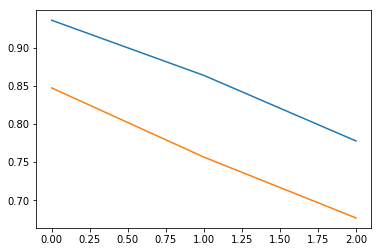

In [0]:
# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

**Using stored weights to predict in a test set**
Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).

In [0]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])

#### Regularization

Dropout is a form of regularization that **removes a different random subset of the units** in a layer in each round of training. 

In this exercise, we will add dropout to the convolutional neural network that we have used in previous exercises:


1.   Convolution (15 units, kernel size 2, 'relu' activation)
2.   Dropout (20%)
3.   Convolution (5 units, kernel size 2, 'relu' activation)
4.   Flatten
5.   Dense (3 units, 'softmax' activation)



In [0]:
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

W0730 08:25:08.422375 140154955806592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 15)        915       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 15)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 5)         305       
_________________________________________________________________
flatten_7 (Flatten)          (None, 3125)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 9378      
Total params: 10,673
Trainable params: 10,673
Non-trainable params: 0
_________________________________________________________________


**Add batch normalization to your network**

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have **mean 0 and standard deviation 1**. In this exercise, we will add batch normalization to the convolutional neural network that we have used in previous exercises:

1. Convolution (15 units, kernel size 2, 'relu' activation)
2. Batch normalization
3. Convolution (5 unites, kernel size 2, 'relu' activation)
4. Flatten
5. Dense (3 units, 'softmax' activation)

- Add the first convolutional layer. You can use the img_rows and img_cols objects available in your workspace to define the input_shape of this layer.
- Add batch normalization applied to the outputs of the first layer.

In [0]:
from keras.layers import BatchNormalization

In [0]:
model = Sequential()

In [0]:
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))


# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

W0730 08:27:41.621074 140154955806592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 15)        915       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 15)        60        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 5)         305       
_________________________________________________________________
flatten_8 (Flatten)          (None, 3125)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 9378      
Total params: 10,733
Trainable params: 10,703
Non-trainable params: 30
_________________________________________________________________


#### Interpreting the model

**Extracting a kernel from a trained network**

One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file

In [0]:
# Load the weights into the model
model.load_weights('/weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

**Visualizing kernel responses**

One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel. In this exercise, we will do that by convolving an image with the kernel and visualizing the result. 

Given images in the test_data variable, a function called extract_kernel() that extracts a kernel from the provided network, and the function called convolution() that we defined in the first chapter, extract the kernel, load the data from a file and visualize it with matplotlib.

In [0]:
# sanity check
test_data.shape

(10, 28, 28, 1)

In [0]:
# loaded from earlier exercise
kernel = np.array([[ 0.03504268,  0.4328133 ],
       [-0.17416623,  0.4680562 ]], dtype=np.float32)
kernel

array([[ 0.03504268,  0.4328133 ],
       [-0.17416623,  0.4680562 ]], dtype=float32)

In [0]:
# copied from datacamp

def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

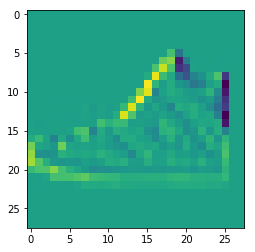

In [0]:
# Visualize the result
plt.imshow(out)
plt.show()